# Run Functions

In [2]:
%run "Baseball Functions.ipynb"

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# Imports and Data

In [4]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# SEA (A) 82-84
## Game 1: Woo vs Phillips
Interesting one. I will be on the road.

## Game 2: Miller vs Allard
Yikes.

## Game 3: Gilbert vs Wheeler
Headliner.

In [6]:
# Ok some things to think about
po24 = pos[pos.game_year==2024]
pp24 = pps[pps.game_year==2024]
harper = pd.concat([pos[pos.player_name=='Harper, Bryce']
                    ,nphl[nphl.player_name=='Harper, Bryce']
                   ])

y = pd.DataFrame()
for p in pos.player_name.unique().tolist():
    x = pd.concat([pos[pos.player_name==p]
                   ,nphl[nphl.player_name==p]
                  ])
    print(p)
    y = pd.concat([y,x])
pos_by_player = y  

Blanco, Andrés
Francoeur, Jeff
Ruf, Darin
Franco, Maikel
Altherr, Aaron
Galvis, Freddy
Buchanan, David
Rupp, Cameron
Kratz, Erik
Asche, Cody
Herrera, Odúbel
Sweeney, Darnell
Ruiz, Carlos
d'Arnaud, Chase
Harang, Aaron
Bogusevic, Brian
De Fratus, Justin
Eickhoff, Jerad
Loewen, Adam
Nola, Aaron
Asher, Alec
Morgan, Adam
Howard, Ryan
Hernández, César
Brown, Domonic
Gómez, Jeanmar
Williams, Jerome
Utley, Chase
Neris, Hector
Danks, Jordan
Revere, Ben
Hamels, Cole
Billingsley, Chad
González, Severino
O'Sullivan, Sean
Araujo, Elvis
Correia, Kevin
Aumont, Phillippe
McGowan, Dustin
Sizemore, Grady
Paredes, Jimmy
Klein, Phil
Joseph, Tommy
Ellis, A.J.
Murray, Colton
Hellickson, Jeremy
Burriss, Emmanuel
Quinn, Roman
Alfaro, Jorge
Thompson, Jake
Bourjos, Peter
Goeddel, Tyler
Herrmann, Frank
Velasquez, Vince
Featherston, Taylor
Eflin, Zach
García, Luis
Oberholtzer, Brett
Ramos, Edubray
Lough, David
Morton, Charlie
Hunter, Cedric
Williams, Nick
Hoskins, Rhys
Pivetta, Nick
Crawford, J.P.
Knapp, Andrew
K

In [7]:
y.groupby(['batter','player_name']
          ,as_index=False
         ).agg({'des' : 'count'
                ,'game_pk' : 'nunique'
               }).sort_values(by='des',ascending=False).head(10)

batter        player_name    des  game_pk
1673  547180      Harper, Bryce  23100     1340
733   467793    Santana, Carlos  22747     1308
2094  592206  Castellanos, Nick  22000     1416
3743  656941    Schwarber, Kyle  20891     1196
2760  607208       Turner, Trea  20283     1173
549   457705  McCutchen, Andrew  19940     1133
2192  592663     Realmuto, J.T.  19676     1256
2250  593160   Merrifield, Whit  17621     1093
1083  516416       Segura, Jean  17257     1092
3692  656555      Hoskins, Rhys  13725      723

2015


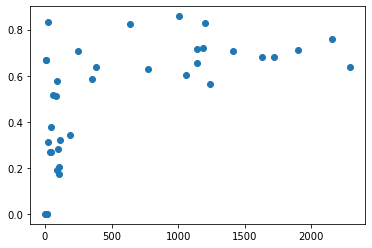

2016


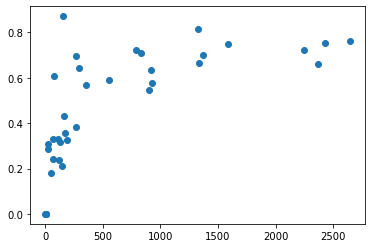

2017


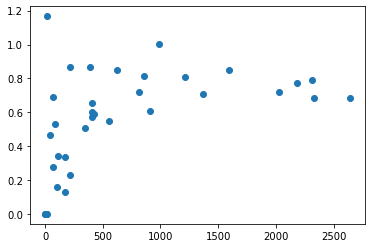

2018


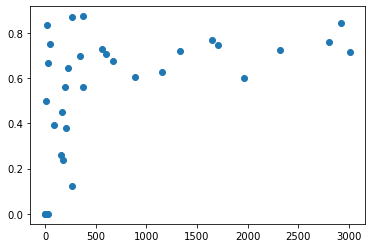

2019


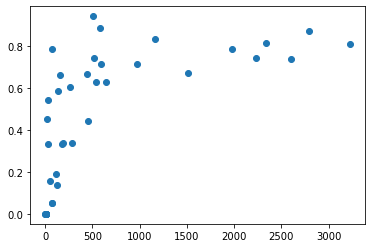

2020


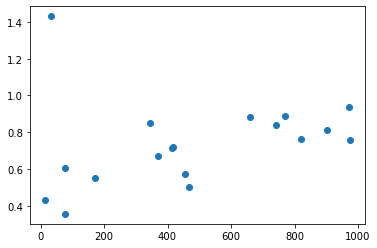

2021


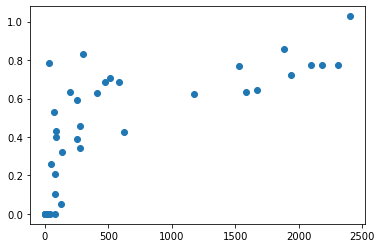

2022


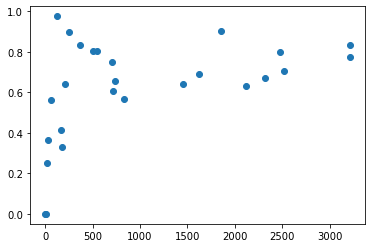

2023


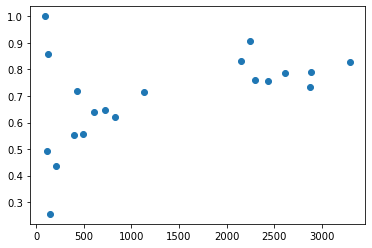

2024


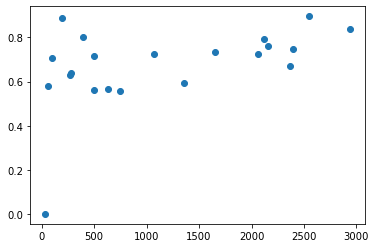

In [8]:
for gy in pos.game_year.unique().tolist():
    print(gy)
    df = pos[pos.game_year==gy]
    res = results('player_name')
    x = res.pitches
    y = res.ops
    plt.scatter(x,y)
    plt.show()
    
# #df = po24
# res = results('player_name').sort_values(by='ops',ascending=False)
# x = res.pitches
# y = res.ops
# plt.scatter(x,y)

In [9]:
# Is Castellanos's 15 pitch AB against Gilbert the longest in the statcast era?

In [10]:
pos.groupby(['game_pk','at_bat_number','player_name','game_date'],as_index=False
           ).agg({'des' : 'count'
                  ,'pitch_number' : 'max'
                 }).sort_values(by='pitch_number',ascending=False)

game_pk  at_bat_number        player_name   game_date  des  \
27123   567071              6     Realmuto, J.T.  2019-04-25   16   
52174   745222             11  Castellanos, Nick  2024-08-04   15   
12778   490396             38     Blanco, Andrés  2017-08-22   14   
32776   631652             64    Gregorius, Didi  2020-08-19   14   
7655    447537              1    Herrera, Odúbel  2016-05-23   14   
...        ...            ...                ...         ...  ...   
9069    448094             50   Hernández, César  2016-07-03    1   
20595   530351             39      Alfaro, Jorge  2018-06-08    1   
9071    448094             56    Herrera, Odúbel  2016-07-03    1   
52509   745428             42     Realmuto, J.T.  2024-04-28    1   
27864   567091             38      Hoskins, Rhys  2019-06-08    1   

       pitch_number  
27123            16  
52174            15  
12778            14  
32776            14  
7655             14  
...             ...  
9069              1  
20595             1  
9071              1  
52509             1  
27864             1  

[58539 rows x 6 columns]

In [11]:
pos.sort_values(by='pitch_number',ascending=False)

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
115236         FF  2019-04-25           93.7           1.81           5.93   
115237         FF  2019-04-25           92.4           1.83           5.97   
212006         SL  2024-08-04           87.9          -1.18           5.67   
146545         FC  2021-05-11           90.4          -1.34           6.37   
212007         SL  2024-08-04           88.0          -1.17           5.62   
...           ...         ...            ...            ...            ...   
81303          SI  2018-07-06           97.3          -0.94           6.82   
81301          FF  2018-07-06           93.8          -3.02           5.86   
81291          SL  2018-07-06           81.6          -2.19           5.48   
81289          FF  2018-07-06           95.6          -1.59           5.87   
228378         FF  2024-03-29           94.2           2.41           5.82   

              player_name  batter  pitcher     events      description  ...  \
115236     Realmuto, J.T.  592663   592761  strikeout  swinging_strike  ...   
115237     Realmuto, J.T.  592663   592761        NaN             foul  ...   
212006  Castellanos, Nick  592206   669302  field_out    hit_into_play  ...   
146545       Segura, Jean  516416   501789  field_out    hit_into_play  ...   
212007  Castellanos, Nick  592206   669302        NaN             foul  ...   
...                   ...     ...      ...        ...              ...  ...   
81303       Hoskins, Rhys  656555   596720        NaN             ball  ...   
81301      Kingery, Scott  664068   593144        NaN    called_strike  ...   
81291      Franco, Maikel  596748   592866        NaN  swinging_strike  ...   
81289       Cozens, Dylan  622226   607192        NaN             ball  ...   
228378    Schwarber, Kyle  656941   621345        NaN    called_strike  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
115236  0.719  0.870  1.217  1.529  1.940   0.2 -0.435  0.126  10.296  3.214  
115237  0.719  0.870  1.217  1.529  1.940   0.2 -0.435  0.126  10.296  3.214  
212006  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  
146545  0.722  0.879  1.242  1.568  2.007   0.2 -0.419  0.121   9.973  3.170  
212007  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  
...       ...    ...    ...    ...    ...   ...    ...    ...     ...    ...  
81303   0.720  0.880  1.247  1.578  2.031   0.2 -0.407  0.117   9.714  3.160  
81301   0.720  0.880  1.247  1.578  2.031   0.2 -0.407  0.117   9.714  3.160  
81291   0.720  0.880  1.247  1.578  2.031   0.2 -0.407  0.117   9.714  3.160  
81289   0.720  0.880  1.247  1.578  2.031   0.2 -0.407  0.117   9.714  3.160  
228378  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  

[228379 rows x 108 columns]

In [12]:
# No JT had a 16 pith AB in his first month as a Phillie.

In [13]:
# Is Bohm's K rate increasing?
# How do I prove it?

In [14]:
# Is Bryson Stott heating up? Hittig the ball harder or further?

# LAD (A) 85-87
## Game 1: Glasnow vs Nola
## Game 2: Kershaw vs Sanchez

In [16]:
hays = pos[pos.player_name=='Hays, Austin']
hays.groupby('pitcher',as_index=False).agg({'des' : 'count'})

pitcher  des
0    434378    9
1    450203    7
2    471911    7
3    477132    7
4    519293    2
5    543339    1
6    543859    7
7    554340    5
8    572955    2
9    592454    6
10   592866   10
11   605130    3
12   605280    6
13   607192    6
14   608331    8
15   608379   11
16   608638    4
17   608723    4
18   623352    4
19   624522    2
20   628452    1
21   640455    8
22   641482   17
23   641703   10
24   642546    4
25   656550    4
26   656629    4
27   656731    4
28   657006    9
29   657265    3
30   657571    2
31   660600    3
32   661563    9
33   663432    4
34   663704    1
35   663878    5
36   663903    9
37   665871    6
38   668674    1
39   669276    2
40   669302    5
41   669674    3
42   669713    2
43   669854    7
44   672391    5
45   672782    2
46   676282    7
47   680704    3
48   680885    8
49   681293    5
50   682120    1
51   682243    5
52   694813    5
53   701542    6

In [17]:
# is the Sosa platoon worth it? how are his l/r splits? how about stott?
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]
df.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

player_name  batter   des
0     Clemens, Kody  665019   495
1    Kennedy, Buddy  671083    58
2  Merrifield, Whit  593160   633
3     Sosa, Edmundo  624641  1066
4     Stott, Bryson  681082  2368
5    Wilson, Weston  642215   390

In [18]:
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'R']
r = results('player_name')
r['stand'] = 'R'

df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'L']
l = results('player_name')
l['stand'] = 'L'

z = pd.concat([r,l])
z[z.player_name.isin(['Sosa, Edmundo','Stott, Bryson'])]

player_name  pitches  plate_apps  bip  hits   hrs  walks  strikeouts  \
3  Sosa, Edmundo      598         156  102    33   4.0    6.0        42.0   
4  Stott, Bryson     1838         449  340   101  10.0   37.0        70.0   
3  Sosa, Edmundo      468         124   86    32   3.0    7.0        26.0   
4  Stott, Bryson      530         133   89    25   1.0   16.0        27.0   

      ba    obp    slg    ops   woba stand  
3  0.229  0.276  0.340  0.616  0.271     R  
4  0.251  0.312  0.381  0.692  0.302     R  
3  0.288  0.355  0.514  0.868  0.371     L  
4  0.217  0.316  0.270  0.585  0.271     L

In [19]:
sosa_id = 624641
stott_id = 681082
df = po24[po24.batter.isin([sosa_id,stott_id])]
defense = pp24[(pp24.fielder_4.isin([sosa_id,stott_id]))
               &(pp24.hit_location == 4)
              ]
defense.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                                 ,'at_bat_number' : 'nunique'
                                                 ,'game_pk' : 'nunique'
                                                })

fielder_2  des  at_bat_number  game_pk
0     592663  270             77       88
1     596117  140             67       45
2     605244    4              4        2
3     665561   32             22       10

In [20]:
pitchers_def4 = defense.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
                                               ,'at_bat_number' : 'count'
                                               ,'game_pk' : 'count'
                                              }).sort_values(by='des',ascending=False)
# pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
#                                                             ,'game_pk' : 'nunique'
#                                                            })

In [21]:
df = pp24
res = results('player_name')
x = pitchers_def4.merge(res,how='left',on='player_name')
x['ratio'] = x.des/x.pitches
x['share'] = x.des/x.bip
x.sort_values(by='share',ascending=False)

player_name  pitcher  des  at_bat_number  game_pk  pitches  \
14             Lazar, Max   676661   11             11       11      214   
23         Ortiz, Luis F.   656814    1              1        1       10   
4       Turnbull, Spencer   605513   27             27       27      916   
7         Phillips, Tyler   663969   21             21       21      578   
11          Banks, Tanner   621383   12             12       12      412   
10          Soto, Gregory   642397   13             13       13      649   
6          Alvarado, José   621237   22             22       22     1074   
13          Allard, Kolby   663465   11             11       11      436   
1           Wheeler, Zack   554430   61             61       61     3245   
18         Pinto, Ricardo   620982    5              5        5      220   
0             Nola, Aaron   605400   66             66       66     3275   
17        Estévez, Carlos   608032    7              7        7      388   
2     Sánchez, Cristopher   650911   58             58       58     2885   
8        Kerkering, Orion   689147   17             17       17     1150   
9           Hoffman, Jeff   656546   16             16       16     1045   
16  Domínguez, Seranthony   622554    9              9        9      653   
12           Strahm, Matt   621381   12             12       12     1026   
5         Walker, Taijuan   592836   22             22       22     1435   
3          Suárez, Ranger   624133   34             34       34     2451   
20       Mercado, Michael   675650    3              3        3      260   
15             Ruiz, José   614179   10             10       10      853   
21         Gilbert, Tyler   656457    2              2        2      145   
22        Stubbs, Garrett   596117    1              1        1       65   
19          Marte, Yunior   628708    5              5        5      482   

    plate_apps  bip  hits   hrs  walks  strikeouts     ba    obp    slg  \
14          54   43    13   2.0    2.0         9.0  0.250  0.278  0.442   
23           4    4     3   0.0    0.0         0.0  0.750  0.750  0.750   
4          221  139    37   6.0   20.0        57.0  0.189  0.281  0.327   
7          160  123    45   9.0    7.0        28.0  0.300  0.338  0.527   
11         111   75    24   1.0   10.0        25.0  0.242  0.315  0.313   
10         163   95    36   2.0   18.0        44.0  0.265  0.368  0.375   
6          262  168    50   6.0   29.0        64.0  0.216  0.305  0.346   
13         117   86    34   5.0    8.0        23.0  0.312  0.359  0.523   
1          814  515   140  20.0   56.0       233.0  0.188  0.252  0.319   
18          59   44    19   2.0    5.0         8.0  0.373  0.441  0.608   
0          844  582   194  32.0   52.0       204.0  0.247  0.295  0.424   
17          98   69    20   3.0    6.0        22.0  0.220  0.276  0.374   
2          776  572   187  12.0   45.0       158.0  0.257  0.299  0.360   
8          275  168    55   3.0   19.0        79.0  0.224  0.298  0.313   
9          275  163    51   6.0   17.0        90.0  0.202  0.262  0.325   
16         157  103    32   6.0   12.0        40.0  0.224  0.293  0.406   
12         245  150    40   5.0   10.0        79.0  0.178  0.229  0.298   
5          382  283   107  24.0   37.0        58.0  0.316  0.385  0.587   
3          647  443   145  14.0   44.0       153.0  0.244  0.300  0.379   
20          64   44    16   9.0    9.0        10.0  0.296  0.406  0.833   
15         223  154    55   9.0   16.0        52.0  0.271  0.323  0.443   
21          38   31    10   1.0    2.0         4.0  0.286  0.342  0.400   
22          19   17     6   2.0    2.0         0.0  0.353  0.421  0.765   
19         126   89    34   5.0   14.0        23.0  0.306  0.381  0.495   

      ops   woba     ratio     share  
14  0.720  0.309  0.051402  0.255814  
23  1.500  0.662  0.100000  0.250000  
4   0.607  0.273  0.029476  0.194245  
7   0.864  0.369  0.036332  0.170732  
11  0.628  0.283  0.029126  0.160000  
10 

In [22]:
res

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0           Allard, Kolby      436         117   86    34   5.0    8.0   
1          Alvarado, José     1074         262  168    50   6.0   29.0   
2           Banks, Tanner      412         111   75    24   1.0   10.0   
3         Brogdon, Connor       76          14    5     3   2.0    6.0   
4           Clemens, Kody       16           6    5     2   1.0    1.0   
5   Domínguez, Seranthony      653         157  103    32   6.0   12.0   
6         Estévez, Carlos      388          98   69    20   3.0    6.0   
7          Gilbert, Tyler      145          38   31    10   1.0    2.0   
8           Hoffman, Jeff     1045         275  163    51   6.0   17.0   
9           Johnson, Seth       58          18   15     8   1.0    3.0   
10       Kerkering, Orion     1150         275  168    55   3.0   19.0   
11             Lazar, Max      214          54   43    13   2.0    2.0   
12          Marte, Yunior      482         126   89    34   5.0   14.0   
13       Mercado, Michael      260          64   44    16   9.0    9.0   
14           Nelson, Nick       96          26   15     8   0.0    2.0   
15            Nola, Aaron     3275         844  582   194  32.0   52.0   
16         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
17        Phillips, Tyler      578         160  123    45   9.0    7.0   
18         Pinto, Ricardo      220          59   44    19   2.0    5.0   
19             Ruiz, José      853         223  154    55   9.0   16.0   
20          Soto, Gregory      649         163   95    36   2.0   18.0   
21           Strahm, Matt     1026         245  150    40   5.0   10.0   
22        Stubbs, Garrett       65          19   17     6   2.0    2.0   
23         Suárez, Ranger     2451         647  443   145  14.0   44.0   
24    Sánchez, Cristopher     2885         776  572   187  12.0   45.0   
25      Turnbull, Spencer      916         221  139    37   6.0   20.0   
26        Walker, Taijuan     1435         382  283   107  24.0   37.0   
27          Wheeler, Zack     3245         814  515   140  20.0   56.0   
28         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0         23.0  0.312  0.359  0.523  0.882  0.378  
1         64.0  0.216  0.305  0.346  0.652  0.291  
2         25.0  0.242  0.315  0.313  0.628  0.283  
3          3.0  0.375  0.643  1.250  1.893  0.677  
4          0.0  0.400  0.500  1.000  1.500  0.603  
5         40.0  0.224  0.293  0.406  0.699  0.305  
6         22.0  0.220  0.276  0.374  0.649  0.284  
7          4.0  0.286  0.342  0.400  0.742  0.328  
8         90.0  0.202  0.262  0.325  0.587  0.259  
9          0.0  0.571  0.611  0.929  1.540  0.613  
10        79.0  0.224  0.298  0.313  0.611  0.275  
11         9.0  0.250  0.278  0.442  0.720  0.309  
12        23.0  0.306  0.381  0.495  0.876  0.379  
13        10.0  0.296  0.406  0.833  1.240  0.504  
14         8.0  0.348  0.423  0.435  0.858  0.379  
15       204.0  0.247  0.295  0.424  0.719  0.311  
16         0.0  0.750  0.750  0.750  1.500  0.662  
17        28.0  0.300  0.338  0.527  0.864  0.369  
18         8.0  0.373  0.441  0.608  1.049  0.444  
19        52.0  0.271  0.323  0.443  0.766  0.331  
20        44.0  0.265  0.368  0.375  0.743  0.332  
21        79.0  0.178  0.229  0.298  0.526  0.232  
22         0.0  0.353  0.421  0.765  1.186  0.493  
23       153.0  0.244  0.300  0.379  0.679  0.297  
24       158.0  0.257  0.299  0.360  0.659  0.289  
25        57.0  0.189  0.281  0.327  0.607  0.273  
26        58.0  0.316  0.385  0.587  0.972  0.412  
27       233.0  0.188  0.252  0.319  0.571  0.253  
28         0.0  0.250  0.250  0.250  0.500  0.220

In [23]:
pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
cris_id=650911
df = cris = pps[pps.pitcher==cris_id]
ch = df[df.pitch_type=='CH']
ch.groupby('game_year',
           as_index=False
          ).agg({'release_speed' : ['mean','std','count','min','max']
                 ,'release_spin_rate' : ['mean','std','count','min','max']
                 ,'launch_speed' : ['mean','std','nunique','min','max']
                 ,'launch_angle' : ['mean','std','count','min','max']
                 #,'launch_speedangle' : ['mean','std','count','min','max']
                }).round(1)

game_year release_speed                        release_spin_rate         \
                     mean  std count   min   max              mean    std   
0      2021          85.0  1.2    45  82.1  87.6            1843.0  149.6   
1      2022          84.4  1.3   133  80.1  87.2            1914.3  162.8   
2      2023          81.9  1.3   492  77.8  85.0            1889.2  123.6   
3      2024          85.1  1.1  1029  81.3  89.5            2019.4  134.9   

                 ... launch_speed                            launch_angle  \
  count     min  ...         mean   std nunique   min    max         mean   
0    45  1534.0  ...         76.9  18.2      10  40.0  101.0         -6.4   
1   133  1486.0  ...         81.7  12.7      36  57.2  103.5         -1.6   
2   492  1524.0  ...         75.2  17.2     117  17.5  112.9        -10.1   
3  1029  1505.0  ...         78.0  16.2     252  25.5  116.3         -4.2   

                           
    std count   min   max  
0  33.2    10 -58.0  53.0  
1  31.6    37 -76.0  65.0  
2  32.3   136 -80.0  75.0  
3  32.7   345 -79.0  81.0  

[4 rows x 21 columns]

In [24]:
do24 = pd.read_csv('do24.csv')
dp24 = pd.read_csv('dp24.csv')

In [25]:
cris[cris.game_year==2024].groupby(['game_pk','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'launch_speed' : 'mean'
                   ,'launch_angle' : 'mean'
                   ,'home_team' : 'max'
                   ,'post_home_score' : 'max'
                   ,'away_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'estimated_ba_using_speedangle' : 'sum'
                  }).sort_values(by='game_date',ascending=False).round(3)

game_pk   game_date  des  inning  at_bat_number  launch_speed  \
31   775319  2024-10-06   88       5             21        80.547   
4    745521  2024-09-25   94       5             22        78.551   
21   745770  2024-09-20   98       5             22        76.096   
5    745530  2024-09-15   87       8             27        83.184   
7    745534  2024-09-09   94       6             23        84.494   
1    744887  2024-09-04   96       7             27        81.246   
6    745531  2024-08-29  105       6             26        81.845   
29   747082  2024-08-22   95       6             27        79.014   
8    745537  2024-08-17   99       9             29        75.971   
30   747166  2024-08-11   96       5             27        80.368   
23   746120  2024-08-06   89       7             25        79.984   
9    745543  2024-07-31   94       6             25        82.835   
10   745554  2024-07-26   88       6             29        80.598   
3    745478  2024-07-20   90       6             24        88.442   
11   745556  2024-07-10   91       6             24        79.136   
27   746857  2024-07-04   79       5             22        82.676   
12   745560  2024-06-28  101       9             29        78.147   
13   745566  2024-06-23   80       7             22        81.888   
14   745567  2024-06-17   94       7             25        80.291   
28   746948  2024-06-12   67       5             19        89.042   
15   745568  2024-06-04   83       6             21        80.106   
2    745333  2024-05-29   96       6             24        80.697   
25   746558  2024-05-24   83       6             24        85.423   
16   745581  2024-05-18   92       7             26        85.926   
22   745826  2024-05-13  108       6             27        82.977   
17   745586  2024-05-07   89       7             27        83.531   
24   746236  2024-04-29   75       6             22        87.281   
26   746722  2024-04-23   74       3             18        84.648   
18   745591  2024-04-17   97       6             24        80.556   
19   745596  2024-04-12   91       6             26        83.017   
0    744871  2024-04-07   87       5             22        86.555   
20   745600  2024-04-01   85       6             20        82.200   

    launch_angle home_team  post_home_score away_team  post_away_score  \
31        -6.794       PHI                0       NYM                2   
4         15.293       PHI                5       CHC                4   
21        15.280       NYM                2       PHI                8   
5         10.054       PHI                0       NYM                1   
7         13.182       PHI                0        TB                0   
1         15.135       TOR                2       PHI                3   
6         17.289       PHI                0       ATL                4   
29         0.171       ATL                3       PHI                1   
8         -1.214       PHI                5       WSH                1   
30        -7.297        AZ                5       PHI                2   
23         4.432       LAD                1       PHI                4   
9          3.129       PHI                3       NYY                4   
10         1.095       PHI                1       CLE                3   
3         13.312       PIT                2       PHI                0   
11         1.361       PHI                4       LAD                2   
27         2.560       CHC                5       PHI                2   
12         1.639       PHI                2       MIA                0   
13        -0.781       PHI                3        AZ                0   
14         0.800       PHI                8        SD                2   
28         4.789       BOS                3       PHI                4   
15        -0.129       PHI                0       MIL                1   
2          1.030        SF                0       PHI                4   
25        11.613       C

## Game 3: Stone vs Phillips

In [27]:
# Has Bohm been punching out more? Yes
bohm = po24[po24.player_name == 'Bohm, Alec']
df = ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
#bohm.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
204646         CU  2024-09-29           82.3          -2.04           5.69   
204955         ST  2024-09-27           76.3          -2.53           5.01   
205211         ST  2024-09-24           87.0          -1.21           6.09   
205312         FC  2024-09-23           87.0          -0.64           6.20   
205457         SI  2024-09-22           95.2          -2.05           5.67   
...           ...         ...            ...            ...            ...   
227217         SI  2024-04-06           90.8          -2.08           5.88   
227407         FC  2024-04-05           82.8           2.56           6.23   
227637         FF  2024-04-03           94.3          -2.32           5.82   
228008         FF  2024-03-31           96.2           3.23           5.17   
228269         SL  2024-03-29           85.1          -1.77           5.93   

       player_name  batter  pitcher                 events      description  \
204646  Bohm, Alec  664761   663623              strikeout    called_strike   
204955  Bohm, Alec  664761   592866              strikeout    called_strike   
205211  Bohm, Alec  664761   669713              strikeout  swinging_strike   
205312  Bohm, Alec  664761   668873              strikeout  swinging_strike   
205457  Bohm, Alec  664761   656731              strikeout    called_strike   
...            ...     ...      ...                    ...              ...   
227217  Bohm, Alec  664761   663623  strikeout_double_play  swinging_strike   
227407  Bohm, Alec  664761   571578              strikeout  swinging_strike   
227637  Bohm, Alec  664761   608371              strikeout    called_strike   
228008  Bohm, Alec  664761   519242              strikeout    called_strike   
228269  Bohm, Alec  664761   675911              strikeout  swinging_strike   

        ...  wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W  \
204646  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
204955  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
205211  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
205312  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
205457  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
...     ...   ...    ...    ...    ...    ...   ...    ...    ...    ...   
227217  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
227407  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
227637  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
228008  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   
228269  ...  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689   

         cFIP  
204646  3.166  
204955  3.166  
205211  3.166  
205312  3.166  
205457  3.166  
...       ...  
227217  3.166  
227407  3.166  
227637  3.166  
228008  3.166  
228269  3.166  

[86 rows x 108 columns]

In [28]:
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
trea

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
61755          SL  2022-10-15           82.0          -1.44           6.23   
61756          SL  2022-10-15           82.3          -1.41           6.20   
61757          FF  2022-10-15           92.6          -1.21           6.38   
61758          SI  2022-10-15           91.8          -1.40           6.44   
61759          FC  2022-10-15           91.0          -1.36           6.37   
...           ...         ...            ...            ...            ...   
228360         CH  2024-03-29           86.9           2.66           5.68   
228362         SL  2024-03-29           88.8          -1.75           5.89   
228366         FF  2024-03-29           96.3          -1.77           5.87   
228367         FF  2024-03-29           95.1           2.49           5.86   
228369         FF  2024-03-29           97.1          -1.57           5.96   

         player_name  batter  pitcher     events      description  ...  wHBP  \
61755   Turner, Trea  607208   605397  field_out    hit_into_play  ...  0.72   
61756   Turner, Trea  607208   605397        NaN             ball  ...  0.72   
61757   Turner, Trea  607208   605397        NaN             ball  ...  0.72   
61758   Turner, Trea  607208   605397     double    hit_into_play  ...  0.72   
61759   Turner, Trea  607208   605397        NaN  swinging_strike  ...  0.72   
...              ...     ...      ...        ...              ...  ...   ...   
228360  Turner, Trea  607208   621345        NaN    called_strike  ...  0.72   
228362  Turner, Trea  607208   675911        NaN             foul  ...  0.72   
228366  Turner, Trea  607208   675911        NaN             foul  ...  0.72   
228367  Turner, Trea  607208   621345        NaN    called_strike  ...  0.72   
228369  Turner, Trea  607208   675911        NaN             ball  ...  0.72   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
61755   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
61756   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
61757   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
61758   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
61759   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
...       ...    ...    ...    ...   ...    ...    ...    ...    ...  
228360  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
228362  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
228366  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
228367  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
228369  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[20283 rows x 109 columns]

In [29]:
df = trea[(trea.home_team=='AZ')
          &(trea.game_type == 'R')
         ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Turner, Trea      556         153  117    47    8     14          22   

      ba    obp    slg    ops   woba  
0  0.338  0.399  0.626  1.025  0.431

In [30]:
df[df.game_type=='R'].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

player_name  game_pk
0  Turner, Trea       33

# ARI (A) 88-811
## Game 1: Montgomery vs Allard
Bats show up and the Phillies look good.

## Game 2: Nelson vs Wheeler
Trying to look at Phillies vs pitchers like Ryne Nelson. <br>
He throws so many FF, so I am looking just at that.

In [33]:
pos[pos.des.str.contains('Ryne Nelson')][['home_team','away_team','pitcher']]
nelson_id = 669194
pvn = phils_vs_nelson = pd.concat([pos[pos.pitcher == nelson_id], nphl[nphl.pitcher == nelson_id]])
df = pvn
res = results('player_name')

In [34]:
df = po24
results('player_name')

player_name  pitches  plate_apps  bip   hits   hrs  walks  \
0          Bohm, Alec     2161         619  487  156.0  15.0   39.0   
1   Castellanos, Nick     2392         676  483  161.0  24.0   39.0   
2       Clemens, Kody      495         125   88   27.0   5.0    5.0   
3         Dahl, David      266          63   38   12.0   3.0    3.0   
4      Garcia, Aramis       36           7    4    0.0   0.0    0.0   
5       Harper, Bryce     2547         637  422  161.0  31.0   70.0   
6        Hays, Austin      281          84   60   20.0   2.0    0.0   
7      Kennedy, Buddy       58          13    8    2.0   0.0    2.0   
8     Marchán, Rafael      195          56   44   15.0   3.0    3.0   
9      Marsh, Brandon     2059         491  280  105.0  16.0   50.0   
10   Merrifield, Whit      633         175  138   31.0   3.0   15.0   
11    Pache, Cristian      496         117   62   21.0   0.0   13.0   
12     Realmuto, J.T.     1655         430  286  101.0  14.0   29.0   
13       Rojas, Johan     1353         369  281   83.0   3.0   14.0   
14    Schwarber, Kyle     2936         708  394  144.0  39.0  104.0   
15      Sosa, Edmundo     1066         280  188   65.0   7.0   13.0   
16     Stevenson, Cal      102          27   20    6.0   0.0    3.0   
17      Stott, Bryson     2368         582  429  126.0  11.0   53.0   
18    Stubbs, Garrett      746         187  115   34.0   1.0   17.0   
19       Turner, Trea     2121         558  418  152.0  21.0   29.0   
20     Wilson, Weston      390         102   63   25.0   3.0    8.0   

    strikeouts     ba    obp    slg    ops   woba  
0           86  0.275  0.325  0.438  0.763  0.330  
1          141  0.258  0.311  0.435  0.746  0.323  
2           31  0.227  0.264  0.454  0.718  0.306  
3           21  0.203  0.238  0.390  0.628  0.268  
4            3  0.000  0.000  0.000  0.000  0.000  
5          143  0.286  0.366  0.530  0.896  0.383  
6           22  0.244  0.262  0.378  0.640  0.277  
7            3  0.182  0.308  0.273  0.580  0.270  
8            8  0.294  0.339  0.549  0.888  0.375  
9          157  0.242  0.320  0.406  0.726  0.317  
10          19  0.197  0.274  0.293  0.567  0.256  
11          42  0.204  0.291  0.272  0.562  0.257  
12         106  0.257  0.319  0.415  0.733  0.321  
13          70  0.242  0.274  0.321  0.594  0.260  
14         203  0.244  0.359  0.480  0.838  0.362  
15          68  0.255  0.311  0.416  0.726  0.315  
16           4  0.250  0.333  0.375  0.708  0.314  
17          97  0.244  0.313  0.356  0.669  0.295  
18          50  0.206  0.294  0.261  0.555  0.256  
19         103  0.291  0.335  0.460  0.795  0.344  
20          29  0.272  0.333  0.467  0.801  0.344

In [35]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Marsh, Brandon'
          ,'Stott, Bryson'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
0          Bohm, Alec       18           7   6.0   4.0  0.0    0.0   
1   Castellanos, Nick       44           9   6.0   1.0  0.0    1.0   
4       Harper, Bryce       35           9   7.0   4.0  1.0    0.0   
5      Marsh, Brandon       30           6   1.0   1.0  0.0    1.0   
7      Realmuto, J.T.       20           6   5.0   2.0  0.0    0.0   
8        Rojas, Johan        6           2   2.0   1.0  0.0    0.0   
9     Schwarber, Kyle       37           8   6.0   1.0  0.0    1.0   
12      Stott, Bryson       31           9   6.0   3.0  1.0    0.0   
14       Turner, Trea       39          13  11.0   3.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0          1.0  0.571  0.571  1.000  1.571  0.661  
1          2.0  0.143  0.222  0.143  0.365  0.175  
4          2.0  0.444  0.444  0.778  1.222  0.522  
5          4.0  0.200  0.333  0.400  0.733  0.323  
7          1.0  0.333  0.333  0.333  0.667  0.294  
8          0.0  0.500  0.500  0.500  1.000  0.441  
9          1.0  0.143  0.250  0.286  0.536  0.242  
12         3.0  0.333  0.333  0.667  1.000  0.419  
14         2.0  0.231  0.231  0.385  0.615  0.259

In [36]:
rn = pd.read_csv('ryne_nelson.csv')
pitch_mix(rn)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball   2519      94.654347        2215.081909   
2         FC           Cutter    658      88.567325        2256.908815   
0         CH         Changeup    514      83.213230        1805.470817   
4         SL           Slider    419      82.821957        2431.813842   
1         CU        Curveball    276      77.014130        2490.293478   
5         ST          Sweeper    131      81.846565        2440.351145   

        zone  usage  
3   7.519254   55.8  
2   9.144377   14.6  
0   9.910506   11.4  
4  10.236277    9.3  
1   9.369565    6.1  
5   9.687023    2.9

In [37]:
rn24 = rn[rn.game_year==2024]
lhb_pitch_mix(rn24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball    489      94.825767        2211.783231   
0         CH         Changeup    178      83.129775        1958.365169   
2         FC           Cutter    177      91.463842        2173.627119   
1         CU        Curveball     91      77.517582        2476.967033   
5         ST          Sweeper      4      82.975000        2546.500000   
4         SL           Slider      2      83.450000        2429.500000   

        zone  usage  
3   7.699387   52.0  
0  10.000000   18.9  
2   9.056497   18.8  
1   9.252747    9.7  
5   7.500000    0.4  
4  11.000000    0.2

In [38]:
rhb_pitch_mix(rn24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball    488      95.172746        2222.801230   
2         FC           Cutter    161      91.200000        2212.329193   
4         SL           Slider    141      84.897163        2446.652482   
5         ST          Sweeper     40      82.200000        2551.025000   
1         CU        Curveball     23      78.313043        2580.086957   
0         CH         Changeup      3      82.400000        1839.000000   

        zone  usage  
3   7.436475   57.0  
2   9.223602   18.8  
4  10.319149   16.5  
5  10.850000    4.7  
1   9.347826    2.7  
0   7.333333    0.4

In [39]:
pm = rn.groupby('pitch_type',as_index=False
          ).agg({'release_speed' : ['mean','std']
                 ,'release_spin_rate' : ['mean','std']
                }).round(2)

In [40]:
ln = pd.concat([pos[pos.player_name.isin(lineup)], nphl[nphl.player_name.isin(lineup)]])

In [41]:
pt = 'FF'
muv = pm[pm.pitch_type == pt]['release_speed']['mean'].values[0]
stdv = pm[pm.pitch_type == pt]['release_speed']['std'].values[0]
mus = pm[pm.pitch_type == pt]['release_spin_rate']['mean'].values[0]
stds = pm[pm.pitch_type == pt]['release_spin_rate']['std'].values[0]
df = ln[(ln.p_throws == 'R')
        &(ln.pitch_type == pt)
        &(ln.release_speed >= (muv-(2*stdv)))
        &(ln.release_speed <= (muv+(2*stdv)))
        &(ln.release_spin_rate >= (mus-(2*stds)))
        &(ln.release_spin_rate <= (mus+(2*stds)))
       ]

In [42]:
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec     1254         335  227    72    5     34          72   
1  Castellanos, Nick     2774         671  474   182   37     60         130   
2      Harper, Bryce     2999         673  407   167   37    128         134   
3     Marsh, Brandon     1246         270  147    63    8     35          86   
4     Realmuto, J.T.     2483         645  462   177   28     58         121   
5       Rojas, Johan      258          65   48    13    1      6          10   
6    Schwarber, Kyle     2906         678  404   143   55     90         180   
7      Stott, Bryson     1352         261  186    60   11     26          47   
8       Turner, Trea     2568         634  469   178   27     58         101   

      ba    obp    slg    ops   woba  
0  0.240  0.319  0.337  0.656  0.295  
1  0.303  0.370  0.602  0.971  0.405  
2  0.310  0.441  0.608  1.049  0.441  
3  0.270  0.367  0.451  0.817  0.357  
4  0.305  0.371  0.548  0.919  0.389  
5  0.228  0.308  0.281  0.588  0.269  
6  0.247  0.350  0.587  0.936  0.389  
7  0.262  0.330  0.454  0.784  0.336  
8  0.314  0.380  0.550  0.930  0.394

### Wheeler by inning

In [44]:
df = wheeler = pp24[pp24.player_name == 'Wheeler, Zack']
results('inning')

inning  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       1      490         125   81    20  2.0    3.0          41  0.165   
1       2      520         134   87    28  5.0   10.0          37  0.226   
2       3      548         129   76    19  3.0   11.0          40  0.164   
3       4      530         129   72    22  1.0   10.0          45  0.190   
4       5      495         129   83    26  3.0    9.0          33  0.224   
5       6      398         102   68    16  5.0    6.0          26  0.172   
6       7      239          59   43     7  1.0    7.0           9  0.135   
7       8       25           7    5     2  0.0    0.0           2  0.286   

     obp    slg    ops   woba  
0  0.184  0.231  0.415  0.182  
1  0.284  0.411  0.695  0.301  
2  0.248  0.293  0.541  0.244  
3  0.264  0.293  0.557  0.249  
4  0.295  0.388  0.683  0.298  
5  0.235  0.366  0.601  0.261  
6  0.237  0.192  0.430  0.206  
7  0.286  0.286  0.571  0.252

In [45]:
wheeler[(wheeler.game_pk == wheeler.game_pk.max())
        &(wheeler.pitch_number == 1)
       ].groupby(['description'
                 #,'pitch_type'
                 ],as_index=False
                ).agg({'des' : 'count'})

description  des
0             ball   12
1    called_strike    8
2             foul    3
3  swinging_strike    3

### Phillies single season doubles and HRs leaders

In [47]:
dbls = pos[pos.events=='double']
dbls.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

player_name  game_year  des
77       Harper, Bryce       2024   44
20          Bohm, Alec       2024   44
74       Harper, Bryce       2021   42
92     Herrera, Odúbel       2017   42
205       Turner, Trea       2023   40
31   Castellanos, Nick       2023   39
98       Hoskins, Rhys       2018   38
183       Segura, Jean       2019   37
72       Harper, Bryce       2019   36
161     Realmuto, J.T.       2019   36

In [48]:
events = ['home_run','triple','double','single']
y = pd.DataFrame()
for e in events:
    x = pos[pos.events == e].groupby(['player_name','game_year']).agg({'des' : 'count'})
    x.rename(columns = {'des' : e}, inplace=True)
    print(x.sort_values(by=e,ascending=False).head(10))

                             home_run
player_name       game_year          
Schwarber, Kyle   2023             52
                  2022             52
                  2024             39
Hoskins, Rhys     2022             36
Harper, Bryce     2019             35
                  2021             35
Castellanos, Nick 2023             34
Hoskins, Rhys     2018             34
Harper, Bryce     2024             31
Turner, Trea      2023             29
                            triple
player_name      game_year        
Hernández, César 2016           11
Bourjos, Peter   2016            7
Revere, Ben      2015            6
Galvis, Freddy   2017            6
Marsh, Brandon   2023            6
Hernández, César 2017            6
Herrera, Odúbel  2016            6
Turner, Trea     2023            5
Realmuto, J.T.   2022            5
                 2023            5
                             double
player_name       game_year        
Harper, Bryce     2024           44
Bohm, Alec      

In [49]:
bohm = pos[pos.player_name == 'Bohm, Alec']
bohm[bohm.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'})

game_year  des
0       2020    4
1       2021    7
2       2022   14
3       2023   21
4       2024   15

In [50]:
df = bohm[bohm.events.isin(events)]
x = df.groupby(['game_year','events']
           ,as_index=False).agg({'des' : 'count'}
                               )
x


game_year    events  des
0        2020    double   11
1        2020  home_run    4
2        2020    single   39
3        2021    double   15
4        2021  home_run    7
5        2021    single   72
6        2022    double   29
7        2022  home_run   14
8        2022    single  131
9        2022    triple    3
10       2023    double   34
11       2023  home_run   21
12       2023    single  109
13       2024    double   44
14       2024  home_run   15
15       2024    single   95
16       2024    triple    2

In [51]:
pitch_mix(rn[rn.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball    977      94.999079        2217.286592   
2         FC           Cutter    338      91.338166        2192.062130   
0         CH         Changeup    181      83.117680        1956.386740   
4         SL           Slider    143      84.876923        2446.412587   
1         CU        Curveball    114      77.678070        2497.771930   
5         ST          Sweeper     44      82.270455        2550.613636   

        zone  usage  
3   7.568066   54.4  
2   9.136095   18.8  
0   9.955801   10.1  
4  10.328671    8.0  
1   9.271930    6.3  
5  10.545455    2.4

In [52]:
wheeler_ff = wheeler[wheeler.pitch_type == 'FF']
df = wheeler_ff.reset_index().reset_index()
df['cum'] = ''
run = 0
for i in range(len(df)):
    run+=df['release_spin_rate'].iloc[i]
    try:
        run/df['level_0'].iloc[i]
    except:
        df['cum'].iloc[i] = run
    else:
        df['cum'].iloc[i] = run/df['level_0'].iloc[i]
    

In [53]:
pos[pos.des.str.contains('Puk')][['des','home_team','away_team','pitcher']]

des home_team away_team  \
189154  Alec Bohm singles on a sharp line drive to rig...       MIA       PHI   

        pitcher  
189154   640462

In [54]:
puk_id = 640462
df = pd.concat([pos[pos.pitcher==puk_id],nphl[nphl.pitcher==puk_id]])
df = df[df.player_name.isin(['Stott, Bryson', 'Sosa, Edmundo','Rojas, Johan'])]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0   Rojas, Johan       10           3    2     1  0.0    0.0           1   
1  Sosa, Edmundo       17           5    3     1  0.0    0.0           2   
2  Stott, Bryson       20           4    1     1  0.0    1.0           2   

      ba    obp    slg    ops   woba  
0  0.333  0.333  0.667  1.000  0.418  
1  0.200  0.200  0.200  0.400  0.176  
2  0.333  0.500  0.667  1.167  0.486

In [55]:
df[df.player_name == 'Rojas, Johan'][['pitch_type','type','inning','game_date','release_speed'
                                      ,'release_spin_rate','launch_speed', 'launch_angle','estimated_ba_using_speedangle'
                                      ,'hit_location'
                                     ]]

pitch_type type  inning   game_date  release_speed  release_spin_rate  \
186544         FF    S       6  2023-07-31           96.9             2209.0   
186550         SI    S       6  2023-07-31           95.6             2089.0   
186557         FF    S       6  2023-07-31           95.1             2053.0   
211305         FF    X       8  2024-08-09           95.8             2312.0   
211309         FF    S       8  2024-08-09           96.6             2424.0   
211312         FF    S       8  2024-08-09           94.0             2236.0   
216240         SL    X       7  2024-06-29           84.9             2303.0   
216245         FF    B       7  2024-06-29           97.9             2251.0   
216253         SL    S       7  2024-06-29           86.4             2230.0   
216257         FF    S       7  2024-06-29           97.0             2264.0   

        launch_speed  launch_angle  estimated_ba_using_speedangle  \
186544           NaN           NaN                            NaN   
186550          77.5          11.0                            NaN   
186557           NaN           NaN                            NaN   
211305          95.6          23.0                          0.211   
211309           NaN           NaN                            NaN   
211312           NaN           NaN                            NaN   
216240          99.0          -4.0                          0.283   
216245           NaN           NaN                            NaN   
216253          88.8         -46.0                            NaN   
216257           NaN           NaN                            NaN   

        hit_location  
186544           2.0  
186550           NaN  
186557           NaN  
211305           7.0  
211309           NaN  
211312           NaN  
216240           6.0  
216245           NaN  
216253           NaN  
216257           NaN

In [56]:
gas = pps[pps.release_speed >= 95]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).reset_index(
drop=True).head(25)

player_name   des
0           Wheeler, Zack  6747
1          Alvarado, José  2809
2   Domínguez, Seranthony  2604
3            García, Luis  1670
4        Velasquez, Vince  1625
5           Pivetta, Nick  1620
6           Neris, Hector  1060
7           Soto, Gregory   968
8           Hoffman, Jeff   799
9             Eflin, Zach   794
10         Kimbrel, Craig   676
11           Coonrod, Sam   671
12             Giles, Ken   668
13        Brogdon, Connor   654
14          Marte, Yunior   594
15       Kerkering, Orion   550
16    Sánchez, Cristopher   523
17           Nelson, Nick   491
18          Diekman, Jake   454
19          Knebel, Corey   430
20             Ruiz, José   407
21         Ramos, Edubray   391
22          Ríos, Yacksel   363
23          Hunter, Tommy   352
24       Hernandez, David   347

In [57]:
xfinity = pp24[pp24.release_speed >= 95]
xfinity.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name   des
19          Wheeler, Zack  1150
0          Alvarado, José   670
6        Kerkering, Orion   504
17    Sánchez, Cristopher   487
4           Hoffman, Jeff   471
14             Ruiz, José   407
2   Domínguez, Seranthony   386
15          Soto, Gregory   349
3         Estévez, Carlos   230
8           Marte, Yunior   207
9        Mercado, Michael    81
16           Strahm, Matt    27
12        Phillips, Tyler    21
11            Nola, Aaron    17
5           Johnson, Seth    17
18      Turnbull, Spencer    12
1           Banks, Tanner     8
10           Nelson, Nick     8
7              Lazar, Max     7
13         Pinto, Ricardo     4

### Brandon Marsh and his Sweet Spot%?

In [59]:
swsps = po24[(po24.launch_angle >= 8)
     &(po24.launch_angle<= 32)
    ].groupby('player_name',as_index=False).agg({'des' : 'count'}
                                               ).rename(columns = {'des' : 'swsp'})
     

In [60]:
df = po24
res = results('player_name')

In [61]:
z = swsps.merge(res,on='player_name')
z['pct'] = z.swsp/z.bip
z.sort_values(by='pct',ascending=False).round(3)

player_name  swsp  pitches  plate_apps  bip   hits   hrs  walks  \
3         Dahl, David    30      266          63   38   12.0   3.0    3.0   
9      Marsh, Brandon   204     2059         491  280  105.0  16.0   50.0   
18    Stubbs, Garrett    78      746         187  115   34.0   1.0   17.0   
5       Harper, Bryce   274     2547         637  422  161.0  31.0   70.0   
8     Marchán, Rafael    28      195          56   44   15.0   3.0    3.0   
1   Castellanos, Nick   304     2392         676  483  161.0  24.0   39.0   
12     Realmuto, J.T.   179     1655         430  286  101.0  14.0   29.0   
20     Wilson, Weston    39      390         102   63   25.0   3.0    8.0   
17      Stott, Bryson   251     2368         582  429  126.0  11.0   53.0   
11    Pache, Cristian    35      496         117   62   21.0   0.0   13.0   
16     Stevenson, Cal    11      102          27   20    6.0   0.0    3.0   
15      Sosa, Edmundo   101     1066         280  188   65.0   7.0   13.0   
6        Hays, Austin    32      281          84   60   20.0   2.0    0.0   
14    Schwarber, Kyle   208     2936         708  394  144.0  39.0  104.0   
0          Bohm, Alec   250     2161         619  487  156.0  15.0   39.0   
2       Clemens, Kody    45      495         125   88   27.0   5.0    5.0   
19       Turner, Trea   213     2121         558  418  152.0  21.0   29.0   
7      Kennedy, Buddy     4       58          13    8    2.0   0.0    2.0   
10   Merrifield, Whit    69      633         175  138   31.0   3.0   15.0   
13       Rojas, Johan   107     1353         369  281   83.0   3.0   14.0   
4      Garcia, Aramis     1       36           7    4    0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba    pct  
3           21  0.203  0.238  0.390  0.628  0.268  0.789  
9          157  0.242  0.320  0.406  0.726  0.317  0.729  
18          50  0.206  0.294  0.261  0.555  0.256  0.678  
5          143  0.286  0.366  0.530  0.896  0.383  0.649  
8            8  0.294  0.339  0.549  0.888  0.375  0.636  
1          141  0.258  0.311  0.435  0.746  0.323  0.629  
12         106  0.257  0.319  0.415  0.733  0.321  0.626  
20          29  0.272  0.333  0.467  0.801  0.344  0.619  
17          97  0.244  0.313  0.356  0.669  0.295  0.585  
11          42  0.204  0.291  0.272  0.562  0.257  0.565  
16           4  0.250  0.333  0.375  0.708  0.314  0.550  
15          68  0.255  0.311  0.416  0.726  0.315  0.537  
6           22  0.244  0.262  0.378  0.640  0.277  0.533  
14         203  0.244  0.359  0.480  0.838  0.362  0.528  
0           86  0.275  0.325  0.438  0.763  0.330  0.513  
2           31  0.227  0.264  0.454  0.718  0.306  0.511  
19         103  0.291  0.335  0.460  0.795  0.344  0.510  
7            3  0.182  0.308  0.273  0.580  0.270  0.500  
10          19  0.197  0.274  0.293  0.567  0.256  0.500  
13          70  0.242  0.274  0.321  0.594  0.260  0.381  
4            3  0.000  0.000  0.000  0.000  0.000  0.250

In [62]:
# Hoffman gives up a bomb on the first pitch in the 9th. Ballgame.

## Game 3: Gallen vs Nola

In [64]:
df = nola = pps[pps.player_name == 'Nola, Aaron']
df = nola[nola.home_team == 'AZ']
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Nola, Aaron      358         101   74    34    4      5          20  0.362   

     obp    slg    ops   woba  
0  0.396  0.585  0.981  0.417

In [65]:
gallen_id = pos[(pos.game_date == '2023-10-16')
                &(pos.inning == 1)
               ].pitcher.unique()[0]
df = phils_vs_zg = pd.concat([pos[pos.pitcher==gallen_id],nphl[nphl.pitcher==gallen_id]])
res = results('player_name')

In [66]:
res

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
0       Alfaro, Jorge       26           6   4.0   3.0  0.0    0.0   
1          Bohm, Alec       47          14  11.0   1.0  0.0    2.0   
2   Castellanos, Nick       48          12   8.0   2.0  1.0    2.0   
3       Clemens, Kody       18           3   3.0   1.0  0.0    0.0   
4         Dahl, David       17           6   4.0   0.0  0.0    0.0   
5    Dickerson, Corey        7           2   1.0   0.0  0.0    0.0   
6      Galvis, Freddy        2           1   1.0   0.0  0.0    0.0   
7     Gregorius, Didi       20           4   4.0   1.0  0.0    0.0   
8       Harper, Bryce       92          22  17.0  10.0  2.0    2.0   
9       Haseley, Adam        7           2   1.0   0.0  0.0    0.0   
10   Hernández, César       13           2   1.0   0.0  0.0    0.0   
11    Herrera, Odúbel       16           4   3.0   0.0  0.0    0.0   
12      Hoskins, Rhys       38           7   3.0   1.0  1.0    2.0   
13  Jankowski, Travis        8           2   1.0   1.0  0.0    0.0   
14     Kingery, Scott       12           2   0.0   0.0  0.0    1.0   
15     Marsh, Brandon       37          10   7.0   3.0  0.0    0.0   
16  McCutchen, Andrew        8           3   2.0   2.0  0.0    1.0   
17   Merrifield, Whit       19           5   5.0   4.0  1.0    0.0   
18       Miller, Brad        6           2   1.0   0.0  0.0    0.0   
19        Moore, Matt        3           1   0.0   0.0  0.0    0.0   
20     Realmuto, J.T.       48          10   7.0   1.0  0.0    1.0   
21       Rojas, Johan       20           6   6.0   1.0  0.0    0.0   
22    Santana, Carlos       46          12   8.0   3.0  0.0    2.0   
23    Schwarber, Kyle       74          17  10.0   4.0  3.0    3.0   
24       Segura, Jean       55          12   7.0   3.0  1.0    1.0   
25      Stott, Bryson       53          14  12.0   4.0  0.0    1.0   
26    Stubbs, Garrett       33           7   4.0   2.0  0.0    0.0   
27   Torreyes, Ronald       11           2   2.0   0.0  0.0    0.0   
28       Turner, Trea      120          29  19.0   6.0  1.0    2.0   
29      Vargas, Jason        3           1   0.0   0.0  0.0    0.0   
30     Vierling, Matt       11           2   2.0   0.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0          2.0  0.500  0.500  0.833  1.333  0.568  
1          0.0  0.091  0.286  0.091  0.377  0.214  
2          2.0  0.200  0.333  0.500  0.833  0.357  
3          0.0  0.333  0.333  0.333  0.667  0.294  
4          2.0  0.000  0.000  0.000  0.000  0.000  
5          1.0  0.000  0.000  0.000  0.000  0.000  
6          0.0  0.000  0.000  0.000  0.000  0.000  
7          0.0  0.250  0.250  0.500  0.750  0.315  
8          3.0  0.500  0.545  0.850  1.395  0.583  
9          1.0  0.000  0.000  0.000  0.000  0.000  
10         1.0  0.000  0.000  0.000  0.000  0.000  
11         1.0  0.000  0.000  0.000  0.000  0.000  
12         2.0  0.200  0.429  0.800  1.229  0.493  
13         1.0  0.500  0.500  1.500  2.000  0.784  
14         1.0  0.000  0.500  0.000  0.500  0.345  
15         3.0  0.300  0.300  0.300  0.600  0.265  
16         0.0  1.000  1.000  1.000  2.000  0.821  
17         0.0  0.800  0.800  1.600  2.400  1.006  
18         1.0  0.000  0.000  0.000  0.000  0.000  
19         1.0  0.000  0.000  0.000  0.000  0.000  
20         2.0  0.111  0.200  0.111  0.311  0.158  
21         0.0  0.167  0.167  0.333  0.500  0.207  
22         2.0  0.300  0.417  0.400  0.817  0.367  
23         4.0  0.286  0.412  0.929  1.340  0.532  
24         4.0  0.273  0.333  0.545  0.879  0.371  
25         1.0  0.308  0.357  0.308  0.665  0.302  
26         3.0  0.286  0.286  0.429  0.714  0.305  
27         0.0  0.000  0.000  0.000  0.000  0.000  
28         8.0  0.222  0.276  0.444  0.720  0.306  
29         1.0  0.000  0.000  0.000  0.000  0.000  
30         0.0  0.000  0.000  0.000  0.000  0.000

In [67]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Marsh, Brandon'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Stubbs, Garrett'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
1          Bohm, Alec       47          14  11.0   1.0  0.0    2.0   
2   Castellanos, Nick       48          12   8.0   2.0  1.0    2.0   
8       Harper, Bryce       92          22  17.0  10.0  2.0    2.0   
15     Marsh, Brandon       37          10   7.0   3.0  0.0    0.0   
21       Rojas, Johan       20           6   6.0   1.0  0.0    0.0   
23    Schwarber, Kyle       74          17  10.0   4.0  3.0    3.0   
25      Stott, Bryson       53          14  12.0   4.0  0.0    1.0   
26    Stubbs, Garrett       33           7   4.0   2.0  0.0    0.0   
28       Turner, Trea      120          29  19.0   6.0  1.0    2.0   

    strikeouts     ba    obp    slg    ops   woba  
1          0.0  0.091  0.286  0.091  0.377  0.214  
2          2.0  0.200  0.333  0.500  0.833  0.357  
8          3.0  0.500  0.545  0.850  1.395  0.583  
15         3.0  0.300  0.300  0.300  0.600  0.265  
21         0.0  0.167  0.167  0.333  0.500  0.207  
23         4.0  0.286  0.412  0.929  1.340  0.532  
25         1.0  0.308  0.357  0.308  0.665  0.302  
26         3.0  0.286  0.286  0.429  0.714  0.305  
28         8.0  0.222  0.276  0.444  0.720  0.306

In [68]:
df[df.player_name == 'Bohm, Alec']#.groupby('events',as_index=False).agg({'des' : 'count'})

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
156404         FF  2022-08-30           94.3          -2.98           5.96   
156438         FC  2022-08-30           88.4          -3.07           5.90   
156439         FC  2022-08-30           88.4          -3.02           5.94   
156482         FF  2022-08-30           95.3          -2.61           6.04   
156484         FF  2022-08-30           94.5          -2.61           6.09   
156486         KC  2022-08-30           81.9          -2.92           5.94   
156489         KC  2022-08-30           82.8          -2.85           5.89   
156490         FF  2022-08-30           95.1          -2.91           5.98   
156493         FF  2022-08-30           94.4          -2.94           5.96   
166936         FF  2022-06-10           94.5          -2.87           5.94   
166937         FF  2022-06-10           95.1          -2.43           6.07   
166940         CH  2022-06-10           88.2          -2.72           5.78   
166942         FF  2022-06-10           95.3          -2.53           6.08   
166943         FC  2022-06-10           89.2          -2.60           5.94   
166946         FF  2022-06-10           93.1          -2.78           5.97   
195002         FC  2023-05-24           90.5          -2.66           6.01   
195003         FF  2023-05-24           94.0          -2.61           6.21   
195031         FF  2023-05-24           93.9          -2.73           6.33   
195032         FF  2023-05-24           93.9          -2.61           6.26   
195033         FF  2023-05-24           93.1          -2.64           6.33   
202452         FF  2023-10-21           93.6          -2.90           5.80   
202453         FF  2023-10-21           94.8          -2.63           5.89   
202454         FF  2023-10-21           95.1          -2.54           5.78   
202455         FF  2023-10-21           94.6          -2.84           5.83   
202456         SL  2023-10-21           89.7          -2.82           5.68   
202457         SL  2023-10-21           89.4          -2.89           5.74   
202488         FF  2023-10-21           92.7          -2.63           5.94   
202524         FF  2023-10-21           94.5          -2.78           5.85   
202528         FF  2023-10-21           94.1          -2.76           5.92   
202529         FF  2023-10-21           95.5          -2.80           5.90   
203015         FF  2023-10-16           93.1          -2.63           6.16   
203016         SL  2023-10-16           86.9          -2.86           5.91   
203043         FF  2023-10-16           93.4          -2.86           6.11   
203044         FF  2023-10-16           94.2          -2.81           6.16   
203092         SL  2023-10-16           87.9          -2.96           6.02   
203093         FF  2023-10-16           93.3          -2.66           6.18   
203098         FF  2023-10-16           93.1          -2.77           6.09   
203100         SL  2023-10-16           87.5          -3.01           6.00   
203102         FF  2023-10-16           94.0          -2.78           6.13   
203105         SL  2023-10-16           88.2          -3.02           5.92   
203111         FF  2023-10-16           94.2          -2.96           6.06   
211085         KC  2024-08-10           82.5          -2.54           5.84   
211086         FF  2024-08-10           95.6          -2.81           5.90   
211087         FF  2024-08-10           95.7          -2.36           6.01   
211136         KC  2024-08-10           82.7          -2.65           5.82   
211138         FF  2024-08-10           95.6          -2.67           5.91   
211142         KC  2024-08-10           83.0          -2.55           5.92   

       player_name  batter  pitcher                     events  \
156404  Bohm, Alec  664761   668678                  field_out   
156438  Bohm, Alec  664761   668678                  field_out   
156439  Bohm, Alec  664761   668678                        NaN  

## Game 4: Kelly vs Sanchez

Good ABs from the Phillies but nothing to show for it? Idk the team is just struggling rn

# Dylan Floro

In [72]:
pos[pos.des.str.contains('Floro')][['des','pitcher','home_team','away_team']]
floro = 571670
df = pd.concat([pos[pos.pitcher==floro],nphl[nphl.pitcher==floro]])
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
11    Harper, Bryce       18           4  3.0   1.0  0.0    1.0         0.0   
32  Schwarber, Kyle       25           6  1.0   0.0  0.0    2.0         3.0   
38     Turner, Trea       24           8  8.0   3.0  0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
11  0.333  0.500  0.333  0.833  0.393  
32  0.000  0.333  0.000  0.333  0.231  
38  0.375  0.375  0.375  0.750  0.331

In [73]:
# wtf was that Trea?

Damn. Tough one for the Fightins.

# JT and Harp Total Bases Algorithm
age - lookup?
<br>game_pk : nunique - the distinct count of game ids in the dataset
<br>hit_weight : sum - the sum of my calculated hit_weight column

def hit_weight():
    

# SQL Attempt
That is my shit

```sql
select pn.player_name
      ,pn.batter
      ,max(pn.age) age
      ,count(distinct game_pk) games
      ,case when events = 'single' then 1
            when events = 'double' then 2
            when events = 'triple' then 3
            when events = 'home_run' then 4
            end as total_bases
      ,'Phillies' as team
      ,count(distinct game_year) seasons
from pn
```

In [77]:
x = pos[pos.events.isin(['home_run','triple','double','single'])]
#x['hit_weight'] = x

# Chat GPT Response to Prompt - "Turn this SQL query into a pandas function"

In [79]:
def process_data(df):
    # Map the events to total bases
    event_to_bases = {
        'single': 1,
        'double': 2,
        'triple': 3,
        'home_run': 4
    }
    
    # Add a column for total bases based on events
    df['total_bases'] = df['events'].map(event_to_bases)
    
    # Group by player_name and batter and calculate the required aggregations
    result = df.groupby(['player_name', 'batter']).agg(
        age=('age', 'max'),
        games=('game_pk', 'nunique'),
        total_bases=('total_bases', 'max'),  # Assumes one total_bases value per player in a game
        seasons=('game_year', 'nunique')
    ).reset_index()
    
    # Add a constant column for team
    result['team'] = 'Phillies'
    
    return result

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# result_df = process_data(df)
# print(result_df)

# MIA (H) 813-814
Feels like a big series, good opportunity to rack up some wins against the bottom-feeding Marlins.

## Game 1: Bellozo vs Walker
Taijuan Walker makes his long-awaited return to the Phillies rotation on this Tuesday evening as the ballclub welcomes the last-place Miami Marlins to Citizens Bank Park. Walker has not faced many of the Marlins hitters before, many of them are new to the big leagues. This should be a chance to get Tai back into the rhythm of things.

## Game 2: Cabrera vs Phillips

Schwarber grand slam is a huge momentum swing, Phillies have some hope again.

# Runs For and Runs Against Trend Line

In [84]:
rf = pp24.groupby(['game_pk'
                   ,'game_date'
                  ]
                   ,as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [85]:
hrf = rf[rf.home_team == 'PHI']
hrf.rename(columns = {'home_team' : 'team'
                      ,'post_home_score' : 'runs'}
          ,inplace=True)

In [86]:
arf = rf[rf.away_team == 'PHI']
arf.rename(columns = {'away_team' : 'team'
            ,'post_away_score' : 'runs'}
          ,inplace=True)

In [87]:
ra = po24.groupby(['game_pk','game_date'],as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [88]:
hra = ra[ra.home_team == 'PHI']
hra.rename(columns = {'home_team' : 'team'
                      ,'post_away_score' : 'runs'
                     },inplace=True)
ara = ra[ra.away_team == 'PHI']
ara.rename(columns = {'away_team' : 'team'
                      ,'post_home_score' : 'runs'
                     },inplace=True)

In [89]:
rfs = pd.concat([hrf[['game_pk','game_date','team','runs']]
                 ,arf[['game_pk','game_date','team','runs']]
                ])
rfs['date'] = pd.to_datetime(rfs.game_date)

In [90]:
ras = pd.concat([hra[['game_pk','game_date','team','runs']]
                 ,ara[['game_pk','game_date','team','runs']]
                ])
ras['date'] = pd.to_datetime(ras.game_date)

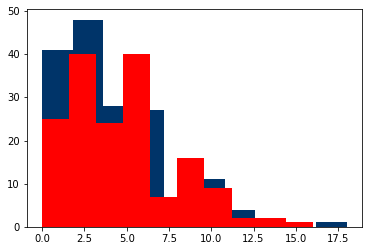

In [91]:
plt.hist(ras.runs,color = '#003469')
plt.hist(rfs.runs,color = '#ff0000')
plt.show()

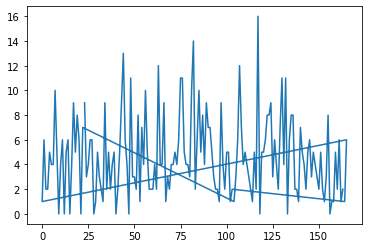

In [92]:
plt.plot(rfs.runs)

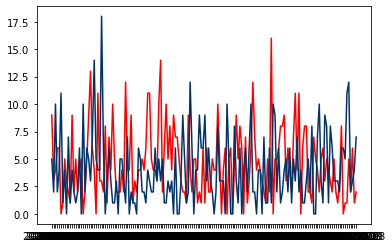

In [93]:
plt.plot(rfs.game_date.values,rfs.runs.values, color = '#ff0000')
plt.plot(ras.game_date.values,ras.runs.values, color = '#003469')
plt.show()

Might be good to try some running averages here to accomplish smoothing?

# Schwarber OBP by Year

In [96]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
res = results('game_year')

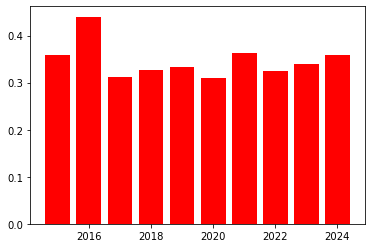

In [97]:
z = res[['game_year','obp']]
x = z.game_year
y = z.obp
plt.bar(x,y,color = '#ff0000')
#plt.text(x=x,y=y,s=y)
plt.show()

In [98]:
# It is Schwarber's highest OBP as a Phillie

# Phillies Fastball Velo by Year

In [100]:
df = pitch_mix_by_group(pps[pps.pitch_type == 'FF'],'game_year')

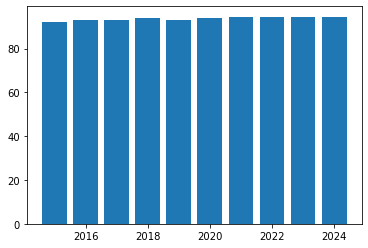

In [101]:
df[['game_year','release_speed']].sort_values(by='release_speed',ascending=False).round(2)
x = df.game_year
y = df.release_speed
plt.bar(x,y)
plt.show()

# Pitch Mix vs Homer Pitch Mix

In [103]:
bohm_hrs = bohm[bohm.events == 'home_run']
pm = pitch_mix(bohm)
pmh = pitch_mix(bohm_hrs)

In [104]:
df = pm.merge(pmh, on = 'pitch_type', suffixes = ('','_hr'))

In [105]:
z = df[['pitch_type'
    ,'pitch_name'
    ,'usage'
    ,'usage_hr'
    ,'count'
    ,'count_hr'
   ]]
z['diff'] = z.usage - z.usage_hr
z.sort_values(by='diff',ascending=True)
# Bohm crushes changeups

pitch_type       pitch_name  usage  usage_hr  count  count_hr  diff
3         CH         Changeup    7.5      18.0    713        11 -10.5
0         FF  4-Seam Fastball   33.0      36.1   3118        22  -3.1
5         CU        Curveball    5.7       8.2    542         5  -2.5
6         ST          Sweeper    4.5       3.3    423         2   1.2
2         SL           Slider   18.3      16.4   1733        10   1.9
4         FC           Cutter    7.5       4.9    706         3   2.6
1         SI           Sinker   20.4      13.1   1923         8   7.3

# WAS (H) 815-818

## Game 1: Parker vs Wheeler

The boys brought the boom tonight. Weston Wilson hit for the cycle. Nice.

In [109]:
po = pos[pos.game_date == '2024-08-15']
po

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
210485         FF  2024-08-15           92.8           1.40           6.31   
210486         SL  2024-08-15           84.4           2.33           5.81   
210487         FF  2024-08-15           92.5           1.33           6.38   
210488         FF  2024-08-15           93.0           1.36           6.44   
210489         SL  2024-08-15           83.2           2.03           5.99   
...           ...         ...            ...            ...            ...   
210637         CH  2024-08-15           84.8          -1.52           6.67   
210638         SI  2024-08-15           92.4          -2.07           5.70   
210639         FF  2024-08-15           94.5           1.56           6.25   
210640         FF  2024-08-15           93.5          -2.66           6.41   
210641         CH  2024-08-15           83.5          -1.66           6.51   

            player_name  batter  pitcher     events      description  ...  \
210485    Harper, Bryce  547180   680730     single    hit_into_play  ...   
210486    Harper, Bryce  547180   680730        NaN             foul  ...   
210487    Harper, Bryce  547180   680730        NaN             foul  ...   
210488    Harper, Bryce  547180   680730        NaN             foul  ...   
210489    Harper, Bryce  547180   680730        NaN             foul  ...   
...                 ...     ...      ...        ...              ...  ...   
210637    Harper, Bryce  547180   687377        NaN             ball  ...   
210638       Bohm, Alec  664761   674285  field_out    hit_into_play  ...   
210639  Schwarber, Kyle  656941   680730        NaN             ball  ...   
210640       Bohm, Alec  664761   663432        NaN             ball  ...   
210641    Harper, Bryce  547180   687377        NaN  swinging_strike  ...   

        wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
210485  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210486  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210487  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210488  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210489  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
...      ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
210637  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210638  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210639  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210640  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210641  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[157 rows x 108 columns]

In [110]:
po.groupby(['player_name','batter']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

player_name  batter  at_bat_number  des  launch_speed  launch_angle  \
0         Bohm, Alec  664761              5    8        92.075        22.250   
1  Castellanos, Nick  592206              5   12        87.017        23.000   
2      Harper, Bryce  547180              5   19        87.833        34.444   
3     Realmuto, J.T.  592663              5   21        79.400        15.167   
4       Rojas, Johan  679032              5   25        84.450        40.500   
5    Schwarber, Kyle  656941              6   25        88.275        46.375   
6      Sosa, Edmundo  624641              1    3        70.500        68.000   
7      Stott, Bryson  681082              4    7        70.333        13.667   
8       Turner, Trea  607208              5   19        92.729        16.714   
9     Wilson, Weston  642215              5   18        86.257        25.429   

   estimated_ba_using_speedangle  
0                          2.006  
1                          1.438  
2                          2.272  
3                          1.268  
4                          1.307  
5                          0.923  
6                          0.000  
7                          0.220  
8                          1.481  
9                          1.368

In [111]:
pp = pps[pps.game_date == '2024-08-15']
pp

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
209746         ST  2024-08-15           85.1          -2.15           5.20   
209747         FF  2024-08-15           95.2          -2.10           5.15   
209748         ST  2024-08-15           86.4          -2.06           5.17   
209749         SI  2024-08-15           95.3          -2.03           5.21   
209750         FF  2024-08-15           95.7          -2.11           5.31   
...           ...         ...            ...            ...            ...   
209886         FF  2024-08-15           89.8           2.60           6.56   
209887         FF  2024-08-15           95.0          -0.54           6.04   
209888         ST  2024-08-15           86.4          -1.63           5.62   
209889         SL  2024-08-15           85.3           2.79           6.37   
209890         FF  2024-08-15           95.3          -2.06           5.45   

             player_name  batter  pitcher     events    description  ...  \
209746     Wheeler, Zack  665953   554430  field_out  hit_into_play  ...   
209747     Wheeler, Zack  665953   554430        NaN           ball  ...   
209748     Wheeler, Zack  665953   554430        NaN  called_strike  ...   
209749     Wheeler, Zack  665953   554430        NaN       foul_tip  ...   
209750     Wheeler, Zack  695578   554430  field_out  hit_into_play  ...   
...                  ...     ...      ...        ...            ...  ...   
209886     Banks, Tanner  660766   621383        NaN           ball  ...   
209887        Lazar, Max  660688   676661        NaN           ball  ...   
209888  Kerkering, Orion  671277   689147        NaN  called_strike  ...   
209889     Banks, Tanner  682928   621383  field_out  hit_into_play  ...   
209890     Wheeler, Zack  682928   554430        NaN           ball  ...   

        wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
209746  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209747  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209748  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209749  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209750  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
...      ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
209886  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209887  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209888  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209889  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209890  0.72  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[145 rows x 108 columns]

In [112]:
pp.groupby(['player_name','pitcher']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

player_name  pitcher  at_bat_number  des  launch_speed  launch_angle  \
0     Banks, Tanner   621383              5   10        80.183        10.333   
1  Kerkering, Orion   689147              5   19        87.333        19.500   
2        Lazar, Max   676661              4   20        82.783        23.167   
3     Wheeler, Zack   554430             22   96        79.240        23.467   

   estimated_ba_using_speedangle  
0                          2.003  
1                          1.351  
2                          0.917  
3                          3.816

## Game 2: Corbin vs Nola

In [114]:
#pos[pos.des.str.contains('Patrick Corbin')].groupby('pitcher',as_index=False).agg({'des' : 'count'})
corbin_id = 571578
pc = pd.concat([pos[pos.pitcher == corbin_id]
                ,nphl[nphl.pitcher == corbin_id]
               ])
df = pc
res = results('player_name')
res
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
4          Bohm, Alec      114          30  23.0  10.0  2.0    3.0   
7   Castellanos, Nick       61          17  11.0   3.0  0.0    2.0   
18      Harper, Bryce      190          48  28.0  12.0  0.0    9.0   
31     Marsh, Brandon        6           3   2.0   0.0  0.0    0.0   
43     Realmuto, J.T.      155          43  31.0  14.0  2.0    4.0   
45       Rojas, Johan       22           7   5.0   1.0  0.0    0.0   
49    Schwarber, Kyle      101          26  16.0   6.0  2.0    5.0   
51      Sosa, Edmundo       12           4   3.0   2.0  0.0    0.0   
52      Stott, Bryson       52          15  12.0   5.0  0.0    2.0   
54       Turner, Trea       55          14  12.0   4.0  0.0    1.0   
61     Wilson, Weston       21           4   2.0   0.0  0.0    1.0   

    strikeouts     ba    obp    slg    ops   woba  
4          4.0  0.370  0.433  0.704  1.137  0.474  
7          4.0  0.200  0.294  0.200  0.494  0.237  
18        11.0  0.308  0.438  0.410  0.848  0.380  
31         1.0  0.000  0.000  0.000  0.000  0.000  
43         7.0  0.378  0.442  0.595  1.036  0.439  
45         2.0  0.143  0.143  0.143  0.286  0.126  
49         5.0  0.286  0.423  0.571  0.995  0.428  
51         0.0  0.667  0.750  1.333  2.083  0.801  
52         1.0  0.385  0.467  0.615  1.082  0.459  
54         1.0  0.308  0.357  0.462  0.819  0.354  
61         1.0  0.000  0.250  0.000  0.250  0.174

Based off of previous at bats against Patrick Corbin, the Phillies should trot out this lineup tonight.
1. Kyle Schwarber 0
2. Nick Castellanos 9
3. Bryce Harper 3
4. Alec Bohm 5
5. J.T. Realmuto 2
6. Bryson Stott 4
7. Weston Wilson 7
8. Brandon Marsh 8
9. Edmundo Sosa 6

Call me crazy, I know Topper won't do it. Let's check Trea Turner's at bats against Corbin and guys like Corbin.

In [116]:
df = pc[pc.player_name == 'Turner, Trea']
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018       14           4    2   0.0  0.0    1.0         1.0  0.000   
1       2022        6           1    1   0.0  0.0    0.0         0.0  0.000   
2       2023        6           2    2   0.0  0.0    0.0         0.0  0.000   
3       2024       29           7    7   4.0  0.0    0.0         0.0  0.571   

     obp    slg    ops   woba  
0  0.250  0.000  0.250  0.172  
1  0.000  0.000  0.000  0.000  
2  0.000  0.000  0.000  0.000  
3  0.571  0.857  1.429  0.610

In [117]:
df[df.type=='X'][['game_date','inning'
                  ,'balls','strikes'
                  ,'estimated_ba_using_speedangle'
                  ,'launch_speed'
                  ,'launch_angle'
                  ,'events'
                  ,'hit_location'
                 ]].sort_values(by=['game_date','inning'])

game_date  inning  balls  strikes  estimated_ba_using_speedangle  \
212418  2018-04-28       5      0        0                          0.120   
212415  2018-04-28       7      1        1                          0.447   
62888   2022-07-27       1      3        2                          0.274   
185019  2023-08-10       2      1        0                          0.874   
184969  2023-08-10       4      1        2                          0.140   
227492  2024-04-05       1      2        2                          0.006   
227421  2024-04-05       2      0        2                          0.103   
227391  2024-04-05       5      0        0                          0.071   
227369  2024-04-05       7      0        0                          0.654   
210457  2024-08-16       1      3        1                          0.840   
210367  2024-08-16       3      3        2                          0.374   
210331  2024-08-16       5      2        2                          0.937   

        launch_speed  launch_angle                     events  hit_location  
212418          75.7          -5.0                  field_out           4.0  
212415         105.3           0.0  grounded_into_double_play           4.0  
62888           97.7          20.0                  field_out           9.0  
185019          82.8          14.0                  field_out           6.0  
184969          93.5         -21.0                  field_out           4.0  
227492          67.3          63.0                  field_out           6.0  
227421          81.5         -44.0                  field_out           5.0  
227391          83.3         -26.0                  field_out           6.0  
227369         104.6          20.0                     double           9.0  
210457         105.6          10.0                     single           9.0  
210367          94.3           1.0                     single           8.0  
210331         101.8          12.0                     double           8.0

In [118]:
pc[pc.pitch_type.isin(['FF','SI'])].agg({'release_speed' : ['mean','std']}).round(2)

release_speed
mean          92.25
std            1.55

In [119]:
pitch_mix(pc[pc.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
5         SL           Slider     66      80.674242        2125.666667   
4         SI           Sinker     60      91.091667        2065.283333   
2         FC           Cutter     29      86.562069        2226.068966   
3         FF  4-Seam Fastball     24      90.887500        2075.791667   
1         CU        Curveball      7      72.228571        1963.142857   
0         CH         Changeup      3      78.466667        1334.333333   

        zone  usage  
5  10.863636   34.9  
4   9.416667   31.7  
2   7.862069   15.3  
3   8.416667   12.7  
1   9.000000    3.7  
0  12.000000    1.6

In [120]:
df = trea[(trea.p_throws=='L')
     &(trea.pitch_type.isin(['FF','SI']))
     #&(trea.zone.isin([3,6,9]))
          &(trea.release_speed >= 90-1.57)
          &(trea.release_speed <= 90+1.57)
    ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015        9           2    2   0.0  0.0    0.0         0.0  0.000   
1       2016       53          13   12   7.0  1.0    1.0         0.0  0.583   
2       2017       82          18   12   2.0  0.0    2.0         4.0  0.125   
3       2018      129          39   32   8.0  1.0    6.0         1.0  0.242   
4       2019      105          24   19   9.0  1.0    1.0         4.0  0.391   
5       2020       35           8    8   3.0  1.0    0.0         0.0  0.375   
6       2021       63          14   12   5.0  1.0    2.0         0.0  0.417   
7       2022       78          22   15   4.0  1.0    1.0         6.0  0.200   
8       2023      108          26   23   5.0  0.0    1.0         2.0  0.200   
9       2024       68          27   25   8.0  2.0    0.0         2.0  0.296   

     obp    slg    ops   woba  
0  0.000  0.000  0.000  0.000  
1  0.615  1.083  1.699  0.695  
2  0.222  0.188  0.410  0.194  
3  0.359  0.424  0.783  0.343  
4  0.417  0.609  1.025  0.429  
5  0.375  1.125  1.500  0.597  
6  0.500  0.750  1.250  0.519  
7  0.227  0.350  0.577  0.246  
8  0.231  0.200  0.431  0.197  
9  0.296  0.630  0.926  0.389

Trea could do all right against Corbin.

## Game 3: Gore vs Sanchez

The Sanchize threw a complete game.

## Game 4: Irvin vs Walker

L

# ATL (A) 820-822
Big series. The Braves are banged up, the Phillies are starting to build some momentum. They could bury the Braves in the next two weeks.

## Game 1: Lopez vs Wheeler

In [128]:
# Does Zack Wheeler establish the fastball?

In [129]:
# Wheeler OPS vs RHB is .415!
df = wheeler[wheeler.stand=='R']
results('player_name') # Kellen has .149 BA, a .197 OBP, and a .413 OPS.

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Wheeler, Zack     1483         387  246    57    5     13         121   

      ba    obp    slg    ops   woba  
0  0.156  0.196  0.225  0.421  0.189

In [130]:
df = wheeler
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Wheeler, Zack     3245         814  515   140   20     56         233   

      ba    obp    slg    ops   woba  
0  0.188  0.252  0.319  0.571  0.253

In [131]:
zw = wheeler

In [132]:
zwff = zw[zw.pitch_type.isin(['FF','SI'])].groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })
zwi = zw.groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })

In [133]:
x = zwi.merge(zwff,on = 'inning')
x['usage'] = x.des_y / x.des_x

In [134]:
x
# Long story short: Yes, Zack Wheeler throws more fastballs early in the game and he throws the ball harder.

inning  release_speed_x  des_x  release_speed_y  des_y     usage
0       1        93.552449    490        96.064470    349  0.712245
1       2        92.104046    520        95.432831    332  0.638462
2       3        91.261131    548        95.007764    322  0.587591
3       4        91.076604    530        94.933871    310  0.584906
4       5        90.748485    495        94.748043    281  0.567677
5       6        90.480151    398        94.491892    222  0.557789
6       7        90.919665    239        94.730147    136  0.569038
7       8        90.236000     25        94.257143     14  0.560000

In [135]:
z = zw.groupby(['game_pk','game_date']
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'inning' : 'nunique'
                }
               ).sort_values(by='game_date',ascending=False)

<BarContainer object of 33 artists>

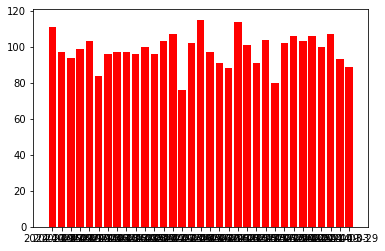

In [136]:
x = z.game_date
y = z.des
plt.bar(x,y,color='#ff0000')

In [137]:
pp24.groupby(['game_pk','inning','game_date','player_name']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(5)

game_pk  inning   game_date      player_name  des
848    745589       2  2024-05-03      Nola, Aaron   46
0      744797       1  2024-09-27   Suárez, Ranger   42
447    745547       5  2024-07-29    Wheeler, Zack   37
965    745600      10  2024-04-01  Brogdon, Connor   37
1101   745881       8  2024-07-22    Marte, Yunior   36

In [138]:
pp24[pp24.pitch_number==1].groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

description   des
0                      ball  2137
3             called_strike  1866
4                      foul   768
8             hit_into_play   740
10          swinging_strike   475
1              blocked_ball   103
6                  foul_tip    42
5                 foul_bunt    28
7              hit_by_pitch    19
11  swinging_strike_blocked    12
9               missed_bunt     5
2             bunt_foul_tip     2

In [139]:
balls = ['ball'
         ,'blocked_ball'
        ]
first_pitches = pp24[pp24.pitch_number==1]
fp = first_pitches.groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fpb = first_pitches[first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fps = first_pitches[~first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

In [140]:
z = fp.merge(fpb, on = ['player_name','pitcher'], suffixes = ('','_b'))
z['strikes'] = z.des - z.des_b
z['first_pitch_strike%'] = z.strikes/z.des
z.round(3).sort_values(by='first_pitch_strike%',ascending=False)

player_name  pitcher  des  des_b  strikes  first_pitch_strike%
14           Nelson, Nick   656793   26      7       19                0.731
0           Allard, Kolby   663465  117     33       84                0.718
6         Estévez, Carlos   608032   98     28       70                0.714
2           Banks, Tanner   621383  111     33       78                0.703
21        Stubbs, Garrett   596117   19      6       13                0.684
15            Nola, Aaron   605400  845    280      565                0.669
8           Hoffman, Jeff   656546  276     92      184                0.667
23    Sánchez, Cristopher   650911  775    266      509                0.657
18             Ruiz, José   614179  223     78      145                0.650
22         Suárez, Ranger   624133  646    229      417                0.646
26          Wheeler, Zack   554430  813    292      521                0.641
16        Phillips, Tyler   663969  160     58      102                0.638
20           Strahm, Matt   621381  245     90      155                0.633
25        Walker, Taijuan   592836  383    146      237                0.619
9           Johnson, Seth   686751   18      7       11                0.611
11             Lazar, Max   676661   54     21       33                0.611
1          Alvarado, José   621237  259    102      157                0.606
24      Turnbull, Spencer   605513  221     87      134                0.606
7          Gilbert, Tyler   656457   38     15       23                0.605
19          Soto, Gregory   642397  162     64       98                0.605
10       Kerkering, Orion   689147  275    109      166                0.604
17         Pinto, Ricardo   620982   58     25       33                0.569
5   Domínguez, Seranthony   622554  157     70       87                0.554
13       Mercado, Michael   675650   64     29       35                0.547
12          Marte, Yunior   628708  126     58       68                0.540
4           Clemens, Kody   665019    6      3        3                0.500
27         Wilson, Weston   642215    4      2        2                0.500
3         Brogdon, Connor   641401   14     10        4                0.286

In [141]:
ok = pps[pps.pitcher == 689147]
pitch_mix(ok)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         ST          Sweeper    760      86.213026        2903.360963   
0         FF  4-Seam Fastball    326      97.566564        2354.779874   
1         SI           Sinker    228      96.681140        2253.348214   

       zone  usage  
2  9.800000   57.8  
0  7.812883   24.8  
1  8.815789   17.4

In [142]:
ja = pp24[pp24.pitcher == 621237]
pitch_mix(ja)

pitch_type pitch_name  count  release_speed  release_spin_rate       zone  \
2         SI     Sinker    643      97.860342        2071.864734   7.774495   
1         FC     Cutter    428      92.535280        2100.342995  10.689252   
0         CU  Curveball      3      85.366667        2587.000000   9.333333   

   usage  
2   59.9  
1   39.9  
0    0.3

In [143]:
gms = ja.groupby(['game_pk','game_date']
           ,as_index=False).agg({'des' : 'count'})

gmsfc = ja[ja.pitch_type == 'FC'].groupby(['game_pk','game_date']
                                          ,as_index=False).agg({'des' : 'count'})

z = gms.merge(gmsfc, on = ['game_pk','game_date'], suffixes = ('','_fc'))
z['si'] = z.des - z.des_fc
z['usage'] = z.si/z.des
z.round(3).sort_values(by='usage',ascending=False)

game_pk   game_date  des  des_fc  si  usage
36   745594  2024-04-13   10       1   9  0.900
3    744874  2024-04-05   17       3  14  0.824
63   775316  2024-10-08   22       4  18  0.818
53   746456  2024-06-26   16       3  13  0.812
41   745769  2024-09-19   15       3  12  0.800
..      ...         ...  ...     ...  ..    ...
47   746071  2024-05-10   16       9   7  0.438
13   745535  2024-09-10   14       8   6  0.429
44   746016  2024-09-06   17      10   7  0.412
30   745578  2024-05-21   17      10   7  0.412
24   745569  2024-06-03   10       7   3  0.300

[64 rows x 6 columns]

<BarContainer object of 64 artists>

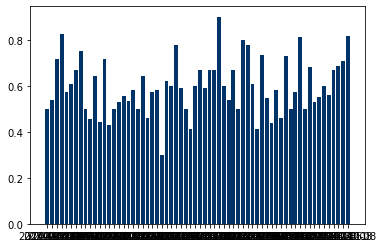

In [144]:
x = z.game_date
y = z.usage
plt.bar(x,y,color = '#003469')

Feels shitty to lose a Wheeler start, especially when this series feels like a big opportunity for the Fightins.

## Game 2: Fried vs Nola

## Game 3: Schwellenbach vs Sanchez

Brutal.

# KCR (A) 823-825
When was the last time the Phillies were in Kansas City? How do the Phillies batters perform there?

In [150]:
kc = pos[pos.home_team == 'KC']
kc.groupby('game_date',as_index=False).agg({'des' : 'count'
                                            ,'inning' : 'nunique'
                                            ,'game_year' : 'max'
                                           })

game_date  des  inning  game_year
0  2019-05-10  143       9       2019
1  2019-05-11  193       9       2019
2  2019-05-12  149       9       2019
3  2024-08-23  144       9       2024
4  2024-08-24  173       9       2024
5  2024-08-25  165       9       2024

In [151]:
kc[kc.game_year != 2024].groupby('player_name'
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                      }).sort_values(by='des',ascending=False)

# Back in May 2019, the Phillies were led by Andrew McCutchen, Bryce Harper, Hoskins, and JT.

player_name  des  game_pk
6  McCutchen, Andrew   69        3
1      Harper, Bryce   66        3
4      Hoskins, Rhys   65        3
7     Realmuto, J.T.   51        3
8       Segura, Jean   50        3
2   Hernández, César   49        3
3    Herrera, Odúbel   49        3
0     Franco, Maikel   39        3
9     Williams, Nick   28        2
5      Knapp, Andrew   19        1

In [152]:
df = pps[pps.home_team == 'KC']
results('player_name')
# The games were started by Zach Eflin, JAke Arrieta, and Cole Irvin?

player_name  pitches  plate_apps  bip  hits  hrs  walks  \
0           Allard, Kolby       81          23   18   8.0  2.0    0.0   
1          Alvarado, José       39           9    6   2.0  0.0    1.0   
2           Alvarez, Jose        4           1    1   0.0  0.0    0.0   
3           Arrieta, Jake       99          24   16   7.0  3.0    3.0   
4           Banks, Tanner       12           3    3   0.0  0.0    0.0   
5   Domínguez, Seranthony       15           4    2   1.0  0.0    0.0   
6             Eflin, Zach      110          31   22   4.0  0.0    0.0   
7         Estévez, Carlos       12           3    3   0.0  0.0    0.0   
8           García, Edgar        9           2    1   0.0  0.0    0.0   
9          Gilbert, Tyler       42           9    7   2.0  0.0    1.0   
10          Hoffman, Jeff       13           3    3   0.0  0.0    0.0   
11            Irvin, Cole       93          27   21   5.0  0.0    1.0   
12       Kerkering, Orion       10           3    2   0.0  0.0    0.0   
13             Lazar, Max       27           7    6   1.0  0.0    0.0   
14          Neris, Hector       21           5    2   0.0  0.0    2.0   
15          Nicasio, Juan       14           4    3   0.0  0.0    1.0   
16         Ramos, Edubray       12           3    3   1.0  0.0    0.0   
17             Ruiz, José       30           9    7   2.0  1.0    1.0   
18           Strahm, Matt       15           3    2   0.0  0.0    0.0   
19         Suárez, Ranger       72          20   12   4.0  0.0    1.0   
20        Walker, Taijuan       78          18   15   8.0  2.0    1.0   

    strikeouts     ba    obp    slg    ops   woba  
0          5.0  0.348  0.348  0.696  1.043  0.441  
1          2.0  0.250  0.333  0.500  0.833  0.355  
2          0.0  0.000  0.000  0.000  0.000  0.000  
3          5.0  0.333  0.417  0.762  1.179  0.474  
4          0.0  0.000  0.000  0.000  0.000  0.000  
5          2.0  0.250  0.250  0.250  0.500  0.218  
6          7.0  0.138  0.194  0.172  0.366  0.170  
7          0.0  0.000  0.000  0.000  0.000  0.000  
8          1.0  0.000  0.000  0.000  0.000  0.000  
9          1.0  0.250  0.333  0.375  0.708  0.314  
10         0.0  0.000  0.000  0.000  0.000  0.000  
11         5.0  0.192  0.222  0.192  0.415  0.187  
12         1.0  0.000  0.000  0.000  0.000  0.000  
13         1.0  0.143  0.143  0.143  0.286  0.126  
14         1.0  0.000  0.400  0.000  0.400  0.276  
15         0.0  0.000  0.250  0.000  0.250  0.172  
16         0.0  0.333  0.333  0.333  0.667  0.290  
17         1.0  0.286  0.333  0.857  1.190  0.443  
18         1.0  0.000  0.000  0.000  0.000  0.000  
19         6.0  0.222  0.250  0.333  0.583  0.248  
20         2.0  0.471  0.500  0.882  1.382  0.580

In [153]:
pokc = pos[(pos.home_team == 'KC')
           &(pos.game_year != 2024)
          ]
ppkc = pps[(pps.home_team == 'KC')
           &(pps.game_year != 2024)
          ]

In [154]:
df = ppkc
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  \
0          Alvarez, Jose        4           1    1   0.0  0.0    0.0   
1          Arrieta, Jake       99          24   16   7.0  3.0    3.0   
2  Domínguez, Seranthony       15           4    2   1.0  0.0    0.0   
3            Eflin, Zach      110          31   22   4.0  0.0    0.0   
4          García, Edgar        9           2    1   0.0  0.0    0.0   
5            Irvin, Cole       93          27   21   5.0  0.0    1.0   
6          Neris, Hector       21           5    2   0.0  0.0    2.0   
7          Nicasio, Juan       14           4    3   0.0  0.0    1.0   
8         Ramos, Edubray       12           3    3   1.0  0.0    0.0   

   strikeouts     ba    obp    slg    ops   woba  
0         0.0  0.000  0.000  0.000  0.000  0.000  
1         5.0  0.333  0.417  0.762  1.179  0.474  
2         2.0  0.250  0.250  0.250  0.500  0.218  
3         7.0  0.138  0.194  0.172  0.366  0.170  
4         1.0  0.000  0.000  0.000  0.000  0.000  
5         5.0  0.192  0.222  0.192  0.415  0.187  
6         1.0  0.000  0.400  0.000  0.400  0.276  
7         0.0  0.000  0.250  0.000  0.250  0.172  
8         0.0  0.333  0.333  0.333  0.667  0.290

## Game 1: Wacha vs Walker
Tai Walker is not good. The Phillies are going through it at the moment.

## Game 2: Singer vs Suarez

In [157]:
pos[(pos.away_team == 'KC')
    &(pos.game_year == 2023)
   ].groupby(['pitcher','game_pk','game_date'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                  }).sort_values(by='des',ascending=False)

pitcher  game_pk   game_date  des  inning
1    543475   717140  2023-08-04   91       6
9    679525   717123  2023-08-05   66       4
0    425844   717113  2023-08-06   59       4
8    672582   717123  2023-08-05   45       3
5    669169   717113  2023-08-06   27       2
4    663704   717113  2023-08-06   24       2
7    672578   717140  2023-08-04   18       1
2    621295   717140  2023-08-04   16       1
3    656353   717123  2023-08-05   11       1
6    669395   717140  2023-08-04   11       1
10   680735   717140  2023-08-04   10       1

In [158]:
lineup = ['Schwarber, Kyle',
 'Turner, Trea',
 'Harper, Bryce',
 'Bohm, Alec',
 'Castellanos, Nick',
 #'Sosa, Edmundo',
 #'Wilson, Weston',
 #'Rojas, Johan',
 'Realmuto, J.T.',
 'Stott, Bryson',
 'Marsh, Brandon'
         ,'Hays, Austin']

In [159]:
singer_id = 663903
df = nphl[nphl.pitcher == singer_id]
bs_res = results('player_name')
bs_res[bs_res.player_name.isin(lineup)]
# The Phillies have not faced Brady Singer much. The few guys who have do not perform well.

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
4     Hays, Austin       10           3  2.0   1.0  0.0    0.0         1.0   
8  Schwarber, Kyle       10           2  0.0   0.0  0.0    0.0         2.0   
9     Turner, Trea       16           3  2.0   0.0  0.0    0.0         1.0   

      ba    obp    slg    ops   woba  
4  0.333  0.333  0.333  0.667  0.294  
8  0.000  0.000  0.000  0.000  0.000  
9  0.000  0.000  0.000  0.000  0.000

## Game 3: Lugo vs Wheeler

# HOU (H) 826-828
## Game 1: 
## Game 2: Verlander vs Nola - W
## Game 3: Arrighetti vs Walker - L

# ATL (H) 829-91


## Game 1: Morton vs Sanchez


## Game 2: Lopez vs Suarez


In [165]:
po24

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
204023         SV  2024-10-09           78.1           2.34           5.71   
204024         SI  2024-10-09           90.2           2.20           5.78   
204025         SI  2024-10-09           90.6           2.23           5.72   
204026         SI  2024-10-09           90.0           2.21           5.78   
204027         CU  2024-10-09           76.6           2.31           5.72   
...           ...         ...            ...            ...            ...   
228374         FC  2024-03-29           89.1           3.26           5.17   
228375         FF  2024-03-29           96.2          -1.70           5.94   
228376         SL  2024-03-29           83.8          -2.59           5.53   
228377         CU  2024-03-29           84.0          -2.24           6.40   
228378         FF  2024-03-29           94.2           2.41           5.82   

              player_name  batter  pitcher     events  \
204023      Harper, Bryce  547180   500779     double   
204024      Harper, Bryce  547180   500779        NaN   
204025      Harper, Bryce  547180   500779        NaN   
204026      Harper, Bryce  547180   500779        NaN   
204027       Turner, Trea  607208   500779  strikeout   
...                   ...     ...      ...        ...   
228374     Realmuto, J.T.  592663   607481        NaN   
228375    Schwarber, Kyle  656941   675911  field_out   
228376      Harper, Bryce  547180   641729        NaN   
228377  Castellanos, Nick  592206   572955        NaN   
228378    Schwarber, Kyle  656941   621345        NaN   

                    description  ...  wHBP    w1B    w2B    w3B    wHR runSB  \
204023            hit_into_play  ...  0.72  0.882  1.254  1.589  2.048   0.2   
204024                     ball  ...  0.72  0.882  1.254  1.589  2.048   0.2   
204025                     ball  ...  0.72  0.882  1.254  1.589  2.048   0.2   
204026                     foul  ...  0.72  0.882  1.254  1.589  2.048   0.2   
204027  swinging_strike_blocked  ...  0.72  0.882  1.254  1.589  2.048   0.2   
...                         ...  ...   ...    ...    ...    ...    ...   ...   
228374                     ball  ...  0.72  0.882  1.254  1.589  2.048   0.2   
228375            hit_into_play  ...  0.72  0.882  1.254  1.589  2.048   0.2   
228376                     ball  ...  0.72  0.882  1.254  1.589  2.048   0.2   
228377                     foul  ...  0.72  0.882  1.254  1.589  2.048   0.2   
228378            called_strike  ...  0.72  0.882  1.254  1.589  2.048   0.2   

        runCS   R/PA    R/W   cFIP  
204023 -0.405  0.117  9.689  3.166  
204024 -0.405  0.117  9.689  3.166  
204025 -0.405  0.117  9.689  3.166  
204026 -0.405  0.117  9.689  3.166  
204027 -0.405  0.117  9.689  3.166  
...       ...    ...    ...    ...  
228374 -0.405  0.117  9.689  3.166  
228375 -0.405  0.117  9.689  3.166  
228376 -0.405  0.117  9.689  3.166  
228377 -0.405  0.117  9.689  3.166  
228378 -0.405  0.117  9.689  3.166  

[24356 rows x 108 columns]

In [166]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          #,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan' # bc Hays still gets the occasional day off as he works his way back.
         ]
#df = [po24.player_name.isin(lineup)]
#res = results('player_name')

In [167]:
# Ranger first time in City Connects?
df = pp24
df['date'] = pd.to_datetime(df.game_date)
df['dow'] = df.date.dt.month
#df['dow'] = df.dt.month

In [168]:
# Performance by Position and Month

In [169]:
c_ids = pp24.fielder_2.unique().tolist()
c = po24[po24.batter.isin(c_ids)]

In [170]:
c['date']=pd.to_datetime(c.game_date)
c['month'] = c.date.dt.month

df = c
results('month')
# And you can see that the Phillies catchers enjoyed a strong May.

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       46          12    6   3.0  1.0      2           4  0.300   
1      4      456         120   82  25.0  4.0      6          30  0.223   
2      5      461         121   83  32.0  2.0      8          30  0.283   
3      6      386         102   68  20.0  3.0      6          26  0.215   
4      7      390          96   61  19.0  1.0     10          20  0.232   
5      8      425         111   81  29.0  4.0      7          21  0.284   
6      9      396         101   61  22.0  3.0      7          32  0.239   
7     10       72          17    7   0.0  0.0      3           4  0.000   

     obp    slg    ops   woba  
0  0.417  0.600  1.017  0.432  
1  0.267  0.357  0.624  0.272  
2  0.331  0.398  0.729  0.319  
3  0.275  0.333  0.608  0.269  
4  0.344  0.317  0.661  0.304  
5  0.342  0.510  0.852  0.365  
6  0.297  0.370  0.667  0.293  
7  0.294  0.000  0.294  0.206

In [171]:
pp24[pp24.p_throws=='L'].groupby(['pitcher','player_name']
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                       #
                                      })
rs_id = 624133
rs24 = pp24[pp24.pitcher==rs_id]
rs = pps[pps.pitcher==rs_id]

In [172]:
rs24.groupby('game_date',as_index=False
            ).agg({'pitch_number' : 'sum'
                   ,'at_bat_number' : 'nunique'
                   ,'des' : 'count'
                   ,'pitch_type' : 'nunique'
                  }).sort_values(by='game_date',ascending=False)

game_date  pitch_number  at_bat_number  des  pitch_type
27  2024-10-09           322             21   97           5
26  2024-09-27           173             15   59           5
25  2024-09-21           274             23   91           5
24  2024-09-16           328             22  104           5
23  2024-09-10           231             29   88           5
22  2024-09-05           231             19   82           5
21  2024-08-30           251             18   78           5
20  2024-08-24           214             20   72           5
19  2024-07-22           207             24   79           5
18  2024-07-12           253             27   97           5
17  2024-07-06           259             23   91           5
16  2024-06-30           267             26   91           5
15  2024-06-25           217             26   88           5
14  2024-06-19           299             23   94           5
13  2024-06-14           210             27   88           5
12  2024-06-08           216             27   89           5
11  2024-06-01            66              6   23           5
10  2024-05-26           312             25  100           5
9   2024-05-21           319             27  108           6
8   2024-05-15           228             23   83           5
7   2024-05-10           261             25   97           5
6   2024-05-04           253             27   94           5
5   2024-04-27           255             26   96           5
4   2024-04-22           251             23   88           5
3   2024-04-16           300             32  112           5
2   2024-04-11           302             22   97           5
1   2024-04-06           237             23   82           6
0   2024-03-31           271             18   83           5

In [173]:
# How does Ranger attack RHBs?
df = rs_rhb = rs[rs.stand == 'R']
res = results('game_year')
pitch_mix(df)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker   2362      92.254911        1902.995295   
3         FF  4-Seam Fastball   1837      92.918563        1966.750411   
0         CH         Changeup   1813      83.607998        1455.320178   
1         CU        Curveball   1112      75.398291        2186.014856   
2         FC           Cutter    777      88.013385        2048.278068   
5         SL           Slider    276      84.132971        2092.783465   

        zone  usage  
4   9.086791   28.9  
3   7.911268   22.5  
0  11.678434   22.2  
1  10.956835   13.6  
2   8.518662    9.5  
5  10.340580    3.4

In [174]:
res

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018      146          47   40    16    3      4           3  0.381   
1       2019      524         137  100    39    5      7          28  0.305   
2       2020       51          16   12     6    1      2           1  0.462   
3       2021     1206         304  208    62    4     22          70  0.225   
4       2022     2252         578  402   131   14     58         115  0.254   
5       2023     1972         506  339   118   13     47         117  0.261   
6       2024     2026         526  357   116   11     40         124  0.242   

     obp    slg    ops   woba  
0  0.426  0.690  1.116  0.462  
1  0.336  0.461  0.797  0.335  
2  0.562  0.846  1.409  0.577  
3  0.289  0.301  0.590  0.264  
4  0.329  0.407  0.736  0.324  
5  0.330  0.400  0.730  0.319  
6  0.302  0.369  0.671  0.295

In [175]:
po24['date'] = pd.to_datetime(po24['game_date'])
po24['dow'] = po24.date.dt.dayofweek

In [176]:
df=po24

In [177]:
df.groupby('dow',as_index=False).agg({'des' :'count', 'game_date':'max'})

dow   des   game_date
0    0  2618  2024-09-23
1    1  3797  2024-10-08
2    2  3838  2024-10-09
3    3  1972  2024-09-19
4    4  3907  2024-09-27
5    5  4089  2024-10-05
6    6  4135  2024-10-06

In [178]:
df = po24[(po24.dow == 4)&(po24.home_team == 'PHI')]
results('player_name').sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
18    Stubbs, Garrett       15           3   2.0   1.0  0.0    1.0   
9      Marsh, Brandon      155          34  18.0   9.0  2.0    4.0   
16     Stevenson, Cal        7           2   1.0   1.0  0.0    0.0   
5       Harper, Bryce      212          48  30.0  11.0  0.0   10.0   
15      Sosa, Edmundo       78          20  16.0   6.0  1.0    0.0   
0          Bohm, Alec      161          44  36.0  11.0  2.0    2.0   
19       Turner, Trea      186          44  34.0  13.0  1.0    0.0   
17      Stott, Bryson      168          41  34.0   9.0  2.0    1.0   
10   Merrifield, Whit       41          12  11.0   2.0  1.0    0.0   
3         Dahl, David        9           2   1.0   0.0  0.0    1.0   
13       Rojas, Johan      104          27  19.0   5.0  0.0    1.0   
1   Castellanos, Nick      181          48  32.0   6.0  1.0    2.0   
14    Schwarber, Kyle      237          49  27.0   5.0  0.0    8.0   
11    Pache, Cristian       34           8   6.0   1.0  0.0    0.0   
12     Realmuto, J.T.      168          39  25.0   3.0  1.0    4.0   
20     Wilson, Weston       58          15   7.0   1.0  0.0    3.0   
8     Marchán, Rafael       31           8   6.0   0.0  0.0    2.0   
7      Kennedy, Buddy       16           3   3.0   0.0  0.0    0.0   
6        Hays, Austin        2           1   1.0   0.0  0.0    0.0   
4      Garcia, Aramis        7           1   0.0   0.0  0.0    0.0   
2       Clemens, Kody       11           3   1.0   0.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
18         0.0  0.500  0.667  0.500  1.167  0.524  
9         12.0  0.300  0.382  0.633  1.016  0.427  
16         1.0  0.500  0.500  0.500  1.000  0.441  
5          8.0  0.289  0.438  0.447  0.885  0.392  
15         4.0  0.300  0.300  0.500  0.800  0.342  
0          6.0  0.262  0.295  0.452  0.748  0.322  
19         9.0  0.295  0.295  0.432  0.727  0.312  
17         5.0  0.237  0.268  0.395  0.663  0.285  
10         1.0  0.167  0.167  0.417  0.583  0.244  
3          0.0  0.000  0.500  0.000  0.500  0.344  
13         7.0  0.192  0.222  0.231  0.453  0.203  
1         13.0  0.133  0.188  0.222  0.410  0.186  
14        14.0  0.122  0.265  0.122  0.387  0.202  
11         2.0  0.125  0.125  0.250  0.375  0.157  
12        10.0  0.086  0.179  0.171  0.351  0.168  
20         4.0  0.083  0.267  0.083  0.350  0.197  
8          0.0  0.000  0.250  0.000  0.250  0.172  
7          0.0  0.000  0.000  0.000  0.000  0.000  
6          0.0  0.000  0.000  0.000  0.000  0.000  
4          1.0  0.000  0.000  0.000  0.000  0.000  
2          2.0  0.000  0.000  0.000  0.000  0.000

In [179]:
# how is Austin Hays's defense?

## Game 3: Fried vs Wheeler

In [181]:
pos[pos.des.str.contains('Fried')][['pitcher','home_team','away_team','game_date','des']]
fried_id = 608331
pos[pos.pitcher == fried_id].groupby(['game_pk'
                                      ,'game_date'
                                     ],as_index=False
                                    ).agg({'des' : 'count'
                                             ,'at_bat_number' : 'nunique'
                                             ,'pitch_type' : 'nunique'
                                             ,'release_speed' : 'mean'
                                           ,'inning' : 'nunique'
                                            }).round(2).sort_values(by='game_date',ascending=False)

game_pk   game_date  des  at_bat_number  pitch_type  release_speed  inning
20   745532  2024-08-31  103             28           6          88.97       7
22   747084  2024-08-21   91             24           6          89.01       7
23   747097  2024-07-05  103             31           6          86.95       6
21   745599  2024-03-30   43              7           6          88.57       1
24   748563  2023-10-09   95             22           6          84.92       4
19   716618  2023-09-12   87             20           6          87.17       5
18   715743  2022-10-11   61             20           5          86.54       4
17   661609  2022-09-22  107             21           5          87.85       5
14   661473  2022-09-16  110             24           5          87.04       6
16   661555  2022-07-25  103             27           5          86.62       6
15   661543  2022-05-24   99             25           5          88.10       6
11   632306  2021-09-29   98             25           5          87.32       7
12   633214  2021-07-23  100             25           4          86.72       5
13   634622  2021-04-01   94             24           5          87.57       5
9    630324  2020-08-21   91             21           5          88.53       5
10   631131  2020-08-09   91             21           5          86.50       5
7    567132  2019-09-10   79             22           5          87.94       5
6    567111  2019-07-27   89             25           5          86.45       6
8    567202  2019-06-14   98             23           4          87.15       5
5    567061  2019-03-31   25              4           4          88.79       1
4    567059  2019-03-28   11              3           4          87.41       1
3    531824  2018-09-30   14              3           3          87.63       1
2    531738  2018-09-23   35              8           3          85.75       2
1    529786  2018-04-27   47             12           4          86.05       3
0    491786  2017-08-08   26              8           4          85.80       2

## Game 4: Schwellenbach vs Nola

Phillies win on a walk off. Nice work taking 3 of 4, fellas.

# July 2024

Amy is crazy.

## Run Functions

In [187]:
%run "Baseball Functions.ipynb"

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


## Imports and Data

In [189]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# CHC (A) 72-74
## Game 1: Wesneski vs Mercado 
## Game 2: Imanaga vs Wheeler
## Game 3: Taillon vs Sanchez

# 75-77 ATL (A)
## Game 1: Fried vs Nola
## Game 2: Schwellenbach vs Suarez
## Game 3: Lopez vs Mercado

# Jeff Francoeur Pitching

In [193]:
pps[pps.game_year==2015].groupby(['player_name'
                                  ,'pitcher'
                                 ],as_index=False
                                ).agg({'des' : 'count'
                                       #,'game_pk
                                       #,'
                                      })
df = frenchy = francouer = francouer_pps = pps[pps.pitcher == 425796]
#df = pp2015 = phils_2015 = pps[pps.game_year == 2015]

In [194]:
results('inning')
df.groupby('inning',as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                }
               )

inning  des  release_speed
0       7   16       86.03125
1       8   32       83.86250

In [195]:
df.game_date.unique()

array(['2015-06-16'], dtype=object)

## Pitch Type Breakdown

In [197]:
df.groupby('pitch_type'
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 ,'plate_x' : 'mean'
                 ,'plate_z' : 'mean'
                 ,'pfx_x' : 'mean'
                 ,'pfx_z' : 'mean'
                }).round(1)
                 

pitch_type  des  release_speed  release_spin_rate  plate_x  plate_z  pfx_x  \
0         CH   21           86.2             1883.3     -1.0      2.7   -0.7   
1         CU    5           75.3             1455.0     -0.4      1.4    0.3   
2         FF    1           89.2             1848.0     -1.0      2.5   -1.0   
3         SL   20           84.8             1942.9     -0.3      2.6   -0.1   

   pfx_z  
0    0.9  
1    0.5  
2    1.1  
3    1.1

In [198]:
pitch_mix(df)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         CH         Changeup     21      86.238095             1883.3   
3         SL           Slider     20      84.765000             1942.9   
1         CU        Curveball      5      75.320000             1455.0   
2         FF  4-Seam Fastball      1      89.200000             1848.0   

        zone  usage  
0  10.952381   43.8  
3   8.400000   41.7  
1  10.400000   10.4  
2  13.000000    2.1

In [199]:
df.pitcher.unique()[0]

425796

In [200]:
df = pos[pos.batter == 425796]
df[df.away_team == 'BAL'].groupby('hit_location',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'events' : 'max'
                                                                      ,'pitcher' : 'max'
                                                                     })

hit_location  des  game_pk                     events  pitcher
0           3.0    1        1                  field_out   542960
1           4.0    1        1  grounded_into_double_play   502154

In [201]:
df = pos[pos.pitcher == 502154]
pitch_mix(df)
df[df.pitch_type == 'SI'
  ].groupby(['pitch_type'
            ]
            ,as_index=False
           ).agg({'release_speed' : ['mean','min','max','std']
                  ,'release_spin_rate' : ['mean','min','max','std']
                 }).round(0)

pitch_type release_speed                  release_spin_rate                  \
                      mean   min   max  std              mean     min     max   
0         SI          94.0  91.0  98.0  2.0            2003.0  1714.0  2241.0   

          
     std  
0  107.0

In [202]:
# try to make a little histogram of Zack Britton's Sinker's Release Speed
## Filter the Dataset to the Desired Filtering (where clause)
si = df[df.pitch_type == 'SI'] # Ok so the first thing I need to do is Create a dataframe of Zack Britton's Sinker.

## Create My Grouper Object
group = ['pitch_type','stand']
sinkers = si.groupby(group # Create My Grouper Object
                   ,as_index=False
                  ).agg({'release_speed' : ['min','max','mean','std']
                         ,'release_spin_rate' : ['min','max','mean','std']
                        })

sinkers.round(1)
# now try to do it again for Release Spin Rate


pitch_type stand release_speed                  release_spin_rate          \
                             min   max  mean  std               min     max   
0         SI     L          90.7  97.5  93.5  2.1            1714.0  2241.0   
1         SI     R          90.7  97.7  94.1  1.7            1767.0  2145.0   

                  
     mean    std  
0  2002.2  134.8  
1  2002.7   97.5

In [203]:
## Need to ID Jeff Francoeur's ID
pn = pps.groupby(['player_name','pitcher'],as_index=False
           ).agg({'game_pk' : 'nunique'})
pn[pn.game_pk==1]
frenchy_id = 425796
# The Specific Sinker Zack Britton threw to Jeff Francoeur
df = zb2frenchy = si[si.batter == frenchy_id]
single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate

# Create a plot of a single observation against a Standard Performer

In [205]:
def single_obs_vs_standard(df):
    single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate # Using Example Data
    x = single_observation[0]
    y = single_observation[1]
    #colors = ['gray','#003469']
    plt.plot(x,y)

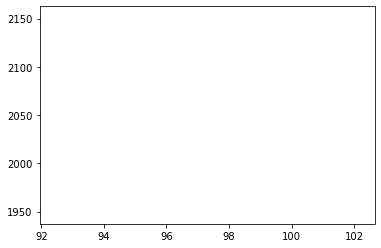

In [206]:
single_obs_vs_standard(si[si.batter == 425796])

In [207]:
# Well, I kinda did it.

(array([ 9., 13., 14.,  9., 11., 17., 20.,  5.,  7.,  6.]),
 array([90.7, 91.4, 92.1, 92.8, 93.5, 94.2, 94.9, 95.6, 96.3, 97. , 97.7]),
 <BarContainer object of 10 artists>)

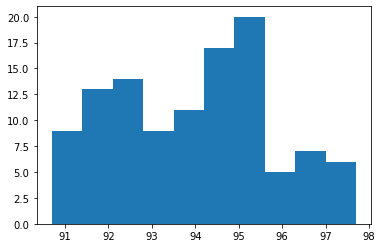

In [208]:
si.release_speed.tolist()
plt.hist(si.release_speed)

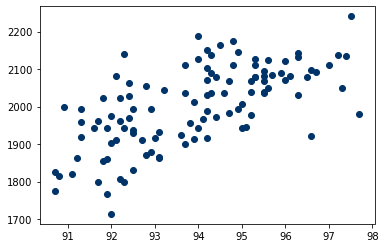

In [209]:
plt.scatter(x = si.release_speed
            ,y = si.release_spin_rate
            ,color = '#003469'
           )

(array([ 9., 13., 14.,  9., 11., 17., 20.,  5.,  7.,  6.]),
 array([90.7, 91.4, 92.1, 92.8, 93.5, 94.2, 94.9, 95.6, 96.3, 97. , 97.7]),
 <BarContainer object of 10 artists>)

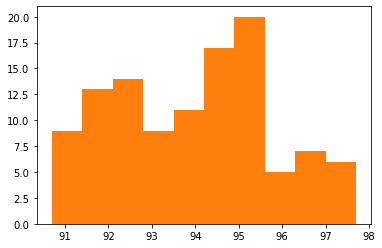

In [210]:
# string = "Zack Britton's Sinker"
# graph(x = si.release_speed.fillna(si.release_speed.mean)
#             ,y = si.release_spin_rate.fillna(si.release_spin_rate.mean)
#             ,colors = '#003469'
#       ,title = '{}'.format(string)
#       ,xlabel = 'Velo (mph)'
#       ,ylabel = 'Spin (rpm)'
#            )

# graph(
#     x = si.release_speed
#     ,y = si.release_spin_rate
#     ,title = "Zack Britton's Sinkers"
#     ,xlabel = 'Velo (mph)'
#     ,ylabel = 'Spin (rpm)'
#     ,colors = '#003469'
# )
#summarize(si.release_speed)

x = si.release_speed.fillna(si.release_speed.mean)
plt.hist(x)
plt.hist(si.release_speed)
# plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
# plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y

# So I am Returning to my Matplotlib Tutorial Exercises

In [212]:
# fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# # Build a plot for the first cell in location (0,0) of the grid of subplots I just created
# axs[0,0].plot(x, np.sin(x))
# axs[0,0].set_title('Sine Wave')

# # Build a plot for the location 0,1 in the grid of subplots
# axs[0,1].plot(x, np.cos(x))
# axs[0,1].set_title('Cosine Wave')

# # Build a plot for the location 1,0 in the grid of subplots
# axs[1,0].plot(x, np.random.random(100))
# axs[1,0].set_title('Random Function')

# # Build a plot for the location of 1,1 in the grid of subplots
# axs[1,1].plot(x, np.log(x))
# axs[1,1].set_title('Log Function')
# axs[1,1].set_xlabel('TEST')

# fig.suptitle('Four Plots') # Title of my grid of subplots
# plt.tight_layout() 
# plt.show()

# # This looks awful
# plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# # arguments for that savefig function may be useful for final delivery of shit

# Alec Bohm vs Power Sinkers
Let's define a power sinker as 95+ SI

In [214]:
pos.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'
                                                          ,'game_pk' : 'nunique'
                                                         }).sort_values(by='game_pk',ascending=False).head(25)
bohm_id = 664761
bohm_pos = pos[pos.batter == bohm_id]
df = bohm_pos[(bohm_pos.pitch_type == 'SI')
              &(bohm_pos.release_speed >= 95)
             ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020       20           5    5     1  0.0    0.0         0.0  0.200   
1       2021       75          26   16     6  0.0    3.0         7.0  0.261   
2       2022      130          46   33    10  1.0    1.0        12.0  0.222   
3       2023      158          40   31    11  0.0    1.0         7.0  0.289   
4       2024       98          34   29    10  1.0    2.0         3.0  0.312   

     obp    slg    ops   woba  
0  0.200  0.200  0.400  0.177  
1  0.346  0.261  0.607  0.283  
2  0.239  0.356  0.595  0.257  
3  0.325  0.316  0.641  0.287  
4  0.353  0.438  0.790  0.345

In [215]:
df = bohm_pos[bohm_pos.game_year == 2024]
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps    bip  hits  hrs  walks  strikeouts  \
4          FF      675       184.0  137.0  48.0  5.0   16.0        29.0   
11         SI      444       144.0  119.0  33.0  2.0    9.0        14.0   
12         SL      356       101.0   82.0  30.0  3.0    4.0        14.0   
0          CH      175        46.0   41.0  12.0  0.0    1.0         3.0   
3          FC      174        52.0   39.0   9.0  2.0    5.0         8.0   
13         ST      172        49.0   36.0  15.0  2.0    1.0        12.0   
1          CU      110        25.0   22.0   6.0  1.0    0.0         3.0   
6          FS       29        10.0    6.0   1.0  0.0    2.0         2.0   
7          KC       11         4.0    2.0   1.0  0.0    1.0         1.0   
8          KN        5         1.0    0.0   0.0  0.0    0.0         0.0   
2          EP        3         2.0    2.0   0.0  0.0    0.0         0.0   
14         SV        3         0.0    0.0   0.0  0.0    0.0         0.0   
5          FO        2         0.0    0.0   0.0  0.0    0.0         0.0   
9          PO        1         0.0    0.0   0.0  0.0    0.0         0.0   
10         SC        1         1.0    1.0   1.0  0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
4   0.287  0.353  0.449  0.802  0.350  
11  0.252  0.306  0.382  0.687  0.300  
12  0.316  0.347  0.505  0.852  0.364  
0   0.273  0.304  0.386  0.691  0.300  
3   0.200  0.269  0.356  0.625  0.271  
13  0.319  0.327  0.596  0.922  0.385  
1   0.240  0.240  0.440  0.680  0.288  
6   0.125  0.300  0.250  0.550  0.263  
7   0.333  0.500  0.333  0.833  0.393  
8     NaN  1.000    NaN    NaN  0.720  
2   0.000  0.000  0.000  0.000  0.000  
14    NaN    NaN    NaN    NaN    NaN  
5     NaN    NaN    NaN    NaN    NaN  
9     NaN    NaN    NaN    NaN    NaN  
10  1.000  1.000  1.000  2.000  0.882

In [216]:
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      635         185  159    49    6     11          15  0.282   
1        R     1526         434  328   107    9     28          71  0.272   

     obp    slg    ops   woba  
0  0.324  0.460  0.784  0.339  
1  0.325  0.429  0.754  0.326

In [217]:
df = bohm_pos[(bohm_pos.p_throws == 'L')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
10         ST       23         7.0   7.0   3.0  1.0    0.0         0.0  0.429   
3          FF      197        59.0  50.0  19.0  4.0    4.0         5.0  0.345   
2          FC       39        14.0  11.0   3.0  1.0    1.0         2.0  0.231   
1          CU       44        10.0   9.0   3.0  0.0    0.0         1.0  0.300   
9          SL       55        14.0  11.0   3.0  0.0    2.0         1.0  0.250   
0          CH      138        38.0  36.0  10.0  0.0    0.0         2.0  0.263   
8          SI      128        42.0  35.0   8.0  0.0    4.0         3.0  0.211   
6          KC        4         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
4          FO        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
5          FS        4         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
7          PO        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
10  0.429  1.000  1.429  0.598  
3   0.390  0.636  1.026  0.435  
2   0.286  0.538  0.824  0.348  
1   0.300  0.500  0.800  0.339  
9   0.357  0.333  0.690  0.314  
0   0.263  0.342  0.605  0.261  
8   0.286  0.237  0.523  0.242  
6   0.000  0.000  0.000  0.000  
4     NaN    NaN    NaN    NaN  
5     NaN    NaN    NaN    NaN  
7     NaN    NaN    NaN    NaN

In [218]:
df = bohm_pos[(bohm_pos.p_throws == 'R')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
8          SC        1         1.0   1.0   1.0  0.0    0.0         0.0  1.000   
0          CH       37         8.0   5.0   2.0  0.0    1.0         1.0  0.333   
6          KC        7         3.0   2.0   1.0  0.0    1.0         0.0  0.500   
10         SL      301        87.0  71.0  27.0  3.0    2.0        13.0  0.325   
11         ST      149        42.0  29.0  12.0  1.0    1.0        12.0  0.300   
9          SI      316       102.0  84.0  25.0  2.0    5.0        11.0  0.269   
4          FF      478       125.0  87.0  29.0  1.0   12.0        24.0  0.259   
1          CU       66        15.0  13.0   3.0  1.0    0.0         2.0  0.200   
5          FS       25        10.0   6.0   1.0  0.0    2.0         2.0  0.125   
3          FC      135        38.0  28.0   6.0  1.0    4.0         6.0  0.188   
2          EP        3         2.0   2.0   0.0  0.0    0.0         0.0  0.000   
7          KN        5         1.0   0.0   0.0  0.0    0.0         0.0    NaN   
12         SV        3         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
8   1.000  1.000  2.000  0.882  
0   0.500  0.667  1.167  0.485  
6   0.667  0.500  1.167  0.524  
10  0.345  0.530  0.875  0.372  
11  0.310  0.525  0.835  0.349  
9   0.314  0.441  0.755  0.323  
4   0.336  0.357  0.693  0.310  
1   0.200  0.400  0.600  0.254  
5   0.300  0.250  0.550  0.263  
3   0.263  0.281  0.544  0.242  
2   0.000  0.000  0.000  0.000  
7   1.000    NaN    NaN  0.720  
12    NaN    NaN    NaN    NaN

# Should Marchan go down?
He will because it makes sense rosterwise I think. Phillies pitchers have better number pitching to Stubbs but the expected numbers point to a much more similar performance between Stubbs and Marchan. In fact, I think there are indicators that Marchan has been better.

In [220]:
catchers = pps[pps.game_year==2024].fielder_2.unique().tolist()
# Rob Thomson likes to ride the hot hand tho, so he will put Phillips right back out there
catchers
po2 = pos[pos.batter.isin(catchers)]
df = po2[po2.game_year == 2024]
results('player_name')

player_name  pitches  plate_apps  bip   hits   hrs  walks  strikeouts  \
0   Garcia, Aramis       36           7    4    0.0   0.0    0.0           3   
1  Marchán, Rafael      195          56   44   15.0   3.0    3.0           8   
2   Realmuto, J.T.     1655         430  286  101.0  14.0   29.0         106   
3  Stubbs, Garrett      746         187  115   34.0   1.0   17.0          50   

      ba    obp    slg    ops   woba  
0  0.000  0.000  0.000  0.000  0.000  
1  0.294  0.339  0.549  0.888  0.375  
2  0.257  0.319  0.415  0.733  0.321  
3  0.206  0.294  0.261  0.555  0.256

In [221]:
df.groupby([
            'player_name'
    ,'batter'
           ]
           ,as_index=False
).agg({'launch_speed' : 'mean'
       ,'estimated_ba_using_speedangle' : 'mean'
       ,'hit_distance_sc' : 'mean'
      }).round(3)

player_name  batter  launch_speed  estimated_ba_using_speedangle  \
0   Garcia, Aramis  605244        83.055                          0.137   
1  Marchán, Rafael  665561        80.492                          0.396   
2   Realmuto, J.T.  592663        83.510                          0.357   
3  Stubbs, Garrett  596117        75.026                          0.279   

   hit_distance_sc  
0           85.000  
1          152.806  
2          151.754  
3          143.603

In [222]:
df = pps[pps.game_year==2024]
pps_by_catcher = results('fielder_2')
pps_by_catcher

fielder_2  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0     592663    14813        3780  2526   808  104    285         930  0.235   
1     596117     6925        1797  1247   422   64    122         408  0.257   
2     605244      279          77    55    18    4      8          14  0.265   
3     665561     2104         548   376   127   16     37         122  0.256   

     obp    slg    ops   woba  
0  0.298  0.375  0.673  0.296  
1  0.313  0.436  0.749  0.324  
2  0.338  0.515  0.852  0.362  
3  0.321  0.414  0.736  0.322

In [223]:
x = pps_by_catcher
x['share_pa'] = x.plate_apps/x.plate_apps.sum()
x['share_bip'] = x.bip/x.bip.sum()
x['hits_per_bip'] = x.hits/x.bip
x['share_hrs'] = x.hrs/x.hrs.sum()
x['share_bb'] = x.walks/x.walks.sum()
x['share_ks'] = x.strikeouts/x.strikeouts.sum()
shares = x[['fielder_2'
   ,'share_pa'
   ,'share_bip'
   ,'share_hrs'
   ,'share_bb'
   ,'share_ks'
  ]
 ].round(3)

In [224]:
catcher_ids = po2.groupby('player_name',as_index=False).agg({'batter' : 'max'})

Marchan is definitely hitting the ball better but the Phillies pitchers are throwing the ball better to Garrett Stubbs than they are to Rafael Marchan. There is going to be noise in those data, but I think there is truth to that narrative that guys feel more comfortable throwing to Stubbs.

Stubbs is not necessarily covering himself in glory behind the plate. When we look at the share of plate appearances he has caught relative to the share of home runs, walks, and strikeouts he has been behind the plate for.

In [226]:
shares.merge(catcher_ids,left_on='fielder_2',right_on='batter',suffixes = ('','_2'))[['player_name'
                                                                             ,'share_pa'
                                                                             ,'share_hrs'
                                                                             ,'share_bb'
                                                                             ,'share_ks']
                                                                            ]

player_name  share_pa  share_hrs  share_bb  share_ks
0   Realmuto, J.T.     0.609      0.553     0.631     0.631
1  Stubbs, Garrett     0.290      0.340     0.270     0.277
2   Garcia, Aramis     0.012      0.021     0.018     0.009
3  Marchán, Rafael     0.088      0.085     0.082     0.083

Some things to look at - who has pitched to Rafael Marchan? what opponents has he caught against? Do pitchers typically pitch worse to Marchan than they do to everyone else?

## How do guys typically throw to Marchan compared to the other catchers in their career.

In [229]:
marchan_id = 665561
# quick check -- passed
# pos[pos.batter==marchan_id].player_name.unique() 
marchy = pps[pps.fielder_2 == marchan_id]
marchy.groupby('player_name'
               ,as_index=False
              ).agg({'des' : 'count'
                     ,'game_pk' : 'nunique'
                    }).sort_values(by='des',ascending=False)
df = marchy
res_marchy = results('player_name').sort_values(by='pitches',ascending=False)

In [230]:
non_marchy = pd.concat([pps[(pps.player_name.isin(df.player_name))&(pps.fielder_2 != marchan_id)]
                        ,nphl[nphl.player_name.isin(df.player_name)]
                       ])
df = non_marchy
res_non_marchy = results('player_name')

In [231]:
x = res_marchy
y = res_non_marchy

len(x),len(y)

(39, 39)

In [232]:
z = x.merge(y,on='player_name',suffixes = ('_x','_y'))
z['diff_ops'] = z.ops_x - z.ops_y
z['diff_ba'] = z.ba_x - z.ba_y
z[z.pitches_x>=50][['player_name','pitches_x','diff_ops','diff_ba']].sort_values(by='diff_ops')

player_name  pitches_x  diff_ops  diff_ba
8         Howard, Spencer        134    -0.347   -0.167
29           Rosso, Ramón         50    -0.316   -0.061
17         Medina, Adonis         84    -0.258   -0.110
10          Soto, Gregory        132    -0.254   -0.126
11          Neris, Hector        124    -0.252   -0.093
24             Hammer, JD         59    -0.237   -0.029
23          Hoffman, Jeff         67    -0.166   -0.086
7   Domínguez, Seranthony        145    -0.112   -0.016
5            Gibson, Kyle        175    -0.075   -0.013
1           Wheeler, Zack        485    -0.051   -0.028
14             Ruiz, José        103    -0.003    0.043
13       Kerkering, Orion        114     0.009    0.045
3          Alvarado, José        215     0.011   -0.015
0          Suárez, Ranger        850     0.013    0.018
6             Moore, Matt        155     0.082    0.012
15   De Los Santos, Enyel         96     0.084    0.038
12            Hale, David        118     0.117    0.060
9         Brogdon, Connor        132     0.121    0.043
22      Kintzler, Brandon         70     0.143    0.126
21        Bradley, Archie         76     0.146    0.154
2             Nola, Aaron        278     0.170    0.047
20       Velasquez, Vince         76     0.189    0.133
4     Sánchez, Cristopher        176     0.210    0.117
19           Coonrod, Sam         77     0.236    0.031
16      Turnbull, Spencer         87     0.282    0.007
26           Strahm, Matt         55     0.566    0.134
27         Hembree, Heath         55     0.576    0.256
28           Kennedy, Ian         50     0.654    0.214
18        Walker, Taijuan         77     0.716    0.086
25        Anderson, Chase         56     1.433    0.417

### Cris Sanchez pitches well to Stubbs

In [234]:
df = pps[pps.player_name=='Sánchez, Cristopher']
results('fielder_2')

fielder_2  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0     592663     3547         947  676   225  24.0     61         205  0.256   
1     595284       38          10    7     2   0.0      1           2  0.222   
2     596117     1495         413  302    88  10.0     19          88  0.227   
3     665561      176          49   37    16   0.0      4           8  0.364   

     obp    slg    ops   woba  
0  0.305  0.396  0.701  0.305  
1  0.300  0.222  0.522  0.245  
2  0.269  0.351  0.620  0.270  
3  0.408  0.477  0.885  0.381

# LAD (H) 79-711
Big Series. Welcome back Schwarber and Harper. Let's take 2 of 3.

## Game 1: Miller vs Wheeler

In [237]:
# Bryce Harper was unreal in June. .714 SLG!

In [238]:
po24 = pos[pos.game_year==2024]
po24.groupby('player_name',as_index=False).agg({'des':'count','batter':'max'})
harper_id=547180
df = bryce = po24[po24.batter==harper_id]
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df.date.dt.month
results('month')

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       33           8    3   0.0  0.0      2           3  0.000   
1      4      433         108   71  23.0  6.0     13          24  0.245   
2      5      428         110   70  30.0  7.0     13          27  0.312   
3      6      388         102   73  34.0  7.0     11          18  0.374   
4      7      306          74   52  10.0  4.0      7          15  0.149   
5      8      452         115   79  31.0  2.0      9          26  0.298   
6      9      429         103   67  29.0  4.0     10          25  0.315   
7     10       78          17    7   4.0  1.0      5           5  0.333   

     obp    slg    ops   woba  
0  0.250  0.000  0.250  0.172  
1  0.333  0.489  0.823  0.353  
2  0.391  0.583  0.974  0.413  
3  0.441  0.714  1.155  0.485  
4  0.230  0.358  0.588  0.257  
5  0.357  0.462  0.818  0.354  
6  0.388  0.543  0.932  0.400  
7  0.529  0.750  1.279  0.523

## How do the Phils match up against a guy like Bobby Miller?

In [240]:
bm = bobby = pd.read_csv('bobby_miller.csv')
pitch_mix(bm)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    797      98.695107        2335.967378   
1         CU        Curveball    439      80.442597        2782.381279   
3         SI           Sinker    424      98.564623        2296.242925   
0         CH         Changeup    407      87.705651        2284.766585   
4         SL           Slider    385      89.785974        2490.885117   
5         ST          Sweeper     14      85.285714        2695.071429   

        zone  usage  
2   8.184442   32.3  
1  10.027335   17.8  
3   7.929245   17.2  
0  10.393120   16.5  
4  10.405195   15.6  
5  12.142857    0.6

In [241]:
pitch_mix_by_group(bm,'game_year')

game_year  count  release_speed  release_spin_rate   zone  usage
0       2023   2013         92.234           2441.304  9.172   81.6
1       2024    453         91.738           2359.106  9.338   18.4

In [242]:
# Casty is getting a healthy diet of sliders

In [243]:
bm23 = bm[bm.game_year==2023]
pitch_mix(bm23)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    596      99.050168        2340.661074   
3         SI           Sinker    377      98.752255        2296.673740   
1         CU        Curveball    372      80.626075        2809.528302   
4         SL           Slider    333      89.822222        2510.504532   
0         CH         Changeup    321      88.177882        2290.024922   
5         ST          Sweeper     14      85.285714        2695.071429   

        zone  usage  
2   8.162752   29.6  
3   7.755968   18.7  
1  10.099462   18.5  
4  10.324324   16.5  
0  10.308411   15.9  
5  12.142857    0.7

In [244]:
bm24 = bm[bm.game_year==2024]
pitch_mix(bm24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    201      97.642289        2322.049751   
0         CH         Changeup     86      85.943023        2265.139535   
1         CU        Curveball     67      79.423881        2632.059701   
4         SL           Slider     52      89.553846        2366.000000   
3         SI           Sinker     47      97.059574        2292.787234   

        zone  usage  
2   8.248756   44.4  
0  10.709302   19.0  
1   9.626866   14.8  
4  10.923077   11.5  
3   9.319149   10.4

In [245]:
# Rafael Marchan!!!

In [246]:
def risp(df):
    ks = df[((df.on_2b.isna==True) & (df.on_3b.isna==False))
            |((df.on_2b.isna==False) & (df.on_3b.isna==True))
            |((df.on_2b.isna==False) & (df.on_3b.isna==False))
           ]
    return ks

In [247]:
# this RISP function does not work ^^^^^^^^

In [248]:
# John Kruk is certain that Bryson Stott has seen more breaking balls this year than ever in his career

In [249]:
df = stott=pos[pos.player_name=='Stott, Bryson']
pm22 = pitch_mix(df[df.game_year==2022])
pm23 = pitch_mix(df[df.game_year==2023])
pm24 = pitch_mix(df[df.game_year==2024])
pm22

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
5          FF  4-Seam Fastball    879      94.216837        2281.964733   
8          SI           Sinker    335      93.240896        2135.704478   
9          SL           Slider    240      84.038750        2431.495833   
0          CH         Changeup    225      87.039111        1731.524444   
1          CU        Curveball    165      78.401212        2616.921212   
4          FC           Cutter    163      89.100613        2352.938650   
6          FS     Split-Finger     39      85.674359        1230.051282   
7          KC    Knuckle Curve     30      81.833333        2551.666667   
10         ST          Sweeper     26      81.019231        2691.076923   
11         SV           Slurve      6      82.300000        2385.666667   
2          EP           Eephus      2      51.200000        1053.500000   
3          FA            Other      2      76.400000        1711.500000   

         zone  usage  
5    7.646189   41.6  
8    8.516418   15.9  
9    9.125000   11.4  
0   10.404444   10.7  
1    9.581818    7.8  
4    8.220859    7.7  
6    9.743590    1.8  
7    9.133333    1.4  
10   8.307692    1.2  
11   7.333333    0.3  
2   11.000000    0.1  
3    5.000000    0.1

In [250]:
bb = breaking_balls = ['SL','CU','KC','ST','SV','CS']
dfbb = pd.DataFrame()
count = 0
for pm in [pm22,pm23,pm24]:
    dfbb = pd.concat([dfbb,pm[pm.pitch_type.isin(bb)]])
    count+=1
    print(count)

1
2
3


In [251]:
dfbb

pitch_type     pitch_name  count  release_speed  release_spin_rate  \
9          SL         Slider    240      84.038750        2431.495833   
1          CU      Curveball    165      78.401212        2616.921212   
7          KC  Knuckle Curve     30      81.833333        2551.666667   
10         ST        Sweeper     26      81.019231        2691.076923   
11         SV         Slurve      6      82.300000        2385.666667   
12         SL         Slider    296      84.448311        2381.651877   
2          CU      Curveball    234      80.107265        2579.286325   
13         ST        Sweeper     66      81.153030        2568.075758   
9          KC  Knuckle Curve     49      82.255102        2620.653061   
14         SV         Slurve      6      81.900000        2721.333333   
1          CS     Slow Curve      1      68.000000        2123.000000   
11         SL         Slider    244      85.150820        2424.422131   
1          CU      Curveball    190      79.891579        2598.761905   
12         ST        Sweeper    119      81.318487        2547.201754   
8          KC  Knuckle Curve     20      81.030000        2266.150000   
13         SV         Slurve     13      81.861538        2410.692308   

         zone  usage  
9    9.125000   11.4  
1    9.581818    7.8  
7    9.133333    1.4  
10   8.307692    1.2  
11   7.333333    0.3  
12   9.628378   10.3  
2   10.051282    8.1  
13  10.575758    2.3  
9   10.489796    1.7  
14  10.166667    0.2  
1    7.000000    0.0  
11   9.020492   10.3  
1   10.052632    8.0  
12   9.058824    5.0  
8    8.950000    0.8  
13   8.307692    0.5

## Game 2: Stone vs Sanchez
Cristopher SAnchez is the man, man. Vargas has to be benched in this game.

In [253]:
whit = pd.concat([nphl[nphl.player_name=='Merrifield, Whit'], pos[pos.player_name=='Merrifield, Whit']])
#whit[

In [254]:
# Cris Sanchez's fucking average launch angle is 0.6 degrees!??!?!??!?!?!
pp24 = pps[pps.game_year==2024]
pp24[pp24.p_throws=='L'].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name  pitcher   des
7  Sánchez, Cristopher   650911  2885
6       Suárez, Ranger   624133  2451
1       Alvarado, José   621237  1074
5         Strahm, Matt   621381  1026
4        Soto, Gregory   642397   649
0        Allard, Kolby   663465   436
2        Banks, Tanner   621383   412
3       Gilbert, Tyler   656457   145

In [255]:
cris = 650911
cris = pp24[pp24.pitcher==650911]
cris.launch_angle.mean()
cris.groupby('stand',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                          ,'launch_speed' : 'mean'
                                          ,'launch_angle' : 'mean'
                                          ,'type' : 'nunique'
                                         })

stand  estimated_ba_using_speedangle  launch_speed  launch_angle  type
0     L                       0.302254     78.715566     -6.742991     3
1     R                       0.335706     82.612293      7.788666     3

In [256]:
abs(cris.launch_angle).mean()

27.489161168708765

<AxesSubplot:>

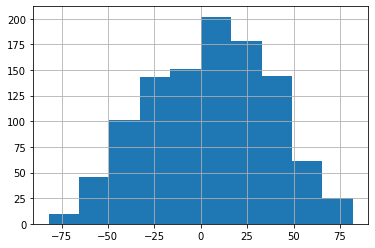

In [257]:
cris.launch_angle.hist()

In [258]:
stott.groupby('game_year',as_index=False).agg({'launch_speed' : ['mean','std']
                                              ,'launch_angle' : ['mean','std']
                                              }).round(1)

game_year launch_speed       launch_angle      
                    mean   std         mean   std
0      2022         81.3  13.8         21.2  31.5
1      2023         82.4  12.9         18.6  29.6
2      2024         81.2  14.1         19.7  32.6

In [259]:
stott['month'] = pd.to_datetime(stott.game_date).dt.month

In [260]:
mus = stott.groupby(['game_year','month'],as_index=False).agg({'launch_speed' : ['mean','std']
                                                         ,'launch_angle' : ['mean','std']
                                                         ,'estimated_ba_using_speedangle' : ['mean','std']
                                                         ,'release_speed' : ['mean','std']
                                                         ,'release_spin_rate' : ['mean','std']
                                                        })
mus

game_year month launch_speed            launch_angle             \
                           mean        std         mean        std   
0       2022     4    79.475000  16.825968    16.525000  31.849798   
1       2022     5    76.631429  13.865739    24.628571  31.376245   
2       2022     6    83.664220  12.741987    23.761468  28.464045   
3       2022     7    83.595333  12.945224    19.847682  34.026411   
4       2022     8    81.690071  13.817480    20.539007  30.078117   
5       2022     9    79.441803  14.352446    20.520325  31.205650   
6       2022    10    81.250526  13.869397    18.347368  33.715571   
7       2022    11    77.646667   7.456528    41.466667  22.570102   
8       2023     3    82.820000   8.525081    11.800000  37.412565   
9       2023     4    81.240278  13.029905    19.393519  31.132093   
10      2023     5    82.469136  13.050105    20.895062  28.101548   
11      2023     6    82.089928  11.656523    17.482014  29.854321   
12      2023     7    84.292241  12.049248    13.853448  30.102796   
13      2023     8    84.605590  13.672382    19.515528  27.794358   
14      2023     9    80.297386  13.585722    18.686275  30.496219   
15      2023    10    82.560870  11.925334    19.840580  28.053323   
16      2024     3    84.353846   9.272236    24.461538  24.329733   
17      2024     4    81.670093  15.293285    23.439252  33.310483   
18      2024     5    80.704828  13.811319    21.551724  31.508582   
19      2024     6    79.952518  15.683215    16.330935  27.779773   
20      2024     7    80.705983  12.437244    21.384615  33.723482   
21      2024     8    83.190698  14.814348    16.837209  35.050363   
22      2024     9    81.289286  12.300738    19.120567  33.768217   
23      2024    10    77.680000  17.984605    19.066667  45.119629   

   estimated_ba_using_speedangle           release_speed            \
                            mean       std          mean       std   
0                       0.292500  0.271209     90.552381  5.493381   
1                       0.193464  0.248780     88.807282  6.177615   
2                       0.270015  0.270004     89.693521  5.794132   
3                       0.296169  0.277659     88.835695  7.852361   
4                       0.304338  0.252491     89.651358  5.552555   
5                       0.305857  0.266331     91.170739  5.326558   
6                       0.361205  0.272719     90.804906  5.823471   
7                       0.114286  0.115612     91.800000  5.339128   
8                       0.090000  0.074953     95.794444  4.406876   
9                       0.337031  0.292792     89.768738  6.115582   
10                      0.308965  0.276252     89.938261  5.439236   
11                      0.274425  0.271293     89.780097  5.927136   
12                      0.354113  0.304583     89.868142  6.324199   
13                      0.334977  0.241571     89.801770  6.748303   
14                      0.251216  0.283031     89.856713  5.759749   
15                      0.306595  0.317644     90.759072  5.477641   
16                      0.425625  0.352492     89.094286  6.214165   
17                      0.262385  0.256603     89.415489  6.309606   
18                      0.293373  0.282029     88.953364  5.917438   
19                      0.348435  0.296531     89.314615  6.180142   
20                      0.309339  0.323021     89.511377  6.073894   
21                      0.270958  0.227979     89.776923  5.733266   
22                      0.315324  0.270617     90.281720  5.892879   
23                      0.222857  0.260249     93.573770  4.482444   

   release_spin_rate              
                mean         std  
0        2179.706349  372.099021  
1        2286.155340  409.655638  
2        2212.002817  329.548240  
3        2249.174387  303.757196  
4        2219.459259  338.980426  
5        2175.002841  347.360839  
6        2328.252830  353.000097  
7        2398.527778  260.676426  
8        24

In [261]:
mus.sort_values(by=(('game_year')
                    #,('launch_speed','mean')
                    #,('release_speed','mean')
                   ),ascending=False).round(1)

game_year month launch_speed       launch_angle        \
                           mean   std         mean   std   
23      2024    10         77.7  18.0         19.1  45.1   
22      2024     9         81.3  12.3         19.1  33.8   
21      2024     8         83.2  14.8         16.8  35.1   
20      2024     7         80.7  12.4         21.4  33.7   
19      2024     6         80.0  15.7         16.3  27.8   
18      2024     5         80.7  13.8         21.6  31.5   
17      2024     4         81.7  15.3         23.4  33.3   
16      2024     3         84.4   9.3         24.5  24.3   
13      2023     8         84.6  13.7         19.5  27.8   
15      2023    10         82.6  11.9         19.8  28.1   
14      2023     9         80.3  13.6         18.7  30.5   
12      2023     7         84.3  12.0         13.9  30.1   
11      2023     6         82.1  11.7         17.5  29.9   
10      2023     5         82.5  13.1         20.9  28.1   
9       2023     4         81.2  13.0         19.4  31.1   
8       2023     3         82.8   8.5         11.8  37.4   
1       2022     5         76.6  13.9         24.6  31.4   
7       2022    11         77.6   7.5         41.5  22.6   
6       2022    10         81.3  13.9         18.3  33.7   
5       2022     9         79.4  14.4         20.5  31.2   
4       2022     8         81.7  13.8         20.5  30.1   
3       2022     7         83.6  12.9         19.8  34.0   
2       2022     6         83.7  12.7         23.8  28.5   
0       2022     4         79.5  16.8         16.5  31.8   

   estimated_ba_using_speedangle      release_speed      release_spin_rate  \
                            mean  std          mean  std              mean   
23                           0.2  0.3          93.6  4.5            2217.9   
22                           0.3  0.3          90.3  5.9            2204.3   
21                           0.3  0.2          89.8  5.7            2254.5   
20                           0.3  0.3          89.5  6.1            2256.7   
19                           0.3  0.3          89.3  6.2            2200.0   
18                           0.3  0.3          89.0  5.9            2192.0   
17                           0.3  0.3          89.4  6.3            2252.1   
16                           0.4  0.4          89.1  6.2            2358.7   
13                           0.3  0.2          89.8  6.7            2186.8   
15                           0.3  0.3          90.8  5.5            2348.7   
14                           0.3  0.3          89.9  5.8            2232.8   
12                           0.4  0.3          89.9  6.3            2231.9   
11                           0.3  0.3          89.8  5.9            2222.1   
10                           0.3  0.3          89.9  5.4            2261.2   
9                            0.3  0.3          89.8  6.1            2249.8   
8                            0.1  0.1          95.8  4.4            2439.3   
1                            0.2  0.2          88.8  6.2            2286.2   
7                            0.1  0.1          91.8  5.3            2398.5   
6                            0.4  0.3          90.8  5.8            2328.3   
5                            0.3  0.3          91.2  5.3            2175.0   
4                            0.3  0.3          89.7  5.6            2219.5   
3                            0.3  0.3          88.8  7.9            2249.2   
2                            0.3  0.3          89.7  5.8            2212.0   
0                            0.3  0.3          90.6  5.5            2179.7   

           
      std  
23  309.6  
22  380.2  
21  369.7  
20  381.1  
19  422.3  
18  357.7  
17  355.0  
16  249.4  
13  298.7  
15  314.5  
14  367.2  
12  368.5  
11  340.8  
10  337.2  
9   301.5  
8   288.8  
1   409.7  
7   260.7  
6   353.0  
5   347.4  
4   339.0  
3   303.8  
2   329.5  
0   372.1

In [262]:
stott['monthyear'] = stott.game_year
df = stott
results('month').sort_values(by='ops',ascending=False)

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       53          14   10   5.0  0.0      1           3  0.385   
5      8     1234         303  236  72.0  9.0     21          42  0.261   
4      7     1040         264  211  67.0  7.0     18          34  0.276   
7     10      563         129   83  29.0  2.0     14          31  0.254   
3      6     1157         281  209  66.0  6.0     23          47  0.260   
1      4     1025         247  183  58.0  5.0     15          48  0.253   
2      5     1097         260  188  52.0  5.0     26          42  0.231   
6      9     1156         286  201  58.0  3.0     18          62  0.221   
8     11       36          11    7   0.0  0.0      1           3  0.000   

     obp    slg    ops   woba  
0  0.429  0.462  0.890  0.391  
5  0.317  0.431  0.748  0.323  
4  0.326  0.416  0.741  0.323  
7  0.333  0.404  0.737  0.323  
3  0.320  0.386  0.706  0.309  
1  0.300  0.367  0.666  0.292  
2  0.312  0.338  0.649  0.288  
6  0.273  0.294  0.567  0.253  
8  0.091  0.000  0.091  0.063

In [263]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2022     2112         522  372   106   10     43         101  0.223   
1       2023     2881         691  527   175   16     41         114  0.276   
2       2024     2368         582  429   126   11     53          97  0.244   

     obp    slg    ops   woba  
0  0.287  0.342  0.630  0.280  
1  0.323  0.411  0.733  0.317  
2  0.313  0.356  0.669  0.295

In [264]:
stott[stott.events=='home_run'
     ][[
    'game_date','pitch_type','home_team','away_team','hit_distance_sc','launch_speed','launch_angle'
]].sort_values(by='hit_distance_sc',ascending=False)

game_date pitch_type home_team away_team  hit_distance_sc  \
214993  2024-07-09         CU       PHI       LAD            432.0   
180539  2023-09-12         FF       PHI       ATL            424.0   
191964  2023-06-15         FF        AZ       PHI            418.0   
213247  2024-07-26         SI       PHI       CLE            416.0   
162276  2022-07-13         KC       TOR       PHI            415.0   
203818  2023-10-04         FF       PHI       MIA            412.0   
155976  2022-09-03         SL        SF       PHI            412.0   
207749  2024-09-05         FF       MIA       PHI            406.0   
212080  2024-08-04         FF       SEA       PHI            404.0   
162410  2022-07-12         SI       TOR       PHI            403.0   
226616  2024-04-11         SI       PHI       PIT            402.0   
192310  2023-06-13         CU        AZ       PHI            401.0   
167292  2022-06-08         FF       MIL       PHI            400.0   
157580  2022-08-22         FF       PHI       CIN            399.0   
182643  2023-08-29         SL       PHI       LAA            396.0   
224229  2024-04-28         FF        SD       PHI            396.0   
224264  2024-04-28         SL        SD       PHI            395.0   
183980  2023-08-19         FF       WSH       PHI            394.0   
188345  2023-07-16         SI       PHI        SD            393.0   
195300  2023-05-22         SL       PHI        AZ            387.0   
222273  2024-05-13         FF       NYM       PHI            387.0   
184834  2023-08-11         SL       PHI       MIN            385.0   
187841  2023-07-21         SL       CLE       PHI            385.0   
161395  2022-07-25         FC       PHI       ATL            378.0   
199969  2023-04-16         SI       CIN       PHI            378.0   
183030  2023-08-26         SL       PHI       STL            378.0   
195926  2023-05-17         SL        SF       PHI            376.0   
221371  2024-05-18         FF       PHI       WSH            370.0   
167676  2022-06-05         CU       PHI       LAA            366.0   
198789  2023-04-23         SL       PHI       COL            366.0   
166793  2022-06-11         CU       PHI        AZ            364.0   
210075  2024-08-18         FF       PHI       WSH            359.0   
195524  2023-05-21         FF       PHI       CHC            357.0   
167903  2022-06-03         CU       PHI       LAA            356.0   
185605  2023-08-06         FF       PHI        KC            356.0   
208524  2024-08-30         SL       PHI       ATL            354.0   
152089  2022-10-03         FF       HOU       PHI            347.0   

        launch_speed  launch_angle  
214993         105.3          28.0  
180539         101.0          30.0  
191964         102.7          29.0  
213247         107.7          25.0  
162276         102.8          27.0  
203818         102.4          28.0  
155976         106.2          29.0  
207749         104.5          31.0  
212080         101.6          28.0  
162410         105.9          23.0  
226616         102.3          27.0  
192310          98.8          29.0  
167292         101.2          32.0  
157580         101.6          33.0  
182643         103.5          36.0  
224229         103.9          36.0  
224264         105.7          24.0  
183980         101.5          33.0  
188345         102.7          24.0  
195300         103.6          22.0  
222273         103.6          24.0  
184834         100.0          28.0  
187841          98.1          36.0  
161395          97.7          24.0  
199969         101.4          36.0  
183030         100.1          32.0  
195926         101.7          26.0  
221371         103.1          36.0  
167676          99.3          26.0  
198789          95.5          33.0  
166793          95.8          26.0  
210075          97.6          40.0  
195524         103.6          37.0  
167903          98.7          40.0  
185605          98.4          34.0  
208524          

In [265]:
stott.game_date.max()

'2024-10-09'

In [266]:
pos.game_date.max()

'2024-10-09'

In [267]:
df=pd.read_csv('po24.csv')
df.game_date.max()

'2024-10-09'

## Game 3: Knack vs Nola
Big sweep against the Dodgers. Nola pitches well. Turner and Marsh hit home runs. Big game for Marsh. Bullpen gets it done.

# OAK (H) 712-714
## Game 1: Harris vs Suarez

## Game 2: Spence vs Phillips

## Game 3: Estes vs Bullpen/Mercado

# 162 Game Pace

In [273]:
gms = po24.groupby(['player_name','batter'],as_index=False).agg({'game_pk' : 'nunique'})
df = po24
res = results('player_name')
x = res.merge(gms,on='player_name')
x['bip/gm'] = x.bip/x.game_pk
x['hits/gm'] = x.hits/x.game_pk
x['hrs/gm'] = x.hrs/x.game_pk
x['walks/gm'] = x.walks/x.game_pk
x['strikeouts/gm'] = x.strikeouts/x.game_pk

In [274]:
for col in [c for c in x.columns if '/gm' in c]:
    x['{}162'.format(col)] = x[col]*162

In [275]:
p162 = x[['player_name','bip/gm162','hits/gm162','hrs/gm162','walks/gm162','strikeouts/gm162']].round(0)

In [276]:
z = x[['player_name','ba','obp','slg','ops','woba']].merge(p162,on='player_name')

In [277]:
z.sort_values(by='ops',ascending=False)

player_name     ba    obp    slg    ops   woba  bip/gm162  \
5       Harper, Bryce  0.286  0.366  0.530  0.896  0.383      459.0   
8     Marchán, Rafael  0.294  0.339  0.549  0.888  0.375      475.0   
14    Schwarber, Kyle  0.244  0.359  0.480  0.838  0.362      414.0   
20     Wilson, Weston  0.272  0.333  0.467  0.801  0.344      255.0   
19       Turner, Trea  0.291  0.335  0.460  0.795  0.344      542.0   
0          Bohm, Alec  0.275  0.325  0.438  0.763  0.330      537.0   
1   Castellanos, Nick  0.258  0.311  0.435  0.746  0.323      471.0   
12     Realmuto, J.T.  0.257  0.319  0.415  0.733  0.321      450.0   
9      Marsh, Brandon  0.242  0.320  0.406  0.726  0.317      329.0   
15      Sosa, Edmundo  0.255  0.311  0.416  0.726  0.315      342.0   
2       Clemens, Kody  0.227  0.264  0.454  0.718  0.306      310.0   
16     Stevenson, Cal  0.250  0.333  0.375  0.708  0.314      202.0   
17      Stott, Bryson  0.244  0.313  0.356  0.669  0.295      460.0   
6        Hays, Austin  0.244  0.262  0.378  0.640  0.277      405.0   
3         Dahl, David  0.203  0.238  0.390  0.628  0.268      324.0   
13       Rojas, Johan  0.242  0.274  0.321  0.594  0.260      403.0   
7      Kennedy, Buddy  0.182  0.308  0.273  0.580  0.270      216.0   
10   Merrifield, Whit  0.197  0.274  0.293  0.567  0.256      456.0   
11    Pache, Cristian  0.204  0.291  0.272  0.562  0.257      251.0   
18    Stubbs, Garrett  0.206  0.294  0.261  0.555  0.256      358.0   
4      Garcia, Aramis  0.000  0.000  0.000  0.000  0.000      216.0   

    hits/gm162  hrs/gm162  walks/gm162  strikeouts/gm162  
5        175.0       34.0         76.0             155.0  
8        162.0       32.0         32.0              86.0  
14       151.0       41.0        109.0             214.0  
20       101.0       12.0         32.0             117.0  
19       197.0       27.0         38.0             133.0  
0        172.0       17.0         43.0              95.0  
1        157.0       23.0         38.0             138.0  
12       159.0       22.0         46.0             167.0  
9        123.0       19.0         59.0             184.0  
15       118.0       13.0         24.0             124.0  
2         95.0       18.0         18.0             109.0  
16        61.0        0.0         30.0              40.0  
17       135.0       12.0         57.0             104.0  
6        135.0       14.0          0.0             148.0  
3        102.0       26.0         26.0             179.0  
13       119.0        4.0         20.0             100.0  
7         54.0        0.0         54.0              81.0  
10       102.0       10.0         50.0              63.0  
11        85.0        0.0         53.0             170.0  
18       106.0        3.0         53.0             156.0  
4          0.0        0.0          0.0             162.0

In [278]:
df = pp24
results('player_name')

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0           Allard, Kolby      436         117   86    34   5.0    8.0   
1          Alvarado, José     1074         262  168    50   6.0   29.0   
2           Banks, Tanner      412         111   75    24   1.0   10.0   
3         Brogdon, Connor       76          14    5     3   2.0    6.0   
4           Clemens, Kody       16           6    5     2   1.0    1.0   
5   Domínguez, Seranthony      653         157  103    32   6.0   12.0   
6         Estévez, Carlos      388          98   69    20   3.0    6.0   
7          Gilbert, Tyler      145          38   31    10   1.0    2.0   
8           Hoffman, Jeff     1045         275  163    51   6.0   17.0   
9           Johnson, Seth       58          18   15     8   1.0    3.0   
10       Kerkering, Orion     1150         275  168    55   3.0   19.0   
11             Lazar, Max      214          54   43    13   2.0    2.0   
12          Marte, Yunior      482         126   89    34   5.0   14.0   
13       Mercado, Michael      260          64   44    16   9.0    9.0   
14           Nelson, Nick       96          26   15     8   0.0    2.0   
15            Nola, Aaron     3275         844  582   194  32.0   52.0   
16         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
17        Phillips, Tyler      578         160  123    45   9.0    7.0   
18         Pinto, Ricardo      220          59   44    19   2.0    5.0   
19             Ruiz, José      853         223  154    55   9.0   16.0   
20          Soto, Gregory      649         163   95    36   2.0   18.0   
21           Strahm, Matt     1026         245  150    40   5.0   10.0   
22        Stubbs, Garrett       65          19   17     6   2.0    2.0   
23         Suárez, Ranger     2451         647  443   145  14.0   44.0   
24    Sánchez, Cristopher     2885         776  572   187  12.0   45.0   
25      Turnbull, Spencer      916         221  139    37   6.0   20.0   
26        Walker, Taijuan     1435         382  283   107  24.0   37.0   
27          Wheeler, Zack     3245         814  515   140  20.0   56.0   
28         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0         23.0  0.312  0.359  0.523  0.882  0.378  
1         64.0  0.216  0.305  0.346  0.652  0.291  
2         25.0  0.242  0.315  0.313  0.628  0.283  
3          3.0  0.375  0.643  1.250  1.893  0.677  
4          0.0  0.400  0.500  1.000  1.500  0.603  
5         40.0  0.224  0.293  0.406  0.699  0.305  
6         22.0  0.220  0.276  0.374  0.649  0.284  
7          4.0  0.286  0.342  0.400  0.742  0.328  
8         90.0  0.202  0.262  0.325  0.587  0.259  
9          0.0  0.571  0.611  0.929  1.540  0.613  
10        79.0  0.224  0.298  0.313  0.611  0.275  
11         9.0  0.250  0.278  0.442  0.720  0.309  
12        23.0  0.306  0.381  0.495  0.876  0.379  
13        10.0  0.296  0.406  0.833  1.240  0.504  
14         8.0  0.348  0.423  0.435  0.858  0.379  
15       204.0  0.247  0.295  0.424  0.719  0.311  
16         0.0  0.750  0.750  0.750  1.500  0.662  
17        28.0  0.300  0.338  0.527  0.864  0.369  
18         8.0  0.373  0.441  0.608  1.049  0.444  
19        52.0  0.271  0.323  0.443  0.766  0.331  
20        44.0  0.265  0.368  0.375  0.743  0.332  
21        79.0  0.178  0.229  0.298  0.526  0.232  
22         0.0  0.353  0.421  0.765  1.186  0.493  
23       153.0  0.244  0.300  0.379  0.679  0.297  
24       158.0  0.257  0.299  0.360  0.659  0.289  
25        57.0  0.189  0.281  0.327  0.607  0.273  
26        58.0  0.316  0.385  0.587  0.972  0.412  
27       233.0  0.188  0.252  0.319  0.571  0.253  
28         0.0  0.250  0.250  0.250  0.500  0.220

In [279]:
df = trea = pd.concat([nphl[nphl.player_name=='Turner, Trea'],pos[pos.player_name=='Turner, Trea']])
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps     bip   hits   hrs  walks  strikeouts  \
6          FF     6305      1590.0  1155.0  428.0  76.0  143.0       279.0   
14         SL     4006       994.0   692.0  247.0  27.0   50.0       249.0   
13         SI     3606       998.0   806.0  303.0  38.0   79.0       103.0   
0          CH     1996       555.0   420.0  148.0  14.0   30.0        99.0   
2          CU     1572       390.0   279.0  106.0   7.0   12.0        88.0   
5          FC     1364       334.0   256.0   96.0  10.0   23.0        54.0   
9          KC      538       131.0    85.0   28.0   3.0    2.0        43.0   
15         ST      462       112.0    70.0   26.0   1.0    4.0        36.0   
8          FS      308        96.0    67.0   25.0   0.0    1.0        26.0   
16         SV       37        11.0     5.0    2.0   0.0    2.0         4.0   
10         KN       32         9.0     8.0    2.0   0.0    0.0         1.0   
4          FA       16         6.0     6.0    3.0   1.0    0.0         0.0   
7          FO       15         4.0     2.0    1.0   0.0    0.0         2.0   
3          EP       10         3.0     3.0    0.0   0.0    0.0         0.0   
1          CS        5         0.0     0.0    0.0   0.0    0.0         0.0   
11         PO        3         0.0     0.0    0.0   0.0    0.0         0.0   
12         SC        2         1.0     1.0    1.0   0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
6   0.300  0.366  0.543  0.909  0.384  
14  0.264  0.302  0.408  0.710  0.306  
13  0.333  0.389  0.537  0.926  0.395  
0   0.286  0.330  0.417  0.747  0.324  
2   0.286  0.321  0.411  0.731  0.317  
5   0.310  0.356  0.490  0.847  0.363  
9   0.219  0.237  0.328  0.565  0.244  
15  0.250  0.286  0.365  0.651  0.283  
8   0.272  0.292  0.359  0.650  0.282  
16  0.222  0.364  0.333  0.697  0.321  
10  0.222  0.222  0.222  0.444  0.195  
4   0.500  0.500  1.333  1.833  0.758  
7   0.250  0.250  0.250  0.500  0.220  
3   0.000  0.000  0.000  0.000  0.000  
1     NaN    NaN    NaN    NaN    NaN  
11    NaN    NaN    NaN    NaN    NaN  
12  1.000  1.000  1.000  2.000  0.883

# Who Hits Velo the Best?
It would be interesting to look at the difference between this and normal ala Thinking Basketball. <br>
Harper, Bohm, Marsh, and Schwarber. Trea is a little below average. <br>
Stott, Casty, and especially JT really struggle.

In [281]:
df = po24[po24.release_speed >= 95]
results('player_name').sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
7      Kennedy, Buddy       10           3    1   1.0  0.0    1.0           1   
6        Hays, Austin       40          12   10   4.0  1.0    0.0           1   
8     Marchán, Rafael       39          16   14   6.0  1.0    0.0           2   
14    Schwarber, Kyle      469         121   65  26.0  8.0   23.0          32   
20     Wilson, Weston       62          21   15   7.0  1.0    1.0           5   
15      Sosa, Edmundo      143          26   16   6.0  1.0    2.0           5   
5       Harper, Bryce      474         108   61  23.0  6.0   14.0          33   
2       Clemens, Kody      112          33   20   8.0  1.0    2.0          11   
19       Turner, Trea      362         109   83  28.0  5.0    6.0          19   
1   Castellanos, Nick      368         106   75  25.0  2.0   10.0          16   
0          Bohm, Alec      411         121   85  31.0  2.0   11.0          24   
9      Marsh, Brandon      412         104   56  23.0  3.0   11.0          36   
18    Stubbs, Garrett      109          32   16   4.0  1.0    6.0           9   
13       Rojas, Johan      211          58   39  13.0  0.0    3.0          15   
10   Merrifield, Whit      111          30   24   6.0  0.0    3.0           2   
17      Stott, Bryson      509         134   92  21.0  4.0   18.0          24   
16     Stevenson, Cal       17           7    6   2.0  0.0    0.0           1   
3         Dahl, David       43           8    5   2.0  0.0    0.0           2   
11    Pache, Cristian       75          16    8   3.0  0.0    1.0           7   
12     Realmuto, J.T.      317          84   47  11.0  0.0    9.0          26   
4      Garcia, Aramis        9           4    3   0.0  0.0    0.0           1   

       ba    obp    slg    ops   woba  
7   0.500  0.667  0.500  1.167  0.524  
6   0.364  0.417  0.727  1.144  0.482  
8   0.375  0.375  0.750  1.125  0.473  
14  0.277  0.413  0.564  0.977  0.413  
20  0.350  0.381  0.550  0.931  0.400  
15  0.273  0.385  0.500  0.885  0.385  
5   0.245  0.343  0.500  0.843  0.363  
2   0.258  0.303  0.516  0.819  0.347  
19  0.277  0.321  0.475  0.796  0.342  
1   0.272  0.368  0.413  0.781  0.346  
0   0.287  0.355  0.398  0.754  0.332  
9   0.250  0.327  0.413  0.740  0.323  
18  0.160  0.344  0.320  0.664  0.310  
13  0.241  0.293  0.352  0.645  0.284  
10  0.222  0.300  0.333  0.633  0.281  
17  0.189  0.291  0.306  0.597  0.268  
16  0.286  0.286  0.286  0.571  0.252  
3   0.250  0.250  0.250  0.500  0.220  
11  0.200  0.250  0.200  0.450  0.208  
12  0.149  0.250  0.162  0.412  0.202  
4   0.000  0.000  0.000  0.000  0.000

In [282]:
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])
df = jt[jt.release_speed >= 95]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      213          56   43    11  1.0      2           9  0.216   
1       2016      291          72   51    23  2.0      8          12  0.365   
2       2017      307          81   60    18  0.0      4          17  0.237   
3       2018      269          62   43    11  1.0      8          11  0.204   
4       2019      286          76   56    20  5.0      1          19  0.274   
5       2020       90          22   12     4  0.0      3           7  0.211   
6       2021      344         101   52    18  5.0      9          39  0.200   
7       2022      421         108   68    27  5.0      8          32  0.270   
8       2023      399         114   75    26  1.0      4          32  0.243   
9       2024      317          84   47    11  0.0      9          26  0.149   

     obp    slg    ops   woba  
0  0.268  0.275  0.542  0.244  
1  0.444  0.492  0.937  0.409  
2  0.272  0.329  0.601  0.259  
3  0.306  0.278  0.584  0.270  
4  0.276  0.548  0.824  0.331  
5  0.318  0.263  0.581  0.272  
6  0.277  0.411  0.688  0.296  
7  0.324  0.470  0.794  0.344  
8  0.281  0.383  0.664  0.286  
9  0.250  0.162  0.412  0.202

# Who is Hitting the ball the furthest and hardest?
Per Ball in Play: Marsh, JT, Harper <br>
In sum: well the guys who have put the most balls in play, Bohm, Casty, Stott.

In [284]:
bb = po24.groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                      ,'launch_angle' : 'mean'
                                                      ,'hit_distance_sc' : 'sum'
                                                     })
o = res.merge(bb,on='player_name')
o.sort_values(by='launch_speed',ascending=False)
o['ev/bip'] = o.launch_speed/o.bip
o['dist/bip'] = o.hit_distance_sc/o.bip
o[['player_name','bip','ops','launch_speed','launch_angle','hit_distance_sc','ev/bip','dist/bip']].sort_values(by='bip',ascending=False).round(3)

player_name  bip    ops  launch_speed  launch_angle  \
0          Bohm, Alec  487  0.763       69747.5        16.753   
1   Castellanos, Nick  483  0.746       75234.7        16.361   
17      Stott, Bryson  429  0.669       65370.8        19.699   
5       Harper, Bryce  422  0.896       75453.5        17.627   
19       Turner, Trea  418  0.795       64863.8        14.767   
14    Schwarber, Kyle  394  0.838       64147.8        17.786   
12     Realmuto, J.T.  286  0.733       47934.6        15.228   
13       Rojas, Johan  281  0.594       37392.4        10.763   
9      Marsh, Brandon  280  0.726       48020.5        17.944   
15      Sosa, Edmundo  188  0.726       30966.4        15.611   
10   Merrifield, Whit  138  0.567       18902.9        17.565   
18    Stubbs, Garrett  115  0.555       19056.5        19.663   
2       Clemens, Kody   88  0.718       13988.4        24.315   
20     Wilson, Weston   63  0.801        9097.2        14.454   
11    Pache, Cristian   62  0.562       11565.1        13.529   
6        Hays, Austin   60  0.640        8988.5        18.385   
8     Marchán, Rafael   44  0.888        5795.4        12.083   
3         Dahl, David   38  0.628        7108.4        19.966   
16     Stevenson, Cal   20  0.708        2520.2        14.613   
7      Kennedy, Buddy    8  0.580        1171.6         2.357   
4      Garcia, Aramis    4  0.000         913.6        -6.545   

    hit_distance_sc   ev/bip  dist/bip  
0          131624.0  143.219   270.275  
1          147461.0  155.765   305.302  
17         128151.0  152.379   298.720  
5          149972.0  178.800   355.384  
19         119323.0  155.177   285.462  
14         116304.0  162.812   295.188  
12          87107.0  167.603   304.570  
13          60146.0  133.069   214.043  
9           96937.0  171.502   346.204  
15          53528.0  164.715   284.723  
10          36405.0  136.978   263.804  
18          38342.0  165.709   333.409  
2           29003.0  158.959   329.580  
20          16565.0  144.400   262.937  
11          18936.0  186.534   305.419  
6           16836.0  149.808   280.600  
8           11002.0  131.714   250.045  
3           14225.0  187.063   374.342  
16           5389.0  126.010   269.450  
7            1459.0  146.450   182.375  
4             935.0  228.400   233.750

In [285]:
po24[po24.type=='X'].groupby('events',as_index=False).agg({'des':'count'})
hits = po24[po24.events.isin(['double','home_run','single','triple'])].groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                                                                           ,'des' : 'count'
                                                                                                                  ,'estimated_ba_using_speedangle' : 'mean'
                                                                                                           })
hits['ev'] = hits.launch_speed/hits.des
hits.sort_values(by='ev',ascending=False).round(3)

player_name  launch_speed  des  estimated_ba_using_speedangle  \
13    Schwarber, Kyle       14343.7  144                          0.672   
10    Pache, Cristian        2063.7   21                          0.535   
2       Clemens, Kody        2601.1   27                          0.554   
8      Marsh, Brandon       10074.8  105                          0.614   
4       Harper, Bryce       15314.7  161                          0.619   
3         Dahl, David        1136.9   12                          0.654   
11     Realmuto, J.T.        9552.1  101                          0.627   
19     Wilson, Weston        2359.6   25                          0.544   
0          Bohm, Alec       14644.4  156                          0.596   
1   Castellanos, Nick       15109.7  161                          0.640   
18       Turner, Trea       14235.4  152                          0.520   
14      Sosa, Edmundo        6003.8   65                          0.566   
5        Hays, Austin        1828.0   20                          0.558   
9    Merrifield, Whit        2752.9   31                          0.617   
7     Marchán, Rafael        1315.2   15                          0.731   
16      Stott, Bryson       11043.9  126                          0.564   
12       Rojas, Johan        7109.5   83                          0.449   
15     Stevenson, Cal         498.9    6                          0.586   
6      Kennedy, Buddy         164.7    2                          0.577   
17    Stubbs, Garrett        2554.1   34                          0.522   

        ev  
13  99.609  
10  98.271  
2   96.337  
8   95.950  
4   95.122  
3   94.742  
11  94.575  
19  94.384  
0   93.874  
1   93.849  
18  93.654  
14  92.366  
5   91.400  
9   88.803  
7   87.680  
16  87.650  
12  85.657  
15  83.150  
6   82.350  
17  75.121

# All Star Break Recap

In [287]:
# sure

# HBP by Team

In [289]:
pps.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

In [290]:
# # This creates a column Team in the dataframe, df. The column is defined based off n other columns that already exist in the dataframe: [inning_topbot, home_team, and away_team]
# df = pps
# df['Team'] = '' # Initialize column
# for i in range(len(df)): # loop through a range of indexs that represent the length of the df 
#     if df.inning_topbot.iloc[i] == 'Top':
#         df['Team'].iloc[i] = df.away_team.iloc[i]
#     else:
#         df['Team'].iloc[i] = df.home_team.iloc[i]
# #pps.groupby('inning_topbot',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})  

In [291]:
# Chat GPT solution, significantly faster but there is a bug!:
def determine_team(row):
    if row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return row['home_team']

In [292]:
df = pps
df['Team_gpt'] = df.apply(determine_team,axis=1) # Ok it took slightly longer since the true pps was a little longer, but still quicker than me right!

In [293]:
# group = ['game_pk'
#          ,'home_team'
#          ,'away_team'
#          ,'Team'
#         ]

# all_dfs = pd.DataFrame()
# n=0
# for df in [src, tgt]:
#     n+=1
#     x = df.groupby(group).agg({'Team' : 'nunique'
#             ,'game_date' : 'nunique'
#            })
#     x['test'] = n 
#     all_dfs = pd.concat([all_dfs,x])
#     print(n)

# #src = pps.groupby(group,as_index=False).agg({'game_pk' : 'max'
# #tgt = df.Team_gpt

In [294]:
# Meanwhile it appears team_gpt has simply identified the Philadelphia Phillies as the pitching team, which jokes on them is actually also a useful component!
df.groupby('Team_gpt',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

Team_gpt     des  game_pk   game_date
0      PHI  227197     1552  2024-10-09

In [295]:
# So my ChatGPT output was a bug. Nice. Well it ying'd my yang (YA FEEL ME!)

Should Alec Bohm be swinging for dingers? No that is not his best approach. <br>
But it is Trea Turner's best approach. Let's look at the their home_run rate in the career and hard-hit career <br>
How many fucking home runs has Alec Bohm hit in his career!?!?!?!?!

In [297]:
df = bohm = pos[pos.player_name=='Bohm, Alec']
df = bohm[bohm.events=='home_run']
group = ['player_name','batter','game_year','game_type']
df.groupby(group,as_index=False).agg({'des' : 'count'})

player_name  batter  game_year game_type  des
0  Bohm, Alec  664761       2020         R    4
1  Bohm, Alec  664761       2021         R    7
2  Bohm, Alec  664761       2022         R   13
3  Bohm, Alec  664761       2022         W    1
4  Bohm, Alec  664761       2023         L    1
5  Bohm, Alec  664761       2023         R   20
6  Bohm, Alec  664761       2024         R   15

In [298]:
def hrs(df):
    #df = hrs = pos[pos.events=='home_run']
    #x[
    x = df.groupby(['player_name','batter']).agg({'des' : 'count'
                                              ,'hit_distance_sc' : ['max', 'sum', 'mean']
                                              ,'launch_speed' : ['max','sum','mean']
                                              ,'launch_angle' : 'mean'
                                             })
    #x[x.player_name=='Bohm, Alec']
    x.columns.tolist()
    x.sort_values(by=('hit_distance_sc', 'max'),ascending=False).head(10).round(1)

    gpd = df.groupby(['player_name','game_pk','at_bat_number','events','inning','pitch_number']
               ,as_index=False).agg({'launch_speed' : 'max'
                                     ,'launch_angle' : 'max'
                                     ,'hit_distance_sc' : 'max'
                                    })#.sort_values(by='launch_speed',ascending=False).head(10)
    return gpd

In [299]:
hrs

<function __main__.hrs(df)>

In [300]:
df = hrs(po24)
df[df.events=='home_run'].sort_values(by='launch_angle')

player_name  game_pk  at_bat_number    events  inning  pitch_number  \
1881    Harper, Bryce   745598             27  home_run       4             1   
177        Bohm, Alec   745555              8  home_run       1             1   
4305  Schwarber, Kyle   745602              6  home_run       1             2   
1591    Harper, Bryce   745526              7  home_run       1             1   
4081  Schwarber, Kyle   745550             21  home_run       3             5   
...               ...      ...            ...       ...     ...           ...   
2372   Marsh, Brandon   745531             53  home_run       6             2   
3246   Realmuto, J.T.   745576             26  home_run       3             1   
5006    Stott, Bryson   745539             51  home_run       6             4   
2046    Harper, Bryce   746556             73  home_run       9             3   
2173     Hays, Austin   745546             19  home_run       2             2   

      launch_speed  launch_angle  hit_distance_sc  
1881         103.3          19.0            367.0  
177          106.8          19.0            427.0  
4305         114.4          19.0            382.0  
1591         109.4          19.0            407.0  
4081         110.1          20.0            404.0  
...            ...           ...              ...  
2372         100.7          38.0            382.0  
3246         106.3          39.0            387.0  
5006          97.6          40.0            359.0  
2046          98.7          43.0            374.0  
2173          99.5          44.0            351.0  

[201 rows x 9 columns]

In [301]:
ks = pos.merge(df[df.events=='home_run'],left_on=['game_pk','at_bat_number','pitch_number'],right_on=['game_pk','at_bat_number','pitch_number'], suffixes = ('','_hrs'))

In [302]:
ks

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0           ST  2024-10-06           86.4          -2.22           5.75   
1           FF  2024-10-06           99.0          -1.85           6.14   
2           FF  2024-10-05           95.9          -1.96           6.08   
3           CH  2024-09-28           86.5           2.93           5.92   
4           FF  2024-09-27           96.0          -2.51           6.35   
..         ...         ...            ...            ...            ...   
196         FF  2024-04-02           90.3          -1.29           5.89   
197         FC  2024-04-02           96.7          -0.51           6.46   
198         FF  2024-03-31           94.8           3.30           5.32   
199         SI  2024-03-30           90.5          -1.54           5.18   
200         FF  2024-03-29           95.6          -1.60           5.99   

           player_name  batter  pitcher    events    description  ...  runCS  \
0    Castellanos, Nick  592206   622663  home_run  hit_into_play  ... -0.405   
1        Harper, Bryce  547180   622663  home_run  hit_into_play  ... -0.405   
2      Schwarber, Kyle  656941   673540  home_run  hit_into_play  ... -0.405   
3         Turner, Trea  607208   678606  home_run  hit_into_play  ... -0.405   
4         Hays, Austin  669720   663432  home_run  hit_into_play  ... -0.405   
..                 ...     ...      ...       ...            ...  ...    ...   
196     Marsh, Brandon  669016   571656  home_run  hit_into_play  ... -0.405   
197      Harper, Bryce  547180   668933  home_run  hit_into_play  ... -0.405   
198    Schwarber, Kyle  656941   519242  home_run  hit_into_play  ... -0.405   
199     Realmuto, J.T.  592663   445926  home_run  hit_into_play  ... -0.405   
200     Marsh, Brandon  669016   675911  home_run  hit_into_play  ... -0.405   

      R/PA    R/W   cFIP    player_name_hrs events_hrs inning_hrs  \
0    0.117  9.689  3.166  Castellanos, Nick   home_run          6   
1    0.117  9.689  3.166      Harper, Bryce   home_run          6   
2    0.117  9.689  3.166    Schwarber, Kyle   home_run          1   
3    0.117  9.689  3.166       Turner, Trea   home_run          8   
4    0.117  9.689  3.166       Hays, Austin   home_run          8   
..     ...    ...    ...                ...        ...        ...   
196  0.117  9.689  3.166     Marsh, Brandon   home_run          8   
197  0.117  9.689  3.166      Harper, Bryce   home_run          1   
198  0.117  9.689  3.166    Schwarber, Kyle   home_run          1   
199  0.117  9.689  3.166     Realmuto, J.T.   home_run          3   
200  0.117  9.689  3.166     Marsh, Brandon   home_run          5   

    launch_speed_hrs launch_angle_hrs hit_distance_sc_hrs  
0              106.6             29.0               425.0  
1              111.8             28.0               431.0  
2              115.8             27.0               425.0  
3              100.4             25.0               390.0  
4              103.9             23.0               396.0  
..               ...              ...                 ...  
196             98.0             32.0               356.0  
197            107.7             29.0               420.0  
198            114.4             19.0               382.0  
199            101.3             32.0               398.0  
200            103.9             29.0               396.0  

[201 rows x 114 columns]

In [303]:
br = bohm_runs = ks[ks.player_name=='Bohm, Alec']
br.agg({'launch_speed' : 'mean'
        ,'launch_angle' : 'mean'
        ,'hit_distance_sc' : 'sum'
        ,'des' : 'count'
       }).round(1)

launch_speed        102.7
launch_angle         27.5
hit_distance_sc    5948.0
des                  15.0
dtype: float64

In [304]:
df = pos[(pos.player_name=='Bohm, Alec')&(pos.events=='home_run')]
df.groupby('game_year',as_index=False).agg({'des' : 'count'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'sum'
                                           }).round(1)

game_year  des  launch_speed  launch_angle  hit_distance_sc
0       2020    4         106.6          27.5           1646.0
1       2021    7         103.4          29.4           2706.0
2       2022   14         104.0          28.2           5477.0
3       2023   21         103.3          28.6           8450.0
4       2024   15         102.7          27.5           5948.0

In [305]:
pos[pos.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'
                                                                     ,'launch_speed' : 'mean'
                                                                     ,'launch_angle' : 'mean'
                                                                     ,'hit_distance_sc' : 'sum'
                                                                    }).round(1)

game_year  des  launch_speed  launch_angle  hit_distance_sc
0       2015  130         102.4          27.9          50254.0
1       2016  161         103.0          27.7          62496.0
2       2017  174         102.7          27.5          67789.0
3       2018  186         103.5          27.7          71655.0
4       2019  215         103.8          28.5          85591.0
5       2020   82         103.1          29.0          32388.0
6       2021  198         104.4          29.1          79116.0
7       2022  229         105.0          29.0          90742.0
8       2023  244         104.7          28.5          97840.0
9       2024  201         104.3          28.8          78827.0

In [306]:
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
120919         SI  2020-09-17           92.1          -1.10           5.67   
121522         FF  2020-09-13           91.0           1.45           6.30   
123316         SL  2020-09-01           78.3           2.29           6.55   
124394         CU  2020-08-23           77.2          -1.19           5.90   
136729         SI  2021-07-29           91.1           1.94           6.62   
...           ...         ...            ...            ...            ...   
221287         FF  2024-05-19           94.8          -2.97           6.18   
224478         SL  2024-04-27           88.9          -1.54           6.12   
225582         FC  2024-04-19           88.2           2.32           6.37   
225659         FF  2024-04-19           96.9           2.36           6.29   
226558         CU  2024-04-11           82.4          -1.03           5.84   

       player_name  batter  pitcher    events    description  ...   wHBP  \
120919  Bohm, Alec  664761   607625  home_run  hit_into_play  ...  0.728   
121522  Bohm, Alec  664761   666129  home_run  hit_into_play  ...  0.728   
123316  Bohm, Alec  664761   571578  home_run  hit_into_play  ...  0.728   
124394  Bohm, Alec  664761   458708  home_run  hit_into_play  ...  0.728   
136729  Bohm, Alec  664761   571578  home_run  hit_into_play  ...  0.722   
...            ...     ...      ...       ...            ...  ...    ...   
221287  Bohm, Alec  664761   663432  home_run  hit_into_play  ...  0.720   
224478  Bohm, Alec  664761   656302  home_run  hit_into_play  ...  0.720   
225582  Bohm, Alec  664761   676979  home_run  hit_into_play  ...  0.720   
225659  Bohm, Alec  664761   676979  home_run  hit_into_play  ...  0.720   
226558  Bohm, Alec  664761   683003  home_run  hit_into_play  ...  0.720   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
120919  0.883  1.238  1.558  1.979   0.2 -0.435  0.125  10.282  3.191  
121522  0.883  1.238  1.558  1.979   0.2 -0.435  0.125  10.282  3.191  
123316  0.883  1.238  1.558  1.979   0.2 -0.435  0.125  10.282  3.191  
124394  0.883  1.238  1.558  1.979   0.2 -0.435  0.125  10.282  3.191  
136729  0.879  1.242  1.568  2.007   0.2 -0.419  0.121   9.973  3.170  
...       ...    ...    ...    ...   ...    ...    ...     ...    ...  
221287  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  
224478  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  
225582  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  
225659  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  
226558  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  

[61 rows x 108 columns]

# Combined hit_distance_sc in a single game

In [308]:
df = pos.groupby(['player_name','game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'hit_distance_sc' : 'sum'
                                                           ,'launch_speed' : 'sum'
                                                                                       ,'at_bat_number' : 'nunique'})

In [309]:
df['mudist'] = df.hit_distance_sc/df.at_bat_number
df['muev'] = df.launch_speed/df.at_bat_number
col = 'muev'
df.sort_values(by=col,ascending=False).head(10).round(1)

player_name  game_pk   game_date  game_year  des  hit_distance_sc  \
14209      Segura, Jean   633957  2021-05-27       2021    8            874.0   
11544     Ramos, Wilson   531393  2018-08-28       2018    9           1362.0   
2751      Clemens, Kody   744891  2024-09-03       2024   18           1644.0   
7398    Herrera, Odúbel   632673  2021-08-29       2021    7            974.0   
15351  Torreyes, Ronald   632360  2021-09-24       2021    8           1048.0   
10081       Maton, Nick   633868  2021-06-01       2021    9            975.0   
14420     Sosa, Edmundo   661608  2022-08-11       2022    9            700.0   
9609      Knapp, Andrew   634352  2021-04-29       2021    9            629.0   
7439    Herrera, Odúbel   633495  2021-06-29       2021    7            988.0   
7497    Herrera, Odúbel   661194  2022-06-09       2022    6            958.0   

       launch_speed  at_bat_number  mudist   muev  
14209         465.1              1   874.0  465.1  
11544         431.5              1  1362.0  431.5  
2751          830.0              2   822.0  415.0  
7398          395.6              1   974.0  395.6  
15351         391.1              1  1048.0  391.1  
10081         377.8              1   975.0  377.8  
14420         374.7              1   700.0  374.7  
9609          371.7              1   629.0  371.7  
7439          368.5              1   988.0  368.5  
7497          357.0              1   958.0  357.0

In [310]:
po24[po24.type=='X'].groupby(['game_pk'
              ,'game_date'
              ,'player_name'],as_index=False).agg({'hit_distance_sc' : 'sum'}).sort_values(by='hit_distance_sc'
                                                                                                   ,ascending=False).head(5)

game_pk   game_date      player_name  hit_distance_sc
1510   747169  2024-08-08       Bohm, Alec           1682.0
916    745598  2024-04-02    Harper, Bryce           1562.0
71     744891  2024-09-03  Schwarber, Kyle           1524.0
426    745546  2024-07-30   Marsh, Brandon           1470.0
128    745225  2024-08-03    Stott, Bryson           1444.0

In [311]:
gas = pp24[pp24.release_speed>=100]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name  des
0   Alvarado, José   18
1  Estévez, Carlos    3
2    Soto, Gregory    3

# What is the Phillies best pitch?
Orion Kerkering's ST.

In [313]:
pp24['group'] = pp24.player_name + ' - ' + pp24.pitch_type
df= pp24
results('group').sort_values(by='ops').head(10)

group  pitches  plate_apps   bip  hits  hrs  walks  \
27      Gilbert, Tyler - KC        3         1.0   0.0   0.0  0.0    0.0   
58        Nelson, Nick - SL       23         4.0   1.0   0.0  0.0    0.0   
5       Alvarado, José - CU        3         1.0   1.0   0.0  0.0    0.0   
104  Turnbull, Spencer - CH       49         9.0   6.0   0.0  0.0    0.0   
35       Johnson, Seth - CU        6         1.0   1.0   0.0  0.0    0.0   
93     Stubbs, Garrett - FA        8         2.0   2.0   0.0  0.0    0.0   
105  Turnbull, Spencer - CU       82        15.0   6.0   1.0  0.0    0.0   
42          Lazar, Max - FC       36        11.0   9.0   1.0  0.0    1.0   
25      Gilbert, Tyler - FF       47        14.0  10.0   1.0  0.0    1.0   
108  Turnbull, Spencer - SL       49        17.0   9.0   1.0  0.0    3.0   

     strikeouts     ba    obp    slg    ops   woba  
27          1.0  0.000  0.000  0.000  0.000  0.000  
58          3.0  0.000  0.000  0.000  0.000  0.000  
5           0.0  0.000  0.000  0.000  0.000  0.000  
104         3.0  0.000  0.000  0.000  0.000  0.000  
35          0.0  0.000  0.000  0.000  0.000  0.000  
93          0.0  0.000  0.000  0.000  0.000  0.000  
105         9.0  0.067  0.067  0.067  0.133  0.059  
42          1.0  0.100  0.182  0.100  0.282  0.143  
25          2.0  0.083  0.214  0.083  0.298  0.164  
108         5.0  0.071  0.235  0.071  0.307  0.173

In [314]:
df.groupby(['player_name','pitcher','pitch_type','stand'],as_index=False).agg({'des' : 'count'})

player_name  pitcher pitch_type stand  des
0     Allard, Kolby   663465         CH     L    7
1     Allard, Kolby   663465         CH     R   99
2     Allard, Kolby   663465         CU     L    6
3     Allard, Kolby   663465         CU     R   47
4     Allard, Kolby   663465         FC     L   25
..              ...      ...        ...   ...  ...
231   Wheeler, Zack   554430         ST     L   77
232   Wheeler, Zack   554430         ST     R  335
233  Wilson, Weston   642215         EP     L    3
234  Wilson, Weston   642215         EP     R    4
235  Wilson, Weston   642215         FA     L    1

[236 rows x 5 columns]

In [315]:
res = results('group').sort_values(by='strikeouts',ascending=False)

In [316]:
pts = pd.DataFrame()
for p in pp24.pitcher.unique().tolist():
    pt = pitch_mix(pp24[pp24.pitcher==p])
    pt['pitcher'] = pp24[pp24.pitcher==p].player_name.unique()[0]
    pts = pd.concat([pts,pt])
    print(pp24[pp24.pitcher==p].player_name.unique()[0])

Suárez, Ranger
Hoffman, Jeff
Kerkering, Orion
Estévez, Carlos
Strahm, Matt
Nola, Aaron
Alvarado, José
Ruiz, José
Sánchez, Cristopher
Wheeler, Zack
Banks, Tanner
Gilbert, Tyler
Allard, Kolby
Walker, Taijuan
Lazar, Max
Clemens, Kody
Johnson, Seth
Stubbs, Garrett
Nelson, Nick
Phillips, Tyler
Marte, Yunior
Mercado, Michael
Wilson, Weston
Soto, Gregory
Domínguez, Seranthony
Turnbull, Spencer
Pinto, Ricardo
Brogdon, Connor
Ortiz, Luis F.


In [317]:
pts

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4          SI           Sinker    766      90.796475        1905.757781   
1          CU        Curveball    513      74.507992        2174.599174   
3          FF  4-Seam Fastball    478      91.862762        2008.319742   
0          CH         Changeup    398      80.013065        1236.507772   
2          FC           Cutter    294      86.521769        2065.729825   
..        ...              ...    ...            ...                ...   
1          FC           Cutter     18      86.622222        2331.500000   
3          ST          Sweeper      5      81.060000        2664.800000   
2          SI           Sinker      3      94.200000        1912.666667   
0          CU        Curveball      1      79.600000        2754.000000   
1          FF  4-Seam Fastball      1      92.500000        2047.000000   

         zone  usage          pitcher  
4    8.677546   31.3   Suárez, Ranger  
1   10.927875   20.9   Suárez, Ranger  
3    8.043933   19.5   Suárez, Ranger  
0   11.597990   16.2   Suárez, Ranger  
2    8.731293   12.0   Suárez, Ranger  
..        ...    ...              ...  
1   10.111111   23.7  Brogdon, Connor  
3    7.800000   50.0   Ortiz, Luis F.  
2   10.666667   30.0   Ortiz, Luis F.  
0    7.000000   10.0   Ortiz, Luis F.  
1   11.000000   10.0   Ortiz, Luis F.  

[124 rows x 8 columns]

In [318]:
pts['group'] = pts.pitcher + ' - ' + pts.pitch_type
merged = pts.merge(res,on='group',suffixes = ('','_res'))
ks = merged[['pitcher'
             ,'pitch_type'
             ,'pitch_name'
             ,'pitches'
             ,'release_speed'
             ,'usage'
             ,'strikeouts'
             ,'ops'
             ,'hrs'
             ,'bip']
           ].round(3)
ks.sort_values(by='strikeouts',ascending=False).head(10)

pitcher pitch_type       pitch_name  pitches  release_speed  \
20          Nola, Aaron         KC    Knuckle Curve     1079         79.115   
34  Sánchez, Cristopher         CH         Changeup     1029         85.139   
37        Wheeler, Zack         FF  4-Seam Fastball     1345         95.336   
16         Strahm, Matt         FF  4-Seam Fastball      551         93.368   
21          Nola, Aaron         FF  4-Seam Fastball      910         92.511   
0        Suárez, Ranger         SI           Sinker      766         90.796   
26       Alvarado, José         FC           Cutter      428         92.535   
1        Suárez, Ranger         CU        Curveball      513         74.508   
38        Wheeler, Zack         SI           Sinker      621         94.702   
22          Nola, Aaron         SI           Sinker      676         91.575   

    usage  strikeouts    ops   hrs    bip  
20   32.9        98.0  0.629  10.0  198.0  
34   35.7        94.0  0.441   2.0  197.0  
37   41.4        85.0  0.677  11.0  178.0  
16   53.7        55.0  0.521   4.0   80.0  
21   27.8        51.0  0.626   8.0  131.0  
0    31.3        51.0  0.705   4.0  171.0  
26   39.9        46.0  0.461   1.0   44.0  
1    20.9        45.0  0.606   4.0   75.0  
38   19.1        44.0  0.508   3.0  145.0  
22   20.6        41.0  0.812   7.0  142.0

In [319]:
ps = ks.groupby('pitcher',as_index=False).agg({'pitches' : 'sum'})

In [320]:
ws = ks.merge(ps,on='pitcher',suffixes= ('','_tot'))
ws['kshare'] = (ws.strikeouts/ws.pitches_tot)*100
ws['diff'] = ws.kshare - ws.usage
ws[ws.pitches>=50].sort_values(by='diff',ascending=False).round(3).head(10)

pitcher pitch_type    pitch_name  pitches  release_speed  \
42       Wheeler, Zack         FS  Split-Finger      240         86.183   
109  Turnbull, Spencer         CU     Curveball       82         78.811   
9        Hoffman, Jeff         SI        Sinker       88         96.684   
40       Wheeler, Zack         CU     Curveball      321         81.817   
24         Nola, Aaron         FC        Cutter      298         87.487   
41       Wheeler, Zack         FC        Cutter      305         91.175   
64     Walker, Taijuan         FC        Cutter      135         87.346   
23         Nola, Aaron         CH      Changeup      312         85.728   
8        Hoffman, Jeff         FS  Split-Finger      123         90.486   
63     Walker, Taijuan         CU     Curveball      155         74.679   

     usage  strikeouts    ops  hrs   bip  pitches_tot  kshare    diff  
42     7.4        24.0  0.361  0.0  30.0         3244   0.740  -6.660  
109    9.0         9.0  0.133  0.0   6.0          916   0.983  -8.017  
9      8.4         3.0  0.510  0.0  18.0         1045   0.287  -8.113  
40     9.9        33.0  0.646  2.0  41.0         3244   1.017  -8.883  
24     9.1         7.0  1.211  5.0  48.0         3275   0.214  -8.886  
41     9.4        12.0  0.619  2.0  52.0         3244   0.370  -9.030  
64     9.4         2.0  1.623  4.0  21.0         1435   0.139  -9.261  
23     9.5         7.0  0.716  2.0  63.0         3275   0.214  -9.286  
8     11.8        16.0  0.531  0.0  25.0         1045   1.531 -10.269  
63    10.8         4.0  0.510  1.0  25.0         1435   0.279 -10.521

In [321]:
ws.sort_values(by='kshare',ascending=False).head(15)

pitcher pitch_type       pitch_name  pitches  \
16            Strahm, Matt         FF  4-Seam Fastball      551   
98           Soto, Gregory         SL           Slider      249   
26          Alvarado, José         FC           Cutter      428   
103  Domínguez, Seranthony         SL           Slider      259   
13         Estévez, Carlos         FF  4-Seam Fastball      234   
10        Kerkering, Orion         ST          Sweeper      642   
6            Hoffman, Jeff         SL           Slider      432   
43           Banks, Tanner         FF  4-Seam Fastball      138   
7            Hoffman, Jeff         FF  4-Seam Fastball      402   
34     Sánchez, Cristopher         CH         Changeup     1029   
28              Ruiz, José         CU        Curveball      350   
78            Nelson, Nick         SL           Slider       23   
87           Marte, Yunior         SI           Sinker      170   
20             Nola, Aaron         KC    Knuckle Curve     1079   
65              Lazar, Max         FF  4-Seam Fastball      131   

     release_speed  usage  strikeouts    ops   hrs    bip  pitches_tot  \
16          93.368   53.7        55.0  0.521   4.0   80.0         1026   
98          86.273   38.4        28.0  0.614   1.0   34.0          649   
26          92.535   39.9        46.0  0.461   1.0   44.0         1074   
103         88.422   39.7        24.0  0.591   4.0   39.0          653   
13          97.382   60.3        14.0  0.687   3.0   47.0          388   
10          86.219   55.8        40.0  0.567   1.0   94.0         1150   
6           86.834   41.3        36.0  0.558   2.0   51.0         1045   
43          93.635   33.5        14.0  0.510   0.0   10.0          412   
7           96.638   38.5        35.0  0.647   4.0   69.0         1045   
34          85.139   35.7        94.0  0.441   2.0  197.0         2885   
28          86.257   41.0        27.0  0.742   4.0   64.0          853   
78          86.887   24.0         3.0  0.000   0.0    1.0           96   
87          96.161   35.3        15.0  0.578   1.0   32.0          482   
20          79.115   32.9        98.0  0.629  10.0  198.0         3275   
65          93.441   61.2         6.0  0.756   1.0   28.0          214   

       kshare       diff  
16   5.360624 -48.339376  
98   4.314330 -34.085670  
26   4.283054 -35.616946  
103  3.675345 -36.024655  
13   3.608247 -56.691753  
10   3.478261 -52.321739  
6    3.444976 -37.855024  
43   3.398058 -30.101942  
7    3.349282 -35.150718  
34   3.258232 -32.441768  
28   3.165299 -37.834701  
78   3.125000 -20.875000  
87   3.112033 -32.187967  
20   2.992366 -29.907634  
65   2.803738 -58.396262

Just a bunch of bologna.

# More Ideas?

I need to go get my phone upstairs. Maybe whiff rate?

In [325]:
pp24[(~pp24.events.isin(['single','double','triple','home_run']))
     &(pp24.type=='X')
    ][['game_date','inning','pitch_type','release_speed','player_name','hit_location','estimated_ba_using_speedangle'
      ,'launch_speed','launch_angle','launch_speed_angle']
     ].sort_values(by='estimated_ba_using_speedangle',ascending=False)

game_date  inning pitch_type  release_speed       player_name  \
213261  2024-07-19       3         KC           79.0       Nola, Aaron   
210799  2024-08-07       4         FF           93.1   Phillips, Tyler   
207807  2024-08-30       5         FF           97.4        Ruiz, José   
221365  2024-05-12       5         FF           98.6  Kerkering, Orion   
214099  2024-07-10       8         FC           95.8    Alvarado, José   
...            ...     ...        ...            ...               ...   
217787  2024-06-09       4         FC           86.7   Walker, Taijuan   
217871  2024-06-09       8         SL           86.7     Hoffman, Jeff   
218061  2024-06-08       9         SL           92.0        Ruiz, José   
218434  2024-06-03       2        NaN            NaN     Wheeler, Zack   
226944  2024-03-30       1         FF           93.4       Nola, Aaron   

        hit_location  estimated_ba_using_speedangle  launch_speed  \
213261           9.0                          0.957          86.4   
210799           8.0                          0.954         111.6   
207807           8.0                          0.937         108.4   
221365           8.0                          0.934         105.0   
214099           8.0                          0.934         102.7   
...              ...                            ...           ...   
217787           9.0                            NaN           NaN   
217871           3.0                            NaN           NaN   
218061           9.0                            NaN           NaN   
218434           6.0                            NaN           NaN   
226944           2.0                            NaN           NaN   

        launch_angle  launch_speed_angle  
213261          17.0                 4.0  
210799          20.0                 6.0  
207807          11.0                 5.0  
221365          28.0                 6.0  
214099          13.0                 4.0  
...              ...                 ...  
217787           NaN                 NaN  
217871           NaN                 NaN  
218061           NaN                 NaN  
218434           NaN                 NaN  
226944           NaN                 NaN  

[2829 rows x 10 columns]

# Pitch Mix by Game

In [327]:
group = ['game_pk','game_date','pitch_type','player_name']
#pitch_mix_by_group(pp24, group)
pm  = df.groupby(group, as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                   ,'zone' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
pm['usage'] = round((pm['count']/len(df))*100,1)
    #return pm

In [328]:
ks = pm[pm.game_date=='2024-07-14']
#ks.agg({'pitches' : 'sum'}) 171
ks
#9/171 #0.00065

game_pk   game_date pitch_type            player_name  count  \
791   745551  2024-07-14         FF       Mercado, Michael     41   
786   745551  2024-07-14         EP        Stubbs, Garrett     22   
788   745551  2024-07-14         FC       Mercado, Michael     18   
797   745551  2024-07-14         SL  Domínguez, Seranthony     17   
784   745551  2024-07-14         CU       Mercado, Michael     11   
785   745551  2024-07-14         CU             Ruiz, José      9   
789   745551  2024-07-14         FF  Domínguez, Seranthony      8   
800   745551  2024-07-14         ST       Kerkering, Orion      7   
796   745551  2024-07-14         SI             Ruiz, José      7   
793   745551  2024-07-14         FF           Strahm, Matt      7   
782   745551  2024-07-14         CH       Mercado, Michael      7   
794   745551  2024-07-14         SI  Domínguez, Seranthony      4   
790   745551  2024-07-14         FF       Kerkering, Orion      3   
787   745551  2024-07-14         FA        Stubbs, Garrett      3   
792   745551  2024-07-14         FF             Ruiz, José      3   
783   745551  2024-07-14         CH             Ruiz, José      1   
795   745551  2024-07-14         SI       Kerkering, Orion      1   
798   745551  2024-07-14         SL             Ruiz, José      1   
799   745551  2024-07-14         SL           Strahm, Matt      1   

     release_speed  release_spin_rate    zone  usage  
791         95.754           2247.366   7.268    0.2  
786         51.618           1285.864   9.045    0.1  
788         89.067           2096.167   8.167    0.1  
797         87.041           2523.824   8.706    0.1  
784         83.745           2340.273   8.545    0.0  
785         86.944           2157.667   9.667    0.0  
789         98.012           2366.750   9.625    0.0  
800         86.314           2964.429   8.143    0.0  
796         96.129           2155.143   6.286    0.0  
793         92.429           2393.571  10.143    0.0  
782         89.714           1454.000   8.429    0.0  
794         98.400           2327.000   9.500    0.0  
790         98.033           2315.667  10.333    0.0  
787         83.033           2101.000   7.333    0.0  
792         96.633           2368.000   7.000    0.0  
783         89.200           1702.000  14.000    0.0  
795         96.500           2047.000  13.000    0.0  
798         93.800           2356.000   6.000    0.0  
799         81.400           2710.000  13.000    0.0

In [329]:
#for player in pp24.player_name.unique().tolist():
allpms = pd.DataFrame()
pm = df.groupby(['game_pk','game_date','player_name','pitcher','pitch_type'],as_index=False).agg({'des' : 'count'
                                                                           ,'release_speed' : 'mean'
                                                                           ,'release_spin_rate' : 'mean'
                                                                           #,'
                                                                          }).rename(columns={'des' : 'pitches'})
pm['usage'] = (pm['pitches']/len(df))*100
allpms = pd.concat([allpms,pm])
allpms
#print(pps[pps.player_name==player]['player_name'].unique())
#print(pps[pps.plalyer_name==player].player_name.unique()[0])

game_pk   game_date          player_name  pitcher pitch_type  pitches  \
0      744797  2024-09-27       Alvarado, José   621237         FC        5   
1      744797  2024-09-27       Alvarado, José   621237         SI        5   
2      744797  2024-09-27        Banks, Tanner   621383         CH        1   
3      744797  2024-09-27        Banks, Tanner   621383         CU        7   
4      744797  2024-09-27        Banks, Tanner   621383         FF       10   
...       ...         ...                  ...      ...        ...      ...   
2503   775319  2024-10-06         Strahm, Matt   621381         SL        5   
2504   775319  2024-10-06  Sánchez, Cristopher   650911         CH       31   
2505   775319  2024-10-06  Sánchez, Cristopher   650911         FC        3   
2506   775319  2024-10-06  Sánchez, Cristopher   650911         SI       38   
2507   775319  2024-10-06  Sánchez, Cristopher   650911         SL       16   

      release_speed  release_spin_rate     usage  
0         90.980000        2019.400000  0.020729  
1         96.460000        2022.600000  0.020729  
2         87.000000        1715.000000  0.004146  
3         82.942857        2436.428571  0.029020  
4         93.850000        2234.000000  0.041458  
...             ...                ...       ...  
2503      82.160000        2700.000000  0.020729  
2504      85.954839        2077.709677  0.128519  
2505      85.933333        2011.000000  0.012437  
2506      95.557895        2051.210526  0.157539  
2507      84.093750        2018.875000  0.066332  

[2508 rows x 9 columns]

In [330]:
strahm = allpms[allpms.pitcher==621381]

In [331]:
strahm_total_pitches_by_start  = strahm.sort_values(by='game_date',ascending=False)

In [332]:
strahm.sort_values(by='game_date',ascending=False)

game_pk   game_date   player_name  pitcher pitch_type  pitches  \
2449   775313  2024-10-09  Strahm, Matt   621381         SL        2   
2448   775313  2024-10-09  Strahm, Matt   621381         SI        1   
2447   775313  2024-10-09  Strahm, Matt   621381         FF        5   
2446   775313  2024-10-09  Strahm, Matt   621381         FC        2   
2503   775319  2024-10-06  Strahm, Matt   621381         SL        5   
...       ...         ...           ...      ...        ...      ...   
1511   745602  2024-03-31  Strahm, Matt   621381         FC        1   
1549   745604  2024-03-29  Strahm, Matt   621381         SI        1   
1548   745604  2024-03-29  Strahm, Matt   621381         FF        4   
1547   745604  2024-03-29  Strahm, Matt   621381         FC        1   
1550   745604  2024-03-29  Strahm, Matt   621381         SL        3   

      release_speed  release_spin_rate     usage  
2449         80.350        2685.500000  0.008292  
2448         91.900        2436.000000  0.004146  
2447         92.100        2599.800000  0.020729  
2446         86.850        2612.000000  0.008292  
2503         82.160        2700.000000  0.020729  
...             ...                ...       ...  
1511         86.200        2515.000000  0.004146  
1549         92.800        2416.000000  0.004146  
1548         92.825        2447.000000  0.016583  
1547         88.000        2494.000000  0.004146  
1550         80.800        2537.333333  0.012437  

[241 rows x 9 columns]

# PIT (A) 719-721

## Game 1: Perez vs Nola

In [335]:
casty = pd.concat([pos[pos.player_name == 'Castellanos, Nick'], nphl[nphl.player_name == 'Castellanos, Nick']])

In [336]:
casty[casty.des.str.contains('Martin Perez')].groupby('pitcher',as_index=False).agg({'des' : 'count'})

pitcher  des
0   527048   11

In [337]:
df[df.home_team=='PIT'].agg({'game_pk' : 'nunique'})

game_pk    3
dtype: int64

In [338]:
po24['date'] = pd.to_datetime(po24.game_date)
po24['month'] = po24.date.dt.month
po24['my'] = po24.game_year.astype('str') + '-' + po24.month.astype('str')
df = po24[po24.player_name=='Turner, Trea']
results('month')


month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3       52          12    7     2   0.0    1.0           4  0.182   
1      4      494         130   98    43   2.0    8.0          21  0.358   
2      5       30           7    4     2   0.0    0.0           3  0.286   
3      6      203          58   44    16   1.0    3.0           9  0.296   
4      7      395         103   73    28  10.0    5.0          23  0.292   
5      8      482         118   94    28   2.0    5.0          19  0.250   
6      9      387         113   88    30   6.0    5.0          19  0.280   
7     10       78          17   10     3   0.0    2.0           5  0.200   

     obp    slg    ops   woba  
0  0.250  0.182  0.432  0.204  
1  0.408  0.492  0.899  0.392  
2  0.286  0.286  0.571  0.252  
3  0.345  0.426  0.771  0.337  
4  0.340  0.604  0.944  0.400  
5  0.280  0.357  0.637  0.277  
6  0.319  0.495  0.814  0.349  
7  0.294  0.200  0.494  0.237

In [339]:
pp24['date'] = pd.to_datetime(pp24.game_date)
pp24['month'] = pp24.date.dt.month
pp24['my'] = pp24.game_year.astype('str') + '-' + pp24.month.astype('str')


In [340]:
pps['date'] = pd.to_datetime(pps.game_date)
pps['month'] = pps.date.dt.month
pps['my'] = pps.game_year.astype('str') + '-' + pps.month.astype('str')


In [341]:
df = nola = pps[pps.player_name=='Nola, Aaron']
res = results('home_team')
res[res.home_team=='PIT']

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
17       PIT      541         141   97    34  1.0    9.0          33  0.266   

      obp    slg    ops  woba  
17  0.319  0.398  0.718  0.31

In [342]:
yo = results('my')
yo.sort_values(by='ops')

my  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
13   2018-3       68          20   16     3  0.0    1.0           3  0.158   
20   2019-3       99          23   10     2  0.0    5.0           8  0.111   
17   2018-7      497         127   84    21  1.0    7.0          35  0.178   
15   2018-5      622         150   96    28  2.0    8.0          46  0.200   
18   2018-8      502         135   89    23  1.0    9.0          35  0.189   
25   2019-8      597         148   97    26  2.0    9.0          41  0.188   
54   2024-4      484         133   90    20  5.0   10.0          33  0.163   
3    2016-4      452         127   84    23  3.0    5.0          37  0.193   
10   2017-7      506         133   82    24  2.0    8.0          43  0.192   
14   2018-4      479         128   92    24  2.0    9.0          25  0.207   
34   2021-8      448         109   63    17  3.0    8.0          36  0.172   
40   2022-6      615         164  116    34  3.0    3.0          43  0.214   
28   2020-8      463         117   68    19  5.0    8.0          41  0.174   
55   2024-5      594         150  103    27  4.0   11.0          35  0.194   
4    2016-5      594         158  110    31  4.0    5.0          39  0.208   
43   2022-9      439         112   68    22  2.0    7.0          36  0.212   
30   2021-4      558         150  105    31  3.0    4.0          39  0.218   
39   2022-5      515         132   84    26  4.0    5.0          40  0.208   
23   2019-6      499         132   84    25  4.0    9.0          36  0.208   
1    2015-8      550         149  107    29  3.0   11.0          28  0.215   
44  2023-10      344          89   61    18  2.0    4.0          23  0.214   
41   2022-7      488         137   98    31  3.0    4.0          35  0.233   
9    2017-6      516         135   89    27  4.0   11.0          35  0.220   
33   2021-7      418         102   72    20  4.0    3.0          27  0.204   
48   2023-6      514         124   77    23  5.0   11.0          35  0.204   
16   2018-6      489         128   81    24  2.0   12.0          33  0.214   
36  2022-10      441         114   77    24  4.0    5.0          32  0.220   
42   2022-8      475         135   90    32  2.0    4.0          38  0.250   
46   2023-4      486         129   97    28  3.0    7.0          24  0.233   
29   2020-9      605         149   87    30  3.0   12.0          48  0.222   
0    2015-7      180          53   37    10  3.0    3.0          12  0.204   
24   2019-7      632         162  100    28  6.0   16.0          43  0.196   
56   2024-6      468         120   89    29  3.0    3.0          27  0.250   
8    2017-5      259          67   48    15  3.0    4.0          14  0.242   
50   2023-8      492         117   74    25  5.0    8.0          35  0.229   
11   2017-8      606         160  113    37  3.0   10.0          34  0.250   
38   2022-4      419         107   65    21  5.0    5.0          34  0.214   
19   2018-9      555         142   84    26  9.0    9.0          47  0.198   
22   2019-5      588         141   84    31  3.0   14.0          42  0.246   
35   2021-9      528         136   87    34  5.0    6.0          42  0.266   
31   2021-5      470         119   72    28  4.0    8.0          37  0.257   
49   2023-7      476         134   94    32  7.0    4.0          36  0.248   
47   2023-5      585         157  110    34  8.0    9.0          37  0.234   
6    2016-7      338          89   59    22  1.0    7.0          22  0.278   
12   2017-9      503         129   78    31  5.0    8.0          43  0.256   
27   2020-7       80          21   13     5  1.0    1.0           7  0.263   
51   2023-9      462         114   82    32  3.0    4.0          28  0.294   
7    2017-4      275          69   48    20  1.0    6.0          15  0.317   
57   2024-7      477         122   81    28  5.0    9.0          31  0.255   
59   2024-9      586         144   91    38  7.0    8.0          44  0.279   
2    2015-9      387         11

(array([11., 17., 40., 33., 38., 29., 22.,  7.,  2.,  2.]),
 array([19. , 21.5, 24. , 26.5, 29. , 31.5, 34. , 36.5, 39. , 41.5, 44. ]),
 <BarContainer object of 10 artists>)

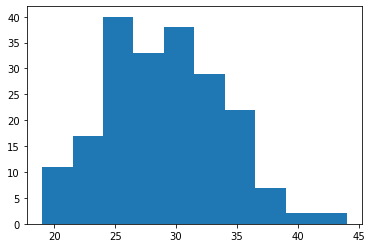

In [343]:
plt.hist(po24[po24.events=='home_run'].launch_angle)

In [344]:
df = pos[pos.player_name == 'Wilson, Weston']
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      246          64   38    16    3     10          14  0.308   
1        R      240          60   36    14    1      4          20  0.250   

     obp    slg    ops   woba  
0  0.422  0.596  1.018  0.428  
1  0.300  0.357  0.657  0.290

In [345]:
df[df.release_speed>=95][['release_speed','pitch_type','p_throws','events','game_date','inning']]

release_speed pitch_type p_throws     events   game_date  inning
178145           97.1         FF        R  strikeout  2023-09-30       5
178149           97.0         FF        R        NaN  2023-09-30       5
178151           96.7         FF        R        NaN  2023-09-30       5
178259           96.1         FF        R  field_out  2023-09-30       2
181696           95.2         FF        L        NaN  2023-09-05       9
...               ...        ...      ...        ...         ...     ...
214339           95.4         FF        R  field_out  2024-07-14       8
214669          103.4         FF        R     single  2024-07-12       9
214683          101.9         FF        R        NaN  2024-07-12       9
218812           96.2         FF        R  field_out  2024-06-09       6
218817           95.9         FF        R        NaN  2024-06-09       6

[72 rows x 6 columns]

In [346]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'], nphl[nphl.player_name == 'Schwarber, Kyle']])
ks95 = ks[ks.release_speed >= 95]
df = ks95
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      205          52   30    10  4.0    6.0        16.0  0.222   
1       2016       17           4    4     1  0.0    0.0         0.0  0.250   
2       2017      403         102   44    10  4.0   19.0        39.0  0.120   
3       2018      333          86   51    13  2.0   12.0        23.0  0.178   
4       2019      366         104   70    26  9.0   11.0        21.0  0.286   
5       2020      153          40   23     8  4.0    8.0         9.0  0.250   
6       2021      391         103   57    16  4.0   12.0        34.0  0.176   
7       2022      529         129   66    19  7.0   19.0        44.0  0.174   
8       2023      535         141   72    19  5.0   16.0        53.0  0.153   
9       2024      469         121   65    26  8.0   23.0        32.0  0.277   

     obp    slg    ops   woba  
0  0.308  0.489  0.797  0.340  
1  0.250  0.250  0.500  0.220  
2  0.284  0.301  0.586  0.269  
3  0.291  0.274  0.565  0.260  
4  0.375  0.637  1.012  0.414  
5  0.400  0.688  1.088  0.444  
6  0.272  0.330  0.602  0.268  
7  0.295  0.376  0.671  0.299  
8  0.248  0.331  0.579  0.256  
9  0.413  0.564  0.977  0.413

In [347]:
ks95.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

events  des
3                   field_out  306
12                  strikeout  271
13                       walk  126
11                     single   77
8                    home_run   47
0                      double   24
6   grounded_into_double_play   10
10                    sac_fly    7
2                 field_error    4
5                   force_out    4
7                hit_by_pitch    3
1                 double_play    2
4             fielders_choice    1
9                  pickoff_1b    1

Big 8th inning from Wheeler. <br>
Garrett Stubbs is our lefty bat when we need some insurance in the 9th? He hit a ball pretty well to move Casty to third with 2 outs. <br>
Brandon Marsh can come up to pinch hit.
<br> Probably put Marsh and Rojas into this game.0
<br> Marsh punches out.
<br> Jose in for the 9th.
<br> Bad

In [349]:
pp24[pp24.p_throws == 'L'].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

player_name  pitcher  game_pk
5         Strahm, Matt   621381       69
1       Alvarado, José   621237       67
4        Soto, Gregory   642397       43
7  Sánchez, Cristopher   650911       32
6       Suárez, Ranger   624133       28
2        Banks, Tanner   621383       23
0        Allard, Kolby   663465        7
3       Gilbert, Tyler   656457        6

In [350]:
df = ja = pps[pps.pitcher==621237]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2021     1045         246  129    42    5     42          68  0.213   
1       2022     1081         261  138    47    5     25          95  0.204   
2       2023      855         204  114    37    3     19          70  0.202   
3       2024     1074         262  168    50    6     29          64  0.216   

     obp    slg    ops   woba  
0  0.370  0.325  0.695  0.322  
1  0.287  0.317  0.605  0.272  
2  0.275  0.306  0.581  0.259  
3  0.305  0.346  0.652  0.291

Poorly caught 1-2 FC that landed in zone 7. Should have been a punchout.

Alvi just throws two more FCs, the second gets a whiff. 94 and 95. Nasty.

Oneil Cruz now.
<br> 0-0 SI 96, dirt
<br> 1-0 FC 96, other batter's box
<br> 2-0 SI 100, damn. Here it is, hit it.
<br> 2-1 SI 100, chopped up the middle. Sosa has no play at home.

## Game 2: Ortiz vs Sanchez
Offense does nothing Kellen was at a Union game.

## Game 3: Gonzales vs Phillips

In [356]:
mg_id = pos[pos.des.str.contains('Marco Gonzales')].pitcher.unique()[0]
mg = pd.concat([pos[pos.pitcher==mg_id],nphl[nphl.pitcher == mg_id]])
mg

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
198590         CH  2023-04-25           78.7           2.43           5.33   
198591         FF  2023-04-25           87.4           1.83           5.83   
198592         FF  2023-04-25           88.6           1.93           5.78   
198593         CU  2023-04-25           78.4           2.14           5.44   
198594         FC  2023-04-25           84.4           2.15           5.63   
...           ...         ...            ...            ...            ...   
337824         SI  2024-04-07           90.2           1.82           5.28   
337825         FC  2024-04-07           87.0           1.85           5.37   
337826         CH  2024-04-07           80.6           2.11           5.10   
337827         CH  2024-04-07           81.2           2.20           5.15   
337828         FC  2024-04-07           86.8           1.95           5.44   

          player_name  batter  pitcher     events      description  ...  \
198590  Stott, Bryson  681082   594835  strikeout  swinging_strike  ...   
198591  Stott, Bryson  681082   594835        NaN             foul  ...   
198592  Stott, Bryson  681082   594835        NaN             foul  ...   
198593  Stott, Bryson  681082   594835        NaN             ball  ...   
198594  Stott, Bryson  681082   594835        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
337824   Hays, Austin  669720   594835        NaN             ball  ...   
337825   Hays, Austin  669720   594835        NaN             ball  ...   
337826   Hays, Austin  669720   594835        NaN             ball  ...   
337827   Hays, Austin  669720   594835  field_out    hit_into_play  ...   
337828   Hays, Austin  669720   594835        NaN    called_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
198590  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198591  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198592  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198593  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198594  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
337824  0.882  1.254  1.589  2.048    0.2 -0.405  0.117   9.689  3.166      n  
337825  0.882  1.254  1.589  2.048    0.2 -0.405  0.117   9.689  3.166      n  
337826  0.882  1.254  1.589  2.048    0.2 -0.405  0.117   9.689  3.166      n  
337827  0.882  1.254  1.589  2.048    0.2 -0.405  0.117   9.689  3.166      n  
337828  0.882  1.254  1.589  2.048    0.2 -0.405  0.117   9.689  3.166      n  

[470 rows x 109 columns]

In [357]:
df = mg
res = phils_vs_mg = results('player_name')

In [358]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Stubbs, Garrett'
          ,'Pache, Cristian'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec       38           7    6   1.0  0.0    1.0         0.0   
1   Castellanos, Nick       53          16   14   6.0  0.0    0.0         2.0   
5       Harper, Bryce       27           8    5   1.0  0.0    1.0         2.0   
10    Pache, Cristian       33          12   11   6.0  0.0    1.0         0.0   
14    Schwarber, Kyle       40          11    6   3.0  1.0    3.0         2.0   
15      Sosa, Edmundo       21           7    5   2.0  1.0    0.0         2.0   
17    Stubbs, Garrett       13           5    5   1.0  0.0    0.0         0.0   
18       Turner, Trea       30           8    6   1.0  0.0    0.0         2.0   
19     Wilson, Weston        5           2    1   0.0  0.0    0.0         1.0   

       ba    obp    slg    ops   woba  
0   0.167  0.286  0.167  0.452  0.224  
1   0.375  0.375  0.500  0.875  0.377  
5   0.167  0.250  0.167  0.417  0.196  
10  0.545  0.583  0.636  1.220  0.530  
14  0.375  0.545  0.750  1.295  0.534  
15  0.286  0.286  0.857  1.143  0.465  
17  0.200  0.200  0.200  0.400  0.176  
18  0.125  0.125  0.250  0.375  0.157  
19  0.000  0.000  0.000  0.000  0.000

In [359]:
df = pp24
results('player_name')
tp = pps[pps.player_name == 'Phillips, Tyler']
pitch_mix(tp).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
3         SI           Sinker    180           93.7             2092.2   8.2   
4         ST          Sweeper    169           82.5             2414.8  10.4   
2         FF  4-Seam Fastball    108           92.7             2313.5   9.2   
1         CU        Curveball     83           81.0             2559.1   9.6   
0         CH         Changeup     38           85.7             1262.1  11.1   

   usage  
3   31.1  
4   29.2  
2   18.7  
1   14.4  
0    6.6

In [360]:
tp.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

pitch_type release_speed              release_spin_rate                 
                     count   mean   std             count     mean     std
0         CH            38  85.72  1.03                38  1262.13  123.50
1         CU            83  81.02  1.06                83  2559.12   60.60
2         FF           108  92.66  0.98               108  2313.46   71.97
3         SI           180  93.73  1.12               180  2092.23  108.13
4         ST           169  82.53  1.13               169  2414.83   76.42

In [361]:
82.56 - 1.03, 82.56 + 1.03

(81.53, 83.59)

In [362]:
2441.63 - 89.69, 2441.63 + 89.69

(2351.94, 2531.32)

In [363]:
94.45 - 0.82, 94.45 + 0.82

(93.63000000000001, 95.27)

In [364]:
2087.73 - 108.26, 2087.73 + 108.26

(1979.47, 2195.9900000000002)

In [365]:
df = bohm
bp = bohm_parks = results('home_team')
bp[bp.home_team == 'PIT']
# Bohm hits well at PNC Park

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts    ba  \
21       PIT      216          61   46    20  2.0    7.0         8.0  0.37   

      obp  slg    ops   woba  
21  0.443  0.5  0.943  0.413

In [366]:
po = pd.concat([pos[pos.player_name.isin(lineup)],nphl[nphl.player_name.isin(lineup)]])
po

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
94303          SI  2019-09-29           97.3          -2.47           5.74   
94304          SI  2019-09-29           97.4          -2.52           5.82   
94334          FF  2019-09-29           98.3          -2.28           5.80   
94335          SI  2019-09-29           97.7          -2.39           5.72   
94336          SI  2019-09-29           92.1          -2.34           5.74   
...           ...         ...            ...            ...            ...   
332869         SL  2015-08-21           84.8          -1.76           6.21   
332870         SI  2015-08-21           90.0          -1.70           6.19   
332871         SL  2015-08-21           84.9          -1.81           6.23   
332872         SL  2015-08-21           84.5          -1.75           6.34   
332873         SL  2015-08-21           86.4          -1.81           6.23   

          player_name  batter  pitcher     events      description  ...  \
94303   Harper, Bryce  547180   645261  field_out    hit_into_play  ...   
94304   Harper, Bryce  547180   645261        NaN             ball  ...   
94334   Harper, Bryce  547180   645261     single    hit_into_play  ...   
94335   Harper, Bryce  547180   645261        NaN    called_strike  ...   
94336   Harper, Bryce  547180   645261        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
332869   Turner, Trea  607208   346798  field_out    hit_into_play  ...   
332870   Turner, Trea  607208   346798        NaN    called_strike  ...   
332871   Turner, Trea  607208   346798  field_out    hit_into_play  ...   
332872   Turner, Trea  607208   346798        NaN  swinging_strike  ...   
332873   Turner, Trea  607208   346798        NaN    called_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
94303   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94304   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94334   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94335   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94336   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
332869  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
332870  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
332871  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
332872  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
332873  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[104556 rows x 109 columns]

In [367]:
po[po.p_throws == 'L']

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
94388          CU  2019-09-29           72.1           3.10           3.79   
94394          CU  2019-09-29           73.4           3.08           3.74   
94396          CU  2019-09-29           72.7           3.30           3.70   
94404          CU  2019-09-29           73.3           3.23           3.74   
94405          CU  2019-09-29           74.7           3.12           3.79   
...           ...         ...            ...            ...            ...   
332848         FF  2015-08-28           93.0           3.17           6.05   
332865         CH  2015-08-22           80.6           2.43           5.50   
332866         CH  2015-08-22           78.3           2.51           5.57   
332867         FF  2015-08-22           89.7           2.61           5.56   
332868         FF  2015-08-22           89.9           2.58           5.64   

          player_name  batter  pitcher     events              description  \
94388   Harper, Bryce  547180   572383  strikeout          swinging_strike   
94394   Harper, Bryce  547180   572383        NaN          swinging_strike   
94396   Harper, Bryce  547180   572383        NaN            called_strike   
94404   Harper, Bryce  547180   572383        NaN                     ball   
94405   Harper, Bryce  547180   572383        NaN                     ball   
...               ...     ...      ...        ...                      ...   
332848   Turner, Trea  607208   543045        NaN            called_strike   
332865   Turner, Trea  607208   462945  strikeout  swinging_strike_blocked   
332866   Turner, Trea  607208   462945        NaN                     foul   
332867   Turner, Trea  607208   462945        NaN                     ball   
332868   Turner, Trea  607208   462945        NaN          swinging_strike   

        ...    w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP  \
94388   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94394   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94396   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94404   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94405   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...    ...   
332848  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
332865  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
332866  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
332867  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
332868  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   

       source  
94388     NaN  
94394     NaN  
94396     NaN  
94404     NaN  
94405     NaN  
...       ...  
332848      n  
332865      n  
332866      n  
332867      n  
332868      n  

[29820 rows x 109 columns]

In [368]:
pitch_mix_by_group(po,'p_throws')

p_throws  count  release_speed  release_spin_rate   zone  usage
1        R  74736         89.195           2248.743  9.404   71.5
0        L  29820         87.833           2196.171  9.251   28.5

In [369]:
pitch_mix(mg).round(2)

pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
3         FF  4-Seam Fastball    168          89.37            2133.38   8.28   
0         CH         Changeup    129          80.60            2175.88  11.03   
1         CU        Curveball     88          78.38            2273.44   8.84   
2         FC           Cutter     68          85.79            2100.81   8.79   
4         SI           Sinker     17          89.75            2125.35   7.76   

   usage  
3   35.7  
0   27.4  
1   18.7  
2   14.5  
4    3.6

In [370]:
mg.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

pitch_type release_speed              release_spin_rate                 
                     count   mean   std             count     mean     std
0         CH           129  80.60  1.63               129  2175.88  110.54
1         CU            88  78.38  1.69                88  2273.44  140.96
2         FC            68  85.79  1.16                68  2100.81  133.16
3         FF           168  89.37  1.09               168  2133.38  118.67
4         SI            17  89.75  0.69                17  2125.35   54.21

### Tyler Phillips might be legit.

He pitched to contact today, but it was lots of soft contatct. Just three punchouts and the walk, only allowed 4 hits though.

His velo was down pretty much across the board from his first two starts. He was aggressive with the breaking stuff, throwing ST and CU 56% of the time. The average EV on bip against his ST was 71.4 mph, the hardest hit ball was just 81.5 mph off the bat. What a day for his ST! He got 6 whiffs on it, 38% of the swings on that pitch. He also threw it for a called strike 6 times.

.270 xBA for the Buccos, that is the highest of any appearance by Phillips. Well that is probably just based off launch_speedangle.

Ricky Bo comments on Tyler Phillips using both sides of the plate, also on him doing his job.

Pache bunting in the top of the 7th. Nice. He is not able to get it down. How consistently did pitchers drop the bunt? Damn, that is an odyssey. Idk if I am high or not. I wish I felt it more. Kind of a letdown on a Sunday afternoon, huh.

Bad call Doug Eddings. Overturned. Trea Turner comes up with an RBI by punching a breaking ball through the 4/3 hole into RF.

Now Harper gets to bat with one out and runners on the corners. Put this game to bed, Bryce.

Harper vs Nicolas Top 7, 1+3, 1 out
<br> 0-0 90 SL X - Harper pulls the breaking ball into the hole, only play is to first. RBI.

Bohm vs Nicolas Top 7, 2, 2 out
<br> 0-0 91 SL B
<br> 1-0 97 FF B
<br> 2-0 SL X - Bohm pulls the breaking ball through the 5-6 hole, Turner scores.
EV = 90.9 mph, LA = 5 degrees, Dist = 102

Skipping Castelanos at bat

Bottom 7: Strahm and Marte hot in the 'pen. I think you got to have Strahm here. Well it is Marte. Blue fucking socks.

**Tellez vs Marte, Bot 7, 0, 0 out**
<br> 0-0 97 FF B 13 low
<br> 1-0 95 SL S 4
<br> 1-1 98 FF B 
<br> 2-1 85 SL B
<br> 3-1 96 FF S 4 foul
<br> 3-2 98 FF S 13 low but called K
<br> Tellez backwards K on a FF that looked a little low.

**Hayes vs Marte**
<br> 0-0 99 FF B 13 inside
<br> 1-0 87 SL B 13 dirt
<br> 2-0 96 SI S 13 foul tip
<br> 2-1 98 SI B 11 low 
<br> 3-1 98 SI S 13 foul
<br> 3-2 97 SI X 1 single the other way
<br> Hayes battles and muscles a sinker up in the zone out to right, Casty charges but traps it.
<br> EV = 87.8, LA = 19, Dist = 250

**Palacios vs Marte**
<br> 0-0 87 SL B 13
<br> 1-0 85 SL B 13 low
<br> 2-0 98 FF B 14 inside
<br> 3-0 97 FF S 9
<br> 3-1 96 FF X 6 L8
<br> Palacios hits one sharply but Pache has time to run it down. Pache does not know how many outs there are?
<br> EV = 103.5, LA = 14, Dist = 307

**Joe vs Marte**
<br> 0-0 98 SI S 5
<br> 0-1 98 FF B 12 outside\
<br> 1-1 86 SL X 6 F9
<br> Weak fly ball off the end of the bat that Casty charges and gets to.
<br> EV = 71.7, LA = 37, Dist = 233

Top 8

**Sosa vs Fleming**
<br> 0-0 83 CH 7 S foul
<br> 0-1 87 FC 13 S foul
<br> 0-2 83 CH 12 B nowhere close
<br> 1-2 87 FC 4 S foul
<br> 1-2 84 CH 12 B low
<br> 2-2 83 CH 12 X 5-3
<br> Sosa goes after a changeup that fell off the table. Rolls it straight to Ke'Bryan Hayes 
<br> EV = 96.3, LA = 1, Dist = 42 

**Wilson vs Fleming**
<br> 0-0 91 SI 12 B outside
<br> 1-0 91 SI 12 X single to center
<br> Weston Wilson takes a sinker that was off the plate away and just floats it out to CF
<br> EV = 88.4, LA = 13, Dist = 216 

**Stubbs vs Fleming**
<br> 0-0 90 SI 3 S
<br> 0-1 90 SI 9 S foul 
<br> 0-2 90 SI 6 X single to right
<br> Garrett Stubbs puts a nice swing on a sinker and drops it in right field
<br> EV = 69, LA = 22, Dist = 200

**Pache vs Fleming** Can Pache do it?
<br> 0-0 87 FC 11 B inside
<br> 1-0 83 CH 13 B low and in
<br> 2-0 83 CH 14 B well off
<br> 3-0 89 SI 8 X flyout to right center, near the track
<br> Pache swings at a 3-0 sinker and lifts it out to right center, pretty well hit. Moves Wilson who could have scored if he went first to third on the Stubbs single
<br> EV = 100.8, LA = 36, Dist = 363 

**Schwarber vs Fleming**
<br> 0-0 88 FC 13 B well off
<br> 1-0 90 SI 14 B almost hit his dick
<br> 2-0 90 SI 14 B inside
<br> 3-0 91 SI 14 B well in
<br> Schwarber four pitch walk. I mean, great at bat but Fleming was not super close. Composure from 12.

**Turner vs Fleming** Bases loaded, 2 outs.
<br> 0-0 83 CH 13 S Turner thought it was high
<br> 0-1 82 CH 14 B in the other batters box
<br> 1-1 83 CH 9 S foul
<br> 1-2 83 CH 14 B in the dirt, was always below the zone.
<br> 2-2 83 CH 14 S man that was just a good pitch, off the plate but 7 had to swing
<br> 2-2 84 CH 14 B in the dirt, good take
<br> 3-2 83 CH 8 X 5-3
<br> Hit hard but right at Ke'Bryan Hayes who makes a nice play.
EV = 92.8, LA = 4, Dist = 83

Bot 8: Here comes Jose.

**Bart vs Alvarado**
<br> 0-0 96 SI 3 S
<br> 0-1 97 SI 4 X single through the 5-6 hole
<br> Bart pulls a sinker that caught too much of the plate past a diving Turner.
<br> EV = 111, LA = 4, Dist = 95 

**McCutchen vs Alvarado**
<br> 0-0 97 SI 11 B nearly hits Cutch in the face
<br> 1-0 97 SI 1 S whiff
<br> 1-1 98 SI 1 S whiff
<br> 1-2 98 SI 1 X P5
<br> McCutchen skies one, caught at the net by Bohm in foul territory.
<br> EV = 93.9, LA = 70, Dist = 117

**Reynolds vs Alavarado**
<br> 0-0 93 FC 7 S
<br> 0-1 99 SI 1 S
<br> 0-2 94 FC 1 S whiff
<br> Strike one, Strike two, Good Luck! Nasty stuff from Jose.

**Cruz vs Alvarado**
<br> 0-0 99 SI 7 S foul
<br> 0-1 99 SI 3 B just inside
<br> 1-1 94 FC 13 S whiff
<br> 1-2 93 FC 11 B outside
<br> 2-2 94 FC 13 S whiff, in the dirt
<br> Nice pitching from Jose, nasty FCs after establishing the fastball early.

Top 9:

**Harper vs Fleming**
<br> 0-0 77 CU 8 S whiff
<br> 0-1 90 SI 9 X 3U
<br> Harper rolls over a sinker below the zone
<br> EV = 75.4, LA = -29, Dist = 5

**Bohm vs Fleming** 
<br> 0-0 87 FC 14 B dirt
<br> 1-0 83 CH 9 S
<br> 1-1 79 CU 11 B dirt 
<br> 2-1 87 FC 1 S foul
<br> 2-2 76 CU 9 X F7
<br> Bohm pulls a backdoor curveball out to left center but playable for Reynolds
<br> EV = 97.2, LA = 38, Dist = 366

**Castellanos vs Fleming**
<br> 0-0 84 CH 14 B low
<br> 1-0 83 CH 14 S foul
<br> 1-1 76 CU 9 S foul
<br> 1-2 84 CH 9 S foul
<br> 1-2 76 CU 8 X home run
<br> Nick Castellanos goes down and pulls that breaking ball over the left field fence. It's always a homer.
<br> EV = 104.3, LA = 34, Dist = 409

**Sosa vs Fleming**
<br> 0-0 84 CH 14 X E6
<br> Sosa pulls one out to Cruz who boots it.
<br> EV = 96.4, LA = -6, Dist = 14

**Wilson vs Fleming**
<br> 0-0 89 SI 14 B outside
<br> 1-0 84 CH 14 X 6-4
<br> Wilson rolls a changeup out to Cruz who flips to second
<br> EV = 65.5, LA = -21, Dist = 6



Bot 9: Here comes Jose Ruiz!

**Gonzales vs Ruiz**
<br> 0-0 96 SI 4 X 6-3
<br> Gonzales bounces the first pitch out to Turner
<br> EV = 90.7, LA = -18, Dist = 8

**Tellez vs Ruiz**
<br> 0-0 97 FF 2 S
<br> 0-1 93 FF 14 B nowhere close
<br> 1-1 87 CU 8 S foul
<br> 1-2 87 CU 14 X P6
<br> Tellez chases a curveball and hits it off the floor. Spinner that Turner runs out onto the grass to snag.
<br> EV = 67.3, LA = 37, Dist = 204

**Hayes vs Ruiz**
<br> 0-0 97 FF 11 B low and in
<br> 1-0 96 SI 4 X L6
<br> Hayes hits one hard but Turner is able to make a leaping catch.
<br> EV = 97.4, LA = 9, Dist = 197

# I did some silly charting for the last three innings of this one.

# How many curveballs did Aaron Nola throw at the top of the zone?
Not very many, especially this year. He has only given up one hit on them so far.

In [386]:
df = nola[(nola.pitch_type.isin(['KC','CU']))
          &(nola.zone.isin([1,2,3,11,12]))
         ]
x = results('game_year')

In [387]:
y = pitch_mix_by_group(nola,'game_year').sort_values(by='game_year',ascending=False)

In [388]:
z = x.merge(y,on='game_year',suffixes = ('_x','_y'))
z['share'] = z.pitches/z['count']
z[['game_year','pitches','count','share']]

game_year  pitches  count     share
0       2015       42   1117  0.037601
1       2016       70   1796  0.038976
2       2017       89   2665  0.033396
3       2018      116   3212  0.036115
4       2019      138   3332  0.041417
5       2020       28   1148  0.024390
6       2021       70   2971  0.023561
7       2022       71   3459  0.020526
8       2023       69   3431  0.020111
9       2024       37   3275  0.011298

# Could Taijuan Walker throw more front hip sinkers?
Holy shit, yeah.
<br> He has thrown 16 this season, all have been called strikes. 6 of them have been for a backwards K.

In [390]:
tai = pp24[pp24.player_name == 'Walker, Taijuan']
fhs = tai[(tai.pitch_type == 'SI')
          &(tai.stand == 'L')
          &(tai.zone.isin([3,6,9]))
         ]
df = fhs
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2024       24           7    1     1  0.0    0.0           6  0.143   

     obp    slg    ops   woba  
0  0.143  0.143  0.286  0.126

# Max EV
Schwarber single off of Bobby Miller on 7/9 - 115.6 mph
<br> Schwarber home run off of Sale on third game of year, 114.4 mph.

In [392]:
po24.sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

game_date        player_name  launch_speed    events
204613  2024-10-05    Schwarber, Kyle         115.8  home_run
215035  2024-07-09    Schwarber, Kyle         115.6    single
209336  2024-08-25    Schwarber, Kyle         115.4       NaN
226694  2024-04-10    Schwarber, Kyle         115.2    single
226941  2024-04-09    Schwarber, Kyle         115.1       NaN
...            ...                ...           ...       ...
228371  2024-03-29  Castellanos, Nick           NaN       NaN
228372  2024-03-29     Realmuto, J.T.           NaN       NaN
228374  2024-03-29     Realmuto, J.T.           NaN       NaN
228376  2024-03-29      Harper, Bryce           NaN       NaN
228378  2024-03-29    Schwarber, Kyle           NaN       NaN

[24356 rows x 4 columns]

In [393]:
po24[po24.events=='home_run'].sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

game_date      player_name  launch_speed    events
204613  2024-10-05  Schwarber, Kyle         115.8  home_run
212099  2024-08-04  Schwarber, Kyle         114.9  home_run
228088  2024-03-31  Schwarber, Kyle         114.4  home_run
208109  2024-09-03  Schwarber, Kyle         114.4  home_run
207120  2024-09-10  Schwarber, Kyle         113.9  home_run
...            ...              ...           ...       ...
214345  2024-07-14     Turner, Trea          95.2  home_run
217754  2024-06-17       Bohm, Alec          95.2  home_run
207940  2024-09-04    Clemens, Kody          93.7  home_run
215006  2024-07-09     Turner, Trea          92.7  home_run
208524  2024-08-30    Stott, Bryson          92.7  home_run

[201 rows x 4 columns]

# Max Pitch Velo

In [395]:
pp24['velo'] = pp24.release_speed.fillna(0)
pp24.sort_values(by='velo',ascending=False)

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
227172         SI  2024-03-29          101.0           1.24           6.71   
226959         SI  2024-03-30          100.8           2.19           5.86   
203352         SI  2024-10-08          100.8           1.19           6.34   
211407         SI  2024-08-03          100.5           1.19           6.38   
225038         SI  2024-04-13          100.5           2.24           5.74   
...           ...         ...            ...            ...            ...   
213536         EP  2024-07-14           37.8          -1.26           6.61   
213526         EP  2024-07-14           35.9          -0.93           6.59   
213532         EP  2024-07-14           35.6          -0.99           6.63   
213550         EP  2024-07-14           35.6          -1.06           6.80   
218434        NaN  2024-06-03            NaN            NaN            NaN   

            player_name  batter  pitcher     events    description  ...  \
227172   Alvarado, José  671739   621237        NaN           foul  ...   
226959    Soto, Gregory  621566   642397        NaN           foul  ...   
203352   Alvarado, José  668901   621237        NaN           ball  ...   
211407   Alvarado, José  670042   621237        NaN           foul  ...   
225038    Soto, Gregory  665833   642397        NaN  called_strike  ...   
...                 ...     ...      ...        ...            ...  ...   
213536  Stubbs, Garrett  668832   596117        NaN  called_strike  ...   
213526  Stubbs, Garrett  669127   596117        NaN   blocked_ball  ...   
213532  Stubbs, Garrett  668832   596117     single  hit_into_play  ...   
213550  Stubbs, Garrett  668709   596117        NaN           ball  ...   
218434    Wheeler, Zack  656555   554430  field_out  hit_into_play  ...   

        runSB  runCS   R/PA    R/W   cFIP                 group       date  \
227172    0.2 -0.405  0.117  9.689  3.166   Alvarado, José - SI 2024-03-29   
226959    0.2 -0.405  0.117  9.689  3.166    Soto, Gregory - SI 2024-03-30   
203352    0.2 -0.405  0.117  9.689  3.166   Alvarado, José - SI 2024-10-08   
211407    0.2 -0.405  0.117  9.689  3.166   Alvarado, José - SI 2024-08-03   
225038    0.2 -0.405  0.117  9.689  3.166    Soto, Gregory - SI 2024-04-13   
...       ...    ...    ...    ...    ...                   ...        ...   
213536    0.2 -0.405  0.117  9.689  3.166  Stubbs, Garrett - EP 2024-07-14   
213526    0.2 -0.405  0.117  9.689  3.166  Stubbs, Garrett - EP 2024-07-14   
213532    0.2 -0.405  0.117  9.689  3.166  Stubbs, Garrett - EP 2024-07-14   
213550    0.2 -0.405  0.117  9.689  3.166  Stubbs, Garrett - EP 2024-07-14   
218434    0.2 -0.405  0.117  9.689  3.166                   NaN 2024-06-03   

       month       my   velo  
227172     3   2024-3  101.0  
226959     3   2024-3  100.8  
203352    10  2024-10  100.8  
211407     8   2024-8  100.5  
225038     4   2024-4  100.5  
...      ...      ...    ...  
213536     7   2024-7   37.8  
213526     7   2024-7   35.9  
213532     7   2024-7   35.6  
213550     7   2024-7   35.6  
218434     6   2024-6    0.0  

[24121 rows x 113 columns]

In [396]:
pp24[pp24.events=='strikeout'].sort_values(by='release_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

game_date            player_name  launch_speed     events
227106  2024-03-29         Alvarado, José           NaN  strikeout
203365  2024-10-08         Alvarado, José           NaN  strikeout
213971  2024-07-11         Alvarado, José           NaN  strikeout
221771  2024-05-08  Domínguez, Seranthony           NaN  strikeout
225729  2024-04-08          Soto, Gregory           NaN  strikeout
...            ...                    ...           ...        ...
211323  2024-08-03          Allard, Kolby           NaN  strikeout
208455  2024-08-25          Allard, Kolby           NaN  strikeout
204489  2024-09-24          Allard, Kolby           NaN  strikeout
205143  2024-09-19          Allard, Kolby           NaN  strikeout
205799  2024-09-14          Allard, Kolby           NaN  strikeout

[1467 rows x 4 columns]

# Max xBA on out
Pache long running catch on Jesus Sanchez in Miami on Mother's Day
<br> Or Brandon Marsh charging in on a sinking liner off the bat of Freddie Freeman.

In [398]:
pp24[(pp24.type=='X')
     &(~pp24.events.isin(['single','double','triple','home_run']))
    ].sort_values(by='estimated_ba_using_speedangle',ascending=False
                 )[['hit_location','pitch_type','launch_speed','launch_angle','hit_distance_sc'
                   ,'estimated_ba_using_speedangle','events','game_date','player_name']]

hit_location pitch_type  launch_speed  launch_angle  hit_distance_sc  \
213261           9.0         KC          86.4          17.0            274.0   
210799           8.0         FF         111.6          20.0            375.0   
207807           8.0         FF         108.4          11.0            309.0   
221365           8.0         FF         105.0          28.0            383.0   
214099           8.0         FC         102.7          13.0            295.0   
...              ...        ...           ...           ...              ...   
217787           9.0         FC           NaN           NaN              NaN   
217871           3.0         SL           NaN           NaN              NaN   
218061           9.0         SL           NaN           NaN              NaN   
218434           6.0        NaN           NaN           NaN              NaN   
226944           2.0         FF           NaN           NaN              NaN   

        estimated_ba_using_speedangle     events   game_date       player_name  
213261                          0.957    sac_fly  2024-07-19       Nola, Aaron  
210799                          0.954  field_out  2024-08-07   Phillips, Tyler  
207807                          0.937  field_out  2024-08-30        Ruiz, José  
221365                          0.934  field_out  2024-05-12  Kerkering, Orion  
214099                          0.934  field_out  2024-07-10    Alvarado, José  
...                               ...        ...         ...               ...  
217787                            NaN  field_out  2024-06-09   Walker, Taijuan  
217871                            NaN  field_out  2024-06-09     Hoffman, Jeff  
218061                            NaN  field_out  2024-06-08        Ruiz, José  
218434                            NaN  field_out  2024-06-03     Wheeler, Zack  
226944                            NaN  field_out  2024-03-30       Nola, Aaron  

[2829 rows x 9 columns]

# Jose Alvarado L-R Splits

In [400]:
df = ja[ja.game_year==2024]
results('stand')

stand  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba    obp  \
0     L      278          76   53     9    2      5          18  0.127  0.184   
1     R      796         186  115    41    4     24          46  0.256  0.355   

     slg    ops   woba  
0  0.225  0.410  0.185  
1  0.400  0.755  0.334

Alvarado and Strahm are going to swap roles. <br>
Strahm is not just a funky lefty, he is a legit closer. <br>
Remember when Ranger was a shutdown closer? Is that a radical play? <br>
<br>ZW
<br>AN
<br>CS - Sanchez also bad in his one postseason start but he got unlucky. That game was lost by Craig Kimbrel.
<br>Rob does not let Ranger take the Braves for the third time through the order in the NLDS but does in the NLCS. Game 7 failure by Ranger.

As Gabe Kapler says, "He's presenting beautifully."

In [403]:
# This is the first time Bryce Harper has ever played in this ballpark.
# Bryce Harper just hit a home run in his first ever at bat at Target Field.
# Nick Castellanos will have played here a lot.
df = po24
res24 = results('player_name')

In [404]:
h = hist24 = pd.DataFrame()
for pn in df.player_name.unique().tolist():
    x = pd.concat(
        [df[(df.player_name == pn)
           &(df.home_team == 'MIN')
          ]
         ,nphl[(nphl.player_name == pn)
               &(nphl.home_team == 'MIN')
              ]
        ]
    )
    h =  pd.concat([h,x])
    print(pn)
h

Harper, Bryce
Turner, Trea
Schwarber, Kyle
Marsh, Brandon
Wilson, Weston
Stott, Bryson
Realmuto, J.T.
Bohm, Alec
Castellanos, Nick
Clemens, Kody
Sosa, Edmundo
Hays, Austin
Rojas, Johan
Stubbs, Garrett
Kennedy, Buddy
Stevenson, Cal
Garcia, Aramis
Pache, Cristian
Marchán, Rafael
Merrifield, Whit
Dahl, David


pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
213371         CH  2024-07-24           88.2          -1.99           6.15   
213372         SL  2024-07-24           86.1          -2.13           6.08   
213373         FF  2024-07-24           94.7          -1.43           6.43   
213374         FF  2024-07-24           95.2          -1.39           6.25   
213375         FF  2024-07-24           94.7          -1.62           6.25   
...           ...         ...            ...            ...            ...   
79679          SL  2021-05-03           86.7           1.75           6.30   
79680          SL  2021-05-03           86.3           1.84           6.28   
79681          FF  2021-05-03           93.8           1.81           6.26   
79682          SL  2021-05-03           86.0           1.78           6.30   
79683          SL  2021-05-03           85.1           1.96           6.37   

          player_name  batter  pitcher     events      description  ...  \
213371  Harper, Bryce  547180   701581  strikeout    called_strike  ...   
213372  Harper, Bryce  547180   701581        NaN             foul  ...   
213373  Harper, Bryce  547180   701581        NaN    called_strike  ...   
213374  Harper, Bryce  547180   701581        NaN             ball  ...   
213375  Harper, Bryce  547180   701581        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
79679     Dahl, David  621311   663399        NaN             ball  ...   
79680     Dahl, David  621311   663399        NaN             foul  ...   
79681     Dahl, David  621311   663399        NaN             ball  ...   
79682     Dahl, David  621311   663399        NaN  swinging_strike  ...   
79683     Dahl, David  621311   663399        NaN    called_strike  ...   

          wHR  runSB  runCS   R/PA    R/W   cFIP       date month      my  \
213371  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-24   7.0  2024-7   
213372  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-24   7.0  2024-7   
213373  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-24   7.0  2024-7   
213374  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-24   7.0  2024-7   
213375  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-24   7.0  2024-7   
...       ...    ...    ...    ...    ...    ...        ...   ...     ...   
79679   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
79680   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
79681   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
79682   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
79683   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   

       source  
213371    NaN  
213372    NaN  
213373    NaN  
213374    NaN  
213375    NaN  
...       ...  
79679       n  
79680       n  
79681       n  
79682       n  
79683       n  

[2419 rows x 112 columns]

In [405]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
         ]
df = h
tgt_field = results('player_name')
tgt_field[tgt_field.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec       45          12    8   3.0  0.0    2.0         2.0   
1   Castellanos, Nick      677         176  133  45.0  7.0   11.0        32.0   
4       Harper, Bryce       52          13   10   2.0  1.0    0.0         3.0   
9      Realmuto, J.T.       89          22   17   6.0  0.0    2.0         2.0   
10       Rojas, Johan       29           8    5   1.0  0.0    1.0         2.0   
11    Schwarber, Kyle      105          26   12   3.0  0.0    1.0        12.0   
12      Stott, Bryson       43          11    9   2.0  0.0    0.0         2.0   
14       Turner, Trea      150          38   30   9.0  2.0    4.0         4.0   
15     Wilson, Weston       18           4    3   0.0  0.0    0.0         1.0   

       ba    obp    slg    ops   woba  
0   0.300  0.417  0.500  0.917  0.397  
1   0.278  0.318  0.500  0.818  0.343  
4   0.154  0.154  0.462  0.615  0.254  
9   0.316  0.409  0.368  0.778  0.352  
10  0.167  0.250  0.167  0.417  0.196  
11  0.125  0.154  0.125  0.279  0.128  
12  0.182  0.182  0.182  0.364  0.160  
14  0.273  0.342  0.485  0.827  0.349  
15  0.000  0.000  0.000  0.000  0.000

In [406]:
h[h.player_name=='Turner, Trea'].groupby('away_team',as_index=False).agg({'des' : 'count'})

away_team  des
0       LAD   32
1       PHI   47
2       WSH   71

In [407]:
bo_id = nphl[nphl.des.str.contains('Ober')].pitcher.unique()#[0]
#bo_id.
nphl[nphl.des.str.contains('Ober')].groupby(['player_name','home_team','away_team'
              ,'pitcher','batter'],as_index=False).agg({'des' : 'max'})

player_name home_team away_team  pitcher  batter  \
0  Anderson, Chase       MIL       PHI   502624  519085   
1     Segura, Jean       SEA       COL   623184  516416   

                                                 des  
0            Brett Oberholtzer strikes out swinging.  
1  Jean Segura grounds into a double play, pitche...

# MIN (A) 722-724
## Game 1: Ober vs Suarez

## Game 2: Woods Richardson vs Wheeler

In [410]:
# Dude this Jhoan Duran has crazy stuff but cannot find the zone.

In [411]:
# How about that.

In [412]:
# Bohm made a nice play to get out of a jam in the 8th. Hoffman and Soto.

In [413]:
df = po24[po24.launch_speed >= 100]
results('player_name')

player_name  pitches  plate_apps    bip  hits   hrs  walks  \
0          Bohm, Alec      141       134.0  134.0  69.0  12.0    0.0   
1   Castellanos, Nick      120       109.0  109.0  67.0  18.0    0.0   
2       Clemens, Kody       21        18.0   18.0  14.0   4.0    0.0   
3         Dahl, David        4         4.0    4.0   4.0   2.0    0.0   
4      Garcia, Aramis        1         1.0    1.0   0.0   0.0    0.0   
5       Harper, Bryce      150       138.0  138.0  83.0  26.0    0.0   
6        Hays, Austin       18        13.0   13.0   8.0   1.0    0.0   
7      Kennedy, Buddy        2         2.0    2.0   0.0   0.0    0.0   
8     Marchán, Rafael        5         5.0    5.0   5.0   3.0    0.0   
9      Marsh, Brandon       87        76.0   76.0  46.0  12.0    0.0   
10   Merrifield, Whit        5         5.0    5.0   3.0   2.0    0.0   
11    Pache, Cristian       20        18.0   18.0   9.0   0.0    0.0   
12     Realmuto, J.T.       97        84.0   84.0  51.0  12.0    0.0   
13       Rojas, Johan       56        51.0   51.0  22.0   3.0    0.0   
14    Schwarber, Kyle      195       163.0  163.0  97.0  37.0    0.0   
15      Sosa, Edmundo       52        45.0   45.0  28.0   6.0    0.0   
16     Stevenson, Cal        2         2.0    2.0   1.0   0.0    0.0   
17      Stott, Bryson       72        64.0   64.0  35.0   9.0    0.0   
18    Stubbs, Garrett        7         0.0    0.0   0.0   0.0    0.0   
19       Turner, Trea      123       106.0  106.0  66.0  19.0    0.0   
20     Wilson, Weston       26        21.0   21.0  13.0   3.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0          0.0  0.515  0.515  1.007  1.522  0.642  
1          0.0  0.615  0.615  1.284  1.899  0.799  
2          0.0  0.778  0.778  1.778  2.556  1.067  
3          0.0  1.000  1.000  2.750  3.750  1.558  
4          0.0  0.000  0.000  0.000  0.000  0.000  
5          0.0  0.601  0.601  1.319  1.920  0.807  
6          0.0  0.615  0.615  1.077  1.692  0.718  
7          0.0  0.000  0.000  0.000  0.000  0.000  
8          0.0  1.000  1.000  3.000  4.000  1.656  
9          0.0  0.630  0.605  1.301  1.907  0.781  
10         0.0  0.600  0.600  1.800  2.400  0.996  
11         0.0  0.500  0.500  0.611  1.111  0.482  
12         0.0  0.607  0.607  1.190  1.798  0.760  
13         0.0  0.431  0.431  0.725  1.157  0.492  
14         0.0  0.595  0.595  1.393  1.988  0.833  
15         0.0  0.622  0.622  1.222  1.844  0.777  
16         0.0  0.500  0.500  1.000  1.500  0.627  
17         0.0  0.547  0.547  1.094  1.641  0.693  
18         0.0    NaN    NaN    NaN    NaN    NaN  
19         0.0  0.623  0.623  1.264  1.887  0.797  
20         0.0  0.619  0.619  1.286  1.905  0.801

In [414]:
df[df.player_name == 'Stubbs, Garrett']

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
207138         SI  2024-09-09           89.1           1.57           5.74   
209340         FF  2024-08-25           91.2           1.20           6.58   
213485         FC  2024-07-24           89.7          -2.60           5.95   
214280         FF  2024-07-14           90.8          -2.12           5.90   
214542         SI  2024-07-13           91.9           1.33           5.88   
218349         ST  2024-06-13           83.2          -2.37           5.42   
224901         FF  2024-04-24           93.9          -1.37           5.77   

            player_name  batter  pitcher events description  ...    w3B  \
207138  Stubbs, Garrett  596117   641302    NaN        foul  ...  1.589   
209340  Stubbs, Garrett  596117   519293    NaN        foul  ...  1.589   
213485  Stubbs, Garrett  596117   663485    NaN        foul  ...  1.589   
214280  Stubbs, Garrett  596117   683155    NaN        foul  ...  1.589   
214542  Stubbs, Garrett  596117   518397    NaN        foul  ...  1.589   
218349  Stubbs, Garrett  596117   656557    NaN        foul  ...  1.589   
224901  Stubbs, Garrett  596117   608371    NaN        foul  ...  1.589   

          wHR  runSB  runCS   R/PA    R/W   cFIP       date month      my  
207138  2.048    0.2 -0.405  0.117  9.689  3.166 2024-09-09     9  2024-9  
209340  2.048    0.2 -0.405  0.117  9.689  3.166 2024-08-25     8  2024-8  
213485  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-24     7  2024-7  
214280  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-14     7  2024-7  
214542  2.048    0.2 -0.405  0.117  9.689  3.166 2024-07-13     7  2024-7  
218349  2.048    0.2 -0.405  0.117  9.689  3.166 2024-06-13     6  2024-6  
224901  2.048    0.2 -0.405  0.117  9.689  3.166 2024-04-24     4  2024-4  

[7 rows x 111 columns]

## Game 3: Okert vs Nola
I guess Soto blew this game in the 9th?
Let us try to find out.

In [416]:
game = pps[pps.game_date == '2024-07-24']
game.groupby(['player_name'
              ,'pitcher'
              ,'inning'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'at_bat_number' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'sum'
                   ,'hit_distance_sc' : 'sum'
                  }).sort_values(by='inning').round(1)

player_name  pitcher  inning  des  at_bat_number  release_speed  \
2       Nola, Aaron   605400       1    9              4           85.5   
3       Nola, Aaron   605400       2   10              4           87.6   
4       Nola, Aaron   605400       3   13              3           83.2   
5       Nola, Aaron   605400       4   26              5           87.3   
6       Nola, Aaron   605400       5    9              4           86.7   
7       Nola, Aaron   605400       6   31              6           87.2   
1  Kerkering, Orion   689147       7   22              4           91.2   
9      Strahm, Matt   621381       7    9              3           90.7   
0     Hoffman, Jeff   656546       8   21              4           92.3   
8     Soto, Gregory   642397       9   12              3           91.6   

   release_spin_rate  launch_speed  hit_distance_sc  
2             2423.0         338.0            672.0  
3             2364.3         362.5           1242.0  
4             2532.2         275.9            496.0  
5             2332.6         580.8            936.0  
6             1987.7         336.5            259.0  
7             2405.5         568.7            852.0  
1             2592.8         417.7            761.0  
9             2462.7         286.3            630.0  
0             2341.5         695.8           1236.0  
8             2333.9         180.6            170.0

# CLE (H) 726-728
## Game 1: Lively vs Sanchez
Fun night at the ballpark with my older brother Peter. Great seats bought by Pete. We had a nice conversation. Phillies lost. <br>

## Game 2: Carrasco vs Phillips
Phillips CGSO. Stud. I was at the Union vs Charlotte FC Leagues Cup game with Pete and Seana. <br>

## Game 3: Cantillo vs Allard

# NYY (H) 729-731
## Game 1: Gil vs Wheeler
Wheeler gets hit hard and the PHils drop game 1.

## Game 2: Wilson vs Nola
Phils blow it in extras.

## Game 3: Cortes vs Sanchez
Bad. Bad. Bad.

# June 2024

## Run Functions

In [421]:
%run "Baseball Functions.ipynb"

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


## Imports and Data

In [423]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# MIL (H) 63-65

## Game 1: Koenig vs Wheeler
Rhys return. Sad.

In [425]:
koenig = pd.read_csv('koenig.csv')

In [426]:
rhys = nphl[nphl.player_name == 'Hoskins, Rhys']
rhys

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
337914         FF  2024-06-01           97.5           2.56           5.79   
337915         CH  2024-06-01           89.7           2.27           5.73   
337916         CH  2024-06-01           90.6           2.16           5.73   
337917         FF  2024-06-01           95.8           2.42           5.94   
337918         FF  2024-06-01           95.5           2.43           6.02   
...           ...         ...            ...            ...            ...   
338640         FF  2024-03-29           96.1          -2.33           5.66   
338641         SI  2024-03-29           95.7          -2.32           5.65   
338642         SI  2024-03-29           95.3          -2.26           5.63   
338643         SL  2024-03-29           83.9          -2.33           5.68   
338644         SI  2024-03-29           94.5          -2.48           5.72   

          player_name  batter  pitcher     events      description  ...  wHBP  \
337914  Hoskins, Rhys  656555   676979     single    hit_into_play  ...  0.72   
337915  Hoskins, Rhys  656555   676979        NaN             ball  ...  0.72   
337916  Hoskins, Rhys  656555   676979  field_out    hit_into_play  ...  0.72   
337917  Hoskins, Rhys  656555   676979        NaN             foul  ...  0.72   
337918  Hoskins, Rhys  656555   676979        NaN  swinging_strike  ...  0.72   
...               ...     ...      ...        ...              ...  ...   ...   
338640  Hoskins, Rhys  656555   622098        NaN             foul  ...  0.72   
338641  Hoskins, Rhys  656555   622098        NaN    called_strike  ...  0.72   
338642  Hoskins, Rhys  656555   622098        NaN             ball  ...  0.72   
338643  Hoskins, Rhys  656555   622098        NaN             ball  ...  0.72   
338644  Hoskins, Rhys  656555   622098        NaN             foul  ...  0.72   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
337914  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
337915  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
337916  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
337917  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
337918  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
...       ...    ...    ...    ...   ...    ...    ...    ...    ...  
338640  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
338641  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
338642  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
338643  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
338644  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[731 rows x 109 columns]

In [427]:
dahl = nphl[nphl.player_name == 'Dahl, David']
dahl

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
6381           CH  2023-04-04           85.1          -2.90           5.82   
6382           KC  2023-04-04           80.3          -2.90           5.94   
6383           FC  2023-04-04           88.4          -2.95           5.86   
6384           CH  2023-04-04           85.7          -2.84           5.75   
6385           CH  2023-04-04           85.3          -2.65           5.90   
...           ...         ...            ...            ...            ...   
269939         SL  2016-07-25           87.1          -0.94           6.60   
269940         FF  2016-07-25           89.8          -0.80           6.59   
269941         SL  2016-07-25           86.3          -1.02           6.58   
269942         FC  2016-07-25           85.7          -2.07           6.28   
269943         FC  2016-07-25           86.0          -2.04           6.31   

        player_name  batter  pitcher     events      description  ...   wHBP  \
6381    Dahl, David  621311   668678  field_out    hit_into_play  ...  0.726   
6382    Dahl, David  621311   668678        NaN             ball  ...  0.726   
6383    Dahl, David  621311   668678        NaN             foul  ...  0.726   
6384    Dahl, David  621311   668678        NaN             foul  ...  0.726   
6385    Dahl, David  621311   668678        NaN             ball  ...  0.726   
...             ...     ...      ...        ...              ...  ...    ...   
269939  Dahl, David  621311   451596  strikeout  swinging_strike  ...  0.721   
269940  Dahl, David  621311   451596        NaN             foul  ...  0.721   
269941  Dahl, David  621311   451596        NaN    called_strike  ...  0.721   
269942  Dahl, David  621311   475054  field_out    hit_into_play  ...  0.721   
269943  Dahl, David  621311   475054        NaN             ball  ...  0.721   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
6381    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
6382    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
6383    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
6384    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
6385    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
...       ...    ...    ...    ...   ...    ...    ...     ...    ...  
269939  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
269940  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
269941  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
269942  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
269943  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  

[4789 rows x 109 columns]

In [428]:
pp24 = pps[pps.game_year == 2024]
pp24.groupby('player_name',as_index=False).agg({'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                                ,'pitcher' : 'max'
                                                ,'p_throws' : 'max'
                                               }
                                              ).sort_values(by='des',ascending=False)

player_name   des  game_pk  pitcher p_throws
15            Nola, Aaron  3275       34   605400        R
27          Wheeler, Zack  3245       33   554430        R
24    Sánchez, Cristopher  2885       32   650911        L
23         Suárez, Ranger  2451       28   624133        L
26        Walker, Taijuan  1435       19   592836        R
10       Kerkering, Orion  1150       68   689147        R
1          Alvarado, José  1074       67   621237        L
8           Hoffman, Jeff  1045       71   656546        R
21           Strahm, Matt  1026       69   621381        L
25      Turnbull, Spencer   916       17   605513        R
19             Ruiz, José   853       54   614179        R
5   Domínguez, Seranthony   653       38   622554        R
20          Soto, Gregory   649       43   642397        L
17        Phillips, Tyler   578        8   663969        R
12          Marte, Yunior   482       23   628708        R
0           Allard, Kolby   436        7   663465        L
2           Banks, Tanner   412       23   621383        L
6         Estévez, Carlos   388       23   608032        R
13       Mercado, Michael   260        5   675650        R
18         Pinto, Ricardo   220        6   620982        R
11             Lazar, Max   214       11   676661        R
7          Gilbert, Tyler   145        6   656457        L
14           Nelson, Nick    96        4   656793        R
3         Brogdon, Connor    76        3   641401        R
22        Stubbs, Garrett    65        4   596117        R
9           Johnson, Seth    58        1   686751        R
4           Clemens, Kody    16        1   665019        R
16         Ortiz, Luis F.    10        1   656814        R
28         Wilson, Weston     8        1   642215        R

In [429]:
wheeler = pd.concat([pps[pps.pitcher == 554430],nphl[nphl.player_name == 'Wheeler, Zack']])
wheeler

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
119867         CH  2020-09-26           91.5          -1.46           5.43   
119868         FF  2020-09-26           96.2          -1.38           5.49   
119869         FS  2020-09-26           90.4          -1.43           5.47   
119870         SI  2020-09-26           94.7          -1.41           5.43   
119871         FS  2020-09-26           88.4          -1.44           5.55   
...           ...         ...            ...            ...            ...   
262287         SI  2017-04-07           96.2          -1.49           5.78   
262288         SI  2017-04-07           96.2          -1.48           5.70   
262289         SI  2017-04-07           94.9          -1.57           5.71   
262290         SI  2017-04-07           94.9          -1.48           5.76   
262291        NaN  2017-04-07            NaN            NaN            NaN   

          player_name  batter  pitcher     events      description  ...  \
119867  Wheeler, Zack  660294   554430       walk     blocked_ball  ...   
119868  Wheeler, Zack  660294   554430        NaN             ball  ...   
119869  Wheeler, Zack  660294   554430        NaN    called_strike  ...   
119870  Wheeler, Zack  660294   554430        NaN             ball  ...   
119871  Wheeler, Zack  660294   554430        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
262287  Wheeler, Zack  543829   554430  field_out    hit_into_play  ...   
262288  Wheeler, Zack  543829   554430        NaN             foul  ...   
262289  Wheeler, Zack  543829   554430        NaN             ball  ...   
262290  Wheeler, Zack  543829   554430        NaN             ball  ...   
262291  Wheeler, Zack  543829   554430        NaN  swinging_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
119867  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119868  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119869  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119870  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119871  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
262287  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262288  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262289  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262290  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262291  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  

[21531 rows x 109 columns]

In [430]:
yelich_id = wheeler[wheeler.des.str.contains('Yelich')].batter.unique()[0]

In [431]:
df = wheeler[wheeler.batter == yelich_id]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Wheeler, Zack       63          17   13     7    1    0.0           4   

      ba    obp    slg  ops   woba  
0  0.412  0.412  0.588  1.0  0.427

In [432]:
# Wheeler front hip sinker

In [433]:
bryse = pd.read_csv('bryse.csv')
bryse

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0            FC  2024-05-29           89.6          -3.01           5.44   
1            SI  2024-05-29           93.4          -3.11           5.58   
2            FC  2024-05-29           89.6          -3.10           5.57   
3            SI  2024-05-29           93.0          -2.94           5.62   
4            CH  2024-05-29           88.1          -3.16           5.59   
...         ...         ...            ...            ...            ...   
5670         FF  2018-08-20           95.2          -3.17           5.44   
5671         FF  2018-08-20           93.8          -3.14           5.36   
5672         FF  2018-08-20           94.1          -3.08           5.44   
5673         FF  2018-08-20           94.2          -2.97           5.49   
5674         FF  2018-08-20           94.5          -2.97           5.48   

        player_name  batter  pitcher     events      description  ...  \
0     Wilson, Bryse  673548   669060     single    hit_into_play  ...   
1     Wilson, Bryse  673548   669060        NaN             foul  ...   
2     Wilson, Bryse  673548   669060        NaN    called_strike  ...   
3     Wilson, Bryse  673548   669060        NaN    called_strike  ...   
4     Wilson, Bryse  643565   669060     single    hit_into_play  ...   
...             ...     ...      ...        ...              ...  ...   
5670  Wilson, Bryse  572816   669060  strikeout  swinging_strike  ...   
5671  Wilson, Bryse  572816   669060        NaN  swinging_strike  ...   
5672  Wilson, Bryse  572816   669060        NaN             foul  ...   
5673  Wilson, Bryse  572816   669060        NaN             ball  ...   
5674  Wilson, Bryse  572816   669060        NaN             ball  ...   

      post_home_score  post_bat_score  post_fld_score  if_fielding_alignment  \
0                   7               2               7               Standard   
1                   7               2               7               Standard   
2                   7               2               7               Standard   
3                   7               2               7               Standard   
4                   7               2               7               Standard   
...               ...             ...             ...                    ...   
5670                0               0               1               Standard   
5671                0               0               1               Standard   
5672                0               0               1               Standard   
5673                0               0               1               Standard   
5674                0               0               1               Standard   

      of_fielding_alignment spin_axis delta_home_win_exp delta_run_exp  \
0                  Standard     201.0             -0.049         0.836   
1                  Standard     215.0              0.000         0.000   
2                  Standard     191.0              0.000        -0.066   
3                  Standard     215.0              0.000        -0.069   
4                  Standard     231.0             -0.020         0.436   
...                     ...       ...                ...           ...   
5670               Standard     203.0             -0.023        -0.210   
5671               Standard     199.0              0.000        -0.064   
5672               Standard     219.0              0.000        -0.057   
5673               Standard     217.0              0.000         0.064   
5674               Standard     221.0              0.000         0.036   

      bat_speed swing_length  
0     73.340100      7.32885  
1     69.500597      5.74341  
2           NaN          NaN  
3           NaN          NaN  
4     71.600670      7.28886  
...         ...          ...  
5670        NaN          NaN  
5671        NaN          NaN  
5672        NaN          NaN  
5673        NaN          NaN  
5674        NaN         

In [434]:
df = wheeler

In [435]:
pitch_mix(bryse)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball   1720      93.512674        2099.688630   
5         SI           Sinker   1523      92.728055        2034.336640   
2         FC           Cutter    733      88.880764        2137.055710   
1         CU        Curveball    707      78.563366        2363.386266   
0         CH         Changeup    530      86.541321        1624.083491   
6         SL           Slider    363      84.289256        2211.245125   
4         FS     Split-Finger     99      83.358586        1215.969697   

        zone  usage  
3   7.898837   30.3  
5   8.606697   26.8  
2   8.934516   12.9  
1   9.925035   12.5  
0  10.290566    9.3  
6   9.988981    6.4  
4  10.161616    1.7

In [436]:
pitch_mix(bryse[bryse.game_year == 2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FC           Cutter    260      89.229615        2159.355102   
4         SI           Sinker    231      93.613913        2162.792793   
1         CU        Curveball    125      80.834400        2441.466667   
3         FF  4-Seam Fastball    114      94.006140        2150.724771   
0         CH         Changeup     24      89.283333        1783.095238   

        zone  usage  
2   8.323077   34.5  
4   8.476190   30.6  
1  10.336000   16.6  
3   7.894737   15.1  
0  12.541667    3.2

In [437]:
lhb_pitch_mix(bryse[bryse.game_year == 2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FC           Cutter    143      89.223077        2143.529412   
3         FF  4-Seam Fastball     72      94.000000        2138.811594   
4         SI           Sinker     72      93.683333        2161.220588   
1         CU        Curveball     55      80.745455        2409.942308   
0         CH         Changeup     21      89.176190        1737.666667   

        zone  usage  
2   8.251748   39.4  
3   7.527778   19.8  
4   8.166667   19.8  
1  10.709091   15.2  
0  12.571429    5.8

In [438]:
rhb_pitch_mix(bryse[bryse.game_year == 2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    159      93.582278        2163.487013   
2         FC           Cutter    117      89.237607        2179.100917   
1         CU        Curveball     70      80.904286        2465.573529   
3         FF  4-Seam Fastball     42      94.016667        2171.275000   
0         CH         Changeup      3      90.033333        2055.666667   

        zone  usage  
4   8.616352   40.7  
2   8.410256   29.9  
1  10.042857   17.9  
3   8.523810   10.7  
0  12.333333    0.8

In [439]:
pos.groupby('player_name',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                               ,'batter' : 'max'
                                               ,'stand' : 'min'
                                              }).sort_values(by='game_pk',ascending=False)

jt_id = 592663
jt = pd.concat([pos[pos.batter == jt_id],nphl[nphl.player_name == 'Realmuto, J.T.']])
jt

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
95548          FF  2019-09-22           91.9          -1.65           6.08   
95549          FC  2019-09-22           87.2          -1.84           5.99   
95550          FC  2019-09-22           88.8          -1.72           6.13   
95551          FC  2019-09-22           88.3          -1.79           6.09   
95622          FF  2019-09-22           92.2          -1.77           6.20   
...           ...         ...            ...            ...            ...   
324341         CH  2015-04-15           80.7           1.62           6.07   
324342         SI  2015-04-15           84.1           1.58           6.17   
324343         SI  2015-04-15           94.9          -2.58           5.37   
324344         FF  2015-04-15           86.8          -2.70           5.73   
324345         FF  2015-04-15           85.4          -2.81           5.47   

           player_name  batter  pitcher     events      description  ...  \
95548   Realmuto, J.T.  592663   592644     double    hit_into_play  ...   
95549   Realmuto, J.T.  592663   592644        NaN  swinging_strike  ...   
95550   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95551   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95622   Realmuto, J.T.  592663   592644  field_out    hit_into_play  ...   
...                ...     ...      ...        ...              ...  ...   
324341  Realmuto, J.T.  592663   445590        NaN             foul  ...   
324342  Realmuto, J.T.  592663   445590        NaN    called_strike  ...   
324343  Realmuto, J.T.  592663   594792  force_out    hit_into_play  ...   
324344  Realmuto, J.T.  592663   592533     single    hit_into_play  ...   
324345  Realmuto, J.T.  592663   592533        NaN             ball  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
95548   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95549   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95550   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95551   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95622   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
324341  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324342  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324343  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324344  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324345  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[19676 rows x 109 columns]

In [440]:
df = jt
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     1723         467  376   114   10     17          70  0.259   
1       2016     2142         545  412   154   11     27         100  0.303   
2       2017     2171         575  429   148   17     32         106  0.278   
3       2018     2042         529  377   132   21     38         104  0.277   
4       2019     2332         592  423   148   25     39         123  0.274   
5       2020      742         195  125    46   11     16          48  0.266   
6       2021     2096         533  349   125   17     43         129  0.262   
7       2022     2476         634  431   153   25     46         143  0.268   
8       2023     2297         589  392   136   23     33         151  0.251   
9       2024     1655         430  286   101   14     29         106  0.257   

     obp    slg    ops   woba  
0  0.285  0.406  0.691  0.296  
1  0.341  0.428  0.770  0.333  
2  0.327  0.451  0.778  0.332  
3  0.340  0.484  0.825  0.353  
4  0.324  0.491  0.815  0.339  
5  0.349  0.491  0.840  0.361  
6  0.336  0.438  0.774  0.335  
7  0.334  0.465  0.799  0.347  
8  0.304  0.457  0.760  0.324  
9  0.319  0.415  0.733  0.321

In [441]:
df[df.game_date == '2024-06-01'][['at_bat_number','pitch_number']]

at_bat_number  pitch_number
219628             35             3
219629             35             2
219630             35             1
219665             17             3
219666             17             2
219667             17             1
219728              5             3
219731              5             2
219732             55             1
219735              5             1

In [442]:
gm = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                          ,'pitch_number' : 'min'
                                         })

In [443]:
len(df)

19676

In [444]:
df[df.game_pk.isin(gm.game_pk.unique().tolist())]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
95548          FF  2019-09-22           91.9          -1.65           6.08   
95549          FC  2019-09-22           87.2          -1.84           5.99   
95550          FC  2019-09-22           88.8          -1.72           6.13   
95551          FC  2019-09-22           88.3          -1.79           6.09   
95622          FF  2019-09-22           92.2          -1.77           6.20   
...           ...         ...            ...            ...            ...   
324341         CH  2015-04-15           80.7           1.62           6.07   
324342         SI  2015-04-15           84.1           1.58           6.17   
324343         SI  2015-04-15           94.9          -2.58           5.37   
324344         FF  2015-04-15           86.8          -2.70           5.73   
324345         FF  2015-04-15           85.4          -2.81           5.47   

           player_name  batter  pitcher     events      description  ...  \
95548   Realmuto, J.T.  592663   592644     double    hit_into_play  ...   
95549   Realmuto, J.T.  592663   592644        NaN  swinging_strike  ...   
95550   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95551   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95622   Realmuto, J.T.  592663   592644  field_out    hit_into_play  ...   
...                ...     ...      ...        ...              ...  ...   
324341  Realmuto, J.T.  592663   445590        NaN             foul  ...   
324342  Realmuto, J.T.  592663   445590        NaN    called_strike  ...   
324343  Realmuto, J.T.  592663   594792  force_out    hit_into_play  ...   
324344  Realmuto, J.T.  592663   592533     single    hit_into_play  ...   
324345  Realmuto, J.T.  592663   592533        NaN             ball  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
95548   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95549   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95550   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95551   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95622   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
324341  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324342  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324343  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324344  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
324345  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[19676 rows x 109 columns]

In [445]:
df.merge(gm, left_on = 'game_pk', right_on = 'game_pk', how = 'inner', suffixes = ('','_gm'))

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0             FF  2019-09-22           91.9          -1.65           6.08   
1             FC  2019-09-22           87.2          -1.84           5.99   
2             FC  2019-09-22           88.8          -1.72           6.13   
3             FC  2019-09-22           88.3          -1.79           6.09   
4             FF  2019-09-22           92.2          -1.77           6.20   
...          ...         ...            ...            ...            ...   
19671         CH  2015-04-15           80.7           1.62           6.07   
19672         SI  2015-04-15           84.1           1.58           6.17   
19673         SI  2015-04-15           94.9          -2.58           5.37   
19674         FF  2015-04-15           86.8          -2.70           5.73   
19675         FF  2015-04-15           85.4          -2.81           5.47   

          player_name  batter  pitcher     events      description  ...  \
0      Realmuto, J.T.  592663   592644     double    hit_into_play  ...   
1      Realmuto, J.T.  592663   592644        NaN  swinging_strike  ...   
2      Realmuto, J.T.  592663   592644        NaN             ball  ...   
3      Realmuto, J.T.  592663   592644        NaN             ball  ...   
4      Realmuto, J.T.  592663   592644  field_out    hit_into_play  ...   
...               ...     ...      ...        ...              ...  ...   
19671  Realmuto, J.T.  592663   445590        NaN             foul  ...   
19672  Realmuto, J.T.  592663   445590        NaN    called_strike  ...   
19673  Realmuto, J.T.  592663   594792  force_out    hit_into_play  ...   
19674  Realmuto, J.T.  592663   592533     single    hit_into_play  ...   
19675  Realmuto, J.T.  592663   592533        NaN             ball  ...   

         w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  \
0      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
1      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
2      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
3      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
4      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
...      ...    ...    ...    ...    ...     ...    ...    ...   
19671  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
19672  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
19673  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
19674  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
19675  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   

      at_bat_number_gm pitch_number_gm  
0                    2               1  
1                    2               1  
2                    2               1  
3                    2               1  
4                    2               1  
...                ...             ...  
19671               15               1  
19672               15               1  
19673               15               1  
19674               15               1  
19675               15               1  

[19676 rows x 111 columns]

In [446]:
wheeler

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
119867         CH  2020-09-26           91.5          -1.46           5.43   
119868         FF  2020-09-26           96.2          -1.38           5.49   
119869         FS  2020-09-26           90.4          -1.43           5.47   
119870         SI  2020-09-26           94.7          -1.41           5.43   
119871         FS  2020-09-26           88.4          -1.44           5.55   
...           ...         ...            ...            ...            ...   
262287         SI  2017-04-07           96.2          -1.49           5.78   
262288         SI  2017-04-07           96.2          -1.48           5.70   
262289         SI  2017-04-07           94.9          -1.57           5.71   
262290         SI  2017-04-07           94.9          -1.48           5.76   
262291        NaN  2017-04-07            NaN            NaN            NaN   

          player_name  batter  pitcher     events      description  ...  \
119867  Wheeler, Zack  660294   554430       walk     blocked_ball  ...   
119868  Wheeler, Zack  660294   554430        NaN             ball  ...   
119869  Wheeler, Zack  660294   554430        NaN    called_strike  ...   
119870  Wheeler, Zack  660294   554430        NaN             ball  ...   
119871  Wheeler, Zack  660294   554430        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
262287  Wheeler, Zack  543829   554430  field_out    hit_into_play  ...   
262288  Wheeler, Zack  543829   554430        NaN             foul  ...   
262289  Wheeler, Zack  543829   554430        NaN             ball  ...   
262290  Wheeler, Zack  543829   554430        NaN             ball  ...   
262291  Wheeler, Zack  543829   554430        NaN  swinging_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
119867  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119868  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119869  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119870  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119871  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
262287  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262288  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262289  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262290  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262291  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  

[21531 rows x 109 columns]

In [447]:
wheeler24 = wheeler[wheeler.game_year == 2024]
rhb_pitch_mix(wheeler24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    533      95.360788        2439.694184   
4         SI           Sinker    492      94.612602        2265.784553   
5         ST          Sweeper    335      85.111940        2571.322388   
0         CU        Curveball     63      82.103175        2718.920635   
3         FS     Split-Finger     53      85.979245        1541.660377   
1         FC           Cutter      6      90.650000        2498.166667   

        zone  usage  
2   7.024390   35.9  
4   8.871951   33.2  
5  10.229851   22.6  
0  12.603175    4.2  
3  11.547170    3.6  
1   6.833333    0.4

In [448]:
# Compare Zack Wheeler FS Usage against RHB over time
output = pd.DataFrame()
for y in wheeler.game_year.unique().tolist():
    x = rhb_pitch_mix(wheeler[wheeler.game_year == y])
    fs = x[x.pitch_type == 'FS']
    fs['year'] = y
    z = fs[['year','usage']]
    output = pd.concat([output,z])
    
output

year  usage
4  2020    1.4
3  2024    3.6
4  2019    1.5
5  2018    4.1

In [449]:
# David Dahl HRs over 105 EV

In [450]:
dahl[dahl.events=='home_run'][['game_date','pitch_type'
                               ,'home_team','pitcher'
                               ,'release_speed'
                               ,'launch_angle'
                               ,'launch_speed'
                               ,'hit_distance_sc'
                               ,'launch_speed_angle'
                              ]].sort_values(by='launch_speed',ascending=False)

game_date pitch_type home_team  pitcher  release_speed  launch_angle  \
182805  2018-09-28         SI       COL   519301           91.4          27.0   
140283  2019-04-05         CH       COL   554340           87.7          25.0   
140253  2019-04-06         FF       COL   621111           96.2          30.0   
183256  2018-08-16         FF       ATL   527054           90.4          30.0   
183081  2018-09-02         FF        SD   622766           95.0          34.0   
139583  2019-06-07         FF       NYM   543193           93.0          36.0   
79545   2021-05-16         KC       HOU   668687           78.3          30.0   
138840  2019-07-29         FF       COL   622250           96.3          33.0   
140026  2019-05-02         FF       MIL   642547           91.8          20.0   
79608   2021-05-11         SI        SF   657277           90.9          26.0   
183410  2018-05-27         FF       COL   518774           92.4          39.0   
182822  2018-09-27         SI       COL   453562           91.9          27.0   
6390    2023-04-03         FS        SD   543518           86.8          25.0   
183166  2018-08-23         SI       COL   664192           91.9          38.0   
138893  2019-07-26         FF       CIN   622491           95.2          30.0   
79861   2021-04-16         FF       TEX   605347           94.3          27.0   
139678  2019-05-30         SL       COL   664199           84.6          24.0   
139117  2019-07-12         FF       COL   456696           94.6          33.0   
139254  2019-06-26         FF        SF   502188           93.9          23.0   
269555  2016-08-19         FF       COL   543294           90.4          25.0   
183523  2018-05-13         SL       COL   543359           81.9          26.0   
183389  2018-05-29         FF       COL   518715           91.1          28.0   
269850  2016-07-30         SI       NYM   112526           90.0          28.0   
269279  2016-09-07         FF       COL   544150           93.3          28.0   
139733  2019-05-27         CH       COL   425844           86.3          26.0   
183337  2018-08-08         CH       COL   502042           88.2          30.0   
183613  2018-05-01         CU       CHC   543294           73.3          22.0   
183017  2018-09-10         FF       COL   542882           93.5          28.0   
269780  2016-08-04         FF       COL   628317           90.5          29.0   
269416  2016-08-28         FF       WSH   608337           93.3          26.0   
182824  2018-09-26         FF       COL   601713           93.8          31.0   
269899  2016-07-27         CH       BAL   605164           85.8          31.0   
79771   2021-04-25         SL       CWS   656629           82.9          27.0   
183066  2018-09-04         FF       COL   605446           93.8          25.0   
139316  2019-06-23         FF       LAD   628317           93.2          28.0   
139211  2019-06-30         SI       COL   573127           92.8          42.0   
139434  2019-06-14         CU       COL   615698           78.7          31.0   
139288  2019-06-24         FF        SF   519141           91.0          29.0   
182875  2018-09-24         SI       COL   605441           96.1          32.0   
269135  2016-09-25         FC       LAD   445276           97.5          32.0   
139226  2019-06-28         FF       COL   547943           89.9          36.0   
182843  2018-09-25         FF       COL   592826           95.4          37.0   
182764  2018-09-30         SL       COL   525768           89.5          32.0   

        launch_speed  hit_distance_sc  launch_speed_angle  
182805         106.6            417.0                 6.0  
140283         106.3            447.0                 6.0  
140253         106.3            445.0                 6.0  
183256         106.2            434.0                 6.0  
183081         105.1            402.0                 6.0  
139583         105.0            393.0                 6.0  
79545          105.0    

In [451]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     1723         467  376   114   10     17          70  0.259   
1       2016     2142         545  412   154   11     27         100  0.303   
2       2017     2171         575  429   148   17     32         106  0.278   
3       2018     2042         529  377   132   21     38         104  0.277   
4       2019     2332         592  423   148   25     39         123  0.274   
5       2020      742         195  125    46   11     16          48  0.266   
6       2021     2096         533  349   125   17     43         129  0.262   
7       2022     2476         634  431   153   25     46         143  0.268   
8       2023     2297         589  392   136   23     33         151  0.251   
9       2024     1655         430  286   101   14     29         106  0.257   

     obp    slg    ops   woba  
0  0.285  0.406  0.691  0.296  
1  0.341  0.428  0.770  0.333  
2  0.327  0.451  0.778  0.332  
3  0.340  0.484  0.825  0.353  
4  0.324  0.491  0.815  0.339  
5  0.349  0.491  0.840  0.361  
6  0.336  0.438  0.774  0.335  
7  0.334  0.465  0.799  0.347  
8  0.304  0.457  0.760  0.324  
9  0.319  0.415  0.733  0.321

In [452]:
# Rhys Walk Rate Over Time
rhys = pd.concat([pos[pos.player_name == 'Hoskins, Rhys'], nphl[nphl.player_name == 'Hoskins, Rhys']])
df = rhys
gy = results('game_year')
output = pd.DataFrame()
# for y in df.game_year.unique().tolist():
#     gy = results('game_year')
#     x = gy[gy.game_year == y]
#     x['year'] == y
#     z = x[['year','plate_apps','bb']]
#     z['bb_rate'] = z.bb/z.plate_apps
#     output = pd.concat([output,z])
#     print(y)

In [453]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2017      985         212  126    44   18     36          46  0.257   
1       2018     2920         659  413   137   34     85         150  0.245   
2       2019     3223         701  403   129   29    110         173  0.225   
3       2020      769         185  108    37   10     29          43  0.245   
4       2021     1886         445  283    96   27     47         108  0.246   
5       2022     3211         747  469   156   36     76         193  0.236   
6       2024      731         165  108    34    9     18          35  0.239   

     obp    slg    ops   woba  
0  0.392  0.614  1.006  0.415  
1  0.351  0.495  0.845  0.362  
2  0.357  0.451  0.808  0.345  
3  0.384  0.503  0.887  0.382  
4  0.333  0.527  0.859  0.363  
5  0.319  0.457  0.775  0.337  
6  0.339  0.465  0.804  0.349

In [454]:
# Wheeler Pitch Mix Over Innings
df = wheels_pitch_mix_over_time = pps[pps.player_name == 'Wheeler, Zack']
results('inning')

inning  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       1     2273         573  378   107    8     30         158  0.200   
1       2     2201         550  355    98   10     25         168  0.188   
2       3     2224         560  370   106    9     26         156  0.204   
3       4     2145         565  368   110   12     31         154  0.212   
4       5     2064         549  370   121   15     31         141  0.238   
5       6     1799         472  313   101   14     32         119  0.235   
6       7      986         249  161    44    6     18          65  0.196   
7       8      179          50   35    12    2      3          12  0.255   
8       9       56          14   11     6    1      1           2  0.462   

     obp    slg    ops   woba  
0  0.248  0.280  0.528  0.236  
1  0.227  0.294  0.521  0.229  
2  0.250  0.312  0.562  0.247  
3  0.269  0.333  0.602  0.266  
4  0.288  0.393  0.681  0.295  
5  0.299  0.391  0.689  0.301  
6  0.265  0.311  0.576  0.256  
7  0.300  0.383  0.683  0.298  
8  0.500  0.769  1.269  0.533

In [455]:
df = w24pt = wheeler24.groupby(['game_date'
                                ,'pitch_type'
                                ,'stand'
                               ],as_index=False).agg({'des' : 'count'})

In [456]:
df[(df.pitch_type == 'FS')&(df.stand == 'R')]

game_date pitch_type stand  des
5    2024-03-29         FS     R    1
15   2024-04-03         FS     R    2
24   2024-04-09         FS     R    8
42   2024-04-20         FS     R    3
53   2024-04-25         FS     R    4
63   2024-05-01         FS     R    1
90   2024-05-17         FS     R    1
101  2024-05-23         FS     R    1
113  2024-05-28         FS     R    6
124  2024-06-03         FS     R    3
134  2024-06-11         FS     R    1
166  2024-06-27         FS     R    1
176  2024-07-03         FS     R    1
195  2024-07-23         FS     R    1
217  2024-08-04         FS     R    2
242  2024-08-20         FS     R    1
262  2024-08-31         FS     R    2
289  2024-09-17         FS     R    1
298  2024-09-22         FS     R    5
310  2024-09-28         FS     R    2
321  2024-10-05         FS     R    6

In [457]:
len(wheeler24[(wheeler24.game_date == '2024-04-09')&(wheeler24.stand=='R')])

62

In [458]:
8/62

0.12903225806451613

In [459]:
# 13% of his pitches to rhb on April 9th were splitters. Tonight, Zack Wheeler threw 11 splitters (10% of total)

In [460]:
jh = pp24[pp24.player_name == 'Hoffman, Jeff']
jh

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
203146         SL  2024-10-09           87.4          -2.39           5.99   
203147         FF  2024-10-09           95.5          -2.44           5.89   
203150         FF  2024-10-09           95.5          -2.39           5.96   
203151         SL  2024-10-09           86.4          -2.46           6.04   
203153         SL  2024-10-09           87.3          -2.42           6.00   
...           ...         ...            ...            ...            ...   
227171         FS  2024-03-29           90.4          -2.83           6.00   
227173         SI  2024-03-29           96.6          -2.78           6.08   
227182         SI  2024-03-29           95.2          -2.67           6.18   
227186         SL  2024-03-29           86.3          -2.67           6.18   
227191         SI  2024-03-29           95.8          -2.85           6.10   

          player_name  batter  pitcher     events      description  ...  wHBP  \
203146  Hoffman, Jeff  682626   656546  force_out    hit_into_play  ...  0.72   
203147  Hoffman, Jeff  682626   656546        NaN    called_strike  ...  0.72   
203150  Hoffman, Jeff  682626   656546        NaN             ball  ...  0.72   
203151  Hoffman, Jeff  682626   656546        NaN  swinging_strike  ...  0.72   
203153  Hoffman, Jeff  682626   656546        NaN             ball  ...  0.72   
...               ...     ...      ...        ...              ...  ...   ...   
227171  Hoffman, Jeff  645277   656546  field_out    hit_into_play  ...  0.72   
227173  Hoffman, Jeff  660670   656546       walk             ball  ...  0.72   
227182  Hoffman, Jeff  660670   656546        NaN             ball  ...  0.72   
227186  Hoffman, Jeff  660670   656546        NaN             ball  ...  0.72   
227191  Hoffman, Jeff  660670   656546        NaN             ball  ...  0.72   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
203146  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
203147  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
203150  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
203151  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
203153  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
...       ...    ...    ...    ...   ...    ...    ...    ...    ...  
227171  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227173  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227182  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227186  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227191  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[1045 rows x 108 columns]

In [461]:
df = jh
df['date'] = pd.to_datetime(df['game_date'])
df['month'] = df['date'].dt.month

In [462]:
results('month')

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       22           6    2   0.0  0.0      1           3  0.000   
1      4      185          48   29   9.0  0.0      3          15  0.205   
2      5      171          43   27   8.0  1.0      2          14  0.195   
3      6      144          44   30   8.0  1.0      1          12  0.190   
4      7      169          42   20   4.0  0.0      5          17  0.111   
5      8      172          46   28  12.0  3.0      2          15  0.279   
6      9      138          36   21   7.0  1.0      1          13  0.206   
7     10       44          10    6   3.0  0.0      2           1  0.429   

     obp    slg    ops   woba  
0  0.167  0.000  0.167  0.115  
1  0.250  0.273  0.523  0.232  
2  0.233  0.341  0.574  0.248  
3  0.227  0.333  0.561  0.244  
4  0.214  0.111  0.325  0.166  
5  0.326  0.535  0.861  0.368  
6  0.250  0.353  0.603  0.263  
7  0.600  0.429  1.029  0.474

In [463]:
rhb_pitch_mix(df)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         SL           Slider    296      86.911824        2824.110345   
0         FF  4-Seam Fastball    248      96.573387        2584.719512   
2         SI           Sinker     75      96.657333        2558.743243   
1         FS     Split-Finger     18      90.272222        1709.666667   

        zone  usage  
3  10.422297   46.5  
0   8.177419   38.9  
2   7.440000   11.8  
1   9.833333    2.8

In [464]:
pps[pps.game_year == 2017].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                      ,'game_pk' : 'max'
                                                                      ,'p_throws' : 'min'
                                                                     }).sort_values(by='p_throws')

player_name  pitcher   des  game_pk p_throws
27         Siegrist, Kevin   543779    91   492413        L
25        Rodríguez, Joely   570257   499   490987        L
7              Curtis, Zac   657205    67   492508        L
17            Morgan, Adam   605388   906   492508        L
16            Milner, Hoby   571948   542   492523        L
0   Alvarez III, Henderson   506693   261   492508        R
28         Therrien, Jesen   592279   313   492157        R
26           Ríos, Yacksel   605441   277   492523        R
24          Ramos, Edubray   591693  1007   492508        R
23           Pivetta, Nick   601713  2439   492523        R
22          Pinto, Ricardo   620982   576   492383        R
21             Nola, Aaron   605400  2665   492443        R
20           Nicasio, Juan   504379    20   492143        R
19             Neshek, Pat   450212   602   491568        R
18           Neris, Hector   593576  1232   492508        R
15             Lively, Ben   594902  1411   492493        R
14        Leiter Jr., Mark   643410  1510   492473        R
13      Hellickson, Jeremy   476451  1778   491553        R
12          Gómez, Jeanmar   491646   363   491130        R
11            García, Luis   472610   997   492493        R
10             Fien, Casey   502272   101   491168        R
9          Eickhoff, Jerad   595191  2133   492078        R
8              Eflin, Zach   621107  1020   491923        R
6           Buchholz, Clay   453329   144   490211        R
5           Blanco, Andrés   433217     8   490987        R
4          Benoit, Joaquín   276542   699   491628        R
3             Beato, Pedro   474039    10   491643        R
2            Arano, Víctor   644364   172   492523        R
1           Anderson, Drew   623454    57   492024        R
29          Thompson, Jake   622097   803   492458        R
30        Velasquez, Vince   592826  1269   491814        R

In [465]:
hoby_id = 571948
hoby = pd.concat([pps[pps.pitcher == hoby_id]
        ,nphl[nphl.player_name == 'Milner, Hoby']
        ,pos[pos.pitcher == hoby_id]
        ,nphl[(nphl.player_name != 'Milner, Hoby')
              &(nphl.pitcher == hoby_id)
             ]
       ])
df = hoby
#results('game_year')

In [466]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2017      553         138   97  30.0  2.0   14.0        23.0  0.256   
1       2018       87          25   18   7.0  1.0    2.0         4.0  0.318   
2       2019        3           1    1   0.0  0.0    0.0         0.0  0.000   
3       2020        9           2    1   0.0  0.0    0.0         1.0  0.000   
4       2021       16           6    5   2.0  1.0    0.0         1.0  0.333   
5       2022       48          13    7   2.0  0.0    2.0         4.0  0.200   
6       2023       55          10    6   1.0  0.0    1.0         3.0  0.111   
7       2024       51          13   11   2.0  0.0    0.0         1.0  0.167   

     obp    slg    ops   woba  
0  0.348  0.368  0.715  0.316  
1  0.400  0.500  0.900  0.391  
2  0.000  0.000  0.000  0.000  
3  0.000  0.000  0.000  0.000  
4  0.333  0.833  1.167  0.481  
5  0.308  0.200  0.508  0.242  
6  0.200  0.111  0.311  0.158  
7  0.231  0.167  0.397  0.191

In [467]:
# Yelich does not have a fucking clue against Alvarado

In [468]:
alvarado = pd.concat([pps[pps.pitcher == 621237], nphl[nphl.player_name == 'Alvarado, José']])
df = alvarado[alvarado.batter == yelich_id]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Alvarado, José       22           5    2   0.0  0.0    0.0           3   

    ba  obp  slg  ops  woba  
0  0.0  0.0  0.0  0.0   0.0

# The Phillies Could Win a Few Gold Gloves
Let's get fired up about the Phillies defense behind Zack Wheeler.

Marsh (top 5 defensive LF)                 Rojas (top 3 defensive CF)                       Castellanos (bottom 3 defensive RF)


                (#Turner)*Turner (below average SS) + (#Sosa)*Sosa (above average SS) + (#Stott)*Stott (average SS)

Bohm (league average 3B)

                Stott (top 1 defensive 2b)
                
                
Harper (top 2 defensive 1B)

(#jt)*JT (above average defensive C) + (#stubbs)*Stubbs (average defensive C)


Wheels (Gold Glove P) + Ranger (should be a gold fucking glove P) + Walker (Gold Glove finalist P)

+ Bullpen (above average defensive bullpen)

# Kellen's Games So Far This Year
CWS x2 in April
SFG x2 in May
Is that it?

# Bryce Harper May NL POTM
WHAT? Bryce Harper by Week

In [473]:
df = pos[(pos.game_date>='2024-05-01')
    &(pos.game_date<='2024-05-31')
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec      371         111   92    25  1.0    3.0          13   
1   Castellanos, Nick      411         115   80    24  5.0    7.0          26   
2       Clemens, Kody      139          37   26     8  2.0    2.0           9   
3       Harper, Bryce      428         110   70    30  7.0   13.0          27   
4      Marsh, Brandon      354          77   47    16  0.0   11.0          18   
5    Merrifield, Whit      237          64   48     9  1.0    9.0           7   
6     Pache, Cristian      160          38   22     9  0.0    3.0          13   
7      Realmuto, J.T.      345          90   63    27  2.0    5.0          22   
8        Rojas, Johan      285          74   57    15  1.0    1.0          15   
9     Schwarber, Kyle      493         114   65    27  3.0   20.0          28   
10      Sosa, Edmundo      325          81   50    22  3.0    6.0          22   
11      Stott, Bryson      431         103   75    22  2.0   15.0          11   
12    Stubbs, Garrett      116          31   20     5  0.0    3.0           8   
13       Turner, Trea       30           7    4     2  0.0    0.0           3   

       ba    obp    slg    ops   woba  
0   0.243  0.279  0.369  0.648  0.281  
1   0.229  0.287  0.419  0.706  0.305  
2   0.229  0.270  0.514  0.785  0.330  
3   0.312  0.391  0.583  0.974  0.413  
4   0.246  0.351  0.308  0.658  0.301  
5   0.164  0.281  0.273  0.554  0.257  
6   0.265  0.316  0.353  0.669  0.292  
7   0.318  0.356  0.471  0.826  0.357  
8   0.214  0.230  0.257  0.487  0.214  
9   0.297  0.421  0.440  0.861  0.380  
10  0.301  0.370  0.589  0.959  0.405  
11  0.265  0.379  0.398  0.776  0.343  
12  0.179  0.258  0.179  0.437  0.209  
13  0.286  0.286  0.286  0.571  0.252

In [474]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id],nphl[nphl.player_name == 'Harper, Bryce']])
df = harper
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     2682         654  394   172   42    109         131  0.330   
1       2016     2663         651  410   127   24     94         123  0.243   
2       2017     2066         503  338   138   30     59         105  0.314   
3       2018     2877         681  390   137   34    114         169  0.248   
4       2019     2787         672  399   149   35     88         178  0.260   
5       2020      973         236  150    51   13     41          43  0.268   
6       2021     2401         585  360   151   35     86         134  0.309   
7       2022     1854         488  340   128   24     42         101  0.295   
8       2023     2250         591  373   146   26     83         130  0.293   
9       2024     2547         637  422   161   31     70         143  0.286   

     obp    slg    ops   woba  
0  0.437  0.649  1.086  0.451  
1  0.346  0.436  0.782  0.334  
2  0.394  0.588  0.981  0.410  
3  0.377  0.495  0.872  0.375  
4  0.362  0.509  0.870  0.365  
5  0.398  0.542  0.940  0.398  
6  0.414  0.615  1.028  0.430  
7  0.357  0.546  0.903  0.384  
8  0.396  0.511  0.907  0.390  
9  0.366  0.530  0.896  0.383

In [475]:
# df.groupby('game_year',as_index=False).agg({'',''
#                                             ,'',''
#                                             ,'',''
#                                            })

In [476]:
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

home_team  pitches  plate_apps   bip  hits    hrs  walks  strikeouts  \
0        LAA       83          17     9     6    1.0    4.0           4   
1        DET       84          21    13     7    2.0    1.0           7   
2        SEA      123          27    17    10    1.0    3.0           6   
3         TB      174          42    24    13    1.0    7.0          11   
4        NYY      142          35    18     8    2.0    7.0           8   
5        COL      499         130    87    40    7.0   17.0          25   
6        CIN      339          83    58    22    7.0   13.0          11   
7        PHI     6988        1746  1085   436  106.0  250.0         392   
8        TOR      190          49    27    10    4.0    8.0          13   
9        WSH     5810        1414   890   343   73.0  205.0         287   
10        AZ      571         146   104    38    7.0   19.0          23   
11       BAL      217          55    37    14    4.0    5.0          13   
12       ATL     1310         329   200    73   18.0   47.0          80   
13       CHC      487         129    79    31    4.0   20.0          25   
14       MIA     1271         308   188    70   13.0   38.0          78   
15        SD      487         118    81    26    6.0   16.0          19   
16       MIL      416         100    60    20    7.0   13.0          26   
17       CWS       56          15    14     5    0.0    0.0           1   
18       TEX       18           4     2     1    0.0    1.0           1   
19       STL      450         110    67    20    6.0   17.0          25   
20       LAD      455         113    74    27    5.0   10.0          28   
21       PIT      462         112    71    24    3.0   15.0          26   
22       BOS      220          58    42    14    2.0    5.0          11   
23       OAK       61          14     8     4    0.0    2.0           4   
24        KC      164          41    23     9    1.0    4.0          13   
25       NYM     1215         293   184    59    9.0   35.0          70   
26        SF      525         122    69    19    3.0   20.0          32   
27       MIN       52          13    10     2    1.0    0.0           3   
28       CLE      152          33    22     5    1.0    3.0           8   
29       HOU       79          21    13     4    0.0    1.0           7   

       ba    obp    slg    ops   woba  
0   0.462  0.588  0.923  1.511  0.599  
1   0.350  0.381  0.850  1.231  0.507  
2   0.417  0.481  0.667  1.148  0.489  
3   0.371  0.476  0.629  1.105  0.468  
4   0.308  0.486  0.615  1.101  0.467  
5   0.357  0.438  0.661  1.099  0.457  
6   0.328  0.434  0.657  1.090  0.448  
7   0.298  0.401  0.592  0.994  0.417  
8   0.250  0.388  0.575  0.963  0.406  
9   0.294  0.393  0.552  0.946  0.398  
10  0.299  0.390  0.551  0.942  0.401  
11  0.280  0.345  0.560  0.905  0.384  
12  0.264  0.368  0.520  0.888  0.376  
13  0.304  0.403  0.471  0.874  0.374  
14  0.270  0.357  0.498  0.855  0.362  
15  0.260  0.364  0.490  0.854  0.368  
16  0.238  0.340  0.512  0.852  0.361  
17  0.357  0.333  0.500  0.833  0.341  
18  0.333  0.500  0.333  0.833  0.393  
19  0.220  0.345  0.484  0.829  0.354  
20  0.270  0.336  0.490  0.826  0.352  
21  0.250  0.348  0.448  0.796  0.344  
22  0.264  0.328  0.453  0.780  0.334  
23  0.333  0.429  0.333  0.762  0.351  
24  0.250  0.341  0.417  0.758  0.333  
25  0.235  0.331  0.402  0.733  0.321  
26  0.190  0.328  0.300  0.628  0.289  
27  0.154  0.154  0.462  0.615  0.254  
28  0.172  0.242  0.310  0.553  0.239  
29  0.200  0.238  0.200  0.438  0.201

In [477]:
# Trying to check J.T.'s Batting Average in the first at bat of the game

In [478]:
first_at_bats = jt.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                         })

In [479]:
len(first_at_bats)

1256

In [480]:
df.groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

player_name  game_pk
0  Harper, Bryce     1340

In [481]:
df.groupby(['player_name','p_throws'],as_index=False).agg({'game_pk' : ['nunique', 'count']
                                             ,'game_year' : ['nunique', 'min','max']
                                              
                                            })

player_name p_throws game_pk        game_year            
                          nunique  count   nunique   min   max
0  Harper, Bryce        L     872   7190        10  2015  2024
1  Harper, Bryce        R    1237  15910        10  2015  2024

In [482]:
df = jt
min_abs = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
x = df.merge(min_abs,left_on=['game_pk','at_bat_number'], right_on = ['game_pk','at_bat_number'], suffixes = ('','_ab'))

In [483]:
x.groupby('game_year',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

game_year  des  game_pk   game_date
0       2015  471      123  2015-10-03
1       2016  546      136  2016-09-30
2       2017  562      141  2017-10-01
3       2018  497      125  2018-09-28
4       2019  595      145  2019-09-22
5       2020  187       47  2020-09-27
6       2021  535      132  2021-10-03
7       2022  620      156  2022-11-05
8       2023  572      148  2023-10-24
9       2024  443      103  2024-10-09

In [484]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     1723         467  376   114   10     17          70  0.259   
1       2016     2142         545  412   154   11     27         100  0.303   
2       2017     2171         575  429   148   17     32         106  0.278   
3       2018     2042         529  377   132   21     38         104  0.277   
4       2019     2332         592  423   148   25     39         123  0.274   
5       2020      742         195  125    46   11     16          48  0.266   
6       2021     2096         533  349   125   17     43         129  0.262   
7       2022     2476         634  431   153   25     46         143  0.268   
8       2023     2297         589  392   136   23     33         151  0.251   
9       2024     1655         430  286   101   14     29         106  0.257   

     obp    slg    ops   woba  
0  0.285  0.406  0.691  0.296  
1  0.341  0.428  0.770  0.333  
2  0.327  0.451  0.778  0.332  
3  0.340  0.484  0.825  0.353  
4  0.324  0.491  0.815  0.339  
5  0.349  0.491  0.840  0.361  
6  0.336  0.438  0.774  0.335  
7  0.334  0.465  0.799  0.347  
8  0.304  0.457  0.760  0.324  
9  0.319  0.415  0.733  0.321

In [485]:
x.groupby(['game_pk','at_bat_number'],as_index=False).agg({'des':'count'
                                                          ,'game_date' : 'max'
                                                          }).sort_values(by='game_date',ascending=False)

game_pk  at_bat_number  des   game_date
1252   775313             12    5  2024-10-09
1253   775316              9    4  2024-10-08
1255   775319             14    5  2024-10-06
1254   775318             14    5  2024-10-05
1141   744799             10    6  2024-09-28
...       ...            ...  ...         ...
4      413827             10    4  2015-04-19
3      413812             70    4  2015-04-18
2      413797             10    1  2015-04-17
1      413785             10    5  2015-04-16
0      413775             15    8  2015-04-15

[1256 rows x 4 columns]

In [486]:
df = x
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      471         123   99    25    1      5          19  0.214   
1       2016      546         136  103    42    2      3          30  0.318   
2       2017      562         141  101    32    5      8          29  0.246   
3       2018      497         124   81    23    2      7          34  0.200   
4       2019      595         145   92    29    3     11          41  0.218   
5       2020      187          47   29     8    1      6          10  0.205   
6       2021      535         132   79    32    3     11          37  0.278   
7       2022      620         156  101    27    1     16          34  0.201   
8       2023      572         148   93    28    7      5          47  0.200   
9       2024      443         103   64    16    2      8          30  0.170   

     obp    slg    ops   woba  
0  0.244  0.325  0.569  0.247  
1  0.331  0.439  0.770  0.330  
2  0.305  0.431  0.736  0.316  
3  0.258  0.304  0.562  0.250  
4  0.276  0.338  0.614  0.265  
5  0.340  0.308  0.648  0.301  
6  0.364  0.452  0.816  0.354  
7  0.308  0.306  0.614  0.281  
8  0.236  0.400  0.636  0.270  
9  0.243  0.277  0.519  0.235

# Whit Merrifield by Position in a Batting Order

In [488]:
whit = pd.concat([pos[pos.player_name == 'Merrifield, Whit'],nphl[nphl.player_name == 'Merrifield, Whit']
                 ])
df = whit
res = results('at_bat_number')
# please don't 

In [489]:
res.head(18)

at_bat_number  pitches  plate_apps    bip   hits  hrs  walks  strikeouts  \
0               1     1270         353  285.0  101.0  9.0    5.0        60.0   
1               2      240          58   42.0   16.0  0.0    3.0        13.0   
2               4      501         132   99.0   32.0  1.0   12.0        19.0   
3               5      573         149  126.0   47.0  3.0    6.0        17.0   
4               6      288          83   68.0   20.0  1.0    4.0        10.0   
5               7      120          32   21.0    5.0  0.0    2.0         9.0   
6               8      130          33   23.0    8.0  0.0    1.0         8.0   
7               9       94          22   16.0    7.0  1.0    2.0         4.0   
8              10       94          26   23.0    4.0  0.0    0.0         3.0   
9              11       64          18   13.0    8.0  0.0    0.0         5.0   
10             12      110          26   19.0    9.0  0.0    2.0         4.0   
11             13      163          42   30.0   10.0  1.0    6.0         6.0   
12             14      252          60   47.0   20.0  3.0    2.0        11.0   
13             15      118          32   27.0   10.0  3.0    2.0         3.0   
14             16      219          58   40.0   11.0  0.0    7.0        11.0   
15             17      344          97   78.0   19.0  1.0    2.0        17.0   
16             18      311          86   66.0   19.0  1.0    6.0        13.0   
17             19      403         106   85.0   26.0  2.0    8.0        13.0   

       ba    obp    slg    ops   woba  
0   0.293  0.309  0.441  0.749  0.320  
1   0.291  0.328  0.400  0.728  0.315  
2   0.271  0.348  0.381  0.730  0.323  
3   0.329  0.356  0.510  0.866  0.368  
4   0.260  0.301  0.364  0.665  0.289  
5   0.167  0.219  0.267  0.485  0.213  
6   0.258  0.303  0.323  0.626  0.278  
7   0.350  0.409  0.500  0.909  0.395  
8   0.154  0.154  0.192  0.346  0.150  
9   0.444  0.444  0.444  0.889  0.392  
10  0.409  0.462  0.591  1.052  0.442  
11  0.278  0.381  0.444  0.825  0.361  
12  0.351  0.367  0.561  0.928  0.393  
13  0.333  0.375  0.633  1.008  0.427  
14  0.224  0.310  0.265  0.576  0.263  
15  0.202  0.216  0.319  0.536  0.227  
16  0.241  0.302  0.342  0.644  0.284  
17  0.265  0.321  0.398  0.719  0.311

In [490]:
edmundo = pd.concat([pos[pos.player_name == 'Sosa, Edmundo'],nphl[nphl.player_name == 'Sosa, Edmundo']])

In [491]:
df = edmundo
results('game_year')

game_year  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0       2018       11           3    1   0.0   0.0      1           1  0.000   
1       2019       26          10    6   2.0   0.0      1           2  0.250   
2       2021     1204         329  231  78.0   6.0     15          64  0.265   
3       2022      701         200  133  42.0   2.0      6          54  0.228   
4       2023     1130         301  209  70.0  10.0      8          74  0.249   
5       2024     1066         280  188  65.0   7.0     13          68  0.255   

     obp    slg    ops   woba  
0  0.333  0.000  0.333  0.230  
1  0.400  0.250  0.650  0.315  
2  0.334  0.381  0.715  0.315  
3  0.275  0.370  0.645  0.280  
4  0.289  0.423  0.713  0.305  
5  0.311  0.416  0.726  0.315

In [492]:
df = pos[pos.game_year==2024]
results('player_name').sort_values(by='walks',ascending=False)

player_name  pitches  plate_apps  bip   hits   hrs  walks  \
14    Schwarber, Kyle     2936         708  394  144.0  39.0  104.0   
5       Harper, Bryce     2547         637  422  161.0  31.0   70.0   
17      Stott, Bryson     2368         582  429  126.0  11.0   53.0   
9      Marsh, Brandon     2059         491  280  105.0  16.0   50.0   
0          Bohm, Alec     2161         619  487  156.0  15.0   39.0   
1   Castellanos, Nick     2392         676  483  161.0  24.0   39.0   
19       Turner, Trea     2121         558  418  152.0  21.0   29.0   
12     Realmuto, J.T.     1655         430  286  101.0  14.0   29.0   
18    Stubbs, Garrett      746         187  115   34.0   1.0   17.0   
10   Merrifield, Whit      633         175  138   31.0   3.0   15.0   
13       Rojas, Johan     1353         369  281   83.0   3.0   14.0   
11    Pache, Cristian      496         117   62   21.0   0.0   13.0   
15      Sosa, Edmundo     1066         280  188   65.0   7.0   13.0   
20     Wilson, Weston      390         102   63   25.0   3.0    8.0   
2       Clemens, Kody      495         125   88   27.0   5.0    5.0   
8     Marchán, Rafael      195          56   44   15.0   3.0    3.0   
16     Stevenson, Cal      102          27   20    6.0   0.0    3.0   
3         Dahl, David      266          63   38   12.0   3.0    3.0   
7      Kennedy, Buddy       58          13    8    2.0   0.0    2.0   
6        Hays, Austin      281          84   60   20.0   2.0    0.0   
4      Garcia, Aramis       36           7    4    0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
14         203  0.244  0.359  0.480  0.838  0.362  
5          143  0.286  0.366  0.530  0.896  0.383  
17          97  0.244  0.313  0.356  0.669  0.295  
9          157  0.242  0.320  0.406  0.726  0.317  
0           86  0.275  0.325  0.438  0.763  0.330  
1          141  0.258  0.311  0.435  0.746  0.323  
19         103  0.291  0.335  0.460  0.795  0.344  
12         106  0.257  0.319  0.415  0.733  0.321  
18          50  0.206  0.294  0.261  0.555  0.256  
10          19  0.197  0.274  0.293  0.567  0.256  
13          70  0.242  0.274  0.321  0.594  0.260  
11          42  0.204  0.291  0.272  0.562  0.257  
15          68  0.255  0.311  0.416  0.726  0.315  
20          29  0.272  0.333  0.467  0.801  0.344  
2           31  0.227  0.264  0.454  0.718  0.306  
8            8  0.294  0.339  0.549  0.888  0.375  
16           4  0.250  0.333  0.375  0.708  0.314  
3           21  0.203  0.238  0.390  0.628  0.268  
7            3  0.182  0.308  0.273  0.580  0.270  
6           22  0.244  0.262  0.378  0.640  0.277  
4            3  0.000  0.000  0.000  0.000  0.000

In [493]:
# Bryson Stott Batter Profile

In [494]:
# Edmundo batting .350 vs LHP in 2024? YES!
df = edmundo[edmundo.game_year == 2024]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      468         124   86    32    3      7          26  0.288   
1        R      598         156  102    33    4      6          42  0.229   

     obp    slg    ops   woba  
0  0.355  0.514  0.868  0.371  
1  0.276  0.340  0.616  0.271

In [495]:
# Zack Wheeler by Game Month and Weather
df = wheeler[wheeler.game_year>=2020]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020     1078         286  212    67    3     14          53  0.254   
1       2021     3205         849  548   169   16     45         247  0.215   
2       2022     2842         743  494   144   15     40         196  0.208   
3       2023     3557         890  592   185   23     42         246  0.222   
4       2024     3245         814  515   140   20     56         233  0.188   

     obp    slg    ops   woba  
0  0.308  0.348  0.656  0.290  
1  0.261  0.321  0.582  0.255  
2  0.262  0.329  0.591  0.262  
3  0.265  0.354  0.619  0.269  
4  0.252  0.319  0.571  0.253

In [496]:
df = wheeler24
df = wheeler[wheeler.game_year>=20]
df['month'] = pd.to_datetime(df.game_date).dt.month
results('month')

month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3      184          45   32    11   1.0      1          12  0.250   
1      4     3258         812  516   159  15.0     73         211  0.221   
2      5     3697         968  634   209  23.0     54         272  0.233   
3      6     3430         865  589   194  24.0     56         208  0.245   
4      7     3166         798  537   174  22.0     49         205  0.236   
5      8     3741         994  707   213  23.0     50         228  0.231   
6      9     2981         774  511   149  15.0     40         210  0.208   
7     10     1004         261  165    36   5.0     13          79  0.148   
8     11       70          20   13     3   0.0      1           5  0.167   

     obp    slg    ops   woba  
0  0.267  0.364  0.630  0.269  
1  0.299  0.335  0.634  0.281  
2  0.279  0.359  0.638  0.277  
3  0.302  0.375  0.677  0.295  
4  0.284  0.377  0.661  0.286  
5  0.272  0.357  0.629  0.272  
6  0.261  0.319  0.580  0.255  
7  0.203  0.238  0.441  0.199  
8  0.250  0.167  0.417  0.203

# Ranger Hitting

In [498]:
pps[pps.p_throws=='L'].groupby('player_name',as_index=False).agg({'p_throws' : 'max'
                                               ,'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['p_throws','des'],ascending=False)
ranger_id = 624133
df = pos[pos.batter == ranger_id]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018       28           6    4     1  0.0    0.0           2  0.167   
1       2019       18           5    3     1  0.0    0.0           2  0.250   
2       2021       72          23   16     3  0.0    1.0           5  0.188   

     obp    slg    ops   woba  
0  0.167  0.500  0.667  0.263  
1  0.200  0.250  0.450  0.174  
2  0.217  0.312  0.530  0.208

In [499]:
df[df.events.isin(['single','double','triple'])][['game_date'
                                                  ,'launch_speed'
                                                  ,'launch_angle'
                                                  ,'pitch_type'
                                                  ,'release_speed'
                                                  ,'release_spin_rate'
                                                  ,'zone'
                                                  ,'events'
                                                 ]]

game_date  launch_speed  launch_angle pitch_type  release_speed  \
69714   2018-09-30          90.7          17.0         FS           81.1   
109104  2019-06-10          92.1          -9.0         KC           82.7   
130363  2021-09-15         100.2          16.0         SI           86.0   
131776  2021-09-04          80.9          23.0         FF           92.4   
134838  2021-08-12          84.9         -62.0         CU           81.4   

        release_spin_rate  zone  events  
69714              1423.0   8.0  triple  
109104             2133.0  11.0  single  
130363             2052.0   7.0  double  
131776             2322.0   5.0  double  
134838             2455.0   7.0  single

The first hit of Ranger Suarez's career was a triple off of Kevin Gausman's splitter. In the history of Kevin Gausmann's FS there have only been 23 hit for triples, twice by Lewis Brinson. Current Phillies bench bat that is producing when getting the chance, David Dahl also once hit a Kevin Gausmna for a triple.

## Game 2: Koenig vs Sanchez

In [502]:
# Talk about the changeups
# but you see the uptick in velocity
# Commanding it too
# Confidence
# Only allowed 1 home run this year
pps[pps.game_year==2024].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                    ,'des' : 'count'
                                                                    ,'game_pk' : 'nunique'
                                                                    ,'game_date' : 'max'
                                                                   }).sort_values(by='des',ascending=False)

player_name  pitcher   des  game_pk   game_date
15            Nola, Aaron   605400  3275       34  2024-10-08
27          Wheeler, Zack   554430  3245       33  2024-10-05
24    Sánchez, Cristopher   650911  2885       32  2024-10-06
23         Suárez, Ranger   624133  2451       28  2024-10-09
26        Walker, Taijuan   592836  1435       19  2024-09-24
10       Kerkering, Orion   689147  1150       68  2024-10-09
1          Alvarado, José   621237  1074       67  2024-10-08
8           Hoffman, Jeff   656546  1045       71  2024-10-09
21           Strahm, Matt   621381  1026       69  2024-10-09
25      Turnbull, Spencer   605513   916       17  2024-06-26
19             Ruiz, José   614179   853       54  2024-10-08
5   Domínguez, Seranthony   622554   653       38  2024-07-22
20          Soto, Gregory   642397   649       43  2024-07-29
17        Phillips, Tyler   663969   578        8  2024-09-03
12          Marte, Yunior   628708   482       23  2024-08-30
0           Allard, Kolby   663465   436        7  2024-09-24
2           Banks, Tanner   621383   412       23  2024-10-05
6         Estévez, Carlos   608032   388       23  2024-10-09
13       Mercado, Michael   675650   260        5  2024-08-28
18         Pinto, Ricardo   620982   220        6  2024-04-23
11             Lazar, Max   676661   214       11  2024-09-13
7          Gilbert, Tyler   656457   145        6  2024-09-27
14           Nelson, Nick   656793    96        4  2024-09-06
3         Brogdon, Connor   641401    76        3  2024-04-01
22        Stubbs, Garrett   596117    65        4  2024-09-08
9           Johnson, Seth   686751    58        1  2024-09-08
4           Clemens, Kody   665019    16        1  2024-09-13
16         Ortiz, Luis F.   656814    10        1  2024-03-30
28         Wilson, Weston   642215     8        1  2024-08-28

Top 1: <br>
Diaz chops one to the left of the mound, Sanchez nice snag and nice throw. <br>
Contreras chops one over the mound but Edmundo charges in and throws a dart to get him. Bryce almost off the bag. <br>
3 pitches and 2 outs so he starts Yeli with 95 in zone 9 <br>
Chopper to the right of the mound and Cris Sanchez hustles over to make the play himself. Runs straight into the clubhouse, does he need to shit????? <br>

Bottom 1: <br>
Schwarber swings at first pitch <br>
JT struggles in his first plate appearance of the game. <br>
Harper generally performs better early in the game <br>
Same pitcher. lol. <br>
How many times have the Phillies had a first inning where the total number of pitches thrown is <= 5 <br>
Pitch timer violation to start the game so now Schwarber HAS to swing at the 1-0 SI dotted in Zone 9. It was 98. <br>
Yo this Koenig dude has some stuff <br>
Pat Murphy <br>
Harper

In [505]:
df = harper[(harper.p_throws == 'L')
       &(harper.pitch_type == 'SI')
       &(harper.release_speed >= 95)
      ]
results('game_year')

game_year  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0       2015       19           6   4.0   2.0  0.0    2.0         0.0  0.500   
1       2016       15           4   4.0   2.0  0.0    0.0         0.0  0.500   
2       2017       11           2   1.0   0.0  0.0    0.0         1.0  0.000   
3       2018       10           2   1.0   1.0  0.0    1.0         0.0  1.000   
4       2019        9           4   3.0   2.0  2.0    1.0         0.0  0.667   
5       2020        3           1   0.0   0.0  0.0    1.0         0.0    NaN   
6       2021       16           4   2.0   1.0  0.0    1.0         0.0  0.500   
7       2022       26           9   6.0   1.0  0.0    0.0         3.0  0.111   
8       2023       12           4   3.0   2.0  0.0    0.0         1.0  0.500   
9       2024       43          13  10.0   4.0  0.0    1.0         2.0  0.333   

     obp    slg    ops   woba  
0  0.667  0.500  1.167  0.523  
1  0.500  0.500  1.000  0.439  
2  0.000  0.000  0.000  0.000  
3  1.000  1.000  2.000  0.785  
4  0.750  2.667  3.417  1.142  
5  1.000    NaN    NaN  0.699  
6  0.750  0.500  1.250  0.573  
7  0.111  0.222  0.333  0.140  
8  0.500  0.500  1.000  0.442  
9  0.385  0.417  0.801  0.353

Top 2: <bbr>
Adames walks on Sanchez wildness <br>
Hoskins standing O <br>
Well executed 1-1 or 0-1 SI by Sanchez <br>
Gets to his changeup and gets a tailor-made double play ball from Rhys. Phils quality infield turns it <br>
7 Pitch AB with Gary in the Sanchez-on-Sanchez matchup. Gets to two strikes and buries him with a zone 9 ch. Filthy. <br>

Bottom 2: <br>
Koenig stays in and draws a soft flyout from Stott. <br>
Phils LHB are 1-3 against Koenig w a Harper infield single. RHB are 0-2 with soft contact tonight. With yesterday? Can't be pretty<br> 
Collin Rea will enter the game now <br>
Casty likes guys like Collin Rea? He swings at the first pitch and flies out. Nice.<br>
Dahl likes guys like Colin Rea? Smokes a double to left center <br>
Sosa infield single. Heads up baserunning at third by David Dahl. <br>
Rojas grounds out to the SS. <br>

Top 3: <br>
Perkins creates a run on his own <br>
- Smokes a double into left
- Gets to third on a flyout to center
- Bohm cannot come home because Perkins will score on the chopper
Sanchez dots a changeup in Zone 7 to a RHB <br>

Sanchez makes one mistake and gets punished for it. 1-0 Milwaukee.

Bottom 3: <br>
Lineup turns over against Colin Rea <br>
The game is now 7 innings for the Phillies, but they are a run behind. <br>
Schwarber crushes against guys like Rea? <br>
JT feasts in his second bat against guys like Rea? <br>
Harper does well after openers. <br>

Schwarber weak groundout to pitcher. <br>
JT bangs a hung sweeper into center. <br>
Harper misses a homer on a flyout to right center <br>
Sinker ran just enough off his barrel. <br>
Bohmer spits on a first pitch FC, gets ahead in the count <br>
Sits on an inside SI that was never a strike <br>
Which fastball does he get? SI below the zone <br>
Rea puts Bohm on to face Stott - Cutter over the middle <br>
Sinker this time that Bomb rolls over <br>
Phillies have four hits but the Brewers have a run on one.

Top 4: <br>
How does Sanchez battle after an unlucky inning? <br>
This year, he does quite well. <br>
Tonight? Not so much. <br>

Is it Diaz to lead off? <br>
Contreras <br>
Contreras!!!! The above line was a guess <br>
Sanchez paints a sinker in Zone 9 to a RHB <br>
CH that Contreras check swing punches foul <br>
Let's go left to right and get this fool <br>
Bounces a CH <br>
Then floats a beautiful CH to Zone 14 and Contreras is off balance <br>

Yeli (0-1)
Front door slider in Zone 3? Strike one. <br>
JT tells Yeli a joke <br>
Ball. <br>
95 SI in Zone 9 is chopped down first base line but foul <br>
JT contact lens fell out <br>
Did JT remove his contact lens and refuse to have it put back in? <br>
Goes to the CH below the zone, he doesn't care where it is on x because it has so much Z <br>
Then gets a crazy swing on a CH that was well into Zone 14 <br>
1-2 tries to beat Yeli to to the punch with 96 down in 8, Yeli late swing stays alive <br>
So Sanchez backs him off a 95 SI coming at his thighs. <br>
SL at the top of the zone that Yeli saw coming but sends foul. <br>
Yelich shoots a CH in Zone 8 through the right side. That is just a really good at bat. <br>

Fucking Willy Adames hits a grounder to Bohm that takes a funny hop but starts a 5-4-3 GIDP. Fired up. <br>

Sanchez better second time through the order

Bottom 4: <br>
Will the Phillies start to hit? <br>
Stott in a leadoff capacity <br>
Casty with runners on <br>
Dahl is just on a tear <br>
Sosa is also hot <br>
Rojas knows how to hit <br>


First pitch FC coming in to Stott but over the plate <br>
Stott cannot be in the 5 hole <br>
SI that missed <br>
Got to 2-1 and Stott smokes a ball off of Colin Rea's foot. <br>
Rea makes an incredible play. <br>
Rea cracking Alan Porter up. <br>
105 EV off the foot. Damn. <br>

Castellanos loves mashing dudes who can't really through a SL <br>
ST? Sure. <br>
FC? Can handle. <br>
SL? Whiffs. <br>
Rolls over a FC on the left side. <br>

First pitch CU at the knees to David Dahl. Get me over and put me ahead 0-1. <br>
Here is a filty FS that falls off the table btw. I throw that now. Whiff. <br>
You have no hope against this FS that Dahl swings right through. <br>

Phils down quietly.

Top 5: <br>
Sanchez pitching well but has had to work through a couple tough ABs. <br>
He also is down a run despite pitching pretty well. <br>

Starts Rhys off with a changeup dotted in Zone 7. <br>
BTW here is a front hip SI at 96. Bang. <br>Do that again and Hoskins flips one off his hands toward the Phillies bullpen. Sits up for Harper. One down. <br>

First pitch CH I think <br>
Goes to a CH (I think back) and misses <br>
SI but it is off the plate. <br>
2-1 - gonna be the CH. NO. SI up and in, Gary pulls up out of the way, strike 2. Rhys not happy. <br>
Back foot SL at 2-2. No bite. <br>
95 SI are you still here Gary? Yes he fouls off <br>
SL that Gary rips off of Bohm's glove/chest. He throws out Sanchez. <br>

Cristopher Sanchez has found himself ahead of Perkins 1-2 and drops a nice CH <br>
Grounder to the left side, Bohm charges + barehands and one hops a throw that Bryce picks. Perkins beats it out. <br>

Sanchez now has to deal with Perkins on_1b <br>
Chopper to Sosa who decides to throw out Perkins at second. What a psycho. <br>

Still just MIL 1-0 PHL but Sanchez has to work a bit. <br>

Bottom 5: <br>

Edmundo had to make the last out because he is fucking raking rn. <br>
He cannot hit right to left ball movement. <br>

Rojas gets ST and Adames can throw out Rojas. <br>
It is nice to make Schwarber face Rea with runners on. <br>

Alas, Schwarber is ahead 2-0. <br>
Gets a FC in on the hands and he might have broke his shin. <br>
So here is 94 FF in Zone 4, Kyle. Fuck you. <br>
Schwarber needs time <br>

He lifts a SI (I think this will be recorrected to CH) just to the wrong side of the fould pole. <br>
Check swing on a similar pitch before spitting on a full count ST <br>

Hoby getting hot in the pen. Wow. Hoby would come in to face Harper? <br>

The pitching coach just came out here to chew out Colin Rea. First pitch FC off the plate. Zone 14 <br>
FC over the plate 87, JT spins foul <br>
3 1-1: 95 SI pulled foul <br>
4 1-2: 93 SI plunks JT <br>

They know Harp cannot handle Hoby? No. we all saw Hoby give up a single to Harper last night. <br>
Instead they let Rea pitch to him. <br>
1 0-0: 93 SI below the zone <br>
2 1-0: FC fouled off <br>
3 1-1: 88 SI/CH? that Harper pulls over to Rhys. Race to the bag won by the Big Fella. <br>

Phillies get two runners on for the MVP but still no dice.

Top 6: Sanchez back to work at 68 pitches.<br>
16 first pitch strikes. 10 groundball outs <br>
+1 +1 on SI-SI to Monasterio. 6-3. <br>
Kellen cannot focus in order to do the pitch charting. <br>

4 2-1: Ortiz smokes a ball right back through the middle, Sanchez takes a tumble. <br>
Kruk says he was in proper fielding position, but I beg to differ. I watched every fielding opportunity by Phillies pitchers in 2024. <br>

Pick off is no bueno from Sanchez. <br>
1-0 to Contreras is a 94 SI that is off the plate <br>
Don't want to get to Yelich but now down 3-0 without command of the CH <br>
94 SI in Zone 7. Dot. <br>

6 3-1: Kruk suggest CH <br>
Giraffe ass play by Bohm on what I think was a SI Bohm gets Contreras. <br>

Yelich coming to the plate after working a 9-pitch single his last time up. <br>
94 SI right in there probably zone 6 <br>
2 0-1: 96 SI zone 6 or 14, chopped foul <br>
Yeli can battle. <br>
3 0-2: 86 SL placed well in zone 7. Fouled off <br>
4 0-2: Same pitch and Bohmer charges a slow grounder off the end of the bat <br>

6 IP and 13 groundball outs for Cristopher Sanchez tonight. How many does he usually have in 2024?

In [515]:
pp24.groupby('player_name',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique', 'game_date' : 'max'
                                                ,'pitcher' : 'max'
                                               })

player_name   des  game_pk   game_date  pitcher
0           Allard, Kolby   436        7  2024-09-24   663465
1          Alvarado, José  1074       67  2024-10-08   621237
2           Banks, Tanner   412       23  2024-10-05   621383
3         Brogdon, Connor    76        3  2024-04-01   641401
4           Clemens, Kody    16        1  2024-09-13   665019
5   Domínguez, Seranthony   653       38  2024-07-22   622554
6         Estévez, Carlos   388       23  2024-10-09   608032
7          Gilbert, Tyler   145        6  2024-09-27   656457
8           Hoffman, Jeff  1045       71  2024-10-09   656546
9           Johnson, Seth    58        1  2024-09-08   686751
10       Kerkering, Orion  1150       68  2024-10-09   689147
11             Lazar, Max   214       11  2024-09-13   676661
12          Marte, Yunior   482       23  2024-08-30   628708
13       Mercado, Michael   260        5  2024-08-28   675650
14           Nelson, Nick    96        4  2024-09-06   656793
15            Nola, Aaron  3275       34  2024-10-08   605400
16         Ortiz, Luis F.    10        1  2024-03-30   656814
17        Phillips, Tyler   578        8  2024-09-03   663969
18         Pinto, Ricardo   220        6  2024-04-23   620982
19             Ruiz, José   853       54  2024-10-08   614179
20          Soto, Gregory   649       43  2024-07-29   642397
21           Strahm, Matt  1026       69  2024-10-09   621381
22        Stubbs, Garrett    65        4  2024-09-08   596117
23         Suárez, Ranger  2451       28  2024-10-09   624133
24    Sánchez, Cristopher  2885       32  2024-10-06   650911
25      Turnbull, Spencer   916       17  2024-06-26   605513
26        Walker, Taijuan  1435       19  2024-09-24   592836
27          Wheeler, Zack  3245       33  2024-10-05   554430
28         Wilson, Weston     8        1  2024-08-28   642215

In [516]:
df = pp24[pp24.pitcher==650911]

In [517]:
df[(df.events=='field_out') & (df.hit_location.isin([1,2,3,4,5,6]))].groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                                                                                            ,'des' : 'count'
                                                                                                            }).sort_values(by='game_date',ascending=False)

game_pk   game_date  des
31   775319  2024-10-06    7
4    745521  2024-09-25    6
21   745770  2024-09-20    5
5    745530  2024-09-15    6
7    745534  2024-09-09    5
1    744887  2024-09-04    9
6    745531  2024-08-29    7
29   747082  2024-08-22    7
8    745537  2024-08-17   14
30   747166  2024-08-11    6
23   746120  2024-08-06   12
9    745543  2024-07-31    7
10   745554  2024-07-26    6
3    745478  2024-07-20    5
11   745556  2024-07-10    7
27   746857  2024-07-04    5
12   745560  2024-06-28   12
13   745566  2024-06-23    8
14   745567  2024-06-17    9
28   746948  2024-06-12    3
15   745568  2024-06-04    9
2    745333  2024-05-29    6
25   746558  2024-05-24   11
16   745581  2024-05-18    8
22   745826  2024-05-13    8
17   745586  2024-05-07   10
24   746236  2024-04-29    6
26   746722  2024-04-23    2
18   745591  2024-04-17    4
19   745596  2024-04-12    7
0    744871  2024-04-07    7
20   745600  2024-04-01    4

In [518]:
results('game_date')

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0   2024-04-01       85          20   11     5  0.0    1.0           8  0.263   
1   2024-04-07       87          22   18     6  0.0    3.0           1  0.316   
2   2024-04-12       91          26   17     4  0.0    3.0           6  0.174   
3   2024-04-17       97          24   13     6  0.0    1.0          10  0.261   
4   2024-04-23       74          18   12     4  0.0    3.0           3  0.267   
5   2024-04-29       75          22   19     7  1.0    2.0           1  0.350   
6   2024-05-07       89          27   20     6  0.0    2.0           5  0.240   
7   2024-05-13      108          27   19     7  0.0    3.0           5  0.304   
8   2024-05-18       92          26   18     8  0.0    0.0           8  0.308   
9   2024-05-24       83          24   21     7  0.0    1.0           2  0.304   
10  2024-05-29       96          24   16     4  0.0    1.0           7  0.174   
11  2024-06-04       83          21   17     4  0.0    1.0           3  0.200   
12  2024-06-12       67          19   15     7  0.0    2.0           2  0.438   
13  2024-06-17       94          25   19     6  0.0    1.0           5  0.250   
14  2024-06-23       80          22   18     3  0.0    0.0           4  0.136   
15  2024-06-28      101          29   20     3  0.0    0.0           9  0.103   
16  2024-07-04       79          22   16     7  1.0    3.0           3  0.368   
17  2024-07-10       91          24   18     5  0.0    1.0           5  0.217   
18  2024-07-20       90          24   21     8  1.0    0.0           2  0.333   
19  2024-07-26       88          29   25     8  0.0    2.0           2  0.308   
20  2024-07-31       94          25   17     8  1.0    1.0           7  0.333   
21  2024-08-06       89          25   22     5  0.0    1.0           2  0.208   
22  2024-08-11       96          27   21    12  0.0    2.0           4  0.480   
23  2024-08-17       99          29   25     2  1.0    0.0           4  0.069   
24  2024-08-22       95          27   18     9  1.0    1.0           8  0.346   
25  2024-08-29      105          26   17     7  2.0    1.0           8  0.292   
26  2024-09-04       96          27   20     6  0.0    0.0           7  0.222   
27  2024-09-09       94          23   18     4  0.0    1.0           4  0.182   
28  2024-09-15       87          27   19     6  1.0    1.0           7  0.231   
29  2024-09-20       98          22   10     3  1.0    5.0           7  0.176   
30  2024-09-25       94          22   17     5  1.0    1.0           4  0.238   
31  2024-10-06       88          21   15     5  1.0    1.0           5  0.250   

      obp    slg    ops   woba  
0   0.300  0.421  0.721  0.309  
1   0.409  0.368  0.778  0.351  
2   0.269  0.174  0.443  0.215  
3   0.292  0.261  0.553  0.249  
4   0.389  0.333  0.722  0.331  
5   0.409  0.550  0.959  0.413  
6   0.296  0.320  0.616  0.275  
7   0.370  0.478  0.849  0.360  
8   0.308  0.346  0.654  0.286  
9   0.333  0.391  0.725  0.317  
10  0.208  0.174  0.382  0.176  
11  0.238  0.250  0.488  0.219  
12  0.474  0.562  1.036  0.435  
13  0.280  0.292  0.572  0.254  
14  0.136  0.136  0.273  0.120  
15  0.103  0.103  0.207  0.091  
16  0.455  0.579  1.033  0.444  
17  0.250  0.217  0.467  0.212  
18  0.333  0.583  0.917  0.389  
19  0.345  0.308  0.653  0.291  
20  0.360  0.458  0.818  0.356  
21  0.240  0.292  0.532  0.234  
22  0.519  0.600  1.119  0.484  
23  0.069  0.172  0.241  0.101  
24  0.370  0.538  0.909  0.390  
25  0.308  0.625  0.933  0.382  
26  0.222  0.407  0.630  0.265  
27  0.217  0.182  0.399  0.183  
28  0.259  0.346  0.605  0.265  
29  0.364  0.412  0.775  0.347  
30  0.273  0.381  0.654  0.285  
31  0.286  0.450  0.736  0.316

Bottom 6: <br>
Bohmer goes down whiffing on ST. Not many guys make him do that. <br>
Stotter drives a double just shy of the Phillies pen where Jose Ruiz is getting hot. <br>
Castellanos lays off a 1-2 ST that was in the other batter's box for its entire flight. <br>
He then hooks a well spotted Zone 9 ST foul down the third baseline. <br>

Castellanos draws a nice walk. Good discipline. <br>

David Dahl - "Get me to the plate, boys." <br>
Pat Murphy - "Bryant Hudson will get you popped from this game <br>
Rob Thomson pinch hits for Dahl with Pache or Wilson? Whit? <br>
If the Phillies had a right handed weapon off the bench who just mashes lefties they can do some damage against LHP. <br>

Tom McCarthy names the exact same players that I did. Pache takes a huge hack at the first pitch. <br>
91 FF above the zone <br>
Pinch hitting not a strong suit for the Phils <br>
Bench is good when they get a start but pretty awful except for Kody when they pinch hit. <br>

ST that is nasty. Pache tries to act like he did not swing at it but holy shit he practically followed through. With Marsh down, Pache deserves some run in LF? <br>

Edmundo cannot hit a pitch that moves away from him so he should be a good matchup for this wonky Bryant Hudson character. <br>
Edmundo got time, Tom. <br>

1-2: 93 FF lazy flyout to Perkins CF <br>

Top 7: Sanchez is pitching pretty well. Battling but inducing weak contact and lots of grounders. <br>

SI - commanding well and getting good movement + velo <br>
CH - spottier command but good grief when it is good it is good. <br>
SL - occasional but well used <br>

Cristopher Sanchez is done. I am surprised. Maybe they are concerned for his innings? <br>

Willy Adames (0-1 with a BB + GIDP) <br>
1 0-0: 96 SI. Zone 1. Boom. <br>
2 0-1 <br>
3 0-2 <br>
4 1-2 <br>
5 1-2 <br>
6 1-2 CU <br>

Rhys Hoskins (0-2) (The Man) <br>
95 SI inside <br>
88 CU just off Zone 9 into 14 <br>
CU pulled foul <br>
CU misses inside <br>
87 CU dotted in Zone 9 <br>
96 FF in Zone 2 that he rips into left for a 'single' <br>

Gary Sanchez (0-2) <br>
1 0-0: 87 CU Zone 4. Foul. <br>
2 0-1: 96 SI Zone 11. Foul. <br>
3 0-2: 87 CU in Zone 14. Ball. <br>
4 1-2: 87 CU in Zone 14. Foul. <br>
5 1-2: 87 CU in Zone 12. Just a bit high. <br>
6 2-2: 96 FF in Zone 8. Foul. <br>
7 2-2: 96 Nasty SI in Zone 11. <br>
VAMOS!<br>

Blake Perkins (2-2) <br>
1 0-0: 87 CU in Zone 11 <br>
2 <br>

Lot of Spanish on the Phillies field at the moment. <br>

Bottom 7: <br>
Rojas nearly started with a bang. Instead F7. <br>
Schwarber hitting LHP well this year. <br>

In [523]:
df = pos[pos.game_year==2024][pos[pos.game_year==2024].player_name == 'Schwarber, Kyle']
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L     1061         258  147    64   12     37          70  0.294   
1        R     1875         450  247    80   27     67         133  0.215   

     obp    slg    ops   woba  
0  0.403  0.477  0.880  0.386  
1  0.333  0.481  0.815  0.349

Well he draws a fucking walk which is good. <br>
Can JT make this mf pay? <br>
Count comes to 1-2. Orion getting hot in the pen. He comes in either way right? <br>
Just getting fed ST. <br>

In [525]:
df = jt24 = jt[jt.game_year == 2024]
df = df[df.p_throws == 'L']
results('pitch_type')

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0          CH       71        20.0  16.0   4.0  0.0    0.0         4.0  0.200   
1          CU       51        10.0   8.0   2.0  0.0    1.0         1.0  0.222   
2          FC       23         2.0   0.0   0.0  0.0    1.0         1.0  0.000   
3          FF      174        48.0  32.0  11.0  2.0    5.0        11.0  0.256   
4          FO        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
5          FS        2         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
6          KC        2         1.0   1.0   1.0  1.0    0.0         0.0  1.000   
7          SI       93        29.0  21.0  11.0  1.0    3.0         3.0  0.458   
8          SL       55        10.0   5.0   1.0  0.0    0.0         5.0  0.100   
9          ST       36         7.0   4.0   2.0  0.0    0.0         3.0  0.286   
10         SV        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
0   0.200  0.250  0.450  0.195  
1   0.300  0.222  0.522  0.245  
2   0.500  0.000  0.500  0.344  
3   0.333  0.419  0.752  0.330  
4     NaN    NaN    NaN    NaN  
5   0.000  0.000  0.000  0.000  
6   1.000  4.000  5.000  2.048  
7   0.552  0.667  1.218  0.521  
8   0.100  0.100  0.200  0.088  
9   0.286  0.429  0.714  0.305  
10    NaN    NaN    NaN    NaN

In [526]:
df = harper[harper.game_year==2024]
df = df[df.p_throws == 'L']
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0         CH       53          17    9     5  2.0    3.0           5  0.357   
2         FC       41           8    6     4  0.0    1.0           1  0.571   
5         SI      233          63   53    22  3.0    5.0           5  0.386   
4         KC       17           5    2     2  0.0    0.0           3  0.400   
7         ST       75          18    8     3  2.0    3.0           7  0.200   
1         CU       49          17   12     5  1.0    0.0           5  0.294   
3         FF      228          48   26     9  1.0   10.0          12  0.237   
8         SV       25           5    3     1  0.0    0.0           2  0.200   
6         SL      181          53   30     9  0.0    7.0          16  0.200   

     obp    slg    ops   woba  
0  0.471  0.857  1.328  0.540  
2  0.625  0.571  1.196  0.527  
5  0.429  0.614  1.043  0.442  
4  0.400  0.600  1.000  0.427  
7  0.333  0.667  1.000  0.412  
1  0.294  0.588  0.882  0.372  
3  0.396  0.395  0.791  0.356  
8  0.200  0.400  0.600  0.251  
6  0.302  0.289  0.591  0.269

Long run for Yelich who makes the play on a soft fly ball to LF <br>

Top 8: Orion into the game <br>

ST ST ST ST ST <br>

Jackson Chourio <br>
1 0-0: ST right in 5 <br>
2 0-1: Dot 98 FF in 4 <br>
3 0-2: 96 FF above the zone. Whiff. K. <br>

Turang <br>
ST strike one <br>
Missed ball one <br>
FF 99 and chopper leads to a nice play by Edmundo <br>

Ortiz <br>
ST strike one <br>
ST ball one <br>
Not throwing the ST as hard but effective more. <br>
ST in Zone <br>
97 runs the width of the plate <br>

Solid inning Orion. <br>

Bottom 8: Here comes Elvis Peguero!<br>
Big at bat for Bohmer. He just hit a fucking home_run!!!! HR!<br>
Stott had a nice AB his last time up. Rolls over. Tough at bat. <br>
Strahm getting hot. He will have the 9th either way. <br>
Castellanos is a professional baseball player <br>
Casty lays off first pitch SL <br>
Casty lays off SI below the zone <br>
Casty lays off 2-0 SL that misses <br>
Casty lays off 98 SI that is nowhere near. <br>

Peguero is all good. But yeah here comes the pitching coach. <br>
Garrett Stubbs is the lefty on the bench? Ok. <br>
Pache coming to the plate. <br>
Pache watched him walk a guy on four pitches but took a big hack at the first pitch SL that was a strike for awhile. <br>
Big swing and a foul ball. <br>
Pache has to hit to be on this team. <br>
Whiffs on a SL again and has now K'd in his two big at bats this game. <br>
Pache is a guy who thrives as an everyday guy, lol that made me smile. <br>

Edmundo

In [530]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.home_team == 'MIL') | (bohm.away_team == 'MIL')]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Bohm, Alec      333          83   58    11    5      3          22  0.138   

     obp   slg    ops  woba  
0  0.169  0.35  0.519  0.22

t9 strahm shoves <br>
b9 schwarbs slugs <br>

In [532]:
df = jt[jt.release_speed >= 97]
jt_against_velo = results('game_year')

In [533]:
jt_against_velo

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015       67          15   11     3  0.0    0.0           3  0.214   
1       2016       92          30   21     5  0.0    3.0           6  0.185   
2       2017       86          20   16     4  0.0    1.0           3  0.222   
3       2018       82          23   16     6  1.0    3.0           4  0.300   
4       2019       85          20   14     4  2.0    0.0           6  0.211   
5       2020       32          10    4     2  0.0    2.0           4  0.250   
6       2021       92          29   13     4  2.0    2.0          13  0.154   
7       2022      171          44   28    11  2.0    5.0          11  0.282   
8       2023      138          39   20     8  0.0    1.0          16  0.216   
9       2024      113          32   14     5  0.0    4.0          13  0.179   

     obp    slg    ops   woba  
0  0.267  0.214  0.481  0.224  
1  0.267  0.185  0.452  0.215  
2  0.250  0.333  0.583  0.244  
3  0.391  0.500  0.891  0.386  
4  0.200  0.526  0.726  0.281  
5  0.400  0.250  0.650  0.316  
6  0.241  0.423  0.664  0.284  
7  0.364  0.487  0.851  0.370  
8  0.256  0.297  0.554  0.244  
9  0.281  0.214  0.496  0.236

In [534]:
orion = pps[pps.player_name == 'Kerkering, Orion']
df = orion
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2023      164          40   24    10  0.0      5          11  0.286   
1       2024     1150         275  168    55  3.0     19          79  0.224   

     obp    slg    ops   woba  
0  0.375  0.343  0.718  0.326  
1  0.298  0.313  0.611  0.275

In [535]:
rhb_pitch_mix(orion[orion.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         ST          Sweeper    344      86.053779        2893.752212   
1         SI           Sinker    166      96.362651        2217.573171   
0         FF  4-Seam Fastball    137      97.419708        2347.661765   

        zone  usage  
2  10.436047   53.2  
1   8.987952   25.7  
0   7.372263   21.2

In [536]:
lhb_pitch_mix(orion[orion.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         ST          Sweeper    298      86.410403        2895.446735   
0         FF  4-Seam Fastball    189      97.673016        2360.098901   
1         SI           Sinker     16      96.962500        2233.714286   

       zone  usage  
2  9.046980   59.2  
0  8.132275   37.6  
1  9.875000    3.2

In [537]:
df = edmundo[edmundo.game_year == 2024]

In [538]:
df = df[df.p_throws == 'R']
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
10         SC        1         1.0   1.0   1.0  0.0    0.0         0.0  1.000   
11         SI      141        33.0  26.0  10.0  1.0    3.0         3.0  0.357   
5          FF      127        24.0  16.0   7.0  1.0    1.0         6.0  0.304   
7          FS       17         8.0   4.0   2.0  0.0    0.0         3.0  0.286   
12         SL      128        36.0  24.0   7.0  2.0    1.0        10.0  0.200   
1          CU       35        13.0   7.0   2.0  0.0    1.0         5.0  0.167   
0          CH       21         8.0   5.0   1.0  0.0    0.0         2.0  0.143   
4          FC       49         9.0   6.0   1.0  0.0    0.0         3.0  0.111   
13         ST       62        20.0  12.0   2.0  0.0    0.0         8.0  0.105   
2          EP        1         1.0   1.0   0.0  0.0    0.0         0.0  0.000   
6          FO        5         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
8          KC        6         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
3          FA        1         1.0   0.0   0.0  0.0    0.0         0.0    NaN   
9          KN        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
14         SV        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
10  1.000  1.000  2.000  0.882  
11  0.424  0.536  0.960  0.408  
5   0.333  0.478  0.812  0.350  
7   0.375  0.286  0.661  0.310  
12  0.222  0.371  0.594  0.255  
1   0.231  0.250  0.481  0.217  
0   0.250  0.143  0.393  0.200  
4   0.111  0.111  0.222  0.098  
13  0.100  0.105  0.205  0.088  
2   0.000  0.000  0.000  0.000  
6   0.000  0.000  0.000  0.000  
8   0.000  0.000  0.000  0.000  
3   1.000    NaN    NaN  0.720  
9     NaN    NaN    NaN    NaN  
14    NaN    NaN    NaN    NaN

In [539]:
# Except Edmundo cannot hit a ball that is moving away from him apparently.

In [540]:
gm = pps[pps.inning == 1].groupby('game_pk',as_index=False).agg({'des' : 'count'
                                                                 ,'game_date' : 'max'
                                                                })
gm[gm.des <= 5]

game_pk  des   game_date
646    531809    5  2018-09-29
698    566306    4  2019-06-03
1382   745195    5  2024-04-09
1440   745568    5  2024-06-04

In [541]:
rea_id = pos[pos.pitcher == pos[pos.des.str.contains('Colin Rea')].pitcher.unique()[0]]
rea_id

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
4464           FC  2015-08-29           88.3          -2.49           5.98   
4465           SI  2015-08-29           91.5          -2.45           6.06   
4466           CU  2015-08-29           78.3          -2.35           6.13   
4467           CU  2015-08-29           76.9          -2.49           6.10   
4468           FC  2015-08-29           85.8          -2.54           6.04   
...           ...         ...            ...            ...            ...   
219329         SI  2024-06-04           94.7          -1.76           5.78   
219334         SI  2024-06-04           93.1          -1.82           5.81   
219340         SI  2024-06-04           93.6          -1.92           5.82   
219347         SI  2024-06-04           93.7          -1.95           5.85   
219348         ST  2024-06-04           81.5          -1.84           6.08   

              player_name  batter  pitcher     events    description  ...  \
4464     Sweeney, Darnell  572182   607067       walk   blocked_ball  ...   
4465     Sweeney, Darnell  572182   607067        NaN           ball  ...   
4466     Sweeney, Darnell  572182   607067        NaN           ball  ...   
4467     Sweeney, Darnell  572182   607067        NaN           ball  ...   
4468     Sweeney, Darnell  572182   607067        NaN  called_strike  ...   
...                   ...     ...      ...        ...            ...  ...   
219329      Sosa, Edmundo  624641   607067        NaN           ball  ...   
219334      Sosa, Edmundo  624641   607067        NaN           foul  ...   
219340        Dahl, David  621311   607067     double  hit_into_play  ...   
219347        Dahl, David  621311   607067        NaN           ball  ...   
219348  Castellanos, Nick  592206   607067  field_out  hit_into_play  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
4464    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4465    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4466    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4467    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4468    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
219329  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
219334  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
219340  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
219347  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
219348  0.720  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[424 rows x 108 columns]

In [542]:
pos[pos.des.str.contains('Colin Rea')]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
44337          FF  2016-04-13           92.5          -2.02           6.04   
44338          SI  2016-04-13           94.2          -1.69           6.16   
44339          CU  2016-04-13           79.8          -1.77           6.22   
44340          SI  2016-04-13           92.9          -1.74           6.20   
44341          FS  2016-04-13           84.2          -1.89           6.27   
44342          CU  2016-04-13           79.8          -1.88           6.20   
44343          SI  2016-04-13           93.2          -1.75           6.12   
44382          IN  2016-04-13           58.3          -2.23           7.54   
44383          IN  2016-04-13           57.4          -2.13           7.46   
44384          IN  2016-04-13           58.7          -2.20           7.51   
44385         NaN  2016-04-13           53.2          -1.95           7.70   
44397          FF  2016-04-13           95.5          -1.74           6.13   
44398          FF  2016-04-13           94.6          -1.81           6.17   
219247         FC  2024-06-04           88.4          -1.95           5.77   
219249         FS  2024-06-04           85.6          -1.95           5.89   
219252         FS  2024-06-04           87.3          -1.93           5.91   
219254         FC  2024-06-04           88.9          -1.96           5.75   
219278         FS  2024-06-04           86.0          -1.97           5.88   
219282         FC  2024-06-04           89.0          -1.80           5.83   
219283         ST  2024-06-04           81.0          -1.93           5.84   

             player_name  batter  pitcher       events    description  ...  \
44337   Hernández, César  514917   607067    field_out  hit_into_play  ...   
44338   Hernández, César  514917   607067          NaN           ball  ...   
44339   Hernández, César  514917   607067          NaN           foul  ...   
44340   Hernández, César  514917   607067          NaN           foul  ...   
44341   Hernández, César  514917   607067          NaN           ball  ...   
44342   Hernández, César  514917   607067          NaN           ball  ...   
44343   Hernández, César  514917   607067          NaN  called_strike  ...   
44382       Howard, Ryan  429667   607067  intent_walk    intent_ball  ...   
44383       Howard, Ryan  429667   607067          NaN    intent_ball  ...   
44384       Howard, Ryan  429667   607067          NaN    intent_ball  ...   
44385       Howard, Ryan  429667   607067          NaN    intent_ball  ...   
44397    Eickhoff, Jerad  595191   607067    field_out  hit_into_play  ...   
44398    Eickhoff, Jerad  595191   607067          NaN  called_strike  ...   
219247     Stott, Bryson  681082   607067    field_out  hit_into_play  ...   
219249     Stott, Bryson  681082   607067          NaN           ball  ...   
219252     Stott, Bryson  681082   607067          NaN           ball  ...   
219254     Stott, Bryson  681082   607067          NaN  called_strike  ...   
219278   Schwarber, Kyle  656941   607067    field_out  hit_into_play  ...   
219282   Schwarber, Kyle  656941   607067          NaN           foul  ...   
219283   Schwarber, Kyle  656941   607067          NaN           ball  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
44337   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44338   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44339   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44340   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44341   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44342   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44343   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44382   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44383   0.721  0.878  1.242

In [543]:
df = rea = pd.concat([pos[pos.pitcher == 607067], nphl[nphl.pitcher == 607067]])
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      105          26   17   7.0  1.0    3.0         5.0  0.318   
1       2016      142          45   33   8.0  2.0    2.0         7.0  0.200   
2       2020        9           2    2   0.0  0.0    0.0         0.0  0.000   
3       2021        9           3    3   1.0  0.0    0.0         0.0  0.333   
4       2023      170          45   35   9.0  3.0    0.0        10.0  0.200   
5       2024       99          29   23   7.0  0.0    2.0         3.0  0.269   

     obp    slg    ops   woba  
0  0.423  0.591  1.014  0.433  
1  0.267  0.375  0.642  0.277  
2  0.000  0.000  0.000  0.000  
3  0.333  0.667  1.000  0.414  
4  0.200  0.422  0.622  0.259  
5  0.345  0.385  0.729  0.324

In [544]:
rhb_pitch_mix(rea)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker     81      92.867901        2119.172840   
1         FC           Cutter     50      87.522000        2172.693878   
2         FF  4-Seam Fastball     43      93.606977        2148.744186   
5         ST          Sweeper     31      82.803226        2179.677419   
0         CU        Curveball     28      79.835714        2211.892857   
3         FS     Split-Finger      7      85.371429        1514.285714   

        zone  usage  
4   9.345679   33.8  
1   9.580000   20.8  
2   7.906977   17.9  
5  11.548387   12.9  
0   9.500000   11.7  
3  10.285714    2.9

In [545]:
lhb_pitch_mix(rea)

pitch_type        pitch_name  count  release_speed  release_spin_rate  \
5         SI            Sinker     85      92.868235        2071.623529   
1         FC            Cutter     69      87.257971        2083.250000   
2         FF   4-Seam Fastball     54      92.870370        2137.754717   
0         CU         Curveball     45      79.480000        2104.318182   
3         FS      Split-Finger     29      86.375862        1519.172414   
6         ST           Sweeper      8      82.250000        2190.000000   
4         IN  Intentional Ball      3      58.133333        1427.666667   

        zone  usage  
5   8.705882   28.9  
1   9.086957   23.5  
2   8.037037   18.4  
0   9.400000   15.3  
3  10.655172    9.9  
6   9.625000    2.7  
4  11.000000    1.0

Top 10: Here comes Seranthony <br>

In [547]:
pps.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'
                                                             ,'game_pk' : 'nunique'
                                                             ,'pitcher' : 'max'
                                                            }).sort_values(by='game_pk',ascending=False).head(25)

player_name  game_year   des  game_pk  pitcher
188          Neris, Hector       2016  1358       79   593576
143         Kimbrel, Craig       2023  1253       78   518886
193          Neris, Hector       2021  1243       74   593576
189          Neris, Hector       2017  1232       74   593576
258          Soto, Gregory       2023  1025       74   642397
93            García, Luis       2015  1154       72   472610
3           Alvarado, José       2022  1081       71   621237
124          Hoffman, Jeff       2024  1045       71   656546
119       Hernandez, David       2016  1276       70   456696
105         Gómez, Jeanmar       2016  1154       70   491646
261           Strahm, Matt       2024  1026       69   621381
100             Giles, Ken       2015  1185       69   571704
191          Neris, Hector       2019  1126       68   593576
142       Kerkering, Orion       2024  1150       68   689147
7            Alvarez, Jose       2019   984       67   501625
177           Morgan, Adam       2018   850       67   605388
5           Alvarado, José       2024  1074       67   621237
30        Bellatti, Andrew       2022  1057       67   571479
95            García, Luis       2017   997       66   472610
104         Gómez, Jeanmar       2015  1173       65   491646
128          Hunter, Tommy       2018   958       65   488984
2           Alvarado, José       2021  1045       64   621237
260           Strahm, Matt       2023  1459       63   621381
67   Domínguez, Seranthony       2022   998       63   622554
68   Domínguez, Seranthony       2023   948       63   622554

In [548]:
seranthony_id = 622554
df = pps[(pps.pitcher == seranthony_id)
         &(pps.inning > 9)]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  \
0       2019       21           4  0.0   0.0  0.0    1.0         3.0  0.0   
1       2022       10           3  3.0   0.0  0.0    0.0         0.0  0.0   
2       2023       29           5  1.0   0.0  0.0    2.0         2.0  0.0   
3       2024       38          10  7.0   0.0  0.0    0.0         2.0  0.0   

    obp  slg   ops   woba  
0  0.25  0.0  0.25  0.172  
1  0.00  0.0  0.00  0.000  
2  0.40  0.0  0.40  0.278  
3  0.10  0.0  0.10  0.072

In [549]:
df = pos[pos.inning>9]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      480         120   87    25  3.0      8          23  0.236   
1       2016      343          95   62    22  1.0      6          19  0.282   
2       2017      512         137   97    37  1.0      7          33  0.291   
3       2018      540         135   82    22  3.0     21          32  0.198   
4       2019      569         143   96    21  4.0     15          30  0.168   
5       2020       85          20   16     6  2.0      1           3  0.375   
6       2021      200          56   43    20  2.0      1          11  0.385   
7       2022      281          67   46    14  2.0      5          15  0.241   
8       2023      353          88   60    18  1.0      8          18  0.250   
9       2024      287          77   48    13  0.0      9          19  0.203   

     obp    slg    ops   woba  
0  0.283  0.358  0.642  0.277  
1  0.326  0.423  0.749  0.312  
2  0.321  0.354  0.675  0.293  
3  0.319  0.333  0.652  0.292  
4  0.266  0.336  0.602  0.261  
5  0.350  0.750  1.100  0.409  
6  0.375  0.596  0.971  0.398  
7  0.299  0.362  0.661  0.288  
8  0.318  0.333  0.652  0.285  
9  0.286  0.250  0.536  0.244

## Game 3: Ashby vs Nola

# NYM (HA) London 68-69

## Game 1: Manaea vs Suarez

## Game 2: vs Walker

# Harper Whiffs by Pitch Type and p_throws

In [553]:
df = harper24 = harper[harper.game_year == 2024]
df.groupby('description',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              #,'pitch_type' : 'mode'
                                             })
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt']
df = df[df.description.isin(whiffs)]
results('pitch_type')
df.groupby(['pitch_type','p_throws'],as_index=False).agg({'des' : 'count'}
                                                        ).sort_values(by='des',ascending=False)

pitch_type p_throws  des
7          FF        R   57
14         SL        R   38
3          CU        R   36
13         SL        L   35
1          CH        R   33
6          FF        L   20
15         ST        L   17
8          FS        R   16
2          CU        L   15
12         SI        R   12
4          FC        L   11
0          CH        L   10
11         SI        L   10
9          KC        L    8
5          FC        R    8
16         ST        R    6
10         KC        R    3
17         SV        L    3

# Schwune at Fenway
First time ever.

In [555]:
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df['date'].dt.month
schwarber_by_month = results('month')

df = df[df.month == 6]
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  obp  \
0       BAL        8         4.0  0.0   0.0  0.0    0.0         4.0  0.0  0.0   
1       DET       11         2.0  0.0   0.0  0.0    0.0         2.0  0.0  0.0   
2       NYM        3         1.0  0.0   0.0  0.0    0.0         1.0  0.0  0.0   
3       PHI       17         7.0  0.0   0.0  0.0    0.0         7.0  0.0  0.0   
4       BOS        2         0.0  0.0   0.0  0.0    0.0         0.0  NaN  NaN   

   slg  ops  woba  
0  0.0  0.0   0.0  
1  0.0  0.0   0.0  
2  0.0  0.0   0.0  
3  0.0  0.0   0.0  
4  NaN  NaN   NaN

In [556]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'],nphl[nphl.player_name == 'Schwarber, Kyle']])
x = results('home_team')
x['hrs_per_plate_apps'] = x.hrs/x.plate_apps
x['pa_per_hrs'] = x.plate_apps/x.hrs
x.sort_values(by='pa_per_hrs').reset_index(drop=True).round(3)

home_team  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0        OAK       56          13    8     5   2.0    0.0           5  0.385   
1        TOR      143          36   18     8   4.0    3.0          14  0.258   
2        HOU      310          61   26    10   6.0   12.0          22  0.208   
3        BAL      132          31   16     7   3.0    5.0          10  0.269   
4         SD      432          94   52    21   9.0   15.0          26  0.269   
5        NYY      127          33   22     8   3.0    2.0           9  0.258   
6        LAD      370          90   55    18   8.0    9.0          23  0.231   
7        TEX      132          34   23     8   3.0    1.0          10  0.242   
8        WSH     1231         296  172    67  26.0   44.0          75  0.272   
9        COL      303          75   49    16   6.0    8.0          17  0.250   
10       MIA      579         134   78    26   9.0   12.0          43  0.215   
11       PHI     5034        1179  650   214  78.0  171.0         345  0.216   
12       BOS      603         139   87    36   9.0   25.0          26  0.319   
13       NYM      612         142   79    25   9.0   17.0          45  0.203   
14        SF      335          79   51    16   5.0   10.0          18  0.232   
15       CHC     4696        1092  640   225  66.0  143.0         296  0.241   
16       CIN      803         202  114    38  12.0   30.0          57  0.225   
17       MIL      755         171   99    32  10.0   19.0          50  0.215   
18       CLE      287          69   43    20   4.0    8.0          17  0.333   
19        AZ      438         104   54    25   6.0   16.0          33  0.291   
20       LAA       77          18   11     4   1.0    1.0           6  0.235   
21       CWS      370          78   41    12   4.0   12.0          24  0.188   
22       PIT      821         191  112    37   9.0   26.0          53  0.226   
23       SEA      188          47   28     9   2.0    4.0          15  0.214   
24        TB      244          56   31    12   2.0    5.0          20  0.240   
25       DET      134          33   19     5   1.0    4.0          10  0.172   
26       STL      804         195  115    27   5.0   23.0          56  0.160   
27       ATL      628         148   70    19   3.0   25.0          52  0.156   
28       MIN      105          26   12     3   0.0    1.0          12  0.125   
29        KC      142          34   19     6   0.0    3.0          11  0.200   

      obp    slg    ops   woba  hrs_per_plate_apps  pa_per_hrs  
0   0.385  0.846  1.231  0.512               0.154       6.500  
1   0.333  0.710  1.043  0.424               0.111       9.000  
2   0.377  0.604  0.981  0.410               0.098      10.167  
3   0.387  0.692  1.079  0.443               0.097      10.333  
4   0.394  0.628  1.022  0.428               0.096      10.444  
5   0.303  0.581  0.884  0.369               0.091      11.000  
6   0.322  0.551  0.874  0.368               0.089      11.250  
7   0.265  0.545  0.810  0.334               0.088      11.333  
8   0.385  0.630  1.015  0.421               0.088      11.385  
9   0.333  0.562  0.896  0.371               0.080      12.500  
10  0.284  0.479  0.763  0.325               0.067      14.889  
11  0.337  0.492  0.829  0.357               0.066      15.115  
12  0.446  0.637  1.083  0.455               0.065      15.444  
13  0.303  0.447  0.750  0.323               0.063      15.778  
14  0.329  0.507  0.836  0.357               0.063      15.800  
15  0.346  0.509  0.855  0.362               0.060      16.545  
16  0.342  0.473  0.815  0.349               0.059      16.833  
17  0.316  0.443  0.759  0.328               0.058      17.100  
18  0.420  0.583  1.004  0.428               0.058      17.250  
19  0.404  0.558  0.962  0.407               0.058      17.333  
20  0.278  0.412  0.690  0.299               0.056      18.000  
21  0.321  0.453  0.774  0.331               0.051      19.500  
22  0.330  0.451  0.781  0.

# BOS (A) 611-613
## Game 1: Crawford vs Wheeler
Schwune at Fenway. Dom Smith error helped a lot but Kyle Schwarber hit two dongs and the Phillies three best pitchers did their thing. W.

## Game 2: Pivetta vs Sanchez
Pivetta has faced the Phillies a fair amount.

## Game 3: Houck vs Nola
Apparently Houck has been pitching really well.

# How Do Relievers Attack the Same Hitter in a series?
Jeff Hoffman second and third time against a guy?

In [559]:
df = pps[pps.game_year == 2024]
results('player_name').sort_values(by='pitches',ascending=False).reset_index(drop=True)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0             Nola, Aaron     3275         844  582   194  32.0   52.0   
1           Wheeler, Zack     3245         814  515   140  20.0   56.0   
2     Sánchez, Cristopher     2885         776  572   187  12.0   45.0   
3          Suárez, Ranger     2451         647  443   145  14.0   44.0   
4         Walker, Taijuan     1435         382  283   107  24.0   37.0   
5        Kerkering, Orion     1150         275  168    55   3.0   19.0   
6          Alvarado, José     1074         262  168    50   6.0   29.0   
7           Hoffman, Jeff     1045         275  163    51   6.0   17.0   
8            Strahm, Matt     1026         245  150    40   5.0   10.0   
9       Turnbull, Spencer      916         221  139    37   6.0   20.0   
10             Ruiz, José      853         223  154    55   9.0   16.0   
11  Domínguez, Seranthony      653         157  103    32   6.0   12.0   
12          Soto, Gregory      649         163   95    36   2.0   18.0   
13        Phillips, Tyler      578         160  123    45   9.0    7.0   
14          Marte, Yunior      482         126   89    34   5.0   14.0   
15          Allard, Kolby      436         117   86    34   5.0    8.0   
16          Banks, Tanner      412         111   75    24   1.0   10.0   
17        Estévez, Carlos      388          98   69    20   3.0    6.0   
18       Mercado, Michael      260          64   44    16   9.0    9.0   
19         Pinto, Ricardo      220          59   44    19   2.0    5.0   
20             Lazar, Max      214          54   43    13   2.0    2.0   
21         Gilbert, Tyler      145          38   31    10   1.0    2.0   
22           Nelson, Nick       96          26   15     8   0.0    2.0   
23        Brogdon, Connor       76          14    5     3   2.0    6.0   
24        Stubbs, Garrett       65          19   17     6   2.0    2.0   
25          Johnson, Seth       58          18   15     8   1.0    3.0   
26          Clemens, Kody       16           6    5     2   1.0    1.0   
27         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
28         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0        204.0  0.247  0.295  0.424  0.719  0.311  
1        233.0  0.188  0.252  0.319  0.571  0.253  
2        158.0  0.257  0.299  0.360  0.659  0.289  
3        153.0  0.244  0.300  0.379  0.679  0.297  
4         58.0  0.316  0.385  0.587  0.972  0.412  
5         79.0  0.224  0.298  0.313  0.611  0.275  
6         64.0  0.216  0.305  0.346  0.652  0.291  
7         90.0  0.202  0.262  0.325  0.587  0.259  
8         79.0  0.178  0.229  0.298  0.526  0.232  
9         57.0  0.189  0.281  0.327  0.607  0.273  
10        52.0  0.271  0.323  0.443  0.766  0.331  
11        40.0  0.224  0.293  0.406  0.699  0.305  
12        44.0  0.265  0.368  0.375  0.743  0.332  
13        28.0  0.300  0.338  0.527  0.864  0.369  
14        23.0  0.306  0.381  0.495  0.876  0.379  
15        23.0  0.312  0.359  0.523  0.882  0.378  
16        25.0  0.242  0.315  0.313  0.628  0.283  
17        22.0  0.220  0.276  0.374  0.649  0.284  
18        10.0  0.296  0.406  0.833  1.240  0.504  
19         8.0  0.373  0.441  0.608  1.049  0.444  
20         9.0  0.250  0.278  0.442  0.720  0.309  
21         4.0  0.286  0.342  0.400  0.742  0.328  
22         8.0  0.348  0.423  0.435  0.858  0.379  
23         3.0  0.375  0.643  1.250  1.893  0.677  
24         0.0  0.353  0.421  0.765  1.186  0.493  
25         0.0  0.571  0.611  0.929  1.540  0.613  
26         0.0  0.400  0.500  1.000  1.500  0.603  
27         0.0  0.750  0.750  0.750  1.500  0.662  
28         0.0  0.250  0.250  0.250  0.500  0.220

# Stubbs and Marchan
Should we evaluate for Catcher depth? How big of a drop off are we expecting from Stubbs and Marchan.

# Just how good was Edmundo Sosa defensively?

In [562]:
df = pp24[pp24.hit_location == 6]
ss = results('fielder_6')
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})
ss.merge(batters,left_on='fielder_6',right_on = 'batter',suffixes=('','_batter'))[['player_name', 'pitches', 'bip', 'hits', 'ba','ops']
                                                                                 ].sort_values(by='bip',ascending=False)

player_name  pitches  bip  hits     ba    ops
0   Turner, Trea      377  377    27  0.072  0.146
1  Sosa, Edmundo      134  134     8  0.060  0.119
2  Stott, Bryson       30   30     3  0.100  0.200

In [563]:
df.groupby('fielder_6'
           ,as_index=False
          ).agg({'launch_speed' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                }).round(3
                        ).merge(batters,left_on = 'fielder_6', right_on = 'batter'
                                ,suffixes=('','_batter'))

fielder_6  launch_speed  estimated_ba_using_speedangle    player_name  \
0     607208        86.485                          0.241   Turner, Trea   
1     624641        85.961                          0.220  Sosa, Edmundo   
2     681082        85.683                          0.280  Stott, Bryson   

   batter  
0  607208  
1  624641  
2  681082

# BAL (A) 614-616
## Game 1: Bradish vs Suarez
## Game 2: Rodriguez vs Walker
## Game 3: Burnes vs Wheeler

# SDP (H) 617-619
I like the pitching in this series for the Phillies, I feel good about them putting together some good starts here.

Trea Turner comes back. Rojas going down? Seems likely. Dahl has been bad.

## Game 1: Vasquez vs Sanchez
## Game 2: King vs Nola
## Game 3: Waldron vs Suarez

# Has Matt Strahm "done it" in the playoffs?

In [567]:
strahm = pd.concat([pps[pps.player_name == 'Strahm, Matt'], nphl[nphl.player_name == 'Strahm, Matt']])
strahm.groupby('game_type',as_index=False).agg({'game_pk' : 'nunique'
                                                ,'des' : 'count'
                                               })

game_type  game_pk   des
0         D        8    99
1         F        2    38
2         L        4    63
3         R      329  7422

In [568]:
df = strahm_playoffs = strahm[strahm.game_type != 'R']
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020       62          15   12     7  0.0    1.0           2  0.538   
1       2023       93          20   13     3  0.0    2.0           5  0.167   
2       2024       45          10    9     4  1.0    0.0           1  0.444   

     obp    slg    ops   woba  
0  0.533  0.692  1.226  0.506  
1  0.250  0.167  0.417  0.202  
2  0.400  0.778  1.178  0.469

Matt Strahm has made appearances in two different postseasons, 2020 with the Padres and 2023 with the Phillies. He struggled in 2020, facing 15 guys and allowing seven hits, only getting a couple strikeouts. It was a slog over how many innings?

Last year however, STrahm was really good. Retiring 15 of the 20 batters he faced with 5 strikeouts. The three hits he allowed were cool.

In [570]:
group = ['game_year','stand']
group = 'game_year'
pitch_mix_by_group(df,group)

game_year  count  release_speed  release_spin_rate   zone  usage
1       2023     93         89.330           2541.172  8.935   46.5
0       2020     62         89.053           2474.140  8.581   31.0
2       2024     45         89.118           2602.044  8.000   22.5

In [571]:
lhb_pitch_mix(df[df.game_year == 2020])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         CU        Curveball     13      83.830769        2629.384615   
1         FF  4-Seam Fastball     10      94.880000        2362.200000   
2         SI           Sinker     10      93.970000        2334.500000   

       zone  usage  
0  9.230769   39.4  
1  8.100000   30.3  
2  8.300000   30.3

In [572]:
rhb_pitch_mix(df[df.game_year == 2020])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         CU        Curveball     17      83.641176        2612.400000   
3         SI           Sinker      8      94.062500        2274.428571   
2         FF  4-Seam Fastball      3      94.033333        2385.000000   
0         CH         Changeup      1      86.500000                NaN   

       zone  usage  
1  9.235294   58.6  
3  7.000000   27.6  
2  9.666667   10.3  
0  6.000000    3.4

In [573]:
lhb_pitch_mix(df[df.game_year == 2023])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         SI           Sinker     13      93.000000        2396.846154   
2         SL           Slider      8      81.850000        2679.500000   
0         FF  4-Seam Fastball      3      93.166667        2594.000000   

        zone  usage  
1   7.538462   54.2  
2   9.375000   33.3  
0  11.333333   12.5

In [574]:
rhb_pitch_mix(df[df.game_year == 2023])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         FF  4-Seam Fastball     34      93.244118        2503.088235   
3         SL           Slider     21      82.371429        2688.809524   
0         FC           Cutter      7      88.100000        2512.285714   
2         SI           Sinker      7      92.514286        2399.428571   

        zone  usage  
1   8.529412   49.3  
3  10.761905   30.4  
0   9.428571   10.1  
2   6.000000   10.1

In [575]:
df.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'mean'
                                           }).round(3)

game_year  estimated_ba_using_speedangle  launch_speed  launch_angle  \
0       2020                          0.383        83.929        10.917   
1       2023                          0.318        82.378        32.324   
2       2024                          0.443        85.415        21.231   

   hit_distance_sc  
0          133.750  
1          164.000  
2          185.115

# Lotta eyeballs on Taijuan Walker
He is not throwing that FS effectively. Spencer Turnbull can be effective as a guy out of the bullpen? That is just not true.

In [577]:
df = taijuan = pp24[pp24.player_name == 'Walker, Taijuan']
results('pitch_type')

pitch_type  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0         CU      155          30   25     5    1      1           4  0.172   
1         FC      135          28   21    10    4      5           2  0.435   
2         FF      181          32   17     9    2      5           9  0.346   
3         FS      314         100   82    35    5      6          12  0.380   
4         SI      394         117   78    37    9     16          20  0.374   
5         ST      256          75   60    11    3      4          11  0.157   

     obp    slg    ops   woba  
0  0.200  0.310  0.510  0.221  
1  0.536  1.087  1.623  0.644  
2  0.469  0.615  1.084  0.463  
3  0.410  0.652  1.062  0.446  
4  0.470  0.677  1.147  0.485  
5  0.200  0.314  0.514  0.223

# Spencer Turnbull appearances by first inning

In [579]:
df = turnbull = pp24[pp24.player_name == 'Turnbull, Spencer']
df.groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                          ,'inning' : 'min'
                                          ,'des' : 'count'
                                          ,'post_home_score' : 'max'
                                          ,'home_team' : 'max'
                                          ,'post_away_score' : 'max'
                                          ,'away_team' : 'max'
                                          ,'at_bat_number' : 'nunique'
                                         }).sort_values(by='game_date')

game_pk   game_date  inning  des  post_home_score home_team  \
9    745598  2024-04-02       1   83                2       PHI   
0    745194  2024-04-08       1   82                0       STL   
8    745594  2024-04-13       1   88                2       PHI   
7    745592  2024-04-19       1   92                7       PHI   
14   746725  2024-04-24       1   89                1       CIN   
11   746239  2024-04-30       1   98                1       LAA   
6    745586  2024-05-07       8   33               10       PHI   
10   746068  2024-05-12       6   18                6       MIA   
5    745582  2024-05-15       6   54               10       PHI   
4    745577  2024-05-19       9   24               11       PHI   
13   746556  2024-05-25       9   24                4       COL   
1    745333  2024-05-29       9   22                1        SF   
3    745575  2024-06-01       4   49                4       PHI   
15   746948  2024-06-12       6   38                8       BOS   
16   747023  2024-06-16       5   37                8       BAL   
2    745562  2024-06-21       5   49                2       PHI   
12   746456  2024-06-26       1   36                1       DET   

    post_away_score away_team  at_bat_number  
9                 1       CIN             19  
0                 2       PHI             22  
8                 3       PIT             20  
7                 0       CWS             24  
14                2       PHI             21  
11                3       PHI             21  
6                 1       TOR              6  
10                6       PHI              5  
5                 5       NYM             14  
4                 5       WSH              7  
13                8       PHI              5  
1                 6       PHI              5  
3                 1       STL             10  
15                5       PHI              9  
16                3       PHI             10  
2                 4        AZ             14  
12                1       PHI             10

# Trying to write down as many ideas as I can remember from the Phillies game today
## Alec Bohm strikeouts by looking and swinging

In [581]:
df = bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm_ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
df.groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0              strikeout  460
1  strikeout_double_play    2

In [582]:
df.groupby('description',as_index=False).agg({'des' : 'count'})

description  des
0            called_strike  146
1                 foul_tip   33
2          swinging_strike  258
3  swinging_strike_blocked   25

In [583]:
134/415

0.3228915662650602

In [584]:
df.groupby(['game_year','description'],as_index=False
          ).agg({'des' : 'count'
                 #,'game_pk' : 'nunique'
                })

game_year              description  des
0        2020            called_strike   12
1        2020          swinging_strike   24
2        2021            called_strike   28
3        2021                 foul_tip    5
4        2021          swinging_strike   71
5        2021  swinging_strike_blocked    7
6        2022            called_strike   36
7        2022                 foul_tip    8
8        2022          swinging_strike   76
9        2022  swinging_strike_blocked    6
10       2023            called_strike   44
11       2023                 foul_tip    9
12       2023          swinging_strike   43
13       2023  swinging_strike_blocked    7
14       2024            called_strike   26
15       2024                 foul_tip   11
16       2024          swinging_strike   44
17       2024  swinging_strike_blocked    5

In [585]:
looks = df[df.description == 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'looking'})

In [586]:
swings = df[df.description != 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'swings'})

In [587]:
df = looks.merge(swings, on = 'game_year')

In [588]:
df['total'] = df.looking + df.swings
df['k_pct'] = round(df.swings / df.total,3)

In [589]:
df

game_year  looking  swings  total  k_pct
0       2020       12      24     36  0.667
1       2021       28      83    111  0.748
2       2022       36      90    126  0.714
3       2023       44      59    103  0.573
4       2024       26      60     86  0.698

Bohm has cut down on his swing and miss strikeouts but not exceptionally low.

# Combined EV on the Padres 8th inning <br>

### First, combined EV for the 2024 Phillies

In [593]:
df = po24 = pos[pos.game_year == 2024]
x = df.groupby('player_name',as_index=False).agg({'launch_speed' : ['min','max','mean','sum']
                                             })#.sort_values(by='sum',ascending=False)

In [594]:
x

player_name launch_speed                           
                               min    max       mean      sum
0          Bohm, Alec         17.1  110.8  84.236111  69747.5
1   Castellanos, Nick         29.5  113.1  82.223716  75234.7
2       Clemens, Kody         34.5  108.4  83.264286  13988.4
3         Dahl, David         22.9  105.6  79.869663   7108.4
4      Garcia, Aramis         61.3  107.7  83.054545    913.6
5       Harper, Bryce          3.0  113.8  83.558693  75453.5
6        Hays, Austin         44.5  108.5  82.463303   8988.5
7      Kennedy, Buddy         49.8  102.1  83.685714   1171.6
8     Marchán, Rafael         35.0  103.3  80.491667   5795.4
9      Marsh, Brandon          6.3  110.1  83.951923  48020.5
10   Merrifield, Whit         22.6  103.5  79.759072  18902.9
11    Pache, Cristian         38.5  109.2  83.202158  11565.1
12     Realmuto, J.T.         25.2  109.7  83.509756  47934.6
13       Rojas, Johan         11.5  111.1  79.727932  37392.4
14    Schwarber, Kyle          4.3  115.8  87.039077  64147.8
15      Sosa, Edmundo         22.8  113.7  81.063874  30966.4
16     Stevenson, Cal         32.7  103.1  81.296774   2520.2
17      Stott, Bryson         24.3  109.8  81.205963  65370.8
18    Stubbs, Garrett         24.1  104.9  75.025591  19056.5
19       Turner, Trea         22.6  111.6  83.052241  64863.8
20     Wilson, Weston         34.4  108.6  85.020561   9097.2

In [595]:
df = xba = xba_by_year = pos.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'sum'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='estimated_ba_using_speedangle',ascending=False)

<BarContainer object of 10 artists>

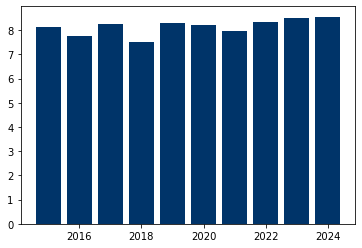

In [596]:
df['xBA per Game'] = df.estimated_ba_using_speedangle/df.game_pk
plt.bar(df.game_year,df['xBA per Game'],color='#003469')

In [597]:
df['xba_p162'] = df['xBA per Game']*162
df.sort_values(by='xba_p162',ascending=False)

game_year  estimated_ba_using_speedangle  game_pk    des  xBA per Game  \
9       2024                       1420.749      166  24356      8.558729   
8       2023                       1490.878      175  26097      8.519303   
7       2022                       1496.243      179  26236      8.358899   
4       2019                       1343.164      162  24905      8.291136   
2       2017                       1334.641      162  24133      8.238525   
5       2020                        493.355       60   8683      8.222583   
0       2015                       1316.828      162  22643      8.128568   
6       2021                       1291.101      162  23823      7.969759   
1       2016                       1256.668      162  22887      7.757210   
3       2018                       1216.241      162  24616      7.507660   

      xba_p162  
9  1386.514084  
8  1380.127063  
7  1354.141709  
4  1343.164000  
2  1334.641000  
5  1332.058500  
0  1316.828000  
6  1291.101000  
1  1256.668000  
3  1216.241000

The 2024 Phillies are on pace for the highest single season xBA. They are the best offense the Phillies have had.

# What would happen if JT Realmuto could stretch out his 10-game hot streaks over 162 games?

In [600]:
df = pps.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            })
df.sort_values(by='des',ascending=False).head(1)
jt_id = 592663
df = jt = pps[pps.fielder_2 == jt_id]
results('player_name').sort_values(by='pitches',ascending=False).head(10)

player_name  pitches  plate_apps   bip   hits    hrs  walks  \
67           Nola, Aaron    13910        3580  2358  775.0  119.0  221.0   
101        Wheeler, Zack    11626        2978  1952  584.0   62.0  160.0   
90        Suárez, Ranger     7479        1938  1318  396.0   40.0  159.0   
22           Eflin, Zach     4198        1128   832  284.0   35.0   57.0   
92   Sánchez, Cristopher     3547         947   676  225.0   24.0   61.0   
100      Walker, Taijuan     3169         840   598  195.0   31.0   76.0   
98      Velasquez, Vince     3067         733   468  166.0   36.0   68.0   
1         Alvarado, José     2977         722   406  135.0   14.0   90.0   
29          Gibson, Kyle     2660         693   500  168.0   22.0   54.0   
7          Arrieta, Jake     2640         701   501  181.0   22.0   60.0   

     strikeouts     ba    obp    slg    ops   woba  
67        968.0  0.234  0.286  0.395  0.680  0.294  
101       827.0  0.211  0.261  0.329  0.590  0.259  
90        443.0  0.226  0.293  0.345  0.638  0.282  
22        226.0  0.271  0.313  0.433  0.746  0.318  
92        205.0  0.256  0.305  0.396  0.701  0.305  
100       154.0  0.259  0.331  0.438  0.769  0.334  
98        184.0  0.256  0.333  0.498  0.831  0.349  
1         220.0  0.217  0.320  0.332  0.652  0.294  
29        132.0  0.269  0.330  0.438  0.769  0.334  
7         133.0  0.291  0.354  0.446  0.800  0.341

In [601]:
df = pos_jt = jt = pos[pos.batter == jt_id]
results('game_date')

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0    2019-03-28       15           4  3.0   0.0  0.0    1.0         0.0   
1    2019-03-30       12           4  2.0   2.0  1.0    0.0         2.0   
2    2019-03-31       16           4  3.0   1.0  0.0    1.0         0.0   
3    2019-04-02       22           5  4.0   0.0  0.0    0.0         1.0   
4    2019-04-03       17           5  3.0   1.0  0.0    1.0         1.0   
..          ...      ...         ...  ...   ...  ...    ...         ...   
717  2024-09-28       21           4  1.0   1.0  0.0    1.0         2.0   
718  2024-10-05       15           4  2.0   0.0  0.0    1.0         1.0   
719  2024-10-06       22           5  1.0   0.0  0.0    0.0         2.0   
720  2024-10-08       16           4  3.0   0.0  0.0    0.0         0.0   
721  2024-10-09       19           4  1.0   0.0  0.0    2.0         1.0   

        ba   obp    slg    ops   woba  
0    0.000  0.25  0.000  0.250  0.172  
1    0.500  0.50  1.250  1.750  0.702  
2    0.500  0.50  0.500  1.000  0.390  
3    0.000  0.00  0.000  0.000  0.000  
4    0.250  0.40  0.500  0.900  0.381  
..     ...   ...    ...    ...    ...  
717  0.333  0.50  0.333  0.833  0.393  
718  0.000  0.25  0.000  0.250  0.172  
719  0.000  0.20  0.000  0.200  0.144  
720  0.000  0.25  0.000  0.250  0.180  
721  0.000  0.50  0.000  0.500  0.344  

[722 rows x 13 columns]

Edmundo Sosa L/R splits <br>


In [603]:
po24 = pos[pos.game_year == 2024]
po24.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                ,'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }).sort_values(by='des',ascending=False)

player_name  batter   des  game_pk
14    Schwarber, Kyle  656941  2936      154
5       Harper, Bryce  547180  2547      149
1   Castellanos, Nick  592206  2392      166
17      Stott, Bryson  681082  2368      151
0          Bohm, Alec  664761  2161      147
19       Turner, Trea  607208  2121      125
9      Marsh, Brandon  669016  2059      138
12     Realmuto, J.T.  592663  1655      103
13       Rojas, Johan  679032  1353      113
15      Sosa, Edmundo  624641  1066       89
18    Stubbs, Garrett  596117   746       52
10   Merrifield, Whit  593160   633       49
11    Pache, Cristian  665506   496       40
2       Clemens, Kody  665019   495       46
20     Wilson, Weston  642215   390       40
6        Hays, Austin  669720   281       24
3         Dahl, David  621311   266       19
8     Marchán, Rafael  665561   195       15
16     Stevenson, Cal  670276   102       16
7      Kennedy, Buddy  671083    58        6
4      Garcia, Aramis  605244    36        3

In [604]:
sosa_id = 624641
df = sosa24 = po24[po24.batter == sosa_id]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      468         124   86    32    3      7          26  0.288   
1        R      598         156  102    33    4      6          42  0.229   

     obp    slg    ops   woba  
0  0.355  0.514  0.868  0.371  
1  0.276  0.340  0.616  0.271

He has good lefty splits. The Phillies faced a lot of LHPs in Turner's absence?

In [606]:
df = po24[(po24.game_date > '2024-05-03')
     &(po24.game_date < '2024-06-17')
    ]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L     1811         467  323   107   17     43          99  0.255   
1        R     3853        1008  699   224   23     88         205  0.251   

     obp    slg    ops   woba  
0  0.325  0.455  0.780  0.337  
1  0.322  0.386  0.708  0.311

Phillies homers by count or pitch number <br>

In [608]:
df = po24[po24.events == 'home_run']
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec       15          15   15    15   15    0.0         0.0   
1   Castellanos, Nick       24          24   24    24   24    0.0         0.0   
2       Clemens, Kody        5           5    5     5    5    0.0         0.0   
3         Dahl, David        3           3    3     3    3    0.0         0.0   
4       Harper, Bryce       31          31   31    31   31    0.0         0.0   
5        Hays, Austin        2           2    2     2    2    0.0         0.0   
6     Marchán, Rafael        3           3    3     3    3    0.0         0.0   
7      Marsh, Brandon       16          16   16    16   16    0.0         0.0   
8    Merrifield, Whit        3           3    3     3    3    0.0         0.0   
9      Realmuto, J.T.       14          14   14    14   14    0.0         0.0   
10       Rojas, Johan        3           3    3     3    3    0.0         0.0   
11    Schwarber, Kyle       39          39   39    39   39    0.0         0.0   
12      Sosa, Edmundo        7           7    7     7    7    0.0         0.0   
13      Stott, Bryson       11          11   11    11   11    0.0         0.0   
14    Stubbs, Garrett        1           1    1     1    1    0.0         0.0   
15       Turner, Trea       21          21   21    21   21    0.0         0.0   
16     Wilson, Weston        3           3    3     3    3    0.0         0.0   

     ba  obp  slg  ops   woba  
0   1.0  1.0  4.0  5.0  2.048  
1   1.0  1.0  4.0  5.0  2.048  
2   1.0  1.0  4.0  5.0  2.048  
3   1.0  1.0  4.0  5.0  2.048  
4   1.0  1.0  4.0  5.0  2.048  
5   1.0  1.0  4.0  5.0  2.048  
6   1.0  1.0  4.0  5.0  2.048  
7   1.0  1.0  4.0  5.0  2.048  
8   1.0  1.0  4.0  5.0  2.048  
9   1.0  1.0  4.0  5.0  2.048  
10  1.0  1.0  4.0  5.0  2.048  
11  1.0  1.0  4.0  5.0  2.048  
12  1.0  1.0  4.0  5.0  2.048  
13  1.0  1.0  4.0  5.0  2.048  
14  1.0  1.0  4.0  5.0  2.048  
15  1.0  1.0  4.0  5.0  2.048  
16  1.0  1.0  4.0  5.0  2.048

In [609]:
df = pos[pos.events=='home_run']
x = df.groupby('player_name',as_index=False).agg({'pitch_number' : 'mean'
                                             ,'des' : 'count'
                                             ,'batter'  : 'max'}).sort_values(by='pitch_number',ascending=False
                                                                             )
x[x.des>=20].sort_values(by='pitch_number',ascending=False).reset_index(drop=True).round(2).rename(columns={'pitch_number' : 'avg_pitches'
                                                                                                            ,'des' : 'hrs'
                                                                                                           })

player_name  avg_pitches  hrs  batter
0    Hernández, César         4.09   45  514917
1       Hoskins, Rhys         3.86  154  656555
2      Galvis, Freddy         3.86   44  520471
3      Marsh, Brandon         3.82   34  669016
4      Altherr, Aaron         3.72   36  571437
5        Miller, Brad         3.72   32  543543
6      Kingery, Scott         3.70   30  664068
7      Realmuto, J.T.         3.59  115  592663
8        Segura, Jean         3.49   43  516416
9       Stott, Bryson         3.49   37  681082
10    Schwarber, Kyle         3.48  143  656941
11    Herrera, Odúbel         3.38   78  546318
12      Harper, Bryce         3.37  164  547180
13      Rupp, Cameron         3.36   39  519237
14      Joseph, Tommy         3.33   43  571830
15    Santana, Carlos         3.25   24  467793
16    Gregorius, Didi         3.17   24  544369
17     Franco, Maikel         3.11  102  596748
18  McCutchen, Andrew         3.11   47  457705
19         Bohm, Alec         3.07   61  664761
20     Williams, Nick         2.97   31  608384
21       Howard, Ryan         2.96   48  429667
22       Turner, Trea         2.88   50  607208
23  Castellanos, Nick         2.68   71  592206

In [610]:
x.agg({'des' : ['mean','median','sum']})

des
mean      19.157895
median     5.000000
sum     1820.000000

In [611]:
pos.game_pk.nunique()

1552

In [612]:
df = hrs = pos[pos.events=='home_run']
df.groupby('pitch_number',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='pitch_number',ascending=False)

pitch_number  des  game_pk
11            14    2        2
10            11    1        1
9             10    4        4
8              9   17       16
7              8   27       26
6              7   91       89
5              6  133      128
4              5  211      190
3              4  260      230
2              3  403      348
1              2  342      300
0              1  329      291

In [613]:
df['count'] = df.balls.astype('str') + '-' + df.strikes.astype('str')
df[['balls','strikes','count']]
df.groupby(['count','pitch_number'],as_index=False).agg({'des' : 'count'}).sort_values(by='des')

count  pitch_number  des
27   3-2            11    1
12   1-2             9    1
5    0-2             6    1
28   3-2            14    2
4    0-2             5    2
11   1-2             7    3
26   3-2            10    4
19   2-2             9    4
18   2-2             8    6
10   1-2             6   11
25   3-2             9   12
20   3-0             4   13
3    0-2             4   14
24   3-2             8   21
17   2-2             7   27
9    1-2             5   32
16   2-2             6   36
23   3-2             7   61
21   3-1             5   72
2    0-2             3   73
22   3-2             6   85
13   2-0             3   96
15   2-2             5  105
8    1-2             4  105
14   2-1             4  128
6    1-0             2  163
1    0-1             2  179
7    1-1             3  234
0    0-0             1  329

In [614]:
df[df.pitch_number==14][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

game_date  inning     player_name  batter home_team away_team  \
51256  2017-08-22       4  Blanco, Andrés  433217       PHI       MIA   
82036  2018-06-29       5   Hoskins, Rhys  656555       PHI       WSH   

       launch_speed  launch_angle  estimated_ba_using_speedangle  
51256         103.2          24.0                            0.9  
82036         106.4          21.0                            0.8

In [615]:
df[df.pitch_number==11][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

game_date  inning     player_name  batter home_team away_team  \
199853  2023-04-16       7  Realmuto, J.T.  592663       CIN       PHI   

        launch_speed  launch_angle  estimated_ba_using_speedangle  
199853          99.0          31.0                          0.403

# ARI (H) 621-623
## Game 1: Montgomery vs Walker
Walker stinks. Cole Hamels night. Taijuan to the IL with a blister even though he said he was "100% fine". Close game. Tough loss.

## Game 2: Henry vs Wheeler
Wheeler deals. Joey Orr family game. Offense slugs.

## Game 3: Cecconi vs Sanchez
11:35 AM start. Pitching is very good. Phillies are a good team.

In [617]:
df = mercado = pd.read_csv('mercado.csv')
pitch_mix(df).round(2)

pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
3         FF  4-Seam Fastball    439          94.99            2332.32   7.95   
2         FC           Cutter    153          88.51            2076.71   9.83   
1         CU        Curveball    126          82.94            2401.07  11.03   
0         CH         Changeup     53          88.42            1590.91   9.23   

   usage  
3   56.9  
2   19.8  
1   16.3  
0    6.9

In [618]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max','mean']
                                            ,'pfx_x' : 'mean'
                                            ,'pfx_z' : 'mean'}).round(2)

pitch_type release_speed              pfx_x pfx_z
                       min   max   mean  mean  mean
0         CH          85.9  91.7  88.42 -1.19  0.39
1         CU          79.6  86.4  82.94  0.36 -0.81
2         FC          84.6  91.6  88.51 -0.14  0.49
3         FF          91.7  97.5  94.99 -0.95  1.41

# Zack Wheeler only throws to JT
85% of the pitches he has thrown as a Philadelphia Phillie have been caught by J.T. Realmuto.

In [620]:
pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

player_name  pitcher    des  game_pk
117       Nola, Aaron   605400  26406      278
167     Wheeler, Zack   554430  13927      145
42        Eflin, Zach   621107  10519      137
152    Suárez, Ranger   624133  10243      171
163  Velasquez, Vince   592826  10239      133
..                ...      ...    ...      ...
33         Cyr, Tyler   664202      9        1
169    Wilson, Weston   642215      8        1
21     Blanco, Andrés   433217      8        1
60       Hall, Darick   669742      6        1
88      Knapp, Andrew   595284      4        1

[171 rows x 4 columns]

In [621]:
wheeler = pps[pps.pitcher == 554430]
wheeler2 = wheeler.groupby(['fielder_2','game_year'],as_index=False).agg({'des' : 'count'
                                                 ,'game_pk' : 'nunique'
                                                }).sort_values(by='game_year',ascending=False)

In [622]:
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})

In [623]:
df = wheeler2.merge(batters,left_on='fielder_2',right_on='batter',suffixes=('','_b'))

In [624]:
final = df.groupby('player_name',as_index=False).agg({'des' : 'sum'})

In [625]:
df.agg({'des' : 'sum'})

des    13927
dtype: int64

In [626]:
final['share'] = final.des/12254
final.round(3)

player_name    des  share
0   Garcia, Aramis    103  0.008
1    Knapp, Andrew    915  0.075
2  Marchán, Rafael    485  0.040
3   Realmuto, J.T.  11626  0.949
4  Stubbs, Garrett    798  0.065

What about the other pitchers? Meh.

# DET (A) 624-626
## Game 1: Mize vs Nola
Nola shoves. Bryce Harper 3-run HR and 2-run 2B. Bohm 2-run HR. Triple play.

## Game 2: Skubal vs Suarez

Does Ranger throw the curveball on the edge of the zone? <br>
Well he throws it 19.9% of the time, it his second most used pitch this year. <br>
He throws it 23% of the time to RHB.

In [630]:
df = pp24
results('player_name')
ranger = df[df.player_name == 'Suárez, Ranger']
pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    766      90.796475        1905.757781   
1         CU        Curveball    513      74.507992        2174.599174   
3         FF  4-Seam Fastball    478      91.862762        2008.319742   
0         CH         Changeup    398      80.013065        1236.507772   
2         FC           Cutter    294      86.521769        2065.729825   
5         SL           Slider      2      81.300000        2015.500000   

        zone  usage  
4   8.677546   31.3  
1  10.927875   20.9  
3   8.043933   19.5  
0  11.597990   16.2  
2   8.731293   12.0  
5   8.500000    0.1

In [631]:
rhb_pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    539      90.761967        1902.113462   
1         CU        Curveball    479      74.435908        2171.589800   
3         FF  4-Seam Fastball    417      91.797602        2006.370370   
0         CH         Changeup    317      79.986435        1241.829032   
2         FC           Cutter    272      86.688971        2067.773585   
5         SL           Slider      2      81.300000        2015.500000   

        zone  usage  
4   8.803340   26.6  
1  10.885177   23.6  
3   8.127098   20.6  
0  11.690852   15.6  
2   8.599265   13.4  
5   8.500000    0.1

In [632]:
lhb_pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    227      90.878414        1914.410959   
0         CH         Changeup     81      80.117284        1214.802632   
3         FF  4-Seam Fastball     61      92.308197        2021.262295   
1         CU        Curveball     34      75.523529        2215.727273   
2         FC           Cutter     22      84.454545        2038.650000   

        zone  usage  
4   8.378855   53.4  
0  11.234568   19.1  
3   7.475410   14.4  
1  11.529412    8.0  
2  10.363636    5.2

In [633]:
# Do I have Cristian Pache's BB% at 14.8? No. I have him at 14.9%. WTF.
df = po24
x = results('player_name')
x['bb%'] = x.walks/x.plate_apps
x

player_name  pitches  plate_apps  bip   hits   hrs  walks  \
0          Bohm, Alec     2161         619  487  156.0  15.0   39.0   
1   Castellanos, Nick     2392         676  483  161.0  24.0   39.0   
2       Clemens, Kody      495         125   88   27.0   5.0    5.0   
3         Dahl, David      266          63   38   12.0   3.0    3.0   
4      Garcia, Aramis       36           7    4    0.0   0.0    0.0   
5       Harper, Bryce     2547         637  422  161.0  31.0   70.0   
6        Hays, Austin      281          84   60   20.0   2.0    0.0   
7      Kennedy, Buddy       58          13    8    2.0   0.0    2.0   
8     Marchán, Rafael      195          56   44   15.0   3.0    3.0   
9      Marsh, Brandon     2059         491  280  105.0  16.0   50.0   
10   Merrifield, Whit      633         175  138   31.0   3.0   15.0   
11    Pache, Cristian      496         117   62   21.0   0.0   13.0   
12     Realmuto, J.T.     1655         430  286  101.0  14.0   29.0   
13       Rojas, Johan     1353         369  281   83.0   3.0   14.0   
14    Schwarber, Kyle     2936         708  394  144.0  39.0  104.0   
15      Sosa, Edmundo     1066         280  188   65.0   7.0   13.0   
16     Stevenson, Cal      102          27   20    6.0   0.0    3.0   
17      Stott, Bryson     2368         582  429  126.0  11.0   53.0   
18    Stubbs, Garrett      746         187  115   34.0   1.0   17.0   
19       Turner, Trea     2121         558  418  152.0  21.0   29.0   
20     Wilson, Weston      390         102   63   25.0   3.0    8.0   

    strikeouts     ba    obp    slg    ops   woba       bb%  
0           86  0.275  0.325  0.438  0.763  0.330  0.063005  
1          141  0.258  0.311  0.435  0.746  0.323  0.057692  
2           31  0.227  0.264  0.454  0.718  0.306  0.040000  
3           21  0.203  0.238  0.390  0.628  0.268  0.047619  
4            3  0.000  0.000  0.000  0.000  0.000  0.000000  
5          143  0.286  0.366  0.530  0.896  0.383  0.109890  
6           22  0.244  0.262  0.378  0.640  0.277  0.000000  
7            3  0.182  0.308  0.273  0.580  0.270  0.153846  
8            8  0.294  0.339  0.549  0.888  0.375  0.053571  
9          157  0.242  0.320  0.406  0.726  0.317  0.101833  
10          19  0.197  0.274  0.293  0.567  0.256  0.085714  
11          42  0.204  0.291  0.272  0.562  0.257  0.111111  
12         106  0.257  0.319  0.415  0.733  0.321  0.067442  
13          70  0.242  0.274  0.321  0.594  0.260  0.037940  
14         203  0.244  0.359  0.480  0.838  0.362  0.146893  
15          68  0.255  0.311  0.416  0.726  0.315  0.046429  
16           4  0.250  0.333  0.375  0.708  0.314  0.111111  
17          97  0.244  0.313  0.356  0.669  0.295  0.091065  
18          50  0.206  0.294  0.261  0.555  0.256  0.090909  
19         103  0.291  0.335  0.460  0.795  0.344  0.051971  
20          29  0.272  0.333  0.467  0.801  0.344  0.078431

In [634]:
x[x.pitches == 366]

Empty DataFrame
Columns: [player_name, pitches, plate_apps, bip, hits, hrs, walks, strikeouts, ba, obp, slg, ops, woba, bb%]
Index: []

**Well I am correct according to baseball savant Statcast Search**

Marchan total launch_speed

df[df.player_name == x[x.pitches == 82].player_name.unique()[0]].agg({'launch_speed' : 'sum'})

In [638]:
ls = df[df.type=='X'].groupby(['player_name','batter'],as_index=False).agg({#'batter' : 'max'
                                              #,'des' : 'count'
                                              'launch_speed' : ['min','mean','max','sum','count']
                                                           }).round(1
                                                                   ).sort_values(by=('launch_speed', 'sum'),ascending=False)
ls

player_name  batter launch_speed                            
                                       min  mean    max      sum count
0          Bohm, Alec  664761         43.7  90.3  110.8  43814.5   485
1   Castellanos, Nick  592206         41.0  88.6  113.1  42695.7   482
5       Harper, Bryce  547180         34.2  91.1  113.8  38244.5   420
19       Turner, Trea  607208         43.3  89.1  110.6  37135.0   417
17      Stott, Bryson  681082         28.1  86.7  109.8  37095.1   428
14    Schwarber, Kyle  656941         32.9  93.6  115.8  36871.6   394
9      Marsh, Brandon  669016         28.9  90.9  110.1  25450.8   280
12     Realmuto, J.T.  592663         35.8  89.2  109.7  25409.9   285
13       Rojas, Johan  679032         11.5  82.4  110.6  23143.3   281
15      Sosa, Edmundo  624641         22.8  88.5  113.7  16545.1   187
10   Merrifield, Whit  593160         25.8  82.6  103.5  11319.9   137
18    Stubbs, Garrett  596117         24.1  76.8   98.9   8837.6   115
2       Clemens, Kody  665019         38.1  89.3  108.4   7862.0    88
11    Pache, Cristian  665506         41.1  91.3  109.2   5658.8    62
20     Wilson, Weston  642215         34.4  90.1  108.6   5587.5    62
6        Hays, Austin  669720         44.5  86.7  108.5   5202.3    60
8     Marchán, Rafael  665561         35.0  85.1  103.3   3742.6    44
3         Dahl, David  621311         56.7  87.1  105.6   3308.8    38
16     Stevenson, Cal  670276         32.7  83.0  103.1   1659.7    20
7      Kennedy, Buddy  671083         54.0  86.3  102.1    690.1     8
4      Garcia, Aramis  605244         92.3  97.0  107.7    388.1     4

In [639]:
df = po24[po24.p_throws == 'L']
x = po_lhp = results('player_name')
x.sort_values(by='ba',ascending=False)

player_name  pitches  plate_apps    bip  hits   hrs  walks  \
6        Hays, Austin       70          21   16.0   8.0   0.0    0.0   
20     Wilson, Weston      194          55   36.0  15.0   2.0    5.0   
2       Clemens, Kody       85          21   16.0   6.0   0.0    1.0   
5       Harper, Bryce      902         234  149.0  60.0   9.0   29.0   
14    Schwarber, Kyle     1061         258  147.0  64.0  12.0   37.0   
19       Turner, Trea      720         178  130.0  47.0   8.0   14.0   
15      Sosa, Edmundo      468         124   86.0  32.0   3.0    7.0   
0          Bohm, Alec      635         185  159.0  49.0   6.0   11.0   
12     Realmuto, J.T.      509         128   87.0  32.0   4.0   10.0   
8     Marchán, Rafael       71          24   20.0   6.0   2.0    1.0   
1   Castellanos, Nick      644         175  125.0  44.0  10.0   10.0   
11    Pache, Cristian      351          80   41.0  16.0   0.0   11.0   
18    Stubbs, Garrett      238          59   37.0  12.0   0.0    6.0   
17      Stott, Bryson      530         133   89.0  25.0   1.0   16.0   
13       Rojas, Johan      402         110   80.0  21.0   0.0    3.0   
7      Kennedy, Buddy       31           7    5.0   1.0   0.0    2.0   
9      Marsh, Brandon      365          94   51.0  16.0   1.0    7.0   
10   Merrifield, Whit      293          85   73.0  15.0   3.0    5.0   
3         Dahl, David       41           8    5.0   1.0   0.0    1.0   
4      Garcia, Aramis        7           1    0.0   0.0   0.0    0.0   
16     Stevenson, Cal        9           2    1.0   0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
6          5.0  0.381  0.381  0.571  0.952  0.407  
20        12.0  0.312  0.382  0.562  0.944  0.399  
2          4.0  0.300  0.333  0.450  0.783  0.338  
5         56.0  0.296  0.380  0.512  0.893  0.383  
14        70.0  0.294  0.403  0.477  0.880  0.386  
19        31.0  0.292  0.354  0.503  0.857  0.368  
15        26.0  0.288  0.355  0.514  0.868  0.371  
0         15.0  0.282  0.324  0.460  0.784  0.339  
12        29.0  0.276  0.344  0.422  0.766  0.337  
8          3.0  0.273  0.292  0.591  0.883  0.362  
1         39.0  0.270  0.314  0.503  0.817  0.349  
11        28.0  0.232  0.338  0.333  0.671  0.303  
18        14.0  0.231  0.322  0.231  0.553  0.262  
17        27.0  0.217  0.316  0.270  0.585  0.271  
13        25.0  0.206  0.236  0.275  0.511  0.224  
7          0.0  0.200  0.429  0.400  0.829  0.376  
9         34.0  0.195  0.266  0.280  0.546  0.245  
10         6.0  0.188  0.235  0.325  0.560  0.246  
3          2.0  0.167  0.250  0.167  0.417  0.196  
4          1.0  0.000  0.000  0.000  0.000  0.000  
16         1.0  0.000  0.000  0.000  0.000  0.000

In [640]:
# Doing baseball stuff makes me think about work.
# Ok either way, let's focus.

# How Tall is Michael Mercado???

In [642]:
df = pd.concat([mercado, po24[po24.player_name == 'Mercado, Michael']])
df.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

# Ranger is not getting ahead in the count

# Inning Level Aggregate

In [645]:
def summarize_inning(df):
    x = df.groupby(['game_pk','inning'],as_index=False
          ).agg({'launch_speed' : 'sum'
                 ,'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'estimated_ba_using_speedangle' : 'sum'
                 ,'estimated_woba_using_speedangle' : 'sum'
                 ,'inning_topbot' : 'max'
                 ,'home_team' : 'max'
                 ,'post_home_score' : 'max'
                 ,'home_score' : 'min'
                 ,'away_team' : 'max'
                 ,'post_away_score' : 'max'
                 ,'away_score' : 'max'
                 ,'game_date' : 'max'
                 #,'game_year' : 'max'
                 # ,'fielder_2' : 'max'
                 # ,'fielder_3' : 'max'
                 # ,'fielder_4' : 'max'
                 # ,'fielder_5' : 'max'
                 # ,'fielder_6' : 'max'
                 # ,'fielder_7' : 'max'
                 # ,'fielder_8' : 'max'
                 # ,'fielder_9' : 'max'
                 # ,'pitcher' : 'max'
                })
    return x

# What is a typical sum of launch_speed for an inning, fielders in an inning.
No more double switches really.

In [647]:
df = pp24
df = pp24_innings = summarize_inning(df)
df[df.game_date == df.game_date.max()].round(3) # This finds me the Phillies Most Recent GAme

game_pk  inning  launch_speed  des  at_bat_number  \
1448   775313       1         633.5   30              6   
1449   775313       2         661.0   23              6   
1450   775313       3          95.7   14              3   
1451   775313       4         330.7   12              3   
1452   775313       5         512.6   25              5   
1453   775313       6         785.9   32              7   
1454   775313       7         335.7   18              5   
1455   775313       8         473.9   10              3   

      estimated_ba_using_speedangle  estimated_woba_using_speedangle  \
1448                          0.697                            1.538   
1449                          1.134                            1.774   
1450                          0.160                            0.829   
1451                          0.123                            0.138   
1452                          0.634                            1.311   
1453                          1.623                            3.778   
1454                          0.194                            0.849   
1455                          0.883                            1.247   

     inning_topbot home_team  post_home_score  home_score away_team  \
1448           Bot       NYM                0           0       PHI   
1449           Bot       NYM                0           0       PHI   
1450           Bot       NYM                0           0       PHI   
1451           Bot       NYM                0           0       PHI   
1452           Bot       NYM                0           0       PHI   
1453           Bot       NYM                4           0       PHI   
1454           Bot       NYM                4           4       PHI   
1455           Bot       NYM                4           4       PHI   

      post_away_score  away_score   game_date  
1448                0           0  2024-10-09  
1449                0           0  2024-10-09  
1450                0           0  2024-10-09  
1451                1           1  2024-10-09  
1452                1           1  2024-10-09  
1453                1           1  2024-10-09  
1454                1           1  2024-10-09  
1455                1           1  2024-10-09

# Game Level Aggregate by Inning
**AKA a Box Score??**

In [649]:
def box_score(df):
    bs = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
               ],as_index=False).agg({'launch_speed' : 'max' # Max or Sum? Por que no los dos? Because I can't fucking do thi?
                          ,'post_home_score' : 'max'
                          ,'post_away_score' : 'max'
                          ,'inning' : 'nunique'
                         })
    return bs

wtf did the Phillies do?

In [651]:
df = pp24 # Phillies Pitchers in 2024
df = pp24_innings = summarize_inning(df) # Summarized at the inning level
games = box_score(df) # Summarized at the Game Level
x = games.sort_values(by='launch_speed').head(10) # Give me the games with the bottom 10 opponent launch speed summed
# Then merge that back to the original dataset to reduce it to the top 10 games
df = pp24[pp24.game_pk.isin(x.game_pk.unique().tolist())] # Why merge when you can filter?
df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
            ,'player_name'
            ,'pitcher'
            ,'fielder_2'
            ,'fielder_3'
            ,'fielder_4'
            ,'fielder_5'
            ,'fielder_6'
            ,'fielder_7'
            ,'fielder_8'
            ,'fielder_9'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'max'
                 ,'release_spin_rate' : 'max'
                 ,'launch_speed' : 'sum'
                }).sort_values(by='launch_speed')


game_pk   game_date home_team away_team            player_name  pitcher  \
25   746723  2024-04-22       CIN       PHI          Hoffman, Jeff   656546   
21   745597  2024-04-15       PHI       COL         Alvarado, José   621237   
5    745557  2024-07-09       PHI       LAD  Domínguez, Seranthony   622554   
23   745597  2024-04-15       PHI       COL          Hoffman, Jeff   656546   
14   745585  2024-05-06       PHI        SF       Kerkering, Orion   689147   
26   746723  2024-04-22       CIN       PHI          Soto, Gregory   642397   
6    745557  2024-07-09       PHI       LAD       Kerkering, Orion   689147   
22   745597  2024-04-15       PHI       COL  Domínguez, Seranthony   622554   
15   745585  2024-05-06       PHI        SF           Strahm, Matt   621381   
17   745592  2024-04-19       PHI       CWS       Kerkering, Orion   689147   
11   745567  2024-06-17       PHI        SD         Alvarado, José   621237   
12   745567  2024-06-17       PHI        SD             Ruiz, José   614179   
7    745557  2024-07-09       PHI       LAD             Ruiz, José   614179   
8    745557  2024-07-09       PHI       LAD          Soto, Gregory   642397   
18   745592  2024-04-19       PHI       CWS           Strahm, Matt   621381   
1    745545  2024-08-15       PHI       WSH          Banks, Tanner   621383   
3    745545  2024-08-15       PHI       WSH             Lazar, Max   676661   
2    745545  2024-08-15       PHI       WSH       Kerkering, Orion   689147   
9    745557  2024-07-09       PHI       LAD          Wheeler, Zack   554430   
27   746723  2024-04-22       CIN       PHI         Suárez, Ranger   624133   
16   745585  2024-05-06       PHI        SF          Wheeler, Zack   554430   
19   745592  2024-04-19       PHI       CWS      Turnbull, Spencer   605513   
4    745545  2024-08-15       PHI       WSH          Wheeler, Zack   554430   
24   745597  2024-04-15       PHI       COL            Nola, Aaron   605400   
13   745567  2024-06-17       PHI        SD    Sánchez, Cristopher   650911   
10   745560  2024-06-28       PHI       MIA    Sánchez, Cristopher   650911   
20   745593  2024-04-16       PHI       COL         Suárez, Ranger   624133   
0    745537  2024-08-17       PHI       WSH    Sánchez, Cristopher   650911   

    fielder_2  fielder_3  fielder_4  fielder_5  fielder_6  fielder_7  \
25     592663     665019     681082     664761     607208     669016   
21     592663     547180     681082     593160     607208     669016   
5      665561     547180     681082     664761     607208     669016   
23     592663     547180     681082     593160     607208     669016   
14     592663     547180     593160     664761     681082     669016   
26     592663     665019     681082     664761     607208     669016   
6      665561     664761     681082     593160     624641     669016   
22     592663     547180     681082     593160     607208     669016   
15     592663     547180     593160     664761     681082     669016   
17     592663     547180     624641     664761     607208     593160   
11     665561     547180     681082     664761     607208     669016   
12     665561     664761     593160     624641     607208     669016   
7      665561     664761     681082     593160     624641     669016   
8      665561     664761     681082     624641     607208     669016   
18     592663     547180     624641     664761     607208     593160   
1      592663     547180     681082     664761     607208     642215   
3      592663     642215     624641     664761     607208     669016   
2      592663     547180     681082     664761     607208     642215   
9      665561     547180     681082     664761     607208     669016   
27     592663     665019     681082     664761     607208     669016   
16     592663     547180     593160     664761     681082     669016   
19     592663     547180     624641     664761     607208     593160   
4      592663     547180     681082     664761     60720

# Ideas
## These are usually pretty good

## Get to Fielders by filtering to hit location to the position of the player, then go to individual players

In [654]:
df = pp24
df.groupby('hit_location',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

hit_location   des  game_pk
1           2.0  1520      166
7           8.0   746      164
6           7.0   624      165
8           9.0   587      161
5           6.0   541      162
4           5.0   514      160
3           4.0   501      158
2           3.0   296      138
0           1.0   157       93

In [655]:
df = pps
x = df.groupby(['hit_location'
           ,'game_year']
           ,as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['game_year','des'],ascending=False)
x.groupby('hit_location',as_index=False).agg({'des' : 'sum'}).sort_values(by='des',ascending=False)

hit_location    des
1           2.0  13772
7           8.0   7005
6           7.0   6068
8           9.0   6040
5           6.0   5093
3           4.0   4738
4           5.0   4240
2           3.0   2838
0           1.0   1752

# Group By Objects in Pandas

In [657]:
df = pps
level = 'player_name'
g = df.groupby(level)
g

In [658]:
g.max('release_speed').sort_values(by='release_speed',ascending=False).head(10)

release_speed  release_pos_x  release_pos_z  batter  \
player_name                                                                  
Alvarado, José                 102.5           1.85           7.11  808982   
Giles, Ken                     102.0          -1.74           7.05  656941   
Soto, Gregory                  101.7           2.64           6.19  808982   
Coonrod, Sam                   101.2          -0.83           6.26  677954   
Domínguez, Seranthony          101.1          -1.08           5.95  808982   
Estévez, Carlos                100.3          -1.31           6.46  696285   
Wheeler, Zack                  100.3          -1.13           6.01  808982   
Diekman, Jake                  100.2           4.23           6.19  608700   
Marte, Yunior                  100.2          -1.11           5.99  702358   
García, Luis                   100.0          -1.97           6.78  665742   

                       pitcher  spin_dir  spin_rate_deprecated  \
player_name                                                      
Alvarado, José          621237       NaN                   NaN   
Giles, Ken              571704       NaN                   NaN   
Soto, Gregory           642397       NaN                   NaN   
Coonrod, Sam            656322       NaN                   NaN   
Domínguez, Seranthony   622554       NaN                   NaN   
Estévez, Carlos         608032       NaN                   NaN   
Wheeler, Zack           554430       NaN                   NaN   
Diekman, Jake           518617       NaN                   NaN   
Marte, Yunior           628708       NaN                   NaN   
García, Luis            472610       NaN                   NaN   

                       break_angle_deprecated  break_length_deprecated  zone  \
player_name                                                                    
Alvarado, José                            NaN                      NaN  14.0   
Giles, Ken                                NaN                      NaN  14.0   
Soto, Gregory                             NaN                      NaN  14.0   
Coonrod, Sam                              NaN                      NaN  14.0   
Domínguez, Seranthony                     NaN                      NaN  14.0   
Estévez, Carlos                           NaN                      NaN  14.0   
Wheeler, Zack                             NaN                      NaN  14.0   
Diekman, Jake                             NaN                      NaN  14.0   
Marte, Yunior                             NaN                      NaN  14.0   
García, Luis                              NaN                      NaN  14.0   

                       ...   wHBP    w1B    w2B    w3B    wHR  runSB  runCS  \
player_name            ...                                                    
Alvarado, José         ...  0.726  0.884  1.261  1.601  2.072    0.2 -0.397   
Giles, Ken             ...  0.718  0.881  1.256  1.594  2.065    0.2 -0.392   
Soto, Gregory          ...  0.726  0.883  1.254  1.589  2.048    0.2 -0.405   
Coonrod, Sam           ...  0.722  0.884  1.261  1.601  2.072    0.2 -0.397   
Domínguez, Seranthony  ...  0.726  0.884  1.261  1.601  2.072    0.2 -0.397   
Estévez, Carlos        ...  0.720  0.882  1.254  1.589  2.048    0.2 -0.405   
Wheeler, Zack          ...  0.728  0.884  1.261  1.601  2.072    0.2 -0.397   
Diekman, Jake          ...  0.718  0.881  1.256  1.594  2.065    0.2 -0.392   
Marte, Yunior          ...  0.726  0.883  1.254  1.589  2.048    0.2 -0.405   
García, Luis           ...  0.723  0.881  1.256  1.594  2.065    0.2 -0.392   

                        R/PA     R/W   cFIP  
player_name                                  
Alvarado, José         0.122  10.028  3.255  
Giles, Ken             0.112   9.421  3.134  
Soto, Gregory          0.122  10.028  3.255  
Coonrod, Sam           0.121   9.973  3.170  
Domínguez, Seranthony  0.126  10.296  3.255  
Estévez, Carlos        0.117   9.689  3.166  
Wheeler, Zack  

# I get baked to relax and take my mind off of learning not to do more learning.

# March and April 2024

## Run Functions

In [664]:
%run "Baseball Functions.ipynb"

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


## Imports and Data

In [666]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# Braves (H) 329-331
It is opening weekend in South Philadelphia as the Phillies embark on the new season by hosting the Atlanta Braves. Opening Day was rained out yesterday, so we are getting started on Friday afternoon. It is a big series for two teams expected to compete for the National League East throughout the season before both hoping to claim a World Series come October.

Let's not fuck around and get right into the first game.

### Game 1: Strider vs Wheeler
PHI Lineup: <br>
Schwarber 0 <br>
Turner 6 <br>
Harper 3 <br>
Realmuto 2 <br>
Bohm 5 <br>
Stott 4 <br>
Castellanos 9 <br>
Marsh 7 <br>
Rojas 8 <br>

ATL Lineup: <br>
Acuna 9 <br>
Albies 4 <br>
Riley 5 <br>
Olson 3 <br>
Ozuna 0 <br>
Harris II 8 <br>
Murphy 2 <br>
Arcia 6 <br>
Kelenic 7 <br>


In [669]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des',ascending=False)

player_name  pitcher   des
25          Wheeler, Zack   554430  3557
15            Nola, Aaron   605400  3431
24        Walker, Taijuan   592836  2837
20         Suárez, Ranger   624133  2289
21    Sánchez, Cristopher   650911  1498
19           Strahm, Matt   621381  1459
10         Kimbrel, Craig   518886  1253
18          Soto, Gregory   642397  1025
8           Hoffman, Jeff   656546   972
5   Domínguez, Seranthony   622554   948
0          Alvarado, José   621237   855
11      Lorenzen, Michael   547179   811
12          Marte, Yunior   628708   700
4            Covey, Dylan   592229   672
6          Falter, Bailey   663559   661
23        Vasquez, Andrew   607755   653
2         Brogdon, Connor   641401   544
1        Bellatti, Andrew   571479   456
16         Ortiz, Luis F.   656814   299
9        Kerkering, Orion   689147   164
13        Moore, McKinley   686842    86
17    Plassmeyer, Michael   674681    85
14           Nelson, Nick   656793    69
7          Harrison, Josh   543281    44
3           Clemens, Kody   665019    41
22          Uelmen, Erich   657272    33

In [670]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

player_name  batter  game_pk
14    Schwarber, Kyle  656941      173
1   Castellanos, Nick  592206      170
18       Turner, Trea  607208      168
16      Stott, Bryson  681082      164
0          Bohm, Alec  664761      158
12     Realmuto, J.T.  592663      148
10     Marsh, Brandon  669016      142
8       Harper, Bryce  547180      139
15      Sosa, Edmundo  624641       90
3          Cave, Jake  595909       64
13       Rojas, Johan  679032       58
4       Clemens, Kody  665019       47
11    Pache, Cristian  665506       40
9      Harrison, Josh  543281       39
17    Stubbs, Garrett  596117       38
7        Hall, Darick  669742       18
6     Guthrie, Dalton  656495       13
2     Castro, Rodolfo  666801       13
5         Ellis, Drew  656403       10
19     Wilson, Weston  642215        8

In [671]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             ,669016 # Marsh
             ,679032 # Rojas
            ]
wheeler_id = 554430

In [672]:
pps[(pps.home_team == 'ATL')
    &(pps.game_year == 2023)
   ].groupby('batter',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

batter  des
8   663586  165
5   621566  162
6   645277  160
1   542303  141
3   606115  137
7   660670  127
11  671739  120
2   592696  103
9   669221   92
4   607680   44
0   518595   36
10  670032    5

In [673]:
braves_ids = [656941 # Acuna
             ,607208 # Albies
             ,547180 # Riley
             ,592663 # Olson
             ,664761 # Ozuna
             ,681082 # Harris II
             ,592206 # Murphy
             ,669016 # Arcia
             ,679032 # Kelenic
            ]
strider_id = 675911

In [674]:
pos[pos.pitcher == strider_id].groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0                      double    7
1                 double_play    3
2                 field_error    1
3                   field_out   88
4         fielders_choice_out    1
5                   force_out    3
6   grounded_into_double_play    2
7                hit_by_pitch    2
8                    home_run   10
9                      single   26
10                  strikeout   99
11                       walk   17

In [675]:
phils_vs_strider = phils_sc[phils_sc.batter.isin(phils_ids)
                            &(phils_sc.pitcher == strider_id)
                           ]

In [676]:
df = phils_vs_strider
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec       80          27   15     5  1.0    0.0        12.0   
1  Castellanos, Nick      102          26   15     5  2.0    1.0        10.0   
2      Harper, Bryce      124          24   13     6  2.0    4.0         7.0   
3     Marsh, Brandon       96          20    8     6  2.0    3.0         9.0   
4     Realmuto, J.T.      106          25   10     3  0.0    2.0        12.0   
5       Rojas, Johan       48          12    6     1  0.0    1.0         5.0   
6    Schwarber, Kyle      127          32   14     5  1.0    4.0        14.0   
7      Stott, Bryson      129          28   20     6  0.0    0.0         8.0   
8       Turner, Trea       71          21   20     3  1.0    0.0         0.0   

      ba    obp    slg    ops   woba  
0  0.185  0.185  0.296  0.481  0.208  
1  0.200  0.231  0.440  0.671  0.283  
2  0.300  0.417  0.600  1.017  0.430  
3  0.353  0.450  0.765  1.215  0.501  
4  0.136  0.240  0.182  0.422  0.205  
5  0.091  0.167  0.091  0.258  0.131  
6  0.179  0.281  0.321  0.603  0.273  
7  0.214  0.214  0.286  0.500  0.216  
8  0.150  0.190  0.350  0.540  0.231

In [677]:
pitch_mix(pos[pos.pitcher==strider_id]).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    695           97.8             2382.6   7.5   
3         SL           Slider    323           85.9             2362.1  11.1   
0         CH         Changeup     50           87.2             2257.4  10.7   
1         CU        Curveball     10           80.6             2614.7  11.8   

   usage  
2   64.5  
3   30.0  
0    4.6  
1    0.9

In [678]:
df[df.pitch_type == 'FF'].agg({'release_speed' : ['mean','std']
                               ,'release_spin_rate' : ['mean','std']
                              }).round(1)

release_speed  release_spin_rate
mean           97.8             2384.2
std             1.1               76.8

### Game 2: Fried vs Nola
Well the first inning was just absurd. Acuna reached on an error by Bohm (I missed it) then Albies donged. <br>
Phillies loaded the bases just for Castellanos to stare at a Zone 5 FF that was called a ball by Bruce Dreckman. He walked (RBI) then Stott shoots one the other way to take the lead.

In [680]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
nola_id = 605400

In [681]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']

In [682]:
df = pd.concat([pos,whit])
df = df[(df.batter.isin(phils_ids))
   &(df.p_throws == 'L')
  ]

In [683]:
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps     bip   hits   hrs  walks  strikeouts  \
6          FF     8006      1980.0  1310.0  465.0  79.0  232.0       415.0   
13         SI     4180      1153.0   864.0  313.0  35.0  117.0       160.0   
14         SL     3869       943.0   577.0  218.0  33.0   71.0       279.0   
0          CH     3195       919.0   710.0  218.0  27.0   46.0       159.0   
2          CU     1933       478.0   316.0  101.0  15.0   27.0       125.0   
5          FC     1426       362.0   273.0  115.0  15.0   29.0        59.0   
15         ST      811       190.0   105.0   31.0   7.0   16.0        68.0   
10         KC      365       105.0    67.0   31.0   4.0    4.0        34.0   
16         SV      131        25.0    18.0   12.0   3.0    2.0         5.0   
8          FS      109        34.0    18.0    6.0   1.0    2.0        14.0   
7          FO        8         0.0     0.0    0.0   0.0    0.0         0.0   
12         SC        3         0.0     0.0    0.0   0.0    0.0         0.0   
4          FA        3         0.0     0.0    0.0   0.0    0.0         0.0   
3          EP        3         2.0     2.0    1.0   0.0    0.0         0.0   
11         PO        2         0.0     0.0    0.0   0.0    0.0         0.0   
9          IN        1         1.0     0.0    0.0   0.0    0.0         0.0   
1          CS        1         1.0     1.0    1.0   0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
6   0.272  0.361  0.486  0.847  0.288  
13  0.308  0.383  0.477  0.860  0.307  
14  0.256  0.321  0.439  0.761  0.290  
0   0.253  0.291  0.399  0.689  0.235  
2   0.231  0.285  0.394  0.678  0.243  
5   0.348  0.401  0.573  0.973  0.309  
15  0.180  0.253  0.349  0.601  0.231  
10  0.313  0.333  0.505  0.838  0.279  
16  0.522  0.560  1.130  1.690  0.691  
8   0.188  0.235  0.344  0.579  0.227  
7     NaN    NaN    NaN    NaN    NaN  
12    NaN    NaN    NaN    NaN    NaN  
4     NaN    NaN    NaN    NaN    NaN  
3   0.500  0.500  0.500  1.000  0.442  
11    NaN    NaN    NaN    NaN    NaN  
9     NaN  0.000    NaN    NaN  0.000  
1   1.000  1.000  2.000  3.000  0.000

How the fuck does Jesse Chavez keep leaving the Braves just to come back?

In [685]:
# How can I identify games in which Jesse Chavez pitched against the Phils?
# I need to pull opposing team pitcher ids.
# An easy way to do that would be to pull every pitch they have ever thrown, yeah that would work but it gets pretty big and creates dupes.

In [686]:
# There has to be a better way.
# Ok, I can use Statcast search to find at bats for a single player against Jesse Chavez, then go find that at bat in the pos data.

In [687]:
# Maybe I could look at descriptions.

In [688]:
pps[(pps.away_team == 'ATL')
    &(pps.pitcher == nola_id)
    &(pps.des.str.startswith('Ronald'))
   ].groupby('des',as_index=False).agg({'batter' : 'max'})

des  batter
0            Ronald Acuna Jr.  called out on strikes.  660670
1   Ronald Acuna Jr.  doubles (1) on a sharp groun...  660670
2   Ronald Acuna Jr.  flies out to center fielder ...  660670
3   Ronald Acuna Jr.  grounds out softly, first ba...  660670
4   Ronald Acuna Jr.  grounds out to first baseman...  660670
5   Ronald Acuna Jr.  grounds out, shortstop Didi ...  660670
6   Ronald Acuna Jr.  grounds out, shortstop Trea ...  660670
7   Ronald Acuna Jr.  grounds out, third baseman A...  660670
8   Ronald Acuna Jr.  reaches on a throwing error ...  660670
9   Ronald Acuna Jr.  singles on a ground ball to ...  660670
10  Ronald Acuna Jr.  singles on a sharp ground ba...  660670
11       Ronald Acuna Jr.  strikes out on a foul tip.  660670
12  Ronald Acuna doubles (1) on a sharp ground bal...  660670
13  Ronald Acuna doubles (10) on a line drive to l...  660670
14  Ronald Acuna doubles (2) on a sharp ground bal...  660670
15  Ronald Acuna flies out to center fielder Adam ...  660670
16  Ronald Acuna flies out to left fielder Andrew ...  660670
17  Ronald Acuna flies out to right fielder Bryce ...  660670
18  Ronald Acuna grounds out softly, third baseman...  660670
19  Ronald Acuna grounds out, third baseman Maikel...  660670
20  Ronald Acuna homers (18) on a fly ball to left...  660670
21  Ronald Acuna homers (38) on a fly ball to left...  660670
22  Ronald Acuna lines out to left fielder Jay Bruce.  660670
23  Ronald Acuna singles on a ground ball to cente...  660670
24  Ronald Acuna singles on a line drive to center...  660670
25  Ronald Acuna singles on a line drive to center...  660670
26  Ronald Acuna singles on a line drive to left f...  660670
27  Ronald Acuna strikes out swinging, catcher And...  660670
28                 Ronald Acuna strikes out swinging.  660670
29                                Ronald Acuna walks.  660670
30  Ronald Acuña Jr.  grounds into a force out, sh...  660670
31  Ronald Acuña Jr.  reaches on a fielding error ...  660670
32  Ronald Acuña Jr.  singles on a ground ball to ...  660670

In [689]:
pos[pos.game_date == '2023-09-20'].groupby('inning',as_index=False).agg({'pitcher' : 'nunique'})

inning  pitcher
0       1        1
1       2        1
2       3        1
3       4        2
4       5        1
5       6        1
6       7        1
7       8        1
8       9        1
9      10        1

In [690]:
pos[pos.game_date == '2023-09-20'].groupby(['game_pk','inning'],as_index=False).agg({'pitcher' : 'max'})

game_pk  inning  pitcher
0   716509       1   693821
1   716509       2   693821
2   716509       3   693821
3   716509       4   693821
4   716509       5   445926
5   716509       6   445926
6   716509       7   543272
7   716509       8   572955
8   716509       9   628452
9   716509      10   621345

In [691]:
pos[(pos.pitcher == 445926)
    &(pos.player_name == 'Marsh, Brandon')
    &(pos.game_date == '2023-09-20')
   ].groupby('des',as_index=False).agg({'home_team' : 'count'})
# So by the time I determined what Jesse Chavez's pitcher ID is, he is going to be removed from the game

des  home_team
0  Brandon Marsh walks.          5

In [692]:
df[df.game_date == '2023-09-20'].groupby('pitcher',as_index=False).agg({'des' : 'count'})

pitcher  des
0   543272   10
1   621345   21

In [693]:
df = pd.concat([pos[pos.batter.isin(phils_ids)],whit])
chavez = df[df.pitcher == 445926]

In [694]:
mcgs('player_name',chavez)[['player_name','pitches','plate_apps','hits','hrs','strikeouts','obp','slg']].round(3)

player_name  pitches  plate_apps  hits  hrs  strikeouts    obp    slg
0         Bohm, Alec       27           8   2.0  0.0         4.0  0.250  0.250
1  Castellanos, Nick       32          11   3.0  0.0         1.0  0.273  0.364
2      Harper, Bryce       22           7   3.0  0.0         0.0  0.429  0.571
3   Merrifield, Whit       46          11   2.0  0.0         1.0  0.273  0.200
4     Realmuto, J.T.       36           7   2.0  2.0         2.0  0.286  1.143
5       Rojas, Johan       12           3   1.0  0.0         1.0  0.333  0.333
6    Schwarber, Kyle       17           5   0.0  0.0         1.0  0.200  0.000
7      Stott, Bryson       31           8   3.0  0.0         1.0  0.375  0.375
8       Turner, Trea       11           4   0.0  0.0         1.0  0.000  0.000

In [695]:
chavez.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                                 ,'release_spin_rate' : ['count','min','max','mean','std']
                                                }).round(1)

pitch_type release_speed                        release_spin_rate          \
                     count   min   max  mean  std             count     min   
0         CH            27  82.8  86.9  85.3  1.1                27  1566.0   
1         CU            12  74.5  77.0  75.8  0.7                12  2521.0   
2         FC           123  86.2  90.6  88.7  1.1               123  1987.0   
3         FF            10  89.6  92.6  90.8  1.2                10  2184.0   
4         SI            58  88.5  92.9  91.0  1.1                58  1804.0   
5         SL             4  85.6  86.9  86.3  0.6                 4  2226.0   

                          
      max    mean    std  
0  2159.0  1835.1  139.7  
1  2696.0  2595.6   59.3  
2  2467.0  2227.7   84.8  
3  2443.0  2308.4  110.4  
4  2283.0  2013.7  104.4  
5  2296.0  2275.0   32.8

In [696]:
mcgs('player_name',df[(df.p_throws == 'R')
   &(df.pitch_type == 'FC')
   &(df.release_speed >= 89-1.1)
   &(df.release_speed <= 89+1.1)
  ])[['player_name','pitches','plate_apps','hits','hrs','ba','ops']].round(3)

player_name  pitches  plate_apps  hits  hrs     ba    ops
0         Bohm, Alec      156          40     4  0.0  0.114  0.343
1  Castellanos, Nick      111          30     8  0.0  0.296  0.737
2      Harper, Bryce      203          45    18  4.0  0.462  1.482
3   Merrifield, Whit      281          62    14  0.0  0.241  0.549
4     Realmuto, J.T.      184          47     9  1.0  0.200  0.523
5       Rojas, Johan       30           8     1  0.0  0.143  0.268
6    Schwarber, Kyle      193          42     7  1.0  0.194  0.651
7      Stott, Bryson      163          43     8  0.0  0.200  0.508
8       Turner, Trea       82          18     3  2.0  0.188  0.903

In [697]:
# so how do I figure out Matzek

In [698]:
pos[(pos.batter == phils_ids[0])
    &(pos.home_team == 'ATL')
    &(pos.p_throws == 'L')
   ].groupby('pitcher',as_index=False).agg({'des' : 'count'
                                            ,'game_date' : 'max'}).sort_values(by='des',ascending=False)

pitcher  des   game_date
3   608331   70  2024-08-21
4   621345   29  2023-10-09
5   656353   17  2022-05-23
6   669276   16  2022-10-11
7   689266   16  2023-05-25
2   554431    9  2022-09-18
0   476595    8  2023-09-18
8   694363    7  2023-05-26
1   543272    4  2023-09-20

In [699]:
# Ok so he has not pitched since 1-/5/2022

Fuck this shit, let's look ahead to Game 3.

### Game 3: Sale vs Suarez

In [702]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
ranger_id = 624133

In [703]:
pos[(pos.game_year == 2017)
    &(pos.away_team == 'BOS')
   ].groupby(['game_date','pitcher'],as_index=False).agg({'inning' : 'nunique'
                                                          ,'des' : 'count'
                                                          ,'game_pk' : 'nunique'})
# I could have sniped Chris Sale's start against the Phillies in 2017 occurring on June 15, 2017. But I did not, instead I sleuthed it

game_date  pitcher  inning  des  game_pk
0  2017-06-14   523260       1   14        1
1  2017-06-14   582494       1   13        1
2  2017-06-14   584171       4   50        1
3  2017-06-14   598264       1   27        1
4  2017-06-14   598271       3   44        1
5  2017-06-15   519242       8  110        1

In [704]:
sale_id = 519242
pos[(pos.pitcher == sale_id)
    &(pos.events == 'double')
    #&(pos.inning == 8)
   ]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
24251          CH  2016-09-21           86.7           3.13           5.20   
24257          SI  2016-09-21           92.2           3.06           5.38   
60011          SL  2017-06-15           79.3           3.21           5.51   
60087          FF  2017-06-15           95.8           3.26           5.60   
197385         SL  2023-05-05           78.9           3.29           5.35   

              player_name  batter  pitcher  events    description  ...   wHBP  \
24251       Rupp, Cameron  519237   519242  double  hit_into_play  ...  0.721   
24257       Joseph, Tommy  571830   519242  double  hit_into_play  ...  0.721   
60011           Kelly, Ty  571841   519242  double  hit_into_play  ...  0.723   
60087      Franco, Maikel  596748   519242  double  hit_into_play  ...  0.723   
197385  Castellanos, Nick  592206   519242  double  hit_into_play  ...  0.726   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
24251   0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
24257   0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
60011   0.877  1.232  1.552  1.980   0.2 -0.423  0.122  10.048  3.158  
60087   0.877  1.232  1.552  1.980   0.2 -0.423  0.122  10.048  3.158  
197385  0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  

[5 rows x 108 columns]

In [705]:
pos[pos.pitcher == sale_id].groupby('game_date',as_index=False).agg({'inning' : 'nunique'
                                                                     ,'des' : 'count'
                                                                     ,'home_team' : 'max'
                                                                     ,'post_home_score' : 'max'
                                                                     ,'post_away_score' : 'max'
                                                                    })
# Chris Sale's only three starts against the Phillies in the statcast era have come at CBP.

game_date  inning  des home_team  post_home_score  post_away_score
0  2016-09-21       4   72       PHI                6                1
1  2017-06-15       8  110       PHI                1                0
2  2023-05-05       6   98       PHI                3                5
3  2024-03-31       6   83       PHI                2                3

In [706]:
pos[(pos.pitcher == sale_id) & (pos.game_date == '2023-05-05')].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                                                           ,'at_bat_number' : 'nunique'
                                                                                                           ,'des' : 'count'})

player_name  batter  at_bat_number  des
0         Bohm, Alec  664761              3   15
1  Castellanos, Nick  592206              3    7
2    Guthrie, Dalton  656495              2   10
3      Harper, Bryce  547180              3    7
4     Harrison, Josh  543281              3    5
5     Realmuto, J.T.  592663              3   15
6    Schwarber, Kyle  656941              3   11
7      Sosa, Edmundo  624641              3   18
8       Turner, Trea  607208              3   10

In [707]:
phils_ids.append(624641) # Adding Edmundo to the phils ids

In [708]:
sale_vs_phillies = pd.concat([nphl[nphl.pitcher == sale_id], pos[(pos.pitcher == sale_id)&(pos.batter.isin(phils_ids))]
                             ])

In [709]:
df = sale_vs_phillies
df.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                              ,'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                             }).sort_values(by='des',ascending=False)
df = df[df.batter.isin(phils_ids)]

In [710]:
results('player_name')

player_name  pitches  plate_apps   bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec       27           6   4.0   2.0  0.0    1.0           1   
1  Castellanos, Nick      136          34  21.0   8.0  0.0    1.0          12   
2      Harper, Bryce        7           3   2.0   1.0  0.0    0.0           1   
3   Merrifield, Whit      110          33  22.0   8.0  0.0    1.0          10   
4     Realmuto, J.T.       25           6   4.0   1.0  0.0    0.0           2   
5       Rojas, Johan        4           2   0.0   0.0  0.0    0.0           1   
6    Schwarber, Kyle       20           6   3.0   1.0  1.0    0.0           3   
7      Sosa, Edmundo       29           5   2.0   1.0  0.0    0.0           2   
8       Turner, Trea       23           6   3.0   1.0  0.0    0.0           3   

      ba    obp    slg    ops   woba  
0  0.400  0.500  0.400  0.900  0.410  
1  0.242  0.265  0.364  0.628  0.109  
2  0.333  0.333  0.333  0.667  0.294  
3  0.250  0.273  0.375  0.648  0.027  
4  0.167  0.167  0.500  0.667  0.262  
5  0.000  0.500  0.000  0.500  0.360  
6  0.167  0.167  0.667  0.833  0.341  
7  0.250  0.400  0.250  0.650  0.322  
8  0.167  0.167  0.167  0.333  0.147

In [711]:
pitch_mix(pos[pos.pitcher == sale_id]).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
1         FF  4-Seam Fastball    141           95.5             2253.7   7.9   
3         SL           Slider    105           79.5             2329.5   9.7   
0         CH         Changeup     62           87.0             1967.9  10.0   
2         SI           Sinker     55           94.2             2166.7   9.1   

   usage  
1   38.8  
3   28.9  
0   17.1  
2   15.2

In [712]:
sale = pos[pos.pitcher == sale_id]
sale.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                               ,'release_spin_rate' : ['min','max','mean','std']
                                              }).round(2)

pitch_type release_speed                          release_spin_rate          \
                     count   min   max   mean   std               min     max   
0         CH            62  81.4  90.4  86.96  2.14            1602.0  2245.0   
1         FF           141  91.1  99.0  95.49  1.58            2018.0  2438.0   
2         SI            55  90.1  97.1  94.24  2.00            1819.0  2410.0   
3         SL           105  74.7  84.2  79.54  1.97            1981.0  2665.0   

                    
      mean     std  
0  1967.92  151.82  
1  2253.68   88.07  
2  2166.71  111.75  
3  2329.52  119.84

In [713]:
# all_abs[(all_abs.batter.isin(phils_ids))
#         &(all_abs.p_throws == 'L')
#         &(all_abs.pitch_type == 'FF')
#         &(all_abs.release_speed >= 95.8-1.67)
#         &(all_abs.release_speed <= 95.8+1.67)
#         &(all_abs.release_spin_rate >= 2273.49-87.02)
#         &(all_abs.release_spin_rate <= 2273.49+87.02)
#        ]

Does Ranger throw front hip sinkers to RHB? Yeah, I guess?

In [715]:
df = pps[(pps.pitcher == ranger_id)
    &(pps.stand == 'R')
    &(pps.pitch_type == 'SI')
    &(pps.zone.isin([1,4,7,11,13]))
   ]
results('game_year')

game_year  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0       2018        3         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
1       2019       24         8.0   2.0   0.0  0.0    2.0         4.0  0.000   
2       2020        3         1.0   0.0   0.0  0.0    0.0         0.0    NaN   
3       2021      164        41.0  16.0   2.0  0.0    6.0        19.0  0.057   
4       2022      265        73.0  26.0   9.0  2.0   14.0        33.0  0.153   
5       2023      133        57.0  22.0  10.0  1.0    9.0        26.0  0.213   
6       2024      176        55.0  15.0   5.0  0.0    7.0        32.0  0.106   

     obp    slg    ops   woba  
0    NaN    NaN    NaN    NaN  
1  0.250  0.000  0.250  0.172  
2  1.000    NaN    NaN  0.728  
3  0.195  0.057  0.252  0.144  
4  0.315  0.271  0.586  0.279  
5  0.333  0.298  0.631  0.291  
6  0.236  0.128  0.364  0.188

In [716]:
ranger = pps[pps.pitcher == ranger_id]
rhb_pitch_mix(ranger).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
4         SI           Sinker   2362           92.3             1903.0   9.1   
3         FF  4-Seam Fastball   1837           92.9             1966.8   7.9   
0         CH         Changeup   1813           83.6             1455.3  11.7   
1         CU        Curveball   1112           75.4             2186.0  11.0   
2         FC           Cutter    777           88.0             2048.3   8.5   
5         SL           Slider    276           84.1             2092.8  10.3   

   usage  
4   28.9  
3   22.5  
0   22.2  
1   13.6  
2    9.5  
5    3.4

In [717]:
ranger[(ranger.stand == 'R')
       &(ranger.zone.isin([1,4,7]))
       &(ranger.description == 'called_strike')
       &(ranger.events == 'strikeout')
       &(ranger.game_year == 2023)
       &(ranger.home_team == 'PHI')
      ][['game_date','inning']]#.groupby('away_team',as_index=False).agg({'des' : 'count'})

game_date  inning
178182  2023-09-27       4
178949  2023-09-21       4
183904  2023-08-13       5
183928  2023-08-13       3
183972  2023-08-13       1
184683  2023-08-08       6
186402  2023-07-26       2
189129  2023-07-02       1
194058  2023-05-24       1
194755  2023-05-19       2
201335  2023-10-24       3

In [718]:
ranger.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

description   des
0                      ball  3478
7             hit_into_play  1873
2             called_strike  1749
3                      foul  1738
9           swinging_strike   891
1              blocked_ball   290
10  swinging_strike_blocked    92
5                  foul_tip    89
4                 foul_bunt    19
6              hit_by_pitch    17
8               missed_bunt     7

# Rhys Hoskins dirty slides

In [720]:
pos[pos.game_year==2022].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                    ,'des' : 'count'}).sort_values(by='des',ascending=False)

rhys_id = 656555

df = rhys_on_first = pos[pos.on_1b == rhys_id]

In [721]:
df = df[df.events.isna() == False]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

events  des
4                   field_out  293
16                  strikeout  206
15                     single  122
19                       walk   81
7                   force_out   67
8   grounded_into_double_play   66
10                   home_run   41
1                      double   39
14                    sac_fly   15
2                 double_play   11
9                hit_by_pitch   10
3                 field_error    4
18                     triple    4
5             fielders_choice    3
12                 pickoff_1b    3
13                   sac_bunt    3
17      strikeout_double_play    3
0          caught_stealing_2b    3
6         fielders_choice_out    2
11                  other_out    1

In [722]:
df[df.events.isin(['other_out','caught_stealing_2b'])][['game_date'
                                                        ,'inning'
                                                        ,'player_name'
                                                        ,'events'
                                                       ]]

game_date  inning     player_name              events
109828  2019-06-04       9      Bruce, Jay  caught_stealing_2b
116830  2019-04-15       1  Realmuto, J.T.  caught_stealing_2b
155736  2022-09-06       3      Bohm, Alec           other_out
158073  2022-08-20       8  Realmuto, J.T.  caught_stealing_2b

In [723]:
df[(df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'field_error'
                   ,'fielders_choice'
                   ,'fielders_choice_out'
                  ]))
   &(df.home_team.isin(['PHI','NYM']))
   &(df.away_team.isin(['PHI','NYM']))  
  ][['game_date'
                       ,'home_team'
                       ,'away_team'
                       ,'inning'
                       ,'events'
                       ,'player_name'
                      ]].sort_values(by='game_date')


game_date home_team away_team  inning                     events  \
53095   2017-08-10       PHI       NYM       8  grounded_into_double_play   
52608   2017-08-13       PHI       NYM       1                  field_out   
52612   2017-08-13       PHI       NYM       1                  field_out   
49360   2017-09-04       NYM       PHI       2  grounded_into_double_play   
49370   2017-09-04       NYM       PHI       2                  field_out   
49110   2017-09-05       NYM       PHI       3                  field_out   
49160   2017-09-05       NYM       PHI       2                  force_out   
45934   2017-09-29       PHI       NYM       3                  field_out   
46022   2017-09-29       PHI       NYM       5  grounded_into_double_play   
45881   2017-09-30       PHI       NYM       7                  field_out   
93679   2018-04-03       NYM       PHI       2                  field_out   
93560   2018-04-04       NYM       PHI       9  grounded_into_double_play   
93465   2018-04-04       NYM       PHI       3                  field_out   
88365   2018-05-11       PHI       NYM       1                  force_out   
88294   2018-05-11       PHI       NYM       5                  field_out   
80533   2018-07-10       NYM       PHI       7                  field_out   
80531   2018-07-10       NYM       PHI       9                  field_out   
80367   2018-07-11       NYM       PHI       6                  field_out   
75855   2018-08-16       PHI       NYM       5                  field_out   
75747   2018-08-16       PHI       NYM       2                  field_out   
75673   2018-08-17       PHI       NYM       7  grounded_into_double_play   
75522   2018-08-18       PHI       NYM       4                  field_out   
72844   2018-09-08       NYM       PHI       9                  field_out   
72566   2018-09-09       NYM       PHI       3                  field_out   
115554  2019-04-23       NYM       PHI       9                  field_out   
115368  2019-04-24       NYM       PHI       1                  force_out   
115369  2019-04-24       NYM       PHI       1                  field_out   
107211  2019-06-25       PHI       NYM       7                  field_out   
106855  2019-06-27       PHI       NYM       4                  force_out   
106856  2019-06-27       PHI       NYM       4                  field_out   
105886  2019-07-05       NYM       PHI       9                  field_out   
105596  2019-07-06       NYM       PHI       5                  field_out   
105597  2019-07-06       NYM       PHI       5                  field_out   
105667  2019-07-06       NYM       PHI       2                  force_out   
105554  2019-07-07       NYM       PHI       7                  force_out   
98751   2019-08-30       PHI       NYM       1                  field_out   
98596   2019-08-31       PHI       NYM       1                  field_out   
98484   2019-09-01       PHI       NYM       8                  field_out   
97677   2019-09-06       NYM       PHI       2                  field_out   
97595   2019-09-06       NYM       PHI       6                  field_out   
125815  2020-08-14       PHI       NYM       7                  field_out   
125833  2020-08-14       PHI       NYM       1  grounded_into_double_play   
122881  2020-09-04       NYM       PHI       3                  force_out   
150215  2021-04-13       NYM       PHI       4  grounded_into_double_play   
150041  2021-04-14       NYM       PHI       6                  field_out   
147915  2021-05-01       PHI       NYM       6                  field_out   
140929  2021-06-25       NYM       PHI       4                  force_out   
140933  2021-06-25       NYM       PHI       4                  field_out   
172429  2022-04-30       NYM       PHI       6                  field_out   
168838  2022-05-27       NYM       PHI       7                  field_out   
159143  2022-08-12       NYM       PHI       2                  field_out   
15904

## Reds (H) 41-43

### Game 1: Abbott vs Sanchez

In [726]:
# I will come back to Cristopher Sanchez later, but this Abbott kid is going to be tough.

In [727]:
schwarber = pd.concat([nphl[nphl.player_name == 'Schwarber, Kyle'], pos[pos.player_name == 'Schwarber, Kyle']])
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.player_name == 'Harper, Bryce']])
marsh = pd.concat([nphl[nphl.player_name == 'Marsh, Brandon'], pos[pos.player_name == 'Marsh, Brandon']])
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
castellanos = pd.concat([nphl[nphl.player_name == 'Castellanos, Nick'], pos[pos.player_name == 'Castellanos, Nick']])
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])

phils = pd.concat([schwarber
                   ,trea
                   ,harper
                   ,pos[pos.batter == 664761]
                   ,jt
                   ,pos[pos.batter == 681082]
                   ,castellanos
                   ,marsh
                   ,pos[pos.batter == 679032]
                   #,whit
                  ]
                 )

In [728]:
df = abbott = pd.read_csv('andrew abbott.csv')

In [729]:
lhb_pitch_mix(df).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    160           92.7             2205.3   8.2   
3         ST          Sweeper    131           83.0             2624.0   9.4   
1         CU        Curveball     23           81.2             2808.7   9.1   
0         CH         Changeup      7           87.1             2007.9   8.4   

   usage  
2   49.8  
3   40.8  
1    7.2  
0    2.2

In [730]:
df[df.pitch_type.isin(['FF','ST'])].groupby('pitch_type',as_index=False
                                           ).agg({'release_speed' : ['min','max','mean','std']
                                                  ,'release_spin_rate' : ['min','max','mean','std']
                                                  ,'pfx_x' : ['min','max','mean','std']
                                                  ,'pfx_z' : ['min','max','mean','std']
                                                 }).round(2)

pitch_type release_speed                    release_spin_rate          \
                       min   max   mean   std               min     max   
0         FF          90.4  95.3  92.73  0.81            1108.0  2553.0   
1         ST          78.5  85.9  82.95  1.12            1556.0  2902.0   

                   pfx_x                   pfx_z                    
      mean     std   min   max  mean   std   min   max  mean   std  
0  2207.43  107.82  0.17  1.18  0.65  0.16  0.88  1.74  1.36  0.13  
1  2645.07  130.35 -1.84  0.02 -0.98  0.35 -0.30  1.43  0.50  0.28

In [731]:
mcgs('player_name',phils[(phils.p_throws == 'L')
      &(phils.pitch_type == 'FF')
      &(phils.release_speed >= 92.73-0.81)
      &(phils.release_speed <= 92.73+0.81)
      &(phils.release_spin_rate >= 2207.43-107.82)
      &(phils.release_spin_rate <= 2207.43+107.82)
     ])[['player_name'
         ,'pitches'
         ,'plate_apps'
         ,'hits'
         ,'doubles'
         ,'triples'
         ,'hrs'
         ,'ba'
         ,'ops'
        ]
       ].round(3).sort_values(by='pitches',ascending=False)

player_name  pitches  plate_apps  hits  doubles  triples  hrs     ba  \
2      Harper, Bryce      253          59    17      7.0      0.0  2.0  0.362   
6    Schwarber, Kyle      208          60    12      3.0      0.0  5.0  0.267   
1  Castellanos, Nick      191          51    12      4.0      1.0  2.0  0.267   
4     Realmuto, J.T.      182          50     6      0.0      0.0  2.0  0.125   
8       Turner, Trea      181          51    13      5.0      1.0  3.0  0.295   
0         Bohm, Alec      125          34     9      1.0      0.0  1.0  0.290   
7      Stott, Bryson       81          14     4      1.0      0.0  0.0  0.286   
3     Marsh, Brandon       64          18     5      1.0      0.0  0.0  0.278   
5       Rojas, Johan       27           9     3      0.0      0.0  0.0  0.375   

     ops  
2  1.130  
6  1.117  
1  0.867  
4  0.410  
8  1.051  
0  0.743  
7  0.643  
3  0.611  
5  0.819

In [732]:
rhb_pitch_mix(df).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    789           92.7             2207.9   8.3   
0         CH         Changeup    303           86.6             2067.3  11.0   
1         CU        Curveball    301           80.8             2796.0   9.8   
4         ST          Sweeper    182           82.9             2660.0   8.9   
3         PO        Pitch Out      1           89.1             2126.0  12.0   

   usage  
2   50.1  
0   19.2  
1   19.1  
4   11.5  
3    0.1

Does Harper ever hit RHP sliders for HRs? When they are inside?

In [734]:
pos[(pos.player_name == 'Harper, Bryce')
    &(pos.events == 'home_run')
    &(pos.zone.isin([3,6,9]))
    &(pos.p_throws == 'R')
    &(pos.pitch_type == 'SL')
   ]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
140294         SL  2021-06-30           85.7          -0.86           6.05   
174068         SL  2022-04-17           80.1          -1.90           5.51   
183358         SL  2023-08-23           89.4          -1.74           5.38   
203626         SL  2023-10-07           85.6          -2.11           5.83   
225941         SL  2024-04-16           90.2          -0.81           6.64   

          player_name  batter  pitcher    events    description  ...   wHBP  \
140294  Harper, Bryce  547180   542914  home_run  hit_into_play  ...  0.722   
174068  Harper, Bryce  547180   622694  home_run  hit_into_play  ...  0.720   
183358  Harper, Bryce  547180   666808  home_run  hit_into_play  ...  0.726   
203626  Harper, Bryce  547180   675911  home_run  hit_into_play  ...  0.726   
225941  Harper, Bryce  547180   641755  home_run  hit_into_play  ...  0.720   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
140294  0.879  1.242  1.568  2.007   0.2 -0.419  0.121   9.973  3.170  
174068  0.884  1.261  1.601  2.072   0.2 -0.397  0.114   9.524  3.112  
183358  0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
203626  0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
225941  0.882  1.254  1.589  2.048   0.2 -0.405  0.117   9.689  3.166  

[5 rows x 108 columns]

### Game 2: Ashcraft vs Turnbull

I don't give a shit. Ricardo Pinto baby.

Harper Three HRs

In [738]:
# He did this once before against the Marlins in 2015
nphl[(nphl.player_name == 'Harper, Bryce')
     &(nphl.game_date == '2015-05-06')
    ].fielder_2.unique()

array([592663], dtype=int64)

In [739]:
nphl[nphl.batter == 592663].groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name   des
18        Realmuto, J.T.  8078
15       Morton, Charlie   119
24       Walker, Taijuan    77
25         Wheeler, Zack    68
11            Hand, Brad    50
2        Anderson, Chase    37
14           Moore, Matt    34
10          Hamels, Cole    33
8        Estévez, Carlos    33
13        Kimbrel, Craig    27
12         Hoffman, Jeff    15
7            Eflin, Zach    14
23     Turnbull, Spencer    14
0          Allard, Kolby    14
16          Nelson, Nick    12
6          Diekman, Jake    10
22          Strahm, Matt     9
3          Banks, Tanner     8
19            Ruiz, José     6
1         Alvarado, José     5
5   De Los Santos, Enyel     5
17         Neris, Hector     4
20         Ríos, Yacksel     4
21         Soto, Gregory     4
9             Giles, Ken     3
4           Covey, Dylan     3

In [740]:
# Yes JT was catching that day.

### Game 3: Montas vs Wheeler

Frankie Montas? FRANKIE MONTAS!

In [743]:
# I thought of something interesting, but it turns out that no I did not.

In [744]:
# Zack Wheeler SI/FF velo Histograms
wheeler_id = 554430
pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].groupby(['game_year','pitch_type'],as_index=False
                                                ).agg({'release_speed' : ['min','max','mean','std']}).round(2)

game_year pitch_type release_speed                    
                                 min    max   mean   std
0      2020         FF          94.3   99.5  96.94  1.00
1      2020         SI          93.8   99.4  96.56  1.03
2      2021         FF          93.5  100.3  97.18  0.98
3      2021         SI          93.4   99.8  96.69  1.00
4      2022         FF          91.1   99.5  96.13  1.22
5      2022         SI          91.9   98.9  95.61  1.18
6      2023         FF          91.6   98.6  95.82  1.05
7      2023         SI          91.1   98.3  95.18  1.10
8      2024         FF          90.8   99.0  95.34  1.12
9      2024         SI          90.6   97.6  94.70  1.09

(array([  10.,   44.,  249.,  733., 1836., 2459., 1870., 1053.,  254.,
          25.]),
 array([ 90.6 ,  91.57,  92.54,  93.51,  94.48,  95.45,  96.42,  97.39,
         98.36,  99.33, 100.3 ]),
 <BarContainer object of 10 artists>)

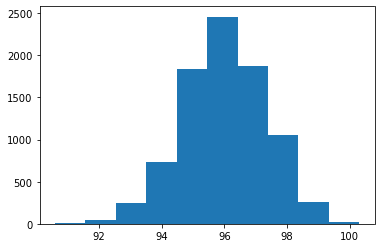

In [745]:
plt.hist(pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].release_speed)

In [746]:
df = schwarber
schwarbs = results('game_year')

In [747]:
schwarbs['pa_per_bb'] = schwarbs.plate_apps/schwarbs.walks
schwarbs.round(3)

game_year  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0       2015     1284         304  175    66  21.0     39          85  0.255   
1       2016      100          25   15     7   0.0      4           6  0.333   
2       2017     2198         506  284    92  31.0     61         155  0.209   
3       2018     2144         492  291   102  26.0     58         141  0.237   
4       2019     2539         606  379   132  38.0     65         156  0.249   
5       2020      989         230  128    36  11.0     32          67  0.185   
6       2021     2195         521  307   115  35.0     68         138  0.258   
7       2022     3211         737  418   138  52.0     95         218  0.218   
8       2023     3295         771  403   127  52.0    128         231  0.201   
9       2024     2936         708  394   144  39.0    104         203  0.244   

     obp    slg    ops   woba  pa_per_bb  
0  0.359  0.529  0.888  0.000      7.795  
1  0.440  0.381  0.821  0.000      6.250  
2  0.312  0.461  0.774  0.000      8.295  
3  0.327  0.465  0.792  0.000      8.483  
4  0.333  0.530  0.864  0.000      9.323  
5  0.309  0.385  0.693  0.000      7.188  
6  0.363  0.539  0.902  0.000      7.662  
7  0.324  0.508  0.832  0.358      7.758  
8  0.340  0.487  0.826  0.355      6.023  
9  0.359  0.480  0.838  0.362      6.808

How many games has Whit played at third in his career?
This is not something I ahve the data for.
Seven. He has played 33 innings there in his career.

In [749]:
df = castellanos
results('pitch_number')

pitch_number  pitches  plate_apps    bip   hits   hrs  walks  strikeouts  \
0              1     5904       870.0  854.0  310.0  53.0    0.0         0.0   
1              2     5038       889.0  879.0  336.0  57.0    0.0         0.0   
2              3     4146      1082.0  835.0  305.0  47.0    0.0       235.0   
3              4     3063      1019.0  567.0  199.0  33.0   63.0       379.0   
4              5     2045       959.0  490.0  177.0  21.0   72.0       392.0   
5              6     1085       639.0  285.0   93.0  11.0  118.0       232.0   
6              7      445       265.0  115.0   50.0   3.0   53.0        97.0   
7              8      180       119.0   55.0   16.0   2.0   31.0        32.0   
8              9       61        38.0   19.0    6.0   1.0   10.0         9.0   
9             10       23        18.0    9.0    2.0   0.0    5.0         4.0   
10            11        5         3.0    2.0    0.0   0.0    0.0         1.0   
11            12        2         1.0    0.0    0.0   0.0    1.0         0.0   
12            13        1         0.0    0.0    0.0   0.0    0.0         0.0   
13            14        1         0.0    0.0    0.0   0.0    0.0         0.0   
14            15        1         1.0    1.0    0.0   0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
0   0.366  0.370  0.639  1.009  0.160  
1   0.385  0.387  0.701  1.088  0.148  
2   0.287  0.293  0.513  0.806  0.113  
3   0.212  0.265  0.376  0.640  0.066  
4   0.201  0.264  0.328  0.591  0.091  
5   0.180  0.335  0.281  0.616  0.089  
6   0.236  0.389  0.368  0.757  0.084  
7   0.184  0.403  0.310  0.714  0.106  
8   0.214  0.421  0.321  0.742  0.130  
9   0.154  0.389  0.154  0.543  0.038  
10  0.000  0.000  0.000  0.000  0.000  
11    NaN  1.000    NaN    NaN  0.000  
12    NaN    NaN    NaN    NaN    NaN  
13    NaN    NaN    NaN    NaN    NaN  
14  0.000  0.000  0.000  0.000  0.000

In [750]:
#df = marsh
df['month'] = pd.to_datetime(df.game_date).dt.month

In [751]:
results('month')

month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3      149          42   25    12   0.0      4          13  0.316   
1      4     3430         900  611   230  28.0     63         221  0.278   
2      5     3764        1016  717   253  32.0     59         231  0.269   
3      6     3595         969  683   254  32.0     63         214  0.285   
4      7     3330         899  614   209  34.0     50         227  0.249   
5      8     3756        1009  707   263  55.0     55         230  0.281   
6      9     3264         875  625   239  40.0     47         194  0.295   
7     10      635         177  120    33   7.0     11          45  0.202   
8     11       77          16    9     1   0.0      1           6  0.067   

     obp    slg    ops   woba  
0  0.381  0.421  0.802  0.146  
1  0.330  0.462  0.792  0.113  
2  0.315  0.453  0.768  0.101  
3  0.335  0.467  0.803  0.114  
4  0.297  0.440  0.737  0.092  
5  0.328  0.528  0.856  0.119  
6  0.334  0.531  0.865  0.090  
7  0.254  0.393  0.647  0.229  
8  0.125  0.067  0.192  0.098

In [752]:
rojas_id =679032
df = pos[pos.batter == rojas_id]
results('p_throws').sort_values(by='pitches',ascending=False)

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
1        R     1407         393  292    90  5.0     15          80  0.247   
0        L      672         186  131    42  0.0      5          47  0.244   

     obp    slg    ops   woba  
1  0.280  0.346  0.626  0.271  
0  0.269  0.320  0.589  0.255

In [753]:
wheeler_id = 554430
wheels = pd.concat([pps[pps.pitcher == wheeler_id]
                    ,nphl[nphl.player_name == 'Wheeler, Zack']
                   ]
                  )

In [754]:
df = wheels[wheels.game_type != 'R']
games = results('game_pk')
games[games.strikeouts >=10]

game_pk  pitches  plate_apps  bip  hits  hrs  walks  strikeouts    ba  \
9   748563       92          24   13   3.0  1.0    1.0          10  0.13   

     obp    slg    ops   woba  
9  0.167  0.261  0.428  0.186

In [755]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id]
                   ,nphl[nphl.player_name == 'Harper, Bryce']
                    ])
df = harper
games = results('game_pk')
four_hit_games = games[games.hits >= 4]

In [756]:
df[df.game_pk.isin(four_hit_games.game_pk.tolist())].groupby('game_pk',as_index=False
                                                            ).agg({'game_date' : 'max'
                                                                   ,'home_team' : 'max'
                                                                   ,'away_team' : 'max'
                                                                  })

game_pk   game_date home_team away_team
0   490201  2017-04-10       WSH       STL
1   490324  2017-04-19       ATL       WSH
2   490419  2017-04-26       COL       WSH
3   491507  2017-07-18       LAA       WSH
4   565420  2019-04-19       COL       PHI
5   633393  2021-07-06       CHC       PHI
6   661542  2022-05-25       ATL       PHI
7   745535  2024-09-10       PHI        TB
8   745564  2024-06-22       PHI        AZ

Should Bohm have pitch hit for Marsh against Justin Wilson? Nah, he does not do that great against FF like Wilson's.

In [758]:
# Getting a pitch profile of Justin Wilson is going to be really difficult. Not that difficult, just not something I care to do.

In [759]:
df = pd.read_csv('justin wilson.csv')
df.groupby('pitch_type', as_index=False).agg({'release_speed' : ['count','mean','std']
                                              ,'release_spin_rate' : ['mean','std']
                                             }).round(1)#.sort_values(by='count',ascending=False)

pitch_type release_speed            release_spin_rate       
                     count  mean  std              mean    std
0         CH            18  88.5  1.3            1523.5  211.4
1         CU           301  79.9  2.9            2259.8  640.4
2         FC          1914  90.7  1.6            2409.7  191.6
3         FF          4610  95.4  1.4            2369.3  122.8
4         FS             2  84.1  1.8            1345.0    0.0
5         IN            29  57.0  5.9            1409.7   58.2
6         PO             4  87.8  5.5               NaN    NaN
7         SI          1095  95.6  1.5            2301.6  168.4
8         SL           367  84.5  3.3            2495.4  267.0

In [760]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.pitch_type == 'FC')
          &(bohm.p_throws == 'L')
          &(bohm.release_speed >= 90.7 - 1.6)
          &(bohm.release_speed <= 90.7 + 1.6)
          &(bohm.release_spin_rate >= 2409.7 - 191.6)
          &(bohm.release_spin_rate <= 2409.7 + 191.6)
         ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Bohm, Alec       35          13   10     5  0.0      1           2  0.417   

     obp  slg    ops   woba  
0  0.462  0.5  0.962  0.422

In [761]:
marsh = pd.concat([pos[pos.player_name == 'Marsh, Brandon']
                   ,nphl[nphl.player_name == 'Marsh, Brandon']
                  ])
df = marsh[(marsh.pitch_type == 'FF')
          &(marsh.p_throws == 'L')
          &(marsh.release_speed >= 95.4 - 1.4)
          &(marsh.release_speed <= 95.4 + 1.4)
          &(marsh.release_spin_rate >= 2369.3 - 122.8)
          &(marsh.release_spin_rate <= 2369.3 + 122.8)
         ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Marsh, Brandon       89          22    9     4  0.0      1          12   

     ba    obp    slg    ops   woba  
0  0.19  0.227  0.238  0.465  0.168

In [762]:
nphl[nphl.game_date == '2015-05-06'].groupby('fielder_2',as_index=False).agg({'des' : 'count'})

fielder_2  des
0     452095   24
1     454560   14
2     455117    9
3     467092   16
4     506747    7
5     521692   13
6     571466   12
7     592663    9

In [763]:
jt = pd.concat([pos[pos.batter == 592663]
                ,nphl[nphl.player_name == 'Realmuto, J.T.']
               ])
jt['month'] = pd.to_datetime(jt.game_date).dt.month
df = jt[jt.game_year >= 2019]
results('month').sort_values(by='ops',ascending=False)

month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3      109          29   18     9   2.0    4.0           7  0.375   
5      8     2270         581  399   152  28.0   40.0         131  0.288   
6      9     1969         509  351   125  25.0   31.0         115  0.268   
4      7     1511         394  270    96  18.0   28.0          90  0.269   
7     10      568         143   89    31   7.0   10.0          38  0.240   
1      4     1843         466  315   115  13.0   29.0         112  0.271   
2      5     1667         430  286    96  10.0   34.0         102  0.250   
3      6     1595         404  272    84  12.0   30.0          95  0.229   
8     11       66          17    6     1   0.0    0.0          10  0.062   

     obp    slg    ops   woba  
0  0.448  0.750  1.198  0.481  
5  0.348  0.545  0.892  0.376  
6  0.326  0.474  0.800  0.343  
4  0.327  0.471  0.798  0.340  
7  0.315  0.450  0.764  0.332  
1  0.326  0.420  0.746  0.323  
2  0.321  0.417  0.738  0.319  
3  0.297  0.390  0.687  0.298  
8  0.118  0.062  0.180  0.094

In [764]:
nelson = pd.concat([pps[pps.pitcher == 656793], nphl[nphl.player_name == 'Nelson, Nick']])
rhb_pitch_mix(nelson).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    521           96.2             2018.3   8.1   
5         SL           Slider    316           88.4             2357.5  10.5   
0         CH         Changeup    205           88.4             1844.9   9.9   
1         CU        Curveball     49           81.3             2332.8  10.2   
4         SI           Sinker     44           93.3             1958.8   9.7   
3         KN      Knuckleball      2           79.8              254.0  11.0   

   usage  
2   45.8  
5   27.8  
0   18.0  
1    4.3  
4    3.9  
3    0.2

In [765]:
df = nelson#pps[pps.pitcher == 656793]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020      402          97   66    21  4.0     11          20  0.247   
1       2021      338          78   37    15  0.0     16          22  0.263   
2       2022     1234         311  200    66  1.0     38          69  0.254   
3       2023       69          20   15     2  1.0      2           3  0.111   
4       2024       96          26   15     8  0.0      2           8  0.348   

     obp    slg    ops   woba  
0  0.330  0.412  0.742  0.000  
1  0.436  0.421  0.857  0.000  
2  0.347  0.346  0.693  0.310  
3  0.200  0.278  0.478  0.214  
4  0.423  0.435  0.858  0.379

In [766]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'}).sort_values(by='game_pk')

player_name  game_pk  pitcher
14           Nelson, Nick        1   656793
22          Uelmen, Erich        1   657272
17    Plassmeyer, Michael        1   674681
7          Harrison, Josh        2   543281
13        Moore, McKinley        3   686842
3           Clemens, Kody        4   665019
6          Falter, Bailey        8   663559
9        Kerkering, Orion       10   689147
11      Lorenzen, Michael       13   547179
16         Ortiz, Luis F.       14   656814
21    Sánchez, Cristopher       20   650911
20         Suárez, Ranger       26   624133
2         Brogdon, Connor       27   641401
1        Bellatti, Andrew       27   571479
4            Covey, Dylan       28   592229
23        Vasquez, Andrew       30   607755
24        Walker, Taijuan       31   592836
15            Nola, Aaron       36   605400
25          Wheeler, Zack       37   554430
12          Marte, Yunior       40   628708
0          Alvarado, José       50   621237
8           Hoffman, Jeff       62   656546
5   Domínguez, Seranthony       63   622554
19           Strahm, Matt       63   621381
18          Soto, Gregory       74   642397
10         Kimbrel, Craig       78   518886

In [767]:
# Rodolfo Castro hit a bunch of home runs to start 2021? His first five hits of the season were home runs lol

In [768]:
rodolfo = nphl[nphl.player_name == 'Castro, Rodolfo']

In [769]:
df = rodolfo

In [770]:
df[(df.game_year == 2021)
   #&(df.game_date <= '2021-07-30')
   &(df.events == 'home_run')
   &(df.type == 'X')
  ].sort_values(by='game_date')

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
2285         SI  2021-07-09           89.1          -1.75           5.99   
2246         FF  2021-07-11           90.6          -1.87           6.00   
2260         SI  2021-07-11           96.6          -1.42           6.06   
2216         CH  2021-07-28           87.6           1.61           5.75   
2225         SL  2021-07-28           85.6           3.41           4.96   

          player_name  batter  pitcher    events    description  ...  \
2285  Castro, Rodolfo  666801   607374  home_run  hit_into_play  ...   
2246  Castro, Rodolfo  666801   595191  home_run  hit_into_play  ...   
2260  Castro, Rodolfo  666801   544727  home_run  hit_into_play  ...   
2216  Castro, Rodolfo  666801   641778  home_run  hit_into_play  ...   
2225  Castro, Rodolfo  666801   623352  home_run  hit_into_play  ...   

      post_bat_score  post_fld_score  if_fielding_alignment  \
2285               3              12               Standard   
2246               1               5          Infield shift   
2260               4               5               Standard   
2216               1               7               Standard   
2225               3               7               Standard   

      of_fielding_alignment  spin_axis delta_home_win_exp delta_run_exp  \
2285               Standard      222.0             -0.001         0.974   
2246               Standard      217.0             -0.033         0.951   
2260               Standard      231.0             -0.168         1.965   
2216               Standard      136.0              0.008         0.924   
2225               Standard      203.0              0.004         1.611   

     bat_speed swing_length source  
2285       NaN          NaN      n  
2246       NaN          NaN      n  
2260       NaN          NaN      n  
2216       NaN          NaN      n  
2225       NaN          NaN      n  

[5 rows x 95 columns]

## Nationals (A) 45-47

### Game 1: Corbin vs Nola

### Game 2: vs Suarez

### Game 3: Gore vs Sanchez

## Cardinals (A) 48-410

### Game 1: Mikolas vs Turnbull
Turnbull pitching pretty well thru 5. Johan Rojas 2 for 2 with an RBI. Ya momma sitting on ma dick!

### Game 2: vs Wheeler

### Game 3: vs Nola

Putting in some Retrospective work which is interesting.

#### Masyn Winn's arm
Is he related to Randy Winn?

Masyn Winn, who this year has the seventh-highest max velocity on a throw and sixth best **Arm Strength** (Baseball Savant) in the big leagues, has six "qualifying" throws. This is how they breakdown.

Masyn Winn Six Qualifying Throws
1. E6, Masyn Winn throws a ball into the stands
2. E6, Masyn Winn throws a ball off the bag
3. E6, Masyn Winn pulls Goldie off the bag with the throw
4. 6-3, Nice diving play and strong throw gets... Rhys Hoskins.
5. 4-6-3, Bryce Harper trotting down to first gets gunned down by some measure with this dart thrown by Winn.
6. 1B, Trea Turner hustles out an infield single against one of the best throwers in baseball.

Let's get fired up about Trea Turner with the stick!

In [781]:
df = pos[pos.game_year == 2024]

In [782]:
player_results = results('player_name')
home_results = results('home_team')
#id_results = results('batter')

In [783]:
df = player_results
df = trea = df[df.player_name == 'Turner, Trea']
trea

player_name  pitches  plate_apps  bip   hits   hrs  walks  strikeouts  \
19  Turner, Trea     2121         558  418  152.0  21.0   29.0         103   

       ba    obp   slg    ops   woba  
19  0.291  0.335  0.46  0.795  0.344

In [1289]:
# Fastest pitches in 2024

In [1291]:
#def summarize(df):
df = pps[pps.game_year == 2024]    
df[['pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'game_date'
    ,'player_name'
    ,'inning'
   ]].sort_values(by='release_speed',ascending=False
                 ).reset_index(drop=True).head(10)

    
    
    
    
    
    
#summarize(pos[pos.game_year == 2024])

pitch_type  release_speed  release_spin_rate   game_date      player_name  \
0         SI          101.0             2205.0  2024-03-29   Alvarado, José   
1         SI          100.8             2187.0  2024-10-08   Alvarado, José   
2         SI          100.8             2201.0  2024-03-30    Soto, Gregory   
3         SI          100.5             2228.0  2024-03-29   Alvarado, José   
4         SI          100.5             2232.0  2024-03-29   Alvarado, José   
5         SI          100.5             1954.0  2024-08-03   Alvarado, José   
6         SI          100.5             2220.0  2024-04-13    Soto, Gregory   
7         FF          100.3             2295.0  2024-10-09  Estévez, Carlos   
8         SI          100.3             2222.0  2024-10-08   Alvarado, José   
9         SI          100.2             2110.0  2024-07-19   Alvarado, José   

   inning  
0       8  
1       7  
2       8  
3       8  
4       8  
5       8  
6       7  
7       6  
8       7  
9       9

## Pirates (H) 411-414

### Game 1: Jones vs Suarez

### Game 2:  vs Sanchez

### Game 3:  vs Turnbull

### Game 4: Keller vs Wheeler

# Rockies (H) 415-417
## Game 1: Quantrill vs Nola
The Phillies are locked in a 1-1 grind it out game with a benches clearing incident with the Colorado Rockies. Jeff Hoffman just tackled pinch runner Kyle Freeland at the plate and almost certainly dislocated Freeland's non-throwing shoulder. Ouch. Two guys who came up together in Colorado's system.

The dog is barking next door. Nice.

In [1299]:
# Kyle Tucker said me too! What a hit.

In [1300]:
# who the fuck is due up for the Phillies in the Bottom of the 10th?

In [1301]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']
#rojas = pos[pos.batter == ]
bohm = pache = pos[pos.player_name == 'Bohm, Alec']

In [1302]:
df = bohm[bohm.inning > 9]
results('home_team')

home_team  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0        ATL        8           2   1.0   0.0  0.0    0.0         1.0  0.000   
1        BAL        1           1   1.0   1.0  0.0    0.0         0.0  1.000   
2        CLE        2           1   1.0   1.0  0.0    0.0         0.0  1.000   
3        COL        3           1   0.0   0.0  0.0    0.0         1.0  0.000   
4        HOU        3           1   1.0   0.0  0.0    0.0         0.0  0.000   
5        LAD        4           1   1.0   0.0  0.0    0.0         0.0  0.000   
6        MIA       10           2   1.0   1.0  0.0    0.0         1.0  0.500   
7        NYM       11           3   2.0   0.0  0.0    0.0         1.0  0.000   
8        OAK        6           2   1.0   0.0  0.0    0.0         1.0  0.000   
9        PHI       46          18  16.0   5.0  0.0    0.0         2.0  0.333   
10       PIT       15           2   2.0   2.0  0.0    0.0         0.0  1.000   
11        SF        3           1   1.0   0.0  0.0    0.0         0.0  0.000   
12       STL        4           2   1.0   1.0  0.0    0.0         1.0  0.500   
13        TB        3           1   1.0   0.0  0.0    0.0         0.0  0.000   
14       WSH       13           2   2.0   0.0  0.0    0.0         0.0  0.000   

      obp    slg    ops   woba  
0   0.000  0.000  0.000  0.000  
1   1.000  2.000  3.000  1.254  
2   1.000  1.000  2.000  0.883  
3   0.000  0.000  0.000  0.000  
4   0.000  0.000  0.000  0.000  
5   0.000  0.000  0.000  0.000  
6   0.500  0.500  1.000  0.442  
7   0.000  0.000  0.000  0.000  
8   0.000  0.000  0.000  0.000  
9   0.278  0.333  0.611  0.245  
10  1.000  1.000  2.000  0.884  
11  0.000  0.000  0.000  0.000  
12  0.500  1.000  1.500  0.627  
13  0.000  0.000  0.000  0.000  
14  0.000  0.000  0.000  0.000

In [1303]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des')

player_name  batter   des
19     Wilson, Weston  642215    96
6     Guthrie, Dalton  656495   113
5         Ellis, Drew  656403   128
2     Castro, Rodolfo  666801   141
7        Hall, Darick  669742   205
9      Harrison, Josh  543281   392
11    Pache, Cristian  665506   426
17    Stubbs, Garrett  596117   496
4       Clemens, Kody  665019   609
13       Rojas, Johan  679032   726
3          Cave, Jake  595909   830
15      Sosa, Edmundo  624641  1130
10     Marsh, Brandon  669016  2149
8       Harper, Bryce  547180  2250
12     Realmuto, J.T.  592663  2297
0          Bohm, Alec  664761  2436
1   Castellanos, Nick  592206  2614
16      Stott, Bryson  681082  2881
18       Turner, Trea  607208  2883
14    Schwarber, Kyle  656941  3295

In [1304]:
pache = pos[pos.batter == 665506]
df = pache
results('home_team')

home_team  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0        ATL       41           9   5.0   2.0  0.0    1.0         3.0  0.250   
1        BAL       16           5   3.0   1.0  0.0    1.0         1.0  0.250   
2        CHC       28           8   5.0   1.0  0.0    0.0         3.0  0.125   
3        CIN       43          10   4.0   1.0  0.0    2.0         4.0  0.125   
4        COL       10           3   2.0   0.0  0.0    0.0         1.0  0.000   
5        CWS       10           2   1.0   0.0  0.0    0.0         1.0  0.000   
6        DET       28           6   1.0   1.0  0.0    1.0         4.0  0.200   
7        HOU        6           2   2.0   1.0  0.0    0.0         0.0  0.500   
8        LAA       13           3   1.0   0.0  0.0    1.0         1.0  0.000   
9        MIA       82          19  14.0   8.0  1.0    0.0         5.0  0.421   
10       MIL       14           3   0.0   0.0  0.0    2.0         1.0  0.000   
11       NYM       67          15  10.0   3.0  0.0    1.0         4.0  0.214   
12       NYY        3           2   2.0   0.0  0.0    0.0         0.0  0.000   
13       OAK       34           9   6.0   2.0  0.0    1.0         2.0  0.250   
14       PHI      415          97  50.0  17.0  1.0   15.0        32.0  0.212   
15       PIT       36           8   5.0   2.0  0.0    0.0         3.0  0.250   
16        SD       11           5   5.0   1.0  0.0    0.0         0.0  0.200   
17        SF       29           7   3.0   2.0  0.0    0.0         4.0  0.286   
18       STL       19           3   2.0   0.0  0.0    1.0         0.0  0.000   
19       TEX        9           4   2.0   0.0  0.0    0.0         2.0  0.000   
20       WSH        8           2   1.0   0.0  0.0    0.0         1.0  0.000   

      obp    slg    ops   woba  
0   0.333  0.375  0.708  0.315  
1   0.400  0.500  0.900  0.389  
2   0.125  0.125  0.250  0.110  
3   0.300  0.125  0.425  0.226  
4   0.000  0.000  0.000  0.000  
5   0.000  0.000  0.000  0.000  
6   0.333  0.200  0.533  0.262  
7   0.500  1.000  1.500  0.622  
8   0.333  0.000  0.333  0.230  
9   0.421  0.684  1.105  0.469  
10  0.667  0.000  0.667  0.464  
11  0.267  0.286  0.552  0.248  
12  0.000  0.000  0.000  0.000  
13  0.333  0.500  0.833  0.354  
14  0.330  0.325  0.655  0.296  
15  0.250  0.250  0.500  0.220  
16  0.200  0.600  0.800  0.314  
17  0.286  0.286  0.571  0.252  
18  0.333  0.000  0.333  0.232  
19  0.000  0.000  0.000  0.000  
20  0.000  0.000  0.000  0.000

In [1305]:
# Step 1: Define a Quality At Bat
# Step 2: Look at Phillies Quality At Bats
# Step 3: How many Quality At Bats does Nick Castellanos have when Johan Rojas is in the batting order?

## Game 2: Gomber vs Suarez

Brandon Marsh vs Charlie Blackmon
<br>Paul fucking Skenes
<br>Phillies Quality ABs
<br>Alec Bohm being that guy?
<br>Batting average over the course of the season, cumulative, running ba
<br>running revPAR
<br>Quarterly performance of key metrics
<br>FC-CU sequence

### Mr. Rager
<br>Ranger longest starts of his career
<br>Ranger pitches_per_start by month
<br>Ranger length of start

In [1309]:
# Real proud of this pull. Get to Ranger Suarez ID by looking at Phillies LHP in the Statcast era. Ranger has thrown more pitches
# than any other South Paw for the Phillies since 2015. Ranger tossed 19.6% of the pitches thrown by the Phillies from the right
# side of the rubber (batter's perspective). 1/5th of pitches thrown by a left-handed Phillies pitcher between 2015 and 2023
# came from Ranger Suarez. This is a testament to you, Mr. Rager.
pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)
df = pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)

tot = df.des.sum()
df['pct_of_total'] = round((df.des/tot),3)
df

ranger_id = 624133

In [1310]:
ranger = pps[pps.pitcher == ranger_id]
df = ranger
game_results = results('game_pk')
game_results.agg({'pitches' : ['min','max']})

pitches
min        2
max      112

In [1311]:
df = ranger.merge(game_results, left_on = 'game_pk', right_on = 'game_pk', suffixes = ('','_gr'))
df[df.pitches == 110].game_date.unique()

array(['2022-06-29'], dtype=object)

In [1312]:
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0             FF  2018-09-30           93.5           2.70           5.61   
1             SL  2018-09-30           82.1           2.68           5.72   
2             FF  2018-09-30           93.8           2.58           5.75   
3             FF  2018-09-30           94.1           2.69           5.64   
4             CH  2018-09-30           81.6           2.70           5.72   
...          ...         ...            ...            ...            ...   
10238         SI  2024-03-31           90.5           1.78           6.11   
10239         SI  2024-03-31           90.6           1.87           6.10   
10240         FC  2024-03-31           88.0           1.95           6.16   
10241         SI  2024-03-31           90.1           1.88           5.99   
10242         SI  2024-03-31           90.8           1.93           5.95   

          player_name  batter  pitcher     events      description  ...   bip  \
0      Suárez, Ranger  518692   624133  strikeout  swinging_strike  ...   5.0   
1      Suárez, Ranger  518692   624133        NaN             foul  ...   5.0   
2      Suárez, Ranger  518692   624133        NaN             foul  ...   5.0   
3      Suárez, Ranger  518692   624133        NaN  swinging_strike  ...   5.0   
4      Suárez, Ranger  518692   624133        NaN             ball  ...   5.0   
...               ...     ...      ...        ...              ...  ...   ...   
10238  Suárez, Ranger  660670   624133        NaN             ball  ...  10.0   
10239  Suárez, Ranger  660670   624133        NaN    called_strike  ...  10.0   
10240  Suárez, Ranger  660670   624133        NaN             ball  ...  10.0   
10241  Suárez, Ranger  660670   624133        NaN    called_strike  ...  10.0   
10242  Suárez, Ranger  660670   624133        NaN             ball  ...  10.0   

       hits  hrs  walks  strikeouts     ba    obp    slg    ops   woba  
0       1.0  0.0    2.0         5.0  0.100  0.250  0.200  0.450  0.219  
1       1.0  0.0    2.0         5.0  0.100  0.250  0.200  0.450  0.219  
2       1.0  0.0    2.0         5.0  0.100  0.250  0.200  0.450  0.219  
3       1.0  0.0    2.0         5.0  0.100  0.250  0.200  0.450  0.219  
4       1.0  0.0    2.0         5.0  0.100  0.250  0.200  0.450  0.219  
...     ...  ...    ...         ...    ...    ...    ...    ...    ...  
10238   3.0  1.0    1.0         7.0  0.176  0.222  0.412  0.634  0.271  
10239   3.0  1.0    1.0         7.0  0.176  0.222  0.412  0.634  0.271  
10240   3.0  1.0    1.0         7.0  0.176  0.222  0.412  0.634  0.271  
10241   3.0  1.0    1.0         7.0  0.176  0.222  0.412  0.634  0.271  
10242   3.0  1.0    1.0         7.0  0.176  0.222  0.412  0.634  0.271  

[10243 rows x 120 columns]

In [1313]:
df = pos[(pos.batter == ranger_id)
    &(pos.game_date == '2021-09-25')
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Suárez, Ranger        9           3    2   0.0  0.0    0.0           1   

    ba  obp  slg  ops  woba  
0  0.0  0.0  0.0  0.0   0.0

Ranger Longest Starts by Month
df

In [1315]:
df.groupby('game_date',as_index=False).agg({'pitches' : 'max'}).sort_values(by='pitches',ascending=False).head(15)

KeyError: "Column(s) ['pitches'] do not exist"

In [ ]:
df[df.pitches >= 100].game_date.unique()

In [ ]:
# Sloppy but the answer is no not really

<br>Cristian Pache who the fuck do you think you are?

In [ ]:
# How to Snipe Cristian Pache? WPA
pos[pos.game_year == 2023].groupby('player_name',as_index=False
                                  ).agg({'batter' : 'max'
                                         ,'delta_home_win_exp' : 'min'
                                        }).sort_values(by='delta_home_win_exp')
pache_id = 665506
pache_phils = pos[pos.batter == pache_id]
pache_nphl = nphl[nphl.player_name == 'Pache, Cristian']
pache = pd.concat([pache_phils, pache_nphl])

In [ ]:
pache_defensive_opps = pps[((pps.fielder_8 == pache_id) & (pps.hit_location == 8)) # Center Field
                           | ((pps.fielder_7 == pache_id) & (pps.hit_location == 7)) # Left Field
                           | ((pps.fielder_9 == pache_id) & (pps.hit_location == 9)) # Right Field
                          ]
pache_defensive_opps.groupby('events', as_index=False).agg({'des' : 'count'})

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'triple'][['hit_location'
                                                               ,'game_date'
                                                               ,'player_name'
                                                               ,'launch_speed'
                                                               ,'launch_angle'
                                                               ,'estimated_ba_using_speedangle'
                                                               ,'events'
                                                               ,'inning'
                                                               ,'inning_topbot'
                                                               ,'home_team'
                                                               ,'away_team'
                                                              ]]

## Game 3: ? vs Sanchez

# White Sox (H) 419-421

## Game 1: Crochet vs Turnbull
First game of the season for Kellen. Took Seana along. It was a nice time. Chilly night. She was worried about having to take a quiz. I had a few beveraginos. Wet and cold. Bohm two 3-R HRs in first two ABs. City Connect jersey making its second appearance.

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-19')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


## Game 2: Soroka vs Wheeler
I did not watch this game since it was 4/20 and Knicks vs. Sixers G1 was that night.
Wheeler takes no-no into the 8th inning. Good velo, but induced a lot of weak contact and defense made the plays????

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-20')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


### Eloy Jimenez BIP

In [ ]:
pps[pps.game_date == '2024-04-20'].groupby('batter',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              ,'stand' : 'max'
                                              ,'launch_speed' : 'max'
                                             }
                                            ).sort_values(by='launch_speed',ascending=False)

# Snipe Eloy ID by grouping pps at batter level and sorting by launch speed

eloy_id = 650391

pps[(pps.batter == eloy_id)
    &(pps.type == 'X')
   ].groupby(['player_name'
              ,'p_throws'
              #,'pitch_type'
              #,'events'
              #,'description'
             ]
             ,as_index=False
            ).agg({'launch_speed' : 'mean'
                  ,'des' : 'count'
                  #,'game_pk' : 'nunique'
                  ,'launch_angle' : 'mean'
                   ,'pitcher' : 'max'
                   ,'estimated_ba_using_speedangle' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                  }
                 ).sort_values(by='des',ascending=False).round(3)

In [ ]:
df = pps[(pps.batter == eloy_id)
    #&(pps.type == 'X')
   ]
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
src = pd.read_csv("C:\\Users\\Kellen\\Downloads\\test.csv")
src[['player_name'
     ,'pitches'
     #,'plate_apps'
     #,'bip'
     ,'hits'
     #,'home_runs'
     #,'walks'
     #,'strikeouts'
     ,'ba'
     #,'obp'
     ,'slg'
     ,'woba'
    ]
   ]

# Vince Velasquez Game
Juan Nicasio was brought in to slam the door in the 9th inning of this one. That is how I got the game_pk.

In [ ]:
nicasio_id = 504379
df = pps[pps.pitcher == nicasio_id]
df.groupby('game_year',as_index=False
                                      ).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.inning == 9].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                            ,'game_pk' : 'max'
                                                            ,'home_team' : 'max'
                                                            ,'post_home_score' : 'max'
                                                            ,'away_team' : 'max'
                                                            ,'post_away_score' : 'max'
                                                           })

In [ ]:
pps[(pps.game_pk == 567116)
    &(pps.hit_location == 7)
   ].groupby(['fielder_7'
              ,'batter'
              ,'inning'
              ,'outs_when_up'
             ],as_index=False).agg({'des' : 'count'
                                    ,'launch_speed' : 'max'
                                    ,'launch_angle' : 'max'
                                    ,'launch_speed_angle' : 'max'
                                    ,'hit_distance_sc' : 'max'
                                    ,'estimated_ba_using_speedangle' : 'mean'
                                   }).sort_values(by='inning')

## Game 3: vs Nola
Kellen's second game of the season. A nice afternoon out with Kyuyeol Kim. Little chilly. Nice morning with Seana first. Ripping beer bongs in the parking lot of the High School Reunion, is that what you should be doing??? They all went to "St Joes Prep"????????? WTF. Baby Got Back. Sir Mix-a-Lot. Horrific spinal disorder.

# Reds (A) 422-424
## Game 1: Greene vs Suarez
Went to dinner with Kyuyeol and Zhihui this evening so missed this and the Sixers playoff game. <br>
Ranger masterpiece.

## Game 2: vs Sanchez

Been really interested in defense lately so going to look at defensive opportunities for the Phillies this year. <br>
Doing some exploring on Baseball Savant too.

In [ ]:
pps[pps.game_year == 2024]

## Game 3: Lodolo vs Turnbull

In [ ]:
df = pp24 = pps[pps.game_year == 2024]
df.groupby('player_name',as_index=False
          ).agg({'pitcher' : 'max'
                 ,'des' : 'count'
                 ,'game_pk' : 'nunique'
                })

In [ ]:
soto_id = 642397
df = soto = pps[pps.pitcher == soto_id]
results('game_year')

## Game 4: vs Wheeler

# Padres (A) 426-428
## Game 1: vs Nola 
Nola 8 strong, offense was hot. Harper dong. In Fredericksburg for Jake's baby shower the next day.

## Game 2: Cease vs Suarez
Suarez gem. Bohm is hot. Ya momma is a ya know. Jake's baby shower. Good time.

Good stuff in the whatever inning, probably the 5th? Schwarber walks. Turner hits a little dribbler to third but Whit hustles to beat it out from second. Harper walks. Bohm singles to right and Turner speeds home ahead of a good throw by Tatis.

Phillies players doing what they do best and being better than the other team also doing their best.

## Game 3: vs Walker
Taijuan Walker comes back and bumps Turnbull to the bullpen. Controversial since Turnbull has been pitching well this season. I think you have to let Tai Walker start. Turnbull will run out of gas. Not sure how we will pitch out of the bullpen though.

# Angels (A) 429-51
## Game 1: Canning vs Sanchez
Brutal game. Really quite the brutal game of baseball. I do some really meh stuff ya know.

## Game 2: vs Turnbull
They are giving Turnbull another start after previously insisting that Turnbull was going to the bullpen. That is quite the change, but it is about putting the Phillies best pitches in positions to throw the most pitches for this team. 

That is not entirely true. It is the culmination of all sorts of things.
It is about getting those guys to record the most outs for the team.

## Game 3: Sandoval vs Wheeler
I have no idea, Phils lost a close one.

# Would Rojas have made that catch?
Ok, I have an epiphany and a commercial break. Cling to this thought.
<br>

Look at launch_speed, launch_angle, hit_distance_sc and see if Pache and Rojas made plays on them. I cannot see the distance they covered or catch probability in my data, but I can watch the video then go hunt for those metrics.

Dogshit play by Bradley fucking Zimmer in August 2022. The Phillies were in the midst of a playoff hunt that would ultimately bring about the club's first playoff appearance since 2011 and first National League pennant since 2009 with Brad Hand on the mound, Bradley Zimmer in center, and Yairo fuck Munoz in right field.

So, would Johan Rojas have caught that ball? Let's identify the pitches then watch the videos.

In [ ]:
cfs = pps.groupby('fielder_8',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.batter.isin(cfs.fielder_8)].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                     ,'batter' : 'max'
                                                                     ,'game_pk' : 'nunique'
                                                                    }).sort_values(by='des',ascending=False)

In [ ]:
pps[(pps.inning == 9) &  (pps.game_date == '2022-08-23') & (pps.events == 'triple')
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]

In [ ]:
rojas_id = 679032
pps[(pps.fielder_8 == rojas_id) & (pps.hit_location == 8)
    #&(pps.launch_speed == 95.6) 
    &(pps.hit_distance_sc >= 350) & (pps.hit_distance_sc <= 354)
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]#[['launch_speed','launch_angle','inning','game_date','estimated_ba_using_speedangle','events']]

# Without knowing how far he was from the ball, I think it is fair to suggest Rojas probably could have made this catch.

In [ ]:
phils_sc[(phils_sc.type == 'X')
         &(phils_sc.hit_location == 8)
        ].groupby('events',as_index=False
                 ).agg({'launch_speed' : ['min','max','mean','std']
                        ,'estimated_ba_using_speedangle' : ['min', 'max', 'mean', 'std']
                        ,'launch_speed_angle' : ['min', 'max', 'mean', 'std']
                        ,'launch_angle' : ['min', 'max', 'mean', 'std']
                       }).round(3)

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'field_out'].agg({'estimated_ba_using_speedangle' : ['min','max','mean','std']})

In [ ]:
plt.hist(pache_defensive_opps[pache_defensive_opps.events == 'field_out'].estimated_ba_using_speedangle)
plt.show()

# Bryson Stott turning double plays as a Second basemen, or as a shortstop

In [ ]:
stott_id = 681082

gidp = pps[pps.game_year.isin([2022,2023])
    &(pps.events == 'grounded_into_double_play')
   ]
df = pd.concat([gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ]
,gidp[(gidp.fielder_6 == stott_id)
     &(gidp.hit_location.isin([1,3,4]))
    ]
          ])

In [ ]:
gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ].groupby(['fielder_4','game_year'],as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.fielder_4 == stott_id][['game_date'
    ,'inning'
    ,'hit_location'
    #,'fielder_4'
    #,'fielder_6'
    ,'pitcher'
    ,'player_name'
    ,'pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'launch_speed'
                              ,'estimated_ba_using_speedangle'
   ]].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(5)

In [ ]:
group = 'game_year'
for group in ['game_year','pitcher','fielder_4']:
    print(gidp.groupby(group,as_index=False).agg({'des' : 'count'}))#.sort_values(by='des',ascending=False)

In [ ]:
gidp.groupby('hit_location',as_index=False).agg({'des' : 'count'})

# Aaron Nola Weather

In [ ]:
weather = pd.read_csv('C:\\Users\\Kellen\\Downloads\\Philly Weather 2015 to 20230707.csv')

In [ ]:
weather['Date'] = pd.to_datetime(weather.DATE_VALUE)
weather['date'] = weather['Date'].dt.date

In [ ]:
pps['date'] = pd.to_datetime(pps.game_date).dt.date
nola = pps[pps.pitcher == nola_id].merge(weather, left_on = 'date', right_on = 'date')

In [ ]:
df = nola[nola.home_team == 'PHI']

In [ ]:
temps = df.groupby('game_date',as_index=False).agg({'MAX_TEMPERATURE' : 'max'})

In [ ]:
final = results('game_date').merge(temps,left_on = 'game_date',right_on='game_date')

In [ ]:
x = final.MAX_TEMPERATURE
y = final.strikeouts
title = 'Aaron Nola Weather'
xlabel = 'Max Temp'
ylabel = 'Ks'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

In [ ]:
def graph(x,y, title, xlabel, ylabel, colors):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    #title = 'Velo vs. Spin Rate' # Title the graph
    #xlabel = 'Spin' # Label the x axis
    #ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                    ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

# Roman Quinn infield hits

In [ ]:
quinn_id = 596451
rq = pos[pos.batter == quinn_id]
rq[rq.events == 'single'][['game_date'
                          ,'inning'
                          ,'launch_speed'
                          ,'launch_angle'
                          ]
                         ].sort_values(by='launch_speed').head(20)

# 2016-2018 Pitching

## Jake Thompson
He has punched out some truly wild guys, lots of MVPs and former Phillies. Also lots of pitchers. That is it.

## Drew Anderson
This fucking guy. He barely pitched but he struck out Mike Trout!

## Ricardo Pinto
I should give some true TLC to the Ricardo Pinto game.

## Yacksel Rios
I was a big fan.

## Edubray Ramos
Ya momma sitting on ma dick!

## Victor Arano
Dude was legit.

# Phillies Walk Off Home Runs in the Statcast Era

In [ ]:
pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_year',as_index=False # groupby
            ).agg({'des' : 'count'}
                 ).sort_values(by='des',ascending=False)

In [ ]:
df=pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_pk',as_index=False # groupby
            ).agg({'game_year' : 'max'
                   ,'game_date' : 'max'
                   ,'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                   ,'batter' : 'nunique'
                   ,'inning' : 'max'
                   ,'player_name' : 'max'
                   }
                 ).sort_values(by=['game_year','game_date'],ascending=False)
df

In [ ]:
#df[df.game_year == 2023] # 1 walk off
#df[df.game_year == 2022] # 2 walk offs
df[df.game_year == 2021] # 3 walk offs
#df[df.game_year == 2020] # 2 HRs

In [ ]:
for gy in df.game_year.unique():
    #late_hrs = len(df[df.game_year == gy])
    walk_offs = df[(df.game_year == gy)
       &(df.post_home_score > df.post_away_score)
      ]
    print(gy, ':', len(walk_offs), '/', len(df[df.game_year == gy]), '=', round(len(walk_offs)/len(df[df.game_year == gy]),3))

In [ ]:
df[df.game_year == 2015][['inning', 'post_home_score', 'post_away_score', 'player_name']]
                         #,'launch_speed', 'launch_angle'

In [ ]:
pos[(pos.game_pk.isin(df[df.batter >1].game_pk.unique()))
    &(pos.inning >= 9)
    &(pos.events == 'home_run')
   ][['game_year', 'game_date', 'inning', 'at_bat_number'
     ,'player_name', 'launch_speed', 'launch_angle']].sort_values(by='game_year', ascending = False)#.agg({'game_year' : 'count'})

In [ ]:
df = phils_sc_24 = phils_sc[phils_sc.game_year == 2024]
df.groupby(['game_year'
            #,'p_throws'
           ],as_index=False).agg({'game_pk' : 'nunique'})

df = phils_sc
df['date'] = pd.to_datetime(df.game_date)

df['month'] = df.date.dt.month

In [ ]:
years = pd.DataFrame()
for g in phils_sc.game_year.unique().tolist():
    df = phils_sc[phils_sc.game_year == g]
    x = results('month')
    x['year'] = g
    years = pd.concat([years,x])

years

In [ ]:
x = df.groupby('month',as_index=False).agg({'game_pk' : 'nunique'
                                        ,'game_year' : 'nunique'
                                       }).sort_values(by='game_pk',ascending=False)

x['games_per_month'] = x.game_pk / x.game_year
x.sort_values(by='games_per_month',ascending=False)
# Typically 27 games in a long month. How about 29 games being 18% of the total year

# The Story of the Season So Far
This is my blog about the current state of the tourism industry. Jesus Fucking Christ.

No, it is about the Phillies season so far.

By team: phils_sc
<br>games per month - groupby('month').agg({'game_pk' : 'nunique'})
<br>runs per month 
<br>team ERA per month
<br>team results, results('game_year')
<br>results('month')
<br>results('home_team')
<br>results('away_team')
<br>results('p_throws')
<br>results('stand')

In [ ]:
po24_players = results('player_name').sort_values(by='woba',ascending=False)
po24_game_year = results('game_year').sort_values(by='woba',ascending=False)
po24_home_team = results('home_team').sort_values(by='woba',ascending=False)
po24_away_team = results('away_team').sort_values(by='woba',ascending=False)
po24_p_throws = results('p_throws').sort_values(by='woba',ascending=False)
po24_stand = results('stand').sort_values(by='woba',ascending=False)

groups = [po24_players
,po24_game_year,
po24_home_team
,po24_away_team
,po24_p_throws
,po24_stand
]
for g in groups:
    print(g)

In [ ]:
df = pos[pos.game_year == 2024]
def story(df):
    year_totals = results('game_year')
    

In [ ]:
pos.groupby('game_year',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              })
results('game_year')

I thought I had a sentence on each player. Maybe I wrote it out by hand? <br>
How do you think I am managing the nonsense.

# Zack Wheeler on Extra Rest
How about the piggyback?
Pitching Staff Thoughts <br>
1. Zack Wheeler. Stud, but something seems a little off in the early going.
2. Aaron Nola, stud. Deserving of the contract.
3. Ranger Suarez, the story of the season. He is going to narrate this portion of the video yearbook.
4. Cristopher Sanchez, lost command of the changeup because he is overthrowing his fastball and slider.
5. Spencer Turnbull, some really good outings but fading. Regressing to mean? Expectations? Mike Lo or Andrew Vazquez?
6. Taijuan Walker, one start and gave up 6 runs.
7. Jeff Hoffman, closer now.
8. Gregory Soto, lights out for the most part.
9. Jose Alvarado, shaky but high leverage.
10. Seranthony, struggling? Not getting whiffs ont he slider, not throwing strikes with FF.
11. Orion Kerkering, just came back but has had two bad outings. Elite stuff.
12. Yunior Marte, hot hand in the early going, coming back down?
13. Ricardo Pinto, nice story and ate 4 innings in an early April game. Length, depth.
14. Nick Nelson, has thrown pitches for this team.
15. Connor Brogdon, DFAd
16. Matt Strahm, forgettable.


Nick Castellanos points to the HR
Rojas pimped it too.
Alec Bohm w RISP

Batting Thoughts:
1. Kyle Schwarber, quality at bats vs ops, woba, runs_created. What is the value of pitches_per_pa at the top of your lineup?
2. Trea Turner, really good so far.
3. Bryce Harper, unlucky?
4. Alec Bohm, elite w RISP
5. J.T. Realmuto, on pace for 30 HRs
6. Brandon Marsh, hot start, hitting the ball hard, not whiffing.
7. Nick Castellanos, brutal but will positive regress
8. Bryson Stott, has to platoon with 35 yo Whit Merrifiel
9. Johan Rojas, what a trip.
10. Whit Merrifield, trash bad underlying.
11. Edmundo Sosa, solid underlying small sample.
12. Cristian Pache, exists brother.
13. Garrett Stubbs

14. Kody Clemens
15. Jake Cave

In [ ]:
players = pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                              ,'game_pk' : 'nunique'
                                              ,'des' : 'count'
                                              #,'pitch_type' : '
                                             })

In [ ]:
df = pps[pps.game_year == 2024]
x=df.groupby(['pitcher','game_pk','inning_topbot'],as_index=False).agg({'post_home_score' : 'max'
                                                                       ,'post_away_score' : 'max'
                                                                       ,'game_pk' : 'nunique'
                                                                       ,'at_bat_number' : 'nunique'
                                                                       #,'pitch_type' 
                                                                      }).merge(players,left_on = 'pitcher',right_on='pitcher')
                                                                               

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'batter' : 'max'})

# Who is the Best Defensive Catcher in Baseball?

# May 2024
Well I am creating this on May 12, 2024. So diary, I have quite a bit to catch up on.

## Start with a Look at the Phillies on Baseball Reference
Bohm is elite, hitting .343 (up 30% from his xBA) to produce a 170 OPS+. With RISP, he is hitting over .400 (+14%). <br>
Harper is producing despite not getting many hits. He has been unlucky (-17% from xBA) but has 9 dongs and wRC+ of 140. <br>
Turner was hot, then got hurt. <br>
Marsh has cooled off significantly. <br>
Castellanos is heating up but started off in a horrific slump and has a ways to go to catch up. <br>
Well, that is ok because Marsh started out pretty hot but is coming back to earth, he cannot face lefties (.162 xBA vs LHP). <br>
Schwarber slow to start but finding himself (pitches_per_plate_apps trending back to his Phillies mean of 7.3) <br>
JT doing his thing, swinging a consistent stick overall with runs of 10 games <br>
Stubbs stinks <br>
Stott slow start but finding his way <br>
Pache meh <br>
Rojas figuring it out? <br>
Edmundomania. Unserious baseball. .802 OPS. 2 OAA at SS. Slugs against LHP (.576 SLG vs LHP). <br>
Whit - slow start he will figure it out (regression to mean) <br>
Kody Clemens hits <br>
If I forgot anyone, then they must really stink.



### Pitchers
Wheels - Really battling his way with a dip in velo but he is effective. Lots of unearned runs :( <br>
Nola - shoving it, consistent, k/9 down but just elite run prevention. home_runs / plate_apps down 10& from career average. <br>
Suarez - lights out, using that cutter more. Lots of backwards Ks - how is he doing it? Sequencing? <br>
Sanchez - up and down but overall good results. Pitch mix (throw your fucking CH Cristian) <br>
Turnbull - Elite when in, slowing down, walks_per_plate_apps ticking up, still spinning that ST tho. <br>
Walker - Effective when on the mound, velo is down but he can throw that cutter and slider well. Less splitter () <br>
Hoffman - elite, throw that fucking SL <br>
Strahm - strikeout machine? What the fuck? Psycho <br>
Alvarado - saves, just overwhelming <br>
Dominguez - struggling <br>
Soto - -dealing but not getting results <br>
Yunior Marte - pitched well but ran into the ground. On the IL <br>
Orion - Not spinning it well in the early going but starting to figure it out? <br>
Ruiz - WHO? <br>
Luis F. Ortiz - hurt in early going <br>
Brogdon - pitched meaningful innings on the 2024 Philadelphia Phillies. <br>
Pinto - Joey bought his jersey <br>
Nelson - With Nick Nelson in AAA, who will smoke cigs in the locker room? <br>

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SFG 53-56 (H)
I was in DC for this weekend. Well I went two of these four games lol.

## Game 1: Hicks vs Nola
Jordan Hicks is a starter now? Got sauced with the dentists, City Connect, offense battles.

## Game 2: vs Suarez
Another Suarez gem, ugly night, lots of offense.

## Game 3: Webb vs Walker
Sunday Night Baseball. Walker shoves. Harper 3-R Home Run. Phils are hot.

## Game 4: Black vs Wheeler
Wheeler gem. Way to battle and close out the four-game sweep you stud.

# TOR 57-58 (H)
Short two-game midweek stint for Phillies, split with the visiting Blue Jays.

## Game 1: Berrios vs Sanchez
Berrios battles but the offense is too good. Sanchez deals and Turnbull piggybacks to finish the last couple innings.

## Game 2: Bassitt vs Nola
The win streak ends, Nola is mortal. This team is not perfect.

# MIA 510-512 (A)
Weekend swing into Miami, bats were hot. Wheeler battles on Sunday but Phils cannot complete sweep.

## Game 1: Rogers vs Suarez
Dude, Ranger is legitimately pitching like a stud. Gold Glove and Cy Young. Venezuelan Greg Maddux.

## Game 2: Luzardo vs Walker
Walker and Luzardo duel. Phillies offense is just too good. Clicking.

## Game 3: Garrett vs Wheeler
Casty 3-R dong in the first but Wheeler has to grind and gets a bit unlucky. Offense forces extras but Fish pull it out in 10.

# NYM 513-514 (A)
Too bad I will be in NYC later this week. Let's keep the good vibes rolling. A split is pretty good here. Hopefully Cris Sanchez deals. Will Turnbull be available? He pitched Sunday but just one inning.

## Game 1: Manaea vs Sanchez
How do the Phillies match up against Manaea or pitchers like him? <br>
How do the Mets match up against Sanchez or pitcher likes him? <br>

In [ ]:
# Read in Manaea Data
manaea = pd.read_csv('manaea.csv')

# Define Manaea vs LHB
manaea_lhb_career = lhb_pitch_mix(manaea)
manaea_lhb_2024 = lhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea vs RHB
manaea_rhb_career = rhb_pitch_mix(manaea)
manaea_rhb_2024 = rhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea ID
manaea.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})
manaea_id = 640455

# Define Phillies vs Manaea
manaea_vs_phils = pos[pos.pitcher == manaea_id]

# Define Non-Phillies vs Manaea
manaea_vs_nphils = nphl[nphl.pitcher == manaea_id]

In [ ]:
manaea.groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = manaea_vs_phils
results('game_year')

Sean Manaea has pitched three times against the Phillies in his career.
- In 2017, he shoved. He also faced a bunch of idiots that day.
- In the 2022 NLCS, he got hit around. He gave up a 1.952 OPS.
- Last year, he gave up 3 Home Runs in 18 plate appearances. ONly four hits, but he got rocked.

In [ ]:
manaea_pos_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_pos_results[manaea_pos_results.player_name.isin(['Stott, Bryson'
                                                        ,'Bohm, Alec'
                                                        ,'Harper, Bryce'
                                                        ,'Castellanos, Nick'
                                                        ,'Marsh, Brandon'
                                                        ,'Sosa, Edmundo'
                                                        ,'Rojas, Johan'
                                                       ]
                                                      )
                  ]

KS Projected Lineup
1. Stott 4 - Has hit pretty well against Manaea in his career and hits these sorts of lefties pretty well.
2. Bohm 5 - Hits well against Manaea, is hot, and hits guys like Manaea well.
3. Harper 3 - Ok against Manaea in his career.
4. Castellanos 0 - Hot and can drive the ball against Manaea and guys like him in his career.
5. Marsh 7 - Punched out twice by Manaea, neither AB looked comfortable. Decent against guys like Manaea.
6. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. Hits guys like Manaea well. He is hot.
7. Pache 9 - Hits lefties like Manaea well.
8. Stubbs 2 - Struggles against guys like Manaea but JT does not have a ton of success and is still hurt. Probably my hottest take.
9. Rojas 8 - Only a couple PAs against guys like Manaea.

After review, Whit for Marsh seems like a must. Maybe swap out Stubbs if Sanchez pitches significantly better to JT.
1. Whit 7 - Rakes against Manaea and guys like him in his career
2. JT 2 - I don't think you can keep JT out of the lineup unless Stubbs rakes against archetype.
3. Harper 3 - 1/3 in his career against Manaea. Bashes against archetype.
4. Bohm 5 - Likes Manaea, hit a homer against him. Hits well of Manaea-esque
5. Castellanos 0 - Has hit Manaea well in his career.
6. Stott 4 - Hits pretty well against Manaea in his career, well he has some interesting splits against these sorts of lefty pitches.
7. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. He is hot. Solid against archetype.
8. Pache 9 - Hot and likes these sorts of lefties
9. Rojas 8 - Maybe too many righties here but well I guess there are only two LHB in the whole lineup. Meh against archetype.

In [ ]:
df = manaea_vs_nphils
manaea_nphl_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_nphl_results[manaea_nphl_results.player_name.isin(['Merrifield, Whit', 'Castellanos, Nick'])]

In [ ]:
# Manaea Pitch Profile in Career
manaea.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max', 'mean', 'std']
                                                 ,'release_spin_rate' : ['min','max', 'mean', 'std']
                                                }).round(1)

In [ ]:
manaea_lhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    &(pos.release_spin_rate >= 1980.4-100.2)
    &(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'ST')
    &(pos.release_speed >= 78.9-2.1)
    &(pos.release_speed <= 78.9+2.1)
    #&(pos.release_spin_rate >= 2119.3-144)
    #&(pos.release_spin_rate <= 2119.3+144)         
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
manaea_rhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    #&(pos.release_spin_rate >= 1980.4-100.2)
    #&(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Bohm, Alec'
                            ,'Realmuto, J.T.'
                            ,'Castellanos, Nick'
                            ,'Sosa, Edmundo'
                            ,'Pache, Cristian'
                            ,'Rojas, Johan'
                            ,'Merrifield, Whit'
                           ]
                          )
     )
   ]
results('player_name')

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                                                ,'des' : 'count'
                                                                                               }).sort_values(by='des',ascending=False)
alvarado_id = 621237

In [ ]:
df = pps[(pps.pitcher == alvarado_id)
    &(pps.home_team == 'NYM')
   ]
results('stand')

## Game 2: Butto vs Nola
Nola owns the Mets? <br>
Jose BUTTo vs the Phillies <br>

In [ ]:
butto = pd.read_csv('butto.csv')
butto.groupby('game_year',as_index=False).agg({'des' : 'count'})

# NYM 515-516 (H)
## Game 1: vs Suarez
## Game 2: vs Walker

# WAS 517-519 (H)
## Game 1: Irwin vs Wheeler

## Game 2: Gore vs Sanchez

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                                                ,'pitcher' : 'max'
                                                                                               }).sort_values(by='des',ascending=False)
sanchez_id = 650911

sanchez24 = pps[(pps.game_year == 2024) & (pps.pitcher == sanchez_id)]
sanchez = pps[pps.pitcher == sanchez_id]
sanchezWSH = sanchez[(sanchez.home_team == 'WSH') | (sanchez.away_team == 'WSH')]

In [ ]:
pps[pps.game_year == pps.game_year.max()].groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'}
                                                                                 ).sort_values(by='game_pk',ascending=False)

In [ ]:
df = sanchezWSH = sanchezWAS
results('game_date')

## Cris Sanchez Start vs WSH on 4/7/2024
First, my notes from this journal. <br>
N/a <br>

Wonderful.


In [ ]:
pps[pps.game_date == '2024-04-07'
   ].groupby('game_pk', as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'home_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'away_team' : 'max'
                  })

In [ ]:
def game_summary(df):
    x = df.groupby('game_date', as_index=False
              ).agg({'game_pk' : 'max'
                     ,'home_team' : 'max'
                     ,'post_home_score' : 'max'
                     ,'away_team' : 'max'
                     ,'post_away_score' : 'max'
                     ,'estimated_ba_using_speedangle' : 'mean'
                     ,'estimated_woba_using_speedangle' : 'mean'
                     ,'des' : 'count'
                     ,'pitcher' : 'nunique'
                     ,'inning' : 'nunique'
                     ,'at_bat_number' : 'nunique'
                    }).round(3)
    y = results('home_team')
    gs = x.merge(y, left_on = 'home_team', right_on = 'home_team', suffixes = ('','_y'))
    return gs

game_summary(df)

In [ ]:
df = game_summary(df)
df.columns.tolist()

In [ ]:
# nick castellanos by temperature
casty_id = 592206
casty = pd.concat([pos[pos.batter == casty_id], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
philly_weather = pd.read_csv('C://Users//Kellen//Downloads//Philly Weather 2015 to 20230707.csv')
philly_weather

In [ ]:
casty_cbp = casty[casty.home_team == 'PHI']
df = casty_cbp.merge(philly_weather, left_on = 'game_date', right_on = 'DATE_VALUE', how = 'left', suffixes = ('','_weather'))
results('MAX_TEMPERATURE')

In [ ]:
df

In [ ]:
x = df.MAX_TEMPERATURE
y = df.ops
title = 'Nick Castellanos OPS by Max Temperature of the Day, Colored by Year'
subtitle = ''
graph(x,y,title,color='#003469')

## Game 3: Williams vs Nola

Trevor Williams is really good? The Phillies got him out of the game in the 5th inning. <br>
Maybe Trevor Williams could be a Phillies option? <br>
Spencer Turnbull as a trade deadline piece -- You never get rid of good pitching depth. <br>
Kody Clemens ABs + Defense <br>
Harper cruises into second with a 2-R double. <br>
Bohm longest HR of career? No, he has 20 career home runs that have traveled further than that. 40% of the home runs Alec Bohm has hit<br> in his career have traveled further than his 8th inning three-run dong off of Tanner Rainey to make it 11 to 5 Phillies. Pimp job.

In [ ]:
bohm_id = pos.groupby('player_name',as_index=False).agg({'batter' : 'max', 'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
bohm_id = 664761

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
   ].groupby('player_name',as_index=False).agg({'hit_distance_sc' : 'max'})

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
    #&(pos.hit_distance_sc == 446)
   ][['home_team','game_date','hit_distance_sc','launch_angle','launch_speed']].sort_values(by='hit_distance_sc',ascending=False
                                                                                           ).reset_index(drop=True
                                                                                                        )

In [ ]:
len(pos[(pos.batter == bohm_id)&(pos.events == 'home_run')])

In [ ]:
20/51

In [ ]:
pct_share = 40
print('{}% of the home runs hit by {} in his career have traveled further than his {} home run against the {} that went {} ft'.format(str(pct_share)
              ,pos[pos.batter == bohm_id].player_name.max() # player_name
              ,pos[(pos.batter == bohm_id)&(pos.game_date == '2024-05-19')].game_date.max()#'May 19th'#game_date
              ,pos[(pos.game_date == '2024-05-19')].away_team.max()#WSH'#home_team or away_team
              ,pos[(pos.batter == bohm_id)&(pos.events == 'home_run')&(pos.game_date == '2024-05-19')].hit_distance_sc.max()#'446'
             )
     )

In [ ]:
pos[(pos.batter == bohm_id) & (pos.events == 'home_run') #& (pos.game_date == pos.game_date.max())
   ].hit_distance_sc.rank(0,'dense'
                          #,na_option = 'bottom'
                          ,ascending=False
                         )

# TEX 521-523 (H)
## Game 1: vs Walker
## Game 2: vs Suarez
## Game 3: vs Wheeler

## COL 524-526 (H)
## Game 1: vs Nola
## Game 2: vs Sanchez
## Game 3: vs Suarez

# SFG 527-30 (A)
## Game 1: Snell vs Walker
## Game 2: Howard vs Wheeler
## Game 3: vs Suarez

## STL 531-62 (H)

## Game 1: Mikolas vs Nola

## Game 2: Gray vs Suarez

## Game 3: Lynn vs Walker

# Just a Random Fucking Thing - Phillies Extra Innings Results

In [ ]:
df = pos[pos.inning > 9]
results('game_year').sort_values(by='plate_apps',ascending=False)

# Phillies Strength of Schedule

In [ ]:
po24 = pos[pos.game_year == 2024]
#standings = pd.read_csv('standings.csv')
#po24.merge(standings,left_on = 'home_team', right_on = '', suffixes = ('','_y'))

In [ ]:
x = po24.groupby('game_date',as_index=False).agg({'launch_speed' : 'max'
                                              ,'estimated_ba_using_speedangle' : 'mean'
                                             }).sort_values(by='launch_speed',ascending=False).reset_index(drop=True)

In [ ]:
df = pos.merge(x, left_on = 'launch_speed', right_on = 'launch_speed', suffixes = ('','_x'))
df.groupby('game_year',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})

In [ ]:
# These two lines prove to me that launch_speed is a good thing
# No wait what did I actually test here? I joined from x on the launch_speeds that have been the maximum launch speed in the 48 game season
x.agg({'launch_speed' : ['min','max', 'mean', 'std']}).round(3)

x.sort_values(by='launch_speed')

In [ ]:
results('game_year')

In [ ]:
df.columns[len(df.columns)-10:len(df.columns)]
gh = df[df.game_date == df.game_date_x].groupby('game_pk',as_index=False).agg({'des' : 'count'})
jk = pos[pos.game_pk == gh[gh.des>1].game_pk.max()]

In [ ]:
jk[jk.launch_speed.isin(x.launch_speed.unique().tolist())
  ][['launch_speed'
     ,'game_date'
     ,'estimated_ba_using_speedangle'
     ,'player_name'
     ,'batter'
     ,'events'
     ,'launch_angle'
    ]]

In [ ]:
dh = df.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'})
dh = dh[dh.game_pk > 1]
dh

In [ ]:
df = df[df.game_year == 2024]
results('events')

In [ ]:
results('events')

In [ ]:
results('game_year')

In [ ]:
df = pps[pps.game_year>=2020]
results('events').sort_values(by='pitches',ascending=False)
hr = df[df.events == 'home_run']
hr[(hr.game_year == 2024)&(hr.launch_speed == hr.groupby('game_year',as_index=False.agg({'launch_speed' : 'max'})).launch_speed.max())]

In [ ]:
hr[(hr.game_year == 2024)&(hr.launch_speed == hr[hr.game_year == 2024].groupby('game_year',as_index=False).agg({'launch_speed' : 'max'}).launch_speed.max())]

In [ ]:
#df.groupby('home_team',as_index=False).agg({'des' : 'count','game_pk' : 'nunique'})
df = df[df.home_team.isin(teams)]
results('game_year')

In [ ]:
df.hit_distance_sc.std() # This is too large to proceed

In [ ]:
df[(df.home_team.isin(teams))
   &(df.game_year == 2024)
  ].groupby('home_team',as_index=False).agg({'game_pk':'nunique'})

In [ ]:
df = phils_sc
df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
#&(df.launch_angle >=
&(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]

In [ ]:
ls = 106.6
#la = 
hd = 413
available_dfs = [phils_sc,nphl]

teams = ['DET','MIN','TB','PHI','COL']
for df in available_dfs:
    df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
    #&(df.launch_angle >=
    &(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]


In [ ]:
pos.groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'})

# Start Over - Kody Clemens Analysis
Kody Clemens is hitting the ball well in his increasing opportunities while Trea Turner recovers from his hamstring strain. Clemens was hitting well in AAA. As Rob Thomson says, he is a big league ballplayer. 

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'des' : 'count', 'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     })
#kody_id = 


In [ ]:
harper_id = 547180

In [ ]:
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.batter == harper_id]])
df = harper_phils = pos[pos.batter==harper_id]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False)

In [ ]:
player_id = pos[pos.player_name == 'Stott, Bryson'].batter.unique()[0]
df = pos[pos.batter == player_id]
df = df[df.game_year == 2024]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
soto_pos = pps[pps.pitcher == 642397]
soto = pd.concat([nphl[nphl.player_name == 'Soto, Gregory'], soto_pos])
df = soto_pos
results('home_team')

# Some Fun Puzzles Today

In [ ]:
# Cristian Pache leads the NL in xBA? No.
# How many swinging strikes in a row?
# Wheeler does not handle adversity well
# Bohm pct of at_bats with 2 men on base

In [ ]:
# I could put together the Wrike tasks that are completed in my name. Or the version history from tableau

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm
results('home_team')
results('game_year')

In [ ]:
gy = results('game_year')
ht = results('home_team')

In [ ]:
gy['ppa'] = gy.pitches / gy.plate_apps
gy.round(3)

In [ ]:
pos[pos.inning == 1][['on_1b','on_2b','on_3b']]

In [ ]:
x = df[ ############### All ################
  ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Nobody On
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False))
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Runner on First
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Runner on Second + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False)) # Runner on First + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on First + Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Basees Loaded
  ]
bohm = results('game_year')
bohm

In [ ]:
# Define a Quality At Bat

In [ ]:
df[((df.on_1b.isna() == True) &(df.on_2b.isna() == False) &(df.on_3b.isna() == False))
   #|((df.on_1b.isna() == False) &(df.on_2b.isna() == True) &(df.on_3b.isna() == False))
  ]['on_1b'].unique()

In [ ]:
df[['on_1b','on_2b','on_3b']].head(25)

In [ ]:
df.columns.tolist()

df['men_on_base'] = df.transform('

Quality At Bats:
    - H, BB, HBP, SH, SF, Well-hit out, df.pitch_number.max() >= '8'

In [ ]:
df['ab'] = df.game_pk + df.at_bat_number
df

In [ ]:
df[['game_pk','at_bat_number','ab']]

In [ ]:
x = df.groupby(['game_pk','at_bat_number'],as_index=False
          ).agg({'pitch_number' : 'max'
                 ,'pitch_type' : 'nunique'
                 ,'des' : 'max'
                 ,'events' : 'unique'
                 #,'game_pk' : 'count'
                })

In [ ]:
x['event'] = ''
for i in range(len(x)):
    x['event'].iloc[i] = x['events'].iloc[i][0]
    #x.groupby(x['events'].iloc[0][0]
    
x

# That is Just Not True!
Ranger Suarez has been incredible this season. He starts tomorrow against the Gigantes.

In [ ]:
ranger = pps.groupby(['p_throws','player_name'],as_index=False).agg({'pitcher' : 'max'
                                                                     ,'des' : 'count'
                                                                     ,'game_pk' : 'nunique'
                                                                    })
ranger[ranger.p_throws == 'L'].sort_values(by='des',ascending=False)
ranger_id = 624133
ranger_pps = pps[pps.pitcher == ranger_id]
ranger24 = ranger_pps[ranger_pps.game_year == 2924]
df = ranger_pps
results('game_year')

# October 2024

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# Red October: Postseason baseball in Philadelphia.
<br> Do't take it for granted, this is the third straight season the Phillies have been in the postseason. Let's first find some context around the accomplishment that is making the playoffs in Major League Baseball.

In [ ]:

# In <df.agg({'game_year' : 'nunique'})> seasons in the Statcast era, the Phillies have made the postseason <df[df.season_type != 'R'].agg({'game_year' : 'nunique'})> times.


In [ ]:
# OCtober elsewhere
# MJ Melendez catch % on that flyball:
# xBA on the Bobby Witt infield hit. He is the fastest man in baseball!

# NLDS
Playing the red hot New York Mets in the 2-6 matchup after the lower-seeded Metropolitans won a dramatic three game series in Milwaukee this week. Pete Alonso home run in the top of the 9th off a Devin Williams changeup changes the series. Catapults the Mets into the lead. Jesse Winker adds an insurance run but it was already decided. The Alonso home run changing the trajectory of the season for both his team and their opponents, the hosting Milwaukee Brewers. The Mets continue a magical run that propelled them into the playoffs as the 6th seed. They overcame the Brewers in a three game set to advance to the NLDS for the first time since their 2015 World Series year. I want to know how the Phillies will perform in this new playoff matchup with a divisional opponent.

For the Brewers it is another early-round defeat in the playoffs. ALthough the team has played postseason ball in the Senior Circuit 7 of the last 8 years, they have one appearance in the NLCS on the record as their furthest advancement during one tournament. Devin Williams comes in to the ballgame in the top of the 9th inning with a 2-0 lead. The Mets stage a comeback with one swing from Pete Alonso after two runners get on base in front of him. Alonso has been an elite run creator in the last few years but has not had the opportunity to do it in the playoffs before? Idk. maybe not. But he has done it now. Williams falls on his sword, using his devastating changeup that so frequently bamboozles opposing hitters. Game flipped on its head because of one pitch. Careers legacies exchanged with that 101.5 mph batted ball going 402 feet and clearing the fence the other way.

Ok, time to think about the Phillies

In [ ]:
pp24 = pps[pps.game_year == 2024]
mp24 = pd.read_csv('mp24.csv')
mo24 = pd.read_csv('mo24.csv')

In [ ]:
# Zack Wheeler at home against the Mets in his career and his performance this season.
# Look at his fuck you fastballs.
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zwp = pps[pps.player_name == 'Wheeler, Zack']
zw.groupby('game_type',as_index=False).agg({'des' : 'count'})
                                             

In [ ]:
zwp.groupby(['game_year'
             ,'game_type'
            ])
df = zwp[zwp.game_type != 'R']
z = results('home_team')

In [ ]:
#z['inning'] = z.plate_apps - 
z['krate'] = z.strikeouts / z.plate_apps
z['ppa'] = z.pitches / z.plate_apps
z['hrrate'] = z.hrs / z.plate_apps
z.round(3)

In [ ]:
df = zw
resgpk = results('game_pk')

i = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
                #,'batter'
                #,'p_throws''
                #,'stand'
                #,'pitch_type'
                
               ],as_index=False
              ).agg({'des' : 'count'
                       ,'launch_speed' : 'mean'
                       ,'hit_distance_sc' : 'mean'
                       ,'inning' : 'nunique'
                       ,'at_bat_number' : 'nunique'
                       ,'release_speed' : 'mean'
                      })
j = i.merge(resgpk, on = 'game_pk')
j.columns.tolist()

In [ ]:
j[j.home_team == 'PHI'
 ].agg({'launch_speed' : 'mean'
       ,'des' : 'mean'
       ,'inning' : 'mean'
       ,'at_bat_number' : 'mean'
       ,'strikeouts' : 'sum'
       ,'hrs' : 'sum'
       ,'bip' : 'sum'
      })

In [ ]:
wheels = pd.concat([pps[pps.player_name == 'Wheeler, Zack'
                       ]
                    ,nphl[nphl.player_name == 'Wheeler, Zack'
                         ]
                   ]
                  )
df = wheels[wheels.home_team == 'NYM']
results('game_year')

In [ ]:
wheels

In [ ]:
# The Mets were fairly thoroughly dominated in this one but came away the victors, remarkable.
# Ok on to game 2 after Zack Wheeler acts like his usual dominant self when the home_team is 'PHI' in the dataframe, res
an = pps[pps.player_name == 'Nola, Aaron']
df = an
results('game_type')# Aaron nola curveball usage vs the Mets
# so first, Aaron Nola Curveball usage by home_team
# then Aaron Nola curveball usage by player_name
df[df.game_type == 'F'].groupby(['game_date','home_team'],as_index=False).agg({'des' : 'count'
                                                                              ,'inning' : 'nunique'
                                                                              ,'at_bat_number' : 'nunique'})
# results('home_team').sort_values(by='pitches',ascending=False).head(5)
# # Man so Aaron Nola has success when the home_team is 'NYM' and when the home+team is 'PHI' which will be the whole darn series
# # Now want to see his pitch_usage so I gotta funky way to construct a df
# def pu_ht(df,teams):
#     puht = pitch_usage_by_home_team = pd.DataFrame()
#     for ht in df.home_team:
#         pm = pitch_mix(df[df.home_team == ht])
#         puht = pd.concat([puht, pm])
        
#     return puht[puht.home_team.isin(teams)]
# seana = pu_ht(an, results('home_team').sort_values(by='pitches',ascending=False).head(5).home_team.tolist())

In [ ]:
# wow this is running so inefficiently!
# I have to make it stop
teams = ['PHI','NYM']
ks = results('home_team').sort_values(by='pitches',ascending=False).head(5)
ks[ks.home_team.isin(teams)]
anres = results('player_name')
anres.rename(columns = {'player_name' : 'home_team'},inplace=True)
ha = home_away_nola = pd.concat([ks,anres])
# Ok, home_away in a sense
ha

In [ ]:
# Up next, doing a bunch of fucking group bys
groups = pd.DataFrame()
for grouper in ['game_type','game_year','home_team','player_name'
                #,'stand'
               ]:
    df = an
    gt = results(grouper)
    gt.rename(columns = {grouper : 'grouper'},inplace=True)
    groups = pd.concat([groups, gt])

In [ ]:
groups

In [ ]:
# damn that was pretty fast
groups # fuck that is good shit, let's do some comparisons. I messaged myself on Teams.
reg = groups[groups.grouper == 'R']
#reg
groups
reg
playoffs = groups[groups.grouper.isin(['D','L','F','W'])]
df = playoffs = df[df.game_type != 'R']
playoffs_res = results('player_name')
playoffs_res
# Well no I could just make my grouper function do its thing over multiple groups!

## Recap of Regular Season Games
The Phillies are 7-6 in the season series but three of those losses were in games started by Taijuan Walker

In [ ]:
po24 = pos[pos.game_year == 2024]
df = nympo = po24[(po24.home_team == 'NYM') | (po24.away_team == 'NYM')]
nymgms = df.groupby(['game_date'
            ,'game_pk'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })
rf = runs_for = nymgms[nymgms.home_team == 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team == 'PHI'].post_away_score.sum()
ra = runs_for = nymgms[nymgms.home_team != 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team != 'PHI'].post_away_score.sum()
rf, ra

print('The Phillies have scored {} runs against the Mets thhis year while giving up just {}.'.format(rf,ra))

The Phillies have scored {{rf}} runs against the Mets this year while giving up just {{ra}}

In [ ]:
# ChatGPT tells me that 69/13 = 5.31 and 59/13 = 4.54, how do those compare to the season average for the Phillies?
pogms = po24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
porf = pogms[pogms.home_team == 'PHI'].post_home_score.sum() + pogms[pogms.away_team == 'PHI'].post_away_score.sum()

ppgms = pp24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
ppra = ppgms[ppgms.home_team != 'PHI'].post_home_score.sum() + ppgms[ppgms.away_team != 'PHI'].post_away_score.sum()

rf_per_game = porf / pogms.game_pk.nunique()
ra_per_game = ppra / ppgms.game_pk.nunique()

print('The Phillies score {} runs per game while giving up {} runs on average.'.format(round(rf_per_game,2), round(ra_per_game,2)))

## Game 1: Senga vs Wheeler
Senga opens by giving up a lead off HR, Wheeler deals but the bullpen blows the 1-0 lead in the 8th. Shit show.

In [ ]:
pps.game_date.max()

In [ ]:
# Wheeler had a lot of whiffs yesterday.
g1 = nldsg1 = ppnldsg1 = pps[pps.game_date == '2024-10-05']
df = g1
results('player_name')

## Game 2: Severino vs Sanchez
Time for Sanchy to step up.

In [ ]:
# He gives up a 2-run home run to Mark Vientos in the top of the 3rd inning. Lindor got on by flipping a zone 9 cambio into left.

In [ ]:
bohm_id = 664761
#po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

df = bohm_opportunities = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    #&(pps.launch_speed == 72.5)
    #&(pps.launch_angle == -43)
   ]
opps = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    &(pps.launch_speed >= 69.5)
    &(pps.launch_speed <= 75.5)
    &(pps.hit_distance_sc == 4)
    #&(pps.launch_angle == -43)
   ][['game_date','pitch_type','inning','outs_when_up'
     ,'release_speed','release_spin_rate','zone'
     ,'launch_speed','launch_angle','hit_distance_sc'
     ,'events','player_name'
      #,'des'
     ]]

opps.groupby('events',as_index=False).agg({'game_date' : 'count'})
#df = opps
#results('events')
opps[opps.events == 'single']

In [ ]:
df.agg({'launch_speed'  : ['mean','std','var','count']
        ,'launch_angle' : ['mean', 'std','var','count']
        ,'hit_distance_sc' : ['mean','std','var','count']
       }).round(2)

In [ ]:
plt.hist(df.hit_distance_sc)

In [ ]:
df = po24
res = results('player_name')
res[res.pitches >= 500].sort_values(by='ops',ascending=False)

In [ ]:
df = bm = po24[po24.player_name == 'Marsh, Brandon']
mz = marsh_zones = results('zone')
mz[mz.zone < 10]

In [ ]:
# Another debilitating inning from the bottom of the lineup. Rojas as a spark plug.

In [ ]:
df = pps[(pps.game_pk.isin(nymgms.game_pk.tolist()))
    &(pps.pitcher == 614179)
   ]
results('game_date')

In [ ]:
# ok let's get real fucking weird with it
files = os.listdir()
ipynbs = [f for f in files if '2024.ipynb' in f]
ipynbs

In [ ]:
# does the Phillies walk rate plummet in the playoffs?
# walk rate
df = pos
results('game_year')
tot = pd.DataFrame()
for gy in [2022,2023,2024]:
    df = pos[pos.game_year == gy]
    res = results('game_type')
    res['game_year'] = gy
    tot = pd.concat([tot,res])

In [ ]:
tot

In [ ]:
df = bs = pos[pos.player_name == 'Stott, Bryson']
df = bs[bs.p_throws == 'R']
res = results('pitch_type').sort_values(by='pitches',ascending=False)
res[res.pitch_type.isin(['FF','CH'])]
df = df[df.release_speed >= 95]
results('pitch_type')
df[df.type == 'X']
# nope, yep, he is done

# BACK to the regular scheduled programming

In [ ]:
# Kody Clemens opportunities in left_field
po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
kc7 = pps[(pps.hit_location == 7)
          &(pps.fielder_7 == 665019)
         ]
kc7.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
df = ok = pps[pps.player_name == 'Kerkering, Orion']
results('home_team')
ok[ok.events == 'home_run']

In [ ]:
# gotta get the pitcher info right away
df = mp24
df.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
butto = 676130
df = pos[pos.pitcher == butto]
res = results('player_name')
res[res.player_name.isin([#'Realmuto, J.T.'
                          'Marsh, Brandon'
                          ,'Bohm, Alec'
                         ])
   ]

In [ ]:
pitch_mix(mp24[(mp24.pitcher == butto)
               &(mp24.stand == 'R')
              ]).round(2)

In [ ]:
df = po24[(po24.player_name == 'Bohm, Alec')
    ]#&(po24.
results('p_throws')

In [ ]:
df = kc = po24[po24.player_name == 'Clemens, Kody']
results('p_throws')

In [ ]:
df = ks = po24[po24.player_name == 'Schwarber, Kyle']
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
diaz = diaz_id = 621242
df = pos[pos.pitcher == diaz]
res = results('player_name')
res[res.player_name.isin(['Schwarber, Kyle'
                          ,'Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                         ])
   ]

In [ ]:
ks = pos[pos.player_name == 'Harper, Bryce']
df = ks[(ks.zone <= 3)
        &(ks.p_throws == 'R')
        #&(ks.release_speed > 95)
        &(ks.pitch_type.isin(['FC','SL','ST']))
       ]
results('game_year')
# so they threw him a full count slider, K

In [ ]:
# Schwarber could have passed the baton.

In [ ]:
df = ed = pd.concat([nphl[nphl.pitcher == diaz]
                ,pos[pos.pitcher == diaz]
               ])
inds = df.groupby(['player_name','batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'hit_distance_sc' : 'mean'
                 ,'launch_speed' : 'mean'
                 ,'release_speed' : 'mean'
                })
inds[inds.player_name.isin(['Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                            ,'Stott, Bryson'
                         ]
                      )]

In [ ]:
pitch_mix(df[df.player_name == 'Stott, Bryson'])

In [ ]:
df = df[df.player_name == 'Stott, Bryson']
df.groupby(['game_pk'
            ,'at_bat_number'
            ,'game_date'
            ,'events'
           ],as_index=False).agg({'des' : 'count'})

In [ ]:
# So Now Tyler Megill is in the game?

In [ ]:
# Well this fucking game.
# Stott two run triple in the bottom of the 8th put the Phillies in the lead.
# Stott hustles home on a dribbler to Vientos. Two run lead.
# Strahm gives up a two run homer to Vientos in the top of the 9th.
# Gets Nimmo out but here comes Hoffman for Alonso.

# Jeff Hoffman vs Pete Alonso
mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
df = pps[(pps.player_name == 'Hoffman, Jeff')
    &(pps.batter == 624413)
   ]
results('game_year')

In [ ]:
hays_id = pos[pos.player_name == 'Hays, Austin'].batter.unique()[0]

In [ ]:
df = pd.concat([pps[pps.batter == hays_id]
           ,pos[pos.batter == hays_id]
          ])
results('p_throws')

In [ ]:
trea = pos[pos.player_name == 'Turner, Trea']
df = trea
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

# A Summary of Bryce Harper's greatest AB to date as a Philadelphia Phillies baseball player.
2-2 2 outs man on first, Trea Turner, and Harper spits on a fastball above the zone.<br>
Waino wants the split<br>
AJ wants it in the dirt<br>
Make him take the split down. Bryce Harper does that. A reminder to his teammates, pass the baton.<br>
So now it is Nick Castellanos's turn to step up. Whiff pitch 1, fights off a SI in the dick for strike 2. Takes his timeout.

In [ ]:
# Casty spits on a SL in the other batter's box. Good take, Nick.
# Gotta get back to the fastball, or the split?
# Nah, fuck it. He whacks a sl that backs up into left field. Ballgame over. The Phillies split the Mets.
# Back to NYM and the Phillies have to get one. Feels good having Nola going in Game 3, though. He loves pitching at Citi Field.

In [ ]:
#casty loves the LDS!

In [ ]:
df = pos[pos.game_type == 'D']
res = results('player_name')
nc = res[res.player_name == 'Castellanos, Nick']
nc

## Game 3: Manaea vs Nola

In [ ]:
# Ok some takeaways real quick, post Game 2
# Nola magic @ Citi Field
# Nola on the road in the playoffs?

In [ ]:
# Nola magic @ Citi Field
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola
cols = ['home_team'
        ,'away_team'
        ,'player_name'
        ,'game_year'
        ,'game_type'
       ]

In [ ]:
df = nola
ht = results('home_team')#.rename(columns = {'home_team' : 'group'})
at = results('away_team')#.rename(columns = {'away_team' : 'group'})
an = results('player_name')#.rename(columns = {'player_name' : 'group'})
gy = results('game_year')#.rename(columns = {'game_year' : 'group'})
gt = results('game_type')#.rename(columns = {'game_type' : 'group'})
z = pd.concat([ht[ht.home_team.isin(['NYM','PHI'])]
               ,at[at.away_team.isin(['NYM', 'PHI'])]
               ,an
              ])
# Nola OPS @ Citi Field is .636 in his career.
# Nola OPS on the road is .702 in his career., .688 anywhere, and in the playoffs

In [ ]:
df = nola[nola.game_type != 'R']
ps = postseason = results('player_name')
psgy = postseason_by_year = results('game_year')
ps['group'] = 'playoffs'
psgy['group'] = 'playoff_year'
ht['group'] = 'home_team'
at['group'] = 'away_team'
an['group'] = 'Career'
gy['group'] = 'Year'
#df = nola[nola.game_type == 'R']
gps = pd.concat([
                ps
               #,psgy
               ,ht[ht.home_team == 'NYM']
               ,at[at.away_team == 'PHI']
               ,an
               ,gy[gy.game_year == 2024]
                ])

In [ ]:
gps['krate'] = gps.strikeouts / gps.plate_apps
gps['bbrate'] = gps.walks / gps.plate_apps
gps['hrrate'] = gps.hrs / gps.plate_apps

gps[['group'
     ,'pitches'
     ,'plate_apps'
     ,'ba'
     ,'ops'
     ,'krate'
     ,'bbrate'
     ,'hrrate'
     #,'walks'
     #,'strikeouts'
    ]].round(3)

In [ ]:
# Nola curveball usage in career vs playoffs vs Citi Field
# Ok, so similar task but going to compare different groups
anpm = pitch_mix(nola)
pspm = pitch_mix(nola[nola.game_type != 'R'])
nympm = pitch_mix(nola[(nola.home_team == 'NYM')
                       |(nola.away_team == 'NYM')
                      ]
                 )
cfpm = pitch_mix(nola[nola.home_team == 'NYM'])
anpm['group'] = 'Aaron Nola Career'
pspm['group'] = 'Aaron Nola Playoffs'
nympm['group'] = 'Aaron Nola against NYM'
cfpm['group'] = 'Aaron Nola @ Citi Field'
#pm['group'] = ''

k = pd.concat([
                anpm[anpm.pitch_type.isin(['CU','KC'])]
               ,pspm[pspm.pitch_type.isin(['CU','KC'])]
               ,nympm[nympm.pitch_type.isin(['CU','KC'])]
               ,cfpm[cfpm.pitch_type.isin(['CU','KC'])]
])
k.groupby('group',as_index=False).agg({'count' : 'sum'
                                       ,'release_speed' : 'mean'
                                       ,'release_spin_rate' : 'mean'
                                       ,'usage' : 'sum'
                                      }).round(2)
#k[['group','release_speed','release_spin_rate','usage']]

In [ ]:
pitch_mix(nola[(nola.game_year==2024)&(nola.away_team == 'NYM')])

In [ ]:
# Finally a recap of each of Nola's starts against the Mets in 2024

In [ ]:
df = an_nym_2024 = nola[(nola.game_year==2024)&((nola.away_team == 'NYM') | (nola.home_team == 'NYM'))]
res = results('game_date')

In [ ]:
# Box Score
inds = df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'des' : 'count' # get pitches from results
                 ,'inning' : 'nunique'
                 ,'at_bat_number' : 'nunique'
                 # ks from results
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 # bip from results
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'hit_distance_sc' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                 ,'estimated_woba_using_speedangle' : 'mean'
                 ,'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })

In [ ]:
data = res.merge(inds, on = 'game_date')
data[['game_date'
      ,'home_team'
      ,'post_home_score'
      ,'away_team'
      ,'post_away_score'
      ,'pitches'
      ,'inning'
      ,'at_bat_number'
      ,'bip'
      ,'hits'
      ,'strikeouts'
      ,'walks'
      ,'hrs'
      #
     ]]
      

### Top 1

In [ ]:
manaea_id = 640455
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
sm = mp24[mp24.pitcher == manaea_id]
phillies_vs_manaea = pd.concat([pos[pos.pitcher == manaea_id]
                                ,nphl[nphl.pitcher == manaea_id]
                               ])
df = posm = pos[pos.pitcher == manaea_id]
res = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
ttnp = phillies_vs_manaea[phillies_vs_manaea.player_name == 'Turner, Trea']
ttnp.groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_speed' : 'max'
                                           ,'zone' : 'min'
                                           ,'hit_distance_sc' : 'mean'
                                           ,'launch_angle' : 'mean'
                                           ,'pitch_type' : 'max'
                                          })

In [ ]:
pitch_mix(sm)

In [ ]:
rhb_pitch_mix(sm)

In [ ]:
res[res.player_name == 'Harper, Bryce']

In [ ]:
df = posm[posm.game_type == 'R']
res = results('player_name')
res[res.player_name == 'Harper, Bryce']

In [ ]:
#all three hits fucking smoked, each 106 mph but nonetheless a 1-2-3 inning for Manaea.
po24[po24.type == 'X'].agg({'launch_speed' : ['mean','std','var','median','min','max']}).round(2)

In [ ]:
plt.hist(po24[po24.type == 'X'].launch_speed)

In [ ]:
po24[(po24.type == 'X')
     &(po24.launch_speed >= 106)
    ].groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_angle' : 'mean'
                                           ,'launch_speed' : 'mean'})

### Bot 1
Nola gives up a loud first out to Lindor. Caught right in front Kolby Allard in the Phillies bullpen by Johan Rojas.

In [ ]:
# just tells Mark Vientos to go fuck himself with that 0-2 curveball.

In [ ]:
# Nimmo eats shit against Nola
om = mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
pm = mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
df = nola.merge(om, on = 'batter', suffixes = ('','_mets'))
res = results('player_name_mets')
res[res.player_name_mets == 'Nimmo, Brandon']

### Top 2

In [ ]:
# Lots of contact, J.T. gets plunked with 2 outs but nothing to show for it.

### Bot 2

In [ ]:
om.sort_values(by='des',ascending=False)
mets_lineup = ['Lindor, Francisco'
               ,'Vientos, Mark'
               ,'Nimmo, Brandon'
               ,'Alonso, Pete'
               ,'Iglesias, Jose'
               ,'Winker, Jesse'
               ,'Marte, Starling'
               ,'Taylor, Tyrone'
               ,'Alvarez, Francisco'
               #,'Martinez, J.D.'
              ]
res[res.player_name_mets.isin(mets_lineup)]

In [ ]:
# Pete Alonso takes Aaron Nola deep to start the bottom of the second inning. Tough.
# Iglesias then gets a hit, oh brother. The big inning.

# Holy shit, that was incredible.
# Winker hits a high flyball that would have been a homer at CBP, pushes Castellanos to the wall who leaps to make the catch.
# Chaos ensues and we get a long video review since Casty dropped the ball on the transfer, got called a hit on the field. Bleh.
# Nola then gets a towering flyout from Marte on the first pitch. Battles through a Tyrone Taylor hard-hit foul to get the whiff K.

# If that was the big inning, wow. Just the one run for the Mets thanks to a clutch defensive play by Nick Castellanos and a bit of luck.

### Top 3

In [ ]:
# Needing to bounce back, the Phillies best hitter against Sean Manaea steps up and wears the first pitch off his elbow pad.
# Rojas bunt? Yes, he takes the first pitch ST off the plate

In [ ]:
# Sosa could run?

In [ ]:
# No showing bunt, Rojas takes 90 right down the pipe. Maybe it was a front door, let's try a quick Statcast Search.

In [ ]:
# Takes an ugly swing at a CH in the other batter's box. Damn.

In [ ]:
# Spits on the a worse version of the same pitch.

In [ ]:
# Probably getting the high heat here.

In [ ]:
# Can't catch up. Damn. But a runner on and just the one out as the lineup turns over. Come on, Kyle!

In [ ]:
df = posm
x = results('player_name')
x[x.player_name.isin(lineup)]

In [ ]:
ks = pos[pos.player_name == 'Schwarber, Kyle']
df = ks[(ks.p_throws == 'L')
        &(ks.pitch_type == 'SI')
       ]
results('game_year')

In [ ]:
# Nope, Schwarber cannot catch up to 95 at the top of the zone. Ok, pass the baton to Trea.

In [ ]:
# Trea passes the baton with a first-pitch knock to left. Attaboy Trea!

In [ ]:
# Can Sosa get to third?
# Fuck Harper whiffs at the ST first pitch
# ST again and he fouls it off. F.

In [ ]:
# Harper weakly pokes one back to Manaea. Ok, just pass the baton fellas.

### Bot 3
Could go for a shutdown inning here, Aaron Nola. Even though the Phillies did not score, they forced some high-stress pitches from Manaea.

In [ ]:
# Due up, Alvarez who will be aggressive, then Lindor who will be patient followed by Vientos who you cannot throw a changeup to.

In [ ]:
mopp = pps.merge(om,on = 'batter', suffixes = ('','_mets'))
df = mopp
res = mets_res = results('player_name_mets')
res

In [ ]:
# just a steady diet of KC for Lindor, two to start him here in the third.

In [ ]:
# tries to throw a front door sinker but it misses up.

In [ ]:
# Gets to his CH but it is low, gonna be the curve I suspect.

In [ ]:
# It is, and Lindor throws it straight out to Rojas. One down.

In [ ]:
# Mark Vientos steps in and rolls over the first pitch KC, turn it.

In [ ]:
# lol jk, he fouls off the actual first pitch SI diving into Zone 7.

In [ ]:
# 79 mph KC below the zone (south of 7 or 8) gets looped into left but playable for Hays.

In [ ]:
# does Nola usually get more whiffs?

In [ ]:
# He pops up a first pitch CH. Ok, so Harper and Schwarber did not come through. Will the bottom of the order?

### Top 4

In [ ]:
# Casty is swinging at the first pitch

In [ ]:
nc = po24[po24.player_name == 'Castellanos, Nick']
df = nc[nc.pitch_number == 1]
res = results('player_name')

In [ ]:
res.bip/res.pitches # He put the ball in play 17.5% of the first pitches he saw, how about the ones he swung at?

In [ ]:
df.groupby('description',as_index=False).agg({'des' : 'count'})
# he hits it foul

In [ ]:
# Good take 0-2 Casty.

In [ ]:
# Make him throw a heater over the plate, which he does and Casty "flexes it foul"
# Pass the baton boys.

In [ ]:
# Great take, he won't climb the ladder.

In [ ]:
# Gets one in the zone but is late and fouls it off.

In [ ]:
# Gotta be a CH I imagine, but Casty hit one out in September on a Zone 9 CH from Manaea so he sticks with the heater.

In [ ]:
# Castellanos flies out to right, but a decent at bat. Pass the baton.

In [ ]:
# Alec Bohm - needs to pass the baaton.
# He does just that by splitting the gap but thrown out at second by Tyrone Taylor. Holy shit.

In [ ]:
# Great patience by JT to lay off the first two pitches, get Manaea back in the at bat.
# Whiffs at a 2-0 CH below the zone. Wow, just wow.

In [ ]:
# Big ST sits in the zone and Realmuto yanks it into the dugout.

### Bot 4

In [ ]:
# Nola spins to KC below the zone then drops two hammer SIs into 7.
# Spins a KC in the dirt but now is full against a lead off Alonso, gotta be in the zone.
# And he dots the 92 mph SI at the knees. Phew.

In [ ]:
# Iglesias smacked a KC through the 5-6 hole his first time up, let's go right at him, Noles.

In [ ]:
# Again with the heater in on the hands.

In [ ]:
# FC just spins a little too much out. Get it out there, really out there huh JT?
# Runs the heater up in a 1-1 count, not great.
# ~KC~ Instead he throws the SI and gets a weak liner tossed back to him by Iglesias.

In [ ]:
# Winker takes a FF up, he hit a ball a long way his first time. Now he is ahead 2-0.

In [ ]:
# Does he get a KC?

In [ ]:
# No, a CH at the knees in Zone 7, tremendous call there JT. I think if that misses they still do not eed to get Winker.
# Well, they went ahead and fed Winker a 93 mph FF right down the pipe.

In [ ]:
# He crushes it, just unbelievable. Get to the plate, boys.

In [ ]:
# Nola nerves of steel just dots a 93 SI into Zone 9 to start off Marte. Hunker down, Noles.

In [ ]:
# KC in the dirt.

In [ ]:
# KC in the dirt again and a whiff by Marte.

In [ ]:
# KC in the dirt to get out of this inning. Ok, Nola.

### Top 5
Time for the sticks to step up. Hays to lead off followed by Sosa and Rojas. Can the bottom of the order do it? This is why we have the platoon. It is as simple as that.

In [ ]:
# Austin Hays, you crush lefties, you have not faced Manaea much
rsm = rhb_pitch_mix(sm)
sm[sm.stand == 'R'].groupby(['pitch_type'],as_index=False).agg({'release_speed' : 'std'
                                                                ,'release_spin_rate' : 'std'
                                                               })

In [ ]:
# Hays falls behind on a first pitch ST then whiffs on a 91 mph SI above the zone.

In [ ]:
# Hays then whiffs on a CH. Well thanks for the contributions this season Austin Hays.

In [ ]:
# Sosa meanwhile whiffs at a ST that hits him on the backfoot, whoops.

In [ ]:
# Then he chases a CH out of the zone too. Great.

In [ ]:
# Rojas has consistently been a problem the first two games.

In [ ]:
# He is not.

### Bot 5

In [ ]:
# Nola drops a good CH with two strikes to Taylor. Punchout.

In [ ]:
# Gotta get Alvarez.

In [ ]:
# Back door SI to start.

In [ ]:
# spits on KC in the dirt.

In [ ]:
# Reached back for 95 on that backdoor SI, but it didn't come back enough.
# Hard shake by Nola and he gets a pitch clock violation.
# Full count.

In [ ]:
# Dots 92 into Zone 7. Phew.

In [ ]:
# Tries to get back to the glove side SI but can't get it to come back.
# Bounces a KC into Doug Eddings. Sheesh.

In [ ]:
# 2-0 CH? Ehh I am not sure that plays against Lindor.
# JT knows better and calls a KC that Lindor whiffs. Prbbably a strike anyway. Beautiful.
# Follows it up with another one. Art.

In [ ]:
# Beats him up and away with 95. A little bit of fuck you to that inning, Noles. Let's fucking go.

### Top 6
Top of the order coming up, it is time boys. Pass the baton.

In [ ]:
# Starts Schwarber off with a first pitch CH, whiff. Damn.

In [ ]:
# Kyle Schwarber, the ultimate professional. Draws a walk after falling behind 0-2. Stud.

In [ ]:
# Trea Turner, pass the baton.

In [ ]:
# I was thinking bunt and Trea shows it, gets a first pitch ball. They throw down to first behind Schwarber.
# Meanwhile Turner takes a huge whack at a CH, I feel the breeze from Philadelphia.

In [ ]:
# 2-1, spits on a CH
# 3-1: 

In [ ]:
# Turner draws the walk. Pass the baton.

In [ ]:
# Bryce, don't be the hero. Pass the baton.

In [ ]:
# left on left CH that gets a whiff from Bryce. He was swinging at a ST I think.

In [ ]:
# He gets the ST 0-1 and whiffs. Pass the baton, Bryce. Battle.

In [ ]:
# Nope, he just waves at a ST. Tough.

In [ ]:
# Ok, Casty what do you say?

In [ ]:
# Casty is seeing the gas. Manaea going straight fastballs. Couple of foul balls. Come on, Nick. Have to see this CH. Lines into a DP.

### Bot 6
Imagine you stick with Nola here but got to have someone getting warm behind him.

In [ ]:
# I have given up on coding and stepped into typing.

In [ ]:
# skip, idc I am going to eat and hope this is a quick one.

# Nola vs Alonso
Two on in the bottom of the 6th, feels like a huge moment. Because it is a huge moment.
<br> Kerkering or Nola? Long discussion in the dugout.

In [ ]:
# They stick with Nola who dots a SI in Zone 7.

In [ ]:
# Nola tries to hit him.

In [ ]:
# Nola building to his KC.

In [ ]:
# Gets a huge whiff on a curveball in the dirt at 2-1.

In [ ]:
# Nola walks the bases loaded. Nice.

In [ ]:
# No, Kerkering ST gets sent into center for a two run knock by Starling Marte. Gotta dig deep.

### Top 7

### Bot 7

In [ ]:
# Well, Alvarado loads the bases.
# Ruiz gives up a 2-run single to Jose Iglesias.
# Just not sure what to say.

### Top 8
Edmundo beats out an infield hit.

In [ ]:
# Pinch Hit Punchout from Brandon Marsh.

In [ ]:
# Schwarber passes the baton.
# Now Turner has to do it.

In [ ]:
# He squibs one up the first base line, 2 outs.

In [ ]:
# Harper 3-0 heater in zone 2.
# AJ Pierzynski wants a fastball. To your point AJ, so what?

In [ ]:
#Casty says I can pass the baton.

In [ ]:
# Yes he can, single to left on the first pitch from Stanek. Pass the baton, Raffy!

In [ ]:
# Bohm kills the rally. Marsh, Turner, and Bohm record the three outs.

In [ ]:
# Just can't have it, boys.

### Bot 8

In [ ]:
# Tanner Banks? Idk maybe give Hoffman some play? Save Estevez for the proverbial 9th.

In [ ]:
# No it is Estevez and it is brutal. Off to a tough start by walking JD Martinez.

In [ ]:
# Then he makes a mess of a weak comebacker. Now it is 2-2 to Alvarez.

In [ ]:
# Just blows him away. Nice.

In [ ]:
# Lindor makes sure that we are going five games here, right? The Phillies bullpen has just been a disaster this series. Who pitches tomorrow

### Top 9

In [ ]:
# Not sure what the point is, fellas. J.T. to get us started.
# Win-or-go-home the rest of the way. Welcome to the playoffs, fellas.

In [ ]:
# Realmuto and Stott offer very little.
# Do we think Kody Clemens can do it?

## Game 4: Quintana vs Suarez
That is it. The Phillies lose to the NYM in the NLDS. Bummer. Tough end to a tremendous season. Ultimately, a failure.
<br> Not ready to write about this yet, as of 10/12/2024. T+4 days since the end of the Phillies season.

# My First Attempt at Offseason Thoughts
The date is October 25, 2024. It is Uncle David's birthday. I will send him a text. That seems like a good thing to do before I get high.

I am currently high, in the basement. It just turned to midnight. I am going throw on a video of montage of The Downfall of Mayor Royce.

In [ ]:
df = bh3 = pos[(pos.player_name == 'Harper, Bryce')
               &(pos.events == 'home_run')
              ]
df = df.sort_values(by=['game_date','at_bat_number']).reset_index(drop=False).reset_index(drop=False)
plt.scatter(df.level_0, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_angle, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_speed, df.hit_distance_sc)

In [ ]:
k = pd.concat([pos,pps])
plt.scatter(k.launch_speed, k.hit_distance_sc)

In [ ]:
bh3_hrs = bh3[bh3.events == 'home_run']

In [ ]:
df = bh3_hrs
b = df.groupby(['game_pk','at_bat_number'
            ,'game_year'
            # ,'game_date'
            # ,'inning'
            # ,'outs_when_up'
            # ,'home_team'
            # ,'away_team'
           ],as_index=False).agg({'hit_distance_sc' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'launch_angle' : 'mean'
                                 })
c = b.groupby(['game_year'],as_index=False).agg({'hit_distance_sc' : 'mean','launch_speed' : 'mean'})

In [ ]:
c.round(2)

In [ ]:
group = 'game_year'
gys = pos.groupby(group,as_index=False
           ).agg({'hit_distance_sc' : 'mean'
                        ,'launch_speed' : 'mean'
                        ,'launch_angle' : 'mean'
                        ,'release_speed'  :'mean'
                        ,'release_spin_rate' : 'mean'
                       }).round(2)
gys

In [ ]:
x = gys.game_year
y = gys.hit_distance_sc
plt.scatter(x,y, color = 'red')
plt.bar(x,y, color = '#c7c8ca')
plt.annotate(x,y)
plt.show()

## A Bar Chart that compares the Phillies Expected Batting Average to their Batting Average in the statcast era
<br>Includes a check on OBP, SLG, OPS, and WOBA.
<br>Chicks dig the wOBA

**Gemini's Attempt at this thing**
<br>This works, so now I need to prepare the data to get these columns.
<br> Well, I do not know if it works, but I believe it does so I need to prepare the data in order to validate the data.

<br> I want to be a Quality Analyst at a leading development firm. That is what I want to do, Seana.

In [ ]:
# Prep Test Data set
# While watching pornography, holy shit.
# ok
df = pos
res = results('game_year')
res

In [ ]:
xpos = pd.read_csv('xpos.csv')
xpps = pd.read_csv('xpps.csv')

df = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes = ('','_x'))
df[['game_year'
    ,'pitches'
    ,'ba'
    ,'xba'
   ]]

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame

x = df['game_year']  # Replace with your x-axis values
xba = df['xba']
ba = df['ba']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, xba, alpha=0.6, label='Expected Batting Average (xBA)')
plt.bar(x, ba, alpha=0.6, label='Batting Average (BA)')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Batting Average')
plt.title('Comparison of Expected vs. Actual Batting Averages')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Ok so it is not the best data analyst I have ever seen.

**ChatGPT Attempt**
This one might be better

In [ ]:
import numpy as np

# Sample data simulating expected and actual batting averages
data = {
    'x': ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5'],
    'xba': [0.280, 0.300, 0.270, 0.290, 0.310],  # Expected batting average
    'ba': [0.260, 0.320, 0.250, 0.300, 0.305]     # Actual batting average
}
df = pd.DataFrame(data)

# Create a bar plot
bar_width = 0.35
x_labels = df['x']
index = np.arange(len(df))

plt.figure(figsize=(10, 6))
plt.bar(index, df['xba'], bar_width, color='grey', label='Expected BA (xba)')
plt.bar(index + bar_width, df['ba'], bar_width, color='red', label='Actual BA (ba)')

# Set labels and title
plt.xlabel("Games")
plt.ylabel("Batting Average")
plt.title("Expected vs Actual Batting Average")
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

plt.show()


# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# TOR (A) 93-94

Phillies @ TOR historically

In [ ]:
df = potor = pos[pos.home_team == 'TOR']
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Sosa, Edmundo'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          ,'Wilson, Weston'
          ,'Clemens, Kody'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
nptor = nphl[(nphl.player_name.isin(lineup))
     &(nphl.home_team == 'TOR')
    ]
df = pd.concat([potor,nptor])
res = results('player_name')
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
pp24 = pps[pps.game_year==2024]
pp24.groupby(['player_name','pitcher','p_throws']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by=['p_throws','des'])
alvarado_id = 621237
ja = pd.concat([pps[pps.pitcher == alvarado_id]
                ,nphl[nphl.player_name == 'Alvarado, José']
               ])
df = ja
avg = results('player_name')
ht = results('home_team')
z = pd.concat([avg,ht]).sort_values(by='pitches',ascending=False)
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
z = ht[~ht.home_team.isin(['TB','PHI'])]
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
po24 = pos[pos.game_year == 2024]

In [ ]:
x = po24.groupby(['game_pk','inning','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'post_home_score' : ['min','max']
                   ,'post_away_score' : ['min','max']
                  })
x['home_diff'] = x['post_home_score']['max'] - x['post_home_score']['min']
x['away_diff'] = x['post_away_score']['max'] - x['post_away_score']['min']

In [ ]:
df = x[['home_diff','away_diff','game_date','inning','home_team','away_team']]
df.sort_values(by='home_diff',ascending=False) # The biggest inning for a home Phillies game was when they bopped the Guards.

In [ ]:
df.sort_values(by='away_diff',ascending=False).head(10)
# The Phillies did their most bopping to the Mets on June 8th (in London?)

In [ ]:
df['runs'] = df['home_diff'] + df['away_diff']
#df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
mins = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'min'
                                                       ,'post_away_score' : 'min'
                                                      })

maxs = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'max'
                                                       ,'post_away_score' : 'max'
                                                      })

In [ ]:
amins = mins[mins.away_team == 'PHI']
hmins = mins[mins.home_team == 'PHI']
amaxs = maxs[maxs.away_team == 'PHI']
hmaxs = maxs[maxs.home_team == 'PHI']

In [ ]:
a = amins.merge(amaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
a['runs'] = a.post_away_score_max - a.post_away_score_min
a

In [ ]:
a.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
h = hmins.merge(hmaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
h['runs'] = h.post_home_score_max - h.post_home_score_min
h.sort_values(by='runs',ascending=False)

In [ ]:
df = pd.concat([h,a])
z = df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
x = po24.groupby('inning',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                          })

In [ ]:
y = x.merge(z, on = 'inning')
y['r/p'] = y.runs/y.des
y.sort_values(by='r/p',ascending=False).round(3)

In [ ]:
# Try feeding sketches on paper into ChatGPT and have it write a function in Python that builds the sketch using matplotlib

## Game 1: Bassitt vs Phillips

Crazy comeback win, Schwarber hits three home runs.

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
ks_hrs = ks[ks.events == 'home_run']
df = ks_hrs.groupby('game_pk',as_index=False).agg({'des' : 'count'})

In [ ]:
x = df[df.des>2]

In [ ]:
y = ks.groupby(['game_pk','game_date','home_team','away_team'],as_index=False).agg({'at_bat_number' : 'nunique'
                                                                                    ,'launch_speed' : 'mean'
                                                                                    ,'launch_angle' : 'mean'
                                                                                    ,'hit_distance_sc' : 'sum'
                                                                                   })
z = x.merge(y,on = 'game_pk')
z

## Game 2: Francis vs Sanchez

In [ ]:
# Kody Clemens hit one of the softest home runs of the year?
hrs = po24[po24.events == 'home_run']
hrs.agg({'launch_speed' : ['min'
                                                       ,'max'
                                                       ,'mean'
                                                       ,'std'
                                                      ]}).round(2)

In [ ]:
plt.hist(hrs.launch_speed)

# MIA (A) 95-98

In [ ]:
# Phillies play well in Miami, at least these turkeys do.

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
          ,'Hays, Austin'
         ]
mia = pd.concat([pos[(pos.home_team=='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team=='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = mia
miares = results('player_name')

In [ ]:
oth = pd.concat([pos[(pos.home_team!='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team!='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = oth
othres = results('player_name')

In [ ]:
miares

In [ ]:
othres

## Game 1: Oller vs Suarez

In [ ]:
#Bryce Harper launch_speed vs batting average

In [ ]:
df = pos
res = results('player_name')
lvs = df.groupby('player_name',as_index=False).agg({'launch_speed' : 'mean'})
z = lvs.merge(res, on = 'player_name')
za = z[(z.launch_speed >= z.launch_speed.mean() - 2*(z.launch_speed.std()))
      &(z.ba >= z.ba.mean() - 2*(z.ba.std()))
     ]
x = za.launch_speed
y = za.ba
plt.scatter(x,y)

In [ ]:
2*z.pitches.std()

In [ ]:
(z.pitches.mean() - z.pitches.std())

In [ ]:
z[z.pitches >= z.pitches.mean()].sort_values(by='ops', ascending=False).head(15)

In [ ]:
# ranger suarez running average velo in this start

In [ ]:
pp24.groupby(['p_throws','pitcher','player_name'],as_index=False).agg({'des' : 'count'})
ranger_id = 624133
df = pp24[(pp24.pitcher == ranger_id)
     &(pp24.game_date == pp24.game_date.max())
    ]
df

In [ ]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : 'mean'})

In [ ]:
fb = df[df.pitch_type.isin(['FF','SI'])]
fbs = fb.reset_index().reset_index()

In [ ]:
fbs['mu'] = fbs.release_speed.expanding().mean()

In [ ]:
x = fbs.level_0.values
y = fbs.mu.values
plt.plot(x,y)

In [ ]:
df.groupby(['inning','pitch_type'],as_index=False).agg({'release_speed' : 'mean'
                                                       ,'des' : 'count'}).sort_values(by=['inning','pitch_type'])

## Game 2: Cabrera vs Wheeler

In [ ]:
# wheeler third time thru
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zw.groupby(['game_pk','batter','at_bat_number']
            ,as_index=False)#.sort_values(by=['game_pk','batter','at_bat_number']).reset_index()


In [ ]:
zw['rk'] = zw.sort_values(by=['game_pk','batter','at_bat_number']) \
.groupby(['game_pk','batter','at_bat_number']) \
.cumcount()+1

In [ ]:
whit = pd.read_csv('whit_np.csv')
whit.groupby('batter',as_index=False).agg({'des' : 'count'})

In [ ]:
zw[(zw.game_date==zw.game_date.max())
   &(zw.batter == 593160)].sort_values(by=['game_date','batter','at_bat_number'])[['game_date','inning','batter','at_bat_number','rk','pitch_number']].tail(24)

In [ ]:
df = risp = po24[(po24.on_2b.notna()) | (df.on_3b.notna())]
res_risp = results('player_name')

In [ ]:
results('game_year')

In [ ]:
res_risp.sort_values(by='ba',ascending=False)

In [ ]:
jt = pos[pos.player_name == 'Realmuto, J.T.']
jt_risp = jt[(jt.on_2b.notna()) | (jt.on_3b.notna())]

In [ ]:
df = jt_risp[(jt_risp.balls == 3) & (jt_risp.strikes == 0)]
df.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
results('game_year')

In [ ]:
df = po24[po24.strikes == 2]
results('player_name').sort_values(by='ops',ascending=False)

Have the Phillies been seeing more breaking balls recently?

In [ ]:
po24.groupby(['pitch_type','pitch_name'],as_index=False).agg({'des' : 'count'
                                                              ,'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              ,'launch_speed' : 'mean'
                                                              ,'hit_distance_sc' : 'mean'
                                                              ,'launch_angle' : 'mean'
                                                             }).round(2).sort_values(by='des',ascending=False)

In [ ]:
breaking_balls = ['SL','CU','ST','KC','SV']
df = pos.groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'pitches'})
bb = pos[pos.pitch_type.isin(breaking_balls)].groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'})

z = bb.merge(df, on = ['game_pk','game_date'], suffixes = ('','_total'))

In [ ]:
# This will calculate the 10 day moving average share of breaking balls seen by Phillies batters. It is actually on the way down
z['share'] = z.des/z.pitches
g = z[z.game_date >= '2024-03-01']
g['moving_share'] = g.share.rolling(10).mean()
g.fillna(g.share.mean(),inplace=True)
x = g.game_date.values
y = g.moving_share.values
plt.plot(x,y)
plt.show()

## Game 3: McCaughan vs Nola

## Game 4: Meyer vs Johnson
Seth Johnson is not ready for the big leagues.

# TBR (H) 99-911
## Game 1: Alexander vs Sanchez
Sanchez shoves, again. Kody Clemens walk off after Rojas drops a robbed home run over the wall.

## Game 2: Bradley vs Suarez

### Top 1

In [ ]:
# what is a good number of swing and misses to get?
# Going to try and answer this in Top 2

In [ ]:
rs = pps[pps.pitcher == ranger_id]
rs.groupby('fielder_2',as_index=False).agg({'des' : 'count'})
df = rs
rs2 = results('fielder_2').sort_values(by='pitches',ascending=False)
catchers = pos[pos.batter.isin(rs2.fielder_2)].groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
rs2.merge(catchers,left_on = 'fielder_2',right_on = 'batter')
# Ranger does not throw the ball that well to Garrett Stubbs.

### Bottom 1

In [ ]:
df = po24
results('player_name').sort_values(by='hrs',ascending=False)

### Top 2

Kruk and TMac talked to the domestic violence lady during this inning. <br>
Also Ranger gave up a run but that does not feel as important.

In [ ]:
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt','foul_tip']
swings = ['bunt_foul_tip','foul','foul_bunt','hit_into_play','missed_bunt','swinging_strike','swinging_strike_blocked']
df = rs
df = df[df.description.isin(whiffs)]
x = rs_whiffs_by_game = df.groupby(['game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'whiffs'})
x.groupby('game_year',as_index=False).agg({'whiffs' : ['mean','std']})

### Right on Right Cutters

In [ ]:
fcrr = pps[(pps.pitch_type == 'FC')
    &(pps.stand == 'R')
    &(pps.p_throws == 'R')
   ]
fcrr.groupby('game_year',as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'})

In [ ]:
fcrr.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'}).sort_values(by='des',ascending=False)

In [ ]:
df = rs
results('game_year')

In [ ]:
df.groupby('game_year',as_index=False).agg({'release_speed' : 'max'})

In [ ]:
# Ranger Suarez has given up a career high 12 hits

In [ ]:
results('game_pk').sort_values(by='hits',ascending=False).head(10)

In [ ]:
x = pos.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
x = pps.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
# Orion Kerkering has been throwing strike one
pp24.groupby(['player_name','pitcher','p_throws'],as_index = False).agg({'des' : 'count'})
ok_id = 689147
ok = pp24[pp24.pitcher == ok_id]
ok1 = ok[ok.pitch_number == 1]
ok1.groupby('description',as_index=False).agg({'des' : 'count'})
balls = ['ball','blocked_ball','hit_by_pitch']
round(len(ok1[ok1.description.isin(balls)])/len(ok1),3)

## Game 3: Baz vs Wheeler

# NYM (H) 913-915
## Game 1: Quintana vs Nola
## Game 2: Severino vs Allard
## Game 3: Peterson vs Sanchez

# MIL (A) 916-918
## Game 1: Civale vs Suarez
## Game 2: Montas vs Wheeler
## Game 3: Peralta vs Nola

# Taijuan Walker returns to the rotation, has he changed at all?
Appearances post August 28th will delineate his role. Pre then is as a starter, post then is bullpen until he makes his next start.

In [ ]:
nphl[(nphl.p_throws=='R')].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
taijuan = 592836
tw = pd.concat([nphl[nphl.player_name == 'Walker, Taijuan']
                ,pps[pps.pitcher==taijuan]
               ])
df = pp24[pp24.pitcher==taijuan]
res_games = results('game_date')
x= res_games.sort_values(by='game_date',ascending=False)

In [ ]:
def indicators(df,level):
    x = df.groupby(level,as_index=False).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })
    return x

df = pp24
level = ['pitcher','game_date','player_name']
y = indicators(df,level)

In [ ]:
# Some Date Math with pitcher game_dates will give us an idea of how consistently pitchers work on the phillies
y = pitchers_by_game_date = pp24.groupby(['pitcher'
              ,'game_date'
              ,'player_name'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })

In [ ]:
x

In [ ]:
y

```sql
select x.player_name
      ,x.game_date
      ,x.pitches --count(x.des) pitches
      ,y.inning -- count(distinct y.inning)
      ,y.at_bat_number -- count(distinct y.at_bat_number)
      ,x.plate_apps -- results
      ,x.hits -- results
      ,y.launch_speed -- mean(y.launch_speed)
      ,y.hit_distance_sc -- mean(y.hit_distance_sc)
      ,y.launch_angle -- mean(y.launch_angle)
      ,y.release_speed -- mean(y.release_speed)
      ,y.release_spin_rate -- mean(y.release_spin_rate)
from x
join y on x.game_date = y.game_date
       and y.pitcher = taijuan
group by x.player_name
        ,x.game_date
order by count(x.des) desc
```

In [ ]:
z = x.merge(y,on = 'game_date',suffixes=('_x','_y'))
z[z.player_name == 'Walker, Taijuan']

In [ ]:
z.columns.tolist()

In [ ]:
# Is Taijuan Walker a good fit for an opener?

In [ ]:
df = pp24
z = results('player_name').sort_values(by='woba')
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
# Home Road splits of Phillies Pitching
ret = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    pp24 = pps[pps.game_year == gy]
    df = pp24[pp24.home_team=='PHI']
    h = hres = results('player_name')
    df = pp24[pp24.home_team!='PHI']
    a = ares = results('player_name')
    z = h.merge(a,on = 'player_name', suffixes = ('_h','_a'))
    z['diff'] = z.ops_h - z.ops_a
    z['game_year'] = gy
    m = z[['game_year','player_name','diff']].sort_values(by='diff',ascending=False)
    ret = pd.concat([ret,m])

In [ ]:
j = pps.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'})
k = ret.merge(j, on = ['game_year','player_name'])
k

In [ ]:
k.agg({'diff' : ['mean','std','var']})

In [ ]:
plt.hist(k['diff'].values)

In [ ]:
## He is throwing way more ST and moving away from his FS, get me over CU to get ahead in th count, throwing up in the zone more, maybe not on purpose?

In [ ]:
df = tw
results('player_name')

In [ ]:
df = tw[tw.game_year.isin([2023,2024])]
bp = df[df.game_date > '2024-08-28']
first_pitch_bp = bp[bp.pitch_number == 1]
st = df[~df.game_date.isin(bp.game_date)]
first_pitch_st = st[st.pitch_number == 1]
pitch_mix(first_pitch_bp)

In [ ]:
pitch_mix(first_pitch_st)

In [ ]:
first_pitch_bp.groupby('type',as_index=False).agg({'des' : 'count'})

In [ ]:
20/35

In [ ]:
x = first_pitch_st.groupby('type',as_index=False).agg({'des' : 'count'})
(527+115)/x.des.sum()

In [ ]:
# Looks like his velo is up against the Mets, how does he do against them in general
gms = results('game_date')
max_game = gms[gms.game_date == gms.game_date.max()]

In [ ]:
def indicators(df,level):
    x = df.groupby(level
              ,as_index=False).agg({'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'launch_speed' : 'mean'
                                    ,'launch_angle' : 'mean'
                                    ,'hit_distance_sc' : 'mean'
                                   })
    return x
level = ['pitch_type','game_date','game_pk']
ind = indicators(df,level)
max_ind = ind[ind.game_date.isin(max_game.game_date)]

max_ind.merge(max_game,on='game_date')

pm = pitch_mix(df[df.game_date.isin(max_ind.game_date)])

mu = pitch_mix(df[df.game_year==2024])

In [ ]:
z = pm.merge(mu,on='pitch_type',suffixes = ('','_mu'))
z['diff'] = z.release_speed - z.release_speed_mu
z

In [ ]:
x = z['pitch_type'].values
y = z['diff'].values
plt.bar(x,y)

In [ ]:
df = tw
hts = results('home_team')
hts['player_name'] = tw.player_name.iloc[0]
nym = hts[hts.home_team == 'NYM']
avg = results('player_name')
z = nym.merge(avg, on = 'player_name', suffixes = ('','_mu'))
z['diff'] = z.ops - z.ops_mu
z[['pitches','plate_apps', 'ops', 'ops_mu','diff','ba','obp','slg']]

In [ ]:
z = hts.merge(avg, on = 'player_name', suffixes = ('','mu'))
z['diff'] = z.ops - z.opsmu
z[['home_team'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'ops'
                                                          ,'opsmu'
   ,'diff'
                                                          ,'ba'
                                                          ,'bamu'
                                                          ,'obp'
                                                          ,'obpmu'
                                                          ,'slg'
                                                          ,'slgmu'
                                                          ,'woba'
                                                          ,'wobamu'
                                                         ]].sort_values(by='diff')


In [ ]:
x = z.home_team.values
y = z['diff'].values
plt.bar(x,y)

# NYM (A) 919-922
## Game 1: Severino vs Walker
## Game 2: Peterson vs Sanchez
## Game 3: Manaea vs Suarez
## Game 4: Megill vs Wheeler

In [ ]:
# Zack Wheeler talkinng about front hip sinkers, man.

In [ ]:
# Zack Wheeler talking about routines

In [ ]:
# Ranger is "doing his thing"

# The Secret Lives of Mormon Wives
Jessi is so right.
<br> Jen is judgemental. Jen controls and she is bought into it.
<br> He will 100% divorce her, that is despicable MR. AFfleck. Zac Affleck
<br> Taylor trying to support Jen Affleck.
<br> Amy and TIm went to Vegas once a year.

# CHC (H) 923-925
## Game 1: Killian vs Nola
## Game 2: Steele vs Walker
## Game 3: ? vs Sanchez

In [ ]:
df = pp24[pp24.p_throws=='L']
l24 = lefties24 = results('player_name')

In [ ]:
measure = 'mean'
inds = pp24.groupby(['player_name'
              ,'pitcher'
             ],as_index=False).agg({'game_pk' : 'nunique'
                                    ,'launch_speed' : measure
                                    ,'pitch_type' : 'nunique'
                                    ,'launch_angle' : measure
                                    ,'hit_distance_sc' : measure
                                    ,'release_speed' : measure
                                    ,'release_speed' : measure
                                   })
z = inds.merge(l24,left_on='player_name',right_on='player_name',suffixes = ('','_mu'))                                    

In [ ]:
def scatter(x,y):
    plt.scatter(x,y)
    #plt.title('Scatterplot of' +x.columns.name + y.columns.name)
    plt.show()
    
scatter(z.launch_speed,z.release_speed)

# WAS (A) 927-929
## Game 1: Williams vs Suarez
## Game 2: Gore vs Wheeler
## Game 3: Irvin vs Nola

# Season Recap
Well, it doesn't get much better than that. The Phillies are the NL East Champions and have secured a spot in the NLDS. They will come close to the best record in baseball but likely finish second to the Dodgers. It does not matter now, it is all about getting John Middleton his fucking trophy back.

In [ ]:
# Ah shit, that guy!
guy = 'Turner, Trea'

res[res.player_name == guy]

# Trea Turner had a .293 batting average according to me (as of 9/29 not including today) but a .295 at the end of the season
# Schwarber will certainly finish with the most pitches and plate apps
# Casty and Bohm tied with bip, think Casty will take
# Harper ends up with the hits
# Schwarber easily on homers, walks, and punchies?
# Turner will take it on ba
# Harper obp and ops
# Marchan surprise slg? Need to filter 

In [ ]:
a = res[['player_name'
     ,'plate_apps'
     ,'pitches'
     ,'slg'
    ]].sort_values(by='slg',ascending=False)
a['pitch_share'] = a.pitches / a.pitches.sum()
a['pa_share'] = a.plate_apps / a.plate_apps.sum()
a.round(3)
# looks like ~100 plate_apps seems like a decent cutoff?
a.agg({'plate_apps' : ['mean'
                       ,'median'
                       ,'std'
                       ,'var'
                      ]
      })
plt.hist(a.plate_apps)

In [ ]:
a.describe()

In [ ]:
b = a.describe()
b.plate_apps['25%']

In [ ]:
# Hitting - Season Leaders
df = po24
res = results('player_name')
leaders = pd.DataFrame()
for c in res.columns:
    z = res.sort_values(by=c,ascending=False)
    z = z[z.plate_apps >= z.plate_apps.quantile(.25)]
    #print(z['player_name']
    #      ,c
    #      ,z[z[c] == z[c].max()][c][0]
    #     )
    t = z[z[c] == z[c].max()]
    print(c
          ,t.player_name.unique()[0]
          ,':'
          ,c
          ,'='
          ,t[c].unique()[0]
         )
    t['max'] = c
    leaders = pd.concat([leaders,t])

In [ ]:
leaders[['player_name'
         ,'max'
         ,'pitches'
         ,'plate_apps'
         ,'bip'
         ,'hits'
         ,'hrs'
         ,'walks'
         ,'strikeouts'
         ,'ba'
         ,'obp'
         ,'slg'
         ,'ops'
         ,'woba'
        ]]

In [ ]:
# rbis
ks = po24[po24.player_name == 'Schwarber, Kyle']
z = ks.groupby(['game_pk'
            ,'at_bat_number'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : ['min','max']
                 ,'post_away_score' : ['min','max']
                 #,'delta_home_win_exp' : 'abs'
                })
z['h_diff'] = z['post_home_score']['max'] - z['post_home_score']['min']
z['a_diff'] = z['post_away_score']['max'] - z['post_away_score']['min']
hz = z[(z.home_team == 'PHI')][['game_pk','at_bat_number','home_team','away_team','h_diff']].rename(columns = {'h_diff' : 'runs'})
az = z[z.away_team == 'PHI'][['game_pk','at_bat_number','home_team','away_team','a_diff']].rename(columns = {'a_diff' : 'runs'})
hz.runs.sum()+az.runs.sum() # I only counted 97 of the runs scored for him.

In [ ]:
# What about doubles? That is easy to do
df = dbls = po24[po24.events == 'double']
results('player_name').sort_values(by='pitches',ascending=False)
df.groupby(['player_name'
           ,'batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'launch_speed_angle' : 'mean'
                 ,'hit_distance_sc' : 'sum'
                 ,'release_speed' : 'mean'
                }).round(3).sort_values(by='des',ascending=False)

In [ ]:
# Nice, I filtered the Phillies leaders to only be for batters who were at or above the 25th percentile in plate appearances.

In [ ]:
# Need to produce the pitcher ones.
starters = ['Wheeler, Zack'
            ,'Nola, Aaron'
            ,'Suarez, Ranger'
            ,'Sanchez, Cristopher'
            ,'Walker, Taijuan'
            ,'Turnbull, Spencer'
            ,'Allard, Kolby'
            ,'Phillips, Tyler'
            ,'Mercado, Michael'
           ]
df = pp24
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
df = pp24
results('player_name').sort_values(by='strikeouts',ascending=False)

In [ ]:
# Statcast Top Whatever
# Hardest Hit - Kyle Schwarber thrown out at second stretching this RBI single into a double against the Dodgers in July.
po24.sort_values(by='launch_speed',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Farthest Hit - Trea bomb off of Max Fried down in Atlanta in July.
po24.sort_values(by='hit_distance_sc',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Fastest Pitch - Alvarado pitch from opening series against Atlanta
pp24.sort_values(by='release_speed',ascending=False)[['player_name'
                                                      ,'inning'
                                                      ,'game_date'
                                                      ,'pitch_type'
                                                      ,'release_speed'
                                                      ,'release_spin_rate'
                                                      ,'type'
                                                      ,'home_team'
                                                      ,'away_team'
                                                     ]].head(5)

In [ ]:
# Biggest Change in Win Probability - Edmundo Sosa triple in the top of the 9th in Denver, Edmundomania!
po24['winprob'] = po24.delta_home_win_exp.abs()

In [ ]:
po24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(5)

In [ ]:
# Biggest Change in Win Probability Pitching 
pp24['winprob'] = pp24.delta_home_win_exp.abs()
pp24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                ,'balls'
                                                ,'strikes'
                                                ,'outs_when_up'
                                                ,'type'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(40)

In [ ]:
# Highest Estimated BA on an out - Kinda Nick Castellanos but probably Rojas for his play on Teoscar in LA

In [ ]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
nouts = ['single','double'
         ,'triple','home_run'
         ,'hit_by_pitch'
         ,'walk'
         ,'field_error'
         ,'catcher_interference'
        ]
pp24[~pp24.events.isin(nouts)].sort_values(by='estimated_ba_using_speedangle',ascending=False
                                   )[['player_name'
                                      ,'inning'
                                      ,'game_date'
                                      ,'events'
                                      ,'balls'
                                      ,'strikes'
                                      ,'outs_when_up'
                                     ,'hit_location'
                                      ,'estimated_ba_using_speedangle'
                                      ,'type'
                                      #,'description'
                                      #,'des'
                                     ]].head(5)

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SEA (A) 82-84
## Game 1: Woo vs Phillips
Interesting one. I will be on the road.

## Game 2: Miller vs Allard
Yikes.

## Game 3: Gilbert vs Wheeler
Headliner.

In [ ]:
# Ok some things to think about
po24 = pos[pos.game_year==2024]
pp24 = pps[pps.game_year==2024]
harper = pd.concat([pos[pos.player_name=='Harper, Bryce']
                    ,nphl[nphl.player_name=='Harper, Bryce']
                   ])

y = pd.DataFrame()
for p in pos.player_name.unique().tolist():
    x = pd.concat([pos[pos.player_name==p]
                   ,nphl[nphl.player_name==p]
                  ])
    print(p)
    y = pd.concat([y,x])
pos_by_player = y  

In [ ]:
y.groupby(['batter','player_name']
          ,as_index=False
         ).agg({'des' : 'count'
                ,'game_pk' : 'nunique'
               }).sort_values(by='des',ascending=False).head(10)

In [ ]:
for gy in pos.game_year.unique().tolist():
    print(gy)
    df = pos[pos.game_year==gy]
    res = results('player_name')
    x = res.pitches
    y = res.ops
    plt.scatter(x,y)
    plt.show()
    
# #df = po24
# res = results('player_name').sort_values(by='ops',ascending=False)
# x = res.pitches
# y = res.ops
# plt.scatter(x,y)

In [ ]:
# Is Castellanos's 15 pitch AB against Gilbert the longest in the statcast era?

In [ ]:
pos.groupby(['game_pk','at_bat_number','player_name','game_date'],as_index=False
           ).agg({'des' : 'count'
                  ,'pitch_number' : 'max'
                 }).sort_values(by='pitch_number',ascending=False)

In [ ]:
pos.sort_values(by='pitch_number',ascending=False)

In [ ]:
# No JT had a 16 pith AB in his first month as a Phillie.

In [ ]:
# Is Bohm's K rate increasing?
# How do I prove it?

In [ ]:
# Is Bryson Stott heating up? Hittig the ball harder or further?

# LAD (A) 85-87
## Game 1: Glasnow vs Nola
## Game 2: Kershaw vs Sanchez

In [ ]:
hays = pos[pos.player_name=='Hays, Austin']
hays.groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
# is the Sosa platoon worth it? how are his l/r splits? how about stott?
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]
df.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

In [ ]:
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'R']
r = results('player_name')
r['stand'] = 'R'

df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'L']
l = results('player_name')
l['stand'] = 'L'

z = pd.concat([r,l])
z[z.player_name.isin(['Sosa, Edmundo','Stott, Bryson'])]

In [ ]:
sosa_id = 624641
stott_id = 681082
df = po24[po24.batter.isin([sosa_id,stott_id])]
defense = pp24[(pp24.fielder_4.isin([sosa_id,stott_id]))
               &(pp24.hit_location == 4)
              ]
defense.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                                 ,'at_bat_number' : 'nunique'
                                                 ,'game_pk' : 'nunique'
                                                })

In [ ]:
pitchers_def4 = defense.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
                                               ,'at_bat_number' : 'count'
                                               ,'game_pk' : 'count'
                                              }).sort_values(by='des',ascending=False)
# pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
#                                                             ,'game_pk' : 'nunique'
#                                                            })

In [ ]:
df = pp24
res = results('player_name')
x = pitchers_def4.merge(res,how='left',on='player_name')
x['ratio'] = x.des/x.pitches
x['share'] = x.des/x.bip
x.sort_values(by='share',ascending=False)

In [ ]:
res

In [ ]:
pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
cris_id=650911
df = cris = pps[pps.pitcher==cris_id]
ch = df[df.pitch_type=='CH']
ch.groupby('game_year',
           as_index=False
          ).agg({'release_speed' : ['mean','std','count','min','max']
                 ,'release_spin_rate' : ['mean','std','count','min','max']
                 ,'launch_speed' : ['mean','std','nunique','min','max']
                 ,'launch_angle' : ['mean','std','count','min','max']
                 #,'launch_speedangle' : ['mean','std','count','min','max']
                }).round(1)

In [ ]:
do24 = pd.read_csv('do24.csv')
dp24 = pd.read_csv('dp24.csv')

In [ ]:
cris[cris.game_year==2024].groupby(['game_pk','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'launch_speed' : 'mean'
                   ,'launch_angle' : 'mean'
                   ,'home_team' : 'max'
                   ,'post_home_score' : 'max'
                   ,'away_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'estimated_ba_using_speedangle' : 'sum'
                  }).sort_values(by='game_date',ascending=False).round(3)

## Game 3: Stone vs Phillips

In [ ]:
# Has Bohm been punching out more? Yes
bohm = po24[po24.player_name == 'Bohm, Alec']
df = ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
#bohm.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
df

In [ ]:
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
trea

In [ ]:
df = trea[(trea.home_team=='AZ')
          &(trea.game_type == 'R')
         ]
results('player_name')

In [ ]:
df[df.game_type=='R'].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

# ARI (A) 88-811
## Game 1: Montgomery vs Allard
Bats show up and the Phillies look good.

## Game 2: Nelson vs Wheeler
Trying to look at Phillies vs pitchers like Ryne Nelson. <br>
He throws so many FF, so I am looking just at that.

In [ ]:
pos[pos.des.str.contains('Ryne Nelson')][['home_team','away_team','pitcher']]
nelson_id = 669194
pvn = phils_vs_nelson = pd.concat([pos[pos.pitcher == nelson_id], nphl[nphl.pitcher == nelson_id]])
df = pvn
res = results('player_name')

In [ ]:
df = po24
results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Marsh, Brandon'
          ,'Stott, Bryson'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
rn = pd.read_csv('ryne_nelson.csv')
pitch_mix(rn)

In [ ]:
rn24 = rn[rn.game_year==2024]
lhb_pitch_mix(rn24)

In [ ]:
rhb_pitch_mix(rn24)

In [ ]:
pm = rn.groupby('pitch_type',as_index=False
          ).agg({'release_speed' : ['mean','std']
                 ,'release_spin_rate' : ['mean','std']
                }).round(2)

In [ ]:
ln = pd.concat([pos[pos.player_name.isin(lineup)], nphl[nphl.player_name.isin(lineup)]])

In [ ]:
pt = 'FF'
muv = pm[pm.pitch_type == pt]['release_speed']['mean'].values[0]
stdv = pm[pm.pitch_type == pt]['release_speed']['std'].values[0]
mus = pm[pm.pitch_type == pt]['release_spin_rate']['mean'].values[0]
stds = pm[pm.pitch_type == pt]['release_spin_rate']['std'].values[0]
df = ln[(ln.p_throws == 'R')
        &(ln.pitch_type == pt)
        &(ln.release_speed >= (muv-(2*stdv)))
        &(ln.release_speed <= (muv+(2*stdv)))
        &(ln.release_spin_rate >= (mus-(2*stds)))
        &(ln.release_spin_rate <= (mus+(2*stds)))
       ]

In [ ]:
results('player_name')

### Wheeler by inning

In [ ]:
df = wheeler = pp24[pp24.player_name == 'Wheeler, Zack']
results('inning')

In [ ]:
wheeler[(wheeler.game_pk == wheeler.game_pk.max())
        &(wheeler.pitch_number == 1)
       ].groupby(['description'
                 #,'pitch_type'
                 ],as_index=False
                ).agg({'des' : 'count'})

### Phillies single season doubles and HRs leaders

In [ ]:
dbls = pos[pos.events=='double']
dbls.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

In [ ]:
events = ['home_run','triple','double','single']
y = pd.DataFrame()
for e in events:
    x = pos[pos.events == e].groupby(['player_name','game_year']).agg({'des' : 'count'})
    x.rename(columns = {'des' : e}, inplace=True)
    print(x.sort_values(by=e,ascending=False).head(10))

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
bohm[bohm.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = bohm[bohm.events.isin(events)]
x = df.groupby(['game_year','events']
           ,as_index=False).agg({'des' : 'count'}
                               )
x


In [ ]:
pitch_mix(rn[rn.game_year==2024])

In [ ]:
wheeler_ff = wheeler[wheeler.pitch_type == 'FF']
df = wheeler_ff.reset_index().reset_index()
df['cum'] = ''
run = 0
for i in range(len(df)):
    run+=df['release_spin_rate'].iloc[i]
    try:
        run/df['level_0'].iloc[i]
    except:
        df['cum'].iloc[i] = run
    else:
        df['cum'].iloc[i] = run/df['level_0'].iloc[i]
    

In [ ]:
pos[pos.des.str.contains('Puk')][['des','home_team','away_team','pitcher']]

In [ ]:
puk_id = 640462
df = pd.concat([pos[pos.pitcher==puk_id],nphl[nphl.pitcher==puk_id]])
df = df[df.player_name.isin(['Stott, Bryson', 'Sosa, Edmundo','Rojas, Johan'])]
results('player_name')

In [ ]:
df[df.player_name == 'Rojas, Johan'][['pitch_type','type','inning','game_date','release_speed'
                                      ,'release_spin_rate','launch_speed', 'launch_angle','estimated_ba_using_speedangle'
                                      ,'hit_location'
                                     ]]

In [ ]:
gas = pps[pps.release_speed >= 95]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).reset_index(
drop=True).head(25)

In [ ]:
xfinity = pp24[pp24.release_speed >= 95]
xfinity.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

### Brandon Marsh and his Sweet Spot%?

In [ ]:
swsps = po24[(po24.launch_angle >= 8)
     &(po24.launch_angle<= 32)
    ].groupby('player_name',as_index=False).agg({'des' : 'count'}
                                               ).rename(columns = {'des' : 'swsp'})
     

In [ ]:
df = po24
res = results('player_name')

In [ ]:
z = swsps.merge(res,on='player_name')
z['pct'] = z.swsp/z.bip
z.sort_values(by='pct',ascending=False).round(3)

In [ ]:
# Hoffman gives up a bomb on the first pitch in the 9th. Ballgame.

## Game 3: Gallen vs Nola

In [ ]:
df = nola = pps[pps.player_name == 'Nola, Aaron']
df = nola[nola.home_team == 'AZ']
results('player_name')

In [ ]:
gallen_id = pos[(pos.game_date == '2023-10-16')
                &(pos.inning == 1)
               ].pitcher.unique()[0]
df = phils_vs_zg = pd.concat([pos[pos.pitcher==gallen_id],nphl[nphl.pitcher==gallen_id]])
res = results('player_name')

In [ ]:
res

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Marsh, Brandon'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Stubbs, Garrett'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
df[df.player_name == 'Bohm, Alec']#.groupby('events',as_index=False).agg({'des' : 'count'})

## Game 4: Kelly vs Sanchez

Good ABs from the Phillies but nothing to show for it? Idk the team is just struggling rn

# Dylan Floro

In [ ]:
pos[pos.des.str.contains('Floro')][['des','pitcher','home_team','away_team']]
floro = 571670
df = pd.concat([pos[pos.pitcher==floro],nphl[nphl.pitcher==floro]])
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
# wtf was that Trea?

Damn. Tough one for the Fightins.

# JT and Harp Total Bases Algorithm
age - lookup?
<br>game_pk : nunique - the distinct count of game ids in the dataset
<br>hit_weight : sum - the sum of my calculated hit_weight column

def hit_weight():
    

# SQL Attempt
That is my shit

```sql
select pn.player_name
      ,pn.batter
      ,max(pn.age) age
      ,count(distinct game_pk) games
      ,case when events = 'single' then 1
            when events = 'double' then 2
            when events = 'triple' then 3
            when events = 'home_run' then 4
            end as total_bases
      ,'Phillies' as team
      ,count(distinct game_year) seasons
from pn
```

In [ ]:
x = pos[pos.events.isin(['home_run','triple','double','single'])]
#x['hit_weight'] = x

# Chat GPT Response to Prompt - "Turn this SQL query into a pandas function"

In [ ]:
def process_data(df):
    # Map the events to total bases
    event_to_bases = {
        'single': 1,
        'double': 2,
        'triple': 3,
        'home_run': 4
    }
    
    # Add a column for total bases based on events
    df['total_bases'] = df['events'].map(event_to_bases)
    
    # Group by player_name and batter and calculate the required aggregations
    result = df.groupby(['player_name', 'batter']).agg(
        age=('age', 'max'),
        games=('game_pk', 'nunique'),
        total_bases=('total_bases', 'max'),  # Assumes one total_bases value per player in a game
        seasons=('game_year', 'nunique')
    ).reset_index()
    
    # Add a constant column for team
    result['team'] = 'Phillies'
    
    return result

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# result_df = process_data(df)
# print(result_df)

# MIA (H) 813-814
Feels like a big series, good opportunity to rack up some wins against the bottom-feeding Marlins.

## Game 1: Bellozo vs Walker
Taijuan Walker makes his long-awaited return to the Phillies rotation on this Tuesday evening as the ballclub welcomes the last-place Miami Marlins to Citizens Bank Park. Walker has not faced many of the Marlins hitters before, many of them are new to the big leagues. This should be a chance to get Tai back into the rhythm of things.

## Game 2: Cabrera vs Phillips

Schwarber grand slam is a huge momentum swing, Phillies have some hope again.

# Runs For and Runs Against Trend Line

In [ ]:
rf = pp24.groupby(['game_pk'
                   ,'game_date'
                  ]
                   ,as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [ ]:
hrf = rf[rf.home_team == 'PHI']
hrf.rename(columns = {'home_team' : 'team'
                      ,'post_home_score' : 'runs'}
          ,inplace=True)

In [ ]:
arf = rf[rf.away_team == 'PHI']
arf.rename(columns = {'away_team' : 'team'
            ,'post_away_score' : 'runs'}
          ,inplace=True)

In [ ]:
ra = po24.groupby(['game_pk','game_date'],as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [ ]:
hra = ra[ra.home_team == 'PHI']
hra.rename(columns = {'home_team' : 'team'
                      ,'post_away_score' : 'runs'
                     },inplace=True)
ara = ra[ra.away_team == 'PHI']
ara.rename(columns = {'away_team' : 'team'
                      ,'post_home_score' : 'runs'
                     },inplace=True)

In [ ]:
rfs = pd.concat([hrf[['game_pk','game_date','team','runs']]
                 ,arf[['game_pk','game_date','team','runs']]
                ])
rfs['date'] = pd.to_datetime(rfs.game_date)

In [ ]:
ras = pd.concat([hra[['game_pk','game_date','team','runs']]
                 ,ara[['game_pk','game_date','team','runs']]
                ])
ras['date'] = pd.to_datetime(ras.game_date)

In [ ]:
plt.hist(ras.runs,color = '#003469')
plt.hist(rfs.runs,color = '#ff0000')
plt.show()

In [ ]:
plt.plot(rfs.runs)

In [ ]:
plt.plot(rfs.game_date.values,rfs.runs.values, color = '#ff0000')
plt.plot(ras.game_date.values,ras.runs.values, color = '#003469')
plt.show()

Might be good to try some running averages here to accomplish smoothing?

# Schwarber OBP by Year

In [ ]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
res = results('game_year')

In [ ]:
z = res[['game_year','obp']]
x = z.game_year
y = z.obp
plt.bar(x,y,color = '#ff0000')
#plt.text(x=x,y=y,s=y)
plt.show()

In [ ]:
# It is Schwarber's highest OBP as a Phillie

# Phillies Fastball Velo by Year

In [ ]:
df = pitch_mix_by_group(pps[pps.pitch_type == 'FF'],'game_year')

In [ ]:
df[['game_year','release_speed']].sort_values(by='release_speed',ascending=False).round(2)
x = df.game_year
y = df.release_speed
plt.bar(x,y)
plt.show()

# Pitch Mix vs Homer Pitch Mix

In [ ]:
bohm_hrs = bohm[bohm.events == 'home_run']
pm = pitch_mix(bohm)
pmh = pitch_mix(bohm_hrs)

In [ ]:
df = pm.merge(pmh, on = 'pitch_type', suffixes = ('','_hr'))

In [ ]:
z = df[['pitch_type'
    ,'pitch_name'
    ,'usage'
    ,'usage_hr'
    ,'count'
    ,'count_hr'
   ]]
z['diff'] = z.usage - z.usage_hr
z.sort_values(by='diff',ascending=True)
# Bohm crushes changeups

# WAS (H) 815-818

## Game 1: Parker vs Wheeler

The boys brought the boom tonight. Weston Wilson hit for the cycle. Nice.

In [ ]:
po = pos[pos.game_date == '2024-08-15']
po

In [ ]:
po.groupby(['player_name','batter']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

In [ ]:
pp = pps[pps.game_date == '2024-08-15']
pp

In [ ]:
pp.groupby(['player_name','pitcher']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

## Game 2: Corbin vs Nola

In [ ]:
#pos[pos.des.str.contains('Patrick Corbin')].groupby('pitcher',as_index=False).agg({'des' : 'count'})
corbin_id = 571578
pc = pd.concat([pos[pos.pitcher == corbin_id]
                ,nphl[nphl.pitcher == corbin_id]
               ])
df = pc
res = results('player_name')
res
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
         ]
res[res.player_name.isin(lineup)]

Based off of previous at bats against Patrick Corbin, the Phillies should trot out this lineup tonight.
1. Kyle Schwarber 0
2. Nick Castellanos 9
3. Bryce Harper 3
4. Alec Bohm 5
5. J.T. Realmuto 2
6. Bryson Stott 4
7. Weston Wilson 7
8. Brandon Marsh 8
9. Edmundo Sosa 6

Call me crazy, I know Topper won't do it. Let's check Trea Turner's at bats against Corbin and guys like Corbin.

In [ ]:
df = pc[pc.player_name == 'Turner, Trea']
results('game_year')

In [ ]:
df[df.type=='X'][['game_date','inning'
                  ,'balls','strikes'
                  ,'estimated_ba_using_speedangle'
                  ,'launch_speed'
                  ,'launch_angle'
                  ,'events'
                  ,'hit_location'
                 ]].sort_values(by=['game_date','inning'])

In [ ]:
pc[pc.pitch_type.isin(['FF','SI'])].agg({'release_speed' : ['mean','std']}).round(2)

In [ ]:
pitch_mix(pc[pc.game_year==2024])

In [ ]:
df = trea[(trea.p_throws=='L')
     &(trea.pitch_type.isin(['FF','SI']))
     #&(trea.zone.isin([3,6,9]))
          &(trea.release_speed >= 90-1.57)
          &(trea.release_speed <= 90+1.57)
    ]
results('game_year')

Trea could do all right against Corbin.

## Game 3: Gore vs Sanchez

The Sanchize threw a complete game.

## Game 4: Irvin vs Walker

L

# ATL (A) 820-822
Big series. The Braves are banged up, the Phillies are starting to build some momentum. They could bury the Braves in the next two weeks.

## Game 1: Lopez vs Wheeler

In [ ]:
# Does Zack Wheeler establish the fastball?

In [ ]:
# Wheeler OPS vs RHB is .415!
df = wheeler[wheeler.stand=='R']
results('player_name') # Kellen has .149 BA, a .197 OBP, and a .413 OPS.

In [ ]:
df = wheeler
results('player_name')

In [ ]:
zw = wheeler

In [ ]:
zwff = zw[zw.pitch_type.isin(['FF','SI'])].groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })
zwi = zw.groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })

In [ ]:
x = zwi.merge(zwff,on = 'inning')
x['usage'] = x.des_y / x.des_x

In [ ]:
x
# Long story short: Yes, Zack Wheeler throws more fastballs early in the game and he throws the ball harder.

In [ ]:
z = zw.groupby(['game_pk','game_date']
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'inning' : 'nunique'
                }
               ).sort_values(by='game_date',ascending=False)

In [ ]:
x = z.game_date
y = z.des
plt.bar(x,y,color='#ff0000')

In [ ]:
pp24.groupby(['game_pk','inning','game_date','player_name']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(5)

In [ ]:
pp24[pp24.pitch_number==1].groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
balls = ['ball'
         ,'blocked_ball'
        ]
first_pitches = pp24[pp24.pitch_number==1]
fp = first_pitches.groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fpb = first_pitches[first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fps = first_pitches[~first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

In [ ]:
z = fp.merge(fpb, on = ['player_name','pitcher'], suffixes = ('','_b'))
z['strikes'] = z.des - z.des_b
z['first_pitch_strike%'] = z.strikes/z.des
z.round(3).sort_values(by='first_pitch_strike%',ascending=False)

In [ ]:
ok = pps[pps.pitcher == 689147]
pitch_mix(ok)

In [ ]:
ja = pp24[pp24.pitcher == 621237]
pitch_mix(ja)

In [ ]:
gms = ja.groupby(['game_pk','game_date']
           ,as_index=False).agg({'des' : 'count'})

gmsfc = ja[ja.pitch_type == 'FC'].groupby(['game_pk','game_date']
                                          ,as_index=False).agg({'des' : 'count'})

z = gms.merge(gmsfc, on = ['game_pk','game_date'], suffixes = ('','_fc'))
z['si'] = z.des - z.des_fc
z['usage'] = z.si/z.des
z.round(3).sort_values(by='usage',ascending=False)

In [ ]:
x = z.game_date
y = z.usage
plt.bar(x,y,color = '#003469')

Feels shitty to lose a Wheeler start, especially when this series feels like a big opportunity for the Fightins.

## Game 2: Fried vs Nola

## Game 3: Schwellenbach vs Sanchez

Brutal.

# KCR (A) 823-825
When was the last time the Phillies were in Kansas City? How do the Phillies batters perform there?

In [ ]:
kc = pos[pos.home_team == 'KC']
kc.groupby('game_date',as_index=False).agg({'des' : 'count'
                                            ,'inning' : 'nunique'
                                            ,'game_year' : 'max'
                                           })

In [ ]:
kc[kc.game_year != 2024].groupby('player_name'
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                      }).sort_values(by='des',ascending=False)

# Back in May 2019, the Phillies were led by Andrew McCutchen, Bryce Harper, Hoskins, and JT.

In [ ]:
df = pps[pps.home_team == 'KC']
results('player_name')
# The games were started by Zach Eflin, JAke Arrieta, and Cole Irvin?

In [ ]:
pokc = pos[(pos.home_team == 'KC')
           &(pos.game_year != 2024)
          ]
ppkc = pps[(pps.home_team == 'KC')
           &(pps.game_year != 2024)
          ]

In [ ]:
df = ppkc
results('player_name')

## Game 1: Wacha vs Walker
Tai Walker is not good. The Phillies are going through it at the moment.

## Game 2: Singer vs Suarez

In [ ]:
pos[(pos.away_team == 'KC')
    &(pos.game_year == 2023)
   ].groupby(['pitcher','game_pk','game_date'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                  }).sort_values(by='des',ascending=False)

In [ ]:
lineup = ['Schwarber, Kyle',
 'Turner, Trea',
 'Harper, Bryce',
 'Bohm, Alec',
 'Castellanos, Nick',
 #'Sosa, Edmundo',
 #'Wilson, Weston',
 #'Rojas, Johan',
 'Realmuto, J.T.',
 'Stott, Bryson',
 'Marsh, Brandon'
         ,'Hays, Austin']

In [ ]:
singer_id = 663903
df = nphl[nphl.pitcher == singer_id]
bs_res = results('player_name')
bs_res[bs_res.player_name.isin(lineup)]
# The Phillies have not faced Brady Singer much. The few guys who have do not perform well.

## Game 3: Lugo vs Wheeler

# HOU (H) 826-828
## Game 1: 
## Game 2: Verlander vs Nola - W
## Game 3: Arrighetti vs Walker - L

# ATL (H) 829-91


## Game 1: Morton vs Sanchez


## Game 2: Lopez vs Suarez


In [ ]:
po24

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          #,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan' # bc Hays still gets the occasional day off as he works his way back.
         ]
#df = [po24.player_name.isin(lineup)]
#res = results('player_name')

In [ ]:
# Ranger first time in City Connects?
df = pp24
df['date'] = pd.to_datetime(df.game_date)
df['dow'] = df.date.dt.month
#df['dow'] = df.dt.month

In [ ]:
# Performance by Position and Month

In [ ]:
c_ids = pp24.fielder_2.unique().tolist()
c = po24[po24.batter.isin(c_ids)]

In [ ]:
c['date']=pd.to_datetime(c.game_date)
c['month'] = c.date.dt.month

df = c
results('month')
# And you can see that the Phillies catchers enjoyed a strong May.

In [ ]:
pp24[pp24.p_throws=='L'].groupby(['pitcher','player_name']
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                       #
                                      })
rs_id = 624133
rs24 = pp24[pp24.pitcher==rs_id]
rs = pps[pps.pitcher==rs_id]

In [ ]:
rs24.groupby('game_date',as_index=False
            ).agg({'pitch_number' : 'sum'
                   ,'at_bat_number' : 'nunique'
                   ,'des' : 'count'
                   ,'pitch_type' : 'nunique'
                  }).sort_values(by='game_date',ascending=False)

In [ ]:
# How does Ranger attack RHBs?
df = rs_rhb = rs[rs.stand == 'R']
res = results('game_year')
pitch_mix(df)

In [ ]:
res

In [ ]:
po24['date'] = pd.to_datetime(po24['game_date'])
po24['dow'] = po24.date.dt.dayofweek

In [ ]:
df=po24

In [ ]:
df.groupby('dow',as_index=False).agg({'des' :'count', 'game_date':'max'})

In [ ]:
df = po24[(po24.dow == 4)&(po24.home_team == 'PHI')]
results('player_name').sort_values(by='ops',ascending=False)

In [ ]:
# how is Austin Hays's defense?

## Game 3: Fried vs Wheeler

In [ ]:
pos[pos.des.str.contains('Fried')][['pitcher','home_team','away_team','game_date','des']]
fried_id = 608331
pos[pos.pitcher == fried_id].groupby(['game_pk'
                                      ,'game_date'
                                     ],as_index=False
                                    ).agg({'des' : 'count'
                                             ,'at_bat_number' : 'nunique'
                                             ,'pitch_type' : 'nunique'
                                             ,'release_speed' : 'mean'
                                           ,'inning' : 'nunique'
                                            }).round(2).sort_values(by='game_date',ascending=False)

## Game 4: Schwellenbach vs Nola

Phillies win on a walk off. Nice work taking 3 of 4, fellas.

# July 2024

Amy is crazy.

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# CHC (A) 72-74
## Game 1: Wesneski vs Mercado 
## Game 2: Imanaga vs Wheeler
## Game 3: Taillon vs Sanchez

# 75-77 ATL (A)
## Game 1: Fried vs Nola
## Game 2: Schwellenbach vs Suarez
## Game 3: Lopez vs Mercado

# Jeff Francoeur Pitching

In [ ]:
pps[pps.game_year==2015].groupby(['player_name'
                                  ,'pitcher'
                                 ],as_index=False
                                ).agg({'des' : 'count'
                                       #,'game_pk
                                       #,'
                                      })
df = frenchy = francouer = francouer_pps = pps[pps.pitcher == 425796]
#df = pp2015 = phils_2015 = pps[pps.game_year == 2015]

In [ ]:
results('inning')
df.groupby('inning',as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                }
               )

In [ ]:
df.game_date.unique()

## Pitch Type Breakdown

In [ ]:
df.groupby('pitch_type'
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 ,'plate_x' : 'mean'
                 ,'plate_z' : 'mean'
                 ,'pfx_x' : 'mean'
                 ,'pfx_z' : 'mean'
                }).round(1)
                 

In [ ]:
pitch_mix(df)

In [ ]:
df.pitcher.unique()[0]

In [ ]:
df = pos[pos.batter == 425796]
df[df.away_team == 'BAL'].groupby('hit_location',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'events' : 'max'
                                                                      ,'pitcher' : 'max'
                                                                     })

In [ ]:
df = pos[pos.pitcher == 502154]
pitch_mix(df)
df[df.pitch_type == 'SI'
  ].groupby(['pitch_type'
            ]
            ,as_index=False
           ).agg({'release_speed' : ['mean','min','max','std']
                  ,'release_spin_rate' : ['mean','min','max','std']
                 }).round(0)

In [ ]:
# try to make a little histogram of Zack Britton's Sinker's Release Speed
## Filter the Dataset to the Desired Filtering (where clause)
si = df[df.pitch_type == 'SI'] # Ok so the first thing I need to do is Create a dataframe of Zack Britton's Sinker.

## Create My Grouper Object
group = ['pitch_type','stand']
sinkers = si.groupby(group # Create My Grouper Object
                   ,as_index=False
                  ).agg({'release_speed' : ['min','max','mean','std']
                         ,'release_spin_rate' : ['min','max','mean','std']
                        })

sinkers.round(1)
# now try to do it again for Release Spin Rate


In [ ]:
## Need to ID Jeff Francoeur's ID
pn = pps.groupby(['player_name','pitcher'],as_index=False
           ).agg({'game_pk' : 'nunique'})
pn[pn.game_pk==1]
frenchy_id = 425796
# The Specific Sinker Zack Britton threw to Jeff Francoeur
df = zb2frenchy = si[si.batter == frenchy_id]
single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate

# Create a plot of a single observation against a Standard Performer

In [ ]:
def single_obs_vs_standard(df):
    single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate # Using Example Data
    x = single_observation[0]
    y = single_observation[1]
    #colors = ['gray','#003469']
    plt.plot(x,y)

In [ ]:
single_obs_vs_standard(si[si.batter == 425796])

In [ ]:
# Well, I kinda did it.

In [ ]:
si.release_speed.tolist()
plt.hist(si.release_speed)

In [ ]:
plt.scatter(x = si.release_speed
            ,y = si.release_spin_rate
            ,color = '#003469'
           )

In [ ]:
# string = "Zack Britton's Sinker"
# graph(x = si.release_speed.fillna(si.release_speed.mean)
#             ,y = si.release_spin_rate.fillna(si.release_spin_rate.mean)
#             ,colors = '#003469'
#       ,title = '{}'.format(string)
#       ,xlabel = 'Velo (mph)'
#       ,ylabel = 'Spin (rpm)'
#            )

# graph(
#     x = si.release_speed
#     ,y = si.release_spin_rate
#     ,title = "Zack Britton's Sinkers"
#     ,xlabel = 'Velo (mph)'
#     ,ylabel = 'Spin (rpm)'
#     ,colors = '#003469'
# )
#summarize(si.release_speed)

x = si.release_speed.fillna(si.release_speed.mean)
plt.hist(x)
plt.hist(si.release_speed)
# plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
# plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y

# So I am Returning to my Matplotlib Tutorial Exercises

In [ ]:
# fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# # Build a plot for the first cell in location (0,0) of the grid of subplots I just created
# axs[0,0].plot(x, np.sin(x))
# axs[0,0].set_title('Sine Wave')

# # Build a plot for the location 0,1 in the grid of subplots
# axs[0,1].plot(x, np.cos(x))
# axs[0,1].set_title('Cosine Wave')

# # Build a plot for the location 1,0 in the grid of subplots
# axs[1,0].plot(x, np.random.random(100))
# axs[1,0].set_title('Random Function')

# # Build a plot for the location of 1,1 in the grid of subplots
# axs[1,1].plot(x, np.log(x))
# axs[1,1].set_title('Log Function')
# axs[1,1].set_xlabel('TEST')

# fig.suptitle('Four Plots') # Title of my grid of subplots
# plt.tight_layout() 
# plt.show()

# # This looks awful
# plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# # arguments for that savefig function may be useful for final delivery of shit

# Alec Bohm vs Power Sinkers
Let's define a power sinker as 95+ SI

In [ ]:
pos.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'
                                                          ,'game_pk' : 'nunique'
                                                         }).sort_values(by='game_pk',ascending=False).head(25)
bohm_id = 664761
bohm_pos = pos[pos.batter == bohm_id]
df = bohm_pos[(bohm_pos.pitch_type == 'SI')
              &(bohm_pos.release_speed >= 95)
             ]
results('game_year')

In [ ]:
df = bohm_pos[bohm_pos.game_year == 2024]
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
results('p_throws')

In [ ]:
df = bohm_pos[(bohm_pos.p_throws == 'L')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

In [ ]:
df = bohm_pos[(bohm_pos.p_throws == 'R')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

# Should Marchan go down?
He will because it makes sense rosterwise I think. Phillies pitchers have better number pitching to Stubbs but the expected numbers point to a much more similar performance between Stubbs and Marchan. In fact, I think there are indicators that Marchan has been better.

In [ ]:
catchers = pps[pps.game_year==2024].fielder_2.unique().tolist()
# Rob Thomson likes to ride the hot hand tho, so he will put Phillips right back out there
catchers
po2 = pos[pos.batter.isin(catchers)]
df = po2[po2.game_year == 2024]
results('player_name')

In [ ]:
df.groupby([
            'player_name'
    ,'batter'
           ]
           ,as_index=False
).agg({'launch_speed' : 'mean'
       ,'estimated_ba_using_speedangle' : 'mean'
       ,'hit_distance_sc' : 'mean'
      }).round(3)

In [ ]:
df = pps[pps.game_year==2024]
pps_by_catcher = results('fielder_2')
pps_by_catcher

In [ ]:
x = pps_by_catcher
x['share_pa'] = x.plate_apps/x.plate_apps.sum()
x['share_bip'] = x.bip/x.bip.sum()
x['hits_per_bip'] = x.hits/x.bip
x['share_hrs'] = x.hrs/x.hrs.sum()
x['share_bb'] = x.walks/x.walks.sum()
x['share_ks'] = x.strikeouts/x.strikeouts.sum()
shares = x[['fielder_2'
   ,'share_pa'
   ,'share_bip'
   ,'share_hrs'
   ,'share_bb'
   ,'share_ks'
  ]
 ].round(3)

In [ ]:
catcher_ids = po2.groupby('player_name',as_index=False).agg({'batter' : 'max'})

Marchan is definitely hitting the ball better but the Phillies pitchers are throwing the ball better to Garrett Stubbs than they are to Rafael Marchan. There is going to be noise in those data, but I think there is truth to that narrative that guys feel more comfortable throwing to Stubbs.

Stubbs is not necessarily covering himself in glory behind the plate. When we look at the share of plate appearances he has caught relative to the share of home runs, walks, and strikeouts he has been behind the plate for.

In [ ]:
shares.merge(catcher_ids,left_on='fielder_2',right_on='batter',suffixes = ('','_2'))[['player_name'
                                                                             ,'share_pa'
                                                                             ,'share_hrs'
                                                                             ,'share_bb'
                                                                             ,'share_ks']
                                                                            ]

Some things to look at - who has pitched to Rafael Marchan? what opponents has he caught against? Do pitchers typically pitch worse to Marchan than they do to everyone else?

## How do guys typically throw to Marchan compared to the other catchers in their career.

In [ ]:
marchan_id = 665561
# quick check -- passed
# pos[pos.batter==marchan_id].player_name.unique() 
marchy = pps[pps.fielder_2 == marchan_id]
marchy.groupby('player_name'
               ,as_index=False
              ).agg({'des' : 'count'
                     ,'game_pk' : 'nunique'
                    }).sort_values(by='des',ascending=False)
df = marchy
res_marchy = results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
non_marchy = pd.concat([pps[(pps.player_name.isin(df.player_name))&(pps.fielder_2 != marchan_id)]
                        ,nphl[nphl.player_name.isin(df.player_name)]
                       ])
df = non_marchy
res_non_marchy = results('player_name')

In [ ]:
x = res_marchy
y = res_non_marchy

len(x),len(y)

In [ ]:
z = x.merge(y,on='player_name',suffixes = ('_x','_y'))
z['diff_ops'] = z.ops_x - z.ops_y
z['diff_ba'] = z.ba_x - z.ba_y
z[z.pitches_x>=50][['player_name','pitches_x','diff_ops','diff_ba']].sort_values(by='diff_ops')

### Cris Sanchez pitches well to Stubbs

In [ ]:
df = pps[pps.player_name=='Sánchez, Cristopher']
results('fielder_2')

# LAD (H) 79-711
Big Series. Welcome back Schwarber and Harper. Let's take 2 of 3.

## Game 1: Miller vs Wheeler

In [ ]:
# Bryce Harper was unreal in June. .714 SLG!

In [ ]:
po24 = pos[pos.game_year==2024]
po24.groupby('player_name',as_index=False).agg({'des':'count','batter':'max'})
harper_id=547180
df = bryce = po24[po24.batter==harper_id]
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df.date.dt.month
results('month')

## How do the Phils match up against a guy like Bobby Miller?

In [ ]:
bm = bobby = pd.read_csv('bobby_miller.csv')
pitch_mix(bm)

In [ ]:
pitch_mix_by_group(bm,'game_year')

In [ ]:
# Casty is getting a healthy diet of sliders

In [ ]:
bm23 = bm[bm.game_year==2023]
pitch_mix(bm23)

In [ ]:
bm24 = bm[bm.game_year==2024]
pitch_mix(bm24)

In [ ]:
# Rafael Marchan!!!

In [ ]:
def risp(df):
    ks = df[((df.on_2b.isna==True) & (df.on_3b.isna==False))
            |((df.on_2b.isna==False) & (df.on_3b.isna==True))
            |((df.on_2b.isna==False) & (df.on_3b.isna==False))
           ]
    return ks

In [ ]:
# this RISP function does not work ^^^^^^^^

In [ ]:
# John Kruk is certain that Bryson Stott has seen more breaking balls this year than ever in his career

In [ ]:
df = stott=pos[pos.player_name=='Stott, Bryson']
pm22 = pitch_mix(df[df.game_year==2022])
pm23 = pitch_mix(df[df.game_year==2023])
pm24 = pitch_mix(df[df.game_year==2024])
pm22

In [ ]:
bb = breaking_balls = ['SL','CU','KC','ST','SV','CS']
dfbb = pd.DataFrame()
count = 0
for pm in [pm22,pm23,pm24]:
    dfbb = pd.concat([dfbb,pm[pm.pitch_type.isin(bb)]])
    count+=1
    print(count)

In [ ]:
dfbb

## Game 2: Stone vs Sanchez
Cristopher SAnchez is the man, man. Vargas has to be benched in this game.

In [ ]:
whit = pd.concat([nphl[nphl.player_name=='Merrifield, Whit'], pos[pos.player_name=='Merrifield, Whit']])
#whit[

In [ ]:
# Cris Sanchez's fucking average launch angle is 0.6 degrees!??!?!??!?!?!
pp24 = pps[pps.game_year==2024]
pp24[pp24.p_throws=='L'].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
cris = 650911
cris = pp24[pp24.pitcher==650911]
cris.launch_angle.mean()
cris.groupby('stand',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                          ,'launch_speed' : 'mean'
                                          ,'launch_angle' : 'mean'
                                          ,'type' : 'nunique'
                                         })

In [ ]:
abs(cris.launch_angle).mean()

In [ ]:
cris.launch_angle.hist()

In [ ]:
stott.groupby('game_year',as_index=False).agg({'launch_speed' : ['mean','std']
                                              ,'launch_angle' : ['mean','std']
                                              }).round(1)

In [ ]:
stott['month'] = pd.to_datetime(stott.game_date).dt.month

In [ ]:
mus = stott.groupby(['game_year','month'],as_index=False).agg({'launch_speed' : ['mean','std']
                                                         ,'launch_angle' : ['mean','std']
                                                         ,'estimated_ba_using_speedangle' : ['mean','std']
                                                         ,'release_speed' : ['mean','std']
                                                         ,'release_spin_rate' : ['mean','std']
                                                        })
mus

In [ ]:
mus.sort_values(by=(('game_year')
                    #,('launch_speed','mean')
                    #,('release_speed','mean')
                   ),ascending=False).round(1)

In [ ]:
stott['monthyear'] = stott.game_year
df = stott
results('month').sort_values(by='ops',ascending=False)

In [ ]:
results('game_year')

In [ ]:
stott[stott.events=='home_run'
     ][[
    'game_date','pitch_type','home_team','away_team','hit_distance_sc','launch_speed','launch_angle'
]].sort_values(by='hit_distance_sc',ascending=False)

In [ ]:
stott.game_date.max()

In [ ]:
pos.game_date.max()

In [ ]:
df=pd.read_csv('po24.csv')
df.game_date.max()

## Game 3: Knack vs Nola
Big sweep against the Dodgers. Nola pitches well. Turner and Marsh hit home runs. Big game for Marsh. Bullpen gets it done.

# OAK (H) 712-714
## Game 1: Harris vs Suarez

## Game 2: Spence vs Phillips

## Game 3: Estes vs Bullpen/Mercado

# 162 Game Pace

In [ ]:
gms = po24.groupby(['player_name','batter'],as_index=False).agg({'game_pk' : 'nunique'})
df = po24
res = results('player_name')
x = res.merge(gms,on='player_name')
x['bip/gm'] = x.bip/x.game_pk
x['hits/gm'] = x.hits/x.game_pk
x['hrs/gm'] = x.hrs/x.game_pk
x['walks/gm'] = x.walks/x.game_pk
x['strikeouts/gm'] = x.strikeouts/x.game_pk

In [ ]:
for col in [c for c in x.columns if '/gm' in c]:
    x['{}162'.format(col)] = x[col]*162

In [ ]:
p162 = x[['player_name','bip/gm162','hits/gm162','hrs/gm162','walks/gm162','strikeouts/gm162']].round(0)

In [ ]:
z = x[['player_name','ba','obp','slg','ops','woba']].merge(p162,on='player_name')

In [ ]:
z.sort_values(by='ops',ascending=False)

In [ ]:
df = pp24
results('player_name')

In [ ]:
df = trea = pd.concat([nphl[nphl.player_name=='Turner, Trea'],pos[pos.player_name=='Turner, Trea']])
results('pitch_type').sort_values(by='pitches',ascending=False)

# Who Hits Velo the Best?
It would be interesting to look at the difference between this and normal ala Thinking Basketball. <br>
Harper, Bohm, Marsh, and Schwarber. Trea is a little below average. <br>
Stott, Casty, and especially JT really struggle.

In [ ]:
df = po24[po24.release_speed >= 95]
results('player_name').sort_values(by='ops',ascending=False)

In [ ]:
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])
df = jt[jt.release_speed >= 95]
results('game_year')

# Who is Hitting the ball the furthest and hardest?
Per Ball in Play: Marsh, JT, Harper <br>
In sum: well the guys who have put the most balls in play, Bohm, Casty, Stott.

In [ ]:
bb = po24.groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                      ,'launch_angle' : 'mean'
                                                      ,'hit_distance_sc' : 'sum'
                                                     })
o = res.merge(bb,on='player_name')
o.sort_values(by='launch_speed',ascending=False)
o['ev/bip'] = o.launch_speed/o.bip
o['dist/bip'] = o.hit_distance_sc/o.bip
o[['player_name','bip','ops','launch_speed','launch_angle','hit_distance_sc','ev/bip','dist/bip']].sort_values(by='bip',ascending=False).round(3)

In [ ]:
po24[po24.type=='X'].groupby('events',as_index=False).agg({'des':'count'})
hits = po24[po24.events.isin(['double','home_run','single','triple'])].groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                                                                           ,'des' : 'count'
                                                                                                                  ,'estimated_ba_using_speedangle' : 'mean'
                                                                                                           })
hits['ev'] = hits.launch_speed/hits.des
hits.sort_values(by='ev',ascending=False).round(3)

# All Star Break Recap

In [ ]:
# sure

# HBP by Team

In [ ]:
pps.columns.tolist()

In [ ]:
# # This creates a column Team in the dataframe, df. The column is defined based off n other columns that already exist in the dataframe: [inning_topbot, home_team, and away_team]
# df = pps
# df['Team'] = '' # Initialize column
# for i in range(len(df)): # loop through a range of indexs that represent the length of the df 
#     if df.inning_topbot.iloc[i] == 'Top':
#         df['Team'].iloc[i] = df.away_team.iloc[i]
#     else:
#         df['Team'].iloc[i] = df.home_team.iloc[i]
# #pps.groupby('inning_topbot',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})  

In [ ]:
# Chat GPT solution, significantly faster but there is a bug!:
def determine_team(row):
    if row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return row['home_team']

In [ ]:
df = pps
df['Team_gpt'] = df.apply(determine_team,axis=1) # Ok it took slightly longer since the true pps was a little longer, but still quicker than me right!

In [ ]:
# group = ['game_pk'
#          ,'home_team'
#          ,'away_team'
#          ,'Team'
#         ]

# all_dfs = pd.DataFrame()
# n=0
# for df in [src, tgt]:
#     n+=1
#     x = df.groupby(group).agg({'Team' : 'nunique'
#             ,'game_date' : 'nunique'
#            })
#     x['test'] = n 
#     all_dfs = pd.concat([all_dfs,x])
#     print(n)

# #src = pps.groupby(group,as_index=False).agg({'game_pk' : 'max'
# #tgt = df.Team_gpt

In [ ]:
# Meanwhile it appears team_gpt has simply identified the Philadelphia Phillies as the pitching team, which jokes on them is actually also a useful component!
df.groupby('Team_gpt',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

In [ ]:
# So my ChatGPT output was a bug. Nice. Well it ying'd my yang (YA FEEL ME!)

Should Alec Bohm be swinging for dingers? No that is not his best approach. <br>
But it is Trea Turner's best approach. Let's look at the their home_run rate in the career and hard-hit career <br>
How many fucking home runs has Alec Bohm hit in his career!?!?!?!?!

In [ ]:
df = bohm = pos[pos.player_name=='Bohm, Alec']
df = bohm[bohm.events=='home_run']
group = ['player_name','batter','game_year','game_type']
df.groupby(group,as_index=False).agg({'des' : 'count'})

In [ ]:
def hrs(df):
    #df = hrs = pos[pos.events=='home_run']
    #x[
    x = df.groupby(['player_name','batter']).agg({'des' : 'count'
                                              ,'hit_distance_sc' : ['max', 'sum', 'mean']
                                              ,'launch_speed' : ['max','sum','mean']
                                              ,'launch_angle' : 'mean'
                                             })
    #x[x.player_name=='Bohm, Alec']
    x.columns.tolist()
    x.sort_values(by=('hit_distance_sc', 'max'),ascending=False).head(10).round(1)

    gpd = df.groupby(['player_name','game_pk','at_bat_number','events','inning','pitch_number']
               ,as_index=False).agg({'launch_speed' : 'max'
                                     ,'launch_angle' : 'max'
                                     ,'hit_distance_sc' : 'max'
                                    })#.sort_values(by='launch_speed',ascending=False).head(10)
    return gpd

In [ ]:
hrs

In [ ]:
df = hrs(po24)
df[df.events=='home_run'].sort_values(by='launch_angle')

In [ ]:
ks = pos.merge(df[df.events=='home_run'],left_on=['game_pk','at_bat_number','pitch_number'],right_on=['game_pk','at_bat_number','pitch_number'], suffixes = ('','_hrs'))

In [ ]:
ks

In [ ]:
br = bohm_runs = ks[ks.player_name=='Bohm, Alec']
br.agg({'launch_speed' : 'mean'
        ,'launch_angle' : 'mean'
        ,'hit_distance_sc' : 'sum'
        ,'des' : 'count'
       }).round(1)

In [ ]:
df = pos[(pos.player_name=='Bohm, Alec')&(pos.events=='home_run')]
df.groupby('game_year',as_index=False).agg({'des' : 'count'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'sum'
                                           }).round(1)

In [ ]:
pos[pos.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'
                                                                     ,'launch_speed' : 'mean'
                                                                     ,'launch_angle' : 'mean'
                                                                     ,'hit_distance_sc' : 'sum'
                                                                    }).round(1)

In [ ]:
df

# Combined hit_distance_sc in a single game

In [ ]:
df = pos.groupby(['player_name','game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'hit_distance_sc' : 'sum'
                                                           ,'launch_speed' : 'sum'
                                                                                       ,'at_bat_number' : 'nunique'})

In [ ]:
df['mudist'] = df.hit_distance_sc/df.at_bat_number
df['muev'] = df.launch_speed/df.at_bat_number
col = 'muev'
df.sort_values(by=col,ascending=False).head(10).round(1)

In [ ]:
po24[po24.type=='X'].groupby(['game_pk'
              ,'game_date'
              ,'player_name'],as_index=False).agg({'hit_distance_sc' : 'sum'}).sort_values(by='hit_distance_sc'
                                                                                                   ,ascending=False).head(5)

In [ ]:
gas = pp24[pp24.release_speed>=100]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

# What is the Phillies best pitch?
Orion Kerkering's ST.

In [ ]:
pp24['group'] = pp24.player_name + ' - ' + pp24.pitch_type
df= pp24
results('group').sort_values(by='ops').head(10)

In [ ]:
df.groupby(['player_name','pitcher','pitch_type','stand'],as_index=False).agg({'des' : 'count'})

In [ ]:
res = results('group').sort_values(by='strikeouts',ascending=False)

In [ ]:
pts = pd.DataFrame()
for p in pp24.pitcher.unique().tolist():
    pt = pitch_mix(pp24[pp24.pitcher==p])
    pt['pitcher'] = pp24[pp24.pitcher==p].player_name.unique()[0]
    pts = pd.concat([pts,pt])
    print(pp24[pp24.pitcher==p].player_name.unique()[0])

In [ ]:
pts

In [ ]:
pts['group'] = pts.pitcher + ' - ' + pts.pitch_type
merged = pts.merge(res,on='group',suffixes = ('','_res'))
ks = merged[['pitcher'
             ,'pitch_type'
             ,'pitch_name'
             ,'pitches'
             ,'release_speed'
             ,'usage'
             ,'strikeouts'
             ,'ops'
             ,'hrs'
             ,'bip']
           ].round(3)
ks.sort_values(by='strikeouts',ascending=False).head(10)

In [ ]:
ps = ks.groupby('pitcher',as_index=False).agg({'pitches' : 'sum'})

In [ ]:
ws = ks.merge(ps,on='pitcher',suffixes= ('','_tot'))
ws['kshare'] = (ws.strikeouts/ws.pitches_tot)*100
ws['diff'] = ws.kshare - ws.usage
ws[ws.pitches>=50].sort_values(by='diff',ascending=False).round(3).head(10)

In [ ]:
ws.sort_values(by='kshare',ascending=False).head(15)

Just a bunch of bologna.

# More Ideas?

I need to go get my phone upstairs. Maybe whiff rate?

In [ ]:
pp24[(~pp24.events.isin(['single','double','triple','home_run']))
     &(pp24.type=='X')
    ][['game_date','inning','pitch_type','release_speed','player_name','hit_location','estimated_ba_using_speedangle'
      ,'launch_speed','launch_angle','launch_speed_angle']
     ].sort_values(by='estimated_ba_using_speedangle',ascending=False)

# Pitch Mix by Game

In [ ]:
group = ['game_pk','game_date','pitch_type','player_name']
#pitch_mix_by_group(pp24, group)
pm  = df.groupby(group, as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                   ,'zone' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
pm['usage'] = round((pm['count']/len(df))*100,1)
    #return pm

In [ ]:
ks = pm[pm.game_date=='2024-07-14']
#ks.agg({'pitches' : 'sum'}) 171
ks
#9/171 #0.00065

In [ ]:
#for player in pp24.player_name.unique().tolist():
allpms = pd.DataFrame()
pm = df.groupby(['game_pk','game_date','player_name','pitcher','pitch_type'],as_index=False).agg({'des' : 'count'
                                                                           ,'release_speed' : 'mean'
                                                                           ,'release_spin_rate' : 'mean'
                                                                           #,'
                                                                          }).rename(columns={'des' : 'pitches'})
pm['usage'] = (pm['pitches']/len(df))*100
allpms = pd.concat([allpms,pm])
allpms
#print(pps[pps.player_name==player]['player_name'].unique())
#print(pps[pps.plalyer_name==player].player_name.unique()[0])

In [ ]:
strahm = allpms[allpms.pitcher==621381]

In [ ]:
strahm_total_pitches_by_start  = strahm.sort_values(by='game_date',ascending=False)

In [ ]:
strahm.sort_values(by='game_date',ascending=False)

# PIT (A) 719-721

## Game 1: Perez vs Nola

In [ ]:
casty = pd.concat([pos[pos.player_name == 'Castellanos, Nick'], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
casty[casty.des.str.contains('Martin Perez')].groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.home_team=='PIT'].agg({'game_pk' : 'nunique'})

In [ ]:
po24['date'] = pd.to_datetime(po24.game_date)
po24['month'] = po24.date.dt.month
po24['my'] = po24.game_year.astype('str') + '-' + po24.month.astype('str')
df = po24[po24.player_name=='Turner, Trea']
results('month')


In [ ]:
pp24['date'] = pd.to_datetime(pp24.game_date)
pp24['month'] = pp24.date.dt.month
pp24['my'] = pp24.game_year.astype('str') + '-' + pp24.month.astype('str')


In [ ]:
pps['date'] = pd.to_datetime(pps.game_date)
pps['month'] = pps.date.dt.month
pps['my'] = pps.game_year.astype('str') + '-' + pps.month.astype('str')


In [ ]:
df = nola = pps[pps.player_name=='Nola, Aaron']
res = results('home_team')
res[res.home_team=='PIT']

In [ ]:
yo = results('my')
yo.sort_values(by='ops')

In [ ]:
plt.hist(po24[po24.events=='home_run'].launch_angle)

In [ ]:
df = pos[pos.player_name == 'Wilson, Weston']
results('p_throws')

In [ ]:
df[df.release_speed>=95][['release_speed','pitch_type','p_throws','events','game_date','inning']]

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'], nphl[nphl.player_name == 'Schwarber, Kyle']])
ks95 = ks[ks.release_speed >= 95]
df = ks95
results('game_year')

In [ ]:
ks95.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

Big 8th inning from Wheeler. <br>
Garrett Stubbs is our lefty bat when we need some insurance in the 9th? He hit a ball pretty well to move Casty to third with 2 outs. <br>
Brandon Marsh can come up to pinch hit.
<br> Probably put Marsh and Rojas into this game.0
<br> Marsh punches out.
<br> Jose in for the 9th.
<br> Bad

In [ ]:
pp24[pp24.p_throws == 'L'].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

In [ ]:
df = ja = pps[pps.pitcher==621237]
results('game_year')

Poorly caught 1-2 FC that landed in zone 7. Should have been a punchout.

Alvi just throws two more FCs, the second gets a whiff. 94 and 95. Nasty.

Oneil Cruz now.
<br> 0-0 SI 96, dirt
<br> 1-0 FC 96, other batter's box
<br> 2-0 SI 100, damn. Here it is, hit it.
<br> 2-1 SI 100, chopped up the middle. Sosa has no play at home.

## Game 2: Ortiz vs Sanchez
Offense does nothing Kellen was at a Union game.

## Game 3: Gonzales vs Phillips

In [ ]:
mg_id = pos[pos.des.str.contains('Marco Gonzales')].pitcher.unique()[0]
mg = pd.concat([pos[pos.pitcher==mg_id],nphl[nphl.pitcher == mg_id]])
mg

In [ ]:
df = mg
res = phils_vs_mg = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Stubbs, Garrett'
          ,'Pache, Cristian'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
df = pp24
results('player_name')
tp = pps[pps.player_name == 'Phillips, Tyler']
pitch_mix(tp).round(1)

In [ ]:
tp.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

In [ ]:
82.56 - 1.03, 82.56 + 1.03

In [ ]:
2441.63 - 89.69, 2441.63 + 89.69

In [ ]:
94.45 - 0.82, 94.45 + 0.82

In [ ]:
2087.73 - 108.26, 2087.73 + 108.26

In [ ]:
df = bohm
bp = bohm_parks = results('home_team')
bp[bp.home_team == 'PIT']
# Bohm hits well at PNC Park

In [ ]:
po = pd.concat([pos[pos.player_name.isin(lineup)],nphl[nphl.player_name.isin(lineup)]])
po

In [ ]:
po[po.p_throws == 'L']

In [ ]:
pitch_mix_by_group(po,'p_throws')

In [ ]:
pitch_mix(mg).round(2)

In [ ]:
mg.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

### Tyler Phillips might be legit.

He pitched to contact today, but it was lots of soft contatct. Just three punchouts and the walk, only allowed 4 hits though.

His velo was down pretty much across the board from his first two starts. He was aggressive with the breaking stuff, throwing ST and CU 56% of the time. The average EV on bip against his ST was 71.4 mph, the hardest hit ball was just 81.5 mph off the bat. What a day for his ST! He got 6 whiffs on it, 38% of the swings on that pitch. He also threw it for a called strike 6 times.

.270 xBA for the Buccos, that is the highest of any appearance by Phillips. Well that is probably just based off launch_speedangle.

Ricky Bo comments on Tyler Phillips using both sides of the plate, also on him doing his job.

Pache bunting in the top of the 7th. Nice. He is not able to get it down. How consistently did pitchers drop the bunt? Damn, that is an odyssey. Idk if I am high or not. I wish I felt it more. Kind of a letdown on a Sunday afternoon, huh.

Bad call Doug Eddings. Overturned. Trea Turner comes up with an RBI by punching a breaking ball through the 4/3 hole into RF.

Now Harper gets to bat with one out and runners on the corners. Put this game to bed, Bryce.

Harper vs Nicolas Top 7, 1+3, 1 out
<br> 0-0 90 SL X - Harper pulls the breaking ball into the hole, only play is to first. RBI.

Bohm vs Nicolas Top 7, 2, 2 out
<br> 0-0 91 SL B
<br> 1-0 97 FF B
<br> 2-0 SL X - Bohm pulls the breaking ball through the 5-6 hole, Turner scores.
EV = 90.9 mph, LA = 5 degrees, Dist = 102

Skipping Castelanos at bat

Bottom 7: Strahm and Marte hot in the 'pen. I think you got to have Strahm here. Well it is Marte. Blue fucking socks.

**Tellez vs Marte, Bot 7, 0, 0 out**
<br> 0-0 97 FF B 13 low
<br> 1-0 95 SL S 4
<br> 1-1 98 FF B 
<br> 2-1 85 SL B
<br> 3-1 96 FF S 4 foul
<br> 3-2 98 FF S 13 low but called K
<br> Tellez backwards K on a FF that looked a little low.

**Hayes vs Marte**
<br> 0-0 99 FF B 13 inside
<br> 1-0 87 SL B 13 dirt
<br> 2-0 96 SI S 13 foul tip
<br> 2-1 98 SI B 11 low 
<br> 3-1 98 SI S 13 foul
<br> 3-2 97 SI X 1 single the other way
<br> Hayes battles and muscles a sinker up in the zone out to right, Casty charges but traps it.
<br> EV = 87.8, LA = 19, Dist = 250

**Palacios vs Marte**
<br> 0-0 87 SL B 13
<br> 1-0 85 SL B 13 low
<br> 2-0 98 FF B 14 inside
<br> 3-0 97 FF S 9
<br> 3-1 96 FF X 6 L8
<br> Palacios hits one sharply but Pache has time to run it down. Pache does not know how many outs there are?
<br> EV = 103.5, LA = 14, Dist = 307

**Joe vs Marte**
<br> 0-0 98 SI S 5
<br> 0-1 98 FF B 12 outside\
<br> 1-1 86 SL X 6 F9
<br> Weak fly ball off the end of the bat that Casty charges and gets to.
<br> EV = 71.7, LA = 37, Dist = 233

Top 8

**Sosa vs Fleming**
<br> 0-0 83 CH 7 S foul
<br> 0-1 87 FC 13 S foul
<br> 0-2 83 CH 12 B nowhere close
<br> 1-2 87 FC 4 S foul
<br> 1-2 84 CH 12 B low
<br> 2-2 83 CH 12 X 5-3
<br> Sosa goes after a changeup that fell off the table. Rolls it straight to Ke'Bryan Hayes 
<br> EV = 96.3, LA = 1, Dist = 42 

**Wilson vs Fleming**
<br> 0-0 91 SI 12 B outside
<br> 1-0 91 SI 12 X single to center
<br> Weston Wilson takes a sinker that was off the plate away and just floats it out to CF
<br> EV = 88.4, LA = 13, Dist = 216 

**Stubbs vs Fleming**
<br> 0-0 90 SI 3 S
<br> 0-1 90 SI 9 S foul 
<br> 0-2 90 SI 6 X single to right
<br> Garrett Stubbs puts a nice swing on a sinker and drops it in right field
<br> EV = 69, LA = 22, Dist = 200

**Pache vs Fleming** Can Pache do it?
<br> 0-0 87 FC 11 B inside
<br> 1-0 83 CH 13 B low and in
<br> 2-0 83 CH 14 B well off
<br> 3-0 89 SI 8 X flyout to right center, near the track
<br> Pache swings at a 3-0 sinker and lifts it out to right center, pretty well hit. Moves Wilson who could have scored if he went first to third on the Stubbs single
<br> EV = 100.8, LA = 36, Dist = 363 

**Schwarber vs Fleming**
<br> 0-0 88 FC 13 B well off
<br> 1-0 90 SI 14 B almost hit his dick
<br> 2-0 90 SI 14 B inside
<br> 3-0 91 SI 14 B well in
<br> Schwarber four pitch walk. I mean, great at bat but Fleming was not super close. Composure from 12.

**Turner vs Fleming** Bases loaded, 2 outs.
<br> 0-0 83 CH 13 S Turner thought it was high
<br> 0-1 82 CH 14 B in the other batters box
<br> 1-1 83 CH 9 S foul
<br> 1-2 83 CH 14 B in the dirt, was always below the zone.
<br> 2-2 83 CH 14 S man that was just a good pitch, off the plate but 7 had to swing
<br> 2-2 84 CH 14 B in the dirt, good take
<br> 3-2 83 CH 8 X 5-3
<br> Hit hard but right at Ke'Bryan Hayes who makes a nice play.
EV = 92.8, LA = 4, Dist = 83

Bot 8: Here comes Jose.

**Bart vs Alvarado**
<br> 0-0 96 SI 3 S
<br> 0-1 97 SI 4 X single through the 5-6 hole
<br> Bart pulls a sinker that caught too much of the plate past a diving Turner.
<br> EV = 111, LA = 4, Dist = 95 

**McCutchen vs Alvarado**
<br> 0-0 97 SI 11 B nearly hits Cutch in the face
<br> 1-0 97 SI 1 S whiff
<br> 1-1 98 SI 1 S whiff
<br> 1-2 98 SI 1 X P5
<br> McCutchen skies one, caught at the net by Bohm in foul territory.
<br> EV = 93.9, LA = 70, Dist = 117

**Reynolds vs Alavarado**
<br> 0-0 93 FC 7 S
<br> 0-1 99 SI 1 S
<br> 0-2 94 FC 1 S whiff
<br> Strike one, Strike two, Good Luck! Nasty stuff from Jose.

**Cruz vs Alvarado**
<br> 0-0 99 SI 7 S foul
<br> 0-1 99 SI 3 B just inside
<br> 1-1 94 FC 13 S whiff
<br> 1-2 93 FC 11 B outside
<br> 2-2 94 FC 13 S whiff, in the dirt
<br> Nice pitching from Jose, nasty FCs after establishing the fastball early.

Top 9:

**Harper vs Fleming**
<br> 0-0 77 CU 8 S whiff
<br> 0-1 90 SI 9 X 3U
<br> Harper rolls over a sinker below the zone
<br> EV = 75.4, LA = -29, Dist = 5

**Bohm vs Fleming** 
<br> 0-0 87 FC 14 B dirt
<br> 1-0 83 CH 9 S
<br> 1-1 79 CU 11 B dirt 
<br> 2-1 87 FC 1 S foul
<br> 2-2 76 CU 9 X F7
<br> Bohm pulls a backdoor curveball out to left center but playable for Reynolds
<br> EV = 97.2, LA = 38, Dist = 366

**Castellanos vs Fleming**
<br> 0-0 84 CH 14 B low
<br> 1-0 83 CH 14 S foul
<br> 1-1 76 CU 9 S foul
<br> 1-2 84 CH 9 S foul
<br> 1-2 76 CU 8 X home run
<br> Nick Castellanos goes down and pulls that breaking ball over the left field fence. It's always a homer.
<br> EV = 104.3, LA = 34, Dist = 409

**Sosa vs Fleming**
<br> 0-0 84 CH 14 X E6
<br> Sosa pulls one out to Cruz who boots it.
<br> EV = 96.4, LA = -6, Dist = 14

**Wilson vs Fleming**
<br> 0-0 89 SI 14 B outside
<br> 1-0 84 CH 14 X 6-4
<br> Wilson rolls a changeup out to Cruz who flips to second
<br> EV = 65.5, LA = -21, Dist = 6



Bot 9: Here comes Jose Ruiz!

**Gonzales vs Ruiz**
<br> 0-0 96 SI 4 X 6-3
<br> Gonzales bounces the first pitch out to Turner
<br> EV = 90.7, LA = -18, Dist = 8

**Tellez vs Ruiz**
<br> 0-0 97 FF 2 S
<br> 0-1 93 FF 14 B nowhere close
<br> 1-1 87 CU 8 S foul
<br> 1-2 87 CU 14 X P6
<br> Tellez chases a curveball and hits it off the floor. Spinner that Turner runs out onto the grass to snag.
<br> EV = 67.3, LA = 37, Dist = 204

**Hayes vs Ruiz**
<br> 0-0 97 FF 11 B low and in
<br> 1-0 96 SI 4 X L6
<br> Hayes hits one hard but Turner is able to make a leaping catch.
<br> EV = 97.4, LA = 9, Dist = 197

# I did some silly charting for the last three innings of this one.

# How many curveballs did Aaron Nola throw at the top of the zone?
Not very many, especially this year. He has only given up one hit on them so far.

In [ ]:
df = nola[(nola.pitch_type.isin(['KC','CU']))
          &(nola.zone.isin([1,2,3,11,12]))
         ]
x = results('game_year')

In [ ]:
y = pitch_mix_by_group(nola,'game_year').sort_values(by='game_year',ascending=False)

In [ ]:
z = x.merge(y,on='game_year',suffixes = ('_x','_y'))
z['share'] = z.pitches/z['count']
z[['game_year','pitches','count','share']]

# Could Taijuan Walker throw more front hip sinkers?
Holy shit, yeah.
<br> He has thrown 16 this season, all have been called strikes. 6 of them have been for a backwards K.

In [ ]:
tai = pp24[pp24.player_name == 'Walker, Taijuan']
fhs = tai[(tai.pitch_type == 'SI')
          &(tai.stand == 'L')
          &(tai.zone.isin([3,6,9]))
         ]
df = fhs
results('game_year')

# Max EV
Schwarber single off of Bobby Miller on 7/9 - 115.6 mph
<br> Schwarber home run off of Sale on third game of year, 114.4 mph.

In [ ]:
po24.sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

In [ ]:
po24[po24.events=='home_run'].sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

# Max Pitch Velo

In [ ]:
pp24['velo'] = pp24.release_speed.fillna(0)
pp24.sort_values(by='velo',ascending=False)

In [ ]:
pp24[pp24.events=='strikeout'].sort_values(by='release_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

# Max xBA on out
Pache long running catch on Jesus Sanchez in Miami on Mother's Day
<br> Or Brandon Marsh charging in on a sinking liner off the bat of Freddie Freeman.

In [ ]:
pp24[(pp24.type=='X')
     &(~pp24.events.isin(['single','double','triple','home_run']))
    ].sort_values(by='estimated_ba_using_speedangle',ascending=False
                 )[['hit_location','pitch_type','launch_speed','launch_angle','hit_distance_sc'
                   ,'estimated_ba_using_speedangle','events','game_date','player_name']]

# Jose Alvarado L-R Splits

In [ ]:
df = ja[ja.game_year==2024]
results('stand')

Alvarado and Strahm are going to swap roles. <br>
Strahm is not just a funky lefty, he is a legit closer. <br>
Remember when Ranger was a shutdown closer? Is that a radical play? <br>
<br>ZW
<br>AN
<br>CS - Sanchez also bad in his one postseason start but he got unlucky. That game was lost by Craig Kimbrel.
<br>Rob does not let Ranger take the Braves for the third time through the order in the NLDS but does in the NLCS. Game 7 failure by Ranger.

As Gabe Kapler says, "He's presenting beautifully."

In [ ]:
# This is the first time Bryce Harper has ever played in this ballpark.
# Bryce Harper just hit a home run in his first ever at bat at Target Field.
# Nick Castellanos will have played here a lot.
df = po24
res24 = results('player_name')

In [ ]:
h = hist24 = pd.DataFrame()
for pn in df.player_name.unique().tolist():
    x = pd.concat(
        [df[(df.player_name == pn)
           &(df.home_team == 'MIN')
          ]
         ,nphl[(nphl.player_name == pn)
               &(nphl.home_team == 'MIN')
              ]
        ]
    )
    h =  pd.concat([h,x])
    print(pn)
h

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
         ]
df = h
tgt_field = results('player_name')
tgt_field[tgt_field.player_name.isin(lineup)]

In [ ]:
h[h.player_name=='Turner, Trea'].groupby('away_team',as_index=False).agg({'des' : 'count'})

In [ ]:
bo_id = nphl[nphl.des.str.contains('Ober')].pitcher.unique()#[0]
#bo_id.
nphl[nphl.des.str.contains('Ober')].groupby(['player_name','home_team','away_team'
              ,'pitcher','batter'],as_index=False).agg({'des' : 'max'})

# MIN (A) 722-724
## Game 1: Ober vs Suarez

## Game 2: Woods Richardson vs Wheeler

In [ ]:
# Dude this Jhoan Duran has crazy stuff but cannot find the zone.

In [ ]:
# How about that.

In [ ]:
# Bohm made a nice play to get out of a jam in the 8th. Hoffman and Soto.

In [ ]:
df = po24[po24.launch_speed >= 100]
results('player_name')

In [ ]:
df[df.player_name == 'Stubbs, Garrett']

## Game 3: Okert vs Nola
I guess Soto blew this game in the 9th?
Let us try to find out.

In [ ]:
game = pps[pps.game_date == '2024-07-24']
game.groupby(['player_name'
              ,'pitcher'
              ,'inning'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'at_bat_number' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'sum'
                   ,'hit_distance_sc' : 'sum'
                  }).sort_values(by='inning').round(1)

# CLE (H) 726-728
## Game 1: Lively vs Sanchez
Fun night at the ballpark with my older brother Peter. Great seats bought by Pete. We had a nice conversation. Phillies lost. <br>

## Game 2: Carrasco vs Phillips
Phillips CGSO. Stud. I was at the Union vs Charlotte FC Leagues Cup game with Pete and Seana. <br>

## Game 3: Cantillo vs Allard

# NYY (H) 729-731
## Game 1: Gil vs Wheeler
Wheeler gets hit hard and the PHils drop game 1.

## Game 2: Wilson vs Nola
Phils blow it in extras.

## Game 3: Cortes vs Sanchez
Bad. Bad. Bad.

# June 2024

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# MIL (H) 63-65

## Game 1: Koenig vs Wheeler
Rhys return. Sad.

In [ ]:
koenig = pd.read_csv('koenig.csv')

In [ ]:
rhys = nphl[nphl.player_name == 'Hoskins, Rhys']
rhys

In [ ]:
dahl = nphl[nphl.player_name == 'Dahl, David']
dahl

In [ ]:
pp24 = pps[pps.game_year == 2024]
pp24.groupby('player_name',as_index=False).agg({'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                                ,'pitcher' : 'max'
                                                ,'p_throws' : 'max'
                                               }
                                              ).sort_values(by='des',ascending=False)

In [ ]:
wheeler = pd.concat([pps[pps.pitcher == 554430],nphl[nphl.player_name == 'Wheeler, Zack']])
wheeler

In [ ]:
yelich_id = wheeler[wheeler.des.str.contains('Yelich')].batter.unique()[0]

In [ ]:
df = wheeler[wheeler.batter == yelich_id]
results('player_name')

In [ ]:
# Wheeler front hip sinker

In [ ]:
bryse = pd.read_csv('bryse.csv')
bryse

In [ ]:
df = wheeler

In [ ]:
pitch_mix(bryse)

In [ ]:
pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
lhb_pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
rhb_pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
pos.groupby('player_name',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                               ,'batter' : 'max'
                                               ,'stand' : 'min'
                                              }).sort_values(by='game_pk',ascending=False)

jt_id = 592663
jt = pd.concat([pos[pos.batter == jt_id],nphl[nphl.player_name == 'Realmuto, J.T.']])
jt

In [ ]:
df = jt
results('game_year')

In [ ]:
df[df.game_date == '2024-06-01'][['at_bat_number','pitch_number']]

In [ ]:
gm = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                          ,'pitch_number' : 'min'
                                         })

In [ ]:
len(df)

In [ ]:
df[df.game_pk.isin(gm.game_pk.unique().tolist())]

In [ ]:
df.merge(gm, left_on = 'game_pk', right_on = 'game_pk', how = 'inner', suffixes = ('','_gm'))

In [ ]:
wheeler

In [ ]:
wheeler24 = wheeler[wheeler.game_year == 2024]
rhb_pitch_mix(wheeler24)

In [ ]:
# Compare Zack Wheeler FS Usage against RHB over time
output = pd.DataFrame()
for y in wheeler.game_year.unique().tolist():
    x = rhb_pitch_mix(wheeler[wheeler.game_year == y])
    fs = x[x.pitch_type == 'FS']
    fs['year'] = y
    z = fs[['year','usage']]
    output = pd.concat([output,z])
    
output

In [ ]:
# David Dahl HRs over 105 EV

In [ ]:
dahl[dahl.events=='home_run'][['game_date','pitch_type'
                               ,'home_team','pitcher'
                               ,'release_speed'
                               ,'launch_angle'
                               ,'launch_speed'
                               ,'hit_distance_sc'
                               ,'launch_speed_angle'
                              ]].sort_values(by='launch_speed',ascending=False)

In [ ]:
results('game_year')

In [ ]:
# Rhys Walk Rate Over Time
rhys = pd.concat([pos[pos.player_name == 'Hoskins, Rhys'], nphl[nphl.player_name == 'Hoskins, Rhys']])
df = rhys
gy = results('game_year')
output = pd.DataFrame()
# for y in df.game_year.unique().tolist():
#     gy = results('game_year')
#     x = gy[gy.game_year == y]
#     x['year'] == y
#     z = x[['year','plate_apps','bb']]
#     z['bb_rate'] = z.bb/z.plate_apps
#     output = pd.concat([output,z])
#     print(y)

In [ ]:
results('game_year')

In [ ]:
# Wheeler Pitch Mix Over Innings
df = wheels_pitch_mix_over_time = pps[pps.player_name == 'Wheeler, Zack']
results('inning')

In [ ]:
df = w24pt = wheeler24.groupby(['game_date'
                                ,'pitch_type'
                                ,'stand'
                               ],as_index=False).agg({'des' : 'count'})

In [ ]:
df[(df.pitch_type == 'FS')&(df.stand == 'R')]

In [ ]:
len(wheeler24[(wheeler24.game_date == '2024-04-09')&(wheeler24.stand=='R')])

In [ ]:
8/62

In [ ]:
# 13% of his pitches to rhb on April 9th were splitters. Tonight, Zack Wheeler threw 11 splitters (10% of total)

In [ ]:
jh = pp24[pp24.player_name == 'Hoffman, Jeff']
jh

In [ ]:
df = jh
df['date'] = pd.to_datetime(df['game_date'])
df['month'] = df['date'].dt.month

In [ ]:
results('month')

In [ ]:
rhb_pitch_mix(df)

In [ ]:
pps[pps.game_year == 2017].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                      ,'game_pk' : 'max'
                                                                      ,'p_throws' : 'min'
                                                                     }).sort_values(by='p_throws')

In [ ]:
hoby_id = 571948
hoby = pd.concat([pps[pps.pitcher == hoby_id]
        ,nphl[nphl.player_name == 'Milner, Hoby']
        ,pos[pos.pitcher == hoby_id]
        ,nphl[(nphl.player_name != 'Milner, Hoby')
              &(nphl.pitcher == hoby_id)
             ]
       ])
df = hoby
#results('game_year')

In [ ]:
results('game_year')

In [ ]:
# Yelich does not have a fucking clue against Alvarado

In [ ]:
alvarado = pd.concat([pps[pps.pitcher == 621237], nphl[nphl.player_name == 'Alvarado, José']])
df = alvarado[alvarado.batter == yelich_id]
results('player_name')

# The Phillies Could Win a Few Gold Gloves
Let's get fired up about the Phillies defense behind Zack Wheeler.

Marsh (top 5 defensive LF)                 Rojas (top 3 defensive CF)                       Castellanos (bottom 3 defensive RF)


                (#Turner)*Turner (below average SS) + (#Sosa)*Sosa (above average SS) + (#Stott)*Stott (average SS)

Bohm (league average 3B)

                Stott (top 1 defensive 2b)
                
                
Harper (top 2 defensive 1B)

(#jt)*JT (above average defensive C) + (#stubbs)*Stubbs (average defensive C)


Wheels (Gold Glove P) + Ranger (should be a gold fucking glove P) + Walker (Gold Glove finalist P)

+ Bullpen (above average defensive bullpen)

# Kellen's Games So Far This Year
CWS x2 in April
SFG x2 in May
Is that it?

# Bryce Harper May NL POTM
WHAT? Bryce Harper by Week

In [ ]:
df = pos[(pos.game_date>='2024-05-01')
    &(pos.game_date<='2024-05-31')
   ]
results('player_name')

In [ ]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id],nphl[nphl.player_name == 'Harper, Bryce']])
df = harper
results('game_year')

In [ ]:
# df.groupby('game_year',as_index=False).agg({'',''
#                                             ,'',''
#                                             ,'',''
#                                            })

In [ ]:
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
# Trying to check J.T.'s Batting Average in the first at bat of the game

In [ ]:
first_at_bats = jt.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                         })

In [ ]:
len(first_at_bats)

In [ ]:
df.groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

In [ ]:
df.groupby(['player_name','p_throws'],as_index=False).agg({'game_pk' : ['nunique', 'count']
                                             ,'game_year' : ['nunique', 'min','max']
                                              
                                            })

In [ ]:
df = jt
min_abs = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
x = df.merge(min_abs,left_on=['game_pk','at_bat_number'], right_on = ['game_pk','at_bat_number'], suffixes = ('','_ab'))

In [ ]:
x.groupby('game_year',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

In [ ]:
results('game_year')

In [ ]:
x.groupby(['game_pk','at_bat_number'],as_index=False).agg({'des':'count'
                                                          ,'game_date' : 'max'
                                                          }).sort_values(by='game_date',ascending=False)

In [ ]:
df = x
results('game_year')

# Whit Merrifield by Position in a Batting Order

In [ ]:
whit = pd.concat([pos[pos.player_name == 'Merrifield, Whit'],nphl[nphl.player_name == 'Merrifield, Whit']
                 ])
df = whit
res = results('at_bat_number')
# please don't 

In [ ]:
res.head(18)

In [ ]:
edmundo = pd.concat([pos[pos.player_name == 'Sosa, Edmundo'],nphl[nphl.player_name == 'Sosa, Edmundo']])

In [ ]:
df = edmundo
results('game_year')

In [ ]:
df = pos[pos.game_year==2024]
results('player_name').sort_values(by='walks',ascending=False)

In [ ]:
# Bryson Stott Batter Profile

In [ ]:
# Edmundo batting .350 vs LHP in 2024? YES!
df = edmundo[edmundo.game_year == 2024]
results('p_throws')

In [ ]:
# Zack Wheeler by Game Month and Weather
df = wheeler[wheeler.game_year>=2020]
results('game_year')

In [ ]:
df = wheeler24
df = wheeler[wheeler.game_year>=20]
df['month'] = pd.to_datetime(df.game_date).dt.month
results('month')

# Ranger Hitting

In [ ]:
pps[pps.p_throws=='L'].groupby('player_name',as_index=False).agg({'p_throws' : 'max'
                                               ,'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['p_throws','des'],ascending=False)
ranger_id = 624133
df = pos[pos.batter == ranger_id]
results('game_year')

In [ ]:
df[df.events.isin(['single','double','triple'])][['game_date'
                                                  ,'launch_speed'
                                                  ,'launch_angle'
                                                  ,'pitch_type'
                                                  ,'release_speed'
                                                  ,'release_spin_rate'
                                                  ,'zone'
                                                  ,'events'
                                                 ]]

The first hit of Ranger Suarez's career was a triple off of Kevin Gausman's splitter. In the history of Kevin Gausmann's FS there have only been 23 hit for triples, twice by Lewis Brinson. Current Phillies bench bat that is producing when getting the chance, David Dahl also once hit a Kevin Gausmna for a triple.

## Game 2: Koenig vs Sanchez

In [ ]:
# Talk about the changeups
# but you see the uptick in velocity
# Commanding it too
# Confidence
# Only allowed 1 home run this year
pps[pps.game_year==2024].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                    ,'des' : 'count'
                                                                    ,'game_pk' : 'nunique'
                                                                    ,'game_date' : 'max'
                                                                   }).sort_values(by='des',ascending=False)

Top 1: <br>
Diaz chops one to the left of the mound, Sanchez nice snag and nice throw. <br>
Contreras chops one over the mound but Edmundo charges in and throws a dart to get him. Bryce almost off the bag. <br>
3 pitches and 2 outs so he starts Yeli with 95 in zone 9 <br>
Chopper to the right of the mound and Cris Sanchez hustles over to make the play himself. Runs straight into the clubhouse, does he need to shit????? <br>

Bottom 1: <br>
Schwarber swings at first pitch <br>
JT struggles in his first plate appearance of the game. <br>
Harper generally performs better early in the game <br>
Same pitcher. lol. <br>
How many times have the Phillies had a first inning where the total number of pitches thrown is <= 5 <br>
Pitch timer violation to start the game so now Schwarber HAS to swing at the 1-0 SI dotted in Zone 9. It was 98. <br>
Yo this Koenig dude has some stuff <br>
Pat Murphy <br>
Harper

In [ ]:
df = harper[(harper.p_throws == 'L')
       &(harper.pitch_type == 'SI')
       &(harper.release_speed >= 95)
      ]
results('game_year')

Top 2: <bbr>
Adames walks on Sanchez wildness <br>
Hoskins standing O <br>
Well executed 1-1 or 0-1 SI by Sanchez <br>
Gets to his changeup and gets a tailor-made double play ball from Rhys. Phils quality infield turns it <br>
7 Pitch AB with Gary in the Sanchez-on-Sanchez matchup. Gets to two strikes and buries him with a zone 9 ch. Filthy. <br>

Bottom 2: <br>
Koenig stays in and draws a soft flyout from Stott. <br>
Phils LHB are 1-3 against Koenig w a Harper infield single. RHB are 0-2 with soft contact tonight. With yesterday? Can't be pretty<br> 
Collin Rea will enter the game now <br>
Casty likes guys like Collin Rea? He swings at the first pitch and flies out. Nice.<br>
Dahl likes guys like Colin Rea? Smokes a double to left center <br>
Sosa infield single. Heads up baserunning at third by David Dahl. <br>
Rojas grounds out to the SS. <br>

Top 3: <br>
Perkins creates a run on his own <br>
- Smokes a double into left
- Gets to third on a flyout to center
- Bohm cannot come home because Perkins will score on the chopper
Sanchez dots a changeup in Zone 7 to a RHB <br>

Sanchez makes one mistake and gets punished for it. 1-0 Milwaukee.

Bottom 3: <br>
Lineup turns over against Colin Rea <br>
The game is now 7 innings for the Phillies, but they are a run behind. <br>
Schwarber crushes against guys like Rea? <br>
JT feasts in his second bat against guys like Rea? <br>
Harper does well after openers. <br>

Schwarber weak groundout to pitcher. <br>
JT bangs a hung sweeper into center. <br>
Harper misses a homer on a flyout to right center <br>
Sinker ran just enough off his barrel. <br>
Bohmer spits on a first pitch FC, gets ahead in the count <br>
Sits on an inside SI that was never a strike <br>
Which fastball does he get? SI below the zone <br>
Rea puts Bohm on to face Stott - Cutter over the middle <br>
Sinker this time that Bomb rolls over <br>
Phillies have four hits but the Brewers have a run on one.

Top 4: <br>
How does Sanchez battle after an unlucky inning? <br>
This year, he does quite well. <br>
Tonight? Not so much. <br>

Is it Diaz to lead off? <br>
Contreras <br>
Contreras!!!! The above line was a guess <br>
Sanchez paints a sinker in Zone 9 to a RHB <br>
CH that Contreras check swing punches foul <br>
Let's go left to right and get this fool <br>
Bounces a CH <br>
Then floats a beautiful CH to Zone 14 and Contreras is off balance <br>

Yeli (0-1)
Front door slider in Zone 3? Strike one. <br>
JT tells Yeli a joke <br>
Ball. <br>
95 SI in Zone 9 is chopped down first base line but foul <br>
JT contact lens fell out <br>
Did JT remove his contact lens and refuse to have it put back in? <br>
Goes to the CH below the zone, he doesn't care where it is on x because it has so much Z <br>
Then gets a crazy swing on a CH that was well into Zone 14 <br>
1-2 tries to beat Yeli to to the punch with 96 down in 8, Yeli late swing stays alive <br>
So Sanchez backs him off a 95 SI coming at his thighs. <br>
SL at the top of the zone that Yeli saw coming but sends foul. <br>
Yelich shoots a CH in Zone 8 through the right side. That is just a really good at bat. <br>

Fucking Willy Adames hits a grounder to Bohm that takes a funny hop but starts a 5-4-3 GIDP. Fired up. <br>

Sanchez better second time through the order

Bottom 4: <br>
Will the Phillies start to hit? <br>
Stott in a leadoff capacity <br>
Casty with runners on <br>
Dahl is just on a tear <br>
Sosa is also hot <br>
Rojas knows how to hit <br>


First pitch FC coming in to Stott but over the plate <br>
Stott cannot be in the 5 hole <br>
SI that missed <br>
Got to 2-1 and Stott smokes a ball off of Colin Rea's foot. <br>
Rea makes an incredible play. <br>
Rea cracking Alan Porter up. <br>
105 EV off the foot. Damn. <br>

Castellanos loves mashing dudes who can't really through a SL <br>
ST? Sure. <br>
FC? Can handle. <br>
SL? Whiffs. <br>
Rolls over a FC on the left side. <br>

First pitch CU at the knees to David Dahl. Get me over and put me ahead 0-1. <br>
Here is a filty FS that falls off the table btw. I throw that now. Whiff. <br>
You have no hope against this FS that Dahl swings right through. <br>

Phils down quietly.

Top 5: <br>
Sanchez pitching well but has had to work through a couple tough ABs. <br>
He also is down a run despite pitching pretty well. <br>

Starts Rhys off with a changeup dotted in Zone 7. <br>
BTW here is a front hip SI at 96. Bang. <br>Do that again and Hoskins flips one off his hands toward the Phillies bullpen. Sits up for Harper. One down. <br>

First pitch CH I think <br>
Goes to a CH (I think back) and misses <br>
SI but it is off the plate. <br>
2-1 - gonna be the CH. NO. SI up and in, Gary pulls up out of the way, strike 2. Rhys not happy. <br>
Back foot SL at 2-2. No bite. <br>
95 SI are you still here Gary? Yes he fouls off <br>
SL that Gary rips off of Bohm's glove/chest. He throws out Sanchez. <br>

Cristopher Sanchez has found himself ahead of Perkins 1-2 and drops a nice CH <br>
Grounder to the left side, Bohm charges + barehands and one hops a throw that Bryce picks. Perkins beats it out. <br>

Sanchez now has to deal with Perkins on_1b <br>
Chopper to Sosa who decides to throw out Perkins at second. What a psycho. <br>

Still just MIL 1-0 PHL but Sanchez has to work a bit. <br>

Bottom 5: <br>

Edmundo had to make the last out because he is fucking raking rn. <br>
He cannot hit right to left ball movement. <br>

Rojas gets ST and Adames can throw out Rojas. <br>
It is nice to make Schwarber face Rea with runners on. <br>

Alas, Schwarber is ahead 2-0. <br>
Gets a FC in on the hands and he might have broke his shin. <br>
So here is 94 FF in Zone 4, Kyle. Fuck you. <br>
Schwarber needs time <br>

He lifts a SI (I think this will be recorrected to CH) just to the wrong side of the fould pole. <br>
Check swing on a similar pitch before spitting on a full count ST <br>

Hoby getting hot in the pen. Wow. Hoby would come in to face Harper? <br>

The pitching coach just came out here to chew out Colin Rea. First pitch FC off the plate. Zone 14 <br>
FC over the plate 87, JT spins foul <br>
3 1-1: 95 SI pulled foul <br>
4 1-2: 93 SI plunks JT <br>

They know Harp cannot handle Hoby? No. we all saw Hoby give up a single to Harper last night. <br>
Instead they let Rea pitch to him. <br>
1 0-0: 93 SI below the zone <br>
2 1-0: FC fouled off <br>
3 1-1: 88 SI/CH? that Harper pulls over to Rhys. Race to the bag won by the Big Fella. <br>

Phillies get two runners on for the MVP but still no dice.

Top 6: Sanchez back to work at 68 pitches.<br>
16 first pitch strikes. 10 groundball outs <br>
+1 +1 on SI-SI to Monasterio. 6-3. <br>
Kellen cannot focus in order to do the pitch charting. <br>

4 2-1: Ortiz smokes a ball right back through the middle, Sanchez takes a tumble. <br>
Kruk says he was in proper fielding position, but I beg to differ. I watched every fielding opportunity by Phillies pitchers in 2024. <br>

Pick off is no bueno from Sanchez. <br>
1-0 to Contreras is a 94 SI that is off the plate <br>
Don't want to get to Yelich but now down 3-0 without command of the CH <br>
94 SI in Zone 7. Dot. <br>

6 3-1: Kruk suggest CH <br>
Giraffe ass play by Bohm on what I think was a SI Bohm gets Contreras. <br>

Yelich coming to the plate after working a 9-pitch single his last time up. <br>
94 SI right in there probably zone 6 <br>
2 0-1: 96 SI zone 6 or 14, chopped foul <br>
Yeli can battle. <br>
3 0-2: 86 SL placed well in zone 7. Fouled off <br>
4 0-2: Same pitch and Bohmer charges a slow grounder off the end of the bat <br>

6 IP and 13 groundball outs for Cristopher Sanchez tonight. How many does he usually have in 2024?

In [ ]:
pp24.groupby('player_name',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique', 'game_date' : 'max'
                                                ,'pitcher' : 'max'
                                               })

In [ ]:
df = pp24[pp24.pitcher==650911]

In [ ]:
df[(df.events=='field_out') & (df.hit_location.isin([1,2,3,4,5,6]))].groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                                                                                            ,'des' : 'count'
                                                                                                            }).sort_values(by='game_date',ascending=False)

In [ ]:
results('game_date')

Bottom 6: <br>
Bohmer goes down whiffing on ST. Not many guys make him do that. <br>
Stotter drives a double just shy of the Phillies pen where Jose Ruiz is getting hot. <br>
Castellanos lays off a 1-2 ST that was in the other batter's box for its entire flight. <br>
He then hooks a well spotted Zone 9 ST foul down the third baseline. <br>

Castellanos draws a nice walk. Good discipline. <br>

David Dahl - "Get me to the plate, boys." <br>
Pat Murphy - "Bryant Hudson will get you popped from this game <br>
Rob Thomson pinch hits for Dahl with Pache or Wilson? Whit? <br>
If the Phillies had a right handed weapon off the bench who just mashes lefties they can do some damage against LHP. <br>

Tom McCarthy names the exact same players that I did. Pache takes a huge hack at the first pitch. <br>
91 FF above the zone <br>
Pinch hitting not a strong suit for the Phils <br>
Bench is good when they get a start but pretty awful except for Kody when they pinch hit. <br>

ST that is nasty. Pache tries to act like he did not swing at it but holy shit he practically followed through. With Marsh down, Pache deserves some run in LF? <br>

Edmundo cannot hit a pitch that moves away from him so he should be a good matchup for this wonky Bryant Hudson character. <br>
Edmundo got time, Tom. <br>

1-2: 93 FF lazy flyout to Perkins CF <br>

Top 7: Sanchez is pitching pretty well. Battling but inducing weak contact and lots of grounders. <br>

SI - commanding well and getting good movement + velo <br>
CH - spottier command but good grief when it is good it is good. <br>
SL - occasional but well used <br>

Cristopher Sanchez is done. I am surprised. Maybe they are concerned for his innings? <br>

Willy Adames (0-1 with a BB + GIDP) <br>
1 0-0: 96 SI. Zone 1. Boom. <br>
2 0-1 <br>
3 0-2 <br>
4 1-2 <br>
5 1-2 <br>
6 1-2 CU <br>

Rhys Hoskins (0-2) (The Man) <br>
95 SI inside <br>
88 CU just off Zone 9 into 14 <br>
CU pulled foul <br>
CU misses inside <br>
87 CU dotted in Zone 9 <br>
96 FF in Zone 2 that he rips into left for a 'single' <br>

Gary Sanchez (0-2) <br>
1 0-0: 87 CU Zone 4. Foul. <br>
2 0-1: 96 SI Zone 11. Foul. <br>
3 0-2: 87 CU in Zone 14. Ball. <br>
4 1-2: 87 CU in Zone 14. Foul. <br>
5 1-2: 87 CU in Zone 12. Just a bit high. <br>
6 2-2: 96 FF in Zone 8. Foul. <br>
7 2-2: 96 Nasty SI in Zone 11. <br>
VAMOS!<br>

Blake Perkins (2-2) <br>
1 0-0: 87 CU in Zone 11 <br>
2 <br>

Lot of Spanish on the Phillies field at the moment. <br>

Bottom 7: <br>
Rojas nearly started with a bang. Instead F7. <br>
Schwarber hitting LHP well this year. <br>

In [ ]:
df = pos[pos.game_year==2024][pos[pos.game_year==2024].player_name == 'Schwarber, Kyle']
results('p_throws')

Well he draws a fucking walk which is good. <br>
Can JT make this mf pay? <br>
Count comes to 1-2. Orion getting hot in the pen. He comes in either way right? <br>
Just getting fed ST. <br>

In [ ]:
df = jt24 = jt[jt.game_year == 2024]
df = df[df.p_throws == 'L']
results('pitch_type')

In [ ]:
df = harper[harper.game_year==2024]
df = df[df.p_throws == 'L']
results('pitch_type').sort_values(by='ops',ascending=False)

Long run for Yelich who makes the play on a soft fly ball to LF <br>

Top 8: Orion into the game <br>

ST ST ST ST ST <br>

Jackson Chourio <br>
1 0-0: ST right in 5 <br>
2 0-1: Dot 98 FF in 4 <br>
3 0-2: 96 FF above the zone. Whiff. K. <br>

Turang <br>
ST strike one <br>
Missed ball one <br>
FF 99 and chopper leads to a nice play by Edmundo <br>

Ortiz <br>
ST strike one <br>
ST ball one <br>
Not throwing the ST as hard but effective more. <br>
ST in Zone <br>
97 runs the width of the plate <br>

Solid inning Orion. <br>

Bottom 8: Here comes Elvis Peguero!<br>
Big at bat for Bohmer. He just hit a fucking home_run!!!! HR!<br>
Stott had a nice AB his last time up. Rolls over. Tough at bat. <br>
Strahm getting hot. He will have the 9th either way. <br>
Castellanos is a professional baseball player <br>
Casty lays off first pitch SL <br>
Casty lays off SI below the zone <br>
Casty lays off 2-0 SL that misses <br>
Casty lays off 98 SI that is nowhere near. <br>

Peguero is all good. But yeah here comes the pitching coach. <br>
Garrett Stubbs is the lefty on the bench? Ok. <br>
Pache coming to the plate. <br>
Pache watched him walk a guy on four pitches but took a big hack at the first pitch SL that was a strike for awhile. <br>
Big swing and a foul ball. <br>
Pache has to hit to be on this team. <br>
Whiffs on a SL again and has now K'd in his two big at bats this game. <br>
Pache is a guy who thrives as an everyday guy, lol that made me smile. <br>

Edmundo

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.home_team == 'MIL') | (bohm.away_team == 'MIL')]
results('player_name')

t9 strahm shoves <br>
b9 schwarbs slugs <br>

In [ ]:
df = jt[jt.release_speed >= 97]
jt_against_velo = results('game_year')

In [ ]:
jt_against_velo

In [ ]:
orion = pps[pps.player_name == 'Kerkering, Orion']
df = orion
results('game_year')

In [ ]:
rhb_pitch_mix(orion[orion.game_year==2024])

In [ ]:
lhb_pitch_mix(orion[orion.game_year==2024])

In [ ]:
df = edmundo[edmundo.game_year == 2024]

In [ ]:
df = df[df.p_throws == 'R']
results('pitch_type').sort_values(by='ops',ascending=False)

In [ ]:
# Except Edmundo cannot hit a ball that is moving away from him apparently.

In [ ]:
gm = pps[pps.inning == 1].groupby('game_pk',as_index=False).agg({'des' : 'count'
                                                                 ,'game_date' : 'max'
                                                                })
gm[gm.des <= 5]

In [ ]:
rea_id = pos[pos.pitcher == pos[pos.des.str.contains('Colin Rea')].pitcher.unique()[0]]
rea_id

In [ ]:
pos[pos.des.str.contains('Colin Rea')]

In [ ]:
df = rea = pd.concat([pos[pos.pitcher == 607067], nphl[nphl.pitcher == 607067]])
results('game_year')

In [ ]:
rhb_pitch_mix(rea)

In [ ]:
lhb_pitch_mix(rea)

Top 10: Here comes Seranthony <br>

In [ ]:
pps.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'
                                                             ,'game_pk' : 'nunique'
                                                             ,'pitcher' : 'max'
                                                            }).sort_values(by='game_pk',ascending=False).head(25)

In [ ]:
seranthony_id = 622554
df = pps[(pps.pitcher == seranthony_id)
         &(pps.inning > 9)]
results('game_year')

In [ ]:
df = pos[pos.inning>9]
results('game_year')

## Game 3: Ashby vs Nola

# NYM (HA) London 68-69

## Game 1: Manaea vs Suarez

## Game 2: vs Walker

# Harper Whiffs by Pitch Type and p_throws

In [ ]:
df = harper24 = harper[harper.game_year == 2024]
df.groupby('description',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              #,'pitch_type' : 'mode'
                                             })
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt']
df = df[df.description.isin(whiffs)]
results('pitch_type')
df.groupby(['pitch_type','p_throws'],as_index=False).agg({'des' : 'count'}
                                                        ).sort_values(by='des',ascending=False)

# Schwune at Fenway
First time ever.

In [ ]:
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df['date'].dt.month
schwarber_by_month = results('month')

df = df[df.month == 6]
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

In [1316]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'],nphl[nphl.player_name == 'Schwarber, Kyle']])
x = results('home_team')
x['hrs_per_plate_apps'] = x.hrs/x.plate_apps
x['pa_per_hrs'] = x.plate_apps/x.hrs
x.sort_values(by='pa_per_hrs').reset_index(drop=True).round(3)

home_team  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0        OAK       56          13    8     5   2.0    0.0           5  0.385   
1        TOR      143          36   18     8   4.0    3.0          14  0.258   
2        HOU      310          61   26    10   6.0   12.0          22  0.208   
3        BAL      132          31   16     7   3.0    5.0          10  0.269   
4         SD      432          94   52    21   9.0   15.0          26  0.269   
5        NYY      127          33   22     8   3.0    2.0           9  0.258   
6        LAD      370          90   55    18   8.0    9.0          23  0.231   
7        TEX      132          34   23     8   3.0    1.0          10  0.242   
8        WSH     1231         296  172    67  26.0   44.0          75  0.272   
9        COL      303          75   49    16   6.0    8.0          17  0.250   
10       MIA      579         134   78    26   9.0   12.0          43  0.215   
11       PHI     5034        1179  650   214  78.0  171.0         345  0.216   
12       BOS      603         139   87    36   9.0   25.0          26  0.319   
13       NYM      612         142   79    25   9.0   17.0          45  0.203   
14        SF      335          79   51    16   5.0   10.0          18  0.232   
15       CHC     4696        1092  640   225  66.0  143.0         296  0.241   
16       CIN      803         202  114    38  12.0   30.0          57  0.225   
17       MIL      755         171   99    32  10.0   19.0          50  0.215   
18       CLE      287          69   43    20   4.0    8.0          17  0.333   
19        AZ      438         104   54    25   6.0   16.0          33  0.291   
20       LAA       77          18   11     4   1.0    1.0           6  0.235   
21       CWS      370          78   41    12   4.0   12.0          24  0.188   
22       PIT      821         191  112    37   9.0   26.0          53  0.226   
23       SEA      188          47   28     9   2.0    4.0          15  0.214   
24        TB      244          56   31    12   2.0    5.0          20  0.240   
25       DET      134          33   19     5   1.0    4.0          10  0.172   
26       STL      804         195  115    27   5.0   23.0          56  0.160   
27       ATL      628         148   70    19   3.0   25.0          52  0.156   
28       MIN      105          26   12     3   0.0    1.0          12  0.125   
29        KC      142          34   19     6   0.0    3.0          11  0.200   

      obp    slg    ops   woba  hrs_per_plate_apps  pa_per_hrs  
0   0.385  0.846  1.231  0.512               0.154       6.500  
1   0.333  0.710  1.043  0.350               0.111       9.000  
2   0.377  0.604  0.981  0.266               0.098      10.167  
3   0.387  0.692  1.079  0.157               0.097      10.333  
4   0.394  0.628  1.022  0.298               0.096      10.444  
5   0.303  0.581  0.884  0.148               0.091      11.000  
6   0.322  0.551  0.874  0.257               0.089      11.250  
7   0.265  0.545  0.810  0.113               0.088      11.333  
8   0.385  0.630  1.015  0.148               0.088      11.385  
9   0.333  0.562  0.896  0.192               0.080      12.500  
10  0.284  0.479  0.763  0.189               0.067      14.889  
11  0.337  0.492  0.829  0.338               0.066      15.115  
12  0.446  0.637  1.083  0.072               0.065      15.444  
13  0.303  0.447  0.750  0.183               0.063      15.778  
14  0.329  0.507  0.836  0.240               0.063      15.800  
15  0.346  0.509  0.855  0.009               0.060      16.545  
16  0.342  0.473  0.815  0.066               0.059      16.833  
17  0.316  0.443  0.759  0.120               0.058      17.100  
18  0.420  0.583  1.004  0.043               0.058      17.250  
19  0.404  0.558  0.962  0.246               0.058      17.333  
20  0.278  0.412  0.690  0.299               0.056      18.000  
21  0.321  0.453  0.774  0.018               0.051      19.500  
22  0.330  0.451  0.781  0.

# BOS (A) 611-613
## Game 1: Crawford vs Wheeler
Schwune at Fenway. Dom Smith error helped a lot but Kyle Schwarber hit two dongs and the Phillies three best pitchers did their thing. W.

## Game 2: Pivetta vs Sanchez
Pivetta has faced the Phillies a fair amount.

## Game 3: Houck vs Nola
Apparently Houck has been pitching really well.

# How Do Relievers Attack the Same Hitter in a series?
Jeff Hoffman second and third time against a guy?

In [1319]:
df = pps[pps.game_year == 2024]
results('player_name').sort_values(by='pitches',ascending=False).reset_index(drop=True)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0             Nola, Aaron     3275         844  582   194  32.0   52.0   
1           Wheeler, Zack     3245         814  515   140  20.0   56.0   
2     Sánchez, Cristopher     2885         776  572   187  12.0   45.0   
3          Suárez, Ranger     2451         647  443   145  14.0   44.0   
4         Walker, Taijuan     1435         382  283   107  24.0   37.0   
5        Kerkering, Orion     1150         275  168    55   3.0   19.0   
6          Alvarado, José     1074         262  168    50   6.0   29.0   
7           Hoffman, Jeff     1045         275  163    51   6.0   17.0   
8            Strahm, Matt     1026         245  150    40   5.0   10.0   
9       Turnbull, Spencer      916         221  139    37   6.0   20.0   
10             Ruiz, José      853         223  154    55   9.0   16.0   
11  Domínguez, Seranthony      653         157  103    32   6.0   12.0   
12          Soto, Gregory      649         163   95    36   2.0   18.0   
13        Phillips, Tyler      578         160  123    45   9.0    7.0   
14          Marte, Yunior      482         126   89    34   5.0   14.0   
15          Allard, Kolby      436         117   86    34   5.0    8.0   
16          Banks, Tanner      412         111   75    24   1.0   10.0   
17        Estévez, Carlos      388          98   69    20   3.0    6.0   
18       Mercado, Michael      260          64   44    16   9.0    9.0   
19         Pinto, Ricardo      220          59   44    19   2.0    5.0   
20             Lazar, Max      214          54   43    13   2.0    2.0   
21         Gilbert, Tyler      145          38   31    10   1.0    2.0   
22           Nelson, Nick       96          26   15     8   0.0    2.0   
23        Brogdon, Connor       76          14    5     3   2.0    6.0   
24        Stubbs, Garrett       65          19   17     6   2.0    2.0   
25          Johnson, Seth       58          18   15     8   1.0    3.0   
26          Clemens, Kody       16           6    5     2   1.0    1.0   
27         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
28         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0        204.0  0.247  0.295  0.424  0.719  0.311  
1        233.0  0.188  0.252  0.319  0.571  0.253  
2        158.0  0.257  0.299  0.360  0.659  0.289  
3        153.0  0.244  0.300  0.379  0.679  0.297  
4         58.0  0.316  0.385  0.587  0.972  0.412  
5         79.0  0.224  0.298  0.313  0.611  0.275  
6         64.0  0.216  0.305  0.346  0.652  0.291  
7         90.0  0.202  0.262  0.325  0.587  0.259  
8         79.0  0.178  0.229  0.298  0.526  0.232  
9         57.0  0.189  0.281  0.327  0.607  0.273  
10        52.0  0.271  0.323  0.443  0.766  0.331  
11        40.0  0.224  0.293  0.406  0.699  0.305  
12        44.0  0.265  0.368  0.375  0.743  0.332  
13        28.0  0.300  0.338  0.527  0.864  0.369  
14        23.0  0.306  0.381  0.495  0.876  0.379  
15        23.0  0.312  0.359  0.523  0.882  0.378  
16        25.0  0.242  0.315  0.313  0.628  0.283  
17        22.0  0.220  0.276  0.374  0.649  0.284  
18        10.0  0.296  0.406  0.833  1.240  0.504  
19         8.0  0.373  0.441  0.608  1.049  0.444  
20         9.0  0.250  0.278  0.442  0.720  0.309  
21         4.0  0.286  0.342  0.400  0.742  0.328  
22         8.0  0.348  0.423  0.435  0.858  0.379  
23         3.0  0.375  0.643  1.250  1.893  0.677  
24         0.0  0.353  0.421  0.765  1.186  0.493  
25         0.0  0.571  0.611  0.929  1.540  0.613  
26         0.0  0.400  0.500  1.000  1.500  0.603  
27         0.0  0.750  0.750  0.750  1.500  0.662  
28         0.0  0.250  0.250  0.250  0.500  0.220

# Stubbs and Marchan
Should we evaluate for Catcher depth? How big of a drop off are we expecting from Stubbs and Marchan.

# Just how good was Edmundo Sosa defensively?

In [1322]:
df = pp24[pp24.hit_location == 6]
ss = results('fielder_6')
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})
ss.merge(batters,left_on='fielder_6',right_on = 'batter',suffixes=('','_batter'))[['player_name', 'pitches', 'bip', 'hits', 'ba','ops']
                                                                                 ].sort_values(by='bip',ascending=False)

player_name  pitches  bip  hits     ba    ops
0   Turner, Trea      377  377    27  0.072  0.146
1  Sosa, Edmundo      134  134     8  0.060  0.119
2  Stott, Bryson       30   30     3  0.100  0.200

In [1323]:
df.groupby('fielder_6'
           ,as_index=False
          ).agg({'launch_speed' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                }).round(3
                        ).merge(batters,left_on = 'fielder_6', right_on = 'batter'
                                ,suffixes=('','_batter'))

fielder_6  launch_speed  estimated_ba_using_speedangle    player_name  \
0     607208        86.485                          0.241   Turner, Trea   
1     624641        85.961                          0.220  Sosa, Edmundo   
2     681082        85.683                          0.280  Stott, Bryson   

   batter  
0  607208  
1  624641  
2  681082

# BAL (A) 614-616
## Game 1: Bradish vs Suarez
## Game 2: Rodriguez vs Walker
## Game 3: Burnes vs Wheeler

# SDP (H) 617-619
I like the pitching in this series for the Phillies, I feel good about them putting together some good starts here.

Trea Turner comes back. Rojas going down? Seems likely. Dahl has been bad.

## Game 1: Vasquez vs Sanchez
## Game 2: King vs Nola
## Game 3: Waldron vs Suarez

# Has Matt Strahm "done it" in the playoffs?

In [1327]:
strahm = pd.concat([pps[pps.player_name == 'Strahm, Matt'], nphl[nphl.player_name == 'Strahm, Matt']])
strahm.groupby('game_type',as_index=False).agg({'game_pk' : 'nunique'
                                                ,'des' : 'count'
                                               })

game_type  game_pk   des
0         D        8    99
1         F        2    38
2         L        4    63
3         R      329  7422

In [1328]:
df = strahm_playoffs = strahm[strahm.game_type != 'R']
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020       62          15   12     7  0.0    1.0           2  0.538   
1       2023       93          20   13     3  0.0    2.0           5  0.167   
2       2024       45          10    9     4  1.0    0.0           1  0.444   

     obp    slg    ops   woba  
0  0.533  0.692  1.226  0.000  
1  0.250  0.167  0.417  0.202  
2  0.400  0.778  1.178  0.469

Matt Strahm has made appearances in two different postseasons, 2020 with the Padres and 2023 with the Phillies. He struggled in 2020, facing 15 guys and allowing seven hits, only getting a couple strikeouts. It was a slog over how many innings?

Last year however, STrahm was really good. Retiring 15 of the 20 batters he faced with 5 strikeouts. The three hits he allowed were cool.

In [1330]:
group = ['game_year','stand']
group = 'game_year'
pitch_mix_by_group(df,group)

game_year  count  release_speed  release_spin_rate   zone  usage
1       2023     93         89.330           2541.172  8.935   46.5
0       2020     62         89.053           2474.140  8.581   31.0
2       2024     45         89.118           2602.044  8.000   22.5

In [1331]:
lhb_pitch_mix(df[df.game_year == 2020])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         CU        Curveball     13      83.830769        2629.384615   
1         FF  4-Seam Fastball     10      94.880000        2362.200000   
2         SI           Sinker     10      93.970000        2334.500000   

       zone  usage  
0  9.230769   39.4  
1  8.100000   30.3  
2  8.300000   30.3

In [1332]:
rhb_pitch_mix(df[df.game_year == 2020])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         CU        Curveball     17      83.641176        2612.400000   
3         SI           Sinker      8      94.062500        2274.428571   
2         FF  4-Seam Fastball      3      94.033333        2385.000000   
0         CH         Changeup      1      86.500000                NaN   

       zone  usage  
1  9.235294   58.6  
3  7.000000   27.6  
2  9.666667   10.3  
0  6.000000    3.4

In [1333]:
lhb_pitch_mix(df[df.game_year == 2023])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         SI           Sinker     13      93.000000        2396.846154   
2         SL           Slider      8      81.850000        2679.500000   
0         FF  4-Seam Fastball      3      93.166667        2594.000000   

        zone  usage  
1   7.538462   54.2  
2   9.375000   33.3  
0  11.333333   12.5

In [1334]:
rhb_pitch_mix(df[df.game_year == 2023])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         FF  4-Seam Fastball     34      93.244118        2503.088235   
3         SL           Slider     21      82.371429        2688.809524   
0         FC           Cutter      7      88.100000        2512.285714   
2         SI           Sinker      7      92.514286        2399.428571   

        zone  usage  
1   8.529412   49.3  
3  10.761905   30.4  
0   9.428571   10.1  
2   6.000000   10.1

In [1335]:
df.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'mean'
                                           }).round(3)

game_year  estimated_ba_using_speedangle  launch_speed  launch_angle  \
0       2020                          0.383        83.929        10.917   
1       2023                          0.318        82.378        32.324   
2       2024                          0.443        85.415        21.231   

   hit_distance_sc  
0          133.750  
1          164.000  
2          185.115

# Lotta eyeballs on Taijuan Walker
He is not throwing that FS effectively. Spencer Turnbull can be effective as a guy out of the bullpen? That is just not true.

In [1337]:
df = taijuan = pp24[pp24.player_name == 'Walker, Taijuan']
results('pitch_type')

pitch_type  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0         CU      155          30   25     5    1      1           4  0.172   
1         FC      135          28   21    10    4      5           2  0.435   
2         FF      181          32   17     9    2      5           9  0.346   
3         FS      314         100   82    35    5      6          12  0.380   
4         SI      394         117   78    37    9     16          20  0.374   
5         ST      256          75   60    11    3      4          11  0.157   

     obp    slg    ops   woba  
0  0.200  0.310  0.510  0.221  
1  0.536  1.087  1.623  0.644  
2  0.469  0.615  1.084  0.463  
3  0.410  0.652  1.062  0.446  
4  0.470  0.677  1.147  0.485  
5  0.200  0.314  0.514  0.223

# Spencer Turnbull appearances by first inning

In [1339]:
df = turnbull = pp24[pp24.player_name == 'Turnbull, Spencer']
df.groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                          ,'inning' : 'min'
                                          ,'des' : 'count'
                                          ,'post_home_score' : 'max'
                                          ,'home_team' : 'max'
                                          ,'post_away_score' : 'max'
                                          ,'away_team' : 'max'
                                          ,'at_bat_number' : 'nunique'
                                         }).sort_values(by='game_date')

game_pk   game_date  inning  des  post_home_score home_team  \
9    745598  2024-04-02       1   83                2       PHI   
0    745194  2024-04-08       1   82                0       STL   
8    745594  2024-04-13       1   88                2       PHI   
7    745592  2024-04-19       1   92                7       PHI   
14   746725  2024-04-24       1   89                1       CIN   
11   746239  2024-04-30       1   98                1       LAA   
6    745586  2024-05-07       8   33               10       PHI   
10   746068  2024-05-12       6   18                6       MIA   
5    745582  2024-05-15       6   54               10       PHI   
4    745577  2024-05-19       9   24               11       PHI   
13   746556  2024-05-25       9   24                4       COL   
1    745333  2024-05-29       9   22                1        SF   
3    745575  2024-06-01       4   49                4       PHI   
15   746948  2024-06-12       6   38                8       BOS   
16   747023  2024-06-16       5   37                8       BAL   
2    745562  2024-06-21       5   49                2       PHI   
12   746456  2024-06-26       1   36                1       DET   

    post_away_score away_team  at_bat_number  
9                 1       CIN             19  
0                 2       PHI             22  
8                 3       PIT             20  
7                 0       CWS             24  
14                2       PHI             21  
11                3       PHI             21  
6                 1       TOR              6  
10                6       PHI              5  
5                 5       NYM             14  
4                 5       WSH              7  
13                8       PHI              5  
1                 6       PHI              5  
3                 1       STL             10  
15                5       PHI              9  
16                3       PHI             10  
2                 4        AZ             14  
12                1       PHI             10

# Trying to write down as many ideas as I can remember from the Phillies game today
## Alec Bohm strikeouts by looking and swinging

In [1341]:
df = bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm_ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
df.groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0              strikeout  460
1  strikeout_double_play    2

In [1342]:
df.groupby('description',as_index=False).agg({'des' : 'count'})

description  des
0            called_strike  146
1                 foul_tip   33
2          swinging_strike  258
3  swinging_strike_blocked   25

In [1343]:
134/415

0.3228915662650602

In [1344]:
df.groupby(['game_year','description'],as_index=False
          ).agg({'des' : 'count'
                 #,'game_pk' : 'nunique'
                })

game_year              description  des
0        2020            called_strike   12
1        2020          swinging_strike   24
2        2021            called_strike   28
3        2021                 foul_tip    5
4        2021          swinging_strike   71
5        2021  swinging_strike_blocked    7
6        2022            called_strike   36
7        2022                 foul_tip    8
8        2022          swinging_strike   76
9        2022  swinging_strike_blocked    6
10       2023            called_strike   44
11       2023                 foul_tip    9
12       2023          swinging_strike   43
13       2023  swinging_strike_blocked    7
14       2024            called_strike   26
15       2024                 foul_tip   11
16       2024          swinging_strike   44
17       2024  swinging_strike_blocked    5

In [1345]:
looks = df[df.description == 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'looking'})

In [1346]:
swings = df[df.description != 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'swings'})

In [1347]:
df = looks.merge(swings, on = 'game_year')

In [1348]:
df['total'] = df.looking + df.swings
df['k_pct'] = round(df.swings / df.total,3)

In [1349]:
df

game_year  looking  swings  total  k_pct
0       2020       12      24     36  0.667
1       2021       28      83    111  0.748
2       2022       36      90    126  0.714
3       2023       44      59    103  0.573
4       2024       26      60     86  0.698

Bohm has cut down on his swing and miss strikeouts but not exceptionally low.

# Combined EV on the Padres 8th inning <br>

### First, combined EV for the 2024 Phillies

In [1353]:
df = po24 = pos[pos.game_year == 2024]
x = df.groupby('player_name',as_index=False).agg({'launch_speed' : ['min','max','mean','sum']
                                             })#.sort_values(by='sum',ascending=False)

In [1354]:
x

player_name launch_speed                           
                               min    max       mean      sum
0          Bohm, Alec         17.1  110.8  84.236111  69747.5
1   Castellanos, Nick         29.5  113.1  82.223716  75234.7
2       Clemens, Kody         34.5  108.4  83.264286  13988.4
3         Dahl, David         22.9  105.6  79.869663   7108.4
4      Garcia, Aramis         61.3  107.7  83.054545    913.6
5       Harper, Bryce          3.0  113.8  83.558693  75453.5
6        Hays, Austin         44.5  108.5  82.463303   8988.5
7      Kennedy, Buddy         49.8  102.1  83.685714   1171.6
8     Marchán, Rafael         35.0  103.3  80.491667   5795.4
9      Marsh, Brandon          6.3  110.1  83.951923  48020.5
10   Merrifield, Whit         22.6  103.5  79.759072  18902.9
11    Pache, Cristian         38.5  109.2  83.202158  11565.1
12     Realmuto, J.T.         25.2  109.7  83.509756  47934.6
13       Rojas, Johan         11.5  111.1  79.727932  37392.4
14    Schwarber, Kyle          4.3  115.8  87.039077  64147.8
15      Sosa, Edmundo         22.8  113.7  81.063874  30966.4
16     Stevenson, Cal         32.7  103.1  81.296774   2520.2
17      Stott, Bryson         24.3  109.8  81.205963  65370.8
18    Stubbs, Garrett         24.1  104.9  75.025591  19056.5
19       Turner, Trea         22.6  111.6  83.052241  64863.8
20     Wilson, Weston         34.4  108.6  85.020561   9097.2

In [1355]:
df = xba = xba_by_year = pos.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'sum'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='estimated_ba_using_speedangle',ascending=False)

<BarContainer object of 10 artists>

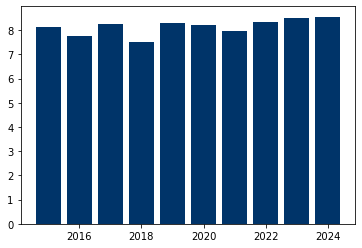

In [1356]:
df['xBA per Game'] = df.estimated_ba_using_speedangle/df.game_pk
plt.bar(df.game_year,df['xBA per Game'],color='#003469')

In [1357]:
df['xba_p162'] = df['xBA per Game']*162
df.sort_values(by='xba_p162',ascending=False)

game_year  estimated_ba_using_speedangle  game_pk    des  xBA per Game  \
9       2024                       1420.749      166  24356      8.558729   
8       2023                       1490.878      175  26097      8.519303   
7       2022                       1496.243      179  26236      8.358899   
4       2019                       1343.164      162  24905      8.291136   
2       2017                       1334.641      162  24133      8.238525   
5       2020                        493.355       60   8683      8.222583   
0       2015                       1316.828      162  22643      8.128568   
6       2021                       1291.101      162  23823      7.969759   
1       2016                       1256.668      162  22887      7.757210   
3       2018                       1216.241      162  24616      7.507660   

      xba_p162  
9  1386.514084  
8  1380.127063  
7  1354.141709  
4  1343.164000  
2  1334.641000  
5  1332.058500  
0  1316.828000  
6  1291.101000  
1  1256.668000  
3  1216.241000

The 2024 Phillies are on pace for the highest single season xBA. They are the best offense the Phillies have had.

# What would happen if JT Realmuto could stretch out his 10-game hot streaks over 162 games?

In [1360]:
df = pps.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            })
df.sort_values(by='des',ascending=False).head(1)
jt_id = 592663
df = jt = pps[pps.fielder_2 == jt_id]
results('player_name').sort_values(by='pitches',ascending=False).head(10)

player_name  pitches  plate_apps   bip   hits    hrs  walks  \
67           Nola, Aaron    13910        3580  2358  775.0  119.0  221.0   
101        Wheeler, Zack    11626        2978  1952  584.0   62.0  160.0   
90        Suárez, Ranger     7479        1938  1318  396.0   40.0  159.0   
22           Eflin, Zach     4198        1128   832  284.0   35.0   57.0   
92   Sánchez, Cristopher     3547         947   676  225.0   24.0   61.0   
100      Walker, Taijuan     3169         840   598  195.0   31.0   76.0   
98      Velasquez, Vince     3067         733   468  166.0   36.0   68.0   
1         Alvarado, José     2977         722   406  135.0   14.0   90.0   
29          Gibson, Kyle     2660         693   500  168.0   22.0   54.0   
7          Arrieta, Jake     2640         701   501  181.0   22.0   60.0   

     strikeouts     ba    obp    slg    ops   woba  
67        968.0  0.234  0.286  0.395  0.680  0.294  
101       827.0  0.211  0.261  0.329  0.590  0.259  
90        443.0  0.226  0.293  0.345  0.638  0.282  
22        226.0  0.271  0.313  0.433  0.746  0.318  
92        205.0  0.256  0.305  0.396  0.701  0.305  
100       154.0  0.259  0.331  0.438  0.769  0.334  
98        184.0  0.256  0.333  0.498  0.831  0.349  
1         220.0  0.217  0.320  0.332  0.652  0.294  
29        132.0  0.269  0.330  0.438  0.769  0.334  
7         133.0  0.291  0.354  0.446  0.800  0.341

In [1361]:
df = pos_jt = jt = pos[pos.batter == jt_id]
results('game_date')

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0    2019-03-28       15           4  3.0   0.0  0.0    1.0         0.0   
1    2019-03-30       12           4  2.0   2.0  1.0    0.0         2.0   
2    2019-03-31       16           4  3.0   1.0  0.0    1.0         0.0   
3    2019-04-02       22           5  4.0   0.0  0.0    0.0         1.0   
4    2019-04-03       17           5  3.0   1.0  0.0    1.0         1.0   
..          ...      ...         ...  ...   ...  ...    ...         ...   
717  2024-09-28       21           4  1.0   1.0  0.0    1.0         2.0   
718  2024-10-05       15           4  2.0   0.0  0.0    1.0         1.0   
719  2024-10-06       22           5  1.0   0.0  0.0    0.0         2.0   
720  2024-10-08       16           4  3.0   0.0  0.0    0.0         0.0   
721  2024-10-09       19           4  1.0   0.0  0.0    2.0         1.0   

        ba   obp    slg    ops   woba  
0    0.000  0.25  0.000  0.250  0.172  
1    0.500  0.50  1.250  1.750  0.702  
2    0.500  0.50  0.500  1.000  0.390  
3    0.000  0.00  0.000  0.000  0.000  
4    0.250  0.40  0.500  0.900  0.381  
..     ...   ...    ...    ...    ...  
717  0.333  0.50  0.333  0.833  0.393  
718  0.000  0.25  0.000  0.250  0.172  
719  0.000  0.20  0.000  0.200  0.144  
720  0.000  0.25  0.000  0.250  0.180  
721  0.000  0.50  0.000  0.500  0.344  

[722 rows x 13 columns]

Edmundo Sosa L/R splits <br>


In [1363]:
po24 = pos[pos.game_year == 2024]
po24.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                ,'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }).sort_values(by='des',ascending=False)

player_name  batter   des  game_pk
14    Schwarber, Kyle  656941  2936      154
5       Harper, Bryce  547180  2547      149
1   Castellanos, Nick  592206  2392      166
17      Stott, Bryson  681082  2368      151
0          Bohm, Alec  664761  2161      147
19       Turner, Trea  607208  2121      125
9      Marsh, Brandon  669016  2059      138
12     Realmuto, J.T.  592663  1655      103
13       Rojas, Johan  679032  1353      113
15      Sosa, Edmundo  624641  1066       89
18    Stubbs, Garrett  596117   746       52
10   Merrifield, Whit  593160   633       49
11    Pache, Cristian  665506   496       40
2       Clemens, Kody  665019   495       46
20     Wilson, Weston  642215   390       40
6        Hays, Austin  669720   281       24
3         Dahl, David  621311   266       19
8     Marchán, Rafael  665561   195       15
16     Stevenson, Cal  670276   102       16
7      Kennedy, Buddy  671083    58        6
4      Garcia, Aramis  605244    36        3

In [1364]:
sosa_id = 624641
df = sosa24 = po24[po24.batter == sosa_id]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      468         124   86    32    3      7          26  0.288   
1        R      598         156  102    33    4      6          42  0.229   

     obp    slg    ops   woba  
0  0.355  0.514  0.868  0.371  
1  0.276  0.340  0.616  0.271

He has good lefty splits. The Phillies faced a lot of LHPs in Turner's absence?

In [1366]:
df = po24[(po24.game_date > '2024-05-03')
     &(po24.game_date < '2024-06-17')
    ]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L     1811         467  323   107   17     43          99  0.255   
1        R     3853        1008  699   224   23     88         205  0.251   

     obp    slg    ops   woba  
0  0.325  0.455  0.780  0.337  
1  0.322  0.386  0.708  0.311

Phillies homers by count or pitch number <br>

In [1368]:
df = po24[po24.events == 'home_run']
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec       15          15   15    15   15    0.0         0.0   
1   Castellanos, Nick       24          24   24    24   24    0.0         0.0   
2       Clemens, Kody        5           5    5     5    5    0.0         0.0   
3         Dahl, David        3           3    3     3    3    0.0         0.0   
4       Harper, Bryce       31          31   31    31   31    0.0         0.0   
5        Hays, Austin        2           2    2     2    2    0.0         0.0   
6     Marchán, Rafael        3           3    3     3    3    0.0         0.0   
7      Marsh, Brandon       16          16   16    16   16    0.0         0.0   
8    Merrifield, Whit        3           3    3     3    3    0.0         0.0   
9      Realmuto, J.T.       14          14   14    14   14    0.0         0.0   
10       Rojas, Johan        3           3    3     3    3    0.0         0.0   
11    Schwarber, Kyle       39          39   39    39   39    0.0         0.0   
12      Sosa, Edmundo        7           7    7     7    7    0.0         0.0   
13      Stott, Bryson       11          11   11    11   11    0.0         0.0   
14    Stubbs, Garrett        1           1    1     1    1    0.0         0.0   
15       Turner, Trea       21          21   21    21   21    0.0         0.0   
16     Wilson, Weston        3           3    3     3    3    0.0         0.0   

     ba  obp  slg  ops   woba  
0   1.0  1.0  4.0  5.0  2.048  
1   1.0  1.0  4.0  5.0  2.048  
2   1.0  1.0  4.0  5.0  2.048  
3   1.0  1.0  4.0  5.0  2.048  
4   1.0  1.0  4.0  5.0  2.048  
5   1.0  1.0  4.0  5.0  2.048  
6   1.0  1.0  4.0  5.0  2.048  
7   1.0  1.0  4.0  5.0  2.048  
8   1.0  1.0  4.0  5.0  2.048  
9   1.0  1.0  4.0  5.0  2.048  
10  1.0  1.0  4.0  5.0  2.048  
11  1.0  1.0  4.0  5.0  2.048  
12  1.0  1.0  4.0  5.0  2.048  
13  1.0  1.0  4.0  5.0  2.048  
14  1.0  1.0  4.0  5.0  2.048  
15  1.0  1.0  4.0  5.0  2.048  
16  1.0  1.0  4.0  5.0  2.048

In [1369]:
df = pos[pos.events=='home_run']
x = df.groupby('player_name',as_index=False).agg({'pitch_number' : 'mean'
                                             ,'des' : 'count'
                                             ,'batter'  : 'max'}).sort_values(by='pitch_number',ascending=False
                                                                             )
x[x.des>=20].sort_values(by='pitch_number',ascending=False).reset_index(drop=True).round(2).rename(columns={'pitch_number' : 'avg_pitches'
                                                                                                            ,'des' : 'hrs'
                                                                                                           })

player_name  avg_pitches  hrs  batter
0    Hernández, César         4.09   45  514917
1       Hoskins, Rhys         3.86  154  656555
2      Galvis, Freddy         3.86   44  520471
3      Marsh, Brandon         3.82   34  669016
4      Altherr, Aaron         3.72   36  571437
5        Miller, Brad         3.72   32  543543
6      Kingery, Scott         3.70   30  664068
7      Realmuto, J.T.         3.59  115  592663
8        Segura, Jean         3.49   43  516416
9       Stott, Bryson         3.49   37  681082
10    Schwarber, Kyle         3.48  143  656941
11    Herrera, Odúbel         3.38   78  546318
12      Harper, Bryce         3.37  164  547180
13      Rupp, Cameron         3.36   39  519237
14      Joseph, Tommy         3.33   43  571830
15    Santana, Carlos         3.25   24  467793
16    Gregorius, Didi         3.17   24  544369
17     Franco, Maikel         3.11  102  596748
18  McCutchen, Andrew         3.11   47  457705
19         Bohm, Alec         3.07   61  664761
20     Williams, Nick         2.97   31  608384
21       Howard, Ryan         2.96   48  429667
22       Turner, Trea         2.88   50  607208
23  Castellanos, Nick         2.68   71  592206

In [1370]:
x.agg({'des' : ['mean','median','sum']})

des
mean      19.157895
median     5.000000
sum     1820.000000

In [1371]:
pos.game_pk.nunique()

1552

In [1372]:
df = hrs = pos[pos.events=='home_run']
df.groupby('pitch_number',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='pitch_number',ascending=False)

pitch_number  des  game_pk
11            14    2        2
10            11    1        1
9             10    4        4
8              9   17       16
7              8   27       26
6              7   91       89
5              6  133      128
4              5  211      190
3              4  260      230
2              3  403      348
1              2  342      300
0              1  329      291

In [1373]:
df['count'] = df.balls.astype('str') + '-' + df.strikes.astype('str')
df[['balls','strikes','count']]
df.groupby(['count','pitch_number'],as_index=False).agg({'des' : 'count'}).sort_values(by='des')

count  pitch_number  des
27   3-2            11    1
12   1-2             9    1
5    0-2             6    1
28   3-2            14    2
4    0-2             5    2
11   1-2             7    3
26   3-2            10    4
19   2-2             9    4
18   2-2             8    6
10   1-2             6   11
25   3-2             9   12
20   3-0             4   13
3    0-2             4   14
24   3-2             8   21
17   2-2             7   27
9    1-2             5   32
16   2-2             6   36
23   3-2             7   61
21   3-1             5   72
2    0-2             3   73
22   3-2             6   85
13   2-0             3   96
15   2-2             5  105
8    1-2             4  105
14   2-1             4  128
6    1-0             2  163
1    0-1             2  179
7    1-1             3  234
0    0-0             1  329

In [1374]:
df[df.pitch_number==14][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

game_date  inning     player_name  batter home_team away_team  \
51256  2017-08-22       4  Blanco, Andrés  433217       PHI       MIA   
82036  2018-06-29       5   Hoskins, Rhys  656555       PHI       WSH   

       launch_speed  launch_angle  estimated_ba_using_speedangle  
51256         103.2          24.0                            0.9  
82036         106.4          21.0                            0.8

In [1375]:
df[df.pitch_number==11][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

game_date  inning     player_name  batter home_team away_team  \
199853  2023-04-16       7  Realmuto, J.T.  592663       CIN       PHI   

        launch_speed  launch_angle  estimated_ba_using_speedangle  
199853          99.0          31.0                          0.403

# ARI (H) 621-623
## Game 1: Montgomery vs Walker
Walker stinks. Cole Hamels night. Taijuan to the IL with a blister even though he said he was "100% fine". Close game. Tough loss.

## Game 2: Henry vs Wheeler
Wheeler deals. Joey Orr family game. Offense slugs.

## Game 3: Cecconi vs Sanchez
11:35 AM start. Pitching is very good. Phillies are a good team.

In [1377]:
df = mercado = pd.read_csv('mercado.csv')
pitch_mix(df).round(2)

pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
3         FF  4-Seam Fastball    439          94.99            2332.32   7.95   
2         FC           Cutter    153          88.51            2076.71   9.83   
1         CU        Curveball    126          82.94            2401.07  11.03   
0         CH         Changeup     53          88.42            1590.91   9.23   

   usage  
3   56.9  
2   19.8  
1   16.3  
0    6.9

In [1378]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max','mean']
                                            ,'pfx_x' : 'mean'
                                            ,'pfx_z' : 'mean'}).round(2)

pitch_type release_speed              pfx_x pfx_z
                       min   max   mean  mean  mean
0         CH          85.9  91.7  88.42 -1.19  0.39
1         CU          79.6  86.4  82.94  0.36 -0.81
2         FC          84.6  91.6  88.51 -0.14  0.49
3         FF          91.7  97.5  94.99 -0.95  1.41

# Zack Wheeler only throws to JT
85% of the pitches he has thrown as a Philadelphia Phillie have been caught by J.T. Realmuto.

In [1380]:
pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

player_name  pitcher    des  game_pk
117       Nola, Aaron   605400  26406      278
167     Wheeler, Zack   554430  13927      145
42        Eflin, Zach   621107  10519      137
152    Suárez, Ranger   624133  10243      171
163  Velasquez, Vince   592826  10239      133
..                ...      ...    ...      ...
33         Cyr, Tyler   664202      9        1
169    Wilson, Weston   642215      8        1
21     Blanco, Andrés   433217      8        1
60       Hall, Darick   669742      6        1
88      Knapp, Andrew   595284      4        1

[171 rows x 4 columns]

In [1381]:
wheeler = pps[pps.pitcher == 554430]
wheeler2 = wheeler.groupby(['fielder_2','game_year'],as_index=False).agg({'des' : 'count'
                                                 ,'game_pk' : 'nunique'
                                                }).sort_values(by='game_year',ascending=False)

In [1382]:
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})

In [1383]:
df = wheeler2.merge(batters,left_on='fielder_2',right_on='batter',suffixes=('','_b'))

In [1384]:
final = df.groupby('player_name',as_index=False).agg({'des' : 'sum'})

In [1385]:
df.agg({'des' : 'sum'})

des    13927
dtype: int64

In [1386]:
final['share'] = final.des/12254
final.round(3)

player_name    des  share
0   Garcia, Aramis    103  0.008
1    Knapp, Andrew    915  0.075
2  Marchán, Rafael    485  0.040
3   Realmuto, J.T.  11626  0.949
4  Stubbs, Garrett    798  0.065

What about the other pitchers? Meh.

# DET (A) 624-626
## Game 1: Mize vs Nola
Nola shoves. Bryce Harper 3-run HR and 2-run 2B. Bohm 2-run HR. Triple play.

## Game 2: Skubal vs Suarez

Does Ranger throw the curveball on the edge of the zone? <br>
Well he throws it 19.9% of the time, it his second most used pitch this year. <br>
He throws it 23% of the time to RHB.

In [1390]:
df = pp24
results('player_name')
ranger = df[df.player_name == 'Suárez, Ranger']
pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    766      90.796475        1905.757781   
1         CU        Curveball    513      74.507992        2174.599174   
3         FF  4-Seam Fastball    478      91.862762        2008.319742   
0         CH         Changeup    398      80.013065        1236.507772   
2         FC           Cutter    294      86.521769        2065.729825   
5         SL           Slider      2      81.300000        2015.500000   

        zone  usage  
4   8.677546   31.3  
1  10.927875   20.9  
3   8.043933   19.5  
0  11.597990   16.2  
2   8.731293   12.0  
5   8.500000    0.1

In [1391]:
rhb_pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    539      90.761967        1902.113462   
1         CU        Curveball    479      74.435908        2171.589800   
3         FF  4-Seam Fastball    417      91.797602        2006.370370   
0         CH         Changeup    317      79.986435        1241.829032   
2         FC           Cutter    272      86.688971        2067.773585   
5         SL           Slider      2      81.300000        2015.500000   

        zone  usage  
4   8.803340   26.6  
1  10.885177   23.6  
3   8.127098   20.6  
0  11.690852   15.6  
2   8.599265   13.4  
5   8.500000    0.1

In [1392]:
lhb_pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    227      90.878414        1914.410959   
0         CH         Changeup     81      80.117284        1214.802632   
3         FF  4-Seam Fastball     61      92.308197        2021.262295   
1         CU        Curveball     34      75.523529        2215.727273   
2         FC           Cutter     22      84.454545        2038.650000   

        zone  usage  
4   8.378855   53.4  
0  11.234568   19.1  
3   7.475410   14.4  
1  11.529412    8.0  
2  10.363636    5.2

In [1393]:
# Do I have Cristian Pache's BB% at 14.8? No. I have him at 14.9%. WTF.
df = po24
x = results('player_name')
x['bb%'] = x.walks/x.plate_apps
x

player_name  pitches  plate_apps  bip   hits   hrs  walks  \
0          Bohm, Alec     2161         619  487  156.0  15.0   39.0   
1   Castellanos, Nick     2392         676  483  161.0  24.0   39.0   
2       Clemens, Kody      495         125   88   27.0   5.0    5.0   
3         Dahl, David      266          63   38   12.0   3.0    3.0   
4      Garcia, Aramis       36           7    4    0.0   0.0    0.0   
5       Harper, Bryce     2547         637  422  161.0  31.0   70.0   
6        Hays, Austin      281          84   60   20.0   2.0    0.0   
7      Kennedy, Buddy       58          13    8    2.0   0.0    2.0   
8     Marchán, Rafael      195          56   44   15.0   3.0    3.0   
9      Marsh, Brandon     2059         491  280  105.0  16.0   50.0   
10   Merrifield, Whit      633         175  138   31.0   3.0   15.0   
11    Pache, Cristian      496         117   62   21.0   0.0   13.0   
12     Realmuto, J.T.     1655         430  286  101.0  14.0   29.0   
13       Rojas, Johan     1353         369  281   83.0   3.0   14.0   
14    Schwarber, Kyle     2936         708  394  144.0  39.0  104.0   
15      Sosa, Edmundo     1066         280  188   65.0   7.0   13.0   
16     Stevenson, Cal      102          27   20    6.0   0.0    3.0   
17      Stott, Bryson     2368         582  429  126.0  11.0   53.0   
18    Stubbs, Garrett      746         187  115   34.0   1.0   17.0   
19       Turner, Trea     2121         558  418  152.0  21.0   29.0   
20     Wilson, Weston      390         102   63   25.0   3.0    8.0   

    strikeouts     ba    obp    slg    ops   woba       bb%  
0           86  0.275  0.325  0.438  0.763  0.330  0.063005  
1          141  0.258  0.311  0.435  0.746  0.323  0.057692  
2           31  0.227  0.264  0.454  0.718  0.306  0.040000  
3           21  0.203  0.238  0.390  0.628  0.268  0.047619  
4            3  0.000  0.000  0.000  0.000  0.000  0.000000  
5          143  0.286  0.366  0.530  0.896  0.383  0.109890  
6           22  0.244  0.262  0.378  0.640  0.277  0.000000  
7            3  0.182  0.308  0.273  0.580  0.270  0.153846  
8            8  0.294  0.339  0.549  0.888  0.375  0.053571  
9          157  0.242  0.320  0.406  0.726  0.317  0.101833  
10          19  0.197  0.274  0.293  0.567  0.256  0.085714  
11          42  0.204  0.291  0.272  0.562  0.257  0.111111  
12         106  0.257  0.319  0.415  0.733  0.321  0.067442  
13          70  0.242  0.274  0.321  0.594  0.260  0.037940  
14         203  0.244  0.359  0.480  0.838  0.362  0.146893  
15          68  0.255  0.311  0.416  0.726  0.315  0.046429  
16           4  0.250  0.333  0.375  0.708  0.314  0.111111  
17          97  0.244  0.313  0.356  0.669  0.295  0.091065  
18          50  0.206  0.294  0.261  0.555  0.256  0.090909  
19         103  0.291  0.335  0.460  0.795  0.344  0.051971  
20          29  0.272  0.333  0.467  0.801  0.344  0.078431

In [1394]:
x[x.pitches == 366]

Empty DataFrame
Columns: [player_name, pitches, plate_apps, bip, hits, hrs, walks, strikeouts, ba, obp, slg, ops, woba, bb%]
Index: []

**Well I am correct according to baseball savant Statcast Search**

Marchan total launch_speed

In [1397]:
df[df.player_name == x[x.pitches == 82].player_name.unique()[0]].agg({'launch_speed' : 'sum'})

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
ls = df[df.type=='X'].groupby(['player_name','batter'],as_index=False).agg({#'batter' : 'max'
                                              #,'des' : 'count'
                                              'launch_speed' : ['min','mean','max','sum','count']
                                                           }).round(1
                                                                   ).sort_values(by=('launch_speed', 'sum'),ascending=False)
ls

In [ ]:
df = po24[po24.p_throws == 'L']
x = po_lhp = results('player_name')
x.sort_values(by='ba',ascending=False)

# How Tall is Michael Mercado???

In [ ]:
df = pd.concat([mercado, po24[po24.player_name == 'Mercado, Michael']])
df.columns.tolist()

In [ ]:
# Doing baseball stuff makes me think about work.
# Ok either way, let's focus.

# Ranger is not getting ahead in the count

# Inning Level Aggregate

In [ ]:
def summarize_inning(df):
    x = df.groupby(['game_pk','inning'],as_index=False
          ).agg({'launch_speed' : 'sum'
                 ,'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'estimated_ba_using_speedangle' : 'sum'
                 ,'estimated_woba_using_speedangle' : 'sum'
                 ,'inning_topbot' : 'max'
                 ,'home_team' : 'max'
                 ,'post_home_score' : 'max'
                 ,'home_score' : 'min'
                 ,'away_team' : 'max'
                 ,'post_away_score' : 'max'
                 ,'away_score' : 'max'
                 ,'game_date' : 'max'
                 #,'game_year' : 'max'
                 # ,'fielder_2' : 'max'
                 # ,'fielder_3' : 'max'
                 # ,'fielder_4' : 'max'
                 # ,'fielder_5' : 'max'
                 # ,'fielder_6' : 'max'
                 # ,'fielder_7' : 'max'
                 # ,'fielder_8' : 'max'
                 # ,'fielder_9' : 'max'
                 # ,'pitcher' : 'max'
                })
    return x

# What is a typical sum of launch_speed for an inning, fielders in an inning.
No more double switches really.

In [ ]:
df = pp24
df = pp24_innings = summarize_inning(df)
df[df.game_date == df.game_date.max()].round(3) # This finds me the Phillies Most Recent GAme

# Game Level Aggregate by Inning
**AKA a Box Score??**

In [ ]:
def box_score(df):
    bs = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
               ],as_index=False).agg({'launch_speed' : 'max' # Max or Sum? Por que no los dos? Because I can't fucking do thi?
                          ,'post_home_score' : 'max'
                          ,'post_away_score' : 'max'
                          ,'inning' : 'nunique'
                         })
    return bs

wtf did the Phillies do?

In [ ]:
df = pp24 # Phillies Pitchers in 2024
df = pp24_innings = summarize_inning(df) # Summarized at the inning level
games = box_score(df) # Summarized at the Game Level
x = games.sort_values(by='launch_speed').head(10) # Give me the games with the bottom 10 opponent launch speed summed
# Then merge that back to the original dataset to reduce it to the top 10 games
df = pp24[pp24.game_pk.isin(x.game_pk.unique().tolist())] # Why merge when you can filter?
df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
            ,'player_name'
            ,'pitcher'
            ,'fielder_2'
            ,'fielder_3'
            ,'fielder_4'
            ,'fielder_5'
            ,'fielder_6'
            ,'fielder_7'
            ,'fielder_8'
            ,'fielder_9'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'max'
                 ,'release_spin_rate' : 'max'
                 ,'launch_speed' : 'sum'
                }).sort_values(by='launch_speed')


# Ideas
## These are usually pretty good

## Get to Fielders by filtering to hit location to the position of the player, then go to individual players

In [ ]:
df = pp24
df.groupby('hit_location',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

In [ ]:
df = pps
x = df.groupby(['hit_location'
           ,'game_year']
           ,as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['game_year','des'],ascending=False)
x.groupby('hit_location',as_index=False).agg({'des' : 'sum'}).sort_values(by='des',ascending=False)

# Group By Objects in Pandas

In [ ]:
df = pps
level = 'player_name'
g = df.groupby(level)
g

In [ ]:
g.max('release_speed').sort_values(by='release_speed',ascending=False).head(10)

# I get baked to relax and take my mind off of learning not to do more learning.

# March and April 2024

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




# Braves (H) 329-331
It is opening weekend in South Philadelphia as the Phillies embark on the new season by hosting the Atlanta Braves. Opening Day was rained out yesterday, so we are getting started on Friday afternoon. It is a big series for two teams expected to compete for the National League East throughout the season before both hoping to claim a World Series come October.

Let's not fuck around and get right into the first game.

### Game 1: Strider vs Wheeler
PHI Lineup: <br>
Schwarber 0 <br>
Turner 6 <br>
Harper 3 <br>
Realmuto 2 <br>
Bohm 5 <br>
Stott 4 <br>
Castellanos 9 <br>
Marsh 7 <br>
Rojas 8 <br>

ATL Lineup: <br>
Acuna 9 <br>
Albies 4 <br>
Riley 5 <br>
Olson 3 <br>
Ozuna 0 <br>
Harris II 8 <br>
Murphy 2 <br>
Arcia 6 <br>
Kelenic 7 <br>


In [ ]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             ,669016 # Marsh
             ,679032 # Rojas
            ]
wheeler_id = 554430

In [ ]:
pps[(pps.home_team == 'ATL')
    &(pps.game_year == 2023)
   ].groupby('batter',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
braves_ids = [656941 # Acuna
             ,607208 # Albies
             ,547180 # Riley
             ,592663 # Olson
             ,664761 # Ozuna
             ,681082 # Harris II
             ,592206 # Murphy
             ,669016 # Arcia
             ,679032 # Kelenic
            ]
strider_id = 675911

In [ ]:
pos[pos.pitcher == strider_id].groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
phils_vs_strider = phils_sc[phils_sc.batter.isin(phils_ids)
                            &(phils_sc.pitcher == strider_id)
                           ]

In [ ]:
df = phils_vs_strider
results('player_name')

In [ ]:
pitch_mix(pos[pos.pitcher==strider_id]).round(1)

In [ ]:
df[df.pitch_type == 'FF'].agg({'release_speed' : ['mean','std']
                               ,'release_spin_rate' : ['mean','std']
                              }).round(1)

### Game 2: Fried vs Nola
Well the first inning was just absurd. Acuna reached on an error by Bohm (I missed it) then Albies donged. <br>
Phillies loaded the bases just for Castellanos to stare at a Zone 5 FF that was called a ball by Bruce Dreckman. He walked (RBI) then Stott shoots one the other way to take the lead.

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
nola_id = 605400

In [ ]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']

In [ ]:
df = pd.concat([pos,whit])
df = df[(df.batter.isin(phils_ids))
   &(df.p_throws == 'L')
  ]

In [ ]:
results('pitch_type').sort_values(by='pitches',ascending=False)

How the fuck does Jesse Chavez keep leaving the Braves just to come back?

In [ ]:
# How can I identify games in which Jesse Chavez pitched against the Phils?
# I need to pull opposing team pitcher ids.
# An easy way to do that would be to pull every pitch they have ever thrown, yeah that would work but it gets pretty big and creates dupes.

In [ ]:
# There has to be a better way.
# Ok, I can use Statcast search to find at bats for a single player against Jesse Chavez, then go find that at bat in the pos data.

In [ ]:
# Maybe I could look at descriptions.

In [ ]:
pps[(pps.away_team == 'ATL')
    &(pps.pitcher == nola_id)
    &(pps.des.str.startswith('Ronald'))
   ].groupby('des',as_index=False).agg({'batter' : 'max'})

In [ ]:
pos[pos.game_date == '2023-09-20'].groupby('inning',as_index=False).agg({'pitcher' : 'nunique'})

In [ ]:
pos[pos.game_date == '2023-09-20'].groupby(['game_pk','inning'],as_index=False).agg({'pitcher' : 'max'})

In [ ]:
pos[(pos.pitcher == 445926)
    &(pos.player_name == 'Marsh, Brandon')
    &(pos.game_date == '2023-09-20')
   ].groupby('des',as_index=False).agg({'home_team' : 'count'})
# So by the time I determined what Jesse Chavez's pitcher ID is, he is going to be removed from the game

In [ ]:
df[df.game_date == '2023-09-20'].groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
df = pd.concat([pos[pos.batter.isin(phils_ids)],whit])
chavez = df[df.pitcher == 445926]

In [ ]:
mcgs('player_name',chavez)[['player_name','pitches','plate_apps','hits','hrs','strikeouts','obp','slg']].round(3)

In [ ]:
chavez.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                                 ,'release_spin_rate' : ['count','min','max','mean','std']
                                                }).round(1)

In [ ]:
mcgs('player_name',df[(df.p_throws == 'R')
   &(df.pitch_type == 'FC')
   &(df.release_speed >= 89-1.1)
   &(df.release_speed <= 89+1.1)
  ])[['player_name','pitches','plate_apps','hits','hrs','ba','ops']].round(3)

In [ ]:
# so how do I figure out Matzek

In [ ]:
pos[(pos.batter == phils_ids[0])
    &(pos.home_team == 'ATL')
    &(pos.p_throws == 'L')
   ].groupby('pitcher',as_index=False).agg({'des' : 'count'
                                            ,'game_date' : 'max'}).sort_values(by='des',ascending=False)

In [ ]:
# Ok so he has not pitched since 1-/5/2022

Fuck this shit, let's look ahead to Game 3.

### Game 3: Sale vs Suarez

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
ranger_id = 624133

In [ ]:
pos[(pos.game_year == 2017)
    &(pos.away_team == 'BOS')
   ].groupby(['game_date','pitcher'],as_index=False).agg({'inning' : 'nunique'
                                                          ,'des' : 'count'
                                                          ,'game_pk' : 'nunique'})
# I could have sniped Chris Sale's start against the Phillies in 2017 occurring on June 15, 2017. But I did not, instead I sleuthed it

In [ ]:
sale_id = 519242
pos[(pos.pitcher == sale_id)
    &(pos.events == 'double')
    #&(pos.inning == 8)
   ]

In [ ]:
pos[pos.pitcher == sale_id].groupby('game_date',as_index=False).agg({'inning' : 'nunique'
                                                                     ,'des' : 'count'
                                                                     ,'home_team' : 'max'
                                                                     ,'post_home_score' : 'max'
                                                                     ,'post_away_score' : 'max'
                                                                    })
# Chris Sale's only three starts against the Phillies in the statcast era have come at CBP.

In [ ]:
pos[(pos.pitcher == sale_id) & (pos.game_date == '2023-05-05')].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                                                           ,'at_bat_number' : 'nunique'
                                                                                                           ,'des' : 'count'})

In [ ]:
phils_ids.append(624641) # Adding Edmundo to the phils ids

In [ ]:
sale_vs_phillies = pd.concat([nphl[nphl.pitcher == sale_id], pos[(pos.pitcher == sale_id)&(pos.batter.isin(phils_ids))]
                             ])

In [ ]:
df = sale_vs_phillies
df.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                              ,'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                             }).sort_values(by='des',ascending=False)
df = df[df.batter.isin(phils_ids)]

In [ ]:
results('player_name')

In [ ]:
pitch_mix(pos[pos.pitcher == sale_id]).round(1)

In [ ]:
sale = pos[pos.pitcher == sale_id]
sale.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                               ,'release_spin_rate' : ['min','max','mean','std']
                                              }).round(2)

In [ ]:
# all_abs[(all_abs.batter.isin(phils_ids))
#         &(all_abs.p_throws == 'L')
#         &(all_abs.pitch_type == 'FF')
#         &(all_abs.release_speed >= 95.8-1.67)
#         &(all_abs.release_speed <= 95.8+1.67)
#         &(all_abs.release_spin_rate >= 2273.49-87.02)
#         &(all_abs.release_spin_rate <= 2273.49+87.02)
#        ]

Does Ranger throw front hip sinkers to RHB? Yeah, I guess?

In [ ]:
df = pps[(pps.pitcher == ranger_id)
    &(pps.stand == 'R')
    &(pps.pitch_type == 'SI')
    &(pps.zone.isin([1,4,7,11,13]))
   ]
results('game_year')

In [ ]:
ranger = pps[pps.pitcher == ranger_id]
rhb_pitch_mix(ranger).round(1)

In [ ]:
ranger[(ranger.stand == 'R')
       &(ranger.zone.isin([1,4,7]))
       &(ranger.description == 'called_strike')
       &(ranger.events == 'strikeout')
       &(ranger.game_year == 2023)
       &(ranger.home_team == 'PHI')
      ][['game_date','inning']]#.groupby('away_team',as_index=False).agg({'des' : 'count'})

In [ ]:
ranger.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

# Rhys Hoskins dirty slides

In [ ]:
pos[pos.game_year==2022].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                    ,'des' : 'count'}).sort_values(by='des',ascending=False)

rhys_id = 656555

df = rhys_on_first = pos[pos.on_1b == rhys_id]

In [ ]:
df = df[df.events.isna() == False]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.events.isin(['other_out','caught_stealing_2b'])][['game_date'
                                                        ,'inning'
                                                        ,'player_name'
                                                        ,'events'
                                                       ]]

In [ ]:
df[(df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'field_error'
                   ,'fielders_choice'
                   ,'fielders_choice_out'
                  ]))
   &(df.home_team.isin(['PHI','NYM']))
   &(df.away_team.isin(['PHI','NYM']))  
  ][['game_date'
                       ,'home_team'
                       ,'away_team'
                       ,'inning'
                       ,'events'
                       ,'player_name'
                      ]].sort_values(by='game_date')


## Reds (H) 41-43

### Game 1: Abbott vs Sanchez

In [ ]:
# I will come back to Cristopher Sanchez later, but this Abbott kid is going to be tough.

In [ ]:
schwarber = pd.concat([nphl[nphl.player_name == 'Schwarber, Kyle'], pos[pos.player_name == 'Schwarber, Kyle']])
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.player_name == 'Harper, Bryce']])
marsh = pd.concat([nphl[nphl.player_name == 'Marsh, Brandon'], pos[pos.player_name == 'Marsh, Brandon']])
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
castellanos = pd.concat([nphl[nphl.player_name == 'Castellanos, Nick'], pos[pos.player_name == 'Castellanos, Nick']])
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])

phils = pd.concat([schwarber
                   ,trea
                   ,harper
                   ,pos[pos.batter == 664761]
                   ,jt
                   ,pos[pos.batter == 681082]
                   ,castellanos
                   ,marsh
                   ,pos[pos.batter == 679032]
                   #,whit
                  ]
                 )

In [ ]:
df = abbott = pd.read_csv('andrew abbott.csv')

In [ ]:
lhb_pitch_mix(df).round(1)

In [ ]:
df[df.pitch_type.isin(['FF','ST'])].groupby('pitch_type',as_index=False
                                           ).agg({'release_speed' : ['min','max','mean','std']
                                                  ,'release_spin_rate' : ['min','max','mean','std']
                                                  ,'pfx_x' : ['min','max','mean','std']
                                                  ,'pfx_z' : ['min','max','mean','std']
                                                 }).round(2)

In [ ]:
mcgs('player_name',phils[(phils.p_throws == 'L')
      &(phils.pitch_type == 'FF')
      &(phils.release_speed >= 92.73-0.81)
      &(phils.release_speed <= 92.73+0.81)
      &(phils.release_spin_rate >= 2207.43-107.82)
      &(phils.release_spin_rate <= 2207.43+107.82)
     ])[['player_name'
         ,'pitches'
         ,'plate_apps'
         ,'hits'
         ,'doubles'
         ,'triples'
         ,'hrs'
         ,'ba'
         ,'ops'
        ]
       ].round(3).sort_values(by='pitches',ascending=False)

In [ ]:
rhb_pitch_mix(df).round(1)

Does Harper ever hit RHP sliders for HRs? When they are inside?

In [ ]:
pos[(pos.player_name == 'Harper, Bryce')
    &(pos.events == 'home_run')
    &(pos.zone.isin([3,6,9]))
    &(pos.p_throws == 'R')
    &(pos.pitch_type == 'SL')
   ]

### Game 2: Ashcraft vs Turnbull

I don't give a shit. Ricardo Pinto baby.

Harper Three HRs

In [ ]:
# He did this once before against the Marlins in 2015
nphl[(nphl.player_name == 'Harper, Bryce')
     &(nphl.game_date == '2015-05-06')
    ].fielder_2.unique()

In [ ]:
nphl[nphl.batter == 592663].groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
# Yes JT was catching that day.

### Game 3: Montas vs Wheeler

Frankie Montas? FRANKIE MONTAS!

In [ ]:
# I thought of something interesting, but it turns out that no I did not.

In [ ]:
# Zack Wheeler SI/FF velo Histograms
wheeler_id = 554430
pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].groupby(['game_year','pitch_type'],as_index=False
                                                ).agg({'release_speed' : ['min','max','mean','std']}).round(2)

In [ ]:
plt.hist(pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].release_speed)

In [ ]:
df = schwarber
schwarbs = results('game_year')

In [ ]:
schwarbs['pa_per_bb'] = schwarbs.plate_apps/schwarbs.walks
schwarbs.round(3)

How many games has Whit played at third in his career?
This is not something I ahve the data for.
Seven. He has played 33 innings there in his career.

In [ ]:
df = castellanos
results('pitch_number')

In [ ]:
#df = marsh
df['month'] = pd.to_datetime(df.game_date).dt.month

In [ ]:
results('month')

In [ ]:
rojas_id =679032
df = pos[pos.batter == rojas_id]
results('p_throws').sort_values(by='pitches',ascending=False)

In [ ]:
wheeler_id = 554430
wheels = pd.concat([pps[pps.pitcher == wheeler_id]
                    ,nphl[nphl.player_name == 'Wheeler, Zack']
                   ]
                  )

In [ ]:
df = wheels[wheels.game_type != 'R']
games = results('game_pk')
games[games.strikeouts >=10]

In [ ]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id]
                   ,nphl[nphl.player_name == 'Harper, Bryce']
                    ])
df = harper
games = results('game_pk')
four_hit_games = games[games.hits >= 4]

In [ ]:
df[df.game_pk.isin(four_hit_games.game_pk.tolist())].groupby('game_pk',as_index=False
                                                            ).agg({'game_date' : 'max'
                                                                   ,'home_team' : 'max'
                                                                   ,'away_team' : 'max'
                                                                  })

Should Bohm have pitch hit for Marsh against Justin Wilson? Nah, he does not do that great against FF like Wilson's.

In [ ]:
# Getting a pitch profile of Justin Wilson is going to be really difficult. Not that difficult, just not something I care to do.

In [ ]:
df = pd.read_csv('justin wilson.csv')
df.groupby('pitch_type', as_index=False).agg({'release_speed' : ['count','mean','std']
                                              ,'release_spin_rate' : ['mean','std']
                                             }).round(1)#.sort_values(by='count',ascending=False)

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.pitch_type == 'FC')
          &(bohm.p_throws == 'L')
          &(bohm.release_speed >= 90.7 - 1.6)
          &(bohm.release_speed <= 90.7 + 1.6)
          &(bohm.release_spin_rate >= 2409.7 - 191.6)
          &(bohm.release_spin_rate <= 2409.7 + 191.6)
         ]
results('player_name')

In [ ]:
marsh = pd.concat([pos[pos.player_name == 'Marsh, Brandon']
                   ,nphl[nphl.player_name == 'Marsh, Brandon']
                  ])
df = marsh[(marsh.pitch_type == 'FF')
          &(marsh.p_throws == 'L')
          &(marsh.release_speed >= 95.4 - 1.4)
          &(marsh.release_speed <= 95.4 + 1.4)
          &(marsh.release_spin_rate >= 2369.3 - 122.8)
          &(marsh.release_spin_rate <= 2369.3 + 122.8)
         ]
results('player_name')

In [ ]:
nphl[nphl.game_date == '2015-05-06'].groupby('fielder_2',as_index=False).agg({'des' : 'count'})

In [ ]:
jt = pd.concat([pos[pos.batter == 592663]
                ,nphl[nphl.player_name == 'Realmuto, J.T.']
               ])
jt['month'] = pd.to_datetime(jt.game_date).dt.month
df = jt[jt.game_year >= 2019]
results('month').sort_values(by='ops',ascending=False)

In [ ]:
nelson = pd.concat([pps[pps.pitcher == 656793], nphl[nphl.player_name == 'Nelson, Nick']])
rhb_pitch_mix(nelson).round(1)

In [ ]:
df = nelson#pps[pps.pitcher == 656793]
results('game_year')

In [ ]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'}).sort_values(by='game_pk')

In [ ]:
# Rodolfo Castro hit a bunch of home runs to start 2021? His first five hits of the season were home runs lol

In [ ]:
rodolfo = nphl[nphl.player_name == 'Castro, Rodolfo']

In [ ]:
df = rodolfo

In [ ]:
df[(df.game_year == 2021)
   #&(df.game_date <= '2021-07-30')
   &(df.events == 'home_run')
   &(df.type == 'X')
  ].sort_values(by='game_date')

## Nationals (A) 45-47

### Game 1: Corbin vs Nola

### Game 2: vs Suarez

### Game 3: Gore vs Sanchez

## Cardinals (A) 48-410

### Game 1: Mikolas vs Turnbull
Turnbull pitching pretty well thru 5. Johan Rojas 2 for 2 with an RBI. Ya momma sitting on ma dick!

### Game 2: vs Wheeler

### Game 3: vs Nola

Putting in some Retrospective work which is interesting.

#### Masyn Winn's arm
Is he related to Randy Winn?

Masyn Winn, who this year has the seventh-highest max velocity on a throw and sixth best **Arm Strength** (Baseball Savant) in the big leagues, has six "qualifying" throws. This is how they breakdown.

Masyn Winn Six Qualifying Throws
1. E6, Masyn Winn throws a ball into the stands
2. E6, Masyn Winn throws a ball off the bag
3. E6, Masyn Winn pulls Goldie off the bag with the throw
4. 6-3, Nice diving play and strong throw gets... Rhys Hoskins.
5. 4-6-3, Bryce Harper trotting down to first gets gunned down by some measure with this dart thrown by Winn.
6. 1B, Trea Turner hustles out an infield single against one of the best throwers in baseball.

Let's get fired up about Trea Turner with the stick!

In [ ]:
df = pos[pos.game_year == 2024]

In [ ]:
player_results = results('player_name')
home_results = results('home_team')
#id_results = results('batter')

In [ ]:
df = player_results
df = trea = df[df.player_name == 'Turner, Trea']
trea

In [ ]:
pos[(pos.game_year == 2024)
    &(pos.
   ]

In [ ]:
# Fastest pitches in 2024

In [ ]:
#def summarize(df):
df = pps[pps.game_year == 2024]    
df[['pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'game_date'
    ,'player_name'
    ,'inning'
   ]].sort_values(by='release_speed',ascending=False
                 ).reset_index(drop=True).head(10)

    
    
    
    
    
    
#summarize(pos[pos.game_year == 2024])

## Pirates (H) 411-414

### Game 1: Jones vs Suarez

### Game 2:  vs Sanchez

### Game 3:  vs Turnbull

### Game 4: Keller vs Wheeler

# Rockies (H) 415-417
## Game 1: Quantrill vs Nola
The Phillies are locked in a 1-1 grind it out game with a benches clearing incident with the Colorado Rockies. Jeff Hoffman just tackled pinch runner Kyle Freeland at the plate and almost certainly dislocated Freeland's non-throwing shoulder. Ouch. Two guys who came up together in Colorado's system.

The dog is barking next door. Nice.

In [ ]:
# Kyle Tucker said me too! What a hit.

In [ ]:
# who the fuck is due up for the Phillies in the Bottom of the 10th?

In [ ]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']
#rojas = pos[pos.batter == ]
bohm = pache = pos[pos.player_name == 'Bohm, Alec']

In [ ]:
df = bohm[bohm.inning > 9]
results('home_team')

In [ ]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des')

In [ ]:
pache = pos[pos.batter == 665506]
df = pache
results('home_team')

In [ ]:
# Step 1: Define a Quality At Bat
# Step 2: Look at Phillies Quality At Bats
# Step 3: How many Quality At Bats does Nick Castellanos have when Johan Rojas is in the batting order?

## Game 2: Gomber vs Suarez

Brandon Marsh vs Charlie Blackmon
<br>Paul fucking Skenes
<br>Phillies Quality ABs
<br>Alec Bohm being that guy?
<br>Batting average over the course of the season, cumulative, running ba
<br>running revPAR
<br>Quarterly performance of key metrics
<br>FC-CU sequence

### Mr. Rager
<br>Ranger longest starts of his career
<br>Ranger pitches_per_start by month
<br>Ranger length of start

In [ ]:
# Real proud of this pull. Get to Ranger Suarez ID by looking at Phillies LHP in the Statcast era. Ranger has thrown more pitches
# than any other South Paw for the Phillies since 2015. Ranger tossed 19.6% of the pitches thrown by the Phillies from the right
# side of the rubber (batter's perspective). 1/5th of pitches thrown by a left-handed Phillies pitcher between 2015 and 2023
# came from Ranger Suarez. This is a testament to you, Mr. Rager.
pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)
df = pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)

tot = df.des.sum()
df['pct_of_total'] = round((df.des/tot),3)
df

ranger_id = 624133

In [ ]:
ranger = pps[pps.pitcher == ranger_id]
df = ranger
game_results = results('game_pk')
game_results.agg({'pitches' : ['min','max']})

In [ ]:
df = ranger.merge(game_results, left_on = 'game_pk', right_on = 'game_pk', suffixes = ('','_gr'))
df[df.pitches == 110].game_date.unique()

In [ ]:
df

In [ ]:
df = pos[(pos.batter == ranger_id)
    &(pos.game_date == '2021-09-25')
   ]
results('player_name')

Ranger Longest Starts by Month
df

In [ ]:
df.groupby('game_date',as_index=False).agg({'pitches' : 'max'}).sort_values(by='pitches',ascending=False).head(15)

In [ ]:
df[df.pitches >= 100].game_date.unique()

In [ ]:
# Sloppy but the answer is no not really

<br>Cristian Pache who the fuck do you think you are?

In [ ]:
# How to Snipe Cristian Pache? WPA
pos[pos.game_year == 2023].groupby('player_name',as_index=False
                                  ).agg({'batter' : 'max'
                                         ,'delta_home_win_exp' : 'min'
                                        }).sort_values(by='delta_home_win_exp')
pache_id = 665506
pache_phils = pos[pos.batter == pache_id]
pache_nphl = nphl[nphl.player_name == 'Pache, Cristian']
pache = pd.concat([pache_phils, pache_nphl])

In [ ]:
pache_defensive_opps = pps[((pps.fielder_8 == pache_id) & (pps.hit_location == 8)) # Center Field
                           | ((pps.fielder_7 == pache_id) & (pps.hit_location == 7)) # Left Field
                           | ((pps.fielder_9 == pache_id) & (pps.hit_location == 9)) # Right Field
                          ]
pache_defensive_opps.groupby('events', as_index=False).agg({'des' : 'count'})

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'triple'][['hit_location'
                                                               ,'game_date'
                                                               ,'player_name'
                                                               ,'launch_speed'
                                                               ,'launch_angle'
                                                               ,'estimated_ba_using_speedangle'
                                                               ,'events'
                                                               ,'inning'
                                                               ,'inning_topbot'
                                                               ,'home_team'
                                                               ,'away_team'
                                                              ]]

## Game 3: ? vs Sanchez

# White Sox (H) 419-421

## Game 1: Crochet vs Turnbull
First game of the season for Kellen. Took Seana along. It was a nice time. Chilly night. She was worried about having to take a quiz. I had a few beveraginos. Wet and cold. Bohm two 3-R HRs in first two ABs. City Connect jersey making its second appearance.

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-19')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


## Game 2: Soroka vs Wheeler
I did not watch this game since it was 4/20 and Knicks vs. Sixers G1 was that night.
Wheeler takes no-no into the 8th inning. Good velo, but induced a lot of weak contact and defense made the plays????

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-20')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


### Eloy Jimenez BIP

In [ ]:
pps[pps.game_date == '2024-04-20'].groupby('batter',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              ,'stand' : 'max'
                                              ,'launch_speed' : 'max'
                                             }
                                            ).sort_values(by='launch_speed',ascending=False)

# Snipe Eloy ID by grouping pps at batter level and sorting by launch speed

eloy_id = 650391

pps[(pps.batter == eloy_id)
    &(pps.type == 'X')
   ].groupby(['player_name'
              ,'p_throws'
              #,'pitch_type'
              #,'events'
              #,'description'
             ]
             ,as_index=False
            ).agg({'launch_speed' : 'mean'
                  ,'des' : 'count'
                  #,'game_pk' : 'nunique'
                  ,'launch_angle' : 'mean'
                   ,'pitcher' : 'max'
                   ,'estimated_ba_using_speedangle' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                  }
                 ).sort_values(by='des',ascending=False).round(3)

In [ ]:
df = pps[(pps.batter == eloy_id)
    #&(pps.type == 'X')
   ]
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
src = pd.read_csv("C:\\Users\\Kellen\\Downloads\\test.csv")
src[['player_name'
     ,'pitches'
     #,'plate_apps'
     #,'bip'
     ,'hits'
     #,'home_runs'
     #,'walks'
     #,'strikeouts'
     ,'ba'
     #,'obp'
     ,'slg'
     ,'woba'
    ]
   ]

# Vince Velasquez Game
Juan Nicasio was brought in to slam the door in the 9th inning of this one. That is how I got the game_pk.

In [ ]:
nicasio_id = 504379
df = pps[pps.pitcher == nicasio_id]
df.groupby('game_year',as_index=False
                                      ).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.inning == 9].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                            ,'game_pk' : 'max'
                                                            ,'home_team' : 'max'
                                                            ,'post_home_score' : 'max'
                                                            ,'away_team' : 'max'
                                                            ,'post_away_score' : 'max'
                                                           })

In [ ]:
pps[(pps.game_pk == 567116)
    &(pps.hit_location == 7)
   ].groupby(['fielder_7'
              ,'batter'
              ,'inning'
              ,'outs_when_up'
             ],as_index=False).agg({'des' : 'count'
                                    ,'launch_speed' : 'max'
                                    ,'launch_angle' : 'max'
                                    ,'launch_speed_angle' : 'max'
                                    ,'hit_distance_sc' : 'max'
                                    ,'estimated_ba_using_speedangle' : 'mean'
                                   }).sort_values(by='inning')

## Game 3: vs Nola
Kellen's second game of the season. A nice afternoon out with Kyuyeol Kim. Little chilly. Nice morning with Seana first. Ripping beer bongs in the parking lot of the High School Reunion, is that what you should be doing??? They all went to "St Joes Prep"????????? WTF. Baby Got Back. Sir Mix-a-Lot. Horrific spinal disorder.

# Reds (A) 422-424
## Game 1: Greene vs Suarez
Went to dinner with Kyuyeol and Zhihui this evening so missed this and the Sixers playoff game. <br>
Ranger masterpiece.

## Game 2: vs Sanchez

Been really interested in defense lately so going to look at defensive opportunities for the Phillies this year. <br>
Doing some exploring on Baseball Savant too.

In [ ]:
pps[pps.game_year == 2024]

## Game 3: Lodolo vs Turnbull

In [ ]:
df = pp24 = pps[pps.game_year == 2024]
df.groupby('player_name',as_index=False
          ).agg({'pitcher' : 'max'
                 ,'des' : 'count'
                 ,'game_pk' : 'nunique'
                })

In [ ]:
soto_id = 642397
df = soto = pps[pps.pitcher == soto_id]
results('game_year')

## Game 4: vs Wheeler

# Padres (A) 426-428
## Game 1: vs Nola 
Nola 8 strong, offense was hot. Harper dong. In Fredericksburg for Jake's baby shower the next day.

## Game 2: Cease vs Suarez
Suarez gem. Bohm is hot. Ya momma is a ya know. Jake's baby shower. Good time.

Good stuff in the whatever inning, probably the 5th? Schwarber walks. Turner hits a little dribbler to third but Whit hustles to beat it out from second. Harper walks. Bohm singles to right and Turner speeds home ahead of a good throw by Tatis.

Phillies players doing what they do best and being better than the other team also doing their best.

## Game 3: vs Walker
Taijuan Walker comes back and bumps Turnbull to the bullpen. Controversial since Turnbull has been pitching well this season. I think you have to let Tai Walker start. Turnbull will run out of gas. Not sure how we will pitch out of the bullpen though.

# Angels (A) 429-51
## Game 1: Canning vs Sanchez
Brutal game. Really quite the brutal game of baseball. I do some really meh stuff ya know.

## Game 2: vs Turnbull
They are giving Turnbull another start after previously insisting that Turnbull was going to the bullpen. That is quite the change, but it is about putting the Phillies best pitches in positions to throw the most pitches for this team. 

That is not entirely true. It is the culmination of all sorts of things.
It is about getting those guys to record the most outs for the team.

## Game 3: Sandoval vs Wheeler
I have no idea, Phils lost a close one.

# Would Rojas have made that catch?
Ok, I have an epiphany and a commercial break. Cling to this thought.
<br>

Look at launch_speed, launch_angle, hit_distance_sc and see if Pache and Rojas made plays on them. I cannot see the distance they covered or catch probability in my data, but I can watch the video then go hunt for those metrics.

Dogshit play by Bradley fucking Zimmer in August 2022. The Phillies were in the midst of a playoff hunt that would ultimately bring about the club's first playoff appearance since 2011 and first National League pennant since 2009 with Brad Hand on the mound, Bradley Zimmer in center, and Yairo fuck Munoz in right field.

So, would Johan Rojas have caught that ball? Let's identify the pitches then watch the videos.

In [ ]:
cfs = pps.groupby('fielder_8',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.batter.isin(cfs.fielder_8)].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                     ,'batter' : 'max'
                                                                     ,'game_pk' : 'nunique'
                                                                    }).sort_values(by='des',ascending=False)

In [ ]:
pps[(pps.inning == 9) &  (pps.game_date == '2022-08-23') & (pps.events == 'triple')
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]

In [ ]:
rojas_id = 679032
pps[(pps.fielder_8 == rojas_id) & (pps.hit_location == 8)
    #&(pps.launch_speed == 95.6) 
    &(pps.hit_distance_sc >= 350) & (pps.hit_distance_sc <= 354)
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]#[['launch_speed','launch_angle','inning','game_date','estimated_ba_using_speedangle','events']]

# Without knowing how far he was from the ball, I think it is fair to suggest Rojas probably could have made this catch.

In [ ]:
phils_sc[(phils_sc.type == 'X')
         &(phils_sc.hit_location == 8)
        ].groupby('events',as_index=False
                 ).agg({'launch_speed' : ['min','max','mean','std']
                        ,'estimated_ba_using_speedangle' : ['min', 'max', 'mean', 'std']
                        ,'launch_speed_angle' : ['min', 'max', 'mean', 'std']
                        ,'launch_angle' : ['min', 'max', 'mean', 'std']
                       }).round(3)

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'field_out'].agg({'estimated_ba_using_speedangle' : ['min','max','mean','std']})

In [ ]:
plt.hist(pache_defensive_opps[pache_defensive_opps.events == 'field_out'].estimated_ba_using_speedangle)
plt.show()

# Bryson Stott turning double plays as a Second basemen, or as a shortstop

In [ ]:
stott_id = 681082

gidp = pps[pps.game_year.isin([2022,2023])
    &(pps.events == 'grounded_into_double_play')
   ]
df = pd.concat([gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ]
,gidp[(gidp.fielder_6 == stott_id)
     &(gidp.hit_location.isin([1,3,4]))
    ]
          ])

In [ ]:
gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ].groupby(['fielder_4','game_year'],as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.fielder_4 == stott_id][['game_date'
    ,'inning'
    ,'hit_location'
    #,'fielder_4'
    #,'fielder_6'
    ,'pitcher'
    ,'player_name'
    ,'pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'launch_speed'
                              ,'estimated_ba_using_speedangle'
   ]].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(5)

In [ ]:
group = 'game_year'
for group in ['game_year','pitcher','fielder_4']:
    print(gidp.groupby(group,as_index=False).agg({'des' : 'count'}))#.sort_values(by='des',ascending=False)

In [ ]:
gidp.groupby('hit_location',as_index=False).agg({'des' : 'count'})

# Aaron Nola Weather

In [ ]:
weather = pd.read_csv('C:\\Users\\Kellen\\Downloads\\Philly Weather 2015 to 20230707.csv')

In [ ]:
weather['Date'] = pd.to_datetime(weather.DATE_VALUE)
weather['date'] = weather['Date'].dt.date

In [ ]:
pps['date'] = pd.to_datetime(pps.game_date).dt.date
nola = pps[pps.pitcher == nola_id].merge(weather, left_on = 'date', right_on = 'date')

In [ ]:
df = nola[nola.home_team == 'PHI']

In [ ]:
temps = df.groupby('game_date',as_index=False).agg({'MAX_TEMPERATURE' : 'max'})

In [ ]:
final = results('game_date').merge(temps,left_on = 'game_date',right_on='game_date')

In [ ]:
x = final.MAX_TEMPERATURE
y = final.strikeouts
title = 'Aaron Nola Weather'
xlabel = 'Max Temp'
ylabel = 'Ks'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

In [ ]:
def graph(x,y, title, xlabel, ylabel, colors):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    #title = 'Velo vs. Spin Rate' # Title the graph
    #xlabel = 'Spin' # Label the x axis
    #ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                    ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

# Roman Quinn infield hits

In [ ]:
quinn_id = 596451
rq = pos[pos.batter == quinn_id]
rq[rq.events == 'single'][['game_date'
                          ,'inning'
                          ,'launch_speed'
                          ,'launch_angle'
                          ]
                         ].sort_values(by='launch_speed').head(20)

# 2016-2018 Pitching

## Jake Thompson
He has punched out some truly wild guys, lots of MVPs and former Phillies. Also lots of pitchers. That is it.

## Drew Anderson
This fucking guy. He barely pitched but he struck out Mike Trout!

## Ricardo Pinto
I should give some true TLC to the Ricardo Pinto game.

## Yacksel Rios
I was a big fan.

## Edubray Ramos
Ya momma sitting on ma dick!

## Victor Arano
Dude was legit.

# Phillies Walk Off Home Runs in the Statcast Era

In [ ]:
pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_year',as_index=False # groupby
            ).agg({'des' : 'count'}
                 ).sort_values(by='des',ascending=False)

In [ ]:
df=pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_pk',as_index=False # groupby
            ).agg({'game_year' : 'max'
                   ,'game_date' : 'max'
                   ,'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                   ,'batter' : 'nunique'
                   ,'inning' : 'max'
                   ,'player_name' : 'max'
                   }
                 ).sort_values(by=['game_year','game_date'],ascending=False)
df

In [ ]:
#df[df.game_year == 2023] # 1 walk off
#df[df.game_year == 2022] # 2 walk offs
df[df.game_year == 2021] # 3 walk offs
#df[df.game_year == 2020] # 2 HRs

In [ ]:
for gy in df.game_year.unique():
    #late_hrs = len(df[df.game_year == gy])
    walk_offs = df[(df.game_year == gy)
       &(df.post_home_score > df.post_away_score)
      ]
    print(gy, ':', len(walk_offs), '/', len(df[df.game_year == gy]), '=', round(len(walk_offs)/len(df[df.game_year == gy]),3))

In [ ]:
df[df.game_year == 2015][['inning', 'post_home_score', 'post_away_score', 'player_name']]
                         #,'launch_speed', 'launch_angle'

In [ ]:
pos[(pos.game_pk.isin(df[df.batter >1].game_pk.unique()))
    &(pos.inning >= 9)
    &(pos.events == 'home_run')
   ][['game_year', 'game_date', 'inning', 'at_bat_number'
     ,'player_name', 'launch_speed', 'launch_angle']].sort_values(by='game_year', ascending = False)#.agg({'game_year' : 'count'})

In [ ]:
df = phils_sc_24 = phils_sc[phils_sc.game_year == 2024]
df.groupby(['game_year'
            #,'p_throws'
           ],as_index=False).agg({'game_pk' : 'nunique'})

df = phils_sc
df['date'] = pd.to_datetime(df.game_date)

df['month'] = df.date.dt.month

In [ ]:
years = pd.DataFrame()
for g in phils_sc.game_year.unique().tolist():
    df = phils_sc[phils_sc.game_year == g]
    x = results('month')
    x['year'] = g
    years = pd.concat([years,x])

years

In [ ]:
x = df.groupby('month',as_index=False).agg({'game_pk' : 'nunique'
                                        ,'game_year' : 'nunique'
                                       }).sort_values(by='game_pk',ascending=False)

x['games_per_month'] = x.game_pk / x.game_year
x.sort_values(by='games_per_month',ascending=False)
# Typically 27 games in a long month. How about 29 games being 18% of the total year

# The Story of the Season So Far
This is my blog about the current state of the tourism industry. Jesus Fucking Christ.

No, it is about the Phillies season so far.

By team: phils_sc
<br>games per month - groupby('month').agg({'game_pk' : 'nunique'})
<br>runs per month 
<br>team ERA per month
<br>team results, results('game_year')
<br>results('month')
<br>results('home_team')
<br>results('away_team')
<br>results('p_throws')
<br>results('stand')

In [ ]:
po24_players = results('player_name').sort_values(by='woba',ascending=False)
po24_game_year = results('game_year').sort_values(by='woba',ascending=False)
po24_home_team = results('home_team').sort_values(by='woba',ascending=False)
po24_away_team = results('away_team').sort_values(by='woba',ascending=False)
po24_p_throws = results('p_throws').sort_values(by='woba',ascending=False)
po24_stand = results('stand').sort_values(by='woba',ascending=False)

groups = [po24_players
,po24_game_year,
po24_home_team
,po24_away_team
,po24_p_throws
,po24_stand
]
for g in groups:
    print(g)

In [ ]:
df = pos[pos.game_year == 2024]
def story(df):
    year_totals = results('game_year')
    

In [ ]:
pos.groupby('game_year',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              })
results('game_year')

I thought I had a sentence on each player. Maybe I wrote it out by hand? <br>
How do you think I am managing the nonsense.

# Zack Wheeler on Extra Rest
How about the piggyback?
Pitching Staff Thoughts <br>
1. Zack Wheeler. Stud, but something seems a little off in the early going.
2. Aaron Nola, stud. Deserving of the contract.
3. Ranger Suarez, the story of the season. He is going to narrate this portion of the video yearbook.
4. Cristopher Sanchez, lost command of the changeup because he is overthrowing his fastball and slider.
5. Spencer Turnbull, some really good outings but fading. Regressing to mean? Expectations? Mike Lo or Andrew Vazquez?
6. Taijuan Walker, one start and gave up 6 runs.
7. Jeff Hoffman, closer now.
8. Gregory Soto, lights out for the most part.
9. Jose Alvarado, shaky but high leverage.
10. Seranthony, struggling? Not getting whiffs ont he slider, not throwing strikes with FF.
11. Orion Kerkering, just came back but has had two bad outings. Elite stuff.
12. Yunior Marte, hot hand in the early going, coming back down?
13. Ricardo Pinto, nice story and ate 4 innings in an early April game. Length, depth.
14. Nick Nelson, has thrown pitches for this team.
15. Connor Brogdon, DFAd
16. Matt Strahm, forgettable.


Nick Castellanos points to the HR
Rojas pimped it too.
Alec Bohm w RISP

Batting Thoughts:
1. Kyle Schwarber, quality at bats vs ops, woba, runs_created. What is the value of pitches_per_pa at the top of your lineup?
2. Trea Turner, really good so far.
3. Bryce Harper, unlucky?
4. Alec Bohm, elite w RISP
5. J.T. Realmuto, on pace for 30 HRs
6. Brandon Marsh, hot start, hitting the ball hard, not whiffing.
7. Nick Castellanos, brutal but will positive regress
8. Bryson Stott, has to platoon with 35 yo Whit Merrifiel
9. Johan Rojas, what a trip.
10. Whit Merrifield, trash bad underlying.
11. Edmundo Sosa, solid underlying small sample.
12. Cristian Pache, exists brother.
13. Garrett Stubbs

14. Kody Clemens
15. Jake Cave

In [ ]:
players = pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                              ,'game_pk' : 'nunique'
                                              ,'des' : 'count'
                                              #,'pitch_type' : '
                                             })

In [ ]:
df = pps[pps.game_year == 2024]
x=df.groupby(['pitcher','game_pk','inning_topbot'],as_index=False).agg({'post_home_score' : 'max'
                                                                       ,'post_away_score' : 'max'
                                                                       ,'game_pk' : 'nunique'
                                                                       ,'at_bat_number' : 'nunique'
                                                                       #,'pitch_type' 
                                                                      }).merge(players,left_on = 'pitcher',right_on='pitcher')
                                                                               

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'batter' : 'max'})

# Who is the Best Defensive Catcher in Baseball?

# May 2024
Well I am creating this on May 12, 2024. So diary, I have quite a bit to catch up on.

## Start with a Look at the Phillies on Baseball Reference
Bohm is elite, hitting .343 (up 30% from his xBA) to produce a 170 OPS+. With RISP, he is hitting over .400 (+14%). <br>
Harper is producing despite not getting many hits. He has been unlucky (-17% from xBA) but has 9 dongs and wRC+ of 140. <br>
Turner was hot, then got hurt. <br>
Marsh has cooled off significantly. <br>
Castellanos is heating up but started off in a horrific slump and has a ways to go to catch up. <br>
Well, that is ok because Marsh started out pretty hot but is coming back to earth, he cannot face lefties (.162 xBA vs LHP). <br>
Schwarber slow to start but finding himself (pitches_per_plate_apps trending back to his Phillies mean of 7.3) <br>
JT doing his thing, swinging a consistent stick overall with runs of 10 games <br>
Stubbs stinks <br>
Stott slow start but finding his way <br>
Pache meh <br>
Rojas figuring it out? <br>
Edmundomania. Unserious baseball. .802 OPS. 2 OAA at SS. Slugs against LHP (.576 SLG vs LHP). <br>
Whit - slow start he will figure it out (regression to mean) <br>
Kody Clemens hits <br>
If I forgot anyone, then they must really stink.



### Pitchers
Wheels - Really battling his way with a dip in velo but he is effective. Lots of unearned runs :( <br>
Nola - shoving it, consistent, k/9 down but just elite run prevention. home_runs / plate_apps down 10& from career average. <br>
Suarez - lights out, using that cutter more. Lots of backwards Ks - how is he doing it? Sequencing? <br>
Sanchez - up and down but overall good results. Pitch mix (throw your fucking CH Cristian) <br>
Turnbull - Elite when in, slowing down, walks_per_plate_apps ticking up, still spinning that ST tho. <br>
Walker - Effective when on the mound, velo is down but he can throw that cutter and slider well. Less splitter () <br>
Hoffman - elite, throw that fucking SL <br>
Strahm - strikeout machine? What the fuck? Psycho <br>
Alvarado - saves, just overwhelming <br>
Dominguez - struggling <br>
Soto - -dealing but not getting results <br>
Yunior Marte - pitched well but ran into the ground. On the IL <br>
Orion - Not spinning it well in the early going but starting to figure it out? <br>
Ruiz - WHO? <br>
Luis F. Ortiz - hurt in early going <br>
Brogdon - pitched meaningful innings on the 2024 Philadelphia Phillies. <br>
Pinto - Joey bought his jersey <br>
Nelson - With Nick Nelson in AAA, who will smoke cigs in the locker room? <br>

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SFG 53-56 (H)
I was in DC for this weekend. Well I went two of these four games lol.

## Game 1: Hicks vs Nola
Jordan Hicks is a starter now? Got sauced with the dentists, City Connect, offense battles.

## Game 2: vs Suarez
Another Suarez gem, ugly night, lots of offense.

## Game 3: Webb vs Walker
Sunday Night Baseball. Walker shoves. Harper 3-R Home Run. Phils are hot.

## Game 4: Black vs Wheeler
Wheeler gem. Way to battle and close out the four-game sweep you stud.

# TOR 57-58 (H)
Short two-game midweek stint for Phillies, split with the visiting Blue Jays.

## Game 1: Berrios vs Sanchez
Berrios battles but the offense is too good. Sanchez deals and Turnbull piggybacks to finish the last couple innings.

## Game 2: Bassitt vs Nola
The win streak ends, Nola is mortal. This team is not perfect.

# MIA 510-512 (A)
Weekend swing into Miami, bats were hot. Wheeler battles on Sunday but Phils cannot complete sweep.

## Game 1: Rogers vs Suarez
Dude, Ranger is legitimately pitching like a stud. Gold Glove and Cy Young. Venezuelan Greg Maddux.

## Game 2: Luzardo vs Walker
Walker and Luzardo duel. Phillies offense is just too good. Clicking.

## Game 3: Garrett vs Wheeler
Casty 3-R dong in the first but Wheeler has to grind and gets a bit unlucky. Offense forces extras but Fish pull it out in 10.

# NYM 513-514 (A)
Too bad I will be in NYC later this week. Let's keep the good vibes rolling. A split is pretty good here. Hopefully Cris Sanchez deals. Will Turnbull be available? He pitched Sunday but just one inning.

## Game 1: Manaea vs Sanchez
How do the Phillies match up against Manaea or pitchers like him? <br>
How do the Mets match up against Sanchez or pitcher likes him? <br>

In [ ]:
# Read in Manaea Data
manaea = pd.read_csv('manaea.csv')

# Define Manaea vs LHB
manaea_lhb_career = lhb_pitch_mix(manaea)
manaea_lhb_2024 = lhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea vs RHB
manaea_rhb_career = rhb_pitch_mix(manaea)
manaea_rhb_2024 = rhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea ID
manaea.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})
manaea_id = 640455

# Define Phillies vs Manaea
manaea_vs_phils = pos[pos.pitcher == manaea_id]

# Define Non-Phillies vs Manaea
manaea_vs_nphils = nphl[nphl.pitcher == manaea_id]

In [ ]:
manaea.groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = manaea_vs_phils
results('game_year')

Sean Manaea has pitched three times against the Phillies in his career.
- In 2017, he shoved. He also faced a bunch of idiots that day.
- In the 2022 NLCS, he got hit around. He gave up a 1.952 OPS.
- Last year, he gave up 3 Home Runs in 18 plate appearances. ONly four hits, but he got rocked.

In [ ]:
manaea_pos_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_pos_results[manaea_pos_results.player_name.isin(['Stott, Bryson'
                                                        ,'Bohm, Alec'
                                                        ,'Harper, Bryce'
                                                        ,'Castellanos, Nick'
                                                        ,'Marsh, Brandon'
                                                        ,'Sosa, Edmundo'
                                                        ,'Rojas, Johan'
                                                       ]
                                                      )
                  ]

KS Projected Lineup
1. Stott 4 - Has hit pretty well against Manaea in his career and hits these sorts of lefties pretty well.
2. Bohm 5 - Hits well against Manaea, is hot, and hits guys like Manaea well.
3. Harper 3 - Ok against Manaea in his career.
4. Castellanos 0 - Hot and can drive the ball against Manaea and guys like him in his career.
5. Marsh 7 - Punched out twice by Manaea, neither AB looked comfortable. Decent against guys like Manaea.
6. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. Hits guys like Manaea well. He is hot.
7. Pache 9 - Hits lefties like Manaea well.
8. Stubbs 2 - Struggles against guys like Manaea but JT does not have a ton of success and is still hurt. Probably my hottest take.
9. Rojas 8 - Only a couple PAs against guys like Manaea.

After review, Whit for Marsh seems like a must. Maybe swap out Stubbs if Sanchez pitches significantly better to JT.
1. Whit 7 - Rakes against Manaea and guys like him in his career
2. JT 2 - I don't think you can keep JT out of the lineup unless Stubbs rakes against archetype.
3. Harper 3 - 1/3 in his career against Manaea. Bashes against archetype.
4. Bohm 5 - Likes Manaea, hit a homer against him. Hits well of Manaea-esque
5. Castellanos 0 - Has hit Manaea well in his career.
6. Stott 4 - Hits pretty well against Manaea in his career, well he has some interesting splits against these sorts of lefty pitches.
7. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. He is hot. Solid against archetype.
8. Pache 9 - Hot and likes these sorts of lefties
9. Rojas 8 - Maybe too many righties here but well I guess there are only two LHB in the whole lineup. Meh against archetype.

In [ ]:
df = manaea_vs_nphils
manaea_nphl_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_nphl_results[manaea_nphl_results.player_name.isin(['Merrifield, Whit', 'Castellanos, Nick'])]

In [ ]:
# Manaea Pitch Profile in Career
manaea.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max', 'mean', 'std']
                                                 ,'release_spin_rate' : ['min','max', 'mean', 'std']
                                                }).round(1)

In [ ]:
manaea_lhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    &(pos.release_spin_rate >= 1980.4-100.2)
    &(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'ST')
    &(pos.release_speed >= 78.9-2.1)
    &(pos.release_speed <= 78.9+2.1)
    #&(pos.release_spin_rate >= 2119.3-144)
    #&(pos.release_spin_rate <= 2119.3+144)         
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
manaea_rhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    #&(pos.release_spin_rate >= 1980.4-100.2)
    #&(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Bohm, Alec'
                            ,'Realmuto, J.T.'
                            ,'Castellanos, Nick'
                            ,'Sosa, Edmundo'
                            ,'Pache, Cristian'
                            ,'Rojas, Johan'
                            ,'Merrifield, Whit'
                           ]
                          )
     )
   ]
results('player_name')

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                                                ,'des' : 'count'
                                                                                               }).sort_values(by='des',ascending=False)
alvarado_id = 621237

In [ ]:
df = pps[(pps.pitcher == alvarado_id)
    &(pps.home_team == 'NYM')
   ]
results('stand')

## Game 2: Butto vs Nola
Nola owns the Mets? <br>
Jose BUTTo vs the Phillies <br>

In [ ]:
butto = pd.read_csv('butto.csv')
butto.groupby('game_year',as_index=False).agg({'des' : 'count'})

# NYM 515-516 (H)
## Game 1: vs Suarez
## Game 2: vs Walker

# WAS 517-519 (H)
## Game 1: Irwin vs Wheeler

## Game 2: Gore vs Sanchez

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                                                ,'pitcher' : 'max'
                                                                                               }).sort_values(by='des',ascending=False)
sanchez_id = 650911

sanchez24 = pps[(pps.game_year == 2024) & (pps.pitcher == sanchez_id)]
sanchez = pps[pps.pitcher == sanchez_id]
sanchezWSH = sanchez[(sanchez.home_team == 'WSH') | (sanchez.away_team == 'WSH')]

In [ ]:
pps[pps.game_year == pps.game_year.max()].groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'}
                                                                                 ).sort_values(by='game_pk',ascending=False)

In [ ]:
df = sanchezWSH = sanchezWAS
results('game_date')

## Cris Sanchez Start vs WSH on 4/7/2024
First, my notes from this journal. <br>
N/a <br>

Wonderful.


In [ ]:
pps[pps.game_date == '2024-04-07'
   ].groupby('game_pk', as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'home_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'away_team' : 'max'
                  })

In [ ]:
def game_summary(df):
    x = df.groupby('game_date', as_index=False
              ).agg({'game_pk' : 'max'
                     ,'home_team' : 'max'
                     ,'post_home_score' : 'max'
                     ,'away_team' : 'max'
                     ,'post_away_score' : 'max'
                     ,'estimated_ba_using_speedangle' : 'mean'
                     ,'estimated_woba_using_speedangle' : 'mean'
                     ,'des' : 'count'
                     ,'pitcher' : 'nunique'
                     ,'inning' : 'nunique'
                     ,'at_bat_number' : 'nunique'
                    }).round(3)
    y = results('home_team')
    gs = x.merge(y, left_on = 'home_team', right_on = 'home_team', suffixes = ('','_y'))
    return gs

game_summary(df)

In [ ]:
df = game_summary(df)
df.columns.tolist()

In [ ]:
# nick castellanos by temperature
casty_id = 592206
casty = pd.concat([pos[pos.batter == casty_id], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
philly_weather = pd.read_csv('C://Users//Kellen//Downloads//Philly Weather 2015 to 20230707.csv')
philly_weather

In [ ]:
casty_cbp = casty[casty.home_team == 'PHI']
df = casty_cbp.merge(philly_weather, left_on = 'game_date', right_on = 'DATE_VALUE', how = 'left', suffixes = ('','_weather'))
results('MAX_TEMPERATURE')

In [ ]:
df

In [ ]:
x = df.MAX_TEMPERATURE
y = df.ops
title = 'Nick Castellanos OPS by Max Temperature of the Day, Colored by Year'
subtitle = ''
graph(x,y,title,color='#003469')

## Game 3: Williams vs Nola

Trevor Williams is really good? The Phillies got him out of the game in the 5th inning. <br>
Maybe Trevor Williams could be a Phillies option? <br>
Spencer Turnbull as a trade deadline piece -- You never get rid of good pitching depth. <br>
Kody Clemens ABs + Defense <br>
Harper cruises into second with a 2-R double. <br>
Bohm longest HR of career? No, he has 20 career home runs that have traveled further than that. 40% of the home runs Alec Bohm has hit<br> in his career have traveled further than his 8th inning three-run dong off of Tanner Rainey to make it 11 to 5 Phillies. Pimp job.

In [ ]:
bohm_id = pos.groupby('player_name',as_index=False).agg({'batter' : 'max', 'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
bohm_id = 664761

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
   ].groupby('player_name',as_index=False).agg({'hit_distance_sc' : 'max'})

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
    #&(pos.hit_distance_sc == 446)
   ][['home_team','game_date','hit_distance_sc','launch_angle','launch_speed']].sort_values(by='hit_distance_sc',ascending=False
                                                                                           ).reset_index(drop=True
                                                                                                        )

In [ ]:
len(pos[(pos.batter == bohm_id)&(pos.events == 'home_run')])

In [ ]:
20/51

In [ ]:
pct_share = 40
print('{}% of the home runs hit by {} in his career have traveled further than his {} home run against the {} that went {} ft'.format(str(pct_share)
              ,pos[pos.batter == bohm_id].player_name.max() # player_name
              ,pos[(pos.batter == bohm_id)&(pos.game_date == '2024-05-19')].game_date.max()#'May 19th'#game_date
              ,pos[(pos.game_date == '2024-05-19')].away_team.max()#WSH'#home_team or away_team
              ,pos[(pos.batter == bohm_id)&(pos.events == 'home_run')&(pos.game_date == '2024-05-19')].hit_distance_sc.max()#'446'
             )
     )

In [ ]:
pos[(pos.batter == bohm_id) & (pos.events == 'home_run') #& (pos.game_date == pos.game_date.max())
   ].hit_distance_sc.rank(0,'dense'
                          #,na_option = 'bottom'
                          ,ascending=False
                         )

# TEX 521-523 (H)
## Game 1: vs Walker
## Game 2: vs Suarez
## Game 3: vs Wheeler

## COL 524-526 (H)
## Game 1: vs Nola
## Game 2: vs Sanchez
## Game 3: vs Suarez

# SFG 527-30 (A)
## Game 1: Snell vs Walker
## Game 2: Howard vs Wheeler
## Game 3: vs Suarez

## STL 531-62 (H)

## Game 1: Mikolas vs Nola

## Game 2: Gray vs Suarez

## Game 3: Lynn vs Walker

# Just a Random Fucking Thing - Phillies Extra Innings Results

In [ ]:
df = pos[pos.inning > 9]
results('game_year').sort_values(by='plate_apps',ascending=False)

# Phillies Strength of Schedule

In [ ]:
po24 = pos[pos.game_year == 2024]
#standings = pd.read_csv('standings.csv')
#po24.merge(standings,left_on = 'home_team', right_on = '', suffixes = ('','_y'))

In [ ]:
x = po24.groupby('game_date',as_index=False).agg({'launch_speed' : 'max'
                                              ,'estimated_ba_using_speedangle' : 'mean'
                                             }).sort_values(by='launch_speed',ascending=False).reset_index(drop=True)

In [ ]:
df = pos.merge(x, left_on = 'launch_speed', right_on = 'launch_speed', suffixes = ('','_x'))
df.groupby('game_year',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})

In [ ]:
# These two lines prove to me that launch_speed is a good thing
# No wait what did I actually test here? I joined from x on the launch_speeds that have been the maximum launch speed in the 48 game season
x.agg({'launch_speed' : ['min','max', 'mean', 'std']}).round(3)

x.sort_values(by='launch_speed')

In [ ]:
results('game_year')

In [ ]:
df.columns[len(df.columns)-10:len(df.columns)]
gh = df[df.game_date == df.game_date_x].groupby('game_pk',as_index=False).agg({'des' : 'count'})
jk = pos[pos.game_pk == gh[gh.des>1].game_pk.max()]

In [ ]:
jk[jk.launch_speed.isin(x.launch_speed.unique().tolist())
  ][['launch_speed'
     ,'game_date'
     ,'estimated_ba_using_speedangle'
     ,'player_name'
     ,'batter'
     ,'events'
     ,'launch_angle'
    ]]

In [ ]:
dh = df.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'})
dh = dh[dh.game_pk > 1]
dh

In [ ]:
df = df[df.game_year == 2024]
results('events')

In [ ]:
results('events')

In [ ]:
results('game_year')

In [ ]:
df = pps[pps.game_year>=2020]
results('events').sort_values(by='pitches',ascending=False)
hr = df[df.events == 'home_run']
hr[(hr.game_year == 2024)&(hr.launch_speed == hr.groupby('game_year',as_index=False.agg({'launch_speed' : 'max'})).launch_speed.max())]

In [ ]:
hr[(hr.game_year == 2024)&(hr.launch_speed == hr[hr.game_year == 2024].groupby('game_year',as_index=False).agg({'launch_speed' : 'max'}).launch_speed.max())]

In [ ]:
#df.groupby('home_team',as_index=False).agg({'des' : 'count','game_pk' : 'nunique'})
df = df[df.home_team.isin(teams)]
results('game_year')

In [ ]:
df.hit_distance_sc.std() # This is too large to proceed

In [ ]:
df[(df.home_team.isin(teams))
   &(df.game_year == 2024)
  ].groupby('home_team',as_index=False).agg({'game_pk':'nunique'})

In [ ]:
df = phils_sc
df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
#&(df.launch_angle >=
&(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]

In [ ]:
ls = 106.6
#la = 
hd = 413
available_dfs = [phils_sc,nphl]

teams = ['DET','MIN','TB','PHI','COL']
for df in available_dfs:
    df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
    #&(df.launch_angle >=
    &(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]


In [ ]:
pos.groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'})

# Start Over - Kody Clemens Analysis
Kody Clemens is hitting the ball well in his increasing opportunities while Trea Turner recovers from his hamstring strain. Clemens was hitting well in AAA. As Rob Thomson says, he is a big league ballplayer. 

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'des' : 'count', 'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     })
#kody_id = 


In [ ]:
harper_id = 547180

In [ ]:
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.batter == harper_id]])
df = harper_phils = pos[pos.batter==harper_id]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False)

In [ ]:
player_id = pos[pos.player_name == 'Stott, Bryson'].batter.unique()[0]
df = pos[pos.batter == player_id]
df = df[df.game_year == 2024]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
soto_pos = pps[pps.pitcher == 642397]
soto = pd.concat([nphl[nphl.player_name == 'Soto, Gregory'], soto_pos])
df = soto_pos
results('home_team')

# Some Fun Puzzles Today

In [ ]:
# Cristian Pache leads the NL in xBA? No.
# How many swinging strikes in a row?
# Wheeler does not handle adversity well
# Bohm pct of at_bats with 2 men on base

In [ ]:
# I could put together the Wrike tasks that are completed in my name. Or the version history from tableau

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm
results('home_team')
results('game_year')

In [ ]:
gy = results('game_year')
ht = results('home_team')

In [ ]:
gy['ppa'] = gy.pitches / gy.plate_apps
gy.round(3)

In [ ]:
pos[pos.inning == 1][['on_1b','on_2b','on_3b']]

In [ ]:
x = df[ ############### All ################
  ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Nobody On
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False))
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Runner on First
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Runner on Second + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False)) # Runner on First + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on First + Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Basees Loaded
  ]
bohm = results('game_year')
bohm

In [ ]:
# Define a Quality At Bat

In [ ]:
df[((df.on_1b.isna() == True) &(df.on_2b.isna() == False) &(df.on_3b.isna() == False))
   #|((df.on_1b.isna() == False) &(df.on_2b.isna() == True) &(df.on_3b.isna() == False))
  ]['on_1b'].unique()

In [ ]:
df[['on_1b','on_2b','on_3b']].head(25)

In [ ]:
df.columns.tolist()

df['men_on_base'] = df.transform('

Quality At Bats:
    - H, BB, HBP, SH, SF, Well-hit out, df.pitch_number.max() >= '8'

In [ ]:
df['ab'] = df.game_pk + df.at_bat_number
df

In [ ]:
df[['game_pk','at_bat_number','ab']]

In [ ]:
x = df.groupby(['game_pk','at_bat_number'],as_index=False
          ).agg({'pitch_number' : 'max'
                 ,'pitch_type' : 'nunique'
                 ,'des' : 'max'
                 ,'events' : 'unique'
                 #,'game_pk' : 'count'
                })

In [ ]:
x['event'] = ''
for i in range(len(x)):
    x['event'].iloc[i] = x['events'].iloc[i][0]
    #x.groupby(x['events'].iloc[0][0]
    
x

# That is Just Not True!
Ranger Suarez has been incredible this season. He starts tomorrow against the Gigantes.

In [ ]:
ranger = pps.groupby(['p_throws','player_name'],as_index=False).agg({'pitcher' : 'max'
                                                                     ,'des' : 'count'
                                                                     ,'game_pk' : 'nunique'
                                                                    })
ranger[ranger.p_throws == 'L'].sort_values(by='des',ascending=False)
ranger_id = 624133
ranger_pps = pps[pps.pitcher == ranger_id]
ranger24 = ranger_pps[ranger_pps.game_year == 2924]
df = ranger_pps
results('game_year')

# October 2024

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# Red October: Postseason baseball in Philadelphia.
<br> Do't take it for granted, this is the third straight season the Phillies have been in the postseason. Let's first find some context around the accomplishment that is making the playoffs in Major League Baseball.

In [ ]:

# In <df.agg({'game_year' : 'nunique'})> seasons in the Statcast era, the Phillies have made the postseason <df[df.season_type != 'R'].agg({'game_year' : 'nunique'})> times.


In [ ]:
# OCtober elsewhere
# MJ Melendez catch % on that flyball:
# xBA on the Bobby Witt infield hit. He is the fastest man in baseball!

# NLDS
Playing the red hot New York Mets in the 2-6 matchup after the lower-seeded Metropolitans won a dramatic three game series in Milwaukee this week. Pete Alonso home run in the top of the 9th off a Devin Williams changeup changes the series. Catapults the Mets into the lead. Jesse Winker adds an insurance run but it was already decided. The Alonso home run changing the trajectory of the season for both his team and their opponents, the hosting Milwaukee Brewers. The Mets continue a magical run that propelled them into the playoffs as the 6th seed. They overcame the Brewers in a three game set to advance to the NLDS for the first time since their 2015 World Series year. I want to know how the Phillies will perform in this new playoff matchup with a divisional opponent.

For the Brewers it is another early-round defeat in the playoffs. ALthough the team has played postseason ball in the Senior Circuit 7 of the last 8 years, they have one appearance in the NLCS on the record as their furthest advancement during one tournament. Devin Williams comes in to the ballgame in the top of the 9th inning with a 2-0 lead. The Mets stage a comeback with one swing from Pete Alonso after two runners get on base in front of him. Alonso has been an elite run creator in the last few years but has not had the opportunity to do it in the playoffs before? Idk. maybe not. But he has done it now. Williams falls on his sword, using his devastating changeup that so frequently bamboozles opposing hitters. Game flipped on its head because of one pitch. Careers legacies exchanged with that 101.5 mph batted ball going 402 feet and clearing the fence the other way.

Ok, time to think about the Phillies

In [ ]:
pp24 = pps[pps.game_year == 2024]
mp24 = pd.read_csv('mp24.csv')
mo24 = pd.read_csv('mo24.csv')

In [ ]:
# Zack Wheeler at home against the Mets in his career and his performance this season.
# Look at his fuck you fastballs.
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zwp = pps[pps.player_name == 'Wheeler, Zack']
zw.groupby('game_type',as_index=False).agg({'des' : 'count'})
                                             

In [ ]:
zwp.groupby(['game_year'
             ,'game_type'
            ])
df = zwp[zwp.game_type != 'R']
z = results('home_team')

In [ ]:
#z['inning'] = z.plate_apps - 
z['krate'] = z.strikeouts / z.plate_apps
z['ppa'] = z.pitches / z.plate_apps
z['hrrate'] = z.hrs / z.plate_apps
z.round(3)

In [ ]:
df = zw
resgpk = results('game_pk')

i = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
                #,'batter'
                #,'p_throws''
                #,'stand'
                #,'pitch_type'
                
               ],as_index=False
              ).agg({'des' : 'count'
                       ,'launch_speed' : 'mean'
                       ,'hit_distance_sc' : 'mean'
                       ,'inning' : 'nunique'
                       ,'at_bat_number' : 'nunique'
                       ,'release_speed' : 'mean'
                      })
j = i.merge(resgpk, on = 'game_pk')
j.columns.tolist()

In [ ]:
j[j.home_team == 'PHI'
 ].agg({'launch_speed' : 'mean'
       ,'des' : 'mean'
       ,'inning' : 'mean'
       ,'at_bat_number' : 'mean'
       ,'strikeouts' : 'sum'
       ,'hrs' : 'sum'
       ,'bip' : 'sum'
      })

In [ ]:
wheels = pd.concat([pps[pps.player_name == 'Wheeler, Zack'
                       ]
                    ,nphl[nphl.player_name == 'Wheeler, Zack'
                         ]
                   ]
                  )
df = wheels[wheels.home_team == 'NYM']
results('game_year')

In [ ]:
wheels

In [ ]:
# The Mets were fairly thoroughly dominated in this one but came away the victors, remarkable.
# Ok on to game 2 after Zack Wheeler acts like his usual dominant self when the home_team is 'PHI' in the dataframe, res
an = pps[pps.player_name == 'Nola, Aaron']
df = an
results('game_type')# Aaron nola curveball usage vs the Mets
# so first, Aaron Nola Curveball usage by home_team
# then Aaron Nola curveball usage by player_name
df[df.game_type == 'F'].groupby(['game_date','home_team'],as_index=False).agg({'des' : 'count'
                                                                              ,'inning' : 'nunique'
                                                                              ,'at_bat_number' : 'nunique'})
# results('home_team').sort_values(by='pitches',ascending=False).head(5)
# # Man so Aaron Nola has success when the home_team is 'NYM' and when the home+team is 'PHI' which will be the whole darn series
# # Now want to see his pitch_usage so I gotta funky way to construct a df
# def pu_ht(df,teams):
#     puht = pitch_usage_by_home_team = pd.DataFrame()
#     for ht in df.home_team:
#         pm = pitch_mix(df[df.home_team == ht])
#         puht = pd.concat([puht, pm])
        
#     return puht[puht.home_team.isin(teams)]
# seana = pu_ht(an, results('home_team').sort_values(by='pitches',ascending=False).head(5).home_team.tolist())

In [ ]:
# wow this is running so inefficiently!
# I have to make it stop
teams = ['PHI','NYM']
ks = results('home_team').sort_values(by='pitches',ascending=False).head(5)
ks[ks.home_team.isin(teams)]
anres = results('player_name')
anres.rename(columns = {'player_name' : 'home_team'},inplace=True)
ha = home_away_nola = pd.concat([ks,anres])
# Ok, home_away in a sense
ha

In [ ]:
# Up next, doing a bunch of fucking group bys
groups = pd.DataFrame()
for grouper in ['game_type','game_year','home_team','player_name'
                #,'stand'
               ]:
    df = an
    gt = results(grouper)
    gt.rename(columns = {grouper : 'grouper'},inplace=True)
    groups = pd.concat([groups, gt])

In [ ]:
groups

In [ ]:
# damn that was pretty fast
groups # fuck that is good shit, let's do some comparisons. I messaged myself on Teams.
reg = groups[groups.grouper == 'R']
#reg
groups
reg
playoffs = groups[groups.grouper.isin(['D','L','F','W'])]
df = playoffs = df[df.game_type != 'R']
playoffs_res = results('player_name')
playoffs_res
# Well no I could just make my grouper function do its thing over multiple groups!

## Recap of Regular Season Games
The Phillies are 7-6 in the season series but three of those losses were in games started by Taijuan Walker

In [ ]:
po24 = pos[pos.game_year == 2024]
df = nympo = po24[(po24.home_team == 'NYM') | (po24.away_team == 'NYM')]
nymgms = df.groupby(['game_date'
            ,'game_pk'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })
rf = runs_for = nymgms[nymgms.home_team == 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team == 'PHI'].post_away_score.sum()
ra = runs_for = nymgms[nymgms.home_team != 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team != 'PHI'].post_away_score.sum()
rf, ra

print('The Phillies have scored {} runs against the Mets thhis year while giving up just {}.'.format(rf,ra))

The Phillies have scored {{rf}} runs against the Mets this year while giving up just {{ra}}

In [ ]:
# ChatGPT tells me that 69/13 = 5.31 and 59/13 = 4.54, how do those compare to the season average for the Phillies?
pogms = po24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
porf = pogms[pogms.home_team == 'PHI'].post_home_score.sum() + pogms[pogms.away_team == 'PHI'].post_away_score.sum()

ppgms = pp24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
ppra = ppgms[ppgms.home_team != 'PHI'].post_home_score.sum() + ppgms[ppgms.away_team != 'PHI'].post_away_score.sum()

rf_per_game = porf / pogms.game_pk.nunique()
ra_per_game = ppra / ppgms.game_pk.nunique()

print('The Phillies score {} runs per game while giving up {} runs on average.'.format(round(rf_per_game,2), round(ra_per_game,2)))

## Game 1: Senga vs Wheeler
Senga opens by giving up a lead off HR, Wheeler deals but the bullpen blows the 1-0 lead in the 8th. Shit show.

In [ ]:
pps.game_date.max()

In [ ]:
# Wheeler had a lot of whiffs yesterday.
g1 = nldsg1 = ppnldsg1 = pps[pps.game_date == '2024-10-05']
df = g1
results('player_name')

## Game 2: Severino vs Sanchez
Time for Sanchy to step up.

In [ ]:
# He gives up a 2-run home run to Mark Vientos in the top of the 3rd inning. Lindor got on by flipping a zone 9 cambio into left.

In [ ]:
bohm_id = 664761
#po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

df = bohm_opportunities = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    #&(pps.launch_speed == 72.5)
    #&(pps.launch_angle == -43)
   ]
opps = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    &(pps.launch_speed >= 69.5)
    &(pps.launch_speed <= 75.5)
    &(pps.hit_distance_sc == 4)
    #&(pps.launch_angle == -43)
   ][['game_date','pitch_type','inning','outs_when_up'
     ,'release_speed','release_spin_rate','zone'
     ,'launch_speed','launch_angle','hit_distance_sc'
     ,'events','player_name'
      #,'des'
     ]]

opps.groupby('events',as_index=False).agg({'game_date' : 'count'})
#df = opps
#results('events')
opps[opps.events == 'single']

In [ ]:
df.agg({'launch_speed'  : ['mean','std','var','count']
        ,'launch_angle' : ['mean', 'std','var','count']
        ,'hit_distance_sc' : ['mean','std','var','count']
       }).round(2)

In [ ]:
plt.hist(df.hit_distance_sc)

In [ ]:
df = po24
res = results('player_name')
res[res.pitches >= 500].sort_values(by='ops',ascending=False)

In [ ]:
df = bm = po24[po24.player_name == 'Marsh, Brandon']
mz = marsh_zones = results('zone')
mz[mz.zone < 10]

In [ ]:
# Another debilitating inning from the bottom of the lineup. Rojas as a spark plug.

In [ ]:
df = pps[(pps.game_pk.isin(nymgms.game_pk.tolist()))
    &(pps.pitcher == 614179)
   ]
results('game_date')

In [ ]:
# ok let's get real fucking weird with it
files = os.listdir()
ipynbs = [f for f in files if '2024.ipynb' in f]
ipynbs

In [ ]:
# does the Phillies walk rate plummet in the playoffs?
# walk rate
df = pos
results('game_year')
tot = pd.DataFrame()
for gy in [2022,2023,2024]:
    df = pos[pos.game_year == gy]
    res = results('game_type')
    res['game_year'] = gy
    tot = pd.concat([tot,res])

In [ ]:
tot

In [ ]:
df = bs = pos[pos.player_name == 'Stott, Bryson']
df = bs[bs.p_throws == 'R']
res = results('pitch_type').sort_values(by='pitches',ascending=False)
res[res.pitch_type.isin(['FF','CH'])]
df = df[df.release_speed >= 95]
results('pitch_type')
df[df.type == 'X']
# nope, yep, he is done

# BACK to the regular scheduled programming

In [ ]:
# Kody Clemens opportunities in left_field
po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
kc7 = pps[(pps.hit_location == 7)
          &(pps.fielder_7 == 665019)
         ]
kc7.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
df = ok = pps[pps.player_name == 'Kerkering, Orion']
results('home_team')
ok[ok.events == 'home_run']

In [ ]:
# gotta get the pitcher info right away
df = mp24
df.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
butto = 676130
df = pos[pos.pitcher == butto]
res = results('player_name')
res[res.player_name.isin([#'Realmuto, J.T.'
                          'Marsh, Brandon'
                          ,'Bohm, Alec'
                         ])
   ]

In [ ]:
pitch_mix(mp24[(mp24.pitcher == butto)
               &(mp24.stand == 'R')
              ]).round(2)

In [ ]:
df = po24[(po24.player_name == 'Bohm, Alec')
    ]#&(po24.
results('p_throws')

In [ ]:
df = kc = po24[po24.player_name == 'Clemens, Kody']
results('p_throws')

In [ ]:
df = ks = po24[po24.player_name == 'Schwarber, Kyle']
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
diaz = diaz_id = 621242
df = pos[pos.pitcher == diaz]
res = results('player_name')
res[res.player_name.isin(['Schwarber, Kyle'
                          ,'Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                         ])
   ]

In [ ]:
ks = pos[pos.player_name == 'Harper, Bryce']
df = ks[(ks.zone <= 3)
        &(ks.p_throws == 'R')
        #&(ks.release_speed > 95)
        &(ks.pitch_type.isin(['FC','SL','ST']))
       ]
results('game_year')
# so they threw him a full count slider, K

In [ ]:
# Schwarber could have passed the baton.

In [ ]:
df = ed = pd.concat([nphl[nphl.pitcher == diaz]
                ,pos[pos.pitcher == diaz]
               ])
inds = df.groupby(['player_name','batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'hit_distance_sc' : 'mean'
                 ,'launch_speed' : 'mean'
                 ,'release_speed' : 'mean'
                })
inds[inds.player_name.isin(['Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                            ,'Stott, Bryson'
                         ]
                      )]

In [ ]:
pitch_mix(df[df.player_name == 'Stott, Bryson'])

In [ ]:
df = df[df.player_name == 'Stott, Bryson']
df.groupby(['game_pk'
            ,'at_bat_number'
            ,'game_date'
            ,'events'
           ],as_index=False).agg({'des' : 'count'})

In [ ]:
# So Now Tyler Megill is in the game?

In [ ]:
# Well this fucking game.
# Stott two run triple in the bottom of the 8th put the Phillies in the lead.
# Stott hustles home on a dribbler to Vientos. Two run lead.
# Strahm gives up a two run homer to Vientos in the top of the 9th.
# Gets Nimmo out but here comes Hoffman for Alonso.

# Jeff Hoffman vs Pete Alonso
mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
df = pps[(pps.player_name == 'Hoffman, Jeff')
    &(pps.batter == 624413)
   ]
results('game_year')

In [ ]:
hays_id = pos[pos.player_name == 'Hays, Austin'].batter.unique()[0]

In [ ]:
df = pd.concat([pps[pps.batter == hays_id]
           ,pos[pos.batter == hays_id]
          ])
results('p_throws')

In [ ]:
trea = pos[pos.player_name == 'Turner, Trea']
df = trea
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

# A Summary of Bryce Harper's greatest AB to date as a Philadelphia Phillies baseball player.
2-2 2 outs man on first, Trea Turner, and Harper spits on a fastball above the zone.<br>
Waino wants the split<br>
AJ wants it in the dirt<br>
Make him take the split down. Bryce Harper does that. A reminder to his teammates, pass the baton.<br>
So now it is Nick Castellanos's turn to step up. Whiff pitch 1, fights off a SI in the dick for strike 2. Takes his timeout.

In [ ]:
# Casty spits on a SL in the other batter's box. Good take, Nick.
# Gotta get back to the fastball, or the split?
# Nah, fuck it. He whacks a sl that backs up into left field. Ballgame over. The Phillies split the Mets.
# Back to NYM and the Phillies have to get one. Feels good having Nola going in Game 3, though. He loves pitching at Citi Field.

In [ ]:
#casty loves the LDS!

In [ ]:
df = pos[pos.game_type == 'D']
res = results('player_name')
nc = res[res.player_name == 'Castellanos, Nick']
nc

## Game 3: Manaea vs Nola

In [ ]:
# Ok some takeaways real quick, post Game 2
# Nola magic @ Citi Field
# Nola on the road in the playoffs?

In [ ]:
# Nola magic @ Citi Field
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola
cols = ['home_team'
        ,'away_team'
        ,'player_name'
        ,'game_year'
        ,'game_type'
       ]

In [ ]:
df = nola
ht = results('home_team')#.rename(columns = {'home_team' : 'group'})
at = results('away_team')#.rename(columns = {'away_team' : 'group'})
an = results('player_name')#.rename(columns = {'player_name' : 'group'})
gy = results('game_year')#.rename(columns = {'game_year' : 'group'})
gt = results('game_type')#.rename(columns = {'game_type' : 'group'})
z = pd.concat([ht[ht.home_team.isin(['NYM','PHI'])]
               ,at[at.away_team.isin(['NYM', 'PHI'])]
               ,an
              ])
# Nola OPS @ Citi Field is .636 in his career.
# Nola OPS on the road is .702 in his career., .688 anywhere, and in the playoffs

In [ ]:
df = nola[nola.game_type != 'R']
ps = postseason = results('player_name')
psgy = postseason_by_year = results('game_year')
ps['group'] = 'playoffs'
psgy['group'] = 'playoff_year'
ht['group'] = 'home_team'
at['group'] = 'away_team'
an['group'] = 'Career'
gy['group'] = 'Year'
#df = nola[nola.game_type == 'R']
gps = pd.concat([
                ps
               #,psgy
               ,ht[ht.home_team == 'NYM']
               ,at[at.away_team == 'PHI']
               ,an
               ,gy[gy.game_year == 2024]
                ])

In [ ]:
gps['krate'] = gps.strikeouts / gps.plate_apps
gps['bbrate'] = gps.walks / gps.plate_apps
gps['hrrate'] = gps.hrs / gps.plate_apps

gps[['group'
     ,'pitches'
     ,'plate_apps'
     ,'ba'
     ,'ops'
     ,'krate'
     ,'bbrate'
     ,'hrrate'
     #,'walks'
     #,'strikeouts'
    ]].round(3)

In [ ]:
# Nola curveball usage in career vs playoffs vs Citi Field
# Ok, so similar task but going to compare different groups
anpm = pitch_mix(nola)
pspm = pitch_mix(nola[nola.game_type != 'R'])
nympm = pitch_mix(nola[(nola.home_team == 'NYM')
                       |(nola.away_team == 'NYM')
                      ]
                 )
cfpm = pitch_mix(nola[nola.home_team == 'NYM'])
anpm['group'] = 'Aaron Nola Career'
pspm['group'] = 'Aaron Nola Playoffs'
nympm['group'] = 'Aaron Nola against NYM'
cfpm['group'] = 'Aaron Nola @ Citi Field'
#pm['group'] = ''

k = pd.concat([
                anpm[anpm.pitch_type.isin(['CU','KC'])]
               ,pspm[pspm.pitch_type.isin(['CU','KC'])]
               ,nympm[nympm.pitch_type.isin(['CU','KC'])]
               ,cfpm[cfpm.pitch_type.isin(['CU','KC'])]
])
k.groupby('group',as_index=False).agg({'count' : 'sum'
                                       ,'release_speed' : 'mean'
                                       ,'release_spin_rate' : 'mean'
                                       ,'usage' : 'sum'
                                      }).round(2)
#k[['group','release_speed','release_spin_rate','usage']]

In [ ]:
pitch_mix(nola[(nola.game_year==2024)&(nola.away_team == 'NYM')])

In [ ]:
# Finally a recap of each of Nola's starts against the Mets in 2024

In [ ]:
df = an_nym_2024 = nola[(nola.game_year==2024)&((nola.away_team == 'NYM') | (nola.home_team == 'NYM'))]
res = results('game_date')

In [ ]:
# Box Score
inds = df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'des' : 'count' # get pitches from results
                 ,'inning' : 'nunique'
                 ,'at_bat_number' : 'nunique'
                 # ks from results
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 # bip from results
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'hit_distance_sc' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                 ,'estimated_woba_using_speedangle' : 'mean'
                 ,'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })

In [ ]:
data = res.merge(inds, on = 'game_date')
data[['game_date'
      ,'home_team'
      ,'post_home_score'
      ,'away_team'
      ,'post_away_score'
      ,'pitches'
      ,'inning'
      ,'at_bat_number'
      ,'bip'
      ,'hits'
      ,'strikeouts'
      ,'walks'
      ,'hrs'
      #
     ]]
      

### Top 1

In [ ]:
manaea_id = 640455
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
sm = mp24[mp24.pitcher == manaea_id]
phillies_vs_manaea = pd.concat([pos[pos.pitcher == manaea_id]
                                ,nphl[nphl.pitcher == manaea_id]
                               ])
df = posm = pos[pos.pitcher == manaea_id]
res = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
ttnp = phillies_vs_manaea[phillies_vs_manaea.player_name == 'Turner, Trea']
ttnp.groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_speed' : 'max'
                                           ,'zone' : 'min'
                                           ,'hit_distance_sc' : 'mean'
                                           ,'launch_angle' : 'mean'
                                           ,'pitch_type' : 'max'
                                          })

In [ ]:
pitch_mix(sm)

In [ ]:
rhb_pitch_mix(sm)

In [ ]:
res[res.player_name == 'Harper, Bryce']

In [ ]:
df = posm[posm.game_type == 'R']
res = results('player_name')
res[res.player_name == 'Harper, Bryce']

In [ ]:
#all three hits fucking smoked, each 106 mph but nonetheless a 1-2-3 inning for Manaea.
po24[po24.type == 'X'].agg({'launch_speed' : ['mean','std','var','median','min','max']}).round(2)

In [ ]:
plt.hist(po24[po24.type == 'X'].launch_speed)

In [ ]:
po24[(po24.type == 'X')
     &(po24.launch_speed >= 106)
    ].groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_angle' : 'mean'
                                           ,'launch_speed' : 'mean'})

### Bot 1
Nola gives up a loud first out to Lindor. Caught right in front Kolby Allard in the Phillies bullpen by Johan Rojas.

In [ ]:
# just tells Mark Vientos to go fuck himself with that 0-2 curveball.

In [ ]:
# Nimmo eats shit against Nola
om = mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
pm = mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
df = nola.merge(om, on = 'batter', suffixes = ('','_mets'))
res = results('player_name_mets')
res[res.player_name_mets == 'Nimmo, Brandon']

### Top 2

In [ ]:
# Lots of contact, J.T. gets plunked with 2 outs but nothing to show for it.

### Bot 2

In [ ]:
om.sort_values(by='des',ascending=False)
mets_lineup = ['Lindor, Francisco'
               ,'Vientos, Mark'
               ,'Nimmo, Brandon'
               ,'Alonso, Pete'
               ,'Iglesias, Jose'
               ,'Winker, Jesse'
               ,'Marte, Starling'
               ,'Taylor, Tyrone'
               ,'Alvarez, Francisco'
               #,'Martinez, J.D.'
              ]
res[res.player_name_mets.isin(mets_lineup)]

In [ ]:
# Pete Alonso takes Aaron Nola deep to start the bottom of the second inning. Tough.
# Iglesias then gets a hit, oh brother. The big inning.

# Holy shit, that was incredible.
# Winker hits a high flyball that would have been a homer at CBP, pushes Castellanos to the wall who leaps to make the catch.
# Chaos ensues and we get a long video review since Casty dropped the ball on the transfer, got called a hit on the field. Bleh.
# Nola then gets a towering flyout from Marte on the first pitch. Battles through a Tyrone Taylor hard-hit foul to get the whiff K.

# If that was the big inning, wow. Just the one run for the Mets thanks to a clutch defensive play by Nick Castellanos and a bit of luck.

### Top 3

In [ ]:
# Needing to bounce back, the Phillies best hitter against Sean Manaea steps up and wears the first pitch off his elbow pad.
# Rojas bunt? Yes, he takes the first pitch ST off the plate

In [ ]:
# Sosa could run?

In [ ]:
# No showing bunt, Rojas takes 90 right down the pipe. Maybe it was a front door, let's try a quick Statcast Search.

In [ ]:
# Takes an ugly swing at a CH in the other batter's box. Damn.

In [ ]:
# Spits on the a worse version of the same pitch.

In [ ]:
# Probably getting the high heat here.

In [ ]:
# Can't catch up. Damn. But a runner on and just the one out as the lineup turns over. Come on, Kyle!

In [ ]:
df = posm
x = results('player_name')
x[x.player_name.isin(lineup)]

In [ ]:
ks = pos[pos.player_name == 'Schwarber, Kyle']
df = ks[(ks.p_throws == 'L')
        &(ks.pitch_type == 'SI')
       ]
results('game_year')

In [ ]:
# Nope, Schwarber cannot catch up to 95 at the top of the zone. Ok, pass the baton to Trea.

In [ ]:
# Trea passes the baton with a first-pitch knock to left. Attaboy Trea!

In [ ]:
# Can Sosa get to third?
# Fuck Harper whiffs at the ST first pitch
# ST again and he fouls it off. F.

In [ ]:
# Harper weakly pokes one back to Manaea. Ok, just pass the baton fellas.

### Bot 3
Could go for a shutdown inning here, Aaron Nola. Even though the Phillies did not score, they forced some high-stress pitches from Manaea.

In [ ]:
# Due up, Alvarez who will be aggressive, then Lindor who will be patient followed by Vientos who you cannot throw a changeup to.

In [ ]:
mopp = pps.merge(om,on = 'batter', suffixes = ('','_mets'))
df = mopp
res = mets_res = results('player_name_mets')
res

In [ ]:
# just a steady diet of KC for Lindor, two to start him here in the third.

In [ ]:
# tries to throw a front door sinker but it misses up.

In [ ]:
# Gets to his CH but it is low, gonna be the curve I suspect.

In [ ]:
# It is, and Lindor throws it straight out to Rojas. One down.

In [ ]:
# Mark Vientos steps in and rolls over the first pitch KC, turn it.

In [ ]:
# lol jk, he fouls off the actual first pitch SI diving into Zone 7.

In [ ]:
# 79 mph KC below the zone (south of 7 or 8) gets looped into left but playable for Hays.

In [ ]:
# does Nola usually get more whiffs?

In [ ]:
# He pops up a first pitch CH. Ok, so Harper and Schwarber did not come through. Will the bottom of the order?

### Top 4

In [ ]:
# Casty is swinging at the first pitch

In [ ]:
nc = po24[po24.player_name == 'Castellanos, Nick']
df = nc[nc.pitch_number == 1]
res = results('player_name')

In [ ]:
res.bip/res.pitches # He put the ball in play 17.5% of the first pitches he saw, how about the ones he swung at?

In [ ]:
df.groupby('description',as_index=False).agg({'des' : 'count'})
# he hits it foul

In [ ]:
# Good take 0-2 Casty.

In [ ]:
# Make him throw a heater over the plate, which he does and Casty "flexes it foul"
# Pass the baton boys.

In [ ]:
# Great take, he won't climb the ladder.

In [ ]:
# Gets one in the zone but is late and fouls it off.

In [ ]:
# Gotta be a CH I imagine, but Casty hit one out in September on a Zone 9 CH from Manaea so he sticks with the heater.

In [ ]:
# Castellanos flies out to right, but a decent at bat. Pass the baton.

In [ ]:
# Alec Bohm - needs to pass the baaton.
# He does just that by splitting the gap but thrown out at second by Tyrone Taylor. Holy shit.

In [ ]:
# Great patience by JT to lay off the first two pitches, get Manaea back in the at bat.
# Whiffs at a 2-0 CH below the zone. Wow, just wow.

In [ ]:
# Big ST sits in the zone and Realmuto yanks it into the dugout.

### Bot 4

In [ ]:
# Nola spins to KC below the zone then drops two hammer SIs into 7.
# Spins a KC in the dirt but now is full against a lead off Alonso, gotta be in the zone.
# And he dots the 92 mph SI at the knees. Phew.

In [ ]:
# Iglesias smacked a KC through the 5-6 hole his first time up, let's go right at him, Noles.

In [ ]:
# Again with the heater in on the hands.

In [ ]:
# FC just spins a little too much out. Get it out there, really out there huh JT?
# Runs the heater up in a 1-1 count, not great.
# ~KC~ Instead he throws the SI and gets a weak liner tossed back to him by Iglesias.

In [ ]:
# Winker takes a FF up, he hit a ball a long way his first time. Now he is ahead 2-0.

In [ ]:
# Does he get a KC?

In [ ]:
# No, a CH at the knees in Zone 7, tremendous call there JT. I think if that misses they still do not eed to get Winker.
# Well, they went ahead and fed Winker a 93 mph FF right down the pipe.

In [ ]:
# He crushes it, just unbelievable. Get to the plate, boys.

In [ ]:
# Nola nerves of steel just dots a 93 SI into Zone 9 to start off Marte. Hunker down, Noles.

In [ ]:
# KC in the dirt.

In [ ]:
# KC in the dirt again and a whiff by Marte.

In [ ]:
# KC in the dirt to get out of this inning. Ok, Nola.

### Top 5
Time for the sticks to step up. Hays to lead off followed by Sosa and Rojas. Can the bottom of the order do it? This is why we have the platoon. It is as simple as that.

In [ ]:
# Austin Hays, you crush lefties, you have not faced Manaea much
rsm = rhb_pitch_mix(sm)
sm[sm.stand == 'R'].groupby(['pitch_type'],as_index=False).agg({'release_speed' : 'std'
                                                                ,'release_spin_rate' : 'std'
                                                               })

In [ ]:
# Hays falls behind on a first pitch ST then whiffs on a 91 mph SI above the zone.

In [ ]:
# Hays then whiffs on a CH. Well thanks for the contributions this season Austin Hays.

In [ ]:
# Sosa meanwhile whiffs at a ST that hits him on the backfoot, whoops.

In [ ]:
# Then he chases a CH out of the zone too. Great.

In [ ]:
# Rojas has consistently been a problem the first two games.

In [ ]:
# He is not.

### Bot 5

In [ ]:
# Nola drops a good CH with two strikes to Taylor. Punchout.

In [ ]:
# Gotta get Alvarez.

In [ ]:
# Back door SI to start.

In [ ]:
# spits on KC in the dirt.

In [ ]:
# Reached back for 95 on that backdoor SI, but it didn't come back enough.
# Hard shake by Nola and he gets a pitch clock violation.
# Full count.

In [ ]:
# Dots 92 into Zone 7. Phew.

In [ ]:
# Tries to get back to the glove side SI but can't get it to come back.
# Bounces a KC into Doug Eddings. Sheesh.

In [ ]:
# 2-0 CH? Ehh I am not sure that plays against Lindor.
# JT knows better and calls a KC that Lindor whiffs. Prbbably a strike anyway. Beautiful.
# Follows it up with another one. Art.

In [ ]:
# Beats him up and away with 95. A little bit of fuck you to that inning, Noles. Let's fucking go.

### Top 6
Top of the order coming up, it is time boys. Pass the baton.

In [ ]:
# Starts Schwarber off with a first pitch CH, whiff. Damn.

In [ ]:
# Kyle Schwarber, the ultimate professional. Draws a walk after falling behind 0-2. Stud.

In [ ]:
# Trea Turner, pass the baton.

In [ ]:
# I was thinking bunt and Trea shows it, gets a first pitch ball. They throw down to first behind Schwarber.
# Meanwhile Turner takes a huge whack at a CH, I feel the breeze from Philadelphia.

In [ ]:
# 2-1, spits on a CH
# 3-1: 

In [ ]:
# Turner draws the walk. Pass the baton.

In [ ]:
# Bryce, don't be the hero. Pass the baton.

In [ ]:
# left on left CH that gets a whiff from Bryce. He was swinging at a ST I think.

In [ ]:
# He gets the ST 0-1 and whiffs. Pass the baton, Bryce. Battle.

In [ ]:
# Nope, he just waves at a ST. Tough.

In [ ]:
# Ok, Casty what do you say?

In [ ]:
# Casty is seeing the gas. Manaea going straight fastballs. Couple of foul balls. Come on, Nick. Have to see this CH. Lines into a DP.

### Bot 6
Imagine you stick with Nola here but got to have someone getting warm behind him.

In [ ]:
# I have given up on coding and stepped into typing.

In [ ]:
# skip, idc I am going to eat and hope this is a quick one.

# Nola vs Alonso
Two on in the bottom of the 6th, feels like a huge moment. Because it is a huge moment.
<br> Kerkering or Nola? Long discussion in the dugout.

In [ ]:
# They stick with Nola who dots a SI in Zone 7.

In [ ]:
# Nola tries to hit him.

In [ ]:
# Nola building to his KC.

In [ ]:
# Gets a huge whiff on a curveball in the dirt at 2-1.

In [ ]:
# Nola walks the bases loaded. Nice.

In [ ]:
# No, Kerkering ST gets sent into center for a two run knock by Starling Marte. Gotta dig deep.

### Top 7

### Bot 7

In [ ]:
# Well, Alvarado loads the bases.
# Ruiz gives up a 2-run single to Jose Iglesias.
# Just not sure what to say.

### Top 8
Edmundo beats out an infield hit.

In [ ]:
# Pinch Hit Punchout from Brandon Marsh.

In [ ]:
# Schwarber passes the baton.
# Now Turner has to do it.

In [ ]:
# He squibs one up the first base line, 2 outs.

In [ ]:
# Harper 3-0 heater in zone 2.
# AJ Pierzynski wants a fastball. To your point AJ, so what?

In [ ]:
#Casty says I can pass the baton.

In [ ]:
# Yes he can, single to left on the first pitch from Stanek. Pass the baton, Raffy!

In [ ]:
# Bohm kills the rally. Marsh, Turner, and Bohm record the three outs.

In [ ]:
# Just can't have it, boys.

### Bot 8

In [ ]:
# Tanner Banks? Idk maybe give Hoffman some play? Save Estevez for the proverbial 9th.

In [ ]:
# No it is Estevez and it is brutal. Off to a tough start by walking JD Martinez.

In [ ]:
# Then he makes a mess of a weak comebacker. Now it is 2-2 to Alvarez.

In [ ]:
# Just blows him away. Nice.

In [ ]:
# Lindor makes sure that we are going five games here, right? The Phillies bullpen has just been a disaster this series. Who pitches tomorrow

### Top 9

In [ ]:
# Not sure what the point is, fellas. J.T. to get us started.
# Win-or-go-home the rest of the way. Welcome to the playoffs, fellas.

In [ ]:
# Realmuto and Stott offer very little.
# Do we think Kody Clemens can do it?

## Game 4: Quintana vs Suarez
That is it. The Phillies lose to the NYM in the NLDS. Bummer. Tough end to a tremendous season. Ultimately, a failure.
<br> Not ready to write about this yet, as of 10/12/2024. T+4 days since the end of the Phillies season.

# My First Attempt at Offseason Thoughts
The date is October 25, 2024. It is Uncle David's birthday. I will send him a text. That seems like a good thing to do before I get high.

I am currently high, in the basement. It just turned to midnight. I am going throw on a video of montage of The Downfall of Mayor Royce.

In [ ]:
df = bh3 = pos[(pos.player_name == 'Harper, Bryce')
               &(pos.events == 'home_run')
              ]
df = df.sort_values(by=['game_date','at_bat_number']).reset_index(drop=False).reset_index(drop=False)
plt.scatter(df.level_0, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_angle, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_speed, df.hit_distance_sc)

In [ ]:
k = pd.concat([pos,pps])
plt.scatter(k.launch_speed, k.hit_distance_sc)

In [ ]:
bh3_hrs = bh3[bh3.events == 'home_run']

In [ ]:
df = bh3_hrs
b = df.groupby(['game_pk','at_bat_number'
            ,'game_year'
            # ,'game_date'
            # ,'inning'
            # ,'outs_when_up'
            # ,'home_team'
            # ,'away_team'
           ],as_index=False).agg({'hit_distance_sc' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'launch_angle' : 'mean'
                                 })
c = b.groupby(['game_year'],as_index=False).agg({'hit_distance_sc' : 'mean','launch_speed' : 'mean'})

In [ ]:
c.round(2)

In [ ]:
group = 'game_year'
gys = pos.groupby(group,as_index=False
           ).agg({'hit_distance_sc' : 'mean'
                        ,'launch_speed' : 'mean'
                        ,'launch_angle' : 'mean'
                        ,'release_speed'  :'mean'
                        ,'release_spin_rate' : 'mean'
                       }).round(2)
gys

In [ ]:
x = gys.game_year
y = gys.hit_distance_sc
plt.scatter(x,y, color = 'red')
plt.bar(x,y, color = '#c7c8ca')
plt.annotate(x,y)
plt.show()

## A Bar Chart that compares the Phillies Expected Batting Average to their Batting Average in the statcast era
<br>Includes a check on OBP, SLG, OPS, and WOBA.
<br>Chicks dig the wOBA

**Gemini's Attempt at this thing**
<br>This works, so now I need to prepare the data to get these columns.
<br> Well, I do not know if it works, but I believe it does so I need to prepare the data in order to validate the data.

<br> I want to be a Quality Analyst at a leading development firm. That is what I want to do, Seana.

In [ ]:
# Prep Test Data set
# While watching pornography, holy shit.
# ok
df = pos
res = results('game_year')
res

In [ ]:
xpos = pd.read_csv('xpos.csv')
xpps = pd.read_csv('xpps.csv')

df = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes = ('','_x'))
df[['game_year'
    ,'pitches'
    ,'ba'
    ,'xba'
   ]]

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame

x = df['game_year']  # Replace with your x-axis values
xba = df['xba']
ba = df['ba']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, xba, alpha=0.6, label='Expected Batting Average (xBA)')
plt.bar(x, ba, alpha=0.6, label='Batting Average (BA)')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Batting Average')
plt.title('Comparison of Expected vs. Actual Batting Averages')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Ok so it is not the best data analyst I have ever seen.

**ChatGPT Attempt**
This one might be better

In [ ]:
import numpy as np

# Sample data simulating expected and actual batting averages
data = {
    'x': ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5'],
    'xba': [0.280, 0.300, 0.270, 0.290, 0.310],  # Expected batting average
    'ba': [0.260, 0.320, 0.250, 0.300, 0.305]     # Actual batting average
}
df = pd.DataFrame(data)

# Create a bar plot
bar_width = 0.35
x_labels = df['x']
index = np.arange(len(df))

plt.figure(figsize=(10, 6))
plt.bar(index, df['xba'], bar_width, color='grey', label='Expected BA (xba)')
plt.bar(index + bar_width, df['ba'], bar_width, color='red', label='Actual BA (ba)')

# Set labels and title
plt.xlabel("Games")
plt.ylabel("Batting Average")
plt.title("Expected vs Actual Batting Average")
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

plt.show()


# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# TOR (A) 93-94

Phillies @ TOR historically

In [ ]:
df = potor = pos[pos.home_team == 'TOR']
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Sosa, Edmundo'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          ,'Wilson, Weston'
          ,'Clemens, Kody'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
nptor = nphl[(nphl.player_name.isin(lineup))
     &(nphl.home_team == 'TOR')
    ]
df = pd.concat([potor,nptor])
res = results('player_name')
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
pp24 = pps[pps.game_year==2024]
pp24.groupby(['player_name','pitcher','p_throws']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by=['p_throws','des'])
alvarado_id = 621237
ja = pd.concat([pps[pps.pitcher == alvarado_id]
                ,nphl[nphl.player_name == 'Alvarado, José']
               ])
df = ja
avg = results('player_name')
ht = results('home_team')
z = pd.concat([avg,ht]).sort_values(by='pitches',ascending=False)
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
z = ht[~ht.home_team.isin(['TB','PHI'])]
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
po24 = pos[pos.game_year == 2024]

In [ ]:
x = po24.groupby(['game_pk','inning','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'post_home_score' : ['min','max']
                   ,'post_away_score' : ['min','max']
                  })
x['home_diff'] = x['post_home_score']['max'] - x['post_home_score']['min']
x['away_diff'] = x['post_away_score']['max'] - x['post_away_score']['min']

In [ ]:
df = x[['home_diff','away_diff','game_date','inning','home_team','away_team']]
df.sort_values(by='home_diff',ascending=False) # The biggest inning for a home Phillies game was when they bopped the Guards.

In [ ]:
df.sort_values(by='away_diff',ascending=False).head(10)
# The Phillies did their most bopping to the Mets on June 8th (in London?)

In [ ]:
df['runs'] = df['home_diff'] + df['away_diff']
#df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
mins = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'min'
                                                       ,'post_away_score' : 'min'
                                                      })

maxs = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'max'
                                                       ,'post_away_score' : 'max'
                                                      })

In [ ]:
amins = mins[mins.away_team == 'PHI']
hmins = mins[mins.home_team == 'PHI']
amaxs = maxs[maxs.away_team == 'PHI']
hmaxs = maxs[maxs.home_team == 'PHI']

In [ ]:
a = amins.merge(amaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
a['runs'] = a.post_away_score_max - a.post_away_score_min
a

In [ ]:
a.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
h = hmins.merge(hmaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
h['runs'] = h.post_home_score_max - h.post_home_score_min
h.sort_values(by='runs',ascending=False)

In [ ]:
df = pd.concat([h,a])
z = df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
x = po24.groupby('inning',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                          })

In [ ]:
y = x.merge(z, on = 'inning')
y['r/p'] = y.runs/y.des
y.sort_values(by='r/p',ascending=False).round(3)

In [ ]:
# Try feeding sketches on paper into ChatGPT and have it write a function in Python that builds the sketch using matplotlib

## Game 1: Bassitt vs Phillips

Crazy comeback win, Schwarber hits three home runs.

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
ks_hrs = ks[ks.events == 'home_run']
df = ks_hrs.groupby('game_pk',as_index=False).agg({'des' : 'count'})

In [ ]:
x = df[df.des>2]

In [ ]:
y = ks.groupby(['game_pk','game_date','home_team','away_team'],as_index=False).agg({'at_bat_number' : 'nunique'
                                                                                    ,'launch_speed' : 'mean'
                                                                                    ,'launch_angle' : 'mean'
                                                                                    ,'hit_distance_sc' : 'sum'
                                                                                   })
z = x.merge(y,on = 'game_pk')
z

## Game 2: Francis vs Sanchez

In [ ]:
# Kody Clemens hit one of the softest home runs of the year?
hrs = po24[po24.events == 'home_run']
hrs.agg({'launch_speed' : ['min'
                                                       ,'max'
                                                       ,'mean'
                                                       ,'std'
                                                      ]}).round(2)

In [ ]:
plt.hist(hrs.launch_speed)

# MIA (A) 95-98

In [ ]:
# Phillies play well in Miami, at least these turkeys do.

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
          ,'Hays, Austin'
         ]
mia = pd.concat([pos[(pos.home_team=='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team=='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = mia
miares = results('player_name')

In [ ]:
oth = pd.concat([pos[(pos.home_team!='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team!='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = oth
othres = results('player_name')

In [ ]:
miares

In [ ]:
othres

## Game 1: Oller vs Suarez

In [ ]:
#Bryce Harper launch_speed vs batting average

In [ ]:
df = pos
res = results('player_name')
lvs = df.groupby('player_name',as_index=False).agg({'launch_speed' : 'mean'})
z = lvs.merge(res, on = 'player_name')
za = z[(z.launch_speed >= z.launch_speed.mean() - 2*(z.launch_speed.std()))
      &(z.ba >= z.ba.mean() - 2*(z.ba.std()))
     ]
x = za.launch_speed
y = za.ba
plt.scatter(x,y)

In [ ]:
2*z.pitches.std()

In [ ]:
(z.pitches.mean() - z.pitches.std())

In [ ]:
z[z.pitches >= z.pitches.mean()].sort_values(by='ops', ascending=False).head(15)

In [ ]:
# ranger suarez running average velo in this start

In [ ]:
pp24.groupby(['p_throws','pitcher','player_name'],as_index=False).agg({'des' : 'count'})
ranger_id = 624133
df = pp24[(pp24.pitcher == ranger_id)
     &(pp24.game_date == pp24.game_date.max())
    ]
df

In [ ]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : 'mean'})

In [ ]:
fb = df[df.pitch_type.isin(['FF','SI'])]
fbs = fb.reset_index().reset_index()

In [ ]:
fbs['mu'] = fbs.release_speed.expanding().mean()

In [ ]:
x = fbs.level_0.values
y = fbs.mu.values
plt.plot(x,y)

In [ ]:
df.groupby(['inning','pitch_type'],as_index=False).agg({'release_speed' : 'mean'
                                                       ,'des' : 'count'}).sort_values(by=['inning','pitch_type'])

## Game 2: Cabrera vs Wheeler

In [ ]:
# wheeler third time thru
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zw.groupby(['game_pk','batter','at_bat_number']
            ,as_index=False)#.sort_values(by=['game_pk','batter','at_bat_number']).reset_index()


In [ ]:
zw['rk'] = zw.sort_values(by=['game_pk','batter','at_bat_number']) \
.groupby(['game_pk','batter','at_bat_number']) \
.cumcount()+1

In [ ]:
whit = pd.read_csv('whit_np.csv')
whit.groupby('batter',as_index=False).agg({'des' : 'count'})

In [ ]:
zw[(zw.game_date==zw.game_date.max())
   &(zw.batter == 593160)].sort_values(by=['game_date','batter','at_bat_number'])[['game_date','inning','batter','at_bat_number','rk','pitch_number']].tail(24)

In [ ]:
df = risp = po24[(po24.on_2b.notna()) | (df.on_3b.notna())]
res_risp = results('player_name')

In [ ]:
results('game_year')

In [ ]:
res_risp.sort_values(by='ba',ascending=False)

In [ ]:
jt = pos[pos.player_name == 'Realmuto, J.T.']
jt_risp = jt[(jt.on_2b.notna()) | (jt.on_3b.notna())]

In [ ]:
df = jt_risp[(jt_risp.balls == 3) & (jt_risp.strikes == 0)]
df.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
results('game_year')

In [ ]:
df = po24[po24.strikes == 2]
results('player_name').sort_values(by='ops',ascending=False)

Have the Phillies been seeing more breaking balls recently?

In [ ]:
po24.groupby(['pitch_type','pitch_name'],as_index=False).agg({'des' : 'count'
                                                              ,'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              ,'launch_speed' : 'mean'
                                                              ,'hit_distance_sc' : 'mean'
                                                              ,'launch_angle' : 'mean'
                                                             }).round(2).sort_values(by='des',ascending=False)

In [ ]:
breaking_balls = ['SL','CU','ST','KC','SV']
df = pos.groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'pitches'})
bb = pos[pos.pitch_type.isin(breaking_balls)].groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'})

z = bb.merge(df, on = ['game_pk','game_date'], suffixes = ('','_total'))

In [ ]:
# This will calculate the 10 day moving average share of breaking balls seen by Phillies batters. It is actually on the way down
z['share'] = z.des/z.pitches
g = z[z.game_date >= '2024-03-01']
g['moving_share'] = g.share.rolling(10).mean()
g.fillna(g.share.mean(),inplace=True)
x = g.game_date.values
y = g.moving_share.values
plt.plot(x,y)
plt.show()

## Game 3: McCaughan vs Nola

## Game 4: Meyer vs Johnson
Seth Johnson is not ready for the big leagues.

# TBR (H) 99-911
## Game 1: Alexander vs Sanchez
Sanchez shoves, again. Kody Clemens walk off after Rojas drops a robbed home run over the wall.

## Game 2: Bradley vs Suarez

### Top 1

In [ ]:
# what is a good number of swing and misses to get?
# Going to try and answer this in Top 2

In [ ]:
rs = pps[pps.pitcher == ranger_id]
rs.groupby('fielder_2',as_index=False).agg({'des' : 'count'})
df = rs
rs2 = results('fielder_2').sort_values(by='pitches',ascending=False)
catchers = pos[pos.batter.isin(rs2.fielder_2)].groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
rs2.merge(catchers,left_on = 'fielder_2',right_on = 'batter')
# Ranger does not throw the ball that well to Garrett Stubbs.

### Bottom 1

In [ ]:
df = po24
results('player_name').sort_values(by='hrs',ascending=False)

### Top 2

Kruk and TMac talked to the domestic violence lady during this inning. <br>
Also Ranger gave up a run but that does not feel as important.

In [ ]:
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt','foul_tip']
swings = ['bunt_foul_tip','foul','foul_bunt','hit_into_play','missed_bunt','swinging_strike','swinging_strike_blocked']
df = rs
df = df[df.description.isin(whiffs)]
x = rs_whiffs_by_game = df.groupby(['game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'whiffs'})
x.groupby('game_year',as_index=False).agg({'whiffs' : ['mean','std']})

### Right on Right Cutters

In [ ]:
fcrr = pps[(pps.pitch_type == 'FC')
    &(pps.stand == 'R')
    &(pps.p_throws == 'R')
   ]
fcrr.groupby('game_year',as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'})

In [ ]:
fcrr.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'}).sort_values(by='des',ascending=False)

In [ ]:
df = rs
results('game_year')

In [ ]:
df.groupby('game_year',as_index=False).agg({'release_speed' : 'max'})

In [ ]:
# Ranger Suarez has given up a career high 12 hits

In [ ]:
results('game_pk').sort_values(by='hits',ascending=False).head(10)

In [ ]:
x = pos.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
x = pps.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
# Orion Kerkering has been throwing strike one
pp24.groupby(['player_name','pitcher','p_throws'],as_index = False).agg({'des' : 'count'})
ok_id = 689147
ok = pp24[pp24.pitcher == ok_id]
ok1 = ok[ok.pitch_number == 1]
ok1.groupby('description',as_index=False).agg({'des' : 'count'})
balls = ['ball','blocked_ball','hit_by_pitch']
round(len(ok1[ok1.description.isin(balls)])/len(ok1),3)

## Game 3: Baz vs Wheeler

# NYM (H) 913-915
## Game 1: Quintana vs Nola
## Game 2: Severino vs Allard
## Game 3: Peterson vs Sanchez

# MIL (A) 916-918
## Game 1: Civale vs Suarez
## Game 2: Montas vs Wheeler
## Game 3: Peralta vs Nola

# Taijuan Walker returns to the rotation, has he changed at all?
Appearances post August 28th will delineate his role. Pre then is as a starter, post then is bullpen until he makes his next start.

In [ ]:
nphl[(nphl.p_throws=='R')].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
taijuan = 592836
tw = pd.concat([nphl[nphl.player_name == 'Walker, Taijuan']
                ,pps[pps.pitcher==taijuan]
               ])
df = pp24[pp24.pitcher==taijuan]
res_games = results('game_date')
x= res_games.sort_values(by='game_date',ascending=False)

In [ ]:
def indicators(df,level):
    x = df.groupby(level,as_index=False).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })
    return x

df = pp24
level = ['pitcher','game_date','player_name']
y = indicators(df,level)

In [ ]:
# Some Date Math with pitcher game_dates will give us an idea of how consistently pitchers work on the phillies
y = pitchers_by_game_date = pp24.groupby(['pitcher'
              ,'game_date'
              ,'player_name'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })

In [ ]:
x

In [ ]:
y

```sql
select x.player_name
      ,x.game_date
      ,x.pitches --count(x.des) pitches
      ,y.inning -- count(distinct y.inning)
      ,y.at_bat_number -- count(distinct y.at_bat_number)
      ,x.plate_apps -- results
      ,x.hits -- results
      ,y.launch_speed -- mean(y.launch_speed)
      ,y.hit_distance_sc -- mean(y.hit_distance_sc)
      ,y.launch_angle -- mean(y.launch_angle)
      ,y.release_speed -- mean(y.release_speed)
      ,y.release_spin_rate -- mean(y.release_spin_rate)
from x
join y on x.game_date = y.game_date
       and y.pitcher = taijuan
group by x.player_name
        ,x.game_date
order by count(x.des) desc
```

In [ ]:
z = x.merge(y,on = 'game_date',suffixes=('_x','_y'))
z[z.player_name == 'Walker, Taijuan']

In [ ]:
z.columns.tolist()

In [ ]:
# Is Taijuan Walker a good fit for an opener?

In [ ]:
df = pp24
z = results('player_name').sort_values(by='woba')
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
# Home Road splits of Phillies Pitching
ret = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    pp24 = pps[pps.game_year == gy]
    df = pp24[pp24.home_team=='PHI']
    h = hres = results('player_name')
    df = pp24[pp24.home_team!='PHI']
    a = ares = results('player_name')
    z = h.merge(a,on = 'player_name', suffixes = ('_h','_a'))
    z['diff'] = z.ops_h - z.ops_a
    z['game_year'] = gy
    m = z[['game_year','player_name','diff']].sort_values(by='diff',ascending=False)
    ret = pd.concat([ret,m])

In [ ]:
j = pps.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'})
k = ret.merge(j, on = ['game_year','player_name'])
k

In [ ]:
k.agg({'diff' : ['mean','std','var']})

In [ ]:
plt.hist(k['diff'].values)

In [ ]:
## He is throwing way more ST and moving away from his FS, get me over CU to get ahead in th count, throwing up in the zone more, maybe not on purpose?

In [ ]:
df = tw
results('player_name')

In [ ]:
df = tw[tw.game_year.isin([2023,2024])]
bp = df[df.game_date > '2024-08-28']
first_pitch_bp = bp[bp.pitch_number == 1]
st = df[~df.game_date.isin(bp.game_date)]
first_pitch_st = st[st.pitch_number == 1]
pitch_mix(first_pitch_bp)

In [ ]:
pitch_mix(first_pitch_st)

In [ ]:
first_pitch_bp.groupby('type',as_index=False).agg({'des' : 'count'})

In [ ]:
20/35

In [ ]:
x = first_pitch_st.groupby('type',as_index=False).agg({'des' : 'count'})
(527+115)/x.des.sum()

In [ ]:
# Looks like his velo is up against the Mets, how does he do against them in general
gms = results('game_date')
max_game = gms[gms.game_date == gms.game_date.max()]

In [ ]:
def indicators(df,level):
    x = df.groupby(level
              ,as_index=False).agg({'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'launch_speed' : 'mean'
                                    ,'launch_angle' : 'mean'
                                    ,'hit_distance_sc' : 'mean'
                                   })
    return x
level = ['pitch_type','game_date','game_pk']
ind = indicators(df,level)
max_ind = ind[ind.game_date.isin(max_game.game_date)]

max_ind.merge(max_game,on='game_date')

pm = pitch_mix(df[df.game_date.isin(max_ind.game_date)])

mu = pitch_mix(df[df.game_year==2024])

In [ ]:
z = pm.merge(mu,on='pitch_type',suffixes = ('','_mu'))
z['diff'] = z.release_speed - z.release_speed_mu
z

In [ ]:
x = z['pitch_type'].values
y = z['diff'].values
plt.bar(x,y)

In [ ]:
df = tw
hts = results('home_team')
hts['player_name'] = tw.player_name.iloc[0]
nym = hts[hts.home_team == 'NYM']
avg = results('player_name')
z = nym.merge(avg, on = 'player_name', suffixes = ('','_mu'))
z['diff'] = z.ops - z.ops_mu
z[['pitches','plate_apps', 'ops', 'ops_mu','diff','ba','obp','slg']]

In [ ]:
z = hts.merge(avg, on = 'player_name', suffixes = ('','mu'))
z['diff'] = z.ops - z.opsmu
z[['home_team'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'ops'
                                                          ,'opsmu'
   ,'diff'
                                                          ,'ba'
                                                          ,'bamu'
                                                          ,'obp'
                                                          ,'obpmu'
                                                          ,'slg'
                                                          ,'slgmu'
                                                          ,'woba'
                                                          ,'wobamu'
                                                         ]].sort_values(by='diff')


In [ ]:
x = z.home_team.values
y = z['diff'].values
plt.bar(x,y)

# NYM (A) 919-922
## Game 1: Severino vs Walker
## Game 2: Peterson vs Sanchez
## Game 3: Manaea vs Suarez
## Game 4: Megill vs Wheeler

In [ ]:
# Zack Wheeler talkinng about front hip sinkers, man.

In [ ]:
# Zack Wheeler talking about routines

In [ ]:
# Ranger is "doing his thing"

# The Secret Lives of Mormon Wives
Jessi is so right.
<br> Jen is judgemental. Jen controls and she is bought into it.
<br> He will 100% divorce her, that is despicable MR. AFfleck. Zac Affleck
<br> Taylor trying to support Jen Affleck.
<br> Amy and TIm went to Vegas once a year.

# CHC (H) 923-925
## Game 1: Killian vs Nola
## Game 2: Steele vs Walker
## Game 3: ? vs Sanchez

In [ ]:
df = pp24[pp24.p_throws=='L']
l24 = lefties24 = results('player_name')

In [ ]:
measure = 'mean'
inds = pp24.groupby(['player_name'
              ,'pitcher'
             ],as_index=False).agg({'game_pk' : 'nunique'
                                    ,'launch_speed' : measure
                                    ,'pitch_type' : 'nunique'
                                    ,'launch_angle' : measure
                                    ,'hit_distance_sc' : measure
                                    ,'release_speed' : measure
                                    ,'release_speed' : measure
                                   })
z = inds.merge(l24,left_on='player_name',right_on='player_name',suffixes = ('','_mu'))                                    

In [ ]:
def scatter(x,y):
    plt.scatter(x,y)
    #plt.title('Scatterplot of' +x.columns.name + y.columns.name)
    plt.show()
    
scatter(z.launch_speed,z.release_speed)

# WAS (A) 927-929
## Game 1: Williams vs Suarez
## Game 2: Gore vs Wheeler
## Game 3: Irvin vs Nola

# Season Recap
Well, it doesn't get much better than that. The Phillies are the NL East Champions and have secured a spot in the NLDS. They will come close to the best record in baseball but likely finish second to the Dodgers. It does not matter now, it is all about getting John Middleton his fucking trophy back.

In [ ]:
# Ah shit, that guy!
guy = 'Turner, Trea'

res[res.player_name == guy]

# Trea Turner had a .293 batting average according to me (as of 9/29 not including today) but a .295 at the end of the season
# Schwarber will certainly finish with the most pitches and plate apps
# Casty and Bohm tied with bip, think Casty will take
# Harper ends up with the hits
# Schwarber easily on homers, walks, and punchies?
# Turner will take it on ba
# Harper obp and ops
# Marchan surprise slg? Need to filter 

In [ ]:
a = res[['player_name'
     ,'plate_apps'
     ,'pitches'
     ,'slg'
    ]].sort_values(by='slg',ascending=False)
a['pitch_share'] = a.pitches / a.pitches.sum()
a['pa_share'] = a.plate_apps / a.plate_apps.sum()
a.round(3)
# looks like ~100 plate_apps seems like a decent cutoff?
a.agg({'plate_apps' : ['mean'
                       ,'median'
                       ,'std'
                       ,'var'
                      ]
      })
plt.hist(a.plate_apps)

In [ ]:
a.describe()

In [ ]:
b = a.describe()
b.plate_apps['25%']

In [ ]:
# Hitting - Season Leaders
df = po24
res = results('player_name')
leaders = pd.DataFrame()
for c in res.columns:
    z = res.sort_values(by=c,ascending=False)
    z = z[z.plate_apps >= z.plate_apps.quantile(.25)]
    #print(z['player_name']
    #      ,c
    #      ,z[z[c] == z[c].max()][c][0]
    #     )
    t = z[z[c] == z[c].max()]
    print(c
          ,t.player_name.unique()[0]
          ,':'
          ,c
          ,'='
          ,t[c].unique()[0]
         )
    t['max'] = c
    leaders = pd.concat([leaders,t])

In [ ]:
leaders[['player_name'
         ,'max'
         ,'pitches'
         ,'plate_apps'
         ,'bip'
         ,'hits'
         ,'hrs'
         ,'walks'
         ,'strikeouts'
         ,'ba'
         ,'obp'
         ,'slg'
         ,'ops'
         ,'woba'
        ]]

In [ ]:
# rbis
ks = po24[po24.player_name == 'Schwarber, Kyle']
z = ks.groupby(['game_pk'
            ,'at_bat_number'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : ['min','max']
                 ,'post_away_score' : ['min','max']
                 #,'delta_home_win_exp' : 'abs'
                })
z['h_diff'] = z['post_home_score']['max'] - z['post_home_score']['min']
z['a_diff'] = z['post_away_score']['max'] - z['post_away_score']['min']
hz = z[(z.home_team == 'PHI')][['game_pk','at_bat_number','home_team','away_team','h_diff']].rename(columns = {'h_diff' : 'runs'})
az = z[z.away_team == 'PHI'][['game_pk','at_bat_number','home_team','away_team','a_diff']].rename(columns = {'a_diff' : 'runs'})
hz.runs.sum()+az.runs.sum() # I only counted 97 of the runs scored for him.

In [ ]:
# What about doubles? That is easy to do
df = dbls = po24[po24.events == 'double']
results('player_name').sort_values(by='pitches',ascending=False)
df.groupby(['player_name'
           ,'batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'launch_speed_angle' : 'mean'
                 ,'hit_distance_sc' : 'sum'
                 ,'release_speed' : 'mean'
                }).round(3).sort_values(by='des',ascending=False)

In [ ]:
# Nice, I filtered the Phillies leaders to only be for batters who were at or above the 25th percentile in plate appearances.

In [ ]:
# Need to produce the pitcher ones.
starters = ['Wheeler, Zack'
            ,'Nola, Aaron'
            ,'Suarez, Ranger'
            ,'Sanchez, Cristopher'
            ,'Walker, Taijuan'
            ,'Turnbull, Spencer'
            ,'Allard, Kolby'
            ,'Phillips, Tyler'
            ,'Mercado, Michael'
           ]
df = pp24
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
df = pp24
results('player_name').sort_values(by='strikeouts',ascending=False)

In [ ]:
# Statcast Top Whatever
# Hardest Hit - Kyle Schwarber thrown out at second stretching this RBI single into a double against the Dodgers in July.
po24.sort_values(by='launch_speed',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Farthest Hit - Trea bomb off of Max Fried down in Atlanta in July.
po24.sort_values(by='hit_distance_sc',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Fastest Pitch - Alvarado pitch from opening series against Atlanta
pp24.sort_values(by='release_speed',ascending=False)[['player_name'
                                                      ,'inning'
                                                      ,'game_date'
                                                      ,'pitch_type'
                                                      ,'release_speed'
                                                      ,'release_spin_rate'
                                                      ,'type'
                                                      ,'home_team'
                                                      ,'away_team'
                                                     ]].head(5)

In [ ]:
# Biggest Change in Win Probability - Edmundo Sosa triple in the top of the 9th in Denver, Edmundomania!
po24['winprob'] = po24.delta_home_win_exp.abs()

In [ ]:
po24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(5)

In [ ]:
# Biggest Change in Win Probability Pitching 
pp24['winprob'] = pp24.delta_home_win_exp.abs()
pp24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                ,'balls'
                                                ,'strikes'
                                                ,'outs_when_up'
                                                ,'type'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(40)

In [ ]:
# Highest Estimated BA on an out - Kinda Nick Castellanos but probably Rojas for his play on Teoscar in LA

In [ ]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
nouts = ['single','double'
         ,'triple','home_run'
         ,'hit_by_pitch'
         ,'walk'
         ,'field_error'
         ,'catcher_interference'
        ]
pp24[~pp24.events.isin(nouts)].sort_values(by='estimated_ba_using_speedangle',ascending=False
                                   )[['player_name'
                                      ,'inning'
                                      ,'game_date'
                                      ,'events'
                                      ,'balls'
                                      ,'strikes'
                                      ,'outs_when_up'
                                     ,'hit_location'
                                      ,'estimated_ba_using_speedangle'
                                      ,'type'
                                      #,'description'
                                      #,'des'
                                     ]].head(5)

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SEA (A) 82-84
## Game 1: Woo vs Phillips
Interesting one. I will be on the road.

## Game 2: Miller vs Allard
Yikes.

## Game 3: Gilbert vs Wheeler
Headliner.

In [ ]:
# Ok some things to think about
po24 = pos[pos.game_year==2024]
pp24 = pps[pps.game_year==2024]
harper = pd.concat([pos[pos.player_name=='Harper, Bryce']
                    ,nphl[nphl.player_name=='Harper, Bryce']
                   ])

y = pd.DataFrame()
for p in pos.player_name.unique().tolist():
    x = pd.concat([pos[pos.player_name==p]
                   ,nphl[nphl.player_name==p]
                  ])
    print(p)
    y = pd.concat([y,x])
pos_by_player = y  

In [ ]:
y.groupby(['batter','player_name']
          ,as_index=False
         ).agg({'des' : 'count'
                ,'game_pk' : 'nunique'
               }).sort_values(by='des',ascending=False).head(10)

In [ ]:
for gy in pos.game_year.unique().tolist():
    print(gy)
    df = pos[pos.game_year==gy]
    res = results('player_name')
    x = res.pitches
    y = res.ops
    plt.scatter(x,y)
    plt.show()
    
# #df = po24
# res = results('player_name').sort_values(by='ops',ascending=False)
# x = res.pitches
# y = res.ops
# plt.scatter(x,y)

In [ ]:
# Is Castellanos's 15 pitch AB against Gilbert the longest in the statcast era?

In [ ]:
pos.groupby(['game_pk','at_bat_number','player_name','game_date'],as_index=False
           ).agg({'des' : 'count'
                  ,'pitch_number' : 'max'
                 }).sort_values(by='pitch_number',ascending=False)

In [ ]:
pos.sort_values(by='pitch_number',ascending=False)

In [ ]:
# No JT had a 16 pith AB in his first month as a Phillie.

In [ ]:
# Is Bohm's K rate increasing?
# How do I prove it?

In [ ]:
# Is Bryson Stott heating up? Hittig the ball harder or further?

# LAD (A) 85-87
## Game 1: Glasnow vs Nola
## Game 2: Kershaw vs Sanchez

In [ ]:
hays = pos[pos.player_name=='Hays, Austin']
hays.groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
# is the Sosa platoon worth it? how are his l/r splits? how about stott?
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]
df.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

In [ ]:
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'R']
r = results('player_name')
r['stand'] = 'R'

df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'L']
l = results('player_name')
l['stand'] = 'L'

z = pd.concat([r,l])
z[z.player_name.isin(['Sosa, Edmundo','Stott, Bryson'])]

In [ ]:
sosa_id = 624641
stott_id = 681082
df = po24[po24.batter.isin([sosa_id,stott_id])]
defense = pp24[(pp24.fielder_4.isin([sosa_id,stott_id]))
               &(pp24.hit_location == 4)
              ]
defense.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                                 ,'at_bat_number' : 'nunique'
                                                 ,'game_pk' : 'nunique'
                                                })

In [ ]:
pitchers_def4 = defense.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
                                               ,'at_bat_number' : 'count'
                                               ,'game_pk' : 'count'
                                              }).sort_values(by='des',ascending=False)
# pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
#                                                             ,'game_pk' : 'nunique'
#                                                            })

In [ ]:
df = pp24
res = results('player_name')
x = pitchers_def4.merge(res,how='left',on='player_name')
x['ratio'] = x.des/x.pitches
x['share'] = x.des/x.bip
x.sort_values(by='share',ascending=False)

In [ ]:
res

In [ ]:
pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
cris_id=650911
df = cris = pps[pps.pitcher==cris_id]
ch = df[df.pitch_type=='CH']
ch.groupby('game_year',
           as_index=False
          ).agg({'release_speed' : ['mean','std','count','min','max']
                 ,'release_spin_rate' : ['mean','std','count','min','max']
                 ,'launch_speed' : ['mean','std','nunique','min','max']
                 ,'launch_angle' : ['mean','std','count','min','max']
                 #,'launch_speedangle' : ['mean','std','count','min','max']
                }).round(1)

In [ ]:
do24 = pd.read_csv('do24.csv')
dp24 = pd.read_csv('dp24.csv')

In [ ]:
cris[cris.game_year==2024].groupby(['game_pk','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'launch_speed' : 'mean'
                   ,'launch_angle' : 'mean'
                   ,'home_team' : 'max'
                   ,'post_home_score' : 'max'
                   ,'away_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'estimated_ba_using_speedangle' : 'sum'
                  }).sort_values(by='game_date',ascending=False).round(3)

## Game 3: Stone vs Phillips

In [ ]:
# Has Bohm been punching out more? Yes
bohm = po24[po24.player_name == 'Bohm, Alec']
df = ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
#bohm.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
df

In [ ]:
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
trea

In [ ]:
df = trea[(trea.home_team=='AZ')
          &(trea.game_type == 'R')
         ]
results('player_name')

In [ ]:
df[df.game_type=='R'].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

# ARI (A) 88-811
## Game 1: Montgomery vs Allard
Bats show up and the Phillies look good.

## Game 2: Nelson vs Wheeler
Trying to look at Phillies vs pitchers like Ryne Nelson. <br>
He throws so many FF, so I am looking just at that.

In [ ]:
pos[pos.des.str.contains('Ryne Nelson')][['home_team','away_team','pitcher']]
nelson_id = 669194
pvn = phils_vs_nelson = pd.concat([pos[pos.pitcher == nelson_id], nphl[nphl.pitcher == nelson_id]])
df = pvn
res = results('player_name')

In [ ]:
df = po24
results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Marsh, Brandon'
          ,'Stott, Bryson'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
rn = pd.read_csv('ryne_nelson.csv')
pitch_mix(rn)

In [ ]:
rn24 = rn[rn.game_year==2024]
lhb_pitch_mix(rn24)

In [ ]:
rhb_pitch_mix(rn24)

In [ ]:
pm = rn.groupby('pitch_type',as_index=False
          ).agg({'release_speed' : ['mean','std']
                 ,'release_spin_rate' : ['mean','std']
                }).round(2)

In [ ]:
ln = pd.concat([pos[pos.player_name.isin(lineup)], nphl[nphl.player_name.isin(lineup)]])

In [ ]:
pt = 'FF'
muv = pm[pm.pitch_type == pt]['release_speed']['mean'].values[0]
stdv = pm[pm.pitch_type == pt]['release_speed']['std'].values[0]
mus = pm[pm.pitch_type == pt]['release_spin_rate']['mean'].values[0]
stds = pm[pm.pitch_type == pt]['release_spin_rate']['std'].values[0]
df = ln[(ln.p_throws == 'R')
        &(ln.pitch_type == pt)
        &(ln.release_speed >= (muv-(2*stdv)))
        &(ln.release_speed <= (muv+(2*stdv)))
        &(ln.release_spin_rate >= (mus-(2*stds)))
        &(ln.release_spin_rate <= (mus+(2*stds)))
       ]

In [ ]:
results('player_name')

### Wheeler by inning

In [ ]:
df = wheeler = pp24[pp24.player_name == 'Wheeler, Zack']
results('inning')

In [ ]:
wheeler[(wheeler.game_pk == wheeler.game_pk.max())
        &(wheeler.pitch_number == 1)
       ].groupby(['description'
                 #,'pitch_type'
                 ],as_index=False
                ).agg({'des' : 'count'})

### Phillies single season doubles and HRs leaders

In [ ]:
dbls = pos[pos.events=='double']
dbls.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

In [ ]:
events = ['home_run','triple','double','single']
y = pd.DataFrame()
for e in events:
    x = pos[pos.events == e].groupby(['player_name','game_year']).agg({'des' : 'count'})
    x.rename(columns = {'des' : e}, inplace=True)
    print(x.sort_values(by=e,ascending=False).head(10))

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
bohm[bohm.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = bohm[bohm.events.isin(events)]
x = df.groupby(['game_year','events']
           ,as_index=False).agg({'des' : 'count'}
                               )
x


In [ ]:
pitch_mix(rn[rn.game_year==2024])

In [ ]:
wheeler_ff = wheeler[wheeler.pitch_type == 'FF']
df = wheeler_ff.reset_index().reset_index()
df['cum'] = ''
run = 0
for i in range(len(df)):
    run+=df['release_spin_rate'].iloc[i]
    try:
        run/df['level_0'].iloc[i]
    except:
        df['cum'].iloc[i] = run
    else:
        df['cum'].iloc[i] = run/df['level_0'].iloc[i]
    

In [ ]:
pos[pos.des.str.contains('Puk')][['des','home_team','away_team','pitcher']]

In [ ]:
puk_id = 640462
df = pd.concat([pos[pos.pitcher==puk_id],nphl[nphl.pitcher==puk_id]])
df = df[df.player_name.isin(['Stott, Bryson', 'Sosa, Edmundo','Rojas, Johan'])]
results('player_name')

In [ ]:
df[df.player_name == 'Rojas, Johan'][['pitch_type','type','inning','game_date','release_speed'
                                      ,'release_spin_rate','launch_speed', 'launch_angle','estimated_ba_using_speedangle'
                                      ,'hit_location'
                                     ]]

In [ ]:
gas = pps[pps.release_speed >= 95]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).reset_index(
drop=True).head(25)

In [ ]:
xfinity = pp24[pp24.release_speed >= 95]
xfinity.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

### Brandon Marsh and his Sweet Spot%?

In [ ]:
swsps = po24[(po24.launch_angle >= 8)
     &(po24.launch_angle<= 32)
    ].groupby('player_name',as_index=False).agg({'des' : 'count'}
                                               ).rename(columns = {'des' : 'swsp'})
     

In [ ]:
df = po24
res = results('player_name')

In [ ]:
z = swsps.merge(res,on='player_name')
z['pct'] = z.swsp/z.bip
z.sort_values(by='pct',ascending=False).round(3)

In [ ]:
# Hoffman gives up a bomb on the first pitch in the 9th. Ballgame.

## Game 3: Gallen vs Nola

In [ ]:
df = nola = pps[pps.player_name == 'Nola, Aaron']
df = nola[nola.home_team == 'AZ']
results('player_name')

In [ ]:
gallen_id = pos[(pos.game_date == '2023-10-16')
                &(pos.inning == 1)
               ].pitcher.unique()[0]
df = phils_vs_zg = pd.concat([pos[pos.pitcher==gallen_id],nphl[nphl.pitcher==gallen_id]])
res = results('player_name')

In [ ]:
res

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Marsh, Brandon'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Stubbs, Garrett'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
df[df.player_name == 'Bohm, Alec']#.groupby('events',as_index=False).agg({'des' : 'count'})

## Game 4: Kelly vs Sanchez

Good ABs from the Phillies but nothing to show for it? Idk the team is just struggling rn

# Dylan Floro

In [ ]:
pos[pos.des.str.contains('Floro')][['des','pitcher','home_team','away_team']]
floro = 571670
df = pd.concat([pos[pos.pitcher==floro],nphl[nphl.pitcher==floro]])
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
# wtf was that Trea?

Damn. Tough one for the Fightins.

# JT and Harp Total Bases Algorithm
age - lookup?
<br>game_pk : nunique - the distinct count of game ids in the dataset
<br>hit_weight : sum - the sum of my calculated hit_weight column

def hit_weight():
    

# SQL Attempt
That is my shit

```sql
select pn.player_name
      ,pn.batter
      ,max(pn.age) age
      ,count(distinct game_pk) games
      ,case when events = 'single' then 1
            when events = 'double' then 2
            when events = 'triple' then 3
            when events = 'home_run' then 4
            end as total_bases
      ,'Phillies' as team
      ,count(distinct game_year) seasons
from pn
```

In [ ]:
x = pos[pos.events.isin(['home_run','triple','double','single'])]
#x['hit_weight'] = x

# Chat GPT Response to Prompt - "Turn this SQL query into a pandas function"

In [ ]:
def process_data(df):
    # Map the events to total bases
    event_to_bases = {
        'single': 1,
        'double': 2,
        'triple': 3,
        'home_run': 4
    }
    
    # Add a column for total bases based on events
    df['total_bases'] = df['events'].map(event_to_bases)
    
    # Group by player_name and batter and calculate the required aggregations
    result = df.groupby(['player_name', 'batter']).agg(
        age=('age', 'max'),
        games=('game_pk', 'nunique'),
        total_bases=('total_bases', 'max'),  # Assumes one total_bases value per player in a game
        seasons=('game_year', 'nunique')
    ).reset_index()
    
    # Add a constant column for team
    result['team'] = 'Phillies'
    
    return result

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# result_df = process_data(df)
# print(result_df)

# MIA (H) 813-814
Feels like a big series, good opportunity to rack up some wins against the bottom-feeding Marlins.

## Game 1: Bellozo vs Walker
Taijuan Walker makes his long-awaited return to the Phillies rotation on this Tuesday evening as the ballclub welcomes the last-place Miami Marlins to Citizens Bank Park. Walker has not faced many of the Marlins hitters before, many of them are new to the big leagues. This should be a chance to get Tai back into the rhythm of things.

## Game 2: Cabrera vs Phillips

Schwarber grand slam is a huge momentum swing, Phillies have some hope again.

# Runs For and Runs Against Trend Line

In [ ]:
rf = pp24.groupby(['game_pk'
                   ,'game_date'
                  ]
                   ,as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [ ]:
hrf = rf[rf.home_team == 'PHI']
hrf.rename(columns = {'home_team' : 'team'
                      ,'post_home_score' : 'runs'}
          ,inplace=True)

In [ ]:
arf = rf[rf.away_team == 'PHI']
arf.rename(columns = {'away_team' : 'team'
            ,'post_away_score' : 'runs'}
          ,inplace=True)

In [ ]:
ra = po24.groupby(['game_pk','game_date'],as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [ ]:
hra = ra[ra.home_team == 'PHI']
hra.rename(columns = {'home_team' : 'team'
                      ,'post_away_score' : 'runs'
                     },inplace=True)
ara = ra[ra.away_team == 'PHI']
ara.rename(columns = {'away_team' : 'team'
                      ,'post_home_score' : 'runs'
                     },inplace=True)

In [ ]:
rfs = pd.concat([hrf[['game_pk','game_date','team','runs']]
                 ,arf[['game_pk','game_date','team','runs']]
                ])
rfs['date'] = pd.to_datetime(rfs.game_date)

In [ ]:
ras = pd.concat([hra[['game_pk','game_date','team','runs']]
                 ,ara[['game_pk','game_date','team','runs']]
                ])
ras['date'] = pd.to_datetime(ras.game_date)

In [ ]:
plt.hist(ras.runs,color = '#003469')
plt.hist(rfs.runs,color = '#ff0000')
plt.show()

In [ ]:
plt.plot(rfs.runs)

In [ ]:
plt.plot(rfs.game_date.values,rfs.runs.values, color = '#ff0000')
plt.plot(ras.game_date.values,ras.runs.values, color = '#003469')
plt.show()

Might be good to try some running averages here to accomplish smoothing?

# Schwarber OBP by Year

In [ ]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
res = results('game_year')

In [ ]:
z = res[['game_year','obp']]
x = z.game_year
y = z.obp
plt.bar(x,y,color = '#ff0000')
#plt.text(x=x,y=y,s=y)
plt.show()

In [ ]:
# It is Schwarber's highest OBP as a Phillie

# Phillies Fastball Velo by Year

In [ ]:
df = pitch_mix_by_group(pps[pps.pitch_type == 'FF'],'game_year')

In [ ]:
df[['game_year','release_speed']].sort_values(by='release_speed',ascending=False).round(2)
x = df.game_year
y = df.release_speed
plt.bar(x,y)
plt.show()

# Pitch Mix vs Homer Pitch Mix

In [ ]:
bohm_hrs = bohm[bohm.events == 'home_run']
pm = pitch_mix(bohm)
pmh = pitch_mix(bohm_hrs)

In [ ]:
df = pm.merge(pmh, on = 'pitch_type', suffixes = ('','_hr'))

In [ ]:
z = df[['pitch_type'
    ,'pitch_name'
    ,'usage'
    ,'usage_hr'
    ,'count'
    ,'count_hr'
   ]]
z['diff'] = z.usage - z.usage_hr
z.sort_values(by='diff',ascending=True)
# Bohm crushes changeups

# WAS (H) 815-818

## Game 1: Parker vs Wheeler

The boys brought the boom tonight. Weston Wilson hit for the cycle. Nice.

In [ ]:
po = pos[pos.game_date == '2024-08-15']
po

In [ ]:
po.groupby(['player_name','batter']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

In [ ]:
pp = pps[pps.game_date == '2024-08-15']
pp

In [ ]:
pp.groupby(['player_name','pitcher']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

## Game 2: Corbin vs Nola

In [ ]:
#pos[pos.des.str.contains('Patrick Corbin')].groupby('pitcher',as_index=False).agg({'des' : 'count'})
corbin_id = 571578
pc = pd.concat([pos[pos.pitcher == corbin_id]
                ,nphl[nphl.pitcher == corbin_id]
               ])
df = pc
res = results('player_name')
res
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
         ]
res[res.player_name.isin(lineup)]

Based off of previous at bats against Patrick Corbin, the Phillies should trot out this lineup tonight.
1. Kyle Schwarber 0
2. Nick Castellanos 9
3. Bryce Harper 3
4. Alec Bohm 5
5. J.T. Realmuto 2
6. Bryson Stott 4
7. Weston Wilson 7
8. Brandon Marsh 8
9. Edmundo Sosa 6

Call me crazy, I know Topper won't do it. Let's check Trea Turner's at bats against Corbin and guys like Corbin.

In [ ]:
df = pc[pc.player_name == 'Turner, Trea']
results('game_year')

In [ ]:
df[df.type=='X'][['game_date','inning'
                  ,'balls','strikes'
                  ,'estimated_ba_using_speedangle'
                  ,'launch_speed'
                  ,'launch_angle'
                  ,'events'
                  ,'hit_location'
                 ]].sort_values(by=['game_date','inning'])

In [ ]:
pc[pc.pitch_type.isin(['FF','SI'])].agg({'release_speed' : ['mean','std']}).round(2)

In [ ]:
pitch_mix(pc[pc.game_year==2024])

In [ ]:
df = trea[(trea.p_throws=='L')
     &(trea.pitch_type.isin(['FF','SI']))
     #&(trea.zone.isin([3,6,9]))
          &(trea.release_speed >= 90-1.57)
          &(trea.release_speed <= 90+1.57)
    ]
results('game_year')

Trea could do all right against Corbin.

## Game 3: Gore vs Sanchez

The Sanchize threw a complete game.

## Game 4: Irvin vs Walker

L

# ATL (A) 820-822
Big series. The Braves are banged up, the Phillies are starting to build some momentum. They could bury the Braves in the next two weeks.

## Game 1: Lopez vs Wheeler

In [ ]:
# Does Zack Wheeler establish the fastball?

In [ ]:
# Wheeler OPS vs RHB is .415!
df = wheeler[wheeler.stand=='R']
results('player_name') # Kellen has .149 BA, a .197 OBP, and a .413 OPS.

In [ ]:
df = wheeler
results('player_name')

In [ ]:
zw = wheeler

In [ ]:
zwff = zw[zw.pitch_type.isin(['FF','SI'])].groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })
zwi = zw.groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })

In [ ]:
x = zwi.merge(zwff,on = 'inning')
x['usage'] = x.des_y / x.des_x

In [ ]:
x
# Long story short: Yes, Zack Wheeler throws more fastballs early in the game and he throws the ball harder.

In [ ]:
z = zw.groupby(['game_pk','game_date']
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'inning' : 'nunique'
                }
               ).sort_values(by='game_date',ascending=False)

In [ ]:
x = z.game_date
y = z.des
plt.bar(x,y,color='#ff0000')

In [ ]:
pp24.groupby(['game_pk','inning','game_date','player_name']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(5)

In [ ]:
pp24[pp24.pitch_number==1].groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
balls = ['ball'
         ,'blocked_ball'
        ]
first_pitches = pp24[pp24.pitch_number==1]
fp = first_pitches.groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fpb = first_pitches[first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fps = first_pitches[~first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

In [ ]:
z = fp.merge(fpb, on = ['player_name','pitcher'], suffixes = ('','_b'))
z['strikes'] = z.des - z.des_b
z['first_pitch_strike%'] = z.strikes/z.des
z.round(3).sort_values(by='first_pitch_strike%',ascending=False)

In [ ]:
ok = pps[pps.pitcher == 689147]
pitch_mix(ok)

In [ ]:
ja = pp24[pp24.pitcher == 621237]
pitch_mix(ja)

In [ ]:
gms = ja.groupby(['game_pk','game_date']
           ,as_index=False).agg({'des' : 'count'})

gmsfc = ja[ja.pitch_type == 'FC'].groupby(['game_pk','game_date']
                                          ,as_index=False).agg({'des' : 'count'})

z = gms.merge(gmsfc, on = ['game_pk','game_date'], suffixes = ('','_fc'))
z['si'] = z.des - z.des_fc
z['usage'] = z.si/z.des
z.round(3).sort_values(by='usage',ascending=False)

In [ ]:
x = z.game_date
y = z.usage
plt.bar(x,y,color = '#003469')

Feels shitty to lose a Wheeler start, especially when this series feels like a big opportunity for the Fightins.

## Game 2: Fried vs Nola

## Game 3: Schwellenbach vs Sanchez

Brutal.

# KCR (A) 823-825
When was the last time the Phillies were in Kansas City? How do the Phillies batters perform there?

In [ ]:
kc = pos[pos.home_team == 'KC']
kc.groupby('game_date',as_index=False).agg({'des' : 'count'
                                            ,'inning' : 'nunique'
                                            ,'game_year' : 'max'
                                           })

In [ ]:
kc[kc.game_year != 2024].groupby('player_name'
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                      }).sort_values(by='des',ascending=False)

# Back in May 2019, the Phillies were led by Andrew McCutchen, Bryce Harper, Hoskins, and JT.

In [ ]:
df = pps[pps.home_team == 'KC']
results('player_name')
# The games were started by Zach Eflin, JAke Arrieta, and Cole Irvin?

In [ ]:
pokc = pos[(pos.home_team == 'KC')
           &(pos.game_year != 2024)
          ]
ppkc = pps[(pps.home_team == 'KC')
           &(pps.game_year != 2024)
          ]

In [ ]:
df = ppkc
results('player_name')

## Game 1: Wacha vs Walker
Tai Walker is not good. The Phillies are going through it at the moment.

## Game 2: Singer vs Suarez

In [ ]:
pos[(pos.away_team == 'KC')
    &(pos.game_year == 2023)
   ].groupby(['pitcher','game_pk','game_date'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                  }).sort_values(by='des',ascending=False)

In [ ]:
lineup = ['Schwarber, Kyle',
 'Turner, Trea',
 'Harper, Bryce',
 'Bohm, Alec',
 'Castellanos, Nick',
 #'Sosa, Edmundo',
 #'Wilson, Weston',
 #'Rojas, Johan',
 'Realmuto, J.T.',
 'Stott, Bryson',
 'Marsh, Brandon'
         ,'Hays, Austin']

In [ ]:
singer_id = 663903
df = nphl[nphl.pitcher == singer_id]
bs_res = results('player_name')
bs_res[bs_res.player_name.isin(lineup)]
# The Phillies have not faced Brady Singer much. The few guys who have do not perform well.

## Game 3: Lugo vs Wheeler

# HOU (H) 826-828
## Game 1: 
## Game 2: Verlander vs Nola - W
## Game 3: Arrighetti vs Walker - L

# ATL (H) 829-91


## Game 1: Morton vs Sanchez


## Game 2: Lopez vs Suarez


In [ ]:
po24

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          #,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan' # bc Hays still gets the occasional day off as he works his way back.
         ]
#df = [po24.player_name.isin(lineup)]
#res = results('player_name')

In [ ]:
# Ranger first time in City Connects?
df = pp24
df['date'] = pd.to_datetime(df.game_date)
df['dow'] = df.date.dt.month
#df['dow'] = df.dt.month

In [ ]:
# Performance by Position and Month

In [ ]:
c_ids = pp24.fielder_2.unique().tolist()
c = po24[po24.batter.isin(c_ids)]

In [ ]:
c['date']=pd.to_datetime(c.game_date)
c['month'] = c.date.dt.month

df = c
results('month')
# And you can see that the Phillies catchers enjoyed a strong May.

In [ ]:
pp24[pp24.p_throws=='L'].groupby(['pitcher','player_name']
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                       #
                                      })
rs_id = 624133
rs24 = pp24[pp24.pitcher==rs_id]
rs = pps[pps.pitcher==rs_id]

In [ ]:
rs24.groupby('game_date',as_index=False
            ).agg({'pitch_number' : 'sum'
                   ,'at_bat_number' : 'nunique'
                   ,'des' : 'count'
                   ,'pitch_type' : 'nunique'
                  }).sort_values(by='game_date',ascending=False)

In [ ]:
# How does Ranger attack RHBs?
df = rs_rhb = rs[rs.stand == 'R']
res = results('game_year')
pitch_mix(df)

In [ ]:
res

In [ ]:
po24['date'] = pd.to_datetime(po24['game_date'])
po24['dow'] = po24.date.dt.dayofweek

In [ ]:
df=po24

In [ ]:
df.groupby('dow',as_index=False).agg({'des' :'count', 'game_date':'max'})

In [ ]:
df = po24[(po24.dow == 4)&(po24.home_team == 'PHI')]
results('player_name').sort_values(by='ops',ascending=False)

In [ ]:
# how is Austin Hays's defense?

## Game 3: Fried vs Wheeler

In [ ]:
pos[pos.des.str.contains('Fried')][['pitcher','home_team','away_team','game_date','des']]
fried_id = 608331
pos[pos.pitcher == fried_id].groupby(['game_pk'
                                      ,'game_date'
                                     ],as_index=False
                                    ).agg({'des' : 'count'
                                             ,'at_bat_number' : 'nunique'
                                             ,'pitch_type' : 'nunique'
                                             ,'release_speed' : 'mean'
                                           ,'inning' : 'nunique'
                                            }).round(2).sort_values(by='game_date',ascending=False)

## Game 4: Schwellenbach vs Nola

Phillies win on a walk off. Nice work taking 3 of 4, fellas.

# July 2024

Amy is crazy.

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# CHC (A) 72-74
## Game 1: Wesneski vs Mercado 
## Game 2: Imanaga vs Wheeler
## Game 3: Taillon vs Sanchez

# 75-77 ATL (A)
## Game 1: Fried vs Nola
## Game 2: Schwellenbach vs Suarez
## Game 3: Lopez vs Mercado

# Jeff Francoeur Pitching

In [ ]:
pps[pps.game_year==2015].groupby(['player_name'
                                  ,'pitcher'
                                 ],as_index=False
                                ).agg({'des' : 'count'
                                       #,'game_pk
                                       #,'
                                      })
df = frenchy = francouer = francouer_pps = pps[pps.pitcher == 425796]
#df = pp2015 = phils_2015 = pps[pps.game_year == 2015]

In [ ]:
results('inning')
df.groupby('inning',as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                }
               )

In [ ]:
df.game_date.unique()

## Pitch Type Breakdown

In [ ]:
df.groupby('pitch_type'
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 ,'plate_x' : 'mean'
                 ,'plate_z' : 'mean'
                 ,'pfx_x' : 'mean'
                 ,'pfx_z' : 'mean'
                }).round(1)
                 

In [ ]:
pitch_mix(df)

In [ ]:
df.pitcher.unique()[0]

In [ ]:
df = pos[pos.batter == 425796]
df[df.away_team == 'BAL'].groupby('hit_location',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'events' : 'max'
                                                                      ,'pitcher' : 'max'
                                                                     })

In [ ]:
df = pos[pos.pitcher == 502154]
pitch_mix(df)
df[df.pitch_type == 'SI'
  ].groupby(['pitch_type'
            ]
            ,as_index=False
           ).agg({'release_speed' : ['mean','min','max','std']
                  ,'release_spin_rate' : ['mean','min','max','std']
                 }).round(0)

In [ ]:
# try to make a little histogram of Zack Britton's Sinker's Release Speed
## Filter the Dataset to the Desired Filtering (where clause)
si = df[df.pitch_type == 'SI'] # Ok so the first thing I need to do is Create a dataframe of Zack Britton's Sinker.

## Create My Grouper Object
group = ['pitch_type','stand']
sinkers = si.groupby(group # Create My Grouper Object
                   ,as_index=False
                  ).agg({'release_speed' : ['min','max','mean','std']
                         ,'release_spin_rate' : ['min','max','mean','std']
                        })

sinkers.round(1)
# now try to do it again for Release Spin Rate


In [ ]:
## Need to ID Jeff Francoeur's ID
pn = pps.groupby(['player_name','pitcher'],as_index=False
           ).agg({'game_pk' : 'nunique'})
pn[pn.game_pk==1]
frenchy_id = 425796
# The Specific Sinker Zack Britton threw to Jeff Francoeur
df = zb2frenchy = si[si.batter == frenchy_id]
single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate

# Create a plot of a single observation against a Standard Performer

In [ ]:
def single_obs_vs_standard(df):
    single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate # Using Example Data
    x = single_observation[0]
    y = single_observation[1]
    #colors = ['gray','#003469']
    plt.plot(x,y)

In [ ]:
single_obs_vs_standard(si[si.batter == 425796])

In [ ]:
# Well, I kinda did it.

In [ ]:
si.release_speed.tolist()
plt.hist(si.release_speed)

In [ ]:
plt.scatter(x = si.release_speed
            ,y = si.release_spin_rate
            ,color = '#003469'
           )

In [ ]:
# string = "Zack Britton's Sinker"
# graph(x = si.release_speed.fillna(si.release_speed.mean)
#             ,y = si.release_spin_rate.fillna(si.release_spin_rate.mean)
#             ,colors = '#003469'
#       ,title = '{}'.format(string)
#       ,xlabel = 'Velo (mph)'
#       ,ylabel = 'Spin (rpm)'
#            )

# graph(
#     x = si.release_speed
#     ,y = si.release_spin_rate
#     ,title = "Zack Britton's Sinkers"
#     ,xlabel = 'Velo (mph)'
#     ,ylabel = 'Spin (rpm)'
#     ,colors = '#003469'
# )
#summarize(si.release_speed)

x = si.release_speed.fillna(si.release_speed.mean)
plt.hist(x)
plt.hist(si.release_speed)
# plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
# plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y

# So I am Returning to my Matplotlib Tutorial Exercises

In [ ]:
# fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# # Build a plot for the first cell in location (0,0) of the grid of subplots I just created
# axs[0,0].plot(x, np.sin(x))
# axs[0,0].set_title('Sine Wave')

# # Build a plot for the location 0,1 in the grid of subplots
# axs[0,1].plot(x, np.cos(x))
# axs[0,1].set_title('Cosine Wave')

# # Build a plot for the location 1,0 in the grid of subplots
# axs[1,0].plot(x, np.random.random(100))
# axs[1,0].set_title('Random Function')

# # Build a plot for the location of 1,1 in the grid of subplots
# axs[1,1].plot(x, np.log(x))
# axs[1,1].set_title('Log Function')
# axs[1,1].set_xlabel('TEST')

# fig.suptitle('Four Plots') # Title of my grid of subplots
# plt.tight_layout() 
# plt.show()

# # This looks awful
# plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# # arguments for that savefig function may be useful for final delivery of shit

# Alec Bohm vs Power Sinkers
Let's define a power sinker as 95+ SI

In [ ]:
pos.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'
                                                          ,'game_pk' : 'nunique'
                                                         }).sort_values(by='game_pk',ascending=False).head(25)
bohm_id = 664761
bohm_pos = pos[pos.batter == bohm_id]
df = bohm_pos[(bohm_pos.pitch_type == 'SI')
              &(bohm_pos.release_speed >= 95)
             ]
results('game_year')

In [ ]:
df = bohm_pos[bohm_pos.game_year == 2024]
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
results('p_throws')

In [ ]:
df = bohm_pos[(bohm_pos.p_throws == 'L')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

In [ ]:
df = bohm_pos[(bohm_pos.p_throws == 'R')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

# Should Marchan go down?
He will because it makes sense rosterwise I think. Phillies pitchers have better number pitching to Stubbs but the expected numbers point to a much more similar performance between Stubbs and Marchan. In fact, I think there are indicators that Marchan has been better.

In [ ]:
catchers = pps[pps.game_year==2024].fielder_2.unique().tolist()
# Rob Thomson likes to ride the hot hand tho, so he will put Phillips right back out there
catchers
po2 = pos[pos.batter.isin(catchers)]
df = po2[po2.game_year == 2024]
results('player_name')

In [ ]:
df.groupby([
            'player_name'
    ,'batter'
           ]
           ,as_index=False
).agg({'launch_speed' : 'mean'
       ,'estimated_ba_using_speedangle' : 'mean'
       ,'hit_distance_sc' : 'mean'
      }).round(3)

In [ ]:
df = pps[pps.game_year==2024]
pps_by_catcher = results('fielder_2')
pps_by_catcher

In [ ]:
x = pps_by_catcher
x['share_pa'] = x.plate_apps/x.plate_apps.sum()
x['share_bip'] = x.bip/x.bip.sum()
x['hits_per_bip'] = x.hits/x.bip
x['share_hrs'] = x.hrs/x.hrs.sum()
x['share_bb'] = x.walks/x.walks.sum()
x['share_ks'] = x.strikeouts/x.strikeouts.sum()
shares = x[['fielder_2'
   ,'share_pa'
   ,'share_bip'
   ,'share_hrs'
   ,'share_bb'
   ,'share_ks'
  ]
 ].round(3)

In [ ]:
catcher_ids = po2.groupby('player_name',as_index=False).agg({'batter' : 'max'})

Marchan is definitely hitting the ball better but the Phillies pitchers are throwing the ball better to Garrett Stubbs than they are to Rafael Marchan. There is going to be noise in those data, but I think there is truth to that narrative that guys feel more comfortable throwing to Stubbs.

Stubbs is not necessarily covering himself in glory behind the plate. When we look at the share of plate appearances he has caught relative to the share of home runs, walks, and strikeouts he has been behind the plate for.

In [ ]:
shares.merge(catcher_ids,left_on='fielder_2',right_on='batter',suffixes = ('','_2'))[['player_name'
                                                                             ,'share_pa'
                                                                             ,'share_hrs'
                                                                             ,'share_bb'
                                                                             ,'share_ks']
                                                                            ]

Some things to look at - who has pitched to Rafael Marchan? what opponents has he caught against? Do pitchers typically pitch worse to Marchan than they do to everyone else?

## How do guys typically throw to Marchan compared to the other catchers in their career.

In [ ]:
marchan_id = 665561
# quick check -- passed
# pos[pos.batter==marchan_id].player_name.unique() 
marchy = pps[pps.fielder_2 == marchan_id]
marchy.groupby('player_name'
               ,as_index=False
              ).agg({'des' : 'count'
                     ,'game_pk' : 'nunique'
                    }).sort_values(by='des',ascending=False)
df = marchy
res_marchy = results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
non_marchy = pd.concat([pps[(pps.player_name.isin(df.player_name))&(pps.fielder_2 != marchan_id)]
                        ,nphl[nphl.player_name.isin(df.player_name)]
                       ])
df = non_marchy
res_non_marchy = results('player_name')

In [ ]:
x = res_marchy
y = res_non_marchy

len(x),len(y)

In [ ]:
z = x.merge(y,on='player_name',suffixes = ('_x','_y'))
z['diff_ops'] = z.ops_x - z.ops_y
z['diff_ba'] = z.ba_x - z.ba_y
z[z.pitches_x>=50][['player_name','pitches_x','diff_ops','diff_ba']].sort_values(by='diff_ops')

### Cris Sanchez pitches well to Stubbs

In [ ]:
df = pps[pps.player_name=='Sánchez, Cristopher']
results('fielder_2')

# LAD (H) 79-711
Big Series. Welcome back Schwarber and Harper. Let's take 2 of 3.

## Game 1: Miller vs Wheeler

In [ ]:
# Bryce Harper was unreal in June. .714 SLG!

In [ ]:
po24 = pos[pos.game_year==2024]
po24.groupby('player_name',as_index=False).agg({'des':'count','batter':'max'})
harper_id=547180
df = bryce = po24[po24.batter==harper_id]
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df.date.dt.month
results('month')

## How do the Phils match up against a guy like Bobby Miller?

In [ ]:
bm = bobby = pd.read_csv('bobby_miller.csv')
pitch_mix(bm)

In [ ]:
pitch_mix_by_group(bm,'game_year')

In [ ]:
# Casty is getting a healthy diet of sliders

In [ ]:
bm23 = bm[bm.game_year==2023]
pitch_mix(bm23)

In [ ]:
bm24 = bm[bm.game_year==2024]
pitch_mix(bm24)

In [ ]:
# Rafael Marchan!!!

In [ ]:
def risp(df):
    ks = df[((df.on_2b.isna==True) & (df.on_3b.isna==False))
            |((df.on_2b.isna==False) & (df.on_3b.isna==True))
            |((df.on_2b.isna==False) & (df.on_3b.isna==False))
           ]
    return ks

In [ ]:
# this RISP function does not work ^^^^^^^^

In [ ]:
# John Kruk is certain that Bryson Stott has seen more breaking balls this year than ever in his career

In [ ]:
df = stott=pos[pos.player_name=='Stott, Bryson']
pm22 = pitch_mix(df[df.game_year==2022])
pm23 = pitch_mix(df[df.game_year==2023])
pm24 = pitch_mix(df[df.game_year==2024])
pm22

In [ ]:
bb = breaking_balls = ['SL','CU','KC','ST','SV','CS']
dfbb = pd.DataFrame()
count = 0
for pm in [pm22,pm23,pm24]:
    dfbb = pd.concat([dfbb,pm[pm.pitch_type.isin(bb)]])
    count+=1
    print(count)

In [ ]:
dfbb

## Game 2: Stone vs Sanchez
Cristopher SAnchez is the man, man. Vargas has to be benched in this game.

In [ ]:
whit = pd.concat([nphl[nphl.player_name=='Merrifield, Whit'], pos[pos.player_name=='Merrifield, Whit']])
#whit[

In [ ]:
# Cris Sanchez's fucking average launch angle is 0.6 degrees!??!?!??!?!?!
pp24 = pps[pps.game_year==2024]
pp24[pp24.p_throws=='L'].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
cris = 650911
cris = pp24[pp24.pitcher==650911]
cris.launch_angle.mean()
cris.groupby('stand',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                          ,'launch_speed' : 'mean'
                                          ,'launch_angle' : 'mean'
                                          ,'type' : 'nunique'
                                         })

In [ ]:
abs(cris.launch_angle).mean()

In [ ]:
cris.launch_angle.hist()

In [ ]:
stott.groupby('game_year',as_index=False).agg({'launch_speed' : ['mean','std']
                                              ,'launch_angle' : ['mean','std']
                                              }).round(1)

In [ ]:
stott['month'] = pd.to_datetime(stott.game_date).dt.month

In [ ]:
mus = stott.groupby(['game_year','month'],as_index=False).agg({'launch_speed' : ['mean','std']
                                                         ,'launch_angle' : ['mean','std']
                                                         ,'estimated_ba_using_speedangle' : ['mean','std']
                                                         ,'release_speed' : ['mean','std']
                                                         ,'release_spin_rate' : ['mean','std']
                                                        })
mus

In [ ]:
mus.sort_values(by=(('game_year')
                    #,('launch_speed','mean')
                    #,('release_speed','mean')
                   ),ascending=False).round(1)

In [ ]:
stott['monthyear'] = stott.game_year
df = stott
results('month').sort_values(by='ops',ascending=False)

In [ ]:
results('game_year')

In [ ]:
stott[stott.events=='home_run'
     ][[
    'game_date','pitch_type','home_team','away_team','hit_distance_sc','launch_speed','launch_angle'
]].sort_values(by='hit_distance_sc',ascending=False)

In [ ]:
stott.game_date.max()

In [ ]:
pos.game_date.max()

In [ ]:
df=pd.read_csv('po24.csv')
df.game_date.max()

## Game 3: Knack vs Nola
Big sweep against the Dodgers. Nola pitches well. Turner and Marsh hit home runs. Big game for Marsh. Bullpen gets it done.

# OAK (H) 712-714
## Game 1: Harris vs Suarez

## Game 2: Spence vs Phillips

## Game 3: Estes vs Bullpen/Mercado

# 162 Game Pace

In [ ]:
gms = po24.groupby(['player_name','batter'],as_index=False).agg({'game_pk' : 'nunique'})
df = po24
res = results('player_name')
x = res.merge(gms,on='player_name')
x['bip/gm'] = x.bip/x.game_pk
x['hits/gm'] = x.hits/x.game_pk
x['hrs/gm'] = x.hrs/x.game_pk
x['walks/gm'] = x.walks/x.game_pk
x['strikeouts/gm'] = x.strikeouts/x.game_pk

In [ ]:
for col in [c for c in x.columns if '/gm' in c]:
    x['{}162'.format(col)] = x[col]*162

In [ ]:
p162 = x[['player_name','bip/gm162','hits/gm162','hrs/gm162','walks/gm162','strikeouts/gm162']].round(0)

In [ ]:
z = x[['player_name','ba','obp','slg','ops','woba']].merge(p162,on='player_name')

In [ ]:
z.sort_values(by='ops',ascending=False)

In [ ]:
df = pp24
results('player_name')

In [ ]:
df = trea = pd.concat([nphl[nphl.player_name=='Turner, Trea'],pos[pos.player_name=='Turner, Trea']])
results('pitch_type').sort_values(by='pitches',ascending=False)

# Who Hits Velo the Best?
It would be interesting to look at the difference between this and normal ala Thinking Basketball. <br>
Harper, Bohm, Marsh, and Schwarber. Trea is a little below average. <br>
Stott, Casty, and especially JT really struggle.

In [ ]:
df = po24[po24.release_speed >= 95]
results('player_name').sort_values(by='ops',ascending=False)

In [ ]:
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])
df = jt[jt.release_speed >= 95]
results('game_year')

# Who is Hitting the ball the furthest and hardest?
Per Ball in Play: Marsh, JT, Harper <br>
In sum: well the guys who have put the most balls in play, Bohm, Casty, Stott.

In [ ]:
bb = po24.groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                      ,'launch_angle' : 'mean'
                                                      ,'hit_distance_sc' : 'sum'
                                                     })
o = res.merge(bb,on='player_name')
o.sort_values(by='launch_speed',ascending=False)
o['ev/bip'] = o.launch_speed/o.bip
o['dist/bip'] = o.hit_distance_sc/o.bip
o[['player_name','bip','ops','launch_speed','launch_angle','hit_distance_sc','ev/bip','dist/bip']].sort_values(by='bip',ascending=False).round(3)

In [ ]:
po24[po24.type=='X'].groupby('events',as_index=False).agg({'des':'count'})
hits = po24[po24.events.isin(['double','home_run','single','triple'])].groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                                                                           ,'des' : 'count'
                                                                                                                  ,'estimated_ba_using_speedangle' : 'mean'
                                                                                                           })
hits['ev'] = hits.launch_speed/hits.des
hits.sort_values(by='ev',ascending=False).round(3)

# All Star Break Recap

In [ ]:
# sure

# HBP by Team

In [ ]:
pps.columns.tolist()

In [ ]:
# # This creates a column Team in the dataframe, df. The column is defined based off n other columns that already exist in the dataframe: [inning_topbot, home_team, and away_team]
# df = pps
# df['Team'] = '' # Initialize column
# for i in range(len(df)): # loop through a range of indexs that represent the length of the df 
#     if df.inning_topbot.iloc[i] == 'Top':
#         df['Team'].iloc[i] = df.away_team.iloc[i]
#     else:
#         df['Team'].iloc[i] = df.home_team.iloc[i]
# #pps.groupby('inning_topbot',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})  

In [ ]:
# Chat GPT solution, significantly faster but there is a bug!:
def determine_team(row):
    if row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return row['home_team']

In [ ]:
df = pps
df['Team_gpt'] = df.apply(determine_team,axis=1) # Ok it took slightly longer since the true pps was a little longer, but still quicker than me right!

In [ ]:
# group = ['game_pk'
#          ,'home_team'
#          ,'away_team'
#          ,'Team'
#         ]

# all_dfs = pd.DataFrame()
# n=0
# for df in [src, tgt]:
#     n+=1
#     x = df.groupby(group).agg({'Team' : 'nunique'
#             ,'game_date' : 'nunique'
#            })
#     x['test'] = n 
#     all_dfs = pd.concat([all_dfs,x])
#     print(n)

# #src = pps.groupby(group,as_index=False).agg({'game_pk' : 'max'
# #tgt = df.Team_gpt

In [ ]:
# Meanwhile it appears team_gpt has simply identified the Philadelphia Phillies as the pitching team, which jokes on them is actually also a useful component!
df.groupby('Team_gpt',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

In [ ]:
# So my ChatGPT output was a bug. Nice. Well it ying'd my yang (YA FEEL ME!)

Should Alec Bohm be swinging for dingers? No that is not his best approach. <br>
But it is Trea Turner's best approach. Let's look at the their home_run rate in the career and hard-hit career <br>
How many fucking home runs has Alec Bohm hit in his career!?!?!?!?!

In [ ]:
df = bohm = pos[pos.player_name=='Bohm, Alec']
df = bohm[bohm.events=='home_run']
group = ['player_name','batter','game_year','game_type']
df.groupby(group,as_index=False).agg({'des' : 'count'})

In [ ]:
def hrs(df):
    #df = hrs = pos[pos.events=='home_run']
    #x[
    x = df.groupby(['player_name','batter']).agg({'des' : 'count'
                                              ,'hit_distance_sc' : ['max', 'sum', 'mean']
                                              ,'launch_speed' : ['max','sum','mean']
                                              ,'launch_angle' : 'mean'
                                             })
    #x[x.player_name=='Bohm, Alec']
    x.columns.tolist()
    x.sort_values(by=('hit_distance_sc', 'max'),ascending=False).head(10).round(1)

    gpd = df.groupby(['player_name','game_pk','at_bat_number','events','inning','pitch_number']
               ,as_index=False).agg({'launch_speed' : 'max'
                                     ,'launch_angle' : 'max'
                                     ,'hit_distance_sc' : 'max'
                                    })#.sort_values(by='launch_speed',ascending=False).head(10)
    return gpd

In [ ]:
hrs

In [ ]:
df = hrs(po24)
df[df.events=='home_run'].sort_values(by='launch_angle')

In [ ]:
ks = pos.merge(df[df.events=='home_run'],left_on=['game_pk','at_bat_number','pitch_number'],right_on=['game_pk','at_bat_number','pitch_number'], suffixes = ('','_hrs'))

In [ ]:
ks

In [ ]:
br = bohm_runs = ks[ks.player_name=='Bohm, Alec']
br.agg({'launch_speed' : 'mean'
        ,'launch_angle' : 'mean'
        ,'hit_distance_sc' : 'sum'
        ,'des' : 'count'
       }).round(1)

In [ ]:
df = pos[(pos.player_name=='Bohm, Alec')&(pos.events=='home_run')]
df.groupby('game_year',as_index=False).agg({'des' : 'count'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'sum'
                                           }).round(1)

In [ ]:
pos[pos.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'
                                                                     ,'launch_speed' : 'mean'
                                                                     ,'launch_angle' : 'mean'
                                                                     ,'hit_distance_sc' : 'sum'
                                                                    }).round(1)

In [ ]:
df

# Combined hit_distance_sc in a single game

In [ ]:
df = pos.groupby(['player_name','game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'hit_distance_sc' : 'sum'
                                                           ,'launch_speed' : 'sum'
                                                                                       ,'at_bat_number' : 'nunique'})

In [ ]:
df['mudist'] = df.hit_distance_sc/df.at_bat_number
df['muev'] = df.launch_speed/df.at_bat_number
col = 'muev'
df.sort_values(by=col,ascending=False).head(10).round(1)

In [ ]:
po24[po24.type=='X'].groupby(['game_pk'
              ,'game_date'
              ,'player_name'],as_index=False).agg({'hit_distance_sc' : 'sum'}).sort_values(by='hit_distance_sc'
                                                                                                   ,ascending=False).head(5)

In [ ]:
gas = pp24[pp24.release_speed>=100]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

# What is the Phillies best pitch?
Orion Kerkering's ST.

In [ ]:
pp24['group'] = pp24.player_name + ' - ' + pp24.pitch_type
df= pp24
results('group').sort_values(by='ops').head(10)

In [ ]:
df.groupby(['player_name','pitcher','pitch_type','stand'],as_index=False).agg({'des' : 'count'})

In [ ]:
res = results('group').sort_values(by='strikeouts',ascending=False)

In [ ]:
pts = pd.DataFrame()
for p in pp24.pitcher.unique().tolist():
    pt = pitch_mix(pp24[pp24.pitcher==p])
    pt['pitcher'] = pp24[pp24.pitcher==p].player_name.unique()[0]
    pts = pd.concat([pts,pt])
    print(pp24[pp24.pitcher==p].player_name.unique()[0])

In [ ]:
pts

In [ ]:
pts['group'] = pts.pitcher + ' - ' + pts.pitch_type
merged = pts.merge(res,on='group',suffixes = ('','_res'))
ks = merged[['pitcher'
             ,'pitch_type'
             ,'pitch_name'
             ,'pitches'
             ,'release_speed'
             ,'usage'
             ,'strikeouts'
             ,'ops'
             ,'hrs'
             ,'bip']
           ].round(3)
ks.sort_values(by='strikeouts',ascending=False).head(10)

In [ ]:
ps = ks.groupby('pitcher',as_index=False).agg({'pitches' : 'sum'})

In [ ]:
ws = ks.merge(ps,on='pitcher',suffixes= ('','_tot'))
ws['kshare'] = (ws.strikeouts/ws.pitches_tot)*100
ws['diff'] = ws.kshare - ws.usage
ws[ws.pitches>=50].sort_values(by='diff',ascending=False).round(3).head(10)

In [ ]:
ws.sort_values(by='kshare',ascending=False).head(15)

Just a bunch of bologna.

# More Ideas?

I need to go get my phone upstairs. Maybe whiff rate?

In [ ]:
pp24[(~pp24.events.isin(['single','double','triple','home_run']))
     &(pp24.type=='X')
    ][['game_date','inning','pitch_type','release_speed','player_name','hit_location','estimated_ba_using_speedangle'
      ,'launch_speed','launch_angle','launch_speed_angle']
     ].sort_values(by='estimated_ba_using_speedangle',ascending=False)

# Pitch Mix by Game

In [ ]:
group = ['game_pk','game_date','pitch_type','player_name']
#pitch_mix_by_group(pp24, group)
pm  = df.groupby(group, as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                   ,'zone' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
pm['usage'] = round((pm['count']/len(df))*100,1)
    #return pm

In [ ]:
ks = pm[pm.game_date=='2024-07-14']
#ks.agg({'pitches' : 'sum'}) 171
ks
#9/171 #0.00065

In [ ]:
#for player in pp24.player_name.unique().tolist():
allpms = pd.DataFrame()
pm = df.groupby(['game_pk','game_date','player_name','pitcher','pitch_type'],as_index=False).agg({'des' : 'count'
                                                                           ,'release_speed' : 'mean'
                                                                           ,'release_spin_rate' : 'mean'
                                                                           #,'
                                                                          }).rename(columns={'des' : 'pitches'})
pm['usage'] = (pm['pitches']/len(df))*100
allpms = pd.concat([allpms,pm])
allpms
#print(pps[pps.player_name==player]['player_name'].unique())
#print(pps[pps.plalyer_name==player].player_name.unique()[0])

In [ ]:
strahm = allpms[allpms.pitcher==621381]

In [ ]:
strahm_total_pitches_by_start  = strahm.sort_values(by='game_date',ascending=False)

In [ ]:
strahm.sort_values(by='game_date',ascending=False)

# PIT (A) 719-721

## Game 1: Perez vs Nola

In [ ]:
casty = pd.concat([pos[pos.player_name == 'Castellanos, Nick'], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
casty[casty.des.str.contains('Martin Perez')].groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.home_team=='PIT'].agg({'game_pk' : 'nunique'})

In [ ]:
po24['date'] = pd.to_datetime(po24.game_date)
po24['month'] = po24.date.dt.month
po24['my'] = po24.game_year.astype('str') + '-' + po24.month.astype('str')
df = po24[po24.player_name=='Turner, Trea']
results('month')


In [ ]:
pp24['date'] = pd.to_datetime(pp24.game_date)
pp24['month'] = pp24.date.dt.month
pp24['my'] = pp24.game_year.astype('str') + '-' + pp24.month.astype('str')


In [ ]:
pps['date'] = pd.to_datetime(pps.game_date)
pps['month'] = pps.date.dt.month
pps['my'] = pps.game_year.astype('str') + '-' + pps.month.astype('str')


In [ ]:
df = nola = pps[pps.player_name=='Nola, Aaron']
res = results('home_team')
res[res.home_team=='PIT']

In [ ]:
yo = results('my')
yo.sort_values(by='ops')

In [ ]:
plt.hist(po24[po24.events=='home_run'].launch_angle)

In [ ]:
df = pos[pos.player_name == 'Wilson, Weston']
results('p_throws')

In [ ]:
df[df.release_speed>=95][['release_speed','pitch_type','p_throws','events','game_date','inning']]

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'], nphl[nphl.player_name == 'Schwarber, Kyle']])
ks95 = ks[ks.release_speed >= 95]
df = ks95
results('game_year')

In [ ]:
ks95.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

Big 8th inning from Wheeler. <br>
Garrett Stubbs is our lefty bat when we need some insurance in the 9th? He hit a ball pretty well to move Casty to third with 2 outs. <br>
Brandon Marsh can come up to pinch hit.
<br> Probably put Marsh and Rojas into this game.0
<br> Marsh punches out.
<br> Jose in for the 9th.
<br> Bad

In [ ]:
pp24[pp24.p_throws == 'L'].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

In [ ]:
df = ja = pps[pps.pitcher==621237]
results('game_year')

Poorly caught 1-2 FC that landed in zone 7. Should have been a punchout.

Alvi just throws two more FCs, the second gets a whiff. 94 and 95. Nasty.

Oneil Cruz now.
<br> 0-0 SI 96, dirt
<br> 1-0 FC 96, other batter's box
<br> 2-0 SI 100, damn. Here it is, hit it.
<br> 2-1 SI 100, chopped up the middle. Sosa has no play at home.

## Game 2: Ortiz vs Sanchez
Offense does nothing Kellen was at a Union game.

## Game 3: Gonzales vs Phillips

In [ ]:
mg_id = pos[pos.des.str.contains('Marco Gonzales')].pitcher.unique()[0]
mg = pd.concat([pos[pos.pitcher==mg_id],nphl[nphl.pitcher == mg_id]])
mg

In [ ]:
df = mg
res = phils_vs_mg = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Stubbs, Garrett'
          ,'Pache, Cristian'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
df = pp24
results('player_name')
tp = pps[pps.player_name == 'Phillips, Tyler']
pitch_mix(tp).round(1)

In [ ]:
tp.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

In [ ]:
82.56 - 1.03, 82.56 + 1.03

In [ ]:
2441.63 - 89.69, 2441.63 + 89.69

In [ ]:
94.45 - 0.82, 94.45 + 0.82

In [ ]:
2087.73 - 108.26, 2087.73 + 108.26

In [ ]:
df = bohm
bp = bohm_parks = results('home_team')
bp[bp.home_team == 'PIT']
# Bohm hits well at PNC Park

In [ ]:
po = pd.concat([pos[pos.player_name.isin(lineup)],nphl[nphl.player_name.isin(lineup)]])
po

In [ ]:
po[po.p_throws == 'L']

In [ ]:
pitch_mix_by_group(po,'p_throws')

In [ ]:
pitch_mix(mg).round(2)

In [ ]:
mg.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

### Tyler Phillips might be legit.

He pitched to contact today, but it was lots of soft contatct. Just three punchouts and the walk, only allowed 4 hits though.

His velo was down pretty much across the board from his first two starts. He was aggressive with the breaking stuff, throwing ST and CU 56% of the time. The average EV on bip against his ST was 71.4 mph, the hardest hit ball was just 81.5 mph off the bat. What a day for his ST! He got 6 whiffs on it, 38% of the swings on that pitch. He also threw it for a called strike 6 times.

.270 xBA for the Buccos, that is the highest of any appearance by Phillips. Well that is probably just based off launch_speedangle.

Ricky Bo comments on Tyler Phillips using both sides of the plate, also on him doing his job.

Pache bunting in the top of the 7th. Nice. He is not able to get it down. How consistently did pitchers drop the bunt? Damn, that is an odyssey. Idk if I am high or not. I wish I felt it more. Kind of a letdown on a Sunday afternoon, huh.

Bad call Doug Eddings. Overturned. Trea Turner comes up with an RBI by punching a breaking ball through the 4/3 hole into RF.

Now Harper gets to bat with one out and runners on the corners. Put this game to bed, Bryce.

Harper vs Nicolas Top 7, 1+3, 1 out
<br> 0-0 90 SL X - Harper pulls the breaking ball into the hole, only play is to first. RBI.

Bohm vs Nicolas Top 7, 2, 2 out
<br> 0-0 91 SL B
<br> 1-0 97 FF B
<br> 2-0 SL X - Bohm pulls the breaking ball through the 5-6 hole, Turner scores.
EV = 90.9 mph, LA = 5 degrees, Dist = 102

Skipping Castelanos at bat

Bottom 7: Strahm and Marte hot in the 'pen. I think you got to have Strahm here. Well it is Marte. Blue fucking socks.

**Tellez vs Marte, Bot 7, 0, 0 out**
<br> 0-0 97 FF B 13 low
<br> 1-0 95 SL S 4
<br> 1-1 98 FF B 
<br> 2-1 85 SL B
<br> 3-1 96 FF S 4 foul
<br> 3-2 98 FF S 13 low but called K
<br> Tellez backwards K on a FF that looked a little low.

**Hayes vs Marte**
<br> 0-0 99 FF B 13 inside
<br> 1-0 87 SL B 13 dirt
<br> 2-0 96 SI S 13 foul tip
<br> 2-1 98 SI B 11 low 
<br> 3-1 98 SI S 13 foul
<br> 3-2 97 SI X 1 single the other way
<br> Hayes battles and muscles a sinker up in the zone out to right, Casty charges but traps it.
<br> EV = 87.8, LA = 19, Dist = 250

**Palacios vs Marte**
<br> 0-0 87 SL B 13
<br> 1-0 85 SL B 13 low
<br> 2-0 98 FF B 14 inside
<br> 3-0 97 FF S 9
<br> 3-1 96 FF X 6 L8
<br> Palacios hits one sharply but Pache has time to run it down. Pache does not know how many outs there are?
<br> EV = 103.5, LA = 14, Dist = 307

**Joe vs Marte**
<br> 0-0 98 SI S 5
<br> 0-1 98 FF B 12 outside\
<br> 1-1 86 SL X 6 F9
<br> Weak fly ball off the end of the bat that Casty charges and gets to.
<br> EV = 71.7, LA = 37, Dist = 233

Top 8

**Sosa vs Fleming**
<br> 0-0 83 CH 7 S foul
<br> 0-1 87 FC 13 S foul
<br> 0-2 83 CH 12 B nowhere close
<br> 1-2 87 FC 4 S foul
<br> 1-2 84 CH 12 B low
<br> 2-2 83 CH 12 X 5-3
<br> Sosa goes after a changeup that fell off the table. Rolls it straight to Ke'Bryan Hayes 
<br> EV = 96.3, LA = 1, Dist = 42 

**Wilson vs Fleming**
<br> 0-0 91 SI 12 B outside
<br> 1-0 91 SI 12 X single to center
<br> Weston Wilson takes a sinker that was off the plate away and just floats it out to CF
<br> EV = 88.4, LA = 13, Dist = 216 

**Stubbs vs Fleming**
<br> 0-0 90 SI 3 S
<br> 0-1 90 SI 9 S foul 
<br> 0-2 90 SI 6 X single to right
<br> Garrett Stubbs puts a nice swing on a sinker and drops it in right field
<br> EV = 69, LA = 22, Dist = 200

**Pache vs Fleming** Can Pache do it?
<br> 0-0 87 FC 11 B inside
<br> 1-0 83 CH 13 B low and in
<br> 2-0 83 CH 14 B well off
<br> 3-0 89 SI 8 X flyout to right center, near the track
<br> Pache swings at a 3-0 sinker and lifts it out to right center, pretty well hit. Moves Wilson who could have scored if he went first to third on the Stubbs single
<br> EV = 100.8, LA = 36, Dist = 363 

**Schwarber vs Fleming**
<br> 0-0 88 FC 13 B well off
<br> 1-0 90 SI 14 B almost hit his dick
<br> 2-0 90 SI 14 B inside
<br> 3-0 91 SI 14 B well in
<br> Schwarber four pitch walk. I mean, great at bat but Fleming was not super close. Composure from 12.

**Turner vs Fleming** Bases loaded, 2 outs.
<br> 0-0 83 CH 13 S Turner thought it was high
<br> 0-1 82 CH 14 B in the other batters box
<br> 1-1 83 CH 9 S foul
<br> 1-2 83 CH 14 B in the dirt, was always below the zone.
<br> 2-2 83 CH 14 S man that was just a good pitch, off the plate but 7 had to swing
<br> 2-2 84 CH 14 B in the dirt, good take
<br> 3-2 83 CH 8 X 5-3
<br> Hit hard but right at Ke'Bryan Hayes who makes a nice play.
EV = 92.8, LA = 4, Dist = 83

Bot 8: Here comes Jose.

**Bart vs Alvarado**
<br> 0-0 96 SI 3 S
<br> 0-1 97 SI 4 X single through the 5-6 hole
<br> Bart pulls a sinker that caught too much of the plate past a diving Turner.
<br> EV = 111, LA = 4, Dist = 95 

**McCutchen vs Alvarado**
<br> 0-0 97 SI 11 B nearly hits Cutch in the face
<br> 1-0 97 SI 1 S whiff
<br> 1-1 98 SI 1 S whiff
<br> 1-2 98 SI 1 X P5
<br> McCutchen skies one, caught at the net by Bohm in foul territory.
<br> EV = 93.9, LA = 70, Dist = 117

**Reynolds vs Alavarado**
<br> 0-0 93 FC 7 S
<br> 0-1 99 SI 1 S
<br> 0-2 94 FC 1 S whiff
<br> Strike one, Strike two, Good Luck! Nasty stuff from Jose.

**Cruz vs Alvarado**
<br> 0-0 99 SI 7 S foul
<br> 0-1 99 SI 3 B just inside
<br> 1-1 94 FC 13 S whiff
<br> 1-2 93 FC 11 B outside
<br> 2-2 94 FC 13 S whiff, in the dirt
<br> Nice pitching from Jose, nasty FCs after establishing the fastball early.

Top 9:

**Harper vs Fleming**
<br> 0-0 77 CU 8 S whiff
<br> 0-1 90 SI 9 X 3U
<br> Harper rolls over a sinker below the zone
<br> EV = 75.4, LA = -29, Dist = 5

**Bohm vs Fleming** 
<br> 0-0 87 FC 14 B dirt
<br> 1-0 83 CH 9 S
<br> 1-1 79 CU 11 B dirt 
<br> 2-1 87 FC 1 S foul
<br> 2-2 76 CU 9 X F7
<br> Bohm pulls a backdoor curveball out to left center but playable for Reynolds
<br> EV = 97.2, LA = 38, Dist = 366

**Castellanos vs Fleming**
<br> 0-0 84 CH 14 B low
<br> 1-0 83 CH 14 S foul
<br> 1-1 76 CU 9 S foul
<br> 1-2 84 CH 9 S foul
<br> 1-2 76 CU 8 X home run
<br> Nick Castellanos goes down and pulls that breaking ball over the left field fence. It's always a homer.
<br> EV = 104.3, LA = 34, Dist = 409

**Sosa vs Fleming**
<br> 0-0 84 CH 14 X E6
<br> Sosa pulls one out to Cruz who boots it.
<br> EV = 96.4, LA = -6, Dist = 14

**Wilson vs Fleming**
<br> 0-0 89 SI 14 B outside
<br> 1-0 84 CH 14 X 6-4
<br> Wilson rolls a changeup out to Cruz who flips to second
<br> EV = 65.5, LA = -21, Dist = 6



Bot 9: Here comes Jose Ruiz!

**Gonzales vs Ruiz**
<br> 0-0 96 SI 4 X 6-3
<br> Gonzales bounces the first pitch out to Turner
<br> EV = 90.7, LA = -18, Dist = 8

**Tellez vs Ruiz**
<br> 0-0 97 FF 2 S
<br> 0-1 93 FF 14 B nowhere close
<br> 1-1 87 CU 8 S foul
<br> 1-2 87 CU 14 X P6
<br> Tellez chases a curveball and hits it off the floor. Spinner that Turner runs out onto the grass to snag.
<br> EV = 67.3, LA = 37, Dist = 204

**Hayes vs Ruiz**
<br> 0-0 97 FF 11 B low and in
<br> 1-0 96 SI 4 X L6
<br> Hayes hits one hard but Turner is able to make a leaping catch.
<br> EV = 97.4, LA = 9, Dist = 197

# I did some silly charting for the last three innings of this one.

# How many curveballs did Aaron Nola throw at the top of the zone?
Not very many, especially this year. He has only given up one hit on them so far.

In [ ]:
df = nola[(nola.pitch_type.isin(['KC','CU']))
          &(nola.zone.isin([1,2,3,11,12]))
         ]
x = results('game_year')

In [ ]:
y = pitch_mix_by_group(nola,'game_year').sort_values(by='game_year',ascending=False)

In [ ]:
z = x.merge(y,on='game_year',suffixes = ('_x','_y'))
z['share'] = z.pitches/z['count']
z[['game_year','pitches','count','share']]

# Could Taijuan Walker throw more front hip sinkers?
Holy shit, yeah.
<br> He has thrown 16 this season, all have been called strikes. 6 of them have been for a backwards K.

In [ ]:
tai = pp24[pp24.player_name == 'Walker, Taijuan']
fhs = tai[(tai.pitch_type == 'SI')
          &(tai.stand == 'L')
          &(tai.zone.isin([3,6,9]))
         ]
df = fhs
results('game_year')

# Max EV
Schwarber single off of Bobby Miller on 7/9 - 115.6 mph
<br> Schwarber home run off of Sale on third game of year, 114.4 mph.

In [ ]:
po24.sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

In [ ]:
po24[po24.events=='home_run'].sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

# Max Pitch Velo

In [ ]:
pp24['velo'] = pp24.release_speed.fillna(0)
pp24.sort_values(by='velo',ascending=False)

In [ ]:
pp24[pp24.events=='strikeout'].sort_values(by='release_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

# Max xBA on out
Pache long running catch on Jesus Sanchez in Miami on Mother's Day
<br> Or Brandon Marsh charging in on a sinking liner off the bat of Freddie Freeman.

In [ ]:
pp24[(pp24.type=='X')
     &(~pp24.events.isin(['single','double','triple','home_run']))
    ].sort_values(by='estimated_ba_using_speedangle',ascending=False
                 )[['hit_location','pitch_type','launch_speed','launch_angle','hit_distance_sc'
                   ,'estimated_ba_using_speedangle','events','game_date','player_name']]

# Jose Alvarado L-R Splits

In [ ]:
df = ja[ja.game_year==2024]
results('stand')

Alvarado and Strahm are going to swap roles. <br>
Strahm is not just a funky lefty, he is a legit closer. <br>
Remember when Ranger was a shutdown closer? Is that a radical play? <br>
<br>ZW
<br>AN
<br>CS - Sanchez also bad in his one postseason start but he got unlucky. That game was lost by Craig Kimbrel.
<br>Rob does not let Ranger take the Braves for the third time through the order in the NLDS but does in the NLCS. Game 7 failure by Ranger.

As Gabe Kapler says, "He's presenting beautifully."

In [ ]:
# This is the first time Bryce Harper has ever played in this ballpark.
# Bryce Harper just hit a home run in his first ever at bat at Target Field.
# Nick Castellanos will have played here a lot.
df = po24
res24 = results('player_name')

In [ ]:
h = hist24 = pd.DataFrame()
for pn in df.player_name.unique().tolist():
    x = pd.concat(
        [df[(df.player_name == pn)
           &(df.home_team == 'MIN')
          ]
         ,nphl[(nphl.player_name == pn)
               &(nphl.home_team == 'MIN')
              ]
        ]
    )
    h =  pd.concat([h,x])
    print(pn)
h

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
         ]
df = h
tgt_field = results('player_name')
tgt_field[tgt_field.player_name.isin(lineup)]

In [ ]:
h[h.player_name=='Turner, Trea'].groupby('away_team',as_index=False).agg({'des' : 'count'})

In [ ]:
bo_id = nphl[nphl.des.str.contains('Ober')].pitcher.unique()#[0]
#bo_id.
nphl[nphl.des.str.contains('Ober')].groupby(['player_name','home_team','away_team'
              ,'pitcher','batter'],as_index=False).agg({'des' : 'max'})

# MIN (A) 722-724
## Game 1: Ober vs Suarez

## Game 2: Woods Richardson vs Wheeler

In [ ]:
# Dude this Jhoan Duran has crazy stuff but cannot find the zone.

In [ ]:
# How about that.

In [ ]:
# Bohm made a nice play to get out of a jam in the 8th. Hoffman and Soto.

In [ ]:
df = po24[po24.launch_speed >= 100]
results('player_name')

In [ ]:
df[df.player_name == 'Stubbs, Garrett']

## Game 3: Okert vs Nola
I guess Soto blew this game in the 9th?
Let us try to find out.

In [ ]:
game = pps[pps.game_date == '2024-07-24']
game.groupby(['player_name'
              ,'pitcher'
              ,'inning'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'at_bat_number' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'sum'
                   ,'hit_distance_sc' : 'sum'
                  }).sort_values(by='inning').round(1)

# CLE (H) 726-728
## Game 1: Lively vs Sanchez
Fun night at the ballpark with my older brother Peter. Great seats bought by Pete. We had a nice conversation. Phillies lost. <br>

## Game 2: Carrasco vs Phillips
Phillips CGSO. Stud. I was at the Union vs Charlotte FC Leagues Cup game with Pete and Seana. <br>

## Game 3: Cantillo vs Allard

# NYY (H) 729-731
## Game 1: Gil vs Wheeler
Wheeler gets hit hard and the PHils drop game 1.

## Game 2: Wilson vs Nola
Phils blow it in extras.

## Game 3: Cortes vs Sanchez
Bad. Bad. Bad.

# June 2024

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# MIL (H) 63-65

## Game 1: Koenig vs Wheeler
Rhys return. Sad.

In [ ]:
koenig = pd.read_csv('koenig.csv')

In [ ]:
rhys = nphl[nphl.player_name == 'Hoskins, Rhys']
rhys

In [ ]:
dahl = nphl[nphl.player_name == 'Dahl, David']
dahl

In [ ]:
pp24 = pps[pps.game_year == 2024]
pp24.groupby('player_name',as_index=False).agg({'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                                ,'pitcher' : 'max'
                                                ,'p_throws' : 'max'
                                               }
                                              ).sort_values(by='des',ascending=False)

In [ ]:
wheeler = pd.concat([pps[pps.pitcher == 554430],nphl[nphl.player_name == 'Wheeler, Zack']])
wheeler

In [ ]:
yelich_id = wheeler[wheeler.des.str.contains('Yelich')].batter.unique()[0]

In [ ]:
df = wheeler[wheeler.batter == yelich_id]
results('player_name')

In [ ]:
# Wheeler front hip sinker

In [ ]:
bryse = pd.read_csv('bryse.csv')
bryse

In [ ]:
df = wheeler

In [ ]:
pitch_mix(bryse)

In [ ]:
pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
lhb_pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
rhb_pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
pos.groupby('player_name',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                               ,'batter' : 'max'
                                               ,'stand' : 'min'
                                              }).sort_values(by='game_pk',ascending=False)

jt_id = 592663
jt = pd.concat([pos[pos.batter == jt_id],nphl[nphl.player_name == 'Realmuto, J.T.']])
jt

In [ ]:
df = jt
results('game_year')

In [ ]:
df[df.game_date == '2024-06-01'][['at_bat_number','pitch_number']]

In [ ]:
gm = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                          ,'pitch_number' : 'min'
                                         })

In [ ]:
len(df)

In [ ]:
df[df.game_pk.isin(gm.game_pk.unique().tolist())]

In [ ]:
df.merge(gm, left_on = 'game_pk', right_on = 'game_pk', how = 'inner', suffixes = ('','_gm'))

In [ ]:
wheeler

In [ ]:
wheeler24 = wheeler[wheeler.game_year == 2024]
rhb_pitch_mix(wheeler24)

In [ ]:
# Compare Zack Wheeler FS Usage against RHB over time
output = pd.DataFrame()
for y in wheeler.game_year.unique().tolist():
    x = rhb_pitch_mix(wheeler[wheeler.game_year == y])
    fs = x[x.pitch_type == 'FS']
    fs['year'] = y
    z = fs[['year','usage']]
    output = pd.concat([output,z])
    
output

In [ ]:
# David Dahl HRs over 105 EV

In [ ]:
dahl[dahl.events=='home_run'][['game_date','pitch_type'
                               ,'home_team','pitcher'
                               ,'release_speed'
                               ,'launch_angle'
                               ,'launch_speed'
                               ,'hit_distance_sc'
                               ,'launch_speed_angle'
                              ]].sort_values(by='launch_speed',ascending=False)

In [ ]:
results('game_year')

In [ ]:
# Rhys Walk Rate Over Time
rhys = pd.concat([pos[pos.player_name == 'Hoskins, Rhys'], nphl[nphl.player_name == 'Hoskins, Rhys']])
df = rhys
gy = results('game_year')
output = pd.DataFrame()
# for y in df.game_year.unique().tolist():
#     gy = results('game_year')
#     x = gy[gy.game_year == y]
#     x['year'] == y
#     z = x[['year','plate_apps','bb']]
#     z['bb_rate'] = z.bb/z.plate_apps
#     output = pd.concat([output,z])
#     print(y)

In [ ]:
results('game_year')

In [ ]:
# Wheeler Pitch Mix Over Innings
df = wheels_pitch_mix_over_time = pps[pps.player_name == 'Wheeler, Zack']
results('inning')

In [ ]:
df = w24pt = wheeler24.groupby(['game_date'
                                ,'pitch_type'
                                ,'stand'
                               ],as_index=False).agg({'des' : 'count'})

In [ ]:
df[(df.pitch_type == 'FS')&(df.stand == 'R')]

In [ ]:
len(wheeler24[(wheeler24.game_date == '2024-04-09')&(wheeler24.stand=='R')])

In [ ]:
8/62

In [ ]:
# 13% of his pitches to rhb on April 9th were splitters. Tonight, Zack Wheeler threw 11 splitters (10% of total)

In [ ]:
jh = pp24[pp24.player_name == 'Hoffman, Jeff']
jh

In [ ]:
df = jh
df['date'] = pd.to_datetime(df['game_date'])
df['month'] = df['date'].dt.month

In [ ]:
results('month')

In [ ]:
rhb_pitch_mix(df)

In [ ]:
pps[pps.game_year == 2017].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                      ,'game_pk' : 'max'
                                                                      ,'p_throws' : 'min'
                                                                     }).sort_values(by='p_throws')

In [ ]:
hoby_id = 571948
hoby = pd.concat([pps[pps.pitcher == hoby_id]
        ,nphl[nphl.player_name == 'Milner, Hoby']
        ,pos[pos.pitcher == hoby_id]
        ,nphl[(nphl.player_name != 'Milner, Hoby')
              &(nphl.pitcher == hoby_id)
             ]
       ])
df = hoby
#results('game_year')

In [ ]:
results('game_year')

In [ ]:
# Yelich does not have a fucking clue against Alvarado

In [ ]:
alvarado = pd.concat([pps[pps.pitcher == 621237], nphl[nphl.player_name == 'Alvarado, José']])
df = alvarado[alvarado.batter == yelich_id]
results('player_name')

# The Phillies Could Win a Few Gold Gloves
Let's get fired up about the Phillies defense behind Zack Wheeler.

Marsh (top 5 defensive LF)                 Rojas (top 3 defensive CF)                       Castellanos (bottom 3 defensive RF)


                (#Turner)*Turner (below average SS) + (#Sosa)*Sosa (above average SS) + (#Stott)*Stott (average SS)

Bohm (league average 3B)

                Stott (top 1 defensive 2b)
                
                
Harper (top 2 defensive 1B)

(#jt)*JT (above average defensive C) + (#stubbs)*Stubbs (average defensive C)


Wheels (Gold Glove P) + Ranger (should be a gold fucking glove P) + Walker (Gold Glove finalist P)

+ Bullpen (above average defensive bullpen)

# Kellen's Games So Far This Year
CWS x2 in April
SFG x2 in May
Is that it?

# Bryce Harper May NL POTM
WHAT? Bryce Harper by Week

In [ ]:
df = pos[(pos.game_date>='2024-05-01')
    &(pos.game_date<='2024-05-31')
   ]
results('player_name')

In [ ]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id],nphl[nphl.player_name == 'Harper, Bryce']])
df = harper
results('game_year')

In [ ]:
# df.groupby('game_year',as_index=False).agg({'',''
#                                             ,'',''
#                                             ,'',''
#                                            })

In [ ]:
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
# Trying to check J.T.'s Batting Average in the first at bat of the game

In [ ]:
first_at_bats = jt.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                         })

In [ ]:
len(first_at_bats)

In [ ]:
df.groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

In [ ]:
df.groupby(['player_name','p_throws'],as_index=False).agg({'game_pk' : ['nunique', 'count']
                                             ,'game_year' : ['nunique', 'min','max']
                                              
                                            })

In [ ]:
df = jt
min_abs = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
x = df.merge(min_abs,left_on=['game_pk','at_bat_number'], right_on = ['game_pk','at_bat_number'], suffixes = ('','_ab'))

In [ ]:
x.groupby('game_year',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

In [ ]:
results('game_year')

In [ ]:
x.groupby(['game_pk','at_bat_number'],as_index=False).agg({'des':'count'
                                                          ,'game_date' : 'max'
                                                          }).sort_values(by='game_date',ascending=False)

In [ ]:
df = x
results('game_year')

# Whit Merrifield by Position in a Batting Order

In [ ]:
whit = pd.concat([pos[pos.player_name == 'Merrifield, Whit'],nphl[nphl.player_name == 'Merrifield, Whit']
                 ])
df = whit
res = results('at_bat_number')
# please don't 

In [ ]:
res.head(18)

In [ ]:
edmundo = pd.concat([pos[pos.player_name == 'Sosa, Edmundo'],nphl[nphl.player_name == 'Sosa, Edmundo']])

In [ ]:
df = edmundo
results('game_year')

In [ ]:
df = pos[pos.game_year==2024]
results('player_name').sort_values(by='walks',ascending=False)

In [ ]:
# Bryson Stott Batter Profile

In [ ]:
# Edmundo batting .350 vs LHP in 2024? YES!
df = edmundo[edmundo.game_year == 2024]
results('p_throws')

In [ ]:
# Zack Wheeler by Game Month and Weather
df = wheeler[wheeler.game_year>=2020]
results('game_year')

In [ ]:
df = wheeler24
df = wheeler[wheeler.game_year>=20]
df['month'] = pd.to_datetime(df.game_date).dt.month
results('month')

# Ranger Hitting

In [ ]:
pps[pps.p_throws=='L'].groupby('player_name',as_index=False).agg({'p_throws' : 'max'
                                               ,'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['p_throws','des'],ascending=False)
ranger_id = 624133
df = pos[pos.batter == ranger_id]
results('game_year')

In [ ]:
df[df.events.isin(['single','double','triple'])][['game_date'
                                                  ,'launch_speed'
                                                  ,'launch_angle'
                                                  ,'pitch_type'
                                                  ,'release_speed'
                                                  ,'release_spin_rate'
                                                  ,'zone'
                                                  ,'events'
                                                 ]]

The first hit of Ranger Suarez's career was a triple off of Kevin Gausman's splitter. In the history of Kevin Gausmann's FS there have only been 23 hit for triples, twice by Lewis Brinson. Current Phillies bench bat that is producing when getting the chance, David Dahl also once hit a Kevin Gausmna for a triple.

## Game 2: Koenig vs Sanchez

In [ ]:
# Talk about the changeups
# but you see the uptick in velocity
# Commanding it too
# Confidence
# Only allowed 1 home run this year
pps[pps.game_year==2024].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                    ,'des' : 'count'
                                                                    ,'game_pk' : 'nunique'
                                                                    ,'game_date' : 'max'
                                                                   }).sort_values(by='des',ascending=False)

Top 1: <br>
Diaz chops one to the left of the mound, Sanchez nice snag and nice throw. <br>
Contreras chops one over the mound but Edmundo charges in and throws a dart to get him. Bryce almost off the bag. <br>
3 pitches and 2 outs so he starts Yeli with 95 in zone 9 <br>
Chopper to the right of the mound and Cris Sanchez hustles over to make the play himself. Runs straight into the clubhouse, does he need to shit????? <br>

Bottom 1: <br>
Schwarber swings at first pitch <br>
JT struggles in his first plate appearance of the game. <br>
Harper generally performs better early in the game <br>
Same pitcher. lol. <br>
How many times have the Phillies had a first inning where the total number of pitches thrown is <= 5 <br>
Pitch timer violation to start the game so now Schwarber HAS to swing at the 1-0 SI dotted in Zone 9. It was 98. <br>
Yo this Koenig dude has some stuff <br>
Pat Murphy <br>
Harper

In [ ]:
df = harper[(harper.p_throws == 'L')
       &(harper.pitch_type == 'SI')
       &(harper.release_speed >= 95)
      ]
results('game_year')

Top 2: <bbr>
Adames walks on Sanchez wildness <br>
Hoskins standing O <br>
Well executed 1-1 or 0-1 SI by Sanchez <br>
Gets to his changeup and gets a tailor-made double play ball from Rhys. Phils quality infield turns it <br>
7 Pitch AB with Gary in the Sanchez-on-Sanchez matchup. Gets to two strikes and buries him with a zone 9 ch. Filthy. <br>

Bottom 2: <br>
Koenig stays in and draws a soft flyout from Stott. <br>
Phils LHB are 1-3 against Koenig w a Harper infield single. RHB are 0-2 with soft contact tonight. With yesterday? Can't be pretty<br> 
Collin Rea will enter the game now <br>
Casty likes guys like Collin Rea? He swings at the first pitch and flies out. Nice.<br>
Dahl likes guys like Colin Rea? Smokes a double to left center <br>
Sosa infield single. Heads up baserunning at third by David Dahl. <br>
Rojas grounds out to the SS. <br>

Top 3: <br>
Perkins creates a run on his own <br>
- Smokes a double into left
- Gets to third on a flyout to center
- Bohm cannot come home because Perkins will score on the chopper
Sanchez dots a changeup in Zone 7 to a RHB <br>

Sanchez makes one mistake and gets punished for it. 1-0 Milwaukee.

Bottom 3: <br>
Lineup turns over against Colin Rea <br>
The game is now 7 innings for the Phillies, but they are a run behind. <br>
Schwarber crushes against guys like Rea? <br>
JT feasts in his second bat against guys like Rea? <br>
Harper does well after openers. <br>

Schwarber weak groundout to pitcher. <br>
JT bangs a hung sweeper into center. <br>
Harper misses a homer on a flyout to right center <br>
Sinker ran just enough off his barrel. <br>
Bohmer spits on a first pitch FC, gets ahead in the count <br>
Sits on an inside SI that was never a strike <br>
Which fastball does he get? SI below the zone <br>
Rea puts Bohm on to face Stott - Cutter over the middle <br>
Sinker this time that Bomb rolls over <br>
Phillies have four hits but the Brewers have a run on one.

Top 4: <br>
How does Sanchez battle after an unlucky inning? <br>
This year, he does quite well. <br>
Tonight? Not so much. <br>

Is it Diaz to lead off? <br>
Contreras <br>
Contreras!!!! The above line was a guess <br>
Sanchez paints a sinker in Zone 9 to a RHB <br>
CH that Contreras check swing punches foul <br>
Let's go left to right and get this fool <br>
Bounces a CH <br>
Then floats a beautiful CH to Zone 14 and Contreras is off balance <br>

Yeli (0-1)
Front door slider in Zone 3? Strike one. <br>
JT tells Yeli a joke <br>
Ball. <br>
95 SI in Zone 9 is chopped down first base line but foul <br>
JT contact lens fell out <br>
Did JT remove his contact lens and refuse to have it put back in? <br>
Goes to the CH below the zone, he doesn't care where it is on x because it has so much Z <br>
Then gets a crazy swing on a CH that was well into Zone 14 <br>
1-2 tries to beat Yeli to to the punch with 96 down in 8, Yeli late swing stays alive <br>
So Sanchez backs him off a 95 SI coming at his thighs. <br>
SL at the top of the zone that Yeli saw coming but sends foul. <br>
Yelich shoots a CH in Zone 8 through the right side. That is just a really good at bat. <br>

Fucking Willy Adames hits a grounder to Bohm that takes a funny hop but starts a 5-4-3 GIDP. Fired up. <br>

Sanchez better second time through the order

Bottom 4: <br>
Will the Phillies start to hit? <br>
Stott in a leadoff capacity <br>
Casty with runners on <br>
Dahl is just on a tear <br>
Sosa is also hot <br>
Rojas knows how to hit <br>


First pitch FC coming in to Stott but over the plate <br>
Stott cannot be in the 5 hole <br>
SI that missed <br>
Got to 2-1 and Stott smokes a ball off of Colin Rea's foot. <br>
Rea makes an incredible play. <br>
Rea cracking Alan Porter up. <br>
105 EV off the foot. Damn. <br>

Castellanos loves mashing dudes who can't really through a SL <br>
ST? Sure. <br>
FC? Can handle. <br>
SL? Whiffs. <br>
Rolls over a FC on the left side. <br>

First pitch CU at the knees to David Dahl. Get me over and put me ahead 0-1. <br>
Here is a filty FS that falls off the table btw. I throw that now. Whiff. <br>
You have no hope against this FS that Dahl swings right through. <br>

Phils down quietly.

Top 5: <br>
Sanchez pitching well but has had to work through a couple tough ABs. <br>
He also is down a run despite pitching pretty well. <br>

Starts Rhys off with a changeup dotted in Zone 7. <br>
BTW here is a front hip SI at 96. Bang. <br>Do that again and Hoskins flips one off his hands toward the Phillies bullpen. Sits up for Harper. One down. <br>

First pitch CH I think <br>
Goes to a CH (I think back) and misses <br>
SI but it is off the plate. <br>
2-1 - gonna be the CH. NO. SI up and in, Gary pulls up out of the way, strike 2. Rhys not happy. <br>
Back foot SL at 2-2. No bite. <br>
95 SI are you still here Gary? Yes he fouls off <br>
SL that Gary rips off of Bohm's glove/chest. He throws out Sanchez. <br>

Cristopher Sanchez has found himself ahead of Perkins 1-2 and drops a nice CH <br>
Grounder to the left side, Bohm charges + barehands and one hops a throw that Bryce picks. Perkins beats it out. <br>

Sanchez now has to deal with Perkins on_1b <br>
Chopper to Sosa who decides to throw out Perkins at second. What a psycho. <br>

Still just MIL 1-0 PHL but Sanchez has to work a bit. <br>

Bottom 5: <br>

Edmundo had to make the last out because he is fucking raking rn. <br>
He cannot hit right to left ball movement. <br>

Rojas gets ST and Adames can throw out Rojas. <br>
It is nice to make Schwarber face Rea with runners on. <br>

Alas, Schwarber is ahead 2-0. <br>
Gets a FC in on the hands and he might have broke his shin. <br>
So here is 94 FF in Zone 4, Kyle. Fuck you. <br>
Schwarber needs time <br>

He lifts a SI (I think this will be recorrected to CH) just to the wrong side of the fould pole. <br>
Check swing on a similar pitch before spitting on a full count ST <br>

Hoby getting hot in the pen. Wow. Hoby would come in to face Harper? <br>

The pitching coach just came out here to chew out Colin Rea. First pitch FC off the plate. Zone 14 <br>
FC over the plate 87, JT spins foul <br>
3 1-1: 95 SI pulled foul <br>
4 1-2: 93 SI plunks JT <br>

They know Harp cannot handle Hoby? No. we all saw Hoby give up a single to Harper last night. <br>
Instead they let Rea pitch to him. <br>
1 0-0: 93 SI below the zone <br>
2 1-0: FC fouled off <br>
3 1-1: 88 SI/CH? that Harper pulls over to Rhys. Race to the bag won by the Big Fella. <br>

Phillies get two runners on for the MVP but still no dice.

Top 6: Sanchez back to work at 68 pitches.<br>
16 first pitch strikes. 10 groundball outs <br>
+1 +1 on SI-SI to Monasterio. 6-3. <br>
Kellen cannot focus in order to do the pitch charting. <br>

4 2-1: Ortiz smokes a ball right back through the middle, Sanchez takes a tumble. <br>
Kruk says he was in proper fielding position, but I beg to differ. I watched every fielding opportunity by Phillies pitchers in 2024. <br>

Pick off is no bueno from Sanchez. <br>
1-0 to Contreras is a 94 SI that is off the plate <br>
Don't want to get to Yelich but now down 3-0 without command of the CH <br>
94 SI in Zone 7. Dot. <br>

6 3-1: Kruk suggest CH <br>
Giraffe ass play by Bohm on what I think was a SI Bohm gets Contreras. <br>

Yelich coming to the plate after working a 9-pitch single his last time up. <br>
94 SI right in there probably zone 6 <br>
2 0-1: 96 SI zone 6 or 14, chopped foul <br>
Yeli can battle. <br>
3 0-2: 86 SL placed well in zone 7. Fouled off <br>
4 0-2: Same pitch and Bohmer charges a slow grounder off the end of the bat <br>

6 IP and 13 groundball outs for Cristopher Sanchez tonight. How many does he usually have in 2024?

In [ ]:
pp24.groupby('player_name',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique', 'game_date' : 'max'
                                                ,'pitcher' : 'max'
                                               })

In [ ]:
df = pp24[pp24.pitcher==650911]

In [ ]:
df[(df.events=='field_out') & (df.hit_location.isin([1,2,3,4,5,6]))].groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                                                                                            ,'des' : 'count'
                                                                                                            }).sort_values(by='game_date',ascending=False)

In [ ]:
results('game_date')

Bottom 6: <br>
Bohmer goes down whiffing on ST. Not many guys make him do that. <br>
Stotter drives a double just shy of the Phillies pen where Jose Ruiz is getting hot. <br>
Castellanos lays off a 1-2 ST that was in the other batter's box for its entire flight. <br>
He then hooks a well spotted Zone 9 ST foul down the third baseline. <br>

Castellanos draws a nice walk. Good discipline. <br>

David Dahl - "Get me to the plate, boys." <br>
Pat Murphy - "Bryant Hudson will get you popped from this game <br>
Rob Thomson pinch hits for Dahl with Pache or Wilson? Whit? <br>
If the Phillies had a right handed weapon off the bench who just mashes lefties they can do some damage against LHP. <br>

Tom McCarthy names the exact same players that I did. Pache takes a huge hack at the first pitch. <br>
91 FF above the zone <br>
Pinch hitting not a strong suit for the Phils <br>
Bench is good when they get a start but pretty awful except for Kody when they pinch hit. <br>

ST that is nasty. Pache tries to act like he did not swing at it but holy shit he practically followed through. With Marsh down, Pache deserves some run in LF? <br>

Edmundo cannot hit a pitch that moves away from him so he should be a good matchup for this wonky Bryant Hudson character. <br>
Edmundo got time, Tom. <br>

1-2: 93 FF lazy flyout to Perkins CF <br>

Top 7: Sanchez is pitching pretty well. Battling but inducing weak contact and lots of grounders. <br>

SI - commanding well and getting good movement + velo <br>
CH - spottier command but good grief when it is good it is good. <br>
SL - occasional but well used <br>

Cristopher Sanchez is done. I am surprised. Maybe they are concerned for his innings? <br>

Willy Adames (0-1 with a BB + GIDP) <br>
1 0-0: 96 SI. Zone 1. Boom. <br>
2 0-1 <br>
3 0-2 <br>
4 1-2 <br>
5 1-2 <br>
6 1-2 CU <br>

Rhys Hoskins (0-2) (The Man) <br>
95 SI inside <br>
88 CU just off Zone 9 into 14 <br>
CU pulled foul <br>
CU misses inside <br>
87 CU dotted in Zone 9 <br>
96 FF in Zone 2 that he rips into left for a 'single' <br>

Gary Sanchez (0-2) <br>
1 0-0: 87 CU Zone 4. Foul. <br>
2 0-1: 96 SI Zone 11. Foul. <br>
3 0-2: 87 CU in Zone 14. Ball. <br>
4 1-2: 87 CU in Zone 14. Foul. <br>
5 1-2: 87 CU in Zone 12. Just a bit high. <br>
6 2-2: 96 FF in Zone 8. Foul. <br>
7 2-2: 96 Nasty SI in Zone 11. <br>
VAMOS!<br>

Blake Perkins (2-2) <br>
1 0-0: 87 CU in Zone 11 <br>
2 <br>

Lot of Spanish on the Phillies field at the moment. <br>

Bottom 7: <br>
Rojas nearly started with a bang. Instead F7. <br>
Schwarber hitting LHP well this year. <br>

In [ ]:
df = pos[pos.game_year==2024][pos[pos.game_year==2024].player_name == 'Schwarber, Kyle']
results('p_throws')

Well he draws a fucking walk which is good. <br>
Can JT make this mf pay? <br>
Count comes to 1-2. Orion getting hot in the pen. He comes in either way right? <br>
Just getting fed ST. <br>

In [ ]:
df = jt24 = jt[jt.game_year == 2024]
df = df[df.p_throws == 'L']
results('pitch_type')

In [ ]:
df = harper[harper.game_year==2024]
df = df[df.p_throws == 'L']
results('pitch_type').sort_values(by='ops',ascending=False)

Long run for Yelich who makes the play on a soft fly ball to LF <br>

Top 8: Orion into the game <br>

ST ST ST ST ST <br>

Jackson Chourio <br>
1 0-0: ST right in 5 <br>
2 0-1: Dot 98 FF in 4 <br>
3 0-2: 96 FF above the zone. Whiff. K. <br>

Turang <br>
ST strike one <br>
Missed ball one <br>
FF 99 and chopper leads to a nice play by Edmundo <br>

Ortiz <br>
ST strike one <br>
ST ball one <br>
Not throwing the ST as hard but effective more. <br>
ST in Zone <br>
97 runs the width of the plate <br>

Solid inning Orion. <br>

Bottom 8: Here comes Elvis Peguero!<br>
Big at bat for Bohmer. He just hit a fucking home_run!!!! HR!<br>
Stott had a nice AB his last time up. Rolls over. Tough at bat. <br>
Strahm getting hot. He will have the 9th either way. <br>
Castellanos is a professional baseball player <br>
Casty lays off first pitch SL <br>
Casty lays off SI below the zone <br>
Casty lays off 2-0 SL that misses <br>
Casty lays off 98 SI that is nowhere near. <br>

Peguero is all good. But yeah here comes the pitching coach. <br>
Garrett Stubbs is the lefty on the bench? Ok. <br>
Pache coming to the plate. <br>
Pache watched him walk a guy on four pitches but took a big hack at the first pitch SL that was a strike for awhile. <br>
Big swing and a foul ball. <br>
Pache has to hit to be on this team. <br>
Whiffs on a SL again and has now K'd in his two big at bats this game. <br>
Pache is a guy who thrives as an everyday guy, lol that made me smile. <br>

Edmundo

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.home_team == 'MIL') | (bohm.away_team == 'MIL')]
results('player_name')

t9 strahm shoves <br>
b9 schwarbs slugs <br>

In [ ]:
df = jt[jt.release_speed >= 97]
jt_against_velo = results('game_year')

In [ ]:
jt_against_velo

In [ ]:
orion = pps[pps.player_name == 'Kerkering, Orion']
df = orion
results('game_year')

In [ ]:
rhb_pitch_mix(orion[orion.game_year==2024])

In [ ]:
lhb_pitch_mix(orion[orion.game_year==2024])

In [ ]:
df = edmundo[edmundo.game_year == 2024]

In [ ]:
df = df[df.p_throws == 'R']
results('pitch_type').sort_values(by='ops',ascending=False)

In [ ]:
# Except Edmundo cannot hit a ball that is moving away from him apparently.

In [ ]:
gm = pps[pps.inning == 1].groupby('game_pk',as_index=False).agg({'des' : 'count'
                                                                 ,'game_date' : 'max'
                                                                })
gm[gm.des <= 5]

In [ ]:
rea_id = pos[pos.pitcher == pos[pos.des.str.contains('Colin Rea')].pitcher.unique()[0]]
rea_id

In [ ]:
pos[pos.des.str.contains('Colin Rea')]

In [ ]:
df = rea = pd.concat([pos[pos.pitcher == 607067], nphl[nphl.pitcher == 607067]])
results('game_year')

In [ ]:
rhb_pitch_mix(rea)

In [ ]:
lhb_pitch_mix(rea)

Top 10: Here comes Seranthony <br>

In [ ]:
pps.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'
                                                             ,'game_pk' : 'nunique'
                                                             ,'pitcher' : 'max'
                                                            }).sort_values(by='game_pk',ascending=False).head(25)

In [ ]:
seranthony_id = 622554
df = pps[(pps.pitcher == seranthony_id)
         &(pps.inning > 9)]
results('game_year')

In [ ]:
df = pos[pos.inning>9]
results('game_year')

## Game 3: Ashby vs Nola

# NYM (HA) London 68-69

## Game 1: Manaea vs Suarez

## Game 2: vs Walker

# Harper Whiffs by Pitch Type and p_throws

In [ ]:
df = harper24 = harper[harper.game_year == 2024]
df.groupby('description',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              #,'pitch_type' : 'mode'
                                             })
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt']
df = df[df.description.isin(whiffs)]
results('pitch_type')
df.groupby(['pitch_type','p_throws'],as_index=False).agg({'des' : 'count'}
                                                        ).sort_values(by='des',ascending=False)

# Schwune at Fenway
First time ever.

In [ ]:
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df['date'].dt.month
schwarber_by_month = results('month')

df = df[df.month == 6]
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'],nphl[nphl.player_name == 'Schwarber, Kyle']])
x = results('home_team')
x['hrs_per_plate_apps'] = x.hrs/x.plate_apps
x['pa_per_hrs'] = x.plate_apps/x.hrs
x.sort_values(by='pa_per_hrs').reset_index(drop=True).round(3)

# BOS (A) 611-613
## Game 1: Crawford vs Wheeler
Schwune at Fenway. Dom Smith error helped a lot but Kyle Schwarber hit two dongs and the Phillies three best pitchers did their thing. W.

## Game 2: Pivetta vs Sanchez
Pivetta has faced the Phillies a fair amount.

## Game 3: Houck vs Nola
Apparently Houck has been pitching really well.

# How Do Relievers Attack the Same Hitter in a series?
Jeff Hoffman second and third time against a guy?

In [ ]:
df = pps[pps.game_year == 2024]
results('player_name').sort_values(by='pitches',ascending=False).reset_index(drop=True)

# Stubbs and Marchan
Should we evaluate for Catcher depth? How big of a drop off are we expecting from Stubbs and Marchan.

# Just how good was Edmundo Sosa defensively?

In [ ]:
df = pp24[pp24.hit_location == 6]
ss = results('fielder_6')
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})
ss.merge(batters,left_on='fielder_6',right_on = 'batter',suffixes=('','_batter'))[['player_name', 'pitches', 'bip', 'hits', 'ba','ops']
                                                                                 ].sort_values(by='bip',ascending=False)

In [ ]:
df.groupby('fielder_6'
           ,as_index=False
          ).agg({'launch_speed' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                }).round(3
                        ).merge(batters,left_on = 'fielder_6', right_on = 'batter'
                                ,suffixes=('','_batter'))

# BAL (A) 614-616
## Game 1: Bradish vs Suarez
## Game 2: Rodriguez vs Walker
## Game 3: Burnes vs Wheeler

# SDP (H) 617-619
I like the pitching in this series for the Phillies, I feel good about them putting together some good starts here.

Trea Turner comes back. Rojas going down? Seems likely. Dahl has been bad.

## Game 1: Vasquez vs Sanchez
## Game 2: King vs Nola
## Game 3: Waldron vs Suarez

# Has Matt Strahm "done it" in the playoffs?

In [ ]:
strahm = pd.concat([pps[pps.player_name == 'Strahm, Matt'], nphl[nphl.player_name == 'Strahm, Matt']])
strahm.groupby('game_type',as_index=False).agg({'game_pk' : 'nunique'
                                                ,'des' : 'count'
                                               })

In [ ]:
df = strahm_playoffs = strahm[strahm.game_type != 'R']
results('game_year')

Matt Strahm has made appearances in two different postseasons, 2020 with the Padres and 2023 with the Phillies. He struggled in 2020, facing 15 guys and allowing seven hits, only getting a couple strikeouts. It was a slog over how many innings?

Last year however, STrahm was really good. Retiring 15 of the 20 batters he faced with 5 strikeouts. The three hits he allowed were cool.

In [ ]:
group = ['game_year','stand']
group = 'game_year'
pitch_mix_by_group(df,group)

In [ ]:
lhb_pitch_mix(df[df.game_year == 2020])

In [ ]:
rhb_pitch_mix(df[df.game_year == 2020])

In [ ]:
lhb_pitch_mix(df[df.game_year == 2023])

In [ ]:
rhb_pitch_mix(df[df.game_year == 2023])

In [ ]:
df.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'mean'
                                           }).round(3)

# Lotta eyeballs on Taijuan Walker
He is not throwing that FS effectively. Spencer Turnbull can be effective as a guy out of the bullpen? That is just not true.

In [ ]:
df = taijuan = pp24[pp24.player_name == 'Walker, Taijuan']
results('pitch_type')

# Spencer Turnbull appearances by first inning

In [ ]:
df = turnbull = pp24[pp24.player_name == 'Turnbull, Spencer']
df.groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                          ,'inning' : 'min'
                                          ,'des' : 'count'
                                          ,'post_home_score' : 'max'
                                          ,'home_team' : 'max'
                                          ,'post_away_score' : 'max'
                                          ,'away_team' : 'max'
                                          ,'at_bat_number' : 'nunique'
                                         }).sort_values(by='game_date')

# Trying to write down as many ideas as I can remember from the Phillies game today
## Alec Bohm strikeouts by looking and swinging

In [ ]:
df = bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm_ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
df.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
df.groupby('description',as_index=False).agg({'des' : 'count'})

In [ ]:
134/415

In [ ]:
df.groupby(['game_year','description'],as_index=False
          ).agg({'des' : 'count'
                 #,'game_pk' : 'nunique'
                })

In [ ]:
looks = df[df.description == 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'looking'})

In [ ]:
swings = df[df.description != 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'swings'})

In [ ]:
df = looks.merge(swings, on = 'game_year')

In [ ]:
df['total'] = df.looking + df.swings
df['k_pct'] = round(df.swings / df.total,3)

In [ ]:
df

Bohm has cut down on his swing and miss strikeouts but not exceptionally low.

# Combined EV on the Padres 8th inning <br>

### First, combined EV for the 2024 Phillies

In [ ]:
df = po24 = pos[pos.game_year == 2024]
x = df.groupby('player_name',as_index=False).agg({'launch_speed' : ['min','max','mean','sum']
                                             })#.sort_values(by='sum',ascending=False)

In [ ]:
x

In [ ]:
df = xba = xba_by_year = pos.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'sum'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='estimated_ba_using_speedangle',ascending=False)

In [ ]:
df['xBA per Game'] = df.estimated_ba_using_speedangle/df.game_pk
plt.bar(df.game_year,df['xBA per Game'],color='#003469')

In [ ]:
df['xba_p162'] = df['xBA per Game']*162
df.sort_values(by='xba_p162',ascending=False)

The 2024 Phillies are on pace for the highest single season xBA. They are the best offense the Phillies have had.

# What would happen if JT Realmuto could stretch out his 10-game hot streaks over 162 games?

In [ ]:
df = pps.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            })
df.sort_values(by='des',ascending=False).head(1)
jt_id = 592663
df = jt = pps[pps.fielder_2 == jt_id]
results('player_name').sort_values(by='pitches',ascending=False).head(10)

In [ ]:
df = pos_jt = jt = pos[pos.batter == jt_id]
results('game_date')

Edmundo Sosa L/R splits <br>


In [ ]:
po24 = pos[pos.game_year == 2024]
po24.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                ,'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }).sort_values(by='des',ascending=False)

In [ ]:
sosa_id = 624641
df = sosa24 = po24[po24.batter == sosa_id]
results('p_throws')

He has good lefty splits. The Phillies faced a lot of LHPs in Turner's absence?

In [ ]:
df = po24[(po24.game_date > '2024-05-03')
     &(po24.game_date < '2024-06-17')
    ]
results('p_throws')

Phillies homers by count or pitch number <br>

In [ ]:
df = po24[po24.events == 'home_run']
results('player_name')

In [ ]:
df = pos[pos.events=='home_run']
x = df.groupby('player_name',as_index=False).agg({'pitch_number' : 'mean'
                                             ,'des' : 'count'
                                             ,'batter'  : 'max'}).sort_values(by='pitch_number',ascending=False
                                                                             )
x[x.des>=20].sort_values(by='pitch_number',ascending=False).reset_index(drop=True).round(2).rename(columns={'pitch_number' : 'avg_pitches'
                                                                                                            ,'des' : 'hrs'
                                                                                                           })

In [ ]:
x.agg({'des' : ['mean','median','sum']})

In [ ]:
pos.game_pk.nunique()

In [ ]:
df = hrs = pos[pos.events=='home_run']
df.groupby('pitch_number',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='pitch_number',ascending=False)

In [ ]:
df['count'] = df.balls.astype('str') + '-' + df.strikes.astype('str')
df[['balls','strikes','count']]
df.groupby(['count','pitch_number'],as_index=False).agg({'des' : 'count'}).sort_values(by='des')

In [ ]:
df[df.pitch_number==14][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

In [ ]:
df[df.pitch_number==11][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

# ARI (H) 621-623
## Game 1: Montgomery vs Walker
Walker stinks. Cole Hamels night. Taijuan to the IL with a blister even though he said he was "100% fine". Close game. Tough loss.

## Game 2: Henry vs Wheeler
Wheeler deals. Joey Orr family game. Offense slugs.

## Game 3: Cecconi vs Sanchez
11:35 AM start. Pitching is very good. Phillies are a good team.

In [ ]:
df = mercado = pd.read_csv('mercado.csv')
pitch_mix(df).round(2)

In [ ]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max','mean']
                                            ,'pfx_x' : 'mean'
                                            ,'pfx_z' : 'mean'}).round(2)

# Zack Wheeler only throws to JT
85% of the pitches he has thrown as a Philadelphia Phillie have been caught by J.T. Realmuto.

In [ ]:
pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

In [ ]:
wheeler = pps[pps.pitcher == 554430]
wheeler2 = wheeler.groupby(['fielder_2','game_year'],as_index=False).agg({'des' : 'count'
                                                 ,'game_pk' : 'nunique'
                                                }).sort_values(by='game_year',ascending=False)

In [ ]:
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})

In [ ]:
df = wheeler2.merge(batters,left_on='fielder_2',right_on='batter',suffixes=('','_b'))

In [ ]:
final = df.groupby('player_name',as_index=False).agg({'des' : 'sum'})

In [ ]:
df.agg({'des' : 'sum'})

In [ ]:
final['share'] = final.des/12254
final.round(3)

What about the other pitchers? Meh.

# DET (A) 624-626
## Game 1: Mize vs Nola
Nola shoves. Bryce Harper 3-run HR and 2-run 2B. Bohm 2-run HR. Triple play.

## Game 2: Skubal vs Suarez

Does Ranger throw the curveball on the edge of the zone? <br>
Well he throws it 19.9% of the time, it his second most used pitch this year. <br>
He throws it 23% of the time to RHB.

In [ ]:
df = pp24
results('player_name')
ranger = df[df.player_name == 'Suárez, Ranger']
pitch_mix(ranger)

In [ ]:
rhb_pitch_mix(ranger)

In [ ]:
lhb_pitch_mix(ranger)

In [ ]:
# Do I have Cristian Pache's BB% at 14.8? No. I have him at 14.9%. WTF.
df = po24
x = results('player_name')
x['bb%'] = x.walks/x.plate_apps
x

In [ ]:
x[x.pitches == 366]

**Well I am correct according to baseball savant Statcast Search**

Marchan total launch_speed

In [ ]:
df[df.player_name == x[x.pitches == 82].player_name.unique()[0]].agg({'launch_speed' : 'sum'})

In [ ]:
ls = df[df.type=='X'].groupby(['player_name','batter'],as_index=False).agg({#'batter' : 'max'
                                              #,'des' : 'count'
                                              'launch_speed' : ['min','mean','max','sum','count']
                                                           }).round(1
                                                                   ).sort_values(by=('launch_speed', 'sum'),ascending=False)
ls

In [ ]:
df = po24[po24.p_throws == 'L']
x = po_lhp = results('player_name')
x.sort_values(by='ba',ascending=False)

# How Tall is Michael Mercado???

In [ ]:
df = pd.concat([mercado, po24[po24.player_name == 'Mercado, Michael']])
df.columns.tolist()

In [ ]:
# Doing baseball stuff makes me think about work.
# Ok either way, let's focus.

# Ranger is not getting ahead in the count

# Inning Level Aggregate

In [ ]:
def summarize_inning(df):
    x = df.groupby(['game_pk','inning'],as_index=False
          ).agg({'launch_speed' : 'sum'
                 ,'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'estimated_ba_using_speedangle' : 'sum'
                 ,'estimated_woba_using_speedangle' : 'sum'
                 ,'inning_topbot' : 'max'
                 ,'home_team' : 'max'
                 ,'post_home_score' : 'max'
                 ,'home_score' : 'min'
                 ,'away_team' : 'max'
                 ,'post_away_score' : 'max'
                 ,'away_score' : 'max'
                 ,'game_date' : 'max'
                 #,'game_year' : 'max'
                 # ,'fielder_2' : 'max'
                 # ,'fielder_3' : 'max'
                 # ,'fielder_4' : 'max'
                 # ,'fielder_5' : 'max'
                 # ,'fielder_6' : 'max'
                 # ,'fielder_7' : 'max'
                 # ,'fielder_8' : 'max'
                 # ,'fielder_9' : 'max'
                 # ,'pitcher' : 'max'
                })
    return x

# What is a typical sum of launch_speed for an inning, fielders in an inning.
No more double switches really.

In [ ]:
df = pp24
df = pp24_innings = summarize_inning(df)
df[df.game_date == df.game_date.max()].round(3) # This finds me the Phillies Most Recent GAme

# Game Level Aggregate by Inning
**AKA a Box Score??**

In [ ]:
def box_score(df):
    bs = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
               ],as_index=False).agg({'launch_speed' : 'max' # Max or Sum? Por que no los dos? Because I can't fucking do thi?
                          ,'post_home_score' : 'max'
                          ,'post_away_score' : 'max'
                          ,'inning' : 'nunique'
                         })
    return bs

wtf did the Phillies do?

In [ ]:
df = pp24 # Phillies Pitchers in 2024
df = pp24_innings = summarize_inning(df) # Summarized at the inning level
games = box_score(df) # Summarized at the Game Level
x = games.sort_values(by='launch_speed').head(10) # Give me the games with the bottom 10 opponent launch speed summed
# Then merge that back to the original dataset to reduce it to the top 10 games
df = pp24[pp24.game_pk.isin(x.game_pk.unique().tolist())] # Why merge when you can filter?
df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
            ,'player_name'
            ,'pitcher'
            ,'fielder_2'
            ,'fielder_3'
            ,'fielder_4'
            ,'fielder_5'
            ,'fielder_6'
            ,'fielder_7'
            ,'fielder_8'
            ,'fielder_9'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'max'
                 ,'release_spin_rate' : 'max'
                 ,'launch_speed' : 'sum'
                }).sort_values(by='launch_speed')


# Ideas
## These are usually pretty good

## Get to Fielders by filtering to hit location to the position of the player, then go to individual players

In [ ]:
df = pp24
df.groupby('hit_location',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

In [ ]:
df = pps
x = df.groupby(['hit_location'
           ,'game_year']
           ,as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['game_year','des'],ascending=False)
x.groupby('hit_location',as_index=False).agg({'des' : 'sum'}).sort_values(by='des',ascending=False)

# Group By Objects in Pandas

In [ ]:
df = pps
level = 'player_name'
g = df.groupby(level)
g

In [ ]:
g.max('release_speed').sort_values(by='release_speed',ascending=False).head(10)

# I get baked to relax and take my mind off of learning not to do more learning.

# March and April 2024

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




# Braves (H) 329-331
It is opening weekend in South Philadelphia as the Phillies embark on the new season by hosting the Atlanta Braves. Opening Day was rained out yesterday, so we are getting started on Friday afternoon. It is a big series for two teams expected to compete for the National League East throughout the season before both hoping to claim a World Series come October.

Let's not fuck around and get right into the first game.

### Game 1: Strider vs Wheeler
PHI Lineup: <br>
Schwarber 0 <br>
Turner 6 <br>
Harper 3 <br>
Realmuto 2 <br>
Bohm 5 <br>
Stott 4 <br>
Castellanos 9 <br>
Marsh 7 <br>
Rojas 8 <br>

ATL Lineup: <br>
Acuna 9 <br>
Albies 4 <br>
Riley 5 <br>
Olson 3 <br>
Ozuna 0 <br>
Harris II 8 <br>
Murphy 2 <br>
Arcia 6 <br>
Kelenic 7 <br>


In [ ]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             ,669016 # Marsh
             ,679032 # Rojas
            ]
wheeler_id = 554430

In [ ]:
pps[(pps.home_team == 'ATL')
    &(pps.game_year == 2023)
   ].groupby('batter',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
braves_ids = [656941 # Acuna
             ,607208 # Albies
             ,547180 # Riley
             ,592663 # Olson
             ,664761 # Ozuna
             ,681082 # Harris II
             ,592206 # Murphy
             ,669016 # Arcia
             ,679032 # Kelenic
            ]
strider_id = 675911

In [ ]:
pos[pos.pitcher == strider_id].groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
phils_vs_strider = phils_sc[phils_sc.batter.isin(phils_ids)
                            &(phils_sc.pitcher == strider_id)
                           ]

In [ ]:
df = phils_vs_strider
results('player_name')

In [ ]:
pitch_mix(pos[pos.pitcher==strider_id]).round(1)

In [ ]:
df[df.pitch_type == 'FF'].agg({'release_speed' : ['mean','std']
                               ,'release_spin_rate' : ['mean','std']
                              }).round(1)

### Game 2: Fried vs Nola
Well the first inning was just absurd. Acuna reached on an error by Bohm (I missed it) then Albies donged. <br>
Phillies loaded the bases just for Castellanos to stare at a Zone 5 FF that was called a ball by Bruce Dreckman. He walked (RBI) then Stott shoots one the other way to take the lead.

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
nola_id = 605400

In [ ]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']

In [ ]:
df = pd.concat([pos,whit])
df = df[(df.batter.isin(phils_ids))
   &(df.p_throws == 'L')
  ]

In [ ]:
results('pitch_type').sort_values(by='pitches',ascending=False)

How the fuck does Jesse Chavez keep leaving the Braves just to come back?

In [ ]:
# How can I identify games in which Jesse Chavez pitched against the Phils?
# I need to pull opposing team pitcher ids.
# An easy way to do that would be to pull every pitch they have ever thrown, yeah that would work but it gets pretty big and creates dupes.

In [ ]:
# There has to be a better way.
# Ok, I can use Statcast search to find at bats for a single player against Jesse Chavez, then go find that at bat in the pos data.

In [ ]:
# Maybe I could look at descriptions.

In [ ]:
pps[(pps.away_team == 'ATL')
    &(pps.pitcher == nola_id)
    &(pps.des.str.startswith('Ronald'))
   ].groupby('des',as_index=False).agg({'batter' : 'max'})

In [ ]:
pos[pos.game_date == '2023-09-20'].groupby('inning',as_index=False).agg({'pitcher' : 'nunique'})

In [ ]:
pos[pos.game_date == '2023-09-20'].groupby(['game_pk','inning'],as_index=False).agg({'pitcher' : 'max'})

In [ ]:
pos[(pos.pitcher == 445926)
    &(pos.player_name == 'Marsh, Brandon')
    &(pos.game_date == '2023-09-20')
   ].groupby('des',as_index=False).agg({'home_team' : 'count'})
# So by the time I determined what Jesse Chavez's pitcher ID is, he is going to be removed from the game

In [ ]:
df[df.game_date == '2023-09-20'].groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
df = pd.concat([pos[pos.batter.isin(phils_ids)],whit])
chavez = df[df.pitcher == 445926]

In [ ]:
mcgs('player_name',chavez)[['player_name','pitches','plate_apps','hits','hrs','strikeouts','obp','slg']].round(3)

In [ ]:
chavez.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                                 ,'release_spin_rate' : ['count','min','max','mean','std']
                                                }).round(1)

In [ ]:
mcgs('player_name',df[(df.p_throws == 'R')
   &(df.pitch_type == 'FC')
   &(df.release_speed >= 89-1.1)
   &(df.release_speed <= 89+1.1)
  ])[['player_name','pitches','plate_apps','hits','hrs','ba','ops']].round(3)

In [ ]:
# so how do I figure out Matzek

In [ ]:
pos[(pos.batter == phils_ids[0])
    &(pos.home_team == 'ATL')
    &(pos.p_throws == 'L')
   ].groupby('pitcher',as_index=False).agg({'des' : 'count'
                                            ,'game_date' : 'max'}).sort_values(by='des',ascending=False)

In [ ]:
# Ok so he has not pitched since 1-/5/2022

Fuck this shit, let's look ahead to Game 3.

### Game 3: Sale vs Suarez

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
ranger_id = 624133

In [ ]:
pos[(pos.game_year == 2017)
    &(pos.away_team == 'BOS')
   ].groupby(['game_date','pitcher'],as_index=False).agg({'inning' : 'nunique'
                                                          ,'des' : 'count'
                                                          ,'game_pk' : 'nunique'})
# I could have sniped Chris Sale's start against the Phillies in 2017 occurring on June 15, 2017. But I did not, instead I sleuthed it

In [ ]:
sale_id = 519242
pos[(pos.pitcher == sale_id)
    &(pos.events == 'double')
    #&(pos.inning == 8)
   ]

In [ ]:
pos[pos.pitcher == sale_id].groupby('game_date',as_index=False).agg({'inning' : 'nunique'
                                                                     ,'des' : 'count'
                                                                     ,'home_team' : 'max'
                                                                     ,'post_home_score' : 'max'
                                                                     ,'post_away_score' : 'max'
                                                                    })
# Chris Sale's only three starts against the Phillies in the statcast era have come at CBP.

In [ ]:
pos[(pos.pitcher == sale_id) & (pos.game_date == '2023-05-05')].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                                                           ,'at_bat_number' : 'nunique'
                                                                                                           ,'des' : 'count'})

In [ ]:
phils_ids.append(624641) # Adding Edmundo to the phils ids

In [ ]:
sale_vs_phillies = pd.concat([nphl[nphl.pitcher == sale_id], pos[(pos.pitcher == sale_id)&(pos.batter.isin(phils_ids))]
                             ])

In [ ]:
df = sale_vs_phillies
df.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                              ,'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                             }).sort_values(by='des',ascending=False)
df = df[df.batter.isin(phils_ids)]

In [ ]:
results('player_name')

In [ ]:
pitch_mix(pos[pos.pitcher == sale_id]).round(1)

In [ ]:
sale = pos[pos.pitcher == sale_id]
sale.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                               ,'release_spin_rate' : ['min','max','mean','std']
                                              }).round(2)

In [ ]:
# all_abs[(all_abs.batter.isin(phils_ids))
#         &(all_abs.p_throws == 'L')
#         &(all_abs.pitch_type == 'FF')
#         &(all_abs.release_speed >= 95.8-1.67)
#         &(all_abs.release_speed <= 95.8+1.67)
#         &(all_abs.release_spin_rate >= 2273.49-87.02)
#         &(all_abs.release_spin_rate <= 2273.49+87.02)
#        ]

Does Ranger throw front hip sinkers to RHB? Yeah, I guess?

In [ ]:
df = pps[(pps.pitcher == ranger_id)
    &(pps.stand == 'R')
    &(pps.pitch_type == 'SI')
    &(pps.zone.isin([1,4,7,11,13]))
   ]
results('game_year')

In [ ]:
ranger = pps[pps.pitcher == ranger_id]
rhb_pitch_mix(ranger).round(1)

In [ ]:
ranger[(ranger.stand == 'R')
       &(ranger.zone.isin([1,4,7]))
       &(ranger.description == 'called_strike')
       &(ranger.events == 'strikeout')
       &(ranger.game_year == 2023)
       &(ranger.home_team == 'PHI')
      ][['game_date','inning']]#.groupby('away_team',as_index=False).agg({'des' : 'count'})

In [ ]:
ranger.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

# Rhys Hoskins dirty slides

In [ ]:
pos[pos.game_year==2022].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                    ,'des' : 'count'}).sort_values(by='des',ascending=False)

rhys_id = 656555

df = rhys_on_first = pos[pos.on_1b == rhys_id]

In [ ]:
df = df[df.events.isna() == False]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.events.isin(['other_out','caught_stealing_2b'])][['game_date'
                                                        ,'inning'
                                                        ,'player_name'
                                                        ,'events'
                                                       ]]

In [ ]:
df[(df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'field_error'
                   ,'fielders_choice'
                   ,'fielders_choice_out'
                  ]))
   &(df.home_team.isin(['PHI','NYM']))
   &(df.away_team.isin(['PHI','NYM']))  
  ][['game_date'
                       ,'home_team'
                       ,'away_team'
                       ,'inning'
                       ,'events'
                       ,'player_name'
                      ]].sort_values(by='game_date')


## Reds (H) 41-43

### Game 1: Abbott vs Sanchez

In [ ]:
# I will come back to Cristopher Sanchez later, but this Abbott kid is going to be tough.

In [ ]:
schwarber = pd.concat([nphl[nphl.player_name == 'Schwarber, Kyle'], pos[pos.player_name == 'Schwarber, Kyle']])
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.player_name == 'Harper, Bryce']])
marsh = pd.concat([nphl[nphl.player_name == 'Marsh, Brandon'], pos[pos.player_name == 'Marsh, Brandon']])
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
castellanos = pd.concat([nphl[nphl.player_name == 'Castellanos, Nick'], pos[pos.player_name == 'Castellanos, Nick']])
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])

phils = pd.concat([schwarber
                   ,trea
                   ,harper
                   ,pos[pos.batter == 664761]
                   ,jt
                   ,pos[pos.batter == 681082]
                   ,castellanos
                   ,marsh
                   ,pos[pos.batter == 679032]
                   #,whit
                  ]
                 )

In [ ]:
df = abbott = pd.read_csv('andrew abbott.csv')

In [ ]:
lhb_pitch_mix(df).round(1)

In [ ]:
df[df.pitch_type.isin(['FF','ST'])].groupby('pitch_type',as_index=False
                                           ).agg({'release_speed' : ['min','max','mean','std']
                                                  ,'release_spin_rate' : ['min','max','mean','std']
                                                  ,'pfx_x' : ['min','max','mean','std']
                                                  ,'pfx_z' : ['min','max','mean','std']
                                                 }).round(2)

In [ ]:
mcgs('player_name',phils[(phils.p_throws == 'L')
      &(phils.pitch_type == 'FF')
      &(phils.release_speed >= 92.73-0.81)
      &(phils.release_speed <= 92.73+0.81)
      &(phils.release_spin_rate >= 2207.43-107.82)
      &(phils.release_spin_rate <= 2207.43+107.82)
     ])[['player_name'
         ,'pitches'
         ,'plate_apps'
         ,'hits'
         ,'doubles'
         ,'triples'
         ,'hrs'
         ,'ba'
         ,'ops'
        ]
       ].round(3).sort_values(by='pitches',ascending=False)

In [ ]:
rhb_pitch_mix(df).round(1)

Does Harper ever hit RHP sliders for HRs? When they are inside?

In [ ]:
pos[(pos.player_name == 'Harper, Bryce')
    &(pos.events == 'home_run')
    &(pos.zone.isin([3,6,9]))
    &(pos.p_throws == 'R')
    &(pos.pitch_type == 'SL')
   ]

### Game 2: Ashcraft vs Turnbull

I don't give a shit. Ricardo Pinto baby.

Harper Three HRs

In [ ]:
# He did this once before against the Marlins in 2015
nphl[(nphl.player_name == 'Harper, Bryce')
     &(nphl.game_date == '2015-05-06')
    ].fielder_2.unique()

In [ ]:
nphl[nphl.batter == 592663].groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
# Yes JT was catching that day.

### Game 3: Montas vs Wheeler

Frankie Montas? FRANKIE MONTAS!

In [ ]:
# I thought of something interesting, but it turns out that no I did not.

In [ ]:
# Zack Wheeler SI/FF velo Histograms
wheeler_id = 554430
pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].groupby(['game_year','pitch_type'],as_index=False
                                                ).agg({'release_speed' : ['min','max','mean','std']}).round(2)

In [ ]:
plt.hist(pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].release_speed)

In [ ]:
df = schwarber
schwarbs = results('game_year')

In [ ]:
schwarbs['pa_per_bb'] = schwarbs.plate_apps/schwarbs.walks
schwarbs.round(3)

How many games has Whit played at third in his career?
This is not something I ahve the data for.
Seven. He has played 33 innings there in his career.

In [ ]:
df = castellanos
results('pitch_number')

In [ ]:
#df = marsh
df['month'] = pd.to_datetime(df.game_date).dt.month

In [ ]:
results('month')

In [ ]:
rojas_id =679032
df = pos[pos.batter == rojas_id]
results('p_throws').sort_values(by='pitches',ascending=False)

In [ ]:
wheeler_id = 554430
wheels = pd.concat([pps[pps.pitcher == wheeler_id]
                    ,nphl[nphl.player_name == 'Wheeler, Zack']
                   ]
                  )

In [ ]:
df = wheels[wheels.game_type != 'R']
games = results('game_pk')
games[games.strikeouts >=10]

In [ ]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id]
                   ,nphl[nphl.player_name == 'Harper, Bryce']
                    ])
df = harper
games = results('game_pk')
four_hit_games = games[games.hits >= 4]

In [ ]:
df[df.game_pk.isin(four_hit_games.game_pk.tolist())].groupby('game_pk',as_index=False
                                                            ).agg({'game_date' : 'max'
                                                                   ,'home_team' : 'max'
                                                                   ,'away_team' : 'max'
                                                                  })

Should Bohm have pitch hit for Marsh against Justin Wilson? Nah, he does not do that great against FF like Wilson's.

In [ ]:
# Getting a pitch profile of Justin Wilson is going to be really difficult. Not that difficult, just not something I care to do.

In [ ]:
df = pd.read_csv('justin wilson.csv')
df.groupby('pitch_type', as_index=False).agg({'release_speed' : ['count','mean','std']
                                              ,'release_spin_rate' : ['mean','std']
                                             }).round(1)#.sort_values(by='count',ascending=False)

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.pitch_type == 'FC')
          &(bohm.p_throws == 'L')
          &(bohm.release_speed >= 90.7 - 1.6)
          &(bohm.release_speed <= 90.7 + 1.6)
          &(bohm.release_spin_rate >= 2409.7 - 191.6)
          &(bohm.release_spin_rate <= 2409.7 + 191.6)
         ]
results('player_name')

In [ ]:
marsh = pd.concat([pos[pos.player_name == 'Marsh, Brandon']
                   ,nphl[nphl.player_name == 'Marsh, Brandon']
                  ])
df = marsh[(marsh.pitch_type == 'FF')
          &(marsh.p_throws == 'L')
          &(marsh.release_speed >= 95.4 - 1.4)
          &(marsh.release_speed <= 95.4 + 1.4)
          &(marsh.release_spin_rate >= 2369.3 - 122.8)
          &(marsh.release_spin_rate <= 2369.3 + 122.8)
         ]
results('player_name')

In [ ]:
nphl[nphl.game_date == '2015-05-06'].groupby('fielder_2',as_index=False).agg({'des' : 'count'})

In [ ]:
jt = pd.concat([pos[pos.batter == 592663]
                ,nphl[nphl.player_name == 'Realmuto, J.T.']
               ])
jt['month'] = pd.to_datetime(jt.game_date).dt.month
df = jt[jt.game_year >= 2019]
results('month').sort_values(by='ops',ascending=False)

In [ ]:
nelson = pd.concat([pps[pps.pitcher == 656793], nphl[nphl.player_name == 'Nelson, Nick']])
rhb_pitch_mix(nelson).round(1)

In [ ]:
df = nelson#pps[pps.pitcher == 656793]
results('game_year')

In [ ]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'}).sort_values(by='game_pk')

In [ ]:
# Rodolfo Castro hit a bunch of home runs to start 2021? His first five hits of the season were home runs lol

In [ ]:
rodolfo = nphl[nphl.player_name == 'Castro, Rodolfo']

In [ ]:
df = rodolfo

In [ ]:
df[(df.game_year == 2021)
   #&(df.game_date <= '2021-07-30')
   &(df.events == 'home_run')
   &(df.type == 'X')
  ].sort_values(by='game_date')

## Nationals (A) 45-47

### Game 1: Corbin vs Nola

### Game 2: vs Suarez

### Game 3: Gore vs Sanchez

## Cardinals (A) 48-410

### Game 1: Mikolas vs Turnbull
Turnbull pitching pretty well thru 5. Johan Rojas 2 for 2 with an RBI. Ya momma sitting on ma dick!

### Game 2: vs Wheeler

### Game 3: vs Nola

Putting in some Retrospective work which is interesting.

#### Masyn Winn's arm
Is he related to Randy Winn?

Masyn Winn, who this year has the seventh-highest max velocity on a throw and sixth best **Arm Strength** (Baseball Savant) in the big leagues, has six "qualifying" throws. This is how they breakdown.

Masyn Winn Six Qualifying Throws
1. E6, Masyn Winn throws a ball into the stands
2. E6, Masyn Winn throws a ball off the bag
3. E6, Masyn Winn pulls Goldie off the bag with the throw
4. 6-3, Nice diving play and strong throw gets... Rhys Hoskins.
5. 4-6-3, Bryce Harper trotting down to first gets gunned down by some measure with this dart thrown by Winn.
6. 1B, Trea Turner hustles out an infield single against one of the best throwers in baseball.

Let's get fired up about Trea Turner with the stick!

In [ ]:
df = pos[pos.game_year == 2024]

In [ ]:
player_results = results('player_name')
home_results = results('home_team')
#id_results = results('batter')

In [ ]:
df = player_results
df = trea = df[df.player_name == 'Turner, Trea']
trea

In [ ]:
pos[(pos.game_year == 2024)
    &(pos.
   ]

In [ ]:
# Fastest pitches in 2024

In [ ]:
#def summarize(df):
df = pps[pps.game_year == 2024]    
df[['pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'game_date'
    ,'player_name'
    ,'inning'
   ]].sort_values(by='release_speed',ascending=False
                 ).reset_index(drop=True).head(10)

    
    
    
    
    
    
#summarize(pos[pos.game_year == 2024])

## Pirates (H) 411-414

### Game 1: Jones vs Suarez

### Game 2:  vs Sanchez

### Game 3:  vs Turnbull

### Game 4: Keller vs Wheeler

# Rockies (H) 415-417
## Game 1: Quantrill vs Nola
The Phillies are locked in a 1-1 grind it out game with a benches clearing incident with the Colorado Rockies. Jeff Hoffman just tackled pinch runner Kyle Freeland at the plate and almost certainly dislocated Freeland's non-throwing shoulder. Ouch. Two guys who came up together in Colorado's system.

The dog is barking next door. Nice.

In [ ]:
# Kyle Tucker said me too! What a hit.

In [ ]:
# who the fuck is due up for the Phillies in the Bottom of the 10th?

In [ ]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']
#rojas = pos[pos.batter == ]
bohm = pache = pos[pos.player_name == 'Bohm, Alec']

In [ ]:
df = bohm[bohm.inning > 9]
results('home_team')

In [ ]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des')

In [ ]:
pache = pos[pos.batter == 665506]
df = pache
results('home_team')

In [ ]:
# Step 1: Define a Quality At Bat
# Step 2: Look at Phillies Quality At Bats
# Step 3: How many Quality At Bats does Nick Castellanos have when Johan Rojas is in the batting order?

## Game 2: Gomber vs Suarez

Brandon Marsh vs Charlie Blackmon
<br>Paul fucking Skenes
<br>Phillies Quality ABs
<br>Alec Bohm being that guy?
<br>Batting average over the course of the season, cumulative, running ba
<br>running revPAR
<br>Quarterly performance of key metrics
<br>FC-CU sequence

### Mr. Rager
<br>Ranger longest starts of his career
<br>Ranger pitches_per_start by month
<br>Ranger length of start

In [ ]:
# Real proud of this pull. Get to Ranger Suarez ID by looking at Phillies LHP in the Statcast era. Ranger has thrown more pitches
# than any other South Paw for the Phillies since 2015. Ranger tossed 19.6% of the pitches thrown by the Phillies from the right
# side of the rubber (batter's perspective). 1/5th of pitches thrown by a left-handed Phillies pitcher between 2015 and 2023
# came from Ranger Suarez. This is a testament to you, Mr. Rager.
pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)
df = pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)

tot = df.des.sum()
df['pct_of_total'] = round((df.des/tot),3)
df

ranger_id = 624133

In [ ]:
ranger = pps[pps.pitcher == ranger_id]
df = ranger
game_results = results('game_pk')
game_results.agg({'pitches' : ['min','max']})

In [ ]:
df = ranger.merge(game_results, left_on = 'game_pk', right_on = 'game_pk', suffixes = ('','_gr'))
df[df.pitches == 110].game_date.unique()

In [ ]:
df

In [ ]:
df = pos[(pos.batter == ranger_id)
    &(pos.game_date == '2021-09-25')
   ]
results('player_name')

Ranger Longest Starts by Month
df

In [ ]:
df.groupby('game_date',as_index=False).agg({'pitches' : 'max'}).sort_values(by='pitches',ascending=False).head(15)

In [ ]:
df[df.pitches >= 100].game_date.unique()

In [ ]:
# Sloppy but the answer is no not really

<br>Cristian Pache who the fuck do you think you are?

In [ ]:
# How to Snipe Cristian Pache? WPA
pos[pos.game_year == 2023].groupby('player_name',as_index=False
                                  ).agg({'batter' : 'max'
                                         ,'delta_home_win_exp' : 'min'
                                        }).sort_values(by='delta_home_win_exp')
pache_id = 665506
pache_phils = pos[pos.batter == pache_id]
pache_nphl = nphl[nphl.player_name == 'Pache, Cristian']
pache = pd.concat([pache_phils, pache_nphl])

In [ ]:
pache_defensive_opps = pps[((pps.fielder_8 == pache_id) & (pps.hit_location == 8)) # Center Field
                           | ((pps.fielder_7 == pache_id) & (pps.hit_location == 7)) # Left Field
                           | ((pps.fielder_9 == pache_id) & (pps.hit_location == 9)) # Right Field
                          ]
pache_defensive_opps.groupby('events', as_index=False).agg({'des' : 'count'})

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'triple'][['hit_location'
                                                               ,'game_date'
                                                               ,'player_name'
                                                               ,'launch_speed'
                                                               ,'launch_angle'
                                                               ,'estimated_ba_using_speedangle'
                                                               ,'events'
                                                               ,'inning'
                                                               ,'inning_topbot'
                                                               ,'home_team'
                                                               ,'away_team'
                                                              ]]

## Game 3: ? vs Sanchez

# White Sox (H) 419-421

## Game 1: Crochet vs Turnbull
First game of the season for Kellen. Took Seana along. It was a nice time. Chilly night. She was worried about having to take a quiz. I had a few beveraginos. Wet and cold. Bohm two 3-R HRs in first two ABs. City Connect jersey making its second appearance.

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-19')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


## Game 2: Soroka vs Wheeler
I did not watch this game since it was 4/20 and Knicks vs. Sixers G1 was that night.
Wheeler takes no-no into the 8th inning. Good velo, but induced a lot of weak contact and defense made the plays????

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-20')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


### Eloy Jimenez BIP

In [ ]:
pps[pps.game_date == '2024-04-20'].groupby('batter',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              ,'stand' : 'max'
                                              ,'launch_speed' : 'max'
                                             }
                                            ).sort_values(by='launch_speed',ascending=False)

# Snipe Eloy ID by grouping pps at batter level and sorting by launch speed

eloy_id = 650391

pps[(pps.batter == eloy_id)
    &(pps.type == 'X')
   ].groupby(['player_name'
              ,'p_throws'
              #,'pitch_type'
              #,'events'
              #,'description'
             ]
             ,as_index=False
            ).agg({'launch_speed' : 'mean'
                  ,'des' : 'count'
                  #,'game_pk' : 'nunique'
                  ,'launch_angle' : 'mean'
                   ,'pitcher' : 'max'
                   ,'estimated_ba_using_speedangle' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                  }
                 ).sort_values(by='des',ascending=False).round(3)

In [ ]:
df = pps[(pps.batter == eloy_id)
    #&(pps.type == 'X')
   ]
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
src = pd.read_csv("C:\\Users\\Kellen\\Downloads\\test.csv")
src[['player_name'
     ,'pitches'
     #,'plate_apps'
     #,'bip'
     ,'hits'
     #,'home_runs'
     #,'walks'
     #,'strikeouts'
     ,'ba'
     #,'obp'
     ,'slg'
     ,'woba'
    ]
   ]

# Vince Velasquez Game
Juan Nicasio was brought in to slam the door in the 9th inning of this one. That is how I got the game_pk.

In [ ]:
nicasio_id = 504379
df = pps[pps.pitcher == nicasio_id]
df.groupby('game_year',as_index=False
                                      ).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.inning == 9].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                            ,'game_pk' : 'max'
                                                            ,'home_team' : 'max'
                                                            ,'post_home_score' : 'max'
                                                            ,'away_team' : 'max'
                                                            ,'post_away_score' : 'max'
                                                           })

In [ ]:
pps[(pps.game_pk == 567116)
    &(pps.hit_location == 7)
   ].groupby(['fielder_7'
              ,'batter'
              ,'inning'
              ,'outs_when_up'
             ],as_index=False).agg({'des' : 'count'
                                    ,'launch_speed' : 'max'
                                    ,'launch_angle' : 'max'
                                    ,'launch_speed_angle' : 'max'
                                    ,'hit_distance_sc' : 'max'
                                    ,'estimated_ba_using_speedangle' : 'mean'
                                   }).sort_values(by='inning')

## Game 3: vs Nola
Kellen's second game of the season. A nice afternoon out with Kyuyeol Kim. Little chilly. Nice morning with Seana first. Ripping beer bongs in the parking lot of the High School Reunion, is that what you should be doing??? They all went to "St Joes Prep"????????? WTF. Baby Got Back. Sir Mix-a-Lot. Horrific spinal disorder.

# Reds (A) 422-424
## Game 1: Greene vs Suarez
Went to dinner with Kyuyeol and Zhihui this evening so missed this and the Sixers playoff game. <br>
Ranger masterpiece.

## Game 2: vs Sanchez

Been really interested in defense lately so going to look at defensive opportunities for the Phillies this year. <br>
Doing some exploring on Baseball Savant too.

In [ ]:
pps[pps.game_year == 2024]

## Game 3: Lodolo vs Turnbull

In [ ]:
df = pp24 = pps[pps.game_year == 2024]
df.groupby('player_name',as_index=False
          ).agg({'pitcher' : 'max'
                 ,'des' : 'count'
                 ,'game_pk' : 'nunique'
                })

In [ ]:
soto_id = 642397
df = soto = pps[pps.pitcher == soto_id]
results('game_year')

## Game 4: vs Wheeler

# Padres (A) 426-428
## Game 1: vs Nola 
Nola 8 strong, offense was hot. Harper dong. In Fredericksburg for Jake's baby shower the next day.

## Game 2: Cease vs Suarez
Suarez gem. Bohm is hot. Ya momma is a ya know. Jake's baby shower. Good time.

Good stuff in the whatever inning, probably the 5th? Schwarber walks. Turner hits a little dribbler to third but Whit hustles to beat it out from second. Harper walks. Bohm singles to right and Turner speeds home ahead of a good throw by Tatis.

Phillies players doing what they do best and being better than the other team also doing their best.

## Game 3: vs Walker
Taijuan Walker comes back and bumps Turnbull to the bullpen. Controversial since Turnbull has been pitching well this season. I think you have to let Tai Walker start. Turnbull will run out of gas. Not sure how we will pitch out of the bullpen though.

# Angels (A) 429-51
## Game 1: Canning vs Sanchez
Brutal game. Really quite the brutal game of baseball. I do some really meh stuff ya know.

## Game 2: vs Turnbull
They are giving Turnbull another start after previously insisting that Turnbull was going to the bullpen. That is quite the change, but it is about putting the Phillies best pitches in positions to throw the most pitches for this team. 

That is not entirely true. It is the culmination of all sorts of things.
It is about getting those guys to record the most outs for the team.

## Game 3: Sandoval vs Wheeler
I have no idea, Phils lost a close one.

# Would Rojas have made that catch?
Ok, I have an epiphany and a commercial break. Cling to this thought.
<br>

Look at launch_speed, launch_angle, hit_distance_sc and see if Pache and Rojas made plays on them. I cannot see the distance they covered or catch probability in my data, but I can watch the video then go hunt for those metrics.

Dogshit play by Bradley fucking Zimmer in August 2022. The Phillies were in the midst of a playoff hunt that would ultimately bring about the club's first playoff appearance since 2011 and first National League pennant since 2009 with Brad Hand on the mound, Bradley Zimmer in center, and Yairo fuck Munoz in right field.

So, would Johan Rojas have caught that ball? Let's identify the pitches then watch the videos.

In [ ]:
cfs = pps.groupby('fielder_8',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.batter.isin(cfs.fielder_8)].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                     ,'batter' : 'max'
                                                                     ,'game_pk' : 'nunique'
                                                                    }).sort_values(by='des',ascending=False)

In [ ]:
pps[(pps.inning == 9) &  (pps.game_date == '2022-08-23') & (pps.events == 'triple')
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]

In [ ]:
rojas_id = 679032
pps[(pps.fielder_8 == rojas_id) & (pps.hit_location == 8)
    #&(pps.launch_speed == 95.6) 
    &(pps.hit_distance_sc >= 350) & (pps.hit_distance_sc <= 354)
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]#[['launch_speed','launch_angle','inning','game_date','estimated_ba_using_speedangle','events']]

# Without knowing how far he was from the ball, I think it is fair to suggest Rojas probably could have made this catch.

In [ ]:
phils_sc[(phils_sc.type == 'X')
         &(phils_sc.hit_location == 8)
        ].groupby('events',as_index=False
                 ).agg({'launch_speed' : ['min','max','mean','std']
                        ,'estimated_ba_using_speedangle' : ['min', 'max', 'mean', 'std']
                        ,'launch_speed_angle' : ['min', 'max', 'mean', 'std']
                        ,'launch_angle' : ['min', 'max', 'mean', 'std']
                       }).round(3)

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'field_out'].agg({'estimated_ba_using_speedangle' : ['min','max','mean','std']})

In [ ]:
plt.hist(pache_defensive_opps[pache_defensive_opps.events == 'field_out'].estimated_ba_using_speedangle)
plt.show()

# Bryson Stott turning double plays as a Second basemen, or as a shortstop

In [ ]:
stott_id = 681082

gidp = pps[pps.game_year.isin([2022,2023])
    &(pps.events == 'grounded_into_double_play')
   ]
df = pd.concat([gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ]
,gidp[(gidp.fielder_6 == stott_id)
     &(gidp.hit_location.isin([1,3,4]))
    ]
          ])

In [ ]:
gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ].groupby(['fielder_4','game_year'],as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.fielder_4 == stott_id][['game_date'
    ,'inning'
    ,'hit_location'
    #,'fielder_4'
    #,'fielder_6'
    ,'pitcher'
    ,'player_name'
    ,'pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'launch_speed'
                              ,'estimated_ba_using_speedangle'
   ]].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(5)

In [ ]:
group = 'game_year'
for group in ['game_year','pitcher','fielder_4']:
    print(gidp.groupby(group,as_index=False).agg({'des' : 'count'}))#.sort_values(by='des',ascending=False)

In [ ]:
gidp.groupby('hit_location',as_index=False).agg({'des' : 'count'})

# Aaron Nola Weather

In [ ]:
weather = pd.read_csv('C:\\Users\\Kellen\\Downloads\\Philly Weather 2015 to 20230707.csv')

In [ ]:
weather['Date'] = pd.to_datetime(weather.DATE_VALUE)
weather['date'] = weather['Date'].dt.date

In [ ]:
pps['date'] = pd.to_datetime(pps.game_date).dt.date
nola = pps[pps.pitcher == nola_id].merge(weather, left_on = 'date', right_on = 'date')

In [ ]:
df = nola[nola.home_team == 'PHI']

In [ ]:
temps = df.groupby('game_date',as_index=False).agg({'MAX_TEMPERATURE' : 'max'})

In [ ]:
final = results('game_date').merge(temps,left_on = 'game_date',right_on='game_date')

In [ ]:
x = final.MAX_TEMPERATURE
y = final.strikeouts
title = 'Aaron Nola Weather'
xlabel = 'Max Temp'
ylabel = 'Ks'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

In [ ]:
def graph(x,y, title, xlabel, ylabel, colors):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    #title = 'Velo vs. Spin Rate' # Title the graph
    #xlabel = 'Spin' # Label the x axis
    #ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                    ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

# Roman Quinn infield hits

In [ ]:
quinn_id = 596451
rq = pos[pos.batter == quinn_id]
rq[rq.events == 'single'][['game_date'
                          ,'inning'
                          ,'launch_speed'
                          ,'launch_angle'
                          ]
                         ].sort_values(by='launch_speed').head(20)

# 2016-2018 Pitching

## Jake Thompson
He has punched out some truly wild guys, lots of MVPs and former Phillies. Also lots of pitchers. That is it.

## Drew Anderson
This fucking guy. He barely pitched but he struck out Mike Trout!

## Ricardo Pinto
I should give some true TLC to the Ricardo Pinto game.

## Yacksel Rios
I was a big fan.

## Edubray Ramos
Ya momma sitting on ma dick!

## Victor Arano
Dude was legit.

# Phillies Walk Off Home Runs in the Statcast Era

In [ ]:
pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_year',as_index=False # groupby
            ).agg({'des' : 'count'}
                 ).sort_values(by='des',ascending=False)

In [ ]:
df=pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_pk',as_index=False # groupby
            ).agg({'game_year' : 'max'
                   ,'game_date' : 'max'
                   ,'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                   ,'batter' : 'nunique'
                   ,'inning' : 'max'
                   ,'player_name' : 'max'
                   }
                 ).sort_values(by=['game_year','game_date'],ascending=False)
df

In [ ]:
#df[df.game_year == 2023] # 1 walk off
#df[df.game_year == 2022] # 2 walk offs
df[df.game_year == 2021] # 3 walk offs
#df[df.game_year == 2020] # 2 HRs

In [ ]:
for gy in df.game_year.unique():
    #late_hrs = len(df[df.game_year == gy])
    walk_offs = df[(df.game_year == gy)
       &(df.post_home_score > df.post_away_score)
      ]
    print(gy, ':', len(walk_offs), '/', len(df[df.game_year == gy]), '=', round(len(walk_offs)/len(df[df.game_year == gy]),3))

In [ ]:
df[df.game_year == 2015][['inning', 'post_home_score', 'post_away_score', 'player_name']]
                         #,'launch_speed', 'launch_angle'

In [ ]:
pos[(pos.game_pk.isin(df[df.batter >1].game_pk.unique()))
    &(pos.inning >= 9)
    &(pos.events == 'home_run')
   ][['game_year', 'game_date', 'inning', 'at_bat_number'
     ,'player_name', 'launch_speed', 'launch_angle']].sort_values(by='game_year', ascending = False)#.agg({'game_year' : 'count'})

In [ ]:
df = phils_sc_24 = phils_sc[phils_sc.game_year == 2024]
df.groupby(['game_year'
            #,'p_throws'
           ],as_index=False).agg({'game_pk' : 'nunique'})

df = phils_sc
df['date'] = pd.to_datetime(df.game_date)

df['month'] = df.date.dt.month

In [ ]:
years = pd.DataFrame()
for g in phils_sc.game_year.unique().tolist():
    df = phils_sc[phils_sc.game_year == g]
    x = results('month')
    x['year'] = g
    years = pd.concat([years,x])

years

In [ ]:
x = df.groupby('month',as_index=False).agg({'game_pk' : 'nunique'
                                        ,'game_year' : 'nunique'
                                       }).sort_values(by='game_pk',ascending=False)

x['games_per_month'] = x.game_pk / x.game_year
x.sort_values(by='games_per_month',ascending=False)
# Typically 27 games in a long month. How about 29 games being 18% of the total year

# The Story of the Season So Far
This is my blog about the current state of the tourism industry. Jesus Fucking Christ.

No, it is about the Phillies season so far.

By team: phils_sc
<br>games per month - groupby('month').agg({'game_pk' : 'nunique'})
<br>runs per month 
<br>team ERA per month
<br>team results, results('game_year')
<br>results('month')
<br>results('home_team')
<br>results('away_team')
<br>results('p_throws')
<br>results('stand')

In [ ]:
po24_players = results('player_name').sort_values(by='woba',ascending=False)
po24_game_year = results('game_year').sort_values(by='woba',ascending=False)
po24_home_team = results('home_team').sort_values(by='woba',ascending=False)
po24_away_team = results('away_team').sort_values(by='woba',ascending=False)
po24_p_throws = results('p_throws').sort_values(by='woba',ascending=False)
po24_stand = results('stand').sort_values(by='woba',ascending=False)

groups = [po24_players
,po24_game_year,
po24_home_team
,po24_away_team
,po24_p_throws
,po24_stand
]
for g in groups:
    print(g)

In [ ]:
df = pos[pos.game_year == 2024]
def story(df):
    year_totals = results('game_year')
    

In [ ]:
pos.groupby('game_year',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              })
results('game_year')

I thought I had a sentence on each player. Maybe I wrote it out by hand? <br>
How do you think I am managing the nonsense.

# Zack Wheeler on Extra Rest
How about the piggyback?
Pitching Staff Thoughts <br>
1. Zack Wheeler. Stud, but something seems a little off in the early going.
2. Aaron Nola, stud. Deserving of the contract.
3. Ranger Suarez, the story of the season. He is going to narrate this portion of the video yearbook.
4. Cristopher Sanchez, lost command of the changeup because he is overthrowing his fastball and slider.
5. Spencer Turnbull, some really good outings but fading. Regressing to mean? Expectations? Mike Lo or Andrew Vazquez?
6. Taijuan Walker, one start and gave up 6 runs.
7. Jeff Hoffman, closer now.
8. Gregory Soto, lights out for the most part.
9. Jose Alvarado, shaky but high leverage.
10. Seranthony, struggling? Not getting whiffs ont he slider, not throwing strikes with FF.
11. Orion Kerkering, just came back but has had two bad outings. Elite stuff.
12. Yunior Marte, hot hand in the early going, coming back down?
13. Ricardo Pinto, nice story and ate 4 innings in an early April game. Length, depth.
14. Nick Nelson, has thrown pitches for this team.
15. Connor Brogdon, DFAd
16. Matt Strahm, forgettable.


Nick Castellanos points to the HR
Rojas pimped it too.
Alec Bohm w RISP

Batting Thoughts:
1. Kyle Schwarber, quality at bats vs ops, woba, runs_created. What is the value of pitches_per_pa at the top of your lineup?
2. Trea Turner, really good so far.
3. Bryce Harper, unlucky?
4. Alec Bohm, elite w RISP
5. J.T. Realmuto, on pace for 30 HRs
6. Brandon Marsh, hot start, hitting the ball hard, not whiffing.
7. Nick Castellanos, brutal but will positive regress
8. Bryson Stott, has to platoon with 35 yo Whit Merrifiel
9. Johan Rojas, what a trip.
10. Whit Merrifield, trash bad underlying.
11. Edmundo Sosa, solid underlying small sample.
12. Cristian Pache, exists brother.
13. Garrett Stubbs

14. Kody Clemens
15. Jake Cave

In [ ]:
players = pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                              ,'game_pk' : 'nunique'
                                              ,'des' : 'count'
                                              #,'pitch_type' : '
                                             })

In [ ]:
df = pps[pps.game_year == 2024]
x=df.groupby(['pitcher','game_pk','inning_topbot'],as_index=False).agg({'post_home_score' : 'max'
                                                                       ,'post_away_score' : 'max'
                                                                       ,'game_pk' : 'nunique'
                                                                       ,'at_bat_number' : 'nunique'
                                                                       #,'pitch_type' 
                                                                      }).merge(players,left_on = 'pitcher',right_on='pitcher')
                                                                               

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'batter' : 'max'})

# Who is the Best Defensive Catcher in Baseball?

# May 2024
Well I am creating this on May 12, 2024. So diary, I have quite a bit to catch up on.

## Start with a Look at the Phillies on Baseball Reference
Bohm is elite, hitting .343 (up 30% from his xBA) to produce a 170 OPS+. With RISP, he is hitting over .400 (+14%). <br>
Harper is producing despite not getting many hits. He has been unlucky (-17% from xBA) but has 9 dongs and wRC+ of 140. <br>
Turner was hot, then got hurt. <br>
Marsh has cooled off significantly. <br>
Castellanos is heating up but started off in a horrific slump and has a ways to go to catch up. <br>
Well, that is ok because Marsh started out pretty hot but is coming back to earth, he cannot face lefties (.162 xBA vs LHP). <br>
Schwarber slow to start but finding himself (pitches_per_plate_apps trending back to his Phillies mean of 7.3) <br>
JT doing his thing, swinging a consistent stick overall with runs of 10 games <br>
Stubbs stinks <br>
Stott slow start but finding his way <br>
Pache meh <br>
Rojas figuring it out? <br>
Edmundomania. Unserious baseball. .802 OPS. 2 OAA at SS. Slugs against LHP (.576 SLG vs LHP). <br>
Whit - slow start he will figure it out (regression to mean) <br>
Kody Clemens hits <br>
If I forgot anyone, then they must really stink.



### Pitchers
Wheels - Really battling his way with a dip in velo but he is effective. Lots of unearned runs :( <br>
Nola - shoving it, consistent, k/9 down but just elite run prevention. home_runs / plate_apps down 10& from career average. <br>
Suarez - lights out, using that cutter more. Lots of backwards Ks - how is he doing it? Sequencing? <br>
Sanchez - up and down but overall good results. Pitch mix (throw your fucking CH Cristian) <br>
Turnbull - Elite when in, slowing down, walks_per_plate_apps ticking up, still spinning that ST tho. <br>
Walker - Effective when on the mound, velo is down but he can throw that cutter and slider well. Less splitter () <br>
Hoffman - elite, throw that fucking SL <br>
Strahm - strikeout machine? What the fuck? Psycho <br>
Alvarado - saves, just overwhelming <br>
Dominguez - struggling <br>
Soto - -dealing but not getting results <br>
Yunior Marte - pitched well but ran into the ground. On the IL <br>
Orion - Not spinning it well in the early going but starting to figure it out? <br>
Ruiz - WHO? <br>
Luis F. Ortiz - hurt in early going <br>
Brogdon - pitched meaningful innings on the 2024 Philadelphia Phillies. <br>
Pinto - Joey bought his jersey <br>
Nelson - With Nick Nelson in AAA, who will smoke cigs in the locker room? <br>

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SFG 53-56 (H)
I was in DC for this weekend. Well I went two of these four games lol.

## Game 1: Hicks vs Nola
Jordan Hicks is a starter now? Got sauced with the dentists, City Connect, offense battles.

## Game 2: vs Suarez
Another Suarez gem, ugly night, lots of offense.

## Game 3: Webb vs Walker
Sunday Night Baseball. Walker shoves. Harper 3-R Home Run. Phils are hot.

## Game 4: Black vs Wheeler
Wheeler gem. Way to battle and close out the four-game sweep you stud.

# TOR 57-58 (H)
Short two-game midweek stint for Phillies, split with the visiting Blue Jays.

## Game 1: Berrios vs Sanchez
Berrios battles but the offense is too good. Sanchez deals and Turnbull piggybacks to finish the last couple innings.

## Game 2: Bassitt vs Nola
The win streak ends, Nola is mortal. This team is not perfect.

# MIA 510-512 (A)
Weekend swing into Miami, bats were hot. Wheeler battles on Sunday but Phils cannot complete sweep.

## Game 1: Rogers vs Suarez
Dude, Ranger is legitimately pitching like a stud. Gold Glove and Cy Young. Venezuelan Greg Maddux.

## Game 2: Luzardo vs Walker
Walker and Luzardo duel. Phillies offense is just too good. Clicking.

## Game 3: Garrett vs Wheeler
Casty 3-R dong in the first but Wheeler has to grind and gets a bit unlucky. Offense forces extras but Fish pull it out in 10.

# NYM 513-514 (A)
Too bad I will be in NYC later this week. Let's keep the good vibes rolling. A split is pretty good here. Hopefully Cris Sanchez deals. Will Turnbull be available? He pitched Sunday but just one inning.

## Game 1: Manaea vs Sanchez
How do the Phillies match up against Manaea or pitchers like him? <br>
How do the Mets match up against Sanchez or pitcher likes him? <br>

In [ ]:
# Read in Manaea Data
manaea = pd.read_csv('manaea.csv')

# Define Manaea vs LHB
manaea_lhb_career = lhb_pitch_mix(manaea)
manaea_lhb_2024 = lhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea vs RHB
manaea_rhb_career = rhb_pitch_mix(manaea)
manaea_rhb_2024 = rhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea ID
manaea.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})
manaea_id = 640455

# Define Phillies vs Manaea
manaea_vs_phils = pos[pos.pitcher == manaea_id]

# Define Non-Phillies vs Manaea
manaea_vs_nphils = nphl[nphl.pitcher == manaea_id]

In [ ]:
manaea.groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = manaea_vs_phils
results('game_year')

Sean Manaea has pitched three times against the Phillies in his career.
- In 2017, he shoved. He also faced a bunch of idiots that day.
- In the 2022 NLCS, he got hit around. He gave up a 1.952 OPS.
- Last year, he gave up 3 Home Runs in 18 plate appearances. ONly four hits, but he got rocked.

In [ ]:
manaea_pos_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_pos_results[manaea_pos_results.player_name.isin(['Stott, Bryson'
                                                        ,'Bohm, Alec'
                                                        ,'Harper, Bryce'
                                                        ,'Castellanos, Nick'
                                                        ,'Marsh, Brandon'
                                                        ,'Sosa, Edmundo'
                                                        ,'Rojas, Johan'
                                                       ]
                                                      )
                  ]

KS Projected Lineup
1. Stott 4 - Has hit pretty well against Manaea in his career and hits these sorts of lefties pretty well.
2. Bohm 5 - Hits well against Manaea, is hot, and hits guys like Manaea well.
3. Harper 3 - Ok against Manaea in his career.
4. Castellanos 0 - Hot and can drive the ball against Manaea and guys like him in his career.
5. Marsh 7 - Punched out twice by Manaea, neither AB looked comfortable. Decent against guys like Manaea.
6. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. Hits guys like Manaea well. He is hot.
7. Pache 9 - Hits lefties like Manaea well.
8. Stubbs 2 - Struggles against guys like Manaea but JT does not have a ton of success and is still hurt. Probably my hottest take.
9. Rojas 8 - Only a couple PAs against guys like Manaea.

After review, Whit for Marsh seems like a must. Maybe swap out Stubbs if Sanchez pitches significantly better to JT.
1. Whit 7 - Rakes against Manaea and guys like him in his career
2. JT 2 - I don't think you can keep JT out of the lineup unless Stubbs rakes against archetype.
3. Harper 3 - 1/3 in his career against Manaea. Bashes against archetype.
4. Bohm 5 - Likes Manaea, hit a homer against him. Hits well of Manaea-esque
5. Castellanos 0 - Has hit Manaea well in his career.
6. Stott 4 - Hits pretty well against Manaea in his career, well he has some interesting splits against these sorts of lefty pitches.
7. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. He is hot. Solid against archetype.
8. Pache 9 - Hot and likes these sorts of lefties
9. Rojas 8 - Maybe too many righties here but well I guess there are only two LHB in the whole lineup. Meh against archetype.

In [ ]:
df = manaea_vs_nphils
manaea_nphl_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_nphl_results[manaea_nphl_results.player_name.isin(['Merrifield, Whit', 'Castellanos, Nick'])]

In [ ]:
# Manaea Pitch Profile in Career
manaea.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max', 'mean', 'std']
                                                 ,'release_spin_rate' : ['min','max', 'mean', 'std']
                                                }).round(1)

In [ ]:
manaea_lhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    &(pos.release_spin_rate >= 1980.4-100.2)
    &(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'ST')
    &(pos.release_speed >= 78.9-2.1)
    &(pos.release_speed <= 78.9+2.1)
    #&(pos.release_spin_rate >= 2119.3-144)
    #&(pos.release_spin_rate <= 2119.3+144)         
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
manaea_rhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    #&(pos.release_spin_rate >= 1980.4-100.2)
    #&(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Bohm, Alec'
                            ,'Realmuto, J.T.'
                            ,'Castellanos, Nick'
                            ,'Sosa, Edmundo'
                            ,'Pache, Cristian'
                            ,'Rojas, Johan'
                            ,'Merrifield, Whit'
                           ]
                          )
     )
   ]
results('player_name')

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                                                ,'des' : 'count'
                                                                                               }).sort_values(by='des',ascending=False)
alvarado_id = 621237

In [ ]:
df = pps[(pps.pitcher == alvarado_id)
    &(pps.home_team == 'NYM')
   ]
results('stand')

## Game 2: Butto vs Nola
Nola owns the Mets? <br>
Jose BUTTo vs the Phillies <br>

In [ ]:
butto = pd.read_csv('butto.csv')
butto.groupby('game_year',as_index=False).agg({'des' : 'count'})

# NYM 515-516 (H)
## Game 1: vs Suarez
## Game 2: vs Walker

# WAS 517-519 (H)
## Game 1: Irwin vs Wheeler

## Game 2: Gore vs Sanchez

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                                                ,'pitcher' : 'max'
                                                                                               }).sort_values(by='des',ascending=False)
sanchez_id = 650911

sanchez24 = pps[(pps.game_year == 2024) & (pps.pitcher == sanchez_id)]
sanchez = pps[pps.pitcher == sanchez_id]
sanchezWSH = sanchez[(sanchez.home_team == 'WSH') | (sanchez.away_team == 'WSH')]

In [ ]:
pps[pps.game_year == pps.game_year.max()].groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'}
                                                                                 ).sort_values(by='game_pk',ascending=False)

In [ ]:
df = sanchezWSH = sanchezWAS
results('game_date')

## Cris Sanchez Start vs WSH on 4/7/2024
First, my notes from this journal. <br>
N/a <br>

Wonderful.


In [ ]:
pps[pps.game_date == '2024-04-07'
   ].groupby('game_pk', as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'home_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'away_team' : 'max'
                  })

In [ ]:
def game_summary(df):
    x = df.groupby('game_date', as_index=False
              ).agg({'game_pk' : 'max'
                     ,'home_team' : 'max'
                     ,'post_home_score' : 'max'
                     ,'away_team' : 'max'
                     ,'post_away_score' : 'max'
                     ,'estimated_ba_using_speedangle' : 'mean'
                     ,'estimated_woba_using_speedangle' : 'mean'
                     ,'des' : 'count'
                     ,'pitcher' : 'nunique'
                     ,'inning' : 'nunique'
                     ,'at_bat_number' : 'nunique'
                    }).round(3)
    y = results('home_team')
    gs = x.merge(y, left_on = 'home_team', right_on = 'home_team', suffixes = ('','_y'))
    return gs

game_summary(df)

In [ ]:
df = game_summary(df)
df.columns.tolist()

In [ ]:
# nick castellanos by temperature
casty_id = 592206
casty = pd.concat([pos[pos.batter == casty_id], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
philly_weather = pd.read_csv('C://Users//Kellen//Downloads//Philly Weather 2015 to 20230707.csv')
philly_weather

In [ ]:
casty_cbp = casty[casty.home_team == 'PHI']
df = casty_cbp.merge(philly_weather, left_on = 'game_date', right_on = 'DATE_VALUE', how = 'left', suffixes = ('','_weather'))
results('MAX_TEMPERATURE')

In [ ]:
df

In [ ]:
x = df.MAX_TEMPERATURE
y = df.ops
title = 'Nick Castellanos OPS by Max Temperature of the Day, Colored by Year'
subtitle = ''
graph(x,y,title,color='#003469')

## Game 3: Williams vs Nola

Trevor Williams is really good? The Phillies got him out of the game in the 5th inning. <br>
Maybe Trevor Williams could be a Phillies option? <br>
Spencer Turnbull as a trade deadline piece -- You never get rid of good pitching depth. <br>
Kody Clemens ABs + Defense <br>
Harper cruises into second with a 2-R double. <br>
Bohm longest HR of career? No, he has 20 career home runs that have traveled further than that. 40% of the home runs Alec Bohm has hit<br> in his career have traveled further than his 8th inning three-run dong off of Tanner Rainey to make it 11 to 5 Phillies. Pimp job.

In [ ]:
bohm_id = pos.groupby('player_name',as_index=False).agg({'batter' : 'max', 'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
bohm_id = 664761

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
   ].groupby('player_name',as_index=False).agg({'hit_distance_sc' : 'max'})

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
    #&(pos.hit_distance_sc == 446)
   ][['home_team','game_date','hit_distance_sc','launch_angle','launch_speed']].sort_values(by='hit_distance_sc',ascending=False
                                                                                           ).reset_index(drop=True
                                                                                                        )

In [ ]:
len(pos[(pos.batter == bohm_id)&(pos.events == 'home_run')])

In [ ]:
20/51

In [ ]:
pct_share = 40
print('{}% of the home runs hit by {} in his career have traveled further than his {} home run against the {} that went {} ft'.format(str(pct_share)
              ,pos[pos.batter == bohm_id].player_name.max() # player_name
              ,pos[(pos.batter == bohm_id)&(pos.game_date == '2024-05-19')].game_date.max()#'May 19th'#game_date
              ,pos[(pos.game_date == '2024-05-19')].away_team.max()#WSH'#home_team or away_team
              ,pos[(pos.batter == bohm_id)&(pos.events == 'home_run')&(pos.game_date == '2024-05-19')].hit_distance_sc.max()#'446'
             )
     )

In [ ]:
pos[(pos.batter == bohm_id) & (pos.events == 'home_run') #& (pos.game_date == pos.game_date.max())
   ].hit_distance_sc.rank(0,'dense'
                          #,na_option = 'bottom'
                          ,ascending=False
                         )

# TEX 521-523 (H)
## Game 1: vs Walker
## Game 2: vs Suarez
## Game 3: vs Wheeler

## COL 524-526 (H)
## Game 1: vs Nola
## Game 2: vs Sanchez
## Game 3: vs Suarez

# SFG 527-30 (A)
## Game 1: Snell vs Walker
## Game 2: Howard vs Wheeler
## Game 3: vs Suarez

## STL 531-62 (H)

## Game 1: Mikolas vs Nola

## Game 2: Gray vs Suarez

## Game 3: Lynn vs Walker

# Just a Random Fucking Thing - Phillies Extra Innings Results

In [ ]:
df = pos[pos.inning > 9]
results('game_year').sort_values(by='plate_apps',ascending=False)

# Phillies Strength of Schedule

In [ ]:
po24 = pos[pos.game_year == 2024]
#standings = pd.read_csv('standings.csv')
#po24.merge(standings,left_on = 'home_team', right_on = '', suffixes = ('','_y'))

In [ ]:
x = po24.groupby('game_date',as_index=False).agg({'launch_speed' : 'max'
                                              ,'estimated_ba_using_speedangle' : 'mean'
                                             }).sort_values(by='launch_speed',ascending=False).reset_index(drop=True)

In [ ]:
df = pos.merge(x, left_on = 'launch_speed', right_on = 'launch_speed', suffixes = ('','_x'))
df.groupby('game_year',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})

In [ ]:
# These two lines prove to me that launch_speed is a good thing
# No wait what did I actually test here? I joined from x on the launch_speeds that have been the maximum launch speed in the 48 game season
x.agg({'launch_speed' : ['min','max', 'mean', 'std']}).round(3)

x.sort_values(by='launch_speed')

In [ ]:
results('game_year')

In [ ]:
df.columns[len(df.columns)-10:len(df.columns)]
gh = df[df.game_date == df.game_date_x].groupby('game_pk',as_index=False).agg({'des' : 'count'})
jk = pos[pos.game_pk == gh[gh.des>1].game_pk.max()]

In [ ]:
jk[jk.launch_speed.isin(x.launch_speed.unique().tolist())
  ][['launch_speed'
     ,'game_date'
     ,'estimated_ba_using_speedangle'
     ,'player_name'
     ,'batter'
     ,'events'
     ,'launch_angle'
    ]]

In [ ]:
dh = df.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'})
dh = dh[dh.game_pk > 1]
dh

In [ ]:
df = df[df.game_year == 2024]
results('events')

In [ ]:
results('events')

In [ ]:
results('game_year')

In [ ]:
df = pps[pps.game_year>=2020]
results('events').sort_values(by='pitches',ascending=False)
hr = df[df.events == 'home_run']
hr[(hr.game_year == 2024)&(hr.launch_speed == hr.groupby('game_year',as_index=False.agg({'launch_speed' : 'max'})).launch_speed.max())]

In [ ]:
hr[(hr.game_year == 2024)&(hr.launch_speed == hr[hr.game_year == 2024].groupby('game_year',as_index=False).agg({'launch_speed' : 'max'}).launch_speed.max())]

In [ ]:
#df.groupby('home_team',as_index=False).agg({'des' : 'count','game_pk' : 'nunique'})
df = df[df.home_team.isin(teams)]
results('game_year')

In [ ]:
df.hit_distance_sc.std() # This is too large to proceed

In [ ]:
df[(df.home_team.isin(teams))
   &(df.game_year == 2024)
  ].groupby('home_team',as_index=False).agg({'game_pk':'nunique'})

In [ ]:
df = phils_sc
df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
#&(df.launch_angle >=
&(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]

In [ ]:
ls = 106.6
#la = 
hd = 413
available_dfs = [phils_sc,nphl]

teams = ['DET','MIN','TB','PHI','COL']
for df in available_dfs:
    df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
    #&(df.launch_angle >=
    &(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]


In [ ]:
pos.groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'})

# Start Over - Kody Clemens Analysis
Kody Clemens is hitting the ball well in his increasing opportunities while Trea Turner recovers from his hamstring strain. Clemens was hitting well in AAA. As Rob Thomson says, he is a big league ballplayer. 

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'des' : 'count', 'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     })
#kody_id = 


In [ ]:
harper_id = 547180

In [ ]:
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.batter == harper_id]])
df = harper_phils = pos[pos.batter==harper_id]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False)

In [ ]:
player_id = pos[pos.player_name == 'Stott, Bryson'].batter.unique()[0]
df = pos[pos.batter == player_id]
df = df[df.game_year == 2024]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
soto_pos = pps[pps.pitcher == 642397]
soto = pd.concat([nphl[nphl.player_name == 'Soto, Gregory'], soto_pos])
df = soto_pos
results('home_team')

# Some Fun Puzzles Today

In [ ]:
# Cristian Pache leads the NL in xBA? No.
# How many swinging strikes in a row?
# Wheeler does not handle adversity well
# Bohm pct of at_bats with 2 men on base

In [ ]:
# I could put together the Wrike tasks that are completed in my name. Or the version history from tableau

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm
results('home_team')
results('game_year')

In [ ]:
gy = results('game_year')
ht = results('home_team')

In [ ]:
gy['ppa'] = gy.pitches / gy.plate_apps
gy.round(3)

In [ ]:
pos[pos.inning == 1][['on_1b','on_2b','on_3b']]

In [ ]:
x = df[ ############### All ################
  ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Nobody On
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False))
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Runner on First
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Runner on Second + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False)) # Runner on First + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on First + Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Basees Loaded
  ]
bohm = results('game_year')
bohm

In [ ]:
# Define a Quality At Bat

In [ ]:
df[((df.on_1b.isna() == True) &(df.on_2b.isna() == False) &(df.on_3b.isna() == False))
   #|((df.on_1b.isna() == False) &(df.on_2b.isna() == True) &(df.on_3b.isna() == False))
  ]['on_1b'].unique()

In [ ]:
df[['on_1b','on_2b','on_3b']].head(25)

In [ ]:
df.columns.tolist()

df['men_on_base'] = df.transform('

Quality At Bats:
    - H, BB, HBP, SH, SF, Well-hit out, df.pitch_number.max() >= '8'

In [ ]:
df['ab'] = df.game_pk + df.at_bat_number
df

In [ ]:
df[['game_pk','at_bat_number','ab']]

In [ ]:
x = df.groupby(['game_pk','at_bat_number'],as_index=False
          ).agg({'pitch_number' : 'max'
                 ,'pitch_type' : 'nunique'
                 ,'des' : 'max'
                 ,'events' : 'unique'
                 #,'game_pk' : 'count'
                })

In [ ]:
x['event'] = ''
for i in range(len(x)):
    x['event'].iloc[i] = x['events'].iloc[i][0]
    #x.groupby(x['events'].iloc[0][0]
    
x

# That is Just Not True!
Ranger Suarez has been incredible this season. He starts tomorrow against the Gigantes.

In [ ]:
ranger = pps.groupby(['p_throws','player_name'],as_index=False).agg({'pitcher' : 'max'
                                                                     ,'des' : 'count'
                                                                     ,'game_pk' : 'nunique'
                                                                    })
ranger[ranger.p_throws == 'L'].sort_values(by='des',ascending=False)
ranger_id = 624133
ranger_pps = pps[pps.pitcher == ranger_id]
ranger24 = ranger_pps[ranger_pps.game_year == 2924]
df = ranger_pps
results('game_year')

# October 2024

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# Red October: Postseason baseball in Philadelphia.
<br> Do't take it for granted, this is the third straight season the Phillies have been in the postseason. Let's first find some context around the accomplishment that is making the playoffs in Major League Baseball.

In [ ]:

# In <df.agg({'game_year' : 'nunique'})> seasons in the Statcast era, the Phillies have made the postseason <df[df.season_type != 'R'].agg({'game_year' : 'nunique'})> times.


In [ ]:
# OCtober elsewhere
# MJ Melendez catch % on that flyball:
# xBA on the Bobby Witt infield hit. He is the fastest man in baseball!

# NLDS
Playing the red hot New York Mets in the 2-6 matchup after the lower-seeded Metropolitans won a dramatic three game series in Milwaukee this week. Pete Alonso home run in the top of the 9th off a Devin Williams changeup changes the series. Catapults the Mets into the lead. Jesse Winker adds an insurance run but it was already decided. The Alonso home run changing the trajectory of the season for both his team and their opponents, the hosting Milwaukee Brewers. The Mets continue a magical run that propelled them into the playoffs as the 6th seed. They overcame the Brewers in a three game set to advance to the NLDS for the first time since their 2015 World Series year. I want to know how the Phillies will perform in this new playoff matchup with a divisional opponent.

For the Brewers it is another early-round defeat in the playoffs. ALthough the team has played postseason ball in the Senior Circuit 7 of the last 8 years, they have one appearance in the NLCS on the record as their furthest advancement during one tournament. Devin Williams comes in to the ballgame in the top of the 9th inning with a 2-0 lead. The Mets stage a comeback with one swing from Pete Alonso after two runners get on base in front of him. Alonso has been an elite run creator in the last few years but has not had the opportunity to do it in the playoffs before? Idk. maybe not. But he has done it now. Williams falls on his sword, using his devastating changeup that so frequently bamboozles opposing hitters. Game flipped on its head because of one pitch. Careers legacies exchanged with that 101.5 mph batted ball going 402 feet and clearing the fence the other way.

Ok, time to think about the Phillies

In [ ]:
pp24 = pps[pps.game_year == 2024]
mp24 = pd.read_csv('mp24.csv')
mo24 = pd.read_csv('mo24.csv')

In [ ]:
# Zack Wheeler at home against the Mets in his career and his performance this season.
# Look at his fuck you fastballs.
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zwp = pps[pps.player_name == 'Wheeler, Zack']
zw.groupby('game_type',as_index=False).agg({'des' : 'count'})
                                             

In [ ]:
zwp.groupby(['game_year'
             ,'game_type'
            ])
df = zwp[zwp.game_type != 'R']
z = results('home_team')

In [ ]:
#z['inning'] = z.plate_apps - 
z['krate'] = z.strikeouts / z.plate_apps
z['ppa'] = z.pitches / z.plate_apps
z['hrrate'] = z.hrs / z.plate_apps
z.round(3)

In [ ]:
df = zw
resgpk = results('game_pk')

i = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
                #,'batter'
                #,'p_throws''
                #,'stand'
                #,'pitch_type'
                
               ],as_index=False
              ).agg({'des' : 'count'
                       ,'launch_speed' : 'mean'
                       ,'hit_distance_sc' : 'mean'
                       ,'inning' : 'nunique'
                       ,'at_bat_number' : 'nunique'
                       ,'release_speed' : 'mean'
                      })
j = i.merge(resgpk, on = 'game_pk')
j.columns.tolist()

In [ ]:
j[j.home_team == 'PHI'
 ].agg({'launch_speed' : 'mean'
       ,'des' : 'mean'
       ,'inning' : 'mean'
       ,'at_bat_number' : 'mean'
       ,'strikeouts' : 'sum'
       ,'hrs' : 'sum'
       ,'bip' : 'sum'
      })

In [ ]:
wheels = pd.concat([pps[pps.player_name == 'Wheeler, Zack'
                       ]
                    ,nphl[nphl.player_name == 'Wheeler, Zack'
                         ]
                   ]
                  )
df = wheels[wheels.home_team == 'NYM']
results('game_year')

In [ ]:
wheels

In [ ]:
# The Mets were fairly thoroughly dominated in this one but came away the victors, remarkable.
# Ok on to game 2 after Zack Wheeler acts like his usual dominant self when the home_team is 'PHI' in the dataframe, res
an = pps[pps.player_name == 'Nola, Aaron']
df = an
results('game_type')# Aaron nola curveball usage vs the Mets
# so first, Aaron Nola Curveball usage by home_team
# then Aaron Nola curveball usage by player_name
df[df.game_type == 'F'].groupby(['game_date','home_team'],as_index=False).agg({'des' : 'count'
                                                                              ,'inning' : 'nunique'
                                                                              ,'at_bat_number' : 'nunique'})
# results('home_team').sort_values(by='pitches',ascending=False).head(5)
# # Man so Aaron Nola has success when the home_team is 'NYM' and when the home+team is 'PHI' which will be the whole darn series
# # Now want to see his pitch_usage so I gotta funky way to construct a df
# def pu_ht(df,teams):
#     puht = pitch_usage_by_home_team = pd.DataFrame()
#     for ht in df.home_team:
#         pm = pitch_mix(df[df.home_team == ht])
#         puht = pd.concat([puht, pm])
        
#     return puht[puht.home_team.isin(teams)]
# seana = pu_ht(an, results('home_team').sort_values(by='pitches',ascending=False).head(5).home_team.tolist())

In [ ]:
# wow this is running so inefficiently!
# I have to make it stop
teams = ['PHI','NYM']
ks = results('home_team').sort_values(by='pitches',ascending=False).head(5)
ks[ks.home_team.isin(teams)]
anres = results('player_name')
anres.rename(columns = {'player_name' : 'home_team'},inplace=True)
ha = home_away_nola = pd.concat([ks,anres])
# Ok, home_away in a sense
ha

In [ ]:
# Up next, doing a bunch of fucking group bys
groups = pd.DataFrame()
for grouper in ['game_type','game_year','home_team','player_name'
                #,'stand'
               ]:
    df = an
    gt = results(grouper)
    gt.rename(columns = {grouper : 'grouper'},inplace=True)
    groups = pd.concat([groups, gt])

In [ ]:
groups

In [ ]:
# damn that was pretty fast
groups # fuck that is good shit, let's do some comparisons. I messaged myself on Teams.
reg = groups[groups.grouper == 'R']
#reg
groups
reg
playoffs = groups[groups.grouper.isin(['D','L','F','W'])]
df = playoffs = df[df.game_type != 'R']
playoffs_res = results('player_name')
playoffs_res
# Well no I could just make my grouper function do its thing over multiple groups!

## Recap of Regular Season Games
The Phillies are 7-6 in the season series but three of those losses were in games started by Taijuan Walker

In [ ]:
po24 = pos[pos.game_year == 2024]
df = nympo = po24[(po24.home_team == 'NYM') | (po24.away_team == 'NYM')]
nymgms = df.groupby(['game_date'
            ,'game_pk'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })
rf = runs_for = nymgms[nymgms.home_team == 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team == 'PHI'].post_away_score.sum()
ra = runs_for = nymgms[nymgms.home_team != 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team != 'PHI'].post_away_score.sum()
rf, ra

print('The Phillies have scored {} runs against the Mets thhis year while giving up just {}.'.format(rf,ra))

The Phillies have scored {{rf}} runs against the Mets this year while giving up just {{ra}}

In [ ]:
# ChatGPT tells me that 69/13 = 5.31 and 59/13 = 4.54, how do those compare to the season average for the Phillies?
pogms = po24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
porf = pogms[pogms.home_team == 'PHI'].post_home_score.sum() + pogms[pogms.away_team == 'PHI'].post_away_score.sum()

ppgms = pp24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
ppra = ppgms[ppgms.home_team != 'PHI'].post_home_score.sum() + ppgms[ppgms.away_team != 'PHI'].post_away_score.sum()

rf_per_game = porf / pogms.game_pk.nunique()
ra_per_game = ppra / ppgms.game_pk.nunique()

print('The Phillies score {} runs per game while giving up {} runs on average.'.format(round(rf_per_game,2), round(ra_per_game,2)))

## Game 1: Senga vs Wheeler
Senga opens by giving up a lead off HR, Wheeler deals but the bullpen blows the 1-0 lead in the 8th. Shit show.

In [ ]:
pps.game_date.max()

In [ ]:
# Wheeler had a lot of whiffs yesterday.
g1 = nldsg1 = ppnldsg1 = pps[pps.game_date == '2024-10-05']
df = g1
results('player_name')

## Game 2: Severino vs Sanchez
Time for Sanchy to step up.

In [ ]:
# He gives up a 2-run home run to Mark Vientos in the top of the 3rd inning. Lindor got on by flipping a zone 9 cambio into left.

In [ ]:
bohm_id = 664761
#po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

df = bohm_opportunities = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    #&(pps.launch_speed == 72.5)
    #&(pps.launch_angle == -43)
   ]
opps = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    &(pps.launch_speed >= 69.5)
    &(pps.launch_speed <= 75.5)
    &(pps.hit_distance_sc == 4)
    #&(pps.launch_angle == -43)
   ][['game_date','pitch_type','inning','outs_when_up'
     ,'release_speed','release_spin_rate','zone'
     ,'launch_speed','launch_angle','hit_distance_sc'
     ,'events','player_name'
      #,'des'
     ]]

opps.groupby('events',as_index=False).agg({'game_date' : 'count'})
#df = opps
#results('events')
opps[opps.events == 'single']

In [ ]:
df.agg({'launch_speed'  : ['mean','std','var','count']
        ,'launch_angle' : ['mean', 'std','var','count']
        ,'hit_distance_sc' : ['mean','std','var','count']
       }).round(2)

In [ ]:
plt.hist(df.hit_distance_sc)

In [ ]:
df = po24
res = results('player_name')
res[res.pitches >= 500].sort_values(by='ops',ascending=False)

In [ ]:
df = bm = po24[po24.player_name == 'Marsh, Brandon']
mz = marsh_zones = results('zone')
mz[mz.zone < 10]

In [ ]:
# Another debilitating inning from the bottom of the lineup. Rojas as a spark plug.

In [ ]:
df = pps[(pps.game_pk.isin(nymgms.game_pk.tolist()))
    &(pps.pitcher == 614179)
   ]
results('game_date')

In [ ]:
# ok let's get real fucking weird with it
files = os.listdir()
ipynbs = [f for f in files if '2024.ipynb' in f]
ipynbs

In [ ]:
# does the Phillies walk rate plummet in the playoffs?
# walk rate
df = pos
results('game_year')
tot = pd.DataFrame()
for gy in [2022,2023,2024]:
    df = pos[pos.game_year == gy]
    res = results('game_type')
    res['game_year'] = gy
    tot = pd.concat([tot,res])

In [ ]:
tot

In [ ]:
df = bs = pos[pos.player_name == 'Stott, Bryson']
df = bs[bs.p_throws == 'R']
res = results('pitch_type').sort_values(by='pitches',ascending=False)
res[res.pitch_type.isin(['FF','CH'])]
df = df[df.release_speed >= 95]
results('pitch_type')
df[df.type == 'X']
# nope, yep, he is done

# BACK to the regular scheduled programming

In [ ]:
# Kody Clemens opportunities in left_field
po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
kc7 = pps[(pps.hit_location == 7)
          &(pps.fielder_7 == 665019)
         ]
kc7.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
df = ok = pps[pps.player_name == 'Kerkering, Orion']
results('home_team')
ok[ok.events == 'home_run']

In [ ]:
# gotta get the pitcher info right away
df = mp24
df.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
butto = 676130
df = pos[pos.pitcher == butto]
res = results('player_name')
res[res.player_name.isin([#'Realmuto, J.T.'
                          'Marsh, Brandon'
                          ,'Bohm, Alec'
                         ])
   ]

In [ ]:
pitch_mix(mp24[(mp24.pitcher == butto)
               &(mp24.stand == 'R')
              ]).round(2)

In [ ]:
df = po24[(po24.player_name == 'Bohm, Alec')
    ]#&(po24.
results('p_throws')

In [ ]:
df = kc = po24[po24.player_name == 'Clemens, Kody']
results('p_throws')

In [ ]:
df = ks = po24[po24.player_name == 'Schwarber, Kyle']
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
diaz = diaz_id = 621242
df = pos[pos.pitcher == diaz]
res = results('player_name')
res[res.player_name.isin(['Schwarber, Kyle'
                          ,'Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                         ])
   ]

In [ ]:
ks = pos[pos.player_name == 'Harper, Bryce']
df = ks[(ks.zone <= 3)
        &(ks.p_throws == 'R')
        #&(ks.release_speed > 95)
        &(ks.pitch_type.isin(['FC','SL','ST']))
       ]
results('game_year')
# so they threw him a full count slider, K

In [ ]:
# Schwarber could have passed the baton.

In [ ]:
df = ed = pd.concat([nphl[nphl.pitcher == diaz]
                ,pos[pos.pitcher == diaz]
               ])
inds = df.groupby(['player_name','batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'hit_distance_sc' : 'mean'
                 ,'launch_speed' : 'mean'
                 ,'release_speed' : 'mean'
                })
inds[inds.player_name.isin(['Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                            ,'Stott, Bryson'
                         ]
                      )]

In [ ]:
pitch_mix(df[df.player_name == 'Stott, Bryson'])

In [ ]:
df = df[df.player_name == 'Stott, Bryson']
df.groupby(['game_pk'
            ,'at_bat_number'
            ,'game_date'
            ,'events'
           ],as_index=False).agg({'des' : 'count'})

In [ ]:
# So Now Tyler Megill is in the game?

In [ ]:
# Well this fucking game.
# Stott two run triple in the bottom of the 8th put the Phillies in the lead.
# Stott hustles home on a dribbler to Vientos. Two run lead.
# Strahm gives up a two run homer to Vientos in the top of the 9th.
# Gets Nimmo out but here comes Hoffman for Alonso.

# Jeff Hoffman vs Pete Alonso
mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
df = pps[(pps.player_name == 'Hoffman, Jeff')
    &(pps.batter == 624413)
   ]
results('game_year')

In [ ]:
hays_id = pos[pos.player_name == 'Hays, Austin'].batter.unique()[0]

In [ ]:
df = pd.concat([pps[pps.batter == hays_id]
           ,pos[pos.batter == hays_id]
          ])
results('p_throws')

In [ ]:
trea = pos[pos.player_name == 'Turner, Trea']
df = trea
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

# A Summary of Bryce Harper's greatest AB to date as a Philadelphia Phillies baseball player.
2-2 2 outs man on first, Trea Turner, and Harper spits on a fastball above the zone.<br>
Waino wants the split<br>
AJ wants it in the dirt<br>
Make him take the split down. Bryce Harper does that. A reminder to his teammates, pass the baton.<br>
So now it is Nick Castellanos's turn to step up. Whiff pitch 1, fights off a SI in the dick for strike 2. Takes his timeout.

In [ ]:
# Casty spits on a SL in the other batter's box. Good take, Nick.
# Gotta get back to the fastball, or the split?
# Nah, fuck it. He whacks a sl that backs up into left field. Ballgame over. The Phillies split the Mets.
# Back to NYM and the Phillies have to get one. Feels good having Nola going in Game 3, though. He loves pitching at Citi Field.

In [ ]:
#casty loves the LDS!

In [ ]:
df = pos[pos.game_type == 'D']
res = results('player_name')
nc = res[res.player_name == 'Castellanos, Nick']
nc

## Game 3: Manaea vs Nola

In [ ]:
# Ok some takeaways real quick, post Game 2
# Nola magic @ Citi Field
# Nola on the road in the playoffs?

In [ ]:
# Nola magic @ Citi Field
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola
cols = ['home_team'
        ,'away_team'
        ,'player_name'
        ,'game_year'
        ,'game_type'
       ]

In [ ]:
df = nola
ht = results('home_team')#.rename(columns = {'home_team' : 'group'})
at = results('away_team')#.rename(columns = {'away_team' : 'group'})
an = results('player_name')#.rename(columns = {'player_name' : 'group'})
gy = results('game_year')#.rename(columns = {'game_year' : 'group'})
gt = results('game_type')#.rename(columns = {'game_type' : 'group'})
z = pd.concat([ht[ht.home_team.isin(['NYM','PHI'])]
               ,at[at.away_team.isin(['NYM', 'PHI'])]
               ,an
              ])
# Nola OPS @ Citi Field is .636 in his career.
# Nola OPS on the road is .702 in his career., .688 anywhere, and in the playoffs

In [ ]:
df = nola[nola.game_type != 'R']
ps = postseason = results('player_name')
psgy = postseason_by_year = results('game_year')
ps['group'] = 'playoffs'
psgy['group'] = 'playoff_year'
ht['group'] = 'home_team'
at['group'] = 'away_team'
an['group'] = 'Career'
gy['group'] = 'Year'
#df = nola[nola.game_type == 'R']
gps = pd.concat([
                ps
               #,psgy
               ,ht[ht.home_team == 'NYM']
               ,at[at.away_team == 'PHI']
               ,an
               ,gy[gy.game_year == 2024]
                ])

In [ ]:
gps['krate'] = gps.strikeouts / gps.plate_apps
gps['bbrate'] = gps.walks / gps.plate_apps
gps['hrrate'] = gps.hrs / gps.plate_apps

gps[['group'
     ,'pitches'
     ,'plate_apps'
     ,'ba'
     ,'ops'
     ,'krate'
     ,'bbrate'
     ,'hrrate'
     #,'walks'
     #,'strikeouts'
    ]].round(3)

In [ ]:
# Nola curveball usage in career vs playoffs vs Citi Field
# Ok, so similar task but going to compare different groups
anpm = pitch_mix(nola)
pspm = pitch_mix(nola[nola.game_type != 'R'])
nympm = pitch_mix(nola[(nola.home_team == 'NYM')
                       |(nola.away_team == 'NYM')
                      ]
                 )
cfpm = pitch_mix(nola[nola.home_team == 'NYM'])
anpm['group'] = 'Aaron Nola Career'
pspm['group'] = 'Aaron Nola Playoffs'
nympm['group'] = 'Aaron Nola against NYM'
cfpm['group'] = 'Aaron Nola @ Citi Field'
#pm['group'] = ''

k = pd.concat([
                anpm[anpm.pitch_type.isin(['CU','KC'])]
               ,pspm[pspm.pitch_type.isin(['CU','KC'])]
               ,nympm[nympm.pitch_type.isin(['CU','KC'])]
               ,cfpm[cfpm.pitch_type.isin(['CU','KC'])]
])
k.groupby('group',as_index=False).agg({'count' : 'sum'
                                       ,'release_speed' : 'mean'
                                       ,'release_spin_rate' : 'mean'
                                       ,'usage' : 'sum'
                                      }).round(2)
#k[['group','release_speed','release_spin_rate','usage']]

In [ ]:
pitch_mix(nola[(nola.game_year==2024)&(nola.away_team == 'NYM')])

In [ ]:
# Finally a recap of each of Nola's starts against the Mets in 2024

In [ ]:
df = an_nym_2024 = nola[(nola.game_year==2024)&((nola.away_team == 'NYM') | (nola.home_team == 'NYM'))]
res = results('game_date')

In [ ]:
# Box Score
inds = df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'des' : 'count' # get pitches from results
                 ,'inning' : 'nunique'
                 ,'at_bat_number' : 'nunique'
                 # ks from results
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 # bip from results
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'hit_distance_sc' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                 ,'estimated_woba_using_speedangle' : 'mean'
                 ,'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })

In [ ]:
data = res.merge(inds, on = 'game_date')
data[['game_date'
      ,'home_team'
      ,'post_home_score'
      ,'away_team'
      ,'post_away_score'
      ,'pitches'
      ,'inning'
      ,'at_bat_number'
      ,'bip'
      ,'hits'
      ,'strikeouts'
      ,'walks'
      ,'hrs'
      #
     ]]
      

### Top 1

In [ ]:
manaea_id = 640455
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
sm = mp24[mp24.pitcher == manaea_id]
phillies_vs_manaea = pd.concat([pos[pos.pitcher == manaea_id]
                                ,nphl[nphl.pitcher == manaea_id]
                               ])
df = posm = pos[pos.pitcher == manaea_id]
res = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
ttnp = phillies_vs_manaea[phillies_vs_manaea.player_name == 'Turner, Trea']
ttnp.groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_speed' : 'max'
                                           ,'zone' : 'min'
                                           ,'hit_distance_sc' : 'mean'
                                           ,'launch_angle' : 'mean'
                                           ,'pitch_type' : 'max'
                                          })

In [ ]:
pitch_mix(sm)

In [ ]:
rhb_pitch_mix(sm)

In [ ]:
res[res.player_name == 'Harper, Bryce']

In [ ]:
df = posm[posm.game_type == 'R']
res = results('player_name')
res[res.player_name == 'Harper, Bryce']

In [ ]:
#all three hits fucking smoked, each 106 mph but nonetheless a 1-2-3 inning for Manaea.
po24[po24.type == 'X'].agg({'launch_speed' : ['mean','std','var','median','min','max']}).round(2)

In [ ]:
plt.hist(po24[po24.type == 'X'].launch_speed)

In [ ]:
po24[(po24.type == 'X')
     &(po24.launch_speed >= 106)
    ].groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_angle' : 'mean'
                                           ,'launch_speed' : 'mean'})

### Bot 1
Nola gives up a loud first out to Lindor. Caught right in front Kolby Allard in the Phillies bullpen by Johan Rojas.

In [ ]:
# just tells Mark Vientos to go fuck himself with that 0-2 curveball.

In [ ]:
# Nimmo eats shit against Nola
om = mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
pm = mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
df = nola.merge(om, on = 'batter', suffixes = ('','_mets'))
res = results('player_name_mets')
res[res.player_name_mets == 'Nimmo, Brandon']

### Top 2

In [ ]:
# Lots of contact, J.T. gets plunked with 2 outs but nothing to show for it.

### Bot 2

In [ ]:
om.sort_values(by='des',ascending=False)
mets_lineup = ['Lindor, Francisco'
               ,'Vientos, Mark'
               ,'Nimmo, Brandon'
               ,'Alonso, Pete'
               ,'Iglesias, Jose'
               ,'Winker, Jesse'
               ,'Marte, Starling'
               ,'Taylor, Tyrone'
               ,'Alvarez, Francisco'
               #,'Martinez, J.D.'
              ]
res[res.player_name_mets.isin(mets_lineup)]

In [ ]:
# Pete Alonso takes Aaron Nola deep to start the bottom of the second inning. Tough.
# Iglesias then gets a hit, oh brother. The big inning.

# Holy shit, that was incredible.
# Winker hits a high flyball that would have been a homer at CBP, pushes Castellanos to the wall who leaps to make the catch.
# Chaos ensues and we get a long video review since Casty dropped the ball on the transfer, got called a hit on the field. Bleh.
# Nola then gets a towering flyout from Marte on the first pitch. Battles through a Tyrone Taylor hard-hit foul to get the whiff K.

# If that was the big inning, wow. Just the one run for the Mets thanks to a clutch defensive play by Nick Castellanos and a bit of luck.

### Top 3

In [ ]:
# Needing to bounce back, the Phillies best hitter against Sean Manaea steps up and wears the first pitch off his elbow pad.
# Rojas bunt? Yes, he takes the first pitch ST off the plate

In [ ]:
# Sosa could run?

In [ ]:
# No showing bunt, Rojas takes 90 right down the pipe. Maybe it was a front door, let's try a quick Statcast Search.

In [ ]:
# Takes an ugly swing at a CH in the other batter's box. Damn.

In [ ]:
# Spits on the a worse version of the same pitch.

In [ ]:
# Probably getting the high heat here.

In [ ]:
# Can't catch up. Damn. But a runner on and just the one out as the lineup turns over. Come on, Kyle!

In [ ]:
df = posm
x = results('player_name')
x[x.player_name.isin(lineup)]

In [ ]:
ks = pos[pos.player_name == 'Schwarber, Kyle']
df = ks[(ks.p_throws == 'L')
        &(ks.pitch_type == 'SI')
       ]
results('game_year')

In [ ]:
# Nope, Schwarber cannot catch up to 95 at the top of the zone. Ok, pass the baton to Trea.

In [ ]:
# Trea passes the baton with a first-pitch knock to left. Attaboy Trea!

In [ ]:
# Can Sosa get to third?
# Fuck Harper whiffs at the ST first pitch
# ST again and he fouls it off. F.

In [ ]:
# Harper weakly pokes one back to Manaea. Ok, just pass the baton fellas.

### Bot 3
Could go for a shutdown inning here, Aaron Nola. Even though the Phillies did not score, they forced some high-stress pitches from Manaea.

In [ ]:
# Due up, Alvarez who will be aggressive, then Lindor who will be patient followed by Vientos who you cannot throw a changeup to.

In [ ]:
mopp = pps.merge(om,on = 'batter', suffixes = ('','_mets'))
df = mopp
res = mets_res = results('player_name_mets')
res

In [ ]:
# just a steady diet of KC for Lindor, two to start him here in the third.

In [ ]:
# tries to throw a front door sinker but it misses up.

In [ ]:
# Gets to his CH but it is low, gonna be the curve I suspect.

In [ ]:
# It is, and Lindor throws it straight out to Rojas. One down.

In [ ]:
# Mark Vientos steps in and rolls over the first pitch KC, turn it.

In [ ]:
# lol jk, he fouls off the actual first pitch SI diving into Zone 7.

In [ ]:
# 79 mph KC below the zone (south of 7 or 8) gets looped into left but playable for Hays.

In [ ]:
# does Nola usually get more whiffs?

In [ ]:
# He pops up a first pitch CH. Ok, so Harper and Schwarber did not come through. Will the bottom of the order?

### Top 4

In [ ]:
# Casty is swinging at the first pitch

In [ ]:
nc = po24[po24.player_name == 'Castellanos, Nick']
df = nc[nc.pitch_number == 1]
res = results('player_name')

In [ ]:
res.bip/res.pitches # He put the ball in play 17.5% of the first pitches he saw, how about the ones he swung at?

In [ ]:
df.groupby('description',as_index=False).agg({'des' : 'count'})
# he hits it foul

In [ ]:
# Good take 0-2 Casty.

In [ ]:
# Make him throw a heater over the plate, which he does and Casty "flexes it foul"
# Pass the baton boys.

In [ ]:
# Great take, he won't climb the ladder.

In [ ]:
# Gets one in the zone but is late and fouls it off.

In [ ]:
# Gotta be a CH I imagine, but Casty hit one out in September on a Zone 9 CH from Manaea so he sticks with the heater.

In [ ]:
# Castellanos flies out to right, but a decent at bat. Pass the baton.

In [ ]:
# Alec Bohm - needs to pass the baaton.
# He does just that by splitting the gap but thrown out at second by Tyrone Taylor. Holy shit.

In [ ]:
# Great patience by JT to lay off the first two pitches, get Manaea back in the at bat.
# Whiffs at a 2-0 CH below the zone. Wow, just wow.

In [ ]:
# Big ST sits in the zone and Realmuto yanks it into the dugout.

### Bot 4

In [ ]:
# Nola spins to KC below the zone then drops two hammer SIs into 7.
# Spins a KC in the dirt but now is full against a lead off Alonso, gotta be in the zone.
# And he dots the 92 mph SI at the knees. Phew.

In [ ]:
# Iglesias smacked a KC through the 5-6 hole his first time up, let's go right at him, Noles.

In [ ]:
# Again with the heater in on the hands.

In [ ]:
# FC just spins a little too much out. Get it out there, really out there huh JT?
# Runs the heater up in a 1-1 count, not great.
# ~KC~ Instead he throws the SI and gets a weak liner tossed back to him by Iglesias.

In [ ]:
# Winker takes a FF up, he hit a ball a long way his first time. Now he is ahead 2-0.

In [ ]:
# Does he get a KC?

In [ ]:
# No, a CH at the knees in Zone 7, tremendous call there JT. I think if that misses they still do not eed to get Winker.
# Well, they went ahead and fed Winker a 93 mph FF right down the pipe.

In [ ]:
# He crushes it, just unbelievable. Get to the plate, boys.

In [ ]:
# Nola nerves of steel just dots a 93 SI into Zone 9 to start off Marte. Hunker down, Noles.

In [ ]:
# KC in the dirt.

In [ ]:
# KC in the dirt again and a whiff by Marte.

In [ ]:
# KC in the dirt to get out of this inning. Ok, Nola.

### Top 5
Time for the sticks to step up. Hays to lead off followed by Sosa and Rojas. Can the bottom of the order do it? This is why we have the platoon. It is as simple as that.

In [ ]:
# Austin Hays, you crush lefties, you have not faced Manaea much
rsm = rhb_pitch_mix(sm)
sm[sm.stand == 'R'].groupby(['pitch_type'],as_index=False).agg({'release_speed' : 'std'
                                                                ,'release_spin_rate' : 'std'
                                                               })

In [ ]:
# Hays falls behind on a first pitch ST then whiffs on a 91 mph SI above the zone.

In [ ]:
# Hays then whiffs on a CH. Well thanks for the contributions this season Austin Hays.

In [ ]:
# Sosa meanwhile whiffs at a ST that hits him on the backfoot, whoops.

In [ ]:
# Then he chases a CH out of the zone too. Great.

In [ ]:
# Rojas has consistently been a problem the first two games.

In [ ]:
# He is not.

### Bot 5

In [ ]:
# Nola drops a good CH with two strikes to Taylor. Punchout.

In [ ]:
# Gotta get Alvarez.

In [ ]:
# Back door SI to start.

In [ ]:
# spits on KC in the dirt.

In [ ]:
# Reached back for 95 on that backdoor SI, but it didn't come back enough.
# Hard shake by Nola and he gets a pitch clock violation.
# Full count.

In [ ]:
# Dots 92 into Zone 7. Phew.

In [ ]:
# Tries to get back to the glove side SI but can't get it to come back.
# Bounces a KC into Doug Eddings. Sheesh.

In [ ]:
# 2-0 CH? Ehh I am not sure that plays against Lindor.
# JT knows better and calls a KC that Lindor whiffs. Prbbably a strike anyway. Beautiful.
# Follows it up with another one. Art.

In [ ]:
# Beats him up and away with 95. A little bit of fuck you to that inning, Noles. Let's fucking go.

### Top 6
Top of the order coming up, it is time boys. Pass the baton.

In [ ]:
# Starts Schwarber off with a first pitch CH, whiff. Damn.

In [ ]:
# Kyle Schwarber, the ultimate professional. Draws a walk after falling behind 0-2. Stud.

In [ ]:
# Trea Turner, pass the baton.

In [ ]:
# I was thinking bunt and Trea shows it, gets a first pitch ball. They throw down to first behind Schwarber.
# Meanwhile Turner takes a huge whack at a CH, I feel the breeze from Philadelphia.

In [ ]:
# 2-1, spits on a CH
# 3-1: 

In [ ]:
# Turner draws the walk. Pass the baton.

In [ ]:
# Bryce, don't be the hero. Pass the baton.

In [ ]:
# left on left CH that gets a whiff from Bryce. He was swinging at a ST I think.

In [ ]:
# He gets the ST 0-1 and whiffs. Pass the baton, Bryce. Battle.

In [ ]:
# Nope, he just waves at a ST. Tough.

In [ ]:
# Ok, Casty what do you say?

In [ ]:
# Casty is seeing the gas. Manaea going straight fastballs. Couple of foul balls. Come on, Nick. Have to see this CH. Lines into a DP.

### Bot 6
Imagine you stick with Nola here but got to have someone getting warm behind him.

In [ ]:
# I have given up on coding and stepped into typing.

In [ ]:
# skip, idc I am going to eat and hope this is a quick one.

# Nola vs Alonso
Two on in the bottom of the 6th, feels like a huge moment. Because it is a huge moment.
<br> Kerkering or Nola? Long discussion in the dugout.

In [ ]:
# They stick with Nola who dots a SI in Zone 7.

In [ ]:
# Nola tries to hit him.

In [ ]:
# Nola building to his KC.

In [ ]:
# Gets a huge whiff on a curveball in the dirt at 2-1.

In [ ]:
# Nola walks the bases loaded. Nice.

In [ ]:
# No, Kerkering ST gets sent into center for a two run knock by Starling Marte. Gotta dig deep.

### Top 7

### Bot 7

In [ ]:
# Well, Alvarado loads the bases.
# Ruiz gives up a 2-run single to Jose Iglesias.
# Just not sure what to say.

### Top 8
Edmundo beats out an infield hit.

In [ ]:
# Pinch Hit Punchout from Brandon Marsh.

In [ ]:
# Schwarber passes the baton.
# Now Turner has to do it.

In [ ]:
# He squibs one up the first base line, 2 outs.

In [ ]:
# Harper 3-0 heater in zone 2.
# AJ Pierzynski wants a fastball. To your point AJ, so what?

In [ ]:
#Casty says I can pass the baton.

In [ ]:
# Yes he can, single to left on the first pitch from Stanek. Pass the baton, Raffy!

In [ ]:
# Bohm kills the rally. Marsh, Turner, and Bohm record the three outs.

In [ ]:
# Just can't have it, boys.

### Bot 8

In [ ]:
# Tanner Banks? Idk maybe give Hoffman some play? Save Estevez for the proverbial 9th.

In [ ]:
# No it is Estevez and it is brutal. Off to a tough start by walking JD Martinez.

In [ ]:
# Then he makes a mess of a weak comebacker. Now it is 2-2 to Alvarez.

In [ ]:
# Just blows him away. Nice.

In [ ]:
# Lindor makes sure that we are going five games here, right? The Phillies bullpen has just been a disaster this series. Who pitches tomorrow

### Top 9

In [ ]:
# Not sure what the point is, fellas. J.T. to get us started.
# Win-or-go-home the rest of the way. Welcome to the playoffs, fellas.

In [ ]:
# Realmuto and Stott offer very little.
# Do we think Kody Clemens can do it?

## Game 4: Quintana vs Suarez
That is it. The Phillies lose to the NYM in the NLDS. Bummer. Tough end to a tremendous season. Ultimately, a failure.
<br> Not ready to write about this yet, as of 10/12/2024. T+4 days since the end of the Phillies season.

# My First Attempt at Offseason Thoughts
The date is October 25, 2024. It is Uncle David's birthday. I will send him a text. That seems like a good thing to do before I get high.

I am currently high, in the basement. It just turned to midnight. I am going throw on a video of montage of The Downfall of Mayor Royce.

In [ ]:
df = bh3 = pos[(pos.player_name == 'Harper, Bryce')
               &(pos.events == 'home_run')
              ]
df = df.sort_values(by=['game_date','at_bat_number']).reset_index(drop=False).reset_index(drop=False)
plt.scatter(df.level_0, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_angle, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_speed, df.hit_distance_sc)

In [ ]:
k = pd.concat([pos,pps])
plt.scatter(k.launch_speed, k.hit_distance_sc)

In [ ]:
bh3_hrs = bh3[bh3.events == 'home_run']

In [ ]:
df = bh3_hrs
b = df.groupby(['game_pk','at_bat_number'
            ,'game_year'
            # ,'game_date'
            # ,'inning'
            # ,'outs_when_up'
            # ,'home_team'
            # ,'away_team'
           ],as_index=False).agg({'hit_distance_sc' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'launch_angle' : 'mean'
                                 })
c = b.groupby(['game_year'],as_index=False).agg({'hit_distance_sc' : 'mean','launch_speed' : 'mean'})

In [ ]:
c.round(2)

In [ ]:
group = 'game_year'
gys = pos.groupby(group,as_index=False
           ).agg({'hit_distance_sc' : 'mean'
                        ,'launch_speed' : 'mean'
                        ,'launch_angle' : 'mean'
                        ,'release_speed'  :'mean'
                        ,'release_spin_rate' : 'mean'
                       }).round(2)
gys

In [ ]:
x = gys.game_year
y = gys.hit_distance_sc
plt.scatter(x,y, color = 'red')
plt.bar(x,y, color = '#c7c8ca')
plt.annotate(x,y)
plt.show()

## A Bar Chart that compares the Phillies Expected Batting Average to their Batting Average in the statcast era
<br>Includes a check on OBP, SLG, OPS, and WOBA.
<br>Chicks dig the wOBA

**Gemini's Attempt at this thing**
<br>This works, so now I need to prepare the data to get these columns.
<br> Well, I do not know if it works, but I believe it does so I need to prepare the data in order to validate the data.

<br> I want to be a Quality Analyst at a leading development firm. That is what I want to do, Seana.

In [ ]:
# Prep Test Data set
# While watching pornography, holy shit.
# ok
df = pos
res = results('game_year')
res

In [ ]:
xpos = pd.read_csv('xpos.csv')
xpps = pd.read_csv('xpps.csv')

df = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes = ('','_x'))
df[['game_year'
    ,'pitches'
    ,'ba'
    ,'xba'
   ]]

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame

x = df['game_year']  # Replace with your x-axis values
xba = df['xba']
ba = df['ba']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, xba, alpha=0.6, label='Expected Batting Average (xBA)')
plt.bar(x, ba, alpha=0.6, label='Batting Average (BA)')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Batting Average')
plt.title('Comparison of Expected vs. Actual Batting Averages')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Ok so it is not the best data analyst I have ever seen.

**ChatGPT Attempt**
This one might be better

In [ ]:
import numpy as np

# Sample data simulating expected and actual batting averages
data = {
    'x': ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5'],
    'xba': [0.280, 0.300, 0.270, 0.290, 0.310],  # Expected batting average
    'ba': [0.260, 0.320, 0.250, 0.300, 0.305]     # Actual batting average
}
df = pd.DataFrame(data)

# Create a bar plot
bar_width = 0.35
x_labels = df['x']
index = np.arange(len(df))

plt.figure(figsize=(10, 6))
plt.bar(index, df['xba'], bar_width, color='grey', label='Expected BA (xba)')
plt.bar(index + bar_width, df['ba'], bar_width, color='red', label='Actual BA (ba)')

# Set labels and title
plt.xlabel("Games")
plt.ylabel("Batting Average")
plt.title("Expected vs Actual Batting Average")
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

plt.show()


# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# TOR (A) 93-94

Phillies @ TOR historically

In [ ]:
df = potor = pos[pos.home_team == 'TOR']
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Sosa, Edmundo'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          ,'Wilson, Weston'
          ,'Clemens, Kody'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
nptor = nphl[(nphl.player_name.isin(lineup))
     &(nphl.home_team == 'TOR')
    ]
df = pd.concat([potor,nptor])
res = results('player_name')
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
pp24 = pps[pps.game_year==2024]
pp24.groupby(['player_name','pitcher','p_throws']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by=['p_throws','des'])
alvarado_id = 621237
ja = pd.concat([pps[pps.pitcher == alvarado_id]
                ,nphl[nphl.player_name == 'Alvarado, José']
               ])
df = ja
avg = results('player_name')
ht = results('home_team')
z = pd.concat([avg,ht]).sort_values(by='pitches',ascending=False)
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
z = ht[~ht.home_team.isin(['TB','PHI'])]
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
po24 = pos[pos.game_year == 2024]

In [ ]:
x = po24.groupby(['game_pk','inning','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'post_home_score' : ['min','max']
                   ,'post_away_score' : ['min','max']
                  })
x['home_diff'] = x['post_home_score']['max'] - x['post_home_score']['min']
x['away_diff'] = x['post_away_score']['max'] - x['post_away_score']['min']

In [ ]:
df = x[['home_diff','away_diff','game_date','inning','home_team','away_team']]
df.sort_values(by='home_diff',ascending=False) # The biggest inning for a home Phillies game was when they bopped the Guards.

In [ ]:
df.sort_values(by='away_diff',ascending=False).head(10)
# The Phillies did their most bopping to the Mets on June 8th (in London?)

In [ ]:
df['runs'] = df['home_diff'] + df['away_diff']
#df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
mins = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'min'
                                                       ,'post_away_score' : 'min'
                                                      })

maxs = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'max'
                                                       ,'post_away_score' : 'max'
                                                      })

In [ ]:
amins = mins[mins.away_team == 'PHI']
hmins = mins[mins.home_team == 'PHI']
amaxs = maxs[maxs.away_team == 'PHI']
hmaxs = maxs[maxs.home_team == 'PHI']

In [ ]:
a = amins.merge(amaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
a['runs'] = a.post_away_score_max - a.post_away_score_min
a

In [ ]:
a.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
h = hmins.merge(hmaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
h['runs'] = h.post_home_score_max - h.post_home_score_min
h.sort_values(by='runs',ascending=False)

In [ ]:
df = pd.concat([h,a])
z = df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
x = po24.groupby('inning',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                          })

In [ ]:
y = x.merge(z, on = 'inning')
y['r/p'] = y.runs/y.des
y.sort_values(by='r/p',ascending=False).round(3)

In [ ]:
# Try feeding sketches on paper into ChatGPT and have it write a function in Python that builds the sketch using matplotlib

## Game 1: Bassitt vs Phillips

Crazy comeback win, Schwarber hits three home runs.

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
ks_hrs = ks[ks.events == 'home_run']
df = ks_hrs.groupby('game_pk',as_index=False).agg({'des' : 'count'})

In [ ]:
x = df[df.des>2]

In [ ]:
y = ks.groupby(['game_pk','game_date','home_team','away_team'],as_index=False).agg({'at_bat_number' : 'nunique'
                                                                                    ,'launch_speed' : 'mean'
                                                                                    ,'launch_angle' : 'mean'
                                                                                    ,'hit_distance_sc' : 'sum'
                                                                                   })
z = x.merge(y,on = 'game_pk')
z

## Game 2: Francis vs Sanchez

In [ ]:
# Kody Clemens hit one of the softest home runs of the year?
hrs = po24[po24.events == 'home_run']
hrs.agg({'launch_speed' : ['min'
                                                       ,'max'
                                                       ,'mean'
                                                       ,'std'
                                                      ]}).round(2)

In [ ]:
plt.hist(hrs.launch_speed)

# MIA (A) 95-98

In [ ]:
# Phillies play well in Miami, at least these turkeys do.

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
          ,'Hays, Austin'
         ]
mia = pd.concat([pos[(pos.home_team=='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team=='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = mia
miares = results('player_name')

In [ ]:
oth = pd.concat([pos[(pos.home_team!='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team!='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = oth
othres = results('player_name')

In [ ]:
miares

In [ ]:
othres

## Game 1: Oller vs Suarez

In [ ]:
#Bryce Harper launch_speed vs batting average

In [ ]:
df = pos
res = results('player_name')
lvs = df.groupby('player_name',as_index=False).agg({'launch_speed' : 'mean'})
z = lvs.merge(res, on = 'player_name')
za = z[(z.launch_speed >= z.launch_speed.mean() - 2*(z.launch_speed.std()))
      &(z.ba >= z.ba.mean() - 2*(z.ba.std()))
     ]
x = za.launch_speed
y = za.ba
plt.scatter(x,y)

In [ ]:
2*z.pitches.std()

In [ ]:
(z.pitches.mean() - z.pitches.std())

In [ ]:
z[z.pitches >= z.pitches.mean()].sort_values(by='ops', ascending=False).head(15)

In [ ]:
# ranger suarez running average velo in this start

In [ ]:
pp24.groupby(['p_throws','pitcher','player_name'],as_index=False).agg({'des' : 'count'})
ranger_id = 624133
df = pp24[(pp24.pitcher == ranger_id)
     &(pp24.game_date == pp24.game_date.max())
    ]
df

In [ ]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : 'mean'})

In [ ]:
fb = df[df.pitch_type.isin(['FF','SI'])]
fbs = fb.reset_index().reset_index()

In [ ]:
fbs['mu'] = fbs.release_speed.expanding().mean()

In [ ]:
x = fbs.level_0.values
y = fbs.mu.values
plt.plot(x,y)

In [ ]:
df.groupby(['inning','pitch_type'],as_index=False).agg({'release_speed' : 'mean'
                                                       ,'des' : 'count'}).sort_values(by=['inning','pitch_type'])

## Game 2: Cabrera vs Wheeler

In [ ]:
# wheeler third time thru
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zw.groupby(['game_pk','batter','at_bat_number']
            ,as_index=False)#.sort_values(by=['game_pk','batter','at_bat_number']).reset_index()


In [ ]:
zw['rk'] = zw.sort_values(by=['game_pk','batter','at_bat_number']) \
.groupby(['game_pk','batter','at_bat_number']) \
.cumcount()+1

In [ ]:
whit = pd.read_csv('whit_np.csv')
whit.groupby('batter',as_index=False).agg({'des' : 'count'})

In [ ]:
zw[(zw.game_date==zw.game_date.max())
   &(zw.batter == 593160)].sort_values(by=['game_date','batter','at_bat_number'])[['game_date','inning','batter','at_bat_number','rk','pitch_number']].tail(24)

In [ ]:
df = risp = po24[(po24.on_2b.notna()) | (df.on_3b.notna())]
res_risp = results('player_name')

In [ ]:
results('game_year')

In [ ]:
res_risp.sort_values(by='ba',ascending=False)

In [ ]:
jt = pos[pos.player_name == 'Realmuto, J.T.']
jt_risp = jt[(jt.on_2b.notna()) | (jt.on_3b.notna())]

In [ ]:
df = jt_risp[(jt_risp.balls == 3) & (jt_risp.strikes == 0)]
df.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
results('game_year')

In [ ]:
df = po24[po24.strikes == 2]
results('player_name').sort_values(by='ops',ascending=False)

Have the Phillies been seeing more breaking balls recently?

In [ ]:
po24.groupby(['pitch_type','pitch_name'],as_index=False).agg({'des' : 'count'
                                                              ,'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              ,'launch_speed' : 'mean'
                                                              ,'hit_distance_sc' : 'mean'
                                                              ,'launch_angle' : 'mean'
                                                             }).round(2).sort_values(by='des',ascending=False)

In [ ]:
breaking_balls = ['SL','CU','ST','KC','SV']
df = pos.groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'pitches'})
bb = pos[pos.pitch_type.isin(breaking_balls)].groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'})

z = bb.merge(df, on = ['game_pk','game_date'], suffixes = ('','_total'))

In [ ]:
# This will calculate the 10 day moving average share of breaking balls seen by Phillies batters. It is actually on the way down
z['share'] = z.des/z.pitches
g = z[z.game_date >= '2024-03-01']
g['moving_share'] = g.share.rolling(10).mean()
g.fillna(g.share.mean(),inplace=True)
x = g.game_date.values
y = g.moving_share.values
plt.plot(x,y)
plt.show()

## Game 3: McCaughan vs Nola

## Game 4: Meyer vs Johnson
Seth Johnson is not ready for the big leagues.

# TBR (H) 99-911
## Game 1: Alexander vs Sanchez
Sanchez shoves, again. Kody Clemens walk off after Rojas drops a robbed home run over the wall.

## Game 2: Bradley vs Suarez

### Top 1

In [ ]:
# what is a good number of swing and misses to get?
# Going to try and answer this in Top 2

In [ ]:
rs = pps[pps.pitcher == ranger_id]
rs.groupby('fielder_2',as_index=False).agg({'des' : 'count'})
df = rs
rs2 = results('fielder_2').sort_values(by='pitches',ascending=False)
catchers = pos[pos.batter.isin(rs2.fielder_2)].groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
rs2.merge(catchers,left_on = 'fielder_2',right_on = 'batter')
# Ranger does not throw the ball that well to Garrett Stubbs.

### Bottom 1

In [ ]:
df = po24
results('player_name').sort_values(by='hrs',ascending=False)

### Top 2

Kruk and TMac talked to the domestic violence lady during this inning. <br>
Also Ranger gave up a run but that does not feel as important.

In [ ]:
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt','foul_tip']
swings = ['bunt_foul_tip','foul','foul_bunt','hit_into_play','missed_bunt','swinging_strike','swinging_strike_blocked']
df = rs
df = df[df.description.isin(whiffs)]
x = rs_whiffs_by_game = df.groupby(['game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'whiffs'})
x.groupby('game_year',as_index=False).agg({'whiffs' : ['mean','std']})

### Right on Right Cutters

In [ ]:
fcrr = pps[(pps.pitch_type == 'FC')
    &(pps.stand == 'R')
    &(pps.p_throws == 'R')
   ]
fcrr.groupby('game_year',as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'})

In [ ]:
fcrr.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'}).sort_values(by='des',ascending=False)

In [ ]:
df = rs
results('game_year')

In [ ]:
df.groupby('game_year',as_index=False).agg({'release_speed' : 'max'})

In [ ]:
# Ranger Suarez has given up a career high 12 hits

In [ ]:
results('game_pk').sort_values(by='hits',ascending=False).head(10)

In [ ]:
x = pos.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
x = pps.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
# Orion Kerkering has been throwing strike one
pp24.groupby(['player_name','pitcher','p_throws'],as_index = False).agg({'des' : 'count'})
ok_id = 689147
ok = pp24[pp24.pitcher == ok_id]
ok1 = ok[ok.pitch_number == 1]
ok1.groupby('description',as_index=False).agg({'des' : 'count'})
balls = ['ball','blocked_ball','hit_by_pitch']
round(len(ok1[ok1.description.isin(balls)])/len(ok1),3)

## Game 3: Baz vs Wheeler

# NYM (H) 913-915
## Game 1: Quintana vs Nola
## Game 2: Severino vs Allard
## Game 3: Peterson vs Sanchez

# MIL (A) 916-918
## Game 1: Civale vs Suarez
## Game 2: Montas vs Wheeler
## Game 3: Peralta vs Nola

# Taijuan Walker returns to the rotation, has he changed at all?
Appearances post August 28th will delineate his role. Pre then is as a starter, post then is bullpen until he makes his next start.

In [ ]:
nphl[(nphl.p_throws=='R')].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
taijuan = 592836
tw = pd.concat([nphl[nphl.player_name == 'Walker, Taijuan']
                ,pps[pps.pitcher==taijuan]
               ])
df = pp24[pp24.pitcher==taijuan]
res_games = results('game_date')
x= res_games.sort_values(by='game_date',ascending=False)

In [ ]:
def indicators(df,level):
    x = df.groupby(level,as_index=False).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })
    return x

df = pp24
level = ['pitcher','game_date','player_name']
y = indicators(df,level)

In [ ]:
# Some Date Math with pitcher game_dates will give us an idea of how consistently pitchers work on the phillies
y = pitchers_by_game_date = pp24.groupby(['pitcher'
              ,'game_date'
              ,'player_name'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })

In [ ]:
x

In [ ]:
y

```sql
select x.player_name
      ,x.game_date
      ,x.pitches --count(x.des) pitches
      ,y.inning -- count(distinct y.inning)
      ,y.at_bat_number -- count(distinct y.at_bat_number)
      ,x.plate_apps -- results
      ,x.hits -- results
      ,y.launch_speed -- mean(y.launch_speed)
      ,y.hit_distance_sc -- mean(y.hit_distance_sc)
      ,y.launch_angle -- mean(y.launch_angle)
      ,y.release_speed -- mean(y.release_speed)
      ,y.release_spin_rate -- mean(y.release_spin_rate)
from x
join y on x.game_date = y.game_date
       and y.pitcher = taijuan
group by x.player_name
        ,x.game_date
order by count(x.des) desc
```

In [ ]:
z = x.merge(y,on = 'game_date',suffixes=('_x','_y'))
z[z.player_name == 'Walker, Taijuan']

In [ ]:
z.columns.tolist()

In [ ]:
# Is Taijuan Walker a good fit for an opener?

In [ ]:
df = pp24
z = results('player_name').sort_values(by='woba')
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
# Home Road splits of Phillies Pitching
ret = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    pp24 = pps[pps.game_year == gy]
    df = pp24[pp24.home_team=='PHI']
    h = hres = results('player_name')
    df = pp24[pp24.home_team!='PHI']
    a = ares = results('player_name')
    z = h.merge(a,on = 'player_name', suffixes = ('_h','_a'))
    z['diff'] = z.ops_h - z.ops_a
    z['game_year'] = gy
    m = z[['game_year','player_name','diff']].sort_values(by='diff',ascending=False)
    ret = pd.concat([ret,m])

In [ ]:
j = pps.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'})
k = ret.merge(j, on = ['game_year','player_name'])
k

In [ ]:
k.agg({'diff' : ['mean','std','var']})

In [ ]:
plt.hist(k['diff'].values)

In [ ]:
## He is throwing way more ST and moving away from his FS, get me over CU to get ahead in th count, throwing up in the zone more, maybe not on purpose?

In [ ]:
df = tw
results('player_name')

In [ ]:
df = tw[tw.game_year.isin([2023,2024])]
bp = df[df.game_date > '2024-08-28']
first_pitch_bp = bp[bp.pitch_number == 1]
st = df[~df.game_date.isin(bp.game_date)]
first_pitch_st = st[st.pitch_number == 1]
pitch_mix(first_pitch_bp)

In [ ]:
pitch_mix(first_pitch_st)

In [ ]:
first_pitch_bp.groupby('type',as_index=False).agg({'des' : 'count'})

In [ ]:
20/35

In [ ]:
x = first_pitch_st.groupby('type',as_index=False).agg({'des' : 'count'})
(527+115)/x.des.sum()

In [ ]:
# Looks like his velo is up against the Mets, how does he do against them in general
gms = results('game_date')
max_game = gms[gms.game_date == gms.game_date.max()]

In [ ]:
def indicators(df,level):
    x = df.groupby(level
              ,as_index=False).agg({'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'launch_speed' : 'mean'
                                    ,'launch_angle' : 'mean'
                                    ,'hit_distance_sc' : 'mean'
                                   })
    return x
level = ['pitch_type','game_date','game_pk']
ind = indicators(df,level)
max_ind = ind[ind.game_date.isin(max_game.game_date)]

max_ind.merge(max_game,on='game_date')

pm = pitch_mix(df[df.game_date.isin(max_ind.game_date)])

mu = pitch_mix(df[df.game_year==2024])

In [ ]:
z = pm.merge(mu,on='pitch_type',suffixes = ('','_mu'))
z['diff'] = z.release_speed - z.release_speed_mu
z

In [ ]:
x = z['pitch_type'].values
y = z['diff'].values
plt.bar(x,y)

In [ ]:
df = tw
hts = results('home_team')
hts['player_name'] = tw.player_name.iloc[0]
nym = hts[hts.home_team == 'NYM']
avg = results('player_name')
z = nym.merge(avg, on = 'player_name', suffixes = ('','_mu'))
z['diff'] = z.ops - z.ops_mu
z[['pitches','plate_apps', 'ops', 'ops_mu','diff','ba','obp','slg']]

In [ ]:
z = hts.merge(avg, on = 'player_name', suffixes = ('','mu'))
z['diff'] = z.ops - z.opsmu
z[['home_team'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'ops'
                                                          ,'opsmu'
   ,'diff'
                                                          ,'ba'
                                                          ,'bamu'
                                                          ,'obp'
                                                          ,'obpmu'
                                                          ,'slg'
                                                          ,'slgmu'
                                                          ,'woba'
                                                          ,'wobamu'
                                                         ]].sort_values(by='diff')


In [ ]:
x = z.home_team.values
y = z['diff'].values
plt.bar(x,y)

# NYM (A) 919-922
## Game 1: Severino vs Walker
## Game 2: Peterson vs Sanchez
## Game 3: Manaea vs Suarez
## Game 4: Megill vs Wheeler

In [ ]:
# Zack Wheeler talkinng about front hip sinkers, man.

In [ ]:
# Zack Wheeler talking about routines

In [ ]:
# Ranger is "doing his thing"

# The Secret Lives of Mormon Wives
Jessi is so right.
<br> Jen is judgemental. Jen controls and she is bought into it.
<br> He will 100% divorce her, that is despicable MR. AFfleck. Zac Affleck
<br> Taylor trying to support Jen Affleck.
<br> Amy and TIm went to Vegas once a year.

# CHC (H) 923-925
## Game 1: Killian vs Nola
## Game 2: Steele vs Walker
## Game 3: ? vs Sanchez

In [ ]:
df = pp24[pp24.p_throws=='L']
l24 = lefties24 = results('player_name')

In [ ]:
measure = 'mean'
inds = pp24.groupby(['player_name'
              ,'pitcher'
             ],as_index=False).agg({'game_pk' : 'nunique'
                                    ,'launch_speed' : measure
                                    ,'pitch_type' : 'nunique'
                                    ,'launch_angle' : measure
                                    ,'hit_distance_sc' : measure
                                    ,'release_speed' : measure
                                    ,'release_speed' : measure
                                   })
z = inds.merge(l24,left_on='player_name',right_on='player_name',suffixes = ('','_mu'))                                    

In [ ]:
def scatter(x,y):
    plt.scatter(x,y)
    #plt.title('Scatterplot of' +x.columns.name + y.columns.name)
    plt.show()
    
scatter(z.launch_speed,z.release_speed)

# WAS (A) 927-929
## Game 1: Williams vs Suarez
## Game 2: Gore vs Wheeler
## Game 3: Irvin vs Nola

# Season Recap
Well, it doesn't get much better than that. The Phillies are the NL East Champions and have secured a spot in the NLDS. They will come close to the best record in baseball but likely finish second to the Dodgers. It does not matter now, it is all about getting John Middleton his fucking trophy back.

In [ ]:
# Ah shit, that guy!
guy = 'Turner, Trea'

res[res.player_name == guy]

# Trea Turner had a .293 batting average according to me (as of 9/29 not including today) but a .295 at the end of the season
# Schwarber will certainly finish with the most pitches and plate apps
# Casty and Bohm tied with bip, think Casty will take
# Harper ends up with the hits
# Schwarber easily on homers, walks, and punchies?
# Turner will take it on ba
# Harper obp and ops
# Marchan surprise slg? Need to filter 

In [ ]:
a = res[['player_name'
     ,'plate_apps'
     ,'pitches'
     ,'slg'
    ]].sort_values(by='slg',ascending=False)
a['pitch_share'] = a.pitches / a.pitches.sum()
a['pa_share'] = a.plate_apps / a.plate_apps.sum()
a.round(3)
# looks like ~100 plate_apps seems like a decent cutoff?
a.agg({'plate_apps' : ['mean'
                       ,'median'
                       ,'std'
                       ,'var'
                      ]
      })
plt.hist(a.plate_apps)

In [ ]:
a.describe()

In [ ]:
b = a.describe()
b.plate_apps['25%']

In [ ]:
# Hitting - Season Leaders
df = po24
res = results('player_name')
leaders = pd.DataFrame()
for c in res.columns:
    z = res.sort_values(by=c,ascending=False)
    z = z[z.plate_apps >= z.plate_apps.quantile(.25)]
    #print(z['player_name']
    #      ,c
    #      ,z[z[c] == z[c].max()][c][0]
    #     )
    t = z[z[c] == z[c].max()]
    print(c
          ,t.player_name.unique()[0]
          ,':'
          ,c
          ,'='
          ,t[c].unique()[0]
         )
    t['max'] = c
    leaders = pd.concat([leaders,t])

In [ ]:
leaders[['player_name'
         ,'max'
         ,'pitches'
         ,'plate_apps'
         ,'bip'
         ,'hits'
         ,'hrs'
         ,'walks'
         ,'strikeouts'
         ,'ba'
         ,'obp'
         ,'slg'
         ,'ops'
         ,'woba'
        ]]

In [ ]:
# rbis
ks = po24[po24.player_name == 'Schwarber, Kyle']
z = ks.groupby(['game_pk'
            ,'at_bat_number'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : ['min','max']
                 ,'post_away_score' : ['min','max']
                 #,'delta_home_win_exp' : 'abs'
                })
z['h_diff'] = z['post_home_score']['max'] - z['post_home_score']['min']
z['a_diff'] = z['post_away_score']['max'] - z['post_away_score']['min']
hz = z[(z.home_team == 'PHI')][['game_pk','at_bat_number','home_team','away_team','h_diff']].rename(columns = {'h_diff' : 'runs'})
az = z[z.away_team == 'PHI'][['game_pk','at_bat_number','home_team','away_team','a_diff']].rename(columns = {'a_diff' : 'runs'})
hz.runs.sum()+az.runs.sum() # I only counted 97 of the runs scored for him.

In [ ]:
# What about doubles? That is easy to do
df = dbls = po24[po24.events == 'double']
results('player_name').sort_values(by='pitches',ascending=False)
df.groupby(['player_name'
           ,'batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'launch_speed_angle' : 'mean'
                 ,'hit_distance_sc' : 'sum'
                 ,'release_speed' : 'mean'
                }).round(3).sort_values(by='des',ascending=False)

In [ ]:
# Nice, I filtered the Phillies leaders to only be for batters who were at or above the 25th percentile in plate appearances.

In [ ]:
# Need to produce the pitcher ones.
starters = ['Wheeler, Zack'
            ,'Nola, Aaron'
            ,'Suarez, Ranger'
            ,'Sanchez, Cristopher'
            ,'Walker, Taijuan'
            ,'Turnbull, Spencer'
            ,'Allard, Kolby'
            ,'Phillips, Tyler'
            ,'Mercado, Michael'
           ]
df = pp24
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
df = pp24
results('player_name').sort_values(by='strikeouts',ascending=False)

In [ ]:
# Statcast Top Whatever
# Hardest Hit - Kyle Schwarber thrown out at second stretching this RBI single into a double against the Dodgers in July.
po24.sort_values(by='launch_speed',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Farthest Hit - Trea bomb off of Max Fried down in Atlanta in July.
po24.sort_values(by='hit_distance_sc',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Fastest Pitch - Alvarado pitch from opening series against Atlanta
pp24.sort_values(by='release_speed',ascending=False)[['player_name'
                                                      ,'inning'
                                                      ,'game_date'
                                                      ,'pitch_type'
                                                      ,'release_speed'
                                                      ,'release_spin_rate'
                                                      ,'type'
                                                      ,'home_team'
                                                      ,'away_team'
                                                     ]].head(5)

In [ ]:
# Biggest Change in Win Probability - Edmundo Sosa triple in the top of the 9th in Denver, Edmundomania!
po24['winprob'] = po24.delta_home_win_exp.abs()

In [ ]:
po24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(5)

In [ ]:
# Biggest Change in Win Probability Pitching 
pp24['winprob'] = pp24.delta_home_win_exp.abs()
pp24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                ,'balls'
                                                ,'strikes'
                                                ,'outs_when_up'
                                                ,'type'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(40)

In [ ]:
# Highest Estimated BA on an out - Kinda Nick Castellanos but probably Rojas for his play on Teoscar in LA

In [ ]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
nouts = ['single','double'
         ,'triple','home_run'
         ,'hit_by_pitch'
         ,'walk'
         ,'field_error'
         ,'catcher_interference'
        ]
pp24[~pp24.events.isin(nouts)].sort_values(by='estimated_ba_using_speedangle',ascending=False
                                   )[['player_name'
                                      ,'inning'
                                      ,'game_date'
                                      ,'events'
                                      ,'balls'
                                      ,'strikes'
                                      ,'outs_when_up'
                                     ,'hit_location'
                                      ,'estimated_ba_using_speedangle'
                                      ,'type'
                                      #,'description'
                                      #,'des'
                                     ]].head(5)

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SEA (A) 82-84
## Game 1: Woo vs Phillips
Interesting one. I will be on the road.

## Game 2: Miller vs Allard
Yikes.

## Game 3: Gilbert vs Wheeler
Headliner.

In [ ]:
# Ok some things to think about
po24 = pos[pos.game_year==2024]
pp24 = pps[pps.game_year==2024]
harper = pd.concat([pos[pos.player_name=='Harper, Bryce']
                    ,nphl[nphl.player_name=='Harper, Bryce']
                   ])

y = pd.DataFrame()
for p in pos.player_name.unique().tolist():
    x = pd.concat([pos[pos.player_name==p]
                   ,nphl[nphl.player_name==p]
                  ])
    print(p)
    y = pd.concat([y,x])
pos_by_player = y  

In [ ]:
y.groupby(['batter','player_name']
          ,as_index=False
         ).agg({'des' : 'count'
                ,'game_pk' : 'nunique'
               }).sort_values(by='des',ascending=False).head(10)

In [ ]:
for gy in pos.game_year.unique().tolist():
    print(gy)
    df = pos[pos.game_year==gy]
    res = results('player_name')
    x = res.pitches
    y = res.ops
    plt.scatter(x,y)
    plt.show()
    
# #df = po24
# res = results('player_name').sort_values(by='ops',ascending=False)
# x = res.pitches
# y = res.ops
# plt.scatter(x,y)

In [ ]:
# Is Castellanos's 15 pitch AB against Gilbert the longest in the statcast era?

In [ ]:
pos.groupby(['game_pk','at_bat_number','player_name','game_date'],as_index=False
           ).agg({'des' : 'count'
                  ,'pitch_number' : 'max'
                 }).sort_values(by='pitch_number',ascending=False)

In [ ]:
pos.sort_values(by='pitch_number',ascending=False)

In [ ]:
# No JT had a 16 pith AB in his first month as a Phillie.

In [ ]:
# Is Bohm's K rate increasing?
# How do I prove it?

In [ ]:
# Is Bryson Stott heating up? Hittig the ball harder or further?

# LAD (A) 85-87
## Game 1: Glasnow vs Nola
## Game 2: Kershaw vs Sanchez

In [ ]:
hays = pos[pos.player_name=='Hays, Austin']
hays.groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
# is the Sosa platoon worth it? how are his l/r splits? how about stott?
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]
df.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

In [ ]:
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'R']
r = results('player_name')
r['stand'] = 'R'

df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'L']
l = results('player_name')
l['stand'] = 'L'

z = pd.concat([r,l])
z[z.player_name.isin(['Sosa, Edmundo','Stott, Bryson'])]

In [ ]:
sosa_id = 624641
stott_id = 681082
df = po24[po24.batter.isin([sosa_id,stott_id])]
defense = pp24[(pp24.fielder_4.isin([sosa_id,stott_id]))
               &(pp24.hit_location == 4)
              ]
defense.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                                 ,'at_bat_number' : 'nunique'
                                                 ,'game_pk' : 'nunique'
                                                })

In [ ]:
pitchers_def4 = defense.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
                                               ,'at_bat_number' : 'count'
                                               ,'game_pk' : 'count'
                                              }).sort_values(by='des',ascending=False)
# pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
#                                                             ,'game_pk' : 'nunique'
#                                                            })

In [ ]:
df = pp24
res = results('player_name')
x = pitchers_def4.merge(res,how='left',on='player_name')
x['ratio'] = x.des/x.pitches
x['share'] = x.des/x.bip
x.sort_values(by='share',ascending=False)

In [ ]:
res

In [ ]:
pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
cris_id=650911
df = cris = pps[pps.pitcher==cris_id]
ch = df[df.pitch_type=='CH']
ch.groupby('game_year',
           as_index=False
          ).agg({'release_speed' : ['mean','std','count','min','max']
                 ,'release_spin_rate' : ['mean','std','count','min','max']
                 ,'launch_speed' : ['mean','std','nunique','min','max']
                 ,'launch_angle' : ['mean','std','count','min','max']
                 #,'launch_speedangle' : ['mean','std','count','min','max']
                }).round(1)

In [ ]:
do24 = pd.read_csv('do24.csv')
dp24 = pd.read_csv('dp24.csv')

In [ ]:
cris[cris.game_year==2024].groupby(['game_pk','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'launch_speed' : 'mean'
                   ,'launch_angle' : 'mean'
                   ,'home_team' : 'max'
                   ,'post_home_score' : 'max'
                   ,'away_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'estimated_ba_using_speedangle' : 'sum'
                  }).sort_values(by='game_date',ascending=False).round(3)

## Game 3: Stone vs Phillips

In [ ]:
# Has Bohm been punching out more? Yes
bohm = po24[po24.player_name == 'Bohm, Alec']
df = ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
#bohm.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
df

In [ ]:
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
trea

In [ ]:
df = trea[(trea.home_team=='AZ')
          &(trea.game_type == 'R')
         ]
results('player_name')

In [ ]:
df[df.game_type=='R'].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

# ARI (A) 88-811
## Game 1: Montgomery vs Allard
Bats show up and the Phillies look good.

## Game 2: Nelson vs Wheeler
Trying to look at Phillies vs pitchers like Ryne Nelson. <br>
He throws so many FF, so I am looking just at that.

In [ ]:
pos[pos.des.str.contains('Ryne Nelson')][['home_team','away_team','pitcher']]
nelson_id = 669194
pvn = phils_vs_nelson = pd.concat([pos[pos.pitcher == nelson_id], nphl[nphl.pitcher == nelson_id]])
df = pvn
res = results('player_name')

In [ ]:
df = po24
results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Marsh, Brandon'
          ,'Stott, Bryson'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
rn = pd.read_csv('ryne_nelson.csv')
pitch_mix(rn)

In [ ]:
rn24 = rn[rn.game_year==2024]
lhb_pitch_mix(rn24)

In [ ]:
rhb_pitch_mix(rn24)

In [ ]:
pm = rn.groupby('pitch_type',as_index=False
          ).agg({'release_speed' : ['mean','std']
                 ,'release_spin_rate' : ['mean','std']
                }).round(2)

In [ ]:
ln = pd.concat([pos[pos.player_name.isin(lineup)], nphl[nphl.player_name.isin(lineup)]])

In [ ]:
pt = 'FF'
muv = pm[pm.pitch_type == pt]['release_speed']['mean'].values[0]
stdv = pm[pm.pitch_type == pt]['release_speed']['std'].values[0]
mus = pm[pm.pitch_type == pt]['release_spin_rate']['mean'].values[0]
stds = pm[pm.pitch_type == pt]['release_spin_rate']['std'].values[0]
df = ln[(ln.p_throws == 'R')
        &(ln.pitch_type == pt)
        &(ln.release_speed >= (muv-(2*stdv)))
        &(ln.release_speed <= (muv+(2*stdv)))
        &(ln.release_spin_rate >= (mus-(2*stds)))
        &(ln.release_spin_rate <= (mus+(2*stds)))
       ]

In [ ]:
results('player_name')

### Wheeler by inning

In [ ]:
df = wheeler = pp24[pp24.player_name == 'Wheeler, Zack']
results('inning')

In [ ]:
wheeler[(wheeler.game_pk == wheeler.game_pk.max())
        &(wheeler.pitch_number == 1)
       ].groupby(['description'
                 #,'pitch_type'
                 ],as_index=False
                ).agg({'des' : 'count'})

### Phillies single season doubles and HRs leaders

In [ ]:
dbls = pos[pos.events=='double']
dbls.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

In [ ]:
events = ['home_run','triple','double','single']
y = pd.DataFrame()
for e in events:
    x = pos[pos.events == e].groupby(['player_name','game_year']).agg({'des' : 'count'})
    x.rename(columns = {'des' : e}, inplace=True)
    print(x.sort_values(by=e,ascending=False).head(10))

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
bohm[bohm.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = bohm[bohm.events.isin(events)]
x = df.groupby(['game_year','events']
           ,as_index=False).agg({'des' : 'count'}
                               )
x


In [ ]:
pitch_mix(rn[rn.game_year==2024])

In [ ]:
wheeler_ff = wheeler[wheeler.pitch_type == 'FF']
df = wheeler_ff.reset_index().reset_index()
df['cum'] = ''
run = 0
for i in range(len(df)):
    run+=df['release_spin_rate'].iloc[i]
    try:
        run/df['level_0'].iloc[i]
    except:
        df['cum'].iloc[i] = run
    else:
        df['cum'].iloc[i] = run/df['level_0'].iloc[i]
    

In [ ]:
pos[pos.des.str.contains('Puk')][['des','home_team','away_team','pitcher']]

In [ ]:
puk_id = 640462
df = pd.concat([pos[pos.pitcher==puk_id],nphl[nphl.pitcher==puk_id]])
df = df[df.player_name.isin(['Stott, Bryson', 'Sosa, Edmundo','Rojas, Johan'])]
results('player_name')

In [ ]:
df[df.player_name == 'Rojas, Johan'][['pitch_type','type','inning','game_date','release_speed'
                                      ,'release_spin_rate','launch_speed', 'launch_angle','estimated_ba_using_speedangle'
                                      ,'hit_location'
                                     ]]

In [ ]:
gas = pps[pps.release_speed >= 95]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).reset_index(
drop=True).head(25)

In [ ]:
xfinity = pp24[pp24.release_speed >= 95]
xfinity.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

### Brandon Marsh and his Sweet Spot%?

In [ ]:
swsps = po24[(po24.launch_angle >= 8)
     &(po24.launch_angle<= 32)
    ].groupby('player_name',as_index=False).agg({'des' : 'count'}
                                               ).rename(columns = {'des' : 'swsp'})
     

In [ ]:
df = po24
res = results('player_name')

In [ ]:
z = swsps.merge(res,on='player_name')
z['pct'] = z.swsp/z.bip
z.sort_values(by='pct',ascending=False).round(3)

In [ ]:
# Hoffman gives up a bomb on the first pitch in the 9th. Ballgame.

## Game 3: Gallen vs Nola

In [ ]:
df = nola = pps[pps.player_name == 'Nola, Aaron']
df = nola[nola.home_team == 'AZ']
results('player_name')

In [ ]:
gallen_id = pos[(pos.game_date == '2023-10-16')
                &(pos.inning == 1)
               ].pitcher.unique()[0]
df = phils_vs_zg = pd.concat([pos[pos.pitcher==gallen_id],nphl[nphl.pitcher==gallen_id]])
res = results('player_name')

In [ ]:
res

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Marsh, Brandon'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Stubbs, Garrett'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
df[df.player_name == 'Bohm, Alec']#.groupby('events',as_index=False).agg({'des' : 'count'})

## Game 4: Kelly vs Sanchez

Good ABs from the Phillies but nothing to show for it? Idk the team is just struggling rn

# Dylan Floro

In [ ]:
pos[pos.des.str.contains('Floro')][['des','pitcher','home_team','away_team']]
floro = 571670
df = pd.concat([pos[pos.pitcher==floro],nphl[nphl.pitcher==floro]])
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
# wtf was that Trea?

Damn. Tough one for the Fightins.

# JT and Harp Total Bases Algorithm
age - lookup?
<br>game_pk : nunique - the distinct count of game ids in the dataset
<br>hit_weight : sum - the sum of my calculated hit_weight column

def hit_weight():
    

# SQL Attempt
That is my shit

```sql
select pn.player_name
      ,pn.batter
      ,max(pn.age) age
      ,count(distinct game_pk) games
      ,case when events = 'single' then 1
            when events = 'double' then 2
            when events = 'triple' then 3
            when events = 'home_run' then 4
            end as total_bases
      ,'Phillies' as team
      ,count(distinct game_year) seasons
from pn
```

In [ ]:
x = pos[pos.events.isin(['home_run','triple','double','single'])]
#x['hit_weight'] = x

# Chat GPT Response to Prompt - "Turn this SQL query into a pandas function"

In [ ]:
def process_data(df):
    # Map the events to total bases
    event_to_bases = {
        'single': 1,
        'double': 2,
        'triple': 3,
        'home_run': 4
    }
    
    # Add a column for total bases based on events
    df['total_bases'] = df['events'].map(event_to_bases)
    
    # Group by player_name and batter and calculate the required aggregations
    result = df.groupby(['player_name', 'batter']).agg(
        age=('age', 'max'),
        games=('game_pk', 'nunique'),
        total_bases=('total_bases', 'max'),  # Assumes one total_bases value per player in a game
        seasons=('game_year', 'nunique')
    ).reset_index()
    
    # Add a constant column for team
    result['team'] = 'Phillies'
    
    return result

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# result_df = process_data(df)
# print(result_df)

# MIA (H) 813-814
Feels like a big series, good opportunity to rack up some wins against the bottom-feeding Marlins.

## Game 1: Bellozo vs Walker
Taijuan Walker makes his long-awaited return to the Phillies rotation on this Tuesday evening as the ballclub welcomes the last-place Miami Marlins to Citizens Bank Park. Walker has not faced many of the Marlins hitters before, many of them are new to the big leagues. This should be a chance to get Tai back into the rhythm of things.

## Game 2: Cabrera vs Phillips

Schwarber grand slam is a huge momentum swing, Phillies have some hope again.

# Runs For and Runs Against Trend Line

In [ ]:
rf = pp24.groupby(['game_pk'
                   ,'game_date'
                  ]
                   ,as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [ ]:
hrf = rf[rf.home_team == 'PHI']
hrf.rename(columns = {'home_team' : 'team'
                      ,'post_home_score' : 'runs'}
          ,inplace=True)

In [ ]:
arf = rf[rf.away_team == 'PHI']
arf.rename(columns = {'away_team' : 'team'
            ,'post_away_score' : 'runs'}
          ,inplace=True)

In [ ]:
ra = po24.groupby(['game_pk','game_date'],as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [ ]:
hra = ra[ra.home_team == 'PHI']
hra.rename(columns = {'home_team' : 'team'
                      ,'post_away_score' : 'runs'
                     },inplace=True)
ara = ra[ra.away_team == 'PHI']
ara.rename(columns = {'away_team' : 'team'
                      ,'post_home_score' : 'runs'
                     },inplace=True)

In [ ]:
rfs = pd.concat([hrf[['game_pk','game_date','team','runs']]
                 ,arf[['game_pk','game_date','team','runs']]
                ])
rfs['date'] = pd.to_datetime(rfs.game_date)

In [ ]:
ras = pd.concat([hra[['game_pk','game_date','team','runs']]
                 ,ara[['game_pk','game_date','team','runs']]
                ])
ras['date'] = pd.to_datetime(ras.game_date)

In [ ]:
plt.hist(ras.runs,color = '#003469')
plt.hist(rfs.runs,color = '#ff0000')
plt.show()

In [ ]:
plt.plot(rfs.runs)

In [ ]:
plt.plot(rfs.game_date.values,rfs.runs.values, color = '#ff0000')
plt.plot(ras.game_date.values,ras.runs.values, color = '#003469')
plt.show()

Might be good to try some running averages here to accomplish smoothing?

# Schwarber OBP by Year

In [ ]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
res = results('game_year')

In [ ]:
z = res[['game_year','obp']]
x = z.game_year
y = z.obp
plt.bar(x,y,color = '#ff0000')
#plt.text(x=x,y=y,s=y)
plt.show()

In [ ]:
# It is Schwarber's highest OBP as a Phillie

# Phillies Fastball Velo by Year

In [ ]:
df = pitch_mix_by_group(pps[pps.pitch_type == 'FF'],'game_year')

In [ ]:
df[['game_year','release_speed']].sort_values(by='release_speed',ascending=False).round(2)
x = df.game_year
y = df.release_speed
plt.bar(x,y)
plt.show()

# Pitch Mix vs Homer Pitch Mix

In [ ]:
bohm_hrs = bohm[bohm.events == 'home_run']
pm = pitch_mix(bohm)
pmh = pitch_mix(bohm_hrs)

In [ ]:
df = pm.merge(pmh, on = 'pitch_type', suffixes = ('','_hr'))

In [ ]:
z = df[['pitch_type'
    ,'pitch_name'
    ,'usage'
    ,'usage_hr'
    ,'count'
    ,'count_hr'
   ]]
z['diff'] = z.usage - z.usage_hr
z.sort_values(by='diff',ascending=True)
# Bohm crushes changeups

# WAS (H) 815-818

## Game 1: Parker vs Wheeler

The boys brought the boom tonight. Weston Wilson hit for the cycle. Nice.

In [ ]:
po = pos[pos.game_date == '2024-08-15']
po

In [ ]:
po.groupby(['player_name','batter']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

In [ ]:
pp = pps[pps.game_date == '2024-08-15']
pp

In [ ]:
pp.groupby(['player_name','pitcher']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

## Game 2: Corbin vs Nola

In [ ]:
#pos[pos.des.str.contains('Patrick Corbin')].groupby('pitcher',as_index=False).agg({'des' : 'count'})
corbin_id = 571578
pc = pd.concat([pos[pos.pitcher == corbin_id]
                ,nphl[nphl.pitcher == corbin_id]
               ])
df = pc
res = results('player_name')
res
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
         ]
res[res.player_name.isin(lineup)]

Based off of previous at bats against Patrick Corbin, the Phillies should trot out this lineup tonight.
1. Kyle Schwarber 0
2. Nick Castellanos 9
3. Bryce Harper 3
4. Alec Bohm 5
5. J.T. Realmuto 2
6. Bryson Stott 4
7. Weston Wilson 7
8. Brandon Marsh 8
9. Edmundo Sosa 6

Call me crazy, I know Topper won't do it. Let's check Trea Turner's at bats against Corbin and guys like Corbin.

In [ ]:
df = pc[pc.player_name == 'Turner, Trea']
results('game_year')

In [ ]:
df[df.type=='X'][['game_date','inning'
                  ,'balls','strikes'
                  ,'estimated_ba_using_speedangle'
                  ,'launch_speed'
                  ,'launch_angle'
                  ,'events'
                  ,'hit_location'
                 ]].sort_values(by=['game_date','inning'])

In [ ]:
pc[pc.pitch_type.isin(['FF','SI'])].agg({'release_speed' : ['mean','std']}).round(2)

In [ ]:
pitch_mix(pc[pc.game_year==2024])

In [ ]:
df = trea[(trea.p_throws=='L')
     &(trea.pitch_type.isin(['FF','SI']))
     #&(trea.zone.isin([3,6,9]))
          &(trea.release_speed >= 90-1.57)
          &(trea.release_speed <= 90+1.57)
    ]
results('game_year')

Trea could do all right against Corbin.

## Game 3: Gore vs Sanchez

The Sanchize threw a complete game.

## Game 4: Irvin vs Walker

L

# ATL (A) 820-822
Big series. The Braves are banged up, the Phillies are starting to build some momentum. They could bury the Braves in the next two weeks.

## Game 1: Lopez vs Wheeler

In [ ]:
# Does Zack Wheeler establish the fastball?

In [ ]:
# Wheeler OPS vs RHB is .415!
df = wheeler[wheeler.stand=='R']
results('player_name') # Kellen has .149 BA, a .197 OBP, and a .413 OPS.

In [ ]:
df = wheeler
results('player_name')

In [ ]:
zw = wheeler

In [ ]:
zwff = zw[zw.pitch_type.isin(['FF','SI'])].groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })
zwi = zw.groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })

In [ ]:
x = zwi.merge(zwff,on = 'inning')
x['usage'] = x.des_y / x.des_x

In [ ]:
x
# Long story short: Yes, Zack Wheeler throws more fastballs early in the game and he throws the ball harder.

In [ ]:
z = zw.groupby(['game_pk','game_date']
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'inning' : 'nunique'
                }
               ).sort_values(by='game_date',ascending=False)

In [ ]:
x = z.game_date
y = z.des
plt.bar(x,y,color='#ff0000')

In [ ]:
pp24.groupby(['game_pk','inning','game_date','player_name']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(5)

In [ ]:
pp24[pp24.pitch_number==1].groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
balls = ['ball'
         ,'blocked_ball'
        ]
first_pitches = pp24[pp24.pitch_number==1]
fp = first_pitches.groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fpb = first_pitches[first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fps = first_pitches[~first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

In [ ]:
z = fp.merge(fpb, on = ['player_name','pitcher'], suffixes = ('','_b'))
z['strikes'] = z.des - z.des_b
z['first_pitch_strike%'] = z.strikes/z.des
z.round(3).sort_values(by='first_pitch_strike%',ascending=False)

In [ ]:
ok = pps[pps.pitcher == 689147]
pitch_mix(ok)

In [ ]:
ja = pp24[pp24.pitcher == 621237]
pitch_mix(ja)

In [ ]:
gms = ja.groupby(['game_pk','game_date']
           ,as_index=False).agg({'des' : 'count'})

gmsfc = ja[ja.pitch_type == 'FC'].groupby(['game_pk','game_date']
                                          ,as_index=False).agg({'des' : 'count'})

z = gms.merge(gmsfc, on = ['game_pk','game_date'], suffixes = ('','_fc'))
z['si'] = z.des - z.des_fc
z['usage'] = z.si/z.des
z.round(3).sort_values(by='usage',ascending=False)

In [ ]:
x = z.game_date
y = z.usage
plt.bar(x,y,color = '#003469')

Feels shitty to lose a Wheeler start, especially when this series feels like a big opportunity for the Fightins.

## Game 2: Fried vs Nola

## Game 3: Schwellenbach vs Sanchez

Brutal.

# KCR (A) 823-825
When was the last time the Phillies were in Kansas City? How do the Phillies batters perform there?

In [ ]:
kc = pos[pos.home_team == 'KC']
kc.groupby('game_date',as_index=False).agg({'des' : 'count'
                                            ,'inning' : 'nunique'
                                            ,'game_year' : 'max'
                                           })

In [ ]:
kc[kc.game_year != 2024].groupby('player_name'
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                      }).sort_values(by='des',ascending=False)

# Back in May 2019, the Phillies were led by Andrew McCutchen, Bryce Harper, Hoskins, and JT.

In [ ]:
df = pps[pps.home_team == 'KC']
results('player_name')
# The games were started by Zach Eflin, JAke Arrieta, and Cole Irvin?

In [ ]:
pokc = pos[(pos.home_team == 'KC')
           &(pos.game_year != 2024)
          ]
ppkc = pps[(pps.home_team == 'KC')
           &(pps.game_year != 2024)
          ]

In [ ]:
df = ppkc
results('player_name')

## Game 1: Wacha vs Walker
Tai Walker is not good. The Phillies are going through it at the moment.

## Game 2: Singer vs Suarez

In [ ]:
pos[(pos.away_team == 'KC')
    &(pos.game_year == 2023)
   ].groupby(['pitcher','game_pk','game_date'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                  }).sort_values(by='des',ascending=False)

In [ ]:
lineup = ['Schwarber, Kyle',
 'Turner, Trea',
 'Harper, Bryce',
 'Bohm, Alec',
 'Castellanos, Nick',
 #'Sosa, Edmundo',
 #'Wilson, Weston',
 #'Rojas, Johan',
 'Realmuto, J.T.',
 'Stott, Bryson',
 'Marsh, Brandon'
         ,'Hays, Austin']

In [ ]:
singer_id = 663903
df = nphl[nphl.pitcher == singer_id]
bs_res = results('player_name')
bs_res[bs_res.player_name.isin(lineup)]
# The Phillies have not faced Brady Singer much. The few guys who have do not perform well.

## Game 3: Lugo vs Wheeler

# HOU (H) 826-828
## Game 1: 
## Game 2: Verlander vs Nola - W
## Game 3: Arrighetti vs Walker - L

# ATL (H) 829-91


## Game 1: Morton vs Sanchez


## Game 2: Lopez vs Suarez


In [ ]:
po24

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          #,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan' # bc Hays still gets the occasional day off as he works his way back.
         ]
#df = [po24.player_name.isin(lineup)]
#res = results('player_name')

In [ ]:
# Ranger first time in City Connects?
df = pp24
df['date'] = pd.to_datetime(df.game_date)
df['dow'] = df.date.dt.month
#df['dow'] = df.dt.month

In [ ]:
# Performance by Position and Month

In [ ]:
c_ids = pp24.fielder_2.unique().tolist()
c = po24[po24.batter.isin(c_ids)]

In [ ]:
c['date']=pd.to_datetime(c.game_date)
c['month'] = c.date.dt.month

df = c
results('month')
# And you can see that the Phillies catchers enjoyed a strong May.

In [ ]:
pp24[pp24.p_throws=='L'].groupby(['pitcher','player_name']
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                       #
                                      })
rs_id = 624133
rs24 = pp24[pp24.pitcher==rs_id]
rs = pps[pps.pitcher==rs_id]

In [ ]:
rs24.groupby('game_date',as_index=False
            ).agg({'pitch_number' : 'sum'
                   ,'at_bat_number' : 'nunique'
                   ,'des' : 'count'
                   ,'pitch_type' : 'nunique'
                  }).sort_values(by='game_date',ascending=False)

In [ ]:
# How does Ranger attack RHBs?
df = rs_rhb = rs[rs.stand == 'R']
res = results('game_year')
pitch_mix(df)

In [ ]:
res

In [ ]:
po24['date'] = pd.to_datetime(po24['game_date'])
po24['dow'] = po24.date.dt.dayofweek

In [ ]:
df=po24

In [ ]:
df.groupby('dow',as_index=False).agg({'des' :'count', 'game_date':'max'})

In [ ]:
df = po24[(po24.dow == 4)&(po24.home_team == 'PHI')]
results('player_name').sort_values(by='ops',ascending=False)

In [ ]:
# how is Austin Hays's defense?

## Game 3: Fried vs Wheeler

In [ ]:
pos[pos.des.str.contains('Fried')][['pitcher','home_team','away_team','game_date','des']]
fried_id = 608331
pos[pos.pitcher == fried_id].groupby(['game_pk'
                                      ,'game_date'
                                     ],as_index=False
                                    ).agg({'des' : 'count'
                                             ,'at_bat_number' : 'nunique'
                                             ,'pitch_type' : 'nunique'
                                             ,'release_speed' : 'mean'
                                           ,'inning' : 'nunique'
                                            }).round(2).sort_values(by='game_date',ascending=False)

## Game 4: Schwellenbach vs Nola

Phillies win on a walk off. Nice work taking 3 of 4, fellas.

# July 2024

Amy is crazy.

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# CHC (A) 72-74
## Game 1: Wesneski vs Mercado 
## Game 2: Imanaga vs Wheeler
## Game 3: Taillon vs Sanchez

# 75-77 ATL (A)
## Game 1: Fried vs Nola
## Game 2: Schwellenbach vs Suarez
## Game 3: Lopez vs Mercado

# Jeff Francoeur Pitching

In [ ]:
pps[pps.game_year==2015].groupby(['player_name'
                                  ,'pitcher'
                                 ],as_index=False
                                ).agg({'des' : 'count'
                                       #,'game_pk
                                       #,'
                                      })
df = frenchy = francouer = francouer_pps = pps[pps.pitcher == 425796]
#df = pp2015 = phils_2015 = pps[pps.game_year == 2015]

In [ ]:
results('inning')
df.groupby('inning',as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                }
               )

In [ ]:
df.game_date.unique()

## Pitch Type Breakdown

In [ ]:
df.groupby('pitch_type'
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 ,'plate_x' : 'mean'
                 ,'plate_z' : 'mean'
                 ,'pfx_x' : 'mean'
                 ,'pfx_z' : 'mean'
                }).round(1)
                 

In [ ]:
pitch_mix(df)

In [ ]:
df.pitcher.unique()[0]

In [ ]:
df = pos[pos.batter == 425796]
df[df.away_team == 'BAL'].groupby('hit_location',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'events' : 'max'
                                                                      ,'pitcher' : 'max'
                                                                     })

In [ ]:
df = pos[pos.pitcher == 502154]
pitch_mix(df)
df[df.pitch_type == 'SI'
  ].groupby(['pitch_type'
            ]
            ,as_index=False
           ).agg({'release_speed' : ['mean','min','max','std']
                  ,'release_spin_rate' : ['mean','min','max','std']
                 }).round(0)

In [ ]:
# try to make a little histogram of Zack Britton's Sinker's Release Speed
## Filter the Dataset to the Desired Filtering (where clause)
si = df[df.pitch_type == 'SI'] # Ok so the first thing I need to do is Create a dataframe of Zack Britton's Sinker.

## Create My Grouper Object
group = ['pitch_type','stand']
sinkers = si.groupby(group # Create My Grouper Object
                   ,as_index=False
                  ).agg({'release_speed' : ['min','max','mean','std']
                         ,'release_spin_rate' : ['min','max','mean','std']
                        })

sinkers.round(1)
# now try to do it again for Release Spin Rate


In [ ]:
## Need to ID Jeff Francoeur's ID
pn = pps.groupby(['player_name','pitcher'],as_index=False
           ).agg({'game_pk' : 'nunique'})
pn[pn.game_pk==1]
frenchy_id = 425796
# The Specific Sinker Zack Britton threw to Jeff Francoeur
df = zb2frenchy = si[si.batter == frenchy_id]
single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate

# Create a plot of a single observation against a Standard Performer

In [ ]:
def single_obs_vs_standard(df):
    single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate # Using Example Data
    x = single_observation[0]
    y = single_observation[1]
    #colors = ['gray','#003469']
    plt.plot(x,y)

In [ ]:
single_obs_vs_standard(si[si.batter == 425796])

In [ ]:
# Well, I kinda did it.

In [ ]:
si.release_speed.tolist()
plt.hist(si.release_speed)

In [ ]:
plt.scatter(x = si.release_speed
            ,y = si.release_spin_rate
            ,color = '#003469'
           )

In [ ]:
# string = "Zack Britton's Sinker"
# graph(x = si.release_speed.fillna(si.release_speed.mean)
#             ,y = si.release_spin_rate.fillna(si.release_spin_rate.mean)
#             ,colors = '#003469'
#       ,title = '{}'.format(string)
#       ,xlabel = 'Velo (mph)'
#       ,ylabel = 'Spin (rpm)'
#            )

# graph(
#     x = si.release_speed
#     ,y = si.release_spin_rate
#     ,title = "Zack Britton's Sinkers"
#     ,xlabel = 'Velo (mph)'
#     ,ylabel = 'Spin (rpm)'
#     ,colors = '#003469'
# )
#summarize(si.release_speed)

x = si.release_speed.fillna(si.release_speed.mean)
plt.hist(x)
plt.hist(si.release_speed)
# plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
# plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y

# So I am Returning to my Matplotlib Tutorial Exercises

In [ ]:
# fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# # Build a plot for the first cell in location (0,0) of the grid of subplots I just created
# axs[0,0].plot(x, np.sin(x))
# axs[0,0].set_title('Sine Wave')

# # Build a plot for the location 0,1 in the grid of subplots
# axs[0,1].plot(x, np.cos(x))
# axs[0,1].set_title('Cosine Wave')

# # Build a plot for the location 1,0 in the grid of subplots
# axs[1,0].plot(x, np.random.random(100))
# axs[1,0].set_title('Random Function')

# # Build a plot for the location of 1,1 in the grid of subplots
# axs[1,1].plot(x, np.log(x))
# axs[1,1].set_title('Log Function')
# axs[1,1].set_xlabel('TEST')

# fig.suptitle('Four Plots') # Title of my grid of subplots
# plt.tight_layout() 
# plt.show()

# # This looks awful
# plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# # arguments for that savefig function may be useful for final delivery of shit

# Alec Bohm vs Power Sinkers
Let's define a power sinker as 95+ SI

In [ ]:
pos.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'
                                                          ,'game_pk' : 'nunique'
                                                         }).sort_values(by='game_pk',ascending=False).head(25)
bohm_id = 664761
bohm_pos = pos[pos.batter == bohm_id]
df = bohm_pos[(bohm_pos.pitch_type == 'SI')
              &(bohm_pos.release_speed >= 95)
             ]
results('game_year')

In [ ]:
df = bohm_pos[bohm_pos.game_year == 2024]
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
results('p_throws')

In [ ]:
df = bohm_pos[(bohm_pos.p_throws == 'L')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

In [ ]:
df = bohm_pos[(bohm_pos.p_throws == 'R')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

# Should Marchan go down?
He will because it makes sense rosterwise I think. Phillies pitchers have better number pitching to Stubbs but the expected numbers point to a much more similar performance between Stubbs and Marchan. In fact, I think there are indicators that Marchan has been better.

In [ ]:
catchers = pps[pps.game_year==2024].fielder_2.unique().tolist()
# Rob Thomson likes to ride the hot hand tho, so he will put Phillips right back out there
catchers
po2 = pos[pos.batter.isin(catchers)]
df = po2[po2.game_year == 2024]
results('player_name')

In [ ]:
df.groupby([
            'player_name'
    ,'batter'
           ]
           ,as_index=False
).agg({'launch_speed' : 'mean'
       ,'estimated_ba_using_speedangle' : 'mean'
       ,'hit_distance_sc' : 'mean'
      }).round(3)

In [ ]:
df = pps[pps.game_year==2024]
pps_by_catcher = results('fielder_2')
pps_by_catcher

In [ ]:
x = pps_by_catcher
x['share_pa'] = x.plate_apps/x.plate_apps.sum()
x['share_bip'] = x.bip/x.bip.sum()
x['hits_per_bip'] = x.hits/x.bip
x['share_hrs'] = x.hrs/x.hrs.sum()
x['share_bb'] = x.walks/x.walks.sum()
x['share_ks'] = x.strikeouts/x.strikeouts.sum()
shares = x[['fielder_2'
   ,'share_pa'
   ,'share_bip'
   ,'share_hrs'
   ,'share_bb'
   ,'share_ks'
  ]
 ].round(3)

In [ ]:
catcher_ids = po2.groupby('player_name',as_index=False).agg({'batter' : 'max'})

Marchan is definitely hitting the ball better but the Phillies pitchers are throwing the ball better to Garrett Stubbs than they are to Rafael Marchan. There is going to be noise in those data, but I think there is truth to that narrative that guys feel more comfortable throwing to Stubbs.

Stubbs is not necessarily covering himself in glory behind the plate. When we look at the share of plate appearances he has caught relative to the share of home runs, walks, and strikeouts he has been behind the plate for.

In [ ]:
shares.merge(catcher_ids,left_on='fielder_2',right_on='batter',suffixes = ('','_2'))[['player_name'
                                                                             ,'share_pa'
                                                                             ,'share_hrs'
                                                                             ,'share_bb'
                                                                             ,'share_ks']
                                                                            ]

Some things to look at - who has pitched to Rafael Marchan? what opponents has he caught against? Do pitchers typically pitch worse to Marchan than they do to everyone else?

## How do guys typically throw to Marchan compared to the other catchers in their career.

In [ ]:
marchan_id = 665561
# quick check -- passed
# pos[pos.batter==marchan_id].player_name.unique() 
marchy = pps[pps.fielder_2 == marchan_id]
marchy.groupby('player_name'
               ,as_index=False
              ).agg({'des' : 'count'
                     ,'game_pk' : 'nunique'
                    }).sort_values(by='des',ascending=False)
df = marchy
res_marchy = results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
non_marchy = pd.concat([pps[(pps.player_name.isin(df.player_name))&(pps.fielder_2 != marchan_id)]
                        ,nphl[nphl.player_name.isin(df.player_name)]
                       ])
df = non_marchy
res_non_marchy = results('player_name')

In [ ]:
x = res_marchy
y = res_non_marchy

len(x),len(y)

In [ ]:
z = x.merge(y,on='player_name',suffixes = ('_x','_y'))
z['diff_ops'] = z.ops_x - z.ops_y
z['diff_ba'] = z.ba_x - z.ba_y
z[z.pitches_x>=50][['player_name','pitches_x','diff_ops','diff_ba']].sort_values(by='diff_ops')

### Cris Sanchez pitches well to Stubbs

In [ ]:
df = pps[pps.player_name=='Sánchez, Cristopher']
results('fielder_2')

# LAD (H) 79-711
Big Series. Welcome back Schwarber and Harper. Let's take 2 of 3.

## Game 1: Miller vs Wheeler

In [ ]:
# Bryce Harper was unreal in June. .714 SLG!

In [ ]:
po24 = pos[pos.game_year==2024]
po24.groupby('player_name',as_index=False).agg({'des':'count','batter':'max'})
harper_id=547180
df = bryce = po24[po24.batter==harper_id]
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df.date.dt.month
results('month')

## How do the Phils match up against a guy like Bobby Miller?

In [ ]:
bm = bobby = pd.read_csv('bobby_miller.csv')
pitch_mix(bm)

In [ ]:
pitch_mix_by_group(bm,'game_year')

In [ ]:
# Casty is getting a healthy diet of sliders

In [ ]:
bm23 = bm[bm.game_year==2023]
pitch_mix(bm23)

In [ ]:
bm24 = bm[bm.game_year==2024]
pitch_mix(bm24)

In [ ]:
# Rafael Marchan!!!

In [ ]:
def risp(df):
    ks = df[((df.on_2b.isna==True) & (df.on_3b.isna==False))
            |((df.on_2b.isna==False) & (df.on_3b.isna==True))
            |((df.on_2b.isna==False) & (df.on_3b.isna==False))
           ]
    return ks

In [ ]:
# this RISP function does not work ^^^^^^^^

In [ ]:
# John Kruk is certain that Bryson Stott has seen more breaking balls this year than ever in his career

In [ ]:
df = stott=pos[pos.player_name=='Stott, Bryson']
pm22 = pitch_mix(df[df.game_year==2022])
pm23 = pitch_mix(df[df.game_year==2023])
pm24 = pitch_mix(df[df.game_year==2024])
pm22

In [ ]:
bb = breaking_balls = ['SL','CU','KC','ST','SV','CS']
dfbb = pd.DataFrame()
count = 0
for pm in [pm22,pm23,pm24]:
    dfbb = pd.concat([dfbb,pm[pm.pitch_type.isin(bb)]])
    count+=1
    print(count)

In [ ]:
dfbb

## Game 2: Stone vs Sanchez
Cristopher SAnchez is the man, man. Vargas has to be benched in this game.

In [ ]:
whit = pd.concat([nphl[nphl.player_name=='Merrifield, Whit'], pos[pos.player_name=='Merrifield, Whit']])
#whit[

In [ ]:
# Cris Sanchez's fucking average launch angle is 0.6 degrees!??!?!??!?!?!
pp24 = pps[pps.game_year==2024]
pp24[pp24.p_throws=='L'].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
cris = 650911
cris = pp24[pp24.pitcher==650911]
cris.launch_angle.mean()
cris.groupby('stand',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                          ,'launch_speed' : 'mean'
                                          ,'launch_angle' : 'mean'
                                          ,'type' : 'nunique'
                                         })

In [ ]:
abs(cris.launch_angle).mean()

In [ ]:
cris.launch_angle.hist()

In [ ]:
stott.groupby('game_year',as_index=False).agg({'launch_speed' : ['mean','std']
                                              ,'launch_angle' : ['mean','std']
                                              }).round(1)

In [ ]:
stott['month'] = pd.to_datetime(stott.game_date).dt.month

In [ ]:
mus = stott.groupby(['game_year','month'],as_index=False).agg({'launch_speed' : ['mean','std']
                                                         ,'launch_angle' : ['mean','std']
                                                         ,'estimated_ba_using_speedangle' : ['mean','std']
                                                         ,'release_speed' : ['mean','std']
                                                         ,'release_spin_rate' : ['mean','std']
                                                        })
mus

In [ ]:
mus.sort_values(by=(('game_year')
                    #,('launch_speed','mean')
                    #,('release_speed','mean')
                   ),ascending=False).round(1)

In [ ]:
stott['monthyear'] = stott.game_year
df = stott
results('month').sort_values(by='ops',ascending=False)

In [ ]:
results('game_year')

In [ ]:
stott[stott.events=='home_run'
     ][[
    'game_date','pitch_type','home_team','away_team','hit_distance_sc','launch_speed','launch_angle'
]].sort_values(by='hit_distance_sc',ascending=False)

In [ ]:
stott.game_date.max()

In [ ]:
pos.game_date.max()

In [ ]:
df=pd.read_csv('po24.csv')
df.game_date.max()

## Game 3: Knack vs Nola
Big sweep against the Dodgers. Nola pitches well. Turner and Marsh hit home runs. Big game for Marsh. Bullpen gets it done.

# OAK (H) 712-714
## Game 1: Harris vs Suarez

## Game 2: Spence vs Phillips

## Game 3: Estes vs Bullpen/Mercado

# 162 Game Pace

In [ ]:
gms = po24.groupby(['player_name','batter'],as_index=False).agg({'game_pk' : 'nunique'})
df = po24
res = results('player_name')
x = res.merge(gms,on='player_name')
x['bip/gm'] = x.bip/x.game_pk
x['hits/gm'] = x.hits/x.game_pk
x['hrs/gm'] = x.hrs/x.game_pk
x['walks/gm'] = x.walks/x.game_pk
x['strikeouts/gm'] = x.strikeouts/x.game_pk

In [ ]:
for col in [c for c in x.columns if '/gm' in c]:
    x['{}162'.format(col)] = x[col]*162

In [ ]:
p162 = x[['player_name','bip/gm162','hits/gm162','hrs/gm162','walks/gm162','strikeouts/gm162']].round(0)

In [ ]:
z = x[['player_name','ba','obp','slg','ops','woba']].merge(p162,on='player_name')

In [ ]:
z.sort_values(by='ops',ascending=False)

In [ ]:
df = pp24
results('player_name')

In [ ]:
df = trea = pd.concat([nphl[nphl.player_name=='Turner, Trea'],pos[pos.player_name=='Turner, Trea']])
results('pitch_type').sort_values(by='pitches',ascending=False)

# Who Hits Velo the Best?
It would be interesting to look at the difference between this and normal ala Thinking Basketball. <br>
Harper, Bohm, Marsh, and Schwarber. Trea is a little below average. <br>
Stott, Casty, and especially JT really struggle.

In [ ]:
df = po24[po24.release_speed >= 95]
results('player_name').sort_values(by='ops',ascending=False)

In [ ]:
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])
df = jt[jt.release_speed >= 95]
results('game_year')

# Who is Hitting the ball the furthest and hardest?
Per Ball in Play: Marsh, JT, Harper <br>
In sum: well the guys who have put the most balls in play, Bohm, Casty, Stott.

In [ ]:
bb = po24.groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                      ,'launch_angle' : 'mean'
                                                      ,'hit_distance_sc' : 'sum'
                                                     })
o = res.merge(bb,on='player_name')
o.sort_values(by='launch_speed',ascending=False)
o['ev/bip'] = o.launch_speed/o.bip
o['dist/bip'] = o.hit_distance_sc/o.bip
o[['player_name','bip','ops','launch_speed','launch_angle','hit_distance_sc','ev/bip','dist/bip']].sort_values(by='bip',ascending=False).round(3)

In [ ]:
po24[po24.type=='X'].groupby('events',as_index=False).agg({'des':'count'})
hits = po24[po24.events.isin(['double','home_run','single','triple'])].groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                                                                           ,'des' : 'count'
                                                                                                                  ,'estimated_ba_using_speedangle' : 'mean'
                                                                                                           })
hits['ev'] = hits.launch_speed/hits.des
hits.sort_values(by='ev',ascending=False).round(3)

# All Star Break Recap

In [ ]:
# sure

# HBP by Team

In [ ]:
pps.columns.tolist()

In [ ]:
# # This creates a column Team in the dataframe, df. The column is defined based off n other columns that already exist in the dataframe: [inning_topbot, home_team, and away_team]
# df = pps
# df['Team'] = '' # Initialize column
# for i in range(len(df)): # loop through a range of indexs that represent the length of the df 
#     if df.inning_topbot.iloc[i] == 'Top':
#         df['Team'].iloc[i] = df.away_team.iloc[i]
#     else:
#         df['Team'].iloc[i] = df.home_team.iloc[i]
# #pps.groupby('inning_topbot',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})  

In [ ]:
# Chat GPT solution, significantly faster but there is a bug!:
def determine_team(row):
    if row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return row['home_team']

In [ ]:
df = pps
df['Team_gpt'] = df.apply(determine_team,axis=1) # Ok it took slightly longer since the true pps was a little longer, but still quicker than me right!

In [ ]:
# group = ['game_pk'
#          ,'home_team'
#          ,'away_team'
#          ,'Team'
#         ]

# all_dfs = pd.DataFrame()
# n=0
# for df in [src, tgt]:
#     n+=1
#     x = df.groupby(group).agg({'Team' : 'nunique'
#             ,'game_date' : 'nunique'
#            })
#     x['test'] = n 
#     all_dfs = pd.concat([all_dfs,x])
#     print(n)

# #src = pps.groupby(group,as_index=False).agg({'game_pk' : 'max'
# #tgt = df.Team_gpt

In [ ]:
# Meanwhile it appears team_gpt has simply identified the Philadelphia Phillies as the pitching team, which jokes on them is actually also a useful component!
df.groupby('Team_gpt',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

In [ ]:
# So my ChatGPT output was a bug. Nice. Well it ying'd my yang (YA FEEL ME!)

Should Alec Bohm be swinging for dingers? No that is not his best approach. <br>
But it is Trea Turner's best approach. Let's look at the their home_run rate in the career and hard-hit career <br>
How many fucking home runs has Alec Bohm hit in his career!?!?!?!?!

In [ ]:
df = bohm = pos[pos.player_name=='Bohm, Alec']
df = bohm[bohm.events=='home_run']
group = ['player_name','batter','game_year','game_type']
df.groupby(group,as_index=False).agg({'des' : 'count'})

In [ ]:
def hrs(df):
    #df = hrs = pos[pos.events=='home_run']
    #x[
    x = df.groupby(['player_name','batter']).agg({'des' : 'count'
                                              ,'hit_distance_sc' : ['max', 'sum', 'mean']
                                              ,'launch_speed' : ['max','sum','mean']
                                              ,'launch_angle' : 'mean'
                                             })
    #x[x.player_name=='Bohm, Alec']
    x.columns.tolist()
    x.sort_values(by=('hit_distance_sc', 'max'),ascending=False).head(10).round(1)

    gpd = df.groupby(['player_name','game_pk','at_bat_number','events','inning','pitch_number']
               ,as_index=False).agg({'launch_speed' : 'max'
                                     ,'launch_angle' : 'max'
                                     ,'hit_distance_sc' : 'max'
                                    })#.sort_values(by='launch_speed',ascending=False).head(10)
    return gpd

In [ ]:
hrs

In [ ]:
df = hrs(po24)
df[df.events=='home_run'].sort_values(by='launch_angle')

In [ ]:
ks = pos.merge(df[df.events=='home_run'],left_on=['game_pk','at_bat_number','pitch_number'],right_on=['game_pk','at_bat_number','pitch_number'], suffixes = ('','_hrs'))

In [ ]:
ks

In [ ]:
br = bohm_runs = ks[ks.player_name=='Bohm, Alec']
br.agg({'launch_speed' : 'mean'
        ,'launch_angle' : 'mean'
        ,'hit_distance_sc' : 'sum'
        ,'des' : 'count'
       }).round(1)

In [ ]:
df = pos[(pos.player_name=='Bohm, Alec')&(pos.events=='home_run')]
df.groupby('game_year',as_index=False).agg({'des' : 'count'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'sum'
                                           }).round(1)

In [ ]:
pos[pos.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'
                                                                     ,'launch_speed' : 'mean'
                                                                     ,'launch_angle' : 'mean'
                                                                     ,'hit_distance_sc' : 'sum'
                                                                    }).round(1)

In [ ]:
df

# Combined hit_distance_sc in a single game

In [ ]:
df = pos.groupby(['player_name','game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'hit_distance_sc' : 'sum'
                                                           ,'launch_speed' : 'sum'
                                                                                       ,'at_bat_number' : 'nunique'})

In [ ]:
df['mudist'] = df.hit_distance_sc/df.at_bat_number
df['muev'] = df.launch_speed/df.at_bat_number
col = 'muev'
df.sort_values(by=col,ascending=False).head(10).round(1)

In [ ]:
po24[po24.type=='X'].groupby(['game_pk'
              ,'game_date'
              ,'player_name'],as_index=False).agg({'hit_distance_sc' : 'sum'}).sort_values(by='hit_distance_sc'
                                                                                                   ,ascending=False).head(5)

In [ ]:
gas = pp24[pp24.release_speed>=100]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

# What is the Phillies best pitch?
Orion Kerkering's ST.

In [ ]:
pp24['group'] = pp24.player_name + ' - ' + pp24.pitch_type
df= pp24
results('group').sort_values(by='ops').head(10)

In [ ]:
df.groupby(['player_name','pitcher','pitch_type','stand'],as_index=False).agg({'des' : 'count'})

In [ ]:
res = results('group').sort_values(by='strikeouts',ascending=False)

In [ ]:
pts = pd.DataFrame()
for p in pp24.pitcher.unique().tolist():
    pt = pitch_mix(pp24[pp24.pitcher==p])
    pt['pitcher'] = pp24[pp24.pitcher==p].player_name.unique()[0]
    pts = pd.concat([pts,pt])
    print(pp24[pp24.pitcher==p].player_name.unique()[0])

In [ ]:
pts

In [ ]:
pts['group'] = pts.pitcher + ' - ' + pts.pitch_type
merged = pts.merge(res,on='group',suffixes = ('','_res'))
ks = merged[['pitcher'
             ,'pitch_type'
             ,'pitch_name'
             ,'pitches'
             ,'release_speed'
             ,'usage'
             ,'strikeouts'
             ,'ops'
             ,'hrs'
             ,'bip']
           ].round(3)
ks.sort_values(by='strikeouts',ascending=False).head(10)

In [ ]:
ps = ks.groupby('pitcher',as_index=False).agg({'pitches' : 'sum'})

In [ ]:
ws = ks.merge(ps,on='pitcher',suffixes= ('','_tot'))
ws['kshare'] = (ws.strikeouts/ws.pitches_tot)*100
ws['diff'] = ws.kshare - ws.usage
ws[ws.pitches>=50].sort_values(by='diff',ascending=False).round(3).head(10)

In [ ]:
ws.sort_values(by='kshare',ascending=False).head(15)

Just a bunch of bologna.

# More Ideas?

I need to go get my phone upstairs. Maybe whiff rate?

In [ ]:
pp24[(~pp24.events.isin(['single','double','triple','home_run']))
     &(pp24.type=='X')
    ][['game_date','inning','pitch_type','release_speed','player_name','hit_location','estimated_ba_using_speedangle'
      ,'launch_speed','launch_angle','launch_speed_angle']
     ].sort_values(by='estimated_ba_using_speedangle',ascending=False)

# Pitch Mix by Game

In [ ]:
group = ['game_pk','game_date','pitch_type','player_name']
#pitch_mix_by_group(pp24, group)
pm  = df.groupby(group, as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                   ,'zone' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
pm['usage'] = round((pm['count']/len(df))*100,1)
    #return pm

In [ ]:
ks = pm[pm.game_date=='2024-07-14']
#ks.agg({'pitches' : 'sum'}) 171
ks
#9/171 #0.00065

In [ ]:
#for player in pp24.player_name.unique().tolist():
allpms = pd.DataFrame()
pm = df.groupby(['game_pk','game_date','player_name','pitcher','pitch_type'],as_index=False).agg({'des' : 'count'
                                                                           ,'release_speed' : 'mean'
                                                                           ,'release_spin_rate' : 'mean'
                                                                           #,'
                                                                          }).rename(columns={'des' : 'pitches'})
pm['usage'] = (pm['pitches']/len(df))*100
allpms = pd.concat([allpms,pm])
allpms
#print(pps[pps.player_name==player]['player_name'].unique())
#print(pps[pps.plalyer_name==player].player_name.unique()[0])

In [ ]:
strahm = allpms[allpms.pitcher==621381]

In [ ]:
strahm_total_pitches_by_start  = strahm.sort_values(by='game_date',ascending=False)

In [ ]:
strahm.sort_values(by='game_date',ascending=False)

# PIT (A) 719-721

## Game 1: Perez vs Nola

In [ ]:
casty = pd.concat([pos[pos.player_name == 'Castellanos, Nick'], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
casty[casty.des.str.contains('Martin Perez')].groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.home_team=='PIT'].agg({'game_pk' : 'nunique'})

In [ ]:
po24['date'] = pd.to_datetime(po24.game_date)
po24['month'] = po24.date.dt.month
po24['my'] = po24.game_year.astype('str') + '-' + po24.month.astype('str')
df = po24[po24.player_name=='Turner, Trea']
results('month')


In [ ]:
pp24['date'] = pd.to_datetime(pp24.game_date)
pp24['month'] = pp24.date.dt.month
pp24['my'] = pp24.game_year.astype('str') + '-' + pp24.month.astype('str')


In [ ]:
pps['date'] = pd.to_datetime(pps.game_date)
pps['month'] = pps.date.dt.month
pps['my'] = pps.game_year.astype('str') + '-' + pps.month.astype('str')


In [ ]:
df = nola = pps[pps.player_name=='Nola, Aaron']
res = results('home_team')
res[res.home_team=='PIT']

In [ ]:
yo = results('my')
yo.sort_values(by='ops')

In [ ]:
plt.hist(po24[po24.events=='home_run'].launch_angle)

In [ ]:
df = pos[pos.player_name == 'Wilson, Weston']
results('p_throws')

In [ ]:
df[df.release_speed>=95][['release_speed','pitch_type','p_throws','events','game_date','inning']]

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'], nphl[nphl.player_name == 'Schwarber, Kyle']])
ks95 = ks[ks.release_speed >= 95]
df = ks95
results('game_year')

In [ ]:
ks95.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

Big 8th inning from Wheeler. <br>
Garrett Stubbs is our lefty bat when we need some insurance in the 9th? He hit a ball pretty well to move Casty to third with 2 outs. <br>
Brandon Marsh can come up to pinch hit.
<br> Probably put Marsh and Rojas into this game.0
<br> Marsh punches out.
<br> Jose in for the 9th.
<br> Bad

In [ ]:
pp24[pp24.p_throws == 'L'].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

In [ ]:
df = ja = pps[pps.pitcher==621237]
results('game_year')

Poorly caught 1-2 FC that landed in zone 7. Should have been a punchout.

Alvi just throws two more FCs, the second gets a whiff. 94 and 95. Nasty.

Oneil Cruz now.
<br> 0-0 SI 96, dirt
<br> 1-0 FC 96, other batter's box
<br> 2-0 SI 100, damn. Here it is, hit it.
<br> 2-1 SI 100, chopped up the middle. Sosa has no play at home.

## Game 2: Ortiz vs Sanchez
Offense does nothing Kellen was at a Union game.

## Game 3: Gonzales vs Phillips

In [ ]:
mg_id = pos[pos.des.str.contains('Marco Gonzales')].pitcher.unique()[0]
mg = pd.concat([pos[pos.pitcher==mg_id],nphl[nphl.pitcher == mg_id]])
mg

In [ ]:
df = mg
res = phils_vs_mg = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Stubbs, Garrett'
          ,'Pache, Cristian'
         ]
res[res.player_name.isin(lineup)]

In [ ]:
df = pp24
results('player_name')
tp = pps[pps.player_name == 'Phillips, Tyler']
pitch_mix(tp).round(1)

In [ ]:
tp.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

In [ ]:
82.56 - 1.03, 82.56 + 1.03

In [ ]:
2441.63 - 89.69, 2441.63 + 89.69

In [ ]:
94.45 - 0.82, 94.45 + 0.82

In [ ]:
2087.73 - 108.26, 2087.73 + 108.26

In [ ]:
df = bohm
bp = bohm_parks = results('home_team')
bp[bp.home_team == 'PIT']
# Bohm hits well at PNC Park

In [ ]:
po = pd.concat([pos[pos.player_name.isin(lineup)],nphl[nphl.player_name.isin(lineup)]])
po

In [ ]:
po[po.p_throws == 'L']

In [ ]:
pitch_mix_by_group(po,'p_throws')

In [ ]:
pitch_mix(mg).round(2)

In [ ]:
mg.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

### Tyler Phillips might be legit.

He pitched to contact today, but it was lots of soft contatct. Just three punchouts and the walk, only allowed 4 hits though.

His velo was down pretty much across the board from his first two starts. He was aggressive with the breaking stuff, throwing ST and CU 56% of the time. The average EV on bip against his ST was 71.4 mph, the hardest hit ball was just 81.5 mph off the bat. What a day for his ST! He got 6 whiffs on it, 38% of the swings on that pitch. He also threw it for a called strike 6 times.

.270 xBA for the Buccos, that is the highest of any appearance by Phillips. Well that is probably just based off launch_speedangle.

Ricky Bo comments on Tyler Phillips using both sides of the plate, also on him doing his job.

Pache bunting in the top of the 7th. Nice. He is not able to get it down. How consistently did pitchers drop the bunt? Damn, that is an odyssey. Idk if I am high or not. I wish I felt it more. Kind of a letdown on a Sunday afternoon, huh.

Bad call Doug Eddings. Overturned. Trea Turner comes up with an RBI by punching a breaking ball through the 4/3 hole into RF.

Now Harper gets to bat with one out and runners on the corners. Put this game to bed, Bryce.

Harper vs Nicolas Top 7, 1+3, 1 out
<br> 0-0 90 SL X - Harper pulls the breaking ball into the hole, only play is to first. RBI.

Bohm vs Nicolas Top 7, 2, 2 out
<br> 0-0 91 SL B
<br> 1-0 97 FF B
<br> 2-0 SL X - Bohm pulls the breaking ball through the 5-6 hole, Turner scores.
EV = 90.9 mph, LA = 5 degrees, Dist = 102

Skipping Castelanos at bat

Bottom 7: Strahm and Marte hot in the 'pen. I think you got to have Strahm here. Well it is Marte. Blue fucking socks.

**Tellez vs Marte, Bot 7, 0, 0 out**
<br> 0-0 97 FF B 13 low
<br> 1-0 95 SL S 4
<br> 1-1 98 FF B 
<br> 2-1 85 SL B
<br> 3-1 96 FF S 4 foul
<br> 3-2 98 FF S 13 low but called K
<br> Tellez backwards K on a FF that looked a little low.

**Hayes vs Marte**
<br> 0-0 99 FF B 13 inside
<br> 1-0 87 SL B 13 dirt
<br> 2-0 96 SI S 13 foul tip
<br> 2-1 98 SI B 11 low 
<br> 3-1 98 SI S 13 foul
<br> 3-2 97 SI X 1 single the other way
<br> Hayes battles and muscles a sinker up in the zone out to right, Casty charges but traps it.
<br> EV = 87.8, LA = 19, Dist = 250

**Palacios vs Marte**
<br> 0-0 87 SL B 13
<br> 1-0 85 SL B 13 low
<br> 2-0 98 FF B 14 inside
<br> 3-0 97 FF S 9
<br> 3-1 96 FF X 6 L8
<br> Palacios hits one sharply but Pache has time to run it down. Pache does not know how many outs there are?
<br> EV = 103.5, LA = 14, Dist = 307

**Joe vs Marte**
<br> 0-0 98 SI S 5
<br> 0-1 98 FF B 12 outside\
<br> 1-1 86 SL X 6 F9
<br> Weak fly ball off the end of the bat that Casty charges and gets to.
<br> EV = 71.7, LA = 37, Dist = 233

Top 8

**Sosa vs Fleming**
<br> 0-0 83 CH 7 S foul
<br> 0-1 87 FC 13 S foul
<br> 0-2 83 CH 12 B nowhere close
<br> 1-2 87 FC 4 S foul
<br> 1-2 84 CH 12 B low
<br> 2-2 83 CH 12 X 5-3
<br> Sosa goes after a changeup that fell off the table. Rolls it straight to Ke'Bryan Hayes 
<br> EV = 96.3, LA = 1, Dist = 42 

**Wilson vs Fleming**
<br> 0-0 91 SI 12 B outside
<br> 1-0 91 SI 12 X single to center
<br> Weston Wilson takes a sinker that was off the plate away and just floats it out to CF
<br> EV = 88.4, LA = 13, Dist = 216 

**Stubbs vs Fleming**
<br> 0-0 90 SI 3 S
<br> 0-1 90 SI 9 S foul 
<br> 0-2 90 SI 6 X single to right
<br> Garrett Stubbs puts a nice swing on a sinker and drops it in right field
<br> EV = 69, LA = 22, Dist = 200

**Pache vs Fleming** Can Pache do it?
<br> 0-0 87 FC 11 B inside
<br> 1-0 83 CH 13 B low and in
<br> 2-0 83 CH 14 B well off
<br> 3-0 89 SI 8 X flyout to right center, near the track
<br> Pache swings at a 3-0 sinker and lifts it out to right center, pretty well hit. Moves Wilson who could have scored if he went first to third on the Stubbs single
<br> EV = 100.8, LA = 36, Dist = 363 

**Schwarber vs Fleming**
<br> 0-0 88 FC 13 B well off
<br> 1-0 90 SI 14 B almost hit his dick
<br> 2-0 90 SI 14 B inside
<br> 3-0 91 SI 14 B well in
<br> Schwarber four pitch walk. I mean, great at bat but Fleming was not super close. Composure from 12.

**Turner vs Fleming** Bases loaded, 2 outs.
<br> 0-0 83 CH 13 S Turner thought it was high
<br> 0-1 82 CH 14 B in the other batters box
<br> 1-1 83 CH 9 S foul
<br> 1-2 83 CH 14 B in the dirt, was always below the zone.
<br> 2-2 83 CH 14 S man that was just a good pitch, off the plate but 7 had to swing
<br> 2-2 84 CH 14 B in the dirt, good take
<br> 3-2 83 CH 8 X 5-3
<br> Hit hard but right at Ke'Bryan Hayes who makes a nice play.
EV = 92.8, LA = 4, Dist = 83

Bot 8: Here comes Jose.

**Bart vs Alvarado**
<br> 0-0 96 SI 3 S
<br> 0-1 97 SI 4 X single through the 5-6 hole
<br> Bart pulls a sinker that caught too much of the plate past a diving Turner.
<br> EV = 111, LA = 4, Dist = 95 

**McCutchen vs Alvarado**
<br> 0-0 97 SI 11 B nearly hits Cutch in the face
<br> 1-0 97 SI 1 S whiff
<br> 1-1 98 SI 1 S whiff
<br> 1-2 98 SI 1 X P5
<br> McCutchen skies one, caught at the net by Bohm in foul territory.
<br> EV = 93.9, LA = 70, Dist = 117

**Reynolds vs Alavarado**
<br> 0-0 93 FC 7 S
<br> 0-1 99 SI 1 S
<br> 0-2 94 FC 1 S whiff
<br> Strike one, Strike two, Good Luck! Nasty stuff from Jose.

**Cruz vs Alvarado**
<br> 0-0 99 SI 7 S foul
<br> 0-1 99 SI 3 B just inside
<br> 1-1 94 FC 13 S whiff
<br> 1-2 93 FC 11 B outside
<br> 2-2 94 FC 13 S whiff, in the dirt
<br> Nice pitching from Jose, nasty FCs after establishing the fastball early.

Top 9:

**Harper vs Fleming**
<br> 0-0 77 CU 8 S whiff
<br> 0-1 90 SI 9 X 3U
<br> Harper rolls over a sinker below the zone
<br> EV = 75.4, LA = -29, Dist = 5

**Bohm vs Fleming** 
<br> 0-0 87 FC 14 B dirt
<br> 1-0 83 CH 9 S
<br> 1-1 79 CU 11 B dirt 
<br> 2-1 87 FC 1 S foul
<br> 2-2 76 CU 9 X F7
<br> Bohm pulls a backdoor curveball out to left center but playable for Reynolds
<br> EV = 97.2, LA = 38, Dist = 366

**Castellanos vs Fleming**
<br> 0-0 84 CH 14 B low
<br> 1-0 83 CH 14 S foul
<br> 1-1 76 CU 9 S foul
<br> 1-2 84 CH 9 S foul
<br> 1-2 76 CU 8 X home run
<br> Nick Castellanos goes down and pulls that breaking ball over the left field fence. It's always a homer.
<br> EV = 104.3, LA = 34, Dist = 409

**Sosa vs Fleming**
<br> 0-0 84 CH 14 X E6
<br> Sosa pulls one out to Cruz who boots it.
<br> EV = 96.4, LA = -6, Dist = 14

**Wilson vs Fleming**
<br> 0-0 89 SI 14 B outside
<br> 1-0 84 CH 14 X 6-4
<br> Wilson rolls a changeup out to Cruz who flips to second
<br> EV = 65.5, LA = -21, Dist = 6



Bot 9: Here comes Jose Ruiz!

**Gonzales vs Ruiz**
<br> 0-0 96 SI 4 X 6-3
<br> Gonzales bounces the first pitch out to Turner
<br> EV = 90.7, LA = -18, Dist = 8

**Tellez vs Ruiz**
<br> 0-0 97 FF 2 S
<br> 0-1 93 FF 14 B nowhere close
<br> 1-1 87 CU 8 S foul
<br> 1-2 87 CU 14 X P6
<br> Tellez chases a curveball and hits it off the floor. Spinner that Turner runs out onto the grass to snag.
<br> EV = 67.3, LA = 37, Dist = 204

**Hayes vs Ruiz**
<br> 0-0 97 FF 11 B low and in
<br> 1-0 96 SI 4 X L6
<br> Hayes hits one hard but Turner is able to make a leaping catch.
<br> EV = 97.4, LA = 9, Dist = 197

# I did some silly charting for the last three innings of this one.

# How many curveballs did Aaron Nola throw at the top of the zone?
Not very many, especially this year. He has only given up one hit on them so far.

In [ ]:
df = nola[(nola.pitch_type.isin(['KC','CU']))
          &(nola.zone.isin([1,2,3,11,12]))
         ]
x = results('game_year')

In [ ]:
y = pitch_mix_by_group(nola,'game_year').sort_values(by='game_year',ascending=False)

In [ ]:
z = x.merge(y,on='game_year',suffixes = ('_x','_y'))
z['share'] = z.pitches/z['count']
z[['game_year','pitches','count','share']]

# Could Taijuan Walker throw more front hip sinkers?
Holy shit, yeah.
<br> He has thrown 16 this season, all have been called strikes. 6 of them have been for a backwards K.

In [ ]:
tai = pp24[pp24.player_name == 'Walker, Taijuan']
fhs = tai[(tai.pitch_type == 'SI')
          &(tai.stand == 'L')
          &(tai.zone.isin([3,6,9]))
         ]
df = fhs
results('game_year')

# Max EV
Schwarber single off of Bobby Miller on 7/9 - 115.6 mph
<br> Schwarber home run off of Sale on third game of year, 114.4 mph.

In [ ]:
po24.sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

In [ ]:
po24[po24.events=='home_run'].sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

# Max Pitch Velo

In [ ]:
pp24['velo'] = pp24.release_speed.fillna(0)
pp24.sort_values(by='velo',ascending=False)

In [ ]:
pp24[pp24.events=='strikeout'].sort_values(by='release_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

# Max xBA on out
Pache long running catch on Jesus Sanchez in Miami on Mother's Day
<br> Or Brandon Marsh charging in on a sinking liner off the bat of Freddie Freeman.

In [ ]:
pp24[(pp24.type=='X')
     &(~pp24.events.isin(['single','double','triple','home_run']))
    ].sort_values(by='estimated_ba_using_speedangle',ascending=False
                 )[['hit_location','pitch_type','launch_speed','launch_angle','hit_distance_sc'
                   ,'estimated_ba_using_speedangle','events','game_date','player_name']]

# Jose Alvarado L-R Splits

In [ ]:
df = ja[ja.game_year==2024]
results('stand')

Alvarado and Strahm are going to swap roles. <br>
Strahm is not just a funky lefty, he is a legit closer. <br>
Remember when Ranger was a shutdown closer? Is that a radical play? <br>
<br>ZW
<br>AN
<br>CS - Sanchez also bad in his one postseason start but he got unlucky. That game was lost by Craig Kimbrel.
<br>Rob does not let Ranger take the Braves for the third time through the order in the NLDS but does in the NLCS. Game 7 failure by Ranger.

As Gabe Kapler says, "He's presenting beautifully."

In [ ]:
# This is the first time Bryce Harper has ever played in this ballpark.
# Bryce Harper just hit a home run in his first ever at bat at Target Field.
# Nick Castellanos will have played here a lot.
df = po24
res24 = results('player_name')

In [ ]:
h = hist24 = pd.DataFrame()
for pn in df.player_name.unique().tolist():
    x = pd.concat(
        [df[(df.player_name == pn)
           &(df.home_team == 'MIN')
          ]
         ,nphl[(nphl.player_name == pn)
               &(nphl.home_team == 'MIN')
              ]
        ]
    )
    h =  pd.concat([h,x])
    print(pn)
h

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
         ]
df = h
tgt_field = results('player_name')
tgt_field[tgt_field.player_name.isin(lineup)]

In [ ]:
h[h.player_name=='Turner, Trea'].groupby('away_team',as_index=False).agg({'des' : 'count'})

In [ ]:
bo_id = nphl[nphl.des.str.contains('Ober')].pitcher.unique()#[0]
#bo_id.
nphl[nphl.des.str.contains('Ober')].groupby(['player_name','home_team','away_team'
              ,'pitcher','batter'],as_index=False).agg({'des' : 'max'})

# MIN (A) 722-724
## Game 1: Ober vs Suarez

## Game 2: Woods Richardson vs Wheeler

In [ ]:
# Dude this Jhoan Duran has crazy stuff but cannot find the zone.

In [ ]:
# How about that.

In [ ]:
# Bohm made a nice play to get out of a jam in the 8th. Hoffman and Soto.

In [ ]:
df = po24[po24.launch_speed >= 100]
results('player_name')

In [ ]:
df[df.player_name == 'Stubbs, Garrett']

## Game 3: Okert vs Nola
I guess Soto blew this game in the 9th?
Let us try to find out.

In [ ]:
game = pps[pps.game_date == '2024-07-24']
game.groupby(['player_name'
              ,'pitcher'
              ,'inning'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'at_bat_number' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'sum'
                   ,'hit_distance_sc' : 'sum'
                  }).sort_values(by='inning').round(1)

# CLE (H) 726-728
## Game 1: Lively vs Sanchez
Fun night at the ballpark with my older brother Peter. Great seats bought by Pete. We had a nice conversation. Phillies lost. <br>

## Game 2: Carrasco vs Phillips
Phillips CGSO. Stud. I was at the Union vs Charlotte FC Leagues Cup game with Pete and Seana. <br>

## Game 3: Cantillo vs Allard

# NYY (H) 729-731
## Game 1: Gil vs Wheeler
Wheeler gets hit hard and the PHils drop game 1.

## Game 2: Wilson vs Nola
Phils blow it in extras.

## Game 3: Cortes vs Sanchez
Bad. Bad. Bad.

# June 2024

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# MIL (H) 63-65

## Game 1: Koenig vs Wheeler
Rhys return. Sad.

In [ ]:
koenig = pd.read_csv('koenig.csv')

In [ ]:
rhys = nphl[nphl.player_name == 'Hoskins, Rhys']
rhys

In [ ]:
dahl = nphl[nphl.player_name == 'Dahl, David']
dahl

In [ ]:
pp24 = pps[pps.game_year == 2024]
pp24.groupby('player_name',as_index=False).agg({'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                                ,'pitcher' : 'max'
                                                ,'p_throws' : 'max'
                                               }
                                              ).sort_values(by='des',ascending=False)

In [ ]:
wheeler = pd.concat([pps[pps.pitcher == 554430],nphl[nphl.player_name == 'Wheeler, Zack']])
wheeler

In [ ]:
yelich_id = wheeler[wheeler.des.str.contains('Yelich')].batter.unique()[0]

In [ ]:
df = wheeler[wheeler.batter == yelich_id]
results('player_name')

In [ ]:
# Wheeler front hip sinker

In [ ]:
bryse = pd.read_csv('bryse.csv')
bryse

In [ ]:
df = wheeler

In [ ]:
pitch_mix(bryse)

In [ ]:
pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
lhb_pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
rhb_pitch_mix(bryse[bryse.game_year == 2024])

In [ ]:
pos.groupby('player_name',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                               ,'batter' : 'max'
                                               ,'stand' : 'min'
                                              }).sort_values(by='game_pk',ascending=False)

jt_id = 592663
jt = pd.concat([pos[pos.batter == jt_id],nphl[nphl.player_name == 'Realmuto, J.T.']])
jt

In [ ]:
df = jt
results('game_year')

In [ ]:
df[df.game_date == '2024-06-01'][['at_bat_number','pitch_number']]

In [ ]:
gm = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                          ,'pitch_number' : 'min'
                                         })

In [ ]:
len(df)

In [ ]:
df[df.game_pk.isin(gm.game_pk.unique().tolist())]

In [ ]:
df.merge(gm, left_on = 'game_pk', right_on = 'game_pk', how = 'inner', suffixes = ('','_gm'))

In [ ]:
wheeler

In [ ]:
wheeler24 = wheeler[wheeler.game_year == 2024]
rhb_pitch_mix(wheeler24)

In [ ]:
# Compare Zack Wheeler FS Usage against RHB over time
output = pd.DataFrame()
for y in wheeler.game_year.unique().tolist():
    x = rhb_pitch_mix(wheeler[wheeler.game_year == y])
    fs = x[x.pitch_type == 'FS']
    fs['year'] = y
    z = fs[['year','usage']]
    output = pd.concat([output,z])
    
output

In [ ]:
# David Dahl HRs over 105 EV

In [ ]:
dahl[dahl.events=='home_run'][['game_date','pitch_type'
                               ,'home_team','pitcher'
                               ,'release_speed'
                               ,'launch_angle'
                               ,'launch_speed'
                               ,'hit_distance_sc'
                               ,'launch_speed_angle'
                              ]].sort_values(by='launch_speed',ascending=False)

In [ ]:
results('game_year')

In [ ]:
# Rhys Walk Rate Over Time
rhys = pd.concat([pos[pos.player_name == 'Hoskins, Rhys'], nphl[nphl.player_name == 'Hoskins, Rhys']])
df = rhys
gy = results('game_year')
output = pd.DataFrame()
# for y in df.game_year.unique().tolist():
#     gy = results('game_year')
#     x = gy[gy.game_year == y]
#     x['year'] == y
#     z = x[['year','plate_apps','bb']]
#     z['bb_rate'] = z.bb/z.plate_apps
#     output = pd.concat([output,z])
#     print(y)

In [ ]:
results('game_year')

In [ ]:
# Wheeler Pitch Mix Over Innings
df = wheels_pitch_mix_over_time = pps[pps.player_name == 'Wheeler, Zack']
results('inning')

In [ ]:
df = w24pt = wheeler24.groupby(['game_date'
                                ,'pitch_type'
                                ,'stand'
                               ],as_index=False).agg({'des' : 'count'})

In [ ]:
df[(df.pitch_type == 'FS')&(df.stand == 'R')]

In [ ]:
len(wheeler24[(wheeler24.game_date == '2024-04-09')&(wheeler24.stand=='R')])

In [ ]:
8/62

In [ ]:
# 13% of his pitches to rhb on April 9th were splitters. Tonight, Zack Wheeler threw 11 splitters (10% of total)

In [ ]:
jh = pp24[pp24.player_name == 'Hoffman, Jeff']
jh

In [ ]:
df = jh
df['date'] = pd.to_datetime(df['game_date'])
df['month'] = df['date'].dt.month

In [ ]:
results('month')

In [ ]:
rhb_pitch_mix(df)

In [ ]:
pps[pps.game_year == 2017].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                      ,'game_pk' : 'max'
                                                                      ,'p_throws' : 'min'
                                                                     }).sort_values(by='p_throws')

In [ ]:
hoby_id = 571948
hoby = pd.concat([pps[pps.pitcher == hoby_id]
        ,nphl[nphl.player_name == 'Milner, Hoby']
        ,pos[pos.pitcher == hoby_id]
        ,nphl[(nphl.player_name != 'Milner, Hoby')
              &(nphl.pitcher == hoby_id)
             ]
       ])
df = hoby
#results('game_year')

In [ ]:
results('game_year')

In [ ]:
# Yelich does not have a fucking clue against Alvarado

In [ ]:
alvarado = pd.concat([pps[pps.pitcher == 621237], nphl[nphl.player_name == 'Alvarado, José']])
df = alvarado[alvarado.batter == yelich_id]
results('player_name')

# The Phillies Could Win a Few Gold Gloves
Let's get fired up about the Phillies defense behind Zack Wheeler.

Marsh (top 5 defensive LF)                 Rojas (top 3 defensive CF)                       Castellanos (bottom 3 defensive RF)


                (#Turner)*Turner (below average SS) + (#Sosa)*Sosa (above average SS) + (#Stott)*Stott (average SS)

Bohm (league average 3B)

                Stott (top 1 defensive 2b)
                
                
Harper (top 2 defensive 1B)

(#jt)*JT (above average defensive C) + (#stubbs)*Stubbs (average defensive C)


Wheels (Gold Glove P) + Ranger (should be a gold fucking glove P) + Walker (Gold Glove finalist P)

+ Bullpen (above average defensive bullpen)

# Kellen's Games So Far This Year
CWS x2 in April
SFG x2 in May
Is that it?

# Bryce Harper May NL POTM
WHAT? Bryce Harper by Week

In [ ]:
df = pos[(pos.game_date>='2024-05-01')
    &(pos.game_date<='2024-05-31')
   ]
results('player_name')

In [ ]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id],nphl[nphl.player_name == 'Harper, Bryce']])
df = harper
results('game_year')

In [ ]:
# df.groupby('game_year',as_index=False).agg({'',''
#                                             ,'',''
#                                             ,'',''
#                                            })

In [ ]:
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
# Trying to check J.T.'s Batting Average in the first at bat of the game

In [ ]:
first_at_bats = jt.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                         })

In [ ]:
len(first_at_bats)

In [ ]:
df.groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

In [ ]:
df.groupby(['player_name','p_throws'],as_index=False).agg({'game_pk' : ['nunique', 'count']
                                             ,'game_year' : ['nunique', 'min','max']
                                              
                                            })

In [ ]:
df = jt
min_abs = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
x = df.merge(min_abs,left_on=['game_pk','at_bat_number'], right_on = ['game_pk','at_bat_number'], suffixes = ('','_ab'))

In [ ]:
x.groupby('game_year',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

In [ ]:
results('game_year')

In [ ]:
x.groupby(['game_pk','at_bat_number'],as_index=False).agg({'des':'count'
                                                          ,'game_date' : 'max'
                                                          }).sort_values(by='game_date',ascending=False)

In [ ]:
df = x
results('game_year')

# Whit Merrifield by Position in a Batting Order

In [ ]:
whit = pd.concat([pos[pos.player_name == 'Merrifield, Whit'],nphl[nphl.player_name == 'Merrifield, Whit']
                 ])
df = whit
res = results('at_bat_number')
# please don't 

In [ ]:
res.head(18)

In [ ]:
edmundo = pd.concat([pos[pos.player_name == 'Sosa, Edmundo'],nphl[nphl.player_name == 'Sosa, Edmundo']])

In [ ]:
df = edmundo
results('game_year')

In [ ]:
df = pos[pos.game_year==2024]
results('player_name').sort_values(by='walks',ascending=False)

In [ ]:
# Bryson Stott Batter Profile

In [ ]:
# Edmundo batting .350 vs LHP in 2024? YES!
df = edmundo[edmundo.game_year == 2024]
results('p_throws')

In [ ]:
# Zack Wheeler by Game Month and Weather
df = wheeler[wheeler.game_year>=2020]
results('game_year')

In [ ]:
df = wheeler24
df = wheeler[wheeler.game_year>=20]
df['month'] = pd.to_datetime(df.game_date).dt.month
results('month')

# Ranger Hitting

In [ ]:
pps[pps.p_throws=='L'].groupby('player_name',as_index=False).agg({'p_throws' : 'max'
                                               ,'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['p_throws','des'],ascending=False)
ranger_id = 624133
df = pos[pos.batter == ranger_id]
results('game_year')

In [ ]:
df[df.events.isin(['single','double','triple'])][['game_date'
                                                  ,'launch_speed'
                                                  ,'launch_angle'
                                                  ,'pitch_type'
                                                  ,'release_speed'
                                                  ,'release_spin_rate'
                                                  ,'zone'
                                                  ,'events'
                                                 ]]

The first hit of Ranger Suarez's career was a triple off of Kevin Gausman's splitter. In the history of Kevin Gausmann's FS there have only been 23 hit for triples, twice by Lewis Brinson. Current Phillies bench bat that is producing when getting the chance, David Dahl also once hit a Kevin Gausmna for a triple.

## Game 2: Koenig vs Sanchez

In [ ]:
# Talk about the changeups
# but you see the uptick in velocity
# Commanding it too
# Confidence
# Only allowed 1 home run this year
pps[pps.game_year==2024].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                    ,'des' : 'count'
                                                                    ,'game_pk' : 'nunique'
                                                                    ,'game_date' : 'max'
                                                                   }).sort_values(by='des',ascending=False)

Top 1: <br>
Diaz chops one to the left of the mound, Sanchez nice snag and nice throw. <br>
Contreras chops one over the mound but Edmundo charges in and throws a dart to get him. Bryce almost off the bag. <br>
3 pitches and 2 outs so he starts Yeli with 95 in zone 9 <br>
Chopper to the right of the mound and Cris Sanchez hustles over to make the play himself. Runs straight into the clubhouse, does he need to shit????? <br>

Bottom 1: <br>
Schwarber swings at first pitch <br>
JT struggles in his first plate appearance of the game. <br>
Harper generally performs better early in the game <br>
Same pitcher. lol. <br>
How many times have the Phillies had a first inning where the total number of pitches thrown is <= 5 <br>
Pitch timer violation to start the game so now Schwarber HAS to swing at the 1-0 SI dotted in Zone 9. It was 98. <br>
Yo this Koenig dude has some stuff <br>
Pat Murphy <br>
Harper

In [ ]:
df = harper[(harper.p_throws == 'L')
       &(harper.pitch_type == 'SI')
       &(harper.release_speed >= 95)
      ]
results('game_year')

Top 2: <bbr>
Adames walks on Sanchez wildness <br>
Hoskins standing O <br>
Well executed 1-1 or 0-1 SI by Sanchez <br>
Gets to his changeup and gets a tailor-made double play ball from Rhys. Phils quality infield turns it <br>
7 Pitch AB with Gary in the Sanchez-on-Sanchez matchup. Gets to two strikes and buries him with a zone 9 ch. Filthy. <br>

Bottom 2: <br>
Koenig stays in and draws a soft flyout from Stott. <br>
Phils LHB are 1-3 against Koenig w a Harper infield single. RHB are 0-2 with soft contact tonight. With yesterday? Can't be pretty<br> 
Collin Rea will enter the game now <br>
Casty likes guys like Collin Rea? He swings at the first pitch and flies out. Nice.<br>
Dahl likes guys like Colin Rea? Smokes a double to left center <br>
Sosa infield single. Heads up baserunning at third by David Dahl. <br>
Rojas grounds out to the SS. <br>

Top 3: <br>
Perkins creates a run on his own <br>
- Smokes a double into left
- Gets to third on a flyout to center
- Bohm cannot come home because Perkins will score on the chopper
Sanchez dots a changeup in Zone 7 to a RHB <br>

Sanchez makes one mistake and gets punished for it. 1-0 Milwaukee.

Bottom 3: <br>
Lineup turns over against Colin Rea <br>
The game is now 7 innings for the Phillies, but they are a run behind. <br>
Schwarber crushes against guys like Rea? <br>
JT feasts in his second bat against guys like Rea? <br>
Harper does well after openers. <br>

Schwarber weak groundout to pitcher. <br>
JT bangs a hung sweeper into center. <br>
Harper misses a homer on a flyout to right center <br>
Sinker ran just enough off his barrel. <br>
Bohmer spits on a first pitch FC, gets ahead in the count <br>
Sits on an inside SI that was never a strike <br>
Which fastball does he get? SI below the zone <br>
Rea puts Bohm on to face Stott - Cutter over the middle <br>
Sinker this time that Bomb rolls over <br>
Phillies have four hits but the Brewers have a run on one.

Top 4: <br>
How does Sanchez battle after an unlucky inning? <br>
This year, he does quite well. <br>
Tonight? Not so much. <br>

Is it Diaz to lead off? <br>
Contreras <br>
Contreras!!!! The above line was a guess <br>
Sanchez paints a sinker in Zone 9 to a RHB <br>
CH that Contreras check swing punches foul <br>
Let's go left to right and get this fool <br>
Bounces a CH <br>
Then floats a beautiful CH to Zone 14 and Contreras is off balance <br>

Yeli (0-1)
Front door slider in Zone 3? Strike one. <br>
JT tells Yeli a joke <br>
Ball. <br>
95 SI in Zone 9 is chopped down first base line but foul <br>
JT contact lens fell out <br>
Did JT remove his contact lens and refuse to have it put back in? <br>
Goes to the CH below the zone, he doesn't care where it is on x because it has so much Z <br>
Then gets a crazy swing on a CH that was well into Zone 14 <br>
1-2 tries to beat Yeli to to the punch with 96 down in 8, Yeli late swing stays alive <br>
So Sanchez backs him off a 95 SI coming at his thighs. <br>
SL at the top of the zone that Yeli saw coming but sends foul. <br>
Yelich shoots a CH in Zone 8 through the right side. That is just a really good at bat. <br>

Fucking Willy Adames hits a grounder to Bohm that takes a funny hop but starts a 5-4-3 GIDP. Fired up. <br>

Sanchez better second time through the order

Bottom 4: <br>
Will the Phillies start to hit? <br>
Stott in a leadoff capacity <br>
Casty with runners on <br>
Dahl is just on a tear <br>
Sosa is also hot <br>
Rojas knows how to hit <br>


First pitch FC coming in to Stott but over the plate <br>
Stott cannot be in the 5 hole <br>
SI that missed <br>
Got to 2-1 and Stott smokes a ball off of Colin Rea's foot. <br>
Rea makes an incredible play. <br>
Rea cracking Alan Porter up. <br>
105 EV off the foot. Damn. <br>

Castellanos loves mashing dudes who can't really through a SL <br>
ST? Sure. <br>
FC? Can handle. <br>
SL? Whiffs. <br>
Rolls over a FC on the left side. <br>

First pitch CU at the knees to David Dahl. Get me over and put me ahead 0-1. <br>
Here is a filty FS that falls off the table btw. I throw that now. Whiff. <br>
You have no hope against this FS that Dahl swings right through. <br>

Phils down quietly.

Top 5: <br>
Sanchez pitching well but has had to work through a couple tough ABs. <br>
He also is down a run despite pitching pretty well. <br>

Starts Rhys off with a changeup dotted in Zone 7. <br>
BTW here is a front hip SI at 96. Bang. <br>Do that again and Hoskins flips one off his hands toward the Phillies bullpen. Sits up for Harper. One down. <br>

First pitch CH I think <br>
Goes to a CH (I think back) and misses <br>
SI but it is off the plate. <br>
2-1 - gonna be the CH. NO. SI up and in, Gary pulls up out of the way, strike 2. Rhys not happy. <br>
Back foot SL at 2-2. No bite. <br>
95 SI are you still here Gary? Yes he fouls off <br>
SL that Gary rips off of Bohm's glove/chest. He throws out Sanchez. <br>

Cristopher Sanchez has found himself ahead of Perkins 1-2 and drops a nice CH <br>
Grounder to the left side, Bohm charges + barehands and one hops a throw that Bryce picks. Perkins beats it out. <br>

Sanchez now has to deal with Perkins on_1b <br>
Chopper to Sosa who decides to throw out Perkins at second. What a psycho. <br>

Still just MIL 1-0 PHL but Sanchez has to work a bit. <br>

Bottom 5: <br>

Edmundo had to make the last out because he is fucking raking rn. <br>
He cannot hit right to left ball movement. <br>

Rojas gets ST and Adames can throw out Rojas. <br>
It is nice to make Schwarber face Rea with runners on. <br>

Alas, Schwarber is ahead 2-0. <br>
Gets a FC in on the hands and he might have broke his shin. <br>
So here is 94 FF in Zone 4, Kyle. Fuck you. <br>
Schwarber needs time <br>

He lifts a SI (I think this will be recorrected to CH) just to the wrong side of the fould pole. <br>
Check swing on a similar pitch before spitting on a full count ST <br>

Hoby getting hot in the pen. Wow. Hoby would come in to face Harper? <br>

The pitching coach just came out here to chew out Colin Rea. First pitch FC off the plate. Zone 14 <br>
FC over the plate 87, JT spins foul <br>
3 1-1: 95 SI pulled foul <br>
4 1-2: 93 SI plunks JT <br>

They know Harp cannot handle Hoby? No. we all saw Hoby give up a single to Harper last night. <br>
Instead they let Rea pitch to him. <br>
1 0-0: 93 SI below the zone <br>
2 1-0: FC fouled off <br>
3 1-1: 88 SI/CH? that Harper pulls over to Rhys. Race to the bag won by the Big Fella. <br>

Phillies get two runners on for the MVP but still no dice.

Top 6: Sanchez back to work at 68 pitches.<br>
16 first pitch strikes. 10 groundball outs <br>
+1 +1 on SI-SI to Monasterio. 6-3. <br>
Kellen cannot focus in order to do the pitch charting. <br>

4 2-1: Ortiz smokes a ball right back through the middle, Sanchez takes a tumble. <br>
Kruk says he was in proper fielding position, but I beg to differ. I watched every fielding opportunity by Phillies pitchers in 2024. <br>

Pick off is no bueno from Sanchez. <br>
1-0 to Contreras is a 94 SI that is off the plate <br>
Don't want to get to Yelich but now down 3-0 without command of the CH <br>
94 SI in Zone 7. Dot. <br>

6 3-1: Kruk suggest CH <br>
Giraffe ass play by Bohm on what I think was a SI Bohm gets Contreras. <br>

Yelich coming to the plate after working a 9-pitch single his last time up. <br>
94 SI right in there probably zone 6 <br>
2 0-1: 96 SI zone 6 or 14, chopped foul <br>
Yeli can battle. <br>
3 0-2: 86 SL placed well in zone 7. Fouled off <br>
4 0-2: Same pitch and Bohmer charges a slow grounder off the end of the bat <br>

6 IP and 13 groundball outs for Cristopher Sanchez tonight. How many does he usually have in 2024?

In [ ]:
pp24.groupby('player_name',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique', 'game_date' : 'max'
                                                ,'pitcher' : 'max'
                                               })

In [ ]:
df = pp24[pp24.pitcher==650911]

In [ ]:
df[(df.events=='field_out') & (df.hit_location.isin([1,2,3,4,5,6]))].groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                                                                                            ,'des' : 'count'
                                                                                                            }).sort_values(by='game_date',ascending=False)

In [ ]:
results('game_date')

Bottom 6: <br>
Bohmer goes down whiffing on ST. Not many guys make him do that. <br>
Stotter drives a double just shy of the Phillies pen where Jose Ruiz is getting hot. <br>
Castellanos lays off a 1-2 ST that was in the other batter's box for its entire flight. <br>
He then hooks a well spotted Zone 9 ST foul down the third baseline. <br>

Castellanos draws a nice walk. Good discipline. <br>

David Dahl - "Get me to the plate, boys." <br>
Pat Murphy - "Bryant Hudson will get you popped from this game <br>
Rob Thomson pinch hits for Dahl with Pache or Wilson? Whit? <br>
If the Phillies had a right handed weapon off the bench who just mashes lefties they can do some damage against LHP. <br>

Tom McCarthy names the exact same players that I did. Pache takes a huge hack at the first pitch. <br>
91 FF above the zone <br>
Pinch hitting not a strong suit for the Phils <br>
Bench is good when they get a start but pretty awful except for Kody when they pinch hit. <br>

ST that is nasty. Pache tries to act like he did not swing at it but holy shit he practically followed through. With Marsh down, Pache deserves some run in LF? <br>

Edmundo cannot hit a pitch that moves away from him so he should be a good matchup for this wonky Bryant Hudson character. <br>
Edmundo got time, Tom. <br>

1-2: 93 FF lazy flyout to Perkins CF <br>

Top 7: Sanchez is pitching pretty well. Battling but inducing weak contact and lots of grounders. <br>

SI - commanding well and getting good movement + velo <br>
CH - spottier command but good grief when it is good it is good. <br>
SL - occasional but well used <br>

Cristopher Sanchez is done. I am surprised. Maybe they are concerned for his innings? <br>

Willy Adames (0-1 with a BB + GIDP) <br>
1 0-0: 96 SI. Zone 1. Boom. <br>
2 0-1 <br>
3 0-2 <br>
4 1-2 <br>
5 1-2 <br>
6 1-2 CU <br>

Rhys Hoskins (0-2) (The Man) <br>
95 SI inside <br>
88 CU just off Zone 9 into 14 <br>
CU pulled foul <br>
CU misses inside <br>
87 CU dotted in Zone 9 <br>
96 FF in Zone 2 that he rips into left for a 'single' <br>

Gary Sanchez (0-2) <br>
1 0-0: 87 CU Zone 4. Foul. <br>
2 0-1: 96 SI Zone 11. Foul. <br>
3 0-2: 87 CU in Zone 14. Ball. <br>
4 1-2: 87 CU in Zone 14. Foul. <br>
5 1-2: 87 CU in Zone 12. Just a bit high. <br>
6 2-2: 96 FF in Zone 8. Foul. <br>
7 2-2: 96 Nasty SI in Zone 11. <br>
VAMOS!<br>

Blake Perkins (2-2) <br>
1 0-0: 87 CU in Zone 11 <br>
2 <br>

Lot of Spanish on the Phillies field at the moment. <br>

Bottom 7: <br>
Rojas nearly started with a bang. Instead F7. <br>
Schwarber hitting LHP well this year. <br>

In [ ]:
df = pos[pos.game_year==2024][pos[pos.game_year==2024].player_name == 'Schwarber, Kyle']
results('p_throws')

Well he draws a fucking walk which is good. <br>
Can JT make this mf pay? <br>
Count comes to 1-2. Orion getting hot in the pen. He comes in either way right? <br>
Just getting fed ST. <br>

In [ ]:
df = jt24 = jt[jt.game_year == 2024]
df = df[df.p_throws == 'L']
results('pitch_type')

In [ ]:
df = harper[harper.game_year==2024]
df = df[df.p_throws == 'L']
results('pitch_type').sort_values(by='ops',ascending=False)

Long run for Yelich who makes the play on a soft fly ball to LF <br>

Top 8: Orion into the game <br>

ST ST ST ST ST <br>

Jackson Chourio <br>
1 0-0: ST right in 5 <br>
2 0-1: Dot 98 FF in 4 <br>
3 0-2: 96 FF above the zone. Whiff. K. <br>

Turang <br>
ST strike one <br>
Missed ball one <br>
FF 99 and chopper leads to a nice play by Edmundo <br>

Ortiz <br>
ST strike one <br>
ST ball one <br>
Not throwing the ST as hard but effective more. <br>
ST in Zone <br>
97 runs the width of the plate <br>

Solid inning Orion. <br>

Bottom 8: Here comes Elvis Peguero!<br>
Big at bat for Bohmer. He just hit a fucking home_run!!!! HR!<br>
Stott had a nice AB his last time up. Rolls over. Tough at bat. <br>
Strahm getting hot. He will have the 9th either way. <br>
Castellanos is a professional baseball player <br>
Casty lays off first pitch SL <br>
Casty lays off SI below the zone <br>
Casty lays off 2-0 SL that misses <br>
Casty lays off 98 SI that is nowhere near. <br>

Peguero is all good. But yeah here comes the pitching coach. <br>
Garrett Stubbs is the lefty on the bench? Ok. <br>
Pache coming to the plate. <br>
Pache watched him walk a guy on four pitches but took a big hack at the first pitch SL that was a strike for awhile. <br>
Big swing and a foul ball. <br>
Pache has to hit to be on this team. <br>
Whiffs on a SL again and has now K'd in his two big at bats this game. <br>
Pache is a guy who thrives as an everyday guy, lol that made me smile. <br>

Edmundo

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.home_team == 'MIL') | (bohm.away_team == 'MIL')]
results('player_name')

t9 strahm shoves <br>
b9 schwarbs slugs <br>

In [ ]:
df = jt[jt.release_speed >= 97]
jt_against_velo = results('game_year')

In [ ]:
jt_against_velo

In [ ]:
orion = pps[pps.player_name == 'Kerkering, Orion']
df = orion
results('game_year')

In [ ]:
rhb_pitch_mix(orion[orion.game_year==2024])

In [ ]:
lhb_pitch_mix(orion[orion.game_year==2024])

In [ ]:
df = edmundo[edmundo.game_year == 2024]

In [ ]:
df = df[df.p_throws == 'R']
results('pitch_type').sort_values(by='ops',ascending=False)

In [ ]:
# Except Edmundo cannot hit a ball that is moving away from him apparently.

In [ ]:
gm = pps[pps.inning == 1].groupby('game_pk',as_index=False).agg({'des' : 'count'
                                                                 ,'game_date' : 'max'
                                                                })
gm[gm.des <= 5]

In [ ]:
rea_id = pos[pos.pitcher == pos[pos.des.str.contains('Colin Rea')].pitcher.unique()[0]]
rea_id

In [ ]:
pos[pos.des.str.contains('Colin Rea')]

In [ ]:
df = rea = pd.concat([pos[pos.pitcher == 607067], nphl[nphl.pitcher == 607067]])
results('game_year')

In [ ]:
rhb_pitch_mix(rea)

In [ ]:
lhb_pitch_mix(rea)

Top 10: Here comes Seranthony <br>

In [ ]:
pps.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'
                                                             ,'game_pk' : 'nunique'
                                                             ,'pitcher' : 'max'
                                                            }).sort_values(by='game_pk',ascending=False).head(25)

In [ ]:
seranthony_id = 622554
df = pps[(pps.pitcher == seranthony_id)
         &(pps.inning > 9)]
results('game_year')

In [ ]:
df = pos[pos.inning>9]
results('game_year')

## Game 3: Ashby vs Nola

# NYM (HA) London 68-69

## Game 1: Manaea vs Suarez

## Game 2: vs Walker

# Harper Whiffs by Pitch Type and p_throws

In [ ]:
df = harper24 = harper[harper.game_year == 2024]
df.groupby('description',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              #,'pitch_type' : 'mode'
                                             })
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt']
df = df[df.description.isin(whiffs)]
results('pitch_type')
df.groupby(['pitch_type','p_throws'],as_index=False).agg({'des' : 'count'}
                                                        ).sort_values(by='des',ascending=False)

# Schwune at Fenway
First time ever.

In [ ]:
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df['date'].dt.month
schwarber_by_month = results('month')

df = df[df.month == 6]
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'],nphl[nphl.player_name == 'Schwarber, Kyle']])
x = results('home_team')
x['hrs_per_plate_apps'] = x.hrs/x.plate_apps
x['pa_per_hrs'] = x.plate_apps/x.hrs
x.sort_values(by='pa_per_hrs').reset_index(drop=True).round(3)

# BOS (A) 611-613
## Game 1: Crawford vs Wheeler
Schwune at Fenway. Dom Smith error helped a lot but Kyle Schwarber hit two dongs and the Phillies three best pitchers did their thing. W.

## Game 2: Pivetta vs Sanchez
Pivetta has faced the Phillies a fair amount.

## Game 3: Houck vs Nola
Apparently Houck has been pitching really well.

# How Do Relievers Attack the Same Hitter in a series?
Jeff Hoffman second and third time against a guy?

In [ ]:
df = pps[pps.game_year == 2024]
results('player_name').sort_values(by='pitches',ascending=False).reset_index(drop=True)

# Stubbs and Marchan
Should we evaluate for Catcher depth? How big of a drop off are we expecting from Stubbs and Marchan.

# Just how good was Edmundo Sosa defensively?

In [ ]:
df = pp24[pp24.hit_location == 6]
ss = results('fielder_6')
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})
ss.merge(batters,left_on='fielder_6',right_on = 'batter',suffixes=('','_batter'))[['player_name', 'pitches', 'bip', 'hits', 'ba','ops']
                                                                                 ].sort_values(by='bip',ascending=False)

In [ ]:
df.groupby('fielder_6'
           ,as_index=False
          ).agg({'launch_speed' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                }).round(3
                        ).merge(batters,left_on = 'fielder_6', right_on = 'batter'
                                ,suffixes=('','_batter'))

# BAL (A) 614-616
## Game 1: Bradish vs Suarez
## Game 2: Rodriguez vs Walker
## Game 3: Burnes vs Wheeler

# SDP (H) 617-619
I like the pitching in this series for the Phillies, I feel good about them putting together some good starts here.

Trea Turner comes back. Rojas going down? Seems likely. Dahl has been bad.

## Game 1: Vasquez vs Sanchez
## Game 2: King vs Nola
## Game 3: Waldron vs Suarez

# Has Matt Strahm "done it" in the playoffs?

In [ ]:
strahm = pd.concat([pps[pps.player_name == 'Strahm, Matt'], nphl[nphl.player_name == 'Strahm, Matt']])
strahm.groupby('game_type',as_index=False).agg({'game_pk' : 'nunique'
                                                ,'des' : 'count'
                                               })

In [ ]:
df = strahm_playoffs = strahm[strahm.game_type != 'R']
results('game_year')

Matt Strahm has made appearances in two different postseasons, 2020 with the Padres and 2023 with the Phillies. He struggled in 2020, facing 15 guys and allowing seven hits, only getting a couple strikeouts. It was a slog over how many innings?

Last year however, STrahm was really good. Retiring 15 of the 20 batters he faced with 5 strikeouts. The three hits he allowed were cool.

In [ ]:
group = ['game_year','stand']
group = 'game_year'
pitch_mix_by_group(df,group)

In [ ]:
lhb_pitch_mix(df[df.game_year == 2020])

In [ ]:
rhb_pitch_mix(df[df.game_year == 2020])

In [ ]:
lhb_pitch_mix(df[df.game_year == 2023])

In [ ]:
rhb_pitch_mix(df[df.game_year == 2023])

In [ ]:
df.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'mean'
                                           }).round(3)

# Lotta eyeballs on Taijuan Walker
He is not throwing that FS effectively. Spencer Turnbull can be effective as a guy out of the bullpen? That is just not true.

In [ ]:
df = taijuan = pp24[pp24.player_name == 'Walker, Taijuan']
results('pitch_type')

# Spencer Turnbull appearances by first inning

In [ ]:
df = turnbull = pp24[pp24.player_name == 'Turnbull, Spencer']
df.groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                          ,'inning' : 'min'
                                          ,'des' : 'count'
                                          ,'post_home_score' : 'max'
                                          ,'home_team' : 'max'
                                          ,'post_away_score' : 'max'
                                          ,'away_team' : 'max'
                                          ,'at_bat_number' : 'nunique'
                                         }).sort_values(by='game_date')

# Trying to write down as many ideas as I can remember from the Phillies game today
## Alec Bohm strikeouts by looking and swinging

In [ ]:
df = bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm_ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
df.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
df.groupby('description',as_index=False).agg({'des' : 'count'})

In [ ]:
134/415

In [ ]:
df.groupby(['game_year','description'],as_index=False
          ).agg({'des' : 'count'
                 #,'game_pk' : 'nunique'
                })

In [ ]:
looks = df[df.description == 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'looking'})

In [ ]:
swings = df[df.description != 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'swings'})

In [ ]:
df = looks.merge(swings, on = 'game_year')

In [ ]:
df['total'] = df.looking + df.swings
df['k_pct'] = round(df.swings / df.total,3)

In [ ]:
df

Bohm has cut down on his swing and miss strikeouts but not exceptionally low.

# Combined EV on the Padres 8th inning <br>

### First, combined EV for the 2024 Phillies

In [ ]:
df = po24 = pos[pos.game_year == 2024]
x = df.groupby('player_name',as_index=False).agg({'launch_speed' : ['min','max','mean','sum']
                                             })#.sort_values(by='sum',ascending=False)

In [ ]:
x

In [ ]:
df = xba = xba_by_year = pos.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'sum'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='estimated_ba_using_speedangle',ascending=False)

In [ ]:
df['xBA per Game'] = df.estimated_ba_using_speedangle/df.game_pk
plt.bar(df.game_year,df['xBA per Game'],color='#003469')

In [ ]:
df['xba_p162'] = df['xBA per Game']*162
df.sort_values(by='xba_p162',ascending=False)

The 2024 Phillies are on pace for the highest single season xBA. They are the best offense the Phillies have had.

# What would happen if JT Realmuto could stretch out his 10-game hot streaks over 162 games?

In [ ]:
df = pps.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            })
df.sort_values(by='des',ascending=False).head(1)
jt_id = 592663
df = jt = pps[pps.fielder_2 == jt_id]
results('player_name').sort_values(by='pitches',ascending=False).head(10)

In [ ]:
df = pos_jt = jt = pos[pos.batter == jt_id]
results('game_date')

Edmundo Sosa L/R splits <br>


In [ ]:
po24 = pos[pos.game_year == 2024]
po24.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                ,'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }).sort_values(by='des',ascending=False)

In [ ]:
sosa_id = 624641
df = sosa24 = po24[po24.batter == sosa_id]
results('p_throws')

He has good lefty splits. The Phillies faced a lot of LHPs in Turner's absence?

In [ ]:
df = po24[(po24.game_date > '2024-05-03')
     &(po24.game_date < '2024-06-17')
    ]
results('p_throws')

Phillies homers by count or pitch number <br>

In [ ]:
df = po24[po24.events == 'home_run']
results('player_name')

In [ ]:
df = pos[pos.events=='home_run']
x = df.groupby('player_name',as_index=False).agg({'pitch_number' : 'mean'
                                             ,'des' : 'count'
                                             ,'batter'  : 'max'}).sort_values(by='pitch_number',ascending=False
                                                                             )
x[x.des>=20].sort_values(by='pitch_number',ascending=False).reset_index(drop=True).round(2).rename(columns={'pitch_number' : 'avg_pitches'
                                                                                                            ,'des' : 'hrs'
                                                                                                           })

In [ ]:
x.agg({'des' : ['mean','median','sum']})

In [ ]:
pos.game_pk.nunique()

In [ ]:
df = hrs = pos[pos.events=='home_run']
df.groupby('pitch_number',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='pitch_number',ascending=False)

In [ ]:
df['count'] = df.balls.astype('str') + '-' + df.strikes.astype('str')
df[['balls','strikes','count']]
df.groupby(['count','pitch_number'],as_index=False).agg({'des' : 'count'}).sort_values(by='des')

In [ ]:
df[df.pitch_number==14][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

In [ ]:
df[df.pitch_number==11][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

# ARI (H) 621-623
## Game 1: Montgomery vs Walker
Walker stinks. Cole Hamels night. Taijuan to the IL with a blister even though he said he was "100% fine". Close game. Tough loss.

## Game 2: Henry vs Wheeler
Wheeler deals. Joey Orr family game. Offense slugs.

## Game 3: Cecconi vs Sanchez
11:35 AM start. Pitching is very good. Phillies are a good team.

In [ ]:
df = mercado = pd.read_csv('mercado.csv')
pitch_mix(df).round(2)

In [ ]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max','mean']
                                            ,'pfx_x' : 'mean'
                                            ,'pfx_z' : 'mean'}).round(2)

# Zack Wheeler only throws to JT
85% of the pitches he has thrown as a Philadelphia Phillie have been caught by J.T. Realmuto.

In [ ]:
pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

In [ ]:
wheeler = pps[pps.pitcher == 554430]
wheeler2 = wheeler.groupby(['fielder_2','game_year'],as_index=False).agg({'des' : 'count'
                                                 ,'game_pk' : 'nunique'
                                                }).sort_values(by='game_year',ascending=False)

In [ ]:
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})

In [ ]:
df = wheeler2.merge(batters,left_on='fielder_2',right_on='batter',suffixes=('','_b'))

In [ ]:
final = df.groupby('player_name',as_index=False).agg({'des' : 'sum'})

In [ ]:
df.agg({'des' : 'sum'})

In [ ]:
final['share'] = final.des/12254
final.round(3)

What about the other pitchers? Meh.

# DET (A) 624-626
## Game 1: Mize vs Nola
Nola shoves. Bryce Harper 3-run HR and 2-run 2B. Bohm 2-run HR. Triple play.

## Game 2: Skubal vs Suarez

Does Ranger throw the curveball on the edge of the zone? <br>
Well he throws it 19.9% of the time, it his second most used pitch this year. <br>
He throws it 23% of the time to RHB.

In [ ]:
df = pp24
results('player_name')
ranger = df[df.player_name == 'Suárez, Ranger']
pitch_mix(ranger)

In [ ]:
rhb_pitch_mix(ranger)

In [ ]:
lhb_pitch_mix(ranger)

In [ ]:
# Do I have Cristian Pache's BB% at 14.8? No. I have him at 14.9%. WTF.
df = po24
x = results('player_name')
x['bb%'] = x.walks/x.plate_apps
x

In [ ]:
x[x.pitches == 366]

**Well I am correct according to baseball savant Statcast Search**

Marchan total launch_speed

In [ ]:
df[df.player_name == x[x.pitches == 82].player_name.unique()[0]].agg({'launch_speed' : 'sum'})

In [ ]:
ls = df[df.type=='X'].groupby(['player_name','batter'],as_index=False).agg({#'batter' : 'max'
                                              #,'des' : 'count'
                                              'launch_speed' : ['min','mean','max','sum','count']
                                                           }).round(1
                                                                   ).sort_values(by=('launch_speed', 'sum'),ascending=False)
ls

In [ ]:
df = po24[po24.p_throws == 'L']
x = po_lhp = results('player_name')
x.sort_values(by='ba',ascending=False)

# How Tall is Michael Mercado???

In [ ]:
df = pd.concat([mercado, po24[po24.player_name == 'Mercado, Michael']])
df.columns.tolist()

In [ ]:
# Doing baseball stuff makes me think about work.
# Ok either way, let's focus.

# Ranger is not getting ahead in the count

# Inning Level Aggregate

In [ ]:
def summarize_inning(df):
    x = df.groupby(['game_pk','inning'],as_index=False
          ).agg({'launch_speed' : 'sum'
                 ,'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'estimated_ba_using_speedangle' : 'sum'
                 ,'estimated_woba_using_speedangle' : 'sum'
                 ,'inning_topbot' : 'max'
                 ,'home_team' : 'max'
                 ,'post_home_score' : 'max'
                 ,'home_score' : 'min'
                 ,'away_team' : 'max'
                 ,'post_away_score' : 'max'
                 ,'away_score' : 'max'
                 ,'game_date' : 'max'
                 #,'game_year' : 'max'
                 # ,'fielder_2' : 'max'
                 # ,'fielder_3' : 'max'
                 # ,'fielder_4' : 'max'
                 # ,'fielder_5' : 'max'
                 # ,'fielder_6' : 'max'
                 # ,'fielder_7' : 'max'
                 # ,'fielder_8' : 'max'
                 # ,'fielder_9' : 'max'
                 # ,'pitcher' : 'max'
                })
    return x

# What is a typical sum of launch_speed for an inning, fielders in an inning.
No more double switches really.

In [ ]:
df = pp24
df = pp24_innings = summarize_inning(df)
df[df.game_date == df.game_date.max()].round(3) # This finds me the Phillies Most Recent GAme

# Game Level Aggregate by Inning
**AKA a Box Score??**

In [ ]:
def box_score(df):
    bs = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
               ],as_index=False).agg({'launch_speed' : 'max' # Max or Sum? Por que no los dos? Because I can't fucking do thi?
                          ,'post_home_score' : 'max'
                          ,'post_away_score' : 'max'
                          ,'inning' : 'nunique'
                         })
    return bs

wtf did the Phillies do?

In [ ]:
df = pp24 # Phillies Pitchers in 2024
df = pp24_innings = summarize_inning(df) # Summarized at the inning level
games = box_score(df) # Summarized at the Game Level
x = games.sort_values(by='launch_speed').head(10) # Give me the games with the bottom 10 opponent launch speed summed
# Then merge that back to the original dataset to reduce it to the top 10 games
df = pp24[pp24.game_pk.isin(x.game_pk.unique().tolist())] # Why merge when you can filter?
df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
            ,'player_name'
            ,'pitcher'
            ,'fielder_2'
            ,'fielder_3'
            ,'fielder_4'
            ,'fielder_5'
            ,'fielder_6'
            ,'fielder_7'
            ,'fielder_8'
            ,'fielder_9'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'max'
                 ,'release_spin_rate' : 'max'
                 ,'launch_speed' : 'sum'
                }).sort_values(by='launch_speed')


# Ideas
## These are usually pretty good

## Get to Fielders by filtering to hit location to the position of the player, then go to individual players

In [ ]:
df = pp24
df.groupby('hit_location',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

In [ ]:
df = pps
x = df.groupby(['hit_location'
           ,'game_year']
           ,as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['game_year','des'],ascending=False)
x.groupby('hit_location',as_index=False).agg({'des' : 'sum'}).sort_values(by='des',ascending=False)

# Group By Objects in Pandas

In [ ]:
df = pps
level = 'player_name'
g = df.groupby(level)
g

In [ ]:
g.max('release_speed').sort_values(by='release_speed',ascending=False).head(10)

# I get baked to relax and take my mind off of learning not to do more learning.

# March and April 2024

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




# Braves (H) 329-331
It is opening weekend in South Philadelphia as the Phillies embark on the new season by hosting the Atlanta Braves. Opening Day was rained out yesterday, so we are getting started on Friday afternoon. It is a big series for two teams expected to compete for the National League East throughout the season before both hoping to claim a World Series come October.

Let's not fuck around and get right into the first game.

### Game 1: Strider vs Wheeler
PHI Lineup: <br>
Schwarber 0 <br>
Turner 6 <br>
Harper 3 <br>
Realmuto 2 <br>
Bohm 5 <br>
Stott 4 <br>
Castellanos 9 <br>
Marsh 7 <br>
Rojas 8 <br>

ATL Lineup: <br>
Acuna 9 <br>
Albies 4 <br>
Riley 5 <br>
Olson 3 <br>
Ozuna 0 <br>
Harris II 8 <br>
Murphy 2 <br>
Arcia 6 <br>
Kelenic 7 <br>


In [ ]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             ,669016 # Marsh
             ,679032 # Rojas
            ]
wheeler_id = 554430

In [ ]:
pps[(pps.home_team == 'ATL')
    &(pps.game_year == 2023)
   ].groupby('batter',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
braves_ids = [656941 # Acuna
             ,607208 # Albies
             ,547180 # Riley
             ,592663 # Olson
             ,664761 # Ozuna
             ,681082 # Harris II
             ,592206 # Murphy
             ,669016 # Arcia
             ,679032 # Kelenic
            ]
strider_id = 675911

In [ ]:
pos[pos.pitcher == strider_id].groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
phils_vs_strider = phils_sc[phils_sc.batter.isin(phils_ids)
                            &(phils_sc.pitcher == strider_id)
                           ]

In [ ]:
df = phils_vs_strider
results('player_name')

In [ ]:
pitch_mix(pos[pos.pitcher==strider_id]).round(1)

In [ ]:
df[df.pitch_type == 'FF'].agg({'release_speed' : ['mean','std']
                               ,'release_spin_rate' : ['mean','std']
                              }).round(1)

### Game 2: Fried vs Nola
Well the first inning was just absurd. Acuna reached on an error by Bohm (I missed it) then Albies donged. <br>
Phillies loaded the bases just for Castellanos to stare at a Zone 5 FF that was called a ball by Bruce Dreckman. He walked (RBI) then Stott shoots one the other way to take the lead.

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
nola_id = 605400

In [ ]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']

In [ ]:
df = pd.concat([pos,whit])
df = df[(df.batter.isin(phils_ids))
   &(df.p_throws == 'L')
  ]

In [ ]:
results('pitch_type').sort_values(by='pitches',ascending=False)

How the fuck does Jesse Chavez keep leaving the Braves just to come back?

In [ ]:
# How can I identify games in which Jesse Chavez pitched against the Phils?
# I need to pull opposing team pitcher ids.
# An easy way to do that would be to pull every pitch they have ever thrown, yeah that would work but it gets pretty big and creates dupes.

In [ ]:
# There has to be a better way.
# Ok, I can use Statcast search to find at bats for a single player against Jesse Chavez, then go find that at bat in the pos data.

In [ ]:
# Maybe I could look at descriptions.

In [ ]:
pps[(pps.away_team == 'ATL')
    &(pps.pitcher == nola_id)
    &(pps.des.str.startswith('Ronald'))
   ].groupby('des',as_index=False).agg({'batter' : 'max'})

In [ ]:
pos[pos.game_date == '2023-09-20'].groupby('inning',as_index=False).agg({'pitcher' : 'nunique'})

In [ ]:
pos[pos.game_date == '2023-09-20'].groupby(['game_pk','inning'],as_index=False).agg({'pitcher' : 'max'})

In [ ]:
pos[(pos.pitcher == 445926)
    &(pos.player_name == 'Marsh, Brandon')
    &(pos.game_date == '2023-09-20')
   ].groupby('des',as_index=False).agg({'home_team' : 'count'})
# So by the time I determined what Jesse Chavez's pitcher ID is, he is going to be removed from the game

In [ ]:
df[df.game_date == '2023-09-20'].groupby('pitcher',as_index=False).agg({'des' : 'count'})

In [ ]:
df = pd.concat([pos[pos.batter.isin(phils_ids)],whit])
chavez = df[df.pitcher == 445926]

In [ ]:
mcgs('player_name',chavez)[['player_name','pitches','plate_apps','hits','hrs','strikeouts','obp','slg']].round(3)

In [ ]:
chavez.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                                 ,'release_spin_rate' : ['count','min','max','mean','std']
                                                }).round(1)

In [ ]:
mcgs('player_name',df[(df.p_throws == 'R')
   &(df.pitch_type == 'FC')
   &(df.release_speed >= 89-1.1)
   &(df.release_speed <= 89+1.1)
  ])[['player_name','pitches','plate_apps','hits','hrs','ba','ops']].round(3)

In [ ]:
# so how do I figure out Matzek

In [ ]:
pos[(pos.batter == phils_ids[0])
    &(pos.home_team == 'ATL')
    &(pos.p_throws == 'L')
   ].groupby('pitcher',as_index=False).agg({'des' : 'count'
                                            ,'game_date' : 'max'}).sort_values(by='des',ascending=False)

In [ ]:
# Ok so he has not pitched since 1-/5/2022

Fuck this shit, let's look ahead to Game 3.

### Game 3: Sale vs Suarez

In [ ]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
ranger_id = 624133

In [ ]:
pos[(pos.game_year == 2017)
    &(pos.away_team == 'BOS')
   ].groupby(['game_date','pitcher'],as_index=False).agg({'inning' : 'nunique'
                                                          ,'des' : 'count'
                                                          ,'game_pk' : 'nunique'})
# I could have sniped Chris Sale's start against the Phillies in 2017 occurring on June 15, 2017. But I did not, instead I sleuthed it

In [ ]:
sale_id = 519242
pos[(pos.pitcher == sale_id)
    &(pos.events == 'double')
    #&(pos.inning == 8)
   ]

In [ ]:
pos[pos.pitcher == sale_id].groupby('game_date',as_index=False).agg({'inning' : 'nunique'
                                                                     ,'des' : 'count'
                                                                     ,'home_team' : 'max'
                                                                     ,'post_home_score' : 'max'
                                                                     ,'post_away_score' : 'max'
                                                                    })
# Chris Sale's only three starts against the Phillies in the statcast era have come at CBP.

In [ ]:
pos[(pos.pitcher == sale_id) & (pos.game_date == '2023-05-05')].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                                                           ,'at_bat_number' : 'nunique'
                                                                                                           ,'des' : 'count'})

In [ ]:
phils_ids.append(624641) # Adding Edmundo to the phils ids

In [ ]:
sale_vs_phillies = pd.concat([nphl[nphl.pitcher == sale_id], pos[(pos.pitcher == sale_id)&(pos.batter.isin(phils_ids))]
                             ])

In [ ]:
df = sale_vs_phillies
df.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                              ,'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                             }).sort_values(by='des',ascending=False)
df = df[df.batter.isin(phils_ids)]

In [ ]:
results('player_name')

In [ ]:
pitch_mix(pos[pos.pitcher == sale_id]).round(1)

In [ ]:
sale = pos[pos.pitcher == sale_id]
sale.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                               ,'release_spin_rate' : ['min','max','mean','std']
                                              }).round(2)

In [ ]:
# all_abs[(all_abs.batter.isin(phils_ids))
#         &(all_abs.p_throws == 'L')
#         &(all_abs.pitch_type == 'FF')
#         &(all_abs.release_speed >= 95.8-1.67)
#         &(all_abs.release_speed <= 95.8+1.67)
#         &(all_abs.release_spin_rate >= 2273.49-87.02)
#         &(all_abs.release_spin_rate <= 2273.49+87.02)
#        ]

Does Ranger throw front hip sinkers to RHB? Yeah, I guess?

In [ ]:
df = pps[(pps.pitcher == ranger_id)
    &(pps.stand == 'R')
    &(pps.pitch_type == 'SI')
    &(pps.zone.isin([1,4,7,11,13]))
   ]
results('game_year')

In [ ]:
ranger = pps[pps.pitcher == ranger_id]
rhb_pitch_mix(ranger).round(1)

In [ ]:
ranger[(ranger.stand == 'R')
       &(ranger.zone.isin([1,4,7]))
       &(ranger.description == 'called_strike')
       &(ranger.events == 'strikeout')
       &(ranger.game_year == 2023)
       &(ranger.home_team == 'PHI')
      ][['game_date','inning']]#.groupby('away_team',as_index=False).agg({'des' : 'count'})

In [ ]:
ranger.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

# Rhys Hoskins dirty slides

In [ ]:
pos[pos.game_year==2022].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                    ,'des' : 'count'}).sort_values(by='des',ascending=False)

rhys_id = 656555

df = rhys_on_first = pos[pos.on_1b == rhys_id]

In [ ]:
df = df[df.events.isna() == False]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.events.isin(['other_out','caught_stealing_2b'])][['game_date'
                                                        ,'inning'
                                                        ,'player_name'
                                                        ,'events'
                                                       ]]

In [ ]:
df[(df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'field_error'
                   ,'fielders_choice'
                   ,'fielders_choice_out'
                  ]))
   &(df.home_team.isin(['PHI','NYM']))
   &(df.away_team.isin(['PHI','NYM']))  
  ][['game_date'
                       ,'home_team'
                       ,'away_team'
                       ,'inning'
                       ,'events'
                       ,'player_name'
                      ]].sort_values(by='game_date')


## Reds (H) 41-43

### Game 1: Abbott vs Sanchez

In [ ]:
# I will come back to Cristopher Sanchez later, but this Abbott kid is going to be tough.

In [ ]:
schwarber = pd.concat([nphl[nphl.player_name == 'Schwarber, Kyle'], pos[pos.player_name == 'Schwarber, Kyle']])
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.player_name == 'Harper, Bryce']])
marsh = pd.concat([nphl[nphl.player_name == 'Marsh, Brandon'], pos[pos.player_name == 'Marsh, Brandon']])
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
castellanos = pd.concat([nphl[nphl.player_name == 'Castellanos, Nick'], pos[pos.player_name == 'Castellanos, Nick']])
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])

phils = pd.concat([schwarber
                   ,trea
                   ,harper
                   ,pos[pos.batter == 664761]
                   ,jt
                   ,pos[pos.batter == 681082]
                   ,castellanos
                   ,marsh
                   ,pos[pos.batter == 679032]
                   #,whit
                  ]
                 )

In [ ]:
df = abbott = pd.read_csv('andrew abbott.csv')

In [ ]:
lhb_pitch_mix(df).round(1)

In [ ]:
df[df.pitch_type.isin(['FF','ST'])].groupby('pitch_type',as_index=False
                                           ).agg({'release_speed' : ['min','max','mean','std']
                                                  ,'release_spin_rate' : ['min','max','mean','std']
                                                  ,'pfx_x' : ['min','max','mean','std']
                                                  ,'pfx_z' : ['min','max','mean','std']
                                                 }).round(2)

In [ ]:
mcgs('player_name',phils[(phils.p_throws == 'L')
      &(phils.pitch_type == 'FF')
      &(phils.release_speed >= 92.73-0.81)
      &(phils.release_speed <= 92.73+0.81)
      &(phils.release_spin_rate >= 2207.43-107.82)
      &(phils.release_spin_rate <= 2207.43+107.82)
     ])[['player_name'
         ,'pitches'
         ,'plate_apps'
         ,'hits'
         ,'doubles'
         ,'triples'
         ,'hrs'
         ,'ba'
         ,'ops'
        ]
       ].round(3).sort_values(by='pitches',ascending=False)

In [ ]:
rhb_pitch_mix(df).round(1)

Does Harper ever hit RHP sliders for HRs? When they are inside?

In [ ]:
pos[(pos.player_name == 'Harper, Bryce')
    &(pos.events == 'home_run')
    &(pos.zone.isin([3,6,9]))
    &(pos.p_throws == 'R')
    &(pos.pitch_type == 'SL')
   ]

### Game 2: Ashcraft vs Turnbull

I don't give a shit. Ricardo Pinto baby.

Harper Three HRs

In [ ]:
# He did this once before against the Marlins in 2015
nphl[(nphl.player_name == 'Harper, Bryce')
     &(nphl.game_date == '2015-05-06')
    ].fielder_2.unique()

In [ ]:
nphl[nphl.batter == 592663].groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
# Yes JT was catching that day.

### Game 3: Montas vs Wheeler

Frankie Montas? FRANKIE MONTAS!

In [ ]:
# I thought of something interesting, but it turns out that no I did not.

In [ ]:
# Zack Wheeler SI/FF velo Histograms
wheeler_id = 554430
pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].groupby(['game_year','pitch_type'],as_index=False
                                                ).agg({'release_speed' : ['min','max','mean','std']}).round(2)

In [ ]:
plt.hist(pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].release_speed)

In [ ]:
df = schwarber
schwarbs = results('game_year')

In [ ]:
schwarbs['pa_per_bb'] = schwarbs.plate_apps/schwarbs.walks
schwarbs.round(3)

How many games has Whit played at third in his career?
This is not something I ahve the data for.
Seven. He has played 33 innings there in his career.

In [ ]:
df = castellanos
results('pitch_number')

In [ ]:
#df = marsh
df['month'] = pd.to_datetime(df.game_date).dt.month

In [ ]:
results('month')

In [ ]:
rojas_id =679032
df = pos[pos.batter == rojas_id]
results('p_throws').sort_values(by='pitches',ascending=False)

In [ ]:
wheeler_id = 554430
wheels = pd.concat([pps[pps.pitcher == wheeler_id]
                    ,nphl[nphl.player_name == 'Wheeler, Zack']
                   ]
                  )

In [ ]:
df = wheels[wheels.game_type != 'R']
games = results('game_pk')
games[games.strikeouts >=10]

In [ ]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id]
                   ,nphl[nphl.player_name == 'Harper, Bryce']
                    ])
df = harper
games = results('game_pk')
four_hit_games = games[games.hits >= 4]

In [ ]:
df[df.game_pk.isin(four_hit_games.game_pk.tolist())].groupby('game_pk',as_index=False
                                                            ).agg({'game_date' : 'max'
                                                                   ,'home_team' : 'max'
                                                                   ,'away_team' : 'max'
                                                                  })

Should Bohm have pitch hit for Marsh against Justin Wilson? Nah, he does not do that great against FF like Wilson's.

In [ ]:
# Getting a pitch profile of Justin Wilson is going to be really difficult. Not that difficult, just not something I care to do.

In [ ]:
df = pd.read_csv('justin wilson.csv')
df.groupby('pitch_type', as_index=False).agg({'release_speed' : ['count','mean','std']
                                              ,'release_spin_rate' : ['mean','std']
                                             }).round(1)#.sort_values(by='count',ascending=False)

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.pitch_type == 'FC')
          &(bohm.p_throws == 'L')
          &(bohm.release_speed >= 90.7 - 1.6)
          &(bohm.release_speed <= 90.7 + 1.6)
          &(bohm.release_spin_rate >= 2409.7 - 191.6)
          &(bohm.release_spin_rate <= 2409.7 + 191.6)
         ]
results('player_name')

In [ ]:
marsh = pd.concat([pos[pos.player_name == 'Marsh, Brandon']
                   ,nphl[nphl.player_name == 'Marsh, Brandon']
                  ])
df = marsh[(marsh.pitch_type == 'FF')
          &(marsh.p_throws == 'L')
          &(marsh.release_speed >= 95.4 - 1.4)
          &(marsh.release_speed <= 95.4 + 1.4)
          &(marsh.release_spin_rate >= 2369.3 - 122.8)
          &(marsh.release_spin_rate <= 2369.3 + 122.8)
         ]
results('player_name')

In [ ]:
nphl[nphl.game_date == '2015-05-06'].groupby('fielder_2',as_index=False).agg({'des' : 'count'})

In [ ]:
jt = pd.concat([pos[pos.batter == 592663]
                ,nphl[nphl.player_name == 'Realmuto, J.T.']
               ])
jt['month'] = pd.to_datetime(jt.game_date).dt.month
df = jt[jt.game_year >= 2019]
results('month').sort_values(by='ops',ascending=False)

In [ ]:
nelson = pd.concat([pps[pps.pitcher == 656793], nphl[nphl.player_name == 'Nelson, Nick']])
rhb_pitch_mix(nelson).round(1)

In [ ]:
df = nelson#pps[pps.pitcher == 656793]
results('game_year')

In [ ]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'}).sort_values(by='game_pk')

In [ ]:
# Rodolfo Castro hit a bunch of home runs to start 2021? His first five hits of the season were home runs lol

In [ ]:
rodolfo = nphl[nphl.player_name == 'Castro, Rodolfo']

In [ ]:
df = rodolfo

In [ ]:
df[(df.game_year == 2021)
   #&(df.game_date <= '2021-07-30')
   &(df.events == 'home_run')
   &(df.type == 'X')
  ].sort_values(by='game_date')

## Nationals (A) 45-47

### Game 1: Corbin vs Nola

### Game 2: vs Suarez

### Game 3: Gore vs Sanchez

## Cardinals (A) 48-410

### Game 1: Mikolas vs Turnbull
Turnbull pitching pretty well thru 5. Johan Rojas 2 for 2 with an RBI. Ya momma sitting on ma dick!

### Game 2: vs Wheeler

### Game 3: vs Nola

Putting in some Retrospective work which is interesting.

#### Masyn Winn's arm
Is he related to Randy Winn?

Masyn Winn, who this year has the seventh-highest max velocity on a throw and sixth best **Arm Strength** (Baseball Savant) in the big leagues, has six "qualifying" throws. This is how they breakdown.

Masyn Winn Six Qualifying Throws
1. E6, Masyn Winn throws a ball into the stands
2. E6, Masyn Winn throws a ball off the bag
3. E6, Masyn Winn pulls Goldie off the bag with the throw
4. 6-3, Nice diving play and strong throw gets... Rhys Hoskins.
5. 4-6-3, Bryce Harper trotting down to first gets gunned down by some measure with this dart thrown by Winn.
6. 1B, Trea Turner hustles out an infield single against one of the best throwers in baseball.

Let's get fired up about Trea Turner with the stick!

In [ ]:
df = pos[pos.game_year == 2024]

In [ ]:
player_results = results('player_name')
home_results = results('home_team')
#id_results = results('batter')

In [ ]:
df = player_results
df = trea = df[df.player_name == 'Turner, Trea']
trea

In [ ]:
pos[(pos.game_year == 2024)
    &(pos.
   ]

In [ ]:
# Fastest pitches in 2024

In [ ]:
#def summarize(df):
df = pps[pps.game_year == 2024]    
df[['pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'game_date'
    ,'player_name'
    ,'inning'
   ]].sort_values(by='release_speed',ascending=False
                 ).reset_index(drop=True).head(10)

    
    
    
    
    
    
#summarize(pos[pos.game_year == 2024])

## Pirates (H) 411-414

### Game 1: Jones vs Suarez

### Game 2:  vs Sanchez

### Game 3:  vs Turnbull

### Game 4: Keller vs Wheeler

# Rockies (H) 415-417
## Game 1: Quantrill vs Nola
The Phillies are locked in a 1-1 grind it out game with a benches clearing incident with the Colorado Rockies. Jeff Hoffman just tackled pinch runner Kyle Freeland at the plate and almost certainly dislocated Freeland's non-throwing shoulder. Ouch. Two guys who came up together in Colorado's system.

The dog is barking next door. Nice.

In [ ]:
# Kyle Tucker said me too! What a hit.

In [ ]:
# who the fuck is due up for the Phillies in the Bottom of the 10th?

In [ ]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']
#rojas = pos[pos.batter == ]
bohm = pache = pos[pos.player_name == 'Bohm, Alec']

In [ ]:
df = bohm[bohm.inning > 9]
results('home_team')

In [ ]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des')

In [ ]:
pache = pos[pos.batter == 665506]
df = pache
results('home_team')

In [ ]:
# Step 1: Define a Quality At Bat
# Step 2: Look at Phillies Quality At Bats
# Step 3: How many Quality At Bats does Nick Castellanos have when Johan Rojas is in the batting order?

## Game 2: Gomber vs Suarez

Brandon Marsh vs Charlie Blackmon
<br>Paul fucking Skenes
<br>Phillies Quality ABs
<br>Alec Bohm being that guy?
<br>Batting average over the course of the season, cumulative, running ba
<br>running revPAR
<br>Quarterly performance of key metrics
<br>FC-CU sequence

### Mr. Rager
<br>Ranger longest starts of his career
<br>Ranger pitches_per_start by month
<br>Ranger length of start

In [ ]:
# Real proud of this pull. Get to Ranger Suarez ID by looking at Phillies LHP in the Statcast era. Ranger has thrown more pitches
# than any other South Paw for the Phillies since 2015. Ranger tossed 19.6% of the pitches thrown by the Phillies from the right
# side of the rubber (batter's perspective). 1/5th of pitches thrown by a left-handed Phillies pitcher between 2015 and 2023
# came from Ranger Suarez. This is a testament to you, Mr. Rager.
pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)
df = pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)

tot = df.des.sum()
df['pct_of_total'] = round((df.des/tot),3)
df

ranger_id = 624133

In [ ]:
ranger = pps[pps.pitcher == ranger_id]
df = ranger
game_results = results('game_pk')
game_results.agg({'pitches' : ['min','max']})

In [ ]:
df = ranger.merge(game_results, left_on = 'game_pk', right_on = 'game_pk', suffixes = ('','_gr'))
df[df.pitches == 110].game_date.unique()

In [ ]:
df

In [ ]:
df = pos[(pos.batter == ranger_id)
    &(pos.game_date == '2021-09-25')
   ]
results('player_name')

Ranger Longest Starts by Month
df

In [ ]:
df.groupby('game_date',as_index=False).agg({'pitches' : 'max'}).sort_values(by='pitches',ascending=False).head(15)

In [ ]:
df[df.pitches >= 100].game_date.unique()

In [ ]:
# Sloppy but the answer is no not really

<br>Cristian Pache who the fuck do you think you are?

In [ ]:
# How to Snipe Cristian Pache? WPA
pos[pos.game_year == 2023].groupby('player_name',as_index=False
                                  ).agg({'batter' : 'max'
                                         ,'delta_home_win_exp' : 'min'
                                        }).sort_values(by='delta_home_win_exp')
pache_id = 665506
pache_phils = pos[pos.batter == pache_id]
pache_nphl = nphl[nphl.player_name == 'Pache, Cristian']
pache = pd.concat([pache_phils, pache_nphl])

In [ ]:
pache_defensive_opps = pps[((pps.fielder_8 == pache_id) & (pps.hit_location == 8)) # Center Field
                           | ((pps.fielder_7 == pache_id) & (pps.hit_location == 7)) # Left Field
                           | ((pps.fielder_9 == pache_id) & (pps.hit_location == 9)) # Right Field
                          ]
pache_defensive_opps.groupby('events', as_index=False).agg({'des' : 'count'})

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'triple'][['hit_location'
                                                               ,'game_date'
                                                               ,'player_name'
                                                               ,'launch_speed'
                                                               ,'launch_angle'
                                                               ,'estimated_ba_using_speedangle'
                                                               ,'events'
                                                               ,'inning'
                                                               ,'inning_topbot'
                                                               ,'home_team'
                                                               ,'away_team'
                                                              ]]

## Game 3: ? vs Sanchez

# White Sox (H) 419-421

## Game 1: Crochet vs Turnbull
First game of the season for Kellen. Took Seana along. It was a nice time. Chilly night. She was worried about having to take a quiz. I had a few beveraginos. Wet and cold. Bohm two 3-R HRs in first two ABs. City Connect jersey making its second appearance.

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-19')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


## Game 2: Soroka vs Wheeler
I did not watch this game since it was 4/20 and Knicks vs. Sixers G1 was that night.
Wheeler takes no-no into the 8th inning. Good velo, but induced a lot of weak contact and defense made the plays????

### Opportunities to SS and 3B

In [ ]:
pps[(pps.game_date == '2024-04-20')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


### Eloy Jimenez BIP

In [ ]:
pps[pps.game_date == '2024-04-20'].groupby('batter',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              ,'stand' : 'max'
                                              ,'launch_speed' : 'max'
                                             }
                                            ).sort_values(by='launch_speed',ascending=False)

# Snipe Eloy ID by grouping pps at batter level and sorting by launch speed

eloy_id = 650391

pps[(pps.batter == eloy_id)
    &(pps.type == 'X')
   ].groupby(['player_name'
              ,'p_throws'
              #,'pitch_type'
              #,'events'
              #,'description'
             ]
             ,as_index=False
            ).agg({'launch_speed' : 'mean'
                  ,'des' : 'count'
                  #,'game_pk' : 'nunique'
                  ,'launch_angle' : 'mean'
                   ,'pitcher' : 'max'
                   ,'estimated_ba_using_speedangle' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                  }
                 ).sort_values(by='des',ascending=False).round(3)

In [ ]:
df = pps[(pps.batter == eloy_id)
    #&(pps.type == 'X')
   ]
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
src = pd.read_csv("C:\\Users\\Kellen\\Downloads\\test.csv")
src[['player_name'
     ,'pitches'
     #,'plate_apps'
     #,'bip'
     ,'hits'
     #,'home_runs'
     #,'walks'
     #,'strikeouts'
     ,'ba'
     #,'obp'
     ,'slg'
     ,'woba'
    ]
   ]

# Vince Velasquez Game
Juan Nicasio was brought in to slam the door in the 9th inning of this one. That is how I got the game_pk.

In [ ]:
nicasio_id = 504379
df = pps[pps.pitcher == nicasio_id]
df.groupby('game_year',as_index=False
                                      ).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
df[df.inning == 9].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                            ,'game_pk' : 'max'
                                                            ,'home_team' : 'max'
                                                            ,'post_home_score' : 'max'
                                                            ,'away_team' : 'max'
                                                            ,'post_away_score' : 'max'
                                                           })

In [ ]:
pps[(pps.game_pk == 567116)
    &(pps.hit_location == 7)
   ].groupby(['fielder_7'
              ,'batter'
              ,'inning'
              ,'outs_when_up'
             ],as_index=False).agg({'des' : 'count'
                                    ,'launch_speed' : 'max'
                                    ,'launch_angle' : 'max'
                                    ,'launch_speed_angle' : 'max'
                                    ,'hit_distance_sc' : 'max'
                                    ,'estimated_ba_using_speedangle' : 'mean'
                                   }).sort_values(by='inning')

## Game 3: vs Nola
Kellen's second game of the season. A nice afternoon out with Kyuyeol Kim. Little chilly. Nice morning with Seana first. Ripping beer bongs in the parking lot of the High School Reunion, is that what you should be doing??? They all went to "St Joes Prep"????????? WTF. Baby Got Back. Sir Mix-a-Lot. Horrific spinal disorder.

# Reds (A) 422-424
## Game 1: Greene vs Suarez
Went to dinner with Kyuyeol and Zhihui this evening so missed this and the Sixers playoff game. <br>
Ranger masterpiece.

## Game 2: vs Sanchez

Been really interested in defense lately so going to look at defensive opportunities for the Phillies this year. <br>
Doing some exploring on Baseball Savant too.

In [ ]:
pps[pps.game_year == 2024]

## Game 3: Lodolo vs Turnbull

In [ ]:
df = pp24 = pps[pps.game_year == 2024]
df.groupby('player_name',as_index=False
          ).agg({'pitcher' : 'max'
                 ,'des' : 'count'
                 ,'game_pk' : 'nunique'
                })

In [ ]:
soto_id = 642397
df = soto = pps[pps.pitcher == soto_id]
results('game_year')

## Game 4: vs Wheeler

# Padres (A) 426-428
## Game 1: vs Nola 
Nola 8 strong, offense was hot. Harper dong. In Fredericksburg for Jake's baby shower the next day.

## Game 2: Cease vs Suarez
Suarez gem. Bohm is hot. Ya momma is a ya know. Jake's baby shower. Good time.

Good stuff in the whatever inning, probably the 5th? Schwarber walks. Turner hits a little dribbler to third but Whit hustles to beat it out from second. Harper walks. Bohm singles to right and Turner speeds home ahead of a good throw by Tatis.

Phillies players doing what they do best and being better than the other team also doing their best.

## Game 3: vs Walker
Taijuan Walker comes back and bumps Turnbull to the bullpen. Controversial since Turnbull has been pitching well this season. I think you have to let Tai Walker start. Turnbull will run out of gas. Not sure how we will pitch out of the bullpen though.

# Angels (A) 429-51
## Game 1: Canning vs Sanchez
Brutal game. Really quite the brutal game of baseball. I do some really meh stuff ya know.

## Game 2: vs Turnbull
They are giving Turnbull another start after previously insisting that Turnbull was going to the bullpen. That is quite the change, but it is about putting the Phillies best pitches in positions to throw the most pitches for this team. 

That is not entirely true. It is the culmination of all sorts of things.
It is about getting those guys to record the most outs for the team.

## Game 3: Sandoval vs Wheeler
I have no idea, Phils lost a close one.

# Would Rojas have made that catch?
Ok, I have an epiphany and a commercial break. Cling to this thought.
<br>

Look at launch_speed, launch_angle, hit_distance_sc and see if Pache and Rojas made plays on them. I cannot see the distance they covered or catch probability in my data, but I can watch the video then go hunt for those metrics.

Dogshit play by Bradley fucking Zimmer in August 2022. The Phillies were in the midst of a playoff hunt that would ultimately bring about the club's first playoff appearance since 2011 and first National League pennant since 2009 with Brad Hand on the mound, Bradley Zimmer in center, and Yairo fuck Munoz in right field.

So, would Johan Rojas have caught that ball? Let's identify the pitches then watch the videos.

In [ ]:
cfs = pps.groupby('fielder_8',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            }).sort_values(by='des',ascending=False)

In [ ]:
pos[pos.batter.isin(cfs.fielder_8)].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                     ,'batter' : 'max'
                                                                     ,'game_pk' : 'nunique'
                                                                    }).sort_values(by='des',ascending=False)

In [ ]:
pps[(pps.inning == 9) &  (pps.game_date == '2022-08-23') & (pps.events == 'triple')
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]

In [ ]:
rojas_id = 679032
pps[(pps.fielder_8 == rojas_id) & (pps.hit_location == 8)
    #&(pps.launch_speed == 95.6) 
    &(pps.hit_distance_sc >= 350) & (pps.hit_distance_sc <= 354)
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]#[['launch_speed','launch_angle','inning','game_date','estimated_ba_using_speedangle','events']]

# Without knowing how far he was from the ball, I think it is fair to suggest Rojas probably could have made this catch.

In [ ]:
phils_sc[(phils_sc.type == 'X')
         &(phils_sc.hit_location == 8)
        ].groupby('events',as_index=False
                 ).agg({'launch_speed' : ['min','max','mean','std']
                        ,'estimated_ba_using_speedangle' : ['min', 'max', 'mean', 'std']
                        ,'launch_speed_angle' : ['min', 'max', 'mean', 'std']
                        ,'launch_angle' : ['min', 'max', 'mean', 'std']
                       }).round(3)

In [ ]:
pache_defensive_opps[pache_defensive_opps.events == 'field_out'].agg({'estimated_ba_using_speedangle' : ['min','max','mean','std']})

In [ ]:
plt.hist(pache_defensive_opps[pache_defensive_opps.events == 'field_out'].estimated_ba_using_speedangle)
plt.show()

# Bryson Stott turning double plays as a Second basemen, or as a shortstop

In [ ]:
stott_id = 681082

gidp = pps[pps.game_year.isin([2022,2023])
    &(pps.events == 'grounded_into_double_play')
   ]
df = pd.concat([gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ]
,gidp[(gidp.fielder_6 == stott_id)
     &(gidp.hit_location.isin([1,3,4]))
    ]
          ])

In [ ]:
gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ].groupby(['fielder_4','game_year'],as_index=False).agg({'des' : 'count'})

In [ ]:
df[df.fielder_4 == stott_id][['game_date'
    ,'inning'
    ,'hit_location'
    #,'fielder_4'
    #,'fielder_6'
    ,'pitcher'
    ,'player_name'
    ,'pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'launch_speed'
                              ,'estimated_ba_using_speedangle'
   ]].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(5)

In [ ]:
group = 'game_year'
for group in ['game_year','pitcher','fielder_4']:
    print(gidp.groupby(group,as_index=False).agg({'des' : 'count'}))#.sort_values(by='des',ascending=False)

In [ ]:
gidp.groupby('hit_location',as_index=False).agg({'des' : 'count'})

# Aaron Nola Weather

In [ ]:
weather = pd.read_csv('C:\\Users\\Kellen\\Downloads\\Philly Weather 2015 to 20230707.csv')

In [ ]:
weather['Date'] = pd.to_datetime(weather.DATE_VALUE)
weather['date'] = weather['Date'].dt.date

In [ ]:
pps['date'] = pd.to_datetime(pps.game_date).dt.date
nola = pps[pps.pitcher == nola_id].merge(weather, left_on = 'date', right_on = 'date')

In [ ]:
df = nola[nola.home_team == 'PHI']

In [ ]:
temps = df.groupby('game_date',as_index=False).agg({'MAX_TEMPERATURE' : 'max'})

In [ ]:
final = results('game_date').merge(temps,left_on = 'game_date',right_on='game_date')

In [ ]:
x = final.MAX_TEMPERATURE
y = final.strikeouts
title = 'Aaron Nola Weather'
xlabel = 'Max Temp'
ylabel = 'Ks'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

In [ ]:
def graph(x,y, title, xlabel, ylabel, colors):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    #title = 'Velo vs. Spin Rate' # Title the graph
    #xlabel = 'Spin' # Label the x axis
    #ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                    ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

# Roman Quinn infield hits

In [ ]:
quinn_id = 596451
rq = pos[pos.batter == quinn_id]
rq[rq.events == 'single'][['game_date'
                          ,'inning'
                          ,'launch_speed'
                          ,'launch_angle'
                          ]
                         ].sort_values(by='launch_speed').head(20)

# 2016-2018 Pitching

## Jake Thompson
He has punched out some truly wild guys, lots of MVPs and former Phillies. Also lots of pitchers. That is it.

## Drew Anderson
This fucking guy. He barely pitched but he struck out Mike Trout!

## Ricardo Pinto
I should give some true TLC to the Ricardo Pinto game.

## Yacksel Rios
I was a big fan.

## Edubray Ramos
Ya momma sitting on ma dick!

## Victor Arano
Dude was legit.

# Phillies Walk Off Home Runs in the Statcast Era

In [ ]:
pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_year',as_index=False # groupby
            ).agg({'des' : 'count'}
                 ).sort_values(by='des',ascending=False)

In [ ]:
df=pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_pk',as_index=False # groupby
            ).agg({'game_year' : 'max'
                   ,'game_date' : 'max'
                   ,'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                   ,'batter' : 'nunique'
                   ,'inning' : 'max'
                   ,'player_name' : 'max'
                   }
                 ).sort_values(by=['game_year','game_date'],ascending=False)
df

In [ ]:
#df[df.game_year == 2023] # 1 walk off
#df[df.game_year == 2022] # 2 walk offs
df[df.game_year == 2021] # 3 walk offs
#df[df.game_year == 2020] # 2 HRs

In [ ]:
for gy in df.game_year.unique():
    #late_hrs = len(df[df.game_year == gy])
    walk_offs = df[(df.game_year == gy)
       &(df.post_home_score > df.post_away_score)
      ]
    print(gy, ':', len(walk_offs), '/', len(df[df.game_year == gy]), '=', round(len(walk_offs)/len(df[df.game_year == gy]),3))

In [ ]:
df[df.game_year == 2015][['inning', 'post_home_score', 'post_away_score', 'player_name']]
                         #,'launch_speed', 'launch_angle'

In [ ]:
pos[(pos.game_pk.isin(df[df.batter >1].game_pk.unique()))
    &(pos.inning >= 9)
    &(pos.events == 'home_run')
   ][['game_year', 'game_date', 'inning', 'at_bat_number'
     ,'player_name', 'launch_speed', 'launch_angle']].sort_values(by='game_year', ascending = False)#.agg({'game_year' : 'count'})

In [ ]:
df = phils_sc_24 = phils_sc[phils_sc.game_year == 2024]
df.groupby(['game_year'
            #,'p_throws'
           ],as_index=False).agg({'game_pk' : 'nunique'})

df = phils_sc
df['date'] = pd.to_datetime(df.game_date)

df['month'] = df.date.dt.month

In [ ]:
years = pd.DataFrame()
for g in phils_sc.game_year.unique().tolist():
    df = phils_sc[phils_sc.game_year == g]
    x = results('month')
    x['year'] = g
    years = pd.concat([years,x])

years

In [ ]:
x = df.groupby('month',as_index=False).agg({'game_pk' : 'nunique'
                                        ,'game_year' : 'nunique'
                                       }).sort_values(by='game_pk',ascending=False)

x['games_per_month'] = x.game_pk / x.game_year
x.sort_values(by='games_per_month',ascending=False)
# Typically 27 games in a long month. How about 29 games being 18% of the total year

# The Story of the Season So Far
This is my blog about the current state of the tourism industry. Jesus Fucking Christ.

No, it is about the Phillies season so far.

By team: phils_sc
<br>games per month - groupby('month').agg({'game_pk' : 'nunique'})
<br>runs per month 
<br>team ERA per month
<br>team results, results('game_year')
<br>results('month')
<br>results('home_team')
<br>results('away_team')
<br>results('p_throws')
<br>results('stand')

In [ ]:
po24_players = results('player_name').sort_values(by='woba',ascending=False)
po24_game_year = results('game_year').sort_values(by='woba',ascending=False)
po24_home_team = results('home_team').sort_values(by='woba',ascending=False)
po24_away_team = results('away_team').sort_values(by='woba',ascending=False)
po24_p_throws = results('p_throws').sort_values(by='woba',ascending=False)
po24_stand = results('stand').sort_values(by='woba',ascending=False)

groups = [po24_players
,po24_game_year,
po24_home_team
,po24_away_team
,po24_p_throws
,po24_stand
]
for g in groups:
    print(g)

In [ ]:
df = pos[pos.game_year == 2024]
def story(df):
    year_totals = results('game_year')
    

In [ ]:
pos.groupby('game_year',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              })
results('game_year')

I thought I had a sentence on each player. Maybe I wrote it out by hand? <br>
How do you think I am managing the nonsense.

# Zack Wheeler on Extra Rest
How about the piggyback?
Pitching Staff Thoughts <br>
1. Zack Wheeler. Stud, but something seems a little off in the early going.
2. Aaron Nola, stud. Deserving of the contract.
3. Ranger Suarez, the story of the season. He is going to narrate this portion of the video yearbook.
4. Cristopher Sanchez, lost command of the changeup because he is overthrowing his fastball and slider.
5. Spencer Turnbull, some really good outings but fading. Regressing to mean? Expectations? Mike Lo or Andrew Vazquez?
6. Taijuan Walker, one start and gave up 6 runs.
7. Jeff Hoffman, closer now.
8. Gregory Soto, lights out for the most part.
9. Jose Alvarado, shaky but high leverage.
10. Seranthony, struggling? Not getting whiffs ont he slider, not throwing strikes with FF.
11. Orion Kerkering, just came back but has had two bad outings. Elite stuff.
12. Yunior Marte, hot hand in the early going, coming back down?
13. Ricardo Pinto, nice story and ate 4 innings in an early April game. Length, depth.
14. Nick Nelson, has thrown pitches for this team.
15. Connor Brogdon, DFAd
16. Matt Strahm, forgettable.


Nick Castellanos points to the HR
Rojas pimped it too.
Alec Bohm w RISP

Batting Thoughts:
1. Kyle Schwarber, quality at bats vs ops, woba, runs_created. What is the value of pitches_per_pa at the top of your lineup?
2. Trea Turner, really good so far.
3. Bryce Harper, unlucky?
4. Alec Bohm, elite w RISP
5. J.T. Realmuto, on pace for 30 HRs
6. Brandon Marsh, hot start, hitting the ball hard, not whiffing.
7. Nick Castellanos, brutal but will positive regress
8. Bryson Stott, has to platoon with 35 yo Whit Merrifiel
9. Johan Rojas, what a trip.
10. Whit Merrifield, trash bad underlying.
11. Edmundo Sosa, solid underlying small sample.
12. Cristian Pache, exists brother.
13. Garrett Stubbs

14. Kody Clemens
15. Jake Cave

In [ ]:
players = pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                              ,'game_pk' : 'nunique'
                                              ,'des' : 'count'
                                              #,'pitch_type' : '
                                             })

In [ ]:
df = pps[pps.game_year == 2024]
x=df.groupby(['pitcher','game_pk','inning_topbot'],as_index=False).agg({'post_home_score' : 'max'
                                                                       ,'post_away_score' : 'max'
                                                                       ,'game_pk' : 'nunique'
                                                                       ,'at_bat_number' : 'nunique'
                                                                       #,'pitch_type' 
                                                                      }).merge(players,left_on = 'pitcher',right_on='pitcher')
                                                                               

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'batter' : 'max'})

# Who is the Best Defensive Catcher in Baseball?

# May 2024
Well I am creating this on May 12, 2024. So diary, I have quite a bit to catch up on.

## Start with a Look at the Phillies on Baseball Reference
Bohm is elite, hitting .343 (up 30% from his xBA) to produce a 170 OPS+. With RISP, he is hitting over .400 (+14%). <br>
Harper is producing despite not getting many hits. He has been unlucky (-17% from xBA) but has 9 dongs and wRC+ of 140. <br>
Turner was hot, then got hurt. <br>
Marsh has cooled off significantly. <br>
Castellanos is heating up but started off in a horrific slump and has a ways to go to catch up. <br>
Well, that is ok because Marsh started out pretty hot but is coming back to earth, he cannot face lefties (.162 xBA vs LHP). <br>
Schwarber slow to start but finding himself (pitches_per_plate_apps trending back to his Phillies mean of 7.3) <br>
JT doing his thing, swinging a consistent stick overall with runs of 10 games <br>
Stubbs stinks <br>
Stott slow start but finding his way <br>
Pache meh <br>
Rojas figuring it out? <br>
Edmundomania. Unserious baseball. .802 OPS. 2 OAA at SS. Slugs against LHP (.576 SLG vs LHP). <br>
Whit - slow start he will figure it out (regression to mean) <br>
Kody Clemens hits <br>
If I forgot anyone, then they must really stink.



### Pitchers
Wheels - Really battling his way with a dip in velo but he is effective. Lots of unearned runs :( <br>
Nola - shoving it, consistent, k/9 down but just elite run prevention. home_runs / plate_apps down 10& from career average. <br>
Suarez - lights out, using that cutter more. Lots of backwards Ks - how is he doing it? Sequencing? <br>
Sanchez - up and down but overall good results. Pitch mix (throw your fucking CH Cristian) <br>
Turnbull - Elite when in, slowing down, walks_per_plate_apps ticking up, still spinning that ST tho. <br>
Walker - Effective when on the mound, velo is down but he can throw that cutter and slider well. Less splitter () <br>
Hoffman - elite, throw that fucking SL <br>
Strahm - strikeout machine? What the fuck? Psycho <br>
Alvarado - saves, just overwhelming <br>
Dominguez - struggling <br>
Soto - -dealing but not getting results <br>
Yunior Marte - pitched well but ran into the ground. On the IL <br>
Orion - Not spinning it well in the early going but starting to figure it out? <br>
Ruiz - WHO? <br>
Luis F. Ortiz - hurt in early going <br>
Brogdon - pitched meaningful innings on the 2024 Philadelphia Phillies. <br>
Pinto - Joey bought his jersey <br>
Nelson - With Nick Nelson in AAA, who will smoke cigs in the locker room? <br>

## Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# SFG 53-56 (H)
I was in DC for this weekend. Well I went two of these four games lol.

## Game 1: Hicks vs Nola
Jordan Hicks is a starter now? Got sauced with the dentists, City Connect, offense battles.

## Game 2: vs Suarez
Another Suarez gem, ugly night, lots of offense.

## Game 3: Webb vs Walker
Sunday Night Baseball. Walker shoves. Harper 3-R Home Run. Phils are hot.

## Game 4: Black vs Wheeler
Wheeler gem. Way to battle and close out the four-game sweep you stud.

# TOR 57-58 (H)
Short two-game midweek stint for Phillies, split with the visiting Blue Jays.

## Game 1: Berrios vs Sanchez
Berrios battles but the offense is too good. Sanchez deals and Turnbull piggybacks to finish the last couple innings.

## Game 2: Bassitt vs Nola
The win streak ends, Nola is mortal. This team is not perfect.

# MIA 510-512 (A)
Weekend swing into Miami, bats were hot. Wheeler battles on Sunday but Phils cannot complete sweep.

## Game 1: Rogers vs Suarez
Dude, Ranger is legitimately pitching like a stud. Gold Glove and Cy Young. Venezuelan Greg Maddux.

## Game 2: Luzardo vs Walker
Walker and Luzardo duel. Phillies offense is just too good. Clicking.

## Game 3: Garrett vs Wheeler
Casty 3-R dong in the first but Wheeler has to grind and gets a bit unlucky. Offense forces extras but Fish pull it out in 10.

# NYM 513-514 (A)
Too bad I will be in NYC later this week. Let's keep the good vibes rolling. A split is pretty good here. Hopefully Cris Sanchez deals. Will Turnbull be available? He pitched Sunday but just one inning.

## Game 1: Manaea vs Sanchez
How do the Phillies match up against Manaea or pitchers like him? <br>
How do the Mets match up against Sanchez or pitcher likes him? <br>

In [ ]:
# Read in Manaea Data
manaea = pd.read_csv('manaea.csv')

# Define Manaea vs LHB
manaea_lhb_career = lhb_pitch_mix(manaea)
manaea_lhb_2024 = lhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea vs RHB
manaea_rhb_career = rhb_pitch_mix(manaea)
manaea_rhb_2024 = rhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea ID
manaea.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})
manaea_id = 640455

# Define Phillies vs Manaea
manaea_vs_phils = pos[pos.pitcher == manaea_id]

# Define Non-Phillies vs Manaea
manaea_vs_nphils = nphl[nphl.pitcher == manaea_id]

In [ ]:
manaea.groupby('game_year',as_index=False).agg({'des' : 'count'})

In [ ]:
df = manaea_vs_phils
results('game_year')

Sean Manaea has pitched three times against the Phillies in his career.
- In 2017, he shoved. He also faced a bunch of idiots that day.
- In the 2022 NLCS, he got hit around. He gave up a 1.952 OPS.
- Last year, he gave up 3 Home Runs in 18 plate appearances. ONly four hits, but he got rocked.

In [ ]:
manaea_pos_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_pos_results[manaea_pos_results.player_name.isin(['Stott, Bryson'
                                                        ,'Bohm, Alec'
                                                        ,'Harper, Bryce'
                                                        ,'Castellanos, Nick'
                                                        ,'Marsh, Brandon'
                                                        ,'Sosa, Edmundo'
                                                        ,'Rojas, Johan'
                                                       ]
                                                      )
                  ]

KS Projected Lineup
1. Stott 4 - Has hit pretty well against Manaea in his career and hits these sorts of lefties pretty well.
2. Bohm 5 - Hits well against Manaea, is hot, and hits guys like Manaea well.
3. Harper 3 - Ok against Manaea in his career.
4. Castellanos 0 - Hot and can drive the ball against Manaea and guys like him in his career.
5. Marsh 7 - Punched out twice by Manaea, neither AB looked comfortable. Decent against guys like Manaea.
6. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. Hits guys like Manaea well. He is hot.
7. Pache 9 - Hits lefties like Manaea well.
8. Stubbs 2 - Struggles against guys like Manaea but JT does not have a ton of success and is still hurt. Probably my hottest take.
9. Rojas 8 - Only a couple PAs against guys like Manaea.

After review, Whit for Marsh seems like a must. Maybe swap out Stubbs if Sanchez pitches significantly better to JT.
1. Whit 7 - Rakes against Manaea and guys like him in his career
2. JT 2 - I don't think you can keep JT out of the lineup unless Stubbs rakes against archetype.
3. Harper 3 - 1/3 in his career against Manaea. Bashes against archetype.
4. Bohm 5 - Likes Manaea, hit a homer against him. Hits well of Manaea-esque
5. Castellanos 0 - Has hit Manaea well in his career.
6. Stott 4 - Hits pretty well against Manaea in his career, well he has some interesting splits against these sorts of lefty pitches.
7. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. He is hot. Solid against archetype.
8. Pache 9 - Hot and likes these sorts of lefties
9. Rojas 8 - Maybe too many righties here but well I guess there are only two LHB in the whole lineup. Meh against archetype.

In [ ]:
df = manaea_vs_nphils
manaea_nphl_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_nphl_results[manaea_nphl_results.player_name.isin(['Merrifield, Whit', 'Castellanos, Nick'])]

In [ ]:
# Manaea Pitch Profile in Career
manaea.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max', 'mean', 'std']
                                                 ,'release_spin_rate' : ['min','max', 'mean', 'std']
                                                }).round(1)

In [ ]:
manaea_lhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    &(pos.release_spin_rate >= 1980.4-100.2)
    &(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'ST')
    &(pos.release_speed >= 78.9-2.1)
    &(pos.release_speed <= 78.9+2.1)
    #&(pos.release_spin_rate >= 2119.3-144)
    #&(pos.release_spin_rate <= 2119.3+144)         
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

In [ ]:
manaea_rhb_2024

In [ ]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    #&(pos.release_spin_rate >= 1980.4-100.2)
    #&(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Bohm, Alec'
                            ,'Realmuto, J.T.'
                            ,'Castellanos, Nick'
                            ,'Sosa, Edmundo'
                            ,'Pache, Cristian'
                            ,'Rojas, Johan'
                            ,'Merrifield, Whit'
                           ]
                          )
     )
   ]
results('player_name')

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                                                ,'des' : 'count'
                                                                                               }).sort_values(by='des',ascending=False)
alvarado_id = 621237

In [ ]:
df = pps[(pps.pitcher == alvarado_id)
    &(pps.home_team == 'NYM')
   ]
results('stand')

## Game 2: Butto vs Nola
Nola owns the Mets? <br>
Jose BUTTo vs the Phillies <br>

In [ ]:
butto = pd.read_csv('butto.csv')
butto.groupby('game_year',as_index=False).agg({'des' : 'count'})

# NYM 515-516 (H)
## Game 1: vs Suarez
## Game 2: vs Walker

# WAS 517-519 (H)
## Game 1: Irwin vs Wheeler

## Game 2: Gore vs Sanchez

In [ ]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                                                ,'pitcher' : 'max'
                                                                                               }).sort_values(by='des',ascending=False)
sanchez_id = 650911

sanchez24 = pps[(pps.game_year == 2024) & (pps.pitcher == sanchez_id)]
sanchez = pps[pps.pitcher == sanchez_id]
sanchezWSH = sanchez[(sanchez.home_team == 'WSH') | (sanchez.away_team == 'WSH')]

In [ ]:
pps[pps.game_year == pps.game_year.max()].groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'}
                                                                                 ).sort_values(by='game_pk',ascending=False)

In [ ]:
df = sanchezWSH = sanchezWAS
results('game_date')

## Cris Sanchez Start vs WSH on 4/7/2024
First, my notes from this journal. <br>
N/a <br>

Wonderful.


In [ ]:
pps[pps.game_date == '2024-04-07'
   ].groupby('game_pk', as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'home_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'away_team' : 'max'
                  })

In [ ]:
def game_summary(df):
    x = df.groupby('game_date', as_index=False
              ).agg({'game_pk' : 'max'
                     ,'home_team' : 'max'
                     ,'post_home_score' : 'max'
                     ,'away_team' : 'max'
                     ,'post_away_score' : 'max'
                     ,'estimated_ba_using_speedangle' : 'mean'
                     ,'estimated_woba_using_speedangle' : 'mean'
                     ,'des' : 'count'
                     ,'pitcher' : 'nunique'
                     ,'inning' : 'nunique'
                     ,'at_bat_number' : 'nunique'
                    }).round(3)
    y = results('home_team')
    gs = x.merge(y, left_on = 'home_team', right_on = 'home_team', suffixes = ('','_y'))
    return gs

game_summary(df)

In [ ]:
df = game_summary(df)
df.columns.tolist()

In [ ]:
# nick castellanos by temperature
casty_id = 592206
casty = pd.concat([pos[pos.batter == casty_id], nphl[nphl.player_name == 'Castellanos, Nick']])

In [ ]:
philly_weather = pd.read_csv('C://Users//Kellen//Downloads//Philly Weather 2015 to 20230707.csv')
philly_weather

In [ ]:
casty_cbp = casty[casty.home_team == 'PHI']
df = casty_cbp.merge(philly_weather, left_on = 'game_date', right_on = 'DATE_VALUE', how = 'left', suffixes = ('','_weather'))
results('MAX_TEMPERATURE')

In [ ]:
df

In [ ]:
x = df.MAX_TEMPERATURE
y = df.ops
title = 'Nick Castellanos OPS by Max Temperature of the Day, Colored by Year'
subtitle = ''
graph(x,y,title,color='#003469')

## Game 3: Williams vs Nola

Trevor Williams is really good? The Phillies got him out of the game in the 5th inning. <br>
Maybe Trevor Williams could be a Phillies option? <br>
Spencer Turnbull as a trade deadline piece -- You never get rid of good pitching depth. <br>
Kody Clemens ABs + Defense <br>
Harper cruises into second with a 2-R double. <br>
Bohm longest HR of career? No, he has 20 career home runs that have traveled further than that. 40% of the home runs Alec Bohm has hit<br> in his career have traveled further than his 8th inning three-run dong off of Tanner Rainey to make it 11 to 5 Phillies. Pimp job.

In [ ]:
bohm_id = pos.groupby('player_name',as_index=False).agg({'batter' : 'max', 'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
bohm_id = 664761

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
   ].groupby('player_name',as_index=False).agg({'hit_distance_sc' : 'max'})

In [ ]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
    #&(pos.hit_distance_sc == 446)
   ][['home_team','game_date','hit_distance_sc','launch_angle','launch_speed']].sort_values(by='hit_distance_sc',ascending=False
                                                                                           ).reset_index(drop=True
                                                                                                        )

In [ ]:
len(pos[(pos.batter == bohm_id)&(pos.events == 'home_run')])

In [ ]:
20/51

In [ ]:
pct_share = 40
print('{}% of the home runs hit by {} in his career have traveled further than his {} home run against the {} that went {} ft'.format(str(pct_share)
              ,pos[pos.batter == bohm_id].player_name.max() # player_name
              ,pos[(pos.batter == bohm_id)&(pos.game_date == '2024-05-19')].game_date.max()#'May 19th'#game_date
              ,pos[(pos.game_date == '2024-05-19')].away_team.max()#WSH'#home_team or away_team
              ,pos[(pos.batter == bohm_id)&(pos.events == 'home_run')&(pos.game_date == '2024-05-19')].hit_distance_sc.max()#'446'
             )
     )

In [ ]:
pos[(pos.batter == bohm_id) & (pos.events == 'home_run') #& (pos.game_date == pos.game_date.max())
   ].hit_distance_sc.rank(0,'dense'
                          #,na_option = 'bottom'
                          ,ascending=False
                         )

# TEX 521-523 (H)
## Game 1: vs Walker
## Game 2: vs Suarez
## Game 3: vs Wheeler

## COL 524-526 (H)
## Game 1: vs Nola
## Game 2: vs Sanchez
## Game 3: vs Suarez

# SFG 527-30 (A)
## Game 1: Snell vs Walker
## Game 2: Howard vs Wheeler
## Game 3: vs Suarez

## STL 531-62 (H)

## Game 1: Mikolas vs Nola

## Game 2: Gray vs Suarez

## Game 3: Lynn vs Walker

# Just a Random Fucking Thing - Phillies Extra Innings Results

In [ ]:
df = pos[pos.inning > 9]
results('game_year').sort_values(by='plate_apps',ascending=False)

# Phillies Strength of Schedule

In [ ]:
po24 = pos[pos.game_year == 2024]
#standings = pd.read_csv('standings.csv')
#po24.merge(standings,left_on = 'home_team', right_on = '', suffixes = ('','_y'))

In [ ]:
x = po24.groupby('game_date',as_index=False).agg({'launch_speed' : 'max'
                                              ,'estimated_ba_using_speedangle' : 'mean'
                                             }).sort_values(by='launch_speed',ascending=False).reset_index(drop=True)

In [ ]:
df = pos.merge(x, left_on = 'launch_speed', right_on = 'launch_speed', suffixes = ('','_x'))
df.groupby('game_year',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})

In [ ]:
# These two lines prove to me that launch_speed is a good thing
# No wait what did I actually test here? I joined from x on the launch_speeds that have been the maximum launch speed in the 48 game season
x.agg({'launch_speed' : ['min','max', 'mean', 'std']}).round(3)

x.sort_values(by='launch_speed')

In [ ]:
results('game_year')

In [ ]:
df.columns[len(df.columns)-10:len(df.columns)]
gh = df[df.game_date == df.game_date_x].groupby('game_pk',as_index=False).agg({'des' : 'count'})
jk = pos[pos.game_pk == gh[gh.des>1].game_pk.max()]

In [ ]:
jk[jk.launch_speed.isin(x.launch_speed.unique().tolist())
  ][['launch_speed'
     ,'game_date'
     ,'estimated_ba_using_speedangle'
     ,'player_name'
     ,'batter'
     ,'events'
     ,'launch_angle'
    ]]

In [ ]:
dh = df.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'})
dh = dh[dh.game_pk > 1]
dh

In [ ]:
df = df[df.game_year == 2024]
results('events')

In [ ]:
results('events')

In [ ]:
results('game_year')

In [ ]:
df = pps[pps.game_year>=2020]
results('events').sort_values(by='pitches',ascending=False)
hr = df[df.events == 'home_run']
hr[(hr.game_year == 2024)&(hr.launch_speed == hr.groupby('game_year',as_index=False.agg({'launch_speed' : 'max'})).launch_speed.max())]

In [ ]:
hr[(hr.game_year == 2024)&(hr.launch_speed == hr[hr.game_year == 2024].groupby('game_year',as_index=False).agg({'launch_speed' : 'max'}).launch_speed.max())]

In [ ]:
#df.groupby('home_team',as_index=False).agg({'des' : 'count','game_pk' : 'nunique'})
df = df[df.home_team.isin(teams)]
results('game_year')

In [ ]:
df.hit_distance_sc.std() # This is too large to proceed

In [ ]:
df[(df.home_team.isin(teams))
   &(df.game_year == 2024)
  ].groupby('home_team',as_index=False).agg({'game_pk':'nunique'})

In [ ]:
df = phils_sc
df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
#&(df.launch_angle >=
&(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]

In [ ]:
ls = 106.6
#la = 
hd = 413
available_dfs = [phils_sc,nphl]

teams = ['DET','MIN','TB','PHI','COL']
for df in available_dfs:
    df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
    #&(df.launch_angle >=
    &(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]


In [ ]:
pos.groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'})

# Start Over - Kody Clemens Analysis
Kody Clemens is hitting the ball well in his increasing opportunities while Trea Turner recovers from his hamstring strain. Clemens was hitting well in AAA. As Rob Thomson says, he is a big league ballplayer. 

In [ ]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'des' : 'count', 'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     })
#kody_id = 


In [ ]:
harper_id = 547180

In [ ]:
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.batter == harper_id]])
df = harper_phils = pos[pos.batter==harper_id]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False)

In [ ]:
player_id = pos[pos.player_name == 'Stott, Bryson'].batter.unique()[0]
df = pos[pos.batter == player_id]
df = df[df.game_year == 2024]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False).reset_index(drop=True)

In [ ]:
soto_pos = pps[pps.pitcher == 642397]
soto = pd.concat([nphl[nphl.player_name == 'Soto, Gregory'], soto_pos])
df = soto_pos
results('home_team')

# Some Fun Puzzles Today

In [ ]:
# Cristian Pache leads the NL in xBA? No.
# How many swinging strikes in a row?
# Wheeler does not handle adversity well
# Bohm pct of at_bats with 2 men on base

In [ ]:
# I could put together the Wrike tasks that are completed in my name. Or the version history from tableau

In [ ]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm
results('home_team')
results('game_year')

In [ ]:
gy = results('game_year')
ht = results('home_team')

In [ ]:
gy['ppa'] = gy.pitches / gy.plate_apps
gy.round(3)

In [ ]:
pos[pos.inning == 1][['on_1b','on_2b','on_3b']]

In [ ]:
x = df[ ############### All ################
  ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Nobody On
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False))
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Runner on First
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Runner on Second + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False)) # Runner on First + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on First + Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Basees Loaded
  ]
bohm = results('game_year')
bohm

In [ ]:
# Define a Quality At Bat

In [ ]:
df[((df.on_1b.isna() == True) &(df.on_2b.isna() == False) &(df.on_3b.isna() == False))
   #|((df.on_1b.isna() == False) &(df.on_2b.isna() == True) &(df.on_3b.isna() == False))
  ]['on_1b'].unique()

In [ ]:
df[['on_1b','on_2b','on_3b']].head(25)

In [ ]:
df.columns.tolist()

df['men_on_base'] = df.transform('

Quality At Bats:
    - H, BB, HBP, SH, SF, Well-hit out, df.pitch_number.max() >= '8'

In [ ]:
df['ab'] = df.game_pk + df.at_bat_number
df

In [ ]:
df[['game_pk','at_bat_number','ab']]

In [ ]:
x = df.groupby(['game_pk','at_bat_number'],as_index=False
          ).agg({'pitch_number' : 'max'
                 ,'pitch_type' : 'nunique'
                 ,'des' : 'max'
                 ,'events' : 'unique'
                 #,'game_pk' : 'count'
                })

In [ ]:
x['event'] = ''
for i in range(len(x)):
    x['event'].iloc[i] = x['events'].iloc[i][0]
    #x.groupby(x['events'].iloc[0][0]
    
x

# That is Just Not True!
Ranger Suarez has been incredible this season. He starts tomorrow against the Gigantes.

In [ ]:
ranger = pps.groupby(['p_throws','player_name'],as_index=False).agg({'pitcher' : 'max'
                                                                     ,'des' : 'count'
                                                                     ,'game_pk' : 'nunique'
                                                                    })
ranger[ranger.p_throws == 'L'].sort_values(by='des',ascending=False)
ranger_id = 624133
ranger_pps = pps[pps.pitcher == ranger_id]
ranger24 = ranger_pps[ranger_pps.game_year == 2924]
df = ranger_pps
results('game_year')

# October 2024

# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# Red October: Postseason baseball in Philadelphia.
<br> Do't take it for granted, this is the third straight season the Phillies have been in the postseason. Let's first find some context around the accomplishment that is making the playoffs in Major League Baseball.

In [ ]:

# In <df.agg({'game_year' : 'nunique'})> seasons in the Statcast era, the Phillies have made the postseason <df[df.season_type != 'R'].agg({'game_year' : 'nunique'})> times.


In [ ]:
# OCtober elsewhere
# MJ Melendez catch % on that flyball:
# xBA on the Bobby Witt infield hit. He is the fastest man in baseball!

# NLDS
Playing the red hot New York Mets in the 2-6 matchup after the lower-seeded Metropolitans won a dramatic three game series in Milwaukee this week. Pete Alonso home run in the top of the 9th off a Devin Williams changeup changes the series. Catapults the Mets into the lead. Jesse Winker adds an insurance run but it was already decided. The Alonso home run changing the trajectory of the season for both his team and their opponents, the hosting Milwaukee Brewers. The Mets continue a magical run that propelled them into the playoffs as the 6th seed. They overcame the Brewers in a three game set to advance to the NLDS for the first time since their 2015 World Series year. I want to know how the Phillies will perform in this new playoff matchup with a divisional opponent.

For the Brewers it is another early-round defeat in the playoffs. ALthough the team has played postseason ball in the Senior Circuit 7 of the last 8 years, they have one appearance in the NLCS on the record as their furthest advancement during one tournament. Devin Williams comes in to the ballgame in the top of the 9th inning with a 2-0 lead. The Mets stage a comeback with one swing from Pete Alonso after two runners get on base in front of him. Alonso has been an elite run creator in the last few years but has not had the opportunity to do it in the playoffs before? Idk. maybe not. But he has done it now. Williams falls on his sword, using his devastating changeup that so frequently bamboozles opposing hitters. Game flipped on its head because of one pitch. Careers legacies exchanged with that 101.5 mph batted ball going 402 feet and clearing the fence the other way.

Ok, time to think about the Phillies

In [ ]:
pp24 = pps[pps.game_year == 2024]
mp24 = pd.read_csv('mp24.csv')
mo24 = pd.read_csv('mo24.csv')

In [ ]:
# Zack Wheeler at home against the Mets in his career and his performance this season.
# Look at his fuck you fastballs.
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zwp = pps[pps.player_name == 'Wheeler, Zack']
zw.groupby('game_type',as_index=False).agg({'des' : 'count'})
                                             

In [ ]:
zwp.groupby(['game_year'
             ,'game_type'
            ])
df = zwp[zwp.game_type != 'R']
z = results('home_team')

In [ ]:
#z['inning'] = z.plate_apps - 
z['krate'] = z.strikeouts / z.plate_apps
z['ppa'] = z.pitches / z.plate_apps
z['hrrate'] = z.hrs / z.plate_apps
z.round(3)

In [ ]:
df = zw
resgpk = results('game_pk')

i = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
                #,'batter'
                #,'p_throws''
                #,'stand'
                #,'pitch_type'
                
               ],as_index=False
              ).agg({'des' : 'count'
                       ,'launch_speed' : 'mean'
                       ,'hit_distance_sc' : 'mean'
                       ,'inning' : 'nunique'
                       ,'at_bat_number' : 'nunique'
                       ,'release_speed' : 'mean'
                      })
j = i.merge(resgpk, on = 'game_pk')
j.columns.tolist()

In [ ]:
j[j.home_team == 'PHI'
 ].agg({'launch_speed' : 'mean'
       ,'des' : 'mean'
       ,'inning' : 'mean'
       ,'at_bat_number' : 'mean'
       ,'strikeouts' : 'sum'
       ,'hrs' : 'sum'
       ,'bip' : 'sum'
      })

In [ ]:
wheels = pd.concat([pps[pps.player_name == 'Wheeler, Zack'
                       ]
                    ,nphl[nphl.player_name == 'Wheeler, Zack'
                         ]
                   ]
                  )
df = wheels[wheels.home_team == 'NYM']
results('game_year')

In [ ]:
wheels

In [ ]:
# The Mets were fairly thoroughly dominated in this one but came away the victors, remarkable.
# Ok on to game 2 after Zack Wheeler acts like his usual dominant self when the home_team is 'PHI' in the dataframe, res
an = pps[pps.player_name == 'Nola, Aaron']
df = an
results('game_type')# Aaron nola curveball usage vs the Mets
# so first, Aaron Nola Curveball usage by home_team
# then Aaron Nola curveball usage by player_name
df[df.game_type == 'F'].groupby(['game_date','home_team'],as_index=False).agg({'des' : 'count'
                                                                              ,'inning' : 'nunique'
                                                                              ,'at_bat_number' : 'nunique'})
# results('home_team').sort_values(by='pitches',ascending=False).head(5)
# # Man so Aaron Nola has success when the home_team is 'NYM' and when the home+team is 'PHI' which will be the whole darn series
# # Now want to see his pitch_usage so I gotta funky way to construct a df
# def pu_ht(df,teams):
#     puht = pitch_usage_by_home_team = pd.DataFrame()
#     for ht in df.home_team:
#         pm = pitch_mix(df[df.home_team == ht])
#         puht = pd.concat([puht, pm])
        
#     return puht[puht.home_team.isin(teams)]
# seana = pu_ht(an, results('home_team').sort_values(by='pitches',ascending=False).head(5).home_team.tolist())

In [ ]:
# wow this is running so inefficiently!
# I have to make it stop
teams = ['PHI','NYM']
ks = results('home_team').sort_values(by='pitches',ascending=False).head(5)
ks[ks.home_team.isin(teams)]
anres = results('player_name')
anres.rename(columns = {'player_name' : 'home_team'},inplace=True)
ha = home_away_nola = pd.concat([ks,anres])
# Ok, home_away in a sense
ha

In [ ]:
# Up next, doing a bunch of fucking group bys
groups = pd.DataFrame()
for grouper in ['game_type','game_year','home_team','player_name'
                #,'stand'
               ]:
    df = an
    gt = results(grouper)
    gt.rename(columns = {grouper : 'grouper'},inplace=True)
    groups = pd.concat([groups, gt])

In [ ]:
groups

In [ ]:
# damn that was pretty fast
groups # fuck that is good shit, let's do some comparisons. I messaged myself on Teams.
reg = groups[groups.grouper == 'R']
#reg
groups
reg
playoffs = groups[groups.grouper.isin(['D','L','F','W'])]
df = playoffs = df[df.game_type != 'R']
playoffs_res = results('player_name')
playoffs_res
# Well no I could just make my grouper function do its thing over multiple groups!

## Recap of Regular Season Games
The Phillies are 7-6 in the season series but three of those losses were in games started by Taijuan Walker

In [ ]:
po24 = pos[pos.game_year == 2024]
df = nympo = po24[(po24.home_team == 'NYM') | (po24.away_team == 'NYM')]
nymgms = df.groupby(['game_date'
            ,'game_pk'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })
rf = runs_for = nymgms[nymgms.home_team == 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team == 'PHI'].post_away_score.sum()
ra = runs_for = nymgms[nymgms.home_team != 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team != 'PHI'].post_away_score.sum()
rf, ra

print('The Phillies have scored {} runs against the Mets thhis year while giving up just {}.'.format(rf,ra))

The Phillies have scored {{rf}} runs against the Mets this year while giving up just {{ra}}

In [ ]:
# ChatGPT tells me that 69/13 = 5.31 and 59/13 = 4.54, how do those compare to the season average for the Phillies?
pogms = po24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
porf = pogms[pogms.home_team == 'PHI'].post_home_score.sum() + pogms[pogms.away_team == 'PHI'].post_away_score.sum()

ppgms = pp24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
ppra = ppgms[ppgms.home_team != 'PHI'].post_home_score.sum() + ppgms[ppgms.away_team != 'PHI'].post_away_score.sum()

rf_per_game = porf / pogms.game_pk.nunique()
ra_per_game = ppra / ppgms.game_pk.nunique()

print('The Phillies score {} runs per game while giving up {} runs on average.'.format(round(rf_per_game,2), round(ra_per_game,2)))

## Game 1: Senga vs Wheeler
Senga opens by giving up a lead off HR, Wheeler deals but the bullpen blows the 1-0 lead in the 8th. Shit show.

In [ ]:
pps.game_date.max()

In [ ]:
# Wheeler had a lot of whiffs yesterday.
g1 = nldsg1 = ppnldsg1 = pps[pps.game_date == '2024-10-05']
df = g1
results('player_name')

## Game 2: Severino vs Sanchez
Time for Sanchy to step up.

In [ ]:
# He gives up a 2-run home run to Mark Vientos in the top of the 3rd inning. Lindor got on by flipping a zone 9 cambio into left.

In [ ]:
bohm_id = 664761
#po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

df = bohm_opportunities = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    #&(pps.launch_speed == 72.5)
    #&(pps.launch_angle == -43)
   ]
opps = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    &(pps.launch_speed >= 69.5)
    &(pps.launch_speed <= 75.5)
    &(pps.hit_distance_sc == 4)
    #&(pps.launch_angle == -43)
   ][['game_date','pitch_type','inning','outs_when_up'
     ,'release_speed','release_spin_rate','zone'
     ,'launch_speed','launch_angle','hit_distance_sc'
     ,'events','player_name'
      #,'des'
     ]]

opps.groupby('events',as_index=False).agg({'game_date' : 'count'})
#df = opps
#results('events')
opps[opps.events == 'single']

In [ ]:
df.agg({'launch_speed'  : ['mean','std','var','count']
        ,'launch_angle' : ['mean', 'std','var','count']
        ,'hit_distance_sc' : ['mean','std','var','count']
       }).round(2)

In [ ]:
plt.hist(df.hit_distance_sc)

In [ ]:
df = po24
res = results('player_name')
res[res.pitches >= 500].sort_values(by='ops',ascending=False)

In [ ]:
df = bm = po24[po24.player_name == 'Marsh, Brandon']
mz = marsh_zones = results('zone')
mz[mz.zone < 10]

In [ ]:
# Another debilitating inning from the bottom of the lineup. Rojas as a spark plug.

In [ ]:
df = pps[(pps.game_pk.isin(nymgms.game_pk.tolist()))
    &(pps.pitcher == 614179)
   ]
results('game_date')

In [ ]:
# ok let's get real fucking weird with it
files = os.listdir()
ipynbs = [f for f in files if '2024.ipynb' in f]
ipynbs

In [ ]:
# does the Phillies walk rate plummet in the playoffs?
# walk rate
df = pos
results('game_year')
tot = pd.DataFrame()
for gy in [2022,2023,2024]:
    df = pos[pos.game_year == gy]
    res = results('game_type')
    res['game_year'] = gy
    tot = pd.concat([tot,res])

In [ ]:
tot

In [ ]:
df = bs = pos[pos.player_name == 'Stott, Bryson']
df = bs[bs.p_throws == 'R']
res = results('pitch_type').sort_values(by='pitches',ascending=False)
res[res.pitch_type.isin(['FF','CH'])]
df = df[df.release_speed >= 95]
results('pitch_type')
df[df.type == 'X']
# nope, yep, he is done

# BACK to the regular scheduled programming

In [ ]:
# Kody Clemens opportunities in left_field
po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
kc7 = pps[(pps.hit_location == 7)
          &(pps.fielder_7 == 665019)
         ]
kc7.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
df = ok = pps[pps.player_name == 'Kerkering, Orion']
results('home_team')
ok[ok.events == 'home_run']

In [ ]:
# gotta get the pitcher info right away
df = mp24
df.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
butto = 676130
df = pos[pos.pitcher == butto]
res = results('player_name')
res[res.player_name.isin([#'Realmuto, J.T.'
                          'Marsh, Brandon'
                          ,'Bohm, Alec'
                         ])
   ]

In [ ]:
pitch_mix(mp24[(mp24.pitcher == butto)
               &(mp24.stand == 'R')
              ]).round(2)

In [ ]:
df = po24[(po24.player_name == 'Bohm, Alec')
    ]#&(po24.
results('p_throws')

In [ ]:
df = kc = po24[po24.player_name == 'Clemens, Kody']
results('p_throws')

In [ ]:
df = ks = po24[po24.player_name == 'Schwarber, Kyle']
results('pitch_type').sort_values(by='pitches',ascending=False)

In [ ]:
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
diaz = diaz_id = 621242
df = pos[pos.pitcher == diaz]
res = results('player_name')
res[res.player_name.isin(['Schwarber, Kyle'
                          ,'Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                         ])
   ]

In [ ]:
ks = pos[pos.player_name == 'Harper, Bryce']
df = ks[(ks.zone <= 3)
        &(ks.p_throws == 'R')
        #&(ks.release_speed > 95)
        &(ks.pitch_type.isin(['FC','SL','ST']))
       ]
results('game_year')
# so they threw him a full count slider, K

In [ ]:
# Schwarber could have passed the baton.

In [ ]:
df = ed = pd.concat([nphl[nphl.pitcher == diaz]
                ,pos[pos.pitcher == diaz]
               ])
inds = df.groupby(['player_name','batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'hit_distance_sc' : 'mean'
                 ,'launch_speed' : 'mean'
                 ,'release_speed' : 'mean'
                })
inds[inds.player_name.isin(['Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                            ,'Stott, Bryson'
                         ]
                      )]

In [ ]:
pitch_mix(df[df.player_name == 'Stott, Bryson'])

In [ ]:
df = df[df.player_name == 'Stott, Bryson']
df.groupby(['game_pk'
            ,'at_bat_number'
            ,'game_date'
            ,'events'
           ],as_index=False).agg({'des' : 'count'})

In [ ]:
# So Now Tyler Megill is in the game?

In [ ]:
# Well this fucking game.
# Stott two run triple in the bottom of the 8th put the Phillies in the lead.
# Stott hustles home on a dribbler to Vientos. Two run lead.
# Strahm gives up a two run homer to Vientos in the top of the 9th.
# Gets Nimmo out but here comes Hoffman for Alonso.

# Jeff Hoffman vs Pete Alonso
mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
df = pps[(pps.player_name == 'Hoffman, Jeff')
    &(pps.batter == 624413)
   ]
results('game_year')

In [ ]:
hays_id = pos[pos.player_name == 'Hays, Austin'].batter.unique()[0]

In [ ]:
df = pd.concat([pps[pps.batter == hays_id]
           ,pos[pos.batter == hays_id]
          ])
results('p_throws')

In [ ]:
trea = pos[pos.player_name == 'Turner, Trea']
df = trea
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

# A Summary of Bryce Harper's greatest AB to date as a Philadelphia Phillies baseball player.
2-2 2 outs man on first, Trea Turner, and Harper spits on a fastball above the zone.<br>
Waino wants the split<br>
AJ wants it in the dirt<br>
Make him take the split down. Bryce Harper does that. A reminder to his teammates, pass the baton.<br>
So now it is Nick Castellanos's turn to step up. Whiff pitch 1, fights off a SI in the dick for strike 2. Takes his timeout.

In [ ]:
# Casty spits on a SL in the other batter's box. Good take, Nick.
# Gotta get back to the fastball, or the split?
# Nah, fuck it. He whacks a sl that backs up into left field. Ballgame over. The Phillies split the Mets.
# Back to NYM and the Phillies have to get one. Feels good having Nola going in Game 3, though. He loves pitching at Citi Field.

In [ ]:
#casty loves the LDS!

In [ ]:
df = pos[pos.game_type == 'D']
res = results('player_name')
nc = res[res.player_name == 'Castellanos, Nick']
nc

## Game 3: Manaea vs Nola

In [ ]:
# Ok some takeaways real quick, post Game 2
# Nola magic @ Citi Field
# Nola on the road in the playoffs?

In [ ]:
# Nola magic @ Citi Field
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola
cols = ['home_team'
        ,'away_team'
        ,'player_name'
        ,'game_year'
        ,'game_type'
       ]

In [ ]:
df = nola
ht = results('home_team')#.rename(columns = {'home_team' : 'group'})
at = results('away_team')#.rename(columns = {'away_team' : 'group'})
an = results('player_name')#.rename(columns = {'player_name' : 'group'})
gy = results('game_year')#.rename(columns = {'game_year' : 'group'})
gt = results('game_type')#.rename(columns = {'game_type' : 'group'})
z = pd.concat([ht[ht.home_team.isin(['NYM','PHI'])]
               ,at[at.away_team.isin(['NYM', 'PHI'])]
               ,an
              ])
# Nola OPS @ Citi Field is .636 in his career.
# Nola OPS on the road is .702 in his career., .688 anywhere, and in the playoffs

In [ ]:
df = nola[nola.game_type != 'R']
ps = postseason = results('player_name')
psgy = postseason_by_year = results('game_year')
ps['group'] = 'playoffs'
psgy['group'] = 'playoff_year'
ht['group'] = 'home_team'
at['group'] = 'away_team'
an['group'] = 'Career'
gy['group'] = 'Year'
#df = nola[nola.game_type == 'R']
gps = pd.concat([
                ps
               #,psgy
               ,ht[ht.home_team == 'NYM']
               ,at[at.away_team == 'PHI']
               ,an
               ,gy[gy.game_year == 2024]
                ])

In [ ]:
gps['krate'] = gps.strikeouts / gps.plate_apps
gps['bbrate'] = gps.walks / gps.plate_apps
gps['hrrate'] = gps.hrs / gps.plate_apps

gps[['group'
     ,'pitches'
     ,'plate_apps'
     ,'ba'
     ,'ops'
     ,'krate'
     ,'bbrate'
     ,'hrrate'
     #,'walks'
     #,'strikeouts'
    ]].round(3)

In [ ]:
# Nola curveball usage in career vs playoffs vs Citi Field
# Ok, so similar task but going to compare different groups
anpm = pitch_mix(nola)
pspm = pitch_mix(nola[nola.game_type != 'R'])
nympm = pitch_mix(nola[(nola.home_team == 'NYM')
                       |(nola.away_team == 'NYM')
                      ]
                 )
cfpm = pitch_mix(nola[nola.home_team == 'NYM'])
anpm['group'] = 'Aaron Nola Career'
pspm['group'] = 'Aaron Nola Playoffs'
nympm['group'] = 'Aaron Nola against NYM'
cfpm['group'] = 'Aaron Nola @ Citi Field'
#pm['group'] = ''

k = pd.concat([
                anpm[anpm.pitch_type.isin(['CU','KC'])]
               ,pspm[pspm.pitch_type.isin(['CU','KC'])]
               ,nympm[nympm.pitch_type.isin(['CU','KC'])]
               ,cfpm[cfpm.pitch_type.isin(['CU','KC'])]
])
k.groupby('group',as_index=False).agg({'count' : 'sum'
                                       ,'release_speed' : 'mean'
                                       ,'release_spin_rate' : 'mean'
                                       ,'usage' : 'sum'
                                      }).round(2)
#k[['group','release_speed','release_spin_rate','usage']]

In [ ]:
pitch_mix(nola[(nola.game_year==2024)&(nola.away_team == 'NYM')])

In [ ]:
# Finally a recap of each of Nola's starts against the Mets in 2024

In [ ]:
df = an_nym_2024 = nola[(nola.game_year==2024)&((nola.away_team == 'NYM') | (nola.home_team == 'NYM'))]
res = results('game_date')

In [ ]:
# Box Score
inds = df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'des' : 'count' # get pitches from results
                 ,'inning' : 'nunique'
                 ,'at_bat_number' : 'nunique'
                 # ks from results
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 # bip from results
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'hit_distance_sc' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                 ,'estimated_woba_using_speedangle' : 'mean'
                 ,'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })

In [ ]:
data = res.merge(inds, on = 'game_date')
data[['game_date'
      ,'home_team'
      ,'post_home_score'
      ,'away_team'
      ,'post_away_score'
      ,'pitches'
      ,'inning'
      ,'at_bat_number'
      ,'bip'
      ,'hits'
      ,'strikeouts'
      ,'walks'
      ,'hrs'
      #
     ]]
      

### Top 1

In [ ]:
manaea_id = 640455
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
sm = mp24[mp24.pitcher == manaea_id]
phillies_vs_manaea = pd.concat([pos[pos.pitcher == manaea_id]
                                ,nphl[nphl.pitcher == manaea_id]
                               ])
df = posm = pos[pos.pitcher == manaea_id]
res = results('player_name')

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
ttnp = phillies_vs_manaea[phillies_vs_manaea.player_name == 'Turner, Trea']
ttnp.groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_speed' : 'max'
                                           ,'zone' : 'min'
                                           ,'hit_distance_sc' : 'mean'
                                           ,'launch_angle' : 'mean'
                                           ,'pitch_type' : 'max'
                                          })

In [ ]:
pitch_mix(sm)

In [ ]:
rhb_pitch_mix(sm)

In [ ]:
res[res.player_name == 'Harper, Bryce']

In [ ]:
df = posm[posm.game_type == 'R']
res = results('player_name')
res[res.player_name == 'Harper, Bryce']

In [ ]:
#all three hits fucking smoked, each 106 mph but nonetheless a 1-2-3 inning for Manaea.
po24[po24.type == 'X'].agg({'launch_speed' : ['mean','std','var','median','min','max']}).round(2)

In [ ]:
plt.hist(po24[po24.type == 'X'].launch_speed)

In [ ]:
po24[(po24.type == 'X')
     &(po24.launch_speed >= 106)
    ].groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_angle' : 'mean'
                                           ,'launch_speed' : 'mean'})

### Bot 1
Nola gives up a loud first out to Lindor. Caught right in front Kolby Allard in the Phillies bullpen by Johan Rojas.

In [ ]:
# just tells Mark Vientos to go fuck himself with that 0-2 curveball.

In [ ]:
# Nimmo eats shit against Nola
om = mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
pm = mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
df = nola.merge(om, on = 'batter', suffixes = ('','_mets'))
res = results('player_name_mets')
res[res.player_name_mets == 'Nimmo, Brandon']

### Top 2

In [ ]:
# Lots of contact, J.T. gets plunked with 2 outs but nothing to show for it.

### Bot 2

In [ ]:
om.sort_values(by='des',ascending=False)
mets_lineup = ['Lindor, Francisco'
               ,'Vientos, Mark'
               ,'Nimmo, Brandon'
               ,'Alonso, Pete'
               ,'Iglesias, Jose'
               ,'Winker, Jesse'
               ,'Marte, Starling'
               ,'Taylor, Tyrone'
               ,'Alvarez, Francisco'
               #,'Martinez, J.D.'
              ]
res[res.player_name_mets.isin(mets_lineup)]

In [ ]:
# Pete Alonso takes Aaron Nola deep to start the bottom of the second inning. Tough.
# Iglesias then gets a hit, oh brother. The big inning.

# Holy shit, that was incredible.
# Winker hits a high flyball that would have been a homer at CBP, pushes Castellanos to the wall who leaps to make the catch.
# Chaos ensues and we get a long video review since Casty dropped the ball on the transfer, got called a hit on the field. Bleh.
# Nola then gets a towering flyout from Marte on the first pitch. Battles through a Tyrone Taylor hard-hit foul to get the whiff K.

# If that was the big inning, wow. Just the one run for the Mets thanks to a clutch defensive play by Nick Castellanos and a bit of luck.

### Top 3

In [ ]:
# Needing to bounce back, the Phillies best hitter against Sean Manaea steps up and wears the first pitch off his elbow pad.
# Rojas bunt? Yes, he takes the first pitch ST off the plate

In [ ]:
# Sosa could run?

In [ ]:
# No showing bunt, Rojas takes 90 right down the pipe. Maybe it was a front door, let's try a quick Statcast Search.

In [ ]:
# Takes an ugly swing at a CH in the other batter's box. Damn.

In [ ]:
# Spits on the a worse version of the same pitch.

In [ ]:
# Probably getting the high heat here.

In [ ]:
# Can't catch up. Damn. But a runner on and just the one out as the lineup turns over. Come on, Kyle!

In [ ]:
df = posm
x = results('player_name')
x[x.player_name.isin(lineup)]

In [ ]:
ks = pos[pos.player_name == 'Schwarber, Kyle']
df = ks[(ks.p_throws == 'L')
        &(ks.pitch_type == 'SI')
       ]
results('game_year')

In [ ]:
# Nope, Schwarber cannot catch up to 95 at the top of the zone. Ok, pass the baton to Trea.

In [ ]:
# Trea passes the baton with a first-pitch knock to left. Attaboy Trea!

In [ ]:
# Can Sosa get to third?
# Fuck Harper whiffs at the ST first pitch
# ST again and he fouls it off. F.

In [ ]:
# Harper weakly pokes one back to Manaea. Ok, just pass the baton fellas.

### Bot 3
Could go for a shutdown inning here, Aaron Nola. Even though the Phillies did not score, they forced some high-stress pitches from Manaea.

In [ ]:
# Due up, Alvarez who will be aggressive, then Lindor who will be patient followed by Vientos who you cannot throw a changeup to.

In [ ]:
mopp = pps.merge(om,on = 'batter', suffixes = ('','_mets'))
df = mopp
res = mets_res = results('player_name_mets')
res

In [ ]:
# just a steady diet of KC for Lindor, two to start him here in the third.

In [ ]:
# tries to throw a front door sinker but it misses up.

In [ ]:
# Gets to his CH but it is low, gonna be the curve I suspect.

In [ ]:
# It is, and Lindor throws it straight out to Rojas. One down.

In [ ]:
# Mark Vientos steps in and rolls over the first pitch KC, turn it.

In [ ]:
# lol jk, he fouls off the actual first pitch SI diving into Zone 7.

In [ ]:
# 79 mph KC below the zone (south of 7 or 8) gets looped into left but playable for Hays.

In [ ]:
# does Nola usually get more whiffs?

In [ ]:
# He pops up a first pitch CH. Ok, so Harper and Schwarber did not come through. Will the bottom of the order?

### Top 4

In [ ]:
# Casty is swinging at the first pitch

In [ ]:
nc = po24[po24.player_name == 'Castellanos, Nick']
df = nc[nc.pitch_number == 1]
res = results('player_name')

In [ ]:
res.bip/res.pitches # He put the ball in play 17.5% of the first pitches he saw, how about the ones he swung at?

In [ ]:
df.groupby('description',as_index=False).agg({'des' : 'count'})
# he hits it foul

In [ ]:
# Good take 0-2 Casty.

In [ ]:
# Make him throw a heater over the plate, which he does and Casty "flexes it foul"
# Pass the baton boys.

In [ ]:
# Great take, he won't climb the ladder.

In [ ]:
# Gets one in the zone but is late and fouls it off.

In [ ]:
# Gotta be a CH I imagine, but Casty hit one out in September on a Zone 9 CH from Manaea so he sticks with the heater.

In [ ]:
# Castellanos flies out to right, but a decent at bat. Pass the baton.

In [ ]:
# Alec Bohm - needs to pass the baaton.
# He does just that by splitting the gap but thrown out at second by Tyrone Taylor. Holy shit.

In [ ]:
# Great patience by JT to lay off the first two pitches, get Manaea back in the at bat.
# Whiffs at a 2-0 CH below the zone. Wow, just wow.

In [ ]:
# Big ST sits in the zone and Realmuto yanks it into the dugout.

### Bot 4

In [ ]:
# Nola spins to KC below the zone then drops two hammer SIs into 7.
# Spins a KC in the dirt but now is full against a lead off Alonso, gotta be in the zone.
# And he dots the 92 mph SI at the knees. Phew.

In [ ]:
# Iglesias smacked a KC through the 5-6 hole his first time up, let's go right at him, Noles.

In [ ]:
# Again with the heater in on the hands.

In [ ]:
# FC just spins a little too much out. Get it out there, really out there huh JT?
# Runs the heater up in a 1-1 count, not great.
# ~KC~ Instead he throws the SI and gets a weak liner tossed back to him by Iglesias.

In [ ]:
# Winker takes a FF up, he hit a ball a long way his first time. Now he is ahead 2-0.

In [ ]:
# Does he get a KC?

In [ ]:
# No, a CH at the knees in Zone 7, tremendous call there JT. I think if that misses they still do not eed to get Winker.
# Well, they went ahead and fed Winker a 93 mph FF right down the pipe.

In [ ]:
# He crushes it, just unbelievable. Get to the plate, boys.

In [ ]:
# Nola nerves of steel just dots a 93 SI into Zone 9 to start off Marte. Hunker down, Noles.

In [ ]:
# KC in the dirt.

In [ ]:
# KC in the dirt again and a whiff by Marte.

In [ ]:
# KC in the dirt to get out of this inning. Ok, Nola.

### Top 5
Time for the sticks to step up. Hays to lead off followed by Sosa and Rojas. Can the bottom of the order do it? This is why we have the platoon. It is as simple as that.

In [ ]:
# Austin Hays, you crush lefties, you have not faced Manaea much
rsm = rhb_pitch_mix(sm)
sm[sm.stand == 'R'].groupby(['pitch_type'],as_index=False).agg({'release_speed' : 'std'
                                                                ,'release_spin_rate' : 'std'
                                                               })

In [ ]:
# Hays falls behind on a first pitch ST then whiffs on a 91 mph SI above the zone.

In [ ]:
# Hays then whiffs on a CH. Well thanks for the contributions this season Austin Hays.

In [ ]:
# Sosa meanwhile whiffs at a ST that hits him on the backfoot, whoops.

In [ ]:
# Then he chases a CH out of the zone too. Great.

In [ ]:
# Rojas has consistently been a problem the first two games.

In [ ]:
# He is not.

### Bot 5

In [ ]:
# Nola drops a good CH with two strikes to Taylor. Punchout.

In [ ]:
# Gotta get Alvarez.

In [ ]:
# Back door SI to start.

In [ ]:
# spits on KC in the dirt.

In [ ]:
# Reached back for 95 on that backdoor SI, but it didn't come back enough.
# Hard shake by Nola and he gets a pitch clock violation.
# Full count.

In [ ]:
# Dots 92 into Zone 7. Phew.

In [ ]:
# Tries to get back to the glove side SI but can't get it to come back.
# Bounces a KC into Doug Eddings. Sheesh.

In [ ]:
# 2-0 CH? Ehh I am not sure that plays against Lindor.
# JT knows better and calls a KC that Lindor whiffs. Prbbably a strike anyway. Beautiful.
# Follows it up with another one. Art.

In [ ]:
# Beats him up and away with 95. A little bit of fuck you to that inning, Noles. Let's fucking go.

### Top 6
Top of the order coming up, it is time boys. Pass the baton.

In [ ]:
# Starts Schwarber off with a first pitch CH, whiff. Damn.

In [ ]:
# Kyle Schwarber, the ultimate professional. Draws a walk after falling behind 0-2. Stud.

In [ ]:
# Trea Turner, pass the baton.

In [ ]:
# I was thinking bunt and Trea shows it, gets a first pitch ball. They throw down to first behind Schwarber.
# Meanwhile Turner takes a huge whack at a CH, I feel the breeze from Philadelphia.

In [ ]:
# 2-1, spits on a CH
# 3-1: 

In [ ]:
# Turner draws the walk. Pass the baton.

In [ ]:
# Bryce, don't be the hero. Pass the baton.

In [ ]:
# left on left CH that gets a whiff from Bryce. He was swinging at a ST I think.

In [ ]:
# He gets the ST 0-1 and whiffs. Pass the baton, Bryce. Battle.

In [ ]:
# Nope, he just waves at a ST. Tough.

In [ ]:
# Ok, Casty what do you say?

In [ ]:
# Casty is seeing the gas. Manaea going straight fastballs. Couple of foul balls. Come on, Nick. Have to see this CH. Lines into a DP.

### Bot 6
Imagine you stick with Nola here but got to have someone getting warm behind him.

In [ ]:
# I have given up on coding and stepped into typing.

In [ ]:
# skip, idc I am going to eat and hope this is a quick one.

# Nola vs Alonso
Two on in the bottom of the 6th, feels like a huge moment. Because it is a huge moment.
<br> Kerkering or Nola? Long discussion in the dugout.

In [ ]:
# They stick with Nola who dots a SI in Zone 7.

In [ ]:
# Nola tries to hit him.

In [ ]:
# Nola building to his KC.

In [ ]:
# Gets a huge whiff on a curveball in the dirt at 2-1.

In [ ]:
# Nola walks the bases loaded. Nice.

In [ ]:
# No, Kerkering ST gets sent into center for a two run knock by Starling Marte. Gotta dig deep.

### Top 7

### Bot 7

In [ ]:
# Well, Alvarado loads the bases.
# Ruiz gives up a 2-run single to Jose Iglesias.
# Just not sure what to say.

### Top 8
Edmundo beats out an infield hit.

In [ ]:
# Pinch Hit Punchout from Brandon Marsh.

In [ ]:
# Schwarber passes the baton.
# Now Turner has to do it.

In [ ]:
# He squibs one up the first base line, 2 outs.

In [ ]:
# Harper 3-0 heater in zone 2.
# AJ Pierzynski wants a fastball. To your point AJ, so what?

In [ ]:
#Casty says I can pass the baton.

In [ ]:
# Yes he can, single to left on the first pitch from Stanek. Pass the baton, Raffy!

In [ ]:
# Bohm kills the rally. Marsh, Turner, and Bohm record the three outs.

In [ ]:
# Just can't have it, boys.

### Bot 8

In [ ]:
# Tanner Banks? Idk maybe give Hoffman some play? Save Estevez for the proverbial 9th.

In [ ]:
# No it is Estevez and it is brutal. Off to a tough start by walking JD Martinez.

In [ ]:
# Then he makes a mess of a weak comebacker. Now it is 2-2 to Alvarez.

In [ ]:
# Just blows him away. Nice.

In [ ]:
# Lindor makes sure that we are going five games here, right? The Phillies bullpen has just been a disaster this series. Who pitches tomorrow

### Top 9

In [ ]:
# Not sure what the point is, fellas. J.T. to get us started.
# Win-or-go-home the rest of the way. Welcome to the playoffs, fellas.

In [ ]:
# Realmuto and Stott offer very little.
# Do we think Kody Clemens can do it?

## Game 4: Quintana vs Suarez
That is it. The Phillies lose to the NYM in the NLDS. Bummer. Tough end to a tremendous season. Ultimately, a failure.
<br> Not ready to write about this yet, as of 10/12/2024. T+4 days since the end of the Phillies season.

# My First Attempt at Offseason Thoughts
The date is October 25, 2024. It is Uncle David's birthday. I will send him a text. That seems like a good thing to do before I get high.

I am currently high, in the basement. It just turned to midnight. I am going throw on a video of montage of The Downfall of Mayor Royce.

In [ ]:
df = bh3 = pos[(pos.player_name == 'Harper, Bryce')
               &(pos.events == 'home_run')
              ]
df = df.sort_values(by=['game_date','at_bat_number']).reset_index(drop=False).reset_index(drop=False)
plt.scatter(df.level_0, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_angle, df.hit_distance_sc)

In [ ]:
plt.scatter(df.launch_speed, df.hit_distance_sc)

In [ ]:
k = pd.concat([pos,pps])
plt.scatter(k.launch_speed, k.hit_distance_sc)

In [ ]:
bh3_hrs = bh3[bh3.events == 'home_run']

In [ ]:
df = bh3_hrs
b = df.groupby(['game_pk','at_bat_number'
            ,'game_year'
            # ,'game_date'
            # ,'inning'
            # ,'outs_when_up'
            # ,'home_team'
            # ,'away_team'
           ],as_index=False).agg({'hit_distance_sc' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'launch_angle' : 'mean'
                                 })
c = b.groupby(['game_year'],as_index=False).agg({'hit_distance_sc' : 'mean','launch_speed' : 'mean'})

In [ ]:
c.round(2)

In [ ]:
group = 'game_year'
gys = pos.groupby(group,as_index=False
           ).agg({'hit_distance_sc' : 'mean'
                        ,'launch_speed' : 'mean'
                        ,'launch_angle' : 'mean'
                        ,'release_speed'  :'mean'
                        ,'release_spin_rate' : 'mean'
                       }).round(2)
gys

In [ ]:
x = gys.game_year
y = gys.hit_distance_sc
plt.scatter(x,y, color = 'red')
plt.bar(x,y, color = '#c7c8ca')
plt.annotate(x,y)
plt.show()

## A Bar Chart that compares the Phillies Expected Batting Average to their Batting Average in the statcast era
<br>Includes a check on OBP, SLG, OPS, and WOBA.
<br>Chicks dig the wOBA

**Gemini's Attempt at this thing**
<br>This works, so now I need to prepare the data to get these columns.
<br> Well, I do not know if it works, but I believe it does so I need to prepare the data in order to validate the data.

<br> I want to be a Quality Analyst at a leading development firm. That is what I want to do, Seana.

In [ ]:
# Prep Test Data set
# While watching pornography, holy shit.
# ok
df = pos
res = results('game_year')
res

In [ ]:
xpos = pd.read_csv('xpos.csv')
xpps = pd.read_csv('xpps.csv')

df = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes = ('','_x'))
df[['game_year'
    ,'pitches'
    ,'ba'
    ,'xba'
   ]]

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame

x = df['game_year']  # Replace with your x-axis values
xba = df['xba']
ba = df['ba']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, xba, alpha=0.6, label='Expected Batting Average (xBA)')
plt.bar(x, ba, alpha=0.6, label='Batting Average (BA)')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Batting Average')
plt.title('Comparison of Expected vs. Actual Batting Averages')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Ok so it is not the best data analyst I have ever seen.

**ChatGPT Attempt**
This one might be better

In [ ]:
import numpy as np

# Sample data simulating expected and actual batting averages
data = {
    'x': ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5'],
    'xba': [0.280, 0.300, 0.270, 0.290, 0.310],  # Expected batting average
    'ba': [0.260, 0.320, 0.250, 0.300, 0.305]     # Actual batting average
}
df = pd.DataFrame(data)

# Create a bar plot
bar_width = 0.35
x_labels = df['x']
index = np.arange(len(df))

plt.figure(figsize=(10, 6))
plt.bar(index, df['xba'], bar_width, color='grey', label='Expected BA (xba)')
plt.bar(index + bar_width, df['ba'], bar_width, color='red', label='Actual BA (ba)')

# Set labels and title
plt.xlabel("Games")
plt.ylabel("Batting Average")
plt.title("Expected vs Actual Batting Average")
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

plt.show()


# Run Functions

In [ ]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

# TOR (A) 93-94

Phillies @ TOR historically

In [ ]:
df = potor = pos[pos.home_team == 'TOR']
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Sosa, Edmundo'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          ,'Wilson, Weston'
          ,'Clemens, Kody'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
nptor = nphl[(nphl.player_name.isin(lineup))
     &(nphl.home_team == 'TOR')
    ]
df = pd.concat([potor,nptor])
res = results('player_name')
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

In [ ]:
pp24 = pps[pps.game_year==2024]
pp24.groupby(['player_name','pitcher','p_throws']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by=['p_throws','des'])
alvarado_id = 621237
ja = pd.concat([pps[pps.pitcher == alvarado_id]
                ,nphl[nphl.player_name == 'Alvarado, José']
               ])
df = ja
avg = results('player_name')
ht = results('home_team')
z = pd.concat([avg,ht]).sort_values(by='pitches',ascending=False)
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
z = ht[~ht.home_team.isin(['TB','PHI'])]
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
po24 = pos[pos.game_year == 2024]

In [ ]:
x = po24.groupby(['game_pk','inning','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'post_home_score' : ['min','max']
                   ,'post_away_score' : ['min','max']
                  })
x['home_diff'] = x['post_home_score']['max'] - x['post_home_score']['min']
x['away_diff'] = x['post_away_score']['max'] - x['post_away_score']['min']

In [ ]:
df = x[['home_diff','away_diff','game_date','inning','home_team','away_team']]
df.sort_values(by='home_diff',ascending=False) # The biggest inning for a home Phillies game was when they bopped the Guards.

In [ ]:
df.sort_values(by='away_diff',ascending=False).head(10)
# The Phillies did their most bopping to the Mets on June 8th (in London?)

In [ ]:
df['runs'] = df['home_diff'] + df['away_diff']
#df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
mins = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'min'
                                                       ,'post_away_score' : 'min'
                                                      })

maxs = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'max'
                                                       ,'post_away_score' : 'max'
                                                      })

In [ ]:
amins = mins[mins.away_team == 'PHI']
hmins = mins[mins.home_team == 'PHI']
amaxs = maxs[maxs.away_team == 'PHI']
hmaxs = maxs[maxs.home_team == 'PHI']

In [ ]:
a = amins.merge(amaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
a['runs'] = a.post_away_score_max - a.post_away_score_min
a

In [ ]:
a.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
h = hmins.merge(hmaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
h['runs'] = h.post_home_score_max - h.post_home_score_min
h.sort_values(by='runs',ascending=False)

In [ ]:
df = pd.concat([h,a])
z = df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [ ]:
x = po24.groupby('inning',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                          })

In [ ]:
y = x.merge(z, on = 'inning')
y['r/p'] = y.runs/y.des
y.sort_values(by='r/p',ascending=False).round(3)

In [ ]:
# Try feeding sketches on paper into ChatGPT and have it write a function in Python that builds the sketch using matplotlib

## Game 1: Bassitt vs Phillips

Crazy comeback win, Schwarber hits three home runs.

In [ ]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
ks_hrs = ks[ks.events == 'home_run']
df = ks_hrs.groupby('game_pk',as_index=False).agg({'des' : 'count'})

In [ ]:
x = df[df.des>2]

In [ ]:
y = ks.groupby(['game_pk','game_date','home_team','away_team'],as_index=False).agg({'at_bat_number' : 'nunique'
                                                                                    ,'launch_speed' : 'mean'
                                                                                    ,'launch_angle' : 'mean'
                                                                                    ,'hit_distance_sc' : 'sum'
                                                                                   })
z = x.merge(y,on = 'game_pk')
z

## Game 2: Francis vs Sanchez

In [ ]:
# Kody Clemens hit one of the softest home runs of the year?
hrs = po24[po24.events == 'home_run']
hrs.agg({'launch_speed' : ['min'
                                                       ,'max'
                                                       ,'mean'
                                                       ,'std'
                                                      ]}).round(2)

In [ ]:
plt.hist(hrs.launch_speed)

# MIA (A) 95-98

In [ ]:
# Phillies play well in Miami, at least these turkeys do.

In [ ]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
          ,'Hays, Austin'
         ]
mia = pd.concat([pos[(pos.home_team=='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team=='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = mia
miares = results('player_name')

In [ ]:
oth = pd.concat([pos[(pos.home_team!='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team!='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = oth
othres = results('player_name')

In [ ]:
miares

In [ ]:
othres

## Game 1: Oller vs Suarez

In [ ]:
#Bryce Harper launch_speed vs batting average

In [ ]:
df = pos
res = results('player_name')
lvs = df.groupby('player_name',as_index=False).agg({'launch_speed' : 'mean'})
z = lvs.merge(res, on = 'player_name')
za = z[(z.launch_speed >= z.launch_speed.mean() - 2*(z.launch_speed.std()))
      &(z.ba >= z.ba.mean() - 2*(z.ba.std()))
     ]
x = za.launch_speed
y = za.ba
plt.scatter(x,y)

In [ ]:
2*z.pitches.std()

In [ ]:
(z.pitches.mean() - z.pitches.std())

In [ ]:
z[z.pitches >= z.pitches.mean()].sort_values(by='ops', ascending=False).head(15)

In [ ]:
# ranger suarez running average velo in this start

In [ ]:
pp24.groupby(['p_throws','pitcher','player_name'],as_index=False).agg({'des' : 'count'})
ranger_id = 624133
df = pp24[(pp24.pitcher == ranger_id)
     &(pp24.game_date == pp24.game_date.max())
    ]
df

In [ ]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : 'mean'})

In [ ]:
fb = df[df.pitch_type.isin(['FF','SI'])]
fbs = fb.reset_index().reset_index()

In [ ]:
fbs['mu'] = fbs.release_speed.expanding().mean()

In [ ]:
x = fbs.level_0.values
y = fbs.mu.values
plt.plot(x,y)

In [ ]:
df.groupby(['inning','pitch_type'],as_index=False).agg({'release_speed' : 'mean'
                                                       ,'des' : 'count'}).sort_values(by=['inning','pitch_type'])

## Game 2: Cabrera vs Wheeler

In [ ]:
# wheeler third time thru
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zw.groupby(['game_pk','batter','at_bat_number']
            ,as_index=False)#.sort_values(by=['game_pk','batter','at_bat_number']).reset_index()


In [ ]:
zw['rk'] = zw.sort_values(by=['game_pk','batter','at_bat_number']) \
.groupby(['game_pk','batter','at_bat_number']) \
.cumcount()+1

In [ ]:
whit = pd.read_csv('whit_np.csv')
whit.groupby('batter',as_index=False).agg({'des' : 'count'})

In [ ]:
zw[(zw.game_date==zw.game_date.max())
   &(zw.batter == 593160)].sort_values(by=['game_date','batter','at_bat_number'])[['game_date','inning','batter','at_bat_number','rk','pitch_number']].tail(24)

In [ ]:
df = risp = po24[(po24.on_2b.notna()) | (df.on_3b.notna())]
res_risp = results('player_name')

In [ ]:
results('game_year')

In [ ]:
res_risp.sort_values(by='ba',ascending=False)

In [ ]:
jt = pos[pos.player_name == 'Realmuto, J.T.']
jt_risp = jt[(jt.on_2b.notna()) | (jt.on_3b.notna())]

In [ ]:
df = jt_risp[(jt_risp.balls == 3) & (jt_risp.strikes == 0)]
df.groupby('events',as_index=False).agg({'des' : 'count'})

In [ ]:
results('game_year')

In [ ]:
df = po24[po24.strikes == 2]
results('player_name').sort_values(by='ops',ascending=False)

Have the Phillies been seeing more breaking balls recently?

In [ ]:
po24.groupby(['pitch_type','pitch_name'],as_index=False).agg({'des' : 'count'
                                                              ,'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              ,'launch_speed' : 'mean'
                                                              ,'hit_distance_sc' : 'mean'
                                                              ,'launch_angle' : 'mean'
                                                             }).round(2).sort_values(by='des',ascending=False)

In [ ]:
breaking_balls = ['SL','CU','ST','KC','SV']
df = pos.groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'pitches'})
bb = pos[pos.pitch_type.isin(breaking_balls)].groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'})

z = bb.merge(df, on = ['game_pk','game_date'], suffixes = ('','_total'))

In [ ]:
# This will calculate the 10 day moving average share of breaking balls seen by Phillies batters. It is actually on the way down
z['share'] = z.des/z.pitches
g = z[z.game_date >= '2024-03-01']
g['moving_share'] = g.share.rolling(10).mean()
g.fillna(g.share.mean(),inplace=True)
x = g.game_date.values
y = g.moving_share.values
plt.plot(x,y)
plt.show()

## Game 3: McCaughan vs Nola

## Game 4: Meyer vs Johnson
Seth Johnson is not ready for the big leagues.

# TBR (H) 99-911
## Game 1: Alexander vs Sanchez
Sanchez shoves, again. Kody Clemens walk off after Rojas drops a robbed home run over the wall.

## Game 2: Bradley vs Suarez

### Top 1

In [ ]:
# what is a good number of swing and misses to get?
# Going to try and answer this in Top 2

In [ ]:
rs = pps[pps.pitcher == ranger_id]
rs.groupby('fielder_2',as_index=False).agg({'des' : 'count'})
df = rs
rs2 = results('fielder_2').sort_values(by='pitches',ascending=False)
catchers = pos[pos.batter.isin(rs2.fielder_2)].groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
rs2.merge(catchers,left_on = 'fielder_2',right_on = 'batter')
# Ranger does not throw the ball that well to Garrett Stubbs.

### Bottom 1

In [ ]:
df = po24
results('player_name').sort_values(by='hrs',ascending=False)

### Top 2

Kruk and TMac talked to the domestic violence lady during this inning. <br>
Also Ranger gave up a run but that does not feel as important.

In [ ]:
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt','foul_tip']
swings = ['bunt_foul_tip','foul','foul_bunt','hit_into_play','missed_bunt','swinging_strike','swinging_strike_blocked']
df = rs
df = df[df.description.isin(whiffs)]
x = rs_whiffs_by_game = df.groupby(['game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'whiffs'})
x.groupby('game_year',as_index=False).agg({'whiffs' : ['mean','std']})

### Right on Right Cutters

In [ ]:
fcrr = pps[(pps.pitch_type == 'FC')
    &(pps.stand == 'R')
    &(pps.p_throws == 'R')
   ]
fcrr.groupby('game_year',as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'})

In [ ]:
fcrr.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'}).sort_values(by='des',ascending=False)

In [ ]:
df = rs
results('game_year')

In [ ]:
df.groupby('game_year',as_index=False).agg({'release_speed' : 'max'})

In [ ]:
# Ranger Suarez has given up a career high 12 hits

In [ ]:
results('game_pk').sort_values(by='hits',ascending=False).head(10)

In [ ]:
x = pos.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
x = pps.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

In [ ]:
# Orion Kerkering has been throwing strike one
pp24.groupby(['player_name','pitcher','p_throws'],as_index = False).agg({'des' : 'count'})
ok_id = 689147
ok = pp24[pp24.pitcher == ok_id]
ok1 = ok[ok.pitch_number == 1]
ok1.groupby('description',as_index=False).agg({'des' : 'count'})
balls = ['ball','blocked_ball','hit_by_pitch']
round(len(ok1[ok1.description.isin(balls)])/len(ok1),3)

## Game 3: Baz vs Wheeler

# NYM (H) 913-915
## Game 1: Quintana vs Nola
## Game 2: Severino vs Allard
## Game 3: Peterson vs Sanchez

# MIL (A) 916-918
## Game 1: Civale vs Suarez
## Game 2: Montas vs Wheeler
## Game 3: Peralta vs Nola

# Taijuan Walker returns to the rotation, has he changed at all?
Appearances post August 28th will delineate his role. Pre then is as a starter, post then is bullpen until he makes his next start.

In [ ]:
nphl[(nphl.p_throws=='R')].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
taijuan = 592836
tw = pd.concat([nphl[nphl.player_name == 'Walker, Taijuan']
                ,pps[pps.pitcher==taijuan]
               ])
df = pp24[pp24.pitcher==taijuan]
res_games = results('game_date')
x= res_games.sort_values(by='game_date',ascending=False)

In [ ]:
def indicators(df,level):
    x = df.groupby(level,as_index=False).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })
    return x

df = pp24
level = ['pitcher','game_date','player_name']
y = indicators(df,level)

In [ ]:
# Some Date Math with pitcher game_dates will give us an idea of how consistently pitchers work on the phillies
y = pitchers_by_game_date = pp24.groupby(['pitcher'
              ,'game_date'
              ,'player_name'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })

In [ ]:
x

In [ ]:
y

```sql
select x.player_name
      ,x.game_date
      ,x.pitches --count(x.des) pitches
      ,y.inning -- count(distinct y.inning)
      ,y.at_bat_number -- count(distinct y.at_bat_number)
      ,x.plate_apps -- results
      ,x.hits -- results
      ,y.launch_speed -- mean(y.launch_speed)
      ,y.hit_distance_sc -- mean(y.hit_distance_sc)
      ,y.launch_angle -- mean(y.launch_angle)
      ,y.release_speed -- mean(y.release_speed)
      ,y.release_spin_rate -- mean(y.release_spin_rate)
from x
join y on x.game_date = y.game_date
       and y.pitcher = taijuan
group by x.player_name
        ,x.game_date
order by count(x.des) desc
```

In [ ]:
z = x.merge(y,on = 'game_date',suffixes=('_x','_y'))
z[z.player_name == 'Walker, Taijuan']

In [ ]:
z.columns.tolist()

In [ ]:
# Is Taijuan Walker a good fit for an opener?

In [ ]:
df = pp24
z = results('player_name').sort_values(by='woba')
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [ ]:
# Home Road splits of Phillies Pitching
ret = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    pp24 = pps[pps.game_year == gy]
    df = pp24[pp24.home_team=='PHI']
    h = hres = results('player_name')
    df = pp24[pp24.home_team!='PHI']
    a = ares = results('player_name')
    z = h.merge(a,on = 'player_name', suffixes = ('_h','_a'))
    z['diff'] = z.ops_h - z.ops_a
    z['game_year'] = gy
    m = z[['game_year','player_name','diff']].sort_values(by='diff',ascending=False)
    ret = pd.concat([ret,m])

In [ ]:
j = pps.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'})
k = ret.merge(j, on = ['game_year','player_name'])
k

In [ ]:
k.agg({'diff' : ['mean','std','var']})

In [ ]:
plt.hist(k['diff'].values)

In [ ]:
## He is throwing way more ST and moving away from his FS, get me over CU to get ahead in th count, throwing up in the zone more, maybe not on purpose?

In [ ]:
df = tw
results('player_name')

In [ ]:
df = tw[tw.game_year.isin([2023,2024])]
bp = df[df.game_date > '2024-08-28']
first_pitch_bp = bp[bp.pitch_number == 1]
st = df[~df.game_date.isin(bp.game_date)]
first_pitch_st = st[st.pitch_number == 1]
pitch_mix(first_pitch_bp)

In [ ]:
pitch_mix(first_pitch_st)

In [ ]:
first_pitch_bp.groupby('type',as_index=False).agg({'des' : 'count'})

In [ ]:
20/35

In [ ]:
x = first_pitch_st.groupby('type',as_index=False).agg({'des' : 'count'})
(527+115)/x.des.sum()

In [ ]:
# Looks like his velo is up against the Mets, how does he do against them in general
gms = results('game_date')
max_game = gms[gms.game_date == gms.game_date.max()]

In [ ]:
def indicators(df,level):
    x = df.groupby(level
              ,as_index=False).agg({'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'launch_speed' : 'mean'
                                    ,'launch_angle' : 'mean'
                                    ,'hit_distance_sc' : 'mean'
                                   })
    return x
level = ['pitch_type','game_date','game_pk']
ind = indicators(df,level)
max_ind = ind[ind.game_date.isin(max_game.game_date)]

max_ind.merge(max_game,on='game_date')

pm = pitch_mix(df[df.game_date.isin(max_ind.game_date)])

mu = pitch_mix(df[df.game_year==2024])

In [ ]:
z = pm.merge(mu,on='pitch_type',suffixes = ('','_mu'))
z['diff'] = z.release_speed - z.release_speed_mu
z

In [ ]:
x = z['pitch_type'].values
y = z['diff'].values
plt.bar(x,y)

In [ ]:
df = tw
hts = results('home_team')
hts['player_name'] = tw.player_name.iloc[0]
nym = hts[hts.home_team == 'NYM']
avg = results('player_name')
z = nym.merge(avg, on = 'player_name', suffixes = ('','_mu'))
z['diff'] = z.ops - z.ops_mu
z[['pitches','plate_apps', 'ops', 'ops_mu','diff','ba','obp','slg']]

In [ ]:
z = hts.merge(avg, on = 'player_name', suffixes = ('','mu'))
z['diff'] = z.ops - z.opsmu
z[['home_team'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'ops'
                                                          ,'opsmu'
   ,'diff'
                                                          ,'ba'
                                                          ,'bamu'
                                                          ,'obp'
                                                          ,'obpmu'
                                                          ,'slg'
                                                          ,'slgmu'
                                                          ,'woba'
                                                          ,'wobamu'
                                                         ]].sort_values(by='diff')


In [ ]:
x = z.home_team.values
y = z['diff'].values
plt.bar(x,y)

# NYM (A) 919-922
## Game 1: Severino vs Walker
## Game 2: Peterson vs Sanchez
## Game 3: Manaea vs Suarez
## Game 4: Megill vs Wheeler

In [ ]:
# Zack Wheeler talkinng about front hip sinkers, man.

In [ ]:
# Zack Wheeler talking about routines

In [ ]:
# Ranger is "doing his thing"

# The Secret Lives of Mormon Wives
Jessi is so right.
<br> Jen is judgemental. Jen controls and she is bought into it.
<br> He will 100% divorce her, that is despicable MR. AFfleck. Zac Affleck
<br> Taylor trying to support Jen Affleck.
<br> Amy and TIm went to Vegas once a year.

# CHC (H) 923-925
## Game 1: Killian vs Nola
## Game 2: Steele vs Walker
## Game 3: ? vs Sanchez

In [ ]:
df = pp24[pp24.p_throws=='L']
l24 = lefties24 = results('player_name')

In [ ]:
measure = 'mean'
inds = pp24.groupby(['player_name'
              ,'pitcher'
             ],as_index=False).agg({'game_pk' : 'nunique'
                                    ,'launch_speed' : measure
                                    ,'pitch_type' : 'nunique'
                                    ,'launch_angle' : measure
                                    ,'hit_distance_sc' : measure
                                    ,'release_speed' : measure
                                    ,'release_speed' : measure
                                   })
z = inds.merge(l24,left_on='player_name',right_on='player_name',suffixes = ('','_mu'))                                    

In [ ]:
def scatter(x,y):
    plt.scatter(x,y)
    #plt.title('Scatterplot of' +x.columns.name + y.columns.name)
    plt.show()
    
scatter(z.launch_speed,z.release_speed)

# WAS (A) 927-929
## Game 1: Williams vs Suarez
## Game 2: Gore vs Wheeler
## Game 3: Irvin vs Nola

# Season Recap
Well, it doesn't get much better than that. The Phillies are the NL East Champions and have secured a spot in the NLDS. They will come close to the best record in baseball but likely finish second to the Dodgers. It does not matter now, it is all about getting John Middleton his fucking trophy back.

In [ ]:
# Ah shit, that guy!
guy = 'Turner, Trea'

res[res.player_name == guy]

# Trea Turner had a .293 batting average according to me (as of 9/29 not including today) but a .295 at the end of the season
# Schwarber will certainly finish with the most pitches and plate apps
# Casty and Bohm tied with bip, think Casty will take
# Harper ends up with the hits
# Schwarber easily on homers, walks, and punchies?
# Turner will take it on ba
# Harper obp and ops
# Marchan surprise slg? Need to filter 

In [ ]:
a = res[['player_name'
     ,'plate_apps'
     ,'pitches'
     ,'slg'
    ]].sort_values(by='slg',ascending=False)
a['pitch_share'] = a.pitches / a.pitches.sum()
a['pa_share'] = a.plate_apps / a.plate_apps.sum()
a.round(3)
# looks like ~100 plate_apps seems like a decent cutoff?
a.agg({'plate_apps' : ['mean'
                       ,'median'
                       ,'std'
                       ,'var'
                      ]
      })
plt.hist(a.plate_apps)

In [ ]:
a.describe()

In [ ]:
b = a.describe()
b.plate_apps['25%']

In [ ]:
# Hitting - Season Leaders
df = po24
res = results('player_name')
leaders = pd.DataFrame()
for c in res.columns:
    z = res.sort_values(by=c,ascending=False)
    z = z[z.plate_apps >= z.plate_apps.quantile(.25)]
    #print(z['player_name']
    #      ,c
    #      ,z[z[c] == z[c].max()][c][0]
    #     )
    t = z[z[c] == z[c].max()]
    print(c
          ,t.player_name.unique()[0]
          ,':'
          ,c
          ,'='
          ,t[c].unique()[0]
         )
    t['max'] = c
    leaders = pd.concat([leaders,t])

In [ ]:
leaders[['player_name'
         ,'max'
         ,'pitches'
         ,'plate_apps'
         ,'bip'
         ,'hits'
         ,'hrs'
         ,'walks'
         ,'strikeouts'
         ,'ba'
         ,'obp'
         ,'slg'
         ,'ops'
         ,'woba'
        ]]

In [ ]:
# rbis
ks = po24[po24.player_name == 'Schwarber, Kyle']
z = ks.groupby(['game_pk'
            ,'at_bat_number'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : ['min','max']
                 ,'post_away_score' : ['min','max']
                 #,'delta_home_win_exp' : 'abs'
                })
z['h_diff'] = z['post_home_score']['max'] - z['post_home_score']['min']
z['a_diff'] = z['post_away_score']['max'] - z['post_away_score']['min']
hz = z[(z.home_team == 'PHI')][['game_pk','at_bat_number','home_team','away_team','h_diff']].rename(columns = {'h_diff' : 'runs'})
az = z[z.away_team == 'PHI'][['game_pk','at_bat_number','home_team','away_team','a_diff']].rename(columns = {'a_diff' : 'runs'})
hz.runs.sum()+az.runs.sum() # I only counted 97 of the runs scored for him.

In [ ]:
# What about doubles? That is easy to do
df = dbls = po24[po24.events == 'double']
results('player_name').sort_values(by='pitches',ascending=False)
df.groupby(['player_name'
           ,'batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'launch_speed_angle' : 'mean'
                 ,'hit_distance_sc' : 'sum'
                 ,'release_speed' : 'mean'
                }).round(3).sort_values(by='des',ascending=False)

In [ ]:
# Nice, I filtered the Phillies leaders to only be for batters who were at or above the 25th percentile in plate appearances.

In [ ]:
# Need to produce the pitcher ones.
starters = ['Wheeler, Zack'
            ,'Nola, Aaron'
            ,'Suarez, Ranger'
            ,'Sanchez, Cristopher'
            ,'Walker, Taijuan'
            ,'Turnbull, Spencer'
            ,'Allard, Kolby'
            ,'Phillips, Tyler'
            ,'Mercado, Michael'
           ]
df = pp24
results('player_name').sort_values(by='pitches',ascending=False)

In [ ]:
df = pp24
results('player_name').sort_values(by='strikeouts',ascending=False)

In [ ]:
# Statcast Top Whatever
# Hardest Hit - Kyle Schwarber thrown out at second stretching this RBI single into a double against the Dodgers in July.
po24.sort_values(by='launch_speed',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Farthest Hit - Trea bomb off of Max Fried down in Atlanta in July.
po24.sort_values(by='hit_distance_sc',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

In [ ]:
# Fastest Pitch - Alvarado pitch from opening series against Atlanta
pp24.sort_values(by='release_speed',ascending=False)[['player_name'
                                                      ,'inning'
                                                      ,'game_date'
                                                      ,'pitch_type'
                                                      ,'release_speed'
                                                      ,'release_spin_rate'
                                                      ,'type'
                                                      ,'home_team'
                                                      ,'away_team'
                                                     ]].head(5)

In [ ]:
# Biggest Change in Win Probability - Edmundo Sosa triple in the top of the 9th in Denver, Edmundomania!
po24['winprob'] = po24.delta_home_win_exp.abs()

In [ ]:
po24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(5)

In [ ]:
# Biggest Change in Win Probability Pitching 
pp24['winprob'] = pp24.delta_home_win_exp.abs()
pp24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                ,'balls'
                                                ,'strikes'
                                                ,'outs_when_up'
                                                ,'type'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(40)

In [ ]:
# Highest Estimated BA on an out - Kinda Nick Castellanos but probably Rojas for his play on Teoscar in LA

In [ ]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
nouts = ['single','double'
         ,'triple','home_run'
         ,'hit_by_pitch'
         ,'walk'
         ,'field_error'
         ,'catcher_interference'
        ]
pp24[~pp24.events.isin(nouts)].sort_values(by='estimated_ba_using_speedangle',ascending=False
                                   )[['player_name'
                                      ,'inning'
                                      ,'game_date'
                                      ,'events'
                                      ,'balls'
                                      ,'strikes'
                                      ,'outs_when_up'
                                     ,'hit_location'
                                      ,'estimated_ba_using_speedangle'
                                      ,'type'
                                      #,'description'
                                      #,'des'
                                     ]].head(5)

# Run Functions

In [1]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 334739
Length of phils_sc dataframe: 447037


# SEA (A) 82-84
## Game 1: Woo vs Phillips
Interesting one. I will be on the road.

## Game 2: Miller vs Allard
Yikes.

## Game 3: Gilbert vs Wheeler
Headliner.

In [3]:
# Ok some things to think about
po24 = pos[pos.game_year==2024]
pp24 = pps[pps.game_year==2024]
harper = pd.concat([pos[pos.player_name=='Harper, Bryce']
                    ,nphl[nphl.player_name=='Harper, Bryce']
                   ])

y = pd.DataFrame()
for p in pos.player_name.unique().tolist():
    x = pd.concat([pos[pos.player_name==p]
                   ,nphl[nphl.player_name==p]
                  ])
    print(p)
    y = pd.concat([y,x])
pos_by_player = y  

Blanco, Andrés
Francoeur, Jeff
Ruf, Darin
Franco, Maikel
Altherr, Aaron
Galvis, Freddy
Buchanan, David
Rupp, Cameron
Kratz, Erik
Asche, Cody
Herrera, Odúbel
Sweeney, Darnell
Ruiz, Carlos
d'Arnaud, Chase
Harang, Aaron
Bogusevic, Brian
De Fratus, Justin
Eickhoff, Jerad
Loewen, Adam
Nola, Aaron
Asher, Alec
Morgan, Adam
Howard, Ryan
Hernández, César
Brown, Domonic
Gómez, Jeanmar
Williams, Jerome
Utley, Chase
Neris, Hector
Danks, Jordan
Revere, Ben
Hamels, Cole
Billingsley, Chad
González, Severino
O'Sullivan, Sean
Araujo, Elvis
Correia, Kevin
Aumont, Phillippe
McGowan, Dustin
Sizemore, Grady
Paredes, Jimmy
Klein, Phil
Joseph, Tommy
Ellis, A.J.
Murray, Colton
Hellickson, Jeremy
Burriss, Emmanuel
Quinn, Roman
Alfaro, Jorge
Thompson, Jake
Bourjos, Peter
Goeddel, Tyler
Herrmann, Frank
Velasquez, Vince
Featherston, Taylor
Eflin, Zach
García, Luis
Oberholtzer, Brett
Ramos, Edubray
Lough, David
Morton, Charlie
Hunter, Cedric
Williams, Nick
Hoskins, Rhys
Pivetta, Nick
Crawford, J.P.
Knapp, Andrew
K

In [4]:
y.groupby(['batter','player_name']
          ,as_index=False
         ).agg({'des' : 'count'
                ,'game_pk' : 'nunique'
               }).sort_values(by='des',ascending=False).head(10)

batter        player_name    des  game_pk
733   467793    Santana, Carlos  22747     1308
1673  547180      Harper, Bryce  22616     1312
2094  592206  Castellanos, Nick  21598     1387
3742  656941    Schwarber, Kyle  20388     1168
549   457705  McCutchen, Andrew  19940     1133
2759  607208       Turner, Trea  19834     1144
2192  592663     Realmuto, J.T.  19351     1235
2250  593160   Merrifield, Whit  17621     1093
1083  516416       Segura, Jean  17257     1092
3691  656555      Hoskins, Rhys  13725      723

2015


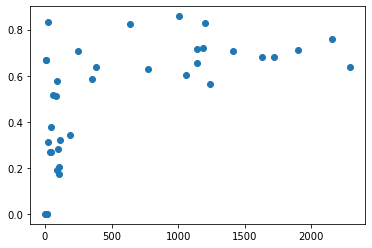

2016


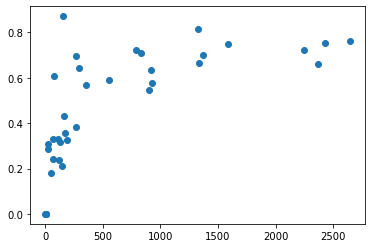

2017


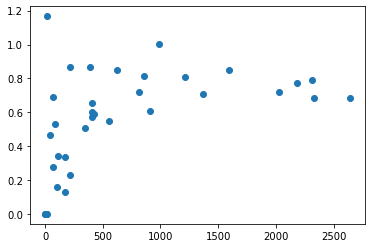

2018


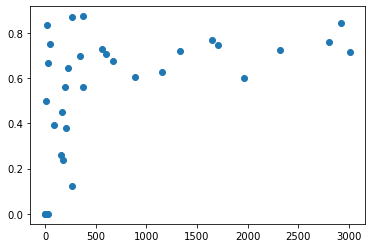

2019


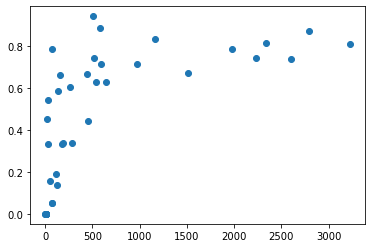

2020


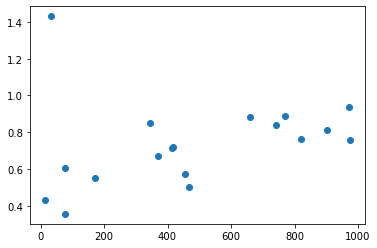

2021


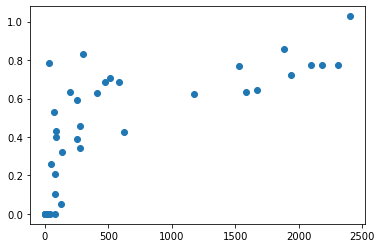

2022


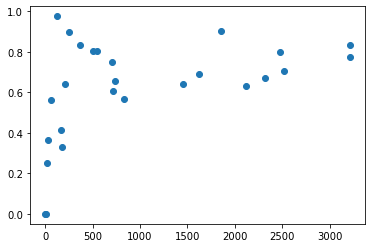

2023


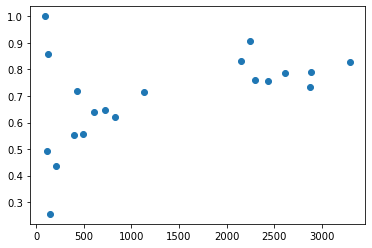

2024


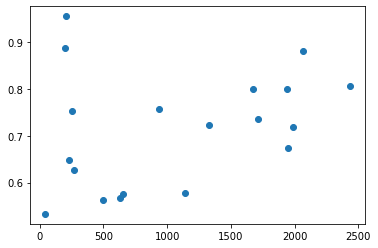

In [5]:
for gy in pos.game_year.unique().tolist():
    print(gy)
    df = pos[pos.game_year==gy]
    res = results('player_name')
    x = res.pitches
    y = res.ops
    plt.scatter(x,y)
    plt.show()
    
# #df = po24
# res = results('player_name').sort_values(by='ops',ascending=False)
# x = res.pitches
# y = res.ops
# plt.scatter(x,y)

In [6]:
# Is Castellanos's 15 pitch AB against Gilbert the longest in the statcast era?

In [7]:
pos.groupby(['game_pk','at_bat_number','player_name','game_date'],as_index=False
           ).agg({'des' : 'count'
                  ,'pitch_number' : 'max'
                 }).sort_values(by='pitch_number',ascending=False)

game_pk  at_bat_number        player_name   game_date  des  \
27123   567071              6     Realmuto, J.T.  2019-04-25   16   
51982   745222             11  Castellanos, Nick  2024-08-04   15   
7655    447537              1    Herrera, Odúbel  2016-05-23   14   
32776   631652             64    Gregorius, Didi  2020-08-19   14   
37580   634144             47       Segura, Jean  2021-05-11   14   
...        ...            ...                ...         ...  ...   
52686   745539             26      Stott, Bryson  2024-08-18    1   
21504   530726             28      Pivetta, Nick  2018-07-06    1   
44180   662592             48         Bohm, Alec  2022-04-29    1   
7226    447362             10     Goeddel, Tyler  2016-05-10    1   
36044   633448             15         Bohm, Alec  2021-07-02    1   

       pitch_number  
27123            16  
51982            15  
7655             14  
32776            14  
37580            14  
...             ...  
52686             1  
21504             1  
44180             1  
7226              1  
36044             1  

[57452 rows x 6 columns]

In [8]:
pos.sort_values(by='pitch_number',ascending=False)

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
115236         FF  2019-04-25           93.7           1.81           5.93   
115237         FF  2019-04-25           92.4           1.83           5.97   
207803         SL  2024-08-04           87.9          -1.18           5.67   
207804         SL  2024-08-04           88.0          -1.17           5.62   
115238         FF  2019-04-25           91.7           1.78           6.13   
...           ...         ...            ...            ...            ...   
171549         SL  2022-05-08           83.2          -3.54           5.52   
171550         CH  2022-05-08           82.5          -3.50           5.55   
79798          SI  2018-07-15           95.4          -1.44           5.88   
171552         CU  2022-05-08           71.8          -0.78           6.02   
224175         FF  2024-03-29           94.2           2.41           5.82   

              player_name  batter  pitcher     events      description  ...  \
115236     Realmuto, J.T.  592663   592761  strikeout  swinging_strike  ...   
115237     Realmuto, J.T.  592663   592761        NaN             foul  ...   
207803  Castellanos, Nick  592206   669302  field_out    hit_into_play  ...   
207804  Castellanos, Nick  592206   669302        NaN             foul  ...   
115238     Realmuto, J.T.  592663   592761        NaN             foul  ...   
...                   ...     ...      ...        ...              ...  ...   
171549  Castellanos, Nick  592206   453286        NaN     blocked_ball  ...   
171550      Harper, Bryce  547180   453286  field_out    hit_into_play  ...   
79798       Knapp, Andrew  595284   570632        NaN             ball  ...   
171552    Schwarber, Kyle  656941   605135        NaN             foul  ...   
224175    Schwarber, Kyle  656941   621345        NaN    called_strike  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
115236  0.719  0.870  1.217  1.529  1.940   0.2 -0.435  0.126  10.296  3.214  
115237  0.719  0.870  1.217  1.529  1.940   0.2 -0.435  0.126  10.296  3.214  
207803  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117   9.674  3.168  
207804  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117   9.674  3.168  
115238  0.719  0.870  1.217  1.529  1.940   0.2 -0.435  0.126  10.296  3.214  
...       ...    ...    ...    ...    ...   ...    ...    ...     ...    ...  
171549  0.720  0.884  1.261  1.601  2.072   0.2 -0.397  0.114   9.524  3.112  
171550  0.720  0.884  1.261  1.601  2.072   0.2 -0.397  0.114   9.524  3.112  
79798   0.720  0.880  1.247  1.578  2.031   0.2 -0.407  0.117   9.714  3.160  
171552  0.720  0.884  1.261  1.601  2.072   0.2 -0.397  0.114   9.524  3.112  
224175  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117   9.674  3.168  

[224176 rows x 108 columns]

In [9]:
# No JT had a 16 pith AB in his first month as a Phillie.

In [10]:
# Is Bohm's K rate increasing?
# How do I prove it?

In [11]:
# Is Bryson Stott heating up? Hittig the ball harder or further?

# LAD (A) 85-87
## Game 1: Glasnow vs Nola
## Game 2: Kershaw vs Sanchez

In [12]:
hays = pos[pos.player_name=='Hays, Austin']
hays.groupby('pitcher',as_index=False).agg({'des' : 'count'})

pitcher  des
0    434378    9
1    450203    7
2    471911    7
3    477132    7
4    519293    2
5    543339    1
6    543859    7
7    554340    5
8    572955    2
9    592454    6
10   605130    3
11   605280    6
12   607192    6
13   608331    8
14   608379   11
15   608638    4
16   608723    4
17   623352    4
18   628452    1
19   641482   17
20   641703   10
21   642546    4
22   656550    4
23   656629    4
24   657265    3
25   657571    2
26   661563    9
27   663704    1
28   663903    9
29   668674    1
30   669276    2
31   669302    5
32   669674    3
33   669854    7
34   672391    5
35   672782    2
36   676282    7
37   680704    3
38   680885    8
39   681293    5
40   682120    1
41   682243    5
42   694813    5
43   701542    6

In [13]:
# is the Sosa platoon worth it? how are his l/r splits? how about stott?
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]
df.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

player_name  batter   des
0     Clemens, Kody  665019   252
1  Merrifield, Whit  593160   633
2     Sosa, Edmundo  624641   937
3     Stott, Bryson  681082  1952
4    Wilson, Weston  642215   210

In [14]:
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'R']
r = results('player_name')
r['stand'] = 'R'

df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'L']
l = results('player_name')
l['stand'] = 'L'

z = pd.concat([r,l])
z[z.player_name.isin(['Sosa, Edmundo','Stott, Bryson'])]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
2  Sosa, Edmundo      522         135   92    31  4.0      4          35   
3  Stott, Bryson     1507         371  283    81  9.0     33          53   
2  Sosa, Edmundo      415         109   76    29  3.0      7          23   
3  Stott, Bryson      445         109   70    21  1.0     14          24   

      ba    obp    slg    ops   woba stand  
2  0.244  0.281  0.370  0.652  0.285     R  
3  0.246  0.313  0.377  0.690  0.303     R  
2  0.293  0.358  0.535  0.893  0.383     L  
3  0.226  0.330  0.290  0.621  0.287     L

In [15]:
sosa_id = 624641
stott_id = 681082
df = po24[po24.batter.isin([sosa_id,stott_id])]
defense = pp24[(pp24.fielder_4.isin([sosa_id,stott_id]))
               &(pp24.hit_location == 4)
              ]
defense.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                                 ,'at_bat_number' : 'nunique'
                                                 ,'game_pk' : 'nunique'
                                                })

fielder_2  des  at_bat_number  game_pk
0     592663  217             73       71
1     596117  119             64       39
2     665561   32             22       10

In [16]:
pitchers_def4 = defense.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
                                               ,'at_bat_number' : 'count'
                                               ,'game_pk' : 'count'
                                              }).sort_values(by='des',ascending=False)
# pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
#                                                             ,'game_pk' : 'nunique'
#                                                            })

In [17]:
df = pp24
res = results('player_name')
x = pitchers_def4.merge(res,how='left',on='player_name')
x['ratio'] = x.des/x.pitches
x['share'] = x.des/x.bip
x.sort_values(by='share',ascending=False)

player_name  pitcher  des  at_bat_number  game_pk  pitches  \
15             Lazar, Max   676661    6              6        6      119   
23         Ortiz, Luis F.   656814    1              1        1       10   
3       Turnbull, Spencer   605513   27             27       27      916   
5         Phillips, Tyler   663969   20             20       20      542   
22         Gilbert, Tyler   656457    1              1        1       42   
14          Allard, Kolby   663465    8              8        8      268   
9           Soto, Gregory   642397   13             13       13      649   
18          Banks, Tanner   621383    5              5        5      190   
1           Wheeler, Zack   554430   53             53       53     2657   
0             Nola, Aaron   605400   58             58       58     2703   
7          Alvarado, José   621237   17             17       17      915   
16         Pinto, Ricardo   620982    5              5        5      220   
2     Sánchez, Cristopher   650911   49             49       49     2328   
8           Hoffman, Jeff   656546   13             13       13      883   
12  Domínguez, Seranthony   622554    9              9        9      653   
11             Ruiz, José   614179   10             10       10      673   
10       Kerkering, Orion   689147   11             11       11      914   
20        Estévez, Carlos   608032    3              3        3      210   
13           Strahm, Matt   621381    9              9        9      830   
6         Walker, Taijuan   592836   17             17       17     1196   
21        Stubbs, Garrett   596117    1              1        1       57   
19       Mercado, Michael   675650    3              3        3      260   
4          Suárez, Ranger   624133   24             24       24     1930   
17          Marte, Yunior   628708    5              5        5      482   

    plate_apps  bip  hits   hrs  walks  strikeouts     ba    obp    slg  \
15          28   21     4   1.0    1.0         6.0  0.148  0.179  0.296   
23           4    4     3   0.0    0.0         0.0  0.750  0.750  0.750   
3          221  139    37   6.0   20.0        57.0  0.189  0.281  0.327   
5          150  114    37   7.0    7.0        27.0  0.264  0.307  0.457   
22           9    7     2   0.0    1.0         1.0  0.250  0.333  0.375   
14          73   58    22   5.0    2.0        13.0  0.310  0.329  0.549   
9          163   95    36   2.0   18.0        44.0  0.265  0.368  0.375   
18          53   38     9   1.0    4.0        11.0  0.184  0.245  0.306   
1          666  429   119  17.0   45.0       183.0  0.195  0.258  0.330   
0          701  492   155  24.0   43.0       161.0  0.238  0.287  0.403   
7          222  145    44   6.0   24.0        52.0  0.224  0.311  0.357   
16          59   44    19   2.0    5.0         8.0  0.373  0.441  0.608   
2          634  473   158   8.0   36.0       124.0  0.266  0.306  0.360   
8          233  138    42   5.0   14.0        78.0  0.195  0.249  0.316   
12         157  103    32   6.0   12.0        40.0  0.224  0.293  0.406   
11         176  120    41   7.0   11.0        44.0  0.255  0.301  0.416   
10         215  133    43   2.0   14.0        61.0  0.222  0.293  0.299   
20          56   39    10   1.0    2.0        14.0  0.189  0.232  0.264   
13         201  121    33   3.0   10.0        65.0  0.180  0.239  0.295   
6          316  231    87  18.0   29.0        53.0  0.309  0.373  0.557   
21          16   14     5   2.0    2.0         0.0  0.357  0.438  0.857   
19          64   44    16   9.0    9.0        10.0  0.296  0.406  0.833   
4          518  355   109  11.0   28.0       128.0  0.226  0.274  0.352   
17         126   89    34   5.0   14.0        23.0  0.306  0.381  0.495   

      ops   woba     ratio     share  
15  0.475  0.207  0.050420  0.285714  
23  1.500  0.664  0.100000  0.250000  
3   0.607  0.274  0.029476  0.194245  
5   0.764  0.330  0.036900  0.175439  
22  0.708  0.315  0.023810  0.142857  
14 

In [18]:
res

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0           Allard, Kolby      268          73   58    22   5.0    2.0   
1          Alvarado, José      915         222  145    44   6.0   24.0   
2           Banks, Tanner      190          53   38     9   1.0    4.0   
3         Brogdon, Connor       76          14    5     3   2.0    6.0   
4   Domínguez, Seranthony      653         157  103    32   6.0   12.0   
5         Estévez, Carlos      210          56   39    10   1.0    2.0   
6          Gilbert, Tyler       42           9    7     2   0.0    1.0   
7           Hoffman, Jeff      883         233  138    42   5.0   14.0   
8        Kerkering, Orion      914         215  133    43   2.0   14.0   
9              Lazar, Max      119          28   21     4   1.0    1.0   
10          Marte, Yunior      482         126   89    34   5.0   14.0   
11       Mercado, Michael      260          64   44    16   9.0    9.0   
12           Nelson, Nick       54          15   10     6   0.0    0.0   
13            Nola, Aaron     2703         701  492   155  24.0   43.0   
14         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
15        Phillips, Tyler      542         150  114    37   7.0    7.0   
16         Pinto, Ricardo      220          59   44    19   2.0    5.0   
17             Ruiz, José      673         176  120    41   7.0   11.0   
18          Soto, Gregory      649         163   95    36   2.0   18.0   
19           Strahm, Matt      830         201  121    33   3.0   10.0   
20        Stubbs, Garrett       57          16   14     5   2.0    2.0   
21         Suárez, Ranger     1930         518  355   109  11.0   28.0   
22    Sánchez, Cristopher     2328         634  473   158   8.0   36.0   
23      Turnbull, Spencer      916         221  139    37   6.0   20.0   
24        Walker, Taijuan     1196         316  231    87  18.0   29.0   
25          Wheeler, Zack     2657         666  429   119  17.0   45.0   
26         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0         13.0  0.310  0.329  0.549  0.878  0.377  
1         52.0  0.224  0.311  0.357  0.668  0.299  
2         11.0  0.184  0.245  0.306  0.551  0.245  
3          3.0  0.375  0.643  1.250  1.893  0.681  
4         40.0  0.224  0.293  0.406  0.699  0.306  
5         14.0  0.189  0.232  0.264  0.496  0.223  
6          1.0  0.250  0.333  0.375  0.708  0.315  
7         78.0  0.195  0.249  0.316  0.565  0.250  
8         61.0  0.222  0.293  0.299  0.592  0.269  
9          6.0  0.148  0.179  0.296  0.475  0.207  
10        23.0  0.306  0.381  0.495  0.876  0.380  
11        10.0  0.296  0.406  0.833  1.240  0.507  
12         5.0  0.400  0.400  0.533  0.933  0.402  
13       161.0  0.238  0.287  0.403  0.690  0.301  
14         0.0  0.750  0.750  0.750  1.500  0.664  
15        27.0  0.264  0.307  0.457  0.764  0.330  
16         8.0  0.373  0.441  0.608  1.049  0.446  
17        44.0  0.255  0.301  0.416  0.717  0.311  
18        44.0  0.265  0.368  0.375  0.743  0.333  
19        65.0  0.180  0.239  0.295  0.534  0.238  
20         0.0  0.357  0.438  0.857  1.295  0.534  
21       128.0  0.226  0.274  0.352  0.626  0.276  
22       124.0  0.266  0.306  0.360  0.666  0.293  
23        57.0  0.189  0.281  0.327  0.607  0.274  
24        53.0  0.309  0.373  0.557  0.930  0.398  
25       183.0  0.195  0.258  0.330  0.588  0.261  
26         0.0  0.250  0.250  0.250  0.500  0.221

In [19]:
pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
cris_id=650911
df = cris = pps[pps.pitcher==cris_id]
ch = df[df.pitch_type=='CH']
ch.groupby('game_year',
           as_index=False
          ).agg({'release_speed' : ['mean','std','count','min','max']
                 ,'release_spin_rate' : ['mean','std','count','min','max']
                 ,'launch_speed' : ['mean','std','nunique','min','max']
                 ,'launch_angle' : ['mean','std','count','min','max']
                 #,'launch_speedangle' : ['mean','std','count','min','max']
                }).round(1)

game_year release_speed                        release_spin_rate         \
                     mean  std count   min   max              mean    std   
0      2021          85.0  1.2    45  82.1  87.6            1843.0  149.6   
1      2022          84.4  1.3   133  80.1  87.2            1914.3  162.8   
2      2023          81.9  1.3   492  77.8  85.0            1889.2  123.6   
3      2024          85.1  1.1   835  81.3  89.5            2029.8  128.7   

                 ... launch_speed                            launch_angle  \
  count     min  ...         mean   std nunique   min    max         mean   
0    45  1534.0  ...         76.9  18.2      10  40.0  101.0         -6.4   
1   133  1486.0  ...         81.7  12.7      36  57.2  103.5         -1.6   
2   492  1524.0  ...         75.2  17.2     117  17.5  112.9        -10.1   
3   835  1505.0  ...         78.3  16.1     220  25.5  111.7         -5.1   

                           
    std count   min   max  
0  33.2    10 -58.0  53.0  
1  31.6    37 -76.0  65.0  
2  32.3   136 -80.0  75.0  
3  32.4   279 -79.0  81.0  

[4 rows x 21 columns]

In [20]:
do24 = pd.read_csv('do24.csv')
dp24 = pd.read_csv('dp24.csv')

In [21]:
cris[cris.game_year==2024].groupby(['game_pk','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'launch_speed' : 'mean'
                   ,'launch_angle' : 'mean'
                   ,'home_team' : 'max'
                   ,'post_home_score' : 'max'
                   ,'away_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'estimated_ba_using_speedangle' : 'sum'
                  }).sort_values(by='game_date',ascending=False).round(3)

game_pk   game_date  des  inning  at_bat_number  launch_speed  \
3    745531  2024-08-29  105       6             26        81.845   
24   747082  2024-08-22   95       6             27        79.014   
4    745537  2024-08-17   99       9             29        75.971   
25   747166  2024-08-11   96       5             27        80.368   
18   746120  2024-08-06   89       7             25        79.984   
5    745543  2024-07-31   94       6             25        82.835   
6    745554  2024-07-26   88       6             29        80.598   
2    745478  2024-07-20   90       6             24        88.442   
7    745556  2024-07-10   91       6             24        79.136   
22   746857  2024-07-04   79       5             22        82.676   
8    745560  2024-06-28  101       9             29        78.147   
9    745566  2024-06-23   80       7             22        81.888   
10   745567  2024-06-17   94       7             25        80.291   
23   746948  2024-06-12   67       5             19        89.042   
11   745568  2024-06-04   83       6             21        80.106   
1    745333  2024-05-29   96       6             24        80.697   
20   746558  2024-05-24   83       6             24        85.423   
12   745581  2024-05-18   92       7             26        85.926   
17   745826  2024-05-13  108       6             27        82.977   
13   745586  2024-05-07   89       7             27        83.531   
19   746236  2024-04-29   75       6             22        87.281   
21   746722  2024-04-23   74       3             18        84.648   
14   745591  2024-04-17   97       6             24        80.556   
15   745596  2024-04-12   91       6             26        83.017   
0    744871  2024-04-07   87       5             22        86.555   
16   745600  2024-04-01   85       6             20        82.200   

    launch_angle home_team  post_home_score away_team  post_away_score  \
3         17.289       PHI                0       ATL                4   
24         0.171       ATL                3       PHI                1   
4         -1.214       PHI                5       WSH                1   
25        -7.297        AZ                5       PHI                2   
18         4.432       LAD                1       PHI                4   
5          3.129       PHI                3       NYY                4   
6          1.095       PHI                1       CLE                3   
2         13.312       PIT                2       PHI                0   
7          1.361       PHI                4       LAD                2   
22         2.560       CHC                5       PHI                2   
8          1.639       PHI                2       MIA                0   
9         -0.781       PHI                3        AZ                0   
10         0.800       PHI                8        SD                2   
23         4.789       BOS                3       PHI                4   
11        -0.129       PHI                0       MIL                1   
1          1.030        SF                0       PHI                4   
20        11.613       COL                1       PHI                2   
12        -1.500       PHI                1       WSH                2   
17         6.925       NYM                3       PHI                1   
13         1.379       PHI                8       TOR                1   
19         9.385       LAA                2       PHI                4   
21        -1.200       CIN                5       PHI                1   
14         8.417       PHI                5       COL                1   
15        -6.793       PHI                1       PIT                2   
0         14.613       WSH                2       PHI                2   
16        10.190       PHI                2       CIN                0   

    estimated_ba_using_speedangle  
3                           7.073  
24                          4.176  
4                           5.469

## Game 3: Stone vs Phillips

In [22]:
# Has Bohm been punching out more? Yes
bohm = po24[po24.player_name == 'Bohm, Alec']
df = ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
#bohm.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
204671         ST  2024-08-28           80.1          -2.27           4.92   
204738         SL  2024-08-27           88.4          -1.54           7.17   
204907         FF  2024-08-26           93.3           2.51           5.80   
205405         SI  2024-08-23           95.0          -1.61           6.31   
205978         FC  2024-08-18           89.4          -1.19           5.75   
...           ...         ...            ...            ...            ...   
223014         SI  2024-04-06           90.8          -2.08           5.88   
223204         FC  2024-04-05           82.8           2.56           6.23   
223432         FF  2024-04-03           94.3          -2.32           5.82   
223805         FF  2024-03-31           96.2           3.23           5.17   
224066         SL  2024-03-29           85.1          -1.77           5.93   

       player_name  batter  pitcher                 events      description  \
204671  Bohm, Alec  664761   681293              strikeout  swinging_strike   
204738  Bohm, Alec  664761   434378              strikeout  swinging_strike   
204907  Bohm, Alec  664761   687911              strikeout    called_strike   
205405  Bohm, Alec  664761   608379              strikeout         foul_tip   
205978  Bohm, Alec  664761   606930              strikeout  swinging_strike   
...            ...     ...      ...                    ...              ...   
223014  Bohm, Alec  664761   663623  strikeout_double_play  swinging_strike   
223204  Bohm, Alec  664761   571578              strikeout  swinging_strike   
223432  Bohm, Alec  664761   608371              strikeout    called_strike   
223805  Bohm, Alec  664761   519242              strikeout    called_strike   
224066  Bohm, Alec  664761   675911              strikeout  swinging_strike   

        ...   wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W  \
204671  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
204738  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
204907  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
205405  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
205978  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
...     ...    ...    ...    ...    ...    ...   ...    ...    ...    ...   
223014  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
223204  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
223432  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
223805  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   
224066  ...  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674   

         cFIP  
204671  3.168  
204738  3.168  
204907  3.168  
205405  3.168  
205978  3.168  
...       ...  
223014  3.168  
223204  3.168  
223432  3.168  
223805  3.168  
224066  3.168  

[76 rows x 108 columns]

In [23]:
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
trea

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
59820          SL  2022-10-15           82.0          -1.44           6.23   
59821          SL  2022-10-15           82.3          -1.41           6.20   
59822          FF  2022-10-15           92.6          -1.21           6.38   
59823          SI  2022-10-15           91.8          -1.40           6.44   
59824          FC  2022-10-15           91.0          -1.36           6.37   
...           ...         ...            ...            ...            ...   
224159         CH  2024-03-29           86.9           2.66           5.68   
224160         SL  2024-03-29           88.8          -1.75           5.89   
224161         FF  2024-03-29           95.1           2.49           5.86   
224165         FF  2024-03-29           96.3          -1.77           5.87   
224166         FF  2024-03-29           97.1          -1.57           5.96   

         player_name  batter  pitcher     events      description  ...   wHBP  \
59820   Turner, Trea  607208   605397  field_out    hit_into_play  ...  0.720   
59821   Turner, Trea  607208   605397        NaN             ball  ...  0.720   
59822   Turner, Trea  607208   605397        NaN             ball  ...  0.720   
59823   Turner, Trea  607208   605397     double    hit_into_play  ...  0.720   
59824   Turner, Trea  607208   605397        NaN  swinging_strike  ...  0.720   
...              ...     ...      ...        ...              ...  ...    ...   
224159  Turner, Trea  607208   621345        NaN    called_strike  ...  0.723   
224160  Turner, Trea  607208   675911        NaN             foul  ...  0.723   
224161  Turner, Trea  607208   621345        NaN    called_strike  ...  0.723   
224165  Turner, Trea  607208   675911        NaN             foul  ...  0.723   
224166  Turner, Trea  607208   675911        NaN             ball  ...  0.723   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
59820   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
59821   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
59822   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
59823   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
59824   0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
...       ...    ...    ...    ...   ...    ...    ...    ...    ...  
224159  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224160  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224161  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224165  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224166  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  

[19834 rows x 109 columns]

In [24]:
df = trea[(trea.home_team=='AZ')
          &(trea.game_type == 'R')
         ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Turner, Trea      556         153  117    47    8     14          22   

      ba    obp    slg    ops   woba  
0  0.338  0.399  0.626  1.025  0.431

In [25]:
df[df.game_type=='R'].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

player_name  game_pk
0  Turner, Trea       33

# ARI (A) 88-811
## Game 1: Montgomery vs Allard
Bats show up and the Phillies look good.

## Game 2: Nelson vs Wheeler
Trying to look at Phillies vs pitchers like Ryne Nelson. <br>
He throws so many FF, so I am looking just at that.

In [26]:
pos[pos.des.str.contains('Ryne Nelson')][['home_team','away_team','pitcher']]
nelson_id = 669194
pvn = phils_vs_nelson = pd.concat([pos[pos.pitcher == nelson_id], nphl[nphl.pitcher == nelson_id]])
df = pvn
res = results('player_name')

In [27]:
df = po24
results('player_name')

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0          Bohm, Alec     1943         556  437   147  13.0   36.0   
1   Castellanos, Nick     1990         564  406   130  19.0   32.0   
2       Clemens, Kody      252          67   48    15   3.0    3.0   
3         Dahl, David      266          63   38    12   3.0    3.0   
4       Harper, Bryce     2063         522  352   130  26.0   56.0   
5        Hays, Austin      228          69   51    17   1.0    0.0   
6     Marchán, Rafael      195          56   44    15   3.0    3.0   
7      Marsh, Brandon     1715         400  223    86  14.0   41.0   
8    Merrifield, Whit      633         175  138    31   3.0   15.0   
9     Pache, Cristian      496         117   62    21   0.0   13.0   
10     Realmuto, J.T.     1330         348  240    83  11.0   21.0   
11       Rojas, Johan     1139         312  236    70   3.0   12.0   
12    Schwarber, Kyle     2433         582  319   114  28.0   90.0   
13      Sosa, Edmundo      937         244  168    60   7.0   11.0   
14     Stevenson, Cal       45          12    9     2   0.0    2.0   
15      Stott, Bryson     1952         480  353   102  10.0   47.0   
16    Stubbs, Garrett      654         162  100    30   1.0   15.0   
17       Turner, Trea     1672         433  322   120  15.0   23.0   
18     Wilson, Weston      210          59   41    18   3.0    3.0   

    strikeouts     ba    obp    slg    ops   woba  
0           76  0.289  0.340  0.461  0.801  0.346  
1          118  0.249  0.300  0.421  0.720  0.314  
2           16  0.234  0.269  0.484  0.753  0.320  
3           21  0.203  0.238  0.390  0.628  0.269  
4          113  0.281  0.358  0.524  0.882  0.379  
5           16  0.254  0.275  0.373  0.648  0.283  
6            8  0.294  0.339  0.549  0.888  0.377  
7          134  0.244  0.320  0.416  0.736  0.322  
8           19  0.197  0.274  0.293  0.567  0.257  
9           42  0.204  0.291  0.272  0.562  0.258  
10          82  0.258  0.310  0.413  0.723  0.317  
11          60  0.241  0.276  0.302  0.578  0.256  
12         167  0.238  0.359  0.448  0.807  0.354  
13          58  0.265  0.316  0.442  0.758  0.329  
14           1  0.200  0.333  0.200  0.533  0.263  
15          77  0.242  0.317  0.358  0.674  0.299  
16          42  0.210  0.302  0.273  0.575  0.267  
17          81  0.297  0.342  0.458  0.800  0.348  
18          14  0.327  0.356  0.600  0.956  0.403

In [28]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Marsh, Brandon'
          ,'Stott, Bryson'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
0          Bohm, Alec       18           7   6.0   4.0  0.0    0.0   
1   Castellanos, Nick       44           9   6.0   1.0  0.0    1.0   
4       Harper, Bryce       35           9   7.0   4.0  1.0    0.0   
5      Marsh, Brandon       30           6   1.0   1.0  0.0    1.0   
7      Realmuto, J.T.       20           6   5.0   2.0  0.0    0.0   
8        Rojas, Johan        6           2   2.0   1.0  0.0    0.0   
9     Schwarber, Kyle       37           8   6.0   1.0  0.0    1.0   
12      Stott, Bryson       31           9   6.0   3.0  1.0    0.0   
14       Turner, Trea       39          13  11.0   3.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0          1.0  0.571  0.571  1.000  1.571  0.662  
1          2.0  0.143  0.222  0.143  0.365  0.175  
4          2.0  0.444  0.444  0.778  1.222  0.523  
5          4.0  0.200  0.333  0.400  0.733  0.323  
7          1.0  0.333  0.333  0.333  0.667  0.294  
8          0.0  0.500  0.500  0.500  1.000  0.442  
9          1.0  0.143  0.250  0.286  0.536  0.242  
12         3.0  0.333  0.333  0.667  1.000  0.419  
14         2.0  0.231  0.231  0.385  0.615  0.259

In [29]:
rn = pd.read_csv('ryne_nelson.csv')
pitch_mix(rn)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball   2519      94.654347        2215.081909   
2         FC           Cutter    658      88.567325        2256.908815   
0         CH         Changeup    514      83.213230        1805.470817   
4         SL           Slider    419      82.821957        2431.813842   
1         CU        Curveball    276      77.014130        2490.293478   
5         ST          Sweeper    131      81.846565        2440.351145   

        zone  usage  
3   7.519254   55.8  
2   9.144377   14.6  
0   9.910506   11.4  
4  10.236277    9.3  
1   9.369565    6.1  
5   9.687023    2.9

In [30]:
rn24 = rn[rn.game_year==2024]
lhb_pitch_mix(rn24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball    489      94.825767        2211.783231   
0         CH         Changeup    178      83.129775        1958.365169   
2         FC           Cutter    177      91.463842        2173.627119   
1         CU        Curveball     91      77.517582        2476.967033   
5         ST          Sweeper      4      82.975000        2546.500000   
4         SL           Slider      2      83.450000        2429.500000   

        zone  usage  
3   7.699387   52.0  
0  10.000000   18.9  
2   9.056497   18.8  
1   9.252747    9.7  
5   7.500000    0.4  
4  11.000000    0.2

In [31]:
rhb_pitch_mix(rn24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball    488      95.172746        2222.801230   
2         FC           Cutter    161      91.200000        2212.329193   
4         SL           Slider    141      84.897163        2446.652482   
5         ST          Sweeper     40      82.200000        2551.025000   
1         CU        Curveball     23      78.313043        2580.086957   
0         CH         Changeup      3      82.400000        1839.000000   

        zone  usage  
3   7.436475   57.0  
2   9.223602   18.8  
4  10.319149   16.5  
5  10.850000    4.7  
1   9.347826    2.7  
0   7.333333    0.4

In [32]:
pm = rn.groupby('pitch_type',as_index=False
          ).agg({'release_speed' : ['mean','std']
                 ,'release_spin_rate' : ['mean','std']
                }).round(2)

In [33]:
ln = pd.concat([pos[pos.player_name.isin(lineup)], nphl[nphl.player_name.isin(lineup)]])

In [34]:
pt = 'FF'
muv = pm[pm.pitch_type == pt]['release_speed']['mean'].values[0]
stdv = pm[pm.pitch_type == pt]['release_speed']['std'].values[0]
mus = pm[pm.pitch_type == pt]['release_spin_rate']['mean'].values[0]
stds = pm[pm.pitch_type == pt]['release_spin_rate']['std'].values[0]
df = ln[(ln.p_throws == 'R')
        &(ln.pitch_type == pt)
        &(ln.release_speed >= (muv-(2*stdv)))
        &(ln.release_speed <= (muv+(2*stdv)))
        &(ln.release_spin_rate >= (mus-(2*stds)))
        &(ln.release_spin_rate <= (mus+(2*stds)))
       ]

In [35]:
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec     1223         329  223    71    5     33          71   
1  Castellanos, Nick     2741         661  465   178   37     59         130   
2      Harper, Bryce     2946         664  404   166   37    126         131   
3     Marsh, Brandon     1174         253  139    61    8     31          81   
4     Realmuto, J.T.     2449         638  458   176   28     56         120   
5       Rojas, Johan      243          64   47    13    1      6          10   
6    Schwarber, Kyle     2848         664  395   141   54     88         177   
7      Stott, Bryson     1273         244  177    57   10     24          41   
8       Turner, Trea     2536         623  459   174   27     57         101   

      ba    obp    slg    ops   woba  
0  0.241  0.319  0.339  0.658  0.296  
1  0.301  0.368  0.601  0.968  0.404  
2  0.312  0.441  0.613  1.054  0.442  
3  0.277  0.368  0.464  0.831  0.362  
4  0.306  0.370  0.551  0.921  0.390  
5  0.232  0.312  0.286  0.598  0.273  
6  0.249  0.351  0.588  0.939  0.391  
7  0.266  0.332  0.458  0.790  0.338  
8  0.312  0.379  0.553  0.932  0.394

### Wheeler by inning

In [36]:
df = wheeler = pp24[pp24.player_name == 'Wheeler, Zack']
results('inning')

inning  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       1      418         104   68    18  2.0    3.0          33  0.180   
1       2      409         107   74    23  5.0    6.0          27  0.228   
2       3      460         110   65    18  3.0   11.0          32  0.186   
3       4      422         104   58    16  1.0    8.0          36  0.172   
4       5      428         109   71    25  3.0    7.0          28  0.253   
5       6      314          79   54    11  2.0    5.0          18  0.155   
6       7      185          47   35     7  1.0    5.0           7  0.167   
7       8       21           6    4     1  0.0    0.0           2  0.167   

     obp    slg    ops   woba  
0  0.202  0.260  0.462  0.203  
1  0.271  0.446  0.717  0.309  
2  0.282  0.320  0.601  0.272  
3  0.250  0.258  0.508  0.232  
4  0.312  0.444  0.756  0.327  
5  0.228  0.282  0.510  0.229  
6  0.255  0.238  0.493  0.230  
7  0.167  0.167  0.333  0.148

In [37]:
wheeler[(wheeler.game_pk == wheeler.game_pk.max())
        &(wheeler.pitch_number == 1)
       ].groupby(['description'
                 #,'pitch_type'
                 ],as_index=False
                ).agg({'des' : 'count'})

description  des
0             ball    8
1    called_strike    8
2             foul    4
3        foul_bunt    1
4    hit_into_play    2
5  swinging_strike    2

### Phillies single season doubles and HRs leaders

In [38]:
dbls = pos[pos.events=='double']
dbls.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

player_name  game_year  des
20          Bohm, Alec       2024   44
74       Harper, Bryce       2021   42
92     Herrera, Odúbel       2017   42
203       Turner, Trea       2023   40
31   Castellanos, Nick       2023   39
98       Hoskins, Rhys       2018   38
182       Segura, Jean       2019   37
72       Harper, Bryce       2019   36
160     Realmuto, J.T.       2019   36
75       Harper, Bryce       2022   35

In [39]:
events = ['home_run','triple','double','single']
y = pd.DataFrame()
for e in events:
    x = pos[pos.events == e].groupby(['player_name','game_year']).agg({'des' : 'count'})
    x.rename(columns = {'des' : e}, inplace=True)
    print(x.sort_values(by=e,ascending=False).head(10))

                             home_run
player_name       game_year          
Schwarber, Kyle   2023             52
                  2022             52
Hoskins, Rhys     2022             36
Harper, Bryce     2019             35
                  2021             35
Hoskins, Rhys     2018             34
Castellanos, Nick 2023             34
Turner, Trea      2023             29
Hoskins, Rhys     2019             29
Schwarber, Kyle   2024             28
                            triple
player_name      game_year        
Hernández, César 2016           11
Bourjos, Peter   2016            7
Marsh, Brandon   2023            6
Revere, Ben      2015            6
Galvis, Freddy   2017            6
Hernández, César 2017            6
Herrera, Odúbel  2016            6
Hoskins, Rhys    2019            5
Turner, Trea     2023            5
Realmuto, J.T.   2022            5
                             double
player_name       game_year        
Bohm, Alec        2024           44
Harper, Bryce   

In [40]:
bohm = pos[pos.player_name == 'Bohm, Alec']
bohm[bohm.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'})

game_year  des
0       2020    4
1       2021    7
2       2022   14
3       2023   21
4       2024   13

In [41]:
df = bohm[bohm.events.isin(events)]
x = df.groupby(['game_year','events']
           ,as_index=False).agg({'des' : 'count'}
                               )
x


game_year    events  des
0        2020    double   11
1        2020  home_run    4
2        2020    single   39
3        2021    double   15
4        2021  home_run    7
5        2021    single   72
6        2022    double   29
7        2022  home_run   14
8        2022    single  131
9        2022    triple    3
10       2023    double   34
11       2023  home_run   21
12       2023    single  109
13       2024    double   44
14       2024  home_run   13
15       2024    single   88
16       2024    triple    2

In [42]:
pitch_mix(rn[rn.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball    977      94.999079        2217.286592   
2         FC           Cutter    338      91.338166        2192.062130   
0         CH         Changeup    181      83.117680        1956.386740   
4         SL           Slider    143      84.876923        2446.412587   
1         CU        Curveball    114      77.678070        2497.771930   
5         ST          Sweeper     44      82.270455        2550.613636   

        zone  usage  
3   7.568066   54.4  
2   9.136095   18.8  
0   9.955801   10.1  
4  10.328671    8.0  
1   9.271930    6.3  
5  10.545455    2.4

In [43]:
wheeler_ff = wheeler[wheeler.pitch_type == 'FF']
df = wheeler_ff.reset_index().reset_index()
df['cum'] = ''
run = 0
for i in range(len(df)):
    run+=df['release_spin_rate'].iloc[i]
    try:
        run/df['level_0'].iloc[i]
    except:
        df['cum'].iloc[i] = run
    else:
        df['cum'].iloc[i] = run/df['level_0'].iloc[i]
    

In [44]:
pos[pos.des.str.contains('Puk')][['des','home_team','away_team','pitcher']]

des home_team away_team  \
189154  Alec Bohm singles on a sharp line drive to rig...       MIA       PHI   

        pitcher  
189154   640462

In [45]:
puk_id = 640462
df = pd.concat([pos[pos.pitcher==puk_id],nphl[nphl.pitcher==puk_id]])
df = df[df.player_name.isin(['Stott, Bryson', 'Sosa, Edmundo','Rojas, Johan'])]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0   Rojas, Johan       10           3    2     1  0.0    0.0           1   
1  Sosa, Edmundo       17           5    3     1  0.0    0.0           2   
2  Stott, Bryson       20           4    1     1  0.0    1.0           2   

      ba    obp    slg    ops   woba  
0  0.333  0.333  0.667  1.000  0.420  
1  0.200  0.200  0.200  0.400  0.177  
2  0.333  0.500  0.667  1.167  0.488

In [46]:
df[df.player_name == 'Rojas, Johan'][['pitch_type','type','inning','game_date','release_speed'
                                      ,'release_spin_rate','launch_speed', 'launch_angle','estimated_ba_using_speedangle'
                                      ,'hit_location'
                                     ]]

pitch_type type  inning   game_date  release_speed  release_spin_rate  \
186544         FF    S       6  2023-07-31           96.9             2209.0   
186550         SI    S       6  2023-07-31           95.6             2089.0   
186557         FF    S       6  2023-07-31           95.1             2053.0   
207104         FF    X       8  2024-08-09           95.8             2312.0   
207105         FF    S       8  2024-08-09           96.6             2424.0   
207109         FF    S       8  2024-08-09           94.0             2236.0   
212040         SL    X       7  2024-06-29           84.9             2303.0   
212043         FF    B       7  2024-06-29           97.9             2251.0   
212051         SL    S       7  2024-06-29           86.4             2230.0   
212054         FF    S       7  2024-06-29           97.0             2264.0   

        launch_speed  launch_angle  estimated_ba_using_speedangle  \
186544           NaN           NaN                            NaN   
186550          77.5          11.0                            NaN   
186557           NaN           NaN                            NaN   
207104          95.6          23.0                          0.211   
207105           NaN           NaN                            NaN   
207109           NaN           NaN                            NaN   
212040          99.0          -4.0                          0.283   
212043           NaN           NaN                            NaN   
212051          88.8         -46.0                            NaN   
212054           NaN           NaN                            NaN   

        hit_location  
186544           2.0  
186550           NaN  
186557           NaN  
207104           7.0  
207105           NaN  
207109           NaN  
212040           6.0  
212043           NaN  
212051           NaN  
212054           NaN

In [47]:
gas = pps[pps.release_speed >= 95]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).reset_index(
drop=True).head(25)

player_name   des
0           Wheeler, Zack  6440
1          Alvarado, José  2711
2   Domínguez, Seranthony  2604
3            García, Luis  1670
4        Velasquez, Vince  1625
5           Pivetta, Nick  1620
6           Neris, Hector  1060
7           Soto, Gregory   968
8             Eflin, Zach   794
9           Hoffman, Jeff   731
10         Kimbrel, Craig   676
11           Coonrod, Sam   671
12             Giles, Ken   668
13        Brogdon, Connor   654
14          Marte, Yunior   594
15           Nelson, Nick   483
16       Kerkering, Orion   461
17          Diekman, Jake   454
18          Knebel, Corey   430
19         Ramos, Edubray   391
20          Ríos, Yacksel   363
21    Sánchez, Cristopher   354
22          Hunter, Tommy   352
23       Hernandez, David   347
24             Ruiz, José   313

In [48]:
xfinity = pp24[pp24.release_speed >= 95]
xfinity.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name  des
17          Wheeler, Zack  843
0          Alvarado, José  572
5        Kerkering, Orion  415
4           Hoffman, Jeff  403
2   Domínguez, Seranthony  386
13          Soto, Gregory  349
15    Sánchez, Cristopher  318
12             Ruiz, José  313
7           Marte, Yunior  207
3         Estévez, Carlos  126
8        Mercado, Michael   81
14           Strahm, Matt   27
10        Phillips, Tyler   19
9             Nola, Aaron   16
16      Turnbull, Spencer   12
1           Banks, Tanner    4
11         Pinto, Ricardo    4
6              Lazar, Max    3

### Brandon Marsh and his Sweet Spot%?

In [49]:
swsps = po24[(po24.launch_angle >= 8)
     &(po24.launch_angle<= 32)
    ].groupby('player_name',as_index=False).agg({'des' : 'count'}
                                               ).rename(columns = {'des' : 'swsp'})
     

In [50]:
df = po24
res = results('player_name')

In [51]:
z = swsps.merge(res,on='player_name')
z['pct'] = z.swsp/z.bip
z.sort_values(by='pct',ascending=False).round(3)

player_name  swsp  pitches  plate_apps  bip  hits   hrs  walks  \
3         Dahl, David    30      266          63   38    12   3.0    3.0   
7      Marsh, Brandon   172     1715         400  223    86  14.0   41.0   
16    Stubbs, Garrett    68      654         162  100    30   1.0   15.0   
6     Marchán, Rafael    28      195          56   44    15   3.0    3.0   
10     Realmuto, J.T.   144     1330         348  240    83  11.0   21.0   
15      Stott, Bryson   210     1952         480  353   102  10.0   47.0   
4       Harper, Bryce   209     2063         522  352   130  26.0   56.0   
2       Clemens, Kody    28      252          67   48    15   3.0    3.0   
1   Castellanos, Nick   231     1990         564  406   130  19.0   32.0   
9     Pache, Cristian    35      496         117   62    21   0.0   13.0   
18     Wilson, Weston    23      210          59   41    18   3.0    3.0   
13      Sosa, Edmundo    90      937         244  168    60   7.0   11.0   
17       Turner, Trea   167     1672         433  322   120  15.0   23.0   
0          Bohm, Alec   224     1943         556  437   147  13.0   36.0   
8    Merrifield, Whit    69      633         175  138    31   3.0   15.0   
12    Schwarber, Kyle   158     2433         582  319   114  28.0   90.0   
5        Hays, Austin    25      228          69   51    17   1.0    0.0   
14     Stevenson, Cal     4       45          12    9     2   0.0    2.0   
11       Rojas, Johan    88     1139         312  236    70   3.0   12.0   

    strikeouts     ba    obp    slg    ops   woba    pct  
3           21  0.203  0.238  0.390  0.628  0.269  0.789  
7          134  0.244  0.320  0.416  0.736  0.322  0.771  
16          42  0.210  0.302  0.273  0.575  0.267  0.680  
6            8  0.294  0.339  0.549  0.888  0.377  0.636  
10          82  0.258  0.310  0.413  0.723  0.317  0.600  
15          77  0.242  0.317  0.358  0.674  0.299  0.595  
4          113  0.281  0.358  0.524  0.882  0.379  0.594  
2           16  0.234  0.269  0.484  0.753  0.320  0.583  
1          118  0.249  0.300  0.421  0.720  0.314  0.569  
9           42  0.204  0.291  0.272  0.562  0.258  0.565  
18          14  0.327  0.356  0.600  0.956  0.403  0.561  
13          58  0.265  0.316  0.442  0.758  0.329  0.536  
17          81  0.297  0.342  0.458  0.800  0.348  0.519  
0           76  0.289  0.340  0.461  0.801  0.346  0.513  
8           19  0.197  0.274  0.293  0.567  0.257  0.500  
12         167  0.238  0.359  0.448  0.807  0.354  0.495  
5           16  0.254  0.275  0.373  0.648  0.283  0.490  
14           1  0.200  0.333  0.200  0.533  0.263  0.444  
11          60  0.241  0.276  0.302  0.578  0.256  0.373

In [52]:
# Hoffman gives up a bomb on the first pitch in the 9th. Ballgame.

## Game 3: Gallen vs Nola

In [53]:
df = nola = pps[pps.player_name == 'Nola, Aaron']
df = nola[nola.home_team == 'AZ']
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Nola, Aaron      358         101   74    34    4      5          20  0.362   

     obp    slg    ops   woba  
0  0.396  0.585  0.981  0.418

In [54]:
gallen_id = pos[(pos.game_date == '2023-10-16')
                &(pos.inning == 1)
               ].pitcher.unique()[0]
df = phils_vs_zg = pd.concat([pos[pos.pitcher==gallen_id],nphl[nphl.pitcher==gallen_id]])
res = results('player_name')

In [55]:
res

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
0       Alfaro, Jorge       26           6   4.0   3.0  0.0    0.0   
1          Bohm, Alec       47          14  11.0   1.0  0.0    2.0   
2   Castellanos, Nick       48          12   8.0   2.0  1.0    2.0   
3       Clemens, Kody       18           3   3.0   1.0  0.0    0.0   
4         Dahl, David       17           6   4.0   0.0  0.0    0.0   
5    Dickerson, Corey        7           2   1.0   0.0  0.0    0.0   
6      Galvis, Freddy        2           1   1.0   0.0  0.0    0.0   
7     Gregorius, Didi       20           4   4.0   1.0  0.0    0.0   
8       Harper, Bryce       92          22  17.0  10.0  2.0    2.0   
9       Haseley, Adam        7           2   1.0   0.0  0.0    0.0   
10   Hernández, César       13           2   1.0   0.0  0.0    0.0   
11    Herrera, Odúbel       16           4   3.0   0.0  0.0    0.0   
12      Hoskins, Rhys       38           7   3.0   1.0  1.0    2.0   
13  Jankowski, Travis        8           2   1.0   1.0  0.0    0.0   
14     Kingery, Scott       12           2   0.0   0.0  0.0    1.0   
15     Marsh, Brandon       37          10   7.0   3.0  0.0    0.0   
16  McCutchen, Andrew        8           3   2.0   2.0  0.0    1.0   
17   Merrifield, Whit       19           5   5.0   4.0  1.0    0.0   
18       Miller, Brad        6           2   1.0   0.0  0.0    0.0   
19        Moore, Matt        3           1   0.0   0.0  0.0    0.0   
20     Realmuto, J.T.       48          10   7.0   1.0  0.0    1.0   
21       Rojas, Johan       20           6   6.0   1.0  0.0    0.0   
22    Santana, Carlos       46          12   8.0   3.0  0.0    2.0   
23    Schwarber, Kyle       74          17  10.0   4.0  3.0    3.0   
24       Segura, Jean       55          12   7.0   3.0  1.0    1.0   
25      Stott, Bryson       53          14  12.0   4.0  0.0    1.0   
26    Stubbs, Garrett       33           7   4.0   2.0  0.0    0.0   
27   Torreyes, Ronald       11           2   2.0   0.0  0.0    0.0   
28       Turner, Trea      120          29  19.0   6.0  1.0    2.0   
29      Vargas, Jason        3           1   0.0   0.0  0.0    0.0   
30     Vierling, Matt       11           2   2.0   0.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0          2.0  0.500  0.500  0.833  1.333  0.568  
1          0.0  0.091  0.286  0.091  0.377  0.214  
2          2.0  0.200  0.333  0.500  0.833  0.357  
3          0.0  0.333  0.333  0.333  0.667  0.294  
4          2.0  0.000  0.000  0.000  0.000  0.000  
5          1.0  0.000  0.000  0.000  0.000  0.000  
6          0.0  0.000  0.000  0.000  0.000  0.000  
7          0.0  0.250  0.250  0.500  0.750  0.315  
8          3.0  0.500  0.545  0.850  1.395  0.583  
9          1.0  0.000  0.000  0.000  0.000  0.000  
10         1.0  0.000  0.000  0.000  0.000  0.000  
11         1.0  0.000  0.000  0.000  0.000  0.000  
12         2.0  0.200  0.429  0.800  1.229  0.493  
13         1.0  0.500  0.500  1.500  2.000  0.784  
14         1.0  0.000  0.500  0.000  0.500  0.345  
15         3.0  0.300  0.300  0.300  0.600  0.265  
16         0.0  1.000  1.000  1.000  2.000  0.821  
17         0.0  0.800  0.800  1.600  2.400  1.006  
18         1.0  0.000  0.000  0.000  0.000  0.000  
19         1.0  0.000  0.000  0.000  0.000  0.000  
20         2.0  0.111  0.200  0.111  0.311  0.158  
21         0.0  0.167  0.167  0.333  0.500  0.207  
22         2.0  0.300  0.417  0.400  0.817  0.367  
23         4.0  0.286  0.412  0.929  1.340  0.532  
24         4.0  0.273  0.333  0.545  0.879  0.371  
25         1.0  0.308  0.357  0.308  0.665  0.302  
26         3.0  0.286  0.286  0.429  0.714  0.306  
27         0.0  0.000  0.000  0.000  0.000  0.000  
28         8.0  0.222  0.276  0.444  0.720  0.307  
29         1.0  0.000  0.000  0.000  0.000  0.000  
30         0.0  0.000  0.000  0.000  0.000  0.000

In [56]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Marsh, Brandon'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Stubbs, Garrett'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
1          Bohm, Alec       47          14  11.0   1.0  0.0    2.0   
2   Castellanos, Nick       48          12   8.0   2.0  1.0    2.0   
8       Harper, Bryce       92          22  17.0  10.0  2.0    2.0   
15     Marsh, Brandon       37          10   7.0   3.0  0.0    0.0   
21       Rojas, Johan       20           6   6.0   1.0  0.0    0.0   
23    Schwarber, Kyle       74          17  10.0   4.0  3.0    3.0   
25      Stott, Bryson       53          14  12.0   4.0  0.0    1.0   
26    Stubbs, Garrett       33           7   4.0   2.0  0.0    0.0   
28       Turner, Trea      120          29  19.0   6.0  1.0    2.0   

    strikeouts     ba    obp    slg    ops   woba  
1          0.0  0.091  0.286  0.091  0.377  0.214  
2          2.0  0.200  0.333  0.500  0.833  0.357  
8          3.0  0.500  0.545  0.850  1.395  0.583  
15         3.0  0.300  0.300  0.300  0.600  0.265  
21         0.0  0.167  0.167  0.333  0.500  0.207  
23         4.0  0.286  0.412  0.929  1.340  0.532  
25         1.0  0.308  0.357  0.308  0.665  0.302  
26         3.0  0.286  0.286  0.429  0.714  0.306  
28         8.0  0.222  0.276  0.444  0.720  0.307

In [57]:
df[df.player_name == 'Bohm, Alec']#.groupby('events',as_index=False).agg({'des' : 'count'})

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
156404         FF  2022-08-30           94.3          -2.98           5.96   
156438         FC  2022-08-30           88.4          -3.07           5.90   
156439         FC  2022-08-30           88.4          -3.02           5.94   
156482         FF  2022-08-30           95.3          -2.61           6.04   
156484         FF  2022-08-30           94.5          -2.61           6.09   
156486         KC  2022-08-30           81.9          -2.92           5.94   
156489         KC  2022-08-30           82.8          -2.85           5.89   
156490         FF  2022-08-30           95.1          -2.91           5.98   
156493         FF  2022-08-30           94.4          -2.94           5.96   
166936         FF  2022-06-10           94.5          -2.87           5.94   
166937         FF  2022-06-10           95.1          -2.43           6.07   
166940         CH  2022-06-10           88.2          -2.72           5.78   
166942         FF  2022-06-10           95.3          -2.53           6.08   
166943         FC  2022-06-10           89.2          -2.60           5.94   
166946         FF  2022-06-10           93.1          -2.78           5.97   
195002         FC  2023-05-24           90.5          -2.66           6.01   
195003         FF  2023-05-24           94.0          -2.61           6.21   
195031         FF  2023-05-24           93.9          -2.73           6.33   
195032         FF  2023-05-24           93.9          -2.61           6.26   
195033         FF  2023-05-24           93.1          -2.64           6.33   
202452         FF  2023-10-21           93.6          -2.90           5.80   
202453         FF  2023-10-21           94.8          -2.63           5.89   
202454         FF  2023-10-21           95.1          -2.54           5.78   
202455         FF  2023-10-21           94.6          -2.84           5.83   
202456         SL  2023-10-21           89.7          -2.82           5.68   
202457         SL  2023-10-21           89.4          -2.89           5.74   
202488         FF  2023-10-21           92.7          -2.63           5.94   
202524         FF  2023-10-21           94.5          -2.78           5.85   
202528         FF  2023-10-21           94.1          -2.76           5.92   
202529         FF  2023-10-21           95.5          -2.80           5.90   
203015         FF  2023-10-16           93.1          -2.63           6.16   
203016         SL  2023-10-16           86.9          -2.86           5.91   
203043         FF  2023-10-16           93.4          -2.86           6.11   
203044         FF  2023-10-16           94.2          -2.81           6.16   
203092         SL  2023-10-16           87.9          -2.96           6.02   
203093         FF  2023-10-16           93.3          -2.66           6.18   
203098         FF  2023-10-16           93.1          -2.77           6.09   
203100         SL  2023-10-16           87.5          -3.01           6.00   
203102         FF  2023-10-16           94.0          -2.78           6.13   
203105         SL  2023-10-16           88.2          -3.02           5.92   
203111         FF  2023-10-16           94.2          -2.96           6.06   
206882         KC  2024-08-10           82.5          -2.54           5.84   
206883         FF  2024-08-10           95.6          -2.81           5.90   
206884         FF  2024-08-10           95.7          -2.36           6.01   
206931         KC  2024-08-10           82.7          -2.65           5.82   
206934         FF  2024-08-10           95.6          -2.67           5.91   
206939         KC  2024-08-10           83.0          -2.55           5.92   

       player_name  batter  pitcher                     events  \
156404  Bohm, Alec  664761   668678                  field_out   
156438  Bohm, Alec  664761   668678                  field_out   
156439  Bohm, Alec  664761   668678                        NaN  

## Game 4: Kelly vs Sanchez

Good ABs from the Phillies but nothing to show for it? Idk the team is just struggling rn

# Dylan Floro

In [58]:
pos[pos.des.str.contains('Floro')][['des','pitcher','home_team','away_team']]
floro = 571670
df = pd.concat([pos[pos.pitcher==floro],nphl[nphl.pitcher==floro]])
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
11    Harper, Bryce       18           4  3.0   1.0  0.0    1.0         0.0   
32  Schwarber, Kyle       25           6  1.0   0.0  0.0    2.0         3.0   
38     Turner, Trea       24           8  8.0   3.0  0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
11  0.333  0.500  0.333  0.833  0.394  
32  0.000  0.333  0.000  0.333  0.231  
38  0.375  0.375  0.375  0.750  0.331

In [59]:
# wtf was that Trea?

Damn. Tough one for the Fightins.

# JT and Harp Total Bases Algorithm
age - lookup?
<br>game_pk : nunique - the distinct count of game ids in the dataset
<br>hit_weight : sum - the sum of my calculated hit_weight column

def hit_weight():
    

# SQL Attempt
That is my shit

```sql
select pn.player_name
      ,pn.batter
      ,max(pn.age) age
      ,count(distinct game_pk) games
      ,case when events = 'single' then 1
            when events = 'double' then 2
            when events = 'triple' then 3
            when events = 'home_run' then 4
            end as total_bases
      ,'Phillies' as team
      ,count(distinct game_year) seasons
from pn
```

In [60]:
x = pos[pos.events.isin(['home_run','triple','double','single'])]
#x['hit_weight'] = x

# Chat GPT Response to Prompt - "Turn this SQL query into a pandas function"

In [61]:
def process_data(df):
    # Map the events to total bases
    event_to_bases = {
        'single': 1,
        'double': 2,
        'triple': 3,
        'home_run': 4
    }
    
    # Add a column for total bases based on events
    df['total_bases'] = df['events'].map(event_to_bases)
    
    # Group by player_name and batter and calculate the required aggregations
    result = df.groupby(['player_name', 'batter']).agg(
        age=('age', 'max'),
        games=('game_pk', 'nunique'),
        total_bases=('total_bases', 'max'),  # Assumes one total_bases value per player in a game
        seasons=('game_year', 'nunique')
    ).reset_index()
    
    # Add a constant column for team
    result['team'] = 'Phillies'
    
    return result

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# result_df = process_data(df)
# print(result_df)

# MIA (H) 813-814
Feels like a big series, good opportunity to rack up some wins against the bottom-feeding Marlins.

## Game 1: Bellozo vs Walker
Taijuan Walker makes his long-awaited return to the Phillies rotation on this Tuesday evening as the ballclub welcomes the last-place Miami Marlins to Citizens Bank Park. Walker has not faced many of the Marlins hitters before, many of them are new to the big leagues. This should be a chance to get Tai back into the rhythm of things.

## Game 2: Cabrera vs Phillips

Schwarber grand slam is a huge momentum swing, Phillies have some hope again.

# Runs For and Runs Against Trend Line

In [62]:
rf = pp24.groupby(['game_pk'
                   ,'game_date'
                  ]
                   ,as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [63]:
hrf = rf[rf.home_team == 'PHI']
hrf.rename(columns = {'home_team' : 'team'
                      ,'post_home_score' : 'runs'}
          ,inplace=True)

In [64]:
arf = rf[rf.away_team == 'PHI']
arf.rename(columns = {'away_team' : 'team'
            ,'post_away_score' : 'runs'}
          ,inplace=True)

In [65]:
ra = po24.groupby(['game_pk','game_date'],as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [66]:
hra = ra[ra.home_team == 'PHI']
hra.rename(columns = {'home_team' : 'team'
                      ,'post_away_score' : 'runs'
                     },inplace=True)
ara = ra[ra.away_team == 'PHI']
ara.rename(columns = {'away_team' : 'team'
                      ,'post_home_score' : 'runs'
                     },inplace=True)

In [67]:
rfs = pd.concat([hrf[['game_pk','game_date','team','runs']]
                 ,arf[['game_pk','game_date','team','runs']]
                ])
rfs['date'] = pd.to_datetime(rfs.game_date)

In [68]:
ras = pd.concat([hra[['game_pk','game_date','team','runs']]
                 ,ara[['game_pk','game_date','team','runs']]
                ])
ras['date'] = pd.to_datetime(ras.game_date)

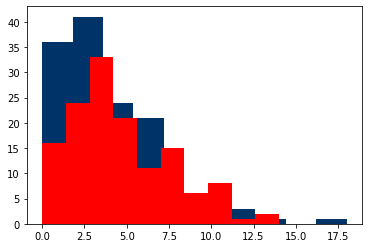

In [69]:
plt.hist(ras.runs,color = '#003469')
plt.hist(rfs.runs,color = '#ff0000')
plt.show()

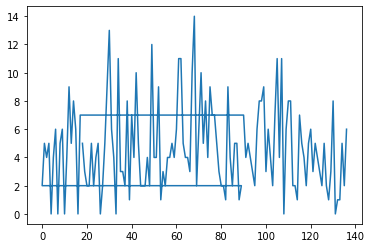

In [70]:
plt.plot(rfs.runs)

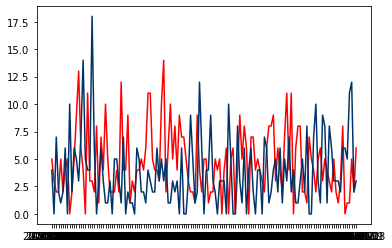

In [71]:
plt.plot(rfs.game_date.values,rfs.runs.values, color = '#ff0000')
plt.plot(ras.game_date.values,ras.runs.values, color = '#003469')
plt.show()

Might be good to try some running averages here to accomplish smoothing?

# Schwarber OBP by Year

In [72]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
res = results('game_year')

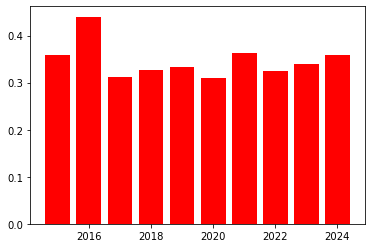

In [73]:
z = res[['game_year','obp']]
x = z.game_year
y = z.obp
plt.bar(x,y,color = '#ff0000')
#plt.text(x=x,y=y,s=y)
plt.show()

In [74]:
# It is Schwarber's highest OBP as a Phillie

# Phillies Fastball Velo by Year

In [75]:
df = pitch_mix_by_group(pps[pps.pitch_type == 'FF'],'game_year')

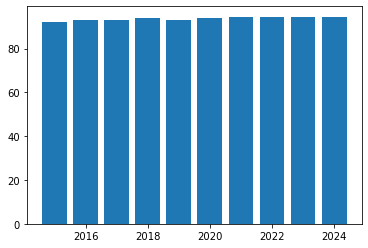

In [76]:
df[['game_year','release_speed']].sort_values(by='release_speed',ascending=False).round(2)
x = df.game_year
y = df.release_speed
plt.bar(x,y)
plt.show()

# Pitch Mix vs Homer Pitch Mix

In [77]:
bohm_hrs = bohm[bohm.events == 'home_run']
pm = pitch_mix(bohm)
pmh = pitch_mix(bohm_hrs)

In [78]:
df = pm.merge(pmh, on = 'pitch_type', suffixes = ('','_hr'))

In [79]:
z = df[['pitch_type'
    ,'pitch_name'
    ,'usage'
    ,'usage_hr'
    ,'count'
    ,'count_hr'
   ]]
z['diff'] = z.usage - z.usage_hr
z.sort_values(by='diff',ascending=True)
# Bohm crushes changeups

pitch_type       pitch_name  usage  usage_hr  count  count_hr  diff
3         CH         Changeup    7.5      18.6    690        11 -11.1
0         FF  4-Seam Fastball   33.1      37.3   3052        22  -4.2
5         CU        Curveball    5.8       8.5    535         5  -2.7
2         SL           Slider   18.5      16.9   1712        10   1.6
4         FC           Cutter    7.5       5.1    690         3   2.4
1         SI           Sinker   20.3      13.6   1872         8   6.7

# WAS (H) 815-818

## Game 1: Parker vs Wheeler

The boys brought the boom tonight. Weston Wilson hit for the cycle. Nice.

In [80]:
po = pos[pos.game_date == '2024-08-15']
po

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
206282         FF  2024-08-15           92.8           1.40           6.31   
206283         SL  2024-08-15           84.4           2.33           5.81   
206284         FF  2024-08-15           92.5           1.33           6.38   
206285         FF  2024-08-15           93.0           1.36           6.44   
206286         SL  2024-08-15           83.2           2.03           5.99   
...           ...         ...            ...            ...            ...   
206434         FF  2024-08-15           93.7           1.68           6.16   
206435         CH  2024-08-15           83.5          -1.66           6.51   
206436         FF  2024-08-15           94.5           1.56           6.25   
206437         FF  2024-08-15           93.5          -2.66           6.41   
206438         SI  2024-08-15           92.4          -2.07           5.70   

            player_name  batter  pitcher     events      description  ...  \
206282    Harper, Bryce  547180   680730     single    hit_into_play  ...   
206283    Harper, Bryce  547180   680730        NaN             foul  ...   
206284    Harper, Bryce  547180   680730        NaN             foul  ...   
206285    Harper, Bryce  547180   680730        NaN             foul  ...   
206286    Harper, Bryce  547180   680730        NaN             foul  ...   
...                 ...     ...      ...        ...              ...  ...   
206434  Schwarber, Kyle  656941   680730        NaN             foul  ...   
206435    Harper, Bryce  547180   687377        NaN  swinging_strike  ...   
206436  Schwarber, Kyle  656941   680730        NaN             ball  ...   
206437       Bohm, Alec  664761   663432        NaN             ball  ...   
206438       Bohm, Alec  664761   674285  field_out    hit_into_play  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
206282  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206283  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206284  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206285  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206286  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
206434  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206435  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206436  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206437  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
206438  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  

[157 rows x 108 columns]

In [81]:
po.groupby(['player_name','batter']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

player_name  batter  at_bat_number  des  launch_speed  launch_angle  \
0         Bohm, Alec  664761              5    8        92.075        22.250   
1  Castellanos, Nick  592206              5   12        87.017        23.000   
2      Harper, Bryce  547180              5   19        87.833        34.444   
3     Realmuto, J.T.  592663              5   21        79.400        15.167   
4       Rojas, Johan  679032              5   25        84.450        40.500   
5    Schwarber, Kyle  656941              6   25        88.275        46.375   
6      Sosa, Edmundo  624641              1    3        70.500        68.000   
7      Stott, Bryson  681082              4    7        70.333        13.667   
8       Turner, Trea  607208              5   19        92.729        16.714   
9     Wilson, Weston  642215              5   18        86.257        25.429   

   estimated_ba_using_speedangle  
0                          2.006  
1                          1.438  
2                          2.272  
3                          1.268  
4                          1.307  
5                          0.923  
6                          0.000  
7                          0.220  
8                          1.481  
9                          1.368

In [82]:
pp = pps[pps.game_date == '2024-08-15']
pp

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
205410         ST  2024-08-15           85.1          -2.15           5.20   
205411         FF  2024-08-15           95.2          -2.10           5.15   
205412         ST  2024-08-15           86.4          -2.06           5.17   
205413         SI  2024-08-15           95.3          -2.03           5.21   
205414         FF  2024-08-15           95.7          -2.11           5.31   
...           ...         ...            ...            ...            ...   
205550         FC  2024-08-15           91.3          -2.16           5.32   
205551         FF  2024-08-15           95.0          -0.54           6.04   
205552         SL  2024-08-15           85.3           2.79           6.37   
205553         ST  2024-08-15           86.4          -1.63           5.62   
205554         FF  2024-08-15           95.3          -2.06           5.45   

             player_name  batter  pitcher     events    description  ...  \
205410     Wheeler, Zack  665953   554430  field_out  hit_into_play  ...   
205411     Wheeler, Zack  665953   554430        NaN           ball  ...   
205412     Wheeler, Zack  665953   554430        NaN  called_strike  ...   
205413     Wheeler, Zack  665953   554430        NaN       foul_tip  ...   
205414     Wheeler, Zack  695578   554430  field_out  hit_into_play  ...   
...                  ...     ...      ...        ...            ...  ...   
205550     Wheeler, Zack  682928   554430        NaN           ball  ...   
205551        Lazar, Max  660688   676661        NaN           ball  ...   
205552     Banks, Tanner  682928   621383  field_out  hit_into_play  ...   
205553  Kerkering, Orion  671277   689147        NaN  called_strike  ...   
205554     Wheeler, Zack  682928   554430        NaN           ball  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
205410  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205411  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205412  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205413  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205414  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
205550  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205551  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205552  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205553  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
205554  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  

[145 rows x 108 columns]

In [83]:
pp.groupby(['player_name','pitcher']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

player_name  pitcher  at_bat_number  des  launch_speed  launch_angle  \
0     Banks, Tanner   621383              5   10        80.183        10.333   
1  Kerkering, Orion   689147              5   19        87.333        19.500   
2        Lazar, Max   676661              4   20        82.783        23.167   
3     Wheeler, Zack   554430             22   96        79.240        23.467   

   estimated_ba_using_speedangle  
0                          2.003  
1                          1.351  
2                          0.917  
3                          3.816

## Game 2: Corbin vs Nola

In [84]:
#pos[pos.des.str.contains('Patrick Corbin')].groupby('pitcher',as_index=False).agg({'des' : 'count'})
corbin_id = 571578
pc = pd.concat([pos[pos.pitcher == corbin_id]
                ,nphl[nphl.pitcher == corbin_id]
               ])
df = pc
res = results('player_name')
res
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
4          Bohm, Alec      114          30  23.0  10.0  2.0    3.0   
7   Castellanos, Nick       61          17  11.0   3.0  0.0    2.0   
18      Harper, Bryce      190          48  28.0  12.0  0.0    9.0   
31     Marsh, Brandon        6           3   2.0   0.0  0.0    0.0   
43     Realmuto, J.T.      155          43  31.0  14.0  2.0    4.0   
45       Rojas, Johan       22           7   5.0   1.0  0.0    0.0   
49    Schwarber, Kyle      101          26  16.0   6.0  2.0    5.0   
51      Sosa, Edmundo       12           4   3.0   2.0  0.0    0.0   
52      Stott, Bryson       52          15  12.0   5.0  0.0    2.0   
54       Turner, Trea       55          14  12.0   4.0  0.0    1.0   
61     Wilson, Weston       21           4   2.0   0.0  0.0    1.0   

    strikeouts     ba    obp    slg    ops   woba  
4          4.0  0.370  0.433  0.704  1.137  0.475  
7          4.0  0.200  0.294  0.200  0.494  0.237  
18        11.0  0.308  0.438  0.410  0.848  0.381  
31         1.0  0.000  0.000  0.000  0.000  0.000  
43         7.0  0.378  0.442  0.595  1.036  0.439  
45         2.0  0.143  0.143  0.143  0.286  0.126  
49         5.0  0.286  0.423  0.571  0.995  0.429  
51         0.0  0.667  0.750  1.333  2.083  0.801  
52         1.0  0.385  0.467  0.615  1.082  0.460  
54         1.0  0.308  0.357  0.462  0.819  0.356  
61         1.0  0.000  0.250  0.000  0.250  0.174

Based off of previous at bats against Patrick Corbin, the Phillies should trot out this lineup tonight.
1. Kyle Schwarber 0
2. Nick Castellanos 9
3. Bryce Harper 3
4. Alec Bohm 5
5. J.T. Realmuto 2
6. Bryson Stott 4
7. Weston Wilson 7
8. Brandon Marsh 8
9. Edmundo Sosa 6

Call me crazy, I know Topper won't do it. Let's check Trea Turner's at bats against Corbin and guys like Corbin.

In [85]:
df = pc[pc.player_name == 'Turner, Trea']
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018       14           4    2   0.0  0.0    1.0         1.0  0.000   
1       2022        6           1    1   0.0  0.0    0.0         0.0  0.000   
2       2023        6           2    2   0.0  0.0    0.0         0.0  0.000   
3       2024       29           7    7   4.0  0.0    0.0         0.0  0.571   

     obp    slg    ops   woba  
0  0.250  0.000  0.250  0.172  
1  0.000  0.000  0.000  0.000  
2  0.000  0.000  0.000  0.000  
3  0.571  0.857  1.429  0.613

In [86]:
df[df.type=='X'][['game_date','inning'
                  ,'balls','strikes'
                  ,'estimated_ba_using_speedangle'
                  ,'launch_speed'
                  ,'launch_angle'
                  ,'events'
                  ,'hit_location'
                 ]].sort_values(by=['game_date','inning'])

game_date  inning  balls  strikes  estimated_ba_using_speedangle  \
208527  2018-04-28       5      0        0                          0.120   
208524  2018-04-28       7      1        1                          0.447   
60953   2022-07-27       1      3        2                          0.274   
185019  2023-08-10       2      1        0                          0.874   
184969  2023-08-10       4      1        2                          0.140   
223286  2024-04-05       1      2        2                          0.006   
223218  2024-04-05       2      0        2                          0.103   
223188  2024-04-05       5      0        0                          0.071   
223166  2024-04-05       7      0        0                          0.654   
206256  2024-08-16       1      3        1                          0.840   
206164  2024-08-16       3      3        2                          0.374   
206128  2024-08-16       5      2        2                          0.937   

        launch_speed  launch_angle                     events  hit_location  
208527          75.7          -5.0                  field_out           4.0  
208524         105.3           0.0  grounded_into_double_play           4.0  
60953           97.7          20.0                  field_out           9.0  
185019          82.8          14.0                  field_out           6.0  
184969          93.5         -21.0                  field_out           4.0  
223286          67.3          63.0                  field_out           6.0  
223218          81.5         -44.0                  field_out           5.0  
223188          83.3         -26.0                  field_out           6.0  
223166         104.6          20.0                     double           9.0  
206256         105.6          10.0                     single           9.0  
206164          94.3           1.0                     single           8.0  
206128         101.8          12.0                     double           8.0

In [87]:
pc[pc.pitch_type.isin(['FF','SI'])].agg({'release_speed' : ['mean','std']}).round(2)

release_speed
mean          92.25
std            1.55

In [88]:
pitch_mix(pc[pc.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
5         SL           Slider     66      80.674242        2125.666667   
4         SI           Sinker     60      91.091667        2065.283333   
2         FC           Cutter     29      86.562069        2226.068966   
3         FF  4-Seam Fastball     24      90.887500        2075.791667   
1         CU        Curveball      7      72.228571        1963.142857   
0         CH         Changeup      3      78.466667        1334.333333   

        zone  usage  
5  10.863636   34.9  
4   9.416667   31.7  
2   7.862069   15.3  
3   8.416667   12.7  
1   9.000000    3.7  
0  12.000000    1.6

In [89]:
df = trea[(trea.p_throws=='L')
     &(trea.pitch_type.isin(['FF','SI']))
     #&(trea.zone.isin([3,6,9]))
          &(trea.release_speed >= 90-1.57)
          &(trea.release_speed <= 90+1.57)
    ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015        9           2    2   0.0  0.0    0.0         0.0  0.000   
1       2016       53          13   12   7.0  1.0    1.0         0.0  0.583   
2       2017       82          18   12   2.0  0.0    2.0         4.0  0.125   
3       2018      129          39   32   8.0  1.0    6.0         1.0  0.242   
4       2019      105          24   19   9.0  1.0    1.0         4.0  0.391   
5       2020       35           8    8   3.0  1.0    0.0         0.0  0.375   
6       2021       63          14   12   5.0  1.0    2.0         0.0  0.417   
7       2022       78          22   15   4.0  1.0    1.0         6.0  0.200   
8       2023      108          26   23   5.0  0.0    1.0         2.0  0.200   
9       2024       46          18   16   7.0  1.0    0.0         2.0  0.389   

     obp    slg    ops   woba  
0  0.000  0.000  0.000  0.000  
1  0.615  1.083  1.699  0.695  
2  0.222  0.188  0.410  0.194  
3  0.359  0.424  0.783  0.343  
4  0.417  0.609  1.025  0.429  
5  0.375  1.125  1.500  0.597  
6  0.500  0.750  1.250  0.519  
7  0.227  0.350  0.577  0.246  
8  0.231  0.200  0.431  0.197  
9  0.389  0.722  1.111  0.472

Trea could do all right against Corbin.

## Game 3: Gore vs Sanchez

The Sanchize threw a complete game.

## Game 4: Irvin vs Walker

L

# ATL (A) 820-822
Big series. The Braves are banged up, the Phillies are starting to build some momentum. They could bury the Braves in the next two weeks.

## Game 1: Lopez vs Wheeler

In [90]:
# Does Zack Wheeler establish the fastball?

In [91]:
# Wheeler OPS vs RHB is .415!
df = wheeler[wheeler.stand=='R']
results('player_name') # Kellen has .149 BA, a .197 OBP, and a .413 OPS.

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Wheeler, Zack     1181         307  200    46    5     10          91   

      ba    obp    slg    ops   woba  
0  0.159  0.199  0.239  0.437  0.196

In [92]:
df = wheeler
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Wheeler, Zack     2657         666  429   119   17     45         183   

      ba    obp   slg    ops   woba  
0  0.195  0.258  0.33  0.588  0.261

In [93]:
zw = wheeler

In [94]:
zwff = zw[zw.pitch_type.isin(['FF','SI'])].groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })
zwi = zw.groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })

In [95]:
x = zwi.merge(zwff,on = 'inning')
x['usage'] = x.des_y / x.des_x

In [96]:
x
# Long story short: Yes, Zack Wheeler throws more fastballs early in the game and he throws the ball harder.

inning  release_speed_x  des_x  release_speed_y  des_y     usage
0       1        93.324641    418        95.955782    294  0.703349
1       2        91.831373    409        95.283004    253  0.618582
2       3        91.039565    460        94.844030    268  0.582609
3       4        90.732464    422        94.713693    241  0.571090
4       5        90.545794    428        94.715678    236  0.551402
5       6        90.224522    314        94.241143    175  0.557325
6       7        90.461622    185        94.405882    102  0.551351
7       8        90.047619     21        94.327273     11  0.523810

In [97]:
z = zw.groupby(['game_pk','game_date']
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'inning' : 'nunique'
                }
               ).sort_values(by='game_date',ascending=False)

<BarContainer object of 27 artists>

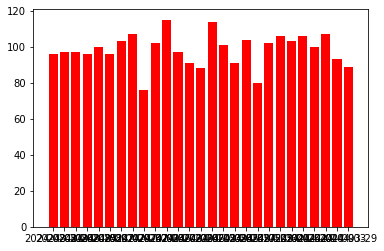

In [98]:
x = z.game_date
y = z.des
plt.bar(x,y,color='#ff0000')

In [99]:
pp24.groupby(['game_pk','inning','game_date','player_name']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(5)

game_pk  inning   game_date      player_name  des
713    745589       2  2024-05-03      Nola, Aaron   46
312    745547       5  2024-07-29    Wheeler, Zack   37
830    745600      10  2024-04-01  Brogdon, Connor   37
1278   747164       7  2024-08-10    Marte, Yunior   36
930    745881       8  2024-07-22    Marte, Yunior   36

In [100]:
pp24[pp24.pitch_number==1].groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

description   des
0                      ball  1758
3             called_strike  1538
4                      foul   631
8             hit_into_play   615
10          swinging_strike   374
1              blocked_ball    83
6                  foul_tip    36
5                 foul_bunt    25
7              hit_by_pitch    17
11  swinging_strike_blocked     7
9               missed_bunt     5
2             bunt_foul_tip     1

In [101]:
balls = ['ball'
         ,'blocked_ball'
        ]
first_pitches = pp24[pp24.pitch_number==1]
fp = first_pitches.groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fpb = first_pitches[first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fps = first_pitches[~first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

In [102]:
z = fp.merge(fpb, on = ['player_name','pitcher'], suffixes = ('','_b'))
z['strikes'] = z.des - z.des_b
z['first_pitch_strike%'] = z.strikes/z.des
z.round(3).sort_values(by='first_pitch_strike%',ascending=False)

player_name  pitcher  des  des_b  strikes  first_pitch_strike%
0           Allard, Kolby   663465   73     19       54                0.740
2           Banks, Tanner   621383   53     15       38                0.717
5         Estévez, Carlos   608032   56     17       39                0.696
7           Hoffman, Jeff   656546  234     77      157                0.671
6          Gilbert, Tyler   656457    9      3        6                0.667
12           Nelson, Nick   656793   15      5       10                0.667
13            Nola, Aaron   605400  702    238      464                0.661
18           Strahm, Matt   621381  201     69      132                0.657
24          Wheeler, Zack   554430  665    229      436                0.656
21    Sánchez, Cristopher   650911  633    221      412                0.651
16             Ruiz, José   614179  176     62      114                0.648
9              Lazar, Max   676661   28     10       18                0.643
20         Suárez, Ranger   624133  517    185      332                0.642
8        Kerkering, Orion   689147  215     79      136                0.633
14        Phillips, Tyler   663969  150     56       94                0.627
19        Stubbs, Garrett   596117   16      6       10                0.625
23        Walker, Taijuan   592836  317    120      197                0.621
1          Alvarado, José   621237  220     85      135                0.614
22      Turnbull, Spencer   605513  221     87      134                0.606
17          Soto, Gregory   642397  162     64       98                0.605
15         Pinto, Ricardo   620982   58     25       33                0.569
4   Domínguez, Seranthony   622554  157     70       87                0.554
11       Mercado, Michael   675650   64     29       35                0.547
10          Marte, Yunior   628708  126     58       68                0.540
25         Wilson, Weston   642215    4      2        2                0.500
3         Brogdon, Connor   641401   14     10        4                0.286

In [103]:
ok = pps[pps.pitcher == 689147]
pitch_mix(ok)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         ST          Sweeper    613      86.139804        2913.625624   
0         FF  4-Seam Fastball    285      97.589825        2361.469314   
1         SI           Sinker    180      96.691667        2263.437500   

       zone  usage  
2  9.698206   56.9  
0  7.870175   26.4  
1  8.711111   16.7

In [104]:
ja = pp24[pp24.pitcher == 621237]
pitch_mix(ja)

pitch_type pitch_name  count  release_speed  release_spin_rate       zone  \
2         SI     Sinker    545      97.806789        2075.820268   7.768807   
1         FC     Cutter    367      92.575749        2101.215297  10.591281   
0         CU  Curveball      3      85.366667        2587.000000   9.333333   

   usage  
2   59.6  
1   40.1  
0    0.3

In [105]:
gms = ja.groupby(['game_pk','game_date']
           ,as_index=False).agg({'des' : 'count'})

gmsfc = ja[ja.pitch_type == 'FC'].groupby(['game_pk','game_date']
                                          ,as_index=False).agg({'des' : 'count'})

z = gms.merge(gmsfc, on = ['game_pk','game_date'], suffixes = ('','_fc'))
z['si'] = z.des - z.des_fc
z['usage'] = z.si/z.des
z.round(3).sort_values(by='usage',ascending=False)

game_pk   game_date  des  des_fc  si  usage
31   745594  2024-04-13   10       1   9  0.900
1    744874  2024-04-05   17       3  14  0.824
43   746456  2024-06-26   16       3  13  0.812
22   745572  2024-06-02    9       2   7  0.778
35   745826  2024-05-13    9       2   7  0.778
4    745225  2024-08-03   16       4  12  0.750
40   746239  2024-04-30   11       3   8  0.727
0    744873  2024-04-06   28       8  20  0.714
52   747169  2024-08-08   24       7  17  0.708
51   747166  2024-08-11   19       6  13  0.684
45   746725  2024-04-24   22       7  15  0.682
3    745224  2024-08-02   15       5  10  0.667
34   745604  2024-03-29   30      10  20  0.667
50   747097  2024-07-05   24       8  16  0.667
30   745591  2024-04-17   18       6  12  0.667
29   745589  2024-05-03   12       4   8  0.667
27   745580  2024-05-16   15       5  10  0.667
7    745470  2024-07-21   14       5   9  0.643
15   745558  2024-07-11   14       5   9  0.643
20   745570  2024-06-05   21       8  13  0.619
2    745194  2024-04-08   23       9  14  0.609
32   745600  2024-04-01   15       6   9  0.600
26   745579  2024-05-17   10       4   6  0.600
48   747025  2024-06-14   10       4   6  0.600
21   745571  2024-06-09   35      14  21  0.600
23   745573  2024-05-23   17       7  10  0.588
28   745587  2024-05-05   17       7  10  0.588
18   745567  2024-06-17   12       5   7  0.583
38   746115  2024-08-07   12       5   7  0.583
13   745554  2024-07-26   12       5   7  0.583
17   745566  2024-06-23   14       6   8  0.571
42   746268  2024-08-23   21       9  12  0.571
49   747083  2024-08-20   34      15  19  0.559
11   745549  2024-07-13   27      12  15  0.556
47   746951  2024-06-11   20       9  11  0.550
36   746068  2024-05-12   11       5   6  0.545
33   745602  2024-03-31   13       6   7  0.538
12   745550  2024-07-28   15       7   8  0.533
10   745544  2024-08-14   17       8   9  0.529
46   746858  2024-07-03   17       8   9  0.529
44   746558  2024-05-24   18       9   9  0.500
9    745539  2024-08-18   20      10  10  0.500
41   746263  2024-08-25   18       9   9  0.500
5    745337  2024-05-28   22      11  11  0.500
24   745574  2024-05-31   10       5   5  0.500
14   745556  2024-07-10   16       8   8  0.500
16   745559  2024-06-29   13       7   6  0.462
39   746238  2024-05-01   24      13  11  0.458
6    745428  2024-04-28   11       6   5  0.455
8    745481  2024-07-19   18      10   8  0.444
37   746071  2024-05-10   16       9   7  0.438
25   745578  2024-05-21   17      10   7  0.412
19   745569  2024-06-03   10       7   3  0.300

<BarContainer object of 53 artists>

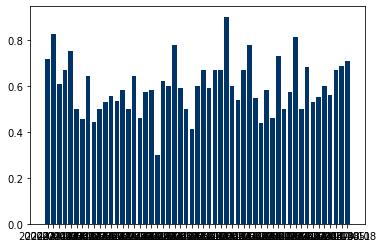

In [106]:
x = z.game_date
y = z.usage
plt.bar(x,y,color = '#003469')

Feels shitty to lose a Wheeler start, especially when this series feels like a big opportunity for the Fightins.

## Game 2: Fried vs Nola

## Game 3: Schwellenbach vs Sanchez

Brutal.

# KCR (A) 823-825
When was the last time the Phillies were in Kansas City? How do the Phillies batters perform there?

In [107]:
kc = pos[pos.home_team == 'KC']
kc.groupby('game_date',as_index=False).agg({'des' : 'count'
                                            ,'inning' : 'nunique'
                                            ,'game_year' : 'max'
                                           })

game_date  des  inning  game_year
0  2019-05-10  143       9       2019
1  2019-05-11  193       9       2019
2  2019-05-12  149       9       2019
3  2024-08-23  144       9       2024
4  2024-08-24  173       9       2024
5  2024-08-25  165       9       2024

In [108]:
kc[kc.game_year != 2024].groupby('player_name'
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                      }).sort_values(by='des',ascending=False)

# Back in May 2019, the Phillies were led by Andrew McCutchen, Bryce Harper, Hoskins, and JT.

player_name  des  game_pk
6  McCutchen, Andrew   69        3
1      Harper, Bryce   66        3
4      Hoskins, Rhys   65        3
7     Realmuto, J.T.   51        3
8       Segura, Jean   50        3
2   Hernández, César   49        3
3    Herrera, Odúbel   49        3
0     Franco, Maikel   39        3
9     Williams, Nick   28        2
5      Knapp, Andrew   19        1

In [109]:
df = pps[pps.home_team == 'KC']
results('player_name')
# The games were started by Zach Eflin, JAke Arrieta, and Cole Irvin?

player_name  pitches  plate_apps  bip  hits  hrs  walks  \
0           Allard, Kolby       81          23   18   8.0  2.0    0.0   
1          Alvarado, José       39           9    6   2.0  0.0    1.0   
2           Alvarez, Jose        4           1    1   0.0  0.0    0.0   
3           Arrieta, Jake       99          24   16   7.0  3.0    3.0   
4           Banks, Tanner       12           3    3   0.0  0.0    0.0   
5   Domínguez, Seranthony       15           4    2   1.0  0.0    0.0   
6             Eflin, Zach      110          31   22   4.0  0.0    0.0   
7         Estévez, Carlos       12           3    3   0.0  0.0    0.0   
8           García, Edgar        9           2    1   0.0  0.0    0.0   
9          Gilbert, Tyler       42           9    7   2.0  0.0    1.0   
10          Hoffman, Jeff       13           3    3   0.0  0.0    0.0   
11            Irvin, Cole       93          27   21   5.0  0.0    1.0   
12       Kerkering, Orion       10           3    2   0.0  0.0    0.0   
13             Lazar, Max       27           7    6   1.0  0.0    0.0   
14          Neris, Hector       21           5    2   0.0  0.0    2.0   
15          Nicasio, Juan       14           4    3   0.0  0.0    1.0   
16         Ramos, Edubray       12           3    3   1.0  0.0    0.0   
17             Ruiz, José       30           9    7   2.0  1.0    1.0   
18           Strahm, Matt       15           3    2   0.0  0.0    0.0   
19         Suárez, Ranger       72          20   12   4.0  0.0    1.0   
20        Walker, Taijuan       78          18   15   8.0  2.0    1.0   

    strikeouts     ba    obp    slg    ops   woba  
0          5.0  0.348  0.348  0.696  1.043  0.443  
1          2.0  0.250  0.333  0.500  0.833  0.357  
2          0.0  0.000  0.000  0.000  0.000  0.000  
3          5.0  0.333  0.417  0.762  1.179  0.474  
4          0.0  0.000  0.000  0.000  0.000  0.000  
5          2.0  0.250  0.250  0.250  0.500  0.218  
6          7.0  0.138  0.194  0.172  0.366  0.170  
7          0.0  0.000  0.000  0.000  0.000  0.000  
8          1.0  0.000  0.000  0.000  0.000  0.000  
9          1.0  0.250  0.333  0.375  0.708  0.315  
10         0.0  0.000  0.000  0.000  0.000  0.000  
11         5.0  0.192  0.222  0.192  0.415  0.187  
12         1.0  0.000  0.000  0.000  0.000  0.000  
13         1.0  0.143  0.143  0.143  0.286  0.126  
14         1.0  0.000  0.400  0.000  0.400  0.276  
15         0.0  0.000  0.250  0.000  0.250  0.172  
16         0.0  0.333  0.333  0.333  0.667  0.290  
17         1.0  0.286  0.333  0.857  1.190  0.446  
18         1.0  0.000  0.000  0.000  0.000  0.000  
19         6.0  0.222  0.250  0.333  0.583  0.249  
20         2.0  0.471  0.500  0.882  1.382  0.583

In [110]:
pokc = pos[(pos.home_team == 'KC')
           &(pos.game_year != 2024)
          ]
ppkc = pps[(pps.home_team == 'KC')
           &(pps.game_year != 2024)
          ]

In [111]:
df = ppkc
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  \
0          Alvarez, Jose        4           1    1   0.0  0.0    0.0   
1          Arrieta, Jake       99          24   16   7.0  3.0    3.0   
2  Domínguez, Seranthony       15           4    2   1.0  0.0    0.0   
3            Eflin, Zach      110          31   22   4.0  0.0    0.0   
4          García, Edgar        9           2    1   0.0  0.0    0.0   
5            Irvin, Cole       93          27   21   5.0  0.0    1.0   
6          Neris, Hector       21           5    2   0.0  0.0    2.0   
7          Nicasio, Juan       14           4    3   0.0  0.0    1.0   
8         Ramos, Edubray       12           3    3   1.0  0.0    0.0   

   strikeouts     ba    obp    slg    ops   woba  
0         0.0  0.000  0.000  0.000  0.000  0.000  
1         5.0  0.333  0.417  0.762  1.179  0.474  
2         2.0  0.250  0.250  0.250  0.500  0.218  
3         7.0  0.138  0.194  0.172  0.366  0.170  
4         1.0  0.000  0.000  0.000  0.000  0.000  
5         5.0  0.192  0.222  0.192  0.415  0.187  
6         1.0  0.000  0.400  0.000  0.400  0.276  
7         0.0  0.000  0.250  0.000  0.250  0.172  
8         0.0  0.333  0.333  0.333  0.667  0.290

## Game 1: Wacha vs Walker
Tai Walker is not good. The Phillies are going through it at the moment.

## Game 2: Singer vs Suarez

In [112]:
pos[(pos.away_team == 'KC')
    &(pos.game_year == 2023)
   ].groupby(['pitcher','game_pk','game_date'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                  }).sort_values(by='des',ascending=False)

pitcher  game_pk   game_date  des  inning
1    543475   717140  2023-08-04   91       6
9    679525   717123  2023-08-05   66       4
0    425844   717113  2023-08-06   59       4
8    672582   717123  2023-08-05   45       3
5    669169   717113  2023-08-06   27       2
4    663704   717113  2023-08-06   24       2
7    672578   717140  2023-08-04   18       1
2    621295   717140  2023-08-04   16       1
3    656353   717123  2023-08-05   11       1
6    669395   717140  2023-08-04   11       1
10   680735   717140  2023-08-04   10       1

In [113]:
lineup = ['Schwarber, Kyle',
 'Turner, Trea',
 'Harper, Bryce',
 'Bohm, Alec',
 'Castellanos, Nick',
 #'Sosa, Edmundo',
 #'Wilson, Weston',
 #'Rojas, Johan',
 'Realmuto, J.T.',
 'Stott, Bryson',
 'Marsh, Brandon'
         ,'Hays, Austin']

In [114]:
singer_id = 663903
df = nphl[nphl.pitcher == singer_id]
bs_res = results('player_name')
bs_res[bs_res.player_name.isin(lineup)]
# The Phillies have not faced Brady Singer much. The few guys who have do not perform well.

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
4     Hays, Austin       10           3  2.0   1.0  0.0    0.0         1.0   
8  Schwarber, Kyle       10           2  0.0   0.0  0.0    0.0         2.0   
9     Turner, Trea       16           3  2.0   0.0  0.0    0.0         1.0   

      ba    obp    slg    ops   woba  
4  0.333  0.333  0.333  0.667  0.294  
8  0.000  0.000  0.000  0.000  0.000  
9  0.000  0.000  0.000  0.000  0.000

## Game 3: Lugo vs Wheeler

# HOU (H) 826-828
## Game 1: 
## Game 2: Verlander vs Nola - W
## Game 3: Arrighetti vs Walker - L

# ATL (H) 829-91


## Game 1: Morton vs Sanchez


## Game 2: Lopez vs Suarez


In [115]:
po24

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
204023         SL  2024-09-01           87.2          -2.40           5.60   
204024         SL  2024-09-01           87.3          -2.40           5.60   
204025         FF  2024-09-01           95.4          -2.28           5.62   
204026         CU  2024-09-01           81.5          -2.37           5.41   
204027         FF  2024-09-01           95.8          -2.50           5.61   
...           ...         ...            ...            ...            ...   
224171         SL  2024-03-29           83.8          -2.59           5.53   
224172         FC  2024-03-29           89.1           3.26           5.17   
224173         CU  2024-03-29           84.0          -2.24           6.40   
224174         FF  2024-03-29           96.2          -1.70           5.94   
224175         FF  2024-03-29           94.2           2.41           5.82   

              player_name  batter  pitcher     events    description  ...  \
204023  Castellanos, Nick  592206   680885     double  hit_into_play  ...   
204024  Castellanos, Nick  592206   680885        NaN  called_strike  ...   
204025  Castellanos, Nick  592206   680885        NaN  called_strike  ...   
204026      Harper, Bryce  547180   680885     double  hit_into_play  ...   
204027      Harper, Bryce  547180   680885        NaN           ball  ...   
...                   ...     ...      ...        ...            ...  ...   
224171      Harper, Bryce  547180   641729        NaN           ball  ...   
224172     Realmuto, J.T.  592663   607481        NaN           ball  ...   
224173  Castellanos, Nick  592206   572955        NaN           foul  ...   
224174    Schwarber, Kyle  656941   675911  field_out  hit_into_play  ...   
224175    Schwarber, Kyle  656941   621345        NaN  called_strike  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
204023  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
204024  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
204025  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
204026  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
204027  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
224171  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224172  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224173  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224174  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  
224175  0.723  0.885  1.261  1.599  2.062   0.2 -0.405  0.117  9.674  3.168  

[20153 rows x 108 columns]

In [116]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          #,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan' # bc Hays still gets the occasional day off as he works his way back.
         ]
#df = [po24.player_name.isin(lineup)]
#res = results('player_name')

In [117]:
# Ranger first time in City Connects?
df = pp24
df['date'] = pd.to_datetime(df.game_date)
df['dow'] = df.date.dt.month
#df['dow'] = df.dt.month

In [118]:
# Performance by Position and Month

In [119]:
c_ids = pp24.fielder_2.unique().tolist()
c = po24[po24.batter.isin(c_ids)]

In [120]:
c['date']=pd.to_datetime(c.game_date)
c['month'] = c.date.dt.month

df = c
results('month')
# And you can see that the Phillies catchers enjoyed a strong May.

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       46          12    6   3.0  1.0    2.0           4  0.300   
1      4      456         120   82  25.0  4.0    6.0          30  0.223   
2      5      461         121   83  32.0  2.0    8.0          30  0.283   
3      6      386         102   68  20.0  3.0    6.0          26  0.215   
4      7      390          96   61  19.0  1.0   10.0          20  0.232   
5      8      425         111   81  29.0  4.0    7.0          21  0.284   
6      9       15           4    3   0.0  0.0    0.0           1  0.000   

     obp    slg    ops   woba  
0  0.417  0.600  1.017  0.435  
1  0.267  0.357  0.624  0.274  
2  0.331  0.398  0.729  0.321  
3  0.275  0.333  0.608  0.270  
4  0.344  0.317  0.661  0.305  
5  0.342  0.510  0.852  0.367  
6  0.000  0.000  0.000  0.000

In [121]:
pp24[pp24.p_throws=='L'].groupby(['pitcher','player_name']
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                       #
                                      })
rs_id = 624133
rs24 = pp24[pp24.pitcher==rs_id]
rs = pps[pps.pitcher==rs_id]

In [122]:
rs24.groupby('game_date',as_index=False
            ).agg({'pitch_number' : 'sum'
                   ,'at_bat_number' : 'nunique'
                   ,'des' : 'count'
                   ,'pitch_type' : 'nunique'
                  }).sort_values(by='game_date',ascending=False)

game_date  pitch_number  at_bat_number  des  pitch_type
21  2024-08-30           251             18   78           5
20  2024-08-24           214             20   72           5
19  2024-07-22           207             24   79           5
18  2024-07-12           253             27   97           5
17  2024-07-06           259             23   91           5
16  2024-06-30           267             26   91           5
15  2024-06-25           217             26   88           5
14  2024-06-19           299             23   94           5
13  2024-06-14           210             27   88           5
12  2024-06-08           216             27   89           5
11  2024-06-01            66              6   23           5
10  2024-05-26           312             25  100           5
9   2024-05-21           319             27  108           6
8   2024-05-15           228             23   83           5
7   2024-05-10           261             25   97           5
6   2024-05-04           253             27   94           5
5   2024-04-27           255             26   96           5
4   2024-04-22           251             23   88           5
3   2024-04-16           300             32  112           5
2   2024-04-11           302             22   97           5
1   2024-04-06           237             23   82           6
0   2024-03-31           271             18   83           5

In [123]:
# How does Ranger attack RHBs?
df = rs_rhb = rs[rs.stand == 'R']
res = results('game_year')
pitch_mix(df)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker   2265      92.345475        1902.406961   
0         CH         Changeup   1750      83.757543        1462.925691   
3         FF  4-Seam Fastball   1731      93.006932        1964.559115   
1         CU        Curveball    997      75.530993        2190.211019   
2         FC           Cutter    720      88.146250        2047.194640   
5         SL           Slider    276      84.132971        2092.783465   

        zone  usage  
4   9.109492   29.3  
0  11.658857   22.6  
3   7.888504   22.4  
1  10.962889   12.9  
2   8.500000    9.3  
5  10.340580    3.6

In [124]:
res

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018      146          47   40    16    3      4           3  0.381   
1       2019      524         137  100    39    5      7          28  0.305   
2       2020       51          16   12     6    1      2           1  0.462   
3       2021     1206         304  208    62    4     22          70  0.225   
4       2022     2252         578  402   131   14     58         115  0.254   
5       2023     1972         506  339   118   13     47         117  0.261   
6       2024     1588         423  289    86    8     26         103  0.219   

     obp    slg    ops   woba  
0  0.426  0.690  1.116  0.462  
1  0.336  0.461  0.797  0.335  
2  0.562  0.846  1.409  0.577  
3  0.289  0.301  0.590  0.264  
4  0.329  0.407  0.736  0.324  
5  0.330  0.400  0.730  0.319  
6  0.272  0.331  0.603  0.268

In [125]:
po24['date'] = pd.to_datetime(po24['game_date'])
po24['dow'] = po24.date.dt.dayofweek

In [126]:
df=po24

In [127]:
df.groupby('dow',as_index=False).agg({'des' :'count', 'game_date':'max'})

dow   des   game_date
0    0  2210  2024-08-26
1    1  3047  2024-08-27
2    2  3109  2024-08-28
3    3  1681  2024-08-29
4    4  3267  2024-08-30
5    5  3397  2024-08-31
6    6  3442  2024-09-01

In [128]:
df = po24[(po24.dow == 4)&(po24.home_team == 'PHI')]
results('player_name').sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
14     Stevenson, Cal        2           1    1   1.0  0.0    0.0         0.0   
16    Stubbs, Garrett       15           3    2   1.0  0.0    1.0         0.0   
7      Marsh, Brandon      154          33   17   8.0  1.0    4.0        12.0   
4       Harper, Bryce      199          44   28  10.0  0.0    9.0         7.0   
13      Sosa, Edmundo       78          20   16   6.0  1.0    0.0         4.0   
17       Turner, Trea      180          41   31  13.0  1.0    0.0         9.0   
0          Bohm, Alec      161          44   36  11.0  2.0    2.0         6.0   
15      Stott, Bryson      156          37   31   9.0  2.0    1.0         4.0   
8    Merrifield, Whit       41          12   11   2.0  1.0    0.0         1.0   
3         Dahl, David        9           2    1   0.0  0.0    1.0         0.0   
1   Castellanos, Nick      168          45   30   6.0  1.0    2.0        12.0   
11       Rojas, Johan       91          24   16   4.0  0.0    1.0         7.0   
18     Wilson, Weston       40          11    5   1.0  0.0    2.0         3.0   
10     Realmuto, J.T.      151          36   23   3.0  1.0    4.0         9.0   
9     Pache, Cristian       34           8    6   1.0  0.0    0.0         2.0   
12    Schwarber, Kyle      216          45   24   4.0  0.0    7.0        14.0   
6     Marchán, Rafael       31           8    6   0.0  0.0    2.0         0.0   
5        Hays, Austin        2           1    1   0.0  0.0    0.0         0.0   
2       Clemens, Kody       11           3    1   0.0  0.0    0.0         2.0   

       ba    obp    slg    ops   woba  
14  1.000  1.000  1.000  2.000  0.885  
16  0.500  0.667  0.500  1.167  0.525  
7   0.276  0.364  0.517  0.881  0.380  
4   0.286  0.432  0.429  0.860  0.385  
13  0.300  0.300  0.500  0.800  0.343  
17  0.317  0.317  0.463  0.780  0.337  
0   0.262  0.295  0.452  0.748  0.323  
15  0.265  0.297  0.441  0.738  0.317  
8   0.167  0.167  0.417  0.583  0.246  
3   0.000  0.500  0.000  0.500  0.346  
1   0.143  0.200  0.238  0.438  0.199  
11  0.174  0.208  0.217  0.426  0.192  
18  0.111  0.273  0.111  0.384  0.206  
10  0.094  0.194  0.188  0.382  0.183  
9   0.125  0.125  0.250  0.375  0.158  
12  0.105  0.244  0.105  0.350  0.186  
6   0.000  0.250  0.000  0.250  0.173  
5   0.000  0.000  0.000  0.000  0.000  
2   0.000  0.000  0.000  0.000  0.000

In [129]:
# how is Austin Hays's defense?

## Game 3: Fried vs Wheeler

In [133]:
pos[pos.des.str.contains('Fried')][['pitcher','home_team','away_team','game_date','des']]
fried_id = 608331
pos[pos.pitcher == fried_id].groupby(['game_pk'
                                      ,'game_date'
                                     ],as_index=False
                                    ).agg({'des' : 'count'
                                             ,'at_bat_number' : 'nunique'
                                             ,'pitch_type' : 'nunique'
                                             ,'release_speed' : 'mean'
                                           ,'inning' : 'nunique'
                                            }).round(2).sort_values(by='game_date',ascending=False)

game_pk   game_date  des  at_bat_number  pitch_type  release_speed  inning
20   745532  2024-08-31  103             28           6          88.97       7
22   747084  2024-08-21   91             24           6          89.01       7
23   747097  2024-07-05  103             31           6          86.95       6
21   745599  2024-03-30   43              7           6          88.57       1
24   748563  2023-10-09   95             22           6          84.92       4
19   716618  2023-09-12   87             20           6          87.17       5
18   715743  2022-10-11   61             20           5          86.54       4
17   661609  2022-09-22  107             21           5          87.85       5
14   661473  2022-09-16  110             24           5          87.04       6
16   661555  2022-07-25  103             27           5          86.62       6
15   661543  2022-05-24   99             25           5          88.10       6
11   632306  2021-09-29   98             25           5          87.32       7
12   633214  2021-07-23  100             25           4          86.72       5
13   634622  2021-04-01   94             24           5          87.57       5
9    630324  2020-08-21   91             21           5          88.53       5
10   631131  2020-08-09   91             21           5          86.50       5
7    567132  2019-09-10   79             22           5          87.94       5
6    567111  2019-07-27   89             25           5          86.45       6
8    567202  2019-06-14   98             23           4          87.15       5
5    567061  2019-03-31   25              4           4          88.79       1
4    567059  2019-03-28   11              3           4          87.41       1
3    531824  2018-09-30   14              3           3          87.63       1
2    531738  2018-09-23   35              8           3          85.75       2
1    529786  2018-04-27   47             12           4          86.05       3
0    491786  2017-08-08   26              8           4          85.80       2

## Game 4: Schwellenbach vs Nola

Phillies win on a walk off. Nice work taking 3 of 4, fellas.

# July 2024

Amy is crazy.

## Run Functions

In [1]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 317336
Length of phils_sc dataframe: 437929


# CHC (A) 72-74
## Game 1: Wesneski vs Mercado 
## Game 2: Imanaga vs Wheeler
## Game 3: Taillon vs Sanchez

# 75-77 ATL (A)
## Game 1: Fried vs Nola
## Game 2: Schwellenbach vs Suarez
## Game 3: Lopez vs Mercado

# Jeff Francoeur Pitching

In [3]:
pps[pps.game_year==2015].groupby(['player_name'
                                  ,'pitcher'
                                 ],as_index=False
                                ).agg({'des' : 'count'
                                       #,'game_pk
                                       #,'
                                      })
df = frenchy = francouer = francouer_pps = pps[pps.pitcher == 425796]
#df = pp2015 = phils_2015 = pps[pps.game_year == 2015]

In [4]:
results('inning')
df.groupby('inning',as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                }
               )

inning  des  release_speed
0       7   16       86.03125
1       8   32       83.86250

In [5]:
df.game_date.unique()

array(['2015-06-16'], dtype=object)

## Pitch Type Breakdown

In [6]:
df.groupby('pitch_type'
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 ,'plate_x' : 'mean'
                 ,'plate_z' : 'mean'
                 ,'pfx_x' : 'mean'
                 ,'pfx_z' : 'mean'
                }).round(1)
                 

pitch_type  des  release_speed  release_spin_rate  plate_x  plate_z  pfx_x  \
0         CH   21           86.2             1883.3     -1.0      2.7   -0.7   
1         CU    5           75.3             1455.0     -0.4      1.4    0.3   
2         FF    1           89.2             1848.0     -1.0      2.5   -1.0   
3         SL   20           84.8             1942.9     -0.3      2.6   -0.1   

   pfx_z  
0    0.9  
1    0.5  
2    1.1  
3    1.1

In [7]:
pitch_mix(df)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         CH         Changeup     21      86.238095             1883.3   
3         SL           Slider     20      84.765000             1942.9   
1         CU        Curveball      5      75.320000             1455.0   
2         FF  4-Seam Fastball      1      89.200000             1848.0   

        zone  usage  
0  10.952381   43.8  
3   8.400000   41.7  
1  10.400000   10.4  
2  13.000000    2.1

In [8]:
df.pitcher.unique()[0]

425796

In [9]:
df = pos[pos.batter == 425796]
df[df.away_team == 'BAL'].groupby('hit_location',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'events' : 'max'
                                                                      ,'pitcher' : 'max'
                                                                     })

hit_location  des  game_pk                     events  pitcher
0           3.0    1        1                  field_out   542960
1           4.0    1        1  grounded_into_double_play   502154

In [10]:
df = pos[pos.pitcher == 502154]
pitch_mix(df)
df[df.pitch_type == 'SI'
  ].groupby(['pitch_type'
            ]
            ,as_index=False
           ).agg({'release_speed' : ['mean','min','max','std']
                  ,'release_spin_rate' : ['mean','min','max','std']
                 }).round(0)

pitch_type release_speed                  release_spin_rate                  \
                      mean   min   max  std              mean     min     max   
0         SI          94.0  91.0  98.0  2.0            2003.0  1714.0  2241.0   

          
     std  
0  107.0

In [11]:
# try to make a little histogram of Zack Britton's Sinker's Release Speed
## Filter the Dataset to the Desired Filtering (where clause)
si = df[df.pitch_type == 'SI'] # Ok so the first thing I need to do is Create a dataframe of Zack Britton's Sinker.

## Create My Grouper Object
group = ['pitch_type','stand']
sinkers = si.groupby(group # Create My Grouper Object
                   ,as_index=False
                  ).agg({'release_speed' : ['min','max','mean','std']
                         ,'release_spin_rate' : ['min','max','mean','std']
                        })

sinkers.round(1)
# now try to do it again for Release Spin Rate


pitch_type stand release_speed                  release_spin_rate          \
                             min   max  mean  std               min     max   
0         SI     L          90.7  97.5  93.5  2.1            1714.0  2241.0   
1         SI     R          90.7  97.7  94.1  1.7            1767.0  2145.0   

                  
     mean    std  
0  2002.2  134.8  
1  2002.7   97.5

In [12]:
## Need to ID Jeff Francoeur's ID
pn = pps.groupby(['player_name','pitcher'],as_index=False
           ).agg({'game_pk' : 'nunique'})
pn[pn.game_pk==1]
frenchy_id = 425796
# The Specific Sinker Zack Britton threw to Jeff Francoeur
df = zb2frenchy = si[si.batter == frenchy_id]
single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate

# Create a plot of a single observation against a Standard Performer

In [13]:
def single_obs_vs_standard(df):
    single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate # Using Example Data
    x = single_observation[0]
    y = single_observation[1]
    #colors = ['gray','#003469']
    plt.plot(x,y)

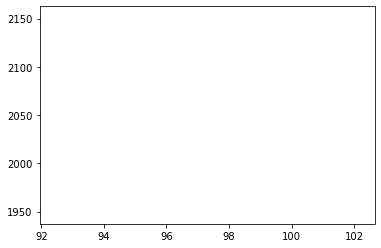

In [14]:
single_obs_vs_standard(si[si.batter == 425796])

In [15]:
# Well, I kinda did it.

(array([ 9., 13., 14.,  9., 11., 17., 20.,  5.,  7.,  6.]),
 array([90.7, 91.4, 92.1, 92.8, 93.5, 94.2, 94.9, 95.6, 96.3, 97. , 97.7]),
 <BarContainer object of 10 artists>)

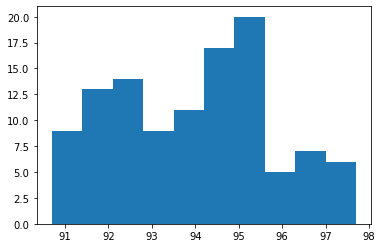

In [16]:
si.release_speed.tolist()
plt.hist(si.release_speed)

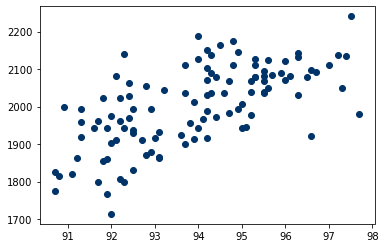

In [17]:
plt.scatter(x = si.release_speed
            ,y = si.release_spin_rate
            ,color = '#003469'
           )

(array([ 9., 13., 14.,  9., 11., 17., 20.,  5.,  7.,  6.]),
 array([90.7, 91.4, 92.1, 92.8, 93.5, 94.2, 94.9, 95.6, 96.3, 97. , 97.7]),
 <BarContainer object of 10 artists>)

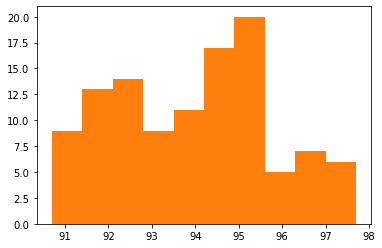

In [18]:
# string = "Zack Britton's Sinker"
# graph(x = si.release_speed.fillna(si.release_speed.mean)
#             ,y = si.release_spin_rate.fillna(si.release_spin_rate.mean)
#             ,colors = '#003469'
#       ,title = '{}'.format(string)
#       ,xlabel = 'Velo (mph)'
#       ,ylabel = 'Spin (rpm)'
#            )

# graph(
#     x = si.release_speed
#     ,y = si.release_spin_rate
#     ,title = "Zack Britton's Sinkers"
#     ,xlabel = 'Velo (mph)'
#     ,ylabel = 'Spin (rpm)'
#     ,colors = '#003469'
# )
#summarize(si.release_speed)

x = si.release_speed.fillna(si.release_speed.mean)
plt.hist(x)
plt.hist(si.release_speed)
# plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
# plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y

# So I am Returning to my Matplotlib Tutorial Exercises

In [19]:
# fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# # Build a plot for the first cell in location (0,0) of the grid of subplots I just created
# axs[0,0].plot(x, np.sin(x))
# axs[0,0].set_title('Sine Wave')

# # Build a plot for the location 0,1 in the grid of subplots
# axs[0,1].plot(x, np.cos(x))
# axs[0,1].set_title('Cosine Wave')

# # Build a plot for the location 1,0 in the grid of subplots
# axs[1,0].plot(x, np.random.random(100))
# axs[1,0].set_title('Random Function')

# # Build a plot for the location of 1,1 in the grid of subplots
# axs[1,1].plot(x, np.log(x))
# axs[1,1].set_title('Log Function')
# axs[1,1].set_xlabel('TEST')

# fig.suptitle('Four Plots') # Title of my grid of subplots
# plt.tight_layout() 
# plt.show()

# # This looks awful
# plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# # arguments for that savefig function may be useful for final delivery of shit

# Alec Bohm vs Power Sinkers
Let's define a power sinker as 95+ SI

In [20]:
pos.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'
                                                          ,'game_pk' : 'nunique'
                                                         }).sort_values(by='game_pk',ascending=False).head(25)
bohm_id = 664761
bohm_pos = pos[pos.batter == bohm_id]
df = bohm_pos[(bohm_pos.pitch_type == 'SI')
              &(bohm_pos.release_speed >= 95)
             ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020       20           5    5     1  0.0    0.0         0.0  0.200   
1       2021       75          26   16     6  0.0    3.0         7.0  0.261   
2       2022      130          46   33    10  1.0    1.0        12.0  0.222   
3       2023      158          40   31    11  0.0    1.0         7.0  0.289   
4       2024       70          21   19     7  1.0    1.0         1.0  0.350   

     obp    slg    ops   woba  
0  0.200  0.200  0.400  0.177  
1  0.346  0.261  0.607  0.283  
2  0.239  0.356  0.595  0.257  
3  0.325  0.316  0.641  0.287  
4  0.381  0.550  0.931  0.402

In [21]:
df = bohm_pos[bohm_pos.game_year == 2024]
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
5          FF      472       131.0  91.0  39.0  4.0   12.0        26.0  0.331   
11         SI      333       104.0  83.0  23.0  2.0    8.0        11.0  0.250   
12         SL      274        77.0  61.0  25.0  2.0    4.0        11.0  0.352   
4          FC      127        36.0  27.0   6.0  2.0    5.0         4.0  0.207   
0          CH      124        31.0  28.0   7.0  0.0    1.0         2.0  0.233   
13         ST      120        37.0  28.0  12.0  0.0    1.0         8.0  0.343   
1          CU       68        16.0  16.0   4.0  1.0    0.0         0.0  0.250   
7          FS       19         5.0   3.0   1.0  0.0    1.0         1.0  0.250   
8          KC        8         2.0   0.0   0.0  0.0    1.0         1.0  0.000   
9          KN        5         1.0   0.0   0.0  0.0    0.0         0.0    NaN   
2          EP        2         1.0   1.0   0.0  0.0    0.0         0.0  0.000   
6          FO        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
3          FA        1         1.0   1.0   0.0  0.0    0.0         0.0  0.000   
10         PO        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
5   0.397  0.525  0.922  0.400  
11  0.317  0.402  0.719  0.314  
12  0.390  0.563  0.953  0.407  
4   0.306  0.414  0.719  0.309  
0   0.258  0.267  0.525  0.234  
13  0.351  0.514  0.866  0.367  
1   0.250  0.562  0.812  0.342  
7   0.400  0.500  0.900  0.390  
8   0.500  0.000  0.500  0.346  
9   1.000    NaN    NaN  0.723  
2   0.000  0.000  0.000  0.000  
6     NaN    NaN    NaN    NaN  
3   0.000  0.000  0.000  0.000  
10    NaN    NaN    NaN    NaN

In [22]:
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      454         129  108    31    4      9          12  0.258   
1        R     1102         313  231    86    7     24          52  0.309   

     obp    slg    ops   woba  
0  0.310  0.433  0.743  0.324  
1  0.367  0.489  0.857  0.369

In [23]:
df = bohm_pos[(bohm_pos.p_throws == 'L')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
10         ST       15         4.0   4.0   2.0  0.0    0.0         0.0  0.500   
3          FF      138        39.0  32.0  14.0  3.0    3.0         4.0  0.389   
1          CU       25         6.0   6.0   2.0  0.0    0.0         0.0  0.333   
9          SL       35        11.0   8.0   2.0  0.0    2.0         1.0  0.222   
2          FC       35        11.0   8.0   1.0  1.0    1.0         2.0  0.100   
8          SI       93        31.0  26.0   5.0  0.0    3.0         2.0  0.179   
0          CH      102        26.0  24.0   5.0  0.0    0.0         2.0  0.192   
6          KC        4         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
4          FO        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
5          FS        4         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
7          PO        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
10  0.500  0.750  1.250  0.536  
3   0.436  0.722  1.158  0.490  
1   0.333  0.667  1.000  0.420  
9   0.364  0.333  0.697  0.321  
2   0.182  0.400  0.582  0.250  
8   0.258  0.214  0.472  0.222  
0   0.192  0.231  0.423  0.185  
6   0.000  0.000  0.000  0.000  
4     NaN    NaN    NaN    NaN  
5     NaN    NaN    NaN    NaN  
7     NaN    NaN    NaN    NaN

In [24]:
df = bohm_pos[(bohm_pos.p_throws == 'R')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0          CH       22           5   4.0   2.0  0.0    1.0         0.0  0.500   
10         SL      239          66  53.0  23.0  2.0    2.0        10.0  0.371   
6          FS       15           5   3.0   1.0  0.0    1.0         1.0  0.250   
9          SI      240          73  57.0  18.0  2.0    5.0         9.0  0.281   
5          FF      334          92  59.0  25.0  1.0    9.0        22.0  0.305   
11         ST      105          33  24.0  10.0  0.0    1.0         8.0  0.323   
4          FC       92          25  19.0   5.0  1.0    4.0         2.0  0.263   
1          CU       43          10  10.0   2.0  1.0    0.0         0.0  0.200   
2          EP        2           1   1.0   0.0  0.0    0.0         0.0  0.000   
3          FA        1           1   1.0   0.0  0.0    0.0         0.0  0.000   
7          KC        4           1   0.0   0.0  0.0    1.0         0.0    NaN   
8          KN        5           1   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
0   0.600  0.500  1.100  0.492  
10  0.394  0.597  0.991  0.422  
6   0.400  0.500  0.900  0.390  
9   0.342  0.484  0.827  0.353  
5   0.380  0.439  0.819  0.361  
11  0.333  0.484  0.817  0.346  
4   0.360  0.421  0.781  0.335  
1   0.200  0.500  0.700  0.295  
2   0.000  0.000  0.000  0.000  
3   0.000  0.000  0.000  0.000  
7   1.000    NaN    NaN  0.691  
8   1.000    NaN    NaN  0.723

# Should Marchan go down?
He will because it makes sense rosterwise I think. Phillies pitchers have better number pitching to Stubbs but the expected numbers point to a much more similar performance between Stubbs and Marchan. In fact, I think there are indicators that Marchan has been better.

In [25]:
catchers = pps[pps.game_year==2024].fielder_2.unique().tolist()
# Rob Thomson likes to ride the hot hand tho, so he will put Phillips right back out there
catchers
po2 = pos[pos.batter.isin(catchers)]
df = po2[po2.game_year == 2024]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Marchán, Rafael      195          56   44    15    3      3           8   
1   Realmuto, J.T.      958         248  165    57    7     15          64   
2  Stubbs, Garrett      547         138   85    24    1     14          36   

      ba    obp    slg    ops   woba  
0  0.294  0.339  0.549  0.888  0.377  
1  0.249  0.302  0.384  0.687  0.302  
2  0.197  0.290  0.238  0.528  0.248

In [26]:
df.groupby([
            'player_name'
    ,'batter'
           ]
           ,as_index=False
).agg({'launch_speed' : 'mean'
       ,'estimated_ba_using_speedangle' : 'mean'
       ,'hit_distance_sc' : 'mean'
      }).round(3)

player_name  batter  launch_speed  estimated_ba_using_speedangle  \
0  Marchán, Rafael  665561        80.492                          0.396   
1   Realmuto, J.T.  592663        83.324                          0.346   
2  Stubbs, Garrett  596117        74.350                          0.286   

   hit_distance_sc  
0          152.806  
1          151.276  
2          136.225

In [27]:
df = pps[pps.game_year==2024]
pps_by_catcher = results('fielder_2')
pps_by_catcher

fielder_2  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0     592663     8086        2071  1379   420   46    151         520  0.222   
1     596117     5045        1297   888   279   41     90         304  0.236   
2     665561     2104         548   376   127   16     37         122  0.256   

     obp    slg    ops   woba  
0  0.284  0.344  0.628  0.279  
1  0.295  0.397  0.692  0.302  
2  0.321  0.414  0.736  0.323

In [28]:
x = pps_by_catcher
x['share_pa'] = x.plate_apps/x.plate_apps.sum()
x['share_bip'] = x.bip/x.bip.sum()
x['hits_per_bip'] = x.hits/x.bip
x['share_hrs'] = x.hrs/x.hrs.sum()
x['share_bb'] = x.walks/x.walks.sum()
x['share_ks'] = x.strikeouts/x.strikeouts.sum()
shares = x[['fielder_2'
   ,'share_pa'
   ,'share_bip'
   ,'share_hrs'
   ,'share_bb'
   ,'share_ks'
  ]
 ].round(3)

In [29]:
catcher_ids = po2.groupby('player_name',as_index=False).agg({'batter' : 'max'})

Marchan is definitely hitting the ball better but the Phillies pitchers are throwing the ball better to Garrett Stubbs than they are to Rafael Marchan. There is going to be noise in those data, but I think there is truth to that narrative that guys feel more comfortable throwing to Stubbs.

Stubbs is not necessarily covering himself in glory behind the plate. When we look at the share of plate appearances he has caught relative to the share of home runs, walks, and strikeouts he has been behind the plate for.

In [30]:
shares.merge(catcher_ids,left_on='fielder_2',right_on='batter',suffixes = ('','_2'))[['player_name'
                                                                             ,'share_pa'
                                                                             ,'share_hrs'
                                                                             ,'share_bb'
                                                                             ,'share_ks']
                                                                            ]

player_name  share_pa  share_hrs  share_bb  share_ks
0   Realmuto, J.T.     0.529      0.447     0.543     0.550
1  Stubbs, Garrett     0.331      0.398     0.324     0.321
2  Marchán, Rafael     0.140      0.155     0.133     0.129

Some things to look at - who has pitched to Rafael Marchan? what opponents has he caught against? Do pitchers typically pitch worse to Marchan than they do to everyone else?

## How do guys typically throw to Marchan compared to the other catchers in their career.

In [31]:
marchan_id = 665561
# quick check -- passed
# pos[pos.batter==marchan_id].player_name.unique() 
marchy = pps[pps.fielder_2 == marchan_id]
marchy.groupby('player_name'
               ,as_index=False
              ).agg({'des' : 'count'
                     ,'game_pk' : 'nunique'
                    }).sort_values(by='des',ascending=False)
df = marchy
res_marchy = results('player_name').sort_values(by='pitches',ascending=False)

In [32]:
non_marchy = pd.concat([pps[(pps.player_name.isin(df.player_name))&(pps.fielder_2 != marchan_id)]
                        ,nphl[nphl.player_name.isin(df.player_name)]
                       ])
df = non_marchy
res_non_marchy = results('player_name')

In [33]:
x = res_marchy
y = res_non_marchy

len(x),len(y)

(39, 39)

In [34]:
z = x.merge(y,on='player_name',suffixes = ('_x','_y'))
z['diff_ops'] = z.ops_x - z.ops_y
z['diff_ba'] = z.ba_x - z.ba_y
z[z.pitches_x>=50][['player_name','pitches_x','diff_ops','diff_ba']].sort_values(by='diff_ops')

player_name  pitches_x  diff_ops  diff_ba
8         Howard, Spencer        134    -0.347   -0.167
29           Rosso, Ramón         50    -0.316   -0.061
17         Medina, Adonis         84    -0.258   -0.110
10          Soto, Gregory        132    -0.254   -0.126
11          Neris, Hector        124    -0.252   -0.093
24             Hammer, JD         59    -0.237   -0.029
23          Hoffman, Jeff         67    -0.167   -0.086
7   Domínguez, Seranthony        145    -0.112   -0.016
5            Gibson, Kyle        175    -0.075   -0.013
1           Wheeler, Zack        485    -0.058   -0.031
14             Ruiz, José        103    -0.011    0.025
3          Alvarado, José        215     0.018   -0.015
0          Suárez, Ranger        850     0.027    0.023
13       Kerkering, Orion        114     0.035    0.039
6             Moore, Matt        155     0.082    0.012
15   De Los Santos, Enyel         96     0.084    0.038
12            Hale, David        118     0.117    0.060
9         Brogdon, Connor        132     0.121    0.043
22      Kintzler, Brandon         70     0.143    0.126
21        Bradley, Archie         76     0.146    0.154
2             Nola, Aaron        278     0.178    0.049
20       Velasquez, Vince         76     0.189    0.133
4     Sánchez, Cristopher        176     0.215    0.119
19           Coonrod, Sam         77     0.236    0.031
16      Turnbull, Spencer         87     0.282    0.007
26           Strahm, Matt         55     0.558    0.131
27         Hembree, Heath         55     0.576    0.256
28           Kennedy, Ian         50     0.654    0.214
18        Walker, Taijuan         77     0.730    0.090
25        Anderson, Chase         56     1.433    0.417

### Cris Sanchez pitches well to Stubbs

In [35]:
df = pps[pps.player_name=='Sánchez, Cristopher']
results('fielder_2')

fielder_2  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0     592663     2600         694  492   165  16.0     48         149  0.258   
1     595284       38          10    7     2   0.0      1           2  0.222   
2     596117     1307         365  267    76   9.0     17          77  0.223   
3     665561      176          49   37    16   0.0      4           8  0.364   

     obp    slg    ops   woba  
0  0.311  0.388  0.699  0.306  
1  0.300  0.222  0.522  0.245  
2  0.266  0.355  0.621  0.271  
3  0.408  0.477  0.885  0.382

# LAD (H) 79-711
Big Series. Welcome back Schwarber and Harper. Let's take 2 of 3.

## Game 1: Miller vs Wheeler

In [36]:
# Bryce Harper was unreal in June. .714 SLG!

In [37]:
po24 = pos[pos.game_year==2024]
po24.groupby('player_name',as_index=False).agg({'des':'count','batter':'max'})
harper_id=547180
df = bryce = po24[po24.batter==harper_id]
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df.date.dt.month
results('month')

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       33           8    3   0.0  0.0      2           3  0.000   
1      4      433         108   71  23.0  6.0     13          24  0.245   
2      5      428         110   70  30.0  7.0     13          27  0.312   
3      6      388         102   73  34.0  7.0     11          18  0.374   
4      7      259          64   46  10.0  4.0      7          11  0.175   

     obp    slg    ops   woba  
0  0.250  0.000  0.250  0.173  
1  0.333  0.489  0.823  0.354  
2  0.391  0.583  0.974  0.415  
3  0.441  0.714  1.155  0.487  
4  0.266  0.421  0.687  0.299

## How do the Phils match up against a guy like Bobby Miller?

In [38]:
bm = bobby = pd.read_csv('bobby_miller.csv')
pitch_mix(bm)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    797      98.695107        2335.967378   
1         CU        Curveball    439      80.442597        2782.381279   
3         SI           Sinker    424      98.564623        2296.242925   
0         CH         Changeup    407      87.705651        2284.766585   
4         SL           Slider    385      89.785974        2490.885117   
5         ST          Sweeper     14      85.285714        2695.071429   

        zone  usage  
2   8.184442   32.3  
1  10.027335   17.8  
3   7.929245   17.2  
0  10.393120   16.5  
4  10.405195   15.6  
5  12.142857    0.6

In [39]:
pitch_mix_by_group(bm,'game_year')

game_year  count  release_speed  release_spin_rate   zone  usage
0       2023   2013         92.234           2441.304  9.172   81.6
1       2024    453         91.738           2359.106  9.338   18.4

In [40]:
# Casty is getting a healthy diet of sliders

In [41]:
bm23 = bm[bm.game_year==2023]
pitch_mix(bm23)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    596      99.050168        2340.661074   
3         SI           Sinker    377      98.752255        2296.673740   
1         CU        Curveball    372      80.626075        2809.528302   
4         SL           Slider    333      89.822222        2510.504532   
0         CH         Changeup    321      88.177882        2290.024922   
5         ST          Sweeper     14      85.285714        2695.071429   

        zone  usage  
2   8.162752   29.6  
3   7.755968   18.7  
1  10.099462   18.5  
4  10.324324   16.5  
0  10.308411   15.9  
5  12.142857    0.7

In [42]:
bm24 = bm[bm.game_year==2024]
pitch_mix(bm24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    201      97.642289        2322.049751   
0         CH         Changeup     86      85.943023        2265.139535   
1         CU        Curveball     67      79.423881        2632.059701   
4         SL           Slider     52      89.553846        2366.000000   
3         SI           Sinker     47      97.059574        2292.787234   

        zone  usage  
2   8.248756   44.4  
0  10.709302   19.0  
1   9.626866   14.8  
4  10.923077   11.5  
3   9.319149   10.4

In [43]:
# Rafael Marchan!!!

In [44]:
def risp(df):
    ks = df[((df.on_2b.isna==True) & (df.on_3b.isna==False))
            |((df.on_2b.isna==False) & (df.on_3b.isna==True))
            |((df.on_2b.isna==False) & (df.on_3b.isna==False))
           ]
    return ks

In [45]:
# this RISP function does not work ^^^^^^^^

In [46]:
# John Kruk is certain that Bryson Stott has seen more breaking balls this year than ever in his career

In [47]:
df = stott=pos[pos.player_name=='Stott, Bryson']
pm22 = pitch_mix(df[df.game_year==2022])
pm23 = pitch_mix(df[df.game_year==2023])
pm24 = pitch_mix(df[df.game_year==2024])
pm22

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
5          FF  4-Seam Fastball    879      94.216837        2281.964733   
8          SI           Sinker    335      93.240896        2135.704478   
9          SL           Slider    240      84.038750        2431.495833   
0          CH         Changeup    225      87.039111        1731.524444   
1          CU        Curveball    165      78.401212        2616.921212   
4          FC           Cutter    163      89.100613        2352.938650   
6          FS     Split-Finger     39      85.674359        1230.051282   
7          KC    Knuckle Curve     30      81.833333        2551.666667   
10         ST          Sweeper     26      81.019231        2691.076923   
11         SV           Slurve      6      82.300000        2385.666667   
2          EP           Eephus      2      51.200000        1053.500000   
3          FA            Other      2      76.400000        1711.500000   

         zone  usage  
5    7.646189   41.6  
8    8.516418   15.9  
9    9.125000   11.4  
0   10.404444   10.7  
1    9.581818    7.8  
4    8.220859    7.7  
6    9.743590    1.8  
7    9.133333    1.4  
10   8.307692    1.2  
11   7.333333    0.3  
2   11.000000    0.1  
3    5.000000    0.1

In [48]:
bb = breaking_balls = ['SL','CU','KC','ST','SV','CS']
dfbb = pd.DataFrame()
count = 0
for pm in [pm22,pm23,pm24]:
    dfbb = pd.concat([dfbb,pm[pm.pitch_type.isin(bb)]])
    count+=1
    print(count)

1
2
3


In [49]:
dfbb

pitch_type     pitch_name  count  release_speed  release_spin_rate  \
9          SL         Slider    240      84.038750        2431.495833   
1          CU      Curveball    165      78.401212        2616.921212   
7          KC  Knuckle Curve     30      81.833333        2551.666667   
10         ST        Sweeper     26      81.019231        2691.076923   
11         SV         Slurve      6      82.300000        2385.666667   
12         SL         Slider    296      84.448311        2381.651877   
2          CU      Curveball    234      80.107265        2579.286325   
13         ST        Sweeper     66      81.153030        2568.075758   
9          KC  Knuckle Curve     49      82.255102        2620.653061   
14         SV         Slurve      6      81.900000        2721.333333   
1          CS     Slow Curve      1      68.000000        2123.000000   
10         SL         Slider    190      84.971579        2428.042105   
1          CU      Curveball    121      79.390909        2571.516667   
11         ST        Sweeper     79      81.025316        2524.891892   
7          KC  Knuckle Curve     17      81.658824        2260.823529   
12         SV         Slurve      5      82.120000        2189.600000   

         zone  usage  
9    9.125000   11.4  
1    9.581818    7.8  
7    9.133333    1.4  
10   8.307692    1.2  
11   7.333333    0.3  
12   9.628378   10.3  
2   10.051282    8.1  
13  10.575758    2.3  
9   10.489796    1.7  
14  10.166667    0.2  
1    7.000000    0.0  
10   8.868421   12.4  
1    9.933884    7.9  
11   9.050633    5.2  
7    9.705882    1.1  
12   7.800000    0.3

## Game 2: Stone vs Sanchez
Cristopher SAnchez is the man, man. Vargas has to be benched in this game.

In [50]:
whit = pd.concat([nphl[nphl.player_name=='Merrifield, Whit'], pos[pos.player_name=='Merrifield, Whit']])
#whit[

In [51]:
# Cris Sanchez's fucking average launch angle is 0.6 degrees!??!?!??!?!?!
pp24 = pps[pps.game_year==2024]
pp24[pp24.p_throws=='L'].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name  pitcher   des
4       Suárez, Ranger   624133  1780
5  Sánchez, Cristopher   650911  1750
1       Alvarado, José   621237   716
2        Soto, Gregory   642397   649
3         Strahm, Matt   621381   610
0        Allard, Kolby   663465    63

In [52]:
cris = 650911
cris = pp24[pp24.pitcher==650911]
cris.launch_angle.mean()
cris.groupby('stand',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                          ,'launch_speed' : 'mean'
                                          ,'launch_angle' : 'mean'
                                          ,'type' : 'nunique'
                                         })

stand  estimated_ba_using_speedangle  launch_speed  launch_angle  type
0     L                       0.284127     78.860345    -10.136752     3
1     R                       0.343543     83.798428      6.982353     3

In [53]:
abs(cris.launch_angle).mean()

26.464114832535884

<AxesSubplot:>

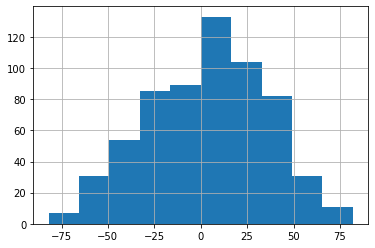

In [54]:
cris.launch_angle.hist()

In [55]:
stott.groupby('game_year',as_index=False).agg({'launch_speed' : ['mean','std']
                                              ,'launch_angle' : ['mean','std']
                                              }).round(1)

game_year launch_speed       launch_angle      
                    mean   std         mean   std
0      2022         81.3  13.8         21.2  31.5
1      2023         82.4  12.9         18.6  29.6
2      2024         80.8  14.3         20.3  31.3

In [56]:
stott['month'] = pd.to_datetime(stott.game_date).dt.month

In [57]:
mus = stott.groupby(['game_year','month'],as_index=False).agg({'launch_speed' : ['mean','std']
                                                         ,'launch_angle' : ['mean','std']
                                                         ,'estimated_ba_using_speedangle' : ['mean','std']
                                                         ,'release_speed' : ['mean','std']
                                                         ,'release_spin_rate' : ['mean','std']
                                                        })
mus

game_year month launch_speed            launch_angle             \
                           mean        std         mean        std   
0       2022     4    79.475000  16.825968    16.525000  31.849798   
1       2022     5    76.631429  13.865739    24.628571  31.376245   
2       2022     6    83.664220  12.741987    23.761468  28.464045   
3       2022     7    83.595333  12.945224    19.847682  34.026411   
4       2022     8    81.690071  13.817480    20.539007  30.078117   
5       2022     9    79.441803  14.352446    20.520325  31.205650   
6       2022    10    81.250526  13.869397    18.347368  33.715571   
7       2022    11    77.646667   7.456528    41.466667  22.570102   
8       2023     3    82.820000   8.525081    11.800000  37.412565   
9       2023     4    81.240278  13.029905    19.393519  31.132093   
10      2023     5    82.469136  13.050105    20.895062  28.101548   
11      2023     6    82.089928  11.656523    17.482014  29.854321   
12      2023     7    84.292241  12.049248    13.853448  30.102796   
13      2023     8    84.605590  13.672382    19.515528  27.794358   
14      2023     9    80.297386  13.585722    18.686275  30.496219   
15      2023    10    82.560870  11.925334    19.840580  28.053323   
16      2024     3    84.353846   9.272236    24.461538  24.329733   
17      2024     4    81.670093  15.293285    23.439252  33.310483   
18      2024     5    80.704828  13.811319    21.551724  31.508582   
19      2024     6    79.952518  15.683215    16.330935  27.779773   
20      2024     7    80.624771  12.435487    20.018349  33.788553   

   estimated_ba_using_speedangle           release_speed            \
                            mean       std          mean       std   
0                       0.292500  0.271209     90.552381  5.493381   
1                       0.193464  0.248780     88.807282  6.177615   
2                       0.270015  0.270004     89.693521  5.794132   
3                       0.296169  0.277659     88.835695  7.852361   
4                       0.304338  0.252491     89.651358  5.552555   
5                       0.305857  0.266331     91.170739  5.326558   
6                       0.361205  0.272719     90.804906  5.823471   
7                       0.114286  0.115612     91.800000  5.339128   
8                       0.090000  0.074953     95.794444  4.406876   
9                       0.337031  0.292792     89.768738  6.115582   
10                      0.308965  0.276252     89.938261  5.439236   
11                      0.274425  0.271293     89.780097  5.927136   
12                      0.354113  0.304583     89.868142  6.324199   
13                      0.334977  0.241571     89.801770  6.748303   
14                      0.251216  0.283031     89.856713  5.759749   
15                      0.306595  0.317644     90.759072  5.477641   
16                      0.425625  0.352492     89.094286  6.214165   
17                      0.262385  0.256603     89.415489  6.309606   
18                      0.293373  0.282029     88.953364  5.917438   
19                      0.348435  0.296531     89.314615  6.180142   
20                      0.301158  0.319975     89.479288  6.136401   

   release_spin_rate              
                mean         std  
0        2179.706349  372.099021  
1        2286.155340  409.655638  
2        2212.002817  329.548240  
3        2249.174387  303.757196  
4        2219.459259  338.980426  
5        2175.002841  347.360839  
6        2328.252830  353.000097  
7        2398.527778  260.676426  
8        2439.277778  288.833110  
9        2249.838403  301.475493  
10       2261.177243  337.220465  
11       2222.116505  340.771268  
12       2231.890533  368.464763  
13       2186.785398  298.703192  
14       2232.826698  367.247666  
15       2348.700422  314.469662  
16       2358.742857  249.401677  
17       2252.057221  354.976278  
18       2191.993039  357.697199  
19       2200.048913  422.273144  
20       22

In [58]:
mus.sort_values(by=(('game_year')
                    #,('launch_speed','mean')
                    #,('release_speed','mean')
                   ),ascending=False).round(1)

game_year month launch_speed       launch_angle        \
                           mean   std         mean   std   
20      2024     7         80.6  12.4         20.0  33.8   
19      2024     6         80.0  15.7         16.3  27.8   
18      2024     5         80.7  13.8         21.6  31.5   
17      2024     4         81.7  15.3         23.4  33.3   
16      2024     3         84.4   9.3         24.5  24.3   
11      2023     6         82.1  11.7         17.5  29.9   
15      2023    10         82.6  11.9         19.8  28.1   
14      2023     9         80.3  13.6         18.7  30.5   
13      2023     8         84.6  13.7         19.5  27.8   
12      2023     7         84.3  12.0         13.9  30.1   
10      2023     5         82.5  13.1         20.9  28.1   
9       2023     4         81.2  13.0         19.4  31.1   
8       2023     3         82.8   8.5         11.8  37.4   
1       2022     5         76.6  13.9         24.6  31.4   
7       2022    11         77.6   7.5         41.5  22.6   
6       2022    10         81.3  13.9         18.3  33.7   
5       2022     9         79.4  14.4         20.5  31.2   
4       2022     8         81.7  13.8         20.5  30.1   
3       2022     7         83.6  12.9         19.8  34.0   
2       2022     6         83.7  12.7         23.8  28.5   
0       2022     4         79.5  16.8         16.5  31.8   

   estimated_ba_using_speedangle      release_speed      release_spin_rate  \
                            mean  std          mean  std              mean   
20                           0.3  0.3          89.5  6.1            2265.9   
19                           0.3  0.3          89.3  6.2            2200.0   
18                           0.3  0.3          89.0  5.9            2192.0   
17                           0.3  0.3          89.4  6.3            2252.1   
16                           0.4  0.4          89.1  6.2            2358.7   
11                           0.3  0.3          89.8  5.9            2222.1   
15                           0.3  0.3          90.8  5.5            2348.7   
14                           0.3  0.3          89.9  5.8            2232.8   
13                           0.3  0.2          89.8  6.7            2186.8   
12                           0.4  0.3          89.9  6.3            2231.9   
10                           0.3  0.3          89.9  5.4            2261.2   
9                            0.3  0.3          89.8  6.1            2249.8   
8                            0.1  0.1          95.8  4.4            2439.3   
1                            0.2  0.2          88.8  6.2            2286.2   
7                            0.1  0.1          91.8  5.3            2398.5   
6                            0.4  0.3          90.8  5.8            2328.3   
5                            0.3  0.3          91.2  5.3            2175.0   
4                            0.3  0.3          89.7  5.6            2219.5   
3                            0.3  0.3          88.8  7.9            2249.2   
2                            0.3  0.3          89.7  5.8            2212.0   
0                            0.3  0.3          90.6  5.5            2179.7   

           
      std  
20  363.8  
19  422.3  
18  357.7  
17  355.0  
16  249.4  
11  340.8  
15  314.5  
14  367.2  
13  298.7  
12  368.5  
10  337.2  
9   301.5  
8   288.8  
1   409.7  
7   260.7  
6   353.0  
5   347.4  
4   339.0  
3   303.8  
2   329.5  
0   372.1

In [59]:
stott['monthyear'] = stott.game_year
df = stott
results('month').sort_values(by='ops',ascending=False)

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       53          14   10   5.0  0.0      1           3  0.385   
5      8      857         211  165  53.0  6.0     14          28  0.276   
7     10      502         116   76  27.0  2.0     12          27  0.262   
4      7     1015         257  206  64.0  7.0     17          33  0.270   
3      6     1157         281  209  66.0  6.0     23          47  0.260   
1      4     1025         247  183  58.0  5.0     15          48  0.253   
2      5     1097         260  188  52.0  5.0     26          42  0.231   
6      9      784         193  130  36.0  2.0     13          45  0.206   
8     11       36          11    7   0.0  0.0      1           3  0.000   

     obp    slg    ops   woba  
0  0.429  0.462  0.890  0.392  
5  0.332  0.458  0.790  0.340  
7  0.336  0.408  0.744  0.326  
4  0.319  0.414  0.733  0.319  
3  0.320  0.386  0.706  0.310  
1  0.300  0.367  0.666  0.292  
2  0.312  0.338  0.649  0.289  
6  0.264  0.274  0.539  0.242  
8  0.091  0.000  0.091  0.063

In [60]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2022     2112         522  372   106   10     43         101  0.223   
1       2023     2881         691  527   175   16     41         114  0.276   
2       2024     1533         377  275    80    7     38          61  0.243   

     obp    slg    ops   woba  
0  0.287  0.342  0.630  0.280  
1  0.323  0.411  0.733  0.317  
2  0.321  0.356  0.677  0.301

In [61]:
stott[stott.events=='home_run'
     ][[
    'game_date','pitch_type','home_team','away_team','hit_distance_sc','launch_speed','launch_angle'
]].sort_values(by='hit_distance_sc',ascending=False)

game_date pitch_type home_team away_team  hit_distance_sc  \
206232  2024-07-09         CU       PHI       LAD            432.0   
180539  2023-09-12         FF       PHI       ATL            424.0   
191964  2023-06-15         FF        AZ       PHI            418.0   
204486  2024-07-26         SI       PHI       CLE            416.0   
162276  2022-07-13         KC       TOR       PHI            415.0   
203818  2023-10-04         FF       PHI       MIA            412.0   
155976  2022-09-03         SL        SF       PHI            412.0   
162410  2022-07-12         SI       TOR       PHI            403.0   
217854  2024-04-11         SI       PHI       PIT            402.0   
192310  2023-06-13         CU        AZ       PHI            401.0   
167292  2022-06-08         FF       MIL       PHI            400.0   
157580  2022-08-22         FF       PHI       CIN            399.0   
215468  2024-04-28         FF        SD       PHI            396.0   
182643  2023-08-29         SL       PHI       LAA            396.0   
215503  2024-04-28         SL        SD       PHI            395.0   
183980  2023-08-19         FF       WSH       PHI            394.0   
188345  2023-07-16         SI       PHI        SD            393.0   
213513  2024-05-13         FF       NYM       PHI            387.0   
195300  2023-05-22         SL       PHI        AZ            387.0   
187841  2023-07-21         SL       CLE       PHI            385.0   
184834  2023-08-11         SL       PHI       MIN            385.0   
199969  2023-04-16         SI       CIN       PHI            378.0   
183030  2023-08-26         SL       PHI       STL            378.0   
161395  2022-07-25         FC       PHI       ATL            378.0   
195926  2023-05-17         SL        SF       PHI            376.0   
212610  2024-05-18         FF       PHI       WSH            370.0   
198789  2023-04-23         SL       PHI       COL            366.0   
167676  2022-06-05         CU       PHI       LAA            366.0   
166793  2022-06-11         CU       PHI        AZ            364.0   
195524  2023-05-21         FF       PHI       CHC            357.0   
185605  2023-08-06         FF       PHI        KC            356.0   
167903  2022-06-03         CU       PHI       LAA            356.0   
152089  2022-10-03         FF       HOU       PHI            347.0   

        launch_speed  launch_angle  
206232         105.3          28.0  
180539         101.0          30.0  
191964         102.7          29.0  
204486         107.7          25.0  
162276         102.8          27.0  
203818         102.4          28.0  
155976         106.2          29.0  
162410         105.9          23.0  
217854         102.3          27.0  
192310          98.8          29.0  
167292         101.2          32.0  
157580         101.6          33.0  
215468         103.9          36.0  
182643         103.5          36.0  
215503         105.7          24.0  
183980         101.5          33.0  
188345         102.7          24.0  
213513         103.6          24.0  
195300         103.6          22.0  
187841          98.1          36.0  
184834         100.0          28.0  
199969         101.4          36.0  
183030         100.1          32.0  
161395          97.7          24.0  
195926         101.7          26.0  
212610         103.1          36.0  
198789          95.5          33.0  
167676          99.3          26.0  
166793          95.8          26.0  
195524         103.6          37.0  
185605          98.4          34.0  
167903          98.7          40.0  
152089         107.4          20.0

In [62]:
stott.game_date.max()

'2024-07-29'

In [63]:
pos.game_date.max()

'2024-07-29'

In [64]:
df=pd.read_csv('po24.csv')
df.game_date.max()

'2024-07-29'

## Game 3: Knack vs Nola
Big sweep against the Dodgers. Nola pitches well. Turner and Marsh hit home runs. Big game for Marsh. Bullpen gets it done.

# OAK (H) 712-714
## Game 1: Harris vs Suarez

## Game 2: Spence vs Phillips

## Game 3: Estes vs Bullpen/Mercado

# 162 Game Pace

In [65]:
gms = po24.groupby(['player_name','batter'],as_index=False).agg({'game_pk' : 'nunique'})
df = po24
res = results('player_name')
x = res.merge(gms,on='player_name')
x['bip/gm'] = x.bip/x.game_pk
x['hits/gm'] = x.hits/x.game_pk
x['hrs/gm'] = x.hrs/x.game_pk
x['walks/gm'] = x.walks/x.game_pk
x['strikeouts/gm'] = x.strikeouts/x.game_pk

In [66]:
for col in [c for c in x.columns if '/gm' in c]:
    x['{}162'.format(col)] = x[col]*162

In [67]:
p162 = x[['player_name','bip/gm162','hits/gm162','hrs/gm162','walks/gm162','strikeouts/gm162']].round(0)

In [68]:
z = x[['player_name','ba','obp','slg','ops','woba']].merge(p162,on='player_name')

In [69]:
z.sort_values(by='ops',ascending=False)

player_name     ba    obp    slg    ops   woba  bip/gm162  \
4       Harper, Bryce  0.282  0.365  0.555  0.920  0.393      468.0   
6     Marchán, Rafael  0.294  0.339  0.549  0.888  0.377      475.0   
16       Turner, Trea  0.319  0.368  0.507  0.876  0.380      534.0   
12    Schwarber, Kyle  0.247  0.373  0.463  0.836  0.366      413.0   
0          Bohm, Alec  0.294  0.351  0.472  0.823  0.356      528.0   
13      Sosa, Edmundo  0.275  0.332  0.451  0.782  0.340      371.0   
2       Clemens, Kody  0.242  0.277  0.500  0.777  0.330      317.0   
7      Marsh, Brandon  0.254  0.328  0.432  0.760  0.331      328.0   
1   Castellanos, Nick  0.241  0.292  0.410  0.702  0.306      478.0   
10     Realmuto, J.T.  0.249  0.302  0.384  0.687  0.302      469.0   
14      Stott, Bryson  0.243  0.321  0.356  0.677  0.301      455.0   
3         Dahl, David  0.203  0.238  0.390  0.628  0.269      324.0   
8    Merrifield, Whit  0.197  0.274  0.293  0.567  0.257      456.0   
9     Pache, Cristian  0.204  0.291  0.272  0.562  0.258      251.0   
11       Rojas, Johan  0.232  0.264  0.295  0.559  0.247      425.0   
15    Stubbs, Garrett  0.197  0.290  0.238  0.528  0.248      353.0   
17     Wilson, Weston  0.192  0.214  0.308  0.522  0.225      324.0   
5        Hays, Austin  0.167  0.167  0.167  0.333  0.148      378.0   

    hits/gm162  hrs/gm162  walks/gm162  strikeouts/gm162  
4        173.0       43.0         82.0             148.0  
6        162.0       32.0         32.0              86.0  
16       218.0       31.0         41.0             143.0  
12       150.0       38.0        123.0             205.0  
0        182.0       17.0         51.0             100.0  
13       137.0       14.0         27.0             129.0  
2        101.0       20.0         20.0             101.0  
7        129.0       21.0         60.0             187.0  
1        150.0       23.0         40.0             147.0  
10       162.0       20.0         43.0             182.0  
14       132.0       12.0         63.0             101.0  
3        102.0       26.0         26.0             179.0  
8        102.0       10.0         50.0              63.0  
9         85.0        0.0         53.0             170.0  
11       120.0        7.0         20.0             105.0  
15       100.0        4.0         58.0             150.0  
17        74.0       15.0         15.0              59.0  
5        108.0        0.0          0.0             270.0

In [70]:
df = pp24
results('player_name')

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0           Allard, Kolby       63          17   16     6   1.0    0.0   
1          Alvarado, José      716         175  113    34   4.0   16.0   
2         Brogdon, Connor       76          14    5     3   2.0    6.0   
3   Domínguez, Seranthony      653         157  103    32   6.0   12.0   
4           Hoffman, Jeff      672         175  101    27   2.0   12.0   
5        Kerkering, Orion      694         161  101    33   0.0    9.0   
6           Marte, Yunior      354          93   66    23   3.0    8.0   
7        Mercado, Michael      227          54   38    12   6.0    8.0   
8            Nelson, Nick       54          15   10     6   0.0    0.0   
9             Nola, Aaron     2011         522  363   108  18.0   31.0   
10         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
11        Phillips, Tyler      322          89   68    17   3.0    2.0   
12         Pinto, Ricardo      220          59   44    19   2.0    5.0   
13             Ruiz, José      486         131   95    34   6.0    7.0   
14          Soto, Gregory      649         163   95    36   2.0   18.0   
15           Strahm, Matt      610         150   92    27   2.0    5.0   
16        Stubbs, Garrett       47          13   11     5   2.0    2.0   
17         Suárez, Ranger     1780         480  332   100   9.0   26.0   
18    Sánchez, Cristopher     1750         475  353   115   3.0   30.0   
19      Turnbull, Spencer      916         221  139    37   6.0   20.0   
20        Walker, Taijuan      850         231  164    58  12.0   21.0   
21          Wheeler, Zack     2075         517  330    91  14.0   40.0   

    strikeouts     ba    obp    slg    ops   woba  
0          1.0  0.353  0.353  0.529  0.882  0.382  
1         45.0  0.217  0.291  0.325  0.616  0.277  
2          3.0  0.375  0.643  1.250  1.893  0.681  
3         40.0  0.224  0.293  0.406  0.699  0.306  
4         60.0  0.168  0.229  0.261  0.489  0.221  
5         44.0  0.228  0.298  0.276  0.574  0.263  
6         19.0  0.274  0.333  0.429  0.762  0.332  
7          8.0  0.261  0.370  0.696  1.066  0.444  
8          5.0  0.400  0.400  0.533  0.933  0.402  
9        125.0  0.222  0.270  0.388  0.658  0.287  
10         0.0  0.750  0.750  0.750  1.500  0.664  
11        19.0  0.195  0.213  0.356  0.570  0.245  
12         8.0  0.373  0.441  0.608  1.049  0.446  
13        28.0  0.281  0.321  0.455  0.775  0.335  
14        44.0  0.265  0.368  0.375  0.743  0.333  
15        51.0  0.191  0.227  0.312  0.539  0.235  
16         0.0  0.455  0.538  1.091  1.629  0.657  
17       116.0  0.223  0.273  0.339  0.612  0.271  
18        91.0  0.260  0.305  0.333  0.638  0.283  
19        57.0  0.189  0.281  0.327  0.607  0.274  
20        43.0  0.283  0.351  0.507  0.858  0.369  
21       139.0  0.195  0.267  0.337  0.604  0.268

In [71]:
df = trea = pd.concat([nphl[nphl.player_name=='Turner, Trea'],pos[pos.player_name=='Turner, Trea']])
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps     bip   hits   hrs  walks  strikeouts  \
6          FF     6065      1527.0  1104.0  416.0  74.0  140.0       270.0   
14         SL     3813       950.0   658.0  235.0  27.0   48.0       241.0   
13         SI     3467       953.0   768.0  290.0  35.0   74.0       101.0   
0          CH     1910       536.0   406.0  144.0  13.0   30.0        94.0   
2          CU     1483       365.0   261.0  102.0   7.0   12.0        82.0   
5          FC     1290       311.0   236.0   87.0   8.0   22.0        52.0   
9          KC      529       128.0    83.0   26.0   3.0    2.0        42.0   
15         ST      350        86.0    55.0   22.0   1.0    3.0        26.0   
8          FS      291        94.0    65.0   23.0   0.0    1.0        26.0   
16         SV       33         9.0     3.0    2.0   0.0    2.0         4.0   
10         KN       32         9.0     8.0    2.0   0.0    0.0         1.0   
7          FO       14         3.0     2.0    1.0   0.0    0.0         1.0   
4          FA       13         5.0     5.0    3.0   1.0    0.0         0.0   
3          EP       10         3.0     3.0    0.0   0.0    0.0         0.0   
1          CS        5         0.0     0.0    0.0   0.0    0.0         0.0   
11         PO        3         0.0     0.0    0.0   0.0    0.0         0.0   
12         SC        2         1.0     1.0    1.0   0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
6   0.304  0.371  0.552  0.924  0.390  
14  0.263  0.301  0.412  0.713  0.307  
13  0.333  0.388  0.536  0.924  0.394  
0   0.289  0.334  0.417  0.751  0.326  
2   0.295  0.329  0.425  0.754  0.326  
5   0.302  0.350  0.472  0.823  0.354  
9   0.208  0.227  0.312  0.539  0.233  
15  0.278  0.314  0.405  0.719  0.311  
8   0.256  0.277  0.333  0.610  0.265  
16  0.286  0.444  0.429  0.873  0.392  
10  0.222  0.222  0.222  0.444  0.195  
7   0.333  0.333  0.333  0.667  0.293  
4   0.600  0.600  1.600  2.200  0.910  
3   0.000  0.000  0.000  0.000  0.000  
1     NaN    NaN    NaN    NaN    NaN  
11    NaN    NaN    NaN    NaN    NaN  
12  1.000  1.000  1.000  2.000  0.883

# Who Hits Velo the Best?
It would be interesting to look at the difference between this and normal ala Thinking Basketball. <br>
Harper, Bohm, Marsh, and Schwarber. Trea is a little below average. <br>
Stott, Casty, and especially JT really struggle.

In [72]:
df = po24[po24.release_speed >= 95]
results('player_name').sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps   bip  hits  hrs  walks  \
6     Marchán, Rafael       39        16.0  14.0   6.0  1.0    0.0   
15    Stubbs, Garrett       68        21.0  11.0   4.0  1.0    5.0   
2       Clemens, Kody       53        17.0   9.0   4.0  1.0    2.0   
4       Harper, Bryce      226        61.0  35.0  13.0  4.0   10.0   
7      Marsh, Brandon      235        58.0  28.0  14.0  3.0    6.0   
0          Bohm, Alec      299        88.0  58.0  25.0  2.0    8.0   
12    Schwarber, Kyle      253        68.0  35.0  13.0  2.0   15.0   
16       Turner, Trea      203        64.0  50.0  18.0  2.0    2.0   
13      Sosa, Edmundo      102        18.0  12.0   3.0  1.0    2.0   
11       Rojas, Johan      144        43.0  28.0  10.0  0.0    2.0   
1   Castellanos, Nick      236        64.0  49.0  14.0  1.0    5.0   
8    Merrifield, Whit      111        30.0  24.0   6.0  0.0    3.0   
14      Stott, Bryson      287        76.0  53.0  11.0  3.0   11.0   
17     Wilson, Weston       21         7.0   6.0   2.0  0.0    0.0   
3         Dahl, David       43         8.0   5.0   2.0  0.0    0.0   
9     Pache, Cristian       75        16.0   8.0   3.0  0.0    1.0   
10     Realmuto, J.T.      169        48.0  25.0   3.0  0.0    7.0   
5        Hays, Austin        3         0.0   0.0   0.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
6          2.0  0.375  0.375  0.750  1.125  0.476  
15         4.0  0.267  0.476  0.533  1.010  0.441  
2          6.0  0.267  0.353  0.600  0.953  0.403  
4         16.0  0.255  0.377  0.569  0.946  0.404  
7         23.0  0.275  0.345  0.529  0.874  0.372  
0         21.0  0.321  0.386  0.474  0.861  0.375  
12        18.0  0.260  0.412  0.440  0.852  0.373  
16        11.0  0.295  0.328  0.443  0.771  0.336  
13         3.0  0.200  0.333  0.400  0.733  0.330  
11        12.0  0.250  0.302  0.350  0.652  0.289  
1          9.0  0.241  0.312  0.328  0.640  0.289  
8          2.0  0.222  0.300  0.333  0.633  0.282  
14        12.0  0.183  0.289  0.333  0.623  0.275  
17         1.0  0.286  0.286  0.286  0.571  0.253  
3          2.0  0.250  0.250  0.250  0.500  0.221  
9          7.0  0.200  0.250  0.200  0.450  0.209  
10        16.0  0.073  0.208  0.073  0.282  0.156  
5          0.0    NaN    NaN    NaN    NaN    NaN

In [73]:
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])
df = jt[jt.release_speed >= 95]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      213          56   43    11  1.0      2           9  0.216   
1       2016      291          72   51    23  2.0      8          12  0.365   
2       2017      307          81   60    18  0.0      4          17  0.237   
3       2018      269          62   43    11  1.0      8          11  0.204   
4       2019      286          76   56    20  5.0      1          19  0.274   
5       2020       90          22   12     4  0.0      3           7  0.211   
6       2021      344         101   52    18  5.0      9          39  0.200   
7       2022      421         108   68    27  5.0      8          32  0.270   
8       2023      399         114   75    26  1.0      4          32  0.243   
9       2024      169          48   25     3  0.0      7          16  0.073   

     obp    slg    ops   woba  
0  0.268  0.275  0.542  0.244  
1  0.444  0.492  0.937  0.409  
2  0.272  0.329  0.601  0.259  
3  0.306  0.278  0.584  0.270  
4  0.276  0.548  0.824  0.331  
5  0.318  0.263  0.581  0.272  
6  0.277  0.411  0.688  0.296  
7  0.324  0.470  0.794  0.344  
8  0.281  0.383  0.664  0.286  
9  0.208  0.073  0.282  0.156

# Who is Hitting the ball the furthest and hardest?
Per Ball in Play: Marsh, JT, Harper <br>
In sum: well the guys who have put the most balls in play, Bohm, Casty, Stott.

In [74]:
bb = po24.groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                      ,'launch_angle' : 'mean'
                                                      ,'hit_distance_sc' : 'sum'
                                                     })
o = res.merge(bb,on='player_name')
o.sort_values(by='launch_speed',ascending=False)
o['ev/bip'] = o.launch_speed/o.bip
o['dist/bip'] = o.hit_distance_sc/o.bip
o[['player_name','bip','ops','launch_speed','launch_angle','hit_distance_sc','ev/bip','dist/bip']].sort_values(by='bip',ascending=False).round(3)

player_name  bip    ops  launch_speed  launch_angle  \
0          Bohm, Alec  339  0.823       47403.4        17.989   
1   Castellanos, Nick  313  0.702       48947.5        14.945   
14      Stott, Bryson  275  0.677       41439.0        20.279   
4       Harper, Bryce  263  0.920       43645.2        16.916   
12    Schwarber, Kyle  242  0.836       38394.3        15.381   
16       Turner, Trea  221  0.876       35025.1        15.378   
11       Rojas, Johan  194  0.559       25528.2        10.484   
7      Marsh, Brandon  170  0.760       29752.2        15.808   
10     Realmuto, J.T.  165  0.687       27746.9        16.746   
8    Merrifield, Whit  138  0.567       18902.9        17.565   
13      Sosa, Edmundo  135  0.782       21504.9        15.667   
15    Stubbs, Garrett   85  0.528       13606.0        17.191   
9     Pache, Cristian   62  0.562       11565.1        13.529   
2       Clemens, Kody   47  0.777        7063.1        22.365   
6     Marchán, Rafael   44  0.888        5795.4        12.083   
3         Dahl, David   38  0.628        7108.4        19.966   
17     Wilson, Weston   22  0.522        2735.0        31.469   
5        Hays, Austin    7  0.333         863.8        26.364   

    hit_distance_sc   ev/bip  dist/bip  
0           91800.0  139.833   270.796  
1           94069.0  156.382   300.540  
14          82837.0  150.687   301.225  
4           86456.0  165.951   328.730  
12          67927.0  158.654   280.690  
16          64005.0  158.485   289.615  
11          39889.0  131.589   205.613  
7           59500.0  175.013   350.000  
10          50375.0  168.163   305.303  
8           36405.0  136.978   263.804  
13          38128.0  159.296   282.430  
15          26019.0  160.071   306.106  
9           18936.0  186.534   305.419  
2           15034.0  150.279   319.872  
6           11002.0  131.714   250.045  
3           14225.0  187.063   374.342  
17           5097.0  124.318   231.682  
5            1802.0  123.400   257.429

In [75]:
po24[po24.type=='X'].groupby('events',as_index=False).agg({'des':'count'})
hits = po24[po24.events.isin(['double','home_run','single','triple'])].groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                                                                           ,'des' : 'count'
                                                                                                                  ,'estimated_ba_using_speedangle' : 'mean'
                                                                                                           })
hits['ev'] = hits.launch_speed/hits.des
hits.sort_values(by='ev',ascending=False).round(3)

player_name  launch_speed  des  estimated_ba_using_speedangle  \
12    Schwarber, Kyle        8840.3   88                          0.667   
9     Pache, Cristian        2063.7   21                          0.535   
2       Clemens, Kody        1465.2   15                          0.546   
7      Marsh, Brandon        6468.2   67                          0.627   
4       Harper, Bryce        9218.7   97                          0.617   
0          Bohm, Alec       11087.0  117                          0.610   
3         Dahl, David        1136.9   12                          0.654   
16       Turner, Trea        8437.1   90                          0.519   
10     Realmuto, J.T.        5291.3   57                          0.586   
1   Castellanos, Nick        9058.9   98                          0.621   
13      Sosa, Edmundo        4604.1   50                          0.582   
17     Wilson, Weston         449.5    5                          0.532   
8    Merrifield, Whit        2752.9   31                          0.617   
6     Marchán, Rafael        1315.2   15                          0.731   
14      Stott, Bryson        6924.0   80                          0.599   
11       Rojas, Johan        4625.5   55                          0.480   
5        Hays, Austin         164.1    2                          0.478   
15    Stubbs, Garrett        1914.3   24                          0.565   

         ev  
12  100.458  
9    98.271  
2    97.680  
7    96.540  
4    95.038  
0    94.761  
3    94.742  
16   93.746  
10   92.830  
1    92.438  
13   92.082  
17   89.900  
8    88.803  
6    87.680  
14   86.550  
11   84.100  
5    82.050  
15   79.762

# All Star Break Recap

In [76]:
# sure

# HBP by Team

In [77]:
pps.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

In [78]:
# # This creates a column Team in the dataframe, df. The column is defined based off n other columns that already exist in the dataframe: [inning_topbot, home_team, and away_team]
# df = pps
# df['Team'] = '' # Initialize column
# for i in range(len(df)): # loop through a range of indexs that represent the length of the df 
#     if df.inning_topbot.iloc[i] == 'Top':
#         df['Team'].iloc[i] = df.away_team.iloc[i]
#     else:
#         df['Team'].iloc[i] = df.home_team.iloc[i]
# #pps.groupby('inning_topbot',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})  

In [79]:
# Chat GPT solution, significantly faster but there is a bug!:
def determine_team(row):
    if row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return row['home_team']

In [80]:
df = pps
df['Team_gpt'] = df.apply(determine_team,axis=1) # Ok it took slightly longer since the true pps was a little longer, but still quicker than me right!

In [81]:
# group = ['game_pk'
#          ,'home_team'
#          ,'away_team'
#          ,'Team'
#         ]

# all_dfs = pd.DataFrame()
# n=0
# for df in [src, tgt]:
#     n+=1
#     x = df.groupby(group).agg({'Team' : 'nunique'
#             ,'game_date' : 'nunique'
#            })
#     x['test'] = n 
#     all_dfs = pd.concat([all_dfs,x])
#     print(n)

# #src = pps.groupby(group,as_index=False).agg({'game_pk' : 'max'
# #tgt = df.Team_gpt

In [82]:
# Meanwhile it appears team_gpt has simply identified the Philadelphia Phillies as the pitching team, which jokes on them is actually also a useful component!
df.groupby('Team_gpt',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

Team_gpt     des  game_pk   game_date
0      PHI  218311     1492  2024-07-29

In [83]:
# So my ChatGPT output was a bug. Nice. Well it ying'd my yang (YA FEEL ME!)

Should Alec Bohm be swinging for dingers? No that is not his best approach. <br>
But it is Trea Turner's best approach. Let's look at the their home_run rate in the career and hard-hit career <br>
How many fucking home runs has Alec Bohm hit in his career!?!?!?!?!

In [84]:
df = bohm = pos[pos.player_name=='Bohm, Alec']
df = bohm[bohm.events=='home_run']
group = ['player_name','batter','game_year','game_type']
df.groupby(group,as_index=False).agg({'des' : 'count'})

player_name  batter  game_year game_type  des
0  Bohm, Alec  664761       2020         R    4
1  Bohm, Alec  664761       2021         R    7
2  Bohm, Alec  664761       2022         R   13
3  Bohm, Alec  664761       2022         W    1
4  Bohm, Alec  664761       2023         L    1
5  Bohm, Alec  664761       2023         R   20
6  Bohm, Alec  664761       2024         R   11

In [85]:
def hrs(df):
    #df = hrs = pos[pos.events=='home_run']
    #x[
    x = df.groupby(['player_name','batter']).agg({'des' : 'count'
                                              ,'hit_distance_sc' : ['max', 'sum', 'mean']
                                              ,'launch_speed' : ['max','sum','mean']
                                              ,'launch_angle' : 'mean'
                                             })
    #x[x.player_name=='Bohm, Alec']
    x.columns.tolist()
    x.sort_values(by=('hit_distance_sc', 'max'),ascending=False).head(10).round(1)

    gpd = df.groupby(['player_name','game_pk','at_bat_number','events','inning','pitch_number']
               ,as_index=False).agg({'launch_speed' : 'max'
                                     ,'launch_angle' : 'max'
                                     ,'hit_distance_sc' : 'max'
                                    })#.sort_values(by='launch_speed',ascending=False).head(10)
    return gpd

In [86]:
hrs

<function __main__.hrs(df)>

In [87]:
df = hrs(po24)
df[df.events=='home_run'].sort_values(by='launch_angle')

player_name  game_pk  at_bat_number    events  inning  pitch_number  \
92         Bohm, Alec   745555              8  home_run       1             1   
2867  Schwarber, Kyle   745602              6  home_run       1             2   
1275    Harper, Bryce   745598             27  home_run       4             1   
4001     Turner, Trea   746860             19  home_run       3             1   
2643  Schwarber, Kyle   745550             21  home_run       3             5   
...               ...      ...            ...       ...     ...           ...   
2604  Schwarber, Kyle   745424              1  home_run       1             4   
147        Bohm, Alec   745567             40  home_run       5             1   
1225    Harper, Bryce   745586             38  home_run       4             3   
2147   Realmuto, J.T.   745576             26  home_run       3             1   
1365    Harper, Bryce   746556             73  home_run       9             3   

      launch_speed  launch_angle  hit_distance_sc  
92           106.8          19.0            427.0  
2867         114.4          19.0            382.0  
1275         103.3          19.0            367.0  
4001         108.5          20.0            422.0  
2643         110.1          20.0            404.0  
...            ...           ...              ...  
2604         107.3          38.0            379.0  
147           95.2          38.0            357.0  
1225          95.4          38.0            360.0  
2147         106.3          39.0            387.0  
1365          98.7          43.0            374.0  

[132 rows x 9 columns]

In [88]:
ks = pos.merge(df[df.events=='home_run'],left_on=['game_pk','at_bat_number','pitch_number'],right_on=['game_pk','at_bat_number','pitch_number'], suffixes = ('','_hrs'))

In [89]:
ks

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0           FF  2024-07-29           98.7          -2.87           6.00   
1           SL  2024-07-28           81.9           0.56           6.01   
2           FF  2024-07-28           91.3           0.33           6.10   
3           CH  2024-07-27           85.9          -1.27           5.89   
4           CH  2024-07-27           87.3          -1.34           6.03   
..         ...         ...            ...            ...            ...   
127         FF  2024-04-02           90.3          -1.29           5.89   
128         FC  2024-04-02           96.7          -0.51           6.46   
129         FF  2024-03-31           94.8           3.30           5.32   
130         SI  2024-03-30           90.5          -1.54           5.18   
131         FF  2024-03-29           95.6          -1.60           5.99   

         player_name  batter  pitcher    events    description  ...  runCS  \
0     Marsh, Brandon  669016   661563  home_run  hit_into_play  ... -0.405   
1    Schwarber, Kyle  656941   676282  home_run  hit_into_play  ... -0.405   
2    Schwarber, Kyle  656941   676282  home_run  hit_into_play  ... -0.405   
3     Marsh, Brandon  669016   471911  home_run  hit_into_play  ... -0.405   
4      Harper, Bryce  547180   471911  home_run  hit_into_play  ... -0.405   
..               ...     ...      ...       ...            ...  ...    ...   
127   Marsh, Brandon  669016   571656  home_run  hit_into_play  ... -0.405   
128    Harper, Bryce  547180   668933  home_run  hit_into_play  ... -0.405   
129  Schwarber, Kyle  656941   519242  home_run  hit_into_play  ... -0.405   
130   Realmuto, J.T.  592663   445926  home_run  hit_into_play  ... -0.405   
131   Marsh, Brandon  669016   675911  home_run  hit_into_play  ... -0.405   

      R/PA    R/W   cFIP  player_name_hrs events_hrs inning_hrs  \
0    0.117  9.674  3.168   Marsh, Brandon   home_run          4   
1    0.117  9.674  3.168  Schwarber, Kyle   home_run          3   
2    0.117  9.674  3.168  Schwarber, Kyle   home_run          1   
3    0.117  9.674  3.168   Marsh, Brandon   home_run          4   
4    0.117  9.674  3.168    Harper, Bryce   home_run          4   
..     ...    ...    ...              ...        ...        ...   
127  0.117  9.674  3.168   Marsh, Brandon   home_run          8   
128  0.117  9.674  3.168    Harper, Bryce   home_run          1   
129  0.117  9.674  3.168  Schwarber, Kyle   home_run          1   
130  0.117  9.674  3.168   Realmuto, J.T.   home_run          3   
131  0.117  9.674  3.168   Marsh, Brandon   home_run          5   

    launch_speed_hrs launch_angle_hrs hit_distance_sc_hrs  
0              108.6             33.0               409.0  
1              110.1             20.0               404.0  
2              106.4             28.0               398.0  
3              101.9             28.0               402.0  
4               98.3             35.0               365.0  
..               ...              ...                 ...  
127             98.0             32.0               356.0  
128            107.7             29.0               420.0  
129            114.4             19.0               382.0  
130            101.3             32.0               398.0  
131            103.9             29.0               396.0  

[132 rows x 114 columns]

In [90]:
br = bohm_runs = ks[ks.player_name=='Bohm, Alec']
br.agg({'launch_speed' : 'mean'
        ,'launch_angle' : 'mean'
        ,'hit_distance_sc' : 'sum'
        ,'des' : 'count'
       }).round(1)

launch_speed        102.9
launch_angle         27.4
hit_distance_sc    4382.0
des                  11.0
dtype: float64

In [91]:
df = pos[(pos.player_name=='Bohm, Alec')&(pos.events=='home_run')]
df.groupby('game_year',as_index=False).agg({'des' : 'count'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'sum'
                                           }).round(1)

game_year  des  launch_speed  launch_angle  hit_distance_sc
0       2020    4         106.6          27.5           1646.0
1       2021    7         103.4          29.4           2706.0
2       2022   14         104.0          28.2           5477.0
3       2023   21         103.3          28.6           8450.0
4       2024   11         102.9          27.4           4382.0

In [92]:
pos[pos.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'
                                                                     ,'launch_speed' : 'mean'
                                                                     ,'launch_angle' : 'mean'
                                                                     ,'hit_distance_sc' : 'sum'
                                                                    }).round(1)

game_year  des  launch_speed  launch_angle  hit_distance_sc
0       2015  130         102.4          27.9          50254.0
1       2016  161         103.0          27.7          62496.0
2       2017  174         102.7          27.5          67789.0
3       2018  186         103.5          27.7          71655.0
4       2019  215         103.8          28.5          85591.0
5       2020   82         103.1          29.0          32388.0
6       2021  198         104.4          29.1          79116.0
7       2022  229         105.0          29.0          90742.0
8       2023  244         104.7          28.5          97840.0
9       2024  132         104.2          29.1          51332.0

In [93]:
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
120919         SI  2020-09-17           92.1          -1.10           5.67   
121522         FF  2020-09-13           91.0           1.45           6.30   
123316         SL  2020-09-01           78.3           2.29           6.55   
124394         CU  2020-08-23           77.2          -1.19           5.90   
136729         SI  2021-07-29           91.1           1.94           6.62   
138847         CH  2021-07-10           83.9           0.90           5.50   
139672         SL  2021-07-05           67.3          -2.03           6.60   
147215         FF  2021-05-06           96.6          -1.58           5.81   
147910         SI  2021-05-01           92.8          -1.79           6.50   
149357         CH  2021-04-20           85.7           1.26           5.89   
150894         FF  2021-04-07           91.7           0.83           6.07   
152356         FF  2022-10-01           89.7          -0.66           6.22   
154122         SL  2022-09-18           84.9          -2.20           5.66   
155177         FF  2022-09-11           96.9          -1.45           5.86   
157685         FF  2022-08-21           94.0          -2.23           5.67   
157822         CH  2022-08-21           84.4          -2.47           5.74   
160088         CU  2022-08-04           71.9          -1.71           5.81   
160500         CH  2022-07-31           84.6           1.65           5.56   
162950         CU  2022-07-08           73.8          -1.22           6.15   
162981         FC  2022-07-08           83.7          -1.25           6.14   
167515         SI  2022-06-07           96.4           2.69           5.71   
169693         FF  2022-05-21           93.4          -2.64           6.13   
172670         CH  2022-04-28           82.1           1.97           6.53   
173688         SL  2022-04-20           86.8          -1.97           5.84   
176048         SI  2022-11-01           93.2          -1.47           5.27   
177945         FF  2023-10-01           94.0          -2.35           5.41   
179052         FF  2023-09-23           90.0           2.18           5.95   
179315         CH  2023-09-21           86.8           1.69           6.34   
179976         SL  2023-09-17           82.9          -1.92           6.73   
181940         CH  2023-09-03           83.4           2.08           5.94   
182554         CH  2023-08-29           81.3           1.46           6.51   
183154         SI  2023-08-25           92.4          -2.45           6.49   
183663         FF  2023-08-21           92.7           2.06           5.63   
185312         FF  2023-08-08           90.3          -2.12           5.20   
185757         SL  2023-08-05           88.3          -2.57           5.85   
186649         CH  2023-07-30           81.4           1.51           5.83   
189917         FF  2023-07-01           95.1           1.61           6.02   
189970         FF  2023-07-01           95.4          -1.46           6.29   
191767         FF  2023-06-16           91.4           0.92           5.06   
194886         FF  2023-05-25           91.1           2.27           6.25   
196211         SL  2023-05-15           82.6           2.14           4.73   
196621         CH  2023-05-12           82.4           1.50           6.43   
200822         CU  2023-04-10           74.0           2.12           6.23   
200888         CH  2023-04-09           83.9          -1.85           5.98   
202076         FF  2023-03-30           99.3          -1.31           5.63   
202224         FF  2023-10-24           93.4          -1.33           5.96   
206931         FF  2024-07-03           89.4           2.55           5.41   
207327         SI  2024-06-30           91.6          -1.58           6.76   
208226         SL  2024-06-24           85.7          -2.08           5.39   
208457         FF  2024-06-22           89.0           1.83           5.83   
208993         FC  2024-06-17

# Combined hit_distance_sc in a single game

In [94]:
df = pos.groupby(['player_name','game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'hit_distance_sc' : 'sum'
                                                           ,'launch_speed' : 'sum'
                                                                                       ,'at_bat_number' : 'nunique'})

In [95]:
df['mudist'] = df.hit_distance_sc/df.at_bat_number
df['muev'] = df.launch_speed/df.at_bat_number
col = 'muev'
df.sort_values(by=col,ascending=False).head(10).round(1)

player_name  game_pk   game_date  game_year  des  hit_distance_sc  \
13798      Segura, Jean   633957  2021-05-27       2021    8            874.0   
11277     Ramos, Wilson   531393  2018-08-28       2018    9           1362.0   
7191    Herrera, Odúbel   632673  2021-08-29       2021    7            974.0   
14828  Torreyes, Ronald   632360  2021-09-24       2021    8           1048.0   
9814        Maton, Nick   633868  2021-06-01       2021    9            975.0   
14009     Sosa, Edmundo   661608  2022-08-11       2022    9            700.0   
9396      Knapp, Andrew   634352  2021-04-29       2021    9            629.0   
7232    Herrera, Odúbel   633495  2021-06-29       2021    7            988.0   
7290    Herrera, Odúbel   661194  2022-06-09       2022    6            958.0   
4842       Hall, Darick   717347  2023-07-19       2023    6            663.0   

       launch_speed  at_bat_number  mudist   muev  
13798         465.1              1   874.0  465.1  
11277         431.5              1  1362.0  431.5  
7191          395.6              1   974.0  395.6  
14828         391.1              1  1048.0  391.1  
9814          377.8              1   975.0  377.8  
14009         374.7              1   700.0  374.7  
9396          371.7              1   629.0  371.7  
7232          368.5              1   988.0  368.5  
7290          357.0              1   958.0  357.0  
4842          347.8              1   663.0  347.8

In [96]:
po24[po24.type=='X'].groupby(['game_pk'
              ,'game_date'
              ,'player_name'],as_index=False).agg({'hit_distance_sc' : 'sum'}).sort_values(by='hit_distance_sc'
                                                                                                   ,ascending=False).head(5)

game_pk   game_date        player_name  hit_distance_sc
611   745598  2024-04-02      Harper, Bryce           1562.0
86    745424  2024-04-26     Marsh, Brandon           1437.0
731   746068  2024-05-12  Castellanos, Nick           1397.0
209   745555  2024-06-30      Stott, Bryson           1369.0
969   747097  2024-07-05       Turner, Trea           1349.0

In [97]:
gas = pp24[pp24.release_speed>=100]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name  des
0  Alvarado, José   10
1   Soto, Gregory    3

# What is the Phillies best pitch?
Orion Kerkering's ST.

In [98]:
pp24['group'] = pp24.player_name + ' - ' + pp24.pitch_type
df= pp24
results('group').sort_values(by='ops').head(10)

group  pitches  plate_apps   bip  hits  hrs  walks  \
32       Nelson, Nick - SL       18         4.0   1.0   0.0  0.0    0.0   
2       Allard, Kolby - FC       17         4.0   3.0   0.0  0.0    0.0   
78  Turnbull, Spencer - CH       49         9.0   6.0   0.0  0.0    0.0   
25   Mercado, Michael - CH        9         1.0   1.0   0.0  0.0    0.0   
26   Mercado, Michael - CU       50        13.0  10.0   0.0  0.0    1.0   
79  Turnbull, Spencer - CU       82        15.0   6.0   1.0  0.0    0.0   
67    Stubbs, Garrett - FA        7         4.0   3.0   0.0  0.0    1.0   
65       Strahm, Matt - SL      114        22.0  12.0   2.0  0.0    0.0   
44    Phillips, Tyler - FF       44        14.0  13.0   2.0  0.0    0.0   
19   Kerkering, Orion - SI       89        27.0  19.0   3.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
32         3.0  0.000  0.000  0.000  0.000  0.000  
2          1.0  0.000  0.000  0.000  0.000  0.000  
78         3.0  0.000  0.000  0.000  0.000  0.000  
25         0.0  0.000  0.000  0.000  0.000  0.000  
26         2.0  0.000  0.077  0.000  0.077  0.053  
79         9.0  0.067  0.067  0.067  0.133  0.059  
67         0.0  0.000  0.250  0.000  0.250  0.173  
65        10.0  0.091  0.091  0.182  0.273  0.115  
44         1.0  0.143  0.143  0.143  0.286  0.126  
19         6.0  0.120  0.185  0.120  0.305  0.152

In [99]:
df.groupby(['player_name','pitcher','pitch_type','stand'],as_index=False).agg({'des' : 'count'})

player_name  pitcher pitch_type stand  des
0    Allard, Kolby   663465         CH     L    2
1    Allard, Kolby   663465         CH     R    9
2    Allard, Kolby   663465         CU     L    1
3    Allard, Kolby   663465         CU     R    3
4    Allard, Kolby   663465         FC     L    6
..             ...      ...        ...   ...  ...
180  Wheeler, Zack   554430         FS     R   34
181  Wheeler, Zack   554430         SI     L   89
182  Wheeler, Zack   554430         SI     R  299
183  Wheeler, Zack   554430         ST     L   44
184  Wheeler, Zack   554430         ST     R  192

[185 rows x 5 columns]

In [100]:
res = results('group').sort_values(by='strikeouts',ascending=False)

In [101]:
pts = pd.DataFrame()
for p in pp24.pitcher.unique().tolist():
    pt = pitch_mix(pp24[pp24.pitcher==p])
    pt['pitcher'] = pp24[pp24.pitcher==p].player_name.unique()[0]
    pts = pd.concat([pts,pt])
    print(pp24[pp24.pitcher==p].player_name.unique()[0])

Wheeler, Zack
Soto, Gregory
Marte, Yunior
Stubbs, Garrett
Allard, Kolby
Hoffman, Jeff
Kerkering, Orion
Alvarado, José
Strahm, Matt
Phillips, Tyler
Sánchez, Cristopher
Ruiz, José
Nola, Aaron
Suárez, Ranger
Domínguez, Seranthony
Mercado, Michael
Turnbull, Spencer
Walker, Taijuan
Pinto, Ricardo
Nelson, Nick
Brogdon, Connor
Ortiz, Luis F.


In [102]:
pts

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2          FF  4-Seam Fastball    852      95.143427        2424.884977   
4          SI           Sinker    388      94.458763        2267.394330   
5          ST          Sweeper    236      84.411441        2578.021186   
1          FC           Cutter    216      90.942130        2529.208333   
0          CU        Curveball    215      81.569767        2715.000000   
..        ...              ...    ...            ...                ...   
1          FC           Cutter     18      86.622222        2331.500000   
3          ST          Sweeper      5      81.060000        2664.800000   
2          SI           Sinker      3      94.200000        1912.666667   
0          CU        Curveball      1      79.600000        2754.000000   
1          FF  4-Seam Fastball      1      92.500000        2047.000000   

         zone  usage          pitcher  
2    7.252347   41.1    Wheeler, Zack  
4    8.546392   18.7    Wheeler, Zack  
5   10.067797   11.4    Wheeler, Zack  
1    9.236111   10.4    Wheeler, Zack  
0   11.581395   10.4    Wheeler, Zack  
..        ...    ...              ...  
1   10.111111   23.7  Brogdon, Connor  
3    7.800000   50.0   Ortiz, Luis F.  
2   10.666667   30.0   Ortiz, Luis F.  
0    7.000000   10.0   Ortiz, Luis F.  
1   11.000000   10.0   Ortiz, Luis F.  

[96 rows x 8 columns]

In [103]:
pts['group'] = pts.pitcher + ' - ' + pts.pitch_type
merged = pts.merge(res,on='group',suffixes = ('','_res'))
ks = merged[['pitcher'
             ,'pitch_type'
             ,'pitch_name'
             ,'pitches'
             ,'release_speed'
             ,'usage'
             ,'strikeouts'
             ,'ops'
             ,'hrs'
             ,'bip']
           ].round(3)
ks.sort_values(by='strikeouts',ascending=False).head(10)

pitcher pitch_type       pitch_name  pitches  release_speed  \
49          Nola, Aaron         KC    Knuckle Curve      653         79.164   
41  Sánchez, Cristopher         CH         Changeup      590         85.179   
0         Wheeler, Zack         FF  4-Seam Fastball      852         95.143   
54       Suárez, Ranger         SI           Sinker      569         90.923   
31         Strahm, Matt         FF  4-Seam Fastball      336         93.395   
50          Nola, Aaron         FF  4-Seam Fastball      522         92.312   
1         Wheeler, Zack         SI           Sinker      388         94.459   
30       Alvarado, José         FC           Cutter      289         92.617   
55       Suárez, Ranger         CU        Curveball      361         74.592   
7         Soto, Gregory         SL           Slider      251         86.273   

    usage  strikeouts    ops  hrs    bip  
49   32.5        66.0  0.537  3.0  129.0  
41   33.7        59.0  0.384  0.0  109.0  
0    41.1        50.0  0.739  8.0  117.0  
54   32.0        40.0  0.686  4.0  125.0  
31   55.1        36.0  0.541  2.0   51.0  
50   26.0        32.0  0.554  5.0   77.0  
1    18.7        32.0  0.464  2.0   84.0  
30   40.4        32.0  0.327  0.0   30.0  
55   20.3        30.0  0.480  2.0   52.0  
7    38.7        29.0  0.604  1.0   34.0

In [104]:
ps = ks.groupby('pitcher',as_index=False).agg({'pitches' : 'sum'})

In [105]:
ws = ks.merge(ps,on='pitcher',suffixes= ('','_tot'))
ws['kshare'] = (ws.strikeouts/ws.pitches_tot)*100
ws['diff'] = ws.kshare - ws.usage
ws[ws.pitches>=50].sort_values(by='diff',ascending=False).round(3).head(10)

pitcher pitch_type    pitch_name  pitches  release_speed  usage  \
72  Turnbull, Spencer         SL        Slider       51         84.820    5.6   
5       Wheeler, Zack         FS  Split-Finger      167         86.002    8.0   
71  Turnbull, Spencer         CU     Curveball       82         78.811    9.0   
25      Hoffman, Jeff         SI        Sinker       58         96.602    8.6   
4       Wheeler, Zack         CU     Curveball      215         81.570   10.4   
53        Nola, Aaron         FC        Cutter      206         87.373   10.2   
3       Wheeler, Zack         FC        Cutter      216         90.942   10.4   
79    Walker, Taijuan         CU     Curveball       88         74.520   10.4   
52        Nola, Aaron         CH      Changeup      208         85.450   10.3   
2       Wheeler, Zack         ST       Sweeper      236         84.411   11.4   

    strikeouts    ops  hrs   bip  pitches_tot  kshare    diff  
72         5.0  0.307  0.0   9.0          916   0.546  -5.054  
5         15.0  0.437  0.0  23.0         2074   0.723  -7.277  
71         9.0  0.133  0.0   6.0          916   0.983  -8.017  
25         3.0  0.393  0.0  11.0          672   0.446  -8.154  
4         17.0  0.713  1.0  30.0         2074   0.820  -9.580  
53         5.0  1.173  3.0  33.0         2011   0.249  -9.951  
3          8.0  0.648  2.0  37.0         2074   0.386 -10.014  
79         3.0  0.467  1.0  12.0          850   0.353 -10.047  
52         4.0  0.766  2.0  37.0         2011   0.199 -10.101  
2         17.0  0.466  1.0  38.0         2074   0.820 -10.580

In [106]:
ws.sort_values(by='kshare',ascending=False).head(15)

pitcher pitch_type       pitch_name  pitches  release_speed  \
31           Strahm, Matt         FF  4-Seam Fastball      336         93.395   
86           Nelson, Nick         SL           Slider       18         86.717   
30         Alvarado, José         FC           Cutter      289         92.617   
7           Soto, Gregory         SL           Slider      251         86.273   
35        Phillips, Tyler         ST          Sweeper      113         82.240   
61  Domínguez, Seranthony         SL           Slider      259         88.422   
44             Ruiz, José         CU        Curveball      206         86.289   
22          Hoffman, Jeff         FF  4-Seam Fastball      269         96.524   
12          Marte, Yunior         SI           Sinker      131         95.956   
41    Sánchez, Cristopher         CH         Changeup      590         85.179   
49            Nola, Aaron         KC    Knuckle Curve      653         79.164   
23          Hoffman, Jeff         SL           Slider      260         86.378   
27       Kerkering, Orion         FF  4-Seam Fastball      227         97.704   
26       Kerkering, Orion         ST          Sweeper      378         85.927   
90        Brogdon, Connor         CH         Changeup       25         81.952   

    usage  strikeouts    ops  hrs    bip  pitches_tot    kshare       diff  
31   55.1        36.0  0.541  2.0   51.0          610  5.901639 -49.198361  
86   33.3         3.0  0.000  0.0    1.0           54  5.555556 -27.744444  
30   40.4        32.0  0.327  0.0   30.0          716  4.469274 -35.930726  
7    38.7        29.0  0.604  1.0   34.0          649  4.468413 -34.231587  
35   35.1        12.0  0.500  1.0   22.0          322  3.726708 -31.373292  
61   39.7        24.0  0.591  4.0   39.0          653  3.675345 -36.024655  
44   42.4        17.0  0.872  3.0   42.0          486  3.497942 -38.902058  
22   40.0        23.0  0.563  1.0   43.0          672  3.422619 -36.577381  
12   37.0        12.0  0.377  0.0   24.0          354  3.389831 -33.610169  
41   33.7        59.0  0.384  0.0  109.0         1750  3.371429 -30.328571  
49   32.5        66.0  0.537  3.0  129.0         2011  3.281949 -29.218051  
23   38.7        22.0  0.466  1.0   32.0          672  3.273810 -35.426190  
27   32.7        19.0  0.602  0.0   25.0          694  2.737752 -29.962248  
26   54.5        19.0  0.645  0.0   57.0          694  2.737752 -51.762248  
90   32.9         2.0  0.900  0.0    2.0           76  2.631579 -30.268421

Just a bunch of bologna.

# More Ideas?

I need to go get my phone upstairs. Maybe whiff rate?

In [107]:
pp24[(~pp24.events.isin(['single','double','triple','home_run']))
     &(pp24.type=='X')
    ][['game_date','inning','pitch_type','release_speed','player_name','hit_location','estimated_ba_using_speedangle'
      ,'launch_speed','launch_angle','launch_speed_angle']
     ].sort_values(by='estimated_ba_using_speedangle',ascending=False)

game_date  inning pitch_type  release_speed       player_name  \
204375  2024-07-19       3         KC           79.0       Nola, Aaron   
212476  2024-05-12       5         FF           98.6  Kerkering, Orion   
205214  2024-07-10       8         FC           95.8    Alvarado, José   
212316  2024-05-13       9         ST           85.7  Kerkering, Orion   
212118  2024-05-14       6         KC           78.1       Nola, Aaron   
...            ...     ...        ...            ...               ...   
208901  2024-06-09       4         FC           86.7   Walker, Taijuan   
208986  2024-06-09       8         SL           86.7     Hoffman, Jeff   
209172  2024-06-08       9         SL           92.0        Ruiz, José   
209548  2024-06-03       2        NaN            NaN     Wheeler, Zack   
218057  2024-03-30       1         FF           93.4       Nola, Aaron   

        hit_location  estimated_ba_using_speedangle  launch_speed  \
204375           9.0                          0.957          86.4   
212476           8.0                          0.934         105.0   
205214           8.0                          0.934         102.7   
212316           4.0                          0.931          99.4   
212118           7.0                          0.926          95.2   
...              ...                            ...           ...   
208901           9.0                            NaN           NaN   
208986           3.0                            NaN           NaN   
209172           9.0                            NaN           NaN   
209548           6.0                            NaN           NaN   
218057           2.0                            NaN           NaN   

        launch_angle  launch_speed_angle  
204375          17.0                 4.0  
212476          28.0                 6.0  
205214          13.0                 4.0  
212316          12.0                 4.0  
212118          14.0                 4.0  
...              ...                 ...  
208901           NaN                 NaN  
208986           NaN                 NaN  
209172           NaN                 NaN  
209548           NaN                 NaN  
218057           NaN                 NaN  

[1817 rows x 10 columns]

# Pitch Mix by Game

In [108]:
group = ['game_pk','game_date','pitch_type','player_name']
#pitch_mix_by_group(pp24, group)
pm  = df.groupby(group, as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                   ,'zone' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
pm['usage'] = round((pm['count']/len(df))*100,1)
    #return pm

In [109]:
ks = pm[pm.game_date=='2024-07-14']
#ks.agg({'pitches' : 'sum'}) 171
ks
#9/171 #0.00065

game_pk   game_date pitch_type            player_name  count  \
270   745551  2024-07-14         FF       Mercado, Michael     41   
265   745551  2024-07-14         EP        Stubbs, Garrett     21   
267   745551  2024-07-14         FC       Mercado, Michael     18   
276   745551  2024-07-14         SL  Domínguez, Seranthony     17   
263   745551  2024-07-14         CU       Mercado, Michael     11   
264   745551  2024-07-14         CU             Ruiz, José      9   
268   745551  2024-07-14         FF  Domínguez, Seranthony      8   
275   745551  2024-07-14         SI             Ruiz, José      7   
278   745551  2024-07-14         ST       Kerkering, Orion      7   
261   745551  2024-07-14         CH       Mercado, Michael      7   
272   745551  2024-07-14         FF           Strahm, Matt      7   
273   745551  2024-07-14         SI  Domínguez, Seranthony      4   
271   745551  2024-07-14         FF             Ruiz, José      4   
266   745551  2024-07-14         FA        Stubbs, Garrett      4   
269   745551  2024-07-14         FF       Kerkering, Orion      3   
277   745551  2024-07-14         SL           Strahm, Matt      1   
274   745551  2024-07-14         SI       Kerkering, Orion      1   
262   745551  2024-07-14         CH             Ruiz, José      1   

     release_speed  release_spin_rate    zone  usage  
270         95.754           2247.366   7.268    0.3  
265         50.829           1262.857   9.286    0.1  
267         89.067           2096.167   8.167    0.1  
276         87.041           2523.824   8.706    0.1  
263         83.745           2340.273   8.545    0.1  
264         86.944           2157.667   9.667    0.1  
268         98.012           2366.750   9.625    0.1  
275         96.129           2155.143   6.286    0.0  
278         86.314           2964.429   8.143    0.0  
261         89.714           1454.000   8.429    0.0  
272         92.429           2393.571  10.143    0.0  
273         98.400           2327.000   9.500    0.0  
271         95.925           2365.000   6.750    0.0  
266         79.325           2018.000   6.500    0.0  
269         98.033           2315.667  10.333    0.0  
277         81.400           2710.000  13.000    0.0  
274         96.500           2047.000  13.000    0.0  
262         89.200           1702.000  14.000    0.0

In [110]:
#for player in pp24.player_name.unique().tolist():
allpms = pd.DataFrame()
pm = df.groupby(['game_pk','game_date','player_name','pitcher','pitch_type'],as_index=False).agg({'des' : 'count'
                                                                           ,'release_speed' : 'mean'
                                                                           ,'release_spin_rate' : 'mean'
                                                                           #,'
                                                                          }).rename(columns={'des' : 'pitches'})
pm['usage'] = (pm['pitches']/len(df))*100
allpms = pd.concat([allpms,pm])
allpms
#print(pps[pps.player_name==player]['player_name'].unique())
#print(pps[pps.plalyer_name==player].player_name.unique()[0])

game_pk   game_date            player_name  pitcher pitch_type  pitches  \
0      744871  2024-04-07  Domínguez, Seranthony   622554         FF        4   
1      744871  2024-04-07  Domínguez, Seranthony   622554         SI        4   
2      744871  2024-04-07  Domínguez, Seranthony   622554         SL        3   
3      744871  2024-04-07          Marte, Yunior   628708         FF        1   
4      744871  2024-04-07          Marte, Yunior   628708         FS        2   
...       ...         ...                    ...      ...        ...      ...   
1550   747099  2024-07-06         Suárez, Ranger   624133         CH       13   
1551   747099  2024-07-06         Suárez, Ranger   624133         CU       12   
1552   747099  2024-07-06         Suárez, Ranger   624133         FC       15   
1553   747099  2024-07-06         Suárez, Ranger   624133         FF       26   
1554   747099  2024-07-06         Suárez, Ranger   624133         SI       25   

      release_speed  release_spin_rate     usage  
0         97.425000        2290.250000  0.026255  
1         98.000000        2223.500000  0.026255  
2         89.933333        2406.333333  0.019691  
3         97.300000        2399.000000  0.006564  
4         88.900000        2269.000000  0.013128  
...             ...                ...       ...  
1550      79.600000        1165.153846  0.085330  
1551      74.275000        2177.583333  0.078766  
1552      86.293333        2058.533333  0.098457  
1553      91.596154        2017.769231  0.170660  
1554      90.836000        1882.440000  0.164096  

[1555 rows x 9 columns]

In [111]:
strahm = allpms[allpms.pitcher==621381]

In [112]:
strahm_total_pitches_by_start  = strahm.sort_values(by='game_date',ascending=False)

In [113]:
strahm.sort_values(by='game_date',ascending=False)

game_pk   game_date   player_name  pitcher pitch_type  pitches  \
260    745550  2024-07-28  Strahm, Matt   621381         SI        4   
259    745550  2024-07-28  Strahm, Matt   621381         FF        6   
1089   745877  2024-07-24  Strahm, Matt   621381         FF        7   
1088   745877  2024-07-24  Strahm, Matt   621381         FC        2   
1098   745878  2024-07-23  Strahm, Matt   621381         FC        2   
...       ...         ...           ...      ...        ...      ...   
989    745602  2024-03-31  Strahm, Matt   621381         FF       10   
1027   745604  2024-03-29  Strahm, Matt   621381         SL        3   
1026   745604  2024-03-29  Strahm, Matt   621381         SI        1   
1025   745604  2024-03-29  Strahm, Matt   621381         FF        4   
1024   745604  2024-03-29  Strahm, Matt   621381         FC        1   

      release_speed  release_spin_rate     usage  
260       93.725000        2518.000000  0.026255  
259       93.983333        2578.666667  0.039383  
1089      91.828571        2445.714286  0.045947  
1088      86.600000        2522.000000  0.013128  
1098      87.800000        2507.000000  0.013128  
...             ...                ...       ...  
989       92.460000        2524.000000  0.065638  
1027      80.800000        2537.333333  0.019691  
1026      92.800000        2416.000000  0.006564  
1025      92.825000        2447.000000  0.026255  
1024      88.000000        2494.000000  0.006564  

[148 rows x 9 columns]

# PIT (A) 719-721

## Game 1: Perez vs Nola

In [114]:
casty = pd.concat([pos[pos.player_name == 'Castellanos, Nick'], nphl[nphl.player_name == 'Castellanos, Nick']])

In [115]:
casty[casty.des.str.contains('Martin Perez')].groupby('pitcher',as_index=False).agg({'des' : 'count'})

pitcher  des
0   527048   11

In [116]:
df[df.home_team=='PIT'].agg({'game_pk' : 'nunique'})

game_pk    3
dtype: int64

In [117]:
po24['date'] = pd.to_datetime(po24.game_date)
po24['month'] = po24.date.dt.month
po24['my'] = po24.game_year.astype('str') + '-' + po24.month.astype('str')
df = po24[po24.player_name=='Turner, Trea']
results('month')


month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3       52          12    7     2   0.0    1.0           4  0.182   
1      4      494         130   98    43   2.0    8.0          21  0.358   
2      5       30           7    4     2   0.0    0.0           3  0.286   
3      6      203          58   44    16   1.0    3.0           9  0.296   
4      7      375          97   68    27  10.0    5.0          22  0.300   

     obp    slg    ops   woba  
0  0.250  0.182  0.432  0.205  
1  0.408  0.492  0.899  0.393  
2  0.286  0.286  0.571  0.253  
3  0.345  0.426  0.771  0.339  
4  0.351  0.633  0.984  0.418

In [118]:
pp24['date'] = pd.to_datetime(pp24.game_date)
pp24['month'] = pp24.date.dt.month
pp24['my'] = pp24.game_year.astype('str') + '-' + pp24.month.astype('str')


In [119]:
pps['date'] = pd.to_datetime(pps.game_date)
pps['month'] = pps.date.dt.month
pps['my'] = pps.game_year.astype('str') + '-' + pps.month.astype('str')


In [120]:
df = nola = pps[pps.player_name=='Nola, Aaron']
res = results('home_team')
res[res.home_team=='PIT']

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
17       PIT      541         141   97    34  1.0    9.0          33  0.266   

      obp    slg    ops   woba  
17  0.319  0.398  0.718  0.311

In [121]:
yo = results('my')
yo.sort_values(by='ops')

my  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
13   2018-3       68          20   16     3  0.0    1.0           3  0.158   
20   2019-3       99          23   10     2  0.0    5.0           8  0.111   
17   2018-7      497         127   84    21  1.0    7.0          35  0.178   
15   2018-5      622         150   96    28  2.0    8.0          46  0.200   
18   2018-8      502         135   89    23  1.0    9.0          35  0.189   
25   2019-8      597         148   97    26  2.0    9.0          41  0.188   
53   2024-4      484         133   90    20  5.0   10.0          33  0.163   
3    2016-4      452         127   84    23  3.0    5.0          37  0.193   
10   2017-7      506         133   82    24  2.0    8.0          43  0.192   
14   2018-4      479         128   92    24  2.0    9.0          25  0.207   
34   2021-8      448         109   63    17  3.0    8.0          36  0.172   
40   2022-6      615         164  116    34  3.0    3.0          43  0.214   
28   2020-8      463         117   68    19  5.0    8.0          41  0.174   
54   2024-5      594         150  103    27  4.0   11.0          35  0.194   
4    2016-5      594         158  110    31  4.0    5.0          39  0.208   
43   2022-9      439         112   68    22  2.0    7.0          36  0.212   
30   2021-4      558         150  105    31  3.0    4.0          39  0.218   
39   2022-5      515         132   84    26  4.0    5.0          40  0.208   
23   2019-6      499         132   84    25  4.0    9.0          36  0.208   
1    2015-8      550         149  107    29  3.0   11.0          28  0.215   
44  2023-10      344          89   61    18  2.0    4.0          23  0.214   
41   2022-7      488         137   98    31  3.0    4.0          35  0.233   
9    2017-6      516         135   89    27  4.0   11.0          35  0.220   
33   2021-7      418         102   72    20  4.0    3.0          27  0.204   
16   2018-6      489         128   81    24  2.0   12.0          33  0.214   
48   2023-6      514         124   77    23  5.0   11.0          35  0.204   
36  2022-10      441         114   77    24  4.0    5.0          32  0.220   
42   2022-8      475         135   90    32  2.0    4.0          38  0.250   
46   2023-4      486         129   97    28  3.0    7.0          24  0.233   
29   2020-9      605         149   87    30  3.0   12.0          48  0.222   
0    2015-7      180          53   37    10  3.0    3.0          12  0.204   
24   2019-7      632         162  100    28  6.0   16.0          43  0.196   
55   2024-6      468         120   89    29  3.0    3.0          27  0.250   
50   2023-8      492         117   74    25  5.0    8.0          35  0.229   
8    2017-5      259          67   48    15  3.0    4.0          14  0.242   
11   2017-8      606         160  113    37  3.0   10.0          34  0.250   
38   2022-4      419         107   65    21  5.0    5.0          34  0.214   
19   2018-9      555         142   84    26  9.0    9.0          47  0.198   
35   2021-9      528         136   87    34  5.0    6.0          42  0.266   
22   2019-5      588         141   84    31  3.0   14.0          42  0.246   
31   2021-5      470         119   72    28  4.0    8.0          37  0.257   
49   2023-7      476         134   94    32  7.0    4.0          36  0.248   
47   2023-5      585         157  110    34  8.0    9.0          37  0.234   
6    2016-7      338          89   59    22  1.0    7.0          22  0.278   
12   2017-9      503         129   78    31  5.0    8.0          43  0.256   
27   2020-7       80          21   13     5  1.0    1.0           7  0.263   
56   2024-7      382          95   61    21  4.0    6.0          27  0.244   
51   2023-9      462         114   82    32  3.0    4.0          28  0.294   
7    2017-4      275          69   48    20  1.0    6.0          15  0.317   
2    2015-9      387         118   85    35  5.0    4.0          28  0.310   
37  2022-11       67          2

(array([ 6., 10., 25., 20., 18., 30., 11., 10.,  1.,  1.]),
 array([19. , 21.4, 23.8, 26.2, 28.6, 31. , 33.4, 35.8, 38.2, 40.6, 43. ]),
 <BarContainer object of 10 artists>)

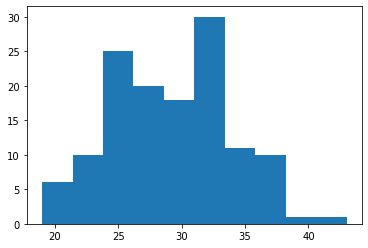

In [122]:
plt.hist(po24[po24.events=='home_run'].launch_angle)

In [123]:
df = pos[pos.player_name == 'Wilson, Weston']
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L       85          21   10     4  2.0      6           4  0.286   
1        R      104          29   23     6  0.0      1           5  0.214   

     obp    slg    ops   woba  
0  0.476  0.714  1.190  0.477  
1  0.241  0.214  0.456  0.207

In [124]:
df[df.release_speed>=95][['release_speed','pitch_type','p_throws','events','game_date','inning']]

release_speed pitch_type p_throws     events   game_date  inning
178145           97.1         FF        R  strikeout  2023-09-30       5
178149           97.0         FF        R        NaN  2023-09-30       5
178151           96.7         FF        R        NaN  2023-09-30       5
178259           96.1         FF        R  field_out  2023-09-30       2
181696           95.2         FF        L        NaN  2023-09-05       9
181698           96.5         FF        L        NaN  2023-09-05       9
181702           95.4         FF        L        NaN  2023-09-05       9
184903           95.4         FF        R        NaN  2023-08-11       3
185105           95.0         FF        L        NaN  2023-08-09       4
185107           95.3         FF        L        NaN  2023-08-09       4
204569           98.5         FC        R        NaN  2024-07-26       9
204572           97.1         FF        R  field_out  2024-07-26       7
204574          100.5         FC        R        NaN  2024-07-26       9
204857           96.5         FF        R  field_out  2024-07-23       8
204861           96.3         FF        R        NaN  2024-07-23       8
204864           96.0         FF        R        NaN  2024-07-23       8
205130           96.0         FF        R        NaN  2024-07-21       6
205137           96.4         FF        R        NaN  2024-07-21       6
205294          101.4         SI        L  strikeout  2024-07-20       8
205296          101.5         SI        L        NaN  2024-07-20       8
205300           98.5         SI        L        NaN  2024-07-20       8
205302           98.8         SI        L        NaN  2024-07-20       8
205397           96.6         FF        R     single  2024-07-19       5
205398           96.9         FF        R        NaN  2024-07-19       5
205406           96.0         FF        R        NaN  2024-07-19       5
205413           96.4         FF        R        NaN  2024-07-19       5
205575           95.4         FF        R  field_out  2024-07-14       8
205911          103.4         FF        R     single  2024-07-12       9
205923          101.9         FF        R        NaN  2024-07-12       9
210051           96.2         FF        R  field_out  2024-06-09       6
210056           95.9         FF        R        NaN  2024-06-09       6

In [125]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'], nphl[nphl.player_name == 'Schwarber, Kyle']])
ks95 = ks[ks.release_speed >= 95]
df = ks95
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      205          52   30    10  4.0    6.0        16.0  0.222   
1       2016       17           4    4     1  0.0    0.0         0.0  0.250   
2       2017      403         102   44    10  4.0   19.0        39.0  0.120   
3       2018      333          86   51    13  2.0   12.0        23.0  0.178   
4       2019      366         104   70    26  9.0   11.0        21.0  0.286   
5       2020      153          40   23     8  4.0    8.0         9.0  0.250   
6       2021      391         103   57    16  4.0   12.0        34.0  0.176   
7       2022      529         129   66    19  7.0   19.0        44.0  0.174   
8       2023      535         141   72    19  5.0   16.0        53.0  0.153   
9       2024      253          68   35    13  2.0   15.0        18.0  0.260   

     obp    slg    ops   woba  
0  0.308  0.489  0.797  0.340  
1  0.250  0.250  0.500  0.220  
2  0.284  0.301  0.586  0.269  
3  0.291  0.274  0.565  0.260  
4  0.375  0.637  1.012  0.414  
5  0.400  0.688  1.088  0.444  
6  0.272  0.330  0.602  0.268  
7  0.295  0.376  0.671  0.299  
8  0.248  0.331  0.579  0.256  
9  0.412  0.440  0.852  0.373

In [126]:
ks95.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

events  des
3                   field_out  290
12                  strikeout  257
13                       walk  118
11                     single   70
8                    home_run   41
0                      double   24
6   grounded_into_double_play   10
10                    sac_fly    7
2                 field_error    4
5                   force_out    4
7                hit_by_pitch    2
1                 double_play    1
4             fielders_choice    1
9                  pickoff_1b    1

Big 8th inning from Wheeler. <br>
Garrett Stubbs is our lefty bat when we need some insurance in the 9th? He hit a ball pretty well to move Casty to third with 2 outs. <br>
Brandon Marsh can come up to pinch hit.
<br> Probably put Marsh and Rojas into this game.0
<br> Marsh punches out.
<br> Jose in for the 9th.
<br> Bad

In [127]:
pp24[pp24.p_throws == 'L'].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

player_name  pitcher  game_pk
1       Alvarado, José   621237       45
2        Soto, Gregory   642397       43
3         Strahm, Matt   621381       43
4       Suárez, Ranger   624133       20
5  Sánchez, Cristopher   650911       20
0        Allard, Kolby   663465        1

In [128]:
df = ja = pps[pps.pitcher==621237]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2021     1045         246  129    42    5     42          68  0.213   
1       2022     1081         261  138    47    5     25          95  0.204   
2       2023      855         204  114    37    3     19          70  0.202   
3       2024      716         175  113    34    4     16          45  0.217   

     obp    slg    ops   woba  
0  0.370  0.325  0.695  0.322  
1  0.287  0.317  0.605  0.272  
2  0.275  0.306  0.581  0.259  
3  0.291  0.325  0.616  0.277

Poorly caught 1-2 FC that landed in zone 7. Should have been a punchout.

Alvi just throws two more FCs, the second gets a whiff. 94 and 95. Nasty.

Oneil Cruz now.
<br> 0-0 SI 96, dirt
<br> 1-0 FC 96, other batter's box
<br> 2-0 SI 100, damn. Here it is, hit it.
<br> 2-1 SI 100, chopped up the middle. Sosa has no play at home.

## Game 2: Ortiz vs Sanchez
Offense does nothing Kellen was at a Union game.

## Game 3: Gonzales vs Phillips

In [129]:
mg_id = pos[pos.des.str.contains('Marco Gonzales')].pitcher.unique()[0]
mg = pd.concat([pos[pos.pitcher==mg_id],nphl[nphl.pitcher == mg_id]])
mg

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
198590         CH  2023-04-25           78.7           2.43           5.33   
198591         FF  2023-04-25           87.4           1.83           5.83   
198592         FF  2023-04-25           88.6           1.93           5.78   
198593         CU  2023-04-25           78.4           2.14           5.44   
198594         FC  2023-04-25           84.4           2.15           5.63   
...           ...         ...            ...            ...            ...   
294123         FF  2015-09-01           89.5           1.39           5.85   
294132         FF  2015-09-01           90.8           1.51           5.92   
294134         FF  2015-09-01           91.4           1.66           5.89   
294135         FF  2015-09-01           90.9           1.50           5.91   
294137         CU  2015-09-01           76.0           1.76           5.80   

          player_name  batter  pitcher     events      description  ...  \
198590  Stott, Bryson  681082   594835  strikeout  swinging_strike  ...   
198591  Stott, Bryson  681082   594835        NaN             foul  ...   
198592  Stott, Bryson  681082   594835        NaN             foul  ...   
198593  Stott, Bryson  681082   594835        NaN             ball  ...   
198594  Stott, Bryson  681082   594835        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
294123  Harper, Bryce  547180   594835        NaN             ball  ...   
294132  Harper, Bryce  547180   594835       walk             ball  ...   
294134  Harper, Bryce  547180   594835        NaN             ball  ...   
294135  Harper, Bryce  547180   594835        NaN             ball  ...   
294137  Harper, Bryce  547180   594835        NaN             ball  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
198590  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198591  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198592  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198593  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
198594  0.883  1.244  1.569  2.004    0.2 -0.422  0.122  10.028  3.255    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
294123  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
294132  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
294134  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
294135  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
294137  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[455 rows x 109 columns]

In [130]:
df = mg
res = phils_vs_mg = results('player_name')

In [131]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Stubbs, Garrett'
          ,'Pache, Cristian'
         ]
res[res.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec       38           7    6   1.0  0.0    1.0         0.0   
1   Castellanos, Nick       53          16   14   6.0  0.0    0.0         2.0   
5       Harper, Bryce       27           8    5   1.0  0.0    1.0         2.0   
9     Pache, Cristian       33          12   11   6.0  0.0    1.0         0.0   
13    Schwarber, Kyle       40          11    6   3.0  1.0    3.0         2.0   
14      Sosa, Edmundo       21           7    5   2.0  1.0    0.0         2.0   
16    Stubbs, Garrett       13           5    5   1.0  0.0    0.0         0.0   
17       Turner, Trea       30           8    6   1.0  0.0    0.0         2.0   
18     Wilson, Weston        5           2    1   0.0  0.0    0.0         1.0   

       ba    obp    slg    ops   woba  
0   0.167  0.286  0.167  0.452  0.225  
1   0.375  0.375  0.500  0.875  0.377  
5   0.167  0.250  0.167  0.417  0.196  
9   0.545  0.583  0.636  1.220  0.531  
13  0.375  0.545  0.750  1.295  0.536  
14  0.286  0.286  0.857  1.143  0.466  
16  0.200  0.200  0.200  0.400  0.177  
17  0.125  0.125  0.250  0.375  0.158  
18  0.000  0.000  0.000  0.000  0.000

In [132]:
df = pp24
results('player_name')
tp = pps[pps.player_name == 'Phillips, Tyler']
pitch_mix(tp).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
4         ST          Sweeper    113           82.2             2420.2  10.3   
3         SI           Sinker    106           94.0             2111.3   8.3   
2         FF  4-Seam Fastball     44           92.7             2312.0   8.9   
1         CU        Curveball     42           81.1             2563.6   9.5   
0         CH         Changeup     17           86.0             1265.4  11.0   

   usage  
4   35.1  
3   32.9  
2   13.7  
1   13.0  
0    5.3

In [133]:
tp.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

pitch_type release_speed              release_spin_rate                
                     count   mean   std             count     mean    std
0         CH            17  86.01  0.85                17  1265.41  89.44
1         CU            42  81.10  1.14                42  2563.62  62.42
2         FF            44  92.75  0.94                44  2312.02  84.76
3         SI           106  93.96  1.00               106  2111.34  90.74
4         ST           113  82.24  1.01               113  2420.22  81.11

In [134]:
82.56 - 1.03, 82.56 + 1.03

(81.53, 83.59)

In [135]:
2441.63 - 89.69, 2441.63 + 89.69

(2351.94, 2531.32)

In [136]:
94.45 - 0.82, 94.45 + 0.82

(93.63000000000001, 95.27)

In [137]:
2087.73 - 108.26, 2087.73 + 108.26

(1979.47, 2195.9900000000002)

In [138]:
df = bohm
bp = bohm_parks = results('home_team')
bp[bp.home_team == 'PIT']
# Bohm hits well at PNC Park

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts    ba  \
20       PIT      216          61   46    20  2.0    7.0         8.0  0.37   

      obp  slg    ops   woba  
20  0.443  0.5  0.943  0.413

In [139]:
po = pd.concat([pos[pos.player_name.isin(lineup)],nphl[nphl.player_name.isin(lineup)]])
po

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
94303          SI  2019-09-29           97.3          -2.47           5.74   
94304          SI  2019-09-29           97.4          -2.52           5.82   
94334          FF  2019-09-29           98.3          -2.28           5.80   
94335          SI  2019-09-29           97.7          -2.39           5.72   
94336          SI  2019-09-29           92.1          -2.34           5.74   
...           ...         ...            ...            ...            ...   
313396         SL  2015-08-21           84.8          -1.76           6.21   
313397         SI  2015-08-21           90.0          -1.70           6.19   
313398         SL  2015-08-21           84.9          -1.81           6.23   
313399         SL  2015-08-21           84.5          -1.75           6.34   
313400         SL  2015-08-21           86.4          -1.81           6.23   

          player_name  batter  pitcher     events      description  ...  \
94303   Harper, Bryce  547180   645261  field_out    hit_into_play  ...   
94304   Harper, Bryce  547180   645261        NaN             ball  ...   
94334   Harper, Bryce  547180   645261     single    hit_into_play  ...   
94335   Harper, Bryce  547180   645261        NaN    called_strike  ...   
94336   Harper, Bryce  547180   645261        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
313396   Turner, Trea  607208   346798  field_out    hit_into_play  ...   
313397   Turner, Trea  607208   346798        NaN    called_strike  ...   
313398   Turner, Trea  607208   346798  field_out    hit_into_play  ...   
313399   Turner, Trea  607208   346798        NaN  swinging_strike  ...   
313400   Turner, Trea  607208   346798        NaN    called_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
94303   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94304   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94334   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94335   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
94336   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
313396  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
313397  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
313398  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
313399  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
313400  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[99230 rows x 109 columns]

In [140]:
po[po.p_throws == 'L']

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
94388          CU  2019-09-29           72.1           3.10           3.79   
94394          CU  2019-09-29           73.4           3.08           3.74   
94396          CU  2019-09-29           72.7           3.30           3.70   
94404          CU  2019-09-29           73.3           3.23           3.74   
94405          CU  2019-09-29           74.7           3.12           3.79   
...           ...         ...            ...            ...            ...   
313375         FF  2015-08-28           93.0           3.17           6.05   
313392         CH  2015-08-22           80.6           2.43           5.50   
313393         CH  2015-08-22           78.3           2.51           5.57   
313394         FF  2015-08-22           89.7           2.61           5.56   
313395         FF  2015-08-22           89.9           2.58           5.64   

          player_name  batter  pitcher     events              description  \
94388   Harper, Bryce  547180   572383  strikeout          swinging_strike   
94394   Harper, Bryce  547180   572383        NaN          swinging_strike   
94396   Harper, Bryce  547180   572383        NaN            called_strike   
94404   Harper, Bryce  547180   572383        NaN                     ball   
94405   Harper, Bryce  547180   572383        NaN                     ball   
...               ...     ...      ...        ...                      ...   
313375   Turner, Trea  607208   543045        NaN            called_strike   
313392   Turner, Trea  607208   462945  strikeout  swinging_strike_blocked   
313393   Turner, Trea  607208   462945        NaN                     foul   
313394   Turner, Trea  607208   462945        NaN                     ball   
313395   Turner, Trea  607208   462945        NaN          swinging_strike   

        ...    w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP  \
94388   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94394   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94396   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94404   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
94405   ...  0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...    ...   
313375  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
313392  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
313393  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
313394  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   
313395  ...  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134   

       source  
94388     NaN  
94394     NaN  
94396     NaN  
94404     NaN  
94405     NaN  
...       ...  
313375      n  
313392      n  
313393      n  
313394      n  
313395      n  

[28123 rows x 109 columns]

In [141]:
pitch_mix_by_group(po,'p_throws')

p_throws  count  release_speed  release_spin_rate   zone  usage
1        R  71107         89.184           2246.096  9.412   71.7
0        L  28123         87.816           2199.297  9.257   28.3

In [142]:
pitch_mix(mg).round(2)

pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
3         FF  4-Seam Fastball    165          89.36            2133.08   8.37   
0         CH         Changeup    126          80.59            2177.79  11.05   
1         CU        Curveball     88          78.38            2273.44   8.84   
2         FC           Cutter     61          85.73            2100.25   8.82   
4         SI           Sinker     15          89.76            2117.47   6.87   

   usage  
3   36.3  
0   27.7  
1   19.3  
2   13.4  
4    3.3

In [143]:
mg.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

pitch_type release_speed              release_spin_rate                 
                     count   mean   std             count     mean     std
0         CH           126  80.59  1.65               126  2177.79  110.34
1         CU            88  78.38  1.69                88  2273.44  140.96
2         FC            61  85.73  1.19                61  2100.25  132.21
3         FF           165  89.36  1.09               165  2133.08  119.28
4         SI            15  89.76  0.71                15  2117.47   49.40

### Tyler Phillips might be legit.

He pitched to contact today, but it was lots of soft contatct. Just three punchouts and the walk, only allowed 4 hits though.

His velo was down pretty much across the board from his first two starts. He was aggressive with the breaking stuff, throwing ST and CU 56% of the time. The average EV on bip against his ST was 71.4 mph, the hardest hit ball was just 81.5 mph off the bat. What a day for his ST! He got 6 whiffs on it, 38% of the swings on that pitch. He also threw it for a called strike 6 times.

.270 xBA for the Buccos, that is the highest of any appearance by Phillips. Well that is probably just based off launch_speedangle.

Ricky Bo comments on Tyler Phillips using both sides of the plate, also on him doing his job.

Pache bunting in the top of the 7th. Nice. He is not able to get it down. How consistently did pitchers drop the bunt? Damn, that is an odyssey. Idk if I am high or not. I wish I felt it more. Kind of a letdown on a Sunday afternoon, huh.

Bad call Doug Eddings. Overturned. Trea Turner comes up with an RBI by punching a breaking ball through the 4/3 hole into RF.

Now Harper gets to bat with one out and runners on the corners. Put this game to bed, Bryce.

Harper vs Nicolas Top 7, 1+3, 1 out
<br> 0-0 90 SL X - Harper pulls the breaking ball into the hole, only play is to first. RBI.

Bohm vs Nicolas Top 7, 2, 2 out
<br> 0-0 91 SL B
<br> 1-0 97 FF B
<br> 2-0 SL X - Bohm pulls the breaking ball through the 5-6 hole, Turner scores.
EV = 90.9 mph, LA = 5 degrees, Dist = 102

Skipping Castelanos at bat

Bottom 7: Strahm and Marte hot in the 'pen. I think you got to have Strahm here. Well it is Marte. Blue fucking socks.

**Tellez vs Marte, Bot 7, 0, 0 out**
<br> 0-0 97 FF B 13 low
<br> 1-0 95 SL S 4
<br> 1-1 98 FF B 
<br> 2-1 85 SL B
<br> 3-1 96 FF S 4 foul
<br> 3-2 98 FF S 13 low but called K
<br> Tellez backwards K on a FF that looked a little low.

**Hayes vs Marte**
<br> 0-0 99 FF B 13 inside
<br> 1-0 87 SL B 13 dirt
<br> 2-0 96 SI S 13 foul tip
<br> 2-1 98 SI B 11 low 
<br> 3-1 98 SI S 13 foul
<br> 3-2 97 SI X 1 single the other way
<br> Hayes battles and muscles a sinker up in the zone out to right, Casty charges but traps it.
<br> EV = 87.8, LA = 19, Dist = 250

**Palacios vs Marte**
<br> 0-0 87 SL B 13
<br> 1-0 85 SL B 13 low
<br> 2-0 98 FF B 14 inside
<br> 3-0 97 FF S 9
<br> 3-1 96 FF X 6 L8
<br> Palacios hits one sharply but Pache has time to run it down. Pache does not know how many outs there are?
<br> EV = 103.5, LA = 14, Dist = 307

**Joe vs Marte**
<br> 0-0 98 SI S 5
<br> 0-1 98 FF B 12 outside\
<br> 1-1 86 SL X 6 F9
<br> Weak fly ball off the end of the bat that Casty charges and gets to.
<br> EV = 71.7, LA = 37, Dist = 233

Top 8

**Sosa vs Fleming**
<br> 0-0 83 CH 7 S foul
<br> 0-1 87 FC 13 S foul
<br> 0-2 83 CH 12 B nowhere close
<br> 1-2 87 FC 4 S foul
<br> 1-2 84 CH 12 B low
<br> 2-2 83 CH 12 X 5-3
<br> Sosa goes after a changeup that fell off the table. Rolls it straight to Ke'Bryan Hayes 
<br> EV = 96.3, LA = 1, Dist = 42 

**Wilson vs Fleming**
<br> 0-0 91 SI 12 B outside
<br> 1-0 91 SI 12 X single to center
<br> Weston Wilson takes a sinker that was off the plate away and just floats it out to CF
<br> EV = 88.4, LA = 13, Dist = 216 

**Stubbs vs Fleming**
<br> 0-0 90 SI 3 S
<br> 0-1 90 SI 9 S foul 
<br> 0-2 90 SI 6 X single to right
<br> Garrett Stubbs puts a nice swing on a sinker and drops it in right field
<br> EV = 69, LA = 22, Dist = 200

**Pache vs Fleming** Can Pache do it?
<br> 0-0 87 FC 11 B inside
<br> 1-0 83 CH 13 B low and in
<br> 2-0 83 CH 14 B well off
<br> 3-0 89 SI 8 X flyout to right center, near the track
<br> Pache swings at a 3-0 sinker and lifts it out to right center, pretty well hit. Moves Wilson who could have scored if he went first to third on the Stubbs single
<br> EV = 100.8, LA = 36, Dist = 363 

**Schwarber vs Fleming**
<br> 0-0 88 FC 13 B well off
<br> 1-0 90 SI 14 B almost hit his dick
<br> 2-0 90 SI 14 B inside
<br> 3-0 91 SI 14 B well in
<br> Schwarber four pitch walk. I mean, great at bat but Fleming was not super close. Composure from 12.

**Turner vs Fleming** Bases loaded, 2 outs.
<br> 0-0 83 CH 13 S Turner thought it was high
<br> 0-1 82 CH 14 B in the other batters box
<br> 1-1 83 CH 9 S foul
<br> 1-2 83 CH 14 B in the dirt, was always below the zone.
<br> 2-2 83 CH 14 S man that was just a good pitch, off the plate but 7 had to swing
<br> 2-2 84 CH 14 B in the dirt, good take
<br> 3-2 83 CH 8 X 5-3
<br> Hit hard but right at Ke'Bryan Hayes who makes a nice play.
EV = 92.8, LA = 4, Dist = 83

Bot 8: Here comes Jose.

**Bart vs Alvarado**
<br> 0-0 96 SI 3 S
<br> 0-1 97 SI 4 X single through the 5-6 hole
<br> Bart pulls a sinker that caught too much of the plate past a diving Turner.
<br> EV = 111, LA = 4, Dist = 95 

**McCutchen vs Alvarado**
<br> 0-0 97 SI 11 B nearly hits Cutch in the face
<br> 1-0 97 SI 1 S whiff
<br> 1-1 98 SI 1 S whiff
<br> 1-2 98 SI 1 X P5
<br> McCutchen skies one, caught at the net by Bohm in foul territory.
<br> EV = 93.9, LA = 70, Dist = 117

**Reynolds vs Alavarado**
<br> 0-0 93 FC 7 S
<br> 0-1 99 SI 1 S
<br> 0-2 94 FC 1 S whiff
<br> Strike one, Strike two, Good Luck! Nasty stuff from Jose.

**Cruz vs Alvarado**
<br> 0-0 99 SI 7 S foul
<br> 0-1 99 SI 3 B just inside
<br> 1-1 94 FC 13 S whiff
<br> 1-2 93 FC 11 B outside
<br> 2-2 94 FC 13 S whiff, in the dirt
<br> Nice pitching from Jose, nasty FCs after establishing the fastball early.

Top 9:

**Harper vs Fleming**
<br> 0-0 77 CU 8 S whiff
<br> 0-1 90 SI 9 X 3U
<br> Harper rolls over a sinker below the zone
<br> EV = 75.4, LA = -29, Dist = 5

**Bohm vs Fleming** 
<br> 0-0 87 FC 14 B dirt
<br> 1-0 83 CH 9 S
<br> 1-1 79 CU 11 B dirt 
<br> 2-1 87 FC 1 S foul
<br> 2-2 76 CU 9 X F7
<br> Bohm pulls a backdoor curveball out to left center but playable for Reynolds
<br> EV = 97.2, LA = 38, Dist = 366

**Castellanos vs Fleming**
<br> 0-0 84 CH 14 B low
<br> 1-0 83 CH 14 S foul
<br> 1-1 76 CU 9 S foul
<br> 1-2 84 CH 9 S foul
<br> 1-2 76 CU 8 X home run
<br> Nick Castellanos goes down and pulls that breaking ball over the left field fence. It's always a homer.
<br> EV = 104.3, LA = 34, Dist = 409

**Sosa vs Fleming**
<br> 0-0 84 CH 14 X E6
<br> Sosa pulls one out to Cruz who boots it.
<br> EV = 96.4, LA = -6, Dist = 14

**Wilson vs Fleming**
<br> 0-0 89 SI 14 B outside
<br> 1-0 84 CH 14 X 6-4
<br> Wilson rolls a changeup out to Cruz who flips to second
<br> EV = 65.5, LA = -21, Dist = 6



Bot 9: Here comes Jose Ruiz!

**Gonzales vs Ruiz**
<br> 0-0 96 SI 4 X 6-3
<br> Gonzales bounces the first pitch out to Turner
<br> EV = 90.7, LA = -18, Dist = 8

**Tellez vs Ruiz**
<br> 0-0 97 FF 2 S
<br> 0-1 93 FF 14 B nowhere close
<br> 1-1 87 CU 8 S foul
<br> 1-2 87 CU 14 X P6
<br> Tellez chases a curveball and hits it off the floor. Spinner that Turner runs out onto the grass to snag.
<br> EV = 67.3, LA = 37, Dist = 204

**Hayes vs Ruiz**
<br> 0-0 97 FF 11 B low and in
<br> 1-0 96 SI 4 X L6
<br> Hayes hits one hard but Turner is able to make a leaping catch.
<br> EV = 97.4, LA = 9, Dist = 197

# I did some silly charting for the last three innings of this one.

# How many curveballs did Aaron Nola throw at the top of the zone?
Not very many, especially this year. He has only given up one hit on them so far.

In [144]:
df = nola[(nola.pitch_type.isin(['KC','CU']))
          &(nola.zone.isin([1,2,3,11,12]))
         ]
x = results('game_year')

In [145]:
y = pitch_mix_by_group(nola,'game_year').sort_values(by='game_year',ascending=False)

In [146]:
z = x.merge(y,on='game_year',suffixes = ('_x','_y'))
z['share'] = z.pitches/z['count']
z[['game_year','pitches','count','share']]

game_year  pitches  count     share
0       2015       42   1117  0.037601
1       2016       70   1796  0.038976
2       2017       89   2665  0.033396
3       2018      116   3212  0.036115
4       2019      138   3332  0.041417
5       2020       28   1148  0.024390
6       2021       70   2971  0.023561
7       2022       71   3459  0.020526
8       2023       69   3431  0.020111
9       2024       27   2011  0.013426

# Could Taijuan Walker throw more front hip sinkers?
Holy shit, yeah.
<br> He has thrown 16 this season, all have been called strikes. 6 of them have been for a backwards K.

In [147]:
tai = pp24[pp24.player_name == 'Walker, Taijuan']
fhs = tai[(tai.pitch_type == 'SI')
          &(tai.stand == 'L')
          &(tai.zone.isin([3,6,9]))
         ]
df = fhs
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  \
0       2024       16           6  0.0   0.0  0.0    0.0           6  0.0   

   obp  slg  ops  woba  
0  0.0  0.0  0.0   0.0

# Max EV
Schwarber single off of Bobby Miller on 7/9 - 115.6 mph
<br> Schwarber home run off of Sale on third game of year, 114.4 mph.

In [148]:
po24.sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

game_date        player_name  launch_speed  events
206274  2024-07-09    Schwarber, Kyle         115.6  single
217933  2024-04-10    Schwarber, Kyle         115.2  single
218181  2024-04-09    Schwarber, Kyle         115.1     NaN
207929  2024-06-26    Schwarber, Kyle         114.8     NaN
212768  2024-05-17    Schwarber, Kyle         114.6     NaN
...            ...                ...           ...     ...
219610  2024-03-29  Castellanos, Nick           NaN     NaN
219612  2024-03-29       Turner, Trea           NaN     NaN
219613  2024-03-29    Schwarber, Kyle           NaN     NaN
219616  2024-03-29      Harper, Bryce           NaN     NaN
219617  2024-03-29     Realmuto, J.T.           NaN     NaN

[15595 rows x 4 columns]

In [149]:
po24[po24.events=='home_run'].sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

game_date        player_name  launch_speed    events
219330  2024-03-31    Schwarber, Kyle         114.4  home_run
205008  2024-07-22      Harper, Bryce         113.8  home_run
210272  2024-06-08  Castellanos, Nick         113.1  home_run
218782  2024-04-03    Schwarber, Kyle         113.0  home_run
209992  2024-06-11    Schwarber, Kyle         112.4  home_run
...            ...                ...           ...       ...
214169  2024-05-07      Harper, Bryce          95.4  home_run
216813  2024-04-19   Merrifield, Whit          95.3  home_run
205586  2024-07-14       Turner, Trea          95.2  home_run
208993  2024-06-17         Bohm, Alec          95.2  home_run
206245  2024-07-09       Turner, Trea          92.7  home_run

[132 rows x 4 columns]

# Max Pitch Velo

In [150]:
pp24['velo'] = pp24.release_speed.fillna(0)
pp24.sort_values(by='velo',ascending=False)

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
218283         SI  2024-03-29          101.0           1.24           6.71   
218074         SI  2024-03-30          100.8           2.19           5.86   
216152         SI  2024-04-13          100.5           2.24           5.74   
218229         SI  2024-03-29          100.5           1.22           6.63   
218277         SI  2024-03-29          100.5           1.29           6.66   
...           ...         ...            ...            ...            ...   
204648         EP  2024-07-14           37.8          -1.26           6.61   
204640         EP  2024-07-14           35.9          -0.93           6.59   
204660         EP  2024-07-14           35.6          -1.06           6.80   
204643         EP  2024-07-14           35.6          -0.99           6.63   
209548        NaN  2024-06-03            NaN            NaN            NaN   

            player_name  batter  pitcher     events    description  ...  \
218283   Alvarado, José  671739   621237        NaN           foul  ...   
218074    Soto, Gregory  621566   642397        NaN           foul  ...   
216152    Soto, Gregory  665833   642397        NaN  called_strike  ...   
218229   Alvarado, José  606115   621237        NaN           ball  ...   
218277   Alvarado, José  671739   621237     single  hit_into_play  ...   
...                 ...     ...      ...        ...            ...  ...   
204648  Stubbs, Garrett  668832   596117        NaN  called_strike  ...   
204640  Stubbs, Garrett  669127   596117        NaN   blocked_ball  ...   
204660  Stubbs, Garrett  668709   596117        NaN           ball  ...   
204643  Stubbs, Garrett  668832   596117     single  hit_into_play  ...   
209548    Wheeler, Zack  656555   554430  field_out  hit_into_play  ...   

        runSB  runCS   R/PA    R/W   cFIP                 group       date  \
218283    0.2 -0.405  0.117  9.674  3.168   Alvarado, José - SI 2024-03-29   
218074    0.2 -0.405  0.117  9.674  3.168    Soto, Gregory - SI 2024-03-30   
216152    0.2 -0.405  0.117  9.674  3.168    Soto, Gregory - SI 2024-04-13   
218229    0.2 -0.405  0.117  9.674  3.168   Alvarado, José - SI 2024-03-29   
218277    0.2 -0.405  0.117  9.674  3.168   Alvarado, José - SI 2024-03-29   
...       ...    ...    ...    ...    ...                   ...        ...   
204648    0.2 -0.405  0.117  9.674  3.168  Stubbs, Garrett - EP 2024-07-14   
204640    0.2 -0.405  0.117  9.674  3.168  Stubbs, Garrett - EP 2024-07-14   
204660    0.2 -0.405  0.117  9.674  3.168  Stubbs, Garrett - EP 2024-07-14   
204643    0.2 -0.405  0.117  9.674  3.168  Stubbs, Garrett - EP 2024-07-14   
209548    0.2 -0.405  0.117  9.674  3.168                   NaN 2024-06-03   

       month      my   velo  
218283     3  2024-3  101.0  
218074     3  2024-3  100.8  
216152     4  2024-4  100.5  
218229     3  2024-3  100.5  
218277     3  2024-3  100.5  
...      ...     ...    ...  
204648     7  2024-7   37.8  
204640     7  2024-7   35.9  
204660     7  2024-7   35.6  
204643     7  2024-7   35.6  
209548     6  2024-6    0.0  

[15235 rows x 113 columns]

In [151]:
pp24[pp24.events=='strikeout'].sort_values(by='release_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

game_date            player_name  launch_speed     events
218219  2024-03-29         Alvarado, José           NaN  strikeout
205084  2024-07-11         Alvarado, José           NaN  strikeout
212884  2024-05-08  Domínguez, Seranthony           NaN  strikeout
216842  2024-04-08          Soto, Gregory           NaN  strikeout
213763  2024-05-01          Soto, Gregory           NaN  strikeout
...            ...                    ...           ...        ...
204920  2024-07-12         Suárez, Ranger           NaN  strikeout
211269  2024-05-21         Suárez, Ranger           NaN  strikeout
214985  2024-04-22         Suárez, Ranger           NaN  strikeout
212662  2024-05-10         Suárez, Ranger           NaN  strikeout
204844  2024-07-12         Suárez, Ranger           NaN  strikeout

[940 rows x 4 columns]

# Max xBA on out
Pache long running catch on Jesus Sanchez in Miami on Mother's Day
<br> Or Brandon Marsh charging in on a sinking liner off the bat of Freddie Freeman.

In [152]:
pp24[(pp24.type=='X')
     &(~pp24.events.isin(['single','double','triple','home_run']))
    ].sort_values(by='estimated_ba_using_speedangle',ascending=False
                 )[['hit_location','pitch_type','launch_speed','launch_angle','hit_distance_sc'
                   ,'estimated_ba_using_speedangle','events','game_date','player_name']]

hit_location pitch_type  launch_speed  launch_angle  hit_distance_sc  \
204375           9.0         KC          86.4          17.0            274.0   
212476           8.0         FF         105.0          28.0            383.0   
205214           8.0         FC         102.7          13.0            295.0   
212316           4.0         ST          99.4          12.0            181.0   
212118           7.0         KC          95.2          14.0            282.0   
...              ...        ...           ...           ...              ...   
208901           9.0         FC           NaN           NaN              NaN   
208986           3.0         SL           NaN           NaN              NaN   
209172           9.0         SL           NaN           NaN              NaN   
209548           6.0        NaN           NaN           NaN              NaN   
218057           2.0         FF           NaN           NaN              NaN   

        estimated_ba_using_speedangle     events   game_date       player_name  
204375                          0.957    sac_fly  2024-07-19       Nola, Aaron  
212476                          0.934  field_out  2024-05-12  Kerkering, Orion  
205214                          0.934  field_out  2024-07-10    Alvarado, José  
212316                          0.931  field_out  2024-05-13  Kerkering, Orion  
212118                          0.926  field_out  2024-05-14       Nola, Aaron  
...                               ...        ...         ...               ...  
208901                            NaN  field_out  2024-06-09   Walker, Taijuan  
208986                            NaN  field_out  2024-06-09     Hoffman, Jeff  
209172                            NaN  field_out  2024-06-08        Ruiz, José  
209548                            NaN  field_out  2024-06-03     Wheeler, Zack  
218057                            NaN  field_out  2024-03-30       Nola, Aaron  

[1817 rows x 9 columns]

# Jose Alvarado L-R Splits

In [153]:
df = ja[ja.game_year==2024]
results('stand')

stand  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba    obp  \
0     L      191          52   36     5    1      4          12  0.104  0.173   
1     R      525         123   77    29    3     12          33  0.266  0.341   

     slg    ops   woba  
0  0.188  0.361  0.168  
1  0.385  0.727  0.323

Alvarado and Strahm are going to swap roles. <br>
Strahm is not just a funky lefty, he is a legit closer. <br>
Remember when Ranger was a shutdown closer? Is that a radical play? <br>
<br>ZW
<br>AN
<br>CS - Sanchez also bad in his one postseason start but he got unlucky. That game was lost by Craig Kimbrel.
<br>Rob does not let Ranger take the Braves for the third time through the order in the NLDS but does in the NLCS. Game 7 failure by Ranger.

As Gabe Kapler says, "He's presenting beautifully."

In [154]:
# This is the first time Bryce Harper has ever played in this ballpark.
# Bryce Harper just hit a home run in his first ever at bat at Target Field.
# Nick Castellanos will have played here a lot.
df = po24
res24 = results('player_name')

In [155]:
h = hist24 = pd.DataFrame()
for pn in df.player_name.unique().tolist():
    x = pd.concat(
        [df[(df.player_name == pn)
           &(df.home_team == 'MIN')
          ]
         ,nphl[(nphl.player_name == pn)
               &(nphl.home_team == 'MIN')
              ]
        ]
    )
    h =  pd.concat([h,x])
    print(pn)
h

Marsh, Brandon
Bohm, Alec
Harper, Bryce
Turner, Trea
Schwarber, Kyle
Hays, Austin
Stott, Bryson
Castellanos, Nick
Realmuto, J.T.
Stubbs, Garrett
Wilson, Weston
Sosa, Edmundo
Rojas, Johan
Pache, Cristian
Marchán, Rafael
Merrifield, Whit
Clemens, Kody
Dahl, David


pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
204633         FF  2024-07-24           95.4          -1.85           6.44   
204690         FC  2024-07-24           94.7          -1.83           5.36   
204696         FC  2024-07-24           94.2          -1.96           5.42   
204704         FF  2024-07-24           97.1          -1.78           6.30   
204707         FF  2024-07-24           96.2          -1.83           6.36   
...           ...         ...            ...            ...            ...   
69477          SL  2021-05-03           86.7           1.75           6.30   
69478          SL  2021-05-03           86.3           1.84           6.28   
69479          FF  2021-05-03           93.8           1.81           6.26   
69480          SL  2021-05-03           86.0           1.78           6.30   
69481          SL  2021-05-03           85.1           1.96           6.37   

           player_name  batter  pitcher     events      description  ...  \
204633  Marsh, Brandon  669016   701581  field_out    hit_into_play  ...   
204690  Marsh, Brandon  669016   592779  force_out    hit_into_play  ...   
204696  Marsh, Brandon  669016   592779        NaN             ball  ...   
204704  Marsh, Brandon  669016   701581  strikeout    called_strike  ...   
204707  Marsh, Brandon  669016   701581        NaN             foul  ...   
...                ...     ...      ...        ...              ...  ...   
69477      Dahl, David  621311   663399        NaN             ball  ...   
69478      Dahl, David  621311   663399        NaN             foul  ...   
69479      Dahl, David  621311   663399        NaN             ball  ...   
69480      Dahl, David  621311   663399        NaN  swinging_strike  ...   
69481      Dahl, David  621311   663399        NaN    called_strike  ...   

          wHR  runSB  runCS   R/PA    R/W   cFIP       date month      my  \
204633  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-24   7.0  2024-7   
204690  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-24   7.0  2024-7   
204696  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-24   7.0  2024-7   
204704  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-24   7.0  2024-7   
204707  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-24   7.0  2024-7   
...       ...    ...    ...    ...    ...    ...        ...   ...     ...   
69477   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
69478   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
69479   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
69480   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   
69481   2.007    0.2 -0.419  0.121  9.973  3.170        NaT   NaN     NaN   

       source  
204633    NaN  
204690    NaN  
204696    NaN  
204704    NaN  
204707    NaN  
...       ...  
69477       n  
69478       n  
69479       n  
69480       n  
69481       n  

[2348 rows x 112 columns]

In [156]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
         ]
df = h
tgt_field = results('player_name')
tgt_field[tgt_field.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec       45          12    8   3.0  0.0    2.0         2.0   
1   Castellanos, Nick      677         176  133  45.0  7.0   11.0        32.0   
4       Harper, Bryce       52          13   10   2.0  1.0    0.0         3.0   
8      Realmuto, J.T.       89          22   17   6.0  0.0    2.0         2.0   
9        Rojas, Johan       29           8    5   1.0  0.0    1.0         2.0   
10    Schwarber, Kyle      105          26   12   3.0  0.0    1.0        12.0   
11      Stott, Bryson       43          11    9   2.0  0.0    0.0         2.0   
13       Turner, Trea      150          38   30   9.0  2.0    4.0         4.0   
14     Wilson, Weston       18           4    3   0.0  0.0    0.0         1.0   

       ba    obp    slg    ops   woba  
0   0.300  0.417  0.500  0.917  0.399  
1   0.278  0.318  0.500  0.818  0.343  
4   0.154  0.154  0.462  0.615  0.256  
8   0.316  0.409  0.368  0.778  0.352  
9   0.167  0.250  0.167  0.417  0.197  
10  0.125  0.154  0.125  0.279  0.128  
11  0.182  0.182  0.182  0.364  0.161  
13  0.273  0.342  0.485  0.827  0.349  
14  0.000  0.000  0.000  0.000  0.000

In [157]:
h[h.player_name=='Turner, Trea'].groupby('away_team',as_index=False).agg({'des' : 'count'})

away_team  des
0       LAD   32
1       PHI   47
2       WSH   71

In [158]:
bo_id = nphl[nphl.des.str.contains('Ober')].pitcher.unique()#[0]
#bo_id.
nphl[nphl.des.str.contains('Ober')].groupby(['player_name','home_team','away_team'
              ,'pitcher','batter'],as_index=False).agg({'des' : 'max'})

player_name home_team away_team  pitcher  batter  \
0  Anderson, Chase       MIL       PHI   502624  519085   
1     Segura, Jean       SEA       COL   623184  516416   

                                                 des  
0            Brett Oberholtzer strikes out swinging.  
1  Jean Segura grounds into a double play, pitche...

# MIN (A) 722-724
## Game 1: Ober vs Suarez

## Game 2: Woods Richardson vs Wheeler

In [159]:
# Dude this Jhoan Duran has crazy stuff but cannot find the zone.

In [160]:
# How about that.

In [161]:
# Bohm made a nice play to get out of a jam in the 8th. Hoffman and Soto.

In [162]:
df = po24[po24.launch_speed >= 100]
results('player_name')

player_name  pitches  plate_apps   bip  hits   hrs  walks  \
0          Bohm, Alec      101        95.0  95.0  52.0   9.0    0.0   
1   Castellanos, Nick       76        68.0  68.0  39.0  12.0    0.0   
2       Clemens, Kody       12        10.0  10.0   9.0   3.0    0.0   
3         Dahl, David        4         4.0   4.0   4.0   2.0    0.0   
4       Harper, Bryce       91        86.0  86.0  50.0  19.0    0.0   
5        Hays, Austin        1         0.0   0.0   0.0   0.0    0.0   
6     Marchán, Rafael        5         5.0   5.0   5.0   3.0    0.0   
7      Marsh, Brandon       57        49.0  49.0  30.0   9.0    0.0   
8    Merrifield, Whit        5         5.0   5.0   3.0   2.0    0.0   
9     Pache, Cristian       20        18.0  18.0   9.0   0.0    0.0   
10     Realmuto, J.T.       59        52.0  52.0  26.0   5.0    0.0   
11       Rojas, Johan       41        38.0  38.0  16.0   3.0    0.0   
12    Schwarber, Kyle      117        98.0  98.0  59.0  20.0    0.0   
13      Sosa, Edmundo       40        36.0  36.0  23.0   5.0    0.0   
14      Stott, Bryson       44        41.0  41.0  21.0   7.0    0.0   
15    Stubbs, Garrett        5         0.0   0.0   0.0   0.0    0.0   
16       Turner, Trea       69        56.0  56.0  38.0  11.0    0.0   
17     Wilson, Weston        6         5.0   5.0   2.0   1.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0          0.0  0.547  0.547  1.063  1.611  0.683  
1          0.0  0.574  0.574  1.265  1.838  0.776  
2          0.0  0.900  0.900  2.100  3.000  1.259  
3          0.0  1.000  1.000  2.750  3.750  1.568  
4          0.0  0.581  0.581  1.407  1.988  0.836  
5          0.0    NaN    NaN    NaN    NaN    NaN  
6          0.0  1.000  1.000  3.000  4.000  1.666  
7          0.0  0.638  0.612  1.404  2.017  0.826  
8          0.0  0.600  0.600  1.800  2.400  1.002  
9          0.0  0.500  0.500  0.611  1.111  0.484  
10         0.0  0.500  0.500  0.904  1.404  0.599  
11         0.0  0.421  0.421  0.711  1.132  0.485  
12         0.0  0.602  0.602  1.306  1.908  0.808  
13         0.0  0.639  0.639  1.278  1.917  0.810  
14         0.0  0.512  0.512  1.146  1.659  0.700  
15         0.0    NaN    NaN    NaN    NaN    NaN  
16         0.0  0.679  0.679  1.411  2.089  0.885  
17         0.0  0.400  0.400  1.000  1.400  0.589

In [163]:
df[df.player_name == 'Stubbs, Garrett']

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
204728         FC  2024-07-24           89.7          -2.60           5.95   
205519         FF  2024-07-14           90.8          -2.12           5.90   
205780         SI  2024-07-13           91.9           1.33           5.88   
209588         SL  2024-06-13           83.2          -2.37           5.42   
216142         FF  2024-04-24           93.9          -1.37           5.77   

            player_name  batter  pitcher events description  ...    w3B  \
204728  Stubbs, Garrett  596117   663485    NaN        foul  ...  1.599   
205519  Stubbs, Garrett  596117   683155    NaN        foul  ...  1.599   
205780  Stubbs, Garrett  596117   518397    NaN        foul  ...  1.599   
209588  Stubbs, Garrett  596117   656557    NaN        foul  ...  1.599   
216142  Stubbs, Garrett  596117   608371    NaN        foul  ...  1.599   

          wHR  runSB  runCS   R/PA    R/W   cFIP       date month      my  
204728  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-24     7  2024-7  
205519  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-14     7  2024-7  
205780  2.062    0.2 -0.405  0.117  9.674  3.168 2024-07-13     7  2024-7  
209588  2.062    0.2 -0.405  0.117  9.674  3.168 2024-06-13     6  2024-6  
216142  2.062    0.2 -0.405  0.117  9.674  3.168 2024-04-24     4  2024-4  

[5 rows x 111 columns]

## Game 3: Okert vs Nola
I guess Soto blew this game in the 9th?
Let us try to find out.

In [164]:
game = pps[pps.game_date == '2024-07-24']
game.groupby(['player_name'
              ,'pitcher'
              ,'inning'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'at_bat_number' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'sum'
                   ,'hit_distance_sc' : 'sum'
                  }).sort_values(by='inning').round(1)

player_name  pitcher  inning  des  at_bat_number  release_speed  \
2       Nola, Aaron   605400       1    9              4           85.5   
3       Nola, Aaron   605400       2   10              4           87.6   
4       Nola, Aaron   605400       3   13              3           83.2   
5       Nola, Aaron   605400       4   26              5           87.3   
6       Nola, Aaron   605400       5    9              4           86.7   
7       Nola, Aaron   605400       6   31              6           87.2   
1  Kerkering, Orion   689147       7   22              4           91.2   
9      Strahm, Matt   621381       7    9              3           90.7   
0     Hoffman, Jeff   656546       8   21              4           92.3   
8     Soto, Gregory   642397       9   12              3           91.6   

   release_spin_rate  launch_speed  hit_distance_sc  
2             2423.0         338.0            672.0  
3             2364.3         362.5           1242.0  
4             2532.2         275.9            496.0  
5             2332.6         580.8            936.0  
6             1987.7         336.5            259.0  
7             2405.5         568.7            852.0  
1             2592.8         417.7            761.0  
9             2462.7         286.3            630.0  
0             2341.5         695.8           1236.0  
8             2333.9         180.6            170.0

# CLE (H) 726-728
## Game 1: Lively vs Sanchez
Fun night at the ballpark with my older brother Peter. Great seats bought by Pete. We had a nice conversation. Phillies lost. <br>

## Game 2: Carrasco vs Phillips
Phillips CGSO. Stud. I was at the Union vs Charlotte FC Leagues Cup game with Pete and Seana. <br>

## Game 3: Cantillo vs Allard

# NYY (H) 729-731
## Game 1: Gil vs Wheeler
Wheeler gets hit hard and the PHils drop game 1.

## Game 2: Wilson vs Nola
Phils blow it in extras.

## Game 3: Cortes vs Sanchez
Bad. Bad. Bad.

# June 2024

## Run Functions

In [1]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 317336
Length of phils_sc dataframe: 429890


# MIL (H) 63-65

## Game 1: Koenig vs Wheeler
Rhys return. Sad.

In [3]:
koenig = pd.read_csv('koenig.csv')

In [4]:
rhys = nphl[nphl.player_name == 'Hoskins, Rhys']
rhys

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
316605         FF  2024-06-01           97.5           2.56           5.79   
316606         CH  2024-06-01           89.7           2.27           5.73   
316607         CH  2024-06-01           90.6           2.16           5.73   
316608         FF  2024-06-01           95.8           2.42           5.94   
316609         FF  2024-06-01           95.5           2.43           6.02   
...           ...         ...            ...            ...            ...   
317331         FF  2024-03-29           96.1          -2.33           5.66   
317332         SI  2024-03-29           95.7          -2.32           5.65   
317333         SI  2024-03-29           95.3          -2.26           5.63   
317334         SL  2024-03-29           83.9          -2.33           5.68   
317335         SI  2024-03-29           94.5          -2.48           5.72   

          player_name  batter  pitcher     events      description  ...  \
316605  Hoskins, Rhys  656555   676979     single    hit_into_play  ...   
316606  Hoskins, Rhys  656555   676979        NaN             ball  ...   
316607  Hoskins, Rhys  656555   676979  field_out    hit_into_play  ...   
316608  Hoskins, Rhys  656555   676979        NaN             foul  ...   
316609  Hoskins, Rhys  656555   676979        NaN  swinging_strike  ...   
...               ...     ...      ...        ...              ...  ...   
317331  Hoskins, Rhys  656555   622098        NaN             foul  ...   
317332  Hoskins, Rhys  656555   622098        NaN    called_strike  ...   
317333  Hoskins, Rhys  656555   622098        NaN             ball  ...   
317334  Hoskins, Rhys  656555   622098        NaN             ball  ...   
317335  Hoskins, Rhys  656555   622098        NaN             foul  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
316605  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
316606  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
316607  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
316608  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
316609  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
317331  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
317332  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
317333  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
317334  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
317335  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  

[731 rows x 109 columns]

In [5]:
dahl = nphl[nphl.player_name == 'Dahl, David']
dahl

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
5374           CH  2023-04-04           85.1          -2.90           5.82   
5375           KC  2023-04-04           80.3          -2.90           5.94   
5376           FC  2023-04-04           88.4          -2.95           5.86   
5377           CH  2023-04-04           85.7          -2.84           5.75   
5378           CH  2023-04-04           85.3          -2.65           5.90   
...           ...         ...            ...            ...            ...   
251491         SL  2016-07-25           87.1          -0.94           6.60   
251492         FF  2016-07-25           89.8          -0.80           6.59   
251493         SL  2016-07-25           86.3          -1.02           6.58   
251494         FC  2016-07-25           85.7          -2.07           6.28   
251495         FC  2016-07-25           86.0          -2.04           6.31   

        player_name  batter  pitcher     events      description  ...   wHBP  \
5374    Dahl, David  621311   668678  field_out    hit_into_play  ...  0.726   
5375    Dahl, David  621311   668678        NaN             ball  ...  0.726   
5376    Dahl, David  621311   668678        NaN             foul  ...  0.726   
5377    Dahl, David  621311   668678        NaN             foul  ...  0.726   
5378    Dahl, David  621311   668678        NaN             ball  ...  0.726   
...             ...     ...      ...        ...              ...  ...    ...   
251491  Dahl, David  621311   451596  strikeout  swinging_strike  ...  0.721   
251492  Dahl, David  621311   451596        NaN             foul  ...  0.721   
251493  Dahl, David  621311   451596        NaN    called_strike  ...  0.721   
251494  Dahl, David  621311   475054  field_out    hit_into_play  ...  0.721   
251495  Dahl, David  621311   475054        NaN             ball  ...  0.721   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
5374    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
5375    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
5376    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
5377    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
5378    0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
...       ...    ...    ...    ...   ...    ...    ...     ...    ...  
251491  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
251492  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
251493  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
251494  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
251495  0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  

[4789 rows x 109 columns]

In [6]:
pp24 = pps[pps.game_year == 2024]
pp24.groupby('player_name',as_index=False).agg({'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                                ,'pitcher' : 'max'
                                                ,'p_throws' : 'max'
                                               }
                                              ).sort_values(by='des',ascending=False)

player_name   des  game_pk  pitcher p_throws
18          Wheeler, Zack  1572       16   554430        R
8             Nola, Aaron  1529       16   605400        R
14         Suárez, Ranger  1334       15   624133        L
15    Sánchez, Cristopher  1301       15   650911        L
16      Turnbull, Spencer   880       16   605513        R
17        Walker, Taijuan   850       10   592836        R
0          Alvarado, José   530       34   621237        L
3           Hoffman, Jeff   483       33   656546        R
4        Kerkering, Orion   478       26   689147        R
13           Strahm, Matt   472       31   621381        L
2   Domínguez, Seranthony   468       29   622554        R
12          Soto, Gregory   426       29   642397        L
11             Ruiz, José   327       19   614179        R
5           Marte, Yunior   222       12   628708        R
10         Pinto, Ricardo   220        6   620982        R
1         Brogdon, Connor    76        3   641401        R
7            Nelson, Nick    54        3   656793        R
6        Mercado, Michael    15        1   675650        R
9          Ortiz, Luis F.    10        1   656814        R

In [7]:
wheeler = pd.concat([pps[pps.pitcher == 554430],nphl[nphl.player_name == 'Wheeler, Zack']])
wheeler

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
119867         CH  2020-09-26           91.5          -1.46           5.43   
119868         FF  2020-09-26           96.2          -1.38           5.49   
119869         FS  2020-09-26           90.4          -1.43           5.47   
119870         SI  2020-09-26           94.7          -1.41           5.43   
119871         FS  2020-09-26           88.4          -1.44           5.55   
...           ...         ...            ...            ...            ...   
243839         SI  2017-04-07           96.2          -1.49           5.78   
243840         SI  2017-04-07           96.2          -1.48           5.70   
243841         SI  2017-04-07           94.9          -1.57           5.71   
243842         SI  2017-04-07           94.9          -1.48           5.76   
243843        NaN  2017-04-07            NaN            NaN            NaN   

          player_name  batter  pitcher     events      description  ...  \
119867  Wheeler, Zack  660294   554430       walk     blocked_ball  ...   
119868  Wheeler, Zack  660294   554430        NaN             ball  ...   
119869  Wheeler, Zack  660294   554430        NaN    called_strike  ...   
119870  Wheeler, Zack  660294   554430        NaN             ball  ...   
119871  Wheeler, Zack  660294   554430        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
243839  Wheeler, Zack  543829   554430  field_out    hit_into_play  ...   
243840  Wheeler, Zack  543829   554430        NaN             foul  ...   
243841  Wheeler, Zack  543829   554430        NaN             ball  ...   
243842  Wheeler, Zack  543829   554430        NaN             ball  ...   
243843  Wheeler, Zack  543829   554430        NaN  swinging_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
119867  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119868  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119869  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119870  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119871  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
243839  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243840  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243841  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243842  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243843  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  

[19858 rows x 109 columns]

In [8]:
yelich_id = wheeler[wheeler.des.str.contains('Yelich')].batter.unique()[0]

In [9]:
df = wheeler[wheeler.batter == yelich_id]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Wheeler, Zack       63          17   13     7    1    0.0           4   

      ba    obp    slg  ops   woba  
0  0.412  0.412  0.588  1.0  0.427

In [10]:
# Wheeler front hip sinker

In [11]:
bryse = pd.read_csv('bryse.csv')
bryse

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0            FC  2024-05-29           89.6          -3.01           5.44   
1            SI  2024-05-29           93.4          -3.11           5.58   
2            FC  2024-05-29           89.6          -3.10           5.57   
3            SI  2024-05-29           93.0          -2.94           5.62   
4            CH  2024-05-29           88.1          -3.16           5.59   
...         ...         ...            ...            ...            ...   
5670         FF  2018-08-20           95.2          -3.17           5.44   
5671         FF  2018-08-20           93.8          -3.14           5.36   
5672         FF  2018-08-20           94.1          -3.08           5.44   
5673         FF  2018-08-20           94.2          -2.97           5.49   
5674         FF  2018-08-20           94.5          -2.97           5.48   

        player_name  batter  pitcher     events      description  ...  \
0     Wilson, Bryse  673548   669060     single    hit_into_play  ...   
1     Wilson, Bryse  673548   669060        NaN             foul  ...   
2     Wilson, Bryse  673548   669060        NaN    called_strike  ...   
3     Wilson, Bryse  673548   669060        NaN    called_strike  ...   
4     Wilson, Bryse  643565   669060     single    hit_into_play  ...   
...             ...     ...      ...        ...              ...  ...   
5670  Wilson, Bryse  572816   669060  strikeout  swinging_strike  ...   
5671  Wilson, Bryse  572816   669060        NaN  swinging_strike  ...   
5672  Wilson, Bryse  572816   669060        NaN             foul  ...   
5673  Wilson, Bryse  572816   669060        NaN             ball  ...   
5674  Wilson, Bryse  572816   669060        NaN             ball  ...   

      post_home_score  post_bat_score  post_fld_score  if_fielding_alignment  \
0                   7               2               7               Standard   
1                   7               2               7               Standard   
2                   7               2               7               Standard   
3                   7               2               7               Standard   
4                   7               2               7               Standard   
...               ...             ...             ...                    ...   
5670                0               0               1               Standard   
5671                0               0               1               Standard   
5672                0               0               1               Standard   
5673                0               0               1               Standard   
5674                0               0               1               Standard   

      of_fielding_alignment spin_axis delta_home_win_exp delta_run_exp  \
0                  Standard     201.0             -0.049         0.836   
1                  Standard     215.0              0.000         0.000   
2                  Standard     191.0              0.000        -0.066   
3                  Standard     215.0              0.000        -0.069   
4                  Standard     231.0             -0.020         0.436   
...                     ...       ...                ...           ...   
5670               Standard     203.0             -0.023        -0.210   
5671               Standard     199.0              0.000        -0.064   
5672               Standard     219.0              0.000        -0.057   
5673               Standard     217.0              0.000         0.064   
5674               Standard     221.0              0.000         0.036   

      bat_speed swing_length  
0     73.340100      7.32885  
1     69.500597      5.74341  
2           NaN          NaN  
3           NaN          NaN  
4     71.600670      7.28886  
...         ...          ...  
5670        NaN          NaN  
5671        NaN          NaN  
5672        NaN          NaN  
5673        NaN          NaN  
5674        NaN         

In [12]:
df = wheeler

In [13]:
pitch_mix(bryse)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         FF  4-Seam Fastball   1720      93.512674        2099.688630   
5         SI           Sinker   1523      92.728055        2034.336640   
2         FC           Cutter    733      88.880764        2137.055710   
1         CU        Curveball    707      78.563366        2363.386266   
0         CH         Changeup    530      86.541321        1624.083491   
6         SL           Slider    363      84.289256        2211.245125   
4         FS     Split-Finger     99      83.358586        1215.969697   

        zone  usage  
3   7.898837   30.3  
5   8.606697   26.8  
2   8.934516   12.9  
1   9.925035   12.5  
0  10.290566    9.3  
6   9.988981    6.4  
4  10.161616    1.7

In [14]:
pitch_mix(bryse[bryse.game_year == 2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FC           Cutter    260      89.229615        2159.355102   
4         SI           Sinker    231      93.613913        2162.792793   
1         CU        Curveball    125      80.834400        2441.466667   
3         FF  4-Seam Fastball    114      94.006140        2150.724771   
0         CH         Changeup     24      89.283333        1783.095238   

        zone  usage  
2   8.323077   34.5  
4   8.476190   30.6  
1  10.336000   16.6  
3   7.894737   15.1  
0  12.541667    3.2

In [15]:
lhb_pitch_mix(bryse[bryse.game_year == 2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FC           Cutter    143      89.223077        2143.529412   
3         FF  4-Seam Fastball     72      94.000000        2138.811594   
4         SI           Sinker     72      93.683333        2161.220588   
1         CU        Curveball     55      80.745455        2409.942308   
0         CH         Changeup     21      89.176190        1737.666667   

        zone  usage  
2   8.251748   39.4  
3   7.527778   19.8  
4   8.166667   19.8  
1  10.709091   15.2  
0  12.571429    5.8

In [16]:
rhb_pitch_mix(bryse[bryse.game_year == 2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    159      93.582278        2163.487013   
2         FC           Cutter    117      89.237607        2179.100917   
1         CU        Curveball     70      80.904286        2465.573529   
3         FF  4-Seam Fastball     42      94.016667        2171.275000   
0         CH         Changeup      3      90.033333        2055.666667   

        zone  usage  
4   8.616352   40.7  
2   8.410256   29.9  
1  10.042857   17.9  
3   8.523810   10.7  
0  12.333333    0.8

In [17]:
pos.groupby('player_name',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                               ,'batter' : 'max'
                                               ,'stand' : 'min'
                                              }).sort_values(by='game_pk',ascending=False)

jt_id = 592663
jt = pd.concat([pos[pos.batter == jt_id],nphl[nphl.player_name == 'Realmuto, J.T.']])
jt

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
95548          FF  2019-09-22           91.9          -1.65           6.08   
95549          FC  2019-09-22           87.2          -1.84           5.99   
95550          FC  2019-09-22           88.8          -1.72           6.13   
95551          FC  2019-09-22           88.3          -1.79           6.09   
95622          FF  2019-09-22           92.2          -1.77           6.20   
...           ...         ...            ...            ...            ...   
304868         CH  2015-04-15           80.7           1.62           6.07   
304869         SI  2015-04-15           84.1           1.58           6.17   
304870         SI  2015-04-15           94.9          -2.58           5.37   
304871         FF  2015-04-15           86.8          -2.70           5.73   
304872         FF  2015-04-15           85.4          -2.81           5.47   

           player_name  batter  pitcher     events      description  ...  \
95548   Realmuto, J.T.  592663   592644     double    hit_into_play  ...   
95549   Realmuto, J.T.  592663   592644        NaN  swinging_strike  ...   
95550   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95551   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95622   Realmuto, J.T.  592663   592644  field_out    hit_into_play  ...   
...                ...     ...      ...        ...              ...  ...   
304868  Realmuto, J.T.  592663   445590        NaN             foul  ...   
304869  Realmuto, J.T.  592663   445590        NaN    called_strike  ...   
304870  Realmuto, J.T.  592663   594792  force_out    hit_into_play  ...   
304871  Realmuto, J.T.  592663   592533     single    hit_into_play  ...   
304872  Realmuto, J.T.  592663   592533        NaN             ball  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
95548   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95549   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95550   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95551   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95622   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
304868  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304869  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304870  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304871  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304872  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[18892 rows x 109 columns]

In [18]:
df = jt
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     1723         467  376   114   10     17          70  0.259   
1       2016     2142         545  412   154   11     27         100  0.303   
2       2017     2171         575  429   148   17     32         106  0.278   
3       2018     2042         529  377   132   21     38         104  0.277   
4       2019     2332         592  423   148   25     39         123  0.274   
5       2020      742         195  125    46   11     16          48  0.266   
6       2021     2096         533  349   125   17     43         129  0.262   
7       2022     2476         634  431   153   25     46         143  0.268   
8       2023     2297         589  392   136   23     33         151  0.251   
9       2024      871         224  148    54    7     12          60  0.260   

     obp    slg    ops   woba  
0  0.285  0.406  0.691  0.296  
1  0.341  0.428  0.770  0.333  
2  0.327  0.451  0.778  0.332  
3  0.340  0.484  0.825  0.353  
4  0.324  0.491  0.815  0.339  
5  0.349  0.491  0.840  0.361  
6  0.336  0.438  0.774  0.335  
7  0.334  0.465  0.799  0.347  
8  0.304  0.457  0.760  0.324  
9  0.308  0.409  0.717  0.314

In [19]:
df[df.game_date == '2024-06-01'][['at_bat_number','pitch_number']]

at_bat_number  pitch_number
206816             35             3
206817             35             2
206818             35             1
206853             17             3
206854             17             2
206855             17             1
206915              5             3
206918              5             2
206920             55             1
206923              5             1

In [20]:
gm = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                          ,'pitch_number' : 'min'
                                         })

In [21]:
len(df)

18892

In [22]:
df[df.game_pk.isin(gm.game_pk.unique().tolist())]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
95548          FF  2019-09-22           91.9          -1.65           6.08   
95549          FC  2019-09-22           87.2          -1.84           5.99   
95550          FC  2019-09-22           88.8          -1.72           6.13   
95551          FC  2019-09-22           88.3          -1.79           6.09   
95622          FF  2019-09-22           92.2          -1.77           6.20   
...           ...         ...            ...            ...            ...   
304868         CH  2015-04-15           80.7           1.62           6.07   
304869         SI  2015-04-15           84.1           1.58           6.17   
304870         SI  2015-04-15           94.9          -2.58           5.37   
304871         FF  2015-04-15           86.8          -2.70           5.73   
304872         FF  2015-04-15           85.4          -2.81           5.47   

           player_name  batter  pitcher     events      description  ...  \
95548   Realmuto, J.T.  592663   592644     double    hit_into_play  ...   
95549   Realmuto, J.T.  592663   592644        NaN  swinging_strike  ...   
95550   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95551   Realmuto, J.T.  592663   592644        NaN             ball  ...   
95622   Realmuto, J.T.  592663   592644  field_out    hit_into_play  ...   
...                ...     ...      ...        ...              ...  ...   
304868  Realmuto, J.T.  592663   445590        NaN             foul  ...   
304869  Realmuto, J.T.  592663   445590        NaN    called_strike  ...   
304870  Realmuto, J.T.  592663   594792  force_out    hit_into_play  ...   
304871  Realmuto, J.T.  592663   592533     single    hit_into_play  ...   
304872  Realmuto, J.T.  592663   592533        NaN             ball  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
95548   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95549   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95550   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95551   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
95622   0.870  1.217  1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
304868  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304869  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304870  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304871  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  
304872  0.881  1.256  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n  

[18892 rows x 109 columns]

In [23]:
df.merge(gm, left_on = 'game_pk', right_on = 'game_pk', how = 'inner', suffixes = ('','_gm'))

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0             FF  2019-09-22           91.9          -1.65           6.08   
1             FC  2019-09-22           87.2          -1.84           5.99   
2             FC  2019-09-22           88.8          -1.72           6.13   
3             FC  2019-09-22           88.3          -1.79           6.09   
4             FF  2019-09-22           92.2          -1.77           6.20   
...          ...         ...            ...            ...            ...   
18887         CH  2015-04-15           80.7           1.62           6.07   
18888         SI  2015-04-15           84.1           1.58           6.17   
18889         SI  2015-04-15           94.9          -2.58           5.37   
18890         FF  2015-04-15           86.8          -2.70           5.73   
18891         FF  2015-04-15           85.4          -2.81           5.47   

          player_name  batter  pitcher     events      description  ...  \
0      Realmuto, J.T.  592663   592644     double    hit_into_play  ...   
1      Realmuto, J.T.  592663   592644        NaN  swinging_strike  ...   
2      Realmuto, J.T.  592663   592644        NaN             ball  ...   
3      Realmuto, J.T.  592663   592644        NaN             ball  ...   
4      Realmuto, J.T.  592663   592644  field_out    hit_into_play  ...   
...               ...     ...      ...        ...              ...  ...   
18887  Realmuto, J.T.  592663   445590        NaN             foul  ...   
18888  Realmuto, J.T.  592663   445590        NaN    called_strike  ...   
18889  Realmuto, J.T.  592663   594792  force_out    hit_into_play  ...   
18890  Realmuto, J.T.  592663   592533     single    hit_into_play  ...   
18891  Realmuto, J.T.  592663   592533        NaN             ball  ...   

         w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  \
0      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
1      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
2      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
3      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
4      1.529  1.940    0.2 -0.435  0.126  10.296  3.214    NaN   
...      ...    ...    ...    ...    ...     ...    ...    ...   
18887  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
18888  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
18889  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
18890  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   
18891  1.594  2.065    0.2 -0.392  0.112   9.421  3.134      n   

      at_bat_number_gm pitch_number_gm  
0                    2               1  
1                    2               1  
2                    2               1  
3                    2               1  
4                    2               1  
...                ...             ...  
18887               15               1  
18888               15               1  
18889               15               1  
18890               15               1  
18891               15               1  

[18892 rows x 111 columns]

In [24]:
wheeler

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
119867         CH  2020-09-26           91.5          -1.46           5.43   
119868         FF  2020-09-26           96.2          -1.38           5.49   
119869         FS  2020-09-26           90.4          -1.43           5.47   
119870         SI  2020-09-26           94.7          -1.41           5.43   
119871         FS  2020-09-26           88.4          -1.44           5.55   
...           ...         ...            ...            ...            ...   
243839         SI  2017-04-07           96.2          -1.49           5.78   
243840         SI  2017-04-07           96.2          -1.48           5.70   
243841         SI  2017-04-07           94.9          -1.57           5.71   
243842         SI  2017-04-07           94.9          -1.48           5.76   
243843        NaN  2017-04-07            NaN            NaN            NaN   

          player_name  batter  pitcher     events      description  ...  \
119867  Wheeler, Zack  660294   554430       walk     blocked_ball  ...   
119868  Wheeler, Zack  660294   554430        NaN             ball  ...   
119869  Wheeler, Zack  660294   554430        NaN    called_strike  ...   
119870  Wheeler, Zack  660294   554430        NaN             ball  ...   
119871  Wheeler, Zack  660294   554430        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
243839  Wheeler, Zack  543829   554430  field_out    hit_into_play  ...   
243840  Wheeler, Zack  543829   554430        NaN             foul  ...   
243841  Wheeler, Zack  543829   554430        NaN             ball  ...   
243842  Wheeler, Zack  543829   554430        NaN             ball  ...   
243843  Wheeler, Zack  543829   554430        NaN  swinging_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
119867  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119868  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119869  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119870  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119871  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
243839  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243840  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243841  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243842  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
243843  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  

[19858 rows x 109 columns]

In [25]:
wheeler24 = wheeler[wheeler.game_year == 2024]
rhb_pitch_mix(wheeler24)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         FF  4-Seam Fastball    249      95.012851        2423.670683   
4         SI           Sinker    237      94.239241        2254.130802   
5         ST          Sweeper    138      84.157971        2574.833333   
0         CU        Curveball     33      81.812121        2714.121212   
3         FS     Split-Finger     31      85.638710        1543.064516   
1         FC           Cutter      3      91.933333        2544.333333   

        zone  usage  
2   6.975904   36.0  
4   8.797468   34.3  
5  10.028986   20.0  
0  12.515152    4.8  
3  10.903226    4.5  
1   6.333333    0.4

In [26]:
# Compare Zack Wheeler FS Usage against RHB over time
output = pd.DataFrame()
for y in wheeler.game_year.unique().tolist():
    x = rhb_pitch_mix(wheeler[wheeler.game_year == y])
    fs = x[x.pitch_type == 'FS']
    fs['year'] = y
    z = fs[['year','usage']]
    output = pd.concat([output,z])
    
output

year  usage
4  2020    1.4
3  2024    4.5
4  2019    1.5
5  2018    4.1

In [27]:
# David Dahl HRs over 105 EV

In [28]:
dahl[dahl.events=='home_run'][['game_date','pitch_type'
                               ,'home_team','pitcher'
                               ,'release_speed'
                               ,'launch_angle'
                               ,'launch_speed'
                               ,'hit_distance_sc'
                               ,'launch_speed_angle'
                              ]].sort_values(by='launch_speed',ascending=False)

game_date pitch_type home_team  pitcher  release_speed  launch_angle  \
165268  2018-09-28         SI       COL   519301           91.4          27.0   
125030  2019-04-05         CH       COL   554340           87.7          25.0   
125000  2019-04-06         FF       COL   621111           96.2          30.0   
165719  2018-08-16         FF       ATL   527054           90.4          30.0   
165544  2018-09-02         FF        SD   622766           95.0          34.0   
124330  2019-06-07         FF       NYM   543193           93.0          36.0   
69343   2021-05-16         KC       HOU   668687           78.3          30.0   
123587  2019-07-29         FF       COL   622250           96.3          33.0   
124773  2019-05-02         FF       MIL   642547           91.8          20.0   
69406   2021-05-11         SI        SF   657277           90.9          26.0   
165873  2018-05-27         FF       COL   518774           92.4          39.0   
165285  2018-09-27         SI       COL   453562           91.9          27.0   
5383    2023-04-03         FS        SD   543518           86.8          25.0   
165629  2018-08-23         SI       COL   664192           91.9          38.0   
123640  2019-07-26         FF       CIN   622491           95.2          30.0   
69659   2021-04-16         FF       TEX   605347           94.3          27.0   
124425  2019-05-30         SL       COL   664199           84.6          24.0   
123864  2019-07-12         FF       COL   456696           94.6          33.0   
124001  2019-06-26         FF        SF   502188           93.9          23.0   
251107  2016-08-19         FF       COL   543294           90.4          25.0   
165986  2018-05-13         SL       COL   543359           81.9          26.0   
165852  2018-05-29         FF       COL   518715           91.1          28.0   
251402  2016-07-30         SI       NYM   112526           90.0          28.0   
250831  2016-09-07         FF       COL   544150           93.3          28.0   
124480  2019-05-27         CH       COL   425844           86.3          26.0   
165800  2018-08-08         CH       COL   502042           88.2          30.0   
166076  2018-05-01         CU       CHC   543294           73.3          22.0   
165480  2018-09-10         FF       COL   542882           93.5          28.0   
251332  2016-08-04         FF       COL   628317           90.5          29.0   
250968  2016-08-28         FF       WSH   608337           93.3          26.0   
165287  2018-09-26         FF       COL   601713           93.8          31.0   
251451  2016-07-27         CH       BAL   605164           85.8          31.0   
69569   2021-04-25         SL       CWS   656629           82.9          27.0   
165529  2018-09-04         FF       COL   605446           93.8          25.0   
124063  2019-06-23         FF       LAD   628317           93.2          28.0   
123958  2019-06-30         SI       COL   573127           92.8          42.0   
124181  2019-06-14         CU       COL   615698           78.7          31.0   
124035  2019-06-24         FF        SF   519141           91.0          29.0   
165338  2018-09-24         SI       COL   605441           96.1          32.0   
250687  2016-09-25         FC       LAD   445276           97.5          32.0   
123973  2019-06-28         FF       COL   547943           89.9          36.0   
165306  2018-09-25         FF       COL   592826           95.4          37.0   
165227  2018-09-30         SL       COL   525768           89.5          32.0   

        launch_speed  hit_distance_sc  launch_speed_angle  
165268         106.6            417.0                 6.0  
125030         106.3            447.0                 6.0  
125000         106.3            445.0                 6.0  
165719         106.2            434.0                 6.0  
165544         105.1            402.0                 6.0  
124330         105.0            393.0                 6.0  
69343          105.0    

In [29]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     1723         467  376   114   10     17          70  0.259   
1       2016     2142         545  412   154   11     27         100  0.303   
2       2017     2171         575  429   148   17     32         106  0.278   
3       2018     2042         529  377   132   21     38         104  0.277   
4       2019     2332         592  423   148   25     39         123  0.274   
5       2020      742         195  125    46   11     16          48  0.266   
6       2021     2096         533  349   125   17     43         129  0.262   
7       2022     2476         634  431   153   25     46         143  0.268   
8       2023     2297         589  392   136   23     33         151  0.251   
9       2024      871         224  148    54    7     12          60  0.260   

     obp    slg    ops   woba  
0  0.285  0.406  0.691  0.296  
1  0.341  0.428  0.770  0.333  
2  0.327  0.451  0.778  0.332  
3  0.340  0.484  0.825  0.353  
4  0.324  0.491  0.815  0.339  
5  0.349  0.491  0.840  0.361  
6  0.336  0.438  0.774  0.335  
7  0.334  0.465  0.799  0.347  
8  0.304  0.457  0.760  0.324  
9  0.308  0.409  0.717  0.314

In [30]:
# Rhys Walk Rate Over Time
rhys = pd.concat([pos[pos.player_name == 'Hoskins, Rhys'], nphl[nphl.player_name == 'Hoskins, Rhys']])
df = rhys
gy = results('game_year')
output = pd.DataFrame()
# for y in df.game_year.unique().tolist():
#     gy = results('game_year')
#     x = gy[gy.game_year == y]
#     x['year'] == y
#     z = x[['year','plate_apps','bb']]
#     z['bb_rate'] = z.bb/z.plate_apps
#     output = pd.concat([output,z])
#     print(y)

In [31]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2017      985         212  126    44   18     36          46  0.257   
1       2018     2920         659  413   137   34     85         150  0.245   
2       2019     3223         701  403   129   29    110         173  0.225   
3       2020      769         185  108    37   10     29          43  0.245   
4       2021     1886         445  283    96   27     47         108  0.246   
5       2022     3211         747  469   156   36     76         193  0.236   
6       2024      731         165  108    34    9     18          35  0.239   

     obp    slg    ops   woba  
0  0.392  0.614  1.006  0.415  
1  0.351  0.495  0.845  0.362  
2  0.357  0.451  0.808  0.345  
3  0.384  0.503  0.887  0.382  
4  0.333  0.527  0.859  0.363  
5  0.319  0.457  0.775  0.337  
6  0.339  0.465  0.804  0.352

In [32]:
# Wheeler Pitch Mix Over Innings
df = wheels_pitch_mix_over_time = pps[pps.player_name == 'Wheeler, Zack']
results('inning')

inning  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       1     2017         509  338    96    7     30         134  0.203   
1       2     1942         479  307    82    8     20         150  0.180   
2       3     1943         495  333    97    8     22         133  0.211   
3       4     1875         499  331    97   12     25         131  0.211   
4       5     1800         481  325   108   13     25         125  0.241   
5       6     1585         416  276    92   10     29         105  0.243   
6       7      873         223  144    42    6     15          59  0.208   
7       8      163          46   33    11    2      3          10  0.256   
8       9       56          14   11     6    1      1           2  0.462   

     obp    slg    ops   woba  
0  0.257  0.286  0.543  0.243  
1  0.217  0.277  0.494  0.218  
2  0.255  0.317  0.572  0.251  
3  0.267  0.336  0.602  0.265  
4  0.287  0.391  0.678  0.294  
5  0.305  0.388  0.693  0.303  
6  0.274  0.337  0.610  0.269  
7  0.304  0.395  0.700  0.305  
8  0.500  0.769  1.269  0.533

In [33]:
df = w24pt = wheeler24.groupby(['game_date'
                                ,'pitch_type'
                                ,'stand'
                               ],as_index=False).agg({'des' : 'count'})

In [34]:
df[(df.pitch_type == 'FS')&(df.stand == 'R')]

game_date pitch_type stand  des
5    2024-03-29         FS     R    1
15   2024-04-03         FS     R    2
24   2024-04-09         FS     R    8
42   2024-04-20         FS     R    3
53   2024-04-25         FS     R    4
63   2024-05-01         FS     R    1
90   2024-05-17         FS     R    1
101  2024-05-23         FS     R    1
113  2024-05-28         FS     R    6
124  2024-06-03         FS     R    3
134  2024-06-11         FS     R    1

In [35]:
len(wheeler24[(wheeler24.game_date == '2024-04-09')&(wheeler24.stand=='R')])

62

In [36]:
8/62

0.12903225806451613

In [37]:
# 13% of his pitches to rhb on April 9th were splitters. Tonight, Zack Wheeler threw 11 splitters (10% of total)

In [38]:
jh = pp24[pp24.player_name == 'Hoffman, Jeff']
jh

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
203261         SL  2024-06-23           86.9          -2.67           6.14   
203263         FF  2024-06-23           96.1          -2.76           6.05   
203264         FF  2024-06-23           97.0          -2.84           5.93   
203267         FS  2024-06-23           90.9          -2.94           5.89   
203269         FS  2024-06-23           90.0          -2.75           6.01   
...           ...         ...            ...            ...            ...   
214297         FS  2024-03-29           90.4          -2.83           6.00   
214304         SI  2024-03-29           96.6          -2.78           6.08   
214307         SI  2024-03-29           95.2          -2.67           6.18   
214314         SL  2024-03-29           86.3          -2.67           6.18   
214321         SI  2024-03-29           95.8          -2.85           6.10   

          player_name  batter  pitcher     events      description  ...  \
203261  Hoffman, Jeff  572233   656546  field_out    hit_into_play  ...   
203263  Hoffman, Jeff  666971   656546     single    hit_into_play  ...   
203264  Hoffman, Jeff  592626   656546  strikeout  swinging_strike  ...   
203267  Hoffman, Jeff  592626   656546        NaN             foul  ...   
203269  Hoffman, Jeff  592626   656546        NaN             foul  ...   
...               ...     ...      ...        ...              ...  ...   
214297  Hoffman, Jeff  645277   656546  field_out    hit_into_play  ...   
214304  Hoffman, Jeff  660670   656546       walk             ball  ...   
214307  Hoffman, Jeff  660670   656546        NaN             ball  ...   
214314  Hoffman, Jeff  660670   656546        NaN             ball  ...   
214321  Hoffman, Jeff  660670   656546        NaN             ball  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
203261  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
203263  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
203264  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
203267  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
203269  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
214297  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
214304  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
214307  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
214314  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
214321  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  

[483 rows x 108 columns]

In [39]:
df = jh
df['date'] = pd.to_datetime(df['game_date'])
df['month'] = df['date'].dt.month

In [40]:
results('month')

month  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0      3       22           6    2   0.0  0.0      1           3  0.000   
1      4      185          48   29   9.0  0.0      3          15  0.205   
2      5      171          43   27   8.0  1.0      2          14  0.195   
3      6      105          31   19   6.0  0.0      1          10  0.207   

     obp    slg    ops   woba  
0  0.167  0.000  0.167  0.115  
1  0.250  0.273  0.523  0.233  
2  0.233  0.341  0.574  0.250  
3  0.258  0.276  0.534  0.242

In [41]:
rhb_pitch_mix(df)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         SL           Slider    124      86.331452        2816.694915   
0         FF  4-Seam Fastball    121      96.298347        2581.697479   
2         SI           Sinker     28      96.450000        2594.444444   
1         FS     Split-Finger     10      90.500000        1812.500000   

        zone  usage  
3  10.169355   43.8  
0   7.859504   42.8  
2   8.500000    9.9  
1  10.300000    3.5

In [42]:
pps[pps.game_year == 2017].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                      ,'game_pk' : 'max'
                                                                      ,'p_throws' : 'min'
                                                                     }).sort_values(by='p_throws')

player_name  pitcher   des  game_pk p_throws
27         Siegrist, Kevin   543779    91   492413        L
25        Rodríguez, Joely   570257   499   490987        L
7              Curtis, Zac   657205    67   492508        L
17            Morgan, Adam   605388   906   492508        L
16            Milner, Hoby   571948   542   492523        L
0   Alvarez III, Henderson   506693   261   492508        R
28         Therrien, Jesen   592279   313   492157        R
26           Ríos, Yacksel   605441   277   492523        R
24          Ramos, Edubray   591693  1007   492508        R
23           Pivetta, Nick   601713  2439   492523        R
22          Pinto, Ricardo   620982   576   492383        R
21             Nola, Aaron   605400  2665   492443        R
20           Nicasio, Juan   504379    20   492143        R
19             Neshek, Pat   450212   602   491568        R
18           Neris, Hector   593576  1232   492508        R
15             Lively, Ben   594902  1411   492493        R
14        Leiter Jr., Mark   643410  1510   492473        R
13      Hellickson, Jeremy   476451  1778   491553        R
12          Gómez, Jeanmar   491646   363   491130        R
11            García, Luis   472610   997   492493        R
10             Fien, Casey   502272   101   491168        R
9          Eickhoff, Jerad   595191  2133   492078        R
8              Eflin, Zach   621107  1020   491923        R
6           Buchholz, Clay   453329   144   490211        R
5           Blanco, Andrés   433217     8   490987        R
4          Benoit, Joaquín   276542   699   491628        R
3             Beato, Pedro   474039    10   491643        R
2            Arano, Víctor   644364   172   492523        R
1           Anderson, Drew   623454    57   492024        R
29          Thompson, Jake   622097   803   492458        R
30        Velasquez, Vince   592826  1269   491814        R

In [43]:
hoby_id = 571948
hoby = pd.concat([pps[pps.pitcher == hoby_id]
        ,nphl[nphl.player_name == 'Milner, Hoby']
        ,pos[pos.pitcher == hoby_id]
        ,nphl[(nphl.player_name != 'Milner, Hoby')
              &(nphl.pitcher == hoby_id)
             ]
       ])
df = hoby
#results('game_year')

In [44]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2017      553         138   97  30.0  2.0   14.0        23.0  0.256   
1       2018       87          25   18   7.0  1.0    2.0         4.0  0.318   
2       2019        3           1    1   0.0  0.0    0.0         0.0  0.000   
3       2020        9           2    1   0.0  0.0    0.0         1.0  0.000   
4       2021       16           6    5   2.0  1.0    0.0         1.0  0.333   
5       2022       48          13    7   2.0  0.0    2.0         4.0  0.200   
6       2023       55          10    6   1.0  0.0    1.0         3.0  0.111   
7       2024       29           7    7   1.0  0.0    0.0         0.0  0.143   

     obp    slg    ops   woba  
0  0.348  0.368  0.715  0.316  
1  0.400  0.500  0.900  0.391  
2  0.000  0.000  0.000  0.000  
3  0.000  0.000  0.000  0.000  
4  0.333  0.833  1.167  0.481  
5  0.308  0.200  0.508  0.242  
6  0.200  0.111  0.311  0.158  
7  0.143  0.143  0.286  0.127

In [45]:
# Yelich does not have a fucking clue against Alvarado

In [46]:
alvarado = pd.concat([pps[pps.pitcher == 621237], nphl[nphl.player_name == 'Alvarado, José']])
df = alvarado[alvarado.batter == yelich_id]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Alvarado, José       22           5    2   0.0  0.0    0.0           3   

    ba  obp  slg  ops  woba  
0  0.0  0.0  0.0  0.0   0.0

# The Phillies Could Win a Few Gold Gloves
Let's get fired up about the Phillies defense behind Zack Wheeler.

Marsh (top 5 defensive LF)                 Rojas (top 3 defensive CF)                       Castellanos (bottom 3 defensive RF)


                (#Turner)*Turner (below average SS) + (#Sosa)*Sosa (above average SS) + (#Stott)*Stott (average SS)

Bohm (league average 3B)

                Stott (top 1 defensive 2b)
                
                
Harper (top 2 defensive 1B)

(#jt)*JT (above average defensive C) + (#stubbs)*Stubbs (average defensive C)


Wheels (Gold Glove P) + Ranger (should be a gold fucking glove P) + Walker (Gold Glove finalist P)

+ Bullpen (above average defensive bullpen)

# Kellen's Games So Far This Year
CWS x2 in April
SFG x2 in May
Is that it?

# Bryce Harper May NL POTM
WHAT? Bryce Harper by Week

In [47]:
df = pos[(pos.game_date>='2024-05-01')
    &(pos.game_date<='2024-05-31')
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec      371         111   92    25  1.0    3.0          13   
1   Castellanos, Nick      411         115   80    24  5.0    7.0          26   
2       Clemens, Kody      139          37   26     8  2.0    2.0           9   
3       Harper, Bryce      428         110   70    30  7.0   13.0          27   
4      Marsh, Brandon      354          77   47    16  0.0   11.0          18   
5    Merrifield, Whit      237          64   48     9  1.0    9.0           7   
6     Pache, Cristian      160          38   22     9  0.0    3.0          13   
7      Realmuto, J.T.      345          90   63    27  2.0    5.0          22   
8        Rojas, Johan      285          74   57    15  1.0    1.0          15   
9     Schwarber, Kyle      493         114   65    27  3.0   20.0          28   
10      Sosa, Edmundo      325          81   50    22  3.0    6.0          22   
11      Stott, Bryson      431         103   75    22  2.0   15.0          11   
12    Stubbs, Garrett      116          31   20     5  0.0    3.0           8   
13       Turner, Trea       30           7    4     2  0.0    0.0           3   

       ba    obp    slg    ops   woba  
0   0.243  0.279  0.369  0.648  0.283  
1   0.229  0.287  0.419  0.706  0.308  
2   0.229  0.270  0.514  0.785  0.333  
3   0.312  0.391  0.583  0.974  0.416  
4   0.246  0.351  0.308  0.658  0.303  
5   0.164  0.281  0.273  0.554  0.258  
6   0.265  0.316  0.353  0.669  0.294  
7   0.318  0.356  0.471  0.826  0.360  
8   0.214  0.230  0.257  0.487  0.215  
9   0.297  0.421  0.440  0.861  0.382  
10  0.301  0.370  0.589  0.959  0.408  
11  0.265  0.379  0.398  0.776  0.345  
12  0.179  0.258  0.179  0.437  0.210  
13  0.286  0.286  0.286  0.571  0.253

In [48]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id],nphl[nphl.player_name == 'Harper, Bryce']])
df = harper
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     2682         654  394   172   42    109         131  0.330   
1       2016     2663         651  410   127   24     94         123  0.243   
2       2017     2066         503  338   138   30     59         105  0.314   
3       2018     2877         681  390   137   34    114         169  0.248   
4       2019     2787         672  399   149   35     88         178  0.260   
5       2020      973         236  150    51   13     41          43  0.268   
6       2021     2401         585  360   151   35     86         134  0.309   
7       2022     1854         488  340   128   24     42         101  0.295   
8       2023     2250         591  373   146   26     83         130  0.293   
9       2024     1225         314  208    83   19     38          68  0.303   

     obp    slg    ops   woba  
0  0.437  0.649  1.086  0.451  
1  0.346  0.436  0.782  0.334  
2  0.394  0.588  0.981  0.410  
3  0.377  0.495  0.872  0.375  
4  0.362  0.509  0.870  0.365  
5  0.398  0.542  0.940  0.398  
6  0.414  0.615  1.028  0.430  
7  0.357  0.546  0.903  0.384  
8  0.396  0.511  0.907  0.390  
9  0.385  0.577  0.962  0.411

In [49]:
# df.groupby('game_year',as_index=False).agg({'',''
#                                             ,'',''
#                                             ,'',''
#                                            })

In [50]:
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

home_team  pitches  plate_apps  bip  hits    hrs  walks  strikeouts     ba  \
0        LAA       83          17    9     6    1.0    4.0           4  0.462   
1        SEA       59          14   10     6    0.0    2.0           1  0.500   
2        DET       49          12    8     4    1.0    0.0           4  0.333   
3         TB      174          42   24    13    1.0    7.0          11  0.371   
4        NYY      142          35   18     8    2.0    7.0           8  0.308   
5        COL      499         130   87    40    7.0   17.0          25  0.357   
6        CIN      339          83   58    22    7.0   13.0          11  0.328   
7        PHI     6372        1596  985   400  100.0  227.0         365  0.299   
8        TOR      169          42   23     8    4.0    8.0          11  0.235   
9        WSH     5774        1408  889   342   73.0  204.0         283  0.295   
10       ATL     1263         317  194    72   18.0   47.0          74  0.272   
11        AZ      507         130   93    32    6.0   17.0          20  0.283   
12       BAL      217          55   37    14    4.0    5.0          13  0.280   
13       LAD      398          99   64    24    5.0   10.0          24  0.279   
14       CHC      487         129   79    31    4.0   20.0          25  0.304   
15       MIL      353          87   53    17    6.0   12.0          21  0.236   
16        SD      487         118   81    26    6.0   16.0          19  0.260   
17       MIA     1211         291  173    64   13.0   37.0          77  0.263   
18       CWS       56          15   14     5    0.0    0.0           1  0.357   
19       TEX       18           4    2     1    0.0    1.0           1  0.333   
20       STL      450         110   67    20    6.0   17.0          25  0.220   
21       PIT      414          98   57    21    2.0   15.0          26  0.256   
22       BOS      220          58   42    14    2.0    5.0          11  0.264   
23       OAK       61          14    8     4    0.0    2.0           4  0.333   
24       NYM     1103         268  170    55    9.0   33.0          61  0.241   
25        KC      117          27   13     5    1.0    4.0          10  0.217   
26        SF      525         122   69    19    3.0   20.0          32  0.190   
27       CLE      152          33   22     5    1.0    3.0           8  0.172   
28       HOU       79          21   13     4    0.0    1.0           7  0.200   

      obp    slg    ops   woba  
0   0.588  0.923  1.511  0.600  
1   0.571  0.667  1.238  0.531  
2   0.333  0.833  1.167  0.485  
3   0.476  0.629  1.105  0.468  
4   0.486  0.615  1.101  0.467  
5   0.438  0.661  1.099  0.457  
6   0.434  0.657  1.090  0.449  
7   0.402  0.597  1.000  0.419  
8   0.381  0.618  0.999  0.414  
9   0.393  0.554  0.947  0.398  
10  0.379  0.540  0.918  0.388  
11  0.377  0.531  0.908  0.387  
12  0.345  0.560  0.905  0.384  
13  0.354  0.523  0.877  0.371  
14  0.403  0.471  0.874  0.374  
15  0.345  0.514  0.859  0.364  
16  0.364  0.490  0.854  0.368  
17  0.354  0.498  0.852  0.360  
18  0.333  0.500  0.833  0.341  
19  0.500  0.333  0.833  0.393  
20  0.345  0.484  0.829  0.355  
21  0.367  0.451  0.819  0.354  
22  0.328  0.453  0.780  0.335  
23  0.429  0.333  0.762  0.351  
24  0.340  0.417  0.756  0.330  
25  0.333  0.348  0.681  0.306  
26  0.328  0.300  0.628  0.289  
27  0.242  0.310  0.553  0.239  
28  0.238  0.200  0.438  0.201

In [51]:
# Trying to check J.T.'s Batting Average in the first at bat of the game

In [52]:
first_at_bats = jt.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'
                                         })

In [53]:
len(first_at_bats)

1204

In [54]:
df.groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

player_name  game_pk
0  Harper, Bryce     1264

In [55]:
df.groupby(['player_name','p_throws'],as_index=False).agg({'game_pk' : ['nunique', 'count']
                                             ,'game_year' : ['nunique', 'min','max']
                                              
                                            })

player_name p_throws game_pk        game_year            
                          nunique  count   nunique   min   max
0  Harper, Bryce        L     820   6783        10  2015  2024
1  Harper, Bryce        R    1166  14995        10  2015  2024

In [56]:
df = jt
min_abs = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
x = df.merge(min_abs,left_on=['game_pk','at_bat_number'], right_on = ['game_pk','at_bat_number'], suffixes = ('','_ab'))

In [57]:
x.groupby('game_year',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

game_year  des  game_pk   game_date
0       2015  471      123  2015-10-03
1       2016  546      136  2016-09-30
2       2017  562      141  2017-10-01
3       2018  497      125  2018-09-28
4       2019  595      145  2019-09-22
5       2020  187       47  2020-09-27
6       2021  535      132  2021-10-03
7       2022  620      156  2022-11-05
8       2023  572      148  2023-10-24
9       2024  230       51  2024-06-09

In [58]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     1723         467  376   114   10     17          70  0.259   
1       2016     2142         545  412   154   11     27         100  0.303   
2       2017     2171         575  429   148   17     32         106  0.278   
3       2018     2042         529  377   132   21     38         104  0.277   
4       2019     2332         592  423   148   25     39         123  0.274   
5       2020      742         195  125    46   11     16          48  0.266   
6       2021     2096         533  349   125   17     43         129  0.262   
7       2022     2476         634  431   153   25     46         143  0.268   
8       2023     2297         589  392   136   23     33         151  0.251   
9       2024      871         224  148    54    7     12          60  0.260   

     obp    slg    ops   woba  
0  0.285  0.406  0.691  0.296  
1  0.341  0.428  0.770  0.333  
2  0.327  0.451  0.778  0.332  
3  0.340  0.484  0.825  0.353  
4  0.324  0.491  0.815  0.339  
5  0.349  0.491  0.840  0.361  
6  0.336  0.438  0.774  0.335  
7  0.334  0.465  0.799  0.347  
8  0.304  0.457  0.760  0.324  
9  0.308  0.409  0.717  0.314

In [59]:
x.groupby(['game_pk','at_bat_number'],as_index=False).agg({'des':'count'
                                                          ,'game_date' : 'max'
                                                          }).sort_values(by='game_date',ascending=False)

game_pk  at_bat_number  des   game_date
1152   745571              5    4  2024-06-09
1181   745814              2    5  2024-06-08
1150   745568              5    4  2024-06-04
1151   745569              5    3  2024-06-03
1155   745575              5    3  2024-06-01
...       ...            ...  ...         ...
4      413827             10    4  2015-04-19
3      413812             70    4  2015-04-18
2      413797             10    1  2015-04-17
1      413785             10    5  2015-04-16
0      413775             15    8  2015-04-15

[1204 rows x 4 columns]

In [60]:
df = x
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      471         123   99    25    1      5          19  0.214   
1       2016      546         136  103    42    2      3          30  0.318   
2       2017      562         141  101    32    5      8          29  0.246   
3       2018      497         124   81    23    2      7          34  0.200   
4       2019      595         145   92    29    3     11          41  0.218   
5       2020      187          47   29     8    1      6          10  0.205   
6       2021      535         132   79    32    3     11          37  0.278   
7       2022      620         156  101    27    1     16          34  0.201   
8       2023      572         148   93    28    7      5          47  0.200   
9       2024      230          51   30     7    1      4          17  0.149   

     obp    slg    ops   woba  
0  0.244  0.325  0.569  0.247  
1  0.331  0.439  0.770  0.330  
2  0.305  0.431  0.736  0.316  
3  0.258  0.304  0.562  0.250  
4  0.276  0.338  0.614  0.265  
5  0.340  0.308  0.648  0.301  
6  0.364  0.452  0.816  0.354  
7  0.308  0.306  0.614  0.281  
8  0.236  0.400  0.636  0.270  
9  0.216  0.255  0.471  0.214

# Whit Merrifield by Position in a Batting Order

In [61]:
whit = pd.concat([pos[pos.player_name == 'Merrifield, Whit'],nphl[nphl.player_name == 'Merrifield, Whit']
                 ])
df = whit
res = results('at_bat_number')
# please don't 

In [62]:
res.head(18)

at_bat_number  pitches  plate_apps    bip   hits  hrs  walks  strikeouts  \
0               1     1270         353  285.0  101.0  9.0    5.0        60.0   
1               2      240          58   42.0   16.0  0.0    3.0        13.0   
2               4      501         132   99.0   32.0  1.0   12.0        19.0   
3               5      573         149  126.0   47.0  3.0    6.0        17.0   
4               6      288          83   68.0   20.0  1.0    4.0        10.0   
5               7      120          32   21.0    5.0  0.0    2.0         9.0   
6               8      130          33   23.0    8.0  0.0    1.0         8.0   
7               9       92          21   15.0    6.0  1.0    2.0         4.0   
8              10       91          25   22.0    4.0  0.0    0.0         3.0   
9              11       62          17   12.0    7.0  0.0    0.0         5.0   
10             12      104          25   19.0    9.0  0.0    2.0         4.0   
11             13      159          41   29.0    9.0  1.0    6.0         6.0   
12             14      249          59   46.0   20.0  3.0    2.0        11.0   
13             15      106          30   26.0   10.0  3.0    1.0         3.0   
14             16      219          58   40.0   11.0  0.0    7.0        11.0   
15             17      344          97   78.0   19.0  1.0    2.0        17.0   
16             18      311          86   66.0   19.0  1.0    6.0        13.0   
17             19      403         106   85.0   26.0  2.0    8.0        13.0   

       ba    obp    slg    ops   woba  
0   0.293  0.309  0.441  0.749  0.320  
1   0.291  0.328  0.400  0.728  0.315  
2   0.271  0.348  0.381  0.730  0.323  
3   0.329  0.356  0.510  0.866  0.368  
4   0.260  0.301  0.364  0.665  0.289  
5   0.167  0.219  0.267  0.485  0.213  
6   0.258  0.303  0.323  0.626  0.278  
7   0.316  0.381  0.474  0.855  0.372  
8   0.160  0.160  0.200  0.360  0.156  
9   0.412  0.412  0.412  0.824  0.363  
10  0.409  0.440  0.591  1.031  0.431  
11  0.257  0.366  0.429  0.794  0.348  
12  0.357  0.373  0.571  0.944  0.400  
13  0.345  0.367  0.655  1.022  0.433  
14  0.224  0.310  0.265  0.576  0.263  
15  0.202  0.216  0.319  0.536  0.227  
16  0.241  0.302  0.342  0.644  0.284  
17  0.265  0.321  0.398  0.719  0.311

In [63]:
edmundo = pd.concat([pos[pos.player_name == 'Sosa, Edmundo'],nphl[nphl.player_name == 'Sosa, Edmundo']])

In [64]:
df = edmundo
results('game_year')

game_year  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0       2018       11           3    1   0.0   0.0      1           1  0.000   
1       2019       26          10    6   2.0   0.0      1           2  0.250   
2       2021     1204         329  231  78.0   6.0     15          64  0.265   
3       2022      701         200  133  42.0   2.0      6          54  0.228   
4       2023     1130         301  209  70.0  10.0      8          74  0.249   
5       2024      614         154  103  39.0   5.0      9          36  0.279   

     obp    slg    ops   woba  
0  0.333  0.000  0.333  0.230  
1  0.400  0.250  0.650  0.315  
2  0.334  0.381  0.715  0.315  
3  0.275  0.370  0.645  0.280  
4  0.289  0.423  0.713  0.305  
5  0.344  0.493  0.837  0.363

In [65]:
df = pos[pos.game_year==2024]
results('player_name').sort_values(by='walks',ascending=False)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
11    Schwarber, Kyle     1443         352  197  72.0  17.0   55.0   
4       Harper, Bryce     1225         314  208  83.0  19.0   38.0   
13      Stott, Bryson     1144         284  203  59.0   5.0   32.0   
6      Marsh, Brandon      950         217  124  48.0   6.0   24.0   
0          Bohm, Alec     1134         325  254  92.0   9.0   21.0   
1   Castellanos, Nick     1135         327  229  68.0  11.0   21.0   
7    Merrifield, Whit      517         141  112  24.0   3.0   13.0   
8     Pache, Cristian      366          87   47  15.0   0.0   13.0   
9      Realmuto, J.T.      871         224  148  54.0   7.0   12.0   
15       Turner, Trea      683         179  135  55.0   3.0   11.0   
12      Sosa, Edmundo      614         154  103  39.0   5.0    9.0   
10       Rojas, Johan      708         196  156  43.0   2.0    7.0   
14    Stubbs, Garrett      330          87   54  16.0   0.0    7.0   
3         Dahl, David      174          43   32  10.0   3.0    2.0   
2       Clemens, Kody      155          41   29  10.0   3.0    2.0   
5     Marchán, Rafael       82          23   19   6.0   1.0    1.0   
16     Wilson, Weston       13           4    4   0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
11        97.0  0.249  0.369  0.453  0.823  0.361  
4         68.0  0.303  0.385  0.577  0.962  0.411  
13        46.0  0.242  0.331  0.361  0.692  0.309  
6         68.0  0.253  0.332  0.395  0.727  0.321  
0         44.0  0.312  0.363  0.505  0.868  0.374  
1         74.0  0.226  0.281  0.389  0.670  0.294  
7         14.0  0.190  0.270  0.294  0.563  0.256  
8         27.0  0.205  0.322  0.274  0.596  0.278  
9         60.0  0.260  0.308  0.409  0.717  0.314  
15        30.0  0.331  0.380  0.452  0.832  0.366  
12        36.0  0.279  0.344  0.493  0.837  0.363  
10        31.0  0.235  0.265  0.295  0.560  0.248  
14        26.0  0.200  0.264  0.212  0.477  0.223  
3          9.0  0.244  0.279  0.512  0.791  0.339  
2         10.0  0.256  0.293  0.615  0.908  0.382  
5          3.0  0.273  0.304  0.455  0.759  0.329  
16         0.0  0.000  0.000  0.000  0.000  0.000

In [66]:
# Bryson Stott Batter Profile

In [67]:
# Edmundo batting .350 vs LHP in 2024? YES!
df = edmundo[edmundo.game_year == 2024]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      237          61   43    18    2      6          10  0.340   
1        R      377          93   60    21    3      3          26  0.241   

     obp    slg    ops   woba  
0  0.426  0.698  1.124  0.471  
1  0.290  0.368  0.658  0.292

In [68]:
# Zack Wheeler by Game Month and Weather
df = wheeler[wheeler.game_year>=2020]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020     1078         286  212    67    3     14          53  0.254   
1       2021     3205         849  548   169   16     45         247  0.215   
2       2022     2842         743  494   144   15     40         196  0.208   
3       2023     3557         890  592   185   23     42         246  0.222   
4       2024     1572         394  252    66   10     29         107  0.185   

     obp    slg    ops   woba  
0  0.308  0.348  0.656  0.290  
1  0.261  0.321  0.582  0.255  
2  0.262  0.329  0.591  0.262  
3  0.265  0.354  0.619  0.269  
4  0.254  0.315  0.568  0.254

In [69]:
df = wheeler24
df = wheeler[wheeler.game_year>=20]
df['month'] = pd.to_datetime(df.game_date).dt.month
results('month')

month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3      184          45   32    11   1.0      1          12  0.250   
1      4     3258         812  516   159  15.0     73         211  0.221   
2      5     3697         968  634   209  23.0     54         272  0.233   
3      6     3315         838  570   187  24.0     54         203  0.243   
4      7     2778         702  478   156  18.0     40         178  0.239   
5      8     3159         845  608   185  20.0     45         184  0.237   
6      9     2504         652  437   129  12.0     33         169  0.214   
7     10      893         235  153    35   5.0      9          70  0.157   
8     11       70          20   13     3   0.0      1           5  0.167   

     obp    slg    ops   woba  
0  0.267  0.364  0.630  0.270  
1  0.299  0.335  0.634  0.281  
2  0.279  0.359  0.638  0.277  
3  0.300  0.378  0.677  0.295  
4  0.283  0.368  0.652  0.282  
5  0.279  0.366  0.645  0.279  
6  0.268  0.321  0.589  0.259  
7  0.200  0.256  0.456  0.203  
8  0.250  0.167  0.417  0.203

# Ranger Hitting

In [70]:
pps[pps.p_throws=='L'].groupby('player_name',as_index=False).agg({'p_throws' : 'max'
                                               ,'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['p_throws','des'],ascending=False)
ranger_id = 624133
df = pos[pos.batter == ranger_id]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018       28           6    4     1  0.0    0.0           2  0.167   
1       2019       18           5    3     1  0.0    0.0           2  0.250   
2       2021       72          23   16     3  0.0    1.0           5  0.188   

     obp    slg    ops   woba  
0  0.167  0.500  0.667  0.263  
1  0.200  0.250  0.450  0.174  
2  0.217  0.312  0.530  0.208

In [71]:
df[df.events.isin(['single','double','triple'])][['game_date'
                                                  ,'launch_speed'
                                                  ,'launch_angle'
                                                  ,'pitch_type'
                                                  ,'release_speed'
                                                  ,'release_spin_rate'
                                                  ,'zone'
                                                  ,'events'
                                                 ]]

game_date  launch_speed  launch_angle pitch_type  release_speed  \
69714   2018-09-30          90.7          17.0         FS           81.1   
109104  2019-06-10          92.1          -9.0         KC           82.7   
130363  2021-09-15         100.2          16.0         SI           86.0   
131776  2021-09-04          80.9          23.0         FF           92.4   
134838  2021-08-12          84.9         -62.0         CU           81.4   

        release_spin_rate  zone  events  
69714              1423.0   8.0  triple  
109104             2133.0  11.0  single  
130363             2052.0   7.0  double  
131776             2322.0   5.0  double  
134838             2455.0   7.0  single

The first hit of Ranger Suarez's career was a triple off of Kevin Gausman's splitter. In the history of Kevin Gausmann's FS there have only been 23 hit for triples, twice by Lewis Brinson. Current Phillies bench bat that is producing when getting the chance, David Dahl also once hit a Kevin Gausmna for a triple.

## Game 2: Koenig vs Sanchez

In [72]:
# Talk about the changeups
# but you see the uptick in velocity
# Commanding it too
# Confidence
# Only allowed 1 home run this year
pps[pps.game_year==2024].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                    ,'des' : 'count'
                                                                    ,'game_pk' : 'nunique'
                                                                    ,'game_date' : 'max'
                                                                   }).sort_values(by='des',ascending=False)

player_name  pitcher   des  game_pk   game_date
18          Wheeler, Zack   554430  1572       16  2024-06-22
8             Nola, Aaron   605400  1529       16  2024-06-24
14         Suárez, Ranger   624133  1334       15  2024-06-19
15    Sánchez, Cristopher   650911  1301       15  2024-06-23
16      Turnbull, Spencer   605513   880       16  2024-06-21
17        Walker, Taijuan   592836   850       10  2024-06-21
0          Alvarado, José   621237   530       34  2024-06-23
3           Hoffman, Jeff   656546   483       33  2024-06-23
4        Kerkering, Orion   689147   478       26  2024-06-24
13           Strahm, Matt   621381   472       31  2024-06-21
2   Domínguez, Seranthony   622554   468       29  2024-06-21
12          Soto, Gregory   642397   426       29  2024-06-22
11             Ruiz, José   614179   327       19  2024-06-22
5           Marte, Yunior   628708   222       12  2024-04-30
10         Pinto, Ricardo   620982   220        6  2024-04-23
1         Brogdon, Connor   641401    76        3  2024-04-01
7            Nelson, Nick   656793    54        3  2024-04-11
6        Mercado, Michael   675650    15        1  2024-06-24
9          Ortiz, Luis F.   656814    10        1  2024-03-30

Top 1: <br>
Diaz chops one to the left of the mound, Sanchez nice snag and nice throw. <br>
Contreras chops one over the mound but Edmundo charges in and throws a dart to get him. Bryce almost off the bag. <br>
3 pitches and 2 outs so he starts Yeli with 95 in zone 9 <br>
Chopper to the right of the mound and Cris Sanchez hustles over to make the play himself. Runs straight into the clubhouse, does he need to shit????? <br>

Bottom 1: <br>
Schwarber swings at first pitch <br>
JT struggles in his first plate appearance of the game. <br>
Harper generally performs better early in the game <br>
Same pitcher. lol. <br>
How many times have the Phillies had a first inning where the total number of pitches thrown is <= 5 <br>
Pitch timer violation to start the game so now Schwarber HAS to swing at the 1-0 SI dotted in Zone 9. It was 98. <br>
Yo this Koenig dude has some stuff <br>
Pat Murphy <br>
Harper

In [73]:
df = harper[(harper.p_throws == 'L')
       &(harper.pitch_type == 'SI')
       &(harper.release_speed >= 95)
      ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015       19           6  4.0   2.0  0.0    2.0         0.0  0.500   
1       2016       15           4  4.0   2.0  0.0    0.0         0.0  0.500   
2       2017       11           2  1.0   0.0  0.0    0.0         1.0  0.000   
3       2018       10           2  1.0   1.0  0.0    1.0         0.0  1.000   
4       2019        9           4  3.0   2.0  2.0    1.0         0.0  0.667   
5       2020        3           1  0.0   0.0  0.0    1.0         0.0    NaN   
6       2021       16           4  2.0   1.0  0.0    1.0         0.0  0.500   
7       2022       26           9  6.0   1.0  0.0    0.0         3.0  0.111   
8       2023       12           4  3.0   2.0  0.0    0.0         1.0  0.500   
9       2024       19           7  5.0   1.0  0.0    1.0         1.0  0.167   

     obp    slg    ops   woba  
0  0.667  0.500  1.167  0.523  
1  0.500  0.500  1.000  0.439  
2  0.000  0.000  0.000  0.000  
3  1.000  1.000  2.000  0.785  
4  0.750  2.667  3.417  1.142  
5  1.000    NaN    NaN  0.699  
6  0.750  0.500  1.250  0.573  
7  0.111  0.222  0.333  0.140  
8  0.500  0.500  1.000  0.442  
9  0.286  0.167  0.452  0.226

Top 2: <bbr>
Adames walks on Sanchez wildness <br>
Hoskins standing O <br>
Well executed 1-1 or 0-1 SI by Sanchez <br>
Gets to his changeup and gets a tailor-made double play ball from Rhys. Phils quality infield turns it <br>
7 Pitch AB with Gary in the Sanchez-on-Sanchez matchup. Gets to two strikes and buries him with a zone 9 ch. Filthy. <br>

Bottom 2: <br>
Koenig stays in and draws a soft flyout from Stott. <br>
Phils LHB are 1-3 against Koenig w a Harper infield single. RHB are 0-2 with soft contact tonight. With yesterday? Can't be pretty<br> 
Collin Rea will enter the game now <br>
Casty likes guys like Collin Rea? He swings at the first pitch and flies out. Nice.<br>
Dahl likes guys like Colin Rea? Smokes a double to left center <br>
Sosa infield single. Heads up baserunning at third by David Dahl. <br>
Rojas grounds out to the SS. <br>

Top 3: <br>
Perkins creates a run on his own <br>
- Smokes a double into left
- Gets to third on a flyout to center
- Bohm cannot come home because Perkins will score on the chopper
Sanchez dots a changeup in Zone 7 to a RHB <br>

Sanchez makes one mistake and gets punished for it. 1-0 Milwaukee.

Bottom 3: <br>
Lineup turns over against Colin Rea <br>
The game is now 7 innings for the Phillies, but they are a run behind. <br>
Schwarber crushes against guys like Rea? <br>
JT feasts in his second bat against guys like Rea? <br>
Harper does well after openers. <br>

Schwarber weak groundout to pitcher. <br>
JT bangs a hung sweeper into center. <br>
Harper misses a homer on a flyout to right center <br>
Sinker ran just enough off his barrel. <br>
Bohmer spits on a first pitch FC, gets ahead in the count <br>
Sits on an inside SI that was never a strike <br>
Which fastball does he get? SI below the zone <br>
Rea puts Bohm on to face Stott - Cutter over the middle <br>
Sinker this time that Bomb rolls over <br>
Phillies have four hits but the Brewers have a run on one.

Top 4: <br>
How does Sanchez battle after an unlucky inning? <br>
This year, he does quite well. <br>
Tonight? Not so much. <br>

Is it Diaz to lead off? <br>
Contreras <br>
Contreras!!!! The above line was a guess <br>
Sanchez paints a sinker in Zone 9 to a RHB <br>
CH that Contreras check swing punches foul <br>
Let's go left to right and get this fool <br>
Bounces a CH <br>
Then floats a beautiful CH to Zone 14 and Contreras is off balance <br>

Yeli (0-1)
Front door slider in Zone 3? Strike one. <br>
JT tells Yeli a joke <br>
Ball. <br>
95 SI in Zone 9 is chopped down first base line but foul <br>
JT contact lens fell out <br>
Did JT remove his contact lens and refuse to have it put back in? <br>
Goes to the CH below the zone, he doesn't care where it is on x because it has so much Z <br>
Then gets a crazy swing on a CH that was well into Zone 14 <br>
1-2 tries to beat Yeli to to the punch with 96 down in 8, Yeli late swing stays alive <br>
So Sanchez backs him off a 95 SI coming at his thighs. <br>
SL at the top of the zone that Yeli saw coming but sends foul. <br>
Yelich shoots a CH in Zone 8 through the right side. That is just a really good at bat. <br>

Fucking Willy Adames hits a grounder to Bohm that takes a funny hop but starts a 5-4-3 GIDP. Fired up. <br>

Sanchez better second time through the order

Bottom 4: <br>
Will the Phillies start to hit? <br>
Stott in a leadoff capacity <br>
Casty with runners on <br>
Dahl is just on a tear <br>
Sosa is also hot <br>
Rojas knows how to hit <br>


First pitch FC coming in to Stott but over the plate <br>
Stott cannot be in the 5 hole <br>
SI that missed <br>
Got to 2-1 and Stott smokes a ball off of Colin Rea's foot. <br>
Rea makes an incredible play. <br>
Rea cracking Alan Porter up. <br>
105 EV off the foot. Damn. <br>

Castellanos loves mashing dudes who can't really through a SL <br>
ST? Sure. <br>
FC? Can handle. <br>
SL? Whiffs. <br>
Rolls over a FC on the left side. <br>

First pitch CU at the knees to David Dahl. Get me over and put me ahead 0-1. <br>
Here is a filty FS that falls off the table btw. I throw that now. Whiff. <br>
You have no hope against this FS that Dahl swings right through. <br>

Phils down quietly.

Top 5: <br>
Sanchez pitching well but has had to work through a couple tough ABs. <br>
He also is down a run despite pitching pretty well. <br>

Starts Rhys off with a changeup dotted in Zone 7. <br>
BTW here is a front hip SI at 96. Bang. <br>Do that again and Hoskins flips one off his hands toward the Phillies bullpen. Sits up for Harper. One down. <br>

First pitch CH I think <br>
Goes to a CH (I think back) and misses <br>
SI but it is off the plate. <br>
2-1 - gonna be the CH. NO. SI up and in, Gary pulls up out of the way, strike 2. Rhys not happy. <br>
Back foot SL at 2-2. No bite. <br>
95 SI are you still here Gary? Yes he fouls off <br>
SL that Gary rips off of Bohm's glove/chest. He throws out Sanchez. <br>

Cristopher Sanchez has found himself ahead of Perkins 1-2 and drops a nice CH <br>
Grounder to the left side, Bohm charges + barehands and one hops a throw that Bryce picks. Perkins beats it out. <br>

Sanchez now has to deal with Perkins on_1b <br>
Chopper to Sosa who decides to throw out Perkins at second. What a psycho. <br>

Still just MIL 1-0 PHL but Sanchez has to work a bit. <br>

Bottom 5: <br>

Edmundo had to make the last out because he is fucking raking rn. <br>
He cannot hit right to left ball movement. <br>

Rojas gets ST and Adames can throw out Rojas. <br>
It is nice to make Schwarber face Rea with runners on. <br>

Alas, Schwarber is ahead 2-0. <br>
Gets a FC in on the hands and he might have broke his shin. <br>
So here is 94 FF in Zone 4, Kyle. Fuck you. <br>
Schwarber needs time <br>

He lifts a SI (I think this will be recorrected to CH) just to the wrong side of the fould pole. <br>
Check swing on a similar pitch before spitting on a full count ST <br>

Hoby getting hot in the pen. Wow. Hoby would come in to face Harper? <br>

The pitching coach just came out here to chew out Colin Rea. First pitch FC off the plate. Zone 14 <br>
FC over the plate 87, JT spins foul <br>
3 1-1: 95 SI pulled foul <br>
4 1-2: 93 SI plunks JT <br>

They know Harp cannot handle Hoby? No. we all saw Hoby give up a single to Harper last night. <br>
Instead they let Rea pitch to him. <br>
1 0-0: 93 SI below the zone <br>
2 1-0: FC fouled off <br>
3 1-1: 88 SI/CH? that Harper pulls over to Rhys. Race to the bag won by the Big Fella. <br>

Phillies get two runners on for the MVP but still no dice.

Top 6: Sanchez back to work at 68 pitches.<br>
16 first pitch strikes. 10 groundball outs <br>
+1 +1 on SI-SI to Monasterio. 6-3. <br>
Kellen cannot focus in order to do the pitch charting. <br>

4 2-1: Ortiz smokes a ball right back through the middle, Sanchez takes a tumble. <br>
Kruk says he was in proper fielding position, but I beg to differ. I watched every fielding opportunity by Phillies pitchers in 2024. <br>

Pick off is no bueno from Sanchez. <br>
1-0 to Contreras is a 94 SI that is off the plate <br>
Don't want to get to Yelich but now down 3-0 without command of the CH <br>
94 SI in Zone 7. Dot. <br>

6 3-1: Kruk suggest CH <br>
Giraffe ass play by Bohm on what I think was a SI Bohm gets Contreras. <br>

Yelich coming to the plate after working a 9-pitch single his last time up. <br>
94 SI right in there probably zone 6 <br>
2 0-1: 96 SI zone 6 or 14, chopped foul <br>
Yeli can battle. <br>
3 0-2: 86 SL placed well in zone 7. Fouled off <br>
4 0-2: Same pitch and Bohmer charges a slow grounder off the end of the bat <br>

6 IP and 13 groundball outs for Cristopher Sanchez tonight. How many does he usually have in 2024?

In [74]:
pp24.groupby('player_name',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique', 'game_date' : 'max'
                                                ,'pitcher' : 'max'
                                               })

player_name   des  game_pk   game_date  pitcher
0          Alvarado, José   530       34  2024-06-23   621237
1         Brogdon, Connor    76        3  2024-04-01   641401
2   Domínguez, Seranthony   468       29  2024-06-21   622554
3           Hoffman, Jeff   483       33  2024-06-23   656546
4        Kerkering, Orion   478       26  2024-06-24   689147
5           Marte, Yunior   222       12  2024-04-30   628708
6        Mercado, Michael    15        1  2024-06-24   675650
7            Nelson, Nick    54        3  2024-04-11   656793
8             Nola, Aaron  1529       16  2024-06-24   605400
9          Ortiz, Luis F.    10        1  2024-03-30   656814
10         Pinto, Ricardo   220        6  2024-04-23   620982
11             Ruiz, José   327       19  2024-06-22   614179
12          Soto, Gregory   426       29  2024-06-22   642397
13           Strahm, Matt   472       31  2024-06-21   621381
14         Suárez, Ranger  1334       15  2024-06-19   624133
15    Sánchez, Cristopher  1301       15  2024-06-23   650911
16      Turnbull, Spencer   880       16  2024-06-21   605513
17        Walker, Taijuan   850       10  2024-06-21   592836
18          Wheeler, Zack  1572       16  2024-06-22   554430

In [75]:
df = pp24[pp24.pitcher==650911]

In [76]:
df[(df.events=='field_out') & (df.hit_location.isin([1,2,3,4,5,6]))].groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                                                                                            ,'des' : 'count'
                                                                                                            }).sort_values(by='game_date',ascending=False)

game_pk   game_date  des
2    745566  2024-06-23    8
3    745567  2024-06-17    9
14   746948  2024-06-12    3
4    745568  2024-06-04    9
1    745333  2024-05-29    6
12   746558  2024-05-24   11
5    745581  2024-05-18    8
10   745826  2024-05-13    8
6    745586  2024-05-07   10
11   746236  2024-04-29    6
13   746722  2024-04-23    2
7    745591  2024-04-17    4
8    745596  2024-04-12    7
0    744871  2024-04-07    7
9    745600  2024-04-01    4

In [77]:
results('game_date')

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0   2024-04-01       85          20   11     5  0.0    1.0           8  0.263   
1   2024-04-07       87          22   18     6  0.0    3.0           1  0.316   
2   2024-04-12       91          26   17     4  0.0    3.0           6  0.174   
3   2024-04-17       97          24   13     6  0.0    1.0          10  0.261   
4   2024-04-23       74          18   12     4  0.0    3.0           3  0.267   
5   2024-04-29       75          22   19     7  1.0    2.0           1  0.350   
6   2024-05-07       89          27   20     6  0.0    2.0           5  0.240   
7   2024-05-13      108          27   19     7  0.0    3.0           5  0.304   
8   2024-05-18       92          26   18     8  0.0    0.0           8  0.308   
9   2024-05-24       83          24   21     7  0.0    1.0           2  0.304   
10  2024-05-29       96          24   16     4  0.0    1.0           7  0.174   
11  2024-06-04       83          21   17     4  0.0    1.0           3  0.200   
12  2024-06-12       67          19   15     7  0.0    2.0           2  0.438   
13  2024-06-17       94          25   19     6  0.0    1.0           5  0.250   
14  2024-06-23       80          22   18     3  0.0    0.0           4  0.136   

      obp    slg    ops   woba  
0   0.300  0.421  0.721  0.311  
1   0.409  0.368  0.778  0.353  
2   0.269  0.174  0.443  0.216  
3   0.292  0.261  0.553  0.251  
4   0.389  0.333  0.722  0.333  
5   0.409  0.550  0.959  0.416  
6   0.296  0.320  0.616  0.276  
7   0.370  0.478  0.849  0.363  
8   0.308  0.346  0.654  0.287  
9   0.333  0.391  0.725  0.319  
10  0.208  0.174  0.382  0.177  
11  0.238  0.250  0.488  0.220  
12  0.474  0.562  1.036  0.437  
13  0.280  0.292  0.572  0.256  
14  0.136  0.136  0.273  0.121

Bottom 6: <br>
Bohmer goes down whiffing on ST. Not many guys make him do that. <br>
Stotter drives a double just shy of the Phillies pen where Jose Ruiz is getting hot. <br>
Castellanos lays off a 1-2 ST that was in the other batter's box for its entire flight. <br>
He then hooks a well spotted Zone 9 ST foul down the third baseline. <br>

Castellanos draws a nice walk. Good discipline. <br>

David Dahl - "Get me to the plate, boys." <br>
Pat Murphy - "Bryant Hudson will get you popped from this game <br>
Rob Thomson pinch hits for Dahl with Pache or Wilson? Whit? <br>
If the Phillies had a right handed weapon off the bench who just mashes lefties they can do some damage against LHP. <br>

Tom McCarthy names the exact same players that I did. Pache takes a huge hack at the first pitch. <br>
91 FF above the zone <br>
Pinch hitting not a strong suit for the Phils <br>
Bench is good when they get a start but pretty awful except for Kody when they pinch hit. <br>

ST that is nasty. Pache tries to act like he did not swing at it but holy shit he practically followed through. With Marsh down, Pache deserves some run in LF? <br>

Edmundo cannot hit a pitch that moves away from him so he should be a good matchup for this wonky Bryant Hudson character. <br>
Edmundo got time, Tom. <br>

1-2: 93 FF lazy flyout to Perkins CF <br>

Top 7: Sanchez is pitching pretty well. Battling but inducing weak contact and lots of grounders. <br>

SI - commanding well and getting good movement + velo <br>
CH - spottier command but good grief when it is good it is good. <br>
SL - occasional but well used <br>

Cristopher Sanchez is done. I am surprised. Maybe they are concerned for his innings? <br>

Willy Adames (0-1 with a BB + GIDP) <br>
1 0-0: 96 SI. Zone 1. Boom. <br>
2 0-1 <br>
3 0-2 <br>
4 1-2 <br>
5 1-2 <br>
6 1-2 CU <br>

Rhys Hoskins (0-2) (The Man) <br>
95 SI inside <br>
88 CU just off Zone 9 into 14 <br>
CU pulled foul <br>
CU misses inside <br>
87 CU dotted in Zone 9 <br>
96 FF in Zone 2 that he rips into left for a 'single' <br>

Gary Sanchez (0-2) <br>
1 0-0: 87 CU Zone 4. Foul. <br>
2 0-1: 96 SI Zone 11. Foul. <br>
3 0-2: 87 CU in Zone 14. Ball. <br>
4 1-2: 87 CU in Zone 14. Foul. <br>
5 1-2: 87 CU in Zone 12. Just a bit high. <br>
6 2-2: 96 FF in Zone 8. Foul. <br>
7 2-2: 96 Nasty SI in Zone 11. <br>
VAMOS!<br>

Blake Perkins (2-2) <br>
1 0-0: 87 CU in Zone 11 <br>
2 <br>

Lot of Spanish on the Phillies field at the moment. <br>

Bottom 7: <br>
Rojas nearly started with a bang. Instead F7. <br>
Schwarber hitting LHP well this year. <br>

In [78]:
df = pos[pos.game_year==2024][pos[pos.game_year==2024].player_name == 'Schwarber, Kyle']
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      567         140   82    40    7     22          35  0.342   
1        R      876         212  115    32   10     33          62  0.186   

     obp    slg    ops   woba  
0  0.450  0.547  0.997  0.435  
1  0.316  0.390  0.706  0.313

Well he draws a fucking walk which is good. <br>
Can JT make this mf pay? <br>
Count comes to 1-2. Orion getting hot in the pen. He comes in either way right? <br>
Just getting fed ST. <br>

In [79]:
df = jt24 = jt[jt.game_year == 2024]
df = df[df.p_throws == 'L']
results('pitch_type')

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0         CH       44        13.0  10.0   3.0  0.0    0.0         3.0  0.231   
1         CU       22         4.0   3.0   2.0  0.0    0.0         1.0  0.500   
2         FC       16         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
3         FF      114        31.0  21.0   7.0  2.0    3.0         7.0  0.250   
4         FO        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
5         KC        2         1.0   1.0   1.0  1.0    0.0         0.0  1.000   
6         SI       44        16.0  12.0   7.0  0.0    2.0         2.0  0.500   
7         SL       44         7.0   4.0   1.0  0.0    0.0         3.0  0.143   
8         ST       21         5.0   2.0   1.0  0.0    0.0         3.0  0.200   
9         SV        1         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

     obp    slg    ops   woba  
0  0.231  0.308  0.538  0.234  
1  0.500  0.500  1.000  0.444  
2  0.000  0.000  0.000  0.000  
3  0.323  0.500  0.823  0.356  
4    NaN    NaN    NaN    NaN  
5  1.000  4.000  5.000  2.071  
6  0.562  0.571  1.134  0.498  
7  0.143  0.143  0.286  0.127  
8  0.200  0.400  0.600  0.253  
9    NaN    NaN    NaN    NaN

In [80]:
df = harper[harper.game_year==2024]
df = df[df.p_throws == 'L']
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
7         ST       34           5    1   1.0  1.0    2.0           2  0.333   
0         CH       31          11    7   4.0  2.0    1.0           3  0.400   
5         SI      109          26   22  12.0  2.0    2.0           2  0.500   
2         FC       35           6    4   3.0  0.0    1.0           1  0.600   
1         CU       23          11    8   4.0  1.0    0.0           3  0.364   
4         KC       13           3    1   1.0  0.0    0.0           2  0.333   
3         FF      120          24   13   2.0  1.0    5.0           6  0.105   
6         SL      113          33   17   5.0  0.0    5.0          11  0.185   
8         SV       17           3    1   0.0  0.0    0.0           2  0.000   

     obp    slg    ops   woba  
7  0.600  1.333  1.933  0.691  
0  0.455  1.100  1.555  0.635  
5  0.538  0.833  1.372  0.583  
2  0.667  0.600  1.267  0.559  
1  0.364  0.727  1.091  0.464  
4  0.333  0.667  1.000  0.421  
3  0.292  0.316  0.607  0.283  
6  0.303  0.296  0.599  0.274  
8  0.000  0.000  0.000  0.000

Long run for Yelich who makes the play on a soft fly ball to LF <br>

Top 8: Orion into the game <br>

ST ST ST ST ST <br>

Jackson Chourio <br>
1 0-0: ST right in 5 <br>
2 0-1: Dot 98 FF in 4 <br>
3 0-2: 96 FF above the zone. Whiff. K. <br>

Turang <br>
ST strike one <br>
Missed ball one <br>
FF 99 and chopper leads to a nice play by Edmundo <br>

Ortiz <br>
ST strike one <br>
ST ball one <br>
Not throwing the ST as hard but effective more. <br>
ST in Zone <br>
97 runs the width of the plate <br>

Solid inning Orion. <br>

Bottom 8: Here comes Elvis Peguero!<br>
Big at bat for Bohmer. He just hit a fucking home_run!!!! HR!<br>
Stott had a nice AB his last time up. Rolls over. Tough at bat. <br>
Strahm getting hot. He will have the 9th either way. <br>
Castellanos is a professional baseball player <br>
Casty lays off first pitch SL <br>
Casty lays off SI below the zone <br>
Casty lays off 2-0 SL that misses <br>
Casty lays off 98 SI that is nowhere near. <br>

Peguero is all good. But yeah here comes the pitching coach. <br>
Garrett Stubbs is the lefty on the bench? Ok. <br>
Pache coming to the plate. <br>
Pache watched him walk a guy on four pitches but took a big hack at the first pitch SL that was a strike for awhile. <br>
Big swing and a foul ball. <br>
Pache has to hit to be on this team. <br>
Whiffs on a SL again and has now K'd in his two big at bats this game. <br>
Pache is a guy who thrives as an everyday guy, lol that made me smile. <br>

Edmundo

In [81]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.home_team == 'MIL') | (bohm.away_team == 'MIL')]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Bohm, Alec      295          75   52    10    4      2          21  0.137   

    obp    slg    ops   woba  
0  0.16  0.329  0.489  0.208

t9 strahm shoves <br>
b9 schwarbs slugs <br>

In [82]:
df = jt[jt.release_speed >= 97]
jt_against_velo = results('game_year')

In [83]:
jt_against_velo

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015       67          15   11     3  0.0    0.0           3  0.214   
1       2016       92          30   21     5  0.0    3.0           6  0.185   
2       2017       86          20   16     4  0.0    1.0           3  0.222   
3       2018       82          23   16     6  1.0    3.0           4  0.300   
4       2019       85          20   14     4  2.0    0.0           6  0.211   
5       2020       32          10    4     2  0.0    2.0           4  0.250   
6       2021       92          29   13     4  2.0    2.0          13  0.154   
7       2022      171          44   28    11  2.0    5.0          11  0.282   
8       2023      138          39   20     8  0.0    1.0          16  0.216   
9       2024       59          16    6     1  0.0    3.0           7  0.077   

     obp    slg    ops   woba  
0  0.267  0.214  0.481  0.224  
1  0.267  0.185  0.452  0.215  
2  0.250  0.333  0.583  0.244  
3  0.391  0.500  0.891  0.386  
4  0.200  0.526  0.726  0.281  
5  0.400  0.250  0.650  0.316  
6  0.241  0.423  0.664  0.284  
7  0.364  0.487  0.851  0.370  
8  0.256  0.297  0.554  0.244  
9  0.250  0.077  0.327  0.185

In [84]:
orion = pps[pps.player_name == 'Kerkering, Orion']
df = orion
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2023      164          40   24    10  0.0      5          11  0.286   
1       2024      478         110   68    19  0.0      6          31  0.192   

     obp    slg    ops   woba  
0  0.375  0.343  0.718  0.326  
1  0.264  0.232  0.496  0.231

In [85]:
rhb_pitch_mix(orion[orion.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         ST          Sweeper     99      85.641414        2884.393617   
0         FF  4-Seam Fastball     65      97.596923        2364.390625   
1         SI           Sinker     51      96.113725        2215.877551   

        zone  usage  
2  10.262626   46.0  
0   7.384615   30.2  
1   8.705882   23.7

In [86]:
lhb_pitch_mix(orion[orion.game_year==2024])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
2         ST          Sweeper    158      86.124051        2902.437086   
0         FF  4-Seam Fastball    103      97.917476        2388.750000   
1         SI           Sinker      2      98.100000                NaN   

       zone  usage  
2  8.740506   60.1  
0  8.417476   39.2  
1  9.500000    0.8

In [87]:
df = edmundo[edmundo.game_year == 2024]

In [88]:
df = df[df.p_throws == 'R']
results('pitch_type').sort_values(by='ops',ascending=False)

pitch_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
8          SI       93        23.0  18.0   8.0  1.0    3.0         1.0  0.421   
5          FS       14         7.0   4.0   2.0  0.0    0.0         2.0  0.333   
9          SL       91        24.0  14.0   5.0  2.0    0.0         9.0  0.208   
0          CH       13         5.0   3.0   1.0  0.0    0.0         1.0  0.250   
2          FC       25         4.0   4.0   1.0  0.0    0.0         0.0  0.250   
3          FF       72        12.0   9.0   3.0  0.0    0.0         3.0  0.250   
10         ST       36        10.0   7.0   1.0  0.0    0.0         3.0  0.100   
1          CU       17         5.0   1.0   0.0  0.0    0.0         4.0  0.000   
4          FO        5         1.0   0.0   0.0  0.0    0.0         1.0  0.000   
6          KC        7         2.0   0.0   0.0  0.0    0.0         2.0  0.000   
7          KN        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
11         SV        2         0.0   0.0   0.0  0.0    0.0         0.0    NaN   

      obp    slg    ops   woba  
8   0.522  0.684  1.206  0.513  
5   0.429  0.333  0.762  0.357  
9   0.208  0.458  0.667  0.283  
0   0.400  0.250  0.650  0.322  
2   0.250  0.250  0.500  0.222  
3   0.250  0.250  0.500  0.222  
10  0.100  0.100  0.200  0.089  
1   0.000  0.000  0.000  0.000  
4   0.000  0.000  0.000  0.000  
6   0.000  0.000  0.000  0.000  
7     NaN    NaN    NaN    NaN  
11    NaN    NaN    NaN    NaN

In [89]:
# Except Edmundo cannot hit a ball that is moving away from him apparently.

In [90]:
gm = pps[pps.inning == 1].groupby('game_pk',as_index=False).agg({'des' : 'count'
                                                                 ,'game_date' : 'max'
                                                                })
gm[gm.des <= 5]

game_pk  des   game_date
646    531809    5  2018-09-29
698    566306    4  2019-06-03
1377   745195    5  2024-04-09
1391   745568    5  2024-06-04

In [91]:
rea_id = pos[pos.pitcher == pos[pos.des.str.contains('Colin Rea')].pitcher.unique()[0]]
rea_id

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
4464           FC  2015-08-29           88.3          -2.49           5.98   
4465           SI  2015-08-29           91.5          -2.45           6.06   
4466           CU  2015-08-29           78.3          -2.35           6.13   
4467           CU  2015-08-29           76.9          -2.49           6.10   
4468           FC  2015-08-29           85.8          -2.54           6.04   
...           ...         ...            ...            ...            ...   
206519         SI  2024-06-04           94.7          -1.76           5.78   
206522         SI  2024-06-04           93.1          -1.82           5.81   
206529         SI  2024-06-04           93.6          -1.92           5.82   
206534         SI  2024-06-04           93.7          -1.95           5.85   
206541         ST  2024-06-04           81.5          -1.84           6.08   

              player_name  batter  pitcher     events    description  ...  \
4464     Sweeney, Darnell  572182   607067       walk   blocked_ball  ...   
4465     Sweeney, Darnell  572182   607067        NaN           ball  ...   
4466     Sweeney, Darnell  572182   607067        NaN           ball  ...   
4467     Sweeney, Darnell  572182   607067        NaN           ball  ...   
4468     Sweeney, Darnell  572182   607067        NaN  called_strike  ...   
...                   ...     ...      ...        ...            ...  ...   
206519      Sosa, Edmundo  624641   607067        NaN           ball  ...   
206522      Sosa, Edmundo  624641   607067        NaN           foul  ...   
206529        Dahl, David  621311   607067     double  hit_into_play  ...   
206534        Dahl, David  621311   607067        NaN           ball  ...   
206541  Castellanos, Nick  592206   607067  field_out  hit_into_play  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
4464    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4465    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4466    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4467    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
4468    0.718  0.881  1.256  1.594  2.065   0.2 -0.392  0.112  9.421  3.134  
...       ...    ...    ...    ...    ...   ...    ...    ...    ...    ...  
206519  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
206522  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
206529  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
206534  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  
206541  0.723  0.887  1.264  1.604  2.071   0.2 -0.403  0.116  9.635  3.145  

[395 rows x 108 columns]

In [92]:
pos[pos.des.str.contains('Colin Rea')]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
44337          FF  2016-04-13           92.5          -2.02           6.04   
44338          SI  2016-04-13           94.2          -1.69           6.16   
44339          CU  2016-04-13           79.8          -1.77           6.22   
44340          SI  2016-04-13           92.9          -1.74           6.20   
44341          FS  2016-04-13           84.2          -1.89           6.27   
44342          CU  2016-04-13           79.8          -1.88           6.20   
44343          SI  2016-04-13           93.2          -1.75           6.12   
44382          IN  2016-04-13           58.3          -2.23           7.54   
44383          IN  2016-04-13           57.4          -2.13           7.46   
44384          IN  2016-04-13           58.7          -2.20           7.51   
44385         NaN  2016-04-13           53.2          -1.95           7.70   
44397          FF  2016-04-13           95.5          -1.74           6.13   
44398          FF  2016-04-13           94.6          -1.81           6.17   
206436         FC  2024-06-04           88.4          -1.95           5.77   
206438         FS  2024-06-04           85.6          -1.95           5.89   
206439         FS  2024-06-04           87.3          -1.93           5.91   
206442         FC  2024-06-04           88.9          -1.96           5.75   
206464         FS  2024-06-04           86.0          -1.97           5.88   
206470         FC  2024-06-04           89.0          -1.80           5.83   
206471         ST  2024-06-04           81.0          -1.93           5.84   

             player_name  batter  pitcher       events    description  ...  \
44337   Hernández, César  514917   607067    field_out  hit_into_play  ...   
44338   Hernández, César  514917   607067          NaN           ball  ...   
44339   Hernández, César  514917   607067          NaN           foul  ...   
44340   Hernández, César  514917   607067          NaN           foul  ...   
44341   Hernández, César  514917   607067          NaN           ball  ...   
44342   Hernández, César  514917   607067          NaN           ball  ...   
44343   Hernández, César  514917   607067          NaN  called_strike  ...   
44382       Howard, Ryan  429667   607067  intent_walk    intent_ball  ...   
44383       Howard, Ryan  429667   607067          NaN    intent_ball  ...   
44384       Howard, Ryan  429667   607067          NaN    intent_ball  ...   
44385       Howard, Ryan  429667   607067          NaN    intent_ball  ...   
44397    Eickhoff, Jerad  595191   607067    field_out  hit_into_play  ...   
44398    Eickhoff, Jerad  595191   607067          NaN  called_strike  ...   
206436     Stott, Bryson  681082   607067    field_out  hit_into_play  ...   
206438     Stott, Bryson  681082   607067          NaN           ball  ...   
206439     Stott, Bryson  681082   607067          NaN           ball  ...   
206442     Stott, Bryson  681082   607067          NaN  called_strike  ...   
206464   Schwarber, Kyle  656941   607067    field_out  hit_into_play  ...   
206470   Schwarber, Kyle  656941   607067          NaN           foul  ...   
206471   Schwarber, Kyle  656941   607067          NaN           ball  ...   

         wHBP    w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
44337   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44338   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44339   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44340   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44341   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44342   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44343   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44382   0.721  0.878  1.242  1.569  2.015   0.2 -0.410  0.118  9.778  3.147  
44383   0.721  0.878  1.242

In [93]:
df = rea = pd.concat([pos[pos.pitcher == 607067], nphl[nphl.pitcher == 607067]])
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      105          26   17   7.0  1.0    3.0         5.0  0.318   
1       2016      142          45   33   8.0  2.0    2.0         7.0  0.200   
2       2020        9           2    2   0.0  0.0    0.0         0.0  0.000   
3       2021        9           3    3   1.0  0.0    0.0         0.0  0.333   
4       2023      161          43   33   8.0  3.0    0.0        10.0  0.186   
5       2024       70          19   14   4.0  0.0    2.0         2.0  0.250   

     obp    slg    ops   woba  
0  0.423  0.591  1.014  0.433  
1  0.267  0.375  0.642  0.277  
2  0.000  0.000  0.000  0.000  
3  0.333  0.667  1.000  0.414  
4  0.186  0.419  0.605  0.251  
5  0.368  0.375  0.743  0.337

In [94]:
rhb_pitch_mix(rea)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker     71      92.880282        2117.830986   
1         FC           Cutter     48      87.583333        2166.531915   
2         FF  4-Seam Fastball     38      93.463158        2139.473684   
0         CU        Curveball     29      79.793103        2210.344828   
5         ST          Sweeper     25      82.928000        2198.160000   
3         FS     Split-Finger      7      85.371429        1514.285714   

        zone  usage  
4   9.323944   32.6  
1   9.562500   22.0  
2   7.921053   17.4  
0   9.482759   13.3  
5  11.200000   11.5  
3  10.285714    3.2

In [95]:
lhb_pitch_mix(rea)

pitch_type        pitch_name  count  release_speed  release_spin_rate  \
5         SI            Sinker     78      92.848718        2073.743590   
1         FC            Cutter     67      87.207463        2079.606061   
2         FF   4-Seam Fastball     53      92.871698        2137.596154   
0         CU         Curveball     42      79.409524        2110.853659   
3         FS      Split-Finger     27      86.377778        1548.962963   
6         ST           Sweeper      7      82.228571        2203.428571   
4         IN  Intentional Ball      3      58.133333        1427.666667   

        zone  usage  
5   8.679487   28.1  
1   9.074627   24.1  
2   7.981132   19.1  
0   9.261905   15.1  
3  10.518519    9.7  
6  10.857143    2.5  
4  11.000000    1.1

Top 10: Here comes Seranthony <br>

In [96]:
pps.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'
                                                             ,'game_pk' : 'nunique'
                                                             ,'pitcher' : 'max'
                                                            }).sort_values(by='game_pk',ascending=False).head(25)

player_name  game_year   des  game_pk  pitcher
181          Neris, Hector       2016  1358       79   593576
137         Kimbrel, Craig       2023  1253       78   518886
182          Neris, Hector       2017  1232       74   593576
186          Neris, Hector       2021  1243       74   593576
250          Soto, Gregory       2023  1025       74   642397
89            García, Luis       2015  1154       72   472610
2           Alvarado, José       2022  1081       71   621237
114       Hernandez, David       2016  1276       70   456696
100         Gómez, Jeanmar       2016  1154       70   491646
95              Giles, Ken       2015  1185       69   571704
184          Neris, Hector       2019  1126       68   593576
28        Bellatti, Andrew       2022  1057       67   571479
6            Alvarez, Jose       2019   984       67   501625
170           Morgan, Adam       2018   850       67   605388
91            García, Luis       2017   997       66   472610
99          Gómez, Jeanmar       2015  1173       65   491646
123          Hunter, Tommy       2018   958       65   488984
1           Alvarado, José       2021  1045       64   621237
64   Domínguez, Seranthony       2022   998       63   622554
65   Domínguez, Seranthony       2023   948       63   622554
252           Strahm, Matt       2023  1459       63   621381
108             Hand, Brad       2022   918       62   543272
118          Hoffman, Jeff       2023   972       62   656546
54       De Fratus, Justin       2015  1445       61   518603
14           Arano, Víctor       2018   946       60   644364

In [97]:
seranthony_id = 622554
df = pps[(pps.pitcher == seranthony_id)
         &(pps.inning > 9)]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  \
0       2019       21           4  0.0   0.0  0.0    1.0         3.0  0.0   
1       2022       10           3  3.0   0.0  0.0    0.0         0.0  0.0   
2       2023       29           5  1.0   0.0  0.0    2.0         2.0  0.0   
3       2024       38          10  7.0   0.0  0.0    0.0         2.0  0.0   

    obp  slg   ops   woba  
0  0.25  0.0  0.25  0.172  
1  0.00  0.0  0.00  0.000  
2  0.40  0.0  0.40  0.278  
3  0.10  0.0  0.10  0.072

In [98]:
df = pos[pos.inning>9]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      480         120   87    25  3.0      8          23  0.236   
1       2016      343          95   62    22  1.0      6          19  0.282   
2       2017      512         137   97    37  1.0      7          33  0.291   
3       2018      540         135   82    22  3.0     21          32  0.198   
4       2019      569         143   96    21  4.0     15          30  0.168   
5       2020       85          20   16     6  2.0      1           3  0.375   
6       2021      200          56   43    20  2.0      1          11  0.385   
7       2022      281          67   46    14  2.0      5          15  0.241   
8       2023      353          88   60    18  1.0      8          18  0.250   
9       2024      204          53   33     9  0.0      6          13  0.209   

     obp    slg    ops   woba  
0  0.283  0.358  0.642  0.277  
1  0.326  0.423  0.749  0.312  
2  0.321  0.354  0.675  0.293  
3  0.319  0.333  0.652  0.292  
4  0.266  0.336  0.602  0.261  
5  0.350  0.750  1.100  0.409  
6  0.375  0.596  0.971  0.398  
7  0.299  0.362  0.661  0.288  
8  0.318  0.333  0.652  0.285  
9  0.283  0.279  0.562  0.250

## Game 3: Ashby vs Nola

# NYM (HA) London 68-69

## Game 1: Manaea vs Suarez

## Game 2: vs Walker

# Harper Whiffs by Pitch Type and p_throws

In [99]:
df = harper24 = harper[harper.game_year == 2024]
df.groupby('description',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              #,'pitch_type' : 'mode'
                                             })
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt']
df = df[df.description.isin(whiffs)]
results('pitch_type')
df.groupby(['pitch_type','p_throws'],as_index=False).agg({'des' : 'count'}
                                                        ).sort_values(by='des',ascending=False)

pitch_type p_throws  des
14         SL        R   21
7          FF        R   20
13         SL        L   19
1          CH        R   16
3          CU        R   13
6          FF        L   12
8          FS        R   11
4          FC        L    9
12         SI        R    7
15         ST        L    7
0          CH        L    6
9          KC        L    6
5          FC        R    6
2          CU        L    6
11         SI        L    4
10         KC        R    3
16         ST        R    2
17         SV        L    2

# Schwune at Fenway
First time ever.

In [100]:
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df['date'].dt.month
schwarber_by_month = results('month')

df = df[df.month == 6]
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  obp  \
0       BAL        8         4.0  0.0   0.0  0.0    0.0         4.0  0.0  0.0   
1       DET        6         1.0  0.0   0.0  0.0    0.0         1.0  0.0  0.0   
2       NYM        3         1.0  0.0   0.0  0.0    0.0         1.0  0.0  0.0   
3       PHI       16         6.0  0.0   0.0  0.0    0.0         6.0  0.0  0.0   
4       BOS        2         0.0  0.0   0.0  0.0    0.0         0.0  NaN  NaN   

   slg  ops  woba  
0  0.0  0.0   0.0  
1  0.0  0.0   0.0  
2  0.0  0.0   0.0  
3  0.0  0.0   0.0  
4  NaN  NaN   NaN

In [101]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'],nphl[nphl.player_name == 'Schwarber, Kyle']])
x = results('home_team')
x['hrs_per_plate_apps'] = x.hrs/x.plate_apps
x['pa_per_hrs'] = x.plate_apps/x.hrs
x.sort_values(by='pa_per_hrs').reset_index(drop=True).round(3)

home_team  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0        OAK       56          13    8     5   2.0    0.0           5  0.385   
1        HOU      310          61   26    10   6.0   12.0          22  0.208   
2        BAL      132          31   16     7   3.0    5.0          10  0.269   
3         SD      432          94   52    21   9.0   15.0          26  0.269   
4        WSH     1187         283  164    66  26.0   41.0          73  0.280   
5        NYY      127          33   22     8   3.0    2.0           9  0.258   
6        TEX      132          34   23     8   3.0    1.0          10  0.242   
7        COL      303          75   49    16   6.0    8.0          17  0.250   
8         AZ      357          85   44    23   6.0   12.0          28  0.319   
9        NYM      499         114   67    22   8.0   14.0          33  0.222   
10       MIA      495         114   66    21   8.0   10.0          37  0.202   
11       PHI     4357        1020  558   186  67.0  147.0         303  0.217   
12       BOS      603         139   87    36   9.0   25.0          26  0.319   
13       MIL      703         158   91    27  10.0   18.0          46  0.197   
14        SF      335          79   51    16   5.0   10.0          18  0.232   
15       CHC     4696        1092  640   225  66.0  143.0         296  0.241   
16       CIN      803         202  114    38  12.0   30.0          57  0.225   
17       CLE      287          69   43    20   4.0    8.0          17  0.333   
18       LAA       77          18   11     4   1.0    1.0           6  0.235   
19       LAD      298          75   47    11   4.0    7.0          19  0.169   
20       CWS      370          78   41    12   4.0   12.0          24  0.188   
21       PIT      770         177  104    36   9.0   24.0          49  0.235   
22       DET       92          24   17     3   1.0    2.0           5  0.136   
23        TB      244          56   31    12   2.0    5.0          20  0.240   
24       SEA      120          32   17     4   1.0    2.0          13  0.138   
25       STL      804         195  115    27   5.0   23.0          56  0.160   
26       ATL      569         136   67    18   3.0   23.0          45  0.161   
27       TOR      104          26   11     1   0.0    2.0          12  0.045   
28       MIN       49          13    6     2   0.0    0.0           6  0.167   
29        KC       87          18    9     2   0.0    3.0           6  0.133   

      obp    slg    ops   woba  hrs_per_plate_apps  pa_per_hrs  
0   0.385  0.846  1.231  0.512               0.154       6.500  
1   0.377  0.604  0.981  0.410               0.098      10.167  
2   0.387  0.692  1.079  0.445               0.097      10.333  
3   0.394  0.628  1.022  0.429               0.096      10.444  
4   0.389  0.653  1.041  0.430               0.092      10.885  
5   0.303  0.581  0.884  0.369               0.091      11.000  
6   0.265  0.545  0.810  0.334               0.088      11.333  
7   0.333  0.562  0.896  0.372               0.080      12.500  
8   0.424  0.625  1.049  0.441               0.071      14.167  
9   0.316  0.485  0.801  0.342               0.070      14.250  
10  0.272  0.462  0.733  0.314               0.070      14.250  
11  0.337  0.494  0.831  0.358               0.066      15.224  
12  0.446  0.637  1.083  0.455               0.065      15.444  
13  0.304  0.445  0.749  0.323               0.063      15.800  
14  0.329  0.507  0.836  0.358               0.063      15.800  
15  0.346  0.509  0.855  0.362               0.060      16.545  
16  0.342  0.473  0.815  0.349               0.059      16.833  
17  0.420  0.583  1.004  0.428               0.058      17.250  
18  0.278  0.412  0.690  0.301               0.056      18.000  
19  0.267  0.354  0.621  0.273               0.053      18.750  
20  0.321  0.453  0.774  0.331               0.051      19.500  
21  0.339  0.477  0.816  0.352               0.051      19.667  
22  0.208  0.273  0.481  0.

# BOS (A) 611-613
## Game 1: Crawford vs Wheeler
Schwune at Fenway. Dom Smith error helped a lot but Kyle Schwarber hit two dongs and the Phillies three best pitchers did their thing. W.

## Game 2: Pivetta vs Sanchez
Pivetta has faced the Phillies a fair amount.

## Game 3: Houck vs Nola
Apparently Houck has been pitching really well.

# How Do Relievers Attack the Same Hitter in a series?
Jeff Hoffman second and third time against a guy?

In [102]:
df = pps[pps.game_year == 2024]
results('player_name').sort_values(by='pitches',ascending=False).reset_index(drop=True)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0           Wheeler, Zack     1572         394  252  66.0  10.0   29.0   
1             Nola, Aaron     1529         400  284  81.0  13.0   25.0   
2          Suárez, Ranger     1334         354  236  63.0   6.0   19.0   
3     Sánchez, Cristopher     1301         347  253  84.0   1.0   24.0   
4       Turnbull, Spencer      880         212  133  36.0   5.0   18.0   
5         Walker, Taijuan      850         231  164  58.0  12.0   21.0   
6          Alvarado, José      530         127   80  21.0   2.0   11.0   
7           Hoffman, Jeff      483         128   77  23.0   1.0    7.0   
8        Kerkering, Orion      478         110   68  19.0   0.0    6.0   
9            Strahm, Matt      472         110   67  18.0   1.0    3.0   
10  Domínguez, Seranthony      468         112   77  24.0   3.0    8.0   
11          Soto, Gregory      426         110   68  27.0   1.0   13.0   
12             Ruiz, José      327          87   63  23.0   2.0    4.0   
13          Marte, Yunior      222          58   42  12.0   2.0    4.0   
14         Pinto, Ricardo      220          59   44  19.0   2.0    5.0   
15        Brogdon, Connor       76          14    5   3.0   2.0    6.0   
16           Nelson, Nick       54          15   10   6.0   0.0    0.0   
17       Mercado, Michael       15           3    2   0.0   0.0    0.0   
18         Ortiz, Luis F.       10           4    4   3.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
0        107.0  0.185  0.254  0.315  0.568  0.254  
1         89.0  0.217  0.268  0.366  0.634  0.279  
2         95.0  0.191  0.243  0.294  0.537  0.240  
3         70.0  0.262  0.311  0.330  0.641  0.286  
4         56.0  0.190  0.278  0.317  0.596  0.270  
5         43.0  0.283  0.351  0.507  0.858  0.370  
6         35.0  0.184  0.260  0.254  0.514  0.237  
7         42.0  0.193  0.242  0.286  0.528  0.235  
8         31.0  0.192  0.264  0.232  0.496  0.231  
9         39.0  0.171  0.200  0.267  0.467  0.205  
10        26.0  0.233  0.295  0.350  0.644  0.288  
11        26.0  0.293  0.391  0.413  0.804  0.357  
12        19.0  0.288  0.322  0.400  0.722  0.315  
13        12.0  0.226  0.276  0.377  0.653  0.285  
14         8.0  0.373  0.441  0.608  1.049  0.447  
15         3.0  0.375  0.643  1.250  1.893  0.683  
16         5.0  0.400  0.400  0.533  0.933  0.403  
17         1.0  0.000  0.000  0.000  0.000  0.000  
18         0.0  0.750  0.750  0.750  1.500  0.665

# Stubbs and Marchan
Should we evaluate for Catcher depth? How big of a drop off are we expecting from Stubbs and Marchan.

# Just how good was Edmundo Sosa defensively?

In [103]:
df = pp24[pp24.hit_location == 6]
ss = results('fielder_6')
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})
ss.merge(batters,left_on='fielder_6',right_on = 'batter',suffixes=('','_batter'))[['player_name', 'pitches', 'bip', 'hits', 'ba','ops']
                                                                                 ].sort_values(by='bip',ascending=False)

player_name  pitches  bip  hits     ba    ops
1  Sosa, Edmundo      113  113     8  0.071  0.142
0   Turner, Trea      105  105     7  0.067  0.133
2  Stott, Bryson       28   28     3  0.107  0.214

In [104]:
df.groupby('fielder_6'
           ,as_index=False
          ).agg({'launch_speed' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                }).round(3
                        ).merge(batters,left_on = 'fielder_6', right_on = 'batter'
                                ,suffixes=('','_batter'))

fielder_6  launch_speed  estimated_ba_using_speedangle    player_name  \
0     607208        87.187                          0.254   Turner, Trea   
1     624641        85.677                          0.221  Sosa, Edmundo   
2     681082        85.004                          0.282  Stott, Bryson   

   batter  
0  607208  
1  624641  
2  681082

# BAL (A) 614-616
## Game 1: Bradish vs Suarez
## Game 2: Rodriguez vs Walker
## Game 3: Burnes vs Wheeler

# SDP (H) 617-619
I like the pitching in this series for the Phillies, I feel good about them putting together some good starts here.

Trea Turner comes back. Rojas going down? Seems likely. Dahl has been bad.

## Game 1: Vasquez vs Sanchez
## Game 2: King vs Nola
## Game 3: Waldron vs Suarez

# Has Matt Strahm "done it" in the playoffs?

In [105]:
strahm = pd.concat([pps[pps.player_name == 'Strahm, Matt'], nphl[nphl.player_name == 'Strahm, Matt']])
strahm.groupby('game_type',as_index=False).agg({'game_pk' : 'nunique'
                                                ,'des' : 'count'
                                               })

game_type  game_pk   des
0         D        5    54
1         F        2    38
2         L        4    63
3         R      294  6913

In [106]:
df = strahm_playoffs = strahm[strahm.game_type != 'R']
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020       62          15   12     7  0.0      1           2  0.538   
1       2023       93          20   13     3  0.0      2           5  0.167   

     obp    slg    ops   woba  
0  0.533  0.692  1.226  0.506  
1  0.250  0.167  0.417  0.202

Matt Strahm has made appearances in two different postseasons, 2020 with the Padres and 2023 with the Phillies. He struggled in 2020, facing 15 guys and allowing seven hits, only getting a couple strikeouts. It was a slog over how many innings?

Last year however, STrahm was really good. Retiring 15 of the 20 batters he faced with 5 strikeouts. The three hits he allowed were cool.

In [107]:
group = ['game_year','stand']
group = 'game_year'
pitch_mix_by_group(df,group)

game_year  count  release_speed  release_spin_rate   zone  usage
1       2023     93         89.330           2541.172  8.935   60.0
0       2020     62         89.053           2474.140  8.581   40.0

In [108]:
lhb_pitch_mix(df[df.game_year == 2020])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         CU        Curveball     13      83.830769        2629.384615   
1         FF  4-Seam Fastball     10      94.880000        2362.200000   
2         SI           Sinker     10      93.970000        2334.500000   

       zone  usage  
0  9.230769   39.4  
1  8.100000   30.3  
2  8.300000   30.3

In [109]:
rhb_pitch_mix(df[df.game_year == 2020])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         CU        Curveball     17      83.641176        2612.400000   
3         SI           Sinker      8      94.062500        2274.428571   
2         FF  4-Seam Fastball      3      94.033333        2385.000000   
0         CH         Changeup      1      86.500000                NaN   

       zone  usage  
1  9.235294   58.6  
3  7.000000   27.6  
2  9.666667   10.3  
0  6.000000    3.4

In [110]:
lhb_pitch_mix(df[df.game_year == 2023])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         SI           Sinker     13      93.000000        2396.846154   
2         SL           Slider      8      81.850000        2679.500000   
0         FF  4-Seam Fastball      3      93.166667        2594.000000   

        zone  usage  
1   7.538462   54.2  
2   9.375000   33.3  
0  11.333333   12.5

In [111]:
rhb_pitch_mix(df[df.game_year == 2023])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
1         FF  4-Seam Fastball     34      93.244118        2503.088235   
3         SL           Slider     21      82.371429        2688.809524   
0         FC           Cutter      7      88.100000        2512.285714   
2         SI           Sinker      7      92.514286        2399.428571   

        zone  usage  
1   8.529412   49.3  
3  10.761905   30.4  
0   9.428571   10.1  
2   6.000000   10.1

In [112]:
df.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'mean'
                                           }).round(3)

game_year  estimated_ba_using_speedangle  launch_speed  launch_angle  \
0       2020                          0.383        83.929        10.917   
1       2023                          0.318        82.378        32.324   

   hit_distance_sc  
0           133.75  
1           164.00

# Lotta eyeballs on Taijuan Walker
He is not throwing that FS effectively. Spencer Turnbull can be effective as a guy out of the bullpen? That is just not true.

In [113]:
df = taijuan = pp24[pp24.player_name == 'Walker, Taijuan']
results('pitch_type')

pitch_type  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0         CU       88          15   12     2  1.0    0.0           3  0.133   
1         FC       97          23   18     8  3.0    3.0           2  0.400   
2         FF      117          20    9     3  0.0    2.0           8  0.176   
3         FS      148          58   49    23  3.0    2.0           7  0.426   
4         SI      236          71   43    18  4.0   11.0          15  0.305   
5         ST      164          44   33     4  1.0    3.0           8  0.100   

     obp    slg    ops   woba  
0  0.133  0.333  0.467  0.197  
1  0.478  1.000  1.478  0.602  
2  0.300  0.176  0.476  0.238  
3  0.431  0.704  1.135  0.476  
4  0.423  0.525  0.948  0.414  
5  0.159  0.175  0.334  0.155

# Spencer Turnbull appearances by first inning

In [114]:
df = turnbull = pp24[pp24.player_name == 'Turnbull, Spencer']
df.groupby('game_pk',as_index=False).agg({'game_date' : 'max'
                                          ,'inning' : 'min'
                                          ,'des' : 'count'
                                          ,'post_home_score' : 'max'
                                          ,'home_team' : 'max'
                                          ,'post_away_score' : 'max'
                                          ,'away_team' : 'max'
                                          ,'at_bat_number' : 'nunique'
                                         }).sort_values(by='game_date')

game_pk   game_date  inning  des  post_home_score home_team  \
9    745598  2024-04-02       1   83                2       PHI   
0    745194  2024-04-08       1   82                0       STL   
8    745594  2024-04-13       1   88                2       PHI   
7    745592  2024-04-19       1   92                7       PHI   
13   746725  2024-04-24       1   89                1       CIN   
11   746239  2024-04-30       1   98                1       LAA   
6    745586  2024-05-07       8   33               10       PHI   
10   746068  2024-05-12       6   18                6       MIA   
5    745582  2024-05-15       6   54               10       PHI   
4    745577  2024-05-19       9   24               11       PHI   
12   746556  2024-05-25       9   24                4       COL   
1    745333  2024-05-29       9   22                1        SF   
3    745575  2024-06-01       4   49                4       PHI   
14   746948  2024-06-12       6   38                8       BOS   
15   747023  2024-06-16       5   37                8       BAL   
2    745562  2024-06-21       5   49                2       PHI   

    post_away_score away_team  at_bat_number  
9                 1       CIN             19  
0                 2       PHI             22  
8                 3       PIT             20  
7                 0       CWS             24  
13                2       PHI             21  
11                3       PHI             21  
6                 1       TOR              6  
10                6       PHI              5  
5                 5       NYM             14  
4                 5       WSH              7  
12                8       PHI              5  
1                 6       PHI              5  
3                 1       STL             10  
14                5       PHI              9  
15                3       PHI             10  
2                 4        AZ             14

# Trying to write down as many ideas as I can remember from the Phillies game today
## Alec Bohm strikeouts by looking and swinging

In [115]:
df = bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm_ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
df.groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0              strikeout  418
1  strikeout_double_play    2

In [116]:
df.groupby('description',as_index=False).agg({'des' : 'count'})

description  des
0            called_strike  135
1                 foul_tip   31
2          swinging_strike  233
3  swinging_strike_blocked   21

In [117]:
134/415

0.3228915662650602

In [118]:
df.groupby(['game_year','description'],as_index=False
          ).agg({'des' : 'count'
                 #,'game_pk' : 'nunique'
                })

game_year              description  des
0        2020            called_strike   12
1        2020          swinging_strike   24
2        2021            called_strike   28
3        2021                 foul_tip    5
4        2021          swinging_strike   71
5        2021  swinging_strike_blocked    7
6        2022            called_strike   36
7        2022                 foul_tip    8
8        2022          swinging_strike   76
9        2022  swinging_strike_blocked    6
10       2023            called_strike   44
11       2023                 foul_tip    9
12       2023          swinging_strike   43
13       2023  swinging_strike_blocked    7
14       2024            called_strike   15
15       2024                 foul_tip    9
16       2024          swinging_strike   19
17       2024  swinging_strike_blocked    1

In [119]:
looks = df[df.description == 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'looking'})

In [120]:
swings = df[df.description != 'called_strike'].groupby('game_year', as_index=False).agg({'des' : 'count'}
                                                                         ).rename(columns = {'des' : 'swings'})

In [121]:
df = looks.merge(swings, on = 'game_year')

In [122]:
df['total'] = df.looking + df.swings
df['k_pct'] = round(df.swings / df.total,3)

In [123]:
df

game_year  looking  swings  total  k_pct
0       2020       12      24     36  0.667
1       2021       28      83    111  0.748
2       2022       36      90    126  0.714
3       2023       44      59    103  0.573
4       2024       15      29     44  0.659

Bohm has cut down on his swing and miss strikeouts but not exceptionally low.

# Combined EV on the Padres 8th inning <br>

### First, combined EV for the 2024 Phillies

In [124]:
df = po24 = pos[pos.game_year == 2024]
x = df.groupby('player_name',as_index=False).agg({'launch_speed' : ['min','max','mean','sum']
                                             })#.sort_values(by='sum',ascending=False)

In [125]:
x

player_name launch_speed                           
                               min    max       mean      sum
0          Bohm, Alec         17.1  110.8  84.828019  35118.8
1   Castellanos, Nick         34.0  113.1  82.265789  34387.1
2       Clemens, Kody         34.5  108.4  82.836842   4721.7
3         Dahl, David         22.9  105.4  79.483607   4848.5
4       Harper, Bryce         16.9  112.5  83.431618  34040.1
5     Marchán, Rafael         42.0  103.3  78.147059   2657.0
6      Marsh, Brandon         28.9  110.1  84.980769  22095.0
7    Merrifield, Whit         25.8  103.5  80.051309  15289.8
8     Pache, Cristian         38.5  109.2  83.824752   8466.3
9      Realmuto, J.T.         32.6  109.5  83.640584  25761.3
10       Rojas, Johan         28.0  110.4  80.379916  19210.8
11    Schwarber, Kyle         28.5  115.2  86.579603  30562.6
12      Sosa, Edmundo         22.8  111.9  80.510345  16343.6
13      Stott, Bryson         24.3  108.0  80.810372  30384.7
14    Stubbs, Garrett         24.1  102.0  74.329245   7878.9
15       Turner, Trea         22.6  110.6  84.501992  21210.0
16     Wilson, Weston         79.5  105.5  91.600000    458.0

In [126]:
df = xba = xba_by_year = pos.groupby('game_year',as_index=False).agg({'estimated_ba_using_speedangle' : 'sum'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='estimated_ba_using_speedangle',ascending=False)

<BarContainer object of 10 artists>

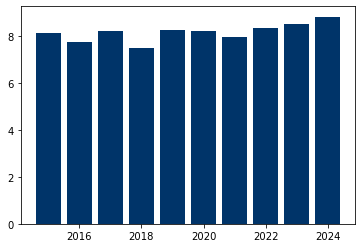

In [127]:
df['xBA per Game'] = df.estimated_ba_using_speedangle/df.game_pk
plt.bar(df.game_year,df['xBA per Game'],color='#003469')

In [128]:
df['xba_p162'] = df['xBA per Game']*162
df.sort_values(by='xba_p162',ascending=False)

game_year  estimated_ba_using_speedangle  game_pk    des  xBA per Game  \
9       2024                        689.329       78  11544      8.837551   
8       2023                       1490.878      175  26097      8.519303   
7       2022                       1496.243      179  26236      8.358899   
4       2019                       1343.164      162  24905      8.291136   
2       2017                       1334.641      162  24133      8.238525   
5       2020                        493.355       60   8683      8.222583   
0       2015                       1316.828      162  22643      8.128568   
6       2021                       1291.101      162  23823      7.969759   
1       2016                       1256.668      162  22887      7.757210   
3       2018                       1216.241      162  24616      7.507660   

      xba_p162  
9  1431.683308  
8  1380.127063  
7  1354.141709  
4  1343.164000  
2  1334.641000  
5  1332.058500  
0  1316.828000  
6  1291.101000  
1  1256.668000  
3  1216.241000

The 2024 Phillies are on pace for the highest single season xBA. They are the best offense the Phillies have had.

# What would happen if JT Realmuto could stretch out his 10-game hot streaks over 162 games?

In [129]:
df = pps.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            })
df.sort_values(by='des',ascending=False).head(1)
jt_id = 592663
df = jt = pps[pps.fielder_2 == jt_id]
results('player_name').sort_values(by='pitches',ascending=False).head(10)

player_name  pitches  plate_apps   bip   hits    hrs  walks  \
62          Nola, Aaron    13124        3380  2226  727.0  112.0  206.0   
95        Wheeler, Zack    10393        2670  1758  531.0   54.0  143.0   
84       Suárez, Ranger     6817        1776  1213  356.0   35.0  142.0   
20          Eflin, Zach     4198        1128   832  284.0   35.0   57.0   
92     Velasquez, Vince     3067         733   468  166.0   36.0   68.0   
94      Walker, Taijuan     2866         761   536  170.0   23.0   69.0   
0        Alvarado, José     2711         656   365  122.0   12.0   77.0   
26         Gibson, Kyle     2660         693   500  168.0   22.0   54.0   
6         Arrieta, Jake     2640         701   501  181.0   22.0   60.0   
86  Sánchez, Cristopher     2422         641   446  149.0   15.0   46.0   

    strikeouts     ba    obp    slg    ops   woba  
62       918.0  0.232  0.284  0.394  0.678  0.293  
95       732.0  0.214  0.264  0.330  0.595  0.262  
84       404.0  0.221  0.287  0.335  0.623  0.276  
20       226.0  0.271  0.313  0.433  0.746  0.318  
92       184.0  0.256  0.333  0.498  0.831  0.349  
94       145.0  0.249  0.322  0.409  0.731  0.320  
0        208.0  0.215  0.312  0.319  0.631  0.286  
26       132.0  0.269  0.330  0.438  0.769  0.334  
6        133.0  0.291  0.354  0.446  0.800  0.341  
86       145.0  0.253  0.309  0.383  0.692  0.303

In [130]:
df = pos_jt = jt = pos[pos.batter == jt_id]
results('game_date')

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts    ba  \
0    2019-03-28       15           4  3.0   0.0  0.0    1.0         0.0  0.00   
1    2019-03-30       12           4  2.0   2.0  1.0    0.0         2.0  0.50   
2    2019-03-31       16           4  3.0   1.0  0.0    1.0         0.0  0.50   
3    2019-04-02       22           5  4.0   0.0  0.0    0.0         1.0  0.00   
4    2019-04-03       17           5  3.0   1.0  0.0    1.0         1.0  0.25   
..          ...      ...         ...  ...   ...  ...    ...         ...   ...   
665  2024-06-01       10           4  2.0   0.0  0.0    0.0         2.0  0.00   
666  2024-06-03       17           4  3.0   0.0  0.0    0.0         1.0  0.00   
667  2024-06-04       22           5  1.0   1.0  0.0    0.0         3.0  0.25   
668  2024-06-08       26           5  4.0   1.0  0.0    0.0         1.0  0.20   
669  2024-06-09       18           5  2.0   0.0  0.0    1.0         1.0  0.00   

      obp   slg   ops   woba  
0    0.25  0.00  0.25  0.172  
1    0.50  1.25  1.75  0.702  
2    0.50  0.50  1.00  0.390  
3    0.00  0.00  0.00  0.000  
4    0.40  0.50  0.90  0.381  
..    ...   ...   ...    ...  
665  0.00  0.00  0.00  0.000  
666  0.00  0.00  0.00  0.000  
667  0.40  0.25  0.65  0.322  
668  0.20  0.20  0.40  0.177  
669  0.40  0.00  0.40  0.283  

[670 rows x 13 columns]

Edmundo Sosa L/R splits <br>


In [131]:
po24 = pos[pos.game_year == 2024]
po24.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                ,'des' : 'count'
                                                ,'game_pk' : 'nunique'
                                               }).sort_values(by='des',ascending=False)

player_name  batter   des  game_pk
11    Schwarber, Kyle  656941  1443       76
4       Harper, Bryce  547180  1225       73
13      Stott, Bryson  681082  1144       73
1   Castellanos, Nick  592206  1135       78
0          Bohm, Alec  664761  1134       76
6      Marsh, Brandon  669016   950       60
9      Realmuto, J.T.  592663   871       51
10       Rojas, Johan  679032   708       56
15       Turner, Trea  607208   683       39
12      Sosa, Edmundo  624641   614       44
7    Merrifield, Whit  593160   517       38
8     Pache, Cristian  665506   366       30
14    Stubbs, Garrett  596117   330       24
3         Dahl, David  621311   174       14
2       Clemens, Kody  665019   155       17
5     Marchán, Rafael  665561    82        6
16     Wilson, Weston  642215    13        2

In [132]:
sosa_id = 624641
df = sosa24 = po24[po24.batter == sosa_id]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      237          61   43    18    2      6          10  0.340   
1        R      377          93   60    21    3      3          26  0.241   

     obp    slg    ops   woba  
0  0.426  0.698  1.124  0.471  
1  0.290  0.368  0.658  0.292

He has good lefty splits. The Phillies faced a lot of LHPs in Turner's absence?

In [133]:
df = po24[(po24.game_date > '2024-05-03')
     &(po24.game_date < '2024-06-17')
    ]
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L     1811         467  323   107   17     43          99  0.255   
1        R     3853        1007  699   224   23     88         205  0.251   

     obp    slg    ops   woba  
0  0.325  0.455  0.780  0.339  
1  0.323  0.386  0.709  0.313

Phillies homers by count or pitch number <br>

In [134]:
df = po24[po24.events == 'home_run']
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0          Bohm, Alec        9           9    9     9    9    0.0         0.0   
1   Castellanos, Nick       11          11   11    11   11    0.0         0.0   
2       Clemens, Kody        3           3    3     3    3    0.0         0.0   
3         Dahl, David        3           3    3     3    3    0.0         0.0   
4       Harper, Bryce       19          19   19    19   19    0.0         0.0   
5     Marchán, Rafael        1           1    1     1    1    0.0         0.0   
6      Marsh, Brandon        6           6    6     6    6    0.0         0.0   
7    Merrifield, Whit        3           3    3     3    3    0.0         0.0   
8      Realmuto, J.T.        7           7    7     7    7    0.0         0.0   
9        Rojas, Johan        2           2    2     2    2    0.0         0.0   
10    Schwarber, Kyle       17          17   17    17   17    0.0         0.0   
11      Sosa, Edmundo        5           5    5     5    5    0.0         0.0   
12      Stott, Bryson        5           5    5     5    5    0.0         0.0   
13       Turner, Trea        3           3    3     3    3    0.0         0.0   

     ba  obp  slg  ops   woba  
0   1.0  1.0  4.0  5.0  2.071  
1   1.0  1.0  4.0  5.0  2.071  
2   1.0  1.0  4.0  5.0  2.071  
3   1.0  1.0  4.0  5.0  2.071  
4   1.0  1.0  4.0  5.0  2.071  
5   1.0  1.0  4.0  5.0  2.071  
6   1.0  1.0  4.0  5.0  2.071  
7   1.0  1.0  4.0  5.0  2.071  
8   1.0  1.0  4.0  5.0  2.071  
9   1.0  1.0  4.0  5.0  2.071  
10  1.0  1.0  4.0  5.0  2.071  
11  1.0  1.0  4.0  5.0  2.071  
12  1.0  1.0  4.0  5.0  2.071  
13  1.0  1.0  4.0  5.0  2.071

In [135]:
df = pos[pos.events=='home_run']
x = df.groupby('player_name',as_index=False).agg({'pitch_number' : 'mean'
                                             ,'des' : 'count'
                                             ,'batter'  : 'max'}).sort_values(by='pitch_number',ascending=False
                                                                             )
x[x.des>=20].sort_values(by='pitch_number',ascending=False).reset_index(drop=True).round(2).rename(columns={'pitch_number' : 'avg_pitches'
                                                                                                            ,'des' : 'hrs'
                                                                                                           })

player_name  avg_pitches  hrs  batter
0    Hernández, César         4.09   45  514917
1      Marsh, Brandon         3.92   24  669016
2      Galvis, Freddy         3.86   44  520471
3       Hoskins, Rhys         3.86  154  656555
4      Altherr, Aaron         3.72   36  571437
5        Miller, Brad         3.72   32  543543
6      Kingery, Scott         3.70   30  664068
7      Realmuto, J.T.         3.61  108  592663
8        Segura, Jean         3.49   43  516416
9     Schwarber, Kyle         3.46  121  656941
10    Herrera, Odúbel         3.38   78  546318
11      Rupp, Cameron         3.36   39  519237
12      Harper, Bryce         3.35  152  547180
13      Joseph, Tommy         3.33   43  571830
14      Stott, Bryson         3.29   31  681082
15    Santana, Carlos         3.25   24  467793
16         Bohm, Alec         3.20   55  664761
17    Gregorius, Didi         3.17   24  544369
18     Franco, Maikel         3.11  102  596748
19  McCutchen, Andrew         3.11   47  457705
20     Williams, Nick         2.97   31  608384
21       Howard, Ryan         2.96   48  429667
22  Castellanos, Nick         2.71   58  592206
23       Turner, Trea         2.66   32  607208

In [136]:
x.agg({'des' : ['mean','median','sum']})

des
mean      18.223404
median     5.000000
sum     1713.000000

In [137]:
pos.game_pk.nunique()

1464

In [138]:
df = hrs = pos[pos.events=='home_run']
df.groupby('pitch_number',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='pitch_number',ascending=False)

pitch_number  des  game_pk
11            14    2        2
10            11    1        1
9             10    4        4
8              9   15       14
7              8   26       25
6              7   85       83
5              6  128      123
4              5  200      179
3              4  251      221
2              3  376      323
1              2  310      275
0              1  315      277

In [139]:
df['count'] = df.balls.astype('str') + '-' + df.strikes.astype('str')
df[['balls','strikes','count']]
df.groupby(['count','pitch_number'],as_index=False).agg({'des' : 'count'}).sort_values(by='des')

count  pitch_number  des
26   3-2            11    1
5    0-2             6    1
27   3-2            14    2
4    0-2             5    2
11   1-2             7    2
25   3-2            10    4
18   2-2             9    4
17   2-2             8    6
10   1-2             6   10
24   3-2             9   11
19   3-0             4   12
3    0-2             4   13
23   3-2             8   20
16   2-2             7   26
9    1-2             5   29
15   2-2             6   34
22   3-2             7   57
2    0-2             3   69
20   3-1             5   71
21   3-2             6   83
12   2-0             3   90
14   2-2             5   98
8    1-2             4  102
13   2-1             4  124
6    1-0             2  150
1    0-1             2  160
7    1-1             3  217
0    0-0             1  315

In [140]:
df[df.pitch_number==14][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

game_date  inning     player_name  batter home_team away_team  \
51256  2017-08-22       4  Blanco, Andrés  433217       PHI       MIA   
82036  2018-06-29       5   Hoskins, Rhys  656555       PHI       WSH   

       launch_speed  launch_angle  estimated_ba_using_speedangle  
51256         103.2          24.0                            0.9  
82036         106.4          21.0                            0.8

In [141]:
df[df.pitch_number==11][['game_date','inning','player_name','batter','home_team','away_team','launch_speed','launch_angle','estimated_ba_using_speedangle']]

game_date  inning     player_name  batter home_team away_team  \
199853  2023-04-16       7  Realmuto, J.T.  592663       CIN       PHI   

        launch_speed  launch_angle  estimated_ba_using_speedangle  
199853          99.0          31.0                          0.403

# ARI (H) 621-623
## Game 1: Montgomery vs Walker
Walker stinks. Cole Hamels night. Taijuan to the IL with a blister even though he said he was "100% fine". Close game. Tough loss.

## Game 2: Henry vs Wheeler
Wheeler deals. Joey Orr family game. Offense slugs.

## Game 3: Cecconi vs Sanchez
11:35 AM start. Pitching is very good. Phillies are a good team.

In [142]:
df = mercado = pd.read_csv('mercado.csv')
pitch_mix(df).round(2)

pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
3         FF  4-Seam Fastball    439          94.99            2332.32   7.95   
2         FC           Cutter    153          88.51            2076.71   9.83   
1         CU        Curveball    126          82.94            2401.07  11.03   
0         CH         Changeup     53          88.42            1590.91   9.23   

   usage  
3   56.9  
2   19.8  
1   16.3  
0    6.9

In [143]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max','mean']
                                            ,'pfx_x' : 'mean'
                                            ,'pfx_z' : 'mean'}).round(2)

pitch_type release_speed              pfx_x pfx_z
                       min   max   mean  mean  mean
0         CH          85.9  91.7  88.42 -1.19  0.39
1         CU          79.6  86.4  82.94  0.36 -0.81
2         FC          84.6  91.6  88.51 -0.14  0.49
3         FF          91.7  97.5  94.99 -0.95  1.41

# Zack Wheeler only throws to JT
85% of the pitches he has thrown as a Philadelphia Phillie have been caught by J.T. Realmuto.

In [144]:
pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                               ,'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

player_name  pitcher    des  game_pk
111       Nola, Aaron   605400  24660      260
160     Wheeler, Zack   554430  12254      128
40        Eflin, Zach   621107  10519      137
156  Velasquez, Vince   592826  10239      133
145    Suárez, Ranger   624133   9126      158
..                ...      ...    ...      ...
14       Beato, Pedro   474039     10        1
31         Cyr, Tyler   664202      9        1
19     Blanco, Andrés   433217      8        1
56       Hall, Darick   669742      6        1
83      Knapp, Andrew   595284      4        1

[163 rows x 4 columns]

In [145]:
wheeler = pps[pps.pitcher == 554430]
wheeler2 = wheeler.groupby(['fielder_2','game_year'],as_index=False).agg({'des' : 'count'
                                                 ,'game_pk' : 'nunique'
                                                }).sort_values(by='game_year',ascending=False)

In [146]:
batters = pos.groupby('player_name',as_index=False).agg({'batter' : 'max'})

In [147]:
df = wheeler2.merge(batters,left_on='fielder_2',right_on='batter',suffixes=('','_b'))

In [148]:
final = df.groupby('player_name',as_index=False).agg({'des' : 'sum'})

In [149]:
df.agg({'des' : 'sum'})

des    12254
dtype: int64

In [150]:
final['share'] = final.des/12254
final.round(3)

player_name    des  share
0    Knapp, Andrew    915  0.075
1  Marchán, Rafael    192  0.016
2   Realmuto, J.T.  10393  0.848
3  Stubbs, Garrett    754  0.062

What about the other pitchers? Meh.

# DET (A) 624-626
## Game 1: Mize vs Nola
Nola shoves. Bryce Harper 3-run HR and 2-run 2B. Bohm 2-run HR. Triple play.

## Game 2: Skubal vs Suarez

Does Ranger throw the curveball on the edge of the zone? <br>
Well he throws it 19.9% of the time, it his second most used pitch this year. <br>
He throws it 23% of the time to RHB.

In [246]:
df = pp24
results('player_name')
ranger = df[df.player_name == 'Suárez, Ranger']
pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    422      90.929147        1929.291139   
1         CU        Curveball    266      74.703383        2197.396624   
3         FF  4-Seam Fastball    259      92.054054        2025.356275   
0         CH         Changeup    223      80.506726        1257.639810   
2         FC           Cutter    156      86.812179        2083.268456   
5         SL           Slider      8      82.800000        1893.166667   

        zone  usage  
4   8.535545   31.6  
1  11.139098   19.9  
3   8.220077   19.4  
0  11.448430   16.7  
2   8.641026   11.7  
5  10.375000    0.6

In [247]:
rhb_pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    287      90.925436        1926.619403   
1         CU        Curveball    249      74.634538        2194.959276   
3         FF  4-Seam Fastball    221      91.982353        2020.985646   
0         CH         Changeup    171      80.454971        1267.725610   
2         FC           Cutter    153      86.848366        2083.643836   
5         SL           Slider      3      82.466667        2048.666667   

        zone  usage  
4   8.595819   26.5  
1  11.124498   23.0  
3   8.271493   20.4  
0  11.409357   15.8  
2   8.633987   14.1  
5  10.333333    0.3

In [248]:
lhb_pitch_mix(ranger)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    135      90.937037        1934.929134   
0         CH         Changeup     52      80.676923        1222.446809   
3         FF  4-Seam Fastball     38      92.471053        2049.394737   
1         CU        Curveball     17      75.711765        2231.062500   
5         SL           Slider      5      83.000000        1737.666667   
2         FC           Cutter      3      84.966667        2065.000000   

        zone  usage  
4   8.407407   54.0  
0  11.576923   20.8  
3   7.921053   15.2  
1  11.352941    6.8  
5  10.400000    2.0  
2   9.000000    1.2

In [249]:
# Do I have Cristian Pache's BB% at 14.8? No. I have him at 14.9%. WTF.
df = po24
x = results('player_name')
x['bb%'] = x.walks/x.plate_apps
x

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
0          Bohm, Alec     1134         325  254  92.0   9.0   21.0   
1   Castellanos, Nick     1135         327  229  68.0  11.0   21.0   
2       Clemens, Kody      155          41   29  10.0   3.0    2.0   
3         Dahl, David      174          43   32  10.0   3.0    2.0   
4       Harper, Bryce     1225         314  208  83.0  19.0   38.0   
5     Marchán, Rafael       82          23   19   6.0   1.0    1.0   
6      Marsh, Brandon      950         217  124  48.0   6.0   24.0   
7    Merrifield, Whit      517         141  112  24.0   3.0   13.0   
8     Pache, Cristian      366          87   47  15.0   0.0   13.0   
9      Realmuto, J.T.      871         224  148  54.0   7.0   12.0   
10       Rojas, Johan      708         196  156  43.0   2.0    7.0   
11    Schwarber, Kyle     1443         352  197  72.0  17.0   55.0   
12      Sosa, Edmundo      614         154  103  39.0   5.0    9.0   
13      Stott, Bryson     1144         284  203  59.0   5.0   32.0   
14    Stubbs, Garrett      330          87   54  16.0   0.0    7.0   
15       Turner, Trea      683         179  135  55.0   3.0   11.0   
16     Wilson, Weston       13           4    4   0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba       bb%  
0         44.0  0.312  0.363  0.505  0.868  0.374  0.064615  
1         74.0  0.226  0.281  0.389  0.670  0.294  0.064220  
2         10.0  0.256  0.293  0.615  0.908  0.382  0.048780  
3          9.0  0.244  0.279  0.512  0.791  0.339  0.046512  
4         68.0  0.303  0.385  0.577  0.962  0.411  0.121019  
5          3.0  0.273  0.304  0.455  0.759  0.329  0.043478  
6         68.0  0.253  0.332  0.395  0.727  0.321  0.110599  
7         14.0  0.190  0.270  0.294  0.563  0.256  0.092199  
8         27.0  0.205  0.322  0.274  0.596  0.278  0.149425  
9         60.0  0.260  0.308  0.409  0.717  0.314  0.053571  
10        31.0  0.235  0.265  0.295  0.560  0.248  0.035714  
11        97.0  0.249  0.369  0.453  0.823  0.361  0.156250  
12        36.0  0.279  0.344  0.493  0.837  0.363  0.058442  
13        46.0  0.242  0.331  0.361  0.692  0.309  0.112676  
14        26.0  0.200  0.264  0.212  0.477  0.223  0.080460  
15        30.0  0.331  0.380  0.452  0.832  0.366  0.061453  
16         0.0  0.000  0.000  0.000  0.000  0.000  0.000000

In [250]:
x[x.pitches == 366]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
8  Pache, Cristian      366          87   47  15.0  0.0   13.0        27.0   

      ba    obp    slg    ops   woba       bb%  
8  0.205  0.322  0.274  0.596  0.278  0.149425

**Well I am correct according to baseball savant Statcast Search**

Marchan total launch_speed

In [251]:
df[df.player_name == x[x.pitches == 82].player_name.unique()[0]].agg({'launch_speed' : 'sum'})

launch_speed    2657.0
dtype: float64

In [255]:
ls = df[df.type=='X'].groupby(['player_name','batter'],as_index=False).agg({#'batter' : 'max'
                                              #,'des' : 'count'
                                              'launch_speed' : ['min','mean','max','sum','count']
                                                           }).round(1
                                                                   ).sort_values(by=('launch_speed', 'sum'),ascending=False)
ls

player_name  batter launch_speed                            
                                       min  mean    max      sum count
0          Bohm, Alec  664761         43.7  90.7  110.8  22857.8   252
1   Castellanos, Nick  592206         41.0  87.8  113.1  20023.0   228
4       Harper, Bryce  547180         34.2  91.0  112.5  18844.3   207
11    Schwarber, Kyle  656941         52.5  93.4  115.2  18404.3   197
13      Stott, Bryson  681082         28.1  86.0  108.0  17379.5   202
9      Realmuto, J.T.  592663         35.8  89.4  109.2  13140.0   147
10       Rojas, Johan  679032         28.0  82.2  110.4  12830.6   156
15       Turner, Trea  607208         55.8  90.6  110.6  12235.7   135
6      Marsh, Brandon  669016         57.6  92.2  110.1  11428.2   124
7    Merrifield, Whit  593160         25.8  83.0  103.5   9212.1   111
12      Sosa, Edmundo  624641         22.8  88.1  111.9   8981.9   102
8     Pache, Cristian  665506         41.1  91.6  109.2   4305.0    47
14    Stubbs, Garrett  596117         24.1  76.0   98.9   4101.8    54
3         Dahl, David  621311         56.7  86.6  105.4   2772.2    32
2       Clemens, Kody  665019         38.1  90.4  108.4   2621.6    29
5     Marchán, Rafael  665561         55.5  84.8  103.3   1610.8    19
16     Wilson, Weston  642215         79.5  92.6  105.5    370.4     4

In [204]:
df = po24[po24.p_throws == 'L']
x = po_lhp = results('player_name')
x.sort_values(by='ba',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
11    Schwarber, Kyle      567         140   82  40.0  7.0   22.0        35.0   
12      Sosa, Edmundo      237          61   43  18.0  2.0    6.0        10.0   
15       Turner, Trea      293          71   50  21.0  1.0    5.0        14.0   
4       Harper, Bryce      495         122   74  32.0  7.0   16.0        32.0   
9      Realmuto, J.T.      309          78   53  22.0  3.0    5.0        20.0   
0          Bohm, Alec      356         101   85  25.0  3.0    6.0        10.0   
13      Stott, Bryson      298          76   50  16.0  1.0    9.0        16.0   
1   Castellanos, Nick      320          87   58  19.0  6.0    5.0        24.0   
8     Pache, Cristian      245          56   29  10.0  0.0   11.0        16.0   
10       Rojas, Johan      178          49   35  10.0  0.0    1.0        12.0   
2       Clemens, Kody       23           6    4   1.0  0.0    1.0         1.0   
7    Merrifield, Whit      233          65   56  12.0  3.0    3.0         5.0   
14    Stubbs, Garrett      115          30   18   5.0  0.0    3.0         9.0   
5     Marchán, Rafael       16           6    5   1.0  0.0    0.0         1.0   
6      Marsh, Brandon      208          49   22   6.0  0.0    5.0        22.0   
3         Dahl, David       25           5    3   0.0  0.0    0.0         2.0   
16     Wilson, Weston        5           2    2   0.0  0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
11  0.342  0.450  0.547  0.997  0.435  
12  0.340  0.426  0.698  1.124  0.471  
15  0.323  0.380  0.446  0.826  0.364  
4   0.305  0.393  0.590  0.984  0.419  
9   0.301  0.346  0.479  0.826  0.359  
0   0.263  0.307  0.442  0.749  0.326  
13  0.242  0.342  0.318  0.660  0.304  
1   0.235  0.276  0.469  0.745  0.319  
8   0.222  0.375  0.333  0.708  0.327  
10  0.217  0.245  0.239  0.484  0.218  
2   0.200  0.333  0.400  0.733  0.326  
7   0.194  0.231  0.371  0.602  0.262  
14  0.185  0.267  0.185  0.452  0.217  
5   0.167  0.167  0.167  0.333  0.148  
6   0.143  0.224  0.167  0.391  0.187  
3   0.000  0.000  0.000  0.000  0.000  
16  0.000  0.000  0.000  0.000  0.000

# How Tall is Michael Mercado???

In [207]:
df = pd.concat([mercado, po24[po24.player_name == 'Mercado, Michael']])
df.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

In [208]:
# Doing baseball stuff makes me think about work.
# Ok either way, let's focus.

# Ranger is not getting ahead in the count

# Inning Level Aggregate

In [219]:
def summarize_inning(df):
    x = df.groupby(['game_pk','inning'],as_index=False
          ).agg({'launch_speed' : 'sum'
                 ,'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'estimated_ba_using_speedangle' : 'sum'
                 ,'estimated_woba_using_speedangle' : 'sum'
                 ,'inning_topbot' : 'max'
                 ,'home_team' : 'max'
                 ,'post_home_score' : 'max'
                 ,'home_score' : 'min'
                 ,'away_team' : 'max'
                 ,'post_away_score' : 'max'
                 ,'away_score' : 'max'
                 ,'game_date' : 'max'
                 #,'game_year' : 'max'
                 # ,'fielder_2' : 'max'
                 # ,'fielder_3' : 'max'
                 # ,'fielder_4' : 'max'
                 # ,'fielder_5' : 'max'
                 # ,'fielder_6' : 'max'
                 # ,'fielder_7' : 'max'
                 # ,'fielder_8' : 'max'
                 # ,'fielder_9' : 'max'
                 # ,'pitcher' : 'max'
                })
    return x

# What is a typical sum of launch_speed for an inning, fielders in an inning.
No more double switches really.

In [220]:
df = pp24
df = pp24_innings = summarize_inning(df)
df[df.game_date == df.game_date.max()].round(3) # This finds me the Phillies Most Recent GAme

game_pk  inning  launch_speed  des  at_bat_number  \
583   746458       1         233.9   14              3   
584   746458       2         398.9   15              4   
585   746458       3         218.5    7              3   
586   746458       4         235.7   12              4   
587   746458       5         705.7   25              5   
588   746458       6         339.7   12              4   
589   746458       7         226.8    5              3   
590   746458       8         420.6   15              3   
591   746458       9         453.6   18              4   

     estimated_ba_using_speedangle  estimated_woba_using_speedangle  \
583                          0.077                            0.081   
584                          0.175                            0.868   
585                          1.383                            1.339   
586                          1.388                            1.274   
587                          0.753                            0.660   
588                          0.938                            0.902   
589                          0.880                            0.798   
590                          0.823                            1.109   
591                          1.175                            1.091   

    inning_topbot home_team  post_home_score  home_score away_team  \
583           Bot       DET                0           0       PHI   
584           Bot       DET                0           0       PHI   
585           Bot       DET                0           0       PHI   
586           Bot       DET                0           0       PHI   
587           Bot       DET                1           0       PHI   
588           Bot       DET                1           1       PHI   
589           Bot       DET                1           1       PHI   
590           Bot       DET                1           1       PHI   
591           Bot       DET                1           1       PHI   

     post_away_score  away_score   game_date  
583                4           4  2024-06-24  
584                4           4  2024-06-24  
585                4           4  2024-06-24  
586                4           4  2024-06-24  
587                4           4  2024-06-24  
588                7           7  2024-06-24  
589                7           7  2024-06-24  
590                8           8  2024-06-24  
591                8           8  2024-06-24

# Game Level Aggregate by Inning
**AKA a Box Score??**

In [230]:
def box_score(df):
    bs = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
               ],as_index=False).agg({'launch_speed' : 'max' # Max or Sum? Por que no los dos? Because I can't fucking do thi?
                          ,'post_home_score' : 'max'
                          ,'post_away_score' : 'max'
                          ,'inning' : 'nunique'
                         })
    return bs

wtf did the Phillies do?

In [235]:
df = pp24 # Phillies Pitchers in 2024
df = pp24_innings = summarize_inning(df) # Summarized at the inning level
games = box_score(df) # Summarized at the Game Level
x = games.sort_values(by='launch_speed').head(10) # Give me the games with the bottom 10 opponent launch speed summed
# Then merge that back to the original dataset to reduce it to the top 10 games
df = pp24[pp24.game_pk.isin(x.game_pk.unique().tolist())] # Why merge when you can filter?
df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
            ,'player_name'
            ,'pitcher'
            ,'fielder_2'
            ,'fielder_3'
            ,'fielder_4'
            ,'fielder_5'
            ,'fielder_6'
            ,'fielder_7'
            ,'fielder_8'
            ,'fielder_9'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'at_bat_number' : 'nunique'
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'max'
                 ,'release_spin_rate' : 'max'
                 ,'launch_speed' : 'sum'
                }).sort_values(by='launch_speed')


game_pk   game_date home_team away_team            player_name  pitcher  \
22   746723  2024-04-22       CIN       PHI          Hoffman, Jeff   656546   
14   745597  2024-04-15       PHI       COL         Alvarado, José   621237   
16   745597  2024-04-15       PHI       COL          Hoffman, Jeff   656546   
19   746236  2024-04-29       LAA       PHI       Kerkering, Orion   689147   
5    745585  2024-05-06       PHI        SF       Kerkering, Orion   689147   
26   747025  2024-06-14       BAL       PHI  Domínguez, Seranthony   622554   
27   747025  2024-06-14       BAL       PHI          Hoffman, Jeff   656546   
0    745425  2024-04-27        SD       PHI          Hoffman, Jeff   656546   
23   746723  2024-04-22       CIN       PHI          Soto, Gregory   642397   
20   746236  2024-04-29       LAA       PHI          Soto, Gregory   642397   
8    745588  2024-04-21       PHI       CWS          Marte, Yunior   628708   
15   745597  2024-04-15       PHI       COL  Domínguez, Seranthony   622554   
6    745585  2024-05-06       PHI        SF           Strahm, Matt   621381   
28   747025  2024-06-14       BAL       PHI       Kerkering, Orion   689147   
10   745592  2024-04-19       PHI       CWS       Kerkering, Orion   689147   
25   747025  2024-06-14       BAL       PHI         Alvarado, José   621237   
2    745567  2024-06-17       PHI        SD         Alvarado, José   621237   
3    745567  2024-06-17       PHI        SD             Ruiz, José   614179   
29   747025  2024-06-14       BAL       PHI           Strahm, Matt   621381   
11   745592  2024-04-19       PHI       CWS           Strahm, Matt   621381   
18   746236  2024-04-29       LAA       PHI  Domínguez, Seranthony   622554   
24   746723  2024-04-22       CIN       PHI         Suárez, Ranger   624133   
7    745585  2024-05-06       PHI        SF          Wheeler, Zack   554430   
21   746236  2024-04-29       LAA       PHI    Sánchez, Cristopher   650911   
12   745592  2024-04-19       PHI       CWS      Turnbull, Spencer   605513   
30   747025  2024-06-14       BAL       PHI         Suárez, Ranger   624133   
17   745597  2024-04-15       PHI       COL            Nola, Aaron   605400   
9    745588  2024-04-21       PHI       CWS            Nola, Aaron   605400   
4    745567  2024-06-17       PHI        SD    Sánchez, Cristopher   650911   
1    745425  2024-04-27        SD       PHI         Suárez, Ranger   624133   
13   745593  2024-04-16       PHI       COL         Suárez, Ranger   624133   

    fielder_2  fielder_3  fielder_4  fielder_5  fielder_6  fielder_7  \
22     592663     665019     681082     664761     607208     669016   
14     592663     547180     681082     593160     607208     669016   
16     592663     547180     681082     593160     607208     669016   
19     596117     547180     681082     664761     607208     669016   
5      592663     547180     593160     664761     681082     669016   
26     665561     547180     681082     664761     624641     665506   
27     665561     547180     681082     664761     624641     621311   
0      592663     547180     681082     664761     607208     593160   
23     592663     665019     681082     664761     607208     669016   
20     596117     547180     681082     664761     607208     669016   
8      592663     547180     681082     664761     607208     669016   
15     592663     547180     681082     593160     607208     669016   
6      592663     547180     593160     664761     681082     669016   
28     665561     547180     681082     664761     624641     665506   
10     592663     547180     624641     664761     607208     593160   
25     665561     547180     681082     664761     624641     621311   
2      665561     547180     681082     664761     607208     669016   
3      665561     664761     593160     624641     607208     669016   
29     665561     547180     681082     664761     624641     621311   
11     592663     547180     624641

# Ideas
## These are usually pretty good

## Get to Fielders by filtering to hit location to the position of the player, then go to individual players

In [237]:
df = pp24
df.groupby('hit_location',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by='des',ascending=False)

hit_location  des  game_pk
1           2.0  730       78
7           8.0  319       77
6           7.0  297       77
8           9.0  265       76
4           5.0  250       74
3           4.0  246       76
5           6.0  246       76
2           3.0  148       68
0           1.0   71       42

In [245]:
df = pps
x = df.groupby(['hit_location'
           ,'game_year']
           ,as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              }).sort_values(by=['game_year','des'],ascending=False)
x.groupby('hit_location',as_index=False).agg({'des' : 'sum'}).sort_values(by='des',ascending=False)

hit_location    des
1           2.0  12982
7           8.0   6578
6           7.0   5741
8           9.0   5718
5           6.0   4798
3           4.0   4483
4           5.0   3976
2           3.0   2690
0           1.0   1666

# Group By Objects in Pandas

In [262]:
df = pps
level = 'player_name'
g = df.groupby(level)
g

In [267]:
g.max('release_speed').sort_values(by='release_speed',ascending=False).head(10)

release_speed  release_pos_x  release_pos_z  batter  \
player_name                                                                  
Alvarado, José                 102.5           1.85           7.11  808982   
Giles, Ken                     102.0          -1.74           7.05  656941   
Soto, Gregory                  101.7           2.64           6.19  808982   
Coonrod, Sam                   101.2          -0.83           6.26  677954   
Domínguez, Seranthony          101.1          -1.08           5.95  808982   
Wheeler, Zack                  100.3          -1.13           6.01  808982   
Marte, Yunior                  100.2          -1.11           5.99  702358   
Diekman, Jake                  100.2           4.23           6.19  608700   
García, Luis                   100.0          -1.97           6.78  665742   
Kerkering, Orion                99.8          -0.77           6.13  808982   

                       pitcher  spin_dir  spin_rate_deprecated  \
player_name                                                      
Alvarado, José          621237       NaN                   NaN   
Giles, Ken              571704       NaN                   NaN   
Soto, Gregory           642397       NaN                   NaN   
Coonrod, Sam            656322       NaN                   NaN   
Domínguez, Seranthony   622554       NaN                   NaN   
Wheeler, Zack           554430       NaN                   NaN   
Marte, Yunior           628708       NaN                   NaN   
Diekman, Jake           518617       NaN                   NaN   
García, Luis            472610       NaN                   NaN   
Kerkering, Orion        689147       NaN                   NaN   

                       break_angle_deprecated  break_length_deprecated  zone  \
player_name                                                                    
Alvarado, José                            NaN                      NaN  14.0   
Giles, Ken                                NaN                      NaN  14.0   
Soto, Gregory                             NaN                      NaN  14.0   
Coonrod, Sam                              NaN                      NaN  14.0   
Domínguez, Seranthony                     NaN                      NaN  14.0   
Wheeler, Zack                             NaN                      NaN  14.0   
Marte, Yunior                             NaN                      NaN  14.0   
Diekman, Jake                             NaN                      NaN  14.0   
García, Luis                              NaN                      NaN  14.0   
Kerkering, Orion                          NaN                      NaN  14.0   

                       ...   wHBP    w1B    w2B    w3B    wHR  runSB  runCS  \
player_name            ...                                                    
Alvarado, José         ...  0.726  0.887  1.264  1.604  2.072    0.2 -0.397   
Giles, Ken             ...  0.718  0.881  1.256  1.594  2.065    0.2 -0.392   
Soto, Gregory          ...  0.726  0.887  1.264  1.604  2.071    0.2 -0.403   
Coonrod, Sam           ...  0.722  0.884  1.261  1.601  2.072    0.2 -0.397   
Domínguez, Seranthony  ...  0.726  0.887  1.264  1.604  2.072    0.2 -0.397   
Wheeler, Zack          ...  0.728  0.887  1.264  1.604  2.072    0.2 -0.397   
Marte, Yunior          ...  0.726  0.887  1.264  1.604  2.071    0.2 -0.403   
Diekman, Jake          ...  0.718  0.881  1.256  1.594  2.065    0.2 -0.392   
García, Luis           ...  0.723  0.881  1.256  1.594  2.065    0.2 -0.392   
Kerkering, Orion       ...  0.726  0.887  1.264  1.604  2.071    0.2 -0.403   

                        R/PA     R/W   cFIP  
player_name                                  
Alvarado, José         0.122  10.028  3.255  
Giles, Ken             0.112   9.421  3.134  
Soto, Gregory          0.122  10.028  3.255  
Coonrod, Sam           0.121   9.973  3.170  
Domínguez, Seranthony  0.126  10.296  3.255  
Wheeler, Zack          0.125  10.282  3.255  
Marte, Yunior  

# I get baked to relax and take my mind off of learning not to do more learning.

# March and April 2024

## Run Functions

In [55]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [56]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




Length of nphl dataframe: 311816
Length of phils_sc dataframe: 416430


# Braves (H) 329-331
It is opening weekend in South Philadelphia as the Phillies embark on the new season by hosting the Atlanta Braves. Opening Day was rained out yesterday, so we are getting started on Friday afternoon. It is a big series for two teams expected to compete for the National League East throughout the season before both hoping to claim a World Series come October.

Let's not fuck around and get right into the first game.

### Game 1: Strider vs Wheeler
PHI Lineup: <br>
Schwarber 0 <br>
Turner 6 <br>
Harper 3 <br>
Realmuto 2 <br>
Bohm 5 <br>
Stott 4 <br>
Castellanos 9 <br>
Marsh 7 <br>
Rojas 8 <br>

ATL Lineup: <br>
Acuna 9 <br>
Albies 4 <br>
Riley 5 <br>
Olson 3 <br>
Ozuna 0 <br>
Harris II 8 <br>
Murphy 2 <br>
Arcia 6 <br>
Kelenic 7 <br>


In [3]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des',ascending=False)

player_name  pitcher   des
25          Wheeler, Zack   554430  3557
15            Nola, Aaron   605400  3431
24        Walker, Taijuan   592836  2837
20         Suárez, Ranger   624133  2289
21    Sánchez, Cristopher   650911  1498
19           Strahm, Matt   621381  1459
10         Kimbrel, Craig   518886  1253
18          Soto, Gregory   642397  1025
8           Hoffman, Jeff   656546   972
5   Domínguez, Seranthony   622554   948
0          Alvarado, José   621237   855
11      Lorenzen, Michael   547179   811
12          Marte, Yunior   628708   700
4            Covey, Dylan   592229   672
6          Falter, Bailey   663559   661
23        Vasquez, Andrew   607755   653
2         Brogdon, Connor   641401   544
1        Bellatti, Andrew   571479   456
16         Ortiz, Luis F.   656814   299
9        Kerkering, Orion   689147   164
13        Moore, McKinley   686842    86
17    Plassmeyer, Michael   674681    85
14           Nelson, Nick   656793    69
7          Harrison, Josh   543281    44
3           Clemens, Kody   665019    41
22          Uelmen, Erich   657272    33

In [4]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

player_name  batter  game_pk
14    Schwarber, Kyle  656941      173
1   Castellanos, Nick  592206      170
18       Turner, Trea  607208      168
16      Stott, Bryson  681082      164
0          Bohm, Alec  664761      158
12     Realmuto, J.T.  592663      148
10     Marsh, Brandon  669016      142
8       Harper, Bryce  547180      139
15      Sosa, Edmundo  624641       90
3          Cave, Jake  595909       64
13       Rojas, Johan  679032       58
4       Clemens, Kody  665019       47
11    Pache, Cristian  665506       40
9      Harrison, Josh  543281       39
17    Stubbs, Garrett  596117       38
7        Hall, Darick  669742       18
6     Guthrie, Dalton  656495       13
2     Castro, Rodolfo  666801       13
5         Ellis, Drew  656403       10
19     Wilson, Weston  642215        8

In [5]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             ,669016 # Marsh
             ,679032 # Rojas
            ]
wheeler_id = 554430

In [6]:
pps[(pps.home_team == 'ATL')
    &(pps.game_year == 2023)
   ].groupby('batter',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

batter  des
8   663586  165
5   621566  162
6   645277  160
1   542303  141
3   606115  137
7   660670  127
11  671739  120
2   592696  103
9   669221   92
4   607680   44
0   518595   36
10  670032    5

In [7]:
braves_ids = [656941 # Acuna
             ,607208 # Albies
             ,547180 # Riley
             ,592663 # Olson
             ,664761 # Ozuna
             ,681082 # Harris II
             ,592206 # Murphy
             ,669016 # Arcia
             ,679032 # Kelenic
            ]
strider_id = 675911

In [8]:
pos[pos.pitcher == strider_id].groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0                      double    7
1                 double_play    3
2                 field_error    1
3                   field_out   81
4         fielders_choice_out    1
5                   force_out    3
6   grounded_into_double_play    2
7                hit_by_pitch    2
8                    home_run    9
9                      single   24
10                  strikeout   91
11                       walk   15

In [9]:
phils_vs_strider = phils_sc[phils_sc.batter.isin(phils_ids)
                            &(phils_sc.pitcher == strider_id)
                           ]

In [10]:
df = phils_vs_strider
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec       76          25   14     4  1.0    0.0        11.0   
1  Castellanos, Nick       91          24   15     5  2.0    1.0         8.0   
2      Harper, Bryce      111          22   13     6  2.0    3.0         6.0   
3     Marsh, Brandon       87          18    7     5  1.0    3.0         8.0   
4     Realmuto, J.T.       95          23   10     3  0.0    2.0        10.0   
5       Rojas, Johan       38          10    5     1  0.0    0.0         5.0   
6    Schwarber, Kyle      114          29   12     5  1.0    4.0        13.0   
7      Stott, Bryson      122          26   18     5  0.0    0.0         8.0   
8       Turner, Trea       59          18   17     3  1.0    0.0         0.0   

      ba    obp    slg    ops   woba  
0  0.160  0.160  0.280  0.440  0.189  
1  0.217  0.250  0.478  0.728  0.306  
2  0.316  0.409  0.632  1.041  0.438  
3  0.333  0.444  0.600  1.044  0.443  
4  0.150  0.261  0.200  0.461  0.222  
5  0.100  0.100  0.100  0.200  0.088  
6  0.200  0.310  0.360  0.670  0.301  
7  0.192  0.192  0.269  0.462  0.198  
8  0.176  0.222  0.412  0.634  0.270

In [11]:
pitch_mix(pos[pos.pitcher==strider_id]).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
1         FF  4-Seam Fastball    651           97.9             2386.5   7.4   
2         SL           Slider    291           85.9             2375.5  11.1   
0         CH         Changeup     46           87.3             2259.4  10.7   

   usage  
1   65.9  
2   29.5  
0    4.7

In [12]:
df[df.pitch_type == 'FF'].agg({'release_speed' : ['mean','std']
                               ,'release_spin_rate' : ['mean','std']
                              }).round(1)

release_speed  release_spin_rate
mean           97.9             2389.2
std             1.1               76.0

### Game 2: Fried vs Nola
Well the first inning was just absurd. Acuna reached on an error by Bohm (I missed it) then Albies donged. <br>
Phillies loaded the bases just for Castellanos to stare at a Zone 5 FF that was called a ball by Bruce Dreckman. He walked (RBI) then Stott shoots one the other way to take the lead.

In [13]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
nola_id = 605400

In [14]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']

In [15]:
df = pd.concat([pos,whit])
df = df[(df.batter.isin(phils_ids))
   &(df.p_throws == 'L')
  ]

In [16]:
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps     bip   hits   hrs  walks  strikeouts  \
6          FF     6309      1537.0  1013.0  366.0  62.0  180.0       326.0   
13         SL     3054       739.0   446.0  171.0  29.0   57.0       223.0   
12         SI     3002       819.0   607.0  224.0  26.0   78.0       125.0   
0          CH     2392       701.0   546.0  170.0  19.0   35.0       117.0   
2          CU     1506       371.0   238.0   77.0   9.0   24.0       100.0   
5          FC     1161       300.0   227.0   94.0  12.0   23.0        49.0   
14         ST      446       107.0    59.0   15.0   3.0    8.0        40.0   
9          KC      314        91.0    61.0   27.0   3.0    3.0        27.0   
15         SV       81        14.0    11.0    7.0   3.0    1.0         2.0   
7          FS       73        24.0    11.0    2.0   0.0    2.0        11.0   
3          EP        3         2.0     2.0    1.0   0.0    0.0         0.0   
4          FA        3         0.0     0.0    0.0   0.0    0.0         0.0   
11         SC        3         0.0     0.0    0.0   0.0    0.0         0.0   
1          CS        1         1.0     1.0    1.0   0.0    0.0         0.0   
8          IN        1         1.0     0.0    0.0   0.0    0.0         0.0   
10         PO        1         0.0     0.0    0.0   0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
6   0.276  0.364  0.499  0.863  0.272  
13  0.258  0.325  0.461  0.786  0.288  
12  0.308  0.380  0.490  0.869  0.283  
0   0.259  0.297  0.401  0.698  0.218  
2   0.230  0.291  0.370  0.661  0.224  
5   0.342  0.393  0.564  0.957  0.280  
14  0.153  0.215  0.276  0.490  0.159  
9   0.314  0.330  0.488  0.818  0.258  
15  0.538  0.571  1.462  2.033  0.817  
7   0.091  0.167  0.136  0.303  0.110  
3   0.500  0.500  0.500  1.000  0.442  
4     NaN    NaN    NaN    NaN    NaN  
11    NaN    NaN    NaN    NaN    NaN  
1   1.000  1.000  2.000  3.000  0.000  
8     NaN  0.000    NaN    NaN  0.000  
10    NaN    NaN    NaN    NaN    NaN

How the fuck does Jesse Chavez keep leaving the Braves just to come back?

In [17]:
# How can I identify games in which Jesse Chavez pitched against the Phils?
# I need to pull opposing team pitcher ids.
# An easy way to do that would be to pull every pitch they have ever thrown, yeah that would work but it gets pretty big and creates dupes.

In [18]:
# There has to be a better way.
# Ok, I can use Statcast search to find at bats for a single player against Jesse Chavez, then go find that at bat in the pos data.

In [19]:
# Maybe I could look at descriptions.

In [20]:
pps[(pps.away_team == 'ATL')
    &(pps.pitcher == nola_id)
    &(pps.des.str.startswith('Ronald'))
   ].groupby('des',as_index=False).agg({'batter' : 'max'})

des  batter
0            Ronald Acuna Jr.  called out on strikes.  660670
1   Ronald Acuna Jr.  doubles (1) on a sharp groun...  660670
2   Ronald Acuna Jr.  flies out to center fielder ...  660670
3   Ronald Acuna Jr.  grounds out softly, first ba...  660670
4   Ronald Acuna Jr.  grounds out to first baseman...  660670
5   Ronald Acuna Jr.  grounds out, shortstop Didi ...  660670
6   Ronald Acuna Jr.  grounds out, shortstop Trea ...  660670
7   Ronald Acuna Jr.  grounds out, third baseman A...  660670
8   Ronald Acuna Jr.  reaches on a throwing error ...  660670
9   Ronald Acuna Jr.  singles on a ground ball to ...  660670
10  Ronald Acuna Jr.  singles on a sharp ground ba...  660670
11       Ronald Acuna Jr.  strikes out on a foul tip.  660670
12  Ronald Acuna doubles (1) on a sharp ground bal...  660670
13  Ronald Acuna doubles (10) on a line drive to l...  660670
14  Ronald Acuna doubles (2) on a sharp ground bal...  660670
15  Ronald Acuna flies out to center fielder Adam ...  660670
16  Ronald Acuna flies out to left fielder Andrew ...  660670
17  Ronald Acuna flies out to right fielder Bryce ...  660670
18  Ronald Acuna grounds out softly, third baseman...  660670
19  Ronald Acuna grounds out, third baseman Maikel...  660670
20  Ronald Acuna homers (18) on a fly ball to left...  660670
21  Ronald Acuna homers (38) on a fly ball to left...  660670
22  Ronald Acuna lines out to left fielder Jay Bruce.  660670
23  Ronald Acuna singles on a ground ball to cente...  660670
24  Ronald Acuna singles on a line drive to center...  660670
25  Ronald Acuna singles on a line drive to center...  660670
26  Ronald Acuna singles on a line drive to left f...  660670
27  Ronald Acuna strikes out swinging, catcher And...  660670
28                 Ronald Acuna strikes out swinging.  660670
29                                Ronald Acuna walks.  660670

In [21]:
pos[pos.game_date == '2023-09-20'].groupby('inning',as_index=False).agg({'pitcher' : 'nunique'})

inning  pitcher
0       1        1
1       2        1
2       3        1
3       4        2
4       5        1
5       6        1
6       7        1
7       8        1
8       9        1
9      10        1

In [22]:
pos[pos.game_date == '2023-09-20'].groupby(['game_pk','inning'],as_index=False).agg({'pitcher' : 'max'})

game_pk  inning  pitcher
0   716509       1   693821
1   716509       2   693821
2   716509       3   693821
3   716509       4   693821
4   716509       5   445926
5   716509       6   445926
6   716509       7   543272
7   716509       8   572955
8   716509       9   628452
9   716509      10   621345

In [23]:
pos[(pos.pitcher == 445926)
    &(pos.player_name == 'Marsh, Brandon')
    &(pos.game_date == '2023-09-20')
   ].groupby('des',as_index=False).agg({'home_team' : 'count'})
# So by the time I determined what Jesse Chavez's pitcher ID is, he is going to be removed from the game

des  home_team
0  Brandon Marsh walks.          5

In [24]:
df[df.game_date == '2023-09-20'].groupby('pitcher',as_index=False).agg({'des' : 'count'})

pitcher  des
0   543272   10
1   621345   21

In [25]:
df = pd.concat([pos[pos.batter.isin(phils_ids)],whit])
chavez = df[df.pitcher == 445926]

In [26]:
mcgs('player_name',chavez)[['player_name','pitches','plate_apps','hits','hrs','strikeouts','obp','slg']].round(3)

player_name  pitches  plate_apps  hits  hrs  strikeouts    obp    slg
0         Bohm, Alec       20           6   2.0  0.0         3.0  0.333  0.333
1  Castellanos, Nick       25           8   3.0  0.0         1.0  0.375  0.500
2      Harper, Bryce       14           5   3.0  0.0         0.0  0.600  0.800
3   Merrifield, Whit       31           8   2.0  0.0         1.0  0.375  0.286
4     Realmuto, J.T.       31           6   1.0  1.0         2.0  0.167  0.667
5    Schwarber, Kyle       13           4   0.0  0.0         1.0  0.250  0.000
6      Stott, Bryson       26           6   1.0  0.0         1.0  0.167  0.167
7       Turner, Trea        2           1   0.0  0.0         0.0  0.000  0.000

In [27]:
chavez.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                                 ,'release_spin_rate' : ['count','min','max','mean','std']
                                                }).round(1)

pitch_type release_speed                        release_spin_rate          \
                     count   min   max  mean  std             count     min   
0         CH            20  84.0  86.9  85.6  0.9                20  1566.0   
1         CU             4  75.3  77.0  76.2  0.8                 4  2522.0   
2         FC            82  86.2  90.6  89.0  1.1                82  1987.0   
3         FF            10  89.6  92.6  90.8  1.2                10  2184.0   
4         SI            42  88.5  92.9  91.4  1.1                42  1815.0   
5         SL             4  85.6  86.9  86.3  0.6                 4  2226.0   

                          
      max    mean    std  
0  2159.0  1855.4  146.0  
1  2656.0  2608.5   60.3  
2  2467.0  2246.0   83.9  
3  2443.0  2308.4  110.4  
4  2283.0  2031.6  106.1  
5  2296.0  2275.0   32.8

In [28]:
mcgs('player_name',df[(df.p_throws == 'R')
   &(df.pitch_type == 'FC')
   &(df.release_speed >= 89-1.1)
   &(df.release_speed <= 89+1.1)
  ])[['player_name','pitches','plate_apps','hits','hrs','ba','ops']].round(3)

player_name  pitches  plate_apps  hits  hrs     ba    ops
0         Bohm, Alec      120          31   3.0  0.0  0.107  0.336
1  Castellanos, Nick       74          21   8.0  0.0  0.400  0.929
2      Harper, Bryce      152          37  14.0  3.0  0.438  1.420
3   Merrifield, Whit      272          62  14.0  0.0  0.241  0.549
4     Realmuto, J.T.      161          37   7.0  1.0  0.200  0.529
5       Rojas, Johan        6           1   0.0  0.0  0.000  0.000
6    Schwarber, Kyle      141          30   7.0  1.0  0.259  0.852
7      Stott, Bryson      111          29   6.0  0.0  0.231  0.584
8       Turner, Trea       41           7   1.0  0.0  0.167  0.619

In [29]:
# so how do I figure out Matzek

In [30]:
pos[(pos.batter == phils_ids[0])
    &(pos.home_team == 'ATL')
    &(pos.p_throws == 'L')
   ].groupby('pitcher',as_index=False).agg({'des' : 'count'
                                            ,'game_date' : 'max'}).sort_values(by='des',ascending=False)

pitcher  des   game_date
3   608331   59  2023-10-09
4   621345   29  2023-10-09
5   656353   17  2022-05-23
6   669276   16  2022-10-11
7   689266   16  2023-05-25
2   554431    9  2022-09-18
0   476595    8  2023-09-18
8   694363    7  2023-05-26
1   543272    4  2023-09-20

In [31]:
# Ok so he has not pitched since 1-/5/2022

Fuck this shit, let's look ahead to Game 3.

### Game 3: Sale vs Suarez

In [32]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
ranger_id = 624133

In [33]:
pos[(pos.game_year == 2017)
    &(pos.away_team == 'BOS')
   ].groupby(['game_date','pitcher'],as_index=False).agg({'inning' : 'nunique'
                                                          ,'des' : 'count'
                                                          ,'game_pk' : 'nunique'})
# I could have sniped Chris Sale's start against the Phillies in 2017 occurring on June 15, 2017. But I did not, instead I sleuthed it

game_date  pitcher  inning  des  game_pk
0  2017-06-14   523260       1   14        1
1  2017-06-14   582494       1   13        1
2  2017-06-14   584171       4   50        1
3  2017-06-14   598264       1   27        1
4  2017-06-14   598271       3   44        1
5  2017-06-15   519242       8  110        1

In [34]:
sale_id = 519242
pos[(pos.pitcher == sale_id)
    &(pos.events == 'double')
    #&(pos.inning == 8)
   ]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
24251          CH  2016-09-21           86.7           3.13           5.20   
24257          SI  2016-09-21           92.2           3.06           5.38   
60011          SL  2017-06-15           79.3           3.21           5.51   
60087          FF  2017-06-15           95.8           3.26           5.60   
197385         SL  2023-05-05           78.9           3.29           5.35   

              player_name  batter  pitcher  events    description  ...   wHBP  \
24251       Rupp, Cameron  519237   519242  double  hit_into_play  ...  0.721   
24257       Joseph, Tommy  571830   519242  double  hit_into_play  ...  0.721   
60011           Kelly, Ty  571841   519242  double  hit_into_play  ...  0.723   
60087      Franco, Maikel  596748   519242  double  hit_into_play  ...  0.723   
197385  Castellanos, Nick  592206   519242  double  hit_into_play  ...  0.726   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
24251   0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
24257   0.878  1.242  1.569  2.015   0.2 -0.410  0.118   9.778  3.147  
60011   0.877  1.232  1.552  1.980   0.2 -0.423  0.122  10.048  3.158  
60087   0.877  1.232  1.552  1.980   0.2 -0.423  0.122  10.048  3.158  
197385  0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  

[5 rows x 106 columns]

In [35]:
pos[pos.pitcher == sale_id].groupby('game_date',as_index=False).agg({'inning' : 'nunique'
                                                                     ,'des' : 'count'
                                                                     ,'home_team' : 'max'
                                                                     ,'post_home_score' : 'max'
                                                                     ,'post_away_score' : 'max'
                                                                    })
# Chris Sale's only three starts against the Phillies in the statcast era have come at CBP.

game_date  inning  des home_team  post_home_score  post_away_score
0  2016-09-21       4   72       PHI                6                1
1  2017-06-15       8  110       PHI                1                0
2  2023-05-05       6   98       PHI                3                5

In [36]:
pos[(pos.pitcher == sale_id) & (pos.game_date == '2023-05-05')].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                                                           ,'at_bat_number' : 'nunique'
                                                                                                           ,'des' : 'count'})

player_name  batter  at_bat_number  des
0         Bohm, Alec  664761              3   15
1  Castellanos, Nick  592206              3    7
2    Guthrie, Dalton  656495              2   10
3      Harper, Bryce  547180              3    7
4     Harrison, Josh  543281              3    5
5     Realmuto, J.T.  592663              3   15
6    Schwarber, Kyle  656941              3   11
7      Sosa, Edmundo  624641              3   18
8       Turner, Trea  607208              3   10

In [37]:
phils_ids.append(624641) # Adding Edmundo to the phils ids

In [38]:
sale_vs_phillies = pd.concat([nphl[nphl.pitcher == sale_id], pos[(pos.pitcher == sale_id)&(pos.batter.isin(phils_ids))]
                             ])

In [39]:
df = sale_vs_phillies
df.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                              ,'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                             }).sort_values(by='des',ascending=False)
df = df[df.batter.isin(phils_ids)]

In [40]:
results('player_name')

player_name  pitches  plate_apps   bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec       15           3   2.0   1.0  0.0    1.0         0.0   
1  Castellanos, Nick      126          32  20.0   7.0  0.0    0.0        12.0   
2      Harper, Bryce        7           3   2.0   1.0  0.0    0.0         1.0   
3   Merrifield, Whit      105          31  20.0   7.0  0.0    1.0        10.0   
4     Realmuto, J.T.       15           3   2.0   1.0  0.0    0.0         1.0   
5    Schwarber, Kyle       11           3   1.0   0.0  0.0    0.0         2.0   
6      Sosa, Edmundo       18           3   0.0   0.0  0.0    0.0         2.0   
7       Turner, Trea       10           3   2.0   1.0  0.0    0.0         1.0   

      ba    obp    slg    ops   woba  
0  0.500  0.667  0.500  1.167  0.526  
1  0.219  0.219  0.344  0.562  0.066  
2  0.333  0.333  0.333  0.667  0.294  
3  0.233  0.258  0.367  0.625  0.000  
4  0.333  0.333  1.000  1.333  0.523  
5  0.000  0.000  0.000  0.000  0.000  
6  0.000  0.333  0.000  0.333  0.242  
7  0.333  0.333  0.333  0.667  0.294

In [41]:
pitch_mix(pos[pos.pitcher == sale_id]).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
1         FF  4-Seam Fastball     93           95.8             2273.5   8.0   
3         SL           Slider     75           79.6             2316.9   9.9   
0         CH         Changeup     58           86.9             1980.8   9.9   
2         SI           Sinker     54           94.3             2167.4   9.1   

   usage  
1   33.2  
3   26.8  
0   20.7  
2   19.3

In [42]:
sale = pos[pos.pitcher == sale_id]
sale.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                               ,'release_spin_rate' : ['min','max','mean','std']
                                              }).round(2)

pitch_type release_speed                          release_spin_rate          \
                     count   min   max   mean   std               min     max   
0         CH            58  81.4  90.4  86.94  2.19            1602.0  2245.0   
1         FF            93  91.1  99.0  95.80  1.67            2042.0  2438.0   
2         SI            54  90.1  97.1  94.25  2.01            1819.0  2410.0   
3         SL            75  75.6  84.2  79.59  2.04            1981.0  2665.0   

                    
      mean     std  
0  1980.76  147.82  
1  2273.49   87.02  
2  2167.39  112.69  
3  2316.87  130.56

In [44]:
# all_abs[(all_abs.batter.isin(phils_ids))
#         &(all_abs.p_throws == 'L')
#         &(all_abs.pitch_type == 'FF')
#         &(all_abs.release_speed >= 95.8-1.67)
#         &(all_abs.release_speed <= 95.8+1.67)
#         &(all_abs.release_spin_rate >= 2273.49-87.02)
#         &(all_abs.release_spin_rate <= 2273.49+87.02)
#        ]

Does Ranger throw front hip sinkers to RHB? Yeah, I guess?

In [45]:
df = pps[(pps.pitcher == ranger_id)
    &(pps.stand == 'R')
    &(pps.pitch_type == 'SI')
    &(pps.zone.isin([1,4,7,11,13]))
   ]
results('game_year')

game_year  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0       2018        3         0.0   0.0   0.0  0.0    0.0         0.0    NaN   
1       2019       24         8.0   2.0   0.0  0.0    2.0         4.0  0.000   
2       2020        3         1.0   0.0   0.0  0.0    0.0         0.0    NaN   
3       2021      164        41.0  16.0   2.0  0.0    6.0        19.0  0.057   
4       2022      265        73.0  26.0   9.0  2.0   14.0        33.0  0.153   
5       2023      133        57.0  22.0  10.0  1.0    9.0        26.0  0.213   

     obp    slg    ops   woba  
0    NaN    NaN    NaN    NaN  
1  0.250  0.000  0.250  0.172  
2  1.000    NaN    NaN  0.728  
3  0.195  0.057  0.252  0.144  
4  0.315  0.271  0.586  0.279  
5  0.333  0.298  0.631  0.291

In [46]:
ranger = pps[pps.pitcher == ranger_id]
rhb_pitch_mix(ranger).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
4         SI           Sinker   1823           92.7             1903.2   9.2   
0         CH         Changeup   1496           84.4             1499.8  11.7   
3         FF  4-Seam Fastball   1420           93.2             1955.4   7.8   
1         CU        Curveball    633           76.1             2196.4  11.0   
2         FC           Cutter    505           88.7             2038.0   8.5   
5         SL           Slider    274           84.2             2093.4  10.4   

   usage  
4   29.6  
0   24.3  
3   23.1  
1   10.3  
2    8.2  
5    4.5

In [47]:
ranger[(ranger.stand == 'R')
       &(ranger.zone.isin([1,4,7]))
       &(ranger.description == 'called_strike')
       &(ranger.events == 'strikeout')
       &(ranger.game_year == 2023)
       &(ranger.home_team == 'PHI')
      ][['game_date','inning']]#.groupby('away_team',as_index=False).agg({'des' : 'count'})

game_date  inning
178182  2023-09-27       4
178949  2023-09-21       4
183904  2023-08-13       5
183928  2023-08-13       3
183972  2023-08-13       1
184683  2023-08-08       6
186402  2023-07-26       2
189129  2023-07-02       1
194058  2023-05-24       1
194755  2023-05-19       2
201335  2023-10-24       3

In [48]:
ranger.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

description   des
0                      ball  2701
7             hit_into_play  1430
2             called_strike  1323
3                      foul  1286
9           swinging_strike   685
1              blocked_ball   203
5                  foul_tip    67
10  swinging_strike_blocked    66
4                 foul_bunt    14
6              hit_by_pitch    12
8               missed_bunt     5

# Rhys Hoskins dirty slides

In [49]:
pos[pos.game_year==2022].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                    ,'des' : 'count'}).sort_values(by='des',ascending=False)

rhys_id = 656555

df = rhys_on_first = pos[pos.on_1b == rhys_id]

In [50]:
df = df[df.events.isna() == False]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

events  des
4                   field_out  293
16                  strikeout  206
15                     single  122
19                       walk   81
7                   force_out   67
8   grounded_into_double_play   66
10                   home_run   41
1                      double   39
14                    sac_fly   15
2                 double_play   11
9                hit_by_pitch   10
3                 field_error    4
18                     triple    4
5             fielders_choice    3
12                 pickoff_1b    3
13                   sac_bunt    3
17      strikeout_double_play    3
0          caught_stealing_2b    3
6         fielders_choice_out    2
11                  other_out    1

In [51]:
df[df.events.isin(['other_out','caught_stealing_2b'])][['game_date'
                                                        ,'inning'
                                                        ,'player_name'
                                                        ,'events'
                                                       ]]

game_date  inning     player_name              events
109828  2019-06-04       9      Bruce, Jay  caught_stealing_2b
116830  2019-04-15       1  Realmuto, J.T.  caught_stealing_2b
155736  2022-09-06       3      Bohm, Alec           other_out
158073  2022-08-20       8  Realmuto, J.T.  caught_stealing_2b

In [52]:
df[(df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'field_error'
                   ,'fielders_choice'
                   ,'fielders_choice_out'
                  ]))
   &(df.home_team.isin(['PHI','NYM']))
   &(df.away_team.isin(['PHI','NYM']))  
  ][['game_date'
                       ,'home_team'
                       ,'away_team'
                       ,'inning'
                       ,'events'
                       ,'player_name'
                      ]].sort_values(by='game_date')


game_date home_team away_team  inning                     events  \
53095   2017-08-10       PHI       NYM       8  grounded_into_double_play   
52608   2017-08-13       PHI       NYM       1                  field_out   
52612   2017-08-13       PHI       NYM       1                  field_out   
49360   2017-09-04       NYM       PHI       2  grounded_into_double_play   
49370   2017-09-04       NYM       PHI       2                  field_out   
49110   2017-09-05       NYM       PHI       3                  field_out   
49160   2017-09-05       NYM       PHI       2                  force_out   
45934   2017-09-29       PHI       NYM       3                  field_out   
46022   2017-09-29       PHI       NYM       5  grounded_into_double_play   
45881   2017-09-30       PHI       NYM       7                  field_out   
93679   2018-04-03       NYM       PHI       2                  field_out   
93560   2018-04-04       NYM       PHI       9  grounded_into_double_play   
93465   2018-04-04       NYM       PHI       3                  field_out   
88365   2018-05-11       PHI       NYM       1                  force_out   
88294   2018-05-11       PHI       NYM       5                  field_out   
80533   2018-07-10       NYM       PHI       7                  field_out   
80531   2018-07-10       NYM       PHI       9                  field_out   
80367   2018-07-11       NYM       PHI       6                  field_out   
75855   2018-08-16       PHI       NYM       5                  field_out   
75747   2018-08-16       PHI       NYM       2                  field_out   
75673   2018-08-17       PHI       NYM       7  grounded_into_double_play   
75522   2018-08-18       PHI       NYM       4                  field_out   
72844   2018-09-08       NYM       PHI       9                  field_out   
72566   2018-09-09       NYM       PHI       3                  field_out   
115554  2019-04-23       NYM       PHI       9                  field_out   
115368  2019-04-24       NYM       PHI       1                  force_out   
115369  2019-04-24       NYM       PHI       1                  field_out   
107211  2019-06-25       PHI       NYM       7                  field_out   
106855  2019-06-27       PHI       NYM       4                  force_out   
106856  2019-06-27       PHI       NYM       4                  field_out   
105886  2019-07-05       NYM       PHI       9                  field_out   
105596  2019-07-06       NYM       PHI       5                  field_out   
105597  2019-07-06       NYM       PHI       5                  field_out   
105667  2019-07-06       NYM       PHI       2                  force_out   
105554  2019-07-07       NYM       PHI       7                  force_out   
98751   2019-08-30       PHI       NYM       1                  field_out   
98596   2019-08-31       PHI       NYM       1                  field_out   
98484   2019-09-01       PHI       NYM       8                  field_out   
97677   2019-09-06       NYM       PHI       2                  field_out   
97595   2019-09-06       NYM       PHI       6                  field_out   
125815  2020-08-14       PHI       NYM       7                  field_out   
125833  2020-08-14       PHI       NYM       1  grounded_into_double_play   
122881  2020-09-04       NYM       PHI       3                  force_out   
150215  2021-04-13       NYM       PHI       4  grounded_into_double_play   
150041  2021-04-14       NYM       PHI       6                  field_out   
147915  2021-05-01       PHI       NYM       6                  field_out   
140929  2021-06-25       NYM       PHI       4                  force_out   
140933  2021-06-25       NYM       PHI       4                  field_out   
172429  2022-04-30       NYM       PHI       6                  field_out   
168838  2022-05-27       NYM       PHI       7                  field_out   
159143  2022-08-12       NYM       PHI       2                  field_out   
15904

## Reds (H) 41-43

### Game 1: Abbott vs Sanchez

In [53]:
# I will come back to Cristopher Sanchez later, but this Abbott kid is going to be tough.

In [54]:
schwarber = pd.concat([nphl[nphl.player_name == 'Schwarber, Kyle'], pos[pos.player_name == 'Schwarber, Kyle']])
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.player_name == 'Harper, Bryce']])
marsh = pd.concat([nphl[nphl.player_name == 'Marsh, Brandon'], pos[pos.player_name == 'Marsh, Brandon']])
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
castellanos = pd.concat([nphl[nphl.player_name == 'Castellanos, Nick'], pos[pos.player_name == 'Castellanos, Nick']])
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])

phils = pd.concat([schwarber
                   ,trea
                   ,harper
                   ,pos[pos.batter == 664761]
                   ,jt
                   ,pos[pos.batter == 681082]
                   ,castellanos
                   ,marsh
                   ,pos[pos.batter == 679032]
                   #,whit
                  ]
                 )

In [55]:
df = abbott = pd.read_csv('andrew abbott.csv')

In [56]:
lhb_pitch_mix(df).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    160           92.7             2205.3   8.2   
3         ST          Sweeper    131           83.0             2624.0   9.4   
1         CU        Curveball     23           81.2             2808.7   9.1   
0         CH         Changeup      7           87.1             2007.9   8.4   

   usage  
2   49.8  
3   40.8  
1    7.2  
0    2.2

In [57]:
df[df.pitch_type.isin(['FF','ST'])].groupby('pitch_type',as_index=False
                                           ).agg({'release_speed' : ['min','max','mean','std']
                                                  ,'release_spin_rate' : ['min','max','mean','std']
                                                  ,'pfx_x' : ['min','max','mean','std']
                                                  ,'pfx_z' : ['min','max','mean','std']
                                                 }).round(2)

pitch_type release_speed                    release_spin_rate          \
                       min   max   mean   std               min     max   
0         FF          90.4  95.3  92.73  0.81            1108.0  2553.0   
1         ST          78.5  85.9  82.95  1.12            1556.0  2902.0   

                   pfx_x                   pfx_z                    
      mean     std   min   max  mean   std   min   max  mean   std  
0  2207.43  107.82  0.17  1.18  0.65  0.16  0.88  1.74  1.36  0.13  
1  2645.07  130.35 -1.84  0.02 -0.98  0.35 -0.30  1.43  0.50  0.28

In [58]:
mcgs('player_name',phils[(phils.p_throws == 'L')
      &(phils.pitch_type == 'FF')
      &(phils.release_speed >= 92.73-0.81)
      &(phils.release_speed <= 92.73+0.81)
      &(phils.release_spin_rate >= 2207.43-107.82)
      &(phils.release_spin_rate <= 2207.43+107.82)
     ])[['player_name'
         ,'pitches'
         ,'plate_apps'
         ,'hits'
         ,'doubles'
         ,'triples'
         ,'hrs'
         ,'ba'
         ,'ops'
        ]
       ].round(3).sort_values(by='pitches',ascending=False)

player_name  pitches  plate_apps  hits  doubles  triples  hrs     ba  \
2      Harper, Bryce      225          49    15      6.0      0.0  2.0  0.405   
6    Schwarber, Kyle      179          51    11      3.0      0.0  5.0  0.282   
4     Realmuto, J.T.      169          46     6      0.0      0.0  2.0  0.136   
1  Castellanos, Nick      159          44    10      4.0      1.0  2.0  0.263   
8       Turner, Trea      159          48    13      5.0      1.0  3.0  0.310   
0         Bohm, Alec      101          23     5      1.0      0.0  0.0  0.238   
7      Stott, Bryson       63          10     1      1.0      0.0  0.0  0.100   
3     Marsh, Brandon       59          17     4      1.0      0.0  0.0  0.235   
5       Rojas, Johan       13           5     1      0.0      0.0  0.0  0.250   

     ops  
2  1.281  
6  1.195  
4  0.447  
1  0.920  
8  1.086  
0  0.547  
7  0.300  
3  0.529  
5  0.650

In [59]:
rhb_pitch_mix(df).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    789           92.7             2207.9   8.3   
0         CH         Changeup    303           86.6             2067.3  11.0   
1         CU        Curveball    301           80.8             2796.0   9.8   
4         ST          Sweeper    182           82.9             2660.0   8.9   
3         PO        Pitch Out      1           89.1             2126.0  12.0   

   usage  
2   50.1  
0   19.2  
1   19.1  
4   11.5  
3    0.1

Does Harper ever hit RHP sliders for HRs? When they are inside?

In [60]:
pos[(pos.player_name == 'Harper, Bryce')
    &(pos.events == 'home_run')
    &(pos.zone.isin([3,6,9]))
    &(pos.p_throws == 'R')
    &(pos.pitch_type == 'SL')
   ]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
140294         SL  2021-06-30           85.7          -0.86           6.05   
174068         SL  2022-04-17           80.1          -1.90           5.51   
183358         SL  2023-08-23           89.4          -1.74           5.38   
203626         SL  2023-10-07           85.6          -2.11           5.83   

          player_name  batter  pitcher    events    description  ...   wHBP  \
140294  Harper, Bryce  547180   542914  home_run  hit_into_play  ...  0.722   
174068  Harper, Bryce  547180   622694  home_run  hit_into_play  ...  0.720   
183358  Harper, Bryce  547180   666808  home_run  hit_into_play  ...  0.726   
203626  Harper, Bryce  547180   675911  home_run  hit_into_play  ...  0.726   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA     R/W   cFIP  
140294  0.879  1.242  1.568  2.007   0.2 -0.419  0.121   9.973  3.170  
174068  0.884  1.261  1.601  2.072   0.2 -0.397  0.114   9.524  3.112  
183358  0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  
203626  0.883  1.244  1.569  2.004   0.2 -0.422  0.122  10.028  3.255  

[4 rows x 106 columns]

### Game 2: Ashcraft vs Turnbull

I don't give a shit. Ricardo Pinto baby.

Harper Three HRs

In [61]:
# He did this once before against the Marlins in 2015
nphl[(nphl.player_name == 'Harper, Bryce')
     &(nphl.game_date == '2015-05-06')
    ].fielder_2.unique()

array([592663], dtype=int64)

In [62]:
nphl[nphl.batter == 592663].groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name   des
16        Realmuto, J.T.  8078
13       Morton, Charlie   119
21       Walker, Taijuan    77
22         Wheeler, Zack    68
9             Hand, Brad    50
2        Anderson, Chase    37
12           Moore, Matt    34
8           Hamels, Cole    33
11        Kimbrel, Craig    27
10         Hoffman, Jeff    15
6            Eflin, Zach    14
20     Turnbull, Spencer    14
0          Allard, Kolby    14
14          Nelson, Nick    12
5          Diekman, Jake    10
19          Strahm, Matt     9
1         Alvarado, José     5
4   De Los Santos, Enyel     5
15         Neris, Hector     4
17         Ríos, Yacksel     4
18         Soto, Gregory     4
7             Giles, Ken     3
3           Covey, Dylan     3

In [63]:
# Yes JT was catching that day.

### Game 3: Montas vs Wheeler

Frankie Montas? FRANKIE MONTAS!

In [64]:
# I thought of something interesting, but it turns out that no I did not.

In [65]:
# Zack Wheeler SI/FF velo Histograms
wheeler_id = 554430
pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].groupby(['game_year','pitch_type'],as_index=False
                                                ).agg({'release_speed' : ['min','max','mean','std']}).round(2)

game_year pitch_type release_speed                    
                                 min    max   mean   std
0      2020         FF          94.3   99.5  96.94  1.00
1      2020         SI          93.8   99.4  96.56  1.03
2      2021         FF          93.5  100.3  97.18  0.98
3      2021         SI          93.4   99.8  96.69  1.00
4      2022         FF          91.1   99.5  96.13  1.22
5      2022         SI          91.9   98.9  95.61  1.18
6      2023         FF          91.6   98.6  95.82  1.05
7      2023         SI          91.1   98.3  95.18  1.10

(array([   5.,   41.,  157.,  571., 1226., 2002., 1560.,  771.,  209.,
          25.]),
 array([ 91.1 ,  92.02,  92.94,  93.86,  94.78,  95.7 ,  96.62,  97.54,
         98.46,  99.38, 100.3 ]),
 <BarContainer object of 10 artists>)

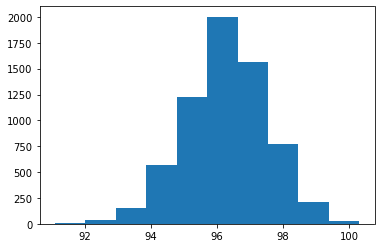

In [66]:
plt.hist(pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].release_speed)

In [67]:
df = schwarber
schwarbs = results('game_year')

In [68]:
schwarbs['pa_per_bb'] = schwarbs.plate_apps/schwarbs.walks
schwarbs.round(3)

game_year  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0       2015     1284         304  175    66  21.0     39          85  0.255   
1       2016      100          25   15     7   0.0      4           6  0.333   
2       2017     2198         506  284    92  31.0     61         155  0.209   
3       2018     2144         492  291   102  26.0     58         141  0.237   
4       2019     2539         606  379   132  38.0     65         156  0.249   
5       2020      989         230  128    36  11.0     32          67  0.185   
6       2021     2195         521  307   115  35.0     68         138  0.258   
7       2022     3211         737  418   138  52.0     95         218  0.218   
8       2023     3295         771  403   127  52.0    128         231  0.201   

     obp    slg    ops   woba  pa_per_bb  
0  0.359  0.529  0.888  0.000      7.795  
1  0.440  0.381  0.821  0.000      6.250  
2  0.312  0.461  0.774  0.000      8.295  
3  0.327  0.465  0.792  0.000      8.483  
4  0.333  0.530  0.864  0.000      9.323  
5  0.309  0.385  0.693  0.000      7.188  
6  0.363  0.539  0.902  0.000      7.662  
7  0.324  0.508  0.832  0.358      7.758  
8  0.340  0.487  0.826  0.355      6.023

How many games has Whit played at third in his career?
This is not something I ahve the data for.
Seven. He has played 33 innings there in his career.

In [69]:
df = castellanos
results('pitch_number')

pitch_number  pitches  plate_apps    bip   hits   hrs  walks  strikeouts  \
0              1     5228         746  734.0  265.0  47.0    0.0         0.0   
1              2     4483         782  774.0  298.0  47.0    0.0         0.0   
2              3     3700         947  733.0  269.0  43.0    0.0       205.0   
3              4     2753         922  512.0  186.0  32.0   56.0       346.0   
4              5     1831         862  440.0  162.0  19.0   64.0       354.0   
5              6      969         564  255.0   84.0  10.0  105.0       201.0   
6              7      404         244  105.0   48.0   3.0   49.0        90.0   
7              8      160         106   46.0   13.0   2.0   28.0        31.0   
8              9       54          33   18.0    6.0   1.0    7.0         8.0   
9             10       21          17    9.0    2.0   0.0    4.0         4.0   
10            11        4           3    2.0    0.0   0.0    0.0         1.0   
11            12        1           1    0.0    0.0   0.0    1.0         0.0   

       ba    obp    slg    ops   woba  
0   0.364  0.367  0.646  1.013  0.117  
1   0.389  0.390  0.707  1.097  0.108  
2   0.289  0.294  0.518  0.811  0.082  
3   0.219  0.270  0.394  0.664  0.052  
4   0.205  0.266  0.331  0.597  0.073  
5   0.185  0.339  0.281  0.620  0.064  
6   0.246  0.398  0.385  0.782  0.071  
7   0.169  0.396  0.312  0.708  0.075  
8   0.231  0.394  0.346  0.740  0.087  
9   0.154  0.353  0.154  0.507  0.000  
10  0.000  0.000  0.000  0.000  0.000  
11    NaN  1.000    NaN    NaN  0.000

In [70]:
#df = marsh
df['month'] = pd.to_datetime(df.game_date).dt.month

In [71]:
results('month')

month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3      100          30   18     9   0.0      2          10  0.321   
1      4     3032         788  532   211  26.0     55         196  0.292   
2      5     3353         901  637   229  27.0     52         205  0.274   
3      6     3202         855  602   225  28.0     56         189  0.286   
4      7     2987         805  541   184  30.0     48         209  0.246   
5      8     3374         897  625   235  51.0     49         210  0.282   
6      9     2896         775  558   213  36.0     40         173  0.295   
7     10      587         160  106    26   6.0     11          42  0.178   
8     11       77          16    9     1   0.0      1           6  0.067   

     obp    slg    ops   woba  
0  0.367  0.464  0.831  0.071  
1  0.343  0.491  0.834  0.097  
2  0.319  0.458  0.776  0.075  
3  0.337  0.465  0.802  0.082  
4  0.297  0.435  0.732  0.063  
5  0.328  0.535  0.863  0.090  
6  0.330  0.537  0.867  0.055  
7  0.238  0.363  0.601  0.205  
8  0.125  0.067  0.192  0.098

In [72]:
rojas_id =679032
df = pos[pos.batter == rojas_id]
results('p_throws').sort_values(by='pitches',ascending=False)

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
1        R      456         134   91    28  2.0      4          35  0.228   
0        L      270          76   51    21  0.0      2          22  0.300   

     obp    slg    ops   woba  
1  0.261  0.358  0.619  0.264  
0  0.316  0.386  0.702  0.300

In [73]:
wheeler_id = 554430
wheels = pd.concat([pps[pps.pitcher == wheeler_id]
                    ,nphl[nphl.player_name == 'Wheeler, Zack']
                   ]
                  )

In [74]:
df = wheels[wheels.game_type != 'R']
games = results('game_pk')
games[games.strikeouts >=10]

game_pk  pitches  plate_apps  bip  hits  hrs  walks  strikeouts    ba  \
9   748563       92          24   13   3.0  1.0    1.0          10  0.13   

     obp    slg    ops   woba  
9  0.167  0.261  0.428  0.186

In [75]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id]
                   ,nphl[nphl.player_name == 'Harper, Bryce']
                    ])
df = harper
games = results('game_pk')
four_hit_games = games[games.hits >= 4]

In [76]:
df[df.game_pk.isin(four_hit_games.game_pk.tolist())].groupby('game_pk',as_index=False
                                                            ).agg({'game_date' : 'max'
                                                                   ,'home_team' : 'max'
                                                                   ,'away_team' : 'max'
                                                                  })

game_pk   game_date home_team away_team
0   490201  2017-04-10       WSH       STL
1   490324  2017-04-19       ATL       WSH
2   490419  2017-04-26       COL       WSH
3   491507  2017-07-18       LAA       WSH
4   565420  2019-04-19       COL       PHI
5   633393  2021-07-06       CHC       PHI
6   661542  2022-05-25       ATL       PHI

Should Bohm have pitch hit for Marsh against Justin Wilson? Nah, he does not do that great against FF like Wilson's.

In [77]:
# Getting a pitch profile of Justin Wilson is going to be really difficult. Not that difficult, just not something I care to do.

In [78]:
df = pd.read_csv('justin wilson.csv')
df.groupby('pitch_type', as_index=False).agg({'release_speed' : ['count','mean','std']
                                              ,'release_spin_rate' : ['mean','std']
                                             }).round(1)#.sort_values(by='count',ascending=False)

pitch_type release_speed            release_spin_rate       
                     count  mean  std              mean    std
0         CH            18  88.5  1.3            1523.5  211.4
1         CU           301  79.9  2.9            2259.8  640.4
2         FC          1914  90.7  1.6            2409.7  191.6
3         FF          4610  95.4  1.4            2369.3  122.8
4         FS             2  84.1  1.8            1345.0    0.0
5         IN            29  57.0  5.9            1409.7   58.2
6         PO             4  87.8  5.5               NaN    NaN
7         SI          1095  95.6  1.5            2301.6  168.4
8         SL           367  84.5  3.3            2495.4  267.0

In [79]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.pitch_type == 'FC')
          &(bohm.p_throws == 'L')
          &(bohm.release_speed >= 90.7 - 1.6)
          &(bohm.release_speed <= 90.7 + 1.6)
          &(bohm.release_spin_rate >= 2409.7 - 191.6)
          &(bohm.release_spin_rate <= 2409.7 + 191.6)
         ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Bohm, Alec       30          10    7     4  0.0      1           2  0.444   

   obp    slg    ops   woba  
0  0.5  0.444  0.944  0.423

In [80]:
marsh = pd.concat([pos[pos.player_name == 'Marsh, Brandon']
                   ,nphl[nphl.player_name == 'Marsh, Brandon']
                  ])
df = marsh[(marsh.pitch_type == 'FF')
          &(marsh.p_throws == 'L')
          &(marsh.release_speed >= 95.4 - 1.4)
          &(marsh.release_speed <= 95.4 + 1.4)
          &(marsh.release_spin_rate >= 2369.3 - 122.8)
          &(marsh.release_spin_rate <= 2369.3 + 122.8)
         ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Marsh, Brandon       73          19    8     4  0.0      1          10   

      ba    obp    slg    ops   woba  
0  0.222  0.263  0.278  0.541  0.195

In [81]:
nphl[nphl.game_date == '2015-05-06'].groupby('fielder_2',as_index=False).agg({'des' : 'count'})

fielder_2  des
0     452095   24
1     454560   14
2     455117    9
3     467092   16
4     506747    7
5     521692   13
6     571466   12
7     592663    9

In [82]:
jt = pd.concat([pos[pos.batter == 592663]
                ,nphl[nphl.player_name == 'Realmuto, J.T.']
               ])
jt['month'] = pd.to_datetime(jt.game_date).dt.month
df = jt[jt.game_year >= 2019]
results('month').sort_values(by='ops',ascending=False)

month  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0      3       63          17   12     6   1.0    2.0           3  0.429   
5      8     1933         490  331   129  24.0   34.0         115  0.291   
4      7     1404         365  249    90  18.0   25.0          85  0.272   
7     10      496         126   82    31   7.0    7.0          34  0.265   
6      9     1701         440  309   107  22.0   26.0          94  0.266   
1      4     1456         367  248    93   9.0   25.0          86  0.281   
2      5     1322         340  223    69   8.0   29.0          80  0.231   
3      6     1502         381  260    82  12.0   29.0          87  0.236   
8     11       66          17    6     1   0.0    0.0          10  0.062   

     obp    slg    ops   woba  
0  0.471  0.857  1.328  0.515  
5  0.351  0.553  0.904  0.379  
4  0.329  0.489  0.818  0.347  
7  0.317  0.496  0.813  0.349  
6  0.323  0.474  0.797  0.341  
1  0.341  0.426  0.767  0.331  
2  0.312  0.401  0.713  0.309  
3  0.302  0.406  0.708  0.306  
8  0.118  0.062  0.180  0.094

In [83]:
nelson = pd.concat([pps[pps.pitcher == 656793], nphl[nphl.player_name == 'Nelson, Nick']])
rhb_pitch_mix(nelson).round(1)

pitch_type       pitch_name  count  release_speed  release_spin_rate  zone  \
2         FF  4-Seam Fastball    511           96.3             2018.8   8.1   
4         SL           Slider    300           88.5             2360.0  10.5   
0         CH         Changeup    199           88.4             1841.7   9.9   
1         CU        Curveball     49           81.3             2332.8  10.2   
3         SI           Sinker     16           92.6             1972.4  10.0   

   usage  
2   47.5  
4   27.9  
0   18.5  
1    4.6  
3    1.5

In [84]:
df = nelson#pps[pps.pitcher == 656793]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020      402          97   66    21  4.0     11          20  0.247   
1       2021      338          78   37    15  0.0     16          22  0.263   
2       2022     1234         311  200    66  1.0     38          69  0.254   
3       2023       69          20   15     2  1.0      2           3  0.111   

     obp    slg    ops   woba  
0  0.330  0.412  0.742  0.000  
1  0.436  0.421  0.857  0.000  
2  0.347  0.346  0.693  0.310  
3  0.200  0.278  0.478  0.214

In [85]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'}).sort_values(by='game_pk')

player_name  game_pk  pitcher
14           Nelson, Nick        1   656793
22          Uelmen, Erich        1   657272
17    Plassmeyer, Michael        1   674681
7          Harrison, Josh        2   543281
13        Moore, McKinley        3   686842
3           Clemens, Kody        4   665019
6          Falter, Bailey        8   663559
9        Kerkering, Orion       10   689147
11      Lorenzen, Michael       13   547179
16         Ortiz, Luis F.       14   656814
21    Sánchez, Cristopher       20   650911
20         Suárez, Ranger       26   624133
2         Brogdon, Connor       27   641401
1        Bellatti, Andrew       27   571479
4            Covey, Dylan       28   592229
23        Vasquez, Andrew       30   607755
24        Walker, Taijuan       31   592836
15            Nola, Aaron       36   605400
25          Wheeler, Zack       37   554430
12          Marte, Yunior       40   628708
0          Alvarado, José       50   621237
8           Hoffman, Jeff       62   656546
5   Domínguez, Seranthony       63   622554
19           Strahm, Matt       63   621381
18          Soto, Gregory       74   642397
10         Kimbrel, Craig       78   518886

In [86]:
# Rodolfo Castro hit a bunch of home runs to start 2021? His first five hits of the season were home runs lol

In [87]:
rodolfo = nphl[nphl.player_name == 'Castro, Rodolfo']

In [88]:
df = rodolfo

In [89]:
df[(df.game_year == 2021)
   #&(df.game_date <= '2021-07-30')
   &(df.events == 'home_run')
   &(df.type == 'X')
  ].sort_values(by='game_date')

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
2285         SI  2021-07-09           89.1          -1.75           5.99   
2246         FF  2021-07-11           90.6          -1.87           6.00   
2260         SI  2021-07-11           96.6          -1.42           6.06   
2216         CH  2021-07-28           87.6           1.61           5.75   
2225         SL  2021-07-28           85.6           3.41           4.96   

          player_name  batter  pitcher    events    description  ...  \
2285  Castro, Rodolfo  666801   607374  home_run  hit_into_play  ...   
2246  Castro, Rodolfo  666801   595191  home_run  hit_into_play  ...   
2260  Castro, Rodolfo  666801   544727  home_run  hit_into_play  ...   
2216  Castro, Rodolfo  666801   641778  home_run  hit_into_play  ...   
2225  Castro, Rodolfo  666801   623352  home_run  hit_into_play  ...   

      post_away_score  post_home_score  post_bat_score  post_fld_score  \
2285                3               12               3              12   
2246                1                5               1               5   
2260                4                5               4               5   
2216                7                1               1               7   
2225                7                3               3               7   

      if_fielding_alignment of_fielding_alignment spin_axis  \
2285               Standard              Standard     222.0   
2246          Infield shift              Standard     217.0   
2260               Standard              Standard     231.0   
2216               Standard              Standard     136.0   
2225               Standard              Standard     203.0   

     delta_home_win_exp delta_run_exp source  
2285             -0.001         0.974      n  
2246             -0.033         0.951      n  
2260             -0.168         1.965      n  
2216              0.008         0.924      n  
2225              0.004         1.611      n  

[5 rows x 93 columns]

## Nationals (A) 45-47

### Game 1: Corbin vs Nola

### Game 2: vs Suarez

### Game 3: Gore vs Sanchez

## Cardinals (A) 48-410

### Game 1: Mikolas vs Turnbull
Turnbull pitching pretty well thru 5. Johan Rojas 2 for 2 with an RBI. Ya momma sitting on ma dick!

### Game 2: vs Wheeler

### Game 3: vs Nola

Putting in some Retrospective work which is interesting.

#### Masyn Winn's arm
Is he related to Randy Winn?

Masyn Winn, who this year has the seventh-highest max velocity on a throw and sixth best **Arm Strength** (Baseball Savant) in the big leagues, has six "qualifying" throws. This is how they breakdown.

Masyn Winn Six Qualifying Throws
1. E6, Masyn Winn throws a ball into the stands
2. E6, Masyn Winn throws a ball off the bag
3. E6, Masyn Winn pulls Goldie off the bag with the throw
4. 6-3, Nice diving play and strong throw gets... Rhys Hoskins.
5. 4-6-3, Bryce Harper trotting down to first gets gunned down by some measure with this dart thrown by Winn.
6. 1B, Trea Turner hustles out an infield single against one of the best throwers in baseball.

Let's get fired up about Trea Turner with the stick!

In [96]:
df = pos[pos.game_year == 2024]

In [97]:
player_results = results('player_name')
home_results = results('home_team')
#id_results = results('batter')

In [98]:
df = player_results
df = trea = df[df.player_name == 'Turner, Trea']
trea

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
13  Turner, Trea      401         103   75    32  2.0    8.0          19   

       ba    obp    slg    ops   woba  
13  0.337  0.388  0.484  0.873  0.387

In [ ]:
pos[(pos.game_year == 2024)
    &(pos.
   ]

In [87]:
# Fastest pitches in 2024

In [86]:
#def summarize(df):
df = pps[pps.game_year == 2024]    
df[['pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'game_date'
    ,'player_name'
    ,'inning'
   ]].sort_values(by='release_speed',ascending=False
                 ).reset_index(drop=True).head(10)

    
    
    
    
    
    
#summarize(pos[pos.game_year == 2024])

pitch_type  release_speed  release_spin_rate   game_date     player_name  \
0         SI          101.0             2205.0  2024-03-29  Alvarado, José   
1         SI          100.8             2201.0  2024-03-30   Soto, Gregory   
2         SI          100.5             2232.0  2024-03-29  Alvarado, José   
3         SI          100.5             2228.0  2024-03-29  Alvarado, José   
4         SI          100.5             2220.0  2024-04-13   Soto, Gregory   
5         SI          100.1             2118.0  2024-03-29  Alvarado, José   
6         SI          100.1             2497.0  2024-03-30   Soto, Gregory   
7         SI           99.6             2009.0  2024-03-29  Alvarado, José   
8         FF           99.5             2274.0  2024-04-08   Soto, Gregory   
9         SI           99.5             2145.0  2024-03-31  Alvarado, José   

   inning  
0       8  
1       8  
2       8  
3       8  
4       7  
5       8  
6       8  
7       8  
8      10  
9       9

## Pirates (H) 411-414

### Game 1: Jones vs Suarez

### Game 2:  vs Sanchez

### Game 3:  vs Turnbull

### Game 4: Keller vs Wheeler

# Rockies (H) 415-417
## Game 1: Quantrill vs Nola
The Phillies are locked in a 1-1 grind it out game with a benches clearing incident with the Colorado Rockies. Jeff Hoffman just tackled pinch runner Kyle Freeland at the plate and almost certainly dislocated Freeland's non-throwing shoulder. Ouch. Two guys who came up together in Colorado's system.

The dog is barking next door. Nice.

In [1]:
# Kyle Tucker said me too! What a hit.

In [4]:
# who the fuck is due up for the Phillies in the Bottom of the 10th?

In [5]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']
#rojas = pos[pos.batter == ]
bohm = pache = pos[pos.player_name == 'Bohm, Alec']

In [7]:
df = bohm[bohm.inning > 9]
results('home_team')

home_team  pitches  plate_apps   bip  hits  hrs  walks  strikeouts   ba  \
0        ATL        8           2   1.0   0.0  0.0    0.0         1.0  0.0   
1        CLE        2           1   1.0   1.0  0.0    0.0         0.0  1.0   
2        HOU        3           1   1.0   0.0  0.0    0.0         0.0  0.0   
3        LAD        4           1   1.0   0.0  0.0    0.0         0.0  0.0   
4        MIA        5           1   1.0   1.0  0.0    0.0         0.0  1.0   
5        NYM       11           3   2.0   0.0  0.0    0.0         1.0  0.0   
6        OAK        6           2   1.0   0.0  0.0    0.0         1.0  0.0   
7        PHI       36          13  11.0   5.0  0.0    0.0         2.0  0.5   
8        PIT       15           2   2.0   2.0  0.0    0.0         0.0  1.0   
9        STL        3           1   0.0   0.0  0.0    0.0         1.0  0.0   
10        TB        3           1   1.0   0.0  0.0    0.0         0.0  0.0   
11       WSH       13           2   2.0   0.0  0.0    0.0         0.0  0.0   

      obp  slg    ops   woba  
0   0.000  0.0  0.000  0.000  
1   1.000  1.0  2.000  0.883  
2   0.000  0.0  0.000  0.000  
3   0.000  0.0  0.000  0.000  
4   1.000  1.0  2.000  0.883  
5   0.000  0.0  0.000  0.000  
6   0.000  0.0  0.000  0.000  
7   0.385  0.5  0.885  0.339  
8   1.000  1.0  2.000  0.884  
9   0.000  0.0  0.000  0.000  
10  0.000  0.0  0.000  0.000  
11  0.000  0.0  0.000  0.000

In [8]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des')

player_name  batter   des
19     Wilson, Weston  642215    96
6     Guthrie, Dalton  656495   113
5         Ellis, Drew  656403   128
2     Castro, Rodolfo  666801   141
7        Hall, Darick  669742   205
9      Harrison, Josh  543281   392
11    Pache, Cristian  665506   426
17    Stubbs, Garrett  596117   496
4       Clemens, Kody  665019   609
13       Rojas, Johan  679032   726
3          Cave, Jake  595909   830
15      Sosa, Edmundo  624641  1130
10     Marsh, Brandon  669016  2149
8       Harper, Bryce  547180  2250
12     Realmuto, J.T.  592663  2297
0          Bohm, Alec  664761  2436
1   Castellanos, Nick  592206  2614
16      Stott, Bryson  681082  2881
18       Turner, Trea  607208  2883
14    Schwarber, Kyle  656941  3295

In [9]:
pache = pos[pos.batter == 665506]
df = pache
results('home_team')

home_team  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0        ATL       16           3   1.0   0.0  0.0    1.0         1.0  0.000   
1        CHC       15           4   3.0   1.0  0.0    0.0         1.0  0.250   
2        CIN        8           3   2.0   1.0  0.0    0.0         1.0  0.333   
3        CWS       10           2   1.0   0.0  0.0    0.0         1.0  0.000   
4        HOU        6           2   2.0   1.0  0.0    0.0         0.0  0.500   
5        MIA       29           7   5.0   3.0  1.0    0.0         2.0  0.429   
6        MIL       14           3   0.0   0.0  0.0    2.0         1.0  0.000   
7        NYM       56          11   6.0   2.0  0.0    1.0         4.0  0.200   
8        NYY        3           2   2.0   0.0  0.0    0.0         0.0  0.000   
9        OAK       34           9   6.0   2.0  0.0    1.0         2.0  0.250   
10       PHI      196          47  25.0  10.0  1.0    7.0        15.0  0.256   
11        SD       11           5   5.0   1.0  0.0    0.0         0.0  0.200   
12       STL       19           3   2.0   0.0  0.0    1.0         0.0  0.000   
13       TEX        9           4   2.0   0.0  0.0    0.0         2.0  0.000   

      obp    slg    ops   woba  
0   0.333  0.000  0.333  0.232  
1   0.250  0.250  0.500  0.221  
2   0.333  0.333  0.667  0.294  
3   0.000  0.000  0.000  0.000  
4   0.500  1.000  1.500  0.622  
5   0.429  1.000  1.429  0.590  
6   0.667  0.000  0.667  0.464  
7   0.273  0.200  0.473  0.224  
8   0.000  0.000  0.000  0.000  
9   0.333  0.500  0.833  0.354  
10  0.362  0.410  0.772  0.338  
11  0.200  0.600  0.800  0.314  
12  0.333  0.000  0.333  0.232  
13  0.000  0.000  0.000  0.000

In [10]:
# Step 1: Define a Quality At Bat
# Step 2: Look at Phillies Quality At Bats
# Step 3: How many Quality At Bats does Nick Castellanos have when Johan Rojas is in the batting order?

## Game 2: Gomber vs Suarez

Brandon Marsh vs Charlie Blackmon
<br>Paul fucking Skenes
<br>Phillies Quality ABs
<br>Alec Bohm being that guy?
<br>Batting average over the course of the season, cumulative, running ba
<br>running revPAR
<br>Quarterly performance of key metrics
<br>FC-CU sequence

### Mr. Rager
<br>Ranger longest starts of his career
<br>Ranger pitches_per_start by month
<br>Ranger length of start

In [19]:
# Real proud of this pull. Get to Ranger Suarez ID by looking at Phillies LHP in the Statcast era. Ranger has thrown more pitches
# than any other South Paw for the Phillies since 2015. Ranger tossed 19.6% of the pitches thrown by the Phillies from the right
# side of the rubber (batter's perspective). 1/5th of pitches thrown by a left-handed Phillies pitcher between 2015 and 2023
# came from Ranger Suarez. This is a testament to you, Mr. Rager.
pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)
df = pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)

tot = df.des.sum()
df['pct_of_total'] = round((df.des/tot),3)
df

ranger_id = 624133

In [21]:
ranger = pps[pps.pitcher == ranger_id]
df = ranger
game_results = results('game_pk')
game_results.agg({'pitches' : ['min','max']})

pitches
min        2
max      110

In [28]:
df = ranger.merge(game_results, left_on = 'game_pk', right_on = 'game_pk', suffixes = ('','_gr'))
df[df.pitches == 110].game_date.unique()

array(['2022-06-29'], dtype=object)

In [ ]:
df

In [27]:
df = pos[(pos.batter == ranger_id)
    &(pos.game_date == '2021-09-25')
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0  Suárez, Ranger        9           3    2   0.0  0.0    0.0           1   

    ba  obp  slg  ops  woba  
0  0.0  0.0  0.0  0.0   0.0

Ranger Longest Starts by Month
df

In [32]:
df.groupby('game_date',as_index=False).agg({'pitches' : 'max'}).sort_values(by='pitches',ascending=False).head(15)

game_date  pitches
97   2022-06-29      110
136  2023-09-16      106
123  2023-06-14      105
125  2023-06-27      104
88   2022-05-09      104
107  2022-09-10      103
122  2023-06-09      103
89   2022-05-14      102
80   2021-09-20      102
82   2021-10-01      101
121  2023-06-04      101
92   2022-05-31      100
120  2023-05-30       99
124  2023-06-20       99
104  2022-08-23       99

In [33]:
df[df.pitches >= 100].game_date.unique()

array(['2021-10-01', '2021-09-20', '2022-09-10', '2022-06-29',
       '2022-05-31', '2022-05-14', '2022-05-09', '2023-09-16',
       '2023-06-27', '2023-06-14', '2023-06-09', '2023-06-04'],
      dtype=object)

In [34]:
# Sloppy but the answer is no not really

<br>Cristian Pache who the fuck do you think you are?

In [37]:
# How to Snipe Cristian Pache? WPA
pos[pos.game_year == 2023].groupby('player_name',as_index=False
                                  ).agg({'batter' : 'max'
                                         ,'delta_home_win_exp' : 'min'
                                        }).sort_values(by='delta_home_win_exp')
pache_id = 665506
pache_phils = pos[pos.batter == pache_id]
pache_nphl = nphl[nphl.player_name == 'Pache, Cristian']
pache = pd.concat([pache_phils, pache_nphl])

In [41]:
pache_defensive_opps = pps[((pps.fielder_8 == pache_id) & (pps.hit_location == 8)) # Center Field
                           | ((pps.fielder_7 == pache_id) & (pps.hit_location == 7)) # Left Field
                           | ((pps.fielder_9 == pache_id) & (pps.hit_location == 9)) # Right Field
                          ]
pache_defensive_opps.groupby('events', as_index=False).agg({'des' : 'count'})

events  des
0     double   11
1  field_out   65
2    sac_fly    3
3     single   52
4     triple    1

In [45]:
pache_defensive_opps[pache_defensive_opps.events == 'triple'][['hit_location'
                                                               ,'game_date'
                                                               ,'player_name'
                                                               ,'launch_speed'
                                                               ,'launch_angle'
                                                               ,'estimated_ba_using_speedangle'
                                                               ,'events'
                                                               ,'inning'
                                                               ,'inning_topbot'
                                                               ,'home_team'
                                                               ,'away_team'
                                                              ]]

hit_location   game_date     player_name  launch_speed  launch_angle  \
178169           9.0  2023-09-27  Suárez, Ranger         107.1          10.0   

        estimated_ba_using_speedangle  events  inning inning_topbot home_team  \
178169                          0.874  triple       5           Top       PHI   

       away_team  
178169       PIT

## Game 3: ? vs Sanchez

# White Sox (H) 419-421

## Game 1: Crochet vs Turnbull
First game of the season for Kellen. Took Seana along. It was a nice time. Chilly night. She was worried about having to take a quiz. I had a few beveraginos. Wet and cold. Bohm two 3-R HRs in first two ABs. City Connect jersey making its second appearance.

### Opportunities to SS and 3B

In [20]:
pps[(pps.game_date == '2024-04-19')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


inning  hit_location  outs_when_up  fielder_5  fielder_6  \
203252       5           5.0             2     664761     607208   
203273       4           6.0             0     664761     607208   
203344       8           6.0             1     664761     607208   

        launch_speed  launch_angle  launch_speed_angle  \
203252          95.2         -17.0                 2.0   
203273          97.8         -16.0                 2.0   
203344          93.0          -7.0                 2.0   

        estimated_ba_using_speedangle     events  release_speed pitch_type  \
203252                          0.143  field_out           91.6         FF   
203273                          0.189  field_out           90.1         FF   
203344                          0.191     single           94.4         SI   

        release_spin_rate  zone stand  
203252             2444.0   2.0     L  
203273             2507.0   8.0     R  
203344             2364.0   4.0     L

## Game 2: Soroka vs Wheeler
I did not watch this game since it was 4/20 and Knicks vs. Sixers G1 was that night.
Wheeler takes no-no into the 8th inning. Good velo, but induced a lot of weak contact and defense made the plays????

### Opportunities to SS and 3B

In [21]:
pps[(pps.game_date == '2024-04-20')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


inning  hit_location  outs_when_up  fielder_5  fielder_6  \
203077       8           6.0             0     664761     607208   
203132       4           6.0             1     664761     607208   
203142       3           6.0             2     664761     607208   
203150       2           6.0             2     664761     607208   
203153       2           6.0             1     664761     607208   
203182       8           5.0             2     664761     607208   

        launch_speed  launch_angle  launch_speed_angle  \
203077          90.6          11.0                 4.0   
203132          90.3         -31.0                 2.0   
203142          97.1           3.0                 4.0   
203150          98.9          -4.0                 2.0   
203153          53.7          -8.0                 1.0   
203182          86.1          72.0                 3.0   

        estimated_ba_using_speedangle     events  release_speed pitch_type  \
203077                          0.686  field_out           95.2         FF   
203132                          0.071  field_out           95.5         FF   
203142                          0.474  field_out           94.2         SI   
203150                          0.283  field_out           81.6         CU   
203153                          0.091  field_out           84.4         ST   
203182                          0.001  field_out           97.7         FF   

        release_spin_rate  zone stand  
203077             2412.0   2.0     L  
203132             2465.0   1.0     L  
203142             2163.0   2.0     L  
203150             2799.0  13.0     L  
203153             2610.0  11.0     R  
203182             2597.0   5.0     L

### Eloy Jimenez BIP

In [56]:
pps[pps.game_date == '2024-04-20'].groupby('batter',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              ,'stand' : 'max'
                                              ,'launch_speed' : 'max'
                                             }
                                            ).sort_values(by='launch_speed',ascending=False)

# Snipe Eloy ID by grouping pps at batter level and sorting by launch speed

eloy_id = 650391

pps[(pps.batter == eloy_id)
    &(pps.type == 'X')
   ].groupby(['player_name'
              ,'p_throws'
              #,'pitch_type'
              #,'events'
              #,'description'
             ]
             ,as_index=False
            ).agg({'launch_speed' : 'mean'
                  ,'des' : 'count'
                  #,'game_pk' : 'nunique'
                  ,'launch_angle' : 'mean'
                   ,'pitcher' : 'max'
                   ,'estimated_ba_using_speedangle' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                  }
                 ).sort_values(by='des',ascending=False).round(3)

player_name p_throws  launch_speed  des  launch_angle  pitcher  \
14          Wheeler, Zack        R        76.525    4        23.000   554430   
2          Falter, Bailey        L        81.100    3       -34.333   663559   
12          Vargas, Jason        L        92.800    3        -1.333   450306   
13        Walker, Taijuan        R        79.767    3         1.667   592836   
5             Nola, Aaron        R        80.200    2         1.500   605400   
7            Quinn, Roman        R       104.850    2        12.000   596451   
8             Smyly, Drew        L        72.950    2        -2.500   592767   
11      Turnbull, Spencer        R        81.100    2       -19.500   605513   
0          Alvarado, José        L        83.900    1       -39.000   621237   
1   Domínguez, Seranthony        R       106.900    1        -7.000   622554   
3             Morin, Mike        R       103.100    1        31.000   573046   
4           Nicasio, Juan        R       109.700    1        12.000   504379   
6          Pinto, Ricardo        R        77.500    1        26.000   620982   
9            Strahm, Matt        L        74.700    1        69.000   621381   
10         Suárez, Ranger        L        96.000    1        30.000   624133   

    estimated_ba_using_speedangle  hit_distance_sc  
14                          0.108          168.500  
2                           0.197           17.667  
12                          0.464           65.333  
13                          0.267           96.667  
5                           0.123          149.500  
7                           0.667          205.500  
8                           0.090          133.500  
11                          0.128            8.000  
0                           0.049            4.000  
1                           0.357           15.000  
3                           0.800          378.000  
4                           0.820          307.000  
6                           0.460          261.000  
9                           0.003          107.000  
10                          0.353          370.000

In [36]:
df = pps[(pps.batter == eloy_id)
    #&(pps.type == 'X')
   ]
results('player_name').sort_values(by='pitches',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  \
16          Wheeler, Zack       25           6  4.0   1.0  0.0    0.0   
14          Vargas, Jason       12           3  3.0   1.0  0.0    0.0   
13      Turnbull, Spencer       10           3  2.0   0.0  0.0    0.0   
15        Walker, Taijuan        8           3  3.0   1.0  0.0    0.0   
6           Parker, Blake        7           1  0.0   0.0  0.0    0.0   
10            Smyly, Drew        6           2  2.0   0.0  0.0    0.0   
2          Falter, Bailey        6           3  3.0   1.0  0.0    0.0   
5             Nola, Aaron        6           3  2.0   1.0  0.0    0.0   
0          Alvarado, José        5           1  1.0   0.0  0.0    0.0   
4           Nicasio, Juan        5           1  1.0   1.0  0.0    0.0   
1   Domínguez, Seranthony        4           2  1.0   1.0  0.0    0.0   
8           Pivetta, Nick        4           1  0.0   0.0  0.0    0.0   
9            Quinn, Roman        3           2  2.0   0.0  0.0    0.0   
12         Suárez, Ranger        3           1  1.0   0.0  0.0    0.0   
3             Morin, Mike        3           1  1.0   1.0  1.0    0.0   
11           Strahm, Matt        1           1  1.0   0.0  0.0    0.0   
7          Pinto, Ricardo        1           1  1.0   1.0  0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
16         2.0  0.167  0.167  0.167  0.333  0.147  
14         0.0  0.333  0.333  0.333  0.667  0.290  
13         1.0  0.000  0.000  0.000  0.000  0.000  
15         0.0  0.333  0.333  0.333  0.667  0.294  
6          1.0  0.000  0.000  0.000  0.000  0.000  
10         0.0  0.000  0.000  0.000  0.000  0.000  
2          0.0  0.333  0.333  0.333  0.667  0.294  
5          1.0  0.333  0.333  0.333  0.667  0.290  
0          0.0  0.000  0.000  0.000  0.000  0.000  
4          0.0  1.000  1.000  2.000  3.000  1.217  
1          1.0  0.500  0.500  0.500  1.000  0.450  
8          1.0  0.000  0.000  0.000  0.000  0.000  
9          0.0  0.000  0.000  0.000  0.000  0.000  
12         0.0  0.000  0.000  0.000  0.000  0.000  
3          0.0  1.000  1.000  4.000  5.000  1.940  
11         0.0  0.000  0.000  0.000  0.000  0.000  
7          0.0  1.000  1.000  1.000  2.000  0.901

In [51]:
src = pd.read_csv("C:\\Users\\Kellen\\Downloads\\test.csv")
src[['player_name'
     ,'pitches'
     #,'plate_apps'
     #,'bip'
     ,'hits'
     #,'home_runs'
     #,'walks'
     #,'strikeouts'
     ,'ba'
     #,'obp'
     ,'slg'
     ,'woba'
    ]
   ]

player_name  pitches  hits     ba    slg   woba
0           Wheeler, Zack       25     1  0.167  0.167  0.147
1           Vargas, Jason       12     1  0.333  0.333  0.290
2       Turnbull, Spencer       10     0  0.000  0.000  0.000
3         Walker, Taijuan        8     1  0.333  0.333  0.294
4           Parker, Blake        7     0  0.000  0.000  0.000
5             Nola, Aaron        6     1  0.333  0.333  0.290
6          Falter, Bailey        6     1  0.333  0.333  0.294
7             Smyly, Drew        6     0  0.000  0.000  0.000
8           Nicasio, Juan        5     1  1.000  2.000  1.217
9          Alvarado, José        5     0  0.000  0.000  0.000
10  Domínguez, Seranthony        4     1  0.500  0.500  0.449
11          Pivetta, Nick        4     0  0.000  0.000  0.000
12         Suárez, Ranger        3     0  0.000  0.000  0.000
13            Morin, Mike        3     1  1.000  4.000  1.940
14           Quinn, Roman        3     0  0.000  0.000  0.000
15           Strahm, Matt        1     0  0.000  0.000  0.000
16         Pinto, Ricardo        1     1  1.000  1.000  0.899

# Vince Velasquez Game
Juan Nicasio was brought in to slam the door in the 9th inning of this one. That is how I got the game_pk.

In [61]:
nicasio_id = 504379
df = pps[pps.pitcher == nicasio_id]
df.groupby('game_year',as_index=False
                                      ).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

game_year  des
1       2019  832
0       2017   20

In [64]:
df[df.inning == 9].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                            ,'game_pk' : 'max'
                                                            ,'home_team' : 'max'
                                                            ,'post_home_score' : 'max'
                                                            ,'away_team' : 'max'
                                                            ,'post_away_score' : 'max'
                                                           })

game_date  des  game_pk home_team  post_home_score away_team  \
0  2019-04-24   15   565997       NYM                0       PHI   
1  2019-05-12   14   565723        KC                1       PHI   
2  2019-05-21   20   565147       CHC                3       PHI   
3  2019-08-01   20   567115       PHI               10        SF   
4  2019-08-02   21   567116       PHI                3       CWS   
5  2019-08-14   14   567120       PHI               11       CHC   

   post_away_score  
0                6  
1                6  
2                2  
3                2  
4                2  
5                1

In [75]:
pps[(pps.game_pk == 567116)
    &(pps.hit_location == 7)
   ].groupby(['fielder_7'
              ,'batter'
              ,'inning'
              ,'outs_when_up'
             ],as_index=False).agg({'des' : 'count'
                                    ,'launch_speed' : 'max'
                                    ,'launch_angle' : 'max'
                                    ,'launch_speed_angle' : 'max'
                                    ,'hit_distance_sc' : 'max'
                                    ,'estimated_ba_using_speedangle' : 'mean'
                                   }).sort_values(by='inning')

fielder_7  batter  inning  outs_when_up  des  launch_speed  launch_angle  \
3     656514  544725       1             0    1          94.1         -12.0   
8     656514  650391       1             2    1          86.0          14.0   
4     656514  547989       6             0    1         101.1          17.0   
7     656514  641313       6             0    1         102.5          -4.0   
5     656514  570560       8             0    1          92.9          26.0   
6     656514  570560      12             2    1          75.0          23.0   
0     592826  543510      14             1    1          82.9          18.0   
1     592826  547989      15             2    1          86.7          14.0   
2     592826  650391      15             2    1         108.9          15.0   

   launch_speed_angle  hit_distance_sc  estimated_ba_using_speedangle  
3                 2.0             13.0                          0.187  
8                 4.0            165.0                          0.893  
4                 4.0            302.0                          0.433  
7                 2.0             25.0                          0.307  
5                 3.0            311.0                          0.200  
6                 4.0            241.0                          0.973  
0                 4.0            204.0                          0.913  
1                 4.0            175.0                          0.920  
2                 6.0            270.0                          0.647

## Game 3: vs Nola
Kellen's second game of the season. A nice afternoon out with Kyuyeol Kim. Little chilly. Nice morning with Seana first. Ripping beer bongs in the parking lot of the High School Reunion, is that what you should be doing??? They all went to "St Joes Prep"????????? WTF. Baby Got Back. Sir Mix-a-Lot. Horrific spinal disorder.

# Reds (A) 422-424
## Game 1: Greene vs Suarez
Went to dinner with Kyuyeol and Zhihui this evening so missed this and the Sixers playoff game. <br>
Ranger masterpiece.

## Game 2: vs Sanchez

Been really interested in defense lately so going to look at defensive opportunities for the Phillies this year. <br>
Doing some exploring on Baseball Savant too.

In [77]:
pps[pps.game_year == 2024]

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
203076         SI  2024-04-20           94.0          -2.18           5.28   
203077         FF  2024-04-20           95.2          -2.23           5.23   
203078         FF  2024-04-20           95.6          -2.20           5.31   
203079         FF  2024-04-20           94.6          -2.15           5.29   
203080         FC  2024-04-20           90.9          -2.36           5.24   
...           ...         ...            ...            ...            ...   
206234         SI  2024-03-29           98.4           1.39           6.76   
206235         CH  2024-03-29           79.7          -2.62           6.02   
206236         SI  2024-03-29           95.8          -2.85           6.10   
206237         SL  2024-03-29           83.8          -1.81           5.90   
206238         SI  2024-03-29           92.8           3.62           5.50   

            player_name  batter  pitcher     events      description  ...  \
203076    Wheeler, Zack  686676   554430     single    hit_into_play  ...   
203077    Wheeler, Zack  666150   554430  field_out    hit_into_play  ...   
203078    Wheeler, Zack  666150   554430        NaN    called_strike  ...   
203079    Wheeler, Zack  666150   554430        NaN         foul_tip  ...   
203080    Wheeler, Zack  666150   554430        NaN             ball  ...   
...                 ...     ...      ...        ...              ...  ...   
206234   Alvarado, José  621566   621237     double    hit_into_play  ...   
206235  Brogdon, Connor  645277   641401        NaN             ball  ...   
206236    Hoffman, Jeff  660670   656546        NaN             ball  ...   
206237    Marte, Yunior  671739   628708        NaN  swinging_strike  ...   
206238     Strahm, Matt  671739   621381     single    hit_into_play  ...   

         wHBP    w1B    w2B    w3B    wHR runSB runCS   R/PA    R/W   cFIP  
203076  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
203077  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
203078  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
203079  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
203080  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
...       ...    ...    ...    ...    ...   ...   ...    ...    ...    ...  
206234  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
206235  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
206236  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
206237  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  
206238  0.736  0.901  1.281  1.623  2.089   0.2 -0.41  0.118  9.792  3.229  

[3163 rows x 106 columns]

## Game 3: Lodolo vs Turnbull

In [5]:
df = pp24 = pps[pps.game_year == 2024]
df.groupby('player_name',as_index=False
          ).agg({'pitcher' : 'max'
                 ,'des' : 'count'
                 ,'game_pk' : 'nunique'
                })

player_name  pitcher  des  game_pk
0          Alvarado, José   621237  157       10
1         Brogdon, Connor   641401   76        3
2   Domínguez, Seranthony   622554  146        9
3           Hoffman, Jeff   656546  151       10
4        Kerkering, Orion   689147   32        2
5           Marte, Yunior   628708  159        9
6            Nelson, Nick   656793   54        3
7             Nola, Aaron   605400  461        5
8          Ortiz, Luis F.   656814   10        1
9          Pinto, Ricardo   620982  208        5
10          Soto, Gregory   642397  133        9
11           Strahm, Matt   621381  134        8
12         Suárez, Ranger   624133  462        5
13    Sánchez, Cristopher   650911  360        4
14      Turnbull, Spencer   605513  345        4
15          Wheeler, Zack   554430  495        5

In [6]:
soto_id = 642397
df = soto = pps[pps.pitcher == soto_id]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2023     1025         266  172    52  6.0     24          68  0.219   
1       2024      133          31   20     9  0.0      4           7  0.346   

     obp    slg    ops   woba  
0  0.293  0.338  0.631  0.280  
1  0.419  0.423  0.842  0.377

## Game 4: vs Wheeler

# Padres (A) 426-428
## Game 1: vs Nola 
Nola 8 strong, offense was hot. Harper dong. In Fredericksburg for Jake's baby shower the next day.

## Game 2: Cease vs Suarez
Suarez gem. Bohm is hot. Ya momma is a ya know. Jake's baby shower. Good time.

Good stuff in the whatever inning, probably the 5th? Schwarber walks. Turner hits a little dribbler to third but Whit hustles to beat it out from second. Harper walks. Bohm singles to right and Turner speeds home ahead of a good throw by Tatis.

Phillies players doing what they do best and being better than the other team also doing their best.

## Game 3: vs Walker
Taijuan Walker comes back and bumps Turnbull to the bullpen. Controversial since Turnbull has been pitching well this season. I think you have to let Tai Walker start. Turnbull will run out of gas. Not sure how we will pitch out of the bullpen though.

# Angels (A) 429-51
## Game 1: Canning vs Sanchez
Brutal game. Really quite the brutal game of baseball. I do some really meh stuff ya know.

## Game 2: vs Turnbull
They are giving Turnbull another start after previously insisting that Turnbull was going to the bullpen. That is quite the change, but it is about putting the Phillies best pitches in positions to throw the most pitches for this team. 

That is not entirely true. It is the culmination of all sorts of things.
It is about getting those guys to record the most outs for the team.

## Game 3: Sandoval vs Wheeler
I have no idea, Phils lost a close one.

# Would Rojas have made that catch?
Ok, I have an epiphany and a commercial break. Cling to this thought.
<br>

Look at launch_speed, launch_angle, hit_distance_sc and see if Pache and Rojas made plays on them. I cannot see the distance they covered or catch probability in my data, but I can watch the video then go hunt for those metrics.

Dogshit play by Bradley fucking Zimmer in August 2022. The Phillies were in the midst of a playoff hunt that would ultimately bring about the club's first playoff appearance since 2011 and first National League pennant since 2009 with Brad Hand on the mound, Bradley Zimmer in center, and Yairo fuck Munoz in right field.

So, would Johan Rojas have caught that ball? Let's identify the pitches then watch the videos.

In [48]:
cfs = pps.groupby('fielder_8',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            }).sort_values(by='des',ascending=False)

In [52]:
pos[pos.batter.isin(cfs.fielder_8)].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                     ,'batter' : 'max'
                                                                     ,'game_pk' : 'nunique'
                                                                    }).sort_values(by='des',ascending=False)

player_name    des  batter  game_pk
9     Herrera, Odúbel  12506  546318      811
7       Harper, Bryce  10265  547180      611
5      Galvis, Freddy   7767  520471      502
12     Kingery, Scott   4480  664068      309
14  McCutchen, Andrew   4447  457705      260
0      Altherr, Aaron   4437  571437      324
29     Williams, Nick   3376  608384      283
13     Marsh, Brandon   2858  669016      198
20       Quinn, Roman   2153  596451      180
27     Vierling, Matt   1750  663837      143
8       Haseley, Adam   1433  656514      108
21        Revere, Ben   1411  519184       95
24      Sosa, Edmundo   1384  624641      116
2      Bourjos, Peter   1332  488721      117
26   Torreyes, Ronald   1185  591720      114
3          Cave, Jake    830  595909       64
23       Rojas, Johan    726  679032       58
22    Rodríguez, Sean    590  446481       68
10  Jankowski, Travis    583  608671       65
4     Florimón, Pedro    559  465753       57
11          Kelly, Ty    427  571841       62
18    Pache, Cristian    426  665506       40
28     Williams, Luke    413  663897       53
16     Moniak, Mickey    393  666160       39
25   Sweeney, Darnell    383  572182       36
19   Perkins, Cameron    348  573088       42
6     Guthrie, Dalton    233  656495       23
30    Zimmer, Bradley     62  605548        5
1    Bonifacio, Jorge     46  593528        5
17   Muzziotti, Símon     33  665922        3
15     Mercado, Óscar      3  640458        1

In [75]:
pps[(pps.inning == 9) &  (pps.game_date == '2022-08-23') & (pps.events == 'triple')
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]

game_date pitch_type  release_speed  release_spin_rate player_name  \
157604  2022-08-23         SI           94.1             2334.0  Hand, Brad   

        batter  launch_speed  launch_angle  hit_distance_sc  zone  inning  \
157604  670770          95.6          23.0            352.0   7.0       9   

        events                                                des  \
157604  triple  TJ Friedl triples (3) on a line drive to right...   

        estimated_ba_using_speedangle  launch_speed  launch_angle  \
157604                          0.186          95.6          23.0   

        launch_speed_angle  
157604                 5.0

In [76]:
rojas_id = 679032
pps[(pps.fielder_8 == rojas_id) & (pps.hit_location == 8)
    #&(pps.launch_speed == 95.6) 
    &(pps.hit_distance_sc >= 350) & (pps.hit_distance_sc <= 354)
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]#[['launch_speed','launch_angle','inning','game_date','estimated_ba_using_speedangle','events']]

# Without knowing how far he was from the ball, I think it is fair to suggest Rojas probably could have made this catch.

game_date pitch_type  release_speed  release_spin_rate  \
178641  2023-09-23         FF           93.4             2444.0   
178842  2023-09-22         FC           86.7             2311.0   
178880  2023-09-22         FF           93.5             2545.0   
178956  2023-09-21         CH           81.1             1327.0   
182036  2023-08-30         FF           94.5             2387.0   
182613  2023-08-26         FC           93.2             2197.0   
184605  2023-08-09         CH           84.6             2045.0   
188071  2023-07-15         SL           85.8             2614.0   

              player_name  batter  launch_speed  launch_angle  \
178641      Wheeler, Zack  607043          97.1          24.0   
178842    Walker, Taijuan  643446          95.8          33.0   
178880       Strahm, Matt  668901          95.2          34.0   
178956     Suárez, Ranger  682626          93.8          22.0   
182036     Kimbrel, Craig  681351          96.8          23.0   
182613       Covey, Dylan  676475         101.7          20.0   
184605  Lorenzen, Michael  666164          92.1          35.0   
188071      Marte, Yunior  596059          96.7          41.0   

        hit_distance_sc  zone  inning     events  \
178641            352.0   5.0       5  field_out   
178842            354.0   2.0       1  field_out   
178880            353.0  11.0       7  field_out   
178956            350.0  14.0       4    sac_fly   
182036            350.0   1.0       9  field_out   
182613            352.0   2.0       9  field_out   
184605            350.0  11.0       2  field_out   
188071            352.0   5.0       7  field_out   

                                                      des  \
178641  Brandon Nimmo flies out to center fielder Joha...   
178842  Jeff McNeil flies out to center fielder Johan ...   
178880  Mark Vientos flies out to center fielder Johan...   
178956  Francisco Alvarez out on a sacrifice fly to ce...   
182036  Logan O'Hoppe lines out to center fielder Joha...   
182613  Alec Burleson lines out sharply to center fiel...   
184605  Blake Rutherford flies out to center fielder J...   
188071  Rougned Odor flies out to center fielder Johan...   

        estimated_ba_using_speedangle  launch_speed  launch_angle  \
178641                          0.317          97.1          24.0   
178842                          0.174          95.8          33.0   
178880                          0.100          95.2          34.0   
178956                          0.171          93.8          22.0   
182036                          0.257          96.8          23.0   
182613                          0.520         101.7          20.0   
184605                          0.049          92.1          35.0   
188071                          0.077          96.7          41.0   

        launch_speed_angle  
178641                 5.0  
178842                 5.0  
178880                 3.0  
178956                 3.0  
182036                 5.0  
182613                 5.0  
184605                 3.0  
188071                 3.0

In [58]:
phils_sc[(phils_sc.type == 'X')
         &(phils_sc.hit_location == 8)
        ].groupby('events',as_index=False
                 ).agg({'launch_speed' : ['min','max','mean','std']
                        ,'estimated_ba_using_speedangle' : ['min', 'max', 'mean', 'std']
                        ,'launch_speed_angle' : ['min', 'max', 'mean', 'std']
                        ,'launch_angle' : ['min', 'max', 'mean', 'std']
                       }).round(3)

events launch_speed                          \
                                min    max     mean     std   
0               double         61.0  118.6  101.638   6.512   
1          double_play         73.0  106.0   92.856   9.485   
2          field_error         67.4  107.1   94.419   9.617   
3            field_out         66.2  114.9   93.026   7.867   
4            force_out         77.0  101.3   88.900  12.158   
5             home_run         98.5  106.7  102.825   2.800   
6              sac_fly         72.9  112.8   94.170   6.819   
7  sac_fly_double_play         77.9   95.2   85.483   6.551   
8               single         54.7  116.6   92.658  11.530   
9               triple         75.7  112.3  100.843   5.751   

  estimated_ba_using_speedangle                      launch_speed_angle       \
                            min    max   mean    std                min  max   
0                         0.007  0.993  0.630  0.218                2.0  6.0   
1                         0.000  0.920  0.380  0.315                3.0  6.0   
2                         0.003  0.823  0.368  0.274                3.0  6.0   
3                         0.000  0.989  0.249  0.246                3.0  6.0   
4                         0.000  0.709  0.379  0.357                3.0  6.0   
5                         0.333  0.927  0.659  0.213                4.0  6.0   
6                         0.000  0.927  0.261  0.239                3.0  6.0   
7                         0.003  0.611  0.214  0.258                3.0  4.0   
8                         0.007  0.993  0.616  0.248                1.0  6.0   
9                         0.020  0.980  0.618  0.218                3.0  6.0   

                launch_angle                        
    mean    std          min   max    mean     std  
0  4.896  0.928        -13.0  55.0  19.149   6.846  
1  4.000  1.136          9.0  55.0  28.688  12.041  
2  4.381  1.284         14.0  56.0  30.952  11.465  
3  3.817  1.105         10.0  64.0  31.870  10.214  
4  4.333  1.528         24.0  58.0  38.667  17.474  
5  5.375  0.916         11.0  38.0  26.500  10.488  
6  3.869  1.110         13.0  52.0  30.209   9.108  
7  3.333  0.516         17.0  46.0  31.167  11.990  
8  3.571  0.868        -44.0  59.0   8.686  11.393  
9  4.937  0.979          6.0  48.0  21.113   7.238

In [61]:
pache_defensive_opps[pache_defensive_opps.events == 'field_out'].agg({'estimated_ba_using_speedangle' : ['min','max','mean','std']})

estimated_ba_using_speedangle
min                        0.001000
max                        0.914000
mean                       0.237831
std                        0.240217

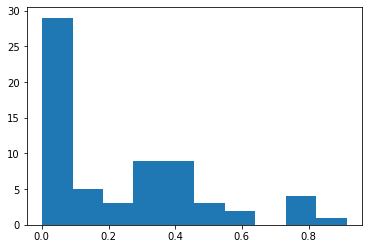

In [60]:
plt.hist(pache_defensive_opps[pache_defensive_opps.events == 'field_out'].estimated_ba_using_speedangle)
plt.show()

# Bryson Stott turning double plays as a Second basemen, or as a shortstop

In [90]:
stott_id = 681082

gidp = pps[pps.game_year.isin([2022,2023])
    &(pps.events == 'grounded_into_double_play')
   ]
df = pd.concat([gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ]
,gidp[(gidp.fielder_6 == stott_id)
     &(gidp.hit_location.isin([1,3,4]))
    ]
          ])

In [91]:
gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ].groupby(['fielder_4','game_year'],as_index=False).agg({'des' : 'count'})

fielder_4  game_year  des
0     681082       2022   18
1     681082       2023   63

In [92]:
df[df.fielder_4 == stott_id][['game_date'
    ,'inning'
    ,'hit_location'
    #,'fielder_4'
    #,'fielder_6'
    ,'pitcher'
    ,'player_name'
    ,'pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'launch_speed'
                              ,'estimated_ba_using_speedangle'
   ]].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(5)

game_date  inning  hit_location  pitcher        player_name  \
180325  2023-09-11       4           6.0   547179  Lorenzen, Michael   
188704  2023-07-06      11           6.0   621381       Strahm, Matt   
202752  2023-10-07       8           6.0   621381       Strahm, Matt   
202846  2023-10-04       6           6.0   605400        Nola, Aaron   
181310  2023-09-05       7           5.0   592229       Covey, Dylan   

       pitch_type  release_speed  release_spin_rate  launch_speed  \
180325         SL           85.6             2435.0          99.7   
188704         FF           92.9             2378.0         104.0   
202752         SL           85.7             2444.0         103.4   
202846         SI           90.5             2152.0         100.3   
181310         SI           96.0             2056.0         105.4   

        estimated_ba_using_speedangle  
180325                          0.657  
188704                          0.617  
202752                          0.600  
202846                          0.597  
181310                          0.569

In [93]:
group = 'game_year'
for group in ['game_year','pitcher','fielder_4']:
    print(gidp.groupby(group,as_index=False).agg({'des' : 'count'}))#.sort_values(by='des',ascending=False)

   game_year  des
0       2022  113
1       2023  103
    pitcher  des
0    502043   16
1    502085    4
2    518886    4
3    543272    3
4    544727    5
5    547179    7
6    554430   20
7    571446    2
8    592229    5
9    592789    7
10   592836    8
11   596117    1
12   605400   28
13   607755    3
14   608349    1
15   621107    6
16   621237    6
17   621381    4
18   622554    8
19   624133   31
20   628708    3
21   642397    4
22   650911   14
23   656322    2
24   656546    2
25   656793    3
26   656814    3
27   663559    8
28   663975    1
29   668941    1
30   672839    3
31   674681    2
32   686842    1
   fielder_4  des
0     516416   66
1     543281    6
2     622168    8
3     622666    5
4     624641    1
5     656495    1
6     663837    1
7     665155    6
8     666801    3
9     681082  119


In [94]:
gidp.groupby('hit_location',as_index=False).agg({'des' : 'count'})

hit_location  des
0           1.0   13
1           2.0    2
2           3.0   11
3           4.0   58
4           5.0   49
5           6.0   83

# Aaron Nola Weather

In [95]:
weather = pd.read_csv('C:\\Users\\Kellen\\Downloads\\Philly Weather 2015 to 20230707.csv')

In [96]:
weather['Date'] = pd.to_datetime(weather.DATE_VALUE)
weather['date'] = weather['Date'].dt.date

In [97]:
pps['date'] = pd.to_datetime(pps.game_date).dt.date
nola = pps[pps.pitcher == nola_id].merge(weather, left_on = 'date', right_on = 'date')

In [98]:
df = nola[nola.home_team == 'PHI']

In [99]:
temps = df.groupby('game_date',as_index=False).agg({'MAX_TEMPERATURE' : 'max'})

In [100]:
final = results('game_date').merge(temps,left_on = 'game_date',right_on='game_date')

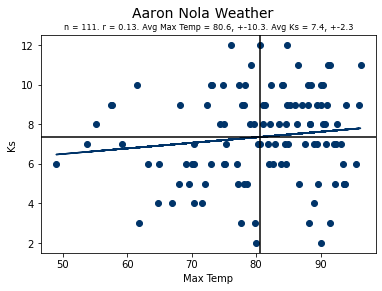

In [101]:
x = final.MAX_TEMPERATURE
y = final.strikeouts
title = 'Aaron Nola Weather'
xlabel = 'Max Temp'
ylabel = 'Ks'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

In [102]:
def graph(x,y, title, xlabel, ylabel, colors):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    #title = 'Velo vs. Spin Rate' # Title the graph
    #xlabel = 'Spin' # Label the x axis
    #ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                    ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

# Roman Quinn infield hits

In [103]:
quinn_id = 596451
rq = pos[pos.batter == quinn_id]
rq[rq.events == 'single'][['game_date'
                          ,'inning'
                          ,'launch_speed'
                          ,'launch_angle'
                          ]
                         ].sort_values(by='launch_speed').head(20)

game_date  inning  launch_speed  launch_angle
123950  2020-08-28      10          28.4         -76.0
144014  2021-05-29       5          30.5         -10.0
102010  2019-08-05       4          32.7          14.0
172696  2022-04-28       3          34.1         -41.0
120272  2020-09-20       2          34.3          29.0
124331  2020-08-25       7          36.7          43.0
124619  2020-08-22       9          38.4         -64.0
115937  2019-04-20       4          43.4         -45.0
126333  2020-08-10       6          52.7         -48.0
147543  2021-05-04       2          64.7          26.0
170896  2022-05-12       6          67.3          12.0
127145  2020-08-05       6          68.8          26.0
124850  2020-08-20       3          70.2         -14.0
70311   2018-09-26       4          71.4          18.0
75814   2018-08-16       9          71.5          24.0
74788   2018-08-24       2          72.3          15.0
102170  2019-08-04       3          73.5          20.0
123618  2020-08-30       3          74.8         -10.0
73385   2018-09-03       6          75.9          -1.0
121030  2020-09-16       2          76.8          18.0

# 2016-2018 Pitching

## Jake Thompson
He has punched out some truly wild guys, lots of MVPs and former Phillies. Also lots of pitchers. That is it.

## Drew Anderson
This fucking guy. He barely pitched but he struck out Mike Trout!

## Ricardo Pinto
I should give some true TLC to the Ricardo Pinto game.

## Yacksel Rios
I was a big fan.

## Edubray Ramos
Ya momma sitting on ma dick!

## Victor Arano
Dude was legit.

# Phillies Walk Off Home Runs in the Statcast Era

In [119]:
pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_year',as_index=False # groupby
            ).agg({'des' : 'count'}
                 ).sort_values(by='des',ascending=False)

game_year  des
2       2017    9
4       2019    9
3       2018    8
7       2022    8
6       2021    6
8       2023    6
0       2015    5
1       2016    4
5       2020    1

In [120]:
df=pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_pk',as_index=False # groupby
            ).agg({'game_year' : 'max'
                   ,'game_date' : 'max'
                   ,'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                   ,'batter' : 'nunique'
                   ,'inning' : 'max'
                   ,'player_name' : 'max'
                   }
                 ).sort_values(by=['game_year','game_date'],ascending=False)
df

game_pk  game_year   game_date  post_home_score  post_away_score  batter  \
45   716618       2023  2023-09-12                6                6       1   
48   717664       2023  2023-09-11                8                8       1   
46   716879       2023  2023-08-23                5                5       1   
47   717418       2023  2023-07-14                2                8       1   
49   717837       2023  2023-06-09                5                4       1   
50   718043       2023  2023-05-24                5                5       1   
41   661591       2022  2022-09-20               11               18       1   
39   661563       2022  2022-07-26                3                6       1   
38   661560       2022  2022-07-22                2               15       1   
40   661583       2022  2022-06-15                3                1       1   
43   661633       2022  2022-06-05                9                7       1   
42   661613       2022  2022-05-30                3                3       1   
44   661643       2022  2022-04-13                6                9       1   
37   661129       2022  2022-04-10                1                4       1   
31   632537       2021  2021-09-10                1               11       1   
32   632808       2021  2021-08-27                6                6       1   
33   633168       2021  2021-07-26                6                5       1   
34   633299       2021  2021-07-17                4                2       1   
35   633764       2021  2021-06-09                2                1       1   
36   634439       2021  2021-04-20                7               10       1   
30   631125       2020  2020-08-28                7                4       1   
29   567131       2019  2019-09-09                2                7       1   
28   567125       2019  2019-08-26                6                5       1   
27   567121       2019  2019-08-15                7                5       1   
26   567118       2019  2019-08-04                5               10       1   
25   567105       2019  2019-07-14                4                3       1   
24   567102       2019  2019-06-27                6                3       2   
23   567093       2019  2019-06-10                8               13       2   
22   531794       2018  2018-09-28                2               10       1   
21   531420       2018  2018-08-31                2                1       1   
20   531043       2018  2018-08-02                5                2       1   
19   530922       2018  2018-07-24                7                4       1   
18   530908       2018  2018-07-23                6                7       1   
17   530667       2018  2018-07-01                4                3       1   
16   530577       2018  2018-06-25                2                4       1   
15   530415       2018  2018-06-13                2                7       1   
14   492262       2017  2017-09-12                8                8       1   
13   491971       2017  2017-08-22                8               12       2   
12   491643       2017  2017-07-29                3                3       1   
11   490774       2017  2017-05-23                2                8       1   
10   490610       2017  2017-05-10                6               11       2   
9    490198       2017  2017-04-10                3                4       1   
8    490162       2017  2017-04-07                6                7       1   
7    447725       2016  2016-06-06                4                6       2   
6    447202       2016  2016-04-29                4                3       1   
5    447021       2016  2016-04-15                1                9       1   
4    415804       2015  2015-09-14                7                7       1   
3    415764       2015  2015-09-12                7                5       1   
2    415026       2015  2015-07-19                8                7       1   
1   

In [122]:
#df[df.game_year == 2023] # 1 walk off
#df[df.game_year == 2022] # 2 walk offs
df[df.game_year == 2021] # 3 walk offs
#df[df.game_year == 2020] # 2 HRs

game_pk  game_year   game_date  post_home_score  post_away_score  batter  \
31   632537       2021  2021-09-10                1               11       1   
32   632808       2021  2021-08-27                6                6       1   
33   633168       2021  2021-07-26                6                5       1   
34   633299       2021  2021-07-17                4                2       1   
35   633764       2021  2021-06-09                2                1       1   
36   634439       2021  2021-04-20                7               10       1   

    inning        player_name  
31       9    Gregorius, Didi  
32      10       Miller, Brad  
33       9  McCutchen, Andrew  
34      10     Realmuto, J.T.  
35       9     Williams, Luke  
36       9      Hoskins, Rhys

In [129]:
for gy in df.game_year.unique():
    #late_hrs = len(df[df.game_year == gy])
    walk_offs = df[(df.game_year == gy)
       &(df.post_home_score > df.post_away_score)
      ]
    print(gy, ':', len(walk_offs), '/', len(df[df.game_year == gy]), '=', round(len(walk_offs)/len(df[df.game_year == gy]),3))

2023 : 1 / 6 = 0.167
2022 : 2 / 8 = 0.25
2021 : 3 / 6 = 0.5
2020 : 1 / 1 = 1.0
2019 : 4 / 7 = 0.571
2018 : 4 / 8 = 0.5
2017 : 0 / 7 = 0.0
2016 : 1 / 3 = 0.333
2015 : 2 / 5 = 0.4


In [136]:
df[df.game_year == 2015][['inning', 'post_home_score', 'post_away_score', 'player_name']]
                         #,'launch_speed', 'launch_angle'

inning  post_home_score  post_away_score      player_name
4      10                7                7   Galvis, Freddy
3       9                7                5      Asche, Cody
2       9                8                7  Francoeur, Jeff
1       9                4                4   Franco, Maikel
0       9                3                4  Herrera, Odúbel

In [143]:
pos[(pos.game_pk.isin(df[df.batter >1].game_pk.unique()))
    &(pos.inning >= 9)
    &(pos.events == 'home_run')
   ][['game_year', 'game_date', 'inning', 'at_bat_number'
     ,'player_name', 'launch_speed', 'launch_angle']].sort_values(by='game_year', ascending = False)#.agg({'game_year' : 'count'})

game_year   game_date  inning  at_bat_number     player_name  \
106892       2019  2019-06-27       9             73    Segura, Jean   
106959       2019  2019-06-27       9             69  Franco, Maikel   
109173       2019  2019-06-10       9             88      Bruce, Jay   
109198       2019  2019-06-10       9             86   Hoskins, Rhys   
51358        2017  2017-08-22       9             79  Blanco, Andrés   
51401        2017  2017-08-22       9             75   Joseph, Tommy   
64866        2017  2017-05-10       9             92   Joseph, Tommy   
64886        2017  2017-05-10       9             90  Altherr, Aaron   
37832        2016  2016-06-06       9             72  Galvis, Freddy   
37843        2016  2016-06-06       9             73   Joseph, Tommy   

        launch_speed  launch_angle  
106892         102.3          20.0  
106959          99.7          21.0  
109173         103.2          40.0  
109198          98.8          41.0  
51358           96.1          30.0  
51401          102.9          31.0  
64866          105.8          28.0  
64886          107.9          25.0  
37832           99.9          30.0  
37843          102.3          22.0

In [42]:
df = phils_sc_24 = phils_sc[phils_sc.game_year == 2024]
df.groupby(['game_year'
            #,'p_throws'
           ],as_index=False).agg({'game_pk' : 'nunique'})

df = phils_sc
df['date'] = pd.to_datetime(df.game_date)

df['month'] = df.date.dt.month

In [37]:
years = pd.DataFrame()
for g in phils_sc.game_year.unique().tolist():
    df = phils_sc[phils_sc.game_year == g]
    x = results('month')
    x['year'] = g
    years = pd.concat([years,x])

years

In [50]:
x = df.groupby('month',as_index=False).agg({'game_pk' : 'nunique'
                                        ,'game_year' : 'nunique'
                                       }).sort_values(by='game_pk',ascending=False)

x['games_per_month'] = x.game_pk / x.game_year
x.sort_values(by='games_per_month',ascending=False)
# Typically 27 games in a long month. How about 29 games being 18% of the total year

month  game_pk  game_year  games_per_month
5      8      249          9        27.666667
2      5      221          8        27.625000
6      9      247          9        27.444444
3      6      213          8        26.625000
1      4      223          9        24.777778
4      7      205          9        22.777778
7     10       43          6         7.166667
8     11        4          1         4.000000
0      3       10          4         2.500000

# The Story of the Season So Far
This is my blog about the current state of the tourism industry. Jesus Fucking Christ.

No, it is about the Phillies season so far.

By team: phils_sc
<br>games per month - groupby('month').agg({'game_pk' : 'nunique'})
<br>runs per month 
<br>team ERA per month
<br>team results, results('game_year')
<br>results('month')
<br>results('home_team')
<br>results('away_team')
<br>results('p_throws')
<br>results('stand')

In [59]:
po24_players = results('player_name').sort_values(by='woba',ascending=False)
po24_game_year = results('game_year').sort_values(by='woba',ascending=False)
po24_home_team = results('home_team').sort_values(by='woba',ascending=False)
po24_away_team = results('away_team').sort_values(by='woba',ascending=False)
po24_p_throws = results('p_throws').sort_values(by='woba',ascending=False)
po24_stand = results('stand').sort_values(by='woba',ascending=False)

groups = [po24_players
,po24_game_year,
po24_home_team
,po24_away_team
,po24_p_throws
,po24_stand
]
for g in groups:
    print(g)

          player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
2       Clemens, Kody       16           4    3     2  1.0    0.0           1   
0          Bohm, Alec      474         131   97    42  4.0   14.0          20   
13       Turner, Trea      567         146  107    45  2.0    9.0          27   
4      Marsh, Brandon      442         103   62    25  6.0    7.0          34   
3       Harper, Bryce      485         120   76    24  6.0   16.0          28   
10      Sosa, Edmundo       91          22   14     5  1.0    1.0           6   
9     Schwarber, Kyle      591         147   78    26  8.0   21.0          48   
7      Realmuto, J.T.      451         115   74    26  5.0    6.0          33   
11      Stott, Bryson      403         102   74    20  3.0   10.0          17   
8        Rojas, Johan      314          91   71    20  1.0    6.0          13   
5    Merrifield, Whit      192          51   43    11  1.0    3.0           4   
6     Pache, Cristian       

In [57]:
df = pos[pos.game_year == 2024]
def story(df):
    year_totals = results('game_year')
    

In [58]:
pos.groupby('game_year',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              })
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2024     4661        1203  810   273   40    110         274  0.254   

     obp    slg    ops   woba  
0  0.323  0.413  0.736  0.327

I thought I had a sentence on each player. Maybe I wrote it out by hand? <br>
How do you think I am managing the nonsense.

# Zack Wheeler on Extra Rest
How about the piggyback?
Pitching Staff Thoughts <br>
1. Zack Wheeler. Stud, but something seems a little off in the early going.
2. Aaron Nola, stud. Deserving of the contract.
3. Ranger Suarez, the story of the season. He is going to narrate this portion of the video yearbook.
4. Cristopher Sanchez, lost command of the changeup because he is overthrowing his fastball and slider.
5. Spencer Turnbull, some really good outings but fading. Regressing to mean? Expectations? Mike Lo or Andrew Vazquez?
6. Taijuan Walker, one start and gave up 6 runs.
7. Jeff Hoffman, closer now.
8. Gregory Soto, lights out for the most part.
9. Jose Alvarado, shaky but high leverage.
10. Seranthony, struggling? Not getting whiffs ont he slider, not throwing strikes with FF.
11. Orion Kerkering, just came back but has had two bad outings. Elite stuff.
12. Yunior Marte, hot hand in the early going, coming back down?
13. Ricardo Pinto, nice story and ate 4 innings in an early April game. Length, depth.
14. Nick Nelson, has thrown pitches for this team.
15. Connor Brogdon, DFAd
16. Matt Strahm, forgettable.


Nick Castellanos points to the HR
Rojas pimped it too.
Alec Bohm w RISP

Batting Thoughts:
1. Kyle Schwarber, quality at bats vs ops, woba, runs_created. What is the value of pitches_per_pa at the top of your lineup?
2. Trea Turner, really good so far.
3. Bryce Harper, unlucky?
4. Alec Bohm, elite w RISP
5. J.T. Realmuto, on pace for 30 HRs
6. Brandon Marsh, hot start, hitting the ball hard, not whiffing.
7. Nick Castellanos, brutal but will positive regress
8. Bryson Stott, has to platoon with 35 yo Whit Merrifiel
9. Johan Rojas, what a trip.
10. Whit Merrifield, trash bad underlying.
11. Edmundo Sosa, solid underlying small sample.
12. Cristian Pache, exists brother.
13. Garrett Stubbs

14. Kody Clemens
15. Jake Cave

In [73]:
players = pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                              ,'game_pk' : 'nunique'
                                              ,'des' : 'count'
                                              #,'pitch_type' : '
                                             })

In [74]:
df = pps[pps.game_year == 2024]
x=df.groupby(['pitcher','game_pk','inning_topbot'],as_index=False).agg({'post_home_score' : 'max'
                                                                       ,'post_away_score' : 'max'
                                                                       ,'game_pk' : 'nunique'
                                                                       ,'at_bat_number' : 'nunique'
                                                                       #,'pitch_type' 
                                                                      }).merge(players,left_on = 'pitcher',right_on='pitcher')
                                                                               

In [79]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'batter' : 'max'})

player_name  batter
0          Bohm, Alec  664761
1   Castellanos, Nick  592206
2       Clemens, Kody  665019
3       Harper, Bryce  547180
4      Marsh, Brandon  669016
5    Merrifield, Whit  593160
6     Pache, Cristian  665506
7      Realmuto, J.T.  592663
8        Rojas, Johan  679032
9     Schwarber, Kyle  656941
10      Sosa, Edmundo  624641
11      Stott, Bryson  681082
12    Stubbs, Garrett  596117
13       Turner, Trea  607208

# Who is the Best Defensive Catcher in Baseball?

# May 2024
Well I am creating this on May 12, 2024. So diary, I have quite a bit to catch up on.

## Start with a Look at the Phillies on Baseball Reference
Bohm is elite, hitting .343 (up 30% from his xBA) to produce a 170 OPS+. With RISP, he is hitting over .400 (+14%). <br>
Harper is producing despite not getting many hits. He has been unlucky (-17% from xBA) but has 9 dongs and wRC+ of 140. <br>
Turner was hot, then got hurt. <br>
Marsh has cooled off significantly. <br>
Castellanos is heating up but started off in a horrific slump and has a ways to go to catch up. <br>
Well, that is ok because Marsh started out pretty hot but is coming back to earth, he cannot face lefties (.162 xBA vs LHP). <br>
Schwarber slow to start but finding himself (pitches_per_plate_apps trending back to his Phillies mean of 7.3) <br>
JT doing his thing, swinging a consistent stick overall with runs of 10 games <br>
Stubbs stinks <br>
Stott slow start but finding his way <br>
Pache meh <br>
Rojas figuring it out? <br>
Edmundomania. Unserious baseball. .802 OPS. 2 OAA at SS. Slugs against LHP (.576 SLG vs LHP). <br>
Whit - slow start he will figure it out (regression to mean) <br>
Kody Clemens hits <br>
If I forgot anyone, then they must really stink.



### Pitchers
Wheels - Really battling his way with a dip in velo but he is effective. Lots of unearned runs :( <br>
Nola - shoving it, consistent, k/9 down but just elite run prevention. home_runs / plate_apps down 10& from career average. <br>
Suarez - lights out, using that cutter more. Lots of backwards Ks - how is he doing it? Sequencing? <br>
Sanchez - up and down but overall good results. Pitch mix (throw your fucking CH Cristian) <br>
Turnbull - Elite when in, slowing down, walks_per_plate_apps ticking up, still spinning that ST tho. <br>
Walker - Effective when on the mound, velo is down but he can throw that cutter and slider well. Less splitter () <br>
Hoffman - elite, throw that fucking SL <br>
Strahm - strikeout machine? What the fuck? Psycho <br>
Alvarado - saves, just overwhelming <br>
Dominguez - struggling <br>
Soto - -dealing but not getting results <br>
Yunior Marte - pitched well but ran into the ground. On the IL <br>
Orion - Not spinning it well in the early going but starting to figure it out? <br>
Ruiz - WHO? <br>
Luis F. Ortiz - hurt in early going <br>
Brogdon - pitched meaningful innings on the 2024 Philadelphia Phillies. <br>
Pinto - Joey bought his jersey <br>
Nelson - With Nick Nelson in AAA, who will smoke cigs in the locker room? <br>

## Run Functions

In [1]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 311816
Length of phils_sc dataframe: 422981


# SFG 53-56 (H)
I was in DC for this weekend. Well I went two of these four games lol.

## Game 1: Hicks vs Nola
Jordan Hicks is a starter now? Got sauced with the dentists, City Connect, offense battles.

## Game 2: vs Suarez
Another Suarez gem, ugly night, lots of offense.

## Game 3: Webb vs Walker
Sunday Night Baseball. Walker shoves. Harper 3-R Home Run. Phils are hot.

## Game 4: Black vs Wheeler
Wheeler gem. Way to battle and close out the four-game sweep you stud.

# TOR 57-58 (H)
Short two-game midweek stint for Phillies, split with the visiting Blue Jays.

## Game 1: Berrios vs Sanchez
Berrios battles but the offense is too good. Sanchez deals and Turnbull piggybacks to finish the last couple innings.

## Game 2: Bassitt vs Nola
The win streak ends, Nola is mortal. This team is not perfect.

# MIA 510-512 (A)
Weekend swing into Miami, bats were hot. Wheeler battles on Sunday but Phils cannot complete sweep.

## Game 1: Rogers vs Suarez
Dude, Ranger is legitimately pitching like a stud. Gold Glove and Cy Young. Venezuelan Greg Maddux.

## Game 2: Luzardo vs Walker
Walker and Luzardo duel. Phillies offense is just too good. Clicking.

## Game 3: Garrett vs Wheeler
Casty 3-R dong in the first but Wheeler has to grind and gets a bit unlucky. Offense forces extras but Fish pull it out in 10.

# NYM 513-514 (A)
Too bad I will be in NYC later this week. Let's keep the good vibes rolling. A split is pretty good here. Hopefully Cris Sanchez deals. Will Turnbull be available? He pitched Sunday but just one inning.

## Game 1: Manaea vs Sanchez
How do the Phillies match up against Manaea or pitchers like him? <br>
How do the Mets match up against Sanchez or pitcher likes him? <br>

In [3]:
# Read in Manaea Data
manaea = pd.read_csv('manaea.csv')

# Define Manaea vs LHB
manaea_lhb_career = lhb_pitch_mix(manaea)
manaea_lhb_2024 = lhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea vs RHB
manaea_rhb_career = rhb_pitch_mix(manaea)
manaea_rhb_2024 = rhb_pitch_mix(manaea[manaea.game_year == 2024])

# Define Manaea ID
manaea.groupby('player_name',as_index=False).agg({'pitcher' : 'max'})
manaea_id = 640455

# Define Phillies vs Manaea
manaea_vs_phils = pos[pos.pitcher == manaea_id]

# Define Non-Phillies vs Manaea
manaea_vs_nphils = nphl[nphl.pitcher == manaea_id]

In [4]:
manaea.groupby('game_year',as_index=False).agg({'des' : 'count'})

game_year   des
0       2016  2169
1       2017  2688
2       2018  2371
3       2019   444
4       2020   812
5       2021  2980
6       2022  2482
7       2023  2052
8       2024   636

In [5]:
df = manaea_vs_phils
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2017      101          25   19     6  0.0      2           4  0.261   
1       2022       34           9    5     4  1.0      2           2  0.571   
2       2023       84          18   11     4  3.0      2           5  0.267   
3       2024      100          23   16     4  0.0      1           6  0.182   

     obp    slg    ops   woba  
0  0.320  0.304  0.624  0.280  
1  0.667  1.286  1.952  0.762  
2  0.333  1.000  1.333  0.499  
3  0.217  0.227  0.445  0.202

Sean Manaea has pitched three times against the Phillies in his career.
- In 2017, he shoved. He also faced a bunch of idiots that day.
- In the 2022 NLCS, he got hit around. He gave up a 1.952 OPS.
- Last year, he gave up 3 Home Runs in 18 plate appearances. ONly four hits, but he got rocked.

In [6]:
manaea_pos_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_pos_results[manaea_pos_results.player_name.isin(['Stott, Bryson'
                                                        ,'Bohm, Alec'
                                                        ,'Harper, Bryce'
                                                        ,'Castellanos, Nick'
                                                        ,'Marsh, Brandon'
                                                        ,'Sosa, Edmundo'
                                                        ,'Rojas, Johan'
                                                       ]
                                                      )
                  ]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
19      Stott, Bryson       39           7  6.0   3.0  1.0    1.0         0.0   
2          Bohm, Alec       18           6  4.0   1.0  1.0    0.0         2.0   
7       Harper, Bryce       27           6  5.0   2.0  0.0    0.0         1.0   
3   Castellanos, Nick       25           5  2.0   1.0  0.0    0.0         3.0   
11     Marsh, Brandon       18           4  1.0   0.0  0.0    1.0         2.0   
18      Sosa, Edmundo       11           4  3.0   3.0  1.0    0.0         1.0   
14       Rojas, Johan       16           3  2.0   0.0  0.0    0.0         1.0   

       ba    obp   slg    ops   woba  
19  0.500  0.571  1.00  1.571  0.640  
2   0.200  0.167  0.80  0.967  0.334  
7   0.333  0.333  0.50  0.833  0.359  
3   0.200  0.200  0.40  0.600  0.252  
11  0.000  0.250  0.00  0.250  0.174  
18  0.750  0.750  2.25  3.000  1.212  
14  0.000  0.000  0.00  0.000  0.000

KS Projected Lineup
1. Stott 4 - Has hit pretty well against Manaea in his career and hits these sorts of lefties pretty well.
2. Bohm 5 - Hits well against Manaea, is hot, and hits guys like Manaea well.
3. Harper 3 - Ok against Manaea in his career.
4. Castellanos 0 - Hot and can drive the ball against Manaea and guys like him in his career.
5. Marsh 7 - Punched out twice by Manaea, neither AB looked comfortable. Decent against guys like Manaea.
6. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. Hits guys like Manaea well. He is hot.
7. Pache 9 - Hits lefties like Manaea well.
8. Stubbs 2 - Struggles against guys like Manaea but JT does not have a ton of success and is still hurt. Probably my hottest take.
9. Rojas 8 - Only a couple PAs against guys like Manaea.

After review, Whit for Marsh seems like a must. Maybe swap out Stubbs if Sanchez pitches significantly better to JT.
1. Whit 7 - Rakes against Manaea and guys like him in his career
2. JT 2 - I don't think you can keep JT out of the lineup unless Stubbs rakes against archetype.
3. Harper 3 - 1/3 in his career against Manaea. Bashes against archetype.
4. Bohm 5 - Likes Manaea, hit a homer against him. Hits well of Manaea-esque
5. Castellanos 0 - Has hit Manaea well in his career.
6. Stott 4 - Hits pretty well against Manaea in his career, well he has some interesting splits against these sorts of lefty pitches.
7. Sosa 6 - Has two ABs against Manaea. HR and 3B. Both well struck to CF. He is hot. Solid against archetype.
8. Pache 9 - Hot and likes these sorts of lefties
9. Rojas 8 - Maybe too many righties here but well I guess there are only two LHB in the whole lineup. Meh against archetype.

In [7]:
df = manaea_vs_nphils
manaea_nphl_results = results('player_name').sort_values(by='plate_apps',ascending=False)
manaea_nphl_results[manaea_nphl_results.player_name.isin(['Merrifield, Whit', 'Castellanos, Nick'])]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
5   Merrifield, Whit       37           9  6.0   4.0  0.0    1.0         2.0   
0  Castellanos, Nick       14           6  6.0   4.0  2.0    0.0         0.0   

      ba    obp    slg    ops   woba  
5  0.500  0.556  0.750  1.306  0.549  
0  0.667  0.667  1.667  2.333  0.967

In [8]:
# Manaea Pitch Profile in Career
manaea.groupby('pitch_type',as_index=False).agg({'release_speed' : ['min','max', 'mean', 'std']
                                                 ,'release_spin_rate' : ['min','max', 'mean', 'std']
                                                }).round(1)

pitch_type release_speed                  release_spin_rate                  \
                       min   max  mean  std               min     max    mean   
0         CH          77.2  92.7  84.1  2.1             592.0  3365.0  1310.5   
1         CU          75.5  81.0  78.1  2.3            1832.0  2102.0  1999.9   
2         FC          81.0  92.5  87.6  2.2             993.0  3001.0  2009.2   
3         FF          86.3  97.2  92.5  1.8            1040.0  2942.0  2012.0   
4         SI          85.6  96.2  91.3  1.6            1597.0  2987.0  1980.4   
5         SL          73.0  91.1  81.0  2.9             648.0  3458.0  2001.7   
6         ST          72.1  83.9  78.9  2.1            1561.0  3064.0  2119.3   

          
     std  
0  252.9  
1   85.4  
2  171.0  
3   96.6  
4  100.2  
5  150.9  
6  144.0

In [9]:
manaea_lhb_2024

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         SI           Sinker     39      92.697436        2014.512821   
4         ST          Sweeper     24      78.366667        2192.541667   
2         FF  4-Seam Fastball      8      92.087500        2005.375000   
0         CH         Changeup      5      87.140000        1475.400000   
1         FC           Cutter      1      89.400000        1999.000000   

        zone  usage  
3   6.897436   50.6  
4   8.416667   31.2  
2   7.000000   10.4  
0  13.400000    6.5  
1   4.000000    1.3

In [10]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    &(pos.release_spin_rate >= 1980.4-100.2)
    &(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0    Harper, Bryce      103          35   27   7.0  0.0    4.0           3   
1    Stott, Bryson       57          11    9   3.0  0.0    0.0           2   
2  Stubbs, Garrett       16           5    3   0.0  0.0    1.0           1   

      ba    obp    slg    ops   woba  
0  0.241  0.343  0.310  0.653  0.296  
1  0.273  0.273  0.364  0.636  0.276  
2  0.000  0.200  0.000  0.200  0.138

In [11]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'ST')
    &(pos.release_speed >= 78.9-2.1)
    &(pos.release_speed <= 78.9+2.1)
    #&(pos.release_spin_rate >= 2119.3-144)
    #&(pos.release_spin_rate <= 2119.3+144)         
    &(pos.player_name.isin(['Stott, Bryson', 'Harper, Bryce', 'Stubbs, Garrett']))
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0    Harper, Bryce       49          12    7     3  1.0    2.0         3.0   
1    Stott, Bryson       26           6    2     1  0.0    1.0         3.0   
2  Stubbs, Garrett        5           1    1     1  0.0    0.0         0.0   

    ba    obp  slg    ops   woba  
0  0.3  0.417  0.6  1.017  0.430  
1  0.2  0.333  0.2  0.533  0.265  
2  1.0  1.000  1.0  2.000  0.894

In [12]:
manaea_rhb_2024

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         SI           Sinker    176      92.387500        2034.738636   
0         CH         Changeup    108      85.306481        1476.629630   
2         FF  4-Seam Fastball    102      91.947059        2004.362745   
1         FC           Cutter     84      88.390476        2004.583333   
5         ST          Sweeper     72      77.195833        2181.597222   
4         SL           Slider     17      85.629412        1968.176471   

        zone  usage  
3   7.948864   31.5  
0  10.731481   19.3  
2   8.196078   18.2  
1   8.428571   15.0  
5  10.236111   12.9  
4   9.823529    3.0

In [13]:
df = pos[(pos.p_throws == 'L')
    &(pos.pitch_type == 'SI')
    &(pos.release_speed >= 91.3-1.6)
    &(pos.release_speed <= 91.3+1.6)
    #&(pos.release_spin_rate >= 1980.4-100.2)
    #&(pos.release_spin_rate <= 1980.4+100.2)
    &(pos.player_name.isin(['Bohm, Alec'
                            ,'Realmuto, J.T.'
                            ,'Castellanos, Nick'
                            ,'Sosa, Edmundo'
                            ,'Pache, Cristian'
                            ,'Rojas, Johan'
                            ,'Merrifield, Whit'
                           ]
                          )
     )
   ]
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec      149          36   25     5  1.0    3.0         8.0   
1  Castellanos, Nick       73          22   14     4  1.0    2.0         6.0   
2   Merrifield, Whit       16           7    6     2  0.0    0.0         1.0   
3    Pache, Cristian       28           7    4     1  0.0    3.0         0.0   
4     Realmuto, J.T.      197          53   40    17  0.0    6.0         7.0   
5       Rojas, Johan       31           4    3     1  0.0    0.0         1.0   
6      Sosa, Edmundo       48          11    7     2  0.0    0.0         2.0   

      ba    obp    slg    ops   woba  
0  0.152  0.222  0.273  0.495  0.222  
1  0.200  0.273  0.400  0.673  0.295  
2  0.286  0.286  0.286  0.571  0.255  
3  0.250  0.571  0.250  0.821  0.424  
4  0.362  0.434  0.511  0.945  0.410  
5  0.250  0.250  0.250  0.500  0.221  
6  0.222  0.364  0.556  0.919  0.395

In [14]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                                                ,'des' : 'count'
                                                                                               }).sort_values(by='des',ascending=False)
alvarado_id = 621237

In [15]:
df = pps[(pps.pitcher == alvarado_id)
    &(pps.home_team == 'NYM')
   ]
results('stand')

stand  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba    obp  \
0     L       57          16   11     1  0.0      1           3  0.071  0.188   
1     R       71          18    8     4  0.0      1           9  0.235  0.278   

     slg    ops   woba  
0  0.071  0.259  0.144  
1  0.294  0.572  0.254

## Game 2: Butto vs Nola
Nola owns the Mets? <br>
Jose BUTTo vs the Phillies <br>

In [16]:
butto = pd.read_csv('butto.csv')
butto.groupby('game_year',as_index=False).agg({'des' : 'count'})

game_year  des
0       2022   98
1       2023  733
2       2024  554

# NYM 515-516 (H)
## Game 1: vs Suarez
## Game 2: vs Walker

# WAS 517-519 (H)
## Game 1: Irwin vs Wheeler

## Game 2: Gore vs Sanchez

In [17]:
pps[(pps.game_year == 2024) & (pps.p_throws == 'L')].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                                                ,'pitcher' : 'max'
                                                                                               }).sort_values(by='des',ascending=False)
sanchez_id = 650911

sanchez24 = pps[(pps.game_year == 2024) & (pps.pitcher == sanchez_id)]
sanchez = pps[pps.pitcher == sanchez_id]
sanchezWSH = sanchez[(sanchez.home_team == 'WSH') | (sanchez.away_team == 'WSH')]

In [18]:
pps[pps.game_year == pps.game_year.max()].groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'}
                                                                                 ).sort_values(by='game_pk',ascending=False)

home_team  game_pk
5       PHI       30
0       CIN        4
1       COL        3
2       LAA        3
3       MIA        3
6        SD        3
7       STL        3
8       WSH        3
4       NYM        2

In [19]:
df = sanchezWSH = sanchezWAS
results('game_date')

NameError: name 'sanchezWAS' is not defined

## Cris Sanchez Start vs WSH on 4/7/2024
First, my notes from this journal. <br>
N/a <br>

Wonderful.


In [20]:
pps[pps.game_date == '2024-04-07'
   ].groupby('game_pk', as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'home_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'away_team' : 'max'
                  })

game_pk  post_home_score home_team  post_away_score away_team
0   744871                3       WSH                2       PHI

In [21]:
def game_summary(df):
    x = df.groupby('game_date', as_index=False
              ).agg({'game_pk' : 'max'
                     ,'home_team' : 'max'
                     ,'post_home_score' : 'max'
                     ,'away_team' : 'max'
                     ,'post_away_score' : 'max'
                     ,'estimated_ba_using_speedangle' : 'mean'
                     ,'estimated_woba_using_speedangle' : 'mean'
                     ,'des' : 'count'
                     ,'pitcher' : 'nunique'
                     ,'inning' : 'nunique'
                     ,'at_bat_number' : 'nunique'
                    }).round(3)
    y = results('home_team')
    gs = x.merge(y, left_on = 'home_team', right_on = 'home_team', suffixes = ('','_y'))
    return gs

game_summary(df)

game_date  game_pk home_team  post_home_score away_team  post_away_score  \
0  2021-04-13   632189       NYM                2       PHI                2   
1  2021-06-25   633545       NYM                1       PHI                1   
2  2021-06-27   633504       NYM                1       PHI                4   
3  2021-09-17   632467       NYM                1       PHI                2   
4  2021-09-18   632447       NYM                1       PHI                2   
5  2022-04-30   662591       NYM                1       PHI                0   
6  2022-05-01   662579       NYM                6       PHI                3   
7  2022-08-12   662434       NYM                1       PHI                1   
8  2023-09-30   716393       NYM               11       PHI                4   
9  2024-05-13   745826       NYM                4       PHI                5   

   estimated_ba_using_speedangle  estimated_woba_using_speedangle  des  \
0                          0.094                            0.115   12   
1                          0.382                            0.368   31   
2                          0.539                            0.506   20   
3                          0.280                            0.260   13   
4                            NaN                              NaN    3   
5                            NaN                              NaN    7   
6                          0.337                            0.316   12   
7                          0.328                            0.306    8   
8                          0.034                            0.031   13   
9                          0.323                            0.296    9   

   pitcher  ...  bip  hits  hrs  walks  strikeouts     ba    obp    slg  \
0        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
1        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
2        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
3        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
4        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
5        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
6        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
7        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
8        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   
9        1  ...   19     5  0.0      2          12  0.161  0.235  0.194   

     ops   woba  
0  0.429  0.202  
1  0.429  0.202  
2  0.429  0.202  
3  0.429  0.202  
4  0.429  0.202  
5  0.429  0.202  
6  0.429  0.202  
7  0.429  0.202  
8  0.429  0.202  
9  0.429  0.202  

[10 rows x 24 columns]

In [22]:
df = game_summary(df)
df.columns.tolist()

['game_date',
 'game_pk',
 'home_team',
 'post_home_score',
 'away_team',
 'post_away_score',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'des',
 'pitcher',
 'inning',
 'at_bat_number',
 'pitches',
 'plate_apps',
 'bip',
 'hits',
 'hrs',
 'walks',
 'strikeouts',
 'ba',
 'obp',
 'slg',
 'ops',
 'woba']

In [23]:
# nick castellanos by temperature
casty_id = 592206
casty = pd.concat([pos[pos.batter == casty_id], nphl[nphl.player_name == 'Castellanos, Nick']])

In [24]:
philly_weather = pd.read_csv('C://Users//Kellen//Downloads//Philly Weather 2015 to 20230707.csv')
philly_weather

DATE_VALUE  MAX_TEMPERATURE  RAINFALL_AMT
0     2015-01-01            36.82      0.000000
1     2015-01-02            43.02      0.000000
2     2015-01-03            43.41      0.085521
3     2015-01-04            48.16      0.930987
4     2015-01-05            54.21      0.136869
...          ...              ...           ...
3119  2023-07-16            86.60      0.076772
3120  2023-07-17            92.40      0.059055
3121  2023-07-18            95.50      0.000000
3122  2023-07-19            91.50      0.000000
3123  2023-07-20            89.70      0.000000

[3124 rows x 3 columns]

In [25]:
casty_cbp = casty[casty.home_team == 'PHI']
df = casty_cbp.merge(philly_weather, left_on = 'game_date', right_on = 'DATE_VALUE', how = 'left', suffixes = ('','_weather'))
results('MAX_TEMPERATURE')

MAX_TEMPERATURE  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0              54.01       14           4  1.0   0.0  0.0    2.0         1.0   
1              54.61       10           4  3.0   0.0  0.0    0.0         1.0   
2              54.82       20           4  2.0   1.0  0.0    1.0         1.0   
3              55.54       15           4  2.0   1.0  0.0    0.0         2.0   
4              56.01       27           8  5.0   1.0  0.0    0.0         3.0   
..               ...      ...         ...  ...   ...  ...    ...         ...   
109            96.19       15           4  4.0   2.0  0.0    0.0         0.0   
110            97.05       16           4  2.0   0.0  0.0    1.0         0.0   
111            97.23       13           5  4.0   0.0  0.0    0.0         1.0   
112            97.81       18           4  3.0   0.0  0.0    0.0         1.0   
113            98.60       16           4  2.0   1.0  0.0    0.0         2.0   

        ba    obp    slg    ops   woba  
0    0.000  0.500  0.000  0.500  0.348  
1    0.000  0.000  0.000  0.000  0.000  
2    0.333  0.500  0.333  0.833  0.393  
3    0.250  0.250  0.500  0.750  0.311  
4    0.125  0.125  0.125  0.250  0.110  
..     ...    ...    ...    ...    ...  
109  0.500  0.500  0.500  1.000  0.442  
110  0.000  0.250  0.000  0.250  0.172  
111  0.000  0.000  0.000  0.000  0.000  
112  0.000  0.000  0.000  0.000  0.000  
113  0.250  0.250  0.250  0.500  0.221  

[114 rows x 13 columns]

In [26]:
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0            CU  2022-08-28           76.6          -0.78           6.11   
1            SL  2022-08-28           81.8          -0.83           5.90   
2            SL  2022-08-28           82.4          -0.79           5.92   
3            SL  2022-08-28           83.2          -0.79           6.05   
4            FF  2022-08-28           92.9          -0.99           5.94   
...         ...         ...            ...            ...            ...   
2937         SL  2019-04-30           88.3          -2.43           5.54   
2938         FF  2019-04-30           94.4          -2.44           5.73   
2939         SI  2019-04-30           98.0          -2.67           5.36   
2940         FF  2019-04-30           95.0          -2.54           5.70   
2941         FF  2019-04-30           97.0          -2.55           5.41   

            player_name  batter  pitcher     events      description  ...  \
0     Castellanos, Nick  592206   672710  field_out    hit_into_play  ...   
1     Castellanos, Nick  592206   672710  strikeout  swinging_strike  ...   
2     Castellanos, Nick  592206   672710        NaN             ball  ...   
3     Castellanos, Nick  592206   672710        NaN  swinging_strike  ...   
4     Castellanos, Nick  592206   672710        NaN             ball  ...   
...                 ...     ...      ...        ...              ...  ...   
2937  Castellanos, Nick  592206   622554  strikeout  swinging_strike  ...   
2938  Castellanos, Nick  592206   592826        NaN  swinging_strike  ...   
2939  Castellanos, Nick  592206   622554        NaN             foul  ...   
2940  Castellanos, Nick  592206   592826        NaN             ball  ...   
2941  Castellanos, Nick  592206   622554        NaN             foul  ...   

        wHR  runSB  runCS   R/PA     R/W   cFIP source  DATE_VALUE  \
0     2.072    0.2 -0.397  0.114   9.524  3.112    NaN  2022-08-28   
1     2.072    0.2 -0.397  0.114   9.524  3.112    NaN  2022-08-28   
2     2.072    0.2 -0.397  0.114   9.524  3.112    NaN  2022-08-28   
3     2.072    0.2 -0.397  0.114   9.524  3.112    NaN  2022-08-28   
4     2.072    0.2 -0.397  0.114   9.524  3.112    NaN  2022-08-28   
...     ...    ...    ...    ...     ...    ...    ...         ...   
2937  1.940    0.2 -0.435  0.126  10.296  3.214      n  2019-04-30   
2938  1.940    0.2 -0.435  0.126  10.296  3.214      n  2019-04-30   
2939  1.940    0.2 -0.435  0.126  10.296  3.214      n  2019-04-30   
2940  1.940    0.2 -0.435  0.126  10.296  3.214      n  2019-04-30   
2941  1.940    0.2 -0.435  0.126  10.296  3.214      n  2019-04-30   

     MAX_TEMPERATURE RAINFALL_AMT  
0              89.20     0.000000  
1              89.20     0.000000  
2              89.20     0.000000  
3              89.20     0.000000  
4              89.20     0.000000  
...              ...          ...  
2937           68.97     0.068898  
2938           68.97     0.068898  
2939           68.97     0.068898  
2940           68.97     0.068898  
2941           68.97     0.068898  

[2942 rows x 112 columns]

In [27]:
x = df.MAX_TEMPERATURE
y = df.ops
title = 'Nick Castellanos OPS by Max Temperature of the Day, Colored by Year'
subtitle = ''
graph(x,y,title,color='#003469')

AttributeError: 'DataFrame' object has no attribute 'ops'

## Game 3: Williams vs Nola

Trevor Williams is really good? The Phillies got him out of the game in the 5th inning. <br>
Maybe Trevor Williams could be a Phillies option? <br>
Spencer Turnbull as a trade deadline piece -- You never get rid of good pitching depth. <br>
Kody Clemens ABs + Defense <br>
Harper cruises into second with a 2-R double. <br>
Bohm longest HR of career? No, he has 20 career home runs that have traveled further than that. 40% of the home runs Alec Bohm has hit<br> in his career have traveled further than his 8th inning three-run dong off of Tanner Rainey to make it 11 to 5 Phillies. Pimp job.

In [ ]:
bohm_id = pos.groupby('player_name',as_index=False).agg({'batter' : 'max', 'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
bohm_id = 664761

In [28]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
   ].groupby('player_name',as_index=False).agg({'hit_distance_sc' : 'max'})

NameError: name 'bohm_id' is not defined

In [29]:
pos[(pos.batter == bohm_id)
    &(pos.events == 'home_run')
    #&(pos.hit_distance_sc == 446)
   ][['home_team','game_date','hit_distance_sc','launch_angle','launch_speed']].sort_values(by='hit_distance_sc',ascending=False
                                                                                           ).reset_index(drop=True
                                                                                                        )

NameError: name 'bohm_id' is not defined

In [30]:
len(pos[(pos.batter == bohm_id)&(pos.events == 'home_run')])

NameError: name 'bohm_id' is not defined

In [31]:
20/51

0.39215686274509803

In [32]:
pct_share = 40
print('{}% of the home runs hit by {} in his career have traveled further than his {} home run against the {} that went {} ft'.format(str(pct_share)
              ,pos[pos.batter == bohm_id].player_name.max() # player_name
              ,pos[(pos.batter == bohm_id)&(pos.game_date == '2024-05-19')].game_date.max()#'May 19th'#game_date
              ,pos[(pos.game_date == '2024-05-19')].away_team.max()#WSH'#home_team or away_team
              ,pos[(pos.batter == bohm_id)&(pos.events == 'home_run')&(pos.game_date == '2024-05-19')].hit_distance_sc.max()#'446'
             )
     )

NameError: name 'bohm_id' is not defined

In [33]:
pos[(pos.batter == bohm_id) & (pos.events == 'home_run') #& (pos.game_date == pos.game_date.max())
   ].hit_distance_sc.rank(0,'dense'
                          #,na_option = 'bottom'
                          ,ascending=False
                         )

NameError: name 'bohm_id' is not defined

# TEX 521-523 (H)
## Game 1: vs Walker
## Game 2: vs Suarez
## Game 3: vs Wheeler

## COL 524-526 (H)
## Game 1: vs Nola
## Game 2: vs Sanchez
## Game 3: vs Suarez

# SFG 527-30 (A)
## Game 1: Snell vs Walker
## Game 2: Howard vs Wheeler
## Game 3: vs Suarez

## STL 531-62 (H)

## Game 1: Mikolas vs Nola

## Game 2: Gray vs Suarez

## Game 3: Lynn vs Walker

# Just a Random Fucking Thing - Phillies Extra Innings Results

In [34]:
df = pos[pos.inning > 9]
results('game_year').sort_values(by='plate_apps',ascending=False)

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
4       2019      569         143   96    21  4.0     15          30  0.168   
2       2017      512         137   97    37  1.0      7          33  0.291   
3       2018      540         135   82    22  3.0     21          32  0.198   
0       2015      480         120   87    25  3.0      8          23  0.236   
1       2016      343          95   62    22  1.0      6          19  0.282   
8       2023      353          88   60    18  1.0      8          18  0.250   
7       2022      281          67   46    14  2.0      5          15  0.241   
6       2021      200          56   43    20  2.0      1          11  0.385   
9       2024      149          37   22     5  0.0      5           9  0.179   
5       2020       85          20   16     6  2.0      1           3  0.375   

     obp    slg    ops   woba  
4  0.266  0.336  0.602  0.261  
2  0.321  0.354  0.675  0.293  
3  0.319  0.333  0.652  0.292  
0  0.283  0.358  0.642  0.277  
1  0.326  0.423  0.749  0.312  
8  0.318  0.333  0.652  0.285  
7  0.299  0.362  0.661  0.288  
6  0.375  0.596  0.971  0.398  
9  0.270  0.214  0.485  0.225  
5  0.350  0.750  1.100  0.409

# Phillies Strength of Schedule

In [35]:
po24 = pos[pos.game_year == 2024]
#standings = pd.read_csv('standings.csv')
#po24.merge(standings,left_on = 'home_team', right_on = '', suffixes = ('','_y'))

In [36]:
x = po24.groupby('game_date',as_index=False).agg({'launch_speed' : 'max'
                                              ,'estimated_ba_using_speedangle' : 'mean'
                                             }).sort_values(by='launch_speed',ascending=False).reset_index(drop=True)

In [37]:
df = pos.merge(x, left_on = 'launch_speed', right_on = 'launch_speed', suffixes = ('','_x'))
df.groupby('game_year',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})

game_year  des  game_pk
0       2015  152       87
1       2016  200       95
2       2017  241      104
3       2018  215      106
4       2019  278      115
5       2020   76       37
6       2021  269      110
7       2022  332      143
8       2023  339      128
9       2024  136       54

In [38]:
# These two lines prove to me that launch_speed is a good thing
# No wait what did I actually test here? I joined from x on the launch_speeds that have been the maximum launch speed in the 48 game season
x.agg({'launch_speed' : ['min','max', 'mean', 'std']}).round(3)

x.sort_values(by='launch_speed')

game_date  launch_speed  estimated_ba_using_speedangle
53  2024-05-07         103.4                       0.427348
52  2024-05-11         103.5                       0.402885
51  2024-05-04         104.0                       0.337844
50  2024-04-16         105.7                       0.309409
49  2024-04-01         106.1                       0.247040
48  2024-05-23         106.4                       0.396552
47  2024-05-08         106.4                       0.303370
46  2024-05-14         106.6                       0.308808
45  2024-05-26         106.7                       0.282292
44  2024-05-03         107.2                       0.371773
43  2024-05-22         107.3                       0.369458
42  2024-04-19         107.3                       0.260652
41  2024-04-24         107.4                       0.356536
40  2024-05-15         107.4                       0.350613
39  2024-05-12         107.7                       0.375440
37  2024-04-15         107.8                       0.243600
38  2024-04-05         107.8                       0.316600
36  2024-04-06         107.9                       0.341038
35  2024-04-27         107.9                       0.353680
34  2024-04-28         108.0                       0.385464
33  2024-04-02         108.3                       0.337966
32  2024-05-18         108.4                       0.294903
31  2024-04-14         108.5                       0.306778
30  2024-05-19         108.6                       0.402862
29  2024-05-16         108.9                       0.276969
28  2024-04-23         108.9                       0.233560
27  2024-04-12         108.9                       0.336231
26  2024-04-07         109.2                       0.332316
24  2024-05-01         109.4                       0.483533
25  2024-04-21         109.4                       0.319036
23  2024-04-29         109.6                       0.347963
22  2024-03-30         109.7                       0.330786
21  2024-05-24         109.8                       0.288438
20  2024-04-13         109.8                       0.308320
19  2024-04-08         110.1                       0.291735
18  2024-04-11         110.3                       0.336952
17  2024-05-10         110.4                       0.391206
16  2024-04-26         110.8                       0.385419
15  2024-04-17         110.8                       0.331040
14  2024-05-05         111.0                       0.418778
13  2024-05-13         111.0                       0.307296
12  2024-03-29         111.1                       0.305059
11  2024-05-06         111.5                       0.336852
10  2024-04-30         111.6                       0.357731
9   2024-04-25         112.0                       0.346833
8   2024-05-21         112.5                       0.475348
7   2024-05-25         112.7                       0.370909
6   2024-04-20         112.8                       0.287833
5   2024-04-03         113.0                       0.284318
4   2024-04-22         113.3                       0.290966
3   2024-03-31         114.4                       0.468318
2   2024-05-17         114.6                       0.194760
1   2024-04-09         115.1                       0.298947
0   2024-04-10         115.2                       0.275409

In [39]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015      152         134  134    94   21    0.0         0.0  0.701   
1       2016      200         181  181   117   37    0.0         0.0  0.646   
2       2017      241         211  211   136   37    0.0         0.0  0.648   
3       2018      215         200  200   152   55    0.0         0.0  0.760   
4       2019      278         252  252   159   49    0.0         0.0  0.633   
5       2020       76          61   61    41   15    0.0         0.0  0.672   
6       2021      269         235  235   173   59    0.0         0.0  0.736   
7       2022      332         271  271   191   80    0.0         0.0  0.705   
8       2023      339         288  288   207   73    0.0         0.0  0.719   
9       2024      136         115  115    75   20    0.0         0.0  0.652   

     obp    slg    ops   woba  
0  0.701  1.425  2.127  0.898  
1  0.646  1.392  2.039  0.848  
2  0.645  1.424  2.068  0.846  
3  0.760  1.790  2.550  1.060  
4  0.631  1.402  2.033  0.820  
5  0.672  1.475  2.148  0.886  
6  0.736  1.711  2.447  1.010  
7  0.705  1.753  2.458  1.035  
8  0.719  1.677  2.396  0.990  
9  0.652  1.322  1.974  0.848

In [40]:
df.columns[len(df.columns)-10:len(df.columns)]
gh = df[df.game_date == df.game_date_x].groupby('game_pk',as_index=False).agg({'des' : 'count'})
jk = pos[pos.game_pk == gh[gh.des>1].game_pk.max()]

In [41]:
jk[jk.launch_speed.isin(x.launch_speed.unique().tolist())
  ][['launch_speed'
     ,'game_date'
     ,'estimated_ba_using_speedangle'
     ,'player_name'
     ,'batter'
     ,'events'
     ,'launch_angle'
    ]]

launch_speed   game_date  estimated_ba_using_speedangle  \
206352         110.4  2024-05-10                          0.923   
206360         106.6  2024-05-10                          0.257   
206465         110.4  2024-05-10                          0.780   

            player_name  batter     events  launch_angle  
206352     Rojas, Johan  679032     single          11.0  
206360  Schwarber, Kyle  656941  field_out          45.0  
206465    Harper, Bryce  547180     double          18.0

In [42]:
dh = df.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'})
dh = dh[dh.game_pk > 1]
dh

game_date  game_pk
74   2015-09-11        2
204  2017-05-14        2
375  2018-09-11        2
528  2020-09-08        2
529  2020-09-11        2
531  2020-09-18        2
607  2021-07-29        2
671  2022-05-08        2
698  2022-06-17        2
737  2022-08-20        2
800  2023-04-18        2
885  2023-09-11        2

In [43]:
df = df[df.game_year == 2024]
results('events')

events  pitches  plate_apps  bip  hits   hrs  walks  \
0                     double       17          17   17  17.0   0.0    0.0   
1                double_play        1           1    1   0.0   0.0    0.0   
2                  field_out       31          31   31   0.0   0.0    0.0   
3            fielders_choice        1           1    1   0.0   0.0    0.0   
4                  force_out        3           3    3   0.0   0.0    0.0   
5  grounded_into_double_play        4           4    4   0.0   0.0    0.0   
6                   home_run       20          20   20  20.0  20.0    0.0   
7                     single       38          38   38  38.0   0.0    0.0   

   strikeouts   ba  obp  slg  ops   woba  
0         0.0  1.0  1.0  2.0  3.0  1.276  
1         0.0  0.0  0.0  0.0  0.0  0.000  
2         0.0  0.0  0.0  0.0  0.0  0.000  
3         0.0  0.0  0.0  0.0  0.0  0.000  
4         0.0  0.0  0.0  0.0  0.0  0.000  
5         0.0  0.0  0.0  0.0  0.0  0.000  
6         0.0  1.0  1.0  4.0  5.0  2.093  
7         0.0  1.0  1.0  1.0  2.0  0.894

In [44]:
results('events')

events  pitches  plate_apps  bip  hits   hrs  walks  \
0                     double       17          17   17  17.0   0.0    0.0   
1                double_play        1           1    1   0.0   0.0    0.0   
2                  field_out       31          31   31   0.0   0.0    0.0   
3            fielders_choice        1           1    1   0.0   0.0    0.0   
4                  force_out        3           3    3   0.0   0.0    0.0   
5  grounded_into_double_play        4           4    4   0.0   0.0    0.0   
6                   home_run       20          20   20  20.0  20.0    0.0   
7                     single       38          38   38  38.0   0.0    0.0   

   strikeouts   ba  obp  slg  ops   woba  
0         0.0  1.0  1.0  2.0  3.0  1.276  
1         0.0  0.0  0.0  0.0  0.0  0.000  
2         0.0  0.0  0.0  0.0  0.0  0.000  
3         0.0  0.0  0.0  0.0  0.0  0.000  
4         0.0  0.0  0.0  0.0  0.0  0.000  
5         0.0  0.0  0.0  0.0  0.0  0.000  
6         0.0  1.0  1.0  4.0  5.0  2.093  
7         0.0  1.0  1.0  1.0  2.0  0.894

In [45]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2024      136         115  115    75   20    0.0         0.0  0.652   

     obp    slg    ops   woba  
0  0.652  1.322  1.974  0.848

In [46]:
df = pps[pps.game_year>=2020]
results('events').sort_values(by='pitches',ascending=False)
hr = df[df.events == 'home_run']
hr[(hr.game_year == 2024)&(hr.launch_speed == hr.groupby('game_year',as_index=False.agg({'launch_speed' : 'max'})).launch_speed.max())]

AttributeError: 'bool' object has no attribute 'agg'

In [ ]:
hr[(hr.game_year == 2024)&(hr.launch_speed == hr[hr.game_year == 2024].groupby('game_year',as_index=False).agg({'launch_speed' : 'max'}).launch_speed.max())]

In [ ]:
#df.groupby('home_team',as_index=False).agg({'des' : 'count','game_pk' : 'nunique'})
df = df[df.home_team.isin(teams)]
results('game_year')

In [47]:
df.hit_distance_sc.std() # This is too large to proceed

120.07232339618798

In [48]:
df[(df.home_team.isin(teams))
   &(df.game_year == 2024)
  ].groupby('home_team',as_index=False).agg({'game_pk':'nunique'})

NameError: name 'teams' is not defined

In [49]:
df = phils_sc
df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
#&(df.launch_angle >=
&(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]

NameError: name 'teams' is not defined

In [50]:
ls = 106.6
#la = 
hd = 413
available_dfs = [phils_sc,nphl]

teams = ['DET','MIN','TB','PHI','COL']
for df in available_dfs:
    df[(df(df.home_team.isin(teams))&(df.launch_speed >= 106)&(df.launch_speed <= 107.2)
    #&(df.launch_angle >=
    &(df.hit_distance_sc >= hd-df.hit_distance_sc.std())&(df.hit_distance_sc <= hd+df.hit_idstance_sc.std()))]


TypeError: 'DataFrame' object is not callable

In [51]:
pos.groupby('home_team',as_index=False).agg({'game_pk' : 'nunique'})

home_team  game_pk
0        ATL       79
1         AZ       29
2        BAL        4
3        BOS       14
4        CHC       27
5        CIN       31
6        CLE        6
7        COL       31
8        CWS        5
9        DET        5
10       HOU        9
11        KC        3
12       LAA        6
13       LAD       27
14       MIA       84
15       MIL       24
16       MIN        3
17       NYM       77
18       NYY       10
19       OAK        3
20       PHI      724
21       PIT       25
22        SD       30
23       SEA        5
24        SF       26
25       STL       34
26        TB       11
27       TEX        8
28       TOR       17
29       WSH       83

# Start Over - Kody Clemens Analysis
Kody Clemens is hitting the ball well in his increasing opportunities while Trea Turner recovers from his hamstring strain. Clemens was hitting well in AAA. As Rob Thomson says, he is a big league ballplayer. 

In [52]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'des' : 'count', 'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     })
#kody_id = 


player_name  des  batter  game_pk
0          Bohm, Alec  786  664761       53
1   Castellanos, Nick  805  592206       54
2       Clemens, Kody  138  665019       15
3       Harper, Bryce  817  547180       49
4      Marsh, Brandon  750  669016       47
5    Merrifield, Whit  378  593160       26
6     Pache, Cristian  212  665506       17
7      Realmuto, J.T.  721  592663       43
8        Rojas, Johan  570  679032       44
9     Schwarber, Kyle  990  656941       52
10      Sosa, Edmundo  354  624641       25
11      Stott, Bryson  778  681082       49
12    Stubbs, Garrett  171  596117       14
13       Turner, Trea  576  607208       33

In [53]:
harper_id = 547180

In [54]:
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.batter == harper_id]])
df = harper_phils = pos[pos.batter==harper_id]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False)

home_team  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
25       TOR      118          29   17     7   4.0    7.0           5  0.318   
11       LAD      148          41   31    15   4.0    3.0           7  0.405   
20       SEA       59          14   10     6   0.0    2.0           1  0.500   
15       NYY       70          18    9     5   1.0    4.0           5  0.357   
26       WSH      711         176  119    50   8.0   23.0          32  0.331   
17       PHI     5664        1413  872   354  85.0  201.0         325  0.299   
23        TB      102          26   17     9   0.0    2.0           7  0.375   
4        CIN      103          26   18     6   2.0    4.0           4  0.273   
6        COL      254          69   46    18   5.0    5.0          18  0.281   
0        ATL      633         168  108    38  11.0   20.0          39  0.264   
18       PIT      183          42   19     9   0.0   10.0          13  0.281   
12       MIA      611         152   98    37   6.0   17.0          36  0.280   
24       TEX       18           4    2     1   0.0    1.0           1  0.333   
1         AZ      276          72   50    17   3.0    9.0          13  0.270   
3        CHC      208          63   50    19   1.0    4.0           9  0.328   
2        BOS      112          31   24     7   2.0    2.0           5  0.241   
16       OAK       40          10    8     4   0.0    0.0           2  0.400   
10       LAA       70          13    5     2   0.0    4.0           4  0.222   
5        CLE      107          24   15     5   1.0    3.0           6  0.250   
13       MIL      208          51   31     8   4.0    5.0          15  0.182   
21        SF      217          55   34    11   2.0    8.0          13  0.234   
19        SD      308          73   49    13   3.0    8.0          15  0.203   
9         KC       66          14    6     2   0.0    4.0           4  0.200   
14       NYM      473         114   69    20   2.0   12.0          31  0.202   
22       STL      221          55   32     7   2.0    7.0          15  0.149   
8        HOU       79          21   13     4   0.0    1.0           7  0.200   
7        DET       23           7    4     1   0.0    0.0           3  0.143   

      obp    slg    ops   woba  
25  0.483  0.909  1.392  0.546  
11  0.439  0.865  1.304  0.532  
20  0.571  0.667  1.238  0.531  
15  0.500  0.643  1.143  0.480  
26  0.426  0.570  0.996  0.424  
17  0.403  0.593  0.996  0.418  
23  0.423  0.542  0.965  0.413  
4   0.385  0.545  0.930  0.397  
6   0.333  0.594  0.927  0.387  
0   0.351  0.556  0.907  0.379  
18  0.452  0.438  0.890  0.395  
12  0.362  0.515  0.877  0.373  
24  0.500  0.333  0.833  0.393  
1   0.361  0.460  0.821  0.356  
3   0.365  0.448  0.813  0.350  
2   0.290  0.517  0.808  0.336  
16  0.400  0.400  0.800  0.353  
10  0.462  0.333  0.795  0.381  
5   0.333  0.450  0.783  0.328  
13  0.255  0.477  0.732  0.304  
21  0.345  0.383  0.728  0.322  
19  0.301  0.391  0.692  0.306  
9   0.429  0.200  0.629  0.321  
14  0.298  0.303  0.601  0.273  
22  0.273  0.319  0.592  0.267  
8   0.238  0.200  0.438  0.201  
7   0.143  0.286  0.429  0.174

In [55]:
player_id = pos[pos.player_name == 'Stott, Bryson'].batter.unique()[0]
df = pos[pos.batter == player_id]
df = df[df.game_year == 2024]
ht = results('home_team')
ht.sort_values(by='ops',ascending=False).reset_index(drop=True)

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       MIA       52          10    7     4  0.0    3.0         0.0  0.571   
1       NYM       48          10    7     3  1.0    3.0         0.0  0.500   
2       CIN       32           8    5     2  0.0    1.0         2.0  0.333   
3        SD       45          12    8     2  2.0    0.0         3.0  0.182   
4       LAA       39           7    5     1  0.0    2.0         0.0  0.200   
5       PHI      431         109   79    23  2.0   13.0        15.0  0.250   
6       WSH       37          10    7     2  0.0    2.0         1.0  0.250   
7       STL       52          13   10     2  0.0    0.0         3.0  0.167   
8       COL       42          13   11     1  0.0    1.0         1.0  0.083   

     obp    slg    ops   woba  
0  0.700  1.000  1.700  0.677  
1  0.600  1.000  1.600  0.597  
2  0.375  0.667  1.042  0.401  
3  0.250  0.727  0.977  0.410  
4  0.429  0.400  0.829  0.381  
5  0.349  0.348  0.696  0.318  
6  0.400  0.250  0.650  0.318  
7  0.154  0.167  0.321  0.138  
8  0.154  0.083  0.237  0.122

In [56]:
soto_pos = pps[pps.pitcher == 642397]
soto = pd.concat([nphl[nphl.player_name == 'Soto, Gregory'], soto_pos])
df = soto_pos
results('home_team')

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        ATL       51          14    9   5.0  0.0    1.0         4.0  0.417   
1         AZ       31           8    5   2.0  0.0    2.0         1.0  0.333   
2        CHC       15           6    4   1.0  0.0    0.0         2.0  0.167   
3        CIN       49          12    7   2.0  0.0    1.0         4.0  0.200   
4        CLE       24           8    7   1.0  0.0    1.0         0.0  0.143   
5        COL       21           6    4   1.0  0.0    1.0         1.0  0.200   
6        CWS       22           5    2   0.0  0.0    0.0         3.0  0.000   
7        HOU       16           3    2   0.0  0.0    0.0         1.0  0.000   
8        LAA       32           9    6   2.0  0.0    1.0         2.0  0.250   
9        LAD       26           7    5   4.0  0.0    1.0         1.0  0.667   
10       MIA       66          20   16   9.0  1.0    1.0         3.0  0.474   
11       MIL       15           3    1   0.0  0.0    0.0         2.0  0.000   
12       NYM       34           9    6   1.0  0.0    0.0         3.0  0.111   
13       NYY       34           6    1   1.0  1.0    2.0         3.0  0.250   
14       OAK       14           2    2   0.0  0.0    0.0         0.0  0.000   
15       PHI      646         165   99  24.0  5.0   18.0        45.0  0.169   
16       PIT       23           7    5   2.0  0.0    0.0         2.0  0.286   
17        SD       18           5    4   2.0  0.0    1.0         0.0  0.667   
18        SF       31          11    8   5.0  0.0    0.0         3.0  0.455   
19       STL       45           9    6   3.0  0.0    1.0         2.0  0.375   
20        TB       20           4    3   1.0  0.0    0.0         1.0  0.250   
21       TEX       34           7    3   2.0  0.0    2.0         2.0  0.400   
22       TOR       11           3    2   0.0  0.0    0.0         1.0  0.000   
23       WSH       34          10   10   3.0  0.0    0.0         0.0  0.300   

      obp    slg    ops   woba  
0   0.429  0.583  1.012  0.417  
1   0.500  0.333  0.833  0.395  
2   0.167  0.167  0.333  0.147  
3   0.250  0.200  0.450  0.207  
4   0.250  0.143  0.393  0.197  
5   0.333  0.200  0.533  0.265  
6   0.000  0.000  0.000  0.000  
7   0.000  0.000  0.000  0.000  
8   0.333  0.250  0.583  0.276  
9   0.714  1.000  1.714  0.707  
10  0.500  0.789  1.289  0.546  
11  0.000  0.000  0.000  0.000  
12  0.111  0.111  0.222  0.099  
13  0.500  1.000  1.500  0.566  
14  0.000  0.000  0.000  0.000  
15  0.273  0.310  0.583  0.264  
16  0.286  0.286  0.571  0.252  
17  0.600  1.333  1.933  0.637  
18  0.455  0.455  0.909  0.401  
19  0.444  0.375  0.819  0.375  
20  0.250  0.250  0.500  0.221  
21  0.571  0.400  0.971  0.451  
22  0.000  0.000  0.000  0.000  
23  0.300  0.300  0.600  0.265

# Some Fun Puzzles Today

In [57]:
# Cristian Pache leads the NL in xBA? No.
# How many swinging strikes in a row?
# Wheeler does not handle adversity well
# Bohm pct of at_bats with 2 men on base

In [58]:
# I could put together the Wrike tasks that are completed in my name. Or the version history from tableau

In [59]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm
results('home_team')
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020      661         180  126    54    4     16          36  0.338   
1       2021     1673         417  273    94    7     31         111  0.247   
2       2022     2518         696  529   177   14     33         126  0.274   
3       2023     2436         664  507   164   21     47         103  0.271   
4       2024      786         224  174    64    5     15          32  0.315   

     obp    slg    ops   woba  
0  0.400  0.481  0.881  0.381  
1  0.305  0.342  0.647  0.285  
2  0.310  0.393  0.704  0.306  
3  0.327  0.431  0.758  0.328  
4  0.366  0.502  0.869  0.378

In [60]:
gy = results('game_year')
ht = results('home_team')

In [61]:
gy['ppa'] = gy.pitches / gy.plate_apps
gy.round(3)

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020      661         180  126    54    4     16          36  0.338   
1       2021     1673         417  273    94    7     31         111  0.247   
2       2022     2518         696  529   177   14     33         126  0.274   
3       2023     2436         664  507   164   21     47         103  0.271   
4       2024      786         224  174    64    5     15          32  0.315   

     obp    slg    ops   woba    ppa  
0  0.400  0.481  0.881  0.381  3.672  
1  0.305  0.342  0.647  0.285  4.012  
2  0.310  0.393  0.704  0.306  3.618  
3  0.327  0.431  0.758  0.328  3.669  
4  0.366  0.502  0.869  0.378  3.509

In [62]:
pos[pos.inning == 1][['on_1b','on_2b','on_3b']]

on_1b  on_2b  on_3b
99        NaN    NaN    NaN
102       NaN    NaN    NaN
104       NaN    NaN    NaN
111       NaN    NaN    NaN
113       NaN    NaN    NaN
...       ...    ...    ...
212047    NaN    NaN    NaN
212052    NaN    NaN    NaN
212055    NaN    NaN    NaN
212061    NaN    NaN    NaN
212066    NaN    NaN    NaN

[24976 rows x 3 columns]

In [63]:
x = df[ ############### All ################
  ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Nobody On
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False))
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == True)) # Runner on First
  |
    ((df.on_1b.isna()==True) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Runner on Second + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==True) & (df.on_3b.isna() == False)) # Runner on First + Third
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == True)) # Runner on First + Second
  |
    ((df.on_1b.isna()==False) & (df.on_2b.isna()==False) & (df.on_3b.isna() == False)) # Basees Loaded
  ]
bohm = results('game_year')
bohm

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2020      661         180  126    54    4     16          36  0.338   
1       2021     1673         417  273    94    7     31         111  0.247   
2       2022     2518         696  529   177   14     33         126  0.274   
3       2023     2436         664  507   164   21     47         103  0.271   
4       2024      786         224  174    64    5     15          32  0.315   

     obp    slg    ops   woba  
0  0.400  0.481  0.881  0.381  
1  0.305  0.342  0.647  0.285  
2  0.310  0.393  0.704  0.306  
3  0.327  0.431  0.758  0.328  
4  0.366  0.502  0.869  0.378

In [64]:
# Define a Quality At Bat

In [65]:
df[((df.on_1b.isna() == True) &(df.on_2b.isna() == False) &(df.on_3b.isna() == False))
   #|((df.on_1b.isna() == False) &(df.on_2b.isna() == True) &(df.on_3b.isna() == False))
  ]['on_1b'].unique()

array([nan])

In [66]:
df[['on_1b','on_2b','on_3b']].head(25)

on_1b     on_2b  on_3b
119199       NaN       NaN    NaN
119200       NaN       NaN    NaN
119201       NaN       NaN    NaN
119233       NaN       NaN    NaN
119234       NaN       NaN    NaN
119235       NaN       NaN    NaN
119236       NaN       NaN    NaN
119237       NaN       NaN    NaN
119264       NaN       NaN    NaN
119270       NaN       NaN    NaN
119273       NaN       NaN    NaN
119274       NaN       NaN    NaN
119276       NaN       NaN    NaN
119277       NaN       NaN    NaN
119280       NaN       NaN    NaN
119281       NaN       NaN    NaN
119315       NaN       NaN    NaN
119316       NaN       NaN    NaN
119364       NaN  457705.0    NaN
119368       NaN  457705.0    NaN
119382  457705.0       NaN    NaN
119384  457705.0       NaN    NaN
119391  457705.0       NaN    NaN
119397  457705.0       NaN    NaN
119402  457705.0       NaN    NaN

In [67]:
df.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

df['men_on_base'] = df.transform('

Quality At Bats:
    - H, BB, HBP, SH, SF, Well-hit out, df.pitch_number.max() >= '8'

In [68]:
df['ab'] = df.game_pk + df.at_bat_number
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
119199         SI  2020-09-27           91.0           2.53           5.73   
119200         FC  2020-09-27           85.6           2.52           5.71   
119201         SI  2020-09-27           90.9           2.53           5.71   
119233         SI  2020-09-27           92.0           2.45           5.75   
119234         SI  2020-09-27           91.0           2.61           5.77   
...           ...         ...            ...            ...            ...   
211961         FF  2024-03-29           96.1          -1.74           6.00   
211996         FF  2024-03-29           97.5          -1.77           5.95   
212034         FF  2024-03-29           95.0          -2.19           5.85   
212035         FC  2024-03-29           87.7           3.06           5.29   
212041         FF  2024-03-29           94.3          -2.22           5.94   

       player_name  batter  pitcher     events    description  ...    w1B  \
119199  Bohm, Alec  664761   676596  field_out  hit_into_play  ...  0.883   
119200  Bohm, Alec  664761   676596        NaN           ball  ...  0.883   
119201  Bohm, Alec  664761   676596        NaN           ball  ...  0.883   
119233  Bohm, Alec  664761   676596  field_out  hit_into_play  ...  0.883   
119234  Bohm, Alec  664761   676596        NaN  called_strike  ...  0.883   
...            ...     ...      ...        ...            ...  ...    ...   
211961  Bohm, Alec  664761   675911        NaN           foul  ...  0.894   
211996  Bohm, Alec  664761   675911     single  hit_into_play  ...  0.894   
212034  Bohm, Alec  664761   641729     single  hit_into_play  ...  0.894   
212035  Bohm, Alec  664761   607481  force_out  hit_into_play  ...  0.894   
212041  Bohm, Alec  664761   641729        NaN  called_strike  ...  0.894   

          w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP      ab  
119199  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191  630989  
119200  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191  630989  
119201  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191  630989  
119233  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191  630972  
119234  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191  630972  
...       ...    ...    ...    ...    ...    ...     ...    ...     ...  
211961  1.276  1.619  2.093    0.2 -0.402  0.116   9.613  3.158  745632  
211996  1.276  1.619  2.093    0.2 -0.402  0.116   9.613  3.158  745617  
212034  1.276  1.619  2.093    0.2 -0.402  0.116   9.613  3.158  745650  
212035  1.276  1.619  2.093    0.2 -0.402  0.116   9.613  3.158  745681  
212041  1.276  1.619  2.093    0.2 -0.402  0.116   9.613  3.158  745650  

[8074 rows x 109 columns]

In [69]:
df[['game_pk','at_bat_number','ab']]

game_pk  at_bat_number      ab
119199   630945             44  630989
119200   630945             44  630989
119201   630945             44  630989
119233   630945             27  630972
119234   630945             27  630972
...         ...            ...     ...
211961   745604             28  745632
211996   745604             13  745617
212034   745604             46  745650
212035   745604             77  745681
212041   745604             46  745650

[8074 rows x 3 columns]

In [70]:
x = df.groupby(['game_pk','at_bat_number'],as_index=False
          ).agg({'pitch_number' : 'max'
                 ,'pitch_type' : 'nunique'
                 ,'des' : 'max'
                 ,'events' : 'unique'
                 #,'game_pk' : 'count'
                })

In [71]:
x['event'] = ''
for i in range(len(x)):
    x['event'].iloc[i] = x['events'].iloc[i][0]
    #x.groupby(x['events'].iloc[0][0]
    
x

game_pk  at_bat_number  pitch_number  pitch_type  \
0      630273             11             3           2   
1      630273             31             5           2   
2      630273             43             4           2   
3      630273             61             2           1   
4      630324             12             5           2   
...       ...            ...           ...         ...   
2179   748575             53             2           1   
2180   748577              6             2           2   
2181   748577             21             3           2   
2182   748577             37             7           3   
2183   748577             55             5           3   

                                                    des            events  \
0     Alec Bohm homers (1) on a fly ball to center f...   [home_run, nan]   
1     Alec Bohm singles on a ground ball to right fi...     [single, nan]   
2                                      Alec Bohm walks.       [walk, nan]   
3     Alec Bohm singles on a line drive to right fie...     [single, nan]   
4     Alec Bohm grounds out sharply, shortstop Dansb...  [field_out, nan]   
...                                                 ...               ...   
2179  Alec Bohm grounds out, shortstop Jon Berti to ...  [field_out, nan]   
2180  Alec Bohm lines out to right fielder Jesus San...  [field_out, nan]   
2181  Alec Bohm doubles (1) on a line drive to left ...     [double, nan]   
2182     Alec Bohm pops out to first baseman Josh Bell.  [field_out, nan]   
2183                    Alec Bohm strikes out swinging.  [strikeout, nan]   

          event  
0      home_run  
1        single  
2          walk  
3        single  
4     field_out  
...         ...  
2179  field_out  
2180  field_out  
2181     double  
2182  field_out  
2183  strikeout  

[2184 rows x 7 columns]

# That is Just Not True!
Ranger Suarez has been incredible this season. He starts tomorrow against the Gigantes.

In [76]:
ranger = pps.groupby(['p_throws','player_name'],as_index=False).agg({'pitcher' : 'max'
                                                                     ,'des' : 'count'
                                                                     ,'game_pk' : 'nunique'
                                                                    })
ranger[ranger.p_throws == 'L'].sort_values(by='des',ascending=False)
ranger_id = 624133
ranger_pps = pps[pps.pitcher == ranger_id]
ranger24 = ranger_pps[ranger_pps.game_year == 2924]
df = ranger_pps
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018      225          68   52    21    3      5          11  0.339   
1       2019      763         205  150    52    6     10          42  0.275   
2       2020       94          26   20    10    1      4           1  0.476   
3       2021     1614         415  273    73    4     30         107  0.194   
4       2022     2807         725  514   158   16     64         142  0.242   
5       2023     2289         612  421   142   14     50         138  0.257   
6       2024     1040         271  175    43    5     16          77  0.171   

     obp    slg    ops   woba  
0  0.382  0.548  0.931  0.394  
1  0.307  0.413  0.720  0.303  
2  0.577  0.714  1.291  0.545  
3  0.260  0.255  0.515  0.234  
4  0.310  0.382  0.693  0.305  
5  0.317  0.395  0.712  0.310  
6  0.229  0.267  0.496  0.226

# October 2024

# Run Functions

In [3]:
%run "Baseball Functions.ipynb"

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# Imports and Data

In [5]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# Red October: Postseason baseball in Philadelphia.
<br> Do't take it for granted, this is the third straight season the Phillies have been in the postseason. Let's first find some context around the accomplishment that is making the playoffs in Major League Baseball.

In [7]:

# In <df.agg({'game_year' : 'nunique'})> seasons in the Statcast era, the Phillies have made the postseason <df[df.season_type != 'R'].agg({'game_year' : 'nunique'})> times.


In [8]:
# OCtober elsewhere
# MJ Melendez catch % on that flyball:
# xBA on the Bobby Witt infield hit. He is the fastest man in baseball!

# NLDS
Playing the red hot New York Mets in the 2-6 matchup after the lower-seeded Metropolitans won a dramatic three game series in Milwaukee this week. Pete Alonso home run in the top of the 9th off a Devin Williams changeup changes the series. Catapults the Mets into the lead. Jesse Winker adds an insurance run but it was already decided. The Alonso home run changing the trajectory of the season for both his team and their opponents, the hosting Milwaukee Brewers. The Mets continue a magical run that propelled them into the playoffs as the 6th seed. They overcame the Brewers in a three game set to advance to the NLDS for the first time since their 2015 World Series year. I want to know how the Phillies will perform in this new playoff matchup with a divisional opponent.

For the Brewers it is another early-round defeat in the playoffs. ALthough the team has played postseason ball in the Senior Circuit 7 of the last 8 years, they have one appearance in the NLCS on the record as their furthest advancement during one tournament. Devin Williams comes in to the ballgame in the top of the 9th inning with a 2-0 lead. The Mets stage a comeback with one swing from Pete Alonso after two runners get on base in front of him. Alonso has been an elite run creator in the last few years but has not had the opportunity to do it in the playoffs before? Idk. maybe not. But he has done it now. Williams falls on his sword, using his devastating changeup that so frequently bamboozles opposing hitters. Game flipped on its head because of one pitch. Careers legacies exchanged with that 101.5 mph batted ball going 402 feet and clearing the fence the other way.

Ok, time to think about the Phillies

In [10]:
pp24 = pps[pps.game_year == 2024]
mp24 = pd.read_csv('mp24.csv')
mo24 = pd.read_csv('mo24.csv')

In [11]:
# Zack Wheeler at home against the Mets in his career and his performance this season.
# Look at his fuck you fastballs.
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zwp = pps[pps.player_name == 'Wheeler, Zack']
zw.groupby('game_type',as_index=False).agg({'des' : 'count'})
                                             

game_type   des
0         D   111
1         R  3134

In [12]:
zwp.groupby(['game_year'
             ,'game_type'
            ])
df = zwp[zwp.game_type != 'R']
z = results('home_team')

In [13]:
#z['inning'] = z.plate_apps - 
z['krate'] = z.strikeouts / z.plate_apps
z['ppa'] = z.pitches / z.plate_apps
z['hrrate'] = z.hrs / z.plate_apps
z.round(3)

home_team  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       ATL      171          48   30     7  1.0      2          15  0.156   
1        AZ       99          28   19     6  1.0      1           8  0.222   
2       HOU      139          44   31     9  1.0      4           8  0.231   
3       PHI      409          99   58    12  2.0      5          34  0.130   
4        SD       83          23   14     1  0.0      1           8  0.045   
5       STL       96          22   16     2  0.0      1           4  0.100   

     obp    slg    ops   woba  krate    ppa  hrrate  
0  0.208  0.222  0.431  0.196  0.312  3.562   0.021  
1  0.250  0.370  0.620  0.267  0.286  3.536   0.036  
2  0.318  0.385  0.703  0.313  0.182  3.159   0.023  
3  0.192  0.207  0.398  0.183  0.343  4.131   0.020  
4  0.087  0.045  0.132  0.068  0.348  3.609   0.000  
5  0.182  0.100  0.282  0.144  0.182  4.364   0.000

In [14]:
df = zw
resgpk = results('game_pk')

i = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
                #,'batter'
                #,'p_throws''
                #,'stand'
                #,'pitch_type'
                
               ],as_index=False
              ).agg({'des' : 'count'
                       ,'launch_speed' : 'mean'
                       ,'hit_distance_sc' : 'mean'
                       ,'inning' : 'nunique'
                       ,'at_bat_number' : 'nunique'
                       ,'release_speed' : 'mean'
                      })
j = i.merge(resgpk, on = 'game_pk')
j.columns.tolist()

['game_pk',
 'game_date',
 'home_team',
 'away_team',
 'des',
 'launch_speed',
 'hit_distance_sc',
 'inning',
 'at_bat_number',
 'release_speed',
 'pitches',
 'plate_apps',
 'bip',
 'hits',
 'hrs',
 'walks',
 'strikeouts',
 'ba',
 'obp',
 'slg',
 'ops',
 'woba']

In [15]:
j[j.home_team == 'PHI'
 ].agg({'launch_speed' : 'mean'
       ,'des' : 'mean'
       ,'inning' : 'mean'
       ,'at_bat_number' : 'mean'
       ,'strikeouts' : 'sum'
       ,'hrs' : 'sum'
       ,'bip' : 'sum'
      })

launch_speed      80.811764
des               99.588235
inning             6.529412
at_bat_number     25.117647
strikeouts       124.000000
hrs                9.000000
bip              264.000000
dtype: float64

In [16]:
wheels = pd.concat([pps[pps.player_name == 'Wheeler, Zack'
                       ]
                    ,nphl[nphl.player_name == 'Wheeler, Zack'
                         ]
                   ]
                  )
df = wheels[wheels.home_team == 'NYM']
results('game_year')

game_year  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0       2017      916         225  144    52   9.0   28.0          50  0.269   
1       2018     1530         399  276    88   7.0   27.0          92  0.244   
2       2019     1552         400  272    87  11.0   23.0         104  0.236   
3       2020       83          28   19     8   0.0    0.0           7  0.308   
4       2021      304          79   52    18   0.0    4.0          20  0.254   
5       2022      196          53   37    13   1.0    3.0          12  0.265   
6       2024       94          28   19     7   1.0    1.0           8  0.259   

     obp    slg    ops   woba  
0  0.369  0.440  0.809  0.352  
1  0.296  0.330  0.625  0.276  
2  0.278  0.374  0.651  0.276  
3  0.357  0.462  0.819  0.355  
4  0.316  0.268  0.584  0.267  
5  0.321  0.429  0.749  0.327  
6  0.286  0.407  0.693  0.300

In [17]:
wheels

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
119867         CH  2020-09-26           91.5          -1.46           5.43   
119868         FF  2020-09-26           96.2          -1.38           5.49   
119869         FS  2020-09-26           90.4          -1.43           5.47   
119870         SI  2020-09-26           94.7          -1.41           5.43   
119871         FS  2020-09-26           88.4          -1.44           5.55   
...           ...         ...            ...            ...            ...   
262287         SI  2017-04-07           96.2          -1.49           5.78   
262288         SI  2017-04-07           96.2          -1.48           5.70   
262289         SI  2017-04-07           94.9          -1.57           5.71   
262290         SI  2017-04-07           94.9          -1.48           5.76   
262291        NaN  2017-04-07            NaN            NaN            NaN   

          player_name  batter  pitcher     events      description  ...  \
119867  Wheeler, Zack  660294   554430       walk     blocked_ball  ...   
119868  Wheeler, Zack  660294   554430        NaN             ball  ...   
119869  Wheeler, Zack  660294   554430        NaN    called_strike  ...   
119870  Wheeler, Zack  660294   554430        NaN             ball  ...   
119871  Wheeler, Zack  660294   554430        NaN             ball  ...   
...               ...     ...      ...        ...              ...  ...   
262287  Wheeler, Zack  543829   554430  field_out    hit_into_play  ...   
262288  Wheeler, Zack  543829   554430        NaN             foul  ...   
262289  Wheeler, Zack  543829   554430        NaN             ball  ...   
262290  Wheeler, Zack  543829   554430        NaN             ball  ...   
262291  Wheeler, Zack  543829   554430        NaN  swinging_strike  ...   

          w1B    w2B    w3B    wHR  runSB  runCS   R/PA     R/W   cFIP source  
119867  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119868  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119869  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119870  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
119871  0.883  1.238  1.558  1.979    0.2 -0.435  0.125  10.282  3.191    NaN  
...       ...    ...    ...    ...    ...    ...    ...     ...    ...    ...  
262287  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262288  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262289  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262290  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  
262291  0.877  1.232  1.552  1.980    0.2 -0.423  0.122  10.048  3.158      n  

[21531 rows x 109 columns]

In [18]:
# The Mets were fairly thoroughly dominated in this one but came away the victors, remarkable.
# Ok on to game 2 after Zack Wheeler acts like his usual dominant self when the home_team is 'PHI' in the dataframe, res
an = pps[pps.player_name == 'Nola, Aaron']
df = an
results('game_type')# Aaron nola curveball usage vs the Mets
# so first, Aaron Nola Curveball usage by home_team
# then Aaron Nola curveball usage by player_name
df[df.game_type == 'F'].groupby(['game_date','home_team'],as_index=False).agg({'des' : 'count'
                                                                              ,'inning' : 'nunique'
                                                                              ,'at_bat_number' : 'nunique'})
# results('home_team').sort_values(by='pitches',ascending=False).head(5)
# # Man so Aaron Nola has success when the home_team is 'NYM' and when the home+team is 'PHI' which will be the whole darn series
# # Now want to see his pitch_usage so I gotta funky way to construct a df
# def pu_ht(df,teams):
#     puht = pitch_usage_by_home_team = pd.DataFrame()
#     for ht in df.home_team:
#         pm = pitch_mix(df[df.home_team == ht])
#         puht = pd.concat([puht, pm])
        
#     return puht[puht.home_team.isin(teams)]
# seana = pu_ht(an, results('home_team').sort_values(by='pitches',ascending=False).head(5).home_team.tolist())

game_date home_team  des  inning  at_bat_number
0  2022-10-08       STL  101       7             25
1  2023-10-04       PHI   88       7             23

In [19]:
# wow this is running so inefficiently!
# I have to make it stop
teams = ['PHI','NYM']
ks = results('home_team').sort_values(by='pitches',ascending=False).head(5)
ks[ks.home_team.isin(teams)]
anres = results('player_name')
anres.rename(columns = {'player_name' : 'home_team'},inplace=True)
ha = home_away_nola = pd.concat([ks,anres])
# Ok, home_away in a sense
ha

home_team  pitches  plate_apps   bip  hits    hrs  walks  strikeouts  \
16          PHI    13231        3417  2193   690  105.0  206.0         988   
0           ATL     1637         447   316   105   16.0   28.0          99   
25          WSH     1471         379   250    84    9.0   25.0          99   
14          NYM     1422         365   227    72   13.0   22.0         110   
11          MIA     1160         296   201    63    8.0   13.0          77   
0   Nola, Aaron    26406        6858  4535  1475  207.0  416.0        1833   

       ba    obp    slg    ops   woba  
16  0.218  0.268  0.365  0.633  0.275  
0   0.257  0.304  0.429  0.733  0.313  
25  0.243  0.296  0.370  0.665  0.288  
14  0.213  0.271  0.379  0.650  0.283  
11  0.226  0.267  0.355  0.622  0.269  
0   0.233  0.284  0.385  0.668  0.289

In [20]:
# Up next, doing a bunch of fucking group bys
groups = pd.DataFrame()
for grouper in ['game_type','game_year','home_team','player_name'
                #,'stand'
               ]:
    df = an
    gt = results(grouper)
    gt.rename(columns = {grouper : 'grouper'},inplace=True)
    groups = pd.concat([groups, gt])

In [21]:
groups

grouper  pitches  plate_apps   bip  hits    hrs  walks  strikeouts  \
0             D      268          72    44    16    2.0    5.0          23   
1             F      189          48    36     7    0.0    2.0           9   
2             L      245          63    44    16    4.0    2.0          17   
3             R    25556        6635  4383  1423  199.0  405.0        1775   
4             W      148          40    28    13    2.0    2.0           9   
0          2015     1117         320   229    74   11.0   18.0          68   
1          2016     1796         484   327   116   10.0   26.0         121   
2          2017     2665         693   458   154   18.0   47.0         184   
3          2018     3212         830   542   149   17.0   55.0         224   
4          2019     3332         850   532   176   27.0   77.0         229   
5          2020     1148         287   168    54    9.0   21.0          96   
6          2021     2971         748   478   165   26.0   38.0         223   
7          2022     3459         921   613   197   23.0   33.0         262   
8          2023     3431         881   606   196   34.0   49.0         222   
9          2024     3275         844   582   194   32.0   52.0         204   
0           ATL     1637         447   316   105   16.0   28.0          99   
1            AZ      358         101    74    34    4.0    5.0          20   
2           BOS      299          77    58    19    2.0    4.0          15   
3           CHC      569         150    97    31    7.0   13.0          38   
4           CIN      363          92    64    22    3.0    8.0          20   
5           CLE       85          27    20     6    2.0    0.0           7   
6           COL      590         158   115    38    5.0    8.0          33   
7           DET      287          80    55    16    0.0    2.0          19   
8           HOU      276          69    47    11    3.0    2.0          20   
9           LAA      106          26    22     8    0.0    1.0           3   
10          LAD      413         103    73    21    3.0    3.0          24   
11          MIA     1160         296   201    63    8.0   13.0          77   
12          MIL      683         175   118    40    4.0   12.0          44   
13          MIN      169          46    32    13    1.0    6.0           8   
14          NYM     1422         365   227    72   13.0   22.0         110   
15          NYY      188          49    36    14    2.0    2.0          10   
16          PHI    13231        3417  2193   690  105.0  206.0         988   
17          PIT      541         141    97    34    1.0    9.0          33   
18           SD      689         192   123    41    5.0   13.0          53   
19          SEA      212          55    35    14    1.0    5.0          15   
20           SF      320          83    61    30    2.0    8.0          11   
21          STL      873         213   152    41    7.0   10.0          50   
22           TB      197          49    27    11    1.0    4.0          18   
23          TEX       72          17    11     4    1.0    2.0           4   
24          TOR      195          51    31    13    2.0    5.0          15   
25          WSH     1471         379   250    84    9.0   25.0          99   
0   Nola, Aaron    26406        6858  4535  1475  207.0  416.0        1833   

       ba    obp    slg    ops   woba  
0   0.239  0.292  0.373  0.665  0.292  
1   0.156  0.208  0.200  0.408  0.188  
2   0.262  0.286  0.557  0.843  0.354  
3   0.232  0.283  0.383  0.667  0.288  
4   0.351  0.400  0.568  0.968  0.418  
0   0.249  0.294  0.401  0.694  0.301  
1   0.264  0.306  0.395  0.701  0.301  
2   0.240  0.293  0.382  0.675  0.291  
3   0.197  0.254  0.310  0.564  0.249  
4   0.233  0.311  0.393  0.703  0.302  
5   0.205  0.268  0.354  0.622  0.272  
6   0.237  0.283  0.405  0.689  0.296  
7   0.225  0.261  0.359  0.619  0.271  
8   0.238  0.280  0.419  0.699  0.299  
9   0.247  0.295  0.424  0.719  0.311  
0   0.257  0.

In [22]:
# damn that was pretty fast
groups # fuck that is good shit, let's do some comparisons. I messaged myself on Teams.
reg = groups[groups.grouper == 'R']
#reg
groups
reg
playoffs = groups[groups.grouper.isin(['D','L','F','W'])]
df = playoffs = df[df.game_type != 'R']
playoffs_res = results('player_name')
playoffs_res
# Well no I could just make my grouper function do its thing over multiple groups!

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  Nola, Aaron      850         223  152    52    8     11          58  0.248   

     obp    slg    ops  woba  
0  0.291  0.424  0.715  0.31

## Recap of Regular Season Games
The Phillies are 7-6 in the season series but three of those losses were in games started by Taijuan Walker

In [24]:
po24 = pos[pos.game_year == 2024]
df = nympo = po24[(po24.home_team == 'NYM') | (po24.away_team == 'NYM')]
nymgms = df.groupby(['game_date'
            ,'game_pk'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })
rf = runs_for = nymgms[nymgms.home_team == 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team == 'PHI'].post_away_score.sum()
ra = runs_for = nymgms[nymgms.home_team != 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team != 'PHI'].post_away_score.sum()
rf, ra

print('The Phillies have scored {} runs against the Mets thhis year while giving up just {}.'.format(rf,ra))

The Phillies have scored 81 runs against the Mets thhis year while giving up just 82.


The Phillies have scored {{rf}} runs against the Mets this year while giving up just {{ra}}

In [26]:
# ChatGPT tells me that 69/13 = 5.31 and 59/13 = 4.54, how do those compare to the season average for the Phillies?
pogms = po24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
porf = pogms[pogms.home_team == 'PHI'].post_home_score.sum() + pogms[pogms.away_team == 'PHI'].post_away_score.sum()

ppgms = pp24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
ppra = ppgms[ppgms.home_team != 'PHI'].post_home_score.sum() + ppgms[ppgms.away_team != 'PHI'].post_away_score.sum()

rf_per_game = porf / pogms.game_pk.nunique()
ra_per_game = ppra / ppgms.game_pk.nunique()

print('The Phillies score {} runs per game while giving up {} runs on average.'.format(round(rf_per_game,2), round(ra_per_game,2)))

The Phillies score 4.8 runs per game while giving up 4.18 runs on average.


## Game 1: Senga vs Wheeler
Senga opens by giving up a lead off HR, Wheeler deals but the bullpen blows the 1-0 lead in the 8th. Shit show.

In [28]:
pps.game_date.max()

'2024-10-09'

In [29]:
# Wheeler had a lot of whiffs yesterday.
g1 = nldsg1 = ppnldsg1 = pps[pps.game_date == '2024-10-05']
df = g1
results('player_name')

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0     Banks, Tanner       20           5    3     2  0.0    0.0         2.0   
1     Hoffman, Jeff       13           3    2     2  0.0    1.0         0.0   
2  Kerkering, Orion        8           3    3     1  0.0    0.0         0.0   
3      Strahm, Matt       17           3    3     2  0.0    0.0         0.0   
4     Wheeler, Zack      111          26   12     1  0.0    4.0         9.0   

      ba    obp    slg    ops   woba  
0  0.400  0.400  0.400  0.800  0.353  
1  1.000  1.000  1.000  2.000  0.818  
2  0.500  0.333  0.500  0.833  0.294  
3  1.000  0.667  1.000  1.667  0.588  
4  0.048  0.231  0.048  0.278  0.168

## Game 2: Severino vs Sanchez
Time for Sanchy to step up.

In [31]:
# He gives up a 2-run home run to Mark Vientos in the top of the 3rd inning. Lindor got on by flipping a zone 9 cambio into left.

In [32]:
bohm_id = 664761
#po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

df = bohm_opportunities = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    #&(pps.launch_speed == 72.5)
    #&(pps.launch_angle == -43)
   ]
opps = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    &(pps.launch_speed >= 69.5)
    &(pps.launch_speed <= 75.5)
    &(pps.hit_distance_sc == 4)
    #&(pps.launch_angle == -43)
   ][['game_date','pitch_type','inning','outs_when_up'
     ,'release_speed','release_spin_rate','zone'
     ,'launch_speed','launch_angle','hit_distance_sc'
     ,'events','player_name'
      #,'des'
     ]]

opps.groupby('events',as_index=False).agg({'game_date' : 'count'})
#df = opps
#results('events')
opps[opps.events == 'single']

game_date pitch_type  inning  outs_when_up  release_speed  \
225828  2024-04-07         CH       5             1           84.4   

        release_spin_rate  zone  launch_speed  launch_angle  hit_distance_sc  \
225828             2094.0   9.0          70.4         -21.0              4.0   

        events          player_name  
225828  single  Sánchez, Cristopher

In [33]:
df.agg({'launch_speed'  : ['mean','std','var','count']
        ,'launch_angle' : ['mean', 'std','var','count']
        ,'hit_distance_sc' : ['mean','std','var','count']
       }).round(2)

launch_speed  launch_angle  hit_distance_sc
mean          80.63         -4.24            40.56
std           15.75         34.59            51.15
var          248.16       1196.34          2616.47
count       1371.00       1372.00          1368.00

(array([811., 118.,  69.,  68.,  73.,  72.,  68.,  48.,  33.,   8.]),
 array([  0. ,  20.5,  41. ,  61.5,  82. , 102.5, 123. , 143.5, 164. ,
        184.5, 205. ]),
 <BarContainer object of 10 artists>)

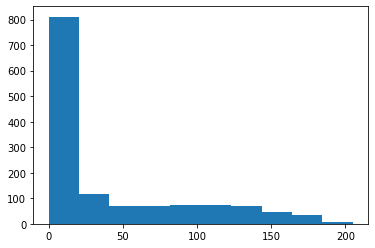

In [34]:
plt.hist(df.hit_distance_sc)

In [35]:
df = po24
res = results('player_name')
res[res.pitches >= 500].sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip   hits   hrs  walks  \
5       Harper, Bryce     2547         637  422  161.0  31.0   70.0   
14    Schwarber, Kyle     2936         708  394  144.0  39.0  104.0   
19       Turner, Trea     2121         558  418  152.0  21.0   29.0   
0          Bohm, Alec     2161         619  487  156.0  15.0   39.0   
1   Castellanos, Nick     2392         676  483  161.0  24.0   39.0   
12     Realmuto, J.T.     1655         430  286  101.0  14.0   29.0   
9      Marsh, Brandon     2059         491  280  105.0  16.0   50.0   
15      Sosa, Edmundo     1066         280  188   65.0   7.0   13.0   
17      Stott, Bryson     2368         582  429  126.0  11.0   53.0   
13       Rojas, Johan     1353         369  281   83.0   3.0   14.0   
10   Merrifield, Whit      633         175  138   31.0   3.0   15.0   
18    Stubbs, Garrett      746         187  115   34.0   1.0   17.0   

    strikeouts     ba    obp    slg    ops   woba  
5          143  0.286  0.366  0.530  0.896  0.383  
14         203  0.244  0.359  0.480  0.838  0.362  
19         103  0.291  0.335  0.460  0.795  0.344  
0           86  0.275  0.325  0.438  0.763  0.330  
1          141  0.258  0.311  0.435  0.746  0.323  
12         106  0.257  0.319  0.415  0.733  0.321  
9          157  0.242  0.320  0.406  0.726  0.317  
15          68  0.255  0.311  0.416  0.726  0.315  
17          97  0.244  0.313  0.356  0.669  0.295  
13          70  0.242  0.274  0.321  0.594  0.260  
10          19  0.197  0.274  0.293  0.567  0.256  
18          50  0.206  0.294  0.261  0.555  0.256

In [36]:
df = bm = po24[po24.player_name == 'Marsh, Brandon']
mz = marsh_zones = results('zone')
mz[mz.zone < 10]

zone  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba    obp  \
0   1.0      125          23    8   6.0  0.0    0.0          15  0.261  0.261   
1   2.0      102          38   26   8.0  3.0    0.0          12  0.211  0.211   
2   3.0       77          12    6   0.0  0.0    1.0           5  0.000  0.083   
3   4.0      145          52   33  18.0  2.0    0.0          19  0.353  0.346   
4   5.0      150          58   49  19.0  2.0    0.0           9  0.333  0.328   
5   6.0       97          43   39  17.0  3.0    0.0           4  0.405  0.395   
6   7.0       77          27   21   7.0  1.0    0.0           6  0.259  0.259   
7   8.0      112          46   39  14.0  3.0    0.0           7  0.311  0.304   
8   9.0       74          27   22   7.0  2.0    0.0           5  0.269  0.259   

     slg    ops   woba  
0  0.348  0.609  0.262  
1  0.500  0.711  0.297  
2  0.000  0.083  0.057  
3  0.529  0.876  0.372  
4  0.526  0.854  0.361  
5  0.643  1.038  0.439  
6  0.370  0.630  0.272  
7  0.600  0.904  0.377  
8  0.577  0.836  0.341

In [37]:
# Another debilitating inning from the bottom of the lineup. Rojas as a spark plug.

In [38]:
df = pps[(pps.game_pk.isin(nymgms.game_pk.tolist()))
    &(pps.pitcher == 614179)
   ]
results('game_date')

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0  2024-05-13       10           3    2   0.0  0.0    0.0         1.0  0.000   
1  2024-05-16       30           6    3   0.0  0.0    0.0         3.0  0.000   
2  2024-06-08       21           5    4   2.0  0.0    1.0         0.0  0.500   
3  2024-06-09        3           1    1   0.0  0.0    0.0         0.0  0.000   
4  2024-09-13       16           3    2   1.0  0.0    0.0         1.0  0.333   
5  2024-09-15       12           3    2   0.0  0.0    0.0         1.0  0.000   
6  2024-09-19       20           5    3   2.0  0.0    2.0         0.0  0.667   
7  2024-09-21       20           5    4   1.0  0.0    1.0         0.0  0.250   
8  2024-10-06       16           6    6   3.0  1.0    0.0         0.0  0.500   
9  2024-10-08        2           1    1   1.0  0.0    0.0         0.0  1.000   

     obp    slg    ops   woba  
0  0.000  0.000  0.000  0.000  
1  0.000  0.000  0.000  0.000  
2  0.600  0.500  1.100  0.491  
3  0.000  0.000  0.000  0.000  
4  0.333  0.333  0.667  0.294  
5  0.000  0.000  0.000  0.000  
6  0.800  1.000  1.800  0.703  
7  0.400  0.500  0.900  0.389  
8  0.500  1.000  1.500  0.635  
9  1.000  1.000  2.000  0.882

In [39]:
# ok let's get real fucking weird with it
files = os.listdir()
ipynbs = [f for f in files if '2024.ipynb' in f]
ipynbs

['AI Generated Phillies Season Analysis - 2024.ipynb',
 'August 2024.ipynb',
 'July 2024.ipynb',
 'June 2024.ipynb',
 'March and April 2024.ipynb',
 'May 2024.ipynb',
 'October 2024.ipynb',
 'September 2024.ipynb']

In [40]:
# does the Phillies walk rate plummet in the playoffs?
# walk rate
df = pos
results('game_year')
tot = pd.DataFrame()
for gy in [2022,2023,2024]:
    df = pos[pos.game_year == gy]
    res = results('game_type')
    res['game_year'] = gy
    tot = pd.concat([tot,res])

In [41]:
tot

game_type  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0         D      544         147   102    36    5      8          35  0.271   
1         F      294          71    47     9    1      8          14  0.158   
2         L      656         168   111    37   10     10          45  0.237   
3         R    23854        6079  4183  1392  205    463        1363  0.252   
4         W      888         216   120    31    8     22          71  0.163   
0         D      609         153    94    36   11     18          38  0.273   
1         F      282          69    44    18    2      3          22  0.273   
2         L      956         251   164    51   11     24          60  0.229   
3         R    24250        6194  4115  1417  220    514        1480  0.255   
0         D      602         150    91    24    3     16          38  0.185   
1         R    23754        6156  4217  1423  198    493        1368  0.256   

     obp    slg    ops   woba  game_year  
0  0.313  0.459  0.772  0.330       2022  
1  0.268  0.263  0.531  0.243       2022  
2  0.292  0.494  0.785  0.337       2022  
3  0.314  0.421  0.734  0.320       2022  
4  0.259  0.321  0.580  0.262       2022  
0  0.366  0.561  0.927  0.392       2023  
1  0.304  0.485  0.789  0.335       2023  
2  0.303  0.439  0.742  0.318       2023  
3  0.323  0.437  0.760  0.328       2023  
0  0.293  0.300  0.593  0.272       2024  
1  0.321  0.424  0.745  0.324       2024

In [42]:
df = bs = pos[pos.player_name == 'Stott, Bryson']
df = bs[bs.p_throws == 'R']
res = results('pitch_type').sort_values(by='pitches',ascending=False)
res[res.pitch_type.isin(['FF','CH'])]
df = df[df.release_speed >= 95]
results('pitch_type')
df[df.type == 'X']
# nope, yep, he is done

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
151858         FF  2022-10-04           95.8          -1.35           7.09   
152725         SI  2022-09-30           96.1          -2.66           5.97   
153794         FF  2022-09-21           96.2          -2.24           6.00   
154078         SI  2022-09-20           97.7          -2.26           5.73   
154184         FF  2022-09-18           96.5          -1.97           5.79   
...           ...         ...            ...            ...            ...   
227563         FF  2024-04-03           95.2          -1.17           5.93   
227644         FF  2024-04-03           95.1          -1.21           6.18   
227683         FC  2024-04-02           96.6          -0.71           6.28   
227712         FC  2024-04-02           95.6          -0.51           6.42   
228304         FF  2024-03-29           96.7          -1.63           5.89   

          player_name  batter  pitcher       events    description  ...  wHBP  \
151858  Stott, Bryson  681082   434378    field_out  hit_into_play  ...  0.72   
152725  Stott, Bryson  681082   666168       single  hit_into_play  ...  0.72   
153794  Stott, Bryson  681082   592332    field_out  hit_into_play  ...  0.72   
154078  Stott, Bryson  681082   647315  double_play  hit_into_play  ...  0.72   
154184  Stott, Bryson  681082   675911    force_out  hit_into_play  ...  0.72   
...               ...     ...      ...          ...            ...  ...   ...   
227563  Stott, Bryson  681082   593423    field_out  hit_into_play  ...  0.72   
227644  Stott, Bryson  681082   518585    field_out  hit_into_play  ...  0.72   
227683  Stott, Bryson  681082   668933  field_error  hit_into_play  ...  0.72   
227712  Stott, Bryson  681082   668933    field_out  hit_into_play  ...  0.72   
228304  Stott, Bryson  681082   675911    field_out  hit_into_play  ...  0.72   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
151858  0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
152725  0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
153794  0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
154078  0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
154184  0.884  1.261  1.601  2.072   0.2 -0.397  0.114  9.524  3.112  
...       ...    ...    ...    ...   ...    ...    ...    ...    ...  
227563  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227644  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227683  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
227712  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
228304  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[207 rows x 108 columns]

# BACK to the regular scheduled programming

In [44]:
# Kody Clemens opportunities in left_field
po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
kc7 = pps[(pps.hit_location == 7)
          &(pps.fielder_7 == 665019)
         ]
kc7.groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0  field_out    4
1    sac_fly    1
2     single    5

In [45]:
df = ok = pps[pps.player_name == 'Kerkering, Orion']
results('home_team')
ok[ok.events == 'home_run']

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
203471         SI  2024-10-06           96.9          -1.08           5.73   
209858         FF  2024-08-15           96.4          -1.14           5.90   
210745         ST  2024-08-08           86.8          -1.73           5.45   

             player_name  batter  pitcher    events    description  ...  wHBP  \
203471  Kerkering, Orion  607043   689147  home_run  hit_into_play  ...  0.72   
209858  Kerkering, Orion  660688   689147  home_run  hit_into_play  ...  0.72   
210745  Kerkering, Orion  664983   689147  home_run  hit_into_play  ...  0.72   

          w1B    w2B    w3B    wHR runSB  runCS   R/PA    R/W   cFIP  
203471  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
209858  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  
210745  0.882  1.254  1.589  2.048   0.2 -0.405  0.117  9.689  3.166  

[3 rows x 108 columns]

In [46]:
# gotta get the pitcher info right away
df = mp24
df.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
butto = 676130
df = pos[pos.pitcher == butto]
res = results('player_name')
res[res.player_name.isin([#'Realmuto, J.T.'
                          'Marsh, Brandon'
                          ,'Bohm, Alec'
                         ])
   ]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
0      Bohm, Alec       46          11  9.0   5.0  3.0    0.0         1.0   
6  Marsh, Brandon       38           9  7.0   0.0  0.0    1.0         1.0   

    ba    obp  slg    ops   woba  
0  0.5  0.545  1.4  1.945  0.785  
6  0.0  0.111  0.0  0.111  0.077

In [47]:
pitch_mix(mp24[(mp24.pitcher == butto)
               &(mp24.stand == 'R')
              ]).round(2)

pitch_type       pitch_name  count  release_speed  release_spin_rate   zone  \
1         FF  4-Seam Fastball    176          94.47            2396.18   8.04   
2         SI           Sinker    147          93.72            2175.88   9.69   
3         SL           Slider     96          84.97            2631.33  11.05   
0         CH         Changeup     86          87.13            1835.80  11.22   
4         ST          Sweeper     81          82.95            2546.36  11.26   

   usage  
1   30.0  
2   25.1  
3   16.4  
0   14.7  
4   13.8

In [48]:
df = po24[(po24.player_name == 'Bohm, Alec')
    ]#&(po24.
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      635         185  159    49    6     11          15  0.282   
1        R     1526         434  328   107    9     28          71  0.272   

     obp    slg    ops   woba  
0  0.324  0.460  0.784  0.339  
1  0.325  0.429  0.754  0.326

In [49]:
df = kc = po24[po24.player_name == 'Clemens, Kody']
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L       85          21   16     6  0.0      1           4  0.300   
1        R      410         104   72    21  5.0      4          27  0.212   

     obp    slg    ops   woba  
0  0.333  0.450  0.783  0.338  
1  0.250  0.455  0.705  0.299

In [50]:
df = ks = po24[po24.player_name == 'Schwarber, Kyle']
results('pitch_type').sort_values(by='pitches',ascending=False)

pitch_type  pitches  plate_apps    bip  hits   hrs  walks  strikeouts  \
6          FF      905       231.0  129.0  44.0  16.0   44.0        55.0   
13         SL      511       114.0   58.0  25.0   6.0   10.0        44.0   
12         SI      443       113.0   75.0  33.0   3.0   18.0        19.0   
0          CH      305        69.0   34.0  10.0   4.0    7.0        28.0   
2          CU      220        47.0   25.0   9.0   6.0    4.0        18.0   
5          FC      219        58.0   42.0   9.0   2.0    8.0         8.0   
14         ST      162        37.0   14.0   7.0   1.0    8.0        15.0   
8          FS       94        21.0   10.0   4.0   1.0    2.0         9.0   
9          KC       28         6.0    2.0   1.0   0.0    2.0         2.0   
15         SV       25         8.0    2.0   2.0   0.0    1.0         4.0   
10         KN        9         2.0    1.0   0.0   0.0    0.0         1.0   
4          FA        6         1.0    1.0   0.0   0.0    0.0         0.0   
7          FO        3         0.0    0.0   0.0   0.0    0.0         0.0   
11         SC        3         0.0    0.0   0.0   0.0    0.0         0.0   
3          EP        2         1.0    1.0   0.0   0.0    0.0         0.0   
1          CS        1         0.0    0.0   0.0   0.0    0.0         0.0   

       ba    obp    slg    ops   woba  
6   0.243  0.394  0.541  0.935  0.399  
13  0.248  0.316  0.465  0.781  0.335  
12  0.355  0.460  0.495  0.955  0.418  
0   0.161  0.246  0.371  0.617  0.271  
2   0.209  0.277  0.651  0.928  0.384  
5   0.188  0.293  0.396  0.689  0.298  
14  0.241  0.405  0.414  0.819  0.367  
8   0.211  0.286  0.368  0.654  0.289  
9   0.250  0.500  0.250  0.750  0.377  
15  0.333  0.500  0.333  0.833  0.397  
10  0.000  0.000  0.000  0.000  0.000  
4   0.000  0.000  0.000  0.000  0.000  
7     NaN    NaN    NaN    NaN    NaN  
11    NaN    NaN    NaN    NaN    NaN  
3   0.000  0.000  0.000  0.000  0.000  
1     NaN    NaN    NaN    NaN    NaN

In [51]:
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
diaz = diaz_id = 621242
df = pos[pos.pitcher == diaz]
res = results('player_name')
res[res.player_name.isin(['Schwarber, Kyle'
                          ,'Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                         ])
   ]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
3   Castellanos, Nick       33           9  5.0   4.0  0.0    0.0         4.0   
10      Harper, Bryce       74          16  4.0   2.0  2.0    1.0        11.0   
35    Schwarber, Kyle       44           9  1.0   0.0  0.0    0.0         8.0   
40       Turner, Trea       13           4  3.0   1.0  0.0    0.0         1.0   

       ba    obp    slg    ops   woba  
3   0.444  0.444  0.444  0.889  0.392  
10  0.133  0.188  0.533  0.721  0.298  
35  0.000  0.000  0.000  0.000  0.000  
40  0.250  0.250  0.250  0.500  0.220

In [52]:
ks = pos[pos.player_name == 'Harper, Bryce']
df = ks[(ks.zone <= 3)
        &(ks.p_throws == 'R')
        #&(ks.release_speed > 95)
        &(ks.pitch_type.isin(['FC','SL','ST']))
       ]
results('game_year')
# so they threw him a full count slider, K

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2019       38          13    8     2  1.0    0.0         5.0  0.154   
1       2020       20           8    6     3  0.0    0.0         2.0  0.429   
2       2021       20           5    5     2  1.0    0.0         0.0  0.500   
3       2022       38          11    8     2  0.0    0.0         3.0  0.182   
4       2023       28           5    3     1  0.0    1.0         1.0  0.250   
5       2024       38           5    4     2  0.0    0.0         1.0  0.400   

     obp    slg    ops   woba  
0  0.154  0.385  0.538  0.216  
1  0.375  0.571  0.946  0.376  
2  0.400  1.500  1.900  0.650  
3  0.182  0.273  0.455  0.195  
4  0.400  0.250  0.650  0.316  
5  0.400  0.400  0.800  0.353

In [53]:
# Schwarber could have passed the baton.

In [54]:
df = ed = pd.concat([nphl[nphl.pitcher == diaz]
                ,pos[pos.pitcher == diaz]
               ])
inds = df.groupby(['player_name','batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'hit_distance_sc' : 'mean'
                 ,'launch_speed' : 'mean'
                 ,'release_speed' : 'mean'
                })
inds[inds.player_name.isin(['Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                            ,'Stott, Bryson'
                         ]
                      )]

player_name  batter  des  hit_distance_sc  launch_speed  \
4   Castellanos, Nick  592206   45       187.368421     79.168421   
13      Harper, Bryce  547180   74       143.500000     83.223529   
42      Stott, Bryson  681082   30       188.166667     93.383333   
45       Turner, Trea  607208   43       166.500000     81.087500   

    release_speed  
4       94.477778  
13      95.728378  
42      94.296667  
45      93.134884

In [55]:
pitch_mix(df[df.player_name == 'Stott, Bryson'])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         FF  4-Seam Fastball     16      98.256250        2346.937500   
1         SL           Slider     14      89.771429        2285.428571   

       zone  usage  
0  9.812500   53.3  
1  8.928571   46.7

In [56]:
df = df[df.player_name == 'Stott, Bryson']
df.groupby(['game_pk'
            ,'at_bat_number'
            ,'game_date'
            ,'events'
           ],as_index=False).agg({'des' : 'count'})

game_pk  at_bat_number   game_date     events  des
0   661602             90  2022-08-21  field_out    1
1   662428             56  2022-08-13  field_out    1
2   662434             65  2022-08-12  field_out    1
3   745580             72  2024-05-16     single    1
4   745767             64  2024-09-22       walk    1
5   745826             70  2024-05-13   home_run    1
6   775313             72  2024-10-09       walk    1
7   775319             68  2024-10-06     triple    1

In [57]:
# So Now Tyler Megill is in the game?

In [58]:
# Well this fucking game.
# Stott two run triple in the bottom of the 8th put the Phillies in the lead.
# Stott hustles home on a dribbler to Vientos. Two run lead.
# Strahm gives up a two run homer to Vientos in the top of the 9th.
# Gets Nimmo out but here comes Hoffman for Alonso.

# Jeff Hoffman vs Pete Alonso
mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
df = pps[(pps.player_name == 'Hoffman, Jeff')
    &(pps.batter == 624413)
   ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  \
0       2023        7           3    3   0.0  0.0    0.0         0.0  0.0   
1       2024       21           4    1   0.0  0.0    1.0         2.0  0.0   

    obp  slg   ops   woba  
0  0.00  0.0  0.00  0.000  
1  0.25  0.0  0.25  0.172

In [59]:
hays_id = pos[pos.player_name == 'Hays, Austin'].batter.unique()[0]

In [60]:
df = pd.concat([pps[pps.batter == hays_id]
           ,pos[pos.batter == hays_id]
          ])
results('p_throws')

p_throws  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0        L      129          37   26    11  0.0      2           9  0.314   
1        R      317          93   66    20  3.0      1          23  0.225   

     obp    slg    ops   woba  
0  0.351  0.429  0.780  0.340  
1  0.258  0.371  0.629  0.273

In [61]:
trea = pos[pos.player_name == 'Turner, Trea']
df = trea
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

home_team  pitches  plate_apps  bip  hits   hrs  walks  strikeouts     ba  \
0        TEX       39          13   11     5   0.0    0.0           2  0.385   
1        MIL       97          27   19    11   2.0    0.0           8  0.407   
2        CHC       94          27   19    10   2.0    0.0           8  0.370   
3        MIN       47          13   11     4   1.0    1.0           1  0.333   
4         SD       90          21   17     7   1.0    1.0           3  0.350   
5        PHI     2490         640  468   183  32.0   42.0         121  0.309   
6        CLE       51          14    9     4   0.0    1.0           4  0.308   
7        STL      118          28   19     9   0.0    3.0           5  0.360   
8        CWS       63          14    8     3   1.0    1.0           5  0.231   
9         TB       53          14    8     4   1.0    0.0           6  0.286   
10       CIN      128          38   30    11   0.0    4.0           3  0.333   
11       COL       60          13    8     3   0.0    2.0           3  0.273   
12       WSH      185          52   34    11   3.0    2.0          15  0.220   
13       NYY       52          14   10     5   0.0    0.0           4  0.357   
14       LAA       55          14    9     4   0.0    0.0           4  0.308   
15       TOR       65          18   15     4   0.0    2.0           1  0.250   
16       LAD      102          27   22     6   1.0    1.0           4  0.231   
17       DET       57          15   10     3   0.0    1.0           3  0.231   
18        SF       57          15    9     4   0.0    0.0           6  0.267   
19        AZ      190          50   37    10   0.0    5.0           8  0.227   
20       NYM      178          42   31     8   1.0    1.0           8  0.205   
21        KC       53          15   12     4   0.0    0.0           3  0.267   
22       PIT      125          28   17     4   1.0    2.0           9  0.154   
23       MIA      185          47   34     6   2.0    4.0           9  0.140   
24       ATL      232          67   55    10   2.0    2.0           8  0.161   
25       SEA       54          13    9     2   0.0    1.0           3  0.167   
26       OAK       45          14   10     2   0.0    1.0           3  0.154   
27       HOU       39          13    9     2   0.0    0.0           4  0.154   

      obp    slg    ops   woba  
0   0.385  0.769  1.154  0.473  
1   0.407  0.630  1.037  0.443  
2   0.370  0.630  1.000  0.427  
3   0.385  0.583  0.968  0.414  
4   0.381  0.550  0.931  0.398  
5   0.359  0.547  0.907  0.386  
6   0.357  0.538  0.896  0.377  
7   0.429  0.400  0.829  0.370  
8   0.286  0.538  0.824  0.345  
9   0.286  0.500  0.786  0.332  
10  0.421  0.364  0.785  0.357  
11  0.385  0.364  0.748  0.339  
12  0.250  0.480  0.730  0.307  
13  0.357  0.357  0.714  0.315  
14  0.357  0.308  0.665  0.303  
15  0.333  0.312  0.646  0.294  
16  0.259  0.385  0.644  0.277  
17  0.333  0.308  0.641  0.295  
18  0.267  0.333  0.600  0.260  
19  0.300  0.273  0.573  0.261  
20  0.262  0.282  0.544  0.247  
21  0.267  0.267  0.533  0.235  
22  0.214  0.308  0.522  0.230  
23  0.213  0.302  0.515  0.228  
24  0.209  0.306  0.515  0.225  
25  0.231  0.250  0.481  0.217  
26  0.214  0.154  0.368  0.176  
27  0.154  0.154  0.308  0.136

# A Summary of Bryce Harper's greatest AB to date as a Philadelphia Phillies baseball player.
2-2 2 outs man on first, Trea Turner, and Harper spits on a fastball above the zone.<br>
Waino wants the split<br>
AJ wants it in the dirt<br>
Make him take the split down. Bryce Harper does that. A reminder to his teammates, pass the baton.<br>
So now it is Nick Castellanos's turn to step up. Whiff pitch 1, fights off a SI in the dick for strike 2. Takes his timeout.

In [63]:
# Casty spits on a SL in the other batter's box. Good take, Nick.
# Gotta get back to the fastball, or the split?
# Nah, fuck it. He whacks a sl that backs up into left field. Ballgame over. The Phillies split the Mets.
# Back to NYM and the Phillies have to get one. Feels good having Nola going in Game 3, though. He loves pitching at Citi Field.

In [64]:
#casty loves the LDS!

In [65]:
df = pos[pos.game_type == 'D']
res = results('player_name')
nc = res[res.player_name == 'Castellanos, Nick']
nc

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
1  Castellanos, Nick      157          51   42  19.0  5.0    3.0         6.0   

      ba    obp   slg    ops   woba  
1  0.396  0.431  0.75  1.181  0.495

## Game 3: Manaea vs Nola

In [67]:
# Ok some takeaways real quick, post Game 2
# Nola magic @ Citi Field
# Nola on the road in the playoffs?

In [68]:
# Nola magic @ Citi Field
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola
cols = ['home_team'
        ,'away_team'
        ,'player_name'
        ,'game_year'
        ,'game_type'
       ]

In [69]:
df = nola
ht = results('home_team')#.rename(columns = {'home_team' : 'group'})
at = results('away_team')#.rename(columns = {'away_team' : 'group'})
an = results('player_name')#.rename(columns = {'player_name' : 'group'})
gy = results('game_year')#.rename(columns = {'game_year' : 'group'})
gt = results('game_type')#.rename(columns = {'game_type' : 'group'})
z = pd.concat([ht[ht.home_team.isin(['NYM','PHI'])]
               ,at[at.away_team.isin(['NYM', 'PHI'])]
               ,an
              ])
# Nola OPS @ Citi Field is .636 in his career.
# Nola OPS on the road is .702 in his career., .688 anywhere, and in the playoffs

In [70]:
df = nola[nola.game_type != 'R']
ps = postseason = results('player_name')
psgy = postseason_by_year = results('game_year')
ps['group'] = 'playoffs'
psgy['group'] = 'playoff_year'
ht['group'] = 'home_team'
at['group'] = 'away_team'
an['group'] = 'Career'
gy['group'] = 'Year'
#df = nola[nola.game_type == 'R']
gps = pd.concat([
                ps
               #,psgy
               ,ht[ht.home_team == 'NYM']
               ,at[at.away_team == 'PHI']
               ,an
               ,gy[gy.game_year == 2024]
                ])

In [71]:
gps['krate'] = gps.strikeouts / gps.plate_apps
gps['bbrate'] = gps.walks / gps.plate_apps
gps['hrrate'] = gps.hrs / gps.plate_apps

gps[['group'
     ,'pitches'
     ,'plate_apps'
     ,'ba'
     ,'ops'
     ,'krate'
     ,'bbrate'
     ,'hrrate'
     #,'walks'
     #,'strikeouts'
    ]].round(3)

group  pitches  plate_apps     ba    ops  krate  bbrate  hrrate
0    playoffs      850         223  0.248  0.715  0.260   0.049   0.036
14  home_team     1422         365  0.213  0.650  0.301   0.060   0.036
17  away_team    13175        3441  0.248  0.703  0.246   0.061   0.030
0      Career    26406        6858  0.233  0.668  0.267   0.061   0.030
9        Year     3275         844  0.247  0.719  0.242   0.062   0.038

In [72]:
# Nola curveball usage in career vs playoffs vs Citi Field
# Ok, so similar task but going to compare different groups
anpm = pitch_mix(nola)
pspm = pitch_mix(nola[nola.game_type != 'R'])
nympm = pitch_mix(nola[(nola.home_team == 'NYM')
                       |(nola.away_team == 'NYM')
                      ]
                 )
cfpm = pitch_mix(nola[nola.home_team == 'NYM'])
anpm['group'] = 'Aaron Nola Career'
pspm['group'] = 'Aaron Nola Playoffs'
nympm['group'] = 'Aaron Nola against NYM'
cfpm['group'] = 'Aaron Nola @ Citi Field'
#pm['group'] = ''

k = pd.concat([
                anpm[anpm.pitch_type.isin(['CU','KC'])]
               ,pspm[pspm.pitch_type.isin(['CU','KC'])]
               ,nympm[nympm.pitch_type.isin(['CU','KC'])]
               ,cfpm[cfpm.pitch_type.isin(['CU','KC'])]
])
k.groupby('group',as_index=False).agg({'count' : 'sum'
                                       ,'release_speed' : 'mean'
                                       ,'release_spin_rate' : 'mean'
                                       ,'usage' : 'sum'
                                      }).round(2)
#k[['group','release_speed','release_spin_rate','usage']]

group  count  release_speed  release_spin_rate  usage
0  Aaron Nola @ Citi Field    394          77.70            2579.09   27.7
1        Aaron Nola Career   8069          77.76            2543.17   30.5
2      Aaron Nola Playoffs    269          80.03            2645.26   31.6
3   Aaron Nola against NYM    783          77.74            2584.27   28.0

In [73]:
pitch_mix(nola[(nola.game_year==2024)&(nola.away_team == 'NYM')])

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         KC    Knuckle Curve     34      79.250000        2587.176471   
4         SI           Sinker     25      92.080000        2231.800000   
2         FF  4-Seam Fastball     17      92.800000        2339.176471   
0         CH         Changeup      7      85.757143        1513.571429   
1         FC           Cutter      7      88.271429        2271.428571   

        zone  usage  
3  11.058824   37.8  
4   9.800000   27.8  
2   7.588235   18.9  
0   9.714286    7.8  
1  10.714286    7.8

In [74]:
# Finally a recap of each of Nola's starts against the Mets in 2024

In [75]:
df = an_nym_2024 = nola[(nola.game_year==2024)&((nola.away_team == 'NYM') | (nola.home_team == 'NYM'))]
res = results('game_date')

In [76]:
# Box Score
inds = df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'des' : 'count' # get pitches from results
                 ,'inning' : 'nunique'
                 ,'at_bat_number' : 'nunique'
                 # ks from results
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 # bip from results
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'hit_distance_sc' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                 ,'estimated_woba_using_speedangle' : 'mean'
                 ,'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })

In [77]:
data = res.merge(inds, on = 'game_date')
data[['game_date'
      ,'home_team'
      ,'post_home_score'
      ,'away_team'
      ,'post_away_score'
      ,'pitches'
      ,'inning'
      ,'at_bat_number'
      ,'bip'
      ,'hits'
      ,'strikeouts'
      ,'walks'
      ,'hrs'
      #
     ]]
      

game_date home_team  post_home_score away_team  post_away_score  pitches  \
0  2024-05-14       NYM                0       PHI                4      109   
1  2024-09-13       PHI                0       NYM                6       90   
2  2024-10-08       NYM                2       PHI                0       86   

   inning  at_bat_number  bip  hits  strikeouts  walks  hrs  
0       9             30   22     4           8    0.0  0.0  
1       5             21   12     6           7    2.0  2.0  
2       6             22   12     5           8    2.0  2.0

### Top 1

In [79]:
manaea_id = 640455
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
sm = mp24[mp24.pitcher == manaea_id]
phillies_vs_manaea = pd.concat([pos[pos.pitcher == manaea_id]
                                ,nphl[nphl.pitcher == manaea_id]
                               ])
df = posm = pos[pos.pitcher == manaea_id]
res = results('player_name')

In [80]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
20      Sosa, Edmundo       34          11    7   5.0  1.0    0.0         3.0   
18    Schwarber, Kyle       49          11    7   2.0  1.0    3.0         1.0   
7       Harper, Bryce       65          14   11   4.0  1.0    0.0         3.0   
2          Bohm, Alec       41          14   11   3.0  1.0    0.0         3.0   
3   Castellanos, Nick       49          13    9   2.0  1.0    0.0         4.0   
23       Turner, Trea       37           8    5   1.0  0.0    1.0         2.0   
15     Realmuto, J.T.       48          11    5   1.0  0.0    1.0         4.0   
8        Hays, Austin        8           3    1   0.0  0.0    0.0         2.0   
16       Rojas, Johan       35           7    5   0.0  0.0    0.0         2.0   

       ba    obp    slg    ops   woba  
20  0.500  0.545  1.100  1.645  0.665  
18  0.250  0.455  0.625  1.080  0.455  
7   0.286  0.286  0.643  0.929  0.389  
2   0.231  0.214  0.462  0.676  0.269  
3   0.154  0.154  0.462  0.615  0.255  
23  0.143  0.250  0.143  0.393  0.196  
15  0.111  0.273  0.111  0.384  0.208  
8   0.000  0.000  0.000  0.000  0.000  
16  0.000  0.000  0.000  0.000  0.000

In [81]:
ttnp = phillies_vs_manaea[phillies_vs_manaea.player_name == 'Turner, Trea']
ttnp.groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_speed' : 'max'
                                           ,'zone' : 'min'
                                           ,'hit_distance_sc' : 'mean'
                                           ,'launch_angle' : 'mean'
                                           ,'pitch_type' : 'max'
                                          })

events  des  launch_speed  zone  hit_distance_sc  \
0                  field_out    7         106.6   2.0       120.714286   
1  grounded_into_double_play    1          90.7   2.0        45.000000   
2                   home_run    1         103.0   5.0       411.000000   
3                     single    5         108.2   4.0       151.800000   
4                  strikeout    4           NaN   3.0              NaN   
5                       walk    1           NaN  12.0              NaN   

   launch_angle pitch_type  
0     18.571429         SI  
1     -1.000000         FF  
2     33.000000         SL  
3     -1.600000         FF  
4           NaN         FF  
5           NaN         SI

In [82]:
pitch_mix(sm)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         SI           Sinker   1397      92.371725        2031.622963   
5         ST          Sweeper    597      77.764824        2168.726644   
0         CH         Changeup    357      85.331092        1504.075581   
2         FF  4-Seam Fastball    340      92.342647        2003.753709   
1         FC           Cutter    214      88.404673        2043.151659   
4         SL           Slider    177      85.162712        2053.248588   

        zone  usage  
3   7.385827   45.3  
5   9.413735   19.4  
0  10.473389   11.6  
2   7.864706   11.0  
1   8.546729    6.9  
4   8.005650    5.7

In [83]:
rhb_pitch_mix(sm)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
3         SI           Sinker   1031      92.349952        2031.122266   
5         ST          Sweeper    434      77.465899        2167.536131   
0         CH         Changeup    343      85.313703        1505.178788   
2         FF  4-Seam Fastball    283      92.259011        1999.950355   
1         FC           Cutter    180      88.338333        2036.111732   
4         SL           Slider    146      85.200000        2054.958904   

        zone  usage  
3   7.514064   42.7  
5   9.460829   18.0  
0  10.451895   14.2  
2   8.028269   11.7  
1   8.405556    7.4  
4   7.917808    6.0

In [84]:
res[res.player_name == 'Harper, Bryce']

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
7  Harper, Bryce       65          14   11   4.0  1.0    0.0         3.0   

      ba    obp    slg    ops   woba  
7  0.286  0.286  0.643  0.929  0.389

In [85]:
df = posm[posm.game_type == 'R']
res = results('player_name')
res[res.player_name == 'Harper, Bryce']

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  \
7  Harper, Bryce       51          10    8   3.0  1.0    0.0         2.0  0.3   

   obp  slg  ops   woba  
7  0.3  0.7  1.0  0.418

In [86]:
#all three hits fucking smoked, each 106 mph but nonetheless a 1-2-3 inning for Manaea.
po24[po24.type == 'X'].agg({'launch_speed' : ['mean','std','var','median','min','max']}).round(2)

launch_speed
mean           88.59
std            14.80
var           219.12
median         91.50
min            11.50
max           115.80

(array([   2.,   16.,   27.,   63.,  150.,  421.,  774., 1117., 1341.,
         386.]),
 array([ 11.5 ,  21.93,  32.36,  42.79,  53.22,  63.65,  74.08,  84.51,
         94.94, 105.37, 115.8 ]),
 <BarContainer object of 10 artists>)

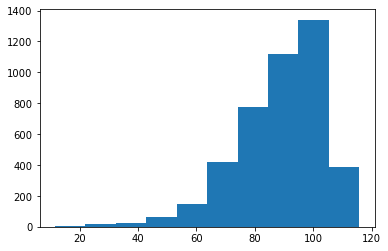

In [87]:
plt.hist(po24[po24.type == 'X'].launch_speed)

In [88]:
po24[(po24.type == 'X')
     &(po24.launch_speed >= 106)
    ].groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_angle' : 'mean'
                                           ,'launch_speed' : 'mean'})

events  des  launch_angle  launch_speed
0                     double   60     14.816667    108.558333
1                double_play    1      7.000000    112.100000
2                  field_out   80      5.475000    107.891250
3                  force_out    5    -14.200000    107.140000
4  grounded_into_double_play    5    -11.400000    108.520000
5                   home_run   75     27.026667    108.893333
6                    sac_fly    1     16.000000    106.800000
7                     single   98      4.724490    108.477551
8                     triple    2     17.000000    107.200000

### Bot 1
Nola gives up a loud first out to Lindor. Caught right in front Kolby Allard in the Phillies bullpen by Johan Rojas.

In [90]:
# just tells Mark Vientos to go fuck himself with that 0-2 curveball.

In [91]:
# Nimmo eats shit against Nola
om = mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
pm = mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
df = nola.merge(om, on = 'batter', suffixes = ('','_mets'))
res = results('player_name_mets')
res[res.player_name_mets == 'Nimmo, Brandon']

player_name_mets  pitches  plate_apps   bip  hits  hrs  walks  strikeouts  \
12   Nimmo, Brandon      313          68  34.0  13.0  2.0   13.0        20.0   

       ba    obp    slg    ops   woba  
12  0.236  0.382  0.382  0.764  0.345

### Top 2

In [93]:
# Lots of contact, J.T. gets plunked with 2 outs but nothing to show for it.

### Bot 2

In [95]:
om.sort_values(by='des',ascending=False)
mets_lineup = ['Lindor, Francisco'
               ,'Vientos, Mark'
               ,'Nimmo, Brandon'
               ,'Alonso, Pete'
               ,'Iglesias, Jose'
               ,'Winker, Jesse'
               ,'Marte, Starling'
               ,'Taylor, Tyrone'
               ,'Alvarez, Francisco'
               #,'Martinez, J.D.'
              ]
res[res.player_name_mets.isin(mets_lineup)]

player_name_mets  pitches  plate_apps   bip  hits  hrs  walks  \
0         Alonso, Pete      225          57  37.0  17.0  6.0    5.0   
1   Alvarez, Francisco       15           4   3.0   2.0  1.0    0.0   
5       Iglesias, Jose       43          11  11.0   5.0  0.0    0.0   
6    Lindor, Francisco      146          39  27.0   7.0  0.0    1.0   
7      Marte, Starling      109          33  23.0  11.0  1.0    0.0   
12      Nimmo, Brandon      313          68  34.0  13.0  2.0   13.0   
14      Taylor, Tyrone       56          14   9.0   4.0  0.0    1.0   
16       Vientos, Mark       23           6   4.0   2.0  0.0    0.0   
18       Winker, Jesse      107          28  24.0   5.0  2.0    2.0   

    strikeouts     ba    obp    slg    ops   woba  
0         15.0  0.327  0.386  0.731  1.117  0.462  
1          1.0  0.500  0.500  1.250  1.750  0.732  
5          0.0  0.455  0.455  0.545  1.000  0.434  
6          9.0  0.194  0.256  0.250  0.506  0.232  
7         10.0  0.333  0.333  0.485  0.818  0.353  
12        20.0  0.236  0.382  0.382  0.764  0.345  
14         3.0  0.333  0.429  0.500  0.929  0.406  
16         2.0  0.333  0.333  0.333  0.667  0.294  
18         2.0  0.192  0.250  0.423  0.673  0.290

In [96]:
# Pete Alonso takes Aaron Nola deep to start the bottom of the second inning. Tough.
# Iglesias then gets a hit, oh brother. The big inning.

# Holy shit, that was incredible.
# Winker hits a high flyball that would have been a homer at CBP, pushes Castellanos to the wall who leaps to make the catch.
# Chaos ensues and we get a long video review since Casty dropped the ball on the transfer, got called a hit on the field. Bleh.
# Nola then gets a towering flyout from Marte on the first pitch. Battles through a Tyrone Taylor hard-hit foul to get the whiff K.

# If that was the big inning, wow. Just the one run for the Mets thanks to a clutch defensive play by Nick Castellanos and a bit of luck.

### Top 3

In [98]:
# Needing to bounce back, the Phillies best hitter against Sean Manaea steps up and wears the first pitch off his elbow pad.
# Rojas bunt? Yes, he takes the first pitch ST off the plate

In [99]:
# Sosa could run?

In [100]:
# No showing bunt, Rojas takes 90 right down the pipe. Maybe it was a front door, let's try a quick Statcast Search.

In [101]:
# Takes an ugly swing at a CH in the other batter's box. Damn.

In [102]:
# Spits on the a worse version of the same pitch.

In [103]:
# Probably getting the high heat here.

In [104]:
# Can't catch up. Damn. But a runner on and just the one out as the lineup turns over. Come on, Kyle!

In [105]:
df = posm
x = results('player_name')
x[x.player_name.isin(lineup)]

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
2          Bohm, Alec       41          14   11   3.0  1.0    0.0         3.0   
3   Castellanos, Nick       49          13    9   2.0  1.0    0.0         4.0   
7       Harper, Bryce       65          14   11   4.0  1.0    0.0         3.0   
8        Hays, Austin        8           3    1   0.0  0.0    0.0         2.0   
15     Realmuto, J.T.       48          11    5   1.0  0.0    1.0         4.0   
16       Rojas, Johan       35           7    5   0.0  0.0    0.0         2.0   
18    Schwarber, Kyle       49          11    7   2.0  1.0    3.0         1.0   
20      Sosa, Edmundo       34          11    7   5.0  1.0    0.0         3.0   
23       Turner, Trea       37           8    5   1.0  0.0    1.0         2.0   

       ba    obp    slg    ops   woba  
2   0.231  0.214  0.462  0.676  0.269  
3   0.154  0.154  0.462  0.615  0.255  
7   0.286  0.286  0.643  0.929  0.389  
8   0.000  0.000  0.000  0.000  0.000  
15  0.111  0.273  0.111  0.384  0.208  
16  0.000  0.000  0.000  0.000  0.000  
18  0.250  0.455  0.625  1.080  0.455  
20  0.500  0.545  1.100  1.645  0.665  
23  0.143  0.250  0.143  0.393  0.196

In [106]:
ks = pos[pos.player_name == 'Schwarber, Kyle']
df = ks[(ks.p_throws == 'L')
        &(ks.pitch_type == 'SI')
       ]
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2022      228          57   37    15    3      9          11  0.312   
1       2023      233          58   29    10    5     10          18  0.217   
2       2024      269          72   50    20    2     11          10  0.333   

     obp    slg    ops   woba  
0  0.421  0.500  0.921  0.404  
1  0.362  0.587  0.949  0.394  
2  0.444  0.467  0.911  0.403

In [107]:
# Nope, Schwarber cannot catch up to 95 at the top of the zone. Ok, pass the baton to Trea.

In [108]:
# Trea passes the baton with a first-pitch knock to left. Attaboy Trea!

In [109]:
# Can Sosa get to third?
# Fuck Harper whiffs at the ST first pitch
# ST again and he fouls it off. F.

In [110]:
# Harper weakly pokes one back to Manaea. Ok, just pass the baton fellas.

### Bot 3
Could go for a shutdown inning here, Aaron Nola. Even though the Phillies did not score, they forced some high-stress pitches from Manaea.

In [112]:
# Due up, Alvarez who will be aggressive, then Lindor who will be patient followed by Vientos who you cannot throw a changeup to.

In [113]:
mopp = pps.merge(om,on = 'batter', suffixes = ('','_mets'))
df = mopp
res = mets_res = results('player_name_mets')
res

player_name_mets  pitches  plate_apps  bip  hits   hrs  walks  \
0     Acuña, Luisangel       67          24   18     6   1.0    1.0   
1         Alonso, Pete     1546         406  273    88  19.0   38.0   
2        Alvarez, Eddy       45          12   10     2   0.0    0.0   
3   Alvarez, Francisco      246          64   40    10   5.0    4.0   
4      Bader, Harrison      238          63   41    10   1.0    5.0   
5          Baty, Brett      274          67   46    12   1.0    2.0   
6           Gamel, Ben      399          98   60    23   4.0    8.0   
7       Iglesias, Jose      443         120   98    38   3.0    2.0   
8    Lindor, Francisco     1127         289  202    61   6.0   26.0   
9      Marte, Starling     1226         312  225   102   7.0   14.0   
10      Martinez, J.D.      608         150   86    27   4.0   23.0   
11        McNeil, Jeff     1229         343  271    98   6.0   22.0   
12       Narváez, Omar      189          45   30     8   1.0    3.0   
13         Nido, Tomás      270          81   52    19   0.0    3.0   
14      Nimmo, Brandon     1847         441  279    91  14.0   68.0   
15         Short, Zack       28           8    6     3   0.0    0.0   
16         Stewart, DJ       96          25   13     3   0.0    3.0   
17      Taylor, Tyrone      316          79   54    14   2.0    7.0   
18       Torrens, Luis      105          26   14     4   0.0    3.0   
19       Vientos, Mark      340          88   48    22   4.0    6.0   
20        Wendle, Joey      357         110   86    23   2.0    3.0   
21       Winker, Jesse      340          90   64    12   2.0   11.0   

    strikeouts     ba    obp    slg    ops   woba  
0            5  0.261  0.292  0.522  0.813  0.343  
1           82  0.251  0.342  0.476  0.818  0.352  
2            1  0.182  0.250  0.364  0.614  0.264  
3           20  0.169  0.219  0.441  0.659  0.277  
4           17  0.172  0.238  0.259  0.497  0.225  
5           18  0.190  0.224  0.270  0.494  0.217  
6           28  0.261  0.337  0.443  0.780  0.337  
7           20  0.322  0.333  0.449  0.782  0.336  
8           55  0.239  0.322  0.369  0.690  0.306  
9           61  0.358  0.407  0.530  0.937  0.402  
10          37  0.220  0.353  0.390  0.744  0.331  
11          42  0.315  0.373  0.457  0.830  0.359  
12          12  0.190  0.244  0.310  0.554  0.244  
13          24  0.247  0.284  0.325  0.609  0.267  
14          89  0.249  0.370  0.423  0.793  0.349  
15           2  0.375  0.375  0.375  0.750  0.331  
16           7  0.150  0.320  0.200  0.520  0.262  
17          17  0.197  0.278  0.310  0.588  0.265  
18           8  0.182  0.308  0.182  0.490  0.243  
19          34  0.272  0.318  0.481  0.800  0.341  
20          18  0.223  0.264  0.369  0.633  0.274  
21          13  0.156  0.278  0.260  0.538  0.251

In [114]:
# just a steady diet of KC for Lindor, two to start him here in the third.

In [115]:
# tries to throw a front door sinker but it misses up.

In [116]:
# Gets to his CH but it is low, gonna be the curve I suspect.

In [117]:
# It is, and Lindor throws it straight out to Rojas. One down.

In [118]:
# Mark Vientos steps in and rolls over the first pitch KC, turn it.

In [119]:
# lol jk, he fouls off the actual first pitch SI diving into Zone 7.

In [120]:
# 79 mph KC below the zone (south of 7 or 8) gets looped into left but playable for Hays.

In [121]:
# does Nola usually get more whiffs?

In [122]:
# He pops up a first pitch CH. Ok, so Harper and Schwarber did not come through. Will the bottom of the order?

### Top 4

In [124]:
# Casty is swinging at the first pitch

In [125]:
nc = po24[po24.player_name == 'Castellanos, Nick']
df = nc[nc.pitch_number == 1]
res = results('player_name')

In [126]:
res.bip/res.pitches # He put the ball in play 17.5% of the first pitches he saw, how about the ones he swung at?

0    0.177515
dtype: float64

In [127]:
df.groupby('description',as_index=False).agg({'des' : 'count'})
# he hits it foul

description  des
0                     ball  190
1             blocked_ball    9
2            called_strike  127
3                     foul  108
4                 foul_tip    8
5             hit_by_pitch    3
6            hit_into_play  120
7          swinging_strike  108
8  swinging_strike_blocked    3

In [128]:
# Good take 0-2 Casty.

In [129]:
# Make him throw a heater over the plate, which he does and Casty "flexes it foul"
# Pass the baton boys.

In [130]:
# Great take, he won't climb the ladder.

In [131]:
# Gets one in the zone but is late and fouls it off.

In [132]:
# Gotta be a CH I imagine, but Casty hit one out in September on a Zone 9 CH from Manaea so he sticks with the heater.

In [133]:
# Castellanos flies out to right, but a decent at bat. Pass the baton.

In [134]:
# Alec Bohm - needs to pass the baaton.
# He does just that by splitting the gap but thrown out at second by Tyrone Taylor. Holy shit.

In [135]:
# Great patience by JT to lay off the first two pitches, get Manaea back in the at bat.
# Whiffs at a 2-0 CH below the zone. Wow, just wow.

In [136]:
# Big ST sits in the zone and Realmuto yanks it into the dugout.

### Bot 4

In [138]:
# Nola spins to KC below the zone then drops two hammer SIs into 7.
# Spins a KC in the dirt but now is full against a lead off Alonso, gotta be in the zone.
# And he dots the 92 mph SI at the knees. Phew.

In [139]:
# Iglesias smacked a KC through the 5-6 hole his first time up, let's go right at him, Noles.

In [140]:
# Again with the heater in on the hands.

In [141]:
# FC just spins a little too much out. Get it out there, really out there huh JT?
# Runs the heater up in a 1-1 count, not great.
# ~KC~ Instead he throws the SI and gets a weak liner tossed back to him by Iglesias.

In [142]:
# Winker takes a FF up, he hit a ball a long way his first time. Now he is ahead 2-0.

In [143]:
# Does he get a KC?

In [144]:
# No, a CH at the knees in Zone 7, tremendous call there JT. I think if that misses they still do not eed to get Winker.
# Well, they went ahead and fed Winker a 93 mph FF right down the pipe.

In [145]:
# He crushes it, just unbelievable. Get to the plate, boys.

In [146]:
# Nola nerves of steel just dots a 93 SI into Zone 9 to start off Marte. Hunker down, Noles.

In [147]:
# KC in the dirt.

In [148]:
# KC in the dirt again and a whiff by Marte.

In [149]:
# KC in the dirt to get out of this inning. Ok, Nola.

### Top 5
Time for the sticks to step up. Hays to lead off followed by Sosa and Rojas. Can the bottom of the order do it? This is why we have the platoon. It is as simple as that.

In [151]:
# Austin Hays, you crush lefties, you have not faced Manaea much
rsm = rhb_pitch_mix(sm)
sm[sm.stand == 'R'].groupby(['pitch_type'],as_index=False).agg({'release_speed' : 'std'
                                                                ,'release_spin_rate' : 'std'
                                                               })

pitch_type  release_speed  release_spin_rate
0         CH       1.497137         238.216489
1         FC       1.450304          84.926927
2         FF       1.681822          90.155566
3         SI       1.406523          83.378917
4         SL       1.285945          87.736901
5         ST       2.004277         105.503761

In [152]:
# Hays falls behind on a first pitch ST then whiffs on a 91 mph SI above the zone.

In [153]:
# Hays then whiffs on a CH. Well thanks for the contributions this season Austin Hays.

In [154]:
# Sosa meanwhile whiffs at a ST that hits him on the backfoot, whoops.

In [155]:
# Then he chases a CH out of the zone too. Great.

In [156]:
# Rojas has consistently been a problem the first two games.

In [157]:
# He is not.

### Bot 5

In [159]:
# Nola drops a good CH with two strikes to Taylor. Punchout.

In [160]:
# Gotta get Alvarez.

In [161]:
# Back door SI to start.

In [162]:
# spits on KC in the dirt.

In [163]:
# Reached back for 95 on that backdoor SI, but it didn't come back enough.
# Hard shake by Nola and he gets a pitch clock violation.
# Full count.

In [164]:
# Dots 92 into Zone 7. Phew.

In [165]:
# Tries to get back to the glove side SI but can't get it to come back.
# Bounces a KC into Doug Eddings. Sheesh.

In [166]:
# 2-0 CH? Ehh I am not sure that plays against Lindor.
# JT knows better and calls a KC that Lindor whiffs. Prbbably a strike anyway. Beautiful.
# Follows it up with another one. Art.

In [167]:
# Beats him up and away with 95. A little bit of fuck you to that inning, Noles. Let's fucking go.

### Top 6
Top of the order coming up, it is time boys. Pass the baton.

In [169]:
# Starts Schwarber off with a first pitch CH, whiff. Damn.

In [170]:
# Kyle Schwarber, the ultimate professional. Draws a walk after falling behind 0-2. Stud.

In [171]:
# Trea Turner, pass the baton.

In [172]:
# I was thinking bunt and Trea shows it, gets a first pitch ball. They throw down to first behind Schwarber.
# Meanwhile Turner takes a huge whack at a CH, I feel the breeze from Philadelphia.

In [173]:
# 2-1, spits on a CH
# 3-1: 

In [174]:
# Turner draws the walk. Pass the baton.

In [175]:
# Bryce, don't be the hero. Pass the baton.

In [176]:
# left on left CH that gets a whiff from Bryce. He was swinging at a ST I think.

In [177]:
# He gets the ST 0-1 and whiffs. Pass the baton, Bryce. Battle.

In [178]:
# Nope, he just waves at a ST. Tough.

In [179]:
# Ok, Casty what do you say?

In [180]:
# Casty is seeing the gas. Manaea going straight fastballs. Couple of foul balls. Come on, Nick. Have to see this CH. Lines into a DP.

### Bot 6
Imagine you stick with Nola here but got to have someone getting warm behind him.

In [182]:
# I have given up on coding and stepped into typing.

In [183]:
# skip, idc I am going to eat and hope this is a quick one.

# Nola vs Alonso
Two on in the bottom of the 6th, feels like a huge moment. Because it is a huge moment.
<br> Kerkering or Nola? Long discussion in the dugout.

In [185]:
# They stick with Nola who dots a SI in Zone 7.

In [186]:
# Nola tries to hit him.

In [187]:
# Nola building to his KC.

In [188]:
# Gets a huge whiff on a curveball in the dirt at 2-1.

In [189]:
# Nola walks the bases loaded. Nice.

In [190]:
# No, Kerkering ST gets sent into center for a two run knock by Starling Marte. Gotta dig deep.

### Top 7

### Bot 7

In [193]:
# Well, Alvarado loads the bases.
# Ruiz gives up a 2-run single to Jose Iglesias.
# Just not sure what to say.

### Top 8
Edmundo beats out an infield hit.

In [195]:
# Pinch Hit Punchout from Brandon Marsh.

In [196]:
# Schwarber passes the baton.
# Now Turner has to do it.

In [197]:
# He squibs one up the first base line, 2 outs.

In [198]:
# Harper 3-0 heater in zone 2.
# AJ Pierzynski wants a fastball. To your point AJ, so what?

In [199]:
#Casty says I can pass the baton.

In [200]:
# Yes he can, single to left on the first pitch from Stanek. Pass the baton, Raffy!

In [201]:
# Bohm kills the rally. Marsh, Turner, and Bohm record the three outs.

In [202]:
# Just can't have it, boys.

### Bot 8

In [204]:
# Tanner Banks? Idk maybe give Hoffman some play? Save Estevez for the proverbial 9th.

In [205]:
# No it is Estevez and it is brutal. Off to a tough start by walking JD Martinez.

In [206]:
# Then he makes a mess of a weak comebacker. Now it is 2-2 to Alvarez.

In [207]:
# Just blows him away. Nice.

In [208]:
# Lindor makes sure that we are going five games here, right? The Phillies bullpen has just been a disaster this series. Who pitches tomorrow

### Top 9

In [210]:
# Not sure what the point is, fellas. J.T. to get us started.
# Win-or-go-home the rest of the way. Welcome to the playoffs, fellas.

In [211]:
# Realmuto and Stott offer very little.
# Do we think Kody Clemens can do it?

## Game 4: Quintana vs Suarez
That is it. The Phillies lose to the NYM in the NLDS. Bummer. Tough end to a tremendous season. Ultimately, a failure.
<br> Not ready to write about this yet, as of 10/12/2024. T+4 days since the end of the Phillies season.

# My First Attempt at Offseason Thoughts
The date is October 25, 2024. It is Uncle David's birthday. I will send him a text. That seems like a good thing to do before I get high.

I am currently high, in the basement. It just turned to midnight. I am going throw on a video of montage of The Downfall of Mayor Royce.

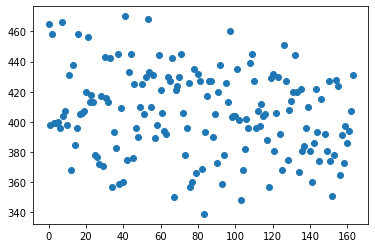

In [214]:
df = bh3 = pos[(pos.player_name == 'Harper, Bryce')
               &(pos.events == 'home_run')
              ]
df = df.sort_values(by=['game_date','at_bat_number']).reset_index(drop=False).reset_index(drop=False)
plt.scatter(df.level_0, df.hit_distance_sc)

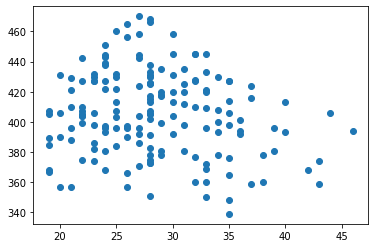

In [215]:
plt.scatter(df.launch_angle, df.hit_distance_sc)

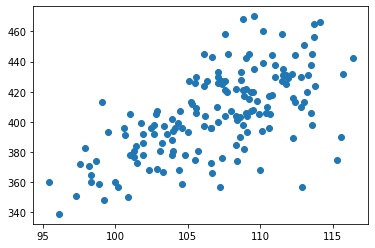

In [216]:
plt.scatter(df.launch_speed, df.hit_distance_sc)

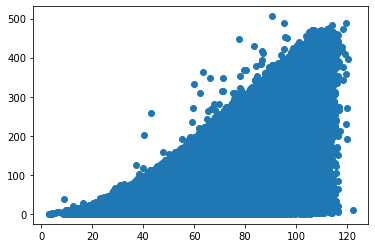

In [217]:
k = pd.concat([pos,pps])
plt.scatter(k.launch_speed, k.hit_distance_sc)

In [218]:
bh3_hrs = bh3[bh3.events == 'home_run']

In [219]:
df = bh3_hrs
b = df.groupby(['game_pk','at_bat_number'
            ,'game_year'
            # ,'game_date'
            # ,'inning'
            # ,'outs_when_up'
            # ,'home_team'
            # ,'away_team'
           ],as_index=False).agg({'hit_distance_sc' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'launch_angle' : 'mean'
                                 })
c = b.groupby(['game_year'],as_index=False).agg({'hit_distance_sc' : 'mean','launch_speed' : 'mean'})

In [220]:
c.round(2)

game_year  hit_distance_sc  launch_speed
0       2019           411.14        107.49
1       2020           405.31        105.42
2       2021           410.49        108.05
3       2022           400.50        107.47
4       2023           409.62        108.03
5       2024           393.67        104.47

In [221]:
group = 'game_year'
gys = pos.groupby(group,as_index=False
           ).agg({'hit_distance_sc' : 'mean'
                        ,'launch_speed' : 'mean'
                        ,'launch_angle' : 'mean'
                        ,'release_speed'  :'mean'
                        ,'release_spin_rate' : 'mean'
                       }).round(2)
gys

game_year  hit_distance_sc  launch_speed  launch_angle  release_speed  \
0       2015           168.51         86.46         11.45          88.86   
1       2016           160.97         83.42         15.90          89.31   
2       2017           161.86         82.15         15.42          88.91   
3       2018           160.19         83.07         17.05          89.01   
4       2019           164.73         84.15         17.43          88.89   
5       2020           158.24         82.77         18.24          88.39   
6       2021           150.71         81.61         16.09          89.07   
7       2022           155.74         82.74         17.58          89.08   
8       2023           157.03         82.99         17.09          89.11   
9       2024           155.05         82.74         16.71          88.94   

   release_spin_rate  
0            2122.56  
1            2184.76  
2            2201.22  
3            2203.80  
4            2261.45  
5            2216.71  
6            2224.40  
7            2247.89  
8            2254.34  
9            2247.73

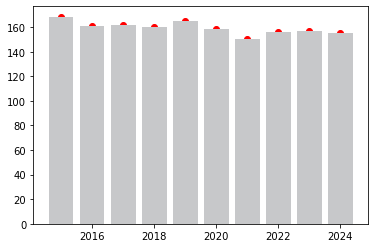

In [223]:
x = gys.game_year
y = gys.hit_distance_sc
plt.scatter(x,y, color = 'red')
plt.bar(x,y, color = '#c7c8ca')
#plt.annotate(x,y)
plt.show()

## A Bar Chart that compares the Phillies Expected Batting Average to their Batting Average in the statcast era
<br>Includes a check on OBP, SLG, OPS, and WOBA.
<br>Chicks dig the wOBA

### Gemini's Attempt at this thing
<br>This works, so now I need to prepare the data to get these columns.
<br> Well, I do not know if it works, but I believe it does so I need to prepare the data in order to validate the data.

<br> I want to be a Quality Analyst at a leading development firm. That is what I want to do, Seana.

In [228]:
# Prep Test Data set
# While watching pornography, holy shit.
# ok
df = pos
res = results('game_year')
res

game_year  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
0       2015    22643        6064  4337  1374  130    367        1274  0.248   
1       2016    22887        6007  4134  1305  161    391        1376  0.239   
2       2017    24133        6117  4175  1382  174    469        1417  0.249   
3       2018    24616        6110  3968  1270  186    549        1520  0.234   
4       2019    24905        6221  4186  1369  215    515        1453  0.245   
5       2020     8683        2210  1486   500   82    213         480  0.256   
6       2021    23823        6059  4054  1288  198    527        1402  0.240   
7       2022    26236        6681  4563  1505  229    511        1528  0.249   
8       2023    26097        6667  4417  1522  244    559        1600  0.255   
9       2024    24356        6306  4308  1447  201    509        1406  0.255   

     obp    slg    ops   woba  
0  0.296  0.381  0.677  0.294  
1  0.292  0.383  0.675  0.291  
2  0.310  0.408  0.718  0.309  
3  0.308  0.392  0.700  0.305  
4  0.312  0.426  0.738  0.312  
5  0.335  0.439  0.774  0.335  
6  0.311  0.408  0.718  0.310  
7  0.311  0.419  0.730  0.318  
8  0.323  0.440  0.763  0.329  
9  0.321  0.421  0.741  0.323

In [229]:
xpos = pd.read_csv('xpos.csv')
xpps = pd.read_csv('xpps.csv')

df = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes = ('','_x'))
df[['game_year'
    ,'pitches'
    ,'ba'
    ,'xba'
   ]]

game_year  pitches     ba    xba
0       2015    22643  0.248  0.242
1       2016    22887  0.239  0.234
2       2017    24133  0.249  0.241
3       2018    24616  0.234  0.227
4       2019    24905  0.245  0.243
5       2020     8683  0.256  0.258
6       2021    23823  0.240  0.240
7       2022    26236  0.249  0.249
8       2023    26097  0.255  0.252
9       2024    24356  0.255  0.255

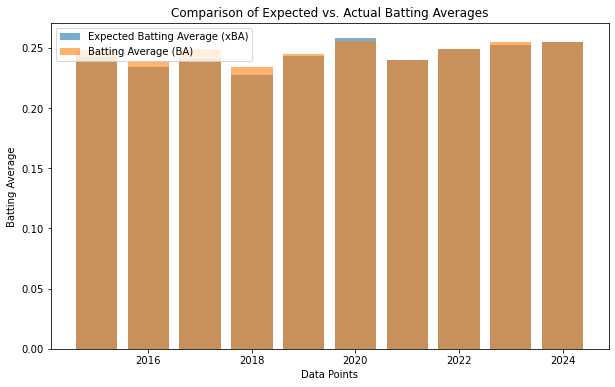

In [232]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame

x = df['game_year']  # Replace with your x-axis values
xba = df['xba']
ba = df['ba']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, xba, alpha=0.6, label='Expected Batting Average (xBA)')
plt.bar(x, ba, alpha=0.6, label='Batting Average (BA)')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Batting Average')
plt.title('Comparison of Expected vs. Actual Batting Averages')
plt.legend()

# Show the plot
plt.show()

In [234]:
# Ok so it is not the best data analyst I have ever seen.

### ChatGPT Attempt
This one might be better

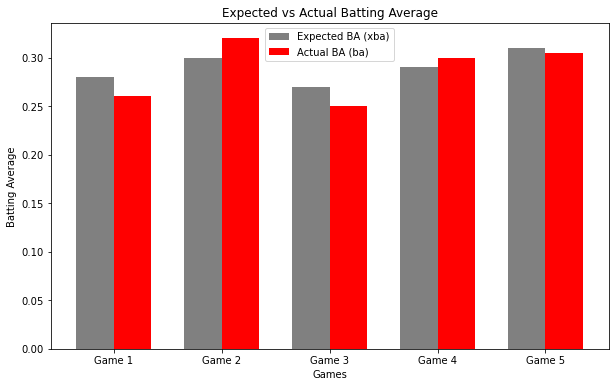

In [237]:
import numpy as np

# Sample data simulating expected and actual batting averages
data = {
    'x': ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5'],
    'xba': [0.280, 0.300, 0.270, 0.290, 0.310],  # Expected batting average
    'ba': [0.260, 0.320, 0.250, 0.300, 0.305]     # Actual batting average
}
df = pd.DataFrame(data)

# Create a bar plot
bar_width = 0.35
x_labels = df['x']
index = np.arange(len(df))

plt.figure(figsize=(10, 6))
plt.bar(index, df['xba'], bar_width, color='grey', label='Expected BA (xba)')
plt.bar(index + bar_width, df['ba'], bar_width, color='red', label='Actual BA (ba)')

# Set labels and title
plt.xlabel("Games")
plt.ylabel("Batting Average")
plt.title("Expected vs Actual Batting Average")
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

plt.show()


# 1. Nick Castellanos hitting home runs

In [247]:
nc = pos[pos.player_name == 'Castellanos, Nick']
nc_np = nphl[nphl.player_name == 'Castellanos, Nick']
nc_np = nc_np.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_yamomma'))
df = pd.concat([nc,nc_np])
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2015     2317         595  403   140   15     38         152  0.255   
1       2016     1729         447  305   117   18     27         111  0.285   
2       2017     2605         666  477   167   26     41         142  0.271   
3       2018     2439         673  472   185   23     44         151  0.298   
4       2019     2436         664  475   178   27     40         143  0.289   
5       2020     1005         251  156    52   14     18          73  0.228   
6       2021     2143         580  416   164   34     36         121  0.309   
7       2022     2320         628  443   150   13     32         148  0.254   
8       2023     2614         723  481   180   34     38         199  0.267   
9       2024     2392         676  483   161   24     39         141  0.258   

     obp    slg    ops   woba  
0  0.301  0.418  0.719  0.310  
1  0.329  0.496  0.825  0.349  
2  0.320  0.489  0.808  0.340  
3  0.349  0.500  0.849  0.363  
4  0.336  0.524  0.860  0.357  
5  0.295  0.482  0.777  0.328  
6  0.357  0.576  0.933  0.391  
7  0.296  0.373  0.669  0.294  
8  0.306  0.481  0.787  0.334  
9  0.311  0.435  0.746  0.323

# 2. I am listening to Preston Mattingly so of course I am getting fired up about Andrew Painter

In [256]:
glob.glob('*.*')

['2016 Team W-L.csv',
 '2017 Team W-L.csv',
 '2018 Team W-L.csv',
 '2019 Team W-L.csv',
 '2020 Team W-L.csv',
 '2021 Team W-L.csv',
 '2022 Team W-L.csv',
 '2023 Team W-L.csv',
 '2024 Season Preview.ipynb',
 'Aaron Nola actual minus expected.csv',
 'abel.csv',
 'AI Generated Phillies Season Analysis - 2024.ipynb',
 'alfaro_np.csv',
 'allard_np.csv',
 'alvarado_np.csv',
 'anderson_np.csv',
 'andrew abbott.csv',
 'arm_strength_20.csv',
 'arm_strength_21.csv',
 'arm_strength_22.csv',
 'arm_strength_23.csv',
 'August 2024.ipynb',
 'az_batters_2023.csv',
 'az_batters_playoffs.csv',
 'az_pitchers_2023.csv',
 'az_pitchers_playoffs.csv',
 'banks_np.csv',
 'Baseball Chaos.ipynb',
 'Baseball Functions.ipynb',
 'Baseball Functions.py',
 'baseball_functions.py',
 'base_running.csv',
 'batter_outs_above_average.csv',
 'batting_team_outs_above_average.csv',
 'bellatti_np.csv',
 'bobby_miller.csv',
 'bryse.csv',
 'butto.csv',
 'b_az_vs_phillies_history.csv',
 'b_xphils.csv',
 'b_xphils_23.csv',
 'Carl

# Run Functions

In [1]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 453762


# TOR (A) 93-94

Phillies @ TOR historically

In [3]:
df = potor = pos[pos.home_team == 'TOR']
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Sosa, Edmundo'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          ,'Wilson, Weston'
          ,'Clemens, Kody'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
26     Marsh, Brandon       30           9    5   4.0  0.0    3.0         0.0   
10      Clemens, Kody       32           6    6   2.0  1.0    0.0         0.0   
17      Harper, Bryce      139          36   21   9.0  4.0    7.0         7.0   
42    Schwarber, Kyle      110          27   14   7.0  4.0    2.0        11.0   
45      Stott, Bryson      106          25   20   7.0  2.0    1.0         4.0   
44      Sosa, Edmundo       45          10    6   3.0  0.0    1.0         3.0   
47       Turner, Trea       65          18   15   4.0  0.0    2.0         1.0   
35     Realmuto, J.T.      111          28   16   5.0  1.0    2.0        10.0   
8   Castellanos, Nick       79          25   14   5.0  0.0    0.0        10.0   
51     Wilson, Weston       32           6    3   1.0  0.0    1.0         2.0   

       ba    obp    slg    ops   woba  
26  0.800  0.889  1.000  1.889  0.743  
10  0.333  0.333  1.000  1.333  0.550  
17  0.321  0.472  0.786  1.258  0.509  
42  0.292  0.333  0.833  1.167  0.466  
45  0.292  0.320  0.667  0.987  0.414  
44  0.375  0.400  0.375  0.775  0.334  
47  0.250  0.333  0.312  0.646  0.294  
35  0.192  0.250  0.346  0.596  0.261  
8   0.208  0.240  0.333  0.573  0.249  
51  0.200  0.333  0.200  0.533  0.262

In [4]:
nptor = nphl[(nphl.player_name.isin(lineup))
     &(nphl.home_team == 'TOR')
    ]
df = pd.concat([potor,nptor])
res = results('player_name')
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
26     Marsh, Brandon       30           9    5   4.0  0.0    3.0         0.0   
42    Schwarber, Kyle      143          36   18   8.0  4.0    3.0        14.0   
45      Stott, Bryson      106          25   20   7.0  2.0    1.0         4.0   
17      Harper, Bryce      190          49   27  10.0  4.0    8.0        13.0   
10      Clemens, Kody       44          10    8   2.0  1.0    0.0         2.0   
47       Turner, Trea      205          52   39  14.0  2.0    3.0         9.0   
8   Castellanos, Nick      319         100   66  27.0  4.0    3.0        30.0   
44      Sosa, Edmundo       45          10    6   3.0  0.0    1.0         3.0   
35     Realmuto, J.T.      145          36   24   9.0  1.0    2.0        10.0   
51     Wilson, Weston       32           6    3   1.0  0.0    1.0         2.0   

       ba    obp    slg    ops   woba  
26  0.800  0.889  1.000  1.889  0.743  
42  0.258  0.333  0.710  1.043  0.424  
45  0.292  0.320  0.667  0.987  0.414  
17  0.250  0.388  0.575  0.963  0.406  
10  0.222  0.200  0.667  0.867  0.330  
47  0.298  0.346  0.489  0.836  0.355  
8   0.281  0.310  0.500  0.810  0.343  
44  0.375  0.400  0.375  0.775  0.334  
35  0.265  0.306  0.382  0.688  0.301  
51  0.200  0.333  0.200  0.533  0.262

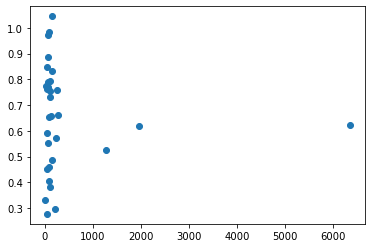

In [5]:
pp24 = pps[pps.game_year==2024]
pp24.groupby(['player_name','pitcher','p_throws']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by=['p_throws','des'])
alvarado_id = 621237
ja = pd.concat([pps[pps.pitcher == alvarado_id]
                ,nphl[nphl.player_name == 'Alvarado, José']
               ])
df = ja
avg = results('player_name')
ht = results('home_team')
z = pd.concat([avg,ht]).sort_values(by='pitches',ascending=False)
x = z.pitches
y = z.ops
plt.scatter(x,y)

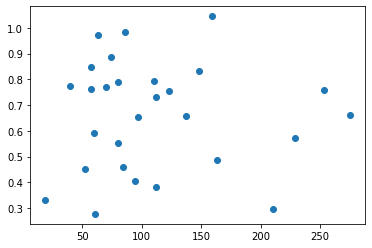

In [6]:
z = ht[~ht.home_team.isin(['TB','PHI'])]
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [7]:
po24 = pos[pos.game_year == 2024]

In [8]:
x = po24.groupby(['game_pk','inning','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'post_home_score' : ['min','max']
                   ,'post_away_score' : ['min','max']
                  })
x['home_diff'] = x['post_home_score']['max'] - x['post_home_score']['min']
x['away_diff'] = x['post_away_score']['max'] - x['post_away_score']['min']

In [9]:
df = x[['home_diff','away_diff','game_date','inning','home_team','away_team']]
df.sort_values(by='home_diff',ascending=False) # The biggest inning for a home Phillies game was when they bopped the Guards.

home_diff away_diff   game_date inning home_team away_team
                                                               
450          7         0  2024-07-27      4       PHI       CLE
483          6         0  2024-07-09      4       PHI       LAD
835          5         0  2024-04-02      7       PHI       CIN
731          5         0  2024-05-07      4       PHI       TOR
292          5         0  2024-09-10      8       PHI        TB
...        ...       ...         ...    ...       ...       ...
497          0         0  2024-06-29      2       PHI       MIA
496          0         0  2024-06-29      1       PHI       MIA
494          0         0  2024-07-11      7       PHI       LAD
492          0         0  2024-07-11      5       PHI       LAD
1417         0         1  2024-08-08      9        AZ       PHI

[1418 rows x 6 columns]

In [10]:
df.sort_values(by='away_diff',ascending=False).head(10)
# The Phillies did their most bopping to the Mets on June 8th (in London?)

home_diff away_diff   game_date inning home_team away_team
                                                               
920          0         6  2024-09-20      4       NYM       PHI
1188         0         6  2024-05-25      9       COL       PHI
929          0         6  2024-06-08      4       NYM       PHI
1133         0         5  2024-08-25      8        KC       PHI
1151         0         5  2024-08-24      8        KC       PHI
89           0         5  2024-08-04      8       SEA       PHI
1077         0         5  2024-08-07      6       LAD       PHI
104          0         4  2024-08-03      5       SEA       PHI
1009         0         4  2024-09-06      2       MIA       PHI
1013         0         4  2024-09-06      6       MIA       PHI

In [11]:
df['runs'] = df['home_diff'] + df['away_diff']
#df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [12]:
mins = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'min'
                                                       ,'post_away_score' : 'min'
                                                      })

maxs = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'max'
                                                       ,'post_away_score' : 'max'
                                                      })

In [13]:
amins = mins[mins.away_team == 'PHI']
hmins = mins[mins.home_team == 'PHI']
amaxs = maxs[maxs.away_team == 'PHI']
hmaxs = maxs[maxs.home_team == 'PHI']

In [14]:
a = amins.merge(amaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
a['runs'] = a.post_away_score_max - a.post_away_score_min
a

inning  game_pk home_team away_team  post_home_score_min  \
0         1   744797       WSH       PHI                    0   
1         1   744871       WSH       PHI                    0   
2         1   744873       WSH       PHI                    0   
3         1   744874       WSH       PHI                    0   
4         1   744887       TOR       PHI                    0   
..      ...      ...       ...       ...                  ...   
715      10   746068       MIA       PHI                    6   
716      10   746558       COL       PHI                    2   
717      10   747025       BAL       PHI                    2   
718      11   746558       COL       PHI                    2   
719      11   747025       BAL       PHI                    3   

     post_away_score_min  post_home_score_max  post_away_score_max  runs  
0                      0                    0                    0     0  
1                      0                    0                    0     0  
2                      0                    0                    0     0  
3                      0                    0                    0     0  
4                      0                    0                    1     1  
..                   ...                  ...                  ...   ...  
715                    6                    6                    6     0  
716                    2                    2                    2     0  
717                    2                    2                    3     1  
718                    2                    2                    2     0  
719                    3                    3                    5     2  

[720 rows x 9 columns]

In [15]:
a.groupby('inning',as_index=False).agg({'runs' : 'sum'})

inning  runs
0        1    46
1        2    31
2        3    32
3        4    40
4        5    40
5        6    55
6        7    31
7        8    39
8        9    41
9       10     4
10      11     2

In [16]:
h = hmins.merge(hmaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
h['runs'] = h.post_home_score_max - h.post_home_score_min
h.sort_values(by='runs',ascending=False)

inning  game_pk home_team away_team  post_home_score_min  \
272       4   745553       PHI       CLE                    0   
276       4   745557       PHI       LAD                    3   
59        1   745583       PHI        SF                    0   
578       8   745535       PHI        TB                    4   
305       4   745586       PHI       TOR                    3   
..      ...      ...       ...       ...                  ...   
267       4   745548       PHI       MIA                    0   
265       4   745546       PHI       NYY                    4   
261       4   745542       PHI       WSH                    2   
260       4   745541       PHI       HOU                    0   
697      12   745546       PHI       NYY                    6   

     post_away_score_min  post_home_score_max  post_away_score_max  runs  
272                    0                    7                    0     7  
276                    0                    9                    0     6  
59                     0                    5                    0     5  
578                    4                    9                    4     5  
305                    0                    8                    0     5  
..                   ...                  ...                  ...   ...  
267                    3                    0                    3     0  
265                    1                    4                    1     0  
261                    0                    2                    0     0  
260                    6                    0                    6     0  
697                    7                    6                    7     0  

[698 rows x 9 columns]

In [17]:
df = pd.concat([h,a])
z = df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [18]:
x = po24.groupby('inning',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                          })

In [19]:
y = x.merge(z, on = 'inning')
y['r/p'] = y.runs/y.des
y.sort_values(by='r/p',ascending=False).round(3)

inning   des  game_pk  runs    r/p
10      11    73        5     5  0.068
5        6  2626      160   109  0.042
9       10   205       16     8  0.039
3        4  2656      160    99  0.037
0        1  2834      160   101  0.036
4        5  2571      160    82  0.032
8        9  1832      116    56  0.031
2        3  2645      160    80  0.030
6        7  2695      160    80  0.030
7        8  2590      160    75  0.029
1        2  2748      160    70  0.025
11      12     9        1     0  0.000

In [20]:
# Try feeding sketches on paper into ChatGPT and have it write a function in Python that builds the sketch using matplotlib

## Game 1: Bassitt vs Phillips

Crazy comeback win, Schwarber hits three home runs.

In [21]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
ks_hrs = ks[ks.events == 'home_run']
df = ks_hrs.groupby('game_pk',as_index=False).agg({'des' : 'count'})

In [22]:
x = df[df.des>2]

In [23]:
y = ks.groupby(['game_pk','game_date','home_team','away_team'],as_index=False).agg({'at_bat_number' : 'nunique'
                                                                                    ,'launch_speed' : 'mean'
                                                                                    ,'launch_angle' : 'mean'
                                                                                    ,'hit_distance_sc' : 'sum'
                                                                                   })
z = x.merge(y,on = 'game_pk')
z

game_pk  des   game_date home_team away_team  at_bat_number  launch_speed  \
0   633557    3  2021-06-20       WSH       NYM              4     95.714286   
1   744891    3  2024-09-03       TOR       PHI              6     94.516667   
2   746115    3  2024-08-07       LAD       PHI              5    102.500000   

   launch_angle  hit_distance_sc  
0     19.142857           1622.0  
1     41.000000           3025.0  
2     29.800000           1473.0

## Game 2: Francis vs Sanchez

In [24]:
# Kody Clemens hit one of the softest home runs of the year?
hrs = po24[po24.events == 'home_run']
hrs.agg({'launch_speed' : ['min'
                                                       ,'max'
                                                       ,'mean'
                                                       ,'std'
                                                      ]}).round(2)

launch_speed
min          92.70
max         114.90
mean        104.25
std           4.47

(array([ 3.,  8., 16., 24., 36., 39., 32., 26.,  5.,  8.]),
 array([ 92.7 ,  94.92,  97.14,  99.36, 101.58, 103.8 , 106.02, 108.24,
        110.46, 112.68, 114.9 ]),
 <BarContainer object of 10 artists>)

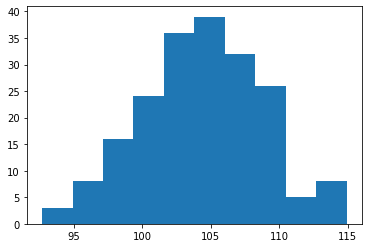

In [25]:
plt.hist(hrs.launch_speed)

# MIA (A) 95-98

In [26]:
# Phillies play well in Miami, at least these turkeys do.

In [27]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
          ,'Hays, Austin'
         ]
mia = pd.concat([pos[(pos.home_team=='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team=='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = mia
miares = results('player_name')

In [28]:
oth = pd.concat([pos[(pos.home_team!='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team!='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = oth
othres = results('player_name')

In [29]:
miares

player_name  pitches  plate_apps  bip  hits   hrs  walks  strikeouts  \
0         Bohm, Alec      451         119   92    35   1.0      7          20   
1  Castellanos, Nick      400         107   69    24   4.0      7          29   
2      Harper, Bryce     1271         308  188    70  13.0     38          78   
3       Hays, Austin       67          20   14     5   0.0      1           3   
4     Marsh, Brandon      225          54   36    15   1.0      3          14   
5     Realmuto, J.T.     4467        1155  859   271  28.0     65         219   
6    Schwarber, Kyle      579         134   78    26   9.0     12          43   
7      Stott, Bryson      340          91   71    24   1.0      6          13   
8       Turner, Trea      841         226  170    48   9.0     16          36   

      ba    obp    slg    ops   woba  
0  0.318  0.353  0.436  0.789  0.340  
1  0.247  0.308  0.402  0.710  0.310  
2  0.270  0.357  0.498  0.855  0.362  
3  0.294  0.400  0.294  0.694  0.327  
4  0.300  0.333  0.460  0.793  0.338  
5  0.254  0.300  0.401  0.700  0.302  
6  0.215  0.284  0.479  0.763  0.325  
7  0.293  0.341  0.427  0.767  0.332  
8  0.233  0.296  0.403  0.699  0.302

In [30]:
othres

player_name  pitches  plate_apps   bip  hits  hrs  walks  strikeouts  \
0         Bohm, Alec     8934        2435  1810   608   60    158         441   
1  Castellanos, Nick    21530        5774  4026  1462  223    345        1347   
2      Harper, Bryce    21725        5369  3380  1285  280    743        1171   
3       Hays, Austin     8002        2196  1565   528   68    125         475   
4     Marsh, Brandon     6967        1695   958   385   43    158         565   
5     Realmuto, J.T.    15116        3913  2733   985  146    251         855   
6    Schwarber, Kyle    20198        4738  2701   930  295    638        1349   
7      Stott, Bryson     6925        1683  1243   380   36    129         294   
8       Turner, Trea    19338        4984  3670  1362  167    328         941   

      ba    obp    slg    ops   woba  
0  0.273  0.324  0.413  0.737  0.320  
1  0.274  0.321  0.477  0.798  0.339  
2  0.285  0.385  0.542  0.927  0.392  
3  0.261  0.311  0.433  0.744  0.320  
4  0.256  0.327  0.412  0.739  0.322  
5  0.276  0.332  0.469  0.801  0.343  
6  0.231  0.340  0.494  0.834  0.356  
7  0.249  0.308  0.372  0.680  0.298  
8  0.296  0.346  0.479  0.825  0.353

## Game 1: Oller vs Suarez

In [31]:
#Bryce Harper launch_speed vs batting average

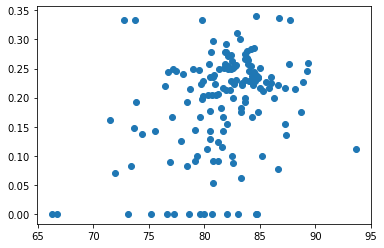

In [32]:
df = pos
res = results('player_name')
lvs = df.groupby('player_name',as_index=False).agg({'launch_speed' : 'mean'})
z = lvs.merge(res, on = 'player_name')
za = z[(z.launch_speed >= z.launch_speed.mean() - 2*(z.launch_speed.std()))
      &(z.ba >= z.ba.mean() - 2*(z.ba.std()))
     ]
x = za.launch_speed
y = za.ba
plt.scatter(x,y)

In [33]:
2*z.pitches.std()

5246.274318356627

In [34]:
(z.pitches.mean() - z.pitches.std())

-1323.0971591783136

In [35]:
z[z.pitches >= z.pitches.mean()].sort_values(by='ops', ascending=False).head(15)

player_name  launch_speed  pitches  plate_apps     bip   hits  \
69       Harper, Bryce     84.485381    12708        3188  2036.0  781.0   
146    Schwarber, Kyle     86.680942     9328        2188  1200.0  406.0   
77       Hoskins, Rhys     84.623153    12994        2949  1802.0  599.0   
107       Miller, Brad     84.803287     2031         506   302.0  106.0   
160       Turner, Trea     83.865144     4900        1281   934.0  333.0   
100     Marsh, Brandon     83.708696     4851        1167   666.0  274.0   
102  McCutchen, Andrew     84.274979     4447        1075   691.0  218.0   
134     Realmuto, J.T.     83.962089    11505        2952  1998.0  708.0   
144    Santana, Carlos     84.594865     2801         675   475.0  128.0   
85       Joseph, Tommy     84.069819     3348         881   615.0  200.0   
147       Segura, Jean     81.944181     6860        1847  1437.0  471.0   
13      Blanco, Andrés     84.181803     2347         614   440.0  141.0   
15          Bohm, Alec     83.641422     9385        2554  1902.0  643.0   
150      Sosa, Edmundo     80.416392     2416         640   441.0  152.0   
75     Herrera, Odúbel     82.172215    12506        3180  2274.0  791.0   

       hrs  walks  strikeouts     ba    obp    slg    ops   woba  
69   163.0  405.0       721.0  0.286  0.380  0.540  0.920  0.390  
146  142.0  323.0       644.0  0.222  0.341  0.495  0.836  0.359  
77   154.0  383.0       713.0  0.239  0.346  0.488  0.835  0.357  
107   32.0   54.0       147.0  0.236  0.320  0.493  0.813  0.344  
160   49.0   75.0       254.0  0.280  0.328  0.466  0.794  0.342  
100   34.0  120.0       371.0  0.267  0.344  0.444  0.787  0.341  
102   47.0  144.0       235.0  0.237  0.341  0.444  0.786  0.339  
134  115.0  202.0       694.0  0.264  0.325  0.460  0.785  0.336  
144   24.0  104.0        93.0  0.228  0.345  0.413  0.758  0.332  
85    43.0   54.0       204.0  0.246  0.295  0.459  0.754  0.319  
147   43.0  112.0       268.0  0.278  0.330  0.412  0.741  0.321  
13    14.0   44.0       119.0  0.255  0.319  0.420  0.739  0.320  
15    61.0  165.0       461.0  0.275  0.325  0.414  0.739  0.321  
150   19.0   23.0       155.0  0.258  0.302  0.437  0.739  0.317  
75    78.0  197.0       663.0  0.271  0.321  0.418  0.738  0.319

In [36]:
# ranger suarez running average velo in this start

In [37]:
pp24.groupby(['p_throws','pitcher','player_name'],as_index=False).agg({'des' : 'count'})
ranger_id = 624133
df = pp24[(pp24.pitcher == ranger_id)
     &(pp24.game_date == pp24.game_date.max())
    ]
df

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
203076         CU  2024-09-27           74.4           1.67           5.96   
203077         FF  2024-09-27           92.6           2.01           5.81   
203078         CU  2024-09-27           72.6           1.67           5.90   
203079         SI  2024-09-27           91.7           1.83           5.86   
203080         FF  2024-09-27           90.9           1.85           5.87   
203081         CH  2024-09-27           80.4           1.82           5.74   
203082         FF  2024-09-27           90.5           1.74           5.95   
203083         CH  2024-09-27           77.0           1.93           5.79   
203084         CU  2024-09-27           72.9           1.66           5.95   
203085         FC  2024-09-27           83.5           2.00           5.92   
203086         SI  2024-09-27           90.9           1.77           5.93   
203087         FC  2024-09-27           84.2           1.93           5.94   
203088         SI  2024-09-27           88.5           1.79           5.95   
203089         CU  2024-09-27           73.2           1.65           6.01   
203090         SI  2024-09-27           89.2           1.93           5.90   
203091         FC  2024-09-27           85.7           1.77           5.98   
203092         FC  2024-09-27           84.5           1.73           6.00   
203093         SI  2024-09-27           90.4           1.69           5.98   
203094         CH  2024-09-27           80.3           1.83           5.76   
203095         FF  2024-09-27           90.9           1.89           5.87   
203096         FF  2024-09-27           91.5           1.98           5.96   
203097         CU  2024-09-27           73.8           1.63           5.92   
203098         SI  2024-09-27           90.1           1.73           6.05   
203100         FF  2024-09-27           90.5           2.15           5.84   
203101         CU  2024-09-27           73.5           1.59           5.97   
203104         SI  2024-09-27           89.4           1.66           5.95   
203105         FF  2024-09-27           90.5           1.89           5.87   
203108         SI  2024-09-27           89.6           1.91           5.86   
203111         FF  2024-09-27           90.9           1.91           5.79   
203113         SI  2024-09-27           91.0           1.83           5.82   
203116         SI  2024-09-27           91.5           1.80           5.84   
203120         CH  2024-09-27           80.5           1.83           5.73   
203123         CH  2024-09-27           78.5           1.78           5.70   
203126         SI  2024-09-27           90.0           1.84           5.84   
203127         SI  2024-09-27           90.0           1.85           5.97   
203131         CU  2024-09-27           72.6           1.69           5.98   
203133         CU  2024-09-27           72.1           1.79           5.96   
203136         FF  2024-09-27           91.9           1.84           5.88   
203141         FF  2024-09-27           91.0           1.91           5.82   
203143         CH  2024-09-27           77.9           2.03           5.75   
203145         FF  2024-09-27           90.0           1.88           5.96   
203148         CU  2024-09-27           73.9           1.69           5.86   
203151         CU  2024-09-27           72.5           1.73           5.90   
203154         SI  2024-09-27           91.3           1.96           5.81   
203161         FC  2024-09-27           87.9           1.69           5.95   
203165         SI  2024-09-27           90.8           2.01           5.83   
203172         FF  2024-09-27           91.3           1.77           5.95   
203173         CU  2024-09-27           73.0           1.71           5.87   
203180         FF  2024-09-27           91.1           1.97           5.97   
203188         CH  2024-09-27           78.2           1.93           5.81   
203191         SI  2024-09-27

In [38]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : 'mean'})

pitch_type  release_speed
0         CH      78.970000
1         CU      73.175000
2         FC      85.160000
3         FF      91.035714
4         SI      90.216667

In [39]:
fb = df[df.pitch_type.isin(['FF','SI'])]
fbs = fb.reset_index().reset_index()

In [40]:
fbs['mu'] = fbs.release_speed.expanding().mean()

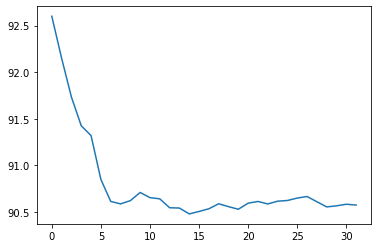

In [41]:
x = fbs.level_0.values
y = fbs.mu.values
plt.plot(x,y)

In [42]:
df.groupby(['inning','pitch_type'],as_index=False).agg({'release_speed' : 'mean'
                                                       ,'des' : 'count'}).sort_values(by=['inning','pitch_type'])

inning pitch_type  release_speed  des
0       1         CH      79.037500    8
1       1         CU      73.125000    8
2       1         FC      87.900000    1
3       1         FF      90.954545   11
4       1         SI      90.257143   14
5       2         CH      78.700000    2
6       2         CU      73.275000    4
7       2         FC      84.475000    4
8       2         FF      91.333333    3
9       2         SI      90.075000    4

## Game 2: Cabrera vs Wheeler

In [43]:
# wheeler third time thru
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zw.groupby(['game_pk','batter','at_bat_number']
            ,as_index=False)#.sort_values(by=['game_pk','batter','at_bat_number']).reset_index()


In [44]:
zw['rk'] = zw.sort_values(by=['game_pk','batter','at_bat_number']) \
.groupby(['game_pk','batter','at_bat_number']) \
.cumcount()+1

In [45]:
whit = pd.read_csv('whit_np.csv')
whit.groupby('batter',as_index=False).agg({'des' : 'count'})

batter    des
0  593160  16988

In [46]:
zw[(zw.game_date==zw.game_date.max())
   &(zw.batter == 593160)].sort_values(by=['game_date','batter','at_bat_number'])[['game_date','inning','batter','at_bat_number','rk','pitch_number']].tail(24)

Empty DataFrame
Columns: [game_date, inning, batter, at_bat_number, rk, pitch_number]
Index: []

In [47]:
df = risp = po24[(po24.on_2b.notna()) | (df.on_3b.notna())]
res_risp = results('player_name')

In [48]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2024     4573        1260  853   293   40    107         284  0.264   

     obp    slg    ops   woba  
0  0.329  0.425  0.754  0.327

In [49]:
res_risp.sort_values(by='ba',ascending=False)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
7      Kennedy, Buddy       13           3    2   2.0   0.0    1.0   
16     Stevenson, Cal       25           6    5   3.0   0.0    0.0   
5       Harper, Bryce      406         115   78  33.0  10.0   15.0   
13       Rojas, Johan      329          90   70  26.0   1.0    4.0   
0          Bohm, Alec      461         138  108  39.0   7.0    9.0   
14    Schwarber, Kyle      470         118   66  30.0   7.0   17.0   
8     Marchán, Rafael       34           9    6   2.0   0.0    1.0   
19       Turner, Trea      325          90   69  23.0   1.0    5.0   
1   Castellanos, Nick      424         128   95  31.0   3.0   11.0   
9      Marsh, Brandon      480         124   62  28.0   4.0   16.0   
12     Realmuto, J.T.      323          89   55  19.0   2.0    8.0   
17      Stott, Bryson      352          95   72  18.0   1.0    6.0   
15      Sosa, Edmundo      227          65   44  13.0   1.0    3.0   
11    Pache, Cristian      120          30   12   5.0   0.0    3.0   
6        Hays, Austin       54          17   12   3.0   1.0    0.0   
18    Stubbs, Garrett      110          31   18   5.0   0.0    2.0   
2       Clemens, Kody      106          31   22   5.0   2.0    1.0   
10   Merrifield, Whit      179          47   36   5.0   0.0    5.0   
20     Wilson, Weston       67          18   10   2.0   0.0    0.0   
3         Dahl, David       55          14    9   1.0   0.0    0.0   
4      Garcia, Aramis       13           2    2   0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
7          0.0  1.000  1.000  1.500  2.500  0.942  
16         1.0  0.500  0.500  0.833  1.333  0.565  
5         22.0  0.333  0.417  0.687  1.104  0.461  
13        14.0  0.325  0.356  0.412  0.768  0.331  
0         15.0  0.322  0.391  0.595  0.986  0.417  
14        34.0  0.306  0.407  0.541  0.948  0.405  
8          2.0  0.286  0.333  0.286  0.619  0.273  
19        15.0  0.274  0.322  0.345  0.667  0.297  
1         21.0  0.270  0.336  0.426  0.762  0.332  
9         45.0  0.269  0.363  0.433  0.796  0.346  
12        26.0  0.238  0.303  0.325  0.628  0.281  
17        16.0  0.220  0.263  0.329  0.592  0.254  
15        17.0  0.220  0.246  0.322  0.568  0.243  
11        15.0  0.192  0.267  0.269  0.536  0.241  
6          4.0  0.188  0.235  0.438  0.673  0.288  
18        11.0  0.172  0.226  0.241  0.467  0.211  
2          8.0  0.167  0.194  0.400  0.594  0.252  
10         5.0  0.125  0.234  0.125  0.359  0.182  
20         8.0  0.118  0.111  0.118  0.229  0.098  
3          5.0  0.071  0.071  0.071  0.143  0.063  
4          0.0  0.000  0.000  0.000  0.000  0.000

In [50]:
jt = pos[pos.player_name == 'Realmuto, J.T.']
jt_risp = jt[(jt.on_2b.notna()) | (jt.on_3b.notna())]

In [51]:
df = jt_risp[(jt_risp.balls == 3) & (jt_risp.strikes == 0)]
df.groupby('events',as_index=False).agg({'des' : 'count'})

events  des
0  field_out    4
1   home_run    1
2       walk   18

In [52]:
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts   ba  \
0       2019        4           3  0.0   0.0  0.0      3         0.0  NaN   
1       2020        5           3  1.0   0.0  0.0      2         0.0  0.0   
2       2021        9           4  1.0   0.0  0.0      3         0.0  0.0   
3       2022        9           3  0.0   0.0  0.0      3         0.0  NaN   
4       2023        8           4  1.0   0.0  0.0      3         0.0  0.0   
5       2024        8           6  2.0   1.0  1.0      4         0.0  0.5   

     obp  slg    ops   woba  
0  1.000  NaN    NaN  0.690  
1  0.667  0.0  0.667  0.466  
2  0.750  0.0  0.750  0.519  
3  1.000  NaN    NaN  0.689  
4  0.750  0.0  0.750  0.522  
5  0.833  2.0  2.833  0.801

In [53]:
df = po24[po24.strikes == 2]
results('player_name').sort_values(by='ops',ascending=False)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
7      Kennedy, Buddy       17           6    3   1.0   0.0    1.0   
5       Harper, Bryce      731         315  146  58.0  14.0   33.0   
0          Bohm, Alec      546         245  140  50.0   4.0   18.0   
19       Turner, Trea      616         279  165  56.0   5.0   17.0   
17      Stott, Bryson      687         313  194  55.0   3.0   26.0   
8     Marchán, Rafael       49          24   14   4.0   0.0    2.0   
16     Stevenson, Cal       29          14    9   2.0   0.0    1.0   
14    Schwarber, Kyle      818         384  134  48.0  10.0   53.0   
3         Dahl, David      103          42   18   5.0   2.0    3.0   
20     Wilson, Weston      110          50   20   8.0   1.0    3.0   
9      Marsh, Brandon      618         271   89  35.0   8.0   27.0   
2       Clemens, Kody      135          64   35   9.0   1.0    1.0   
1   Castellanos, Nick      697         318  155  44.0   4.0   23.0   
10   Merrifield, Whit      182          79   51  11.0   1.0    7.0   
15      Sosa, Edmundo      321         140   66  22.0   1.0    4.0   
13       Rojas, Johan      410         193  115  33.0   0.0    7.0   
6        Hays, Austin       76          45   26   8.0   1.0    0.0   
11    Pache, Cristian      171          71   20   9.0   0.0    9.0   
12     Realmuto, J.T.      447         225  112  31.0   4.0    9.0   
18    Stubbs, Garrett      248         111   52  13.0   1.0    8.0   
4      Garcia, Aramis       13           5    2   0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
7            2  0.200  0.333  0.400  0.733  0.324  
5          135  0.207  0.292  0.414  0.706  0.308  
0           85  0.224  0.282  0.350  0.631  0.277  
19          96  0.215  0.265  0.291  0.556  0.249  
17          92  0.195  0.262  0.262  0.524  0.237  
8            8  0.182  0.250  0.273  0.523  0.235  
16           4  0.154  0.214  0.308  0.522  0.228  
14         195  0.147  0.268  0.252  0.520  0.243  
3           21  0.128  0.190  0.308  0.498  0.219  
20          27  0.170  0.220  0.277  0.497  0.221  
9          154  0.145  0.232  0.264  0.497  0.226  
2           28  0.143  0.156  0.302  0.458  0.193  
1          136  0.151  0.220  0.237  0.457  0.209  
10          19  0.155  0.241  0.211  0.452  0.212  
15          65  0.167  0.214  0.235  0.449  0.203  
13          69  0.179  0.218  0.207  0.424  0.193  
6           19  0.178  0.178  0.244  0.422  0.183  
11          42  0.148  0.254  0.164  0.417  0.204  
12         100  0.146  0.191  0.207  0.398  0.181  
18          50  0.126  0.189  0.204  0.393  0.180  
4            3  0.000  0.000  0.000  0.000  0.000

Have the Phillies been seeing more breaking balls recently?

In [54]:
po24.groupby(['pitch_type','pitch_name'],as_index=False).agg({'des' : 'count'
                                                              ,'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              ,'launch_speed' : 'mean'
                                                              ,'hit_distance_sc' : 'mean'
                                                              ,'launch_angle' : 'mean'
                                                             }).round(2).sort_values(by='des',ascending=False)

pitch_type       pitch_name   des  release_speed  release_spin_rate  \
6          FF  4-Seam Fastball  7221          94.34            2292.29   
14         SL           Slider  4000          85.53            2417.89   
13         SI           Sinker  3779          92.99            2157.77   
0          CH         Changeup  2275          85.59            1780.36   
2          CU        Curveball  1801          79.56            2563.68   
5          FC           Cutter  1697          89.46            2380.38   
15         ST          Sweeper  1572          81.67            2564.45   
8          FS     Split-Finger   665          86.27            1212.65   
9          KC    Knuckle Curve   204          82.02            2300.66   
16         SV           Slurve   129          81.87            2378.41   
10         KN      Knuckleball    46          76.23             251.46   
4          FA            Other    31          72.93            1767.26   
7          FO         Forkball    25          80.82             854.08   
3          EP           Eephus    19          47.00            1263.16   
12         SC        Screwball    18          80.22            2109.11   
1          CS       Slow Curve     1          70.60            2312.00   
11         PO        Pitch Out     1          92.40            2367.00   

    launch_speed  hit_distance_sc  launch_angle  
6          84.16           190.89         29.16  
14         81.20           133.81         10.22  
13         84.64           143.49         10.87  
0          79.57           114.44          4.04  
2          80.85           131.44          6.28  
5          83.89           162.56         17.99  
15         80.10           154.83         19.18  
8          79.44           103.01          0.34  
9          80.72            97.90          5.43  
16         80.64           154.29         16.55  
10         78.54           115.43          5.36  
4          89.03           221.47         19.87  
7          77.40            89.10          3.10  
3          92.88           176.00         19.00  
12         85.32            96.33         -1.67  
1            NaN              NaN           NaN  
11           NaN              NaN           NaN

In [55]:
breaking_balls = ['SL','CU','ST','KC','SV']
df = pos.groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'pitches'})
bb = pos[pos.pitch_type.isin(breaking_balls)].groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'})

z = bb.merge(df, on = ['game_pk','game_date'], suffixes = ('','_total'))

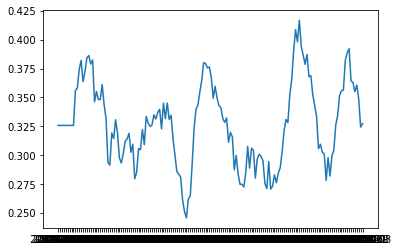

In [56]:
# This will calculate the 10 day moving average share of breaking balls seen by Phillies batters. It is actually on the way down
z['share'] = z.des/z.pitches
g = z[z.game_date >= '2024-03-01']
g['moving_share'] = g.share.rolling(10).mean()
g.fillna(g.share.mean(),inplace=True)
x = g.game_date.values
y = g.moving_share.values
plt.plot(x,y)
plt.show()

## Game 3: McCaughan vs Nola

## Game 4: Meyer vs Johnson
Seth Johnson is not ready for the big leagues.

# TBR (H) 99-911
## Game 1: Alexander vs Sanchez
Sanchez shoves, again. Kody Clemens walk off after Rojas drops a robbed home run over the wall.

## Game 2: Bradley vs Suarez

### Top 1

In [57]:
# what is a good number of swing and misses to get?
# Going to try and answer this in Top 2

In [58]:
rs = pps[pps.pitcher == ranger_id]
rs.groupby('fielder_2',as_index=False).agg({'des' : 'count'})
df = rs
rs2 = results('fielder_2').sort_values(by='pitches',ascending=False)
catchers = pos[pos.batter.isin(rs2.fielder_2)].groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
rs2.merge(catchers,left_on = 'fielder_2',right_on = 'batter')
# Ranger does not throw the ball that well to Garrett Stubbs.

fielder_2  pitches  plate_apps   bip  hits   hrs  walks  strikeouts     ba  \
0     592663     7382        1917  1309   391  40.0  155.0         435  0.225   
1     596117     1068         295   220    86   9.0   21.0          53  0.317   
2     665561      850         230   170    56   4.0   11.0          45  0.262   
3     595284      639         171   112    40   2.0   13.0          45  0.260   
4     595751      144          45    37    17   3.0    3.0           5  0.415   
5     467092       34          11    10     3   0.0    0.0           1  0.273   
6     620453       29           8     6     3   0.0    0.0           2  0.500   

     obp    slg    ops   woba      player_name  batter    des  
0  0.291  0.345  0.636  0.281   Realmuto, J.T.  592663  11505  
1  0.366  0.509  0.875  0.376  Stubbs, Garrett  596117   1737  
2  0.304  0.388  0.692  0.301  Marchán, Rafael  665561    421  
3  0.316  0.351  0.666  0.292    Knapp, Andrew  595284   3314  
4  0.444  0.707  1.152  0.479    Alfaro, Jorge  595751   1790  
5  0.273  0.273  0.545  0.240    Ramos, Wilson  467092    376  
6  0.375  0.667  1.042  0.370   Grullón, Deivy  620453     29

### Bottom 1

In [59]:
df = po24
results('player_name').sort_values(by='hrs',ascending=False)

player_name  pitches  plate_apps  bip   hits   hrs  walks  \
14    Schwarber, Kyle     2822         680  379  141.0  38.0  100.0   
5       Harper, Bryce     2443         616  414  156.0  30.0   65.0   
1   Castellanos, Nick     2322         654  467  153.0  23.0   38.0   
19       Turner, Trea     2017         533  402  146.0  20.0   27.0   
9      Marsh, Brandon     1993         472  264  104.0  16.0   50.0   
0          Bohm, Alec     2097         597  467  154.0  15.0   38.0   
12     Realmuto, J.T.     1562         409  278  100.0  14.0   25.0   
17      Stott, Bryson     2272         561  415  123.0  11.0   51.0   
15      Sosa, Edmundo     1032         270  183   63.0   7.0   13.0   
2       Clemens, Kody      454         116   84   24.0   5.0    4.0   
13       Rojas, Johan     1329         363  277   82.0   3.0   13.0   
10   Merrifield, Whit      633         175  138   31.0   3.0   15.0   
8     Marchán, Rafael      195          56   44   15.0   3.0    3.0   
3         Dahl, David      266          63   38   12.0   3.0    3.0   
20     Wilson, Weston      356          93   56   23.0   3.0    8.0   
6        Hays, Austin      269          80   59   20.0   2.0    0.0   
18    Stubbs, Garrett      736         183  111   33.0   1.0   17.0   
11    Pache, Cristian      496         117   62   21.0   0.0   13.0   
7      Kennedy, Buddy       52          12    8    2.0   0.0    2.0   
16     Stevenson, Cal      102          27   20    6.0   0.0    3.0   
4      Garcia, Aramis       36           7    4    0.0   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
14         195  0.249  0.362  0.489  0.850  0.367  
5          135  0.286  0.362  0.527  0.889  0.381  
1          136  0.253  0.307  0.427  0.734  0.319  
19          96  0.293  0.336  0.463  0.799  0.346  
9          154  0.251  0.331  0.423  0.753  0.328  
0           85  0.282  0.332  0.452  0.783  0.338  
12         100  0.265  0.318  0.429  0.746  0.325  
17          92  0.247  0.316  0.359  0.675  0.298  
15          65  0.255  0.307  0.421  0.728  0.315  
2           28  0.214  0.241  0.446  0.688  0.291  
13          69  0.243  0.273  0.322  0.595  0.260  
10          19  0.197  0.274  0.293  0.567  0.256  
8            8  0.294  0.339  0.549  0.888  0.375  
3           21  0.203  0.238  0.390  0.628  0.268  
20          27  0.277  0.344  0.482  0.826  0.354  
6           19  0.256  0.275  0.397  0.672  0.291  
18          50  0.205  0.295  0.261  0.556  0.257  
11          42  0.204  0.291  0.272  0.562  0.257  
7            2  0.200  0.333  0.300  0.633  0.293  
16           4  0.250  0.333  0.375  0.708  0.314  
4            3  0.000  0.000  0.000  0.000  0.000

### Top 2

Kruk and TMac talked to the domestic violence lady during this inning. <br>
Also Ranger gave up a run but that does not feel as important.

In [60]:
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt','foul_tip']
swings = ['bunt_foul_tip','foul','foul_bunt','hit_into_play','missed_bunt','swinging_strike','swinging_strike_blocked']
df = rs
df = df[df.description.isin(whiffs)]
x = rs_whiffs_by_game = df.groupby(['game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'whiffs'})
x.groupby('game_year',as_index=False).agg({'whiffs' : ['mean','std']})

game_year    whiffs          
                 mean       std
0      2018  4.750000  2.500000
1      2019  2.724138  2.218374
2      2020  3.000000  1.000000
3      2021  5.742857  4.761011
4      2022  8.303030  3.196530
5      2023  9.269231  2.721142
6      2024  9.037037  4.127595

### Right on Right Cutters

In [61]:
fcrr = pps[(pps.pitch_type == 'FC')
    &(pps.stand == 'R')
    &(pps.p_throws == 'R')
   ]
fcrr.groupby('game_year',as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'})

game_year   des       zone
0       2015   493   9.766734
1       2016    89   9.303371
2       2017    57  10.877193
3       2018   170   9.325301
4       2019   120   9.883333
5       2020   242  10.247934
6       2021   496  10.328629
7       2022  1158   9.949914
8       2023   552   9.871377
9       2024   301  10.222591

In [62]:
fcrr.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'}).sort_values(by='des',ascending=False)

game_year            player_name  des       zone
4        2015       Williams, Jerome  358   9.902235
37       2022          Wheeler, Zack  282  11.329787
31       2022           Gibson, Kyle  255   9.058824
26       2021          Wheeler, Zack  231  11.099567
41       2023        Walker, Taijuan  205   9.678049
40       2023            Nola, Aaron  192  10.223958
34       2022            Nola, Aaron  179  10.234637
47       2024            Nola, Aaron  171  11.011696
8        2018          Hunter, Tommy  154   9.000000
27       2022        Brogdon, Connor  144   8.868056
35       2022       Robertson, David  142   9.218310
22       2021        Brogdon, Connor  127   9.992126
30       2022            Eflin, Zach  106   9.783019
38       2023        Brogdon, Connor  101   9.663366
19       2020          Wheeler, Zack   92  11.467391
5        2016         Bailey, Andrew   89   9.303371
21       2021        Anderson, Chase   70   9.728571
0        2015      Billingsley, Chad   69   9.666667
17       2020          Hunter, Tommy   59  10.016949
1        2015        Buchanan, David   51   9.294118
46       2024       Mercado, Michael   48   8.250000
20       2020       Workman, Brandon   48   7.500000
23       2021           Gibson, Kyle   43   9.534884
7        2017     Hellickson, Jeremy   42  11.428571
15       2019          Vincent, Nick   41   9.609756
42       2023          Wheeler, Zack   35  10.028571
48       2024        Walker, Taijuan   31   9.000000
32       2022     Morales, Francisco   31  11.225806
44       2024             Lazar, Max   31  10.741935
14       2019       Robertson, David   30  10.466667
16       2020        Brogdon, Connor   28  11.607143
39       2023           Covey, Dylan   19   9.210526
13       2019          Parker, Blake   18   9.555556
9        2018       Leiter Jr., Mark   16  12.375000
6        2017         Buchholz, Clay   15   9.333333
18       2020          Phelps, David   15   9.933333
25       2021            Nola, Aaron   13   8.307692
29       2022  Domínguez, Seranthony   13  11.846154
24       2021        Howard, Spencer   12   7.583333
43       2024        Brogdon, Connor   12  10.000000
10       2019         Anderson, Drew   12   9.083333
12       2019          Hunter, Tommy   11  10.090909
2        2015         Correia, Kevin   10   9.000000
11       2019            Eflin, Zach    8  10.750000
3        2015     González, Severino    5   7.800000
49       2024          Wheeler, Zack    5   6.400000
36       2022         Rossman, Bubby    4  10.000000
45       2024          Marte, Yunior    3  11.333333
33       2022         Nittoli, Vinny    1   6.000000
28       2022             Cyr, Tyler    1  14.000000

In [63]:
df = rs
results('game_year')

game_year  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0       2018      225          68   52    21    3      5          11  0.339   
1       2019      763         205  150    52    6     10          42  0.275   
2       2020       94          26   20    10    1      4           1  0.476   
3       2021     1614         415  273    73    4     30         107  0.194   
4       2022     2807         725  514   158   16     64         142  0.242   
5       2023     2289         612  421   142   14     50         138  0.257   
6       2024     2354         626  434   140   14     40         145  0.243   

     obp    slg    ops   woba  
0  0.382  0.548  0.931  0.394  
1  0.307  0.413  0.720  0.303  
2  0.577  0.714  1.291  0.545  
3  0.260  0.255  0.515  0.234  
4  0.310  0.382  0.693  0.305  
5  0.317  0.395  0.712  0.310  
6  0.296  0.378  0.673  0.294

In [64]:
df.groupby('game_year',as_index=False).agg({'release_speed' : 'max'})

game_year  release_speed
0       2018           94.2
1       2019           95.1
2       2020           93.2
3       2021           96.1
4       2022           95.8
5       2023           96.0
6       2024           94.1

In [65]:
# Ranger Suarez has given up a career high 12 hits

In [66]:
results('game_pk').sort_values(by='hits',ascending=False).head(10)

game_pk  pitches  plate_apps   bip  hits  hrs  walks  strikeouts     ba  \
143   745535       88          29  25.0  12.0  0.0    2.0         2.0  0.444   
1     531230       69          24  20.0  11.0  1.0    2.0         2.0  0.524   
124   717182       81          28  23.0  10.0  0.0    2.0         3.0  0.400   
145   745555       91          26  23.0  10.0  1.0    2.0         0.0  0.417   
117   716415       90          24  18.0   9.0  0.0    2.0         4.0  0.409   
128   717438       92          29  20.0   8.0  1.0    4.0         4.0  0.333   
52    632848       86          24  18.0   8.0  0.0    3.0         2.0  0.400   
126   717315       94          25  18.0   8.0  0.0    2.0         5.0  0.364   
161   746454       88          26  22.0   8.0  0.0    0.0         4.0  0.308   
134   717902      101          28  24.0   8.0  0.0    1.0         3.0  0.308   

       obp    slg    ops   woba  
143  0.483  0.593  1.075  0.463  
1    0.542  0.810  1.351  0.553  
124  0.429  0.480  0.909  0.391  
145  0.462  0.708  1.170  0.494  
117  0.458  0.545  1.004  0.433  
128  0.414  0.458  0.872  0.378  
52   0.500  0.500  1.000  0.440  
126  0.400  0.455  0.855  0.367  
161  0.308  0.385  0.692  0.299  
134  0.321  0.423  0.745  0.315

In [67]:
x = pos.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

game_year p_throws   des  total  share
12       2021        L  7542  23823  0.317
18       2024        L  7242  23484  0.308
16       2023        L  7793  26097  0.299
14       2022        L  7529  26236  0.287
10       2020        L  2481   8683  0.286
4        2017        L  6757  24133  0.280
8        2019        L  6827  24905  0.274
0        2015        L  6004  22643  0.265
6        2018        L  6050  24616  0.246
2        2016        L  5197  22887  0.227

In [68]:
x = pps.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

game_year p_throws   des  total  share
18       2024        L  8765  23179  0.378
16       2023        L  8525  25442  0.335
14       2022        L  7025  25618  0.274
8        2019        L  5291  24310  0.218
0        2015        L  5188  23839  0.218
12       2021        L  4878  23739  0.205
2        2016        L  3769  23836  0.158
10       2020        L   790   8570  0.092
6        2018        L  2118  23750  0.089
4        2017        L  2105  23972  0.088

In [69]:
# Orion Kerkering has been throwing strike one
pp24.groupby(['player_name','pitcher','p_throws'],as_index = False).agg({'des' : 'count'})
ok_id = 689147
ok = pp24[pp24.pitcher == ok_id]
ok1 = ok[ok.pitch_number == 1]
ok1.groupby('description',as_index=False).agg({'des' : 'count'})
balls = ['ball','blocked_ball','hit_by_pitch']
round(len(ok1[ok1.description.isin(balls)])/len(ok1),3)

0.391

## Game 3: Baz vs Wheeler

# NYM (H) 913-915
## Game 1: Quintana vs Nola
## Game 2: Severino vs Allard
## Game 3: Peterson vs Sanchez

# MIL (A) 916-918
## Game 1: Civale vs Suarez
## Game 2: Montas vs Wheeler
## Game 3: Peralta vs Nola

# Taijuan Walker returns to the rotation, has he changed at all?
Appearances post August 28th will delineate his role. Pre then is as a starter, post then is bullpen until he makes his next start.

In [70]:
nphl[(nphl.p_throws=='R')].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

player_name  pitcher    des
4631  Morton, Charlie   450203  20854
330   Anderson, Chase   502624  14941
8271  Walker, Taijuan   592836  13902
8272    Wheeler, Zack   554430   7604
3168   Kimbrel, Craig   518886   7318
...               ...      ...    ...
2377    Harper, Bryce   503449      1
2372    Harper, Bryce   502462      1
2367    Harper, Bryce   502202      1
2357    Harper, Bryce   502010      1
2082      Dahl, David   595014      1

[8273 rows x 3 columns]

In [71]:
taijuan = 592836
tw = pd.concat([nphl[nphl.player_name == 'Walker, Taijuan']
                ,pps[pps.pitcher==taijuan]
               ])
df = pp24[pp24.pitcher==taijuan]
res_games = results('game_date')
x= res_games.sort_values(by='game_date',ascending=False)

In [72]:
def indicators(df,level):
    x = df.groupby(level,as_index=False).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })
    return x

df = pp24
level = ['pitcher','game_date','player_name']
y = indicators(df,level)

In [73]:
# Some Date Math with pitcher game_dates will give us an idea of how consistently pitchers work on the phillies
y = pitchers_by_game_date = pp24.groupby(['pitcher'
              ,'game_date'
              ,'player_name'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })

In [74]:
x

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
18  2024-09-24       55          12    8     4  0.0    3.0         1.0  0.444   
17  2024-09-19       71          19   13     6  4.0    3.0         2.0  0.400   
16  2024-09-14       37          11   11     3  0.0    0.0         0.0  0.273   
15  2024-09-07       35          12    8     3  1.0    2.0         2.0  0.300   
14  2024-09-03       41          12   12     4  1.0    0.0         0.0  0.333   
13  2024-08-28       93          28   27    13  1.0    1.0         0.0  0.481   
12  2024-08-23       78          18   15     8  2.0    1.0         2.0  0.471   
11  2024-08-18       99          20   14     4  2.0    3.0         3.0  0.235   
10  2024-08-13       76          19   11     4  1.0    3.0         5.0  0.250   
9   2024-06-21       77          18   12     5  3.0    3.0         3.0  0.333   
8   2024-06-15       92          25   19     6  1.0    2.0         4.0  0.286   
7   2024-06-09       79          20   13     2  0.0    1.0         6.0  0.105   
6   2024-06-02       93          23   15     5  2.0    3.0         5.0  0.250   
5   2024-05-27       98          29   23     9  0.0    2.0         4.0  0.346   
4   2024-05-22       86          23   14     6  1.0    4.0         5.0  0.316   
3   2024-05-16       59          15   12     4  1.0    2.0         1.0  0.308   
2   2024-05-11       86          26   19     8  1.0    1.0         4.0  0.333   
1   2024-05-05       90          25   16     5  1.0    1.0         7.0  0.217   
0   2024-04-28       90          27   21     8  2.0    2.0         4.0  0.320   

      obp    slg    ops   woba  
18  0.583  0.667  1.250  0.528  
17  0.526  1.200  1.726  0.671  
16  0.273  0.273  0.545  0.241  
15  0.417  0.800  1.217  0.494  
14  0.333  0.583  0.917  0.391  
13  0.500  0.741  1.241  0.529  
12  0.500  0.882  1.382  0.580  
11  0.350  0.588  0.938  0.396  
10  0.368  0.500  0.868  0.375  
9   0.444  1.000  1.444  0.575  
8   0.320  0.476  0.796  0.328  
7   0.150  0.105  0.255  0.123  
6   0.348  0.600  0.948  0.399  
5   0.379  0.462  0.841  0.360  
4   0.435  0.474  0.908  0.401  
3   0.400  0.615  1.015  0.430  
2   0.385  0.458  0.843  0.370  
1   0.280  0.391  0.671  0.294  
0   0.370  0.640  1.010  0.426

In [75]:
y

pitcher   game_date       player_name  des  inning  at_bat_number  \
0     554430  2024-03-29     Wheeler, Zack   89       6             23   
1     554430  2024-04-03     Wheeler, Zack   93       6             25   
2     554430  2024-04-09     Wheeler, Zack  107       7             28   
3     554430  2024-04-14     Wheeler, Zack  100       6             24   
4     554430  2024-04-20     Wheeler, Zack  106       8             26   
..       ...         ...               ...  ...     ...            ...   
666   689147  2024-09-15  Kerkering, Orion   15       1              4   
667   689147  2024-09-18  Kerkering, Orion   16       1              3   
668   689147  2024-09-20  Kerkering, Orion   21       1              4   
669   689147  2024-09-21  Kerkering, Orion   25       1              6   
670   689147  2024-09-25  Kerkering, Orion   15       1              4   

     pitch_type  release_speed  release_spin_rate  launch_speed  \
0             6      90.946067        2329.426966     81.486667   
1             6      89.180645        2269.333333     83.003448   
2             6      89.342991        2271.897196     83.478571   
3             6      90.405000        2401.510000     80.733333   
4             6      91.360377        2332.518868     77.913514   
..          ...            ...                ...           ...   
666           3      90.020000        2724.200000     77.750000   
667           3      91.712500        2677.437500     79.380000   
668           3      92.466667        2477.857143     75.733333   
669           3      90.248000        2715.560000     72.242857   
670           3      90.353333        2672.066667     94.900000   

     hit_distance_sc  launch_angle  
0         120.033333     20.066667  
1         133.551724     10.931034  
2         142.000000     12.500000  
3         167.833333     13.833333  
4         127.684211     12.763158  
..               ...           ...  
666        71.000000     17.250000  
667       116.600000     25.000000  
668        97.166667     12.166667  
669       125.142857      4.571429  
670       103.000000     21.000000  

[671 rows x 12 columns]

```sql
select x.player_name
      ,x.game_date
      ,x.pitches --count(x.des) pitches
      ,y.inning -- count(distinct y.inning)
      ,y.at_bat_number -- count(distinct y.at_bat_number)
      ,x.plate_apps -- results
      ,x.hits -- results
      ,y.launch_speed -- mean(y.launch_speed)
      ,y.hit_distance_sc -- mean(y.hit_distance_sc)
      ,y.launch_angle -- mean(y.launch_angle)
      ,y.release_speed -- mean(y.release_speed)
      ,y.release_spin_rate -- mean(y.release_spin_rate)
from x
join y on x.game_date = y.game_date
       and y.pitcher = taijuan
group by x.player_name
        ,x.game_date
order by count(x.des) desc
```

In [76]:
z = x.merge(y,on = 'game_date',suffixes=('_x','_y'))
z[z.player_name == 'Walker, Taijuan']

game_date  pitches  plate_apps  bip  hits  hrs  walks  strikeouts     ba  \
0   2024-09-24       55          12    8     4  0.0    3.0         1.0  0.444   
4   2024-09-19       71          19   13     6  4.0    3.0         2.0  0.400   
9   2024-09-14       37          11   11     3  0.0    0.0         0.0  0.273   
14  2024-09-07       35          12    8     3  1.0    2.0         2.0  0.300   
18  2024-09-03       41          12   12     4  1.0    0.0         0.0  0.333   
25  2024-08-28       93          28   27    13  1.0    1.0         0.0  0.481   
29  2024-08-23       78          18   15     8  2.0    1.0         2.0  0.471   
34  2024-08-18       99          20   14     4  2.0    3.0         3.0  0.235   
39  2024-08-13       76          19   11     4  1.0    3.0         5.0  0.250   
45  2024-06-21       77          18   12     5  3.0    3.0         3.0  0.333   
49  2024-06-15       92          25   19     6  1.0    2.0         4.0  0.286   
52  2024-06-09       79          20   13     2  0.0    1.0         6.0  0.105   
58  2024-06-02       93          23   15     5  2.0    3.0         5.0  0.250   
64  2024-05-27       98          29   23     9  0.0    2.0         4.0  0.346   
67  2024-05-22       86          23   14     6  1.0    4.0         5.0  0.316   
72  2024-05-16       59          15   12     4  1.0    2.0         1.0  0.308   
79  2024-05-11       86          26   19     8  1.0    1.0         4.0  0.333   
83  2024-05-05       90          25   16     5  1.0    1.0         7.0  0.217   
87  2024-04-28       90          27   21     8  2.0    2.0         4.0  0.320   

      obp  ...      player_name  des  inning  at_bat_number pitch_type  \
0   0.583  ...  Walker, Taijuan   55       3             12          6   
4   0.526  ...  Walker, Taijuan   71       4             19          6   
9   0.273  ...  Walker, Taijuan   37       3             11          6   
14  0.417  ...  Walker, Taijuan   35       2             12          5   
18  0.333  ...  Walker, Taijuan   41       3             12          6   
25  0.500  ...  Walker, Taijuan   93       6             28          6   
29  0.500  ...  Walker, Taijuan   78       3             18          6   
34  0.350  ...  Walker, Taijuan   99       5             21          6   
39  0.368  ...  Walker, Taijuan   76       4             19          6   
45  0.444  ...  Walker, Taijuan   77       4             18          6   
49  0.320  ...  Walker, Taijuan   92       6             25          6   
52  0.150  ...  Walker, Taijuan   79       6             20          6   
58  0.348  ...  Walker, Taijuan   93       5             23          6   
64  0.379  ...  Walker, Taijuan   98       6             29          6   
67  0.435  ...  Walker, Taijuan   86       5             23          6   
72  0.400  ...  Walker, Taijuan   59       4             15          6   
79  0.385  ...  Walker, Taijuan   86       6             26          6   
83  0.280  ...  Walker, Taijuan   90       7             25          6   
87  0.370  ...  Walker, Taijuan   90       7             27          6   

    release_speed  release_spin_rate  launch_speed  hit_distance_sc  \
0       87.056364        1976.945455     88.695455       178.909091   
4       89.164789        2075.816901     86.756000       135.040000   
9       88.610811        2201.027027     88.250000       143.000000   
14      85.720000        2057.285714     86.700000       189.545455   
18      86.173171        2019.439024     83.735294       212.529412   
25      85.987097        1990.956989     82.097674       137.813953   
29      87.494872        1989.307692     91.443750       142.531250   
34      86.109091        1810.898990     80.370588       124.777778   
39      88.410526        1887.842105     83.505263       128.421053   
45      86.851948        2011.662338     85.429167       198.416667   
49      85.946739        2106.478261     93.950000       161.346154   
52      85.688608                NaN     81.181818 

In [77]:
z.columns.tolist()

['game_date',
 'pitches',
 'plate_apps',
 'bip',
 'hits',
 'hrs',
 'walks',
 'strikeouts',
 'ba',
 'obp',
 'slg',
 'ops',
 'woba',
 'pitcher',
 'player_name',
 'des',
 'inning',
 'at_bat_number',
 'pitch_type',
 'release_speed',
 'release_spin_rate',
 'launch_speed',
 'hit_distance_sc',
 'launch_angle']

In [78]:
# Is Taijuan Walker a good fit for an opener?

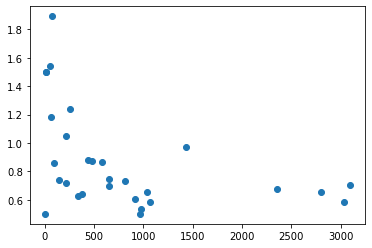

In [79]:
df = pp24
z = results('player_name').sort_values(by='woba')
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [80]:
# Home Road splits of Phillies Pitching
ret = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    pp24 = pps[pps.game_year == gy]
    df = pp24[pp24.home_team=='PHI']
    h = hres = results('player_name')
    df = pp24[pp24.home_team!='PHI']
    a = ares = results('player_name')
    z = h.merge(a,on = 'player_name', suffixes = ('_h','_a'))
    z['diff'] = z.ops_h - z.ops_a
    z['game_year'] = gy
    m = z[['game_year','player_name','diff']].sort_values(by='diff',ascending=False)
    ret = pd.concat([ret,m])

In [81]:
j = pps.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'})
k = ret.merge(j, on = ['game_year','player_name'])
k

game_year          player_name   diff   des
0         2015          Asher, Alec  0.492   501
1         2015        Neris, Hector  0.223   681
2         2015       Gómez, Jeanmar  0.113  1173
3         2015           Giles, Ken  0.094  1185
4         2015         Morgan, Adam  0.077  1246
..         ...                  ...    ...   ...
253       2024           Ruiz, José -0.135   810
254       2024       Alvarado, José -0.138  1039
255       2024  Sánchez, Cristopher -0.267  2797
256       2024      Phillips, Tyler -0.299   578
257       2024        Marte, Yunior -0.497   482

[258 rows x 4 columns]

In [82]:
k.agg({'diff' : ['mean','std','var']})

diff
mean -0.006194
std   0.368312
var   0.135654

(array([  4.,   9.,  19., 119.,  79.,  17.,   6.,   1.,   2.,   2.]),
 array([-1.233 , -0.9216, -0.6102, -0.2988,  0.0126,  0.324 ,  0.6354,
         0.9468,  1.2582,  1.5696,  1.881 ]),
 <BarContainer object of 10 artists>)

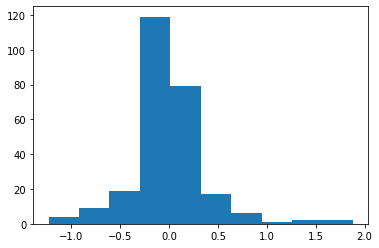

In [83]:
plt.hist(k['diff'].values)

In [84]:
## He is throwing way more ST and moving away from his FS, get me over CU to get ahead in th count, throwing up in the zone more, maybe not on purpose?

In [85]:
df = tw
results('player_name')

player_name  pitches  plate_apps   bip  hits  hrs  walks  strikeouts  \
0  Walker, Taijuan    18174        4667  3291  1041  164    358         959   

      ba    obp   slg    ops   woba  
0  0.247  0.311  0.42  0.731  0.316

In [86]:
df = tw[tw.game_year.isin([2023,2024])]
bp = df[df.game_date > '2024-08-28']
first_pitch_bp = bp[bp.pitch_number == 1]
st = df[~df.game_date.isin(bp.game_date)]
first_pitch_st = st[st.pitch_number == 1]
pitch_mix(first_pitch_bp)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker     18      91.388889        1949.388889   
0         CU        Curveball     13      74.838462        2453.692308   
5         ST          Sweeper     12      85.833333        2458.916667   
2         FF  4-Seam Fastball     11      91.381818        2041.454545   
1         FC           Cutter      6      88.383333        2373.333333   
3         FS     Split-Finger      6      86.683333        1391.333333   

        zone  usage  
4  10.611111   27.3  
0   9.384615   19.7  
5   8.166667   18.2  
2   8.090909   16.7  
1   9.333333    9.1  
3   9.666667    9.1

In [87]:
pitch_mix(first_pitch_st)

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
4         SI           Sinker    307      91.600977        1946.857143   
1         FC           Cutter    189      86.984127        2358.962567   
2         FF  4-Seam Fastball    187      92.133155        2083.686813   
3         FS     Split-Finger    176      87.484091        1405.241379   
0         CU        Curveball    135      74.105926        2387.170543   
5         ST          Sweeper     58      84.048276        2485.438596   

        zone  usage  
4   8.195440   29.2  
1   8.772487   18.0  
2   7.818182   17.8  
3  10.437500   16.7  
0   8.748148   12.8  
5   8.655172    5.5

In [88]:
first_pitch_bp.groupby('type',as_index=False).agg({'des' : 'count'})

type  des
0    B   26
1    S   26
2    X   14

In [89]:
20/35

0.5714285714285714

In [90]:
x = first_pitch_st.groupby('type',as_index=False).agg({'des' : 'count'})
(527+115)/x.des.sum()

0.6102661596958175

In [91]:
# Looks like his velo is up against the Mets, how does he do against them in general
gms = results('game_date')
max_game = gms[gms.game_date == gms.game_date.max()]

In [92]:
def indicators(df,level):
    x = df.groupby(level
              ,as_index=False).agg({'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'launch_speed' : 'mean'
                                    ,'launch_angle' : 'mean'
                                    ,'hit_distance_sc' : 'mean'
                                   })
    return x
level = ['pitch_type','game_date','game_pk']
ind = indicators(df,level)
max_ind = ind[ind.game_date.isin(max_game.game_date)]

max_ind.merge(max_game,on='game_date')

pm = pitch_mix(df[df.game_date.isin(max_ind.game_date)])

mu = pitch_mix(df[df.game_year==2024])

In [93]:
z = pm.merge(mu,on='pitch_type',suffixes = ('','_mu'))
z['diff'] = z.release_speed - z.release_speed_mu
z

pitch_type       pitch_name  count  release_speed  release_spin_rate  \
0         FF  4-Seam Fastball     17      91.529412        2085.529412   
1         FS     Split-Finger     16      87.068750        1366.875000   
2         CU        Curveball      8      75.137500        2480.625000   
3         ST          Sweeper      6      85.966667        2472.666667   
4         SI           Sinker      5      91.880000        1950.600000   
5         FC           Cutter      3      87.566667        2324.666667   

        zone  usage    pitch_name_mu  count_mu  release_speed_mu  \
0   7.411765   30.9  4-Seam Fastball       181         91.488398   
1   9.812500   29.1     Split-Finger       314         86.678662   
2   9.875000   14.5        Curveball       155         74.678710   
3   9.000000   10.9          Sweeper       256         85.069141   
4  10.800000    9.1           Sinker       394         91.124365   
5   9.666667    5.5           Cutter       135         87.345926   

   release_spin_rate_mu    zone_mu  usage_mu      diff  
0           2064.957576   8.486188      12.6  0.041014  
1           1369.056856  10.070064      21.9  0.390088  
2           2429.453901   9.296774      10.8  0.458790  
3           2471.380165   9.625000      17.8  0.897526  
4           1933.625995   8.378173      27.5  0.755635  
5           2322.742424   9.007407       9.4  0.220741

<BarContainer object of 6 artists>

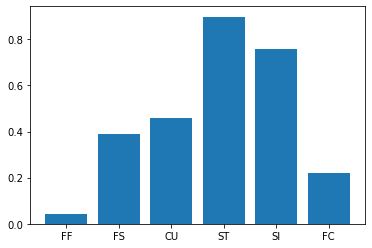

In [94]:
x = z['pitch_type'].values
y = z['diff'].values
plt.bar(x,y)

In [95]:
df = tw
hts = results('home_team')
hts['player_name'] = tw.player_name.iloc[0]
nym = hts[hts.home_team == 'NYM']
avg = results('player_name')
z = nym.merge(avg, on = 'player_name', suffixes = ('','_mu'))
z['diff'] = z.ops - z.ops_mu
z[['pitches','plate_apps', 'ops', 'ops_mu','diff','ba','obp','slg']]

pitches  plate_apps   ops  ops_mu   diff     ba    obp   slg
0     2894         743  0.66   0.731 -0.071  0.218  0.289  0.37

In [96]:
z = hts.merge(avg, on = 'player_name', suffixes = ('','mu'))
z['diff'] = z.ops - z.opsmu
z[['home_team'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'ops'
                                                          ,'opsmu'
   ,'diff'
                                                          ,'ba'
                                                          ,'bamu'
                                                          ,'obp'
                                                          ,'obpmu'
                                                          ,'slg'
                                                          ,'slgmu'
                                                          ,'woba'
                                                          ,'wobamu'
                                                         ]].sort_values(by='diff')


home_team  pitches  plate_apps    ops  opsmu   diff     ba   bamu    obp  \
12       LAA      306          81  0.491  0.731 -0.240  0.205  0.247  0.222   
25       STL      394          99  0.497  0.731 -0.234  0.176  0.247  0.222   
8        CWS      284          77  0.515  0.731 -0.216  0.169  0.247  0.234   
5        CIN      195          47  0.534  0.731 -0.197  0.186  0.247  0.255   
16       MIN      197          56  0.572  0.731 -0.159  0.189  0.247  0.232   
4        CHC      280          70  0.588  0.731 -0.143  0.203  0.247  0.300   
6        CLE      202          50  0.606  0.731 -0.125  0.239  0.247  0.280   
22        SD      566         145  0.650  0.731 -0.081  0.215  0.247  0.297   
7        COL      550         153  0.656  0.731 -0.075  0.234  0.247  0.288   
17       NYM     2894         743  0.660  0.731 -0.071  0.218  0.247  0.289   
28       TOR      360          92  0.670  0.731 -0.061  0.203  0.247  0.315   
0        ATL      251          70  0.695  0.731 -0.036  0.258  0.247  0.286   
23       SEA     2923         729  0.711  0.731 -0.020  0.231  0.247  0.283   
15       MIL       88          26  0.737  0.731  0.006  0.261  0.247  0.346   
2        BAL      347          95  0.754  0.731  0.023  0.274  0.247  0.337   
20       PHI     2731         686  0.759  0.731  0.028  0.244  0.247  0.325   
24        SF      527         138  0.769  0.731  0.038  0.309  0.247  0.362   
1         AZ     1332         336  0.773  0.731  0.042  0.251  0.247  0.315   
27       TEX      393         107  0.798  0.731  0.067  0.320  0.247  0.355   
18       NYY      317          74  0.818  0.731  0.087  0.239  0.247  0.311   
14       MIA      601         169  0.821  0.731  0.090  0.287  0.247  0.337   
19       OAK      177          51  0.832  0.731  0.101  0.333  0.247  0.353   
29       WSH      369          95  0.836  0.731  0.105  0.279  0.247  0.347   
9        DET      160          44  0.841  0.731  0.110  0.310  0.247  0.341   
13       LAD      626         152  0.859  0.731  0.128  0.316  0.247  0.388   
26        TB      166          43  0.893  0.731  0.162  0.216  0.247  0.326   
11        KC      154          36  0.920  0.731  0.189  0.324  0.247  0.361   
3        BOS      224          56  0.970  0.731  0.239  0.346  0.247  0.393   
10       HOU      445         116  1.114  0.731  0.383  0.359  0.247  0.405   
21       PIT      115          31  1.183  0.731  0.452  0.417  0.247  0.516   

    obpmu    slg  slgmu   woba  wobamu  
12  0.311  0.269   0.42  0.215   0.316  
25  0.311  0.275   0.42  0.218   0.316  
8   0.311  0.282   0.42  0.230   0.316  
5   0.311  0.279   0.42  0.243   0.316  
16  0.311  0.340   0.42  0.248   0.316  
4   0.311  0.288   0.42  0.266   0.316  
6   0.311  0.326   0.42  0.265   0.316  
22  0.311  0.354   0.42  0.289   0.316  
7   0.311  0.369   0.42  0.285   0.316  
17  0.311  0.370   0.42  0.290   0.316  
28  0.311  0.354   0.42  0.302   0.316  
0   0.311  0.409   0.42  0.296   0.316  
23  0.311  0.428   0.42  0.304   0.316  
15  0.311  0.391   0.42  0.329   0.316  
2   0.311  0.417   0.42  0.326   0.316  
20  0.311  0.434   0.42  0.330   0.316  
24  0.311  0.407   0.42  0.334   0.316  
1   0.311  0.458   0.42  0.325   0.316  
27  0.311  0.443   0.42  0.343   0.316  
18  0.311  0.507   0.42  0.347   0.316  
14  0.311  0.484   0.42  0.354   0.316  
19  0.311  0.479   0.42  0.356   0.316  
29  0.311  0.488   0.42  0.358   0.316  
9   0.311  0.500   0.42  0.362   0.316  
13  0.311  0.471   0.42  0.373   0.316  
26  0.311  0.568   0.42  0.373   0.316  
11  0.311  0.559   0.42  0.392   0.316  
3   0.311  0.577   0.42  0.412   0.316  
10  0.311  0.709   0.42  0.458   0.316  
21  0.311  0.667   0.42  0.492   0.316

<BarContainer object of 30 artists>

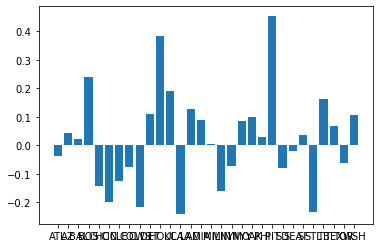

In [97]:
x = z.home_team.values
y = z['diff'].values
plt.bar(x,y)

# NYM (A) 919-922
## Game 1: Severino vs Walker
## Game 2: Peterson vs Sanchez
## Game 3: Manaea vs Suarez
## Game 4: Megill vs Wheeler

In [98]:
# Zack Wheeler talkinng about front hip sinkers, man.

In [99]:
# Zack Wheeler talking about routines

In [100]:
# Ranger is "doing his thing"

# The Secret Lives of Mormon Wives
Jessi is so right.
<br> Jen is judgemental. Jen controls and she is bought into it.
<br> He will 100% divorce her, that is despicable MR. AFfleck. Zac Affleck
<br> Taylor trying to support Jen Affleck.
<br> Amy and TIm went to Vegas once a year.

# CHC (H) 923-925
## Game 1: Killian vs Nola
## Game 2: Steele vs Walker
## Game 3: ? vs Sanchez

In [101]:
df = pp24[pp24.p_throws=='L']
l24 = lefties24 = results('player_name')

In [102]:
measure = 'mean'
inds = pp24.groupby(['player_name'
              ,'pitcher'
             ],as_index=False).agg({'game_pk' : 'nunique'
                                    ,'launch_speed' : measure
                                    ,'pitch_type' : 'nunique'
                                    ,'launch_angle' : measure
                                    ,'hit_distance_sc' : measure
                                    ,'release_speed' : measure
                                    ,'release_speed' : measure
                                   })
z = inds.merge(l24,left_on='player_name',right_on='player_name',suffixes = ('','_mu'))                                    

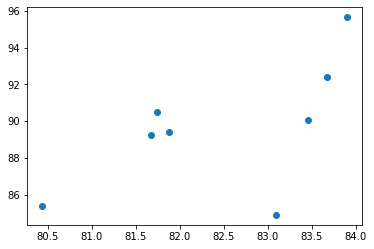

In [103]:
def scatter(x,y):
    plt.scatter(x,y)
    #plt.title('Scatterplot of' +x.columns.name + y.columns.name)
    plt.show()
    
scatter(z.launch_speed,z.release_speed)

# WAS (A) 927-929
## Game 1: Williams vs Suarez
## Game 2: Gore vs Wheeler
## Game 3: Irvin vs Nola

# Season Recap
Well, it doesn't get much better than that. The Phillies are the NL East Champions and have secured a spot in the NLDS. They will come close to the best record in baseball but likely finish second to the Dodgers. It does not matter now, it is all about getting John Middleton his fucking trophy back.

In [105]:
# Ah shit, that guy!
guy = 'Turner, Trea'

res[res.player_name == guy]

# Trea Turner had a .293 batting average according to me (as of 9/29 not including today) but a .295 at the end of the season
# Schwarber will certainly finish with the most pitches and plate apps
# Casty and Bohm tied with bip, think Casty will take
# Harper ends up with the hits
# Schwarber easily on homers, walks, and punchies?
# Turner will take it on ba
# Harper obp and ops
# Marchan surprise slg? Need to filter 

player_name  pitches  plate_apps    bip   hits   hrs  walks  strikeouts  \
160  Turner, Trea     4900        1281  934.0  333.0  49.0   75.0       254.0   

       ba    obp    slg    ops   woba  
160  0.28  0.328  0.466  0.794  0.342

(array([135.,  14.,   8.,   5.,   1.,   2.,   3.,   1.,   1.,   5.]),
 array([1.0000e+00, 3.1970e+02, 6.3840e+02, 9.5710e+02, 1.2758e+03,
        1.5945e+03, 1.9132e+03, 2.2319e+03, 2.5506e+03, 2.8693e+03,
        3.1880e+03]),
 <BarContainer object of 10 artists>)

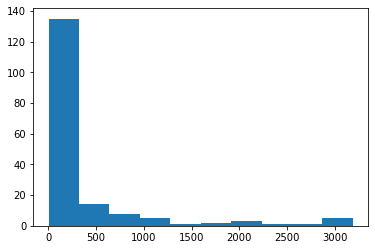

In [106]:
a = res[['player_name'
     ,'plate_apps'
     ,'pitches'
     ,'slg'
    ]].sort_values(by='slg',ascending=False)
a['pitch_share'] = a.pitches / a.pitches.sum()
a['pa_share'] = a.plate_apps / a.plate_apps.sum()
a.round(3)
# looks like ~100 plate_apps seems like a decent cutoff?
a.agg({'plate_apps' : ['mean'
                       ,'median'
                       ,'std'
                       ,'var'
                      ]
      })
plt.hist(a.plate_apps)

In [107]:
a.describe()

plate_apps       pitches         slg  pitch_share    pa_share
count   175.000000    175.000000  172.000000   175.000000  175.000000
mean    332.685714   1300.040000    0.261186     0.005714    0.005714
std     663.393954   2623.137159    0.169762     0.011530    0.011395
min       1.000000      1.000000    0.000000     0.000004    0.000017
25%       8.500000     34.500000    0.108250     0.000152    0.000146
50%      63.000000    262.000000    0.312500     0.001152    0.001082
75%     243.000000    968.000000    0.397000     0.004255    0.004174
max    3188.000000  12994.000000    0.579000     0.057115    0.054758

In [108]:
b = a.describe()
b.plate_apps['25%']

8.5

In [112]:
# Hitting - Season Leaders
df = po24
res = results('player_name')
leaders = pd.DataFrame()
for c in res.columns:
    z = res.sort_values(by=c,ascending=False)
    z = z[z.plate_apps >= z.plate_apps.quantile(.25)]
    #print(z['player_name']
    #      ,c
    #      ,z[z[c] == z[c].max()][c][0]
    #     )
    t = z[z[c] == z[c].max()]
    print(c
          ,t.player_name.unique()[0]
          ,':'
          ,c
          ,'='
          ,t[c].unique()[0]
         )
    t['max'] = c
    leaders = pd.concat([leaders,t])

player_name Wilson, Weston : player_name = Wilson, Weston
pitches Schwarber, Kyle : pitches = 2822
plate_apps Schwarber, Kyle : plate_apps = 680
bip Bohm, Alec : bip = 467
hits Harper, Bryce : hits = 156.0
hrs Schwarber, Kyle : hrs = 38.0
walks Schwarber, Kyle : walks = 100.0
strikeouts Schwarber, Kyle : strikeouts = 195
ba Turner, Trea : ba = 0.293
obp Schwarber, Kyle : obp = 0.362
slg Harper, Bryce : slg = 0.527
ops Harper, Bryce : ops = 0.889
woba Harper, Bryce : woba = 0.381


In [113]:
leaders[['player_name'
         ,'max'
         ,'pitches'
         ,'plate_apps'
         ,'bip'
         ,'hits'
         ,'hrs'
         ,'walks'
         ,'strikeouts'
         ,'ba'
         ,'obp'
         ,'slg'
         ,'ops'
         ,'woba'
        ]]

player_name          max  pitches  plate_apps  bip   hits   hrs  \
20     Wilson, Weston  player_name      356          93   56   23.0   3.0   
14    Schwarber, Kyle      pitches     2822         680  379  141.0  38.0   
14    Schwarber, Kyle   plate_apps     2822         680  379  141.0  38.0   
0          Bohm, Alec          bip     2097         597  467  154.0  15.0   
1   Castellanos, Nick          bip     2322         654  467  153.0  23.0   
5       Harper, Bryce         hits     2443         616  414  156.0  30.0   
14    Schwarber, Kyle          hrs     2822         680  379  141.0  38.0   
14    Schwarber, Kyle        walks     2822         680  379  141.0  38.0   
14    Schwarber, Kyle   strikeouts     2822         680  379  141.0  38.0   
19       Turner, Trea           ba     2017         533  402  146.0  20.0   
14    Schwarber, Kyle          obp     2822         680  379  141.0  38.0   
5       Harper, Bryce          obp     2443         616  414  156.0  30.0   
5       Harper, Bryce          slg     2443         616  414  156.0  30.0   
5       Harper, Bryce          ops     2443         616  414  156.0  30.0   
5       Harper, Bryce         woba     2443         616  414  156.0  30.0   

    walks  strikeouts     ba    obp    slg    ops   woba  
20    8.0          27  0.277  0.344  0.482  0.826  0.354  
14  100.0         195  0.249  0.362  0.489  0.850  0.367  
14  100.0         195  0.249  0.362  0.489  0.850  0.367  
0    38.0          85  0.282  0.332  0.452  0.783  0.338  
1    38.0         136  0.253  0.307  0.427  0.734  0.319  
5    65.0         135  0.286  0.362  0.527  0.889  0.381  
14  100.0         195  0.249  0.362  0.489  0.850  0.367  
14  100.0         195  0.249  0.362  0.489  0.850  0.367  
14  100.0         195  0.249  0.362  0.489  0.850  0.367  
19   27.0          96  0.293  0.336  0.463  0.799  0.346  
14  100.0         195  0.249  0.362  0.489  0.850  0.367  
5    65.0         135  0.286  0.362  0.527  0.889  0.381  
5    65.0         135  0.286  0.362  0.527  0.889  0.381  
5    65.0         135  0.286  0.362  0.527  0.889  0.381  
5    65.0         135  0.286  0.362  0.527  0.889  0.381

In [131]:
# rbis
ks = po24[po24.player_name == 'Schwarber, Kyle']
z = ks.groupby(['game_pk'
            ,'at_bat_number'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : ['min','max']
                 ,'post_away_score' : ['min','max']
                 #,'delta_home_win_exp' : 'abs'
                })
z['h_diff'] = z['post_home_score']['max'] - z['post_home_score']['min']
z['a_diff'] = z['post_away_score']['max'] - z['post_away_score']['min']
hz = z[(z.home_team == 'PHI')][['game_pk','at_bat_number','home_team','away_team','h_diff']].rename(columns = {'h_diff' : 'runs'})
az = z[z.away_team == 'PHI'][['game_pk','at_bat_number','home_team','away_team','a_diff']].rename(columns = {'a_diff' : 'runs'})
hz.runs.sum()+az.runs.sum() # I only counted 97 of the runs scored for him.

97

In [136]:
# What about doubles? That is easy to do
df = dbls = po24[po24.events == 'double']
results('player_name').sort_values(by='pitches',ascending=False)
df.groupby(['player_name'
           ,'batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'launch_speed_angle' : 'mean'
                 ,'hit_distance_sc' : 'sum'
                 ,'release_speed' : 'mean'
                }).round(3).sort_values(by='des',ascending=False)

player_name  batter  des  launch_speed  launch_angle  \
0          Bohm, Alec  664761   44        98.595        14.909   
4       Harper, Bryce  547180   42        95.426        17.214   
1   Castellanos, Nick  592206   30        96.450        20.633   
18       Turner, Trea  607208   25        95.608        14.880   
13    Schwarber, Kyle  656941   22       105.718        16.773   
16      Stott, Bryson  681082   19        95.984        10.842   
11     Realmuto, J.T.  592663   18        99.900        14.611   
8      Marsh, Brandon  669016   17        96.535        18.647   
14      Sosa, Edmundo  624641   12        95.475        19.250   
12       Rojas, Johan  679032   12        98.342         8.833   
2       Clemens, Kody  665019    9        95.333         7.444   
19     Wilson, Weston  642215    6       102.417        20.667   
5        Hays, Austin  669720    5       100.140        16.000   
10    Pache, Cristian  665506    5        98.060        10.600   
9    Merrifield, Whit  593160    4        95.900        20.250   
7     Marchán, Rafael  665561    4        90.275        18.000   
17    Stubbs, Garrett  596117    4        89.000         7.750   
15     Stevenson, Cal  670276    3        94.267        18.667   
3         Dahl, David  621311    2       100.200        30.000   
6      Kennedy, Buddy  671083    1        95.300        23.000   

    launch_speed_angle  hit_distance_sc  release_speed  
0                4.364          10996.0         88.307  
4                4.452          10920.0         88.283  
1                4.600           8761.0         88.600  
18               4.200           5820.0         88.200  
13               5.182           6320.0         88.045  
16               3.842           3784.0         86.000  
11               4.667           4665.0         89.433  
8                4.588           5024.0         91.371  
14               4.500           3481.0         88.942  
12               3.833           2538.0         88.900  
2                3.889           1761.0         92.089  
19               5.333           2003.0         91.500  
5                4.800           1260.0         89.320  
10               3.400            962.0         89.880  
9                4.250           1089.0         91.850  
7                4.500            981.0         96.200  
17               3.250            689.0         92.950  
15               4.667            744.0         85.600  
3                5.500            743.0         86.150  
6                3.000            279.0         84.900

In [114]:
# Nice, I filtered the Phillies leaders to only be for batters who were at or above the 25th percentile in plate appearances.

In [117]:
# Need to produce the pitcher ones.
starters = ['Wheeler, Zack'
            ,'Nola, Aaron'
            ,'Suarez, Ranger'
            ,'Sanchez, Cristopher'
            ,'Walker, Taijuan'
            ,'Turnbull, Spencer'
            ,'Allard, Kolby'
            ,'Phillips, Tyler'
            ,'Mercado, Michael'
           ]
df = pp24
results('player_name').sort_values(by='pitches',ascending=False)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
15            Nola, Aaron     3093         799  554   180  29.0   50.0   
27          Wheeler, Zack     3037         765  493   136  19.0   50.0   
24    Sánchez, Cristopher     2797         755  557   182  11.0   44.0   
23         Suárez, Ranger     2354         626  434   140  14.0   40.0   
26        Walker, Taijuan     1435         382  283   107  24.0   37.0   
10       Kerkering, Orion     1069         253  155    49   2.0   16.0   
1          Alvarado, José     1039         254  164    49   6.0   27.0   
8           Hoffman, Jeff      975         258  152    44   5.0   15.0   
21           Strahm, Matt      963         231  140    36   4.0   10.0   
25      Turnbull, Spencer      916         221  139    37   6.0   20.0   
19             Ruiz, José      810         210  144    49   8.0   15.0   
5   Domínguez, Seranthony      653         157  103    32   6.0   12.0   
20          Soto, Gregory      649         163   95    36   2.0   18.0   
17        Phillips, Tyler      578         160  123    45   9.0    7.0   
12          Marte, Yunior      482         126   89    34   5.0   14.0   
0           Allard, Kolby      436         117   86    34   5.0    8.0   
2           Banks, Tanner      382         103   71    22   1.0   10.0   
6         Estévez, Carlos      343          86   62    18   2.0    5.0   
13       Mercado, Michael      260          64   44    16   9.0    9.0   
18         Pinto, Ricardo      220          59   44    19   2.0    5.0   
11             Lazar, Max      214          54   43    13   2.0    2.0   
7          Gilbert, Tyler      145          38   31    10   1.0    2.0   
14           Nelson, Nick       96          26   15     8   0.0    2.0   
3         Brogdon, Connor       76          14    5     3   2.0    6.0   
22        Stubbs, Garrett       65          19   17     6   2.0    2.0   
9           Johnson, Seth       58          18   15     8   1.0    3.0   
4           Clemens, Kody       16           6    5     2   1.0    1.0   
16         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
28         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
15       189.0  0.242  0.292  0.415  0.706  0.306  
27       213.0  0.193  0.254  0.329  0.582  0.257  
24       153.0  0.257  0.299  0.358  0.657  0.288  
23       145.0  0.243  0.296  0.378  0.673  0.294  
26        58.0  0.316  0.385  0.587  0.972  0.412  
10        73.0  0.215  0.289  0.294  0.582  0.264  
1         62.0  0.218  0.303  0.351  0.654  0.291  
8         87.0  0.185  0.240  0.294  0.534  0.237  
21        76.0  0.169  0.221  0.282  0.502  0.222  
25        57.0  0.189  0.281  0.327  0.607  0.273  
19        50.0  0.257  0.310  0.424  0.734  0.317  
5         40.0  0.224  0.293  0.406  0.699  0.305  
20        44.0  0.265  0.368  0.375  0.743  0.332  
17        28.0  0.300  0.338  0.527  0.864  0.369  
12        23.0  0.306  0.381  0.495  0.876  0.379  
0         23.0  0.312  0.359  0.523  0.882  0.378  
2         21.0  0.242  0.320  0.319  0.639  0.288  
6         18.0  0.225  0.279  0.350  0.629  0.277  
13        10.0  0.296  0.406  0.833  1.240  0.504  
18         8.0  0.373  0.441  0.608  1.049  0.444  
11         9.0  0.250  0.278  0.442  0.720  0.309  
7          4.0  0.286  0.342  0.400  0.742  0.328  
14         8.0  0.348  0.423  0.435  0.858  0.379  
3          3.0  0.375  0.643  1.250  1.893  0.677  
22         0.0  0.353  0.421  0.765  1.186  0.493  
9          0.0  0.571  0.611  0.929  1.540  0.613  
4          0.0  0.400  0.500  1.000  1.500  0.603  
16         0.0  0.750  0.750  0.750  1.500  0.662  
28         0.0  0.250  0.250  0.250  0.500  0.220

In [138]:
df = pp24
results('player_name').sort_values(by='strikeouts',ascending=False)

player_name  pitches  plate_apps  bip  hits   hrs  walks  \
27          Wheeler, Zack     3037         765  493   136  19.0   50.0   
15            Nola, Aaron     3093         799  554   180  29.0   50.0   
24    Sánchez, Cristopher     2797         755  557   182  11.0   44.0   
23         Suárez, Ranger     2354         626  434   140  14.0   40.0   
8           Hoffman, Jeff      975         258  152    44   5.0   15.0   
21           Strahm, Matt      963         231  140    36   4.0   10.0   
10       Kerkering, Orion     1069         253  155    49   2.0   16.0   
1          Alvarado, José     1039         254  164    49   6.0   27.0   
26        Walker, Taijuan     1435         382  283   107  24.0   37.0   
25      Turnbull, Spencer      916         221  139    37   6.0   20.0   
19             Ruiz, José      810         210  144    49   8.0   15.0   
20          Soto, Gregory      649         163   95    36   2.0   18.0   
5   Domínguez, Seranthony      653         157  103    32   6.0   12.0   
17        Phillips, Tyler      578         160  123    45   9.0    7.0   
12          Marte, Yunior      482         126   89    34   5.0   14.0   
0           Allard, Kolby      436         117   86    34   5.0    8.0   
2           Banks, Tanner      382         103   71    22   1.0   10.0   
6         Estévez, Carlos      343          86   62    18   2.0    5.0   
13       Mercado, Michael      260          64   44    16   9.0    9.0   
11             Lazar, Max      214          54   43    13   2.0    2.0   
14           Nelson, Nick       96          26   15     8   0.0    2.0   
18         Pinto, Ricardo      220          59   44    19   2.0    5.0   
7          Gilbert, Tyler      145          38   31    10   1.0    2.0   
3         Brogdon, Connor       76          14    5     3   2.0    6.0   
22        Stubbs, Garrett       65          19   17     6   2.0    2.0   
16         Ortiz, Luis F.       10           4    4     3   0.0    0.0   
9           Johnson, Seth       58          18   15     8   1.0    3.0   
4           Clemens, Kody       16           6    5     2   1.0    1.0   
28         Wilson, Weston        8           4    4     1   0.0    0.0   

    strikeouts     ba    obp    slg    ops   woba  
27       213.0  0.193  0.254  0.329  0.582  0.257  
15       189.0  0.242  0.292  0.415  0.706  0.306  
24       153.0  0.257  0.299  0.358  0.657  0.288  
23       145.0  0.243  0.296  0.378  0.673  0.294  
8         87.0  0.185  0.240  0.294  0.534  0.237  
21        76.0  0.169  0.221  0.282  0.502  0.222  
10        73.0  0.215  0.289  0.294  0.582  0.264  
1         62.0  0.218  0.303  0.351  0.654  0.291  
26        58.0  0.316  0.385  0.587  0.972  0.412  
25        57.0  0.189  0.281  0.327  0.607  0.273  
19        50.0  0.257  0.310  0.424  0.734  0.317  
20        44.0  0.265  0.368  0.375  0.743  0.332  
5         40.0  0.224  0.293  0.406  0.699  0.305  
17        28.0  0.300  0.338  0.527  0.864  0.369  
12        23.0  0.306  0.381  0.495  0.876  0.379  
0         23.0  0.312  0.359  0.523  0.882  0.378  
2         21.0  0.242  0.320  0.319  0.639  0.288  
6         18.0  0.225  0.279  0.350  0.629  0.277  
13        10.0  0.296  0.406  0.833  1.240  0.504  
11         9.0  0.250  0.278  0.442  0.720  0.309  
14         8.0  0.348  0.423  0.435  0.858  0.379  
18         8.0  0.373  0.441  0.608  1.049  0.444  
7          4.0  0.286  0.342  0.400  0.742  0.328  
3          3.0  0.375  0.643  1.250  1.893  0.677  
22         0.0  0.353  0.421  0.765  1.186  0.493  
16         0.0  0.750  0.750  0.750  1.500  0.662  
9          0.0  0.571  0.611  0.929  1.540  0.613  
4          0.0  0.400  0.500  1.000  1.500  0.603  
28         0.0  0.250  0.250  0.250  0.500  0.220

In [142]:
# Statcast Top Whatever
# Hardest Hit - Kyle Schwarber thrown out at second stretching this RBI single into a double against the Dodgers in July.
po24.sort_values(by='launch_speed',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

player_name        Schwarber, Kyle
inning                           2
game_date               2024-07-09
events                      single
launch_speed                 115.6
launch_angle                   9.0
hit_distance_sc              165.0
Name: 214163, dtype: object

In [149]:
# Farthest Hit - Trea bomb off of Max Fried down in Atlanta in July.
po24.sort_values(by='hit_distance_sc',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

player_name        Turner, Trea
inning                        6
game_date            2024-07-05
events                 home_run
launch_speed              108.4
launch_angle               29.0
hit_distance_sc           459.0
Name: 214538, dtype: object

In [151]:
# Fastest Pitch - Alvarado pitch from opening series against Atlanta
pp24.sort_values(by='release_speed',ascending=False)[['player_name'
                                                      ,'inning'
                                                      ,'game_date'
                                                      ,'pitch_type'
                                                      ,'release_speed'
                                                      ,'release_spin_rate'
                                                      ,'type'
                                                      ,'home_team'
                                                      ,'away_team'
                                                     ]].head(5)

player_name  inning   game_date pitch_type  release_speed  \
226229  Alvarado, José       8  2024-03-29         SI          101.0   
226018   Soto, Gregory       8  2024-03-30         SI          100.8   
226219  Alvarado, José       8  2024-03-29         SI          100.5   
210468  Alvarado, José       8  2024-08-03         SI          100.5   
224095   Soto, Gregory       7  2024-04-13         SI          100.5   

        release_spin_rate type home_team away_team  
226229             2205.0    S       PHI       ATL  
226018             2201.0    S       PHI       ATL  
226219             2228.0    X       PHI       ATL  
210468             1954.0    S       SEA       PHI  
224095             2220.0    S       PHI       PIT

In [156]:
# Biggest Change in Win Probability - Edmundo Sosa triple in the top of the 9th in Denver, Edmundomania!
po24['winprob'] = po24.delta_home_win_exp.abs()

In [157]:
po24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(5)

player_name  inning   game_date                     events  \
217993  Castellanos, Nick       9  2024-06-09  grounded_into_double_play   
219734      Sosa, Edmundo       9  2024-05-25                     triple   
220617      Clemens, Kody       9  2024-05-18                   home_run   
207897  Castellanos, Nick       7  2024-08-29                   home_run   
217428         Bohm, Alec      11  2024-06-14                     double   

        launch_speed  launch_angle  hit_distance_sc  winprob  \
217993           NaN           NaN              NaN    0.530   
219734          81.4          19.0            224.0    0.502   
220617         106.6          23.0            413.0    0.489   
207897         107.4          26.0            417.0    0.431   
217428         105.6          21.0            384.0    0.428   

        delta_home_win_exp  
217993              -0.530  
219734              -0.502  
220617               0.489  
207897               0.431  
217428              -0.428

In [162]:
# Biggest Change in Win Probability Pitching 
pp24['winprob'] = pp24.delta_home_win_exp.abs()
pp24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                ,'balls'
                                                ,'strikes'
                                                ,'outs_when_up'
                                                ,'type'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(40)

player_name  inning  balls  strikes  outs_when_up type  \
218800         Alvarado, José       9      0        0             2    X   
210907           Strahm, Matt       7      1        2             1    X   
221894          Marte, Yunior       6      0        0             1    X   
224789          Hoffman, Jeff       9      1        2             2    X   
209703          Hoffman, Jeff       9      0        0             0    X   
216286       Kerkering, Orion      10      0        1             2    B   
211705           Strahm, Matt       7      2        1             2    X   
205596        Estévez, Carlos       9      1        0             0    X   
210401        Estévez, Carlos      10      3        2             2    B   
214742           Strahm, Matt       7      1        1             2    X   
219498       Kerkering, Orion       9      0        0             2    X   
216310           Strahm, Matt       8      1        2             2    X   
217639          Soto, Gregory      10      1        1             2    X   
204429        Estévez, Carlos       9      0        1             0    X   
212357         Alvarado, José       9      2        1             1    X   
221978  Domínguez, Seranthony       7      0        2             2    B   
219729          Hoffman, Jeff       8      1        2             2    X   
208769        Estévez, Carlos       9      3        2             0    X   
215704            Nola, Aaron       6      1        1             0    X   
223781          Wheeler, Zack       6      0        1             0    X   
213800    Sánchez, Cristopher       4      3        1             0    X   
222625  Domínguez, Seranthony       6      2        1             2    X   
216920         Alvarado, José       9      1        0             0    X   
220329          Wheeler, Zack       3      3        1             1    X   
214756          Hoffman, Jeff       8      0        0             0    X   
204747    Sánchez, Cristopher       8      2        2             0    X   
221707          Soto, Gregory       9      1        2             1    S   
225675        Brogdon, Connor      10      2        1             0    X   
205317         Suárez, Ranger       6      2        2             1    X   
221726          Soto, Gregory       9      1        0             1    X   
210755    Sánchez, Cristopher       2      1        1             1    X   
223969      Turnbull, Spencer       5      2        0             0    X   
208150        Estévez, Carlos       9      0        1             2    X   
219723          Hoffman, Jeff       8      1        0             2    B   
216950          Soto, Gregory       6      0        0             2    X   
205018            Nola, Aaron       5      0        1             0    X   
207375          Wheeler, Zack       4      0        0             2    X   
211213          Allard, Kolby       4      0        1             0    X   
222096        Walker, Taijuan       3      0        0             2    X   
226203           Strahm, Matt       7      1        0             1    X   

         game_date           events  launch_speed  launch_angle  \
218800  2024-05-24         home_run         102.1          29.0   
210907  2024-07-30         home_run          98.0          31.0   
221894  2024-04-30         home_run          97.5          30.0   
224789  2024-04-08           single         105.5          -6.0   
209703  2024-08-09         home_run         105.9          32.0   
216286  2024-06-14              NaN           NaN           NaN   
211705  2024-07-24           double          98.8          28.0   
205596  2024-09-09         home_run         106.7          28.0   
210401  2024-08-03             walk           NaN           NaN   
214742  2024-06-27           double          99.1          18.0   
219498  2024-05-18           single          93.5           7.0   
216310  2024-06-14         home_run         103.6          26.0   
217639  2024-06-02           s

In [174]:
# Highest Estimated BA on an out - Kinda Nick Castellanos but probably Rojas for his play on Teoscar in LA

In [173]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
nouts = ['single','double'
         ,'triple','home_run'
         ,'hit_by_pitch'
         ,'walk'
         ,'field_error'
         ,'catcher_interference'
        ]
pp24[~pp24.events.isin(nouts)].sort_values(by='estimated_ba_using_speedangle',ascending=False
                                   )[['player_name'
                                      ,'inning'
                                      ,'game_date'
                                      ,'events'
                                      ,'balls'
                                      ,'strikes'
                                      ,'outs_when_up'
                                     ,'hit_location'
                                      ,'estimated_ba_using_speedangle'
                                      ,'type'
                                      #,'description'
                                      #,'des'
                                     ]].head(5)

player_name  inning   game_date     events  balls  strikes  \
212319       Nola, Aaron       3  2024-07-19    sac_fly      1        1   
209857   Phillips, Tyler       4  2024-08-07  field_out      1        0   
206864        Ruiz, José       5  2024-08-30  field_out      0        2   
220423  Kerkering, Orion       5  2024-05-12  field_out      0        0   
213157    Alvarado, José       8  2024-07-10  field_out      3        2   

        outs_when_up  hit_location  estimated_ba_using_speedangle type  
212319             1           9.0                          0.957    X  
209857             2           8.0                          0.954    X  
206864             2           8.0                          0.937    X  
220423             1           8.0                          0.934    X  
213157             0           8.0                          0.934    X